In [1]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

# -*- coding: utf-8 -*-

In [2]:
"""Notebook demonstrating transfer learning capability of the
the Deep Q-learning agent trained and evaluated on the chain
 environment of various sizes.

NOTE: You can run this `.py`-notebook directly from VSCode.
You can also generate a traditional Jupyter Notebook
using the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""

'Notebook demonstrating transfer learning capability of the\nthe Deep Q-learning agent trained and evaluated on the chain\n environment of various sizes.\n\nNOTE: You can run this `.py`-notebook directly from VSCode.\nYou can also generate a traditional Jupyter Notebook\nusing the VSCode command `Export Currenty Python File As Jupyter Notebook`.\n'

In [3]:
import os
import sys
import logging
import gym
import torch

import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_dql as dqla
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import importlib
import cyberbattle._env.cyberbattle_env as cyberbattle_env
import cyberbattle._env.cyberbattle_chain as cyberbattle_chain

importlib.reload(learner)
importlib.reload(cyberbattle_env)
importlib.reload(cyberbattle_chain)


logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [4]:
torch.cuda.is_available()

True

In [5]:
# To run once
# import plotly.io as pio
# pio.orca.config.use_xvfb = True
# pio.orca.config.save()

In [6]:
cyberbattlechain_4 = gym.make('CyberBattleChain-v0', size=4, attacker_goal=cyberbattle_env.AttackerGoal(own_atleast_percent=1.0))
cyberbattlechain_10 = gym.make('CyberBattleChain-v0', size=10, attacker_goal=cyberbattle_env.AttackerGoal(own_atleast_percent=1.0))
cyberbattlechain_20 = gym.make('CyberBattleChain-v0', size=20, attacker_goal=cyberbattle_env.AttackerGoal(own_atleast_percent=1.0))

ep = w.EnvironmentBounds.of_identifiers(
    maximum_total_credentials=22,
    maximum_node_count=22,
    identifiers=cyberbattlechain_10.identifiers
)

iteration_count = 9000
training_episode_count = 50
eval_episode_count = 10

###### DQL
Learning with: episode_count=50,iteration_count=9000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/50 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:   13.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:   13.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:   15.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:   15.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  115.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  115.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward:  124.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward:  124.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:  130.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:  130.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 45|reward:  138.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 45|reward:  138.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 1|Iteration 53|reward:  144.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 1|Iteration 53|reward:  144.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 1|Iteration 86|reward:  144.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 1|Iteration 114|reward:  144.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 1|Iteration 147|reward:  144.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 1|Iteration 180|reward:  144.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 1|Iteration 190|reward:  244.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 1|Iteration 190|reward:  244.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 1|Iteration 202|reward:  253.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 1|Iteration 202|reward:  253.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 1|Iteration 203|reward:  255.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 1|Iteration 203|reward:  255.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 1|Iteration 205|reward:  261.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 1|Iteration 205|reward:  261.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 1|Iteration 228|reward:  261.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 1|Iteration 251|reward:  265.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 1|Iteration 251|reward:  265.0|last_reward_at:  251|Elapsed Time: 0:00:00||

Episode 1|Iteration 287|reward:  265.0|last_reward_at:  251|Elapsed Time: 0:00:00||

Episode 1|Iteration 322|reward:  265.0|last_reward_at:  251|Elapsed Time: 0:00:00||

Episode 1|Iteration 342|reward:  265.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 1|Iteration 375|reward:  265.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 1|Iteration 409|reward:  265.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 1|Iteration 441|reward:  265.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 1|Iteration 473|reward:  265.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 1|Iteration 501|reward:  265.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 1|Iteration 514|reward:  265.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 1|Iteration 523|reward:  265.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 1|Iteration 526|reward:  365.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 1|Iteration 526|reward:  365.0|last_reward_at:  526|Elapsed Time: 0:00:01||

Episode 1|Iteration 533|reward:  365.0|last_reward_at:  526|Elapsed Time: 0:00:01||

Episode 1|Iteration 538|reward:  371.0|last_reward_at:  526|Elapsed Time: 0:00:02||

Episode 1|Iteration 538|reward:  371.0|last_reward_at:  538|Elapsed Time: 0:00:02||

Episode 1|Iteration 542|reward:  371.0|last_reward_at:  538|Elapsed Time: 0:00:02||

Episode 1|Iteration 544|reward:  379.0|last_reward_at:  538|Elapsed Time: 0:00:02||

Episode 1|Iteration 544|reward:  379.0|last_reward_at:  544|Elapsed Time: 0:00:02||

Episode 1|Iteration 552|reward:  388.0|last_reward_at:  544|Elapsed Time: 0:00:02||

Episode 1|Iteration 552|reward:  388.0|last_reward_at:  552|Elapsed Time: 0:00:02||

Episode 1|Iteration 563|reward:  388.0|last_reward_at:  552|Elapsed Time: 0:00:02||

Episode 1|Iteration 570|reward:  388.0|last_reward_at:  552|Elapsed Time: 0:00:02||

Episode 1|Iteration 579|reward:  388.0|last_reward_at:  552|Elapsed Time: 0:00:02||

Episode 1|Iteration 589|reward:  388.0|last_reward_at:  552|Elapsed Time: 0:00:02||

Episode 1|Iteration 594|reward:  394.0|last_reward_at:  552|Elapsed Time: 0:00:02||

Episode 1|Iteration 594|reward:  394.0|last_reward_at:  594|Elapsed Time: 0:00:02||

Episode 1|Iteration 604|reward:  494.0|last_reward_at:  594|Elapsed Time: 0:00:02||

Episode 1|Iteration 604|reward:  494.0|last_reward_at:  604|Elapsed Time: 0:00:02||

Episode 1|Iteration 614|reward:  500.0|last_reward_at:  604|Elapsed Time: 0:00:02||

Episode 1|Iteration 614|reward:  500.0|last_reward_at:  614|Elapsed Time: 0:00:02||

Episode 1|Iteration 623|reward:  500.0|last_reward_at:  614|Elapsed Time: 0:00:02||

Episode 1|Iteration 631|reward:  500.0|last_reward_at:  614|Elapsed Time: 0:00:03||

Episode 1|Iteration 637|reward:  500.0|last_reward_at:  614|Elapsed Time: 0:00:03||

Episode 1|Iteration 642|reward:  502.0|last_reward_at:  614|Elapsed Time: 0:00:03||

Episode 1|Iteration 642|reward:  502.0|last_reward_at:  642|Elapsed Time: 0:00:03||

Episode 1|Iteration 647|reward:  502.0|last_reward_at:  642|Elapsed Time: 0:00:03||

Episode 1|Iteration 653|reward:  502.0|last_reward_at:  642|Elapsed Time: 0:00:03||

Episode 1|Iteration 662|reward:  502.0|last_reward_at:  642|Elapsed Time: 0:00:03||

Episode 1|Iteration 663|reward:  511.0|last_reward_at:  642|Elapsed Time: 0:00:03||

Episode 1|Iteration 663|reward:  511.0|last_reward_at:  663|Elapsed Time: 0:00:03||

Episode 1|Iteration 673|reward:  511.0|last_reward_at:  663|Elapsed Time: 0:00:03||

Episode 1|Iteration 684|reward:  511.0|last_reward_at:  663|Elapsed Time: 0:00:03||

Episode 1|Iteration 694|reward:  511.0|last_reward_at:  663|Elapsed Time: 0:00:03||

Episode 1|Iteration 705|reward:  511.0|last_reward_at:  663|Elapsed Time: 0:00:04||

Episode 1|Iteration 715|reward:  511.0|last_reward_at:  663|Elapsed Time: 0:00:04||

Episode 1|Iteration 718|reward:  611.0|last_reward_at:  663|Elapsed Time: 0:00:04||

Episode 1|Iteration 718|reward:  611.0|last_reward_at:  718|Elapsed Time: 0:00:04||

Episode 1|Iteration 727|reward:  611.0|last_reward_at:  718|Elapsed Time: 0:00:04||

Episode 1|Iteration 731|reward:  620.0|last_reward_at:  718|Elapsed Time: 0:00:04||

Episode 1|Iteration 731|reward:  620.0|last_reward_at:  731|Elapsed Time: 0:00:04||

Episode 1|Iteration 734|reward:  622.0|last_reward_at:  731|Elapsed Time: 0:00:04||

Episode 1|Iteration 734|reward:  622.0|last_reward_at:  734|Elapsed Time: 0:00:04||

Episode 1|Iteration 736|reward:  628.0|last_reward_at:  734|Elapsed Time: 0:00:04||

Episode 1|Iteration 736|reward:  628.0|last_reward_at:  736|Elapsed Time: 0:00:04||

Episode 1|Iteration 745|reward:  628.0|last_reward_at:  736|Elapsed Time: 0:00:04||

Episode 1|Iteration 754|reward:  628.0|last_reward_at:  736|Elapsed Time: 0:00:04||

Episode 1|Iteration 763|reward:  628.0|last_reward_at:  736|Elapsed Time: 0:00:04||

Episode 1|Iteration 773|reward:  628.0|last_reward_at:  736|Elapsed Time: 0:00:04||

Episode 1|Iteration 779|reward:  634.0|last_reward_at:  736|Elapsed Time: 0:00:04||

Episode 1|Iteration 779|reward:  634.0|last_reward_at:  779|Elapsed Time: 0:00:04||

Episode 1|Iteration 789|reward:  634.0|last_reward_at:  779|Elapsed Time: 0:00:04||

Episode 1|Iteration 796|reward:  734.0|last_reward_at:  779|Elapsed Time: 0:00:05||

Episode 1|Iteration 796|reward:  734.0|last_reward_at:  796|Elapsed Time: 0:00:05||

Episode 1|Iteration 806|reward:  734.0|last_reward_at:  796|Elapsed Time: 0:00:05||

Episode 1|Iteration 811|reward:  734.0|last_reward_at:  796|Elapsed Time: 0:00:05||

Episode 1|Iteration 820|reward:  743.0|last_reward_at:  796|Elapsed Time: 0:00:05||

Episode 1|Iteration 820|reward:  743.0|last_reward_at:  820|Elapsed Time: 0:00:05||

Episode 1|Iteration 830|reward:  743.0|last_reward_at:  820|Elapsed Time: 0:00:05||

Episode 1|Iteration 837|reward:  749.0|last_reward_at:  820|Elapsed Time: 0:00:05||

Episode 1|Iteration 837|reward:  749.0|last_reward_at:  837|Elapsed Time: 0:00:05||

Episode 1|Iteration 843|reward:  751.0|last_reward_at:  837|Elapsed Time: 0:00:05||

Episode 1|Iteration 843|reward:  751.0|last_reward_at:  843|Elapsed Time: 0:00:05||

Episode 1|Iteration 845|reward:  851.0|last_reward_at:  843|Elapsed Time: 0:00:05||

Episode 1|Iteration 845|reward:  851.0|last_reward_at:  845|Elapsed Time: 0:00:05||

Episode 1|Iteration 850|reward:  857.0|last_reward_at:  845|Elapsed Time: 0:00:05||

Episode 1|Iteration 850|reward:  857.0|last_reward_at:  850|Elapsed Time: 0:00:05||

Episode 1|Iteration 852|reward:  866.0|last_reward_at:  850|Elapsed Time: 0:00:05||

Episode 1|Iteration 852|reward:  866.0|last_reward_at:  852|Elapsed Time: 0:00:05||

Episode 1|Iteration 862|reward:  866.0|last_reward_at:  852|Elapsed Time: 0:00:05||

Episode 1|Iteration 872|reward:  866.0|last_reward_at:  852|Elapsed Time: 0:00:06||

Episode 1|Iteration 874|reward:  872.0|last_reward_at:  852|Elapsed Time: 0:00:06||

Episode 1|Iteration 874|reward:  872.0|last_reward_at:  874|Elapsed Time: 0:00:06||

Episode 1|Iteration 883|reward:  872.0|last_reward_at:  874|Elapsed Time: 0:00:06||

Episode 1|Iteration 884|reward:  880.0|last_reward_at:  874|Elapsed Time: 0:00:06||

Episode 1|Iteration 884|reward:  880.0|last_reward_at:  884|Elapsed Time: 0:00:06||

Episode 1|Iteration 893|reward:  880.0|last_reward_at:  884|Elapsed Time: 0:00:06||

Episode 1|Iteration 902|reward:  880.0|last_reward_at:  884|Elapsed Time: 0:00:06||

Episode 1|Iteration 911|reward:  880.0|last_reward_at:  884|Elapsed Time: 0:00:06||

Episode 1|Iteration 919|reward:  886.0|last_reward_at:  884|Elapsed Time: 0:00:06||

Episode 1|Iteration 919|reward:  886.0|last_reward_at:  919|Elapsed Time: 0:00:06||

Episode 1|Iteration 928|reward:  886.0|last_reward_at:  919|Elapsed Time: 0:00:06||

Episode 1|Iteration 937|reward:  886.0|last_reward_at:  919|Elapsed Time: 0:00:06||

Episode 1|Iteration 942|reward:  986.0|last_reward_at:  919|Elapsed Time: 0:00:06||

Episode 1|Iteration 942|reward:  986.0|last_reward_at:  942|Elapsed Time: 0:00:06||

Episode 1|Iteration 946|reward:  986.0|last_reward_at:  942|Elapsed Time: 0:00:06||

Episode 1|Iteration 954|reward:  986.0|last_reward_at:  942|Elapsed Time: 0:00:07||

Episode 1|Iteration 957|reward:  986.0|last_reward_at:  942|Elapsed Time: 0:00:07||

Episode 1|Iteration 961|reward:  986.0|last_reward_at:  942|Elapsed Time: 0:00:07||

Episode 1|Iteration 969|reward:  986.0|last_reward_at:  942|Elapsed Time: 0:00:07||

Episode 1|Iteration 973|reward:  986.0|last_reward_at:  942|Elapsed Time: 0:00:07||

Episode 1|Iteration 976|reward:  986.0|last_reward_at:  942|Elapsed Time: 0:00:07||

Episode 1|Iteration 982|reward:  986.0|last_reward_at:  942|Elapsed Time: 0:00:07||

Episode 1|Iteration 991|reward:  986.0|last_reward_at:  942|Elapsed Time: 0:00:08||

Episode 1|Iteration 994|reward:  986.0|last_reward_at:  942|Elapsed Time: 0:00:08||

Episode 1|Iteration 998|reward:  986.0|last_reward_at:  942|Elapsed Time: 0:00:08||

Episode 1|Iteration 1001|reward:  995.0|last_reward_at:  942|Elapsed Time: 0:00:08||

Episode 1|Iteration 1001|reward:  995.0|last_reward_at: 1001|Elapsed Time: 0:00:08||

Episode 1|Iteration 1007|reward:  997.0|last_reward_at: 1001|Elapsed Time: 0:00:08||

Episode 1|Iteration 1007|reward:  997.0|last_reward_at: 1007|Elapsed Time: 0:00:08||

Episode 1|Iteration 1013|reward:  999.0|last_reward_at: 1007|Elapsed Time: 0:00:08||

Episode 1|Iteration 1013|reward:  999.0|last_reward_at: 1013|Elapsed Time: 0:00:08||

Episode 1|Iteration 1014|reward: 1005.0|last_reward_at: 1013|Elapsed Time: 0:00:08||

Episode 1|Iteration 1014|reward: 1005.0|last_reward_at: 1014|Elapsed Time: 0:00:08||

Episode 1|Iteration 1015|reward: 1105.0|last_reward_at: 1014|Elapsed Time: 0:00:08||

Episode 1|Iteration 1015|reward: 1105.0|last_reward_at: 1015|Elapsed Time: 0:00:08||

Episode 1|Iteration 1018|reward: 1111.0|last_reward_at: 1015|Elapsed Time: 0:00:08||

Episode 1|Iteration 1018|reward: 1111.0|last_reward_at: 1018|Elapsed Time: 0:00:08||

Episode 1|Iteration 1020|reward: 1120.0|last_reward_at: 1018|Elapsed Time: 0:00:08||

Episode 1|Iteration 1020|reward: 1120.0|last_reward_at: 1020|Elapsed Time: 0:00:08||

Episode 1|Iteration 1026|reward: 1120.0|last_reward_at: 1020|Elapsed Time: 0:00:08||

Episode 1|Iteration 1030|reward: 1122.0|last_reward_at: 1020|Elapsed Time: 0:00:08||

Episode 1|Iteration 1030|reward: 1122.0|last_reward_at: 1030|Elapsed Time: 0:00:08||

Episode 1|Iteration 1039|reward: 1122.0|last_reward_at: 1030|Elapsed Time: 0:00:08||

Episode 1|Iteration 1043|reward: 1128.0|last_reward_at: 1030|Elapsed Time: 0:00:08||

Episode 1|Iteration 1043|reward: 1128.0|last_reward_at: 1043|Elapsed Time: 0:00:08||

Episode 1|Iteration 1053|reward: 1128.0|last_reward_at: 1043|Elapsed Time: 0:00:08||

Episode 1|Iteration 1062|reward: 1128.0|last_reward_at: 1043|Elapsed Time: 0:00:09||

Episode 1|Iteration 1071|reward: 1128.0|last_reward_at: 1043|Elapsed Time: 0:00:09||

Episode 1|Iteration 1080|reward: 1128.0|last_reward_at: 1043|Elapsed Time: 0:00:09||

Episode 1|Iteration 1089|reward: 1128.0|last_reward_at: 1043|Elapsed Time: 0:00:09||

Episode 1|Iteration 1098|reward: 1128.0|last_reward_at: 1043|Elapsed Time: 0:00:09||

Episode 1|Iteration 1107|reward: 1128.0|last_reward_at: 1043|Elapsed Time: 0:00:09||

Episode 1|Iteration 1117|reward: 1128.0|last_reward_at: 1043|Elapsed Time: 0:00:09||

Episode 1|Iteration 1119|reward: 1136.0|last_reward_at: 1043|Elapsed Time: 0:00:09||

Episode 1|Iteration 1119|reward: 1136.0|last_reward_at: 1119|Elapsed Time: 0:00:09||

Episode 1|Iteration 1125|reward: 1136.0|last_reward_at: 1119|Elapsed Time: 0:00:09||

Episode 1|Iteration 1133|reward: 1136.0|last_reward_at: 1119|Elapsed Time: 0:00:09||

Episode 1|Iteration 1140|reward: 1136.0|last_reward_at: 1119|Elapsed Time: 0:00:09||

Episode 1|Iteration 1148|reward: 1136.0|last_reward_at: 1119|Elapsed Time: 0:00:10||

Episode 1|Iteration 1157|reward: 1136.0|last_reward_at: 1119|Elapsed Time: 0:00:10||

Episode 1|Iteration 1167|reward: 1136.0|last_reward_at: 1119|Elapsed Time: 0:00:10||

Episode 1|Iteration 1175|reward: 1136.0|last_reward_at: 1119|Elapsed Time: 0:00:10||

Episode 1|Iteration 1184|reward: 1136.0|last_reward_at: 1119|Elapsed Time: 0:00:10||

Episode 1|Iteration 1193|reward: 1136.0|last_reward_at: 1119|Elapsed Time: 0:00:10||

Episode 1|Iteration 1201|reward: 1136.0|last_reward_at: 1119|Elapsed Time: 0:00:10||

Episode 1|Iteration 1210|reward: 1136.0|last_reward_at: 1119|Elapsed Time: 0:00:10||

Episode 1|Iteration 1219|reward: 1136.0|last_reward_at: 1119|Elapsed Time: 0:00:10||

Episode 1|Iteration 1222|reward: 1236.0|last_reward_at: 1119|Elapsed Time: 0:00:10||

Episode 1|Iteration 1222|reward: 1236.0|last_reward_at: 1222|Elapsed Time: 0:00:10||

Episode 1|Iteration 1223|reward: 1236.0|last_reward_at: 1222|Elapsed Time: 0:00:11||

Episode 1|Iteration 1224|reward: 1236.0|last_reward_at: 1222|Elapsed Time: 0:00:11||

Episode 1|Iteration 1226|reward: 1236.0|last_reward_at: 1222|Elapsed Time: 0:00:11||

Episode 1|Iteration 1228|reward: 1236.0|last_reward_at: 1222|Elapsed Time: 0:00:11||

Episode 1|Iteration 1236|reward: 1236.0|last_reward_at: 1222|Elapsed Time: 0:00:11||

Episode 1|Iteration 1244|reward: 1236.0|last_reward_at: 1222|Elapsed Time: 0:00:11||

Episode 1|Iteration 1246|reward: 1236.0|last_reward_at: 1222|Elapsed Time: 0:00:11||

Episode 1|Iteration 1248|reward: 1236.0|last_reward_at: 1222|Elapsed Time: 0:00:11||

Episode 1|Iteration 1253|reward: 1236.0|last_reward_at: 1222|Elapsed Time: 0:00:11||

Episode 1|Iteration 1262|reward: 1236.0|last_reward_at: 1222|Elapsed Time: 0:00:12||

Episode 1|Iteration 1271|reward: 1236.0|last_reward_at: 1222|Elapsed Time: 0:00:12||

Episode 1|Iteration 1280|reward: 1236.0|last_reward_at: 1222|Elapsed Time: 0:00:12||

Episode 1|Iteration 1286|reward: 1236.0|last_reward_at: 1222|Elapsed Time: 0:00:12||

Episode 1|Iteration 1293|reward: 1236.0|last_reward_at: 1222|Elapsed Time: 0:00:12||

Episode 1|Iteration 1300|reward: 1236.0|last_reward_at: 1222|Elapsed Time: 0:00:12||

Episode 1|Iteration 1309|reward: 1236.0|last_reward_at: 1222|Elapsed Time: 0:00:12||

Episode 1|Iteration 1311|reward: 1236.0|last_reward_at: 1222|Elapsed Time: 0:00:13||

Episode 1|Iteration 1312|reward: 1236.0|last_reward_at: 1222|Elapsed Time: 0:00:13||

Episode 1|Iteration 1321|reward: 1236.0|last_reward_at: 1222|Elapsed Time: 0:00:13||

Episode 1|Iteration 1330|reward: 1236.0|last_reward_at: 1222|Elapsed Time: 0:00:13||

Episode 1|Iteration 1332|reward: 1236.0|last_reward_at: 1222|Elapsed Time: 0:00:13||

Episode 1|Iteration 1338|reward: 1236.0|last_reward_at: 1222|Elapsed Time: 0:00:13||

Episode 1|Iteration 1341|reward: 1236.0|last_reward_at: 1222|Elapsed Time: 0:00:13||

Episode 1|Iteration 1350|reward: 1236.0|last_reward_at: 1222|Elapsed Time: 0:00:13||

Episode 1|Iteration 1358|reward: 1236.0|last_reward_at: 1222|Elapsed Time: 0:00:13||

Episode 1|Iteration 1362|reward: 1245.0|last_reward_at: 1222|Elapsed Time: 0:00:13||

Episode 1|Iteration 1362|reward: 1245.0|last_reward_at: 1362|Elapsed Time: 0:00:13||

Episode 1|Iteration 1368|reward: 1245.0|last_reward_at: 1362|Elapsed Time: 0:00:14||

Episode 1|Iteration 1376|reward: 1245.0|last_reward_at: 1362|Elapsed Time: 0:00:14||

Episode 1|Iteration 1380|reward: 6245.0|last_reward_at: 1362|Elapsed Time: 0:00:14||

Episode 1|Iteration 1380|reward: 6245.0|last_reward_at: 1380|Elapsed Time: 0:00:14||

  Episode 1 ended at t=1380 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/287 (0.03)
    explore-remote: 19/405 (0.04)
    explore-connect: 2/401 (0.00)
    exploit-local: 11/50 (0.18)
    exploit-remote: 1/73 (0.01)
    exploit-connect: 9/113 (0.07)
  exploit deflected to exploration: 33
  ## Episode: 2/50 'DQL' ϵ=0.7072, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:    9.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:   13.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:   13.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  113.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  113.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  119.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  119.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  128.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  128.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:  136.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:  136.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  142.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  142.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:  144.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:  144.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward:  144.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 42|reward:  144.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  144.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 60|reward:  144.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 67|reward:  144.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 74|reward:  144.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 80|reward:  144.0|last_reward_at:   25|Elapsed Time: 0:00:01||

Episode 2|Iteration 89|reward:  144.0|last_reward_at:   25|Elapsed Time: 0:00:01||

Episode 2|Iteration 98|reward:  144.0|last_reward_at:   25|Elapsed Time: 0:00:01||

Episode 2|Iteration 103|reward:  144.0|last_reward_at:   25|Elapsed Time: 0:00:01||

Episode 2|Iteration 114|reward:  144.0|last_reward_at:   25|Elapsed Time: 0:00:01||

Episode 2|Iteration 124|reward:  144.0|last_reward_at:   25|Elapsed Time: 0:00:01||

Episode 2|Iteration 135|reward:  144.0|last_reward_at:   25|Elapsed Time: 0:00:01||

Episode 2|Iteration 141|reward:  244.0|last_reward_at:   25|Elapsed Time: 0:00:01||

Episode 2|Iteration 141|reward:  244.0|last_reward_at:  141|Elapsed Time: 0:00:01||

Episode 2|Iteration 143|reward:  253.0|last_reward_at:  141|Elapsed Time: 0:00:01||

Episode 2|Iteration 143|reward:  253.0|last_reward_at:  143|Elapsed Time: 0:00:01||

Episode 2|Iteration 146|reward:  257.0|last_reward_at:  143|Elapsed Time: 0:00:01||

Episode 2|Iteration 146|reward:  257.0|last_reward_at:  146|Elapsed Time: 0:00:01||

Episode 2|Iteration 149|reward:  357.0|last_reward_at:  146|Elapsed Time: 0:00:01||

Episode 2|Iteration 149|reward:  357.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 2|Iteration 150|reward:  363.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 2|Iteration 150|reward:  363.0|last_reward_at:  150|Elapsed Time: 0:00:01||

Episode 2|Iteration 151|reward:  372.0|last_reward_at:  150|Elapsed Time: 0:00:01||

Episode 2|Iteration 151|reward:  372.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 2|Iteration 152|reward:  374.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 2|Iteration 152|reward:  374.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 2|Iteration 161|reward:  374.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 2|Iteration 166|reward:  380.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 2|Iteration 166|reward:  380.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 2|Iteration 168|reward:  388.0|last_reward_at:  166|Elapsed Time: 0:00:02||

Episode 2|Iteration 168|reward:  388.0|last_reward_at:  168|Elapsed Time: 0:00:02||

Episode 2|Iteration 178|reward:  388.0|last_reward_at:  168|Elapsed Time: 0:00:02||

Episode 2|Iteration 188|reward:  388.0|last_reward_at:  168|Elapsed Time: 0:00:02||

Episode 2|Iteration 198|reward:  388.0|last_reward_at:  168|Elapsed Time: 0:00:02||

Episode 2|Iteration 206|reward:  388.0|last_reward_at:  168|Elapsed Time: 0:00:02||

Episode 2|Iteration 216|reward:  388.0|last_reward_at:  168|Elapsed Time: 0:00:02||

Episode 2|Iteration 224|reward:  388.0|last_reward_at:  168|Elapsed Time: 0:00:02||

Episode 2|Iteration 232|reward:  388.0|last_reward_at:  168|Elapsed Time: 0:00:02||

Episode 2|Iteration 241|reward:  388.0|last_reward_at:  168|Elapsed Time: 0:00:02||

Episode 2|Iteration 244|reward:  394.0|last_reward_at:  168|Elapsed Time: 0:00:02||

Episode 2|Iteration 244|reward:  394.0|last_reward_at:  244|Elapsed Time: 0:00:02||

Episode 2|Iteration 254|reward:  394.0|last_reward_at:  244|Elapsed Time: 0:00:02||

Episode 2|Iteration 262|reward:  394.0|last_reward_at:  244|Elapsed Time: 0:00:03||

Episode 2|Iteration 272|reward:  394.0|last_reward_at:  244|Elapsed Time: 0:00:03||

Episode 2|Iteration 280|reward:  394.0|last_reward_at:  244|Elapsed Time: 0:00:03||

Episode 2|Iteration 290|reward:  394.0|last_reward_at:  244|Elapsed Time: 0:00:03||

Episode 2|Iteration 301|reward:  394.0|last_reward_at:  244|Elapsed Time: 0:00:03||

Episode 2|Iteration 312|reward:  394.0|last_reward_at:  244|Elapsed Time: 0:00:03||

Episode 2|Iteration 319|reward:  394.0|last_reward_at:  244|Elapsed Time: 0:00:03||

Episode 2|Iteration 328|reward:  394.0|last_reward_at:  244|Elapsed Time: 0:00:03||

Episode 2|Iteration 337|reward:  394.0|last_reward_at:  244|Elapsed Time: 0:00:03||

Episode 2|Iteration 347|reward:  394.0|last_reward_at:  244|Elapsed Time: 0:00:04||

Episode 2|Iteration 355|reward:  394.0|last_reward_at:  244|Elapsed Time: 0:00:04||

Episode 2|Iteration 365|reward:  394.0|last_reward_at:  244|Elapsed Time: 0:00:04||

Episode 2|Iteration 376|reward:  394.0|last_reward_at:  244|Elapsed Time: 0:00:04||

Episode 2|Iteration 385|reward:  394.0|last_reward_at:  244|Elapsed Time: 0:00:04||

Episode 2|Iteration 392|reward:  394.0|last_reward_at:  244|Elapsed Time: 0:00:04||

Episode 2|Iteration 403|reward:  394.0|last_reward_at:  244|Elapsed Time: 0:00:04||

Episode 2|Iteration 412|reward:  394.0|last_reward_at:  244|Elapsed Time: 0:00:04||

Episode 2|Iteration 421|reward:  394.0|last_reward_at:  244|Elapsed Time: 0:00:04||

Episode 2|Iteration 425|reward:  494.0|last_reward_at:  244|Elapsed Time: 0:00:04||

Episode 2|Iteration 425|reward:  494.0|last_reward_at:  425|Elapsed Time: 0:00:04||

Episode 2|Iteration 432|reward:  494.0|last_reward_at:  425|Elapsed Time: 0:00:05||

Episode 2|Iteration 434|reward:  503.0|last_reward_at:  425|Elapsed Time: 0:00:05||

Episode 2|Iteration 434|reward:  503.0|last_reward_at:  434|Elapsed Time: 0:00:05||

Episode 2|Iteration 437|reward:  603.0|last_reward_at:  434|Elapsed Time: 0:00:05||

Episode 2|Iteration 437|reward:  603.0|last_reward_at:  437|Elapsed Time: 0:00:05||

Episode 2|Iteration 438|reward:  609.0|last_reward_at:  437|Elapsed Time: 0:00:05||

Episode 2|Iteration 438|reward:  609.0|last_reward_at:  438|Elapsed Time: 0:00:05||

Episode 2|Iteration 439|reward:  618.0|last_reward_at:  438|Elapsed Time: 0:00:05||

Episode 2|Iteration 439|reward:  618.0|last_reward_at:  439|Elapsed Time: 0:00:05||

Episode 2|Iteration 445|reward:  624.0|last_reward_at:  439|Elapsed Time: 0:00:05||

Episode 2|Iteration 445|reward:  624.0|last_reward_at:  445|Elapsed Time: 0:00:05||

Episode 2|Iteration 447|reward:  630.0|last_reward_at:  445|Elapsed Time: 0:00:05||

Episode 2|Iteration 447|reward:  630.0|last_reward_at:  447|Elapsed Time: 0:00:05||

Episode 2|Iteration 452|reward:  632.0|last_reward_at:  447|Elapsed Time: 0:00:05||

Episode 2|Iteration 452|reward:  632.0|last_reward_at:  452|Elapsed Time: 0:00:05||

Episode 2|Iteration 459|reward:  632.0|last_reward_at:  452|Elapsed Time: 0:00:05||

Episode 2|Iteration 461|reward:  634.0|last_reward_at:  452|Elapsed Time: 0:00:05||

Episode 2|Iteration 461|reward:  634.0|last_reward_at:  461|Elapsed Time: 0:00:05||

Episode 2|Iteration 464|reward:  734.0|last_reward_at:  461|Elapsed Time: 0:00:05||

Episode 2|Iteration 464|reward:  734.0|last_reward_at:  464|Elapsed Time: 0:00:05||

Episode 2|Iteration 468|reward:  734.0|last_reward_at:  464|Elapsed Time: 0:00:05||

Episode 2|Iteration 470|reward:  740.0|last_reward_at:  464|Elapsed Time: 0:00:05||

Episode 2|Iteration 470|reward:  740.0|last_reward_at:  470|Elapsed Time: 0:00:05||

Episode 2|Iteration 471|reward:  744.0|last_reward_at:  470|Elapsed Time: 0:00:05||

Episode 2|Iteration 471|reward:  744.0|last_reward_at:  471|Elapsed Time: 0:00:05||

Episode 2|Iteration 480|reward:  750.0|last_reward_at:  471|Elapsed Time: 0:00:05||

Episode 2|Iteration 480|reward:  750.0|last_reward_at:  480|Elapsed Time: 0:00:05||

Episode 2|Iteration 488|reward:  750.0|last_reward_at:  480|Elapsed Time: 0:00:05||

Episode 2|Iteration 498|reward:  750.0|last_reward_at:  480|Elapsed Time: 0:00:06||

Episode 2|Iteration 502|reward:  759.0|last_reward_at:  480|Elapsed Time: 0:00:06||

Episode 2|Iteration 502|reward:  759.0|last_reward_at:  502|Elapsed Time: 0:00:06||

Episode 2|Iteration 504|reward:  761.0|last_reward_at:  502|Elapsed Time: 0:00:06||

Episode 2|Iteration 504|reward:  761.0|last_reward_at:  504|Elapsed Time: 0:00:06||

Episode 2|Iteration 514|reward:  761.0|last_reward_at:  504|Elapsed Time: 0:00:06||

Episode 2|Iteration 523|reward:  761.0|last_reward_at:  504|Elapsed Time: 0:00:06||

Episode 2|Iteration 532|reward:  761.0|last_reward_at:  504|Elapsed Time: 0:00:06||

Episode 2|Iteration 541|reward:  761.0|last_reward_at:  504|Elapsed Time: 0:00:06||

Episode 2|Iteration 548|reward:  761.0|last_reward_at:  504|Elapsed Time: 0:00:06||

Episode 2|Iteration 557|reward:  761.0|last_reward_at:  504|Elapsed Time: 0:00:06||

Episode 2|Iteration 567|reward:  761.0|last_reward_at:  504|Elapsed Time: 0:00:06||

Episode 2|Iteration 577|reward:  761.0|last_reward_at:  504|Elapsed Time: 0:00:06||

Episode 2|Iteration 587|reward:  761.0|last_reward_at:  504|Elapsed Time: 0:00:07||

Episode 2|Iteration 597|reward:  761.0|last_reward_at:  504|Elapsed Time: 0:00:07||

Episode 2|Iteration 608|reward:  761.0|last_reward_at:  504|Elapsed Time: 0:00:07||

Episode 2|Iteration 617|reward:  761.0|last_reward_at:  504|Elapsed Time: 0:00:07||

Episode 2|Iteration 625|reward:  761.0|last_reward_at:  504|Elapsed Time: 0:00:07||

Episode 2|Iteration 633|reward:  761.0|last_reward_at:  504|Elapsed Time: 0:00:07||

Episode 2|Iteration 643|reward:  761.0|last_reward_at:  504|Elapsed Time: 0:00:07||

Episode 2|Iteration 653|reward:  761.0|last_reward_at:  504|Elapsed Time: 0:00:07||

Episode 2|Iteration 661|reward:  761.0|last_reward_at:  504|Elapsed Time: 0:00:07||

Episode 2|Iteration 671|reward:  761.0|last_reward_at:  504|Elapsed Time: 0:00:08||

Episode 2|Iteration 681|reward:  861.0|last_reward_at:  504|Elapsed Time: 0:00:08||

Episode 2|Iteration 681|reward:  861.0|last_reward_at:  681|Elapsed Time: 0:00:08||

Episode 2|Iteration 684|reward:  867.0|last_reward_at:  681|Elapsed Time: 0:00:08||

Episode 2|Iteration 684|reward:  867.0|last_reward_at:  684|Elapsed Time: 0:00:08||

Episode 2|Iteration 685|reward:  876.0|last_reward_at:  684|Elapsed Time: 0:00:08||

Episode 2|Iteration 685|reward:  876.0|last_reward_at:  685|Elapsed Time: 0:00:08||

Episode 2|Iteration 693|reward:  876.0|last_reward_at:  685|Elapsed Time: 0:00:08||

Episode 2|Iteration 699|reward:  976.0|last_reward_at:  685|Elapsed Time: 0:00:08||

Episode 2|Iteration 699|reward:  976.0|last_reward_at:  699|Elapsed Time: 0:00:08||

Episode 2|Iteration 702|reward:  982.0|last_reward_at:  699|Elapsed Time: 0:00:08||

Episode 2|Iteration 702|reward:  982.0|last_reward_at:  702|Elapsed Time: 0:00:08||

Episode 2|Iteration 706|reward:  982.0|last_reward_at:  702|Elapsed Time: 0:00:08||

Episode 2|Iteration 709|reward:  982.0|last_reward_at:  702|Elapsed Time: 0:00:08||

Episode 2|Iteration 712|reward:  991.0|last_reward_at:  702|Elapsed Time: 0:00:08||

Episode 2|Iteration 712|reward:  991.0|last_reward_at:  712|Elapsed Time: 0:00:08||

Episode 2|Iteration 714|reward: 1091.0|last_reward_at:  712|Elapsed Time: 0:00:08||

Episode 2|Iteration 714|reward: 1091.0|last_reward_at:  714|Elapsed Time: 0:00:08||

Episode 2|Iteration 715|reward: 1097.0|last_reward_at:  714|Elapsed Time: 0:00:08||

Episode 2|Iteration 715|reward: 1097.0|last_reward_at:  715|Elapsed Time: 0:00:08||

Episode 2|Iteration 718|reward: 1106.0|last_reward_at:  715|Elapsed Time: 0:00:08||

Episode 2|Iteration 718|reward: 1106.0|last_reward_at:  718|Elapsed Time: 0:00:08||

Episode 2|Iteration 726|reward: 1106.0|last_reward_at:  718|Elapsed Time: 0:00:08||

Episode 2|Iteration 734|reward: 1106.0|last_reward_at:  718|Elapsed Time: 0:00:09||

Episode 2|Iteration 736|reward: 1112.0|last_reward_at:  718|Elapsed Time: 0:00:09||

Episode 2|Iteration 736|reward: 1112.0|last_reward_at:  736|Elapsed Time: 0:00:09||

Episode 2|Iteration 743|reward: 1112.0|last_reward_at:  736|Elapsed Time: 0:00:09||

Episode 2|Iteration 751|reward: 1112.0|last_reward_at:  736|Elapsed Time: 0:00:09||

Episode 2|Iteration 760|reward: 1112.0|last_reward_at:  736|Elapsed Time: 0:00:09||

Episode 2|Iteration 762|reward: 1114.0|last_reward_at:  736|Elapsed Time: 0:00:09||

Episode 2|Iteration 762|reward: 1114.0|last_reward_at:  762|Elapsed Time: 0:00:09||

Episode 2|Iteration 767|reward: 1122.0|last_reward_at:  762|Elapsed Time: 0:00:09||

Episode 2|Iteration 767|reward: 1122.0|last_reward_at:  767|Elapsed Time: 0:00:09||

Episode 2|Iteration 769|reward: 1124.0|last_reward_at:  767|Elapsed Time: 0:00:09||

Episode 2|Iteration 769|reward: 1124.0|last_reward_at:  769|Elapsed Time: 0:00:09||

Episode 2|Iteration 778|reward: 1124.0|last_reward_at:  769|Elapsed Time: 0:00:09||

Episode 2|Iteration 779|reward: 1130.0|last_reward_at:  769|Elapsed Time: 0:00:09||

Episode 2|Iteration 779|reward: 1130.0|last_reward_at:  779|Elapsed Time: 0:00:09||

Episode 2|Iteration 782|reward: 1230.0|last_reward_at:  779|Elapsed Time: 0:00:09||

Episode 2|Iteration 782|reward: 1230.0|last_reward_at:  782|Elapsed Time: 0:00:09||

Episode 2|Iteration 784|reward: 1230.0|last_reward_at:  782|Elapsed Time: 0:00:09||

Episode 2|Iteration 789|reward: 1236.0|last_reward_at:  782|Elapsed Time: 0:00:09||

Episode 2|Iteration 789|reward: 1236.0|last_reward_at:  789|Elapsed Time: 0:00:09||

Episode 2|Iteration 798|reward: 1236.0|last_reward_at:  789|Elapsed Time: 0:00:09||

Episode 2|Iteration 806|reward: 1245.0|last_reward_at:  789|Elapsed Time: 0:00:10||

Episode 2|Iteration 806|reward: 1245.0|last_reward_at:  806|Elapsed Time: 0:00:10||

Episode 2|Iteration 810|reward: 6245.0|last_reward_at:  806|Elapsed Time: 0:00:10||

Episode 2|Iteration 810|reward: 6245.0|last_reward_at:  810|Elapsed Time: 0:00:10||

  Episode 2 ended at t=810 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/141 (0.03)
    explore-remote: 14/182 (0.07)
    explore-connect: 1/182 (0.01)
    exploit-local: 15/44 (0.25)
    exploit-remote: 6/179 (0.03)
    exploit-connect: 10/31 (0.24)
  exploit deflected to exploration: 23
  ## Episode: 3/50 'DQL' ϵ=0.6164, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:   15.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:   15.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:   15.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:  115.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:  121.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:  121.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward:  127.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward:  127.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:  136.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:  136.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  144.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 37|reward:  244.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 37|reward:  244.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  253.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  253.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 40|reward:  353.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 40|reward:  353.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  359.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  359.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  368.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  368.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 45|reward:  468.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 45|reward:  468.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 3|Iteration 54|reward:  474.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 3|Iteration 54|reward:  474.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 3|Iteration 60|reward:  476.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 3|Iteration 60|reward:  476.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 3|Iteration 62|reward:  478.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 3|Iteration 62|reward:  478.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 3|Iteration 63|reward:  484.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 3|Iteration 63|reward:  484.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 3|Iteration 72|reward:  493.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 3|Iteration 72|reward:  493.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 3|Iteration 74|reward:  593.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 3|Iteration 74|reward:  593.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 3|Iteration 75|reward:  599.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 3|Iteration 75|reward:  599.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 3|Iteration 77|reward:  608.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 3|Iteration 77|reward:  608.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 3|Iteration 80|reward:  608.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 3|Iteration 84|reward:  708.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 3|Iteration 84|reward:  708.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 3|Iteration 86|reward:  714.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 3|Iteration 86|reward:  714.0|last_reward_at:   86|Elapsed Time: 0:00:01||

Episode 3|Iteration 88|reward:  716.0|last_reward_at:   86|Elapsed Time: 0:00:01||

Episode 3|Iteration 88|reward:  716.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 3|Iteration 94|reward:  718.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 3|Iteration 94|reward:  718.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 3|Iteration 102|reward:  724.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 3|Iteration 102|reward:  724.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 3|Iteration 111|reward:  724.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 3|Iteration 120|reward:  724.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 3|Iteration 129|reward:  724.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 3|Iteration 134|reward:  724.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 3|Iteration 139|reward:  724.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 3|Iteration 141|reward:  730.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 3|Iteration 141|reward:  730.0|last_reward_at:  141|Elapsed Time: 0:00:01||

Episode 3|Iteration 150|reward:  730.0|last_reward_at:  141|Elapsed Time: 0:00:02||

Episode 3|Iteration 152|reward:  736.0|last_reward_at:  141|Elapsed Time: 0:00:02||

Episode 3|Iteration 152|reward:  736.0|last_reward_at:  152|Elapsed Time: 0:00:02||

Episode 3|Iteration 161|reward:  736.0|last_reward_at:  152|Elapsed Time: 0:00:02||

Episode 3|Iteration 169|reward:  736.0|last_reward_at:  152|Elapsed Time: 0:00:02||

Episode 3|Iteration 177|reward:  742.0|last_reward_at:  152|Elapsed Time: 0:00:02||

Episode 3|Iteration 177|reward:  742.0|last_reward_at:  177|Elapsed Time: 0:00:02||

Episode 3|Iteration 186|reward:  744.0|last_reward_at:  177|Elapsed Time: 0:00:02||

Episode 3|Iteration 186|reward:  744.0|last_reward_at:  186|Elapsed Time: 0:00:02||

Episode 3|Iteration 192|reward:  748.0|last_reward_at:  186|Elapsed Time: 0:00:02||

Episode 3|Iteration 192|reward:  748.0|last_reward_at:  192|Elapsed Time: 0:00:02||

Episode 3|Iteration 195|reward:  757.0|last_reward_at:  192|Elapsed Time: 0:00:02||

Episode 3|Iteration 195|reward:  757.0|last_reward_at:  195|Elapsed Time: 0:00:02||

Episode 3|Iteration 204|reward:  757.0|last_reward_at:  195|Elapsed Time: 0:00:02||

Episode 3|Iteration 213|reward:  757.0|last_reward_at:  195|Elapsed Time: 0:00:02||

Episode 3|Iteration 223|reward:  757.0|last_reward_at:  195|Elapsed Time: 0:00:02||

Episode 3|Iteration 233|reward:  757.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 3|Iteration 240|reward:  757.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 3|Iteration 249|reward:  757.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 3|Iteration 258|reward:  757.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 3|Iteration 267|reward:  757.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 3|Iteration 268|reward:  857.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 3|Iteration 268|reward:  857.0|last_reward_at:  268|Elapsed Time: 0:00:03||

Episode 3|Iteration 271|reward:  863.0|last_reward_at:  268|Elapsed Time: 0:00:03||

Episode 3|Iteration 271|reward:  863.0|last_reward_at:  271|Elapsed Time: 0:00:03||

Episode 3|Iteration 273|reward:  872.0|last_reward_at:  271|Elapsed Time: 0:00:03||

Episode 3|Iteration 273|reward:  872.0|last_reward_at:  273|Elapsed Time: 0:00:03||

Episode 3|Iteration 276|reward:  878.0|last_reward_at:  273|Elapsed Time: 0:00:03||

Episode 3|Iteration 276|reward:  878.0|last_reward_at:  276|Elapsed Time: 0:00:03||

Episode 3|Iteration 277|reward:  978.0|last_reward_at:  276|Elapsed Time: 0:00:03||

Episode 3|Iteration 277|reward:  978.0|last_reward_at:  277|Elapsed Time: 0:00:03||

Episode 3|Iteration 281|reward:  978.0|last_reward_at:  277|Elapsed Time: 0:00:03||

Episode 3|Iteration 285|reward:  984.0|last_reward_at:  277|Elapsed Time: 0:00:03||

Episode 3|Iteration 285|reward:  984.0|last_reward_at:  285|Elapsed Time: 0:00:03||

Episode 3|Iteration 287|reward:  993.0|last_reward_at:  285|Elapsed Time: 0:00:03||

Episode 3|Iteration 287|reward:  993.0|last_reward_at:  287|Elapsed Time: 0:00:03||

Episode 3|Iteration 288|reward: 1093.0|last_reward_at:  287|Elapsed Time: 0:00:03||

Episode 3|Iteration 288|reward: 1093.0|last_reward_at:  288|Elapsed Time: 0:00:03||

Episode 3|Iteration 290|reward: 1099.0|last_reward_at:  288|Elapsed Time: 0:00:03||

Episode 3|Iteration 290|reward: 1099.0|last_reward_at:  290|Elapsed Time: 0:00:03||

Episode 3|Iteration 291|reward: 1105.0|last_reward_at:  290|Elapsed Time: 0:00:03||

Episode 3|Iteration 291|reward: 1105.0|last_reward_at:  291|Elapsed Time: 0:00:03||

Episode 3|Iteration 293|reward: 1114.0|last_reward_at:  291|Elapsed Time: 0:00:03||

Episode 3|Iteration 293|reward: 1114.0|last_reward_at:  293|Elapsed Time: 0:00:03||

Episode 3|Iteration 303|reward: 1114.0|last_reward_at:  293|Elapsed Time: 0:00:03||

Episode 3|Iteration 308|reward: 1122.0|last_reward_at:  293|Elapsed Time: 0:00:04||

Episode 3|Iteration 308|reward: 1122.0|last_reward_at:  308|Elapsed Time: 0:00:04||

Episode 3|Iteration 310|reward: 1128.0|last_reward_at:  308|Elapsed Time: 0:00:04||

Episode 3|Iteration 310|reward: 1128.0|last_reward_at:  310|Elapsed Time: 0:00:04||

Episode 3|Iteration 320|reward: 1128.0|last_reward_at:  310|Elapsed Time: 0:00:04||

Episode 3|Iteration 329|reward: 1128.0|last_reward_at:  310|Elapsed Time: 0:00:04||

Episode 3|Iteration 332|reward: 1228.0|last_reward_at:  310|Elapsed Time: 0:00:04||

Episode 3|Iteration 332|reward: 1228.0|last_reward_at:  332|Elapsed Time: 0:00:04||

Episode 3|Iteration 341|reward: 1228.0|last_reward_at:  332|Elapsed Time: 0:00:04||

Episode 3|Iteration 350|reward: 1228.0|last_reward_at:  332|Elapsed Time: 0:00:04||

Episode 3|Iteration 353|reward: 1237.0|last_reward_at:  332|Elapsed Time: 0:00:04||

Episode 3|Iteration 353|reward: 1237.0|last_reward_at:  353|Elapsed Time: 0:00:04||

Episode 3|Iteration 356|reward: 6237.0|last_reward_at:  353|Elapsed Time: 0:00:04||

Episode 3|Iteration 356|reward: 6237.0|last_reward_at:  356|Elapsed Time: 0:00:04||

  Episode 3 ended at t=356 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/57 (0.11)
    explore-remote: 13/79 (0.14)
    explore-connect: 0/75 (0.00)
    exploit-local: 13/18 (0.42)
    exploit-remote: 5/75 (0.06)
    exploit-connect: 11/3 (0.79)
  exploit deflected to exploration: 8
  ## Episode: 4/50 'DQL' ϵ=0.5809, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:   15.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:   15.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:   15.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:   15.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  115.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  115.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  121.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  121.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  130.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  130.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 44|reward:  230.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 44|reward:  230.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 4|Iteration 47|reward:  236.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 4|Iteration 47|reward:  236.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 4|Iteration 48|reward:  238.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 4|Iteration 48|reward:  238.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 4|Iteration 51|reward:  244.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 4|Iteration 51|reward:  244.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 4|Iteration 59|reward:  244.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 4|Iteration 61|reward:  248.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 4|Iteration 61|reward:  248.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 4|Iteration 68|reward:  257.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 4|Iteration 68|reward:  257.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 4|Iteration 70|reward:  263.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 4|Iteration 70|reward:  263.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 4|Iteration 72|reward:  363.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 4|Iteration 72|reward:  363.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 4|Iteration 73|reward:  369.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 4|Iteration 73|reward:  369.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 4|Iteration 75|reward:  377.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 4|Iteration 75|reward:  377.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 4|Iteration 77|reward:  386.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 4|Iteration 77|reward:  386.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 4|Iteration 79|reward:  392.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 4|Iteration 79|reward:  392.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 4|Iteration 90|reward:  392.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 4|Iteration 93|reward:  492.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 4|Iteration 93|reward:  492.0|last_reward_at:   93|Elapsed Time: 0:00:01||

Episode 4|Iteration 95|reward:  501.0|last_reward_at:   93|Elapsed Time: 0:00:01||

Episode 4|Iteration 95|reward:  501.0|last_reward_at:   95|Elapsed Time: 0:00:01||

Episode 4|Iteration 97|reward:  601.0|last_reward_at:   95|Elapsed Time: 0:00:01||

Episode 4|Iteration 97|reward:  601.0|last_reward_at:   97|Elapsed Time: 0:00:01||

Episode 4|Iteration 106|reward:  601.0|last_reward_at:   97|Elapsed Time: 0:00:01||

Episode 4|Iteration 108|reward:  607.0|last_reward_at:   97|Elapsed Time: 0:00:01||

Episode 4|Iteration 108|reward:  607.0|last_reward_at:  108|Elapsed Time: 0:00:01||

Episode 4|Iteration 109|reward:  616.0|last_reward_at:  108|Elapsed Time: 0:00:01||

Episode 4|Iteration 109|reward:  616.0|last_reward_at:  109|Elapsed Time: 0:00:01||

Episode 4|Iteration 111|reward:  618.0|last_reward_at:  109|Elapsed Time: 0:00:01||

Episode 4|Iteration 111|reward:  618.0|last_reward_at:  111|Elapsed Time: 0:00:01||

Episode 4|Iteration 119|reward:  620.0|last_reward_at:  111|Elapsed Time: 0:00:01||

Episode 4|Iteration 119|reward:  620.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 4|Iteration 128|reward:  620.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 4|Iteration 133|reward:  720.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 4|Iteration 133|reward:  720.0|last_reward_at:  133|Elapsed Time: 0:00:01||

Episode 4|Iteration 136|reward:  729.0|last_reward_at:  133|Elapsed Time: 0:00:01||

Episode 4|Iteration 136|reward:  729.0|last_reward_at:  136|Elapsed Time: 0:00:01||

Episode 4|Iteration 138|reward:  829.0|last_reward_at:  136|Elapsed Time: 0:00:01||

Episode 4|Iteration 138|reward:  829.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 4|Iteration 139|reward:  835.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 4|Iteration 139|reward:  835.0|last_reward_at:  139|Elapsed Time: 0:00:01||

Episode 4|Iteration 140|reward:  844.0|last_reward_at:  139|Elapsed Time: 0:00:01||

Episode 4|Iteration 140|reward:  844.0|last_reward_at:  140|Elapsed Time: 0:00:01||

Episode 4|Iteration 142|reward:  850.0|last_reward_at:  140|Elapsed Time: 0:00:01||

Episode 4|Iteration 142|reward:  850.0|last_reward_at:  142|Elapsed Time: 0:00:01||

Episode 4|Iteration 145|reward:  856.0|last_reward_at:  142|Elapsed Time: 0:00:01||

Episode 4|Iteration 145|reward:  856.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 4|Iteration 147|reward:  858.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 4|Iteration 147|reward:  858.0|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 4|Iteration 152|reward:  864.0|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 4|Iteration 152|reward:  864.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 4|Iteration 156|reward:  866.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 4|Iteration 156|reward:  866.0|last_reward_at:  156|Elapsed Time: 0:00:01||

Episode 4|Iteration 158|reward:  966.0|last_reward_at:  156|Elapsed Time: 0:00:01||

Episode 4|Iteration 158|reward:  966.0|last_reward_at:  158|Elapsed Time: 0:00:01||

Episode 4|Iteration 161|reward:  975.0|last_reward_at:  158|Elapsed Time: 0:00:01||

Episode 4|Iteration 161|reward:  975.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 4|Iteration 162|reward: 1075.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 4|Iteration 162|reward: 1075.0|last_reward_at:  162|Elapsed Time: 0:00:01||

Episode 4|Iteration 164|reward: 1081.0|last_reward_at:  162|Elapsed Time: 0:00:01||

Episode 4|Iteration 164|reward: 1081.0|last_reward_at:  164|Elapsed Time: 0:00:01||

Episode 4|Iteration 166|reward: 1090.0|last_reward_at:  164|Elapsed Time: 0:00:01||

Episode 4|Iteration 166|reward: 1090.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 4|Iteration 169|reward: 1190.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 4|Iteration 169|reward: 1190.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 4|Iteration 170|reward: 1199.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 4|Iteration 170|reward: 1199.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 4|Iteration 171|reward: 6199.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 4|Iteration 171|reward: 6199.0|last_reward_at:  171|Elapsed Time: 0:00:01||

  Episode 4 ended at t=171 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/24 (0.11)
    explore-remote: 8/30 (0.21)
    explore-connect: 0/43 (0.00)
    exploit-local: 15/11 (0.58)
    exploit-remote: 6/18 (0.25)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 2
  ## Episode: 5/50 'DQL' ϵ=0.5647, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:   15.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:   15.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  115.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  115.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  124.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  124.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  224.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  224.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  233.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  233.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  333.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  333.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  339.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  339.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:  348.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:  348.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 33|reward:  354.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 33|reward:  354.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  454.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  454.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 39|reward:  460.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 39|reward:  460.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:  462.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:  462.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 47|reward:  462.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 52|reward:  468.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 52|reward:  468.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 5|Iteration 54|reward:  474.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 5|Iteration 54|reward:  474.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 5|Iteration 60|reward:  480.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 5|Iteration 60|reward:  480.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 5|Iteration 63|reward:  482.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 5|Iteration 63|reward:  482.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 5|Iteration 72|reward:  482.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 5|Iteration 82|reward:  482.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 5|Iteration 87|reward:  482.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 5|Iteration 91|reward:  491.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 5|Iteration 91|reward:  491.0|last_reward_at:   91|Elapsed Time: 0:00:01||

Episode 5|Iteration 97|reward:  493.0|last_reward_at:   91|Elapsed Time: 0:00:01||

Episode 5|Iteration 97|reward:  493.0|last_reward_at:   97|Elapsed Time: 0:00:01||

Episode 5|Iteration 107|reward:  593.0|last_reward_at:   97|Elapsed Time: 0:00:01||

Episode 5|Iteration 107|reward:  593.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 5|Iteration 109|reward:  599.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 5|Iteration 109|reward:  599.0|last_reward_at:  109|Elapsed Time: 0:00:01||

Episode 5|Iteration 110|reward:  608.0|last_reward_at:  109|Elapsed Time: 0:00:01||

Episode 5|Iteration 110|reward:  608.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 5|Iteration 111|reward:  610.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 5|Iteration 111|reward:  610.0|last_reward_at:  111|Elapsed Time: 0:00:01||

Episode 5|Iteration 112|reward:  616.0|last_reward_at:  111|Elapsed Time: 0:00:01||

Episode 5|Iteration 112|reward:  616.0|last_reward_at:  112|Elapsed Time: 0:00:01||

Episode 5|Iteration 118|reward:  716.0|last_reward_at:  112|Elapsed Time: 0:00:01||

Episode 5|Iteration 118|reward:  716.0|last_reward_at:  118|Elapsed Time: 0:00:01||

Episode 5|Iteration 119|reward:  725.0|last_reward_at:  118|Elapsed Time: 0:00:01||

Episode 5|Iteration 119|reward:  725.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 5|Iteration 124|reward:  825.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 5|Iteration 124|reward:  825.0|last_reward_at:  124|Elapsed Time: 0:00:01||

Episode 5|Iteration 126|reward:  834.0|last_reward_at:  124|Elapsed Time: 0:00:01||

Episode 5|Iteration 126|reward:  834.0|last_reward_at:  126|Elapsed Time: 0:00:01||

Episode 5|Iteration 128|reward:  934.0|last_reward_at:  126|Elapsed Time: 0:00:01||

Episode 5|Iteration 128|reward:  934.0|last_reward_at:  128|Elapsed Time: 0:00:01||

Episode 5|Iteration 133|reward:  940.0|last_reward_at:  128|Elapsed Time: 0:00:01||

Episode 5|Iteration 133|reward:  940.0|last_reward_at:  133|Elapsed Time: 0:00:01||

Episode 5|Iteration 135|reward:  949.0|last_reward_at:  133|Elapsed Time: 0:00:01||

Episode 5|Iteration 135|reward:  949.0|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 5|Iteration 136|reward:  953.0|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 5|Iteration 136|reward:  953.0|last_reward_at:  136|Elapsed Time: 0:00:01||

Episode 5|Iteration 140|reward:  955.0|last_reward_at:  136|Elapsed Time: 0:00:01||

Episode 5|Iteration 140|reward:  955.0|last_reward_at:  140|Elapsed Time: 0:00:01||

Episode 5|Iteration 141|reward: 1055.0|last_reward_at:  140|Elapsed Time: 0:00:01||

Episode 5|Iteration 141|reward: 1055.0|last_reward_at:  141|Elapsed Time: 0:00:01||

Episode 5|Iteration 143|reward: 1064.0|last_reward_at:  141|Elapsed Time: 0:00:01||

Episode 5|Iteration 143|reward: 1064.0|last_reward_at:  143|Elapsed Time: 0:00:01||

Episode 5|Iteration 146|reward: 1066.0|last_reward_at:  143|Elapsed Time: 0:00:01||

Episode 5|Iteration 146|reward: 1066.0|last_reward_at:  146|Elapsed Time: 0:00:01||

Episode 5|Iteration 149|reward: 1166.0|last_reward_at:  146|Elapsed Time: 0:00:01||

Episode 5|Iteration 149|reward: 1166.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 5|Iteration 153|reward: 1175.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 5|Iteration 153|reward: 1175.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 5|Iteration 154|reward: 1181.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 5|Iteration 154|reward: 1181.0|last_reward_at:  154|Elapsed Time: 0:00:01||

Episode 5|Iteration 155|reward: 6181.0|last_reward_at:  154|Elapsed Time: 0:00:01||

Episode 5|Iteration 155|reward: 6181.0|last_reward_at:  155|Elapsed Time: 0:00:01||

  Episode 5 ended at t=155 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/25 (0.14)
    explore-remote: 7/30 (0.19)
    explore-connect: 1/30 (0.03)
    exploit-local: 12/5 (0.71)
    exploit-remote: 7/18 (0.28)
    exploit-connect: 10/6 (0.62)
  exploit deflected to exploration: 4
  ## Episode: 6/50 'DQL' ϵ=0.5505, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:    9.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:   13.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:   13.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:   15.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:   15.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:   15.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 30|reward:   15.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 40|reward:   15.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 50|reward:   15.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 61|reward:   15.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 71|reward:   15.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 82|reward:   15.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 92|reward:   15.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 102|reward:   15.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 6|Iteration 113|reward:   15.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 6|Iteration 116|reward:  115.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 6|Iteration 116|reward:  115.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 6|Iteration 120|reward:  124.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 6|Iteration 120|reward:  124.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 6|Iteration 127|reward:  130.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 6|Iteration 127|reward:  130.0|last_reward_at:  127|Elapsed Time: 0:00:01||

Episode 6|Iteration 128|reward:  138.0|last_reward_at:  127|Elapsed Time: 0:00:01||

Episode 6|Iteration 128|reward:  138.0|last_reward_at:  128|Elapsed Time: 0:00:01||

Episode 6|Iteration 137|reward:  138.0|last_reward_at:  128|Elapsed Time: 0:00:01||

Episode 6|Iteration 147|reward:  138.0|last_reward_at:  128|Elapsed Time: 0:00:01||

Episode 6|Iteration 157|reward:  138.0|last_reward_at:  128|Elapsed Time: 0:00:01||

Episode 6|Iteration 165|reward:  238.0|last_reward_at:  128|Elapsed Time: 0:00:01||

Episode 6|Iteration 165|reward:  238.0|last_reward_at:  165|Elapsed Time: 0:00:01||

Episode 6|Iteration 168|reward:  247.0|last_reward_at:  165|Elapsed Time: 0:00:01||

Episode 6|Iteration 168|reward:  247.0|last_reward_at:  168|Elapsed Time: 0:00:01||

Episode 6|Iteration 169|reward:  347.0|last_reward_at:  168|Elapsed Time: 0:00:01||

Episode 6|Iteration 169|reward:  347.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 6|Iteration 171|reward:  356.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 6|Iteration 171|reward:  356.0|last_reward_at:  171|Elapsed Time: 0:00:01||

Episode 6|Iteration 174|reward:  456.0|last_reward_at:  171|Elapsed Time: 0:00:01||

Episode 6|Iteration 174|reward:  456.0|last_reward_at:  174|Elapsed Time: 0:00:01||

Episode 6|Iteration 178|reward:  465.0|last_reward_at:  174|Elapsed Time: 0:00:01||

Episode 6|Iteration 178|reward:  465.0|last_reward_at:  178|Elapsed Time: 0:00:01||

Episode 6|Iteration 180|reward:  565.0|last_reward_at:  178|Elapsed Time: 0:00:01||

Episode 6|Iteration 180|reward:  565.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 6|Iteration 183|reward:  571.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 6|Iteration 183|reward:  571.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 6|Iteration 184|reward:  580.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 6|Iteration 184|reward:  580.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 6|Iteration 185|reward:  680.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 6|Iteration 185|reward:  680.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 6|Iteration 187|reward:  689.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 6|Iteration 187|reward:  689.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 6|Iteration 188|reward:  789.0|last_reward_at:  187|Elapsed Time: 0:00:02||

Episode 6|Iteration 188|reward:  789.0|last_reward_at:  188|Elapsed Time: 0:00:02||

Episode 6|Iteration 190|reward:  791.0|last_reward_at:  188|Elapsed Time: 0:00:02||

Episode 6|Iteration 190|reward:  791.0|last_reward_at:  190|Elapsed Time: 0:00:02||

Episode 6|Iteration 192|reward:  800.0|last_reward_at:  190|Elapsed Time: 0:00:02||

Episode 6|Iteration 192|reward:  800.0|last_reward_at:  192|Elapsed Time: 0:00:02||

Episode 6|Iteration 197|reward:  806.0|last_reward_at:  192|Elapsed Time: 0:00:02||

Episode 6|Iteration 197|reward:  806.0|last_reward_at:  197|Elapsed Time: 0:00:02||

Episode 6|Iteration 201|reward:  906.0|last_reward_at:  197|Elapsed Time: 0:00:02||

Episode 6|Iteration 201|reward:  906.0|last_reward_at:  201|Elapsed Time: 0:00:02||

Episode 6|Iteration 202|reward:  915.0|last_reward_at:  201|Elapsed Time: 0:00:02||

Episode 6|Iteration 202|reward:  915.0|last_reward_at:  202|Elapsed Time: 0:00:02||

Episode 6|Iteration 205|reward: 1015.0|last_reward_at:  202|Elapsed Time: 0:00:02||

Episode 6|Iteration 205|reward: 1015.0|last_reward_at:  205|Elapsed Time: 0:00:02||

Episode 6|Iteration 206|reward: 1024.0|last_reward_at:  205|Elapsed Time: 0:00:02||

Episode 6|Iteration 206|reward: 1024.0|last_reward_at:  206|Elapsed Time: 0:00:02||

Episode 6|Iteration 208|reward: 1030.0|last_reward_at:  206|Elapsed Time: 0:00:02||

Episode 6|Iteration 208|reward: 1030.0|last_reward_at:  208|Elapsed Time: 0:00:02||

Episode 6|Iteration 210|reward: 1032.0|last_reward_at:  208|Elapsed Time: 0:00:02||

Episode 6|Iteration 210|reward: 1032.0|last_reward_at:  210|Elapsed Time: 0:00:02||

Episode 6|Iteration 212|reward: 1038.0|last_reward_at:  210|Elapsed Time: 0:00:02||

Episode 6|Iteration 212|reward: 1038.0|last_reward_at:  212|Elapsed Time: 0:00:02||

Episode 6|Iteration 216|reward: 1040.0|last_reward_at:  212|Elapsed Time: 0:00:02||

Episode 6|Iteration 216|reward: 1040.0|last_reward_at:  216|Elapsed Time: 0:00:02||

Episode 6|Iteration 218|reward: 1042.0|last_reward_at:  216|Elapsed Time: 0:00:02||

Episode 6|Iteration 218|reward: 1042.0|last_reward_at:  218|Elapsed Time: 0:00:02||

Episode 6|Iteration 219|reward: 1048.0|last_reward_at:  218|Elapsed Time: 0:00:02||

Episode 6|Iteration 219|reward: 1048.0|last_reward_at:  219|Elapsed Time: 0:00:02||

Episode 6|Iteration 224|reward: 1054.0|last_reward_at:  219|Elapsed Time: 0:00:02||

Episode 6|Iteration 224|reward: 1054.0|last_reward_at:  224|Elapsed Time: 0:00:02||

Episode 6|Iteration 226|reward: 1060.0|last_reward_at:  224|Elapsed Time: 0:00:02||

Episode 6|Iteration 226|reward: 1060.0|last_reward_at:  226|Elapsed Time: 0:00:02||

Episode 6|Iteration 232|reward: 1062.0|last_reward_at:  226|Elapsed Time: 0:00:02||

Episode 6|Iteration 232|reward: 1062.0|last_reward_at:  232|Elapsed Time: 0:00:02||

Episode 6|Iteration 236|reward: 1068.0|last_reward_at:  232|Elapsed Time: 0:00:02||

Episode 6|Iteration 236|reward: 1068.0|last_reward_at:  236|Elapsed Time: 0:00:02||

Episode 6|Iteration 238|reward: 1074.0|last_reward_at:  236|Elapsed Time: 0:00:02||

Episode 6|Iteration 238|reward: 1074.0|last_reward_at:  238|Elapsed Time: 0:00:02||

Episode 6|Iteration 239|reward: 1080.0|last_reward_at:  238|Elapsed Time: 0:00:02||

Episode 6|Iteration 239|reward: 1080.0|last_reward_at:  239|Elapsed Time: 0:00:02||

Episode 6|Iteration 240|reward: 1180.0|last_reward_at:  239|Elapsed Time: 0:00:02||

Episode 6|Iteration 240|reward: 1180.0|last_reward_at:  240|Elapsed Time: 0:00:02||

Episode 6|Iteration 241|reward: 1189.0|last_reward_at:  240|Elapsed Time: 0:00:02||

Episode 6|Iteration 241|reward: 1189.0|last_reward_at:  241|Elapsed Time: 0:00:02||

Episode 6|Iteration 243|reward: 6189.0|last_reward_at:  241|Elapsed Time: 0:00:02||

Episode 6|Iteration 243|reward: 6189.0|last_reward_at:  243|Elapsed Time: 0:00:02||

  Episode 6 ended at t=243 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/26 (0.07)
    explore-remote: 7/42 (0.14)
    explore-connect: 1/50 (0.02)
    exploit-local: 14/21 (0.40)
    exploit-remote: 7/43 (0.14)
    exploit-connect: 10/20 (0.33)
  exploit deflected to exploration: 1
  ## Episode: 7/50 'DQL' ϵ=0.5292, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:    9.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:   13.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:   13.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:   15.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:   15.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 18|reward:   15.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 28|reward:   15.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward:  115.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward:  115.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 7|Iteration 32|reward:  124.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 7|Iteration 32|reward:  124.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 7|Iteration 38|reward:  132.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 7|Iteration 38|reward:  132.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 7|Iteration 43|reward:  232.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 7|Iteration 43|reward:  232.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 7|Iteration 49|reward:  238.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 7|Iteration 49|reward:  238.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 7|Iteration 53|reward:  247.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 7|Iteration 53|reward:  247.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 7|Iteration 54|reward:  253.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 7|Iteration 54|reward:  253.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 7|Iteration 55|reward:  255.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 7|Iteration 55|reward:  255.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 7|Iteration 63|reward:  259.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 7|Iteration 63|reward:  259.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 7|Iteration 74|reward:  259.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 7|Iteration 85|reward:  259.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 7|Iteration 96|reward:  259.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 7|Iteration 105|reward:  259.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 7|Iteration 114|reward:  259.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 7|Iteration 116|reward:  265.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 7|Iteration 116|reward:  265.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 7|Iteration 126|reward:  265.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 7|Iteration 135|reward:  265.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 7|Iteration 144|reward:  265.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 7|Iteration 154|reward:  265.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 7|Iteration 164|reward:  265.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 7|Iteration 175|reward:  265.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 7|Iteration 185|reward:  265.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 7|Iteration 194|reward:  265.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 7|Iteration 204|reward:  265.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 7|Iteration 214|reward:  265.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 7|Iteration 224|reward:  265.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 7|Iteration 234|reward:  265.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 7|Iteration 242|reward:  365.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 7|Iteration 242|reward:  365.0|last_reward_at:  242|Elapsed Time: 0:00:02||

Episode 7|Iteration 243|reward:  374.0|last_reward_at:  242|Elapsed Time: 0:00:02||

Episode 7|Iteration 243|reward:  374.0|last_reward_at:  243|Elapsed Time: 0:00:02||

Episode 7|Iteration 246|reward:  474.0|last_reward_at:  243|Elapsed Time: 0:00:02||

Episode 7|Iteration 246|reward:  474.0|last_reward_at:  246|Elapsed Time: 0:00:02||

Episode 7|Iteration 247|reward:  483.0|last_reward_at:  246|Elapsed Time: 0:00:02||

Episode 7|Iteration 247|reward:  483.0|last_reward_at:  247|Elapsed Time: 0:00:02||

Episode 7|Iteration 248|reward:  583.0|last_reward_at:  247|Elapsed Time: 0:00:02||

Episode 7|Iteration 248|reward:  583.0|last_reward_at:  248|Elapsed Time: 0:00:02||

Episode 7|Iteration 250|reward:  592.0|last_reward_at:  248|Elapsed Time: 0:00:02||

Episode 7|Iteration 250|reward:  592.0|last_reward_at:  250|Elapsed Time: 0:00:02||

Episode 7|Iteration 259|reward:  592.0|last_reward_at:  250|Elapsed Time: 0:00:02||

Episode 7|Iteration 261|reward:  692.0|last_reward_at:  250|Elapsed Time: 0:00:02||

Episode 7|Iteration 261|reward:  692.0|last_reward_at:  261|Elapsed Time: 0:00:02||

Episode 7|Iteration 262|reward:  701.0|last_reward_at:  261|Elapsed Time: 0:00:02||

Episode 7|Iteration 262|reward:  701.0|last_reward_at:  262|Elapsed Time: 0:00:02||

Episode 7|Iteration 264|reward:  801.0|last_reward_at:  262|Elapsed Time: 0:00:02||

Episode 7|Iteration 264|reward:  801.0|last_reward_at:  264|Elapsed Time: 0:00:02||

Episode 7|Iteration 265|reward:  803.0|last_reward_at:  264|Elapsed Time: 0:00:03||

Episode 7|Iteration 265|reward:  803.0|last_reward_at:  265|Elapsed Time: 0:00:03||

Episode 7|Iteration 267|reward:  809.0|last_reward_at:  265|Elapsed Time: 0:00:03||

Episode 7|Iteration 267|reward:  809.0|last_reward_at:  267|Elapsed Time: 0:00:03||

Episode 7|Iteration 268|reward:  818.0|last_reward_at:  267|Elapsed Time: 0:00:03||

Episode 7|Iteration 268|reward:  818.0|last_reward_at:  268|Elapsed Time: 0:00:03||

Episode 7|Iteration 269|reward:  824.0|last_reward_at:  268|Elapsed Time: 0:00:03||

Episode 7|Iteration 269|reward:  824.0|last_reward_at:  269|Elapsed Time: 0:00:03||

Episode 7|Iteration 272|reward:  830.0|last_reward_at:  269|Elapsed Time: 0:00:03||

Episode 7|Iteration 272|reward:  830.0|last_reward_at:  272|Elapsed Time: 0:00:03||

Episode 7|Iteration 273|reward:  832.0|last_reward_at:  272|Elapsed Time: 0:00:03||

Episode 7|Iteration 273|reward:  832.0|last_reward_at:  273|Elapsed Time: 0:00:03||

Episode 7|Iteration 274|reward:  838.0|last_reward_at:  273|Elapsed Time: 0:00:03||

Episode 7|Iteration 274|reward:  838.0|last_reward_at:  274|Elapsed Time: 0:00:03||

Episode 7|Iteration 275|reward:  844.0|last_reward_at:  274|Elapsed Time: 0:00:03||

Episode 7|Iteration 275|reward:  844.0|last_reward_at:  275|Elapsed Time: 0:00:03||

Episode 7|Iteration 279|reward:  944.0|last_reward_at:  275|Elapsed Time: 0:00:03||

Episode 7|Iteration 279|reward:  944.0|last_reward_at:  279|Elapsed Time: 0:00:03||

Episode 7|Iteration 280|reward:  953.0|last_reward_at:  279|Elapsed Time: 0:00:03||

Episode 7|Iteration 280|reward:  953.0|last_reward_at:  280|Elapsed Time: 0:00:03||

Episode 7|Iteration 281|reward: 1053.0|last_reward_at:  280|Elapsed Time: 0:00:03||

Episode 7|Iteration 281|reward: 1053.0|last_reward_at:  281|Elapsed Time: 0:00:03||

Episode 7|Iteration 282|reward: 1062.0|last_reward_at:  281|Elapsed Time: 0:00:03||

Episode 7|Iteration 282|reward: 1062.0|last_reward_at:  282|Elapsed Time: 0:00:03||

Episode 7|Iteration 286|reward: 1070.0|last_reward_at:  282|Elapsed Time: 0:00:03||

Episode 7|Iteration 286|reward: 1070.0|last_reward_at:  286|Elapsed Time: 0:00:03||

Episode 7|Iteration 289|reward: 1076.0|last_reward_at:  286|Elapsed Time: 0:00:03||

Episode 7|Iteration 289|reward: 1076.0|last_reward_at:  289|Elapsed Time: 0:00:03||

Episode 7|Iteration 296|reward: 1082.0|last_reward_at:  289|Elapsed Time: 0:00:03||

Episode 7|Iteration 296|reward: 1082.0|last_reward_at:  296|Elapsed Time: 0:00:03||

Episode 7|Iteration 300|reward: 1084.0|last_reward_at:  296|Elapsed Time: 0:00:03||

Episode 7|Iteration 300|reward: 1084.0|last_reward_at:  300|Elapsed Time: 0:00:03||

Episode 7|Iteration 305|reward: 1086.0|last_reward_at:  300|Elapsed Time: 0:00:03||

Episode 7|Iteration 305|reward: 1086.0|last_reward_at:  305|Elapsed Time: 0:00:03||

Episode 7|Iteration 309|reward: 1186.0|last_reward_at:  305|Elapsed Time: 0:00:03||

Episode 7|Iteration 309|reward: 1186.0|last_reward_at:  309|Elapsed Time: 0:00:03||

Episode 7|Iteration 311|reward: 1195.0|last_reward_at:  309|Elapsed Time: 0:00:03||

Episode 7|Iteration 311|reward: 1195.0|last_reward_at:  311|Elapsed Time: 0:00:03||

Episode 7|Iteration 313|reward: 6195.0|last_reward_at:  311|Elapsed Time: 0:00:03||

Episode 7|Iteration 313|reward: 6195.0|last_reward_at:  313|Elapsed Time: 0:00:03||

  Episode 7 ended at t=313 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/39 (0.11)
    explore-remote: 8/48 (0.14)
    explore-connect: 1/63 (0.02)
    exploit-local: 10/1 (0.91)
    exploit-remote: 8/77 (0.09)
    exploit-connect: 10/43 (0.19)
  exploit deflected to exploration: 3
  ## Episode: 8/50 'DQL' ϵ=0.5031, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:   15.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:   15.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:   15.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward:   15.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 37|reward:   15.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 46|reward:   15.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 55|reward:   15.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 65|reward:   15.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 67|reward:  115.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 67|reward:  115.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 8|Iteration 69|reward:  121.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 8|Iteration 69|reward:  121.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 8|Iteration 73|reward:  130.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 8|Iteration 73|reward:  130.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 8|Iteration 74|reward:  136.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 8|Iteration 74|reward:  136.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 8|Iteration 83|reward:  136.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 8|Iteration 92|reward:  136.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 8|Iteration 100|reward:  144.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 8|Iteration 100|reward:  144.0|last_reward_at:  100|Elapsed Time: 0:00:01||

Episode 8|Iteration 104|reward:  244.0|last_reward_at:  100|Elapsed Time: 0:00:01||

Episode 8|Iteration 104|reward:  244.0|last_reward_at:  104|Elapsed Time: 0:00:01||

Episode 8|Iteration 105|reward:  253.0|last_reward_at:  104|Elapsed Time: 0:00:01||

Episode 8|Iteration 105|reward:  253.0|last_reward_at:  105|Elapsed Time: 0:00:01||

Episode 8|Iteration 107|reward:  353.0|last_reward_at:  105|Elapsed Time: 0:00:01||

Episode 8|Iteration 107|reward:  353.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 8|Iteration 108|reward:  362.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 8|Iteration 108|reward:  362.0|last_reward_at:  108|Elapsed Time: 0:00:01||

Episode 8|Iteration 112|reward:  364.0|last_reward_at:  108|Elapsed Time: 0:00:01||

Episode 8|Iteration 112|reward:  364.0|last_reward_at:  112|Elapsed Time: 0:00:01||

Episode 8|Iteration 113|reward:  370.0|last_reward_at:  112|Elapsed Time: 0:00:01||

Episode 8|Iteration 113|reward:  370.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 8|Iteration 117|reward:  376.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 8|Iteration 117|reward:  376.0|last_reward_at:  117|Elapsed Time: 0:00:01||

Episode 8|Iteration 122|reward:  476.0|last_reward_at:  117|Elapsed Time: 0:00:01||

Episode 8|Iteration 122|reward:  476.0|last_reward_at:  122|Elapsed Time: 0:00:01||

Episode 8|Iteration 123|reward:  485.0|last_reward_at:  122|Elapsed Time: 0:00:01||

Episode 8|Iteration 123|reward:  485.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 8|Iteration 125|reward:  585.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 8|Iteration 125|reward:  585.0|last_reward_at:  125|Elapsed Time: 0:00:01||

Episode 8|Iteration 126|reward:  594.0|last_reward_at:  125|Elapsed Time: 0:00:01||

Episode 8|Iteration 126|reward:  594.0|last_reward_at:  126|Elapsed Time: 0:00:01||

Episode 8|Iteration 128|reward:  694.0|last_reward_at:  126|Elapsed Time: 0:00:01||

Episode 8|Iteration 128|reward:  694.0|last_reward_at:  128|Elapsed Time: 0:00:01||

Episode 8|Iteration 129|reward:  703.0|last_reward_at:  128|Elapsed Time: 0:00:01||

Episode 8|Iteration 129|reward:  703.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 8|Iteration 130|reward:  803.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 8|Iteration 130|reward:  803.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 8|Iteration 131|reward:  812.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 8|Iteration 131|reward:  812.0|last_reward_at:  131|Elapsed Time: 0:00:01||

Episode 8|Iteration 132|reward:  912.0|last_reward_at:  131|Elapsed Time: 0:00:01||

Episode 8|Iteration 132|reward:  912.0|last_reward_at:  132|Elapsed Time: 0:00:01||

Episode 8|Iteration 133|reward:  921.0|last_reward_at:  132|Elapsed Time: 0:00:01||

Episode 8|Iteration 133|reward:  921.0|last_reward_at:  133|Elapsed Time: 0:00:01||

Episode 8|Iteration 134|reward: 1021.0|last_reward_at:  133|Elapsed Time: 0:00:01||

Episode 8|Iteration 134|reward: 1021.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 8|Iteration 138|reward: 1030.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 8|Iteration 138|reward: 1030.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 8|Iteration 139|reward: 1036.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 8|Iteration 139|reward: 1036.0|last_reward_at:  139|Elapsed Time: 0:00:01||

Episode 8|Iteration 146|reward: 1136.0|last_reward_at:  139|Elapsed Time: 0:00:01||

Episode 8|Iteration 146|reward: 1136.0|last_reward_at:  146|Elapsed Time: 0:00:01||

Episode 8|Iteration 149|reward: 1142.0|last_reward_at:  146|Elapsed Time: 0:00:01||

Episode 8|Iteration 149|reward: 1142.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 8|Iteration 151|reward: 1148.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 8|Iteration 151|reward: 1148.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 8|Iteration 153|reward: 1157.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 8|Iteration 153|reward: 1157.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 8|Iteration 154|reward: 6157.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 8|Iteration 154|reward: 6157.0|last_reward_at:  154|Elapsed Time: 0:00:01||

  Episode 8 ended at t=154 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/8 (0.33)
    explore-remote: 5/34 (0.13)
    explore-connect: 0/29 (0.00)
    exploit-local: 10/6 (0.62)
    exploit-remote: 3/28 (0.10)
    exploit-connect: 11/16 (0.41)
  exploit deflected to exploration: 0
  ## Episode: 9/50 'DQL' ϵ=0.4909, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:   13.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:   13.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  113.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  113.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  122.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  122.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  222.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  222.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  231.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  231.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward:  331.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward:  331.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  340.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  340.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:  440.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:  440.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward:  442.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward:  442.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 23|reward:  451.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 23|reward:  451.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 9|Iteration 24|reward:  551.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 9|Iteration 24|reward:  551.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 9|Iteration 25|reward:  560.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 9|Iteration 25|reward:  560.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 9|Iteration 26|reward:  562.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 9|Iteration 26|reward:  562.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 27|reward:  662.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 27|reward:  662.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 9|Iteration 29|reward:  671.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 9|Iteration 29|reward:  671.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 9|Iteration 32|reward:  771.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 9|Iteration 32|reward:  771.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 9|Iteration 34|reward:  780.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 9|Iteration 34|reward:  780.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 9|Iteration 35|reward:  880.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 9|Iteration 35|reward:  880.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward:  889.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward:  889.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward:  989.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward:  989.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 39|reward:  998.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 39|reward:  998.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 41|reward: 1004.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 41|reward: 1004.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 9|Iteration 42|reward: 1010.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 9|Iteration 42|reward: 1010.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 9|Iteration 44|reward: 1110.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 9|Iteration 44|reward: 1110.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 9|Iteration 45|reward: 1119.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 9|Iteration 45|reward: 1119.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 9|Iteration 46|reward: 6119.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 9|Iteration 46|reward: 6119.0|last_reward_at:   46|Elapsed Time: 0:00:00||

  Episode 9 ended at t=46 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/3 (0.50)
    explore-remote: 3/4 (0.43)
    explore-connect: 0/11 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 10/50 'DQL' ϵ=0.4873, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:   13.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:   13.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:   15.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:   15.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 23|reward:   15.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 26|reward:  115.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 26|reward:  115.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 10|Iteration 28|reward:  124.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 10|Iteration 28|reward:  124.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 10|Iteration 30|reward:  224.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 10|Iteration 30|reward:  224.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 10|Iteration 31|reward:  230.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 10|Iteration 31|reward:  230.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 10|Iteration 32|reward:  239.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 10|Iteration 32|reward:  239.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 10|Iteration 33|reward:  339.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 10|Iteration 33|reward:  339.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 10|Iteration 34|reward:  348.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 10|Iteration 34|reward:  348.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 10|Iteration 36|reward:  448.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 10|Iteration 36|reward:  448.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 37|reward:  454.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 37|reward:  454.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 10|Iteration 38|reward:  463.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 10|Iteration 38|reward:  463.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 10|Iteration 39|reward:  563.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 10|Iteration 39|reward:  563.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 10|Iteration 40|reward:  569.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 10|Iteration 40|reward:  569.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 10|Iteration 41|reward:  578.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 10|Iteration 41|reward:  578.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 10|Iteration 43|reward:  678.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 10|Iteration 43|reward:  678.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 10|Iteration 46|reward:  687.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 10|Iteration 46|reward:  687.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 10|Iteration 47|reward:  787.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 10|Iteration 47|reward:  787.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 10|Iteration 48|reward:  796.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 10|Iteration 48|reward:  796.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 10|Iteration 50|reward:  896.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 10|Iteration 50|reward:  896.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 10|Iteration 51|reward:  905.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 10|Iteration 51|reward:  905.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 10|Iteration 52|reward: 1005.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 10|Iteration 52|reward: 1005.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 10|Iteration 53|reward: 1014.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 10|Iteration 53|reward: 1014.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 10|Iteration 54|reward: 1114.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 10|Iteration 54|reward: 1114.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 10|Iteration 56|reward: 1123.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 10|Iteration 56|reward: 1123.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 10|Iteration 59|reward: 6123.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 10|Iteration 59|reward: 6123.0|last_reward_at:   59|Elapsed Time: 0:00:00||

  Episode 10 ended at t=59 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 4/4 (0.50)
    explore-connect: 0/10 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/8 (0.00)
    exploit-connect: 11/8 (0.58)
  exploit deflected to exploration: 0
  ## Episode: 11/50 'DQL' ϵ=0.4828, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 6|reward:   13.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 6|reward:   13.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 11|Iteration 15|reward:   13.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 11|Iteration 17|reward:   15.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 11|Iteration 17|reward:   15.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 11|Iteration 20|reward:  115.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 11|Iteration 20|reward:  115.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 11|Iteration 21|reward:  124.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 11|Iteration 21|reward:  124.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 11|Iteration 24|reward:  224.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 11|Iteration 24|reward:  224.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 11|Iteration 26|reward:  230.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 11|Iteration 26|reward:  230.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 11|Iteration 31|reward:  239.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 11|Iteration 31|reward:  239.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 11|Iteration 32|reward:  339.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 11|Iteration 32|reward:  339.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 11|Iteration 34|reward:  348.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 11|Iteration 34|reward:  348.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 11|Iteration 35|reward:  448.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 11|Iteration 35|reward:  448.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 11|Iteration 36|reward:  457.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 11|Iteration 36|reward:  457.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 11|Iteration 37|reward:  557.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 11|Iteration 37|reward:  557.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 11|Iteration 38|reward:  566.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 11|Iteration 38|reward:  566.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 11|Iteration 39|reward:  572.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 11|Iteration 39|reward:  572.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 11|Iteration 40|reward:  672.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 11|Iteration 40|reward:  672.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 11|Iteration 41|reward:  681.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 11|Iteration 41|reward:  681.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 11|Iteration 42|reward:  683.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 11|Iteration 42|reward:  683.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 11|Iteration 43|reward:  685.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 11|Iteration 43|reward:  685.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 11|Iteration 48|reward:  785.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 11|Iteration 48|reward:  785.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 11|Iteration 49|reward:  794.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 11|Iteration 49|reward:  794.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 11|Iteration 51|reward:  894.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 11|Iteration 51|reward:  894.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 11|Iteration 52|reward:  903.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 11|Iteration 52|reward:  903.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 11|Iteration 54|reward: 1003.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 11|Iteration 54|reward: 1003.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 11|Iteration 55|reward: 1009.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 11|Iteration 55|reward: 1009.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 11|Iteration 56|reward: 1018.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 11|Iteration 56|reward: 1018.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 11|Iteration 57|reward: 1118.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 11|Iteration 57|reward: 1118.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 11|Iteration 58|reward: 1127.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 11|Iteration 58|reward: 1127.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 11|Iteration 59|reward: 6127.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 11|Iteration 59|reward: 6127.0|last_reward_at:   59|Elapsed Time: 0:00:00||

  Episode 11 ended at t=59 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 5/2 (0.71)
    explore-connect: 0/10 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 2/11 (0.15)
    exploit-connect: 11/5 (0.69)
  exploit deflected to exploration: 1
  ## Episode: 12/50 'DQL' ϵ=0.4783, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 12|Iteration 2|reward:   13.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 12|Iteration 2|reward:   13.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 12|Iteration 6|reward:  113.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 12|Iteration 6|reward:  113.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 12|Iteration 9|reward:  122.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 12|Iteration 9|reward:  122.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 12|Iteration 10|reward:  222.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 12|Iteration 10|reward:  222.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 12|Iteration 13|reward:  224.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 12|Iteration 13|reward:  224.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 12|Iteration 14|reward:  233.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 12|Iteration 14|reward:  233.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 12|Iteration 16|reward:  333.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 12|Iteration 16|reward:  333.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 12|Iteration 17|reward:  339.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 12|Iteration 17|reward:  339.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 12|Iteration 21|reward:  348.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 12|Iteration 21|reward:  348.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 12|Iteration 22|reward:  448.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 12|Iteration 22|reward:  448.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 12|Iteration 23|reward:  457.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 12|Iteration 23|reward:  457.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 12|Iteration 26|reward:  557.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 12|Iteration 26|reward:  557.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 12|Iteration 27|reward:  566.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 12|Iteration 27|reward:  566.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 12|Iteration 28|reward:  666.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 12|Iteration 28|reward:  666.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 12|Iteration 29|reward:  668.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 12|Iteration 29|reward:  668.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 12|Iteration 30|reward:  670.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 12|Iteration 30|reward:  670.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 12|Iteration 31|reward:  676.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 12|Iteration 31|reward:  676.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 12|Iteration 33|reward:  685.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 12|Iteration 33|reward:  685.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 12|Iteration 36|reward:  785.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 12|Iteration 36|reward:  785.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 12|Iteration 39|reward:  794.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 12|Iteration 39|reward:  794.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 12|Iteration 40|reward:  894.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 12|Iteration 40|reward:  894.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 12|Iteration 42|reward:  900.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 12|Iteration 42|reward:  900.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 12|Iteration 44|reward:  909.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 12|Iteration 44|reward:  909.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 12|Iteration 45|reward: 1009.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 12|Iteration 45|reward: 1009.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 12|Iteration 46|reward: 1018.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 12|Iteration 46|reward: 1018.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 12|Iteration 47|reward: 1020.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 12|Iteration 47|reward: 1020.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 12|Iteration 48|reward: 1026.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 12|Iteration 48|reward: 1026.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 12|Iteration 49|reward: 1126.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 12|Iteration 49|reward: 1126.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 12|Iteration 53|reward: 1135.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 12|Iteration 53|reward: 1135.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 12|Iteration 55|reward: 6135.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 12|Iteration 55|reward: 6135.0|last_reward_at:   55|Elapsed Time: 0:00:00||

  Episode 12 ended at t=55 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/7 (0.12)
    explore-remote: 7/6 (0.54)
    explore-connect: 1/9 (0.10)
    exploit-local: 11/0 (1.00)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 10/1 (0.91)
  exploit deflected to exploration: 1
  ## Episode: 13/50 'DQL' ϵ=0.4741, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 13|Iteration 6|reward:   13.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 13|Iteration 6|reward:   13.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 13|Iteration 7|reward:   15.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 13|Iteration 7|reward:   15.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 13|Iteration 11|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 13|Iteration 11|reward:  115.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 13|Iteration 14|reward:  124.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 13|Iteration 14|reward:  124.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 13|Iteration 15|reward:  224.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 13|Iteration 15|reward:  224.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 13|Iteration 17|reward:  233.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 13|Iteration 17|reward:  233.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 13|Iteration 21|reward:  333.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 13|Iteration 21|reward:  333.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 13|Iteration 22|reward:  342.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 13|Iteration 22|reward:  342.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 13|Iteration 24|reward:  442.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 13|Iteration 24|reward:  442.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 13|Iteration 31|reward:  451.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 13|Iteration 31|reward:  451.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 13|Iteration 32|reward:  551.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 13|Iteration 32|reward:  551.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 13|Iteration 33|reward:  560.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 13|Iteration 33|reward:  560.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 13|Iteration 35|reward:  660.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 13|Iteration 35|reward:  660.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 13|Iteration 36|reward:  662.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 13|Iteration 36|reward:  662.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 13|Iteration 37|reward:  668.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 13|Iteration 37|reward:  668.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 13|Iteration 38|reward:  677.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 13|Iteration 38|reward:  677.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 13|Iteration 39|reward:  777.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 13|Iteration 39|reward:  777.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 13|Iteration 41|reward:  786.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 13|Iteration 41|reward:  786.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 13|Iteration 42|reward:  886.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 13|Iteration 42|reward:  886.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 13|Iteration 44|reward:  895.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 13|Iteration 44|reward:  895.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 13|Iteration 47|reward:  901.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 13|Iteration 47|reward:  901.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 13|Iteration 50|reward: 1001.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 13|Iteration 50|reward: 1001.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 13|Iteration 52|reward: 1010.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 13|Iteration 52|reward: 1010.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 13|Iteration 53|reward: 1110.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 13|Iteration 53|reward: 1110.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 13|Iteration 54|reward: 1119.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 13|Iteration 54|reward: 1119.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 13|Iteration 56|reward: 6119.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 13|Iteration 56|reward: 6119.0|last_reward_at:   56|Elapsed Time: 0:00:00||

  Episode 13 ended at t=56 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 4/6 (0.40)
    explore-connect: 0/15 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 11/3 (0.79)
  exploit deflected to exploration: 2
  ## Episode: 14/50 'DQL' ϵ=0.4700, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 3|reward:  111.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 3|reward:  111.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 14|Iteration 5|reward:  120.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 14|Iteration 5|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 14|Iteration 6|reward:  220.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 14|Iteration 6|reward:  220.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 14|Iteration 7|reward:  229.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 14|Iteration 7|reward:  229.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 14|Iteration 8|reward:  329.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 14|Iteration 8|reward:  329.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 14|Iteration 9|reward:  338.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 14|Iteration 9|reward:  338.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 14|Iteration 10|reward:  438.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 14|Iteration 10|reward:  438.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 14|Iteration 11|reward:  447.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 14|Iteration 11|reward:  447.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 12|reward:  547.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 12|reward:  547.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 14|Iteration 13|reward:  556.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 14|Iteration 13|reward:  556.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 14|Iteration 16|reward:  656.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 14|Iteration 16|reward:  656.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 14|Iteration 17|reward:  662.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 14|Iteration 17|reward:  662.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 14|Iteration 18|reward:  671.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 14|Iteration 18|reward:  671.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 14|Iteration 20|reward:  677.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 14|Iteration 20|reward:  677.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 14|Iteration 22|reward:  777.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 14|Iteration 22|reward:  777.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 14|Iteration 23|reward:  779.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 14|Iteration 23|reward:  779.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 14|Iteration 24|reward:  788.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 14|Iteration 24|reward:  788.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 14|Iteration 25|reward:  888.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 14|Iteration 25|reward:  888.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 14|Iteration 26|reward:  897.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 14|Iteration 26|reward:  897.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 14|Iteration 28|reward:  997.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 14|Iteration 28|reward:  997.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 14|Iteration 29|reward: 1003.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 14|Iteration 29|reward: 1003.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 14|Iteration 30|reward: 1012.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 14|Iteration 30|reward: 1012.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 14|Iteration 31|reward: 1112.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 14|Iteration 31|reward: 1112.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 14|Iteration 34|reward: 1121.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 14|Iteration 34|reward: 1121.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 14|Iteration 35|reward: 1127.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 14|Iteration 35|reward: 1127.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 14|Iteration 36|reward: 6127.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 14|Iteration 36|reward: 6127.0|last_reward_at:   36|Elapsed Time: 0:00:00||

  Episode 14 ended at t=36 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/1 (0.67)
    explore-remote: 4/2 (0.67)
    explore-connect: 0/3 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 15/50 'DQL' ϵ=0.4673, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 15|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 15|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 15|Iteration 12|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 15|Iteration 13|reward:  111.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 15|Iteration 13|reward:  111.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 15|Iteration 14|reward:  120.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 15|Iteration 14|reward:  120.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 15|Iteration 17|reward:  220.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 15|Iteration 17|reward:  220.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 15|Iteration 22|reward:  229.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 15|Iteration 22|reward:  229.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 15|Iteration 25|reward:  235.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 15|Iteration 25|reward:  235.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 15|Iteration 27|reward:  335.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 15|Iteration 27|reward:  335.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 15|Iteration 28|reward:  337.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 15|Iteration 28|reward:  337.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 15|Iteration 29|reward:  346.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 15|Iteration 29|reward:  346.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 15|Iteration 32|reward:  446.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 15|Iteration 32|reward:  446.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 15|Iteration 34|reward:  455.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 15|Iteration 34|reward:  455.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 15|Iteration 37|reward:  461.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 15|Iteration 37|reward:  461.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 15|Iteration 38|reward:  463.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 15|Iteration 38|reward:  463.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 15|Iteration 39|reward:  563.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 15|Iteration 39|reward:  563.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 15|Iteration 40|reward:  572.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 15|Iteration 40|reward:  572.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 15|Iteration 42|reward:  672.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 15|Iteration 42|reward:  672.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 15|Iteration 43|reward:  681.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 15|Iteration 43|reward:  681.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 15|Iteration 44|reward:  781.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 15|Iteration 44|reward:  781.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 15|Iteration 46|reward:  790.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 15|Iteration 46|reward:  790.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 15|Iteration 47|reward:  890.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 15|Iteration 47|reward:  890.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 15|Iteration 49|reward:  899.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 15|Iteration 49|reward:  899.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 15|Iteration 53|reward:  999.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 15|Iteration 53|reward:  999.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 15|Iteration 54|reward: 1008.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 15|Iteration 54|reward: 1008.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 15|Iteration 55|reward: 1010.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 15|Iteration 55|reward: 1010.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 15|Iteration 56|reward: 1110.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 15|Iteration 56|reward: 1110.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 15|Iteration 58|reward: 1116.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 15|Iteration 58|reward: 1116.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 15|Iteration 61|reward: 1125.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 15|Iteration 61|reward: 1125.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 15|Iteration 63|reward: 6125.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 15|Iteration 63|reward: 6125.0|last_reward_at:   63|Elapsed Time: 0:00:00||

  Episode 15 ended at t=63 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/9 (0.00)
    explore-remote: 6/7 (0.46)
    explore-connect: 1/13 (0.07)
    exploit-local: 11/0 (1.00)
    exploit-remote: 1/4 (0.20)
    exploit-connect: 10/1 (0.91)
  exploit deflected to exploration: 0
  ## Episode: 16/50 'DQL' ϵ=0.4627, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 16|Iteration 3|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 16|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 16|Iteration 13|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 16|Iteration 15|reward:   15.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 16|Iteration 15|reward:   15.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 16|Iteration 25|reward:   15.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 16|Iteration 28|reward:  115.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 16|Iteration 28|reward:  115.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 16|Iteration 29|reward:  124.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 16|Iteration 29|reward:  124.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 16|Iteration 31|reward:  224.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 16|Iteration 31|reward:  224.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 16|Iteration 33|reward:  233.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 16|Iteration 33|reward:  233.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 16|Iteration 35|reward:  333.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 16|Iteration 35|reward:  333.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 16|Iteration 36|reward:  339.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 16|Iteration 36|reward:  339.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 16|Iteration 37|reward:  348.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 16|Iteration 37|reward:  348.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 16|Iteration 40|reward:  448.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 16|Iteration 40|reward:  448.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 16|Iteration 42|reward:  457.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 16|Iteration 42|reward:  457.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 16|Iteration 43|reward:  557.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 16|Iteration 43|reward:  557.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 16|Iteration 44|reward:  566.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 16|Iteration 44|reward:  566.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 16|Iteration 46|reward:  666.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 16|Iteration 46|reward:  666.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 16|Iteration 49|reward:  675.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 16|Iteration 49|reward:  675.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 16|Iteration 50|reward:  775.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 16|Iteration 50|reward:  775.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 16|Iteration 51|reward:  781.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 16|Iteration 51|reward:  781.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 16|Iteration 52|reward:  790.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 16|Iteration 52|reward:  790.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 16|Iteration 55|reward:  890.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 16|Iteration 55|reward:  890.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 16|Iteration 56|reward:  899.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 16|Iteration 56|reward:  899.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 16|Iteration 57|reward:  999.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 16|Iteration 57|reward:  999.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 16|Iteration 58|reward: 1008.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 16|Iteration 58|reward: 1008.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 16|Iteration 60|reward: 1108.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 16|Iteration 60|reward: 1108.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 16|Iteration 61|reward: 1117.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 16|Iteration 61|reward: 1117.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 16|Iteration 62|reward: 1119.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 16|Iteration 62|reward: 1119.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 16|Iteration 65|reward: 6119.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 16|Iteration 65|reward: 6119.0|last_reward_at:   65|Elapsed Time: 0:00:00||

  Episode 16 ended at t=65 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 2/12 (0.14)
    explore-connect: 1/13 (0.07)
    exploit-local: 11/0 (1.00)
    exploit-remote: 2/4 (0.33)
    exploit-connect: 10/4 (0.71)
  exploit deflected to exploration: 0
  ## Episode: 17/50 'DQL' ϵ=0.4580, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 17|Iteration 3|reward:  111.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 17|Iteration 3|reward:  111.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 17|Iteration 5|reward:  120.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 17|Iteration 5|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 17|Iteration 6|reward:  122.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 17|Iteration 6|reward:  122.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 17|Iteration 10|reward:  222.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 17|Iteration 10|reward:  222.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 17|Iteration 11|reward:  231.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 17|Iteration 11|reward:  231.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 17|Iteration 12|reward:  331.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 17|Iteration 12|reward:  331.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 17|Iteration 15|reward:  340.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 17|Iteration 15|reward:  340.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 17|Iteration 17|reward:  440.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 17|Iteration 17|reward:  440.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 17|Iteration 18|reward:  442.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 17|Iteration 18|reward:  442.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 17|Iteration 19|reward:  451.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 17|Iteration 19|reward:  451.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 17|Iteration 20|reward:  551.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 17|Iteration 20|reward:  551.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 17|Iteration 22|reward:  560.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 17|Iteration 22|reward:  560.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 17|Iteration 23|reward:  660.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 17|Iteration 23|reward:  660.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 17|Iteration 26|reward:  669.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 17|Iteration 26|reward:  669.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 17|Iteration 27|reward:  671.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 17|Iteration 27|reward:  671.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 17|Iteration 29|reward:  771.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 17|Iteration 29|reward:  771.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 17|Iteration 32|reward:  780.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 17|Iteration 32|reward:  780.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 17|Iteration 33|reward:  880.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 17|Iteration 33|reward:  880.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 17|Iteration 34|reward:  889.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 17|Iteration 34|reward:  889.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 17|Iteration 35|reward:  989.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 17|Iteration 35|reward:  989.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 17|Iteration 37|reward:  998.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 17|Iteration 37|reward:  998.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 17|Iteration 38|reward: 1098.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 17|Iteration 38|reward: 1098.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 17|Iteration 39|reward: 1107.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 17|Iteration 39|reward: 1107.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 17|Iteration 40|reward: 6107.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 17|Iteration 40|reward: 6107.0|last_reward_at:   40|Elapsed Time: 0:00:00||

  Episode 17 ended at t=40 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 4/3 (0.57)
    explore-connect: 0/6 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 18/50 'DQL' ϵ=0.4552, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 18|Iteration 8|reward:   15.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 18|Iteration 8|reward:   15.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 18|Iteration 13|reward:  115.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 18|Iteration 13|reward:  115.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 18|Iteration 15|reward:  124.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 18|Iteration 15|reward:  124.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 18|Iteration 16|reward:  224.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 18|Iteration 16|reward:  224.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 18|Iteration 17|reward:  233.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 18|Iteration 17|reward:  233.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 18|Iteration 18|reward:  333.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 18|Iteration 18|reward:  333.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 18|Iteration 24|reward:  342.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 18|Iteration 24|reward:  342.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 18|Iteration 26|reward:  442.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 18|Iteration 26|reward:  442.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 18|Iteration 27|reward:  451.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 18|Iteration 27|reward:  451.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 18|Iteration 32|reward:  453.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 18|Iteration 32|reward:  453.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 18|Iteration 36|reward:  459.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 18|Iteration 36|reward:  459.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 18|Iteration 37|reward:  559.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 18|Iteration 37|reward:  559.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 18|Iteration 38|reward:  568.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 18|Iteration 38|reward:  568.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 18|Iteration 39|reward:  668.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 18|Iteration 39|reward:  668.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 18|Iteration 40|reward:  677.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 18|Iteration 40|reward:  677.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 18|Iteration 41|reward:  683.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 18|Iteration 41|reward:  683.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 18|Iteration 43|reward:  685.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 18|Iteration 43|reward:  685.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 18|Iteration 45|reward:  785.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 18|Iteration 45|reward:  785.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 18|Iteration 46|reward:  794.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 18|Iteration 46|reward:  794.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 18|Iteration 47|reward:  800.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 18|Iteration 47|reward:  800.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 18|Iteration 49|reward:  900.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 18|Iteration 49|reward:  900.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 18|Iteration 50|reward:  909.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 18|Iteration 50|reward:  909.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 18|Iteration 51|reward:  911.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 18|Iteration 51|reward:  911.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 18|Iteration 52|reward: 1011.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 18|Iteration 52|reward: 1011.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 18|Iteration 54|reward: 1020.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 18|Iteration 54|reward: 1020.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 18|Iteration 55|reward: 1120.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 18|Iteration 55|reward: 1120.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 18|Iteration 56|reward: 1129.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 18|Iteration 56|reward: 1129.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 18|Iteration 64|reward: 6129.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 18|Iteration 64|reward: 6129.0|last_reward_at:   64|Elapsed Time: 0:00:00||

  Episode 18 ended at t=64 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/9 (0.18)
    explore-remote: 7/3 (0.70)
    explore-connect: 0/14 (0.00)
    exploit-local: 9/0 (1.00)
    exploit-remote: 1/6 (0.14)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 19/50 'DQL' ϵ=0.4507, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 4|reward:  111.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 4|reward:  111.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 19|Iteration 6|reward:  120.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 19|Iteration 6|reward:  120.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 19|Iteration 7|reward:  220.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 19|Iteration 7|reward:  220.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 19|Iteration 8|reward:  226.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 19|Iteration 8|reward:  226.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 19|Iteration 9|reward:  235.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 19|Iteration 9|reward:  235.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 19|Iteration 11|reward:  335.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 19|Iteration 11|reward:  335.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 19|Iteration 12|reward:  344.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 19|Iteration 12|reward:  344.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 19|Iteration 15|reward:  444.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 19|Iteration 15|reward:  444.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 19|Iteration 17|reward:  453.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 19|Iteration 17|reward:  453.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 19|Iteration 19|reward:  459.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 19|Iteration 19|reward:  459.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 19|Iteration 20|reward:  559.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 19|Iteration 20|reward:  559.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 19|Iteration 21|reward:  568.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 19|Iteration 21|reward:  568.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 19|Iteration 23|reward:  668.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 19|Iteration 23|reward:  668.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 19|Iteration 24|reward:  677.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 19|Iteration 24|reward:  677.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 19|Iteration 25|reward:  777.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 19|Iteration 25|reward:  777.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 19|Iteration 27|reward:  786.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 19|Iteration 27|reward:  786.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 19|Iteration 28|reward:  886.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 19|Iteration 28|reward:  886.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 19|Iteration 30|reward:  895.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 19|Iteration 30|reward:  895.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 19|Iteration 31|reward:  995.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 19|Iteration 31|reward:  995.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 19|Iteration 34|reward: 1004.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 19|Iteration 34|reward: 1004.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 19|Iteration 36|reward: 1104.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 19|Iteration 36|reward: 1104.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 19|Iteration 37|reward: 1110.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 19|Iteration 37|reward: 1110.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 19|Iteration 38|reward: 1116.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 19|Iteration 38|reward: 1116.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 19|Iteration 39|reward: 1125.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 19|Iteration 39|reward: 1125.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 19|Iteration 42|reward: 6125.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 19|Iteration 42|reward: 6125.0|last_reward_at:   42|Elapsed Time: 0:00:00||

  Episode 19 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 4/2 (0.67)
    explore-connect: 0/7 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 20/50 'DQL' ϵ=0.4477, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 20|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 20|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 20|Iteration 5|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 20|Iteration 5|reward:  218.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 20|Iteration 6|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 20|Iteration 6|reward:  227.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 20|Iteration 11|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 20|Iteration 11|reward:  327.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 20|Iteration 12|reward:  333.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 20|Iteration 12|reward:  333.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 20|Iteration 14|reward:  335.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 20|Iteration 14|reward:  335.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 20|Iteration 15|reward:  344.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 20|Iteration 15|reward:  344.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 20|Iteration 17|reward:  444.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 20|Iteration 17|reward:  444.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 20|Iteration 18|reward:  453.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 20|Iteration 18|reward:  453.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 20|Iteration 19|reward:  553.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 20|Iteration 19|reward:  553.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 20|Iteration 21|reward:  562.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 20|Iteration 21|reward:  562.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 20|Iteration 22|reward:  662.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 20|Iteration 22|reward:  662.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 20|Iteration 25|reward:  671.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 20|Iteration 25|reward:  671.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 20|Iteration 28|reward:  771.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 20|Iteration 28|reward:  771.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 20|Iteration 31|reward:  780.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 20|Iteration 31|reward:  780.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 20|Iteration 34|reward:  880.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 20|Iteration 34|reward:  880.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 20|Iteration 36|reward:  886.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 20|Iteration 36|reward:  886.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 20|Iteration 37|reward:  888.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 20|Iteration 37|reward:  888.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 20|Iteration 38|reward:  894.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 20|Iteration 38|reward:  894.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 20|Iteration 39|reward:  896.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 20|Iteration 39|reward:  896.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 20|Iteration 43|reward:  902.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 20|Iteration 43|reward:  902.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 20|Iteration 44|reward:  904.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 20|Iteration 44|reward:  904.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 20|Iteration 46|reward:  910.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 20|Iteration 46|reward:  910.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 20|Iteration 49|reward:  916.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 20|Iteration 49|reward:  916.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 20|Iteration 51|reward:  925.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 20|Iteration 51|reward:  925.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 20|Iteration 59|reward: 1025.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 20|Iteration 59|reward: 1025.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 20|Iteration 60|reward: 1034.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 20|Iteration 60|reward: 1034.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 20|Iteration 61|reward: 1134.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 20|Iteration 61|reward: 1134.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 20|Iteration 62|reward: 1143.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 20|Iteration 62|reward: 1143.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 20|Iteration 63|reward: 6143.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 20|Iteration 63|reward: 6143.0|last_reward_at:   63|Elapsed Time: 0:00:00||

  Episode 20 ended at t=63 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/7 (0.22)
    explore-remote: 5/5 (0.50)
    explore-connect: 0/12 (0.00)
    exploit-local: 10/1 (0.91)
    exploit-remote: 4/1 (0.80)
    exploit-connect: 11/5 (0.69)
  exploit deflected to exploration: 1
  ## Episode: 21/50 'DQL' ϵ=0.4434, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 21|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 21|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 21|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 21|Iteration 2|reward:   13.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 21|Iteration 2|reward:   13.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 21|Iteration 3|reward:  113.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 21|Iteration 3|reward:  113.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 21|Iteration 4|reward:  122.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 21|Iteration 4|reward:  122.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 21|Iteration 5|reward:  222.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 21|Iteration 5|reward:  222.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 21|Iteration 6|reward:  231.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 21|Iteration 6|reward:  231.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 21|Iteration 7|reward:  331.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 21|Iteration 7|reward:  331.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 21|Iteration 9|reward:  337.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 21|Iteration 9|reward:  337.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 21|Iteration 11|reward:  346.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 21|Iteration 11|reward:  346.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 21|Iteration 12|reward:  446.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 21|Iteration 12|reward:  446.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 21|Iteration 13|reward:  455.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 21|Iteration 13|reward:  455.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 21|Iteration 14|reward:  555.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 21|Iteration 14|reward:  555.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 21|Iteration 16|reward:  564.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 21|Iteration 16|reward:  564.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 21|Iteration 17|reward:  664.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 21|Iteration 17|reward:  664.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 21|Iteration 18|reward:  673.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 21|Iteration 18|reward:  673.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 21|Iteration 19|reward:  773.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 21|Iteration 19|reward:  773.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 21|Iteration 21|reward:  782.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 21|Iteration 21|reward:  782.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 21|Iteration 22|reward:  784.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 21|Iteration 22|reward:  784.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 21|Iteration 23|reward:  884.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 21|Iteration 23|reward:  884.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 21|Iteration 24|reward:  893.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 21|Iteration 24|reward:  893.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 21|Iteration 25|reward:  993.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 21|Iteration 25|reward:  993.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 21|Iteration 26|reward: 1002.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 21|Iteration 26|reward: 1002.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 21|Iteration 27|reward: 1008.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 21|Iteration 27|reward: 1008.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 21|Iteration 29|reward: 1108.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 21|Iteration 29|reward: 1108.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 21|Iteration 30|reward: 1117.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 21|Iteration 30|reward: 1117.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 21|Iteration 31|reward: 1123.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 21|Iteration 31|reward: 1123.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 21|Iteration 32|reward: 6123.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 21|Iteration 32|reward: 6123.0|last_reward_at:   32|Elapsed Time: 0:00:00||

  Episode 21 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 5/1 (0.83)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 22/50 'DQL' ϵ=0.4412, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 22|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 22|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 22|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 22|Iteration 2|reward:   13.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 22|Iteration 2|reward:   13.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 22|Iteration 3|reward:  113.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 22|Iteration 3|reward:  113.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 22|Iteration 5|reward:  122.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 22|Iteration 5|reward:  122.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 22|Iteration 6|reward:  222.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 22|Iteration 6|reward:  222.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 22|Iteration 7|reward:  231.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 22|Iteration 7|reward:  231.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 22|Iteration 8|reward:  331.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 22|Iteration 8|reward:  331.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 22|Iteration 9|reward:  340.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 22|Iteration 9|reward:  340.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 22|Iteration 12|reward:  440.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 22|Iteration 12|reward:  440.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 22|Iteration 14|reward:  449.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 22|Iteration 14|reward:  449.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 22|Iteration 15|reward:  549.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 22|Iteration 15|reward:  549.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 22|Iteration 16|reward:  558.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 22|Iteration 16|reward:  558.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 22|Iteration 17|reward:  658.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 22|Iteration 17|reward:  658.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 22|Iteration 18|reward:  667.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 22|Iteration 18|reward:  667.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 22|Iteration 20|reward:  767.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 22|Iteration 20|reward:  767.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 22|Iteration 21|reward:  776.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 22|Iteration 21|reward:  776.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 22|Iteration 22|reward:  876.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 22|Iteration 22|reward:  876.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 22|Iteration 24|reward:  885.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 22|Iteration 24|reward:  885.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 22|Iteration 26|reward:  889.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 22|Iteration 26|reward:  889.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 22|Iteration 27|reward:  989.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 22|Iteration 27|reward:  989.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 22|Iteration 29|reward:  998.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 22|Iteration 29|reward:  998.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 22|Iteration 33|reward: 1098.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 22|Iteration 33|reward: 1098.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 22|Iteration 34|reward: 1107.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 22|Iteration 34|reward: 1107.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 22|Iteration 37|reward: 6107.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 22|Iteration 37|reward: 6107.0|last_reward_at:   37|Elapsed Time: 0:00:00||

  Episode 22 ended at t=37 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/7 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 23/50 'DQL' ϵ=0.4387, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 23|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 23|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 23|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 23|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 23|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 23|Iteration 4|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 23|Iteration 4|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 23|Iteration 5|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 23|Iteration 5|reward:  218.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 23|Iteration 6|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 23|Iteration 6|reward:  227.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 23|Iteration 8|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 23|Iteration 8|reward:  327.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 23|Iteration 9|reward:  336.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 23|Iteration 9|reward:  336.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 23|Iteration 12|reward:  436.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 23|Iteration 12|reward:  436.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 23|Iteration 14|reward:  445.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 23|Iteration 14|reward:  445.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 23|Iteration 17|reward:  545.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 23|Iteration 17|reward:  545.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 23|Iteration 19|reward:  554.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 23|Iteration 19|reward:  554.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 23|Iteration 20|reward:  562.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 23|Iteration 20|reward:  562.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 23|Iteration 21|reward:  662.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 23|Iteration 21|reward:  662.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 23|Iteration 24|reward:  668.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 23|Iteration 24|reward:  668.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 23|Iteration 26|reward:  670.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 23|Iteration 26|reward:  670.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 23|Iteration 27|reward:  672.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 23|Iteration 27|reward:  672.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 23|Iteration 31|reward:  678.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 23|Iteration 31|reward:  678.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 23|Iteration 32|reward:  680.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 23|Iteration 32|reward:  680.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 23|Iteration 34|reward:  689.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 23|Iteration 34|reward:  689.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 23|Iteration 35|reward:  695.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 23|Iteration 35|reward:  695.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 23|Iteration 36|reward:  701.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 23|Iteration 36|reward:  701.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 23|Iteration 37|reward:  801.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 23|Iteration 37|reward:  801.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 23|Iteration 38|reward:  803.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 23|Iteration 38|reward:  803.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 23|Iteration 41|reward:  809.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 23|Iteration 41|reward:  809.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 23|Iteration 42|reward:  818.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 23|Iteration 42|reward:  818.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 23|Iteration 43|reward:  918.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 23|Iteration 43|reward:  918.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 23|Iteration 44|reward:  927.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 23|Iteration 44|reward:  927.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 23|Iteration 46|reward: 1027.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 23|Iteration 46|reward: 1027.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 23|Iteration 47|reward: 1036.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 23|Iteration 47|reward: 1036.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 23|Iteration 48|reward: 1136.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 23|Iteration 48|reward: 1136.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 23|Iteration 49|reward: 1145.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 23|Iteration 49|reward: 1145.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 23|Iteration 53|reward: 6145.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 23|Iteration 53|reward: 6145.0|last_reward_at:   53|Elapsed Time: 0:00:00||

  Episode 23 ended at t=53 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/6 (0.45)
    explore-remote: 4/7 (0.36)
    explore-connect: 0/7 (0.00)
    exploit-local: 9/0 (1.00)
    exploit-remote: 3/0 (1.00)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 24/50 'DQL' ϵ=0.4351, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 24|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 24|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 24|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 24|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 24|Iteration 3|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 24|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 24|Iteration 5|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 24|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 24|Iteration 6|reward:  218.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 24|Iteration 6|reward:  218.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 24|Iteration 7|reward:  224.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 24|Iteration 7|reward:  224.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 24|Iteration 8|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 24|Iteration 8|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 24|Iteration 9|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 24|Iteration 9|reward:  236.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 24|Iteration 10|reward:  238.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 24|Iteration 10|reward:  238.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 24|Iteration 14|reward:  240.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 24|Iteration 14|reward:  240.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 24|Iteration 15|reward:  249.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 24|Iteration 15|reward:  249.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 24|Iteration 16|reward:  349.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 24|Iteration 16|reward:  349.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 24|Iteration 18|reward:  358.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 24|Iteration 18|reward:  358.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 24|Iteration 19|reward:  458.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 24|Iteration 19|reward:  458.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 24|Iteration 20|reward:  467.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 24|Iteration 20|reward:  467.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 24|Iteration 21|reward:  469.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 24|Iteration 21|reward:  469.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 24|Iteration 23|reward:  569.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 24|Iteration 23|reward:  569.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 24|Iteration 25|reward:  578.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 24|Iteration 25|reward:  578.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 24|Iteration 27|reward:  678.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 24|Iteration 27|reward:  678.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 24|Iteration 28|reward:  684.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 24|Iteration 28|reward:  684.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 24|Iteration 30|reward:  693.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 24|Iteration 30|reward:  693.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 24|Iteration 40|reward:  699.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 24|Iteration 40|reward:  699.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 24|Iteration 41|reward:  799.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 24|Iteration 41|reward:  799.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 24|Iteration 42|reward:  808.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 24|Iteration 42|reward:  808.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 24|Iteration 43|reward:  908.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 24|Iteration 43|reward:  908.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 24|Iteration 45|reward:  917.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 24|Iteration 45|reward:  917.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 24|Iteration 46|reward:  919.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 24|Iteration 46|reward:  919.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 24|Iteration 49|reward: 1019.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 24|Iteration 49|reward: 1019.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 24|Iteration 52|reward: 1021.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 24|Iteration 52|reward: 1021.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 24|Iteration 56|reward: 1030.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 24|Iteration 56|reward: 1030.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 24|Iteration 57|reward: 1130.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 24|Iteration 57|reward: 1130.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 24|Iteration 58|reward: 1139.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 24|Iteration 58|reward: 1139.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 24|Iteration 62|reward: 6139.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 24|Iteration 62|reward: 6139.0|last_reward_at:   62|Elapsed Time: 0:00:00||

  Episode 24 ended at t=62 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/3 (0.57)
    explore-remote: 6/9 (0.40)
    explore-connect: 0/11 (0.00)
    exploit-local: 9/0 (1.00)
    exploit-remote: 2/2 (0.50)
    exploit-connect: 11/5 (0.69)
  exploit deflected to exploration: 0
  ## Episode: 25/50 'DQL' ϵ=0.4310, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 25|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 25|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 25|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 25|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 25|Iteration 3|reward:   13.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 25|Iteration 3|reward:   13.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 25|Iteration 4|reward:  113.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 25|Iteration 4|reward:  113.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 25|Iteration 5|reward:  122.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 25|Iteration 5|reward:  122.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 25|Iteration 6|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 25|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 25|Iteration 7|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 25|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 25|Iteration 9|reward:  237.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 25|Iteration 9|reward:  237.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 25|Iteration 10|reward:  337.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 25|Iteration 10|reward:  337.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 25|Iteration 12|reward:  346.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 25|Iteration 12|reward:  346.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 25|Iteration 14|reward:  352.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 25|Iteration 14|reward:  352.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 25|Iteration 15|reward:  452.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 25|Iteration 15|reward:  452.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 25|Iteration 16|reward:  461.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 25|Iteration 16|reward:  461.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 25|Iteration 17|reward:  561.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 25|Iteration 17|reward:  561.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 25|Iteration 18|reward:  570.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 25|Iteration 18|reward:  570.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 25|Iteration 19|reward:  670.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 25|Iteration 19|reward:  670.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 25|Iteration 20|reward:  679.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 25|Iteration 20|reward:  679.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 25|Iteration 22|reward:  779.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 25|Iteration 22|reward:  779.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 25|Iteration 25|reward:  788.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 25|Iteration 25|reward:  788.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 25|Iteration 27|reward:  888.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 25|Iteration 27|reward:  888.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 25|Iteration 28|reward:  897.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 25|Iteration 28|reward:  897.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 25|Iteration 29|reward:  997.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 25|Iteration 29|reward:  997.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 25|Iteration 30|reward: 1006.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 25|Iteration 30|reward: 1006.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 25|Iteration 31|reward: 1106.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 25|Iteration 31|reward: 1106.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 25|Iteration 33|reward: 1115.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 25|Iteration 33|reward: 1115.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 25|Iteration 34|reward: 6115.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 25|Iteration 34|reward: 6115.0|last_reward_at:   34|Elapsed Time: 0:00:00||

  Episode 25 ended at t=34 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 3/2 (0.60)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 26/50 'DQL' ϵ=0.4287, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 26|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 26|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 26|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 26|Iteration 2|reward:   13.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 26|Iteration 2|reward:   13.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 26|Iteration 3|reward:  113.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 26|Iteration 3|reward:  113.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 26|Iteration 5|reward:  122.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 26|Iteration 5|reward:  122.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 26|Iteration 6|reward:  222.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 26|Iteration 6|reward:  222.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 26|Iteration 7|reward:  231.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 26|Iteration 7|reward:  231.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 26|Iteration 8|reward:  331.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 26|Iteration 8|reward:  331.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 26|Iteration 12|reward:  340.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 26|Iteration 12|reward:  340.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 26|Iteration 13|reward:  440.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 26|Iteration 13|reward:  440.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 26|Iteration 14|reward:  449.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 26|Iteration 14|reward:  449.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 26|Iteration 17|reward:  549.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 26|Iteration 17|reward:  549.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 26|Iteration 18|reward:  558.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 26|Iteration 18|reward:  558.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 26|Iteration 19|reward:  560.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 26|Iteration 19|reward:  560.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 26|Iteration 20|reward:  660.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 26|Iteration 20|reward:  660.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 26|Iteration 21|reward:  669.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 26|Iteration 21|reward:  669.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 26|Iteration 22|reward:  769.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 26|Iteration 22|reward:  769.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 26|Iteration 23|reward:  778.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 26|Iteration 23|reward:  778.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 26|Iteration 24|reward:  878.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 26|Iteration 24|reward:  878.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 26|Iteration 26|reward:  887.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 26|Iteration 26|reward:  887.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 26|Iteration 27|reward:  893.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 26|Iteration 27|reward:  893.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 26|Iteration 29|reward:  993.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 26|Iteration 29|reward:  993.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 26|Iteration 30|reward:  995.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 26|Iteration 30|reward:  995.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 26|Iteration 32|reward: 1004.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 26|Iteration 32|reward: 1004.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 26|Iteration 33|reward: 1104.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 26|Iteration 33|reward: 1104.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 26|Iteration 35|reward: 1113.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 26|Iteration 35|reward: 1113.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 26|Iteration 36|reward: 6113.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 26|Iteration 36|reward: 6113.0|last_reward_at:   36|Elapsed Time: 0:00:00||

  Episode 26 ended at t=36 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 3/0 (1.00)
    explore-connect: 0/8 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 27/50 'DQL' ϵ=0.4264, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 27|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 27|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 27|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 27|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 27|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 27|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 27|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 27|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 27|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 27|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 27|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 27|Iteration 8|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 27|Iteration 8|reward:  327.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 27|Iteration 9|reward:  336.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 27|Iteration 9|reward:  336.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 27|Iteration 10|reward:  436.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 27|Iteration 10|reward:  436.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 27|Iteration 13|reward:  445.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 27|Iteration 13|reward:  445.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 27|Iteration 14|reward:  545.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 27|Iteration 14|reward:  545.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 27|Iteration 15|reward:  554.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 27|Iteration 15|reward:  554.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 27|Iteration 16|reward:  560.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 27|Iteration 16|reward:  560.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 27|Iteration 19|reward:  566.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 27|Iteration 19|reward:  566.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 27|Iteration 20|reward:  568.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 27|Iteration 20|reward:  568.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 27|Iteration 21|reward:  668.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 27|Iteration 21|reward:  668.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 27|Iteration 22|reward:  677.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 27|Iteration 22|reward:  677.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 27|Iteration 24|reward:  777.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 27|Iteration 24|reward:  777.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 27|Iteration 28|reward:  786.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 27|Iteration 28|reward:  786.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 27|Iteration 30|reward:  792.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 27|Iteration 30|reward:  792.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 27|Iteration 31|reward:  892.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 27|Iteration 31|reward:  892.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 27|Iteration 32|reward:  901.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 27|Iteration 32|reward:  901.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 27|Iteration 34|reward: 1001.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 27|Iteration 34|reward: 1001.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 27|Iteration 35|reward: 1007.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 27|Iteration 35|reward: 1007.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 27|Iteration 40|reward: 1016.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 27|Iteration 40|reward: 1016.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 27|Iteration 41|reward: 1116.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 27|Iteration 41|reward: 1116.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 27|Iteration 42|reward: 1125.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 27|Iteration 42|reward: 1125.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 27|Iteration 43|reward: 6125.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 27|Iteration 43|reward: 6125.0|last_reward_at:   43|Elapsed Time: 0:00:00||

  Episode 27 ended at t=43 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/7 (0.12)
    explore-remote: 4/1 (0.80)
    explore-connect: 0/7 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 28/50 'DQL' ϵ=0.4236, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 28|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 28|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 28|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 28|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 28|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 28|Iteration 4|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 28|Iteration 4|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 28|Iteration 7|reward:  120.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 28|Iteration 7|reward:  120.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 28|Iteration 10|reward:  220.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 28|Iteration 10|reward:  220.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 28|Iteration 11|reward:  229.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 28|Iteration 11|reward:  229.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 28|Iteration 12|reward:  329.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 28|Iteration 12|reward:  329.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 28|Iteration 15|reward:  338.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 28|Iteration 15|reward:  338.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 28|Iteration 16|reward:  438.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 28|Iteration 16|reward:  438.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 28|Iteration 17|reward:  444.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 28|Iteration 17|reward:  444.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 28|Iteration 18|reward:  453.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 28|Iteration 18|reward:  453.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 28|Iteration 19|reward:  553.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 28|Iteration 19|reward:  553.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 28|Iteration 20|reward:  562.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 28|Iteration 20|reward:  562.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 28|Iteration 21|reward:  662.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 28|Iteration 21|reward:  662.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 28|Iteration 22|reward:  671.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 28|Iteration 22|reward:  671.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 28|Iteration 25|reward:  771.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 28|Iteration 25|reward:  771.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 28|Iteration 26|reward:  780.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 28|Iteration 26|reward:  780.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 28|Iteration 27|reward:  880.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 28|Iteration 27|reward:  880.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 28|Iteration 29|reward:  889.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 28|Iteration 29|reward:  889.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 28|Iteration 30|reward:  989.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 28|Iteration 30|reward:  989.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 28|Iteration 33|reward:  998.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 28|Iteration 33|reward:  998.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 28|Iteration 34|reward: 1000.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 28|Iteration 34|reward: 1000.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 28|Iteration 35|reward: 1100.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 28|Iteration 35|reward: 1100.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 28|Iteration 37|reward: 1109.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 28|Iteration 37|reward: 1109.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 28|Iteration 39|reward: 1115.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 28|Iteration 39|reward: 1115.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 28|Iteration 40|reward: 6115.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 28|Iteration 40|reward: 6115.0|last_reward_at:   40|Elapsed Time: 0:00:00||

  Episode 28 ended at t=40 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 4/2 (0.67)
    explore-connect: 0/9 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 29/50 'DQL' ϵ=0.4210, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 29|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 29|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 29|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 29|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 29|Iteration 3|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 29|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 29|Iteration 5|reward:  111.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 29|Iteration 5|reward:  111.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 29|Iteration 8|reward:  117.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 29|Iteration 8|reward:  117.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 29|Iteration 9|reward:  126.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 29|Iteration 9|reward:  126.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 29|Iteration 11|reward:  132.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 29|Iteration 11|reward:  132.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 29|Iteration 21|reward:  140.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 29|Iteration 21|reward:  140.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 29|Iteration 32|reward:  140.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 29|Iteration 41|reward:  142.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 29|Iteration 41|reward:  142.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 29|Iteration 51|reward:  142.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 29|Iteration 61|reward:  142.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 29|Iteration 71|reward:  142.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 29|Iteration 80|reward:  142.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 29|Iteration 88|reward:  142.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 29|Iteration 98|reward:  142.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 29|Iteration 107|reward:  142.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 29|Iteration 114|reward:  142.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 29|Iteration 123|reward:  142.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 29|Iteration 133|reward:  142.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 29|Iteration 143|reward:  142.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 29|Iteration 152|reward:  242.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 29|Iteration 152|reward:  242.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 29|Iteration 155|reward:  251.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 29|Iteration 155|reward:  251.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 29|Iteration 161|reward:  351.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 29|Iteration 161|reward:  351.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 29|Iteration 162|reward:  360.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 29|Iteration 162|reward:  360.0|last_reward_at:  162|Elapsed Time: 0:00:01||

Episode 29|Iteration 163|reward:  362.0|last_reward_at:  162|Elapsed Time: 0:00:01||

Episode 29|Iteration 163|reward:  362.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 29|Iteration 169|reward:  462.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 29|Iteration 169|reward:  462.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 29|Iteration 172|reward:  471.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 29|Iteration 172|reward:  471.0|last_reward_at:  172|Elapsed Time: 0:00:01||

Episode 29|Iteration 174|reward:  571.0|last_reward_at:  172|Elapsed Time: 0:00:01||

Episode 29|Iteration 174|reward:  571.0|last_reward_at:  174|Elapsed Time: 0:00:01||

Episode 29|Iteration 175|reward:  580.0|last_reward_at:  174|Elapsed Time: 0:00:01||

Episode 29|Iteration 175|reward:  580.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 29|Iteration 177|reward:  680.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 29|Iteration 177|reward:  680.0|last_reward_at:  177|Elapsed Time: 0:00:01||

Episode 29|Iteration 179|reward:  689.0|last_reward_at:  177|Elapsed Time: 0:00:01||

Episode 29|Iteration 179|reward:  689.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 29|Iteration 181|reward:  789.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 29|Iteration 181|reward:  789.0|last_reward_at:  181|Elapsed Time: 0:00:01||

Episode 29|Iteration 182|reward:  791.0|last_reward_at:  181|Elapsed Time: 0:00:01||

Episode 29|Iteration 182|reward:  791.0|last_reward_at:  182|Elapsed Time: 0:00:01||

Episode 29|Iteration 183|reward:  800.0|last_reward_at:  182|Elapsed Time: 0:00:02||

Episode 29|Iteration 183|reward:  800.0|last_reward_at:  183|Elapsed Time: 0:00:02||

Episode 29|Iteration 184|reward:  900.0|last_reward_at:  183|Elapsed Time: 0:00:02||

Episode 29|Iteration 184|reward:  900.0|last_reward_at:  184|Elapsed Time: 0:00:02||

Episode 29|Iteration 185|reward:  909.0|last_reward_at:  184|Elapsed Time: 0:00:02||

Episode 29|Iteration 185|reward:  909.0|last_reward_at:  185|Elapsed Time: 0:00:02||

Episode 29|Iteration 189|reward: 1009.0|last_reward_at:  185|Elapsed Time: 0:00:02||

Episode 29|Iteration 189|reward: 1009.0|last_reward_at:  189|Elapsed Time: 0:00:02||

Episode 29|Iteration 190|reward: 1018.0|last_reward_at:  189|Elapsed Time: 0:00:02||

Episode 29|Iteration 190|reward: 1018.0|last_reward_at:  190|Elapsed Time: 0:00:02||

Episode 29|Iteration 191|reward: 1118.0|last_reward_at:  190|Elapsed Time: 0:00:02||

Episode 29|Iteration 191|reward: 1118.0|last_reward_at:  191|Elapsed Time: 0:00:02||

Episode 29|Iteration 192|reward: 1127.0|last_reward_at:  191|Elapsed Time: 0:00:02||

Episode 29|Iteration 192|reward: 1127.0|last_reward_at:  192|Elapsed Time: 0:00:02||

Episode 29|Iteration 193|reward: 1133.0|last_reward_at:  192|Elapsed Time: 0:00:02||

Episode 29|Iteration 193|reward: 1133.0|last_reward_at:  193|Elapsed Time: 0:00:02||

Episode 29|Iteration 194|reward: 6133.0|last_reward_at:  193|Elapsed Time: 0:00:02||

Episode 29|Iteration 194|reward: 6133.0|last_reward_at:  194|Elapsed Time: 0:00:02||

  Episode 29 ended at t=194 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/15 (0.12)
    explore-remote: 3/27 (0.10)
    explore-connect: 0/40 (0.00)
    exploit-local: 11/1 (0.92)
    exploit-remote: 3/78 (0.04)
    exploit-connect: 11/3 (0.79)
  exploit deflected to exploration: 0
  ## Episode: 30/50 'DQL' ϵ=0.4088, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 30|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 30|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 30|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 30|Iteration 4|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 30|Iteration 4|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 30|Iteration 5|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 30|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 30|Iteration 9|reward:  218.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 30|Iteration 9|reward:  218.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 30|Iteration 10|reward:  227.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 30|Iteration 10|reward:  227.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 30|Iteration 12|reward:  327.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 30|Iteration 12|reward:  327.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 30|Iteration 13|reward:  336.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 30|Iteration 13|reward:  336.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 30|Iteration 14|reward:  436.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 30|Iteration 14|reward:  436.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 30|Iteration 15|reward:  445.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 30|Iteration 15|reward:  445.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 30|Iteration 17|reward:  545.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 30|Iteration 17|reward:  545.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 30|Iteration 18|reward:  547.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 30|Iteration 18|reward:  547.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 30|Iteration 20|reward:  549.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 30|Iteration 20|reward:  549.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 30|Iteration 22|reward:  558.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 30|Iteration 22|reward:  558.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 30|Iteration 28|reward:  658.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 30|Iteration 28|reward:  658.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 30|Iteration 29|reward:  667.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 30|Iteration 29|reward:  667.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 30|Iteration 30|reward:  767.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 30|Iteration 30|reward:  767.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 30|Iteration 31|reward:  776.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 30|Iteration 31|reward:  776.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 30|Iteration 32|reward:  876.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 30|Iteration 32|reward:  876.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 30|Iteration 33|reward:  885.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 30|Iteration 33|reward:  885.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 30|Iteration 34|reward:  985.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 30|Iteration 34|reward:  985.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 30|Iteration 35|reward:  994.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 30|Iteration 35|reward:  994.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 30|Iteration 37|reward: 1094.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 30|Iteration 37|reward: 1094.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 30|Iteration 38|reward: 1103.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 30|Iteration 38|reward: 1103.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 30|Iteration 39|reward: 6103.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 30|Iteration 39|reward: 6103.0|last_reward_at:   39|Elapsed Time: 0:00:00||

  Episode 30 ended at t=39 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/13 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 31/50 'DQL' ϵ=0.4064, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 31|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 31|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 31|Iteration 8|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 31|Iteration 10|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 31|Iteration 10|reward:    9.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 31|Iteration 11|reward:   13.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 31|Iteration 11|reward:   13.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 31|Iteration 12|reward:   15.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 31|Iteration 12|reward:   15.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 31|Iteration 20|reward:  115.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 31|Iteration 20|reward:  115.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 31|Iteration 22|reward:  124.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 31|Iteration 22|reward:  124.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 31|Iteration 26|reward:  224.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 31|Iteration 26|reward:  224.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 31|Iteration 29|reward:  233.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 31|Iteration 29|reward:  233.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 31|Iteration 30|reward:  333.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 31|Iteration 30|reward:  333.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 31|Iteration 33|reward:  342.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 31|Iteration 33|reward:  342.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 31|Iteration 34|reward:  442.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 31|Iteration 34|reward:  442.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 31|Iteration 35|reward:  448.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 31|Iteration 35|reward:  448.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 31|Iteration 37|reward:  454.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 31|Iteration 37|reward:  454.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 31|Iteration 38|reward:  463.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 31|Iteration 38|reward:  463.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 31|Iteration 39|reward:  465.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 31|Iteration 39|reward:  465.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 31|Iteration 40|reward:  565.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 31|Iteration 40|reward:  565.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 31|Iteration 41|reward:  574.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 31|Iteration 41|reward:  574.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 31|Iteration 42|reward:  674.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 31|Iteration 42|reward:  674.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 31|Iteration 43|reward:  683.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 31|Iteration 43|reward:  683.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 31|Iteration 45|reward:  783.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 31|Iteration 45|reward:  783.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 31|Iteration 46|reward:  792.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 31|Iteration 46|reward:  792.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 31|Iteration 48|reward:  892.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 31|Iteration 48|reward:  892.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 31|Iteration 49|reward:  901.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 31|Iteration 49|reward:  901.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 31|Iteration 50|reward: 1001.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 31|Iteration 50|reward: 1001.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 31|Iteration 51|reward: 1010.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 31|Iteration 51|reward: 1010.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 31|Iteration 52|reward: 1110.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 31|Iteration 52|reward: 1110.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 31|Iteration 54|reward: 1119.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 31|Iteration 54|reward: 1119.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 31|Iteration 55|reward: 6119.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 31|Iteration 55|reward: 6119.0|last_reward_at:   55|Elapsed Time: 0:00:00||

  Episode 31 ended at t=55 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 4/12 (0.25)
    explore-connect: 1/7 (0.12)
    exploit-local: 11/1 (0.92)
    exploit-remote: 0/6 (0.00)
    exploit-connect: 10/0 (1.00)
  exploit deflected to exploration: 6
  ## Episode: 32/50 'DQL' ϵ=0.4030, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 32|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 32|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 32|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 32|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 32|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 32|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 32|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 32|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 32|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 32|Iteration 5|reward:  224.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 32|Iteration 5|reward:  224.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 32|Iteration 7|reward:  226.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 32|Iteration 7|reward:  226.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 32|Iteration 8|reward:  235.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 32|Iteration 8|reward:  235.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 32|Iteration 9|reward:  335.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 32|Iteration 9|reward:  335.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 32|Iteration 10|reward:  344.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 32|Iteration 10|reward:  344.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 32|Iteration 11|reward:  444.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 32|Iteration 11|reward:  444.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 32|Iteration 12|reward:  453.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 32|Iteration 12|reward:  453.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 32|Iteration 13|reward:  553.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 32|Iteration 13|reward:  553.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 32|Iteration 14|reward:  562.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 32|Iteration 14|reward:  562.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 32|Iteration 15|reward:  662.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 32|Iteration 15|reward:  662.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 32|Iteration 17|reward:  671.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 32|Iteration 17|reward:  671.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 32|Iteration 20|reward:  771.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 32|Iteration 20|reward:  771.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 32|Iteration 21|reward:  780.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 32|Iteration 21|reward:  780.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 32|Iteration 22|reward:  880.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 32|Iteration 22|reward:  880.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 32|Iteration 24|reward:  889.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 32|Iteration 24|reward:  889.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 32|Iteration 25|reward:  891.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 32|Iteration 25|reward:  891.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 32|Iteration 27|reward:  893.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 32|Iteration 27|reward:  893.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 32|Iteration 29|reward:  993.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 32|Iteration 29|reward:  993.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 32|Iteration 30|reward:  999.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 32|Iteration 30|reward:  999.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 32|Iteration 32|reward: 1008.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 32|Iteration 32|reward: 1008.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 32|Iteration 33|reward: 1108.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 32|Iteration 33|reward: 1108.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 32|Iteration 34|reward: 1110.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 32|Iteration 34|reward: 1110.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 32|Iteration 36|reward: 1119.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 32|Iteration 36|reward: 1119.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 32|Iteration 37|reward: 6119.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 32|Iteration 37|reward: 6119.0|last_reward_at:   37|Elapsed Time: 0:00:00||

  Episode 32 ended at t=37 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 5/1 (0.83)
    explore-connect: 0/6 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 33/50 'DQL' ϵ=0.4008, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 33|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 33|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 33|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 33|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 33|Iteration 5|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 33|Iteration 5|reward:  109.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 33|Iteration 6|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 33|Iteration 6|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 33|Iteration 7|reward:  126.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 33|Iteration 7|reward:  126.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 33|Iteration 8|reward:  226.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 33|Iteration 8|reward:  226.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 33|Iteration 9|reward:  235.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 33|Iteration 9|reward:  235.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 33|Iteration 10|reward:  335.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 33|Iteration 10|reward:  335.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 33|Iteration 11|reward:  344.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 33|Iteration 11|reward:  344.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 33|Iteration 14|reward:  444.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 33|Iteration 14|reward:  444.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 33|Iteration 20|reward:  453.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 33|Iteration 20|reward:  453.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 33|Iteration 21|reward:  553.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 33|Iteration 21|reward:  553.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 33|Iteration 22|reward:  562.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 33|Iteration 22|reward:  562.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 33|Iteration 24|reward:  662.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 33|Iteration 24|reward:  662.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 33|Iteration 25|reward:  664.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 33|Iteration 25|reward:  664.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 33|Iteration 26|reward:  673.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 33|Iteration 26|reward:  673.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 33|Iteration 27|reward:  773.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 33|Iteration 27|reward:  773.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 33|Iteration 28|reward:  782.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 33|Iteration 28|reward:  782.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 33|Iteration 29|reward:  882.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 33|Iteration 29|reward:  882.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 33|Iteration 30|reward:  884.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 33|Iteration 30|reward:  884.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 33|Iteration 36|reward:  893.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 33|Iteration 36|reward:  893.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 33|Iteration 38|reward:  993.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 33|Iteration 38|reward:  993.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 33|Iteration 39|reward: 1002.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 33|Iteration 39|reward: 1002.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 33|Iteration 41|reward: 1004.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 33|Iteration 41|reward: 1004.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 33|Iteration 42|reward: 1104.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 33|Iteration 42|reward: 1104.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 33|Iteration 44|reward: 1113.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 33|Iteration 44|reward: 1113.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 33|Iteration 45|reward: 1119.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 33|Iteration 45|reward: 1119.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 33|Iteration 47|reward: 6119.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 33|Iteration 47|reward: 6119.0|last_reward_at:   47|Elapsed Time: 0:00:00||

  Episode 33 ended at t=47 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/6 (0.00)
    explore-remote: 5/6 (0.45)
    explore-connect: 0/8 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 34/50 'DQL' ϵ=0.3980, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 34|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 34|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 34|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 34|Iteration 3|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 34|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 34|Iteration 4|reward:  111.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 34|Iteration 4|reward:  111.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 34|Iteration 6|reward:  120.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 34|Iteration 6|reward:  120.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 34|Iteration 7|reward:  122.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 34|Iteration 7|reward:  122.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 34|Iteration 8|reward:  222.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 34|Iteration 8|reward:  222.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 34|Iteration 9|reward:  231.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 34|Iteration 9|reward:  231.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 34|Iteration 10|reward:  331.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 34|Iteration 10|reward:  331.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 34|Iteration 11|reward:  340.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 34|Iteration 11|reward:  340.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 34|Iteration 12|reward:  440.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 34|Iteration 12|reward:  440.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 34|Iteration 13|reward:  446.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 34|Iteration 13|reward:  446.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 34|Iteration 14|reward:  455.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 34|Iteration 14|reward:  455.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 34|Iteration 15|reward:  555.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 34|Iteration 15|reward:  555.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 34|Iteration 16|reward:  564.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 34|Iteration 16|reward:  564.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 34|Iteration 17|reward:  570.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 34|Iteration 17|reward:  570.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 34|Iteration 19|reward:  670.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 34|Iteration 19|reward:  670.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 34|Iteration 21|reward:  679.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 34|Iteration 21|reward:  679.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 34|Iteration 22|reward:  779.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 34|Iteration 22|reward:  779.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 34|Iteration 25|reward:  788.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 34|Iteration 25|reward:  788.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 34|Iteration 26|reward:  888.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 34|Iteration 26|reward:  888.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 34|Iteration 27|reward:  897.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 34|Iteration 27|reward:  897.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 34|Iteration 30|reward:  899.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 34|Iteration 30|reward:  899.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 34|Iteration 31|reward:  999.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 34|Iteration 31|reward:  999.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 34|Iteration 32|reward: 1008.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 34|Iteration 32|reward: 1008.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 34|Iteration 33|reward: 1010.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 34|Iteration 33|reward: 1010.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 34|Iteration 34|reward: 1110.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 34|Iteration 34|reward: 1110.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 34|Iteration 35|reward: 1119.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 34|Iteration 35|reward: 1119.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 34|Iteration 36|reward: 1125.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 34|Iteration 36|reward: 1125.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 34|Iteration 38|reward: 6125.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 34|Iteration 38|reward: 6125.0|last_reward_at:   38|Elapsed Time: 0:00:00||

  Episode 34 ended at t=38 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 5/3 (0.62)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 35/50 'DQL' ϵ=0.3957, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 35|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 35|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 35|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 35|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 35|Iteration 4|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 35|Iteration 4|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 35|Iteration 5|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 35|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 35|Iteration 6|reward:  218.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 35|Iteration 6|reward:  218.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 35|Iteration 7|reward:  227.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 35|Iteration 7|reward:  227.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 35|Iteration 8|reward:  327.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 35|Iteration 8|reward:  327.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 35|Iteration 9|reward:  336.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 35|Iteration 9|reward:  336.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 35|Iteration 10|reward:  338.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 35|Iteration 10|reward:  338.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 35|Iteration 12|reward:  344.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 35|Iteration 12|reward:  344.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 35|Iteration 13|reward:  444.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 35|Iteration 13|reward:  444.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 35|Iteration 15|reward:  453.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 35|Iteration 15|reward:  453.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 35|Iteration 16|reward:  553.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 35|Iteration 16|reward:  553.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 35|Iteration 17|reward:  562.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 35|Iteration 17|reward:  562.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 35|Iteration 19|reward:  662.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 35|Iteration 19|reward:  662.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 35|Iteration 20|reward:  671.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 35|Iteration 20|reward:  671.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 35|Iteration 21|reward:  771.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 35|Iteration 21|reward:  771.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 35|Iteration 22|reward:  780.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 35|Iteration 22|reward:  780.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 35|Iteration 23|reward:  880.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 35|Iteration 23|reward:  880.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 35|Iteration 24|reward:  889.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 35|Iteration 24|reward:  889.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 35|Iteration 25|reward:  989.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 35|Iteration 25|reward:  989.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 35|Iteration 26|reward:  998.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 35|Iteration 26|reward:  998.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 35|Iteration 27|reward: 1000.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 35|Iteration 27|reward: 1000.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 35|Iteration 28|reward: 1100.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 35|Iteration 28|reward: 1100.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 35|Iteration 29|reward: 1109.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 35|Iteration 29|reward: 1109.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 35|Iteration 30|reward: 6109.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 35|Iteration 30|reward: 6109.0|last_reward_at:   30|Elapsed Time: 0:00:00||

  Episode 35 ended at t=30 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 2/2 (0.50)
    explore-connect: 1/1 (0.50)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 10/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 36/50 'DQL' ϵ=0.3940, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 36|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 36|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 36|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 36|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 36|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 36|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 36|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 36|Iteration 4|reward:  124.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 36|Iteration 4|reward:  124.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 36|Iteration 5|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 36|Iteration 5|reward:  132.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 36|Iteration 7|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 36|Iteration 7|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 36|Iteration 11|reward:  140.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 36|Iteration 11|reward:  140.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 36|Iteration 14|reward:  142.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 36|Iteration 14|reward:  142.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 36|Iteration 23|reward:  242.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 36|Iteration 23|reward:  242.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 36|Iteration 25|reward:  251.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 36|Iteration 25|reward:  251.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 36|Iteration 26|reward:  255.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 36|Iteration 26|reward:  255.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 36|Iteration 27|reward:  355.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 36|Iteration 27|reward:  355.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 36|Iteration 29|reward:  364.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 36|Iteration 29|reward:  364.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 36|Iteration 30|reward:  464.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 36|Iteration 30|reward:  464.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 36|Iteration 31|reward:  473.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 36|Iteration 31|reward:  473.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 36|Iteration 32|reward:  573.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 36|Iteration 32|reward:  573.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 36|Iteration 34|reward:  575.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 36|Iteration 34|reward:  575.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 36|Iteration 35|reward:  584.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 36|Iteration 35|reward:  584.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 36|Iteration 36|reward:  684.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 36|Iteration 36|reward:  684.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 36|Iteration 38|reward:  693.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 36|Iteration 38|reward:  693.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 36|Iteration 39|reward:  695.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 36|Iteration 39|reward:  695.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 36|Iteration 40|reward:  795.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 36|Iteration 40|reward:  795.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 36|Iteration 44|reward:  804.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 36|Iteration 44|reward:  804.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 36|Iteration 47|reward:  904.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 36|Iteration 47|reward:  904.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 36|Iteration 49|reward:  913.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 36|Iteration 49|reward:  913.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 36|Iteration 50|reward: 1013.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 36|Iteration 50|reward: 1013.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 36|Iteration 51|reward: 1022.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 36|Iteration 51|reward: 1022.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 36|Iteration 52|reward: 1028.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 36|Iteration 52|reward: 1028.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 36|Iteration 53|reward: 1128.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 36|Iteration 53|reward: 1128.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 36|Iteration 58|reward: 1137.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 36|Iteration 58|reward: 1137.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 36|Iteration 59|reward: 6137.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 36|Iteration 59|reward: 6137.0|last_reward_at:   59|Elapsed Time: 0:00:00||

  Episode 36 ended at t=59 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/8 (0.20)
    explore-remote: 3/5 (0.38)
    explore-connect: 0/9 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 4/6 (0.40)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 37/50 'DQL' ϵ=0.3905, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 37|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 37|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 37|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 37|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 37|Iteration 4|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 37|Iteration 4|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 37|Iteration 5|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 37|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 37|Iteration 6|reward:  218.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 37|Iteration 6|reward:  218.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 37|Iteration 7|reward:  227.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 37|Iteration 7|reward:  227.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 37|Iteration 8|reward:  231.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 37|Iteration 8|reward:  231.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 37|Iteration 9|reward:  331.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 37|Iteration 9|reward:  331.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 37|Iteration 10|reward:  333.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 37|Iteration 10|reward:  333.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 37|Iteration 13|reward:  339.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 37|Iteration 13|reward:  339.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 37|Iteration 14|reward:  348.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 37|Iteration 14|reward:  348.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 37|Iteration 15|reward:  448.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 37|Iteration 15|reward:  448.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 37|Iteration 16|reward:  457.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 37|Iteration 16|reward:  457.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 37|Iteration 17|reward:  557.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 37|Iteration 17|reward:  557.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 37|Iteration 19|reward:  566.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 37|Iteration 19|reward:  566.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 37|Iteration 20|reward:  666.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 37|Iteration 20|reward:  666.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 37|Iteration 21|reward:  675.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 37|Iteration 21|reward:  675.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 37|Iteration 22|reward:  775.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 37|Iteration 22|reward:  775.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 37|Iteration 23|reward:  784.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 37|Iteration 23|reward:  784.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 37|Iteration 25|reward:  884.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 37|Iteration 25|reward:  884.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 37|Iteration 26|reward:  890.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 37|Iteration 26|reward:  890.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 37|Iteration 27|reward:  896.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 37|Iteration 27|reward:  896.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 37|Iteration 29|reward:  905.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 37|Iteration 29|reward:  905.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 37|Iteration 31|reward: 1005.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 37|Iteration 31|reward: 1005.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 37|Iteration 32|reward: 1014.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 37|Iteration 32|reward: 1014.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 37|Iteration 33|reward: 1114.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 37|Iteration 33|reward: 1114.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 37|Iteration 34|reward: 1123.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 37|Iteration 34|reward: 1123.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 37|Iteration 36|reward: 1129.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 37|Iteration 36|reward: 1129.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 37|Iteration 38|reward: 6129.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 37|Iteration 38|reward: 6129.0|last_reward_at:   38|Elapsed Time: 0:00:00||

  Episode 37 ended at t=38 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 5/5 (0.50)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 38/50 'DQL' ϵ=0.3883, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 38|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 38|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 38|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 38|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 38|Iteration 3|reward:   13.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 38|Iteration 3|reward:   13.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 38|Iteration 7|reward:  113.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 38|Iteration 7|reward:  113.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 38|Iteration 8|reward:  122.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 38|Iteration 8|reward:  122.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 38|Iteration 9|reward:  222.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 38|Iteration 9|reward:  222.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 38|Iteration 10|reward:  231.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 38|Iteration 10|reward:  231.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 38|Iteration 12|reward:  331.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 38|Iteration 12|reward:  331.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 38|Iteration 13|reward:  340.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 38|Iteration 13|reward:  340.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 38|Iteration 14|reward:  440.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 38|Iteration 14|reward:  440.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 38|Iteration 15|reward:  446.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 38|Iteration 15|reward:  446.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 38|Iteration 18|reward:  448.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 38|Iteration 18|reward:  448.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 38|Iteration 19|reward:  457.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 38|Iteration 19|reward:  457.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 38|Iteration 20|reward:  557.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 38|Iteration 20|reward:  557.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 38|Iteration 21|reward:  566.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 38|Iteration 21|reward:  566.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 38|Iteration 22|reward:  666.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 38|Iteration 22|reward:  666.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 38|Iteration 23|reward:  675.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 38|Iteration 23|reward:  675.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 38|Iteration 24|reward:  775.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 38|Iteration 24|reward:  775.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 38|Iteration 25|reward:  784.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 38|Iteration 25|reward:  784.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 38|Iteration 26|reward:  884.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 38|Iteration 26|reward:  884.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 38|Iteration 27|reward:  893.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 38|Iteration 27|reward:  893.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 38|Iteration 28|reward:  993.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 38|Iteration 28|reward:  993.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 38|Iteration 29|reward: 1002.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 38|Iteration 29|reward: 1002.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 38|Iteration 30|reward: 1102.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 38|Iteration 30|reward: 1102.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 38|Iteration 31|reward: 1111.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 38|Iteration 31|reward: 1111.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 38|Iteration 32|reward: 6111.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 38|Iteration 32|reward: 6111.0|last_reward_at:   32|Elapsed Time: 0:00:00||

  Episode 38 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 2/2 (0.50)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 39/50 'DQL' ϵ=0.3865, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 39|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 39|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 39|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 39|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 39|Iteration 3|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 39|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 39|Iteration 6|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 39|Iteration 6|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 39|Iteration 7|reward:  218.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 39|Iteration 7|reward:  218.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 39|Iteration 8|reward:  224.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 39|Iteration 8|reward:  224.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 39|Iteration 9|reward:  233.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 39|Iteration 9|reward:  233.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 39|Iteration 10|reward:  333.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 39|Iteration 10|reward:  333.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 39|Iteration 11|reward:  342.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 39|Iteration 11|reward:  342.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 39|Iteration 12|reward:  442.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 39|Iteration 12|reward:  442.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 39|Iteration 13|reward:  448.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 39|Iteration 13|reward:  448.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 39|Iteration 14|reward:  457.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 39|Iteration 14|reward:  457.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 39|Iteration 17|reward:  557.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 39|Iteration 17|reward:  557.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 39|Iteration 18|reward:  566.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 39|Iteration 18|reward:  566.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 39|Iteration 19|reward:  666.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 39|Iteration 19|reward:  666.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 39|Iteration 20|reward:  675.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 39|Iteration 20|reward:  675.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 39|Iteration 21|reward:  775.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 39|Iteration 21|reward:  775.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 39|Iteration 22|reward:  784.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 39|Iteration 22|reward:  784.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 39|Iteration 23|reward:  790.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 39|Iteration 23|reward:  790.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 39|Iteration 24|reward:  890.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 39|Iteration 24|reward:  890.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 39|Iteration 25|reward:  899.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 39|Iteration 25|reward:  899.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 39|Iteration 26|reward:  999.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 39|Iteration 26|reward:  999.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 39|Iteration 28|reward: 1008.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 39|Iteration 28|reward: 1008.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 39|Iteration 30|reward: 1108.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 39|Iteration 30|reward: 1108.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 39|Iteration 32|reward: 1117.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 39|Iteration 32|reward: 1117.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 39|Iteration 33|reward: 6117.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 39|Iteration 33|reward: 6117.0|last_reward_at:   33|Elapsed Time: 0:00:00||

  Episode 39 ended at t=33 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/2 (0.60)
    explore-remote: 0/3 (0.00)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 40/50 'DQL' ϵ=0.3846, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 40|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 40|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 40|Iteration 4|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 40|Iteration 4|reward:    9.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 40|Iteration 5|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 40|Iteration 5|reward:  109.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 40|Iteration 6|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 40|Iteration 6|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 40|Iteration 7|reward:  218.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 40|Iteration 7|reward:  218.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 40|Iteration 8|reward:  227.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 40|Iteration 8|reward:  227.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 40|Iteration 9|reward:  327.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 40|Iteration 9|reward:  327.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 40|Iteration 10|reward:  336.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 40|Iteration 10|reward:  336.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 40|Iteration 11|reward:  436.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 40|Iteration 11|reward:  436.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 40|Iteration 12|reward:  445.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 40|Iteration 12|reward:  445.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 40|Iteration 13|reward:  545.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 40|Iteration 13|reward:  545.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 40|Iteration 14|reward:  554.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 40|Iteration 14|reward:  554.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 40|Iteration 15|reward:  654.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 40|Iteration 15|reward:  654.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 40|Iteration 16|reward:  660.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 40|Iteration 16|reward:  660.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 40|Iteration 18|reward:  669.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 40|Iteration 18|reward:  669.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 40|Iteration 19|reward:  671.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 40|Iteration 19|reward:  671.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 40|Iteration 21|reward:  771.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 40|Iteration 21|reward:  771.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 40|Iteration 22|reward:  780.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 40|Iteration 22|reward:  780.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 40|Iteration 24|reward:  880.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 40|Iteration 24|reward:  880.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 40|Iteration 25|reward:  889.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 40|Iteration 25|reward:  889.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 40|Iteration 26|reward:  989.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 40|Iteration 26|reward:  989.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 40|Iteration 27|reward:  998.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 40|Iteration 27|reward:  998.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 40|Iteration 28|reward: 1098.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 40|Iteration 28|reward: 1098.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 40|Iteration 29|reward: 1107.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 40|Iteration 29|reward: 1107.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 40|Iteration 30|reward: 1109.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 40|Iteration 30|reward: 1109.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 40|Iteration 32|reward: 1115.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 40|Iteration 32|reward: 1115.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 40|Iteration 36|reward: 1117.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 40|Iteration 36|reward: 1117.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 40|Iteration 38|reward: 6117.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 40|Iteration 38|reward: 6117.0|last_reward_at:   38|Elapsed Time: 0:00:00||

  Episode 40 ended at t=38 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/1 (0.67)
    explore-remote: 4/4 (0.50)
    explore-connect: 0/2 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/4 (0.73)
  exploit deflected to exploration: 0
  ## Episode: 41/50 'DQL' ϵ=0.3824, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 41|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 41|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 41|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 41|Iteration 4|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 41|Iteration 4|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 41|Iteration 5|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 41|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 41|Iteration 6|reward:  218.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 41|Iteration 6|reward:  218.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 41|Iteration 7|reward:  227.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 41|Iteration 7|reward:  227.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 41|Iteration 9|reward:  327.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 41|Iteration 9|reward:  327.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 41|Iteration 13|reward:  336.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 41|Iteration 13|reward:  336.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 41|Iteration 14|reward:  436.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 41|Iteration 14|reward:  436.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 41|Iteration 15|reward:  445.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 41|Iteration 15|reward:  445.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 41|Iteration 16|reward:  545.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 41|Iteration 16|reward:  545.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 41|Iteration 17|reward:  547.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 41|Iteration 17|reward:  547.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 41|Iteration 18|reward:  556.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 41|Iteration 18|reward:  556.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 41|Iteration 19|reward:  656.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 41|Iteration 19|reward:  656.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 41|Iteration 20|reward:  658.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 41|Iteration 20|reward:  658.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 41|Iteration 21|reward:  667.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 41|Iteration 21|reward:  667.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 41|Iteration 22|reward:  767.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 41|Iteration 22|reward:  767.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 41|Iteration 23|reward:  776.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 41|Iteration 23|reward:  776.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 41|Iteration 24|reward:  876.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 41|Iteration 24|reward:  876.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 41|Iteration 26|reward:  882.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 41|Iteration 26|reward:  882.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 41|Iteration 27|reward:  891.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 41|Iteration 27|reward:  891.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 41|Iteration 28|reward:  991.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 41|Iteration 28|reward:  991.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 41|Iteration 29|reward: 1000.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 41|Iteration 29|reward: 1000.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 41|Iteration 31|reward: 1100.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 41|Iteration 31|reward: 1100.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 41|Iteration 33|reward: 1109.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 41|Iteration 33|reward: 1109.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 41|Iteration 35|reward: 6109.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 41|Iteration 35|reward: 6109.0|last_reward_at:   35|Elapsed Time: 0:00:00||

  Episode 41 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 3/5 (0.38)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 42/50 'DQL' ϵ=0.3805, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 42|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 42|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 42|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 42|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 42|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 42|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 42|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 42|Iteration 4|reward:  120.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 42|Iteration 4|reward:  120.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 42|Iteration 5|reward:  220.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 42|Iteration 5|reward:  220.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 42|Iteration 7|reward:  229.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 42|Iteration 7|reward:  229.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 42|Iteration 8|reward:  329.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 42|Iteration 8|reward:  329.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 42|Iteration 10|reward:  338.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 42|Iteration 10|reward:  338.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 42|Iteration 11|reward:  438.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 42|Iteration 11|reward:  438.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 42|Iteration 12|reward:  447.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 42|Iteration 12|reward:  447.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 42|Iteration 13|reward:  547.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 42|Iteration 13|reward:  547.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 42|Iteration 14|reward:  556.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 42|Iteration 14|reward:  556.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 42|Iteration 15|reward:  656.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 42|Iteration 15|reward:  656.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 42|Iteration 16|reward:  665.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 42|Iteration 16|reward:  665.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 42|Iteration 17|reward:  667.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 42|Iteration 17|reward:  667.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 42|Iteration 18|reward:  767.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 42|Iteration 18|reward:  767.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 42|Iteration 19|reward:  776.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 42|Iteration 19|reward:  776.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 42|Iteration 20|reward:  876.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 42|Iteration 20|reward:  876.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 42|Iteration 21|reward:  885.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 42|Iteration 21|reward:  885.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 42|Iteration 23|reward:  985.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 42|Iteration 23|reward:  985.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 42|Iteration 24|reward:  994.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 42|Iteration 24|reward:  994.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 42|Iteration 25|reward: 1094.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 42|Iteration 25|reward: 1094.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 42|Iteration 27|reward: 1103.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 42|Iteration 27|reward: 1103.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 42|Iteration 29|reward: 6103.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 42|Iteration 29|reward: 6103.0|last_reward_at:   29|Elapsed Time: 0:00:00||

  Episode 42 ended at t=29 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 43/50 'DQL' ϵ=0.3788, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 43|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 43|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 43|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 43|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 43|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 43|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 43|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 43|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 43|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 43|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 43|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 43|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 43|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 43|Iteration 7|reward:  336.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 43|Iteration 7|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 43|Iteration 8|reward:  338.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 43|Iteration 8|reward:  338.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 43|Iteration 9|reward:  438.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 43|Iteration 9|reward:  438.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 43|Iteration 10|reward:  447.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 43|Iteration 10|reward:  447.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 43|Iteration 11|reward:  547.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 43|Iteration 11|reward:  547.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 43|Iteration 13|reward:  556.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 43|Iteration 13|reward:  556.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 43|Iteration 14|reward:  656.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 43|Iteration 14|reward:  656.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 43|Iteration 15|reward:  665.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 43|Iteration 15|reward:  665.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 43|Iteration 16|reward:  765.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 43|Iteration 16|reward:  765.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 43|Iteration 18|reward:  774.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 43|Iteration 18|reward:  774.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 43|Iteration 20|reward:  874.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 43|Iteration 20|reward:  874.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 43|Iteration 21|reward:  883.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 43|Iteration 21|reward:  883.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 43|Iteration 25|reward:  983.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 43|Iteration 25|reward:  983.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 43|Iteration 28|reward:  992.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 43|Iteration 28|reward:  992.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 43|Iteration 29|reward: 1092.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 43|Iteration 29|reward: 1092.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 43|Iteration 30|reward: 1101.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 43|Iteration 30|reward: 1101.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 43|Iteration 31|reward: 6101.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 43|Iteration 31|reward: 6101.0|last_reward_at:   31|Elapsed Time: 0:00:00||

  Episode 43 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 44/50 'DQL' ϵ=0.3771, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 44|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 44|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 44|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 44|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 44|Iteration 3|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 44|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 44|Iteration 4|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 44|Iteration 4|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 44|Iteration 9|reward:  120.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 44|Iteration 9|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 44|Iteration 11|reward:  122.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 44|Iteration 11|reward:  122.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 44|Iteration 13|reward:  130.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 44|Iteration 13|reward:  130.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 44|Iteration 23|reward:  130.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 44|Iteration 30|reward:  230.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 44|Iteration 30|reward:  230.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 44|Iteration 31|reward:  239.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 44|Iteration 31|reward:  239.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 44|Iteration 34|reward:  339.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 44|Iteration 34|reward:  339.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 44|Iteration 36|reward:  348.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 44|Iteration 36|reward:  348.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 44|Iteration 37|reward:  448.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 44|Iteration 37|reward:  448.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 44|Iteration 39|reward:  457.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 44|Iteration 39|reward:  457.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 44|Iteration 40|reward:  463.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 44|Iteration 40|reward:  463.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 44|Iteration 42|reward:  563.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 44|Iteration 42|reward:  563.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 44|Iteration 43|reward:  572.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 44|Iteration 43|reward:  572.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 44|Iteration 44|reward:  672.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 44|Iteration 44|reward:  672.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 44|Iteration 45|reward:  681.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 44|Iteration 45|reward:  681.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 44|Iteration 46|reward:  781.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 44|Iteration 46|reward:  781.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 44|Iteration 47|reward:  790.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 44|Iteration 47|reward:  790.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 44|Iteration 50|reward:  890.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 44|Iteration 50|reward:  890.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 44|Iteration 53|reward:  892.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 44|Iteration 53|reward:  892.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 44|Iteration 56|reward:  898.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 44|Iteration 56|reward:  898.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 44|Iteration 58|reward:  904.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 44|Iteration 58|reward:  904.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 44|Iteration 60|reward:  913.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 44|Iteration 60|reward:  913.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 44|Iteration 63|reward: 1013.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 44|Iteration 63|reward: 1013.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 44|Iteration 64|reward: 1022.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 44|Iteration 64|reward: 1022.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 44|Iteration 65|reward: 1024.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 44|Iteration 65|reward: 1024.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 44|Iteration 66|reward: 1124.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 44|Iteration 66|reward: 1124.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 44|Iteration 67|reward: 1133.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 44|Iteration 67|reward: 1133.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 44|Iteration 68|reward: 6133.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 44|Iteration 68|reward: 6133.0|last_reward_at:   68|Elapsed Time: 0:00:00||

  Episode 44 ended at t=68 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 4/8 (0.33)
    explore-connect: 1/12 (0.08)
    exploit-local: 11/0 (1.00)
    exploit-remote: 3/2 (0.60)
    exploit-connect: 10/11 (0.48)
  exploit deflected to exploration: 0
  ## Episode: 45/50 'DQL' ϵ=0.3734, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 45|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 45|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 45|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 45|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 45|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 45|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 45|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 45|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 45|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 45|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 45|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 45|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 45|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 45|Iteration 8|reward:  336.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 45|Iteration 8|reward:  336.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 45|Iteration 9|reward:  436.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 45|Iteration 9|reward:  436.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 45|Iteration 10|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 45|Iteration 10|reward:  445.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 45|Iteration 11|reward:  451.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 45|Iteration 11|reward:  451.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 45|Iteration 12|reward:  551.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 45|Iteration 12|reward:  551.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 45|Iteration 13|reward:  560.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 45|Iteration 13|reward:  560.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 45|Iteration 14|reward:  660.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 45|Iteration 14|reward:  660.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 45|Iteration 15|reward:  666.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 45|Iteration 15|reward:  666.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 45|Iteration 17|reward:  675.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 45|Iteration 17|reward:  675.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 45|Iteration 18|reward:  775.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 45|Iteration 18|reward:  775.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 45|Iteration 19|reward:  784.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 45|Iteration 19|reward:  784.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 45|Iteration 20|reward:  884.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 45|Iteration 20|reward:  884.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 45|Iteration 21|reward:  893.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 45|Iteration 21|reward:  893.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 45|Iteration 22|reward:  899.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 45|Iteration 22|reward:  899.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 45|Iteration 24|reward:  901.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 45|Iteration 24|reward:  901.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 45|Iteration 25|reward: 1001.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 45|Iteration 25|reward: 1001.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 45|Iteration 26|reward: 1010.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 45|Iteration 26|reward: 1010.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 45|Iteration 28|reward: 1016.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 45|Iteration 28|reward: 1016.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 45|Iteration 30|reward: 1116.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 45|Iteration 30|reward: 1116.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 45|Iteration 31|reward: 1125.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 45|Iteration 31|reward: 1125.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 45|Iteration 32|reward: 6125.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 45|Iteration 32|reward: 6125.0|last_reward_at:   32|Elapsed Time: 0:00:00||

  Episode 45 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 4/0 (1.00)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 46/50 'DQL' ϵ=0.3716, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 46|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 46|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 46|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 46|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 46|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 46|Iteration 4|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 46|Iteration 4|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 46|Iteration 5|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 46|Iteration 5|reward:  218.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 46|Iteration 7|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 46|Iteration 7|reward:  227.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 46|Iteration 8|reward:  327.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 46|Iteration 8|reward:  327.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 46|Iteration 9|reward:  336.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 46|Iteration 9|reward:  336.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 46|Iteration 10|reward:  436.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 46|Iteration 10|reward:  436.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 46|Iteration 11|reward:  438.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 46|Iteration 11|reward:  438.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 46|Iteration 12|reward:  447.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 46|Iteration 12|reward:  447.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 46|Iteration 13|reward:  547.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 46|Iteration 13|reward:  547.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 46|Iteration 14|reward:  556.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 46|Iteration 14|reward:  556.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 46|Iteration 15|reward:  656.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 46|Iteration 15|reward:  656.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 46|Iteration 17|reward:  665.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 46|Iteration 17|reward:  665.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 46|Iteration 18|reward:  671.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 46|Iteration 18|reward:  671.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 46|Iteration 21|reward:  771.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 46|Iteration 21|reward:  771.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 46|Iteration 22|reward:  780.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 46|Iteration 22|reward:  780.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 46|Iteration 23|reward:  880.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 46|Iteration 23|reward:  880.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 46|Iteration 24|reward:  889.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 46|Iteration 24|reward:  889.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 46|Iteration 29|reward:  989.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 46|Iteration 29|reward:  989.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 46|Iteration 30|reward:  995.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 46|Iteration 30|reward:  995.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 46|Iteration 31|reward:  997.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 46|Iteration 31|reward:  997.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 46|Iteration 32|reward: 1006.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 46|Iteration 32|reward: 1006.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 46|Iteration 33|reward: 1106.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 46|Iteration 33|reward: 1106.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 46|Iteration 34|reward: 1115.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 46|Iteration 34|reward: 1115.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 46|Iteration 35|reward: 6115.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 46|Iteration 35|reward: 6115.0|last_reward_at:   35|Elapsed Time: 0:00:00||

  Episode 46 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 3/0 (1.00)
    explore-connect: 0/6 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 47/50 'DQL' ϵ=0.3697, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 47|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 47|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 47|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 47|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 47|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 47|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 47|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 47|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 47|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 47|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 47|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 47|Iteration 8|reward:  229.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 47|Iteration 8|reward:  229.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 47|Iteration 10|reward:  329.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 47|Iteration 10|reward:  329.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 47|Iteration 11|reward:  338.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 47|Iteration 11|reward:  338.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 47|Iteration 12|reward:  438.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 47|Iteration 12|reward:  438.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 47|Iteration 14|reward:  447.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 47|Iteration 14|reward:  447.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 47|Iteration 15|reward:  547.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 47|Iteration 15|reward:  547.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 47|Iteration 16|reward:  556.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 47|Iteration 16|reward:  556.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 47|Iteration 17|reward:  656.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 47|Iteration 17|reward:  656.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 47|Iteration 18|reward:  665.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 47|Iteration 18|reward:  665.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 47|Iteration 21|reward:  765.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 47|Iteration 21|reward:  765.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 47|Iteration 22|reward:  774.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 47|Iteration 22|reward:  774.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 47|Iteration 23|reward:  874.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 47|Iteration 23|reward:  874.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 47|Iteration 25|reward:  883.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 47|Iteration 25|reward:  883.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 47|Iteration 27|reward:  983.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 47|Iteration 27|reward:  983.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 47|Iteration 30|reward:  992.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 47|Iteration 30|reward:  992.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 47|Iteration 31|reward: 1092.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 47|Iteration 31|reward: 1092.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 47|Iteration 32|reward: 1098.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 47|Iteration 32|reward: 1098.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 47|Iteration 33|reward: 1104.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 47|Iteration 33|reward: 1104.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 47|Iteration 34|reward: 1113.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 47|Iteration 34|reward: 1113.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 47|Iteration 35|reward: 6113.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 47|Iteration 35|reward: 6113.0|last_reward_at:   35|Elapsed Time: 0:00:00||

  Episode 47 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 3/1 (0.75)
    explore-connect: 0/7 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 48/50 'DQL' ϵ=0.3678, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 48|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 48|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 48|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 48|Iteration 2|reward:   13.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 48|Iteration 2|reward:   13.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 48|Iteration 3|reward:  113.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 48|Iteration 3|reward:  113.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 48|Iteration 4|reward:  122.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 48|Iteration 4|reward:  122.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 48|Iteration 5|reward:  222.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 48|Iteration 5|reward:  222.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 48|Iteration 8|reward:  231.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 48|Iteration 8|reward:  231.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 48|Iteration 9|reward:  237.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 48|Iteration 9|reward:  237.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 48|Iteration 10|reward:  337.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 48|Iteration 10|reward:  337.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 48|Iteration 11|reward:  346.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 48|Iteration 11|reward:  346.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 48|Iteration 12|reward:  446.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 48|Iteration 12|reward:  446.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 48|Iteration 14|reward:  455.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 48|Iteration 14|reward:  455.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 48|Iteration 15|reward:  555.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 48|Iteration 15|reward:  555.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 48|Iteration 16|reward:  564.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 48|Iteration 16|reward:  564.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 48|Iteration 17|reward:  664.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 48|Iteration 17|reward:  664.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 48|Iteration 18|reward:  673.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 48|Iteration 18|reward:  673.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 48|Iteration 19|reward:  675.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 48|Iteration 19|reward:  675.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 48|Iteration 20|reward:  775.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 48|Iteration 20|reward:  775.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 48|Iteration 23|reward:  784.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 48|Iteration 23|reward:  784.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 48|Iteration 24|reward:  790.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 48|Iteration 24|reward:  790.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 48|Iteration 25|reward:  890.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 48|Iteration 25|reward:  890.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 48|Iteration 26|reward:  899.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 48|Iteration 26|reward:  899.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 48|Iteration 27|reward:  999.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 48|Iteration 27|reward:  999.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 48|Iteration 28|reward: 1008.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 48|Iteration 28|reward: 1008.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 48|Iteration 29|reward: 1108.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 48|Iteration 29|reward: 1108.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 48|Iteration 31|reward: 1117.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 48|Iteration 31|reward: 1117.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 48|Iteration 32|reward: 6117.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 48|Iteration 32|reward: 6117.0|last_reward_at:   32|Elapsed Time: 0:00:00||

  Episode 48 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 4/0 (1.00)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 49/50 'DQL' ϵ=0.3661, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 49|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 49|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 49|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 49|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 49|Iteration 3|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 49|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 49|Iteration 5|reward:  111.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 49|Iteration 5|reward:  111.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 49|Iteration 6|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 49|Iteration 6|reward:  120.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 49|Iteration 7|reward:  220.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 49|Iteration 7|reward:  220.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 49|Iteration 8|reward:  229.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 49|Iteration 8|reward:  229.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 49|Iteration 9|reward:  329.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 49|Iteration 9|reward:  329.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 49|Iteration 10|reward:  338.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 49|Iteration 10|reward:  338.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 49|Iteration 11|reward:  438.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 49|Iteration 11|reward:  438.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 49|Iteration 12|reward:  447.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 49|Iteration 12|reward:  447.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 49|Iteration 13|reward:  547.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 49|Iteration 13|reward:  547.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 49|Iteration 14|reward:  556.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 49|Iteration 14|reward:  556.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 49|Iteration 15|reward:  656.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 49|Iteration 15|reward:  656.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 49|Iteration 16|reward:  665.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 49|Iteration 16|reward:  665.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 49|Iteration 17|reward:  765.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 49|Iteration 17|reward:  765.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 49|Iteration 18|reward:  774.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 49|Iteration 18|reward:  774.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 49|Iteration 19|reward:  874.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 49|Iteration 19|reward:  874.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 49|Iteration 20|reward:  883.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 49|Iteration 20|reward:  883.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 49|Iteration 21|reward:  983.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 49|Iteration 21|reward:  983.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 49|Iteration 22|reward:  992.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 49|Iteration 22|reward:  992.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 49|Iteration 23|reward: 1092.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 49|Iteration 23|reward: 1092.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 49|Iteration 24|reward: 1101.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 49|Iteration 24|reward: 1101.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 49|Iteration 27|reward: 6101.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 49|Iteration 27|reward: 6101.0|last_reward_at:   27|Elapsed Time: 0:00:00||

  Episode 49 ended at t=27 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 50/50 'DQL' ϵ=0.3647, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 50|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 50|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 50|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 50|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 50|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 50|Iteration 7|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 50|Iteration 7|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 50|Iteration 8|reward:  120.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 50|Iteration 8|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 50|Iteration 9|reward:  220.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 50|Iteration 9|reward:  220.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 50|Iteration 10|reward:  229.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 50|Iteration 10|reward:  229.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 50|Iteration 12|reward:  329.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 50|Iteration 12|reward:  329.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 50|Iteration 13|reward:  338.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 50|Iteration 13|reward:  338.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 50|Iteration 14|reward:  438.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 50|Iteration 14|reward:  438.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 50|Iteration 16|reward:  444.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 50|Iteration 16|reward:  444.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 50|Iteration 17|reward:  453.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 50|Iteration 17|reward:  453.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 50|Iteration 21|reward:  553.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 50|Iteration 21|reward:  553.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 50|Iteration 22|reward:  562.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 50|Iteration 22|reward:  562.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 50|Iteration 25|reward:  662.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 50|Iteration 25|reward:  662.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 50|Iteration 27|reward:  671.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 50|Iteration 27|reward:  671.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 50|Iteration 29|reward:  771.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 50|Iteration 29|reward:  771.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 50|Iteration 30|reward:  780.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 50|Iteration 30|reward:  780.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 50|Iteration 31|reward:  880.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 50|Iteration 31|reward:  880.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 50|Iteration 33|reward:  889.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 50|Iteration 33|reward:  889.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 50|Iteration 35|reward:  989.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 50|Iteration 35|reward:  989.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 50|Iteration 37|reward:  998.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 50|Iteration 37|reward:  998.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 50|Iteration 39|reward: 1098.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 50|Iteration 39|reward: 1098.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 50|Iteration 40|reward: 1104.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 50|Iteration 40|reward: 1104.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 50|Iteration 44|reward: 1113.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 50|Iteration 44|reward: 1113.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 50|Iteration 45|reward: 6113.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 50|Iteration 45|reward: 6113.0|last_reward_at:   45|Elapsed Time: 0:00:00||

  Episode 50 ended at t=45 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/6 (0.00)
    explore-remote: 3/3 (0.50)
    explore-connect: 0/11 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
simulation ended


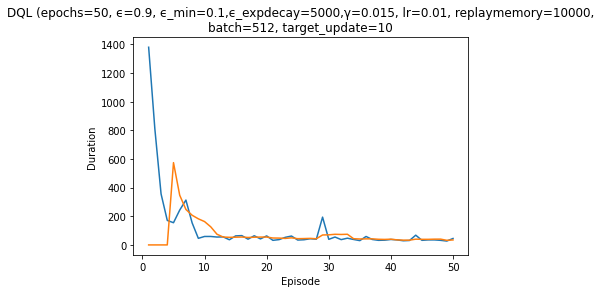

In [7]:
# Run Deep Q-learning
# 0.015
best_dqn_learning_run_10 = learner.epsilon_greedy_search(
    cyberbattle_gym_env=cyberbattlechain_10,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=10,
        batch_size=512,
        learning_rate=0.01),  # torch default is 1e-2
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    # epsilon_multdecay=0.75,  # 0.999,
    epsilon_exponential_decay=5000,  # 10000
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="DQL"
)

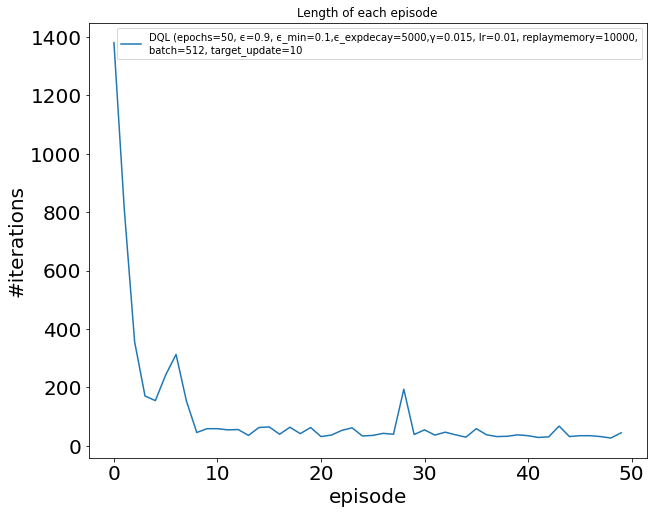

In [8]:

p.plot_episodes_length([best_dqn_learning_run_10])

In [9]:
if not os.path.exists("images"):
    os.mkdir("images")

###### Exploiting DQL
Learning with: episode_count=10,iteration_count=9000,ϵ=0.0,ϵ_min=0.0, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  336.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  436.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  436.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  445.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  545.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  545.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  554.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  554.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  654.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  654.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  663.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  663.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  763.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  763.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  772.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  772.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  872.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  872.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  881.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  881.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  981.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  981.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  990.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  990.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward: 1090.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward: 1090.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward: 1099.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward: 1099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward: 6099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward: 6099.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 1 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 2/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  336.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  436.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  436.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  445.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  545.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  545.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  554.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  554.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  654.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  654.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  663.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  663.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  763.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  763.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  772.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  772.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  872.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  872.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  881.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  881.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  981.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  981.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  990.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  990.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward: 1090.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward: 1090.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward: 1099.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward: 1099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward: 6099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward: 6099.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 2 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 3/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  336.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  436.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  436.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  445.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  545.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  545.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  554.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  554.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  654.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  654.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  663.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  663.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  763.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  763.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  772.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  772.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  872.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  872.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  881.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  881.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  981.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  981.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  990.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  990.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward: 1090.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward: 1090.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward: 1099.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward: 1099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward: 6099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward: 6099.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 3 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 4/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  336.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  436.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  436.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  445.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  545.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  545.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  554.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  554.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  654.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  654.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  663.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  663.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  763.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  763.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  772.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  772.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  872.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  872.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  881.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  881.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  981.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  981.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  990.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  990.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward: 1090.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward: 1090.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward: 1099.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward: 1099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward: 6099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward: 6099.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 4 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 5/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  336.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  436.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  436.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  445.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  545.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  545.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  554.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  554.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  654.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  654.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  663.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  663.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  763.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  763.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  772.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  772.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  872.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  872.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  881.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  881.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  981.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  981.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  990.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  990.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward: 1090.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward: 1090.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward: 1099.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward: 1099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward: 6099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward: 6099.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 5 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 6/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:  336.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  436.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  436.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:  445.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:  545.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:  545.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:  554.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:  554.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  654.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  654.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  663.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  663.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  763.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  763.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:  772.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:  772.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 16|reward:  872.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 16|reward:  872.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 6|Iteration 17|reward:  881.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 6|Iteration 17|reward:  881.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:  981.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:  981.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 19|reward:  990.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 19|reward:  990.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 20|reward: 1090.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 20|reward: 1090.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward: 1099.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward: 1099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 22|reward: 6099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 22|reward: 6099.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 6 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 7/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:  336.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  436.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  436.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  445.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 10|reward:  545.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 10|reward:  545.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  554.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  554.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:  654.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:  654.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:  663.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:  663.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:  763.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:  763.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:  772.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:  772.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:  872.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:  872.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 17|reward:  881.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 17|reward:  881.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 18|reward:  981.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 18|reward:  981.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 19|reward:  990.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 19|reward:  990.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 7|Iteration 20|reward: 1090.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 7|Iteration 20|reward: 1090.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward: 1099.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward: 1099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 22|reward: 6099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 22|reward: 6099.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 7 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 8/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward:  336.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  436.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  436.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:  445.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  545.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  545.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  554.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  554.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:  654.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:  654.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  663.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  663.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:  763.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:  763.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:  772.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:  772.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  872.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  872.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:  881.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:  881.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:  981.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:  981.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:  990.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:  990.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward: 1090.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward: 1090.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward: 1099.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward: 1099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 22|reward: 6099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 22|reward: 6099.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 8 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 9/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:  336.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  436.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  436.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  445.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  545.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  545.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  554.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  554.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  654.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  654.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  663.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  663.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  763.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  763.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:  772.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:  772.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward:  872.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward:  872.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  881.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  881.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward:  981.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward:  981.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:  990.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:  990.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward: 1090.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward: 1090.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward: 1099.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward: 1099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward: 6099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward: 6099.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 9 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 10/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

id      status properties              local_attacks  \
0        start       owned         []  [ScanExplorerRecentFiles]   
1  1_LinuxNode  discovered        NaN                       None   

               remote_attacks  
0                          []  
1  [ProbeWindows, ProbeLinux]

Episode 10|Iteration 2|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:06||

Episode 10|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:06||

Episode 10|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:06||

id status                     properties  \
0        start  owned                             []   
1  1_LinuxNode  owned  [MySql, Ubuntu, nginx/1.10.3]   

                                       local_attacks  \
0                          [ScanExplorerRecentFiles]   
1  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   

               remote_attacks  
0                          []  
1  [ProbeWindows, ProbeLinux]

Episode 10|Iteration 3|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:06||

Episode 10|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:06||

Episode 10|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:06||

id      status                     properties  \
0          start       owned                             []   
1    1_LinuxNode       owned  [MySql, Ubuntu, nginx/1.10.3]   
2  2_WindowsNode  discovered                            NaN   

                                       local_attacks  \
0                          [ScanExplorerRecentFiles]   
1  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
2                                               None   

               remote_attacks  
0                          []  
1  [ProbeWindows, ProbeLinux]  
2  [ProbeWindows, ProbeLinux]

Episode 10|Iteration 4|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:06||

Episode 10|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:06||

Episode 10|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:06||

id status                      properties  \
0          start  owned                              []   
1    1_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   
2  2_WindowsNode  owned  [Windows, Win10, Win10Patched]   

                                       local_attacks  \
0                          [ScanExplorerRecentFiles]   
1  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
2  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   

               remote_attacks  
0                          []  
1  [ProbeWindows, ProbeLinux]  
2  [ProbeWindows, ProbeLinux]

Episode 10|Iteration 5|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 10|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 10|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:06||

id      status                      properties  \
0          start       owned                              []   
1    1_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
2  2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3    3_LinuxNode  discovered                             NaN   

                                       local_attacks  \
0                          [ScanExplorerRecentFiles]   
1  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
2  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
3                                               None   

               remote_attacks  
0                          []  
1  [ProbeWindows, ProbeLinux]  
2  [ProbeWindows, ProbeLinux]  
3  [ProbeWindows, ProbeLinux]

Episode 10|Iteration 6|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:06||

Episode 10|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:06||

Episode 10|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:06||

id status                      properties  \
0          start  owned                              []   
1    1_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   
2  2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3    3_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   

                                       local_attacks  \
0                          [ScanExplorerRecentFiles]   
1  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
2  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
3  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   

               remote_attacks  
0                          []  
1  [ProbeWindows, ProbeLinux]  
2  [ProbeWindows, ProbeLinux]  
3  [ProbeWindows, ProbeLinux]

Episode 10|Iteration 7|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:06||

Episode 10|Iteration 7|reward:  336.0|last_reward_at:    6|Elapsed Time: 0:00:06||

Episode 10|Iteration 7|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:06||

id      status                      properties  \
0          start       owned                              []   
1    1_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
2  2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3    3_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
4  4_WindowsNode  discovered                             NaN   

                                       local_attacks  \
0                          [ScanExplorerRecentFiles]   
1  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
2  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
3  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
4                                               None   

               remote_attacks  
0                          []  
1  [ProbeWindows, ProbeLinux]  
2  [ProbeWindows, ProbeLinux]  
3  [ProbeWindows, ProbeLinux]  
4  [ProbeWindows, ProbeLinux]

Episode 10|Iteration 8|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 10|Iteration 8|reward:  436.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 10|Iteration 8|reward:  436.0|last_reward_at:    8|Elapsed Time: 0:00:07||

id status                      properties  \
0          start  owned                              []   
1    1_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   
2  2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3    3_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   
4  4_WindowsNode  owned  [Windows, Win10, Win10Patched]   

                                       local_attacks  \
0                          [ScanExplorerRecentFiles]   
1  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
2  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
3  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
4  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   

               remote_attacks  
0                          []  
1  [ProbeWindows, ProbeLinux]  
2  [ProbeWindows, ProbeLinux]  
3  [ProbeWindows, ProbeLinux]  
4  [ProbeWindows, ProbeLinux]

Episode 10|Iteration 9|reward:  436.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 10|Iteration 9|reward:  445.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 10|Iteration 9|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:07||

id      status                      properties  \
0          start       owned                              []   
1    1_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
2  2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3    3_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
4  4_WindowsNode       owned  [Windows, Win10, Win10Patched]   
5    5_LinuxNode  discovered                             NaN   

                                       local_attacks  \
0                          [ScanExplorerRecentFiles]   
1  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
2  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
3  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
4  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
5                                               None   

               remote_attacks  
0                          []  
1  [ProbeWindows, ProbeLinux]  
2  [ProbeWindows, ProbeLinux]  
3  [ProbeWindows, ProbeLinux]  
4  [ProbeWindows, ProbeLinux]  
5  [ProbeWindows, ProbeLinux]

Episode 10|Iteration 10|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:07||

Episode 10|Iteration 10|reward:  545.0|last_reward_at:    9|Elapsed Time: 0:00:07||

Episode 10|Iteration 10|reward:  545.0|last_reward_at:   10|Elapsed Time: 0:00:07||

id status                      properties  \
0          start  owned                              []   
1    1_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   
2  2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3    3_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   
4  4_WindowsNode  owned  [Windows, Win10, Win10Patched]   
5    5_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   

                                       local_attacks  \
0                          [ScanExplorerRecentFiles]   
1  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
2  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
3  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
4  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
5  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   

               remote_attacks  
0                          []  
1  [ProbeWindows, ProbeLinux]  
2  [ProbeWindows, ProbeLinux]  
3  [ProbeWindows, ProbeLinux]  
4  [ProbeWindows, ProbeLinux]  
5  [ProbeWindows, ProbeLinux]

Episode 10|Iteration 11|reward:  545.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 10|Iteration 11|reward:  554.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 10|Iteration 11|reward:  554.0|last_reward_at:   11|Elapsed Time: 0:00:07||

id      status                      properties  \
0          start       owned                              []   
1    1_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
2  2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3    3_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
4  4_WindowsNode       owned  [Windows, Win10, Win10Patched]   
5    5_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
6  6_WindowsNode  discovered                             NaN   

                                       local_attacks  \
0                          [ScanExplorerRecentFiles]   
1  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
2  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
3  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
4  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
5  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
6                                               None   

               remote_attacks  
0                          []  
1  [ProbeWindows, ProbeLinux]  
2  [ProbeWindows, ProbeLinux]  
3  [ProbeWindows, ProbeLinux]  
4  [ProbeWindows, ProbeLinux]  
5  [ProbeWindows, ProbeLinux]  
6  [ProbeWindows, ProbeLinux]

Episode 10|Iteration 12|reward:  554.0|last_reward_at:   11|Elapsed Time: 0:00:07||

Episode 10|Iteration 12|reward:  654.0|last_reward_at:   11|Elapsed Time: 0:00:07||

Episode 10|Iteration 12|reward:  654.0|last_reward_at:   12|Elapsed Time: 0:00:07||

id status                      properties  \
0          start  owned                              []   
1    1_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   
2  2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3    3_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   
4  4_WindowsNode  owned  [Windows, Win10, Win10Patched]   
5    5_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   
6  6_WindowsNode  owned  [Windows, Win10, Win10Patched]   

                                       local_attacks  \
0                          [ScanExplorerRecentFiles]   
1  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
2  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
3  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
4  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
5  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
6  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   

               remote_attacks  
0                          []  
1  [ProbeWindows, ProbeLinux]  
2  [ProbeWindows, ProbeLinux]  
3  [ProbeWindows, ProbeLinux]  
4  [ProbeWindows, ProbeLinux]  
5  [ProbeWindows, ProbeLinux]  
6  [ProbeWindows, ProbeLinux]

Episode 10|Iteration 13|reward:  654.0|last_reward_at:   12|Elapsed Time: 0:00:08||

Episode 10|Iteration 13|reward:  663.0|last_reward_at:   12|Elapsed Time: 0:00:08||

Episode 10|Iteration 13|reward:  663.0|last_reward_at:   13|Elapsed Time: 0:00:08||

id      status                      properties  \
0          start       owned                              []   
1    1_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
2  2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3    3_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
4  4_WindowsNode       owned  [Windows, Win10, Win10Patched]   
5    5_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
6  6_WindowsNode       owned  [Windows, Win10, Win10Patched]   
7    7_LinuxNode  discovered                             NaN   

                                       local_attacks  \
0                          [ScanExplorerRecentFiles]   
1  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
2  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
3  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
4  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
5  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
6  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
7                                               None   

               remote_attacks  
0                          []  
1  [ProbeWindows, ProbeLinux]  
2  [ProbeWindows, ProbeLinux]  
3  [ProbeWindows, ProbeLinux]  
4  [ProbeWindows, ProbeLinux]  
5  [ProbeWindows, ProbeLinux]  
6  [ProbeWindows, ProbeLinux]  
7  [ProbeWindows, ProbeLinux]

Episode 10|Iteration 14|reward:  663.0|last_reward_at:   13|Elapsed Time: 0:00:08||

Episode 10|Iteration 14|reward:  763.0|last_reward_at:   13|Elapsed Time: 0:00:08||

Episode 10|Iteration 14|reward:  763.0|last_reward_at:   14|Elapsed Time: 0:00:08||

id status                      properties  \
0          start  owned                              []   
1    1_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   
2  2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3    3_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   
4  4_WindowsNode  owned  [Windows, Win10, Win10Patched]   
5    5_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   
6  6_WindowsNode  owned  [Windows, Win10, Win10Patched]   
7    7_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   

                                       local_attacks  \
0                          [ScanExplorerRecentFiles]   
1  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
2  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
3  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
4  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
5  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
6  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
7  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   

               remote_attacks  
0                          []  
1  [ProbeWindows, ProbeLinux]  
2  [ProbeWindows, ProbeLinux]  
3  [ProbeWindows, ProbeLinux]  
4  [ProbeWindows, ProbeLinux]  
5  [ProbeWindows, ProbeLinux]  
6  [ProbeWindows, ProbeLinux]  
7  [ProbeWindows, ProbeLinux]

Episode 10|Iteration 15|reward:  763.0|last_reward_at:   14|Elapsed Time: 0:00:08||

Episode 10|Iteration 15|reward:  772.0|last_reward_at:   14|Elapsed Time: 0:00:08||

Episode 10|Iteration 15|reward:  772.0|last_reward_at:   15|Elapsed Time: 0:00:08||

id      status                      properties  \
0          start       owned                              []   
1    1_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
2  2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3    3_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
4  4_WindowsNode       owned  [Windows, Win10, Win10Patched]   
5    5_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
6  6_WindowsNode       owned  [Windows, Win10, Win10Patched]   
7    7_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
8  8_WindowsNode  discovered                             NaN   

                                       local_attacks  \
0                          [ScanExplorerRecentFiles]   
1  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
2  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
3  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
4  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
5  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
6  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
7  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
8                                               None   

               remote_attacks  
0                          []  
1  [ProbeWindows, ProbeLinux]  
2  [ProbeWindows, ProbeLinux]  
3  [ProbeWindows, ProbeLinux]  
4  [ProbeWindows, ProbeLinux]  
5  [ProbeWindows, ProbeLinux]  
6  [ProbeWindows, ProbeLinux]  
7  [ProbeWindows, ProbeLinux]  
8  [ProbeWindows, ProbeLinux]

Episode 10|Iteration 16|reward:  772.0|last_reward_at:   15|Elapsed Time: 0:00:08||

Episode 10|Iteration 16|reward:  872.0|last_reward_at:   15|Elapsed Time: 0:00:08||

Episode 10|Iteration 16|reward:  872.0|last_reward_at:   16|Elapsed Time: 0:00:08||

id status                      properties  \
0          start  owned                              []   
1    1_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   
2  2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3    3_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   
4  4_WindowsNode  owned  [Windows, Win10, Win10Patched]   
5    5_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   
6  6_WindowsNode  owned  [Windows, Win10, Win10Patched]   
7    7_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   
8  8_WindowsNode  owned  [Windows, Win10, Win10Patched]   

                                       local_attacks  \
0                          [ScanExplorerRecentFiles]   
1  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
2  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
3  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
4  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
5  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
6  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
7  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
8  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   

               remote_attacks  
0                          []  
1  [ProbeWindows, ProbeLinux]  
2  [ProbeWindows, ProbeLinux]  
3  [ProbeWindows, ProbeLinux]  
4  [ProbeWindows, ProbeLinux]  
5  [ProbeWindows, ProbeLinux]  
6  [ProbeWindows, ProbeLinux]  
7  [ProbeWindows, ProbeLinux]  
8  [ProbeWindows, ProbeLinux]

Episode 10|Iteration 17|reward:  872.0|last_reward_at:   16|Elapsed Time: 0:00:08||

Episode 10|Iteration 17|reward:  881.0|last_reward_at:   16|Elapsed Time: 0:00:08||

Episode 10|Iteration 17|reward:  881.0|last_reward_at:   17|Elapsed Time: 0:00:08||

id      status                      properties  \
0          start       owned                              []   
1    1_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
2  2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3    3_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
4  4_WindowsNode       owned  [Windows, Win10, Win10Patched]   
5    5_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
6  6_WindowsNode       owned  [Windows, Win10, Win10Patched]   
7    7_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
8  8_WindowsNode       owned  [Windows, Win10, Win10Patched]   
9    9_LinuxNode  discovered                             NaN   

                                       local_attacks  \
0                          [ScanExplorerRecentFiles]   
1  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
2  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
3  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
4  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
5  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
6  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
7  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
8  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
9                                               None   

               remote_attacks  
0                          []  
1  [ProbeWindows, ProbeLinux]  
2  [ProbeWindows, ProbeLinux]  
3  [ProbeWindows, ProbeLinux]  
4  [ProbeWindows, ProbeLinux]  
5  [ProbeWindows, ProbeLinux]  
6  [ProbeWindows, ProbeLinux]  
7  [ProbeWindows, ProbeLinux]  
8  [ProbeWindows, ProbeLinux]  
9  [ProbeWindows, ProbeLinux]

Episode 10|Iteration 18|reward:  881.0|last_reward_at:   17|Elapsed Time: 0:00:09||

Episode 10|Iteration 18|reward:  981.0|last_reward_at:   17|Elapsed Time: 0:00:09||

Episode 10|Iteration 18|reward:  981.0|last_reward_at:   18|Elapsed Time: 0:00:09||

id status                      properties  \
0          start  owned                              []   
1    1_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   
2  2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3    3_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   
4  4_WindowsNode  owned  [Windows, Win10, Win10Patched]   
5    5_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   
6  6_WindowsNode  owned  [Windows, Win10, Win10Patched]   
7    7_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   
8  8_WindowsNode  owned  [Windows, Win10, Win10Patched]   
9    9_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   

                                       local_attacks  \
0                          [ScanExplorerRecentFiles]   
1  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
2  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
3  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
4  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
5  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
6  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
7  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
8  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
9  [ScanBashHistory, CrackKeepPassX, ScanExplorer...   

               remote_attacks  
0                          []  
1  [ProbeWindows, ProbeLinux]  
2  [ProbeWindows, ProbeLinux]  
3  [ProbeWindows, ProbeLinux]  
4  [ProbeWindows, ProbeLinux]  
5  [ProbeWindows, ProbeLinux]  
6  [ProbeWindows, ProbeLinux]  
7  [ProbeWindows, ProbeLinux]  
8  [ProbeWindows, ProbeLinux]  
9  [ProbeWindows, ProbeLinux]

Episode 10|Iteration 19|reward:  981.0|last_reward_at:   18|Elapsed Time: 0:00:09||

Episode 10|Iteration 19|reward:  990.0|last_reward_at:   18|Elapsed Time: 0:00:09||

Episode 10|Iteration 19|reward:  990.0|last_reward_at:   19|Elapsed Time: 0:00:09||

id      status                      properties  \
0            start       owned                              []   
1      1_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
2    2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3      3_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
4    4_WindowsNode       owned  [Windows, Win10, Win10Patched]   
5      5_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
6    6_WindowsNode       owned  [Windows, Win10, Win10Patched]   
7      7_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
8    8_WindowsNode       owned  [Windows, Win10, Win10Patched]   
9      9_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
10  10_WindowsNode  discovered                             NaN   

                                        local_attacks  \
0                           [ScanExplorerRecentFiles]   
1   [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
2   [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
3   [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
4   [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
5   [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
6   [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
7   [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
8   [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
9   [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
10                                               None   

                remote_attacks  
0                           []  
1   [ProbeWindows, ProbeLinux]  
2   [ProbeWindows, ProbeLinux]  
3   [ProbeWindows, ProbeLinux]  
4   [ProbeWindows, ProbeLinux]  
5   [ProbeWindows, ProbeLinux]  
6   [ProbeWindows, ProbeLinux]  
7   [ProbeWindows, ProbeLinux]  
8   [ProbeWindows, ProbeLinux]  
9   [ProbeWindows, ProbeLinux]  
10  [ProbeWindows, ProbeLinux]

Episode 10|Iteration 20|reward:  990.0|last_reward_at:   19|Elapsed Time: 0:00:09||

Episode 10|Iteration 20|reward: 1090.0|last_reward_at:   19|Elapsed Time: 0:00:09||

Episode 10|Iteration 20|reward: 1090.0|last_reward_at:   20|Elapsed Time: 0:00:09||

id status                      properties  \
0            start  owned                              []   
1      1_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   
2    2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3      3_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   
4    4_WindowsNode  owned  [Windows, Win10, Win10Patched]   
5      5_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   
6    6_WindowsNode  owned  [Windows, Win10, Win10Patched]   
7      7_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   
8    8_WindowsNode  owned  [Windows, Win10, Win10Patched]   
9      9_LinuxNode  owned   [MySql, Ubuntu, nginx/1.10.3]   
10  10_WindowsNode  owned  [Windows, Win10, Win10Patched]   

                                        local_attacks  \
0                           [ScanExplorerRecentFiles]   
1   [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
2   [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
3   [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
4   [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
5   [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
6   [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
7   [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
8   [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
9   [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
10  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   

                remote_attacks  
0                           []  
1   [ProbeWindows, ProbeLinux]  
2   [ProbeWindows, ProbeLinux]  
3   [ProbeWindows, ProbeLinux]  
4   [ProbeWindows, ProbeLinux]  
5   [ProbeWindows, ProbeLinux]  
6   [ProbeWindows, ProbeLinux]  
7   [ProbeWindows, ProbeLinux]  
8   [ProbeWindows, ProbeLinux]  
9   [ProbeWindows, ProbeLinux]  
10  [ProbeWindows, ProbeLinux]

Episode 10|Iteration 21|reward: 1090.0|last_reward_at:   20|Elapsed Time: 0:00:09||

Episode 10|Iteration 21|reward: 1099.0|last_reward_at:   20|Elapsed Time: 0:00:09||

Episode 10|Iteration 21|reward: 1099.0|last_reward_at:   21|Elapsed Time: 0:00:09||

id      status                      properties  \
0            start       owned                              []   
1      1_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
2    2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3      3_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
4    4_WindowsNode       owned  [Windows, Win10, Win10Patched]   
5      5_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
6    6_WindowsNode       owned  [Windows, Win10, Win10Patched]   
7      7_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
8    8_WindowsNode       owned  [Windows, Win10, Win10Patched]   
9      9_LinuxNode       owned   [MySql, Ubuntu, nginx/1.10.3]   
10  10_WindowsNode       owned  [Windows, Win10, Win10Patched]   
11    11_LinuxNode  discovered                             NaN   

                                        local_attacks  \
0                           [ScanExplorerRecentFiles]   
1   [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
2   [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
3   [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
4   [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
5   [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
6   [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
7   [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
8   [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
9   [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
10  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
11                                               None   

                remote_attacks  
0                           []  
1   [ProbeWindows, ProbeLinux]  
2   [ProbeWindows, ProbeLinux]  
3   [ProbeWindows, ProbeLinux]  
4   [ProbeWindows, ProbeLinux]  
5   [ProbeWindows, ProbeLinux]  
6   [ProbeWindows, ProbeLinux]  
7   [ProbeWindows, ProbeLinux]  
8   [ProbeWindows, ProbeLinux]  
9   [ProbeWindows, ProbeLinux]  
10  [ProbeWindows, ProbeLinux]  
11                          []

Episode 10|Iteration 22|reward: 1099.0|last_reward_at:   21|Elapsed Time: 0:00:10||

Episode 10|Iteration 22|reward: 6099.0|last_reward_at:   21|Elapsed Time: 0:00:10||

Episode 10|Iteration 22|reward: 6099.0|last_reward_at:   22|Elapsed Time: 0:00:10||

id status                                 properties  \
0            start  owned                                         []   
1      1_LinuxNode  owned              [MySql, Ubuntu, nginx/1.10.3]   
2    2_WindowsNode  owned             [Windows, Win10, Win10Patched]   
3      3_LinuxNode  owned              [MySql, Ubuntu, nginx/1.10.3]   
4    4_WindowsNode  owned             [Windows, Win10, Win10Patched]   
5      5_LinuxNode  owned              [MySql, Ubuntu, nginx/1.10.3]   
6    6_WindowsNode  owned             [Windows, Win10, Win10Patched]   
7      7_LinuxNode  owned              [MySql, Ubuntu, nginx/1.10.3]   
8    8_WindowsNode  owned             [Windows, Win10, Win10Patched]   
9      9_LinuxNode  owned              [MySql, Ubuntu, nginx/1.10.3]   
10  10_WindowsNode  owned             [Windows, Win10, Win10Patched]   
11    11_LinuxNode  owned  [MySql, Ubuntu, nginx/1.10.3, FLAG:Linux]   

                                        local_attacks  \
0                           [ScanExplorerRecentFiles]   
1   [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
2   [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
3   [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
4   [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
5   [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
6   [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
7   [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
8   [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
9   [ScanBashHistory, CrackKeepPassX, ScanExplorer...   
10  [ScanBashHistory, ScanExplorerRecentFiles, Cra...   
11                                                 []   

                remote_attacks  
0                           []  
1   [ProbeWindows, ProbeLinux]  
2   [ProbeWindows, ProbeLinux]  
3   [ProbeWindows, ProbeLinux]  
4   [ProbeWindows, ProbeLinux]  
5   [ProbeWindows, ProbeLinux]  
6   [ProbeWindows, ProbeLinux]  
7   [ProbeWindows, ProbeLinux]  
8   [ProbeWindows, ProbeLinux]  
9   [ProbeWindows, ProbeLinux]  
10  [ProbeWindows, ProbeLinux]  
11                          []

  Episode 10 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
simulation ended


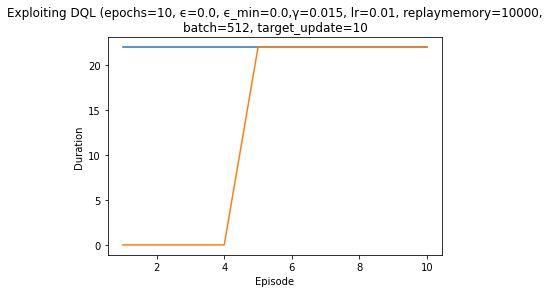

In [10]:
dql_exploit_run = learner.epsilon_greedy_search(
    cyberbattlechain_10,
    ep,
    learner=best_dqn_learning_run_10['learner'],
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,  # 0.35,
    render=False,
    render_last_episode_rewards_to='images/chain10',
    title="Exploiting DQL",
    verbosity=Verbosity.Quiet
)

###### Random search
Learning with: episode_count=10,iteration_count=9000,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/10 'Random search' ϵ=1.0000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:   15.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:   15.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  115.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  115.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  124.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  124.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 33|reward:  130.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 33|reward:  130.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:  136.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:  136.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward:  144.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward:  144.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 103|reward:  144.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 173|reward:  144.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 196|reward:  244.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 196|reward:  244.0|last_reward_at:  196|Elapsed Time: 0:00:00||

Episode 1|Iteration 211|reward:  253.0|last_reward_at:  196|Elapsed Time: 0:00:00||

Episode 1|Iteration 211|reward:  253.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 1|Iteration 215|reward:  257.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 1|Iteration 215|reward:  257.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 1|Iteration 247|reward:  259.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 1|Iteration 247|reward:  259.0|last_reward_at:  247|Elapsed Time: 0:00:00||

Episode 1|Iteration 266|reward:  265.0|last_reward_at:  247|Elapsed Time: 0:00:00||

Episode 1|Iteration 266|reward:  265.0|last_reward_at:  266|Elapsed Time: 0:00:00||

Episode 1|Iteration 321|reward:  265.0|last_reward_at:  266|Elapsed Time: 0:00:00||

Episode 1|Iteration 373|reward:  265.0|last_reward_at:  266|Elapsed Time: 0:00:00||

Episode 1|Iteration 434|reward:  265.0|last_reward_at:  266|Elapsed Time: 0:00:00||

Episode 1|Iteration 496|reward:  265.0|last_reward_at:  266|Elapsed Time: 0:00:00||

Episode 1|Iteration 528|reward:  365.0|last_reward_at:  266|Elapsed Time: 0:00:00||

Episode 1|Iteration 528|reward:  365.0|last_reward_at:  528|Elapsed Time: 0:00:00||

Episode 1|Iteration 563|reward:  371.0|last_reward_at:  528|Elapsed Time: 0:00:00||

Episode 1|Iteration 563|reward:  371.0|last_reward_at:  563|Elapsed Time: 0:00:00||

Episode 1|Iteration 579|reward:  379.0|last_reward_at:  563|Elapsed Time: 0:00:00||

Episode 1|Iteration 579|reward:  379.0|last_reward_at:  579|Elapsed Time: 0:00:00||

Episode 1|Iteration 595|reward:  388.0|last_reward_at:  579|Elapsed Time: 0:00:01||

Episode 1|Iteration 595|reward:  388.0|last_reward_at:  595|Elapsed Time: 0:00:01||

Episode 1|Iteration 596|reward:  394.0|last_reward_at:  595|Elapsed Time: 0:00:01||

Episode 1|Iteration 596|reward:  394.0|last_reward_at:  596|Elapsed Time: 0:00:01||

Episode 1|Iteration 652|reward:  394.0|last_reward_at:  596|Elapsed Time: 0:00:01||

Episode 1|Iteration 662|reward:  494.0|last_reward_at:  596|Elapsed Time: 0:00:01||

Episode 1|Iteration 662|reward:  494.0|last_reward_at:  662|Elapsed Time: 0:00:01||

Episode 1|Iteration 697|reward:  503.0|last_reward_at:  662|Elapsed Time: 0:00:01||

Episode 1|Iteration 697|reward:  503.0|last_reward_at:  697|Elapsed Time: 0:00:01||

Episode 1|Iteration 722|reward:  505.0|last_reward_at:  697|Elapsed Time: 0:00:01||

Episode 1|Iteration 722|reward:  505.0|last_reward_at:  722|Elapsed Time: 0:00:01||

Episode 1|Iteration 755|reward:  509.0|last_reward_at:  722|Elapsed Time: 0:00:01||

Episode 1|Iteration 755|reward:  509.0|last_reward_at:  755|Elapsed Time: 0:00:01||

Episode 1|Iteration 798|reward:  509.0|last_reward_at:  755|Elapsed Time: 0:00:01||

Episode 1|Iteration 844|reward:  515.0|last_reward_at:  755|Elapsed Time: 0:00:01||

Episode 1|Iteration 844|reward:  515.0|last_reward_at:  844|Elapsed Time: 0:00:01||

Episode 1|Iteration 885|reward:  515.0|last_reward_at:  844|Elapsed Time: 0:00:01||

Episode 1|Iteration 912|reward:  515.0|last_reward_at:  844|Elapsed Time: 0:00:01||

Episode 1|Iteration 959|reward:  515.0|last_reward_at:  844|Elapsed Time: 0:00:01||

Episode 1|Iteration 1006|reward:  515.0|last_reward_at:  844|Elapsed Time: 0:00:01||

Episode 1|Iteration 1053|reward:  515.0|last_reward_at:  844|Elapsed Time: 0:00:01||

Episode 1|Iteration 1101|reward:  515.0|last_reward_at:  844|Elapsed Time: 0:00:02||

Episode 1|Iteration 1140|reward:  515.0|last_reward_at:  844|Elapsed Time: 0:00:02||

Episode 1|Iteration 1184|reward:  515.0|last_reward_at:  844|Elapsed Time: 0:00:02||

Episode 1|Iteration 1234|reward:  515.0|last_reward_at:  844|Elapsed Time: 0:00:02||

Episode 1|Iteration 1284|reward:  515.0|last_reward_at:  844|Elapsed Time: 0:00:02||

Episode 1|Iteration 1333|reward:  515.0|last_reward_at:  844|Elapsed Time: 0:00:02||

Episode 1|Iteration 1368|reward:  515.0|last_reward_at:  844|Elapsed Time: 0:00:02||

Episode 1|Iteration 1414|reward:  515.0|last_reward_at:  844|Elapsed Time: 0:00:02||

Episode 1|Iteration 1463|reward:  515.0|last_reward_at:  844|Elapsed Time: 0:00:02||

Episode 1|Iteration 1505|reward:  515.0|last_reward_at:  844|Elapsed Time: 0:00:02||

Episode 1|Iteration 1551|reward:  515.0|last_reward_at:  844|Elapsed Time: 0:00:03||

Episode 1|Iteration 1595|reward:  515.0|last_reward_at:  844|Elapsed Time: 0:00:03||

Episode 1|Iteration 1641|reward:  515.0|last_reward_at:  844|Elapsed Time: 0:00:03||

Episode 1|Iteration 1686|reward:  515.0|last_reward_at:  844|Elapsed Time: 0:00:03||

Episode 1|Iteration 1733|reward:  515.0|last_reward_at:  844|Elapsed Time: 0:00:03||

Episode 1|Iteration 1744|reward:  615.0|last_reward_at:  844|Elapsed Time: 0:00:03||

Episode 1|Iteration 1744|reward:  615.0|last_reward_at: 1744|Elapsed Time: 0:00:03||

Episode 1|Iteration 1793|reward:  615.0|last_reward_at: 1744|Elapsed Time: 0:00:03||

Episode 1|Iteration 1823|reward:  615.0|last_reward_at: 1744|Elapsed Time: 0:00:03||

Episode 1|Iteration 1848|reward:  624.0|last_reward_at: 1744|Elapsed Time: 0:00:03||

Episode 1|Iteration 1848|reward:  624.0|last_reward_at: 1848|Elapsed Time: 0:00:03||

Episode 1|Iteration 1850|reward:  630.0|last_reward_at: 1848|Elapsed Time: 0:00:03||

Episode 1|Iteration 1850|reward:  630.0|last_reward_at: 1850|Elapsed Time: 0:00:03||

Episode 1|Iteration 1857|reward:  636.0|last_reward_at: 1850|Elapsed Time: 0:00:03||

Episode 1|Iteration 1857|reward:  636.0|last_reward_at: 1857|Elapsed Time: 0:00:03||

Episode 1|Iteration 1869|reward:  644.0|last_reward_at: 1857|Elapsed Time: 0:00:03||

Episode 1|Iteration 1869|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:03||

Episode 1|Iteration 1914|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:03||

Episode 1|Iteration 1960|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:03||

Episode 1|Iteration 2003|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:04||

Episode 1|Iteration 2048|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:04||

Episode 1|Iteration 2093|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:04||

Episode 1|Iteration 2137|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:04||

Episode 1|Iteration 2165|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:04||

Episode 1|Iteration 2208|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:04||

Episode 1|Iteration 2252|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:04||

Episode 1|Iteration 2279|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:04||

Episode 1|Iteration 2322|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:04||

Episode 1|Iteration 2365|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:04||

Episode 1|Iteration 2393|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:04||

Episode 1|Iteration 2434|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:05||

Episode 1|Iteration 2478|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:05||

Episode 1|Iteration 2507|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:05||

Episode 1|Iteration 2550|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:05||

Episode 1|Iteration 2594|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:05||

Episode 1|Iteration 2621|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:05||

Episode 1|Iteration 2665|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:05||

Episode 1|Iteration 2708|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:05||

Episode 1|Iteration 2735|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:05||

Episode 1|Iteration 2778|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:05||

Episode 1|Iteration 2823|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:05||

Episode 1|Iteration 2849|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:06||

Episode 1|Iteration 2890|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:06||

Episode 1|Iteration 2935|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:06||

Episode 1|Iteration 2963|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:06||

Episode 1|Iteration 3007|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:06||

Episode 1|Iteration 3052|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:06||

Episode 1|Iteration 3076|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:06||

Episode 1|Iteration 3119|reward:  644.0|last_reward_at: 1869|Elapsed Time: 0:00:06||

Episode 1|Iteration 3121|reward:  744.0|last_reward_at: 1869|Elapsed Time: 0:00:06||

Episode 1|Iteration 3121|reward:  744.0|last_reward_at: 3121|Elapsed Time: 0:00:06||

Episode 1|Iteration 3153|reward:  744.0|last_reward_at: 3121|Elapsed Time: 0:00:06||

Episode 1|Iteration 3155|reward:  753.0|last_reward_at: 3121|Elapsed Time: 0:00:06||

Episode 1|Iteration 3155|reward:  753.0|last_reward_at: 3155|Elapsed Time: 0:00:06||

Episode 1|Iteration 3158|reward:  755.0|last_reward_at: 3155|Elapsed Time: 0:00:06||

Episode 1|Iteration 3158|reward:  755.0|last_reward_at: 3158|Elapsed Time: 0:00:06||

Episode 1|Iteration 3190|reward:  755.0|last_reward_at: 3158|Elapsed Time: 0:00:06||

Episode 1|Iteration 3205|reward:  759.0|last_reward_at: 3158|Elapsed Time: 0:00:06||

Episode 1|Iteration 3205|reward:  759.0|last_reward_at: 3205|Elapsed Time: 0:00:06||

Episode 1|Iteration 3207|reward:  765.0|last_reward_at: 3205|Elapsed Time: 0:00:06||

Episode 1|Iteration 3207|reward:  765.0|last_reward_at: 3207|Elapsed Time: 0:00:06||

Episode 1|Iteration 3249|reward:  765.0|last_reward_at: 3207|Elapsed Time: 0:00:06||

Episode 1|Iteration 3289|reward:  765.0|last_reward_at: 3207|Elapsed Time: 0:00:07||

Episode 1|Iteration 3329|reward:  765.0|last_reward_at: 3207|Elapsed Time: 0:00:07||

Episode 1|Iteration 3368|reward:  765.0|last_reward_at: 3207|Elapsed Time: 0:00:07||

Episode 1|Iteration 3409|reward:  765.0|last_reward_at: 3207|Elapsed Time: 0:00:07||

Episode 1|Iteration 3450|reward:  765.0|last_reward_at: 3207|Elapsed Time: 0:00:07||

Episode 1|Iteration 3491|reward:  765.0|last_reward_at: 3207|Elapsed Time: 0:00:07||

Episode 1|Iteration 3531|reward:  765.0|last_reward_at: 3207|Elapsed Time: 0:00:07||

Episode 1|Iteration 3571|reward:  765.0|last_reward_at: 3207|Elapsed Time: 0:00:07||

Episode 1|Iteration 3610|reward:  765.0|last_reward_at: 3207|Elapsed Time: 0:00:07||

Episode 1|Iteration 3646|reward:  765.0|last_reward_at: 3207|Elapsed Time: 0:00:07||

Episode 1|Iteration 3686|reward:  765.0|last_reward_at: 3207|Elapsed Time: 0:00:08||

Episode 1|Iteration 3726|reward:  765.0|last_reward_at: 3207|Elapsed Time: 0:00:08||

Episode 1|Iteration 3760|reward:  765.0|last_reward_at: 3207|Elapsed Time: 0:00:08||

Episode 1|Iteration 3799|reward:  765.0|last_reward_at: 3207|Elapsed Time: 0:00:08||

Episode 1|Iteration 3839|reward:  765.0|last_reward_at: 3207|Elapsed Time: 0:00:08||

Episode 1|Iteration 3874|reward:  765.0|last_reward_at: 3207|Elapsed Time: 0:00:08||

Episode 1|Iteration 3913|reward:  765.0|last_reward_at: 3207|Elapsed Time: 0:00:08||

Episode 1|Iteration 3940|reward:  765.0|last_reward_at: 3207|Elapsed Time: 0:00:08||

Episode 1|Iteration 3980|reward:  765.0|last_reward_at: 3207|Elapsed Time: 0:00:08||

Episode 1|Iteration 4018|reward:  765.0|last_reward_at: 3207|Elapsed Time: 0:00:08||

Episode 1|Iteration 4057|reward:  765.0|last_reward_at: 3207|Elapsed Time: 0:00:09||

Episode 1|Iteration 4096|reward:  765.0|last_reward_at: 3207|Elapsed Time: 0:00:09||

Episode 1|Iteration 4136|reward:  765.0|last_reward_at: 3207|Elapsed Time: 0:00:09||

Episode 1|Iteration 4156|reward:  865.0|last_reward_at: 3207|Elapsed Time: 0:00:09||

Episode 1|Iteration 4156|reward:  865.0|last_reward_at: 4156|Elapsed Time: 0:00:09||

Episode 1|Iteration 4189|reward:  874.0|last_reward_at: 4156|Elapsed Time: 0:00:09||

Episode 1|Iteration 4189|reward:  874.0|last_reward_at: 4189|Elapsed Time: 0:00:09||

Episode 1|Iteration 4209|reward:  882.0|last_reward_at: 4189|Elapsed Time: 0:00:09||

Episode 1|Iteration 4209|reward:  882.0|last_reward_at: 4209|Elapsed Time: 0:00:09||

Episode 1|Iteration 4235|reward:  888.0|last_reward_at: 4209|Elapsed Time: 0:00:09||

Episode 1|Iteration 4235|reward:  888.0|last_reward_at: 4235|Elapsed Time: 0:00:09||

Episode 1|Iteration 4272|reward:  888.0|last_reward_at: 4235|Elapsed Time: 0:00:09||

Episode 1|Iteration 4276|reward:  988.0|last_reward_at: 4235|Elapsed Time: 0:00:09||

Episode 1|Iteration 4276|reward:  988.0|last_reward_at: 4276|Elapsed Time: 0:00:09||

Episode 1|Iteration 4313|reward:  988.0|last_reward_at: 4276|Elapsed Time: 0:00:09||

Episode 1|Iteration 4346|reward:  988.0|last_reward_at: 4276|Elapsed Time: 0:00:09||

Episode 1|Iteration 4352|reward:  994.0|last_reward_at: 4276|Elapsed Time: 0:00:09||

Episode 1|Iteration 4352|reward:  994.0|last_reward_at: 4352|Elapsed Time: 0:00:09||

Episode 1|Iteration 4369|reward:  998.0|last_reward_at: 4352|Elapsed Time: 0:00:09||

Episode 1|Iteration 4369|reward:  998.0|last_reward_at: 4369|Elapsed Time: 0:00:09||

Episode 1|Iteration 4404|reward:  998.0|last_reward_at: 4369|Elapsed Time: 0:00:10||

Episode 1|Iteration 4438|reward:  998.0|last_reward_at: 4369|Elapsed Time: 0:00:10||

Episode 1|Iteration 4447|reward: 1000.0|last_reward_at: 4369|Elapsed Time: 0:00:10||

Episode 1|Iteration 4447|reward: 1000.0|last_reward_at: 4447|Elapsed Time: 0:00:10||

Episode 1|Iteration 4456|reward: 1009.0|last_reward_at: 4447|Elapsed Time: 0:00:10||

Episode 1|Iteration 4456|reward: 1009.0|last_reward_at: 4456|Elapsed Time: 0:00:10||

Episode 1|Iteration 4490|reward: 1009.0|last_reward_at: 4456|Elapsed Time: 0:00:10||

Episode 1|Iteration 4523|reward: 1009.0|last_reward_at: 4456|Elapsed Time: 0:00:10||

Episode 1|Iteration 4526|reward: 1015.0|last_reward_at: 4456|Elapsed Time: 0:00:10||

Episode 1|Iteration 4526|reward: 1015.0|last_reward_at: 4526|Elapsed Time: 0:00:10||

Episode 1|Iteration 4557|reward: 1015.0|last_reward_at: 4526|Elapsed Time: 0:00:10||

Episode 1|Iteration 4589|reward: 1015.0|last_reward_at: 4526|Elapsed Time: 0:00:10||

Episode 1|Iteration 4620|reward: 1015.0|last_reward_at: 4526|Elapsed Time: 0:00:10||

Episode 1|Iteration 4653|reward: 1015.0|last_reward_at: 4526|Elapsed Time: 0:00:10||

Episode 1|Iteration 4671|reward: 1015.0|last_reward_at: 4526|Elapsed Time: 0:00:10||

Episode 1|Iteration 4704|reward: 1015.0|last_reward_at: 4526|Elapsed Time: 0:00:10||

Episode 1|Iteration 4738|reward: 1015.0|last_reward_at: 4526|Elapsed Time: 0:00:11||

Episode 1|Iteration 4771|reward: 1015.0|last_reward_at: 4526|Elapsed Time: 0:00:11||

Episode 1|Iteration 4803|reward: 1015.0|last_reward_at: 4526|Elapsed Time: 0:00:11||

Episode 1|Iteration 4836|reward: 1015.0|last_reward_at: 4526|Elapsed Time: 0:00:11||

Episode 1|Iteration 4868|reward: 1015.0|last_reward_at: 4526|Elapsed Time: 0:00:11||

Episode 1|Iteration 4899|reward: 1015.0|last_reward_at: 4526|Elapsed Time: 0:00:11||

Episode 1|Iteration 4931|reward: 1015.0|last_reward_at: 4526|Elapsed Time: 0:00:11||

Episode 1|Iteration 4965|reward: 1015.0|last_reward_at: 4526|Elapsed Time: 0:00:11||

Episode 1|Iteration 4997|reward: 1015.0|last_reward_at: 4526|Elapsed Time: 0:00:11||

Episode 1|Iteration 5030|reward: 1015.0|last_reward_at: 4526|Elapsed Time: 0:00:11||

Episode 1|Iteration 5063|reward: 1015.0|last_reward_at: 4526|Elapsed Time: 0:00:12||

Episode 1|Iteration 5096|reward: 1015.0|last_reward_at: 4526|Elapsed Time: 0:00:12||

Episode 1|Iteration 5127|reward: 1015.0|last_reward_at: 4526|Elapsed Time: 0:00:12||

Episode 1|Iteration 5158|reward: 1015.0|last_reward_at: 4526|Elapsed Time: 0:00:12||

Episode 1|Iteration 5190|reward: 1015.0|last_reward_at: 4526|Elapsed Time: 0:00:12||

Episode 1|Iteration 5224|reward: 1015.0|last_reward_at: 4526|Elapsed Time: 0:00:12||

Episode 1|Iteration 5249|reward: 1115.0|last_reward_at: 4526|Elapsed Time: 0:00:12||

Episode 1|Iteration 5249|reward: 1115.0|last_reward_at: 5249|Elapsed Time: 0:00:12||

Episode 1|Iteration 5278|reward: 1115.0|last_reward_at: 5249|Elapsed Time: 0:00:12||

Episode 1|Iteration 5309|reward: 1115.0|last_reward_at: 5249|Elapsed Time: 0:00:12||

Episode 1|Iteration 5340|reward: 1115.0|last_reward_at: 5249|Elapsed Time: 0:00:12||

Episode 1|Iteration 5372|reward: 1115.0|last_reward_at: 5249|Elapsed Time: 0:00:13||

Episode 1|Iteration 5403|reward: 1115.0|last_reward_at: 5249|Elapsed Time: 0:00:13||

Episode 1|Iteration 5434|reward: 1115.0|last_reward_at: 5249|Elapsed Time: 0:00:13||

Episode 1|Iteration 5464|reward: 1115.0|last_reward_at: 5249|Elapsed Time: 0:00:13||

Episode 1|Iteration 5493|reward: 1121.0|last_reward_at: 5249|Elapsed Time: 0:00:13||

Episode 1|Iteration 5493|reward: 1121.0|last_reward_at: 5493|Elapsed Time: 0:00:13||

Episode 1|Iteration 5515|reward: 1127.0|last_reward_at: 5493|Elapsed Time: 0:00:13||

Episode 1|Iteration 5515|reward: 1127.0|last_reward_at: 5515|Elapsed Time: 0:00:13||

Episode 1|Iteration 5544|reward: 1127.0|last_reward_at: 5515|Elapsed Time: 0:00:13||

Episode 1|Iteration 5573|reward: 1127.0|last_reward_at: 5515|Elapsed Time: 0:00:13||

Episode 1|Iteration 5580|reward: 1135.0|last_reward_at: 5515|Elapsed Time: 0:00:13||

Episode 1|Iteration 5580|reward: 1135.0|last_reward_at: 5580|Elapsed Time: 0:00:13||

Episode 1|Iteration 5610|reward: 1135.0|last_reward_at: 5580|Elapsed Time: 0:00:13||

Episode 1|Iteration 5640|reward: 1135.0|last_reward_at: 5580|Elapsed Time: 0:00:13||

Episode 1|Iteration 5670|reward: 1135.0|last_reward_at: 5580|Elapsed Time: 0:00:14||

Episode 1|Iteration 5697|reward: 1135.0|last_reward_at: 5580|Elapsed Time: 0:00:14||

Episode 1|Iteration 5723|reward: 1135.0|last_reward_at: 5580|Elapsed Time: 0:00:14||

Episode 1|Iteration 5754|reward: 1135.0|last_reward_at: 5580|Elapsed Time: 0:00:14||

Episode 1|Iteration 5778|reward: 1144.0|last_reward_at: 5580|Elapsed Time: 0:00:14||

Episode 1|Iteration 5778|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:14||

Episode 1|Iteration 5809|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:14||

Episode 1|Iteration 5840|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:14||

Episode 1|Iteration 5870|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:14||

Episode 1|Iteration 5900|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:14||

Episode 1|Iteration 5925|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:14||

Episode 1|Iteration 5955|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:15||

Episode 1|Iteration 5986|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:15||

Episode 1|Iteration 6017|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:15||

Episode 1|Iteration 6038|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:15||

Episode 1|Iteration 6068|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:15||

Episode 1|Iteration 6099|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:15||

Episode 1|Iteration 6129|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:15||

Episode 1|Iteration 6152|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:15||

Episode 1|Iteration 6181|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:15||

Episode 1|Iteration 6212|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:15||

Episode 1|Iteration 6242|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:15||

Episode 1|Iteration 6266|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:16||

Episode 1|Iteration 6296|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:16||

Episode 1|Iteration 6326|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:16||

Episode 1|Iteration 6355|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:16||

Episode 1|Iteration 6380|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:16||

Episode 1|Iteration 6409|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:16||

Episode 1|Iteration 6439|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:16||

Episode 1|Iteration 6469|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:16||

Episode 1|Iteration 6494|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:16||

Episode 1|Iteration 6522|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:16||

Episode 1|Iteration 6552|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:17||

Episode 1|Iteration 6582|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:17||

Episode 1|Iteration 6608|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:17||

Episode 1|Iteration 6637|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:17||

Episode 1|Iteration 6666|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:17||

Episode 1|Iteration 6693|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:17||

Episode 1|Iteration 6722|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:17||

Episode 1|Iteration 6751|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:17||

Episode 1|Iteration 6779|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:17||

Episode 1|Iteration 6809|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:17||

Episode 1|Iteration 6836|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:18||

Episode 1|Iteration 6865|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:18||

Episode 1|Iteration 6895|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:18||

Episode 1|Iteration 6922|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:18||

Episode 1|Iteration 6950|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:18||

Episode 1|Iteration 6979|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:18||

Episode 1|Iteration 7009|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:18||

Episode 1|Iteration 7039|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:18||

Episode 1|Iteration 7064|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:18||

Episode 1|Iteration 7091|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:18||

Episode 1|Iteration 7119|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:19||

Episode 1|Iteration 7147|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:19||

Episode 1|Iteration 7176|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:19||

Episode 1|Iteration 7205|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:19||

Episode 1|Iteration 7234|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:19||

Episode 1|Iteration 7263|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:19||

Episode 1|Iteration 7292|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:19||

Episode 1|Iteration 7318|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:19||

Episode 1|Iteration 7347|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:19||

Episode 1|Iteration 7373|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:19||

Episode 1|Iteration 7401|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:20||

Episode 1|Iteration 7430|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:20||

Episode 1|Iteration 7458|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:20||

Episode 1|Iteration 7487|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:20||

Episode 1|Iteration 7515|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:20||

Episode 1|Iteration 7543|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:20||

Episode 1|Iteration 7571|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:20||

Episode 1|Iteration 7597|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:20||

Episode 1|Iteration 7626|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:20||

Episode 1|Iteration 7656|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:20||

Episode 1|Iteration 7685|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:21||

Episode 1|Iteration 7715|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:21||

Episode 1|Iteration 7744|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:21||

Episode 1|Iteration 7772|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:21||

Episode 1|Iteration 7795|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:21||

Episode 1|Iteration 7823|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:21||

Episode 1|Iteration 7852|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:21||

Episode 1|Iteration 7877|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:21||

Episode 1|Iteration 7905|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:21||

Episode 1|Iteration 7929|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:21||

Episode 1|Iteration 7957|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:22||

Episode 1|Iteration 7975|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:22||

Episode 1|Iteration 8004|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:22||

Episode 1|Iteration 8033|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:22||

Episode 1|Iteration 8061|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:22||

Episode 1|Iteration 8089|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:22||

Episode 1|Iteration 8118|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:22||

Episode 1|Iteration 8147|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:22||

Episode 1|Iteration 8176|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:22||

Episode 1|Iteration 8203|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:22||

Episode 1|Iteration 8231|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:23||

Episode 1|Iteration 8260|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:23||

Episode 1|Iteration 8289|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:23||

Episode 1|Iteration 8317|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:23||

Episode 1|Iteration 8345|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:23||

Episode 1|Iteration 8375|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:23||

Episode 1|Iteration 8403|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:23||

Episode 1|Iteration 8431|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:23||

Episode 1|Iteration 8459|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:23||

Episode 1|Iteration 8489|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:23||

Episode 1|Iteration 8509|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:24||

Episode 1|Iteration 8535|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:24||

Episode 1|Iteration 8562|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:24||

Episode 1|Iteration 8590|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:24||

Episode 1|Iteration 8619|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:24||

Episode 1|Iteration 8649|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:24||

Episode 1|Iteration 8678|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:24||

Episode 1|Iteration 8708|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:24||

Episode 1|Iteration 8735|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:24||

Episode 1|Iteration 8759|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:24||

Episode 1|Iteration 8773|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:25||

Episode 1|Iteration 8797|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:25||

Episode 1|Iteration 8825|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:25||

Episode 1|Iteration 8852|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:25||

Episode 1|Iteration 8879|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:25||

Episode 1|Iteration 8908|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:25||

Episode 1|Iteration 8937|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:25||

Episode 1|Iteration 8965|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:25||

Episode 1|Iteration 8994|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:25||

Episode 1|Iteration 9000|reward: 1144.0|last_reward_at: 5778|Elapsed Time: 0:00:25||

  Episode 1 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2457 (0.01)
    explore-remote: 20/3208 (0.01)
    explore-connect: 9/3287 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/10 'Random search' ϵ=1.0000, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:   15.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:   15.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  115.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  115.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:  121.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:  121.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 42|reward:  130.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 42|reward:  130.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 2|Iteration 50|reward:  138.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 2|Iteration 50|reward:  138.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 2|Iteration 71|reward:  144.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 2|Iteration 71|reward:  144.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 2|Iteration 85|reward:  244.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 2|Iteration 85|reward:  244.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:  244.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 2|Iteration 124|reward:  253.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 2|Iteration 124|reward:  253.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 2|Iteration 137|reward:  259.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 2|Iteration 137|reward:  259.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 2|Iteration 163|reward:  261.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 2|Iteration 163|reward:  261.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 2|Iteration 174|reward:  265.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 2|Iteration 174|reward:  265.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 2|Iteration 228|reward:  265.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 2|Iteration 285|reward:  265.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 2|Iteration 337|reward:  265.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 2|Iteration 399|reward:  265.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 2|Iteration 452|reward:  365.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 2|Iteration 452|reward:  365.0|last_reward_at:  452|Elapsed Time: 0:00:00||

Episode 2|Iteration 464|reward:  371.0|last_reward_at:  452|Elapsed Time: 0:00:00||

Episode 2|Iteration 464|reward:  371.0|last_reward_at:  464|Elapsed Time: 0:00:00||

Episode 2|Iteration 484|reward:  377.0|last_reward_at:  464|Elapsed Time: 0:00:00||

Episode 2|Iteration 484|reward:  377.0|last_reward_at:  484|Elapsed Time: 0:00:00||

Episode 2|Iteration 507|reward:  385.0|last_reward_at:  484|Elapsed Time: 0:00:00||

Episode 2|Iteration 507|reward:  385.0|last_reward_at:  507|Elapsed Time: 0:00:00||

Episode 2|Iteration 563|reward:  385.0|last_reward_at:  507|Elapsed Time: 0:00:00||

Episode 2|Iteration 577|reward:  394.0|last_reward_at:  507|Elapsed Time: 0:00:01||

Episode 2|Iteration 577|reward:  394.0|last_reward_at:  577|Elapsed Time: 0:00:01||

Episode 2|Iteration 627|reward:  394.0|last_reward_at:  577|Elapsed Time: 0:00:01||

Episode 2|Iteration 679|reward:  394.0|last_reward_at:  577|Elapsed Time: 0:00:01||

Episode 2|Iteration 728|reward:  394.0|last_reward_at:  577|Elapsed Time: 0:00:01||

Episode 2|Iteration 781|reward:  394.0|last_reward_at:  577|Elapsed Time: 0:00:01||

Episode 2|Iteration 834|reward:  394.0|last_reward_at:  577|Elapsed Time: 0:00:01||

Episode 2|Iteration 885|reward:  394.0|last_reward_at:  577|Elapsed Time: 0:00:01||

Episode 2|Iteration 937|reward:  394.0|last_reward_at:  577|Elapsed Time: 0:00:01||

Episode 2|Iteration 980|reward:  394.0|last_reward_at:  577|Elapsed Time: 0:00:01||

Episode 2|Iteration 1026|reward:  394.0|last_reward_at:  577|Elapsed Time: 0:00:01||

Episode 2|Iteration 1070|reward:  394.0|last_reward_at:  577|Elapsed Time: 0:00:02||

Episode 2|Iteration 1121|reward:  394.0|last_reward_at:  577|Elapsed Time: 0:00:02||

Episode 2|Iteration 1168|reward:  394.0|last_reward_at:  577|Elapsed Time: 0:00:02||

Episode 2|Iteration 1223|reward:  394.0|last_reward_at:  577|Elapsed Time: 0:00:02||

Episode 2|Iteration 1252|reward:  494.0|last_reward_at:  577|Elapsed Time: 0:00:02||

Episode 2|Iteration 1252|reward:  494.0|last_reward_at: 1252|Elapsed Time: 0:00:02||

Episode 2|Iteration 1302|reward:  494.0|last_reward_at: 1252|Elapsed Time: 0:00:02||

Episode 2|Iteration 1317|reward:  503.0|last_reward_at: 1252|Elapsed Time: 0:00:02||

Episode 2|Iteration 1317|reward:  503.0|last_reward_at: 1317|Elapsed Time: 0:00:02||

Episode 2|Iteration 1344|reward:  507.0|last_reward_at: 1317|Elapsed Time: 0:00:02||

Episode 2|Iteration 1344|reward:  507.0|last_reward_at: 1344|Elapsed Time: 0:00:02||

Episode 2|Iteration 1357|reward:  509.0|last_reward_at: 1344|Elapsed Time: 0:00:02||

Episode 2|Iteration 1357|reward:  509.0|last_reward_at: 1357|Elapsed Time: 0:00:02||

Episode 2|Iteration 1408|reward:  509.0|last_reward_at: 1357|Elapsed Time: 0:00:02||

Episode 2|Iteration 1455|reward:  515.0|last_reward_at: 1357|Elapsed Time: 0:00:02||

Episode 2|Iteration 1455|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:02||

Episode 2|Iteration 1482|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:02||

Episode 2|Iteration 1529|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:02||

Episode 2|Iteration 1577|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:03||

Episode 2|Iteration 1595|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:03||

Episode 2|Iteration 1643|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:03||

Episode 2|Iteration 1691|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:03||

Episode 2|Iteration 1736|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:03||

Episode 2|Iteration 1786|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:03||

Episode 2|Iteration 1823|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:03||

Episode 2|Iteration 1849|reward:  615.0|last_reward_at: 1455|Elapsed Time: 0:00:03||

Episode 2|Iteration 1849|reward:  615.0|last_reward_at: 1849|Elapsed Time: 0:00:03||

Episode 2|Iteration 1889|reward:  615.0|last_reward_at: 1849|Elapsed Time: 0:00:03||

Episode 2|Iteration 1921|reward:  621.0|last_reward_at: 1849|Elapsed Time: 0:00:03||

Episode 2|Iteration 1921|reward:  621.0|last_reward_at: 1921|Elapsed Time: 0:00:03||

Episode 2|Iteration 1934|reward:  630.0|last_reward_at: 1921|Elapsed Time: 0:00:03||

Episode 2|Iteration 1934|reward:  630.0|last_reward_at: 1934|Elapsed Time: 0:00:03||

Episode 2|Iteration 1948|reward:  638.0|last_reward_at: 1934|Elapsed Time: 0:00:03||

Episode 2|Iteration 1948|reward:  638.0|last_reward_at: 1948|Elapsed Time: 0:00:03||

Episode 2|Iteration 1949|reward:  644.0|last_reward_at: 1948|Elapsed Time: 0:00:03||

Episode 2|Iteration 1949|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:03||

Episode 2|Iteration 1994|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:03||

Episode 2|Iteration 2038|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:04||

Episode 2|Iteration 2081|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:04||

Episode 2|Iteration 2118|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:04||

Episode 2|Iteration 2164|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:04||

Episode 2|Iteration 2202|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:04||

Episode 2|Iteration 2238|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:04||

Episode 2|Iteration 2268|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:04||

Episode 2|Iteration 2311|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:04||

Episode 2|Iteration 2355|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:04||

Episode 2|Iteration 2393|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:04||

Episode 2|Iteration 2435|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:05||

Episode 2|Iteration 2479|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:05||

Episode 2|Iteration 2507|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:05||

Episode 2|Iteration 2541|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:05||

Episode 2|Iteration 2580|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:05||

Episode 2|Iteration 2621|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:05||

Episode 2|Iteration 2665|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:05||

Episode 2|Iteration 2709|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:05||

Episode 2|Iteration 2735|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:05||

Episode 2|Iteration 2777|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:05||

Episode 2|Iteration 2819|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:06||

Episode 2|Iteration 2849|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:06||

Episode 2|Iteration 2893|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:06||

Episode 2|Iteration 2936|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:06||

Episode 2|Iteration 2963|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:06||

Episode 2|Iteration 3007|reward:  644.0|last_reward_at: 1949|Elapsed Time: 0:00:06||

Episode 2|Iteration 3024|reward:  744.0|last_reward_at: 1949|Elapsed Time: 0:00:06||

Episode 2|Iteration 3024|reward:  744.0|last_reward_at: 3024|Elapsed Time: 0:00:06||

Episode 2|Iteration 3054|reward:  753.0|last_reward_at: 3024|Elapsed Time: 0:00:06||

Episode 2|Iteration 3054|reward:  753.0|last_reward_at: 3054|Elapsed Time: 0:00:06||

Episode 2|Iteration 3063|reward:  757.0|last_reward_at: 3054|Elapsed Time: 0:00:06||

Episode 2|Iteration 3063|reward:  757.0|last_reward_at: 3063|Elapsed Time: 0:00:06||

Episode 2|Iteration 3081|reward:  759.0|last_reward_at: 3063|Elapsed Time: 0:00:06||

Episode 2|Iteration 3081|reward:  759.0|last_reward_at: 3081|Elapsed Time: 0:00:06||

Episode 2|Iteration 3082|reward:  765.0|last_reward_at: 3081|Elapsed Time: 0:00:06||

Episode 2|Iteration 3082|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:06||

Episode 2|Iteration 3122|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:06||

Episode 2|Iteration 3161|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:06||

Episode 2|Iteration 3190|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:06||

Episode 2|Iteration 3231|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:07||

Episode 2|Iteration 3271|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:07||

Episode 2|Iteration 3304|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:07||

Episode 2|Iteration 3334|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:07||

Episode 2|Iteration 3369|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:07||

Episode 2|Iteration 3405|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:07||

Episode 2|Iteration 3442|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:07||

Episode 2|Iteration 3478|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:07||

Episode 2|Iteration 3513|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:07||

Episode 2|Iteration 3532|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:07||

Episode 2|Iteration 3568|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:08||

Episode 2|Iteration 3610|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:08||

Episode 2|Iteration 3646|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:08||

Episode 2|Iteration 3683|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:08||

Episode 2|Iteration 3716|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:08||

Episode 2|Iteration 3752|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:08||

Episode 2|Iteration 3783|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:08||

Episode 2|Iteration 3816|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:08||

Episode 2|Iteration 3852|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:08||

Episode 2|Iteration 3874|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:08||

Episode 2|Iteration 3911|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:08||

Episode 2|Iteration 3951|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:09||

Episode 2|Iteration 3986|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:09||

Episode 2|Iteration 4022|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:09||

Episode 2|Iteration 4061|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:09||

Episode 2|Iteration 4102|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:09||

Episode 2|Iteration 4138|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:09||

Episode 2|Iteration 4179|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:09||

Episode 2|Iteration 4216|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:09||

Episode 2|Iteration 4254|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:09||

Episode 2|Iteration 4289|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:09||

Episode 2|Iteration 4322|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:10||

Episode 2|Iteration 4355|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:10||

Episode 2|Iteration 4389|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:10||

Episode 2|Iteration 4425|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:10||

Episode 2|Iteration 4444|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:10||

Episode 2|Iteration 4479|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:10||

Episode 2|Iteration 4515|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:10||

Episode 2|Iteration 4551|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:10||

Episode 2|Iteration 4584|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:10||

Episode 2|Iteration 4619|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:10||

Episode 2|Iteration 4656|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:11||

Episode 2|Iteration 4694|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:11||

Episode 2|Iteration 4731|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:11||

Episode 2|Iteration 4767|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:11||

Episode 2|Iteration 4785|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:11||

Episode 2|Iteration 4818|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:11||

Episode 2|Iteration 4850|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:11||

Episode 2|Iteration 4880|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:11||

Episode 2|Iteration 4899|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:11||

Episode 2|Iteration 4932|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:11||

Episode 2|Iteration 4968|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:11||

Episode 2|Iteration 5001|reward:  765.0|last_reward_at: 3082|Elapsed Time: 0:00:12||

Episode 2|Iteration 5026|reward:  865.0|last_reward_at: 3082|Elapsed Time: 0:00:12||

Episode 2|Iteration 5026|reward:  865.0|last_reward_at: 5026|Elapsed Time: 0:00:12||

Episode 2|Iteration 5055|reward:  865.0|last_reward_at: 5026|Elapsed Time: 0:00:12||

Episode 2|Iteration 5087|reward:  871.0|last_reward_at: 5026|Elapsed Time: 0:00:12||

Episode 2|Iteration 5087|reward:  871.0|last_reward_at: 5087|Elapsed Time: 0:00:12||

Episode 2|Iteration 5099|reward:  879.0|last_reward_at: 5087|Elapsed Time: 0:00:12||

Episode 2|Iteration 5099|reward:  879.0|last_reward_at: 5099|Elapsed Time: 0:00:12||

Episode 2|Iteration 5115|reward:  888.0|last_reward_at: 5099|Elapsed Time: 0:00:12||

Episode 2|Iteration 5115|reward:  888.0|last_reward_at: 5115|Elapsed Time: 0:00:12||

Episode 2|Iteration 5150|reward:  888.0|last_reward_at: 5115|Elapsed Time: 0:00:12||

Episode 2|Iteration 5173|reward:  894.0|last_reward_at: 5115|Elapsed Time: 0:00:12||

Episode 2|Iteration 5173|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:12||

Episode 2|Iteration 5201|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:12||

Episode 2|Iteration 5233|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:12||

Episode 2|Iteration 5267|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:12||

Episode 2|Iteration 5298|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:13||

Episode 2|Iteration 5331|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:13||

Episode 2|Iteration 5355|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:13||

Episode 2|Iteration 5390|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:13||

Episode 2|Iteration 5427|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:13||

Episode 2|Iteration 5461|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:13||

Episode 2|Iteration 5496|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:13||

Episode 2|Iteration 5531|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:13||

Episode 2|Iteration 5567|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:13||

Episode 2|Iteration 5601|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:13||

Episode 2|Iteration 5636|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:13||

Episode 2|Iteration 5671|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:14||

Episode 2|Iteration 5697|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:14||

Episode 2|Iteration 5732|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:14||

Episode 2|Iteration 5763|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:14||

Episode 2|Iteration 5792|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:14||

Episode 2|Iteration 5811|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:14||

Episode 2|Iteration 5841|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:14||

Episode 2|Iteration 5875|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:14||

Episode 2|Iteration 5908|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:14||

Episode 2|Iteration 5925|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:14||

Episode 2|Iteration 5959|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:15||

Episode 2|Iteration 5989|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:15||

Episode 2|Iteration 6022|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:15||

Episode 2|Iteration 6058|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:15||

Episode 2|Iteration 6085|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:15||

Episode 2|Iteration 6115|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:15||

Episode 2|Iteration 6142|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:15||

Episode 2|Iteration 6174|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:15||

Episode 2|Iteration 6208|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:15||

Episode 2|Iteration 6242|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:15||

Episode 2|Iteration 6266|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:16||

Episode 2|Iteration 6301|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:16||

Episode 2|Iteration 6335|reward:  894.0|last_reward_at: 5173|Elapsed Time: 0:00:16||

Episode 2|Iteration 6367|reward:  994.0|last_reward_at: 5173|Elapsed Time: 0:00:16||

Episode 2|Iteration 6367|reward:  994.0|last_reward_at: 6367|Elapsed Time: 0:00:16||

Episode 2|Iteration 6383|reward: 1003.0|last_reward_at: 6367|Elapsed Time: 0:00:16||

Episode 2|Iteration 6383|reward: 1003.0|last_reward_at: 6383|Elapsed Time: 0:00:16||

Episode 2|Iteration 6389|reward: 1007.0|last_reward_at: 6383|Elapsed Time: 0:00:16||

Episode 2|Iteration 6389|reward: 1007.0|last_reward_at: 6389|Elapsed Time: 0:00:16||

Episode 2|Iteration 6398|reward: 1009.0|last_reward_at: 6389|Elapsed Time: 0:00:16||

Episode 2|Iteration 6398|reward: 1009.0|last_reward_at: 6398|Elapsed Time: 0:00:16||

Episode 2|Iteration 6429|reward: 1009.0|last_reward_at: 6398|Elapsed Time: 0:00:16||

Episode 2|Iteration 6460|reward: 1009.0|last_reward_at: 6398|Elapsed Time: 0:00:16||

Episode 2|Iteration 6493|reward: 1009.0|last_reward_at: 6398|Elapsed Time: 0:00:16||

Episode 2|Iteration 6520|reward: 1009.0|last_reward_at: 6398|Elapsed Time: 0:00:16||

Episode 2|Iteration 6542|reward: 1015.0|last_reward_at: 6398|Elapsed Time: 0:00:16||

Episode 2|Iteration 6542|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:16||

Episode 2|Iteration 6567|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:17||

Episode 2|Iteration 6593|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:17||

Episode 2|Iteration 6608|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:17||

Episode 2|Iteration 6639|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:17||

Episode 2|Iteration 6672|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:17||

Episode 2|Iteration 6702|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:17||

Episode 2|Iteration 6722|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:17||

Episode 2|Iteration 6753|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:17||

Episode 2|Iteration 6786|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:17||

Episode 2|Iteration 6816|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:17||

Episode 2|Iteration 6836|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:17||

Episode 2|Iteration 6866|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:18||

Episode 2|Iteration 6890|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:18||

Episode 2|Iteration 6922|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:18||

Episode 2|Iteration 6950|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:18||

Episode 2|Iteration 6980|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:18||

Episode 2|Iteration 7012|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:18||

Episode 2|Iteration 7042|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:18||

Episode 2|Iteration 7064|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:18||

Episode 2|Iteration 7094|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:18||

Episode 2|Iteration 7127|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:18||

Episode 2|Iteration 7159|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:18||

Episode 2|Iteration 7178|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:19||

Episode 2|Iteration 7206|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:19||

Episode 2|Iteration 7239|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:19||

Episode 2|Iteration 7271|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:19||

Episode 2|Iteration 7292|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:19||

Episode 2|Iteration 7320|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:19||

Episode 2|Iteration 7344|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:19||

Episode 2|Iteration 7375|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:19||

Episode 2|Iteration 7406|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:19||

Episode 2|Iteration 7436|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:19||

Episode 2|Iteration 7461|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:20||

Episode 2|Iteration 7491|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:20||

Episode 2|Iteration 7519|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:20||

Episode 2|Iteration 7546|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:20||

Episode 2|Iteration 7576|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:20||

Episode 2|Iteration 7607|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:20||

Episode 2|Iteration 7633|reward: 1015.0|last_reward_at: 6542|Elapsed Time: 0:00:20||

Episode 2|Iteration 7651|reward: 1115.0|last_reward_at: 6542|Elapsed Time: 0:00:20||

Episode 2|Iteration 7651|reward: 1115.0|last_reward_at: 7651|Elapsed Time: 0:00:20||

Episode 2|Iteration 7681|reward: 1121.0|last_reward_at: 7651|Elapsed Time: 0:00:20||

Episode 2|Iteration 7681|reward: 1121.0|last_reward_at: 7681|Elapsed Time: 0:00:20||

Episode 2|Iteration 7704|reward: 1129.0|last_reward_at: 7681|Elapsed Time: 0:00:20||

Episode 2|Iteration 7704|reward: 1129.0|last_reward_at: 7704|Elapsed Time: 0:00:20||

Episode 2|Iteration 7720|reward: 1135.0|last_reward_at: 7704|Elapsed Time: 0:00:20||

Episode 2|Iteration 7720|reward: 1135.0|last_reward_at: 7720|Elapsed Time: 0:00:20||

Episode 2|Iteration 7747|reward: 1135.0|last_reward_at: 7720|Elapsed Time: 0:00:21||

Episode 2|Iteration 7776|reward: 1135.0|last_reward_at: 7720|Elapsed Time: 0:00:21||

Episode 2|Iteration 7806|reward: 1135.0|last_reward_at: 7720|Elapsed Time: 0:00:21||

Episode 2|Iteration 7837|reward: 1135.0|last_reward_at: 7720|Elapsed Time: 0:00:21||

Episode 2|Iteration 7861|reward: 1135.0|last_reward_at: 7720|Elapsed Time: 0:00:21||

Episode 2|Iteration 7891|reward: 1135.0|last_reward_at: 7720|Elapsed Time: 0:00:21||

Episode 2|Iteration 7922|reward: 1135.0|last_reward_at: 7720|Elapsed Time: 0:00:21||

Episode 2|Iteration 7952|reward: 1135.0|last_reward_at: 7720|Elapsed Time: 0:00:21||

Episode 2|Iteration 7975|reward: 1135.0|last_reward_at: 7720|Elapsed Time: 0:00:21||

Episode 2|Iteration 8002|reward: 1135.0|last_reward_at: 7720|Elapsed Time: 0:00:21||

Episode 2|Iteration 8015|reward: 1144.0|last_reward_at: 7720|Elapsed Time: 0:00:21||

Episode 2|Iteration 8015|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:21||

Episode 2|Iteration 8043|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:22||

Episode 2|Iteration 8072|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:22||

Episode 2|Iteration 8089|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:22||

Episode 2|Iteration 8118|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:22||

Episode 2|Iteration 8147|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:22||

Episode 2|Iteration 8177|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:22||

Episode 2|Iteration 8203|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:22||

Episode 2|Iteration 8229|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:22||

Episode 2|Iteration 8258|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:22||

Episode 2|Iteration 8288|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:22||

Episode 2|Iteration 8317|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:22||

Episode 2|Iteration 8344|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:23||

Episode 2|Iteration 8369|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:23||

Episode 2|Iteration 8399|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:23||

Episode 2|Iteration 8422|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:23||

Episode 2|Iteration 8451|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:23||

Episode 2|Iteration 8473|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:23||

Episode 2|Iteration 8500|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:23||

Episode 2|Iteration 8528|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:23||

Episode 2|Iteration 8545|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:23||

Episode 2|Iteration 8573|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:23||

Episode 2|Iteration 8601|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:24||

Episode 2|Iteration 8629|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:24||

Episode 2|Iteration 8656|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:24||

Episode 2|Iteration 8684|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:24||

Episode 2|Iteration 8714|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:24||

Episode 2|Iteration 8743|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:24||

Episode 2|Iteration 8772|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:24||

Episode 2|Iteration 8801|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:24||

Episode 2|Iteration 8830|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:24||

Episode 2|Iteration 8855|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:24||

Episode 2|Iteration 8884|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:25||

Episode 2|Iteration 8913|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:25||

Episode 2|Iteration 8942|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:25||

Episode 2|Iteration 8971|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:25||

Episode 2|Iteration 8996|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:25||

Episode 2|Iteration 9000|reward: 1144.0|last_reward_at: 8015|Elapsed Time: 0:00:25||

  Episode 2 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2530 (0.01)
    explore-remote: 20/3140 (0.01)
    explore-connect: 9/3282 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/10 'Random search' ϵ=1.0000, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  111.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  111.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  120.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  128.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:  134.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:  134.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:  136.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:  136.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  142.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  142.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 109|reward:  142.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 111|reward:  242.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 111|reward:  242.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 3|Iteration 143|reward:  248.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 3|Iteration 143|reward:  248.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 3|Iteration 159|reward:  252.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 3|Iteration 159|reward:  252.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 3|Iteration 182|reward:  254.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 3|Iteration 182|reward:  254.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 3|Iteration 195|reward:  263.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 3|Iteration 195|reward:  263.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 3|Iteration 228|reward:  263.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 3|Iteration 283|reward:  263.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 3|Iteration 338|reward:  263.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 3|Iteration 399|reward:  263.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 3|Iteration 444|reward:  263.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 3|Iteration 452|reward:  363.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 3|Iteration 452|reward:  363.0|last_reward_at:  452|Elapsed Time: 0:00:00||

Episode 3|Iteration 504|reward:  369.0|last_reward_at:  452|Elapsed Time: 0:00:00||

Episode 3|Iteration 504|reward:  369.0|last_reward_at:  504|Elapsed Time: 0:00:00||

Episode 3|Iteration 507|reward:  375.0|last_reward_at:  504|Elapsed Time: 0:00:00||

Episode 3|Iteration 507|reward:  375.0|last_reward_at:  507|Elapsed Time: 0:00:00||

Episode 3|Iteration 512|reward:  383.0|last_reward_at:  507|Elapsed Time: 0:00:00||

Episode 3|Iteration 512|reward:  383.0|last_reward_at:  512|Elapsed Time: 0:00:00||

Episode 3|Iteration 527|reward:  392.0|last_reward_at:  512|Elapsed Time: 0:00:00||

Episode 3|Iteration 527|reward:  392.0|last_reward_at:  527|Elapsed Time: 0:00:00||

Episode 3|Iteration 570|reward:  392.0|last_reward_at:  527|Elapsed Time: 0:00:01||

Episode 3|Iteration 616|reward:  392.0|last_reward_at:  527|Elapsed Time: 0:00:01||

Episode 3|Iteration 659|reward:  392.0|last_reward_at:  527|Elapsed Time: 0:00:01||

Episode 3|Iteration 684|reward:  392.0|last_reward_at:  527|Elapsed Time: 0:00:01||

Episode 3|Iteration 685|reward:  492.0|last_reward_at:  527|Elapsed Time: 0:00:01||

Episode 3|Iteration 685|reward:  492.0|last_reward_at:  685|Elapsed Time: 0:00:01||

Episode 3|Iteration 693|reward:  501.0|last_reward_at:  685|Elapsed Time: 0:00:01||

Episode 3|Iteration 693|reward:  501.0|last_reward_at:  693|Elapsed Time: 0:00:01||

Episode 3|Iteration 705|reward:  505.0|last_reward_at:  693|Elapsed Time: 0:00:01||

Episode 3|Iteration 705|reward:  505.0|last_reward_at:  705|Elapsed Time: 0:00:01||

Episode 3|Iteration 727|reward:  507.0|last_reward_at:  705|Elapsed Time: 0:00:01||

Episode 3|Iteration 727|reward:  507.0|last_reward_at:  727|Elapsed Time: 0:00:01||

Episode 3|Iteration 745|reward:  513.0|last_reward_at:  727|Elapsed Time: 0:00:01||

Episode 3|Iteration 745|reward:  513.0|last_reward_at:  745|Elapsed Time: 0:00:01||

Episode 3|Iteration 798|reward:  513.0|last_reward_at:  745|Elapsed Time: 0:00:01||

Episode 3|Iteration 799|reward:  613.0|last_reward_at:  745|Elapsed Time: 0:00:01||

Episode 3|Iteration 799|reward:  613.0|last_reward_at:  799|Elapsed Time: 0:00:01||

Episode 3|Iteration 833|reward:  622.0|last_reward_at:  799|Elapsed Time: 0:00:01||

Episode 3|Iteration 833|reward:  622.0|last_reward_at:  833|Elapsed Time: 0:00:01||

Episode 3|Iteration 845|reward:  630.0|last_reward_at:  833|Elapsed Time: 0:00:01||

Episode 3|Iteration 845|reward:  630.0|last_reward_at:  845|Elapsed Time: 0:00:01||

Episode 3|Iteration 859|reward:  636.0|last_reward_at:  845|Elapsed Time: 0:00:01||

Episode 3|Iteration 859|reward:  636.0|last_reward_at:  859|Elapsed Time: 0:00:01||

Episode 3|Iteration 876|reward:  736.0|last_reward_at:  859|Elapsed Time: 0:00:01||

Episode 3|Iteration 876|reward:  736.0|last_reward_at:  876|Elapsed Time: 0:00:01||

Episode 3|Iteration 912|reward:  736.0|last_reward_at:  876|Elapsed Time: 0:00:01||

Episode 3|Iteration 952|reward:  736.0|last_reward_at:  876|Elapsed Time: 0:00:01||

Episode 3|Iteration 978|reward:  745.0|last_reward_at:  876|Elapsed Time: 0:00:01||

Episode 3|Iteration 978|reward:  745.0|last_reward_at:  978|Elapsed Time: 0:00:01||

Episode 3|Iteration 998|reward:  749.0|last_reward_at:  978|Elapsed Time: 0:00:02||

Episode 3|Iteration 998|reward:  749.0|last_reward_at:  998|Elapsed Time: 0:00:02||

Episode 3|Iteration 1001|reward:  751.0|last_reward_at:  998|Elapsed Time: 0:00:02||

Episode 3|Iteration 1001|reward:  751.0|last_reward_at: 1001|Elapsed Time: 0:00:02||

Episode 3|Iteration 1026|reward:  751.0|last_reward_at: 1001|Elapsed Time: 0:00:02||

Episode 3|Iteration 1055|reward:  757.0|last_reward_at: 1001|Elapsed Time: 0:00:02||

Episode 3|Iteration 1055|reward:  757.0|last_reward_at: 1055|Elapsed Time: 0:00:02||

Episode 3|Iteration 1060|reward:  763.0|last_reward_at: 1055|Elapsed Time: 0:00:02||

Episode 3|Iteration 1060|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:02||

Episode 3|Iteration 1096|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:02||

Episode 3|Iteration 1138|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:02||

Episode 3|Iteration 1179|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:02||

Episode 3|Iteration 1219|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:02||

Episode 3|Iteration 1254|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:02||

Episode 3|Iteration 1295|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:02||

Episode 3|Iteration 1333|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:02||

Episode 3|Iteration 1368|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:03||

Episode 3|Iteration 1403|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:03||

Episode 3|Iteration 1444|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:03||

Episode 3|Iteration 1482|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:03||

Episode 3|Iteration 1521|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:03||

Episode 3|Iteration 1560|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:03||

Episode 3|Iteration 1595|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:03||

Episode 3|Iteration 1637|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:03||

Episode 3|Iteration 1678|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:03||

Episode 3|Iteration 1709|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:03||

Episode 3|Iteration 1747|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:03||

Episode 3|Iteration 1787|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:04||

Episode 3|Iteration 1823|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:04||

Episode 3|Iteration 1863|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:04||

Episode 3|Iteration 1898|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:04||

Episode 3|Iteration 1937|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:04||

Episode 3|Iteration 1975|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:04||

Episode 3|Iteration 2017|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:04||

Episode 3|Iteration 2051|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:04||

Episode 3|Iteration 2077|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:04||

Episode 3|Iteration 2116|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:04||

Episode 3|Iteration 2148|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:05||

Episode 3|Iteration 2165|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:05||

Episode 3|Iteration 2203|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:05||

Episode 3|Iteration 2243|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:05||

Episode 3|Iteration 2279|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:05||

Episode 3|Iteration 2318|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:05||

Episode 3|Iteration 2353|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:05||

Episode 3|Iteration 2391|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:05||

Episode 3|Iteration 2427|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:05||

Episode 3|Iteration 2464|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:05||

Episode 3|Iteration 2504|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:06||

Episode 3|Iteration 2543|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:06||

Episode 3|Iteration 2580|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:06||

Episode 3|Iteration 2616|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:06||

Episode 3|Iteration 2656|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:06||

Episode 3|Iteration 2695|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:06||

Episode 3|Iteration 2735|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:06||

Episode 3|Iteration 2772|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:06||

Episode 3|Iteration 2811|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:06||

Episode 3|Iteration 2849|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:06||

Episode 3|Iteration 2888|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:07||

Episode 3|Iteration 2925|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:07||

Episode 3|Iteration 2963|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:07||

Episode 3|Iteration 2997|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:07||

Episode 3|Iteration 3034|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:07||

Episode 3|Iteration 3068|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:07||

Episode 3|Iteration 3106|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:07||

Episode 3|Iteration 3138|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:07||

Episode 3|Iteration 3176|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:07||

Episode 3|Iteration 3206|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:07||

Episode 3|Iteration 3235|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:08||

Episode 3|Iteration 3271|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:08||

Episode 3|Iteration 3304|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:08||

Episode 3|Iteration 3342|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:08||

Episode 3|Iteration 3379|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:08||

Episode 3|Iteration 3417|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:08||

Episode 3|Iteration 3455|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:08||

Episode 3|Iteration 3493|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:08||

Episode 3|Iteration 3530|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:08||

Episode 3|Iteration 3560|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:08||

Episode 3|Iteration 3601|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:09||

Episode 3|Iteration 3641|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:09||

Episode 3|Iteration 3679|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:09||

Episode 3|Iteration 3719|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:09||

Episode 3|Iteration 3759|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:09||

Episode 3|Iteration 3798|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:09||

Episode 3|Iteration 3839|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:09||

Episode 3|Iteration 3874|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:09||

Episode 3|Iteration 3913|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:09||

Episode 3|Iteration 3952|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:09||

Episode 3|Iteration 3988|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:10||

Episode 3|Iteration 4027|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:10||

Episode 3|Iteration 4067|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:10||

Episode 3|Iteration 4102|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:10||

Episode 3|Iteration 4138|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:10||

Episode 3|Iteration 4177|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:10||

Episode 3|Iteration 4216|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:10||

Episode 3|Iteration 4254|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:10||

Episode 3|Iteration 4294|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:10||

Episode 3|Iteration 4330|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:10||

Episode 3|Iteration 4369|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:11||

Episode 3|Iteration 4404|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:11||

Episode 3|Iteration 4444|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:11||

Episode 3|Iteration 4482|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:11||

Episode 3|Iteration 4521|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:11||

Episode 3|Iteration 4557|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:11||

Episode 3|Iteration 4596|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:11||

Episode 3|Iteration 4634|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:11||

Episode 3|Iteration 4671|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:11||

Episode 3|Iteration 4708|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:11||

Episode 3|Iteration 4746|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:12||

Episode 3|Iteration 4785|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:12||

Episode 3|Iteration 4823|reward:  763.0|last_reward_at: 1060|Elapsed Time: 0:00:12||

Episode 3|Iteration 4824|reward:  863.0|last_reward_at: 1060|Elapsed Time: 0:00:12||

Episode 3|Iteration 4824|reward:  863.0|last_reward_at: 4824|Elapsed Time: 0:00:12||

Episode 3|Iteration 4853|reward:  872.0|last_reward_at: 4824|Elapsed Time: 0:00:12||

Episode 3|Iteration 4853|reward:  872.0|last_reward_at: 4853|Elapsed Time: 0:00:12||

Episode 3|Iteration 4855|reward:  878.0|last_reward_at: 4853|Elapsed Time: 0:00:12||

Episode 3|Iteration 4855|reward:  878.0|last_reward_at: 4855|Elapsed Time: 0:00:12||

Episode 3|Iteration 4862|reward:  884.0|last_reward_at: 4855|Elapsed Time: 0:00:12||

Episode 3|Iteration 4862|reward:  884.0|last_reward_at: 4862|Elapsed Time: 0:00:12||

Episode 3|Iteration 4891|reward:  892.0|last_reward_at: 4862|Elapsed Time: 0:00:12||

Episode 3|Iteration 4891|reward:  892.0|last_reward_at: 4891|Elapsed Time: 0:00:12||

Episode 3|Iteration 4928|reward:  892.0|last_reward_at: 4891|Elapsed Time: 0:00:12||

Episode 3|Iteration 4963|reward:  892.0|last_reward_at: 4891|Elapsed Time: 0:00:12||

Episode 3|Iteration 4995|reward:  892.0|last_reward_at: 4891|Elapsed Time: 0:00:12||

Episode 3|Iteration 5031|reward:  892.0|last_reward_at: 4891|Elapsed Time: 0:00:12||

Episode 3|Iteration 5069|reward:  892.0|last_reward_at: 4891|Elapsed Time: 0:00:12||

Episode 3|Iteration 5103|reward:  892.0|last_reward_at: 4891|Elapsed Time: 0:00:13||

Episode 3|Iteration 5127|reward:  892.0|last_reward_at: 4891|Elapsed Time: 0:00:13||

Episode 3|Iteration 5153|reward:  892.0|last_reward_at: 4891|Elapsed Time: 0:00:13||

Episode 3|Iteration 5188|reward:  892.0|last_reward_at: 4891|Elapsed Time: 0:00:13||

Episode 3|Iteration 5224|reward:  892.0|last_reward_at: 4891|Elapsed Time: 0:00:13||

Episode 3|Iteration 5241|reward:  892.0|last_reward_at: 4891|Elapsed Time: 0:00:13||

Episode 3|Iteration 5273|reward:  992.0|last_reward_at: 4891|Elapsed Time: 0:00:13||

Episode 3|Iteration 5273|reward:  992.0|last_reward_at: 5273|Elapsed Time: 0:00:13||

Episode 3|Iteration 5308|reward:  992.0|last_reward_at: 5273|Elapsed Time: 0:00:13||

Episode 3|Iteration 5344|reward:  992.0|last_reward_at: 5273|Elapsed Time: 0:00:13||

Episode 3|Iteration 5372|reward:  998.0|last_reward_at: 5273|Elapsed Time: 0:00:13||

Episode 3|Iteration 5372|reward:  998.0|last_reward_at: 5372|Elapsed Time: 0:00:13||

Episode 3|Iteration 5391|reward: 1000.0|last_reward_at: 5372|Elapsed Time: 0:00:13||

Episode 3|Iteration 5391|reward: 1000.0|last_reward_at: 5391|Elapsed Time: 0:00:13||

Episode 3|Iteration 5424|reward: 1009.0|last_reward_at: 5391|Elapsed Time: 0:00:14||

Episode 3|Iteration 5424|reward: 1009.0|last_reward_at: 5424|Elapsed Time: 0:00:14||

Episode 3|Iteration 5430|reward: 1013.0|last_reward_at: 5424|Elapsed Time: 0:00:14||

Episode 3|Iteration 5430|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:14||

Episode 3|Iteration 5463|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:14||

Episode 3|Iteration 5494|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:14||

Episode 3|Iteration 5527|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:14||

Episode 3|Iteration 5560|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:14||

Episode 3|Iteration 5583|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:14||

Episode 3|Iteration 5614|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:14||

Episode 3|Iteration 5644|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:14||

Episode 3|Iteration 5673|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:14||

Episode 3|Iteration 5697|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:14||

Episode 3|Iteration 5727|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:15||

Episode 3|Iteration 5758|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:15||

Episode 3|Iteration 5789|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:15||

Episode 3|Iteration 5811|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:15||

Episode 3|Iteration 5842|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:15||

Episode 3|Iteration 5876|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:15||

Episode 3|Iteration 5907|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:15||

Episode 3|Iteration 5925|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:15||

Episode 3|Iteration 5951|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:15||

Episode 3|Iteration 5983|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:15||

Episode 3|Iteration 6016|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:15||

Episode 3|Iteration 6038|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:16||

Episode 3|Iteration 6070|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:16||

Episode 3|Iteration 6102|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:16||

Episode 3|Iteration 6134|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:16||

Episode 3|Iteration 6152|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:16||

Episode 3|Iteration 6184|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:16||

Episode 3|Iteration 6215|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:16||

Episode 3|Iteration 6248|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:16||

Episode 3|Iteration 6266|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:16||

Episode 3|Iteration 6298|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:16||

Episode 3|Iteration 6329|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:16||

Episode 3|Iteration 6360|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:17||

Episode 3|Iteration 6380|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:17||

Episode 3|Iteration 6412|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:17||

Episode 3|Iteration 6444|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:17||

Episode 3|Iteration 6476|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:17||

Episode 3|Iteration 6494|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:17||

Episode 3|Iteration 6526|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:17||

Episode 3|Iteration 6557|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:17||

Episode 3|Iteration 6590|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:17||

Episode 3|Iteration 6608|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:17||

Episode 3|Iteration 6639|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:17||

Episode 3|Iteration 6672|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:18||

Episode 3|Iteration 6704|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:18||

Episode 3|Iteration 6722|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:18||

Episode 3|Iteration 6754|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:18||

Episode 3|Iteration 6785|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:18||

Episode 3|Iteration 6813|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:18||

Episode 3|Iteration 6836|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:18||

Episode 3|Iteration 6864|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:18||

Episode 3|Iteration 6896|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:18||

Episode 3|Iteration 6929|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:18||

Episode 3|Iteration 6950|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:18||

Episode 3|Iteration 6980|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:19||

Episode 3|Iteration 7009|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:19||

Episode 3|Iteration 7041|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:19||

Episode 3|Iteration 7064|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:19||

Episode 3|Iteration 7094|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:19||

Episode 3|Iteration 7125|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:19||

Episode 3|Iteration 7156|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:19||

Episode 3|Iteration 7178|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:19||

Episode 3|Iteration 7210|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:19||

Episode 3|Iteration 7237|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:19||

Episode 3|Iteration 7268|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:19||

Episode 3|Iteration 7292|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:20||

Episode 3|Iteration 7320|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:20||

Episode 3|Iteration 7351|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:20||

Episode 3|Iteration 7383|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:20||

Episode 3|Iteration 7406|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:20||

Episode 3|Iteration 7438|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:20||

Episode 3|Iteration 7469|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:20||

Episode 3|Iteration 7496|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:20||

Episode 3|Iteration 7519|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:20||

Episode 3|Iteration 7547|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:20||

Episode 3|Iteration 7576|reward: 1013.0|last_reward_at: 5430|Elapsed Time: 0:00:21||

Episode 3|Iteration 7599|reward: 1113.0|last_reward_at: 5430|Elapsed Time: 0:00:21||

Episode 3|Iteration 7599|reward: 1113.0|last_reward_at: 7599|Elapsed Time: 0:00:21||

Episode 3|Iteration 7619|reward: 1122.0|last_reward_at: 7599|Elapsed Time: 0:00:21||

Episode 3|Iteration 7619|reward: 1122.0|last_reward_at: 7619|Elapsed Time: 0:00:21||

Episode 3|Iteration 7649|reward: 1122.0|last_reward_at: 7619|Elapsed Time: 0:00:21||

Episode 3|Iteration 7655|reward: 1128.0|last_reward_at: 7619|Elapsed Time: 0:00:21||

Episode 3|Iteration 7655|reward: 1128.0|last_reward_at: 7655|Elapsed Time: 0:00:21||

Episode 3|Iteration 7686|reward: 1128.0|last_reward_at: 7655|Elapsed Time: 0:00:21||

Episode 3|Iteration 7715|reward: 1128.0|last_reward_at: 7655|Elapsed Time: 0:00:21||

Episode 3|Iteration 7744|reward: 1128.0|last_reward_at: 7655|Elapsed Time: 0:00:21||

Episode 3|Iteration 7770|reward: 1136.0|last_reward_at: 7655|Elapsed Time: 0:00:21||

Episode 3|Iteration 7770|reward: 1136.0|last_reward_at: 7770|Elapsed Time: 0:00:21||

Episode 3|Iteration 7800|reward: 1136.0|last_reward_at: 7770|Elapsed Time: 0:00:21||

Episode 3|Iteration 7830|reward: 1136.0|last_reward_at: 7770|Elapsed Time: 0:00:21||

Episode 3|Iteration 7861|reward: 1136.0|last_reward_at: 7770|Elapsed Time: 0:00:22||

Episode 3|Iteration 7889|reward: 1136.0|last_reward_at: 7770|Elapsed Time: 0:00:22||

Episode 3|Iteration 7904|reward: 1142.0|last_reward_at: 7770|Elapsed Time: 0:00:22||

Episode 3|Iteration 7904|reward: 1142.0|last_reward_at: 7904|Elapsed Time: 0:00:22||

Episode 3|Iteration 7934|reward: 1142.0|last_reward_at: 7904|Elapsed Time: 0:00:22||

Episode 3|Iteration 7962|reward: 1142.0|last_reward_at: 7904|Elapsed Time: 0:00:22||

Episode 3|Iteration 7992|reward: 1142.0|last_reward_at: 7904|Elapsed Time: 0:00:22||

Episode 3|Iteration 8016|reward: 1142.0|last_reward_at: 7904|Elapsed Time: 0:00:22||

Episode 3|Iteration 8041|reward: 1142.0|last_reward_at: 7904|Elapsed Time: 0:00:22||

Episode 3|Iteration 8071|reward: 1142.0|last_reward_at: 7904|Elapsed Time: 0:00:22||

Episode 3|Iteration 8089|reward: 1142.0|last_reward_at: 7904|Elapsed Time: 0:00:22||

Episode 3|Iteration 8115|reward: 1142.0|last_reward_at: 7904|Elapsed Time: 0:00:22||

Episode 3|Iteration 8145|reward: 1142.0|last_reward_at: 7904|Elapsed Time: 0:00:23||

Episode 3|Iteration 8174|reward: 1142.0|last_reward_at: 7904|Elapsed Time: 0:00:23||

Episode 3|Iteration 8202|reward: 1142.0|last_reward_at: 7904|Elapsed Time: 0:00:23||

Episode 3|Iteration 8229|reward: 1242.0|last_reward_at: 7904|Elapsed Time: 0:00:23||

Episode 3|Iteration 8229|reward: 1242.0|last_reward_at: 8229|Elapsed Time: 0:00:23||

Episode 3|Iteration 8257|reward: 1242.0|last_reward_at: 8229|Elapsed Time: 0:00:23||

Episode 3|Iteration 8286|reward: 1242.0|last_reward_at: 8229|Elapsed Time: 0:00:23||

Episode 3|Iteration 8314|reward: 1242.0|last_reward_at: 8229|Elapsed Time: 0:00:23||

Episode 3|Iteration 8337|reward: 1242.0|last_reward_at: 8229|Elapsed Time: 0:00:23||

Episode 3|Iteration 8356|reward: 1248.0|last_reward_at: 8229|Elapsed Time: 0:00:23||

Episode 3|Iteration 8356|reward: 1248.0|last_reward_at: 8356|Elapsed Time: 0:00:23||

Episode 3|Iteration 8383|reward: 1248.0|last_reward_at: 8356|Elapsed Time: 0:00:23||

Episode 3|Iteration 8394|reward: 1257.0|last_reward_at: 8356|Elapsed Time: 0:00:23||

Episode 3|Iteration 8394|reward: 1257.0|last_reward_at: 8394|Elapsed Time: 0:00:23||

Episode 3|Iteration 8421|reward: 1257.0|last_reward_at: 8394|Elapsed Time: 0:00:24||

Episode 3|Iteration 8448|reward: 1257.0|last_reward_at: 8394|Elapsed Time: 0:00:24||

Episode 3|Iteration 8471|reward: 1257.0|last_reward_at: 8394|Elapsed Time: 0:00:24||

Episode 3|Iteration 8499|reward: 1257.0|last_reward_at: 8394|Elapsed Time: 0:00:24||

Episode 3|Iteration 8526|reward: 1257.0|last_reward_at: 8394|Elapsed Time: 0:00:24||

Episode 3|Iteration 8545|reward: 1257.0|last_reward_at: 8394|Elapsed Time: 0:00:24||

Episode 3|Iteration 8572|reward: 1257.0|last_reward_at: 8394|Elapsed Time: 0:00:24||

Episode 3|Iteration 8599|reward: 1257.0|last_reward_at: 8394|Elapsed Time: 0:00:24||

Episode 3|Iteration 8626|reward: 1257.0|last_reward_at: 8394|Elapsed Time: 0:00:24||

Episode 3|Iteration 8653|reward: 1257.0|last_reward_at: 8394|Elapsed Time: 0:00:24||

Episode 3|Iteration 8680|reward: 1257.0|last_reward_at: 8394|Elapsed Time: 0:00:25||

Episode 3|Iteration 8707|reward: 1257.0|last_reward_at: 8394|Elapsed Time: 0:00:25||

Episode 3|Iteration 8732|reward: 1257.0|last_reward_at: 8394|Elapsed Time: 0:00:25||

Episode 3|Iteration 8759|reward: 1257.0|last_reward_at: 8394|Elapsed Time: 0:00:25||

Episode 3|Iteration 8787|reward: 1257.0|last_reward_at: 8394|Elapsed Time: 0:00:25||

Episode 3|Iteration 8813|reward: 1257.0|last_reward_at: 8394|Elapsed Time: 0:00:25||

Episode 3|Iteration 8841|reward: 1257.0|last_reward_at: 8394|Elapsed Time: 0:00:25||

Episode 3|Iteration 8866|reward: 1257.0|last_reward_at: 8394|Elapsed Time: 0:00:25||

Episode 3|Iteration 8887|reward: 1257.0|last_reward_at: 8394|Elapsed Time: 0:00:25||

Episode 3|Iteration 8913|reward: 1257.0|last_reward_at: 8394|Elapsed Time: 0:00:25||

Episode 3|Iteration 8940|reward: 1257.0|last_reward_at: 8394|Elapsed Time: 0:00:26||

Episode 3|Iteration 8968|reward: 1257.0|last_reward_at: 8394|Elapsed Time: 0:00:26||

Episode 3|Iteration 8996|reward: 1257.0|last_reward_at: 8394|Elapsed Time: 0:00:26||

Episode 3|Iteration 9000|reward: 1257.0|last_reward_at: 8394|Elapsed Time: 0:00:26||

  Episode 3 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2471 (0.01)
    explore-remote: 20/3235 (0.01)
    explore-connect: 10/3243 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/10 'Random search' ϵ=1.0000, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:    9.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:   15.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:   15.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward:  115.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward:  115.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 4|Iteration 51|reward:  124.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 4|Iteration 51|reward:  124.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 4|Iteration 57|reward:  130.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 4|Iteration 57|reward:  130.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 4|Iteration 79|reward:  230.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 4|Iteration 79|reward:  230.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 4|Iteration 91|reward:  236.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 4|Iteration 91|reward:  236.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 4|Iteration 94|reward:  242.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 4|Iteration 94|reward:  242.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 4|Iteration 100|reward:  246.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 4|Iteration 100|reward:  246.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:  252.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:  252.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 4|Iteration 115|reward:  261.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 4|Iteration 115|reward:  261.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 4|Iteration 131|reward:  263.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 4|Iteration 131|reward:  263.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 4|Iteration 195|reward:  263.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 4|Iteration 228|reward:  263.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 4|Iteration 283|reward:  263.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 4|Iteration 294|reward:  363.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 4|Iteration 294|reward:  363.0|last_reward_at:  294|Elapsed Time: 0:00:00||

Episode 4|Iteration 305|reward:  369.0|last_reward_at:  294|Elapsed Time: 0:00:00||

Episode 4|Iteration 305|reward:  369.0|last_reward_at:  305|Elapsed Time: 0:00:00||

Episode 4|Iteration 308|reward:  375.0|last_reward_at:  305|Elapsed Time: 0:00:00||

Episode 4|Iteration 308|reward:  375.0|last_reward_at:  308|Elapsed Time: 0:00:00||

Episode 4|Iteration 332|reward:  383.0|last_reward_at:  308|Elapsed Time: 0:00:00||

Episode 4|Iteration 332|reward:  383.0|last_reward_at:  332|Elapsed Time: 0:00:00||

Episode 4|Iteration 389|reward:  383.0|last_reward_at:  332|Elapsed Time: 0:00:00||

Episode 4|Iteration 436|reward:  392.0|last_reward_at:  332|Elapsed Time: 0:00:00||

Episode 4|Iteration 436|reward:  392.0|last_reward_at:  436|Elapsed Time: 0:00:00||

Episode 4|Iteration 450|reward:  492.0|last_reward_at:  436|Elapsed Time: 0:00:00||

Episode 4|Iteration 450|reward:  492.0|last_reward_at:  450|Elapsed Time: 0:00:00||

Episode 4|Iteration 453|reward:  498.0|last_reward_at:  450|Elapsed Time: 0:00:00||

Episode 4|Iteration 453|reward:  498.0|last_reward_at:  453|Elapsed Time: 0:00:00||

Episode 4|Iteration 477|reward:  500.0|last_reward_at:  453|Elapsed Time: 0:00:00||

Episode 4|Iteration 477|reward:  500.0|last_reward_at:  477|Elapsed Time: 0:00:00||

Episode 4|Iteration 528|reward:  500.0|last_reward_at:  477|Elapsed Time: 0:00:00||

Episode 4|Iteration 554|reward:  509.0|last_reward_at:  477|Elapsed Time: 0:00:00||

Episode 4|Iteration 554|reward:  509.0|last_reward_at:  554|Elapsed Time: 0:00:00||

Episode 4|Iteration 569|reward:  513.0|last_reward_at:  554|Elapsed Time: 0:00:01||

Episode 4|Iteration 569|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:01||

Episode 4|Iteration 618|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:01||

Episode 4|Iteration 669|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:01||

Episode 4|Iteration 720|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:01||

Episode 4|Iteration 771|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:01||

Episode 4|Iteration 798|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:01||

Episode 4|Iteration 844|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:01||

Episode 4|Iteration 896|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:01||

Episode 4|Iteration 941|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:01||

Episode 4|Iteration 992|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:01||

Episode 4|Iteration 1026|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:01||

Episode 4|Iteration 1063|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:02||

Episode 4|Iteration 1111|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:02||

Episode 4|Iteration 1140|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:02||

Episode 4|Iteration 1188|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:02||

Episode 4|Iteration 1236|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:02||

Episode 4|Iteration 1282|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:02||

Episode 4|Iteration 1332|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:02||

Episode 4|Iteration 1368|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:02||

Episode 4|Iteration 1419|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:02||

Episode 4|Iteration 1468|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:02||

Episode 4|Iteration 1515|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:03||

Episode 4|Iteration 1563|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:03||

Episode 4|Iteration 1595|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:03||

Episode 4|Iteration 1645|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:03||

Episode 4|Iteration 1695|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:03||

Episode 4|Iteration 1746|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:03||

Episode 4|Iteration 1797|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:03||

Episode 4|Iteration 1848|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:03||

Episode 4|Iteration 1891|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:03||

Episode 4|Iteration 1937|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:03||

Episode 4|Iteration 1983|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:03||

Episode 4|Iteration 2030|reward:  513.0|last_reward_at:  569|Elapsed Time: 0:00:04||

Episode 4|Iteration 2066|reward:  613.0|last_reward_at:  569|Elapsed Time: 0:00:04||

Episode 4|Iteration 2066|reward:  613.0|last_reward_at: 2066|Elapsed Time: 0:00:04||

Episode 4|Iteration 2075|reward:  622.0|last_reward_at: 2066|Elapsed Time: 0:00:04||

Episode 4|Iteration 2075|reward:  622.0|last_reward_at: 2075|Elapsed Time: 0:00:04||

Episode 4|Iteration 2110|reward:  628.0|last_reward_at: 2075|Elapsed Time: 0:00:04||

Episode 4|Iteration 2110|reward:  628.0|last_reward_at: 2110|Elapsed Time: 0:00:04||

Episode 4|Iteration 2114|reward:  636.0|last_reward_at: 2110|Elapsed Time: 0:00:04||

Episode 4|Iteration 2114|reward:  636.0|last_reward_at: 2114|Elapsed Time: 0:00:04||

Episode 4|Iteration 2158|reward:  636.0|last_reward_at: 2114|Elapsed Time: 0:00:04||

Episode 4|Iteration 2201|reward:  636.0|last_reward_at: 2114|Elapsed Time: 0:00:04||

Episode 4|Iteration 2240|reward:  636.0|last_reward_at: 2114|Elapsed Time: 0:00:04||

Episode 4|Iteration 2279|reward:  636.0|last_reward_at: 2114|Elapsed Time: 0:00:04||

Episode 4|Iteration 2290|reward:  642.0|last_reward_at: 2114|Elapsed Time: 0:00:04||

Episode 4|Iteration 2290|reward:  642.0|last_reward_at: 2290|Elapsed Time: 0:00:04||

Episode 4|Iteration 2329|reward:  642.0|last_reward_at: 2290|Elapsed Time: 0:00:04||

Episode 4|Iteration 2372|reward:  642.0|last_reward_at: 2290|Elapsed Time: 0:00:04||

Episode 4|Iteration 2414|reward:  642.0|last_reward_at: 2290|Elapsed Time: 0:00:05||

Episode 4|Iteration 2456|reward:  642.0|last_reward_at: 2290|Elapsed Time: 0:00:05||

Episode 4|Iteration 2499|reward:  642.0|last_reward_at: 2290|Elapsed Time: 0:00:05||

Episode 4|Iteration 2545|reward:  642.0|last_reward_at: 2290|Elapsed Time: 0:00:05||

Episode 4|Iteration 2589|reward:  642.0|last_reward_at: 2290|Elapsed Time: 0:00:05||

Episode 4|Iteration 2621|reward:  642.0|last_reward_at: 2290|Elapsed Time: 0:00:05||

Episode 4|Iteration 2659|reward:  642.0|last_reward_at: 2290|Elapsed Time: 0:00:05||

Episode 4|Iteration 2698|reward:  642.0|last_reward_at: 2290|Elapsed Time: 0:00:05||

Episode 4|Iteration 2735|reward:  642.0|last_reward_at: 2290|Elapsed Time: 0:00:05||

Episode 4|Iteration 2774|reward:  642.0|last_reward_at: 2290|Elapsed Time: 0:00:05||

Episode 4|Iteration 2816|reward:  642.0|last_reward_at: 2290|Elapsed Time: 0:00:05||

Episode 4|Iteration 2849|reward:  642.0|last_reward_at: 2290|Elapsed Time: 0:00:06||

Episode 4|Iteration 2892|reward:  642.0|last_reward_at: 2290|Elapsed Time: 0:00:06||

Episode 4|Iteration 2937|reward:  642.0|last_reward_at: 2290|Elapsed Time: 0:00:06||

Episode 4|Iteration 2963|reward:  642.0|last_reward_at: 2290|Elapsed Time: 0:00:06||

Episode 4|Iteration 3005|reward:  642.0|last_reward_at: 2290|Elapsed Time: 0:00:06||

Episode 4|Iteration 3048|reward:  642.0|last_reward_at: 2290|Elapsed Time: 0:00:06||

Episode 4|Iteration 3076|reward:  642.0|last_reward_at: 2290|Elapsed Time: 0:00:06||

Episode 4|Iteration 3113|reward:  642.0|last_reward_at: 2290|Elapsed Time: 0:00:06||

Episode 4|Iteration 3158|reward:  642.0|last_reward_at: 2290|Elapsed Time: 0:00:06||

Episode 4|Iteration 3190|reward:  642.0|last_reward_at: 2290|Elapsed Time: 0:00:06||

Episode 4|Iteration 3234|reward:  642.0|last_reward_at: 2290|Elapsed Time: 0:00:06||

Episode 4|Iteration 3277|reward:  642.0|last_reward_at: 2290|Elapsed Time: 0:00:07||

Episode 4|Iteration 3304|reward:  642.0|last_reward_at: 2290|Elapsed Time: 0:00:07||

Episode 4|Iteration 3345|reward:  742.0|last_reward_at: 2290|Elapsed Time: 0:00:07||

Episode 4|Iteration 3345|reward:  742.0|last_reward_at: 3345|Elapsed Time: 0:00:07||

Episode 4|Iteration 3356|reward:  748.0|last_reward_at: 3345|Elapsed Time: 0:00:07||

Episode 4|Iteration 3356|reward:  748.0|last_reward_at: 3356|Elapsed Time: 0:00:07||

Episode 4|Iteration 3394|reward:  748.0|last_reward_at: 3356|Elapsed Time: 0:00:07||

Episode 4|Iteration 3402|reward:  752.0|last_reward_at: 3356|Elapsed Time: 0:00:07||

Episode 4|Iteration 3402|reward:  752.0|last_reward_at: 3402|Elapsed Time: 0:00:07||

Episode 4|Iteration 3406|reward:  754.0|last_reward_at: 3402|Elapsed Time: 0:00:07||

Episode 4|Iteration 3406|reward:  754.0|last_reward_at: 3406|Elapsed Time: 0:00:07||

Episode 4|Iteration 3445|reward:  754.0|last_reward_at: 3406|Elapsed Time: 0:00:07||

Episode 4|Iteration 3461|reward:  763.0|last_reward_at: 3406|Elapsed Time: 0:00:07||

Episode 4|Iteration 3461|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:07||

Episode 4|Iteration 3499|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:07||

Episode 4|Iteration 3532|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:07||

Episode 4|Iteration 3570|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:07||

Episode 4|Iteration 3609|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:07||

Episode 4|Iteration 3646|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:08||

Episode 4|Iteration 3684|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:08||

Episode 4|Iteration 3724|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:08||

Episode 4|Iteration 3760|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:08||

Episode 4|Iteration 3798|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:08||

Episode 4|Iteration 3838|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:08||

Episode 4|Iteration 3874|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:08||

Episode 4|Iteration 3913|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:08||

Episode 4|Iteration 3953|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:08||

Episode 4|Iteration 3988|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:08||

Episode 4|Iteration 4021|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:09||

Episode 4|Iteration 4059|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:09||

Episode 4|Iteration 4097|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:09||

Episode 4|Iteration 4137|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:09||

Episode 4|Iteration 4178|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:09||

Episode 4|Iteration 4216|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:09||

Episode 4|Iteration 4248|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:09||

Episode 4|Iteration 4283|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:09||

Episode 4|Iteration 4320|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:09||

Episode 4|Iteration 4358|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:09||

Episode 4|Iteration 4397|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:10||

Episode 4|Iteration 4437|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:10||

Episode 4|Iteration 4477|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:10||

Episode 4|Iteration 4517|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:10||

Episode 4|Iteration 4557|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:10||

Episode 4|Iteration 4596|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:10||

Episode 4|Iteration 4631|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:10||

Episode 4|Iteration 4669|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:10||

Episode 4|Iteration 4708|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:10||

Episode 4|Iteration 4748|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:10||

Episode 4|Iteration 4785|reward:  763.0|last_reward_at: 3461|Elapsed Time: 0:00:11||

Episode 4|Iteration 4799|reward:  863.0|last_reward_at: 3461|Elapsed Time: 0:00:11||

Episode 4|Iteration 4799|reward:  863.0|last_reward_at: 4799|Elapsed Time: 0:00:11||

Episode 4|Iteration 4838|reward:  863.0|last_reward_at: 4799|Elapsed Time: 0:00:11||

Episode 4|Iteration 4876|reward:  863.0|last_reward_at: 4799|Elapsed Time: 0:00:11||

Episode 4|Iteration 4899|reward:  863.0|last_reward_at: 4799|Elapsed Time: 0:00:11||

Episode 4|Iteration 4934|reward:  863.0|last_reward_at: 4799|Elapsed Time: 0:00:11||

Episode 4|Iteration 4970|reward:  863.0|last_reward_at: 4799|Elapsed Time: 0:00:11||

Episode 4|Iteration 5006|reward:  863.0|last_reward_at: 4799|Elapsed Time: 0:00:11||

Episode 4|Iteration 5044|reward:  863.0|last_reward_at: 4799|Elapsed Time: 0:00:11||

Episode 4|Iteration 5080|reward:  863.0|last_reward_at: 4799|Elapsed Time: 0:00:11||

Episode 4|Iteration 5083|reward:  869.0|last_reward_at: 4799|Elapsed Time: 0:00:11||

Episode 4|Iteration 5083|reward:  869.0|last_reward_at: 5083|Elapsed Time: 0:00:11||

Episode 4|Iteration 5095|reward:  875.0|last_reward_at: 5083|Elapsed Time: 0:00:11||

Episode 4|Iteration 5095|reward:  875.0|last_reward_at: 5095|Elapsed Time: 0:00:11||

Episode 4|Iteration 5124|reward:  875.0|last_reward_at: 5095|Elapsed Time: 0:00:11||

Episode 4|Iteration 5159|reward:  875.0|last_reward_at: 5095|Elapsed Time: 0:00:12||

Episode 4|Iteration 5196|reward:  875.0|last_reward_at: 5095|Elapsed Time: 0:00:12||

Episode 4|Iteration 5204|reward:  883.0|last_reward_at: 5095|Elapsed Time: 0:00:12||

Episode 4|Iteration 5204|reward:  883.0|last_reward_at: 5204|Elapsed Time: 0:00:12||

Episode 4|Iteration 5240|reward:  883.0|last_reward_at: 5204|Elapsed Time: 0:00:12||

Episode 4|Iteration 5259|reward:  892.0|last_reward_at: 5204|Elapsed Time: 0:00:12||

Episode 4|Iteration 5259|reward:  892.0|last_reward_at: 5259|Elapsed Time: 0:00:12||

Episode 4|Iteration 5296|reward:  892.0|last_reward_at: 5259|Elapsed Time: 0:00:12||

Episode 4|Iteration 5330|reward:  892.0|last_reward_at: 5259|Elapsed Time: 0:00:12||

Episode 4|Iteration 5355|reward:  892.0|last_reward_at: 5259|Elapsed Time: 0:00:12||

Episode 4|Iteration 5390|reward:  892.0|last_reward_at: 5259|Elapsed Time: 0:00:12||

Episode 4|Iteration 5427|reward:  892.0|last_reward_at: 5259|Elapsed Time: 0:00:12||

Episode 4|Iteration 5464|reward:  892.0|last_reward_at: 5259|Elapsed Time: 0:00:12||

Episode 4|Iteration 5501|reward:  892.0|last_reward_at: 5259|Elapsed Time: 0:00:13||

Episode 4|Iteration 5533|reward:  892.0|last_reward_at: 5259|Elapsed Time: 0:00:13||

Episode 4|Iteration 5568|reward:  892.0|last_reward_at: 5259|Elapsed Time: 0:00:13||

Episode 4|Iteration 5583|reward:  892.0|last_reward_at: 5259|Elapsed Time: 0:00:13||

Episode 4|Iteration 5616|reward:  892.0|last_reward_at: 5259|Elapsed Time: 0:00:13||

Episode 4|Iteration 5652|reward:  892.0|last_reward_at: 5259|Elapsed Time: 0:00:13||

Episode 4|Iteration 5688|reward:  892.0|last_reward_at: 5259|Elapsed Time: 0:00:13||

Episode 4|Iteration 5723|reward:  892.0|last_reward_at: 5259|Elapsed Time: 0:00:13||

Episode 4|Iteration 5755|reward:  892.0|last_reward_at: 5259|Elapsed Time: 0:00:13||

Episode 4|Iteration 5791|reward:  892.0|last_reward_at: 5259|Elapsed Time: 0:00:13||

Episode 4|Iteration 5811|reward:  892.0|last_reward_at: 5259|Elapsed Time: 0:00:13||

Episode 4|Iteration 5844|reward:  892.0|last_reward_at: 5259|Elapsed Time: 0:00:14||

Episode 4|Iteration 5880|reward:  892.0|last_reward_at: 5259|Elapsed Time: 0:00:14||

Episode 4|Iteration 5915|reward:  892.0|last_reward_at: 5259|Elapsed Time: 0:00:14||

Episode 4|Iteration 5950|reward:  892.0|last_reward_at: 5259|Elapsed Time: 0:00:14||

Episode 4|Iteration 5956|reward:  992.0|last_reward_at: 5259|Elapsed Time: 0:00:14||

Episode 4|Iteration 5956|reward:  992.0|last_reward_at: 5956|Elapsed Time: 0:00:14||

Episode 4|Iteration 5992|reward:  992.0|last_reward_at: 5956|Elapsed Time: 0:00:14||

Episode 4|Iteration 6028|reward:  992.0|last_reward_at: 5956|Elapsed Time: 0:00:14||

Episode 4|Iteration 6063|reward:  992.0|last_reward_at: 5956|Elapsed Time: 0:00:14||

Episode 4|Iteration 6064|reward:  998.0|last_reward_at: 5956|Elapsed Time: 0:00:14||

Episode 4|Iteration 6064|reward:  998.0|last_reward_at: 6064|Elapsed Time: 0:00:14||

Episode 4|Iteration 6068|reward: 1002.0|last_reward_at: 6064|Elapsed Time: 0:00:14||

Episode 4|Iteration 6068|reward: 1002.0|last_reward_at: 6068|Elapsed Time: 0:00:14||

Episode 4|Iteration 6102|reward: 1002.0|last_reward_at: 6068|Elapsed Time: 0:00:14||

Episode 4|Iteration 6112|reward: 1004.0|last_reward_at: 6068|Elapsed Time: 0:00:14||

Episode 4|Iteration 6112|reward: 1004.0|last_reward_at: 6112|Elapsed Time: 0:00:14||

Episode 4|Iteration 6144|reward: 1013.0|last_reward_at: 6112|Elapsed Time: 0:00:14||

Episode 4|Iteration 6144|reward: 1013.0|last_reward_at: 6144|Elapsed Time: 0:00:14||

Episode 4|Iteration 6175|reward: 1013.0|last_reward_at: 6144|Elapsed Time: 0:00:15||

Episode 4|Iteration 6208|reward: 1013.0|last_reward_at: 6144|Elapsed Time: 0:00:15||

Episode 4|Iteration 6240|reward: 1013.0|last_reward_at: 6144|Elapsed Time: 0:00:15||

Episode 4|Iteration 6266|reward: 1013.0|last_reward_at: 6144|Elapsed Time: 0:00:15||

Episode 4|Iteration 6298|reward: 1013.0|last_reward_at: 6144|Elapsed Time: 0:00:15||

Episode 4|Iteration 6331|reward: 1013.0|last_reward_at: 6144|Elapsed Time: 0:00:15||

Episode 4|Iteration 6359|reward: 1013.0|last_reward_at: 6144|Elapsed Time: 0:00:15||

Episode 4|Iteration 6380|reward: 1013.0|last_reward_at: 6144|Elapsed Time: 0:00:15||

Episode 4|Iteration 6411|reward: 1013.0|last_reward_at: 6144|Elapsed Time: 0:00:15||

Episode 4|Iteration 6440|reward: 1013.0|last_reward_at: 6144|Elapsed Time: 0:00:15||

Episode 4|Iteration 6472|reward: 1013.0|last_reward_at: 6144|Elapsed Time: 0:00:16||

Episode 4|Iteration 6494|reward: 1013.0|last_reward_at: 6144|Elapsed Time: 0:00:16||

Episode 4|Iteration 6526|reward: 1013.0|last_reward_at: 6144|Elapsed Time: 0:00:16||

Episode 4|Iteration 6559|reward: 1013.0|last_reward_at: 6144|Elapsed Time: 0:00:16||

Episode 4|Iteration 6592|reward: 1013.0|last_reward_at: 6144|Elapsed Time: 0:00:16||

Episode 4|Iteration 6625|reward: 1013.0|last_reward_at: 6144|Elapsed Time: 0:00:16||

Episode 4|Iteration 6656|reward: 1013.0|last_reward_at: 6144|Elapsed Time: 0:00:16||

Episode 4|Iteration 6683|reward: 1013.0|last_reward_at: 6144|Elapsed Time: 0:00:16||

Episode 4|Iteration 6708|reward: 1013.0|last_reward_at: 6144|Elapsed Time: 0:00:16||

Episode 4|Iteration 6739|reward: 1013.0|last_reward_at: 6144|Elapsed Time: 0:00:16||

Episode 4|Iteration 6766|reward: 1013.0|last_reward_at: 6144|Elapsed Time: 0:00:17||

Episode 4|Iteration 6797|reward: 1013.0|last_reward_at: 6144|Elapsed Time: 0:00:17||

Episode 4|Iteration 6829|reward: 1013.0|last_reward_at: 6144|Elapsed Time: 0:00:17||

Episode 4|Iteration 6844|reward: 1113.0|last_reward_at: 6144|Elapsed Time: 0:00:17||

Episode 4|Iteration 6844|reward: 1113.0|last_reward_at: 6844|Elapsed Time: 0:00:17||

Episode 4|Iteration 6876|reward: 1113.0|last_reward_at: 6844|Elapsed Time: 0:00:17||

Episode 4|Iteration 6877|reward: 1119.0|last_reward_at: 6844|Elapsed Time: 0:00:17||

Episode 4|Iteration 6877|reward: 1119.0|last_reward_at: 6877|Elapsed Time: 0:00:17||

Episode 4|Iteration 6903|reward: 1119.0|last_reward_at: 6877|Elapsed Time: 0:00:17||

Episode 4|Iteration 6918|reward: 1128.0|last_reward_at: 6877|Elapsed Time: 0:00:17||

Episode 4|Iteration 6918|reward: 1128.0|last_reward_at: 6918|Elapsed Time: 0:00:17||

Episode 4|Iteration 6923|reward: 1136.0|last_reward_at: 6918|Elapsed Time: 0:00:17||

Episode 4|Iteration 6923|reward: 1136.0|last_reward_at: 6923|Elapsed Time: 0:00:17||

Episode 4|Iteration 6939|reward: 1136.0|last_reward_at: 6923|Elapsed Time: 0:00:17||

Episode 4|Iteration 6968|reward: 1136.0|last_reward_at: 6923|Elapsed Time: 0:00:17||

Episode 4|Iteration 6972|reward: 1142.0|last_reward_at: 6923|Elapsed Time: 0:00:17||

Episode 4|Iteration 6972|reward: 1142.0|last_reward_at: 6972|Elapsed Time: 0:00:17||

Episode 4|Iteration 7001|reward: 1142.0|last_reward_at: 6972|Elapsed Time: 0:00:17||

Episode 4|Iteration 7030|reward: 1142.0|last_reward_at: 6972|Elapsed Time: 0:00:17||

Episode 4|Iteration 7059|reward: 1142.0|last_reward_at: 6972|Elapsed Time: 0:00:18||

Episode 4|Iteration 7089|reward: 1142.0|last_reward_at: 6972|Elapsed Time: 0:00:18||

Episode 4|Iteration 7103|reward: 1242.0|last_reward_at: 6972|Elapsed Time: 0:00:18||

Episode 4|Iteration 7103|reward: 1242.0|last_reward_at: 7103|Elapsed Time: 0:00:18||

Episode 4|Iteration 7127|reward: 1242.0|last_reward_at: 7103|Elapsed Time: 0:00:18||

Episode 4|Iteration 7155|reward: 1242.0|last_reward_at: 7103|Elapsed Time: 0:00:18||

Episode 4|Iteration 7178|reward: 1242.0|last_reward_at: 7103|Elapsed Time: 0:00:18||

Episode 4|Iteration 7185|reward: 1251.0|last_reward_at: 7103|Elapsed Time: 0:00:18||

Episode 4|Iteration 7185|reward: 1251.0|last_reward_at: 7185|Elapsed Time: 0:00:18||

Episode 4|Iteration 7213|reward: 1251.0|last_reward_at: 7185|Elapsed Time: 0:00:18||

Episode 4|Iteration 7241|reward: 1251.0|last_reward_at: 7185|Elapsed Time: 0:00:18||

Episode 4|Iteration 7268|reward: 1251.0|last_reward_at: 7185|Elapsed Time: 0:00:18||

Episode 4|Iteration 7292|reward: 1251.0|last_reward_at: 7185|Elapsed Time: 0:00:18||

Episode 4|Iteration 7319|reward: 1251.0|last_reward_at: 7185|Elapsed Time: 0:00:19||

Episode 4|Iteration 7346|reward: 1251.0|last_reward_at: 7185|Elapsed Time: 0:00:19||

Episode 4|Iteration 7373|reward: 1251.0|last_reward_at: 7185|Elapsed Time: 0:00:19||

Episode 4|Iteration 7400|reward: 1251.0|last_reward_at: 7185|Elapsed Time: 0:00:19||

Episode 4|Iteration 7427|reward: 1251.0|last_reward_at: 7185|Elapsed Time: 0:00:19||

Episode 4|Iteration 7435|reward: 1257.0|last_reward_at: 7185|Elapsed Time: 0:00:19||

Episode 4|Iteration 7435|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:19||

Episode 4|Iteration 7462|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:19||

Episode 4|Iteration 7490|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:19||

Episode 4|Iteration 7516|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:19||

Episode 4|Iteration 7544|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:19||

Episode 4|Iteration 7570|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:19||

Episode 4|Iteration 7596|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:20||

Episode 4|Iteration 7622|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:20||

Episode 4|Iteration 7649|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:20||

Episode 4|Iteration 7677|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:20||

Episode 4|Iteration 7704|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:20||

Episode 4|Iteration 7732|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:20||

Episode 4|Iteration 7747|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:20||

Episode 4|Iteration 7772|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:20||

Episode 4|Iteration 7796|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:20||

Episode 4|Iteration 7817|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:20||

Episode 4|Iteration 7840|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:21||

Episode 4|Iteration 7861|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:21||

Episode 4|Iteration 7886|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:21||

Episode 4|Iteration 7912|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:21||

Episode 4|Iteration 7940|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:21||

Episode 4|Iteration 7967|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:21||

Episode 4|Iteration 7994|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:21||

Episode 4|Iteration 8021|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:21||

Episode 4|Iteration 8047|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:21||

Episode 4|Iteration 8074|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:21||

Episode 4|Iteration 8089|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:22||

Episode 4|Iteration 8115|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:22||

Episode 4|Iteration 8139|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:22||

Episode 4|Iteration 8165|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:22||

Episode 4|Iteration 8191|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:22||

Episode 4|Iteration 8217|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:22||

Episode 4|Iteration 8241|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:22||

Episode 4|Iteration 8266|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:22||

Episode 4|Iteration 8287|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:22||

Episode 4|Iteration 8313|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:22||

Episode 4|Iteration 8336|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:23||

Episode 4|Iteration 8362|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:23||

Episode 4|Iteration 8388|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:23||

Episode 4|Iteration 8414|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:23||

Episode 4|Iteration 8431|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:23||

Episode 4|Iteration 8454|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:23||

Episode 4|Iteration 8480|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:23||

Episode 4|Iteration 8507|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:23||

Episode 4|Iteration 8526|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:23||

Episode 4|Iteration 8545|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:23||

Episode 4|Iteration 8569|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:23||

Episode 4|Iteration 8595|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:24||

Episode 4|Iteration 8622|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:24||

Episode 4|Iteration 8649|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:24||

Episode 4|Iteration 8675|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:24||

Episode 4|Iteration 8699|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:24||

Episode 4|Iteration 8725|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:24||

Episode 4|Iteration 8751|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:24||

Episode 4|Iteration 8773|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:24||

Episode 4|Iteration 8799|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:24||

Episode 4|Iteration 8826|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:24||

Episode 4|Iteration 8851|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:25||

Episode 4|Iteration 8877|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:25||

Episode 4|Iteration 8904|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:25||

Episode 4|Iteration 8930|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:25||

Episode 4|Iteration 8956|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:25||

Episode 4|Iteration 8983|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:25||

Episode 4|Iteration 9000|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:25||

Episode 4|Iteration 9000|reward: 1257.0|last_reward_at: 7435|Elapsed Time: 0:00:25||

  Episode 4 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2523 (0.01)
    explore-remote: 20/3271 (0.01)
    explore-connect: 10/3155 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/10 'Random search' ϵ=1.0000, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:    9.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:   13.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:   13.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:   15.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:   15.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 79|reward:  115.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 79|reward:  115.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 5|Iteration 85|reward:  124.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 5|Iteration 85|reward:  124.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 5|Iteration 87|reward:  132.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 5|Iteration 87|reward:  132.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 5|Iteration 98|reward:  138.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 5|Iteration 98|reward:  138.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 5|Iteration 114|reward:  144.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 5|Iteration 114|reward:  144.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 5|Iteration 185|reward:  144.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 5|Iteration 197|reward:  244.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 5|Iteration 197|reward:  244.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 5|Iteration 262|reward:  244.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 5|Iteration 271|reward:  253.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 5|Iteration 271|reward:  253.0|last_reward_at:  271|Elapsed Time: 0:00:00||

Episode 5|Iteration 273|reward:  255.0|last_reward_at:  271|Elapsed Time: 0:00:00||

Episode 5|Iteration 273|reward:  255.0|last_reward_at:  273|Elapsed Time: 0:00:00||

Episode 5|Iteration 290|reward:  259.0|last_reward_at:  273|Elapsed Time: 0:00:00||

Episode 5|Iteration 290|reward:  259.0|last_reward_at:  290|Elapsed Time: 0:00:00||

Episode 5|Iteration 334|reward:  359.0|last_reward_at:  290|Elapsed Time: 0:00:00||

Episode 5|Iteration 334|reward:  359.0|last_reward_at:  334|Elapsed Time: 0:00:00||

Episode 5|Iteration 363|reward:  365.0|last_reward_at:  334|Elapsed Time: 0:00:00||

Episode 5|Iteration 363|reward:  365.0|last_reward_at:  363|Elapsed Time: 0:00:00||

Episode 5|Iteration 378|reward:  374.0|last_reward_at:  363|Elapsed Time: 0:00:00||

Episode 5|Iteration 378|reward:  374.0|last_reward_at:  378|Elapsed Time: 0:00:00||

Episode 5|Iteration 389|reward:  380.0|last_reward_at:  378|Elapsed Time: 0:00:00||

Episode 5|Iteration 389|reward:  380.0|last_reward_at:  389|Elapsed Time: 0:00:00||

Episode 5|Iteration 403|reward:  388.0|last_reward_at:  389|Elapsed Time: 0:00:00||

Episode 5|Iteration 403|reward:  388.0|last_reward_at:  403|Elapsed Time: 0:00:00||

Episode 5|Iteration 443|reward:  394.0|last_reward_at:  403|Elapsed Time: 0:00:00||

Episode 5|Iteration 443|reward:  394.0|last_reward_at:  443|Elapsed Time: 0:00:00||

Episode 5|Iteration 500|reward:  394.0|last_reward_at:  443|Elapsed Time: 0:00:00||

Episode 5|Iteration 559|reward:  394.0|last_reward_at:  443|Elapsed Time: 0:00:00||

Episode 5|Iteration 619|reward:  394.0|last_reward_at:  443|Elapsed Time: 0:00:01||

Episode 5|Iteration 675|reward:  394.0|last_reward_at:  443|Elapsed Time: 0:00:01||

Episode 5|Iteration 725|reward:  394.0|last_reward_at:  443|Elapsed Time: 0:00:01||

Episode 5|Iteration 780|reward:  394.0|last_reward_at:  443|Elapsed Time: 0:00:01||

Episode 5|Iteration 838|reward:  394.0|last_reward_at:  443|Elapsed Time: 0:00:01||

Episode 5|Iteration 895|reward:  394.0|last_reward_at:  443|Elapsed Time: 0:00:01||

Episode 5|Iteration 949|reward:  394.0|last_reward_at:  443|Elapsed Time: 0:00:01||

Episode 5|Iteration 1006|reward:  394.0|last_reward_at:  443|Elapsed Time: 0:00:01||

Episode 5|Iteration 1059|reward:  394.0|last_reward_at:  443|Elapsed Time: 0:00:01||

Episode 5|Iteration 1116|reward:  394.0|last_reward_at:  443|Elapsed Time: 0:00:01||

Episode 5|Iteration 1140|reward:  394.0|last_reward_at:  443|Elapsed Time: 0:00:01||

Episode 5|Iteration 1190|reward:  394.0|last_reward_at:  443|Elapsed Time: 0:00:02||

Episode 5|Iteration 1240|reward:  394.0|last_reward_at:  443|Elapsed Time: 0:00:02||

Episode 5|Iteration 1291|reward:  394.0|last_reward_at:  443|Elapsed Time: 0:00:02||

Episode 5|Iteration 1313|reward:  494.0|last_reward_at:  443|Elapsed Time: 0:00:02||

Episode 5|Iteration 1313|reward:  494.0|last_reward_at: 1313|Elapsed Time: 0:00:02||

Episode 5|Iteration 1331|reward:  500.0|last_reward_at: 1313|Elapsed Time: 0:00:02||

Episode 5|Iteration 1331|reward:  500.0|last_reward_at: 1331|Elapsed Time: 0:00:02||

Episode 5|Iteration 1341|reward:  504.0|last_reward_at: 1331|Elapsed Time: 0:00:02||

Episode 5|Iteration 1341|reward:  504.0|last_reward_at: 1341|Elapsed Time: 0:00:02||

Episode 5|Iteration 1368|reward:  504.0|last_reward_at: 1341|Elapsed Time: 0:00:02||

Episode 5|Iteration 1417|reward:  504.0|last_reward_at: 1341|Elapsed Time: 0:00:02||

Episode 5|Iteration 1434|reward:  506.0|last_reward_at: 1341|Elapsed Time: 0:00:02||

Episode 5|Iteration 1434|reward:  506.0|last_reward_at: 1434|Elapsed Time: 0:00:02||

Episode 5|Iteration 1482|reward:  506.0|last_reward_at: 1434|Elapsed Time: 0:00:02||

Episode 5|Iteration 1489|reward:  515.0|last_reward_at: 1434|Elapsed Time: 0:00:02||

Episode 5|Iteration 1489|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:02||

Episode 5|Iteration 1535|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:02||

Episode 5|Iteration 1581|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:02||

Episode 5|Iteration 1627|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:02||

Episode 5|Iteration 1674|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:03||

Episode 5|Iteration 1709|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:03||

Episode 5|Iteration 1754|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:03||

Episode 5|Iteration 1801|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:03||

Episode 5|Iteration 1848|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:03||

Episode 5|Iteration 1898|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:03||

Episode 5|Iteration 1937|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:03||

Episode 5|Iteration 1985|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:03||

Episode 5|Iteration 2025|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:03||

Episode 5|Iteration 2051|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:03||

Episode 5|Iteration 2100|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:04||

Episode 5|Iteration 2147|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:04||

Episode 5|Iteration 2192|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:04||

Episode 5|Iteration 2238|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:04||

Episode 5|Iteration 2279|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:04||

Episode 5|Iteration 2327|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:04||

Episode 5|Iteration 2367|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:04||

Episode 5|Iteration 2393|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:04||

Episode 5|Iteration 2435|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:04||

Episode 5|Iteration 2481|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:04||

Episode 5|Iteration 2507|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:04||

Episode 5|Iteration 2549|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:05||

Episode 5|Iteration 2596|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:05||

Episode 5|Iteration 2621|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:05||

Episode 5|Iteration 2668|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:05||

Episode 5|Iteration 2717|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:05||

Episode 5|Iteration 2761|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:05||

Episode 5|Iteration 2806|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:05||

Episode 5|Iteration 2848|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:05||

Episode 5|Iteration 2895|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:05||

Episode 5|Iteration 2943|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:05||

Episode 5|Iteration 2994|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:05||

Episode 5|Iteration 3044|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:06||

Episode 5|Iteration 3076|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:06||

Episode 5|Iteration 3111|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:06||

Episode 5|Iteration 3157|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:06||

Episode 5|Iteration 3190|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:06||

Episode 5|Iteration 3233|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:06||

Episode 5|Iteration 3281|reward:  515.0|last_reward_at: 1489|Elapsed Time: 0:00:06||

Episode 5|Iteration 3305|reward:  615.0|last_reward_at: 1489|Elapsed Time: 0:00:06||

Episode 5|Iteration 3305|reward:  615.0|last_reward_at: 3305|Elapsed Time: 0:00:06||

Episode 5|Iteration 3347|reward:  621.0|last_reward_at: 3305|Elapsed Time: 0:00:06||

Episode 5|Iteration 3347|reward:  621.0|last_reward_at: 3347|Elapsed Time: 0:00:06||

Episode 5|Iteration 3351|reward:  629.0|last_reward_at: 3347|Elapsed Time: 0:00:06||

Episode 5|Iteration 3351|reward:  629.0|last_reward_at: 3351|Elapsed Time: 0:00:06||

Episode 5|Iteration 3361|reward:  635.0|last_reward_at: 3351|Elapsed Time: 0:00:06||

Episode 5|Iteration 3361|reward:  635.0|last_reward_at: 3361|Elapsed Time: 0:00:06||

Episode 5|Iteration 3404|reward:  635.0|last_reward_at: 3361|Elapsed Time: 0:00:06||

Episode 5|Iteration 3436|reward:  644.0|last_reward_at: 3361|Elapsed Time: 0:00:06||

Episode 5|Iteration 3436|reward:  644.0|last_reward_at: 3436|Elapsed Time: 0:00:06||

Episode 5|Iteration 3477|reward:  644.0|last_reward_at: 3436|Elapsed Time: 0:00:07||

Episode 5|Iteration 3517|reward:  644.0|last_reward_at: 3436|Elapsed Time: 0:00:07||

Episode 5|Iteration 3553|reward:  644.0|last_reward_at: 3436|Elapsed Time: 0:00:07||

Episode 5|Iteration 3594|reward:  644.0|last_reward_at: 3436|Elapsed Time: 0:00:07||

Episode 5|Iteration 3638|reward:  644.0|last_reward_at: 3436|Elapsed Time: 0:00:07||

Episode 5|Iteration 3652|reward:  744.0|last_reward_at: 3436|Elapsed Time: 0:00:07||

Episode 5|Iteration 3652|reward:  744.0|last_reward_at: 3652|Elapsed Time: 0:00:07||

Episode 5|Iteration 3670|reward:  750.0|last_reward_at: 3652|Elapsed Time: 0:00:07||

Episode 5|Iteration 3670|reward:  750.0|last_reward_at: 3670|Elapsed Time: 0:00:07||

Episode 5|Iteration 3687|reward:  759.0|last_reward_at: 3670|Elapsed Time: 0:00:07||

Episode 5|Iteration 3687|reward:  759.0|last_reward_at: 3687|Elapsed Time: 0:00:07||

Episode 5|Iteration 3695|reward:  763.0|last_reward_at: 3687|Elapsed Time: 0:00:07||

Episode 5|Iteration 3695|reward:  763.0|last_reward_at: 3695|Elapsed Time: 0:00:07||

Episode 5|Iteration 3717|reward:  765.0|last_reward_at: 3695|Elapsed Time: 0:00:07||

Episode 5|Iteration 3717|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:07||

Episode 5|Iteration 3757|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:07||

Episode 5|Iteration 3797|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:07||

Episode 5|Iteration 3838|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:07||

Episode 5|Iteration 3874|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:08||

Episode 5|Iteration 3913|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:08||

Episode 5|Iteration 3946|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:08||

Episode 5|Iteration 3986|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:08||

Episode 5|Iteration 4025|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:08||

Episode 5|Iteration 4066|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:08||

Episode 5|Iteration 4102|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:08||

Episode 5|Iteration 4138|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:08||

Episode 5|Iteration 4172|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:08||

Episode 5|Iteration 4209|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:08||

Episode 5|Iteration 4247|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:09||

Episode 5|Iteration 4284|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:09||

Episode 5|Iteration 4321|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:09||

Episode 5|Iteration 4361|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:09||

Episode 5|Iteration 4401|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:09||

Episode 5|Iteration 4442|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:09||

Episode 5|Iteration 4482|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:09||

Episode 5|Iteration 4520|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:09||

Episode 5|Iteration 4557|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:09||

Episode 5|Iteration 4595|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:10||

Episode 5|Iteration 4632|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:10||

Episode 5|Iteration 4671|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:10||

Episode 5|Iteration 4709|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:10||

Episode 5|Iteration 4749|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:10||

Episode 5|Iteration 4785|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:10||

Episode 5|Iteration 4820|reward:  765.0|last_reward_at: 3717|Elapsed Time: 0:00:10||

Episode 5|Iteration 4847|reward:  865.0|last_reward_at: 3717|Elapsed Time: 0:00:10||

Episode 5|Iteration 4847|reward:  865.0|last_reward_at: 4847|Elapsed Time: 0:00:10||

Episode 5|Iteration 4865|reward:  871.0|last_reward_at: 4847|Elapsed Time: 0:00:10||

Episode 5|Iteration 4865|reward:  871.0|last_reward_at: 4865|Elapsed Time: 0:00:10||

Episode 5|Iteration 4893|reward:  880.0|last_reward_at: 4865|Elapsed Time: 0:00:10||

Episode 5|Iteration 4893|reward:  880.0|last_reward_at: 4893|Elapsed Time: 0:00:10||

Episode 5|Iteration 4930|reward:  880.0|last_reward_at: 4893|Elapsed Time: 0:00:10||

Episode 5|Iteration 4944|reward:  888.0|last_reward_at: 4893|Elapsed Time: 0:00:10||

Episode 5|Iteration 4944|reward:  888.0|last_reward_at: 4944|Elapsed Time: 0:00:10||

Episode 5|Iteration 4979|reward:  988.0|last_reward_at: 4944|Elapsed Time: 0:00:11||

Episode 5|Iteration 4979|reward:  988.0|last_reward_at: 4979|Elapsed Time: 0:00:11||

Episode 5|Iteration 5013|reward:  988.0|last_reward_at: 4979|Elapsed Time: 0:00:11||

Episode 5|Iteration 5048|reward:  988.0|last_reward_at: 4979|Elapsed Time: 0:00:11||

Episode 5|Iteration 5059|reward:  994.0|last_reward_at: 4979|Elapsed Time: 0:00:11||

Episode 5|Iteration 5059|reward:  994.0|last_reward_at: 5059|Elapsed Time: 0:00:11||

Episode 5|Iteration 5089|reward:  994.0|last_reward_at: 5059|Elapsed Time: 0:00:11||

Episode 5|Iteration 5122|reward: 1000.0|last_reward_at: 5059|Elapsed Time: 0:00:11||

Episode 5|Iteration 5122|reward: 1000.0|last_reward_at: 5122|Elapsed Time: 0:00:11||

Episode 5|Iteration 5128|reward: 1002.0|last_reward_at: 5122|Elapsed Time: 0:00:11||

Episode 5|Iteration 5128|reward: 1002.0|last_reward_at: 5128|Elapsed Time: 0:00:11||

Episode 5|Iteration 5153|reward: 1002.0|last_reward_at: 5128|Elapsed Time: 0:00:11||

Episode 5|Iteration 5173|reward: 1006.0|last_reward_at: 5128|Elapsed Time: 0:00:11||

Episode 5|Iteration 5173|reward: 1006.0|last_reward_at: 5173|Elapsed Time: 0:00:11||

Episode 5|Iteration 5202|reward: 1006.0|last_reward_at: 5173|Elapsed Time: 0:00:11||

Episode 5|Iteration 5233|reward: 1006.0|last_reward_at: 5173|Elapsed Time: 0:00:11||

Episode 5|Iteration 5264|reward: 1006.0|last_reward_at: 5173|Elapsed Time: 0:00:11||

Episode 5|Iteration 5296|reward: 1006.0|last_reward_at: 5173|Elapsed Time: 0:00:12||

Episode 5|Iteration 5328|reward: 1006.0|last_reward_at: 5173|Elapsed Time: 0:00:12||

Episode 5|Iteration 5355|reward: 1006.0|last_reward_at: 5173|Elapsed Time: 0:00:12||

Episode 5|Iteration 5376|reward: 1006.0|last_reward_at: 5173|Elapsed Time: 0:00:12||

Episode 5|Iteration 5410|reward: 1006.0|last_reward_at: 5173|Elapsed Time: 0:00:12||

Episode 5|Iteration 5443|reward: 1006.0|last_reward_at: 5173|Elapsed Time: 0:00:12||

Episode 5|Iteration 5469|reward: 1006.0|last_reward_at: 5173|Elapsed Time: 0:00:12||

Episode 5|Iteration 5502|reward: 1006.0|last_reward_at: 5173|Elapsed Time: 0:00:12||

Episode 5|Iteration 5534|reward: 1006.0|last_reward_at: 5173|Elapsed Time: 0:00:12||

Episode 5|Iteration 5568|reward: 1006.0|last_reward_at: 5173|Elapsed Time: 0:00:12||

Episode 5|Iteration 5575|reward: 1015.0|last_reward_at: 5173|Elapsed Time: 0:00:12||

Episode 5|Iteration 5575|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:12||

Episode 5|Iteration 5607|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:13||

Episode 5|Iteration 5640|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:13||

Episode 5|Iteration 5673|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:13||

Episode 5|Iteration 5697|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:13||

Episode 5|Iteration 5728|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:13||

Episode 5|Iteration 5760|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:13||

Episode 5|Iteration 5792|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:13||

Episode 5|Iteration 5811|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:13||

Episode 5|Iteration 5841|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:13||

Episode 5|Iteration 5872|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:13||

Episode 5|Iteration 5902|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:14||

Episode 5|Iteration 5925|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:14||

Episode 5|Iteration 5954|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:14||

Episode 5|Iteration 5986|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:14||

Episode 5|Iteration 6018|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:14||

Episode 5|Iteration 6038|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:14||

Episode 5|Iteration 6071|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:14||

Episode 5|Iteration 6104|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:14||

Episode 5|Iteration 6137|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:14||

Episode 5|Iteration 6152|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:14||

Episode 5|Iteration 6185|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:14||

Episode 5|Iteration 6217|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:15||

Episode 5|Iteration 6249|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:15||

Episode 5|Iteration 6266|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:15||

Episode 5|Iteration 6294|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:15||

Episode 5|Iteration 6325|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:15||

Episode 5|Iteration 6356|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:15||

Episode 5|Iteration 6380|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:15||

Episode 5|Iteration 6408|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:15||

Episode 5|Iteration 6440|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:15||

Episode 5|Iteration 6469|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:15||

Episode 5|Iteration 6494|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:15||

Episode 5|Iteration 6524|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:16||

Episode 5|Iteration 6556|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:16||

Episode 5|Iteration 6588|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:16||

Episode 5|Iteration 6608|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:16||

Episode 5|Iteration 6638|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:16||

Episode 5|Iteration 6669|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:16||

Episode 5|Iteration 6702|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:16||

Episode 5|Iteration 6722|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:16||

Episode 5|Iteration 6752|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:16||

Episode 5|Iteration 6781|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:16||

Episode 5|Iteration 6811|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:17||

Episode 5|Iteration 6836|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:17||

Episode 5|Iteration 6867|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:17||

Episode 5|Iteration 6900|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:17||

Episode 5|Iteration 6932|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:17||

Episode 5|Iteration 6950|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:17||

Episode 5|Iteration 6981|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:17||

Episode 5|Iteration 7012|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:17||

Episode 5|Iteration 7043|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:17||

Episode 5|Iteration 7064|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:17||

Episode 5|Iteration 7093|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:17||

Episode 5|Iteration 7124|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:18||

Episode 5|Iteration 7156|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:18||

Episode 5|Iteration 7178|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:18||

Episode 5|Iteration 7209|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:18||

Episode 5|Iteration 7240|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:18||

Episode 5|Iteration 7268|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:18||

Episode 5|Iteration 7292|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:18||

Episode 5|Iteration 7314|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:18||

Episode 5|Iteration 7345|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:18||

Episode 5|Iteration 7376|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:18||

Episode 5|Iteration 7406|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:18||

Episode 5|Iteration 7436|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:19||

Episode 5|Iteration 7468|reward: 1015.0|last_reward_at: 5575|Elapsed Time: 0:00:19||

Episode 5|Iteration 7470|reward: 1115.0|last_reward_at: 5575|Elapsed Time: 0:00:19||

Episode 5|Iteration 7470|reward: 1115.0|last_reward_at: 7470|Elapsed Time: 0:00:19||

Episode 5|Iteration 7502|reward: 1115.0|last_reward_at: 7470|Elapsed Time: 0:00:19||

Episode 5|Iteration 7519|reward: 1115.0|last_reward_at: 7470|Elapsed Time: 0:00:19||

Episode 5|Iteration 7550|reward: 1115.0|last_reward_at: 7470|Elapsed Time: 0:00:19||

Episode 5|Iteration 7581|reward: 1115.0|last_reward_at: 7470|Elapsed Time: 0:00:19||

Episode 5|Iteration 7613|reward: 1124.0|last_reward_at: 7470|Elapsed Time: 0:00:19||

Episode 5|Iteration 7613|reward: 1124.0|last_reward_at: 7613|Elapsed Time: 0:00:19||

Episode 5|Iteration 7625|reward: 1130.0|last_reward_at: 7613|Elapsed Time: 0:00:19||

Episode 5|Iteration 7625|reward: 1130.0|last_reward_at: 7625|Elapsed Time: 0:00:19||

Episode 5|Iteration 7648|reward: 1136.0|last_reward_at: 7625|Elapsed Time: 0:00:19||

Episode 5|Iteration 7648|reward: 1136.0|last_reward_at: 7648|Elapsed Time: 0:00:19||

Episode 5|Iteration 7677|reward: 1136.0|last_reward_at: 7648|Elapsed Time: 0:00:19||

Episode 5|Iteration 7707|reward: 1136.0|last_reward_at: 7648|Elapsed Time: 0:00:19||

Episode 5|Iteration 7710|reward: 1144.0|last_reward_at: 7648|Elapsed Time: 0:00:19||

Episode 5|Iteration 7710|reward: 1144.0|last_reward_at: 7710|Elapsed Time: 0:00:19||

Episode 5|Iteration 7740|reward: 1144.0|last_reward_at: 7710|Elapsed Time: 0:00:20||

Episode 5|Iteration 7770|reward: 1144.0|last_reward_at: 7710|Elapsed Time: 0:00:20||

Episode 5|Iteration 7798|reward: 1144.0|last_reward_at: 7710|Elapsed Time: 0:00:20||

Episode 5|Iteration 7800|reward: 1244.0|last_reward_at: 7710|Elapsed Time: 0:00:20||

Episode 5|Iteration 7800|reward: 1244.0|last_reward_at: 7800|Elapsed Time: 0:00:20||

Episode 5|Iteration 7827|reward: 1244.0|last_reward_at: 7800|Elapsed Time: 0:00:20||

Episode 5|Iteration 7855|reward: 1244.0|last_reward_at: 7800|Elapsed Time: 0:00:20||

Episode 5|Iteration 7881|reward: 1244.0|last_reward_at: 7800|Elapsed Time: 0:00:20||

Episode 5|Iteration 7908|reward: 1244.0|last_reward_at: 7800|Elapsed Time: 0:00:20||

Episode 5|Iteration 7936|reward: 1244.0|last_reward_at: 7800|Elapsed Time: 0:00:20||

Episode 5|Iteration 7962|reward: 1244.0|last_reward_at: 7800|Elapsed Time: 0:00:20||

Episode 5|Iteration 7976|reward: 1250.0|last_reward_at: 7800|Elapsed Time: 0:00:20||

Episode 5|Iteration 7976|reward: 1250.0|last_reward_at: 7976|Elapsed Time: 0:00:20||

Episode 5|Iteration 8000|reward: 1250.0|last_reward_at: 7976|Elapsed Time: 0:00:21||

Episode 5|Iteration 8026|reward: 1250.0|last_reward_at: 7976|Elapsed Time: 0:00:21||

Episode 5|Iteration 8052|reward: 1250.0|last_reward_at: 7976|Elapsed Time: 0:00:21||

Episode 5|Iteration 8078|reward: 1250.0|last_reward_at: 7976|Elapsed Time: 0:00:21||

Episode 5|Iteration 8106|reward: 1250.0|last_reward_at: 7976|Elapsed Time: 0:00:21||

Episode 5|Iteration 8133|reward: 1250.0|last_reward_at: 7976|Elapsed Time: 0:00:21||

Episode 5|Iteration 8158|reward: 1250.0|last_reward_at: 7976|Elapsed Time: 0:00:21||

Episode 5|Iteration 8185|reward: 1250.0|last_reward_at: 7976|Elapsed Time: 0:00:21||

Episode 5|Iteration 8203|reward: 1250.0|last_reward_at: 7976|Elapsed Time: 0:00:21||

Episode 5|Iteration 8227|reward: 1259.0|last_reward_at: 7976|Elapsed Time: 0:00:21||

Episode 5|Iteration 8227|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:21||

Episode 5|Iteration 8255|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:22||

Episode 5|Iteration 8283|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:22||

Episode 5|Iteration 8310|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:22||

Episode 5|Iteration 8337|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:22||

Episode 5|Iteration 8364|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:22||

Episode 5|Iteration 8391|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:22||

Episode 5|Iteration 8419|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:22||

Episode 5|Iteration 8447|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:22||

Episode 5|Iteration 8475|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:22||

Episode 5|Iteration 8502|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:22||

Episode 5|Iteration 8530|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:23||

Episode 5|Iteration 8545|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:23||

Episode 5|Iteration 8571|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:23||

Episode 5|Iteration 8593|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:23||

Episode 5|Iteration 8618|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:23||

Episode 5|Iteration 8646|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:23||

Episode 5|Iteration 8671|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:23||

Episode 5|Iteration 8698|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:23||

Episode 5|Iteration 8725|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:23||

Episode 5|Iteration 8752|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:23||

Episode 5|Iteration 8773|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:23||

Episode 5|Iteration 8796|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:24||

Episode 5|Iteration 8821|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:24||

Episode 5|Iteration 8848|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:24||

Episode 5|Iteration 8875|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:24||

Episode 5|Iteration 8902|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:24||

Episode 5|Iteration 8920|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:24||

Episode 5|Iteration 8946|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:24||

Episode 5|Iteration 8972|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:24||

Episode 5|Iteration 8999|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:24||

Episode 5|Iteration 9000|reward: 1259.0|last_reward_at: 8227|Elapsed Time: 0:00:24||

  Episode 5 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2399 (0.01)
    explore-remote: 20/3289 (0.01)
    explore-connect: 10/3261 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 6/10 'Random search' ϵ=1.0000, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:    9.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:   13.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:   13.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 16|reward:   15.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 16|reward:   15.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:  115.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:  115.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 34|reward:  124.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 34|reward:  124.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 6|Iteration 37|reward:  130.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 6|Iteration 37|reward:  130.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 6|Iteration 41|reward:  138.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 6|Iteration 41|reward:  138.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 6|Iteration 60|reward:  144.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 6|Iteration 60|reward:  144.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 6|Iteration 102|reward:  244.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 6|Iteration 102|reward:  244.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 6|Iteration 106|reward:  250.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 6|Iteration 106|reward:  250.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 6|Iteration 118|reward:  254.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 6|Iteration 118|reward:  254.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 6|Iteration 119|reward:  263.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 6|Iteration 119|reward:  263.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 6|Iteration 169|reward:  265.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 6|Iteration 169|reward:  265.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 6|Iteration 226|reward:  265.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 6|Iteration 287|reward:  265.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 6|Iteration 338|reward:  265.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 6|Iteration 378|reward:  265.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 6|Iteration 438|reward:  265.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 6|Iteration 500|reward:  265.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 6|Iteration 530|reward:  365.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 6|Iteration 530|reward:  365.0|last_reward_at:  530|Elapsed Time: 0:00:00||

Episode 6|Iteration 569|reward:  371.0|last_reward_at:  530|Elapsed Time: 0:00:01||

Episode 6|Iteration 569|reward:  371.0|last_reward_at:  569|Elapsed Time: 0:00:01||

Episode 6|Iteration 587|reward:  377.0|last_reward_at:  569|Elapsed Time: 0:00:01||

Episode 6|Iteration 587|reward:  377.0|last_reward_at:  587|Elapsed Time: 0:00:01||

Episode 6|Iteration 591|reward:  385.0|last_reward_at:  587|Elapsed Time: 0:00:01||

Episode 6|Iteration 591|reward:  385.0|last_reward_at:  591|Elapsed Time: 0:00:01||

Episode 6|Iteration 625|reward:  394.0|last_reward_at:  591|Elapsed Time: 0:00:01||

Episode 6|Iteration 625|reward:  394.0|last_reward_at:  625|Elapsed Time: 0:00:01||

Episode 6|Iteration 679|reward:  394.0|last_reward_at:  625|Elapsed Time: 0:00:01||

Episode 6|Iteration 738|reward:  394.0|last_reward_at:  625|Elapsed Time: 0:00:01||

Episode 6|Iteration 797|reward:  394.0|last_reward_at:  625|Elapsed Time: 0:00:01||

Episode 6|Iteration 853|reward:  394.0|last_reward_at:  625|Elapsed Time: 0:00:01||

Episode 6|Iteration 907|reward:  394.0|last_reward_at:  625|Elapsed Time: 0:00:01||

Episode 6|Iteration 962|reward:  394.0|last_reward_at:  625|Elapsed Time: 0:00:01||

Episode 6|Iteration 1018|reward:  394.0|last_reward_at:  625|Elapsed Time: 0:00:01||

Episode 6|Iteration 1073|reward:  394.0|last_reward_at:  625|Elapsed Time: 0:00:01||

Episode 6|Iteration 1129|reward:  394.0|last_reward_at:  625|Elapsed Time: 0:00:02||

Episode 6|Iteration 1168|reward:  494.0|last_reward_at:  625|Elapsed Time: 0:00:02||

Episode 6|Iteration 1168|reward:  494.0|last_reward_at: 1168|Elapsed Time: 0:00:02||

Episode 6|Iteration 1180|reward:  503.0|last_reward_at: 1168|Elapsed Time: 0:00:02||

Episode 6|Iteration 1180|reward:  503.0|last_reward_at: 1180|Elapsed Time: 0:00:02||

Episode 6|Iteration 1188|reward:  505.0|last_reward_at: 1180|Elapsed Time: 0:00:02||

Episode 6|Iteration 1188|reward:  505.0|last_reward_at: 1188|Elapsed Time: 0:00:02||

Episode 6|Iteration 1192|reward:  509.0|last_reward_at: 1188|Elapsed Time: 0:00:02||

Episode 6|Iteration 1192|reward:  509.0|last_reward_at: 1192|Elapsed Time: 0:00:02||

Episode 6|Iteration 1232|reward:  515.0|last_reward_at: 1192|Elapsed Time: 0:00:02||

Episode 6|Iteration 1232|reward:  515.0|last_reward_at: 1232|Elapsed Time: 0:00:02||

Episode 6|Iteration 1284|reward:  515.0|last_reward_at: 1232|Elapsed Time: 0:00:02||

Episode 6|Iteration 1336|reward:  515.0|last_reward_at: 1232|Elapsed Time: 0:00:02||

Episode 6|Iteration 1368|reward:  515.0|last_reward_at: 1232|Elapsed Time: 0:00:02||

Episode 6|Iteration 1418|reward:  515.0|last_reward_at: 1232|Elapsed Time: 0:00:02||

Episode 6|Iteration 1454|reward:  615.0|last_reward_at: 1232|Elapsed Time: 0:00:02||

Episode 6|Iteration 1454|reward:  615.0|last_reward_at: 1454|Elapsed Time: 0:00:02||

Episode 6|Iteration 1477|reward:  621.0|last_reward_at: 1454|Elapsed Time: 0:00:02||

Episode 6|Iteration 1477|reward:  621.0|last_reward_at: 1477|Elapsed Time: 0:00:02||

Episode 6|Iteration 1489|reward:  629.0|last_reward_at: 1477|Elapsed Time: 0:00:02||

Episode 6|Iteration 1489|reward:  629.0|last_reward_at: 1489|Elapsed Time: 0:00:02||

Episode 6|Iteration 1506|reward:  635.0|last_reward_at: 1489|Elapsed Time: 0:00:02||

Episode 6|Iteration 1506|reward:  635.0|last_reward_at: 1506|Elapsed Time: 0:00:02||

Episode 6|Iteration 1550|reward:  644.0|last_reward_at: 1506|Elapsed Time: 0:00:02||

Episode 6|Iteration 1550|reward:  644.0|last_reward_at: 1550|Elapsed Time: 0:00:02||

Episode 6|Iteration 1593|reward:  644.0|last_reward_at: 1550|Elapsed Time: 0:00:03||

Episode 6|Iteration 1639|reward:  644.0|last_reward_at: 1550|Elapsed Time: 0:00:03||

Episode 6|Iteration 1685|reward:  644.0|last_reward_at: 1550|Elapsed Time: 0:00:03||

Episode 6|Iteration 1709|reward:  644.0|last_reward_at: 1550|Elapsed Time: 0:00:03||

Episode 6|Iteration 1750|reward:  644.0|last_reward_at: 1550|Elapsed Time: 0:00:03||

Episode 6|Iteration 1795|reward:  644.0|last_reward_at: 1550|Elapsed Time: 0:00:03||

Episode 6|Iteration 1823|reward:  644.0|last_reward_at: 1550|Elapsed Time: 0:00:03||

Episode 6|Iteration 1862|reward:  644.0|last_reward_at: 1550|Elapsed Time: 0:00:03||

Episode 6|Iteration 1903|reward:  644.0|last_reward_at: 1550|Elapsed Time: 0:00:03||

Episode 6|Iteration 1937|reward:  644.0|last_reward_at: 1550|Elapsed Time: 0:00:03||

Episode 6|Iteration 1977|reward:  644.0|last_reward_at: 1550|Elapsed Time: 0:00:03||

Episode 6|Iteration 2021|reward:  644.0|last_reward_at: 1550|Elapsed Time: 0:00:04||

Episode 6|Iteration 2051|reward:  644.0|last_reward_at: 1550|Elapsed Time: 0:00:04||

Episode 6|Iteration 2094|reward:  644.0|last_reward_at: 1550|Elapsed Time: 0:00:04||

Episode 6|Iteration 2137|reward:  644.0|last_reward_at: 1550|Elapsed Time: 0:00:04||

Episode 6|Iteration 2165|reward:  644.0|last_reward_at: 1550|Elapsed Time: 0:00:04||

Episode 6|Iteration 2207|reward:  644.0|last_reward_at: 1550|Elapsed Time: 0:00:04||

Episode 6|Iteration 2250|reward:  644.0|last_reward_at: 1550|Elapsed Time: 0:00:04||

Episode 6|Iteration 2279|reward:  644.0|last_reward_at: 1550|Elapsed Time: 0:00:04||

Episode 6|Iteration 2321|reward:  644.0|last_reward_at: 1550|Elapsed Time: 0:00:04||

Episode 6|Iteration 2363|reward:  644.0|last_reward_at: 1550|Elapsed Time: 0:00:04||

Episode 6|Iteration 2393|reward:  644.0|last_reward_at: 1550|Elapsed Time: 0:00:04||

Episode 6|Iteration 2436|reward:  644.0|last_reward_at: 1550|Elapsed Time: 0:00:05||

Episode 6|Iteration 2479|reward:  644.0|last_reward_at: 1550|Elapsed Time: 0:00:05||

Episode 6|Iteration 2480|reward:  744.0|last_reward_at: 1550|Elapsed Time: 0:00:05||

Episode 6|Iteration 2480|reward:  744.0|last_reward_at: 2480|Elapsed Time: 0:00:05||

Episode 6|Iteration 2507|reward:  744.0|last_reward_at: 2480|Elapsed Time: 0:00:05||

Episode 6|Iteration 2530|reward:  750.0|last_reward_at: 2480|Elapsed Time: 0:00:05||

Episode 6|Iteration 2530|reward:  750.0|last_reward_at: 2530|Elapsed Time: 0:00:05||

Episode 6|Iteration 2534|reward:  752.0|last_reward_at: 2530|Elapsed Time: 0:00:05||

Episode 6|Iteration 2534|reward:  752.0|last_reward_at: 2534|Elapsed Time: 0:00:05||

Episode 6|Iteration 2538|reward:  761.0|last_reward_at: 2534|Elapsed Time: 0:00:05||

Episode 6|Iteration 2538|reward:  761.0|last_reward_at: 2538|Elapsed Time: 0:00:05||

Episode 6|Iteration 2554|reward:  765.0|last_reward_at: 2538|Elapsed Time: 0:00:05||

Episode 6|Iteration 2554|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:05||

Episode 6|Iteration 2592|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:05||

Episode 6|Iteration 2621|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:05||

Episode 6|Iteration 2661|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:05||

Episode 6|Iteration 2701|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:05||

Episode 6|Iteration 2727|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:05||

Episode 6|Iteration 2766|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:05||

Episode 6|Iteration 2801|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:06||

Episode 6|Iteration 2842|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:06||

Episode 6|Iteration 2875|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:06||

Episode 6|Iteration 2914|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:06||

Episode 6|Iteration 2954|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:06||

Episode 6|Iteration 2993|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:06||

Episode 6|Iteration 3034|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:06||

Episode 6|Iteration 3075|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:06||

Episode 6|Iteration 3115|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:06||

Episode 6|Iteration 3155|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:06||

Episode 6|Iteration 3190|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:07||

Episode 6|Iteration 3228|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:07||

Episode 6|Iteration 3268|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:07||

Episode 6|Iteration 3304|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:07||

Episode 6|Iteration 3342|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:07||

Episode 6|Iteration 3382|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:07||

Episode 6|Iteration 3418|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:07||

Episode 6|Iteration 3457|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:07||

Episode 6|Iteration 3494|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:07||

Episode 6|Iteration 3532|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:07||

Episode 6|Iteration 3572|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:07||

Episode 6|Iteration 3613|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:08||

Episode 6|Iteration 3646|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:08||

Episode 6|Iteration 3686|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:08||

Episode 6|Iteration 3726|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:08||

Episode 6|Iteration 3760|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:08||

Episode 6|Iteration 3797|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:08||

Episode 6|Iteration 3835|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:08||

Episode 6|Iteration 3874|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:08||

Episode 6|Iteration 3912|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:08||

Episode 6|Iteration 3952|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:08||

Episode 6|Iteration 3988|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:09||

Episode 6|Iteration 4027|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:09||

Episode 6|Iteration 4068|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:09||

Episode 6|Iteration 4102|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:09||

Episode 6|Iteration 4140|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:09||

Episode 6|Iteration 4180|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:09||

Episode 6|Iteration 4216|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:09||

Episode 6|Iteration 4256|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:09||

Episode 6|Iteration 4297|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:09||

Episode 6|Iteration 4330|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:09||

Episode 6|Iteration 4369|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:10||

Episode 6|Iteration 4409|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:10||

Episode 6|Iteration 4444|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:10||

Episode 6|Iteration 4481|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:10||

Episode 6|Iteration 4521|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:10||

Episode 6|Iteration 4557|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:10||

Episode 6|Iteration 4596|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:10||

Episode 6|Iteration 4636|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:10||

Episode 6|Iteration 4671|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:10||

Episode 6|Iteration 4710|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:10||

Episode 6|Iteration 4748|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:10||

Episode 6|Iteration 4785|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:11||

Episode 6|Iteration 4823|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:11||

Episode 6|Iteration 4861|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:11||

Episode 6|Iteration 4893|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:11||

Episode 6|Iteration 4933|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:11||

Episode 6|Iteration 4973|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:11||

Episode 6|Iteration 5013|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:11||

Episode 6|Iteration 5052|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:11||

Episode 6|Iteration 5091|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:11||

Episode 6|Iteration 5127|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:11||

Episode 6|Iteration 5165|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:12||

Episode 6|Iteration 5205|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:12||

Episode 6|Iteration 5240|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:12||

Episode 6|Iteration 5277|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:12||

Episode 6|Iteration 5317|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:12||

Episode 6|Iteration 5355|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:12||

Episode 6|Iteration 5393|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:12||

Episode 6|Iteration 5433|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:12||

Episode 6|Iteration 5469|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:12||

Episode 6|Iteration 5504|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:12||

Episode 6|Iteration 5534|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:13||

Episode 6|Iteration 5572|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:13||

Episode 6|Iteration 5607|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:13||

Episode 6|Iteration 5645|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:13||

Episode 6|Iteration 5682|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:13||

Episode 6|Iteration 5720|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:13||

Episode 6|Iteration 5759|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:13||

Episode 6|Iteration 5796|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:13||

Episode 6|Iteration 5833|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:13||

Episode 6|Iteration 5869|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:13||

Episode 6|Iteration 5907|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:14||

Episode 6|Iteration 5946|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:14||

Episode 6|Iteration 5986|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:14||

Episode 6|Iteration 6025|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:14||

Episode 6|Iteration 6066|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:14||

Episode 6|Iteration 6106|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:14||

Episode 6|Iteration 6145|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:14||

Episode 6|Iteration 6180|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:14||

Episode 6|Iteration 6215|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:14||

Episode 6|Iteration 6252|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:15||

Episode 6|Iteration 6290|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:15||

Episode 6|Iteration 6325|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:15||

Episode 6|Iteration 6365|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:15||

Episode 6|Iteration 6405|reward:  765.0|last_reward_at: 2554|Elapsed Time: 0:00:15||

Episode 6|Iteration 6406|reward:  865.0|last_reward_at: 2554|Elapsed Time: 0:00:15||

Episode 6|Iteration 6406|reward:  865.0|last_reward_at: 6406|Elapsed Time: 0:00:15||

Episode 6|Iteration 6437|reward:  871.0|last_reward_at: 6406|Elapsed Time: 0:00:15||

Episode 6|Iteration 6437|reward:  871.0|last_reward_at: 6437|Elapsed Time: 0:00:15||

Episode 6|Iteration 6450|reward:  880.0|last_reward_at: 6437|Elapsed Time: 0:00:15||

Episode 6|Iteration 6450|reward:  880.0|last_reward_at: 6450|Elapsed Time: 0:00:15||

Episode 6|Iteration 6464|reward:  888.0|last_reward_at: 6450|Elapsed Time: 0:00:15||

Episode 6|Iteration 6464|reward:  888.0|last_reward_at: 6464|Elapsed Time: 0:00:15||

Episode 6|Iteration 6494|reward:  888.0|last_reward_at: 6464|Elapsed Time: 0:00:15||

Episode 6|Iteration 6529|reward:  888.0|last_reward_at: 6464|Elapsed Time: 0:00:15||

Episode 6|Iteration 6530|reward:  894.0|last_reward_at: 6464|Elapsed Time: 0:00:15||

Episode 6|Iteration 6530|reward:  894.0|last_reward_at: 6530|Elapsed Time: 0:00:15||

Episode 6|Iteration 6568|reward:  894.0|last_reward_at: 6530|Elapsed Time: 0:00:15||

Episode 6|Iteration 6605|reward:  894.0|last_reward_at: 6530|Elapsed Time: 0:00:15||

Episode 6|Iteration 6641|reward:  894.0|last_reward_at: 6530|Elapsed Time: 0:00:16||

Episode 6|Iteration 6678|reward:  894.0|last_reward_at: 6530|Elapsed Time: 0:00:16||

Episode 6|Iteration 6713|reward:  894.0|last_reward_at: 6530|Elapsed Time: 0:00:16||

Episode 6|Iteration 6749|reward:  894.0|last_reward_at: 6530|Elapsed Time: 0:00:16||

Episode 6|Iteration 6785|reward:  894.0|last_reward_at: 6530|Elapsed Time: 0:00:16||

Episode 6|Iteration 6818|reward:  894.0|last_reward_at: 6530|Elapsed Time: 0:00:16||

Episode 6|Iteration 6836|reward:  894.0|last_reward_at: 6530|Elapsed Time: 0:00:16||

Episode 6|Iteration 6869|reward:  894.0|last_reward_at: 6530|Elapsed Time: 0:00:16||

Episode 6|Iteration 6903|reward:  894.0|last_reward_at: 6530|Elapsed Time: 0:00:16||

Episode 6|Iteration 6934|reward:  894.0|last_reward_at: 6530|Elapsed Time: 0:00:16||

Episode 6|Iteration 6950|reward:  894.0|last_reward_at: 6530|Elapsed Time: 0:00:17||

Episode 6|Iteration 6983|reward:  894.0|last_reward_at: 6530|Elapsed Time: 0:00:17||

Episode 6|Iteration 7010|reward:  894.0|last_reward_at: 6530|Elapsed Time: 0:00:17||

Episode 6|Iteration 7045|reward:  894.0|last_reward_at: 6530|Elapsed Time: 0:00:17||

Episode 6|Iteration 7064|reward:  894.0|last_reward_at: 6530|Elapsed Time: 0:00:17||

Episode 6|Iteration 7098|reward:  894.0|last_reward_at: 6530|Elapsed Time: 0:00:17||

Episode 6|Iteration 7134|reward:  894.0|last_reward_at: 6530|Elapsed Time: 0:00:17||

Episode 6|Iteration 7169|reward:  894.0|last_reward_at: 6530|Elapsed Time: 0:00:17||

Episode 6|Iteration 7205|reward:  894.0|last_reward_at: 6530|Elapsed Time: 0:00:17||

Episode 6|Iteration 7240|reward:  894.0|last_reward_at: 6530|Elapsed Time: 0:00:17||

Episode 6|Iteration 7273|reward:  894.0|last_reward_at: 6530|Elapsed Time: 0:00:17||

Episode 6|Iteration 7287|reward:  894.0|last_reward_at: 6530|Elapsed Time: 0:00:18||

Episode 6|Iteration 7292|reward:  994.0|last_reward_at: 6530|Elapsed Time: 0:00:18||

Episode 6|Iteration 7292|reward:  994.0|last_reward_at: 7292|Elapsed Time: 0:00:18||

Episode 6|Iteration 7327|reward:  994.0|last_reward_at: 7292|Elapsed Time: 0:00:18||

Episode 6|Iteration 7350|reward: 1000.0|last_reward_at: 7292|Elapsed Time: 0:00:18||

Episode 6|Iteration 7350|reward: 1000.0|last_reward_at: 7350|Elapsed Time: 0:00:18||

Episode 6|Iteration 7356|reward: 1002.0|last_reward_at: 7350|Elapsed Time: 0:00:18||

Episode 6|Iteration 7356|reward: 1002.0|last_reward_at: 7356|Elapsed Time: 0:00:18||

Episode 6|Iteration 7377|reward: 1006.0|last_reward_at: 7356|Elapsed Time: 0:00:18||

Episode 6|Iteration 7377|reward: 1006.0|last_reward_at: 7377|Elapsed Time: 0:00:18||

Episode 6|Iteration 7406|reward: 1006.0|last_reward_at: 7377|Elapsed Time: 0:00:18||

Episode 6|Iteration 7438|reward: 1006.0|last_reward_at: 7377|Elapsed Time: 0:00:18||

Episode 6|Iteration 7455|reward: 1015.0|last_reward_at: 7377|Elapsed Time: 0:00:18||

Episode 6|Iteration 7455|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:18||

Episode 6|Iteration 7487|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:18||

Episode 6|Iteration 7519|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:18||

Episode 6|Iteration 7549|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:18||

Episode 6|Iteration 7582|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:18||

Episode 6|Iteration 7614|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:19||

Episode 6|Iteration 7633|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:19||

Episode 6|Iteration 7663|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:19||

Episode 6|Iteration 7692|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:19||

Episode 6|Iteration 7724|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:19||

Episode 6|Iteration 7747|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:19||

Episode 6|Iteration 7777|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:19||

Episode 6|Iteration 7808|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:19||

Episode 6|Iteration 7840|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:19||

Episode 6|Iteration 7861|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:19||

Episode 6|Iteration 7891|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:19||

Episode 6|Iteration 7923|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:20||

Episode 6|Iteration 7956|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:20||

Episode 6|Iteration 7975|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:20||

Episode 6|Iteration 8003|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:20||

Episode 6|Iteration 8033|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:20||

Episode 6|Iteration 8065|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:20||

Episode 6|Iteration 8089|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:20||

Episode 6|Iteration 8114|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:20||

Episode 6|Iteration 8140|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:20||

Episode 6|Iteration 8172|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:20||

Episode 6|Iteration 8203|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:21||

Episode 6|Iteration 8233|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:21||

Episode 6|Iteration 8265|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:21||

Episode 6|Iteration 8297|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:21||

Episode 6|Iteration 8317|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:21||

Episode 6|Iteration 8347|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:21||

Episode 6|Iteration 8374|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:21||

Episode 6|Iteration 8404|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:21||

Episode 6|Iteration 8431|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:21||

Episode 6|Iteration 8462|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:21||

Episode 6|Iteration 8494|reward: 1015.0|last_reward_at: 7455|Elapsed Time: 0:00:21||

Episode 6|Iteration 8525|reward: 1115.0|last_reward_at: 7455|Elapsed Time: 0:00:22||

Episode 6|Iteration 8525|reward: 1115.0|last_reward_at: 8525|Elapsed Time: 0:00:22||

Episode 6|Iteration 8539|reward: 1121.0|last_reward_at: 8525|Elapsed Time: 0:00:22||

Episode 6|Iteration 8539|reward: 1121.0|last_reward_at: 8539|Elapsed Time: 0:00:22||

Episode 6|Iteration 8556|reward: 1129.0|last_reward_at: 8539|Elapsed Time: 0:00:22||

Episode 6|Iteration 8556|reward: 1129.0|last_reward_at: 8556|Elapsed Time: 0:00:22||

Episode 6|Iteration 8586|reward: 1129.0|last_reward_at: 8556|Elapsed Time: 0:00:22||

Episode 6|Iteration 8607|reward: 1138.0|last_reward_at: 8556|Elapsed Time: 0:00:22||

Episode 6|Iteration 8607|reward: 1138.0|last_reward_at: 8607|Elapsed Time: 0:00:22||

Episode 6|Iteration 8637|reward: 1138.0|last_reward_at: 8607|Elapsed Time: 0:00:22||

Episode 6|Iteration 8659|reward: 1138.0|last_reward_at: 8607|Elapsed Time: 0:00:22||

Episode 6|Iteration 8687|reward: 1138.0|last_reward_at: 8607|Elapsed Time: 0:00:22||

Episode 6|Iteration 8715|reward: 1138.0|last_reward_at: 8607|Elapsed Time: 0:00:22||

Episode 6|Iteration 8744|reward: 1138.0|last_reward_at: 8607|Elapsed Time: 0:00:22||

Episode 6|Iteration 8773|reward: 1138.0|last_reward_at: 8607|Elapsed Time: 0:00:22||

Episode 6|Iteration 8802|reward: 1138.0|last_reward_at: 8607|Elapsed Time: 0:00:23||

Episode 6|Iteration 8831|reward: 1138.0|last_reward_at: 8607|Elapsed Time: 0:00:23||

Episode 6|Iteration 8861|reward: 1138.0|last_reward_at: 8607|Elapsed Time: 0:00:23||

Episode 6|Iteration 8886|reward: 1138.0|last_reward_at: 8607|Elapsed Time: 0:00:23||

Episode 6|Iteration 8911|reward: 1138.0|last_reward_at: 8607|Elapsed Time: 0:00:23||

Episode 6|Iteration 8939|reward: 1144.0|last_reward_at: 8607|Elapsed Time: 0:00:23||

Episode 6|Iteration 8939|reward: 1144.0|last_reward_at: 8939|Elapsed Time: 0:00:23||

Episode 6|Iteration 8964|reward: 1144.0|last_reward_at: 8939|Elapsed Time: 0:00:23||

Episode 6|Iteration 8994|reward: 1144.0|last_reward_at: 8939|Elapsed Time: 0:00:23||

Episode 6|Iteration 9000|reward: 1144.0|last_reward_at: 8939|Elapsed Time: 0:00:23||

  Episode 6 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2563 (0.01)
    explore-remote: 20/3255 (0.01)
    explore-connect: 9/3134 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 7/10 'Random search' ϵ=1.0000, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:    9.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:   11.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:   11.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 25|reward:   15.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 25|reward:   15.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 7|Iteration 49|reward:  115.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 7|Iteration 49|reward:  115.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 7|Iteration 64|reward:  124.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 7|Iteration 64|reward:  124.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 7|Iteration 68|reward:  130.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 7|Iteration 68|reward:  130.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 7|Iteration 78|reward:  136.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 7|Iteration 78|reward:  136.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 7|Iteration 98|reward:  144.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 7|Iteration 98|reward:  144.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 7|Iteration 163|reward:  144.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 7|Iteration 182|reward:  244.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 7|Iteration 182|reward:  244.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 7|Iteration 212|reward:  253.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 7|Iteration 212|reward:  253.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 7|Iteration 213|reward:  257.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 7|Iteration 213|reward:  257.0|last_reward_at:  213|Elapsed Time: 0:00:00||

Episode 7|Iteration 219|reward:  263.0|last_reward_at:  213|Elapsed Time: 0:00:00||

Episode 7|Iteration 219|reward:  263.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 7|Iteration 227|reward:  265.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 7|Iteration 227|reward:  265.0|last_reward_at:  227|Elapsed Time: 0:00:00||

Episode 7|Iteration 274|reward:  365.0|last_reward_at:  227|Elapsed Time: 0:00:00||

Episode 7|Iteration 274|reward:  365.0|last_reward_at:  274|Elapsed Time: 0:00:00||

Episode 7|Iteration 313|reward:  371.0|last_reward_at:  274|Elapsed Time: 0:00:00||

Episode 7|Iteration 313|reward:  371.0|last_reward_at:  313|Elapsed Time: 0:00:00||

Episode 7|Iteration 328|reward:  379.0|last_reward_at:  313|Elapsed Time: 0:00:00||

Episode 7|Iteration 328|reward:  379.0|last_reward_at:  328|Elapsed Time: 0:00:00||

Episode 7|Iteration 330|reward:  385.0|last_reward_at:  328|Elapsed Time: 0:00:00||

Episode 7|Iteration 330|reward:  385.0|last_reward_at:  330|Elapsed Time: 0:00:00||

Episode 7|Iteration 359|reward:  394.0|last_reward_at:  330|Elapsed Time: 0:00:00||

Episode 7|Iteration 359|reward:  394.0|last_reward_at:  359|Elapsed Time: 0:00:00||

Episode 7|Iteration 419|reward:  394.0|last_reward_at:  359|Elapsed Time: 0:00:00||

Episode 7|Iteration 456|reward:  394.0|last_reward_at:  359|Elapsed Time: 0:00:00||

Episode 7|Iteration 514|reward:  394.0|last_reward_at:  359|Elapsed Time: 0:00:00||

Episode 7|Iteration 570|reward:  394.0|last_reward_at:  359|Elapsed Time: 0:00:00||

Episode 7|Iteration 601|reward:  494.0|last_reward_at:  359|Elapsed Time: 0:00:01||

Episode 7|Iteration 601|reward:  494.0|last_reward_at:  601|Elapsed Time: 0:00:01||

Episode 7|Iteration 653|reward:  500.0|last_reward_at:  601|Elapsed Time: 0:00:01||

Episode 7|Iteration 653|reward:  500.0|last_reward_at:  653|Elapsed Time: 0:00:01||

Episode 7|Iteration 674|reward:  502.0|last_reward_at:  653|Elapsed Time: 0:00:01||

Episode 7|Iteration 674|reward:  502.0|last_reward_at:  674|Elapsed Time: 0:00:01||

Episode 7|Iteration 682|reward:  511.0|last_reward_at:  674|Elapsed Time: 0:00:01||

Episode 7|Iteration 682|reward:  511.0|last_reward_at:  682|Elapsed Time: 0:00:01||

Episode 7|Iteration 705|reward:  515.0|last_reward_at:  682|Elapsed Time: 0:00:01||

Episode 7|Iteration 705|reward:  515.0|last_reward_at:  705|Elapsed Time: 0:00:01||

Episode 7|Iteration 740|reward:  515.0|last_reward_at:  705|Elapsed Time: 0:00:01||

Episode 7|Iteration 789|reward:  515.0|last_reward_at:  705|Elapsed Time: 0:00:01||

Episode 7|Iteration 837|reward:  515.0|last_reward_at:  705|Elapsed Time: 0:00:01||

Episode 7|Iteration 887|reward:  515.0|last_reward_at:  705|Elapsed Time: 0:00:01||

Episode 7|Iteration 938|reward:  515.0|last_reward_at:  705|Elapsed Time: 0:00:01||

Episode 7|Iteration 990|reward:  515.0|last_reward_at:  705|Elapsed Time: 0:00:01||

Episode 7|Iteration 1026|reward:  515.0|last_reward_at:  705|Elapsed Time: 0:00:01||

Episode 7|Iteration 1077|reward:  515.0|last_reward_at:  705|Elapsed Time: 0:00:02||

Episode 7|Iteration 1129|reward:  515.0|last_reward_at:  705|Elapsed Time: 0:00:02||

Episode 7|Iteration 1180|reward:  515.0|last_reward_at:  705|Elapsed Time: 0:00:02||

Episode 7|Iteration 1221|reward:  515.0|last_reward_at:  705|Elapsed Time: 0:00:02||

Episode 7|Iteration 1254|reward:  515.0|last_reward_at:  705|Elapsed Time: 0:00:02||

Episode 7|Iteration 1280|reward:  615.0|last_reward_at:  705|Elapsed Time: 0:00:02||

Episode 7|Iteration 1280|reward:  615.0|last_reward_at: 1280|Elapsed Time: 0:00:02||

Episode 7|Iteration 1302|reward:  621.0|last_reward_at: 1280|Elapsed Time: 0:00:02||

Episode 7|Iteration 1302|reward:  621.0|last_reward_at: 1302|Elapsed Time: 0:00:02||

Episode 7|Iteration 1322|reward:  629.0|last_reward_at: 1302|Elapsed Time: 0:00:02||

Episode 7|Iteration 1322|reward:  629.0|last_reward_at: 1322|Elapsed Time: 0:00:02||

Episode 7|Iteration 1327|reward:  635.0|last_reward_at: 1322|Elapsed Time: 0:00:02||

Episode 7|Iteration 1327|reward:  635.0|last_reward_at: 1327|Elapsed Time: 0:00:02||

Episode 7|Iteration 1342|reward:  644.0|last_reward_at: 1327|Elapsed Time: 0:00:02||

Episode 7|Iteration 1342|reward:  644.0|last_reward_at: 1342|Elapsed Time: 0:00:02||

Episode 7|Iteration 1368|reward:  644.0|last_reward_at: 1342|Elapsed Time: 0:00:02||

Episode 7|Iteration 1409|reward:  644.0|last_reward_at: 1342|Elapsed Time: 0:00:02||

Episode 7|Iteration 1440|reward:  744.0|last_reward_at: 1342|Elapsed Time: 0:00:02||

Episode 7|Iteration 1440|reward:  744.0|last_reward_at: 1440|Elapsed Time: 0:00:02||

Episode 7|Iteration 1480|reward:  750.0|last_reward_at: 1440|Elapsed Time: 0:00:02||

Episode 7|Iteration 1480|reward:  750.0|last_reward_at: 1480|Elapsed Time: 0:00:02||

Episode 7|Iteration 1486|reward:  754.0|last_reward_at: 1480|Elapsed Time: 0:00:02||

Episode 7|Iteration 1486|reward:  754.0|last_reward_at: 1486|Elapsed Time: 0:00:02||

Episode 7|Iteration 1529|reward:  754.0|last_reward_at: 1486|Elapsed Time: 0:00:03||

Episode 7|Iteration 1549|reward:  756.0|last_reward_at: 1486|Elapsed Time: 0:00:03||

Episode 7|Iteration 1549|reward:  756.0|last_reward_at: 1549|Elapsed Time: 0:00:03||

Episode 7|Iteration 1592|reward:  756.0|last_reward_at: 1549|Elapsed Time: 0:00:03||

Episode 7|Iteration 1593|reward:  765.0|last_reward_at: 1549|Elapsed Time: 0:00:03||

Episode 7|Iteration 1593|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:03||

Episode 7|Iteration 1636|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:03||

Episode 7|Iteration 1676|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:03||

Episode 7|Iteration 1709|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:03||

Episode 7|Iteration 1748|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:03||

Episode 7|Iteration 1786|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:03||

Episode 7|Iteration 1823|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:03||

Episode 7|Iteration 1864|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:03||

Episode 7|Iteration 1906|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:04||

Episode 7|Iteration 1937|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:04||

Episode 7|Iteration 1972|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:04||

Episode 7|Iteration 2010|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:04||

Episode 7|Iteration 2050|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:04||

Episode 7|Iteration 2089|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:04||

Episode 7|Iteration 2128|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:04||

Episode 7|Iteration 2165|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:04||

Episode 7|Iteration 2203|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:04||

Episode 7|Iteration 2237|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:04||

Episode 7|Iteration 2279|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:05||

Episode 7|Iteration 2318|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:05||

Episode 7|Iteration 2358|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:05||

Episode 7|Iteration 2388|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:05||

Episode 7|Iteration 2420|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:05||

Episode 7|Iteration 2449|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:05||

Episode 7|Iteration 2484|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:05||

Episode 7|Iteration 2507|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:05||

Episode 7|Iteration 2548|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:05||

Episode 7|Iteration 2589|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:05||

Episode 7|Iteration 2621|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:05||

Episode 7|Iteration 2659|reward:  765.0|last_reward_at: 1593|Elapsed Time: 0:00:06||

Episode 7|Iteration 2668|reward:  865.0|last_reward_at: 1593|Elapsed Time: 0:00:06||

Episode 7|Iteration 2668|reward:  865.0|last_reward_at: 2668|Elapsed Time: 0:00:06||

Episode 7|Iteration 2709|reward:  865.0|last_reward_at: 2668|Elapsed Time: 0:00:06||

Episode 7|Iteration 2722|reward:  871.0|last_reward_at: 2668|Elapsed Time: 0:00:06||

Episode 7|Iteration 2722|reward:  871.0|last_reward_at: 2722|Elapsed Time: 0:00:06||

Episode 7|Iteration 2734|reward:  880.0|last_reward_at: 2722|Elapsed Time: 0:00:06||

Episode 7|Iteration 2734|reward:  880.0|last_reward_at: 2734|Elapsed Time: 0:00:06||

Episode 7|Iteration 2746|reward:  886.0|last_reward_at: 2734|Elapsed Time: 0:00:06||

Episode 7|Iteration 2746|reward:  886.0|last_reward_at: 2746|Elapsed Time: 0:00:06||

Episode 7|Iteration 2758|reward:  986.0|last_reward_at: 2746|Elapsed Time: 0:00:06||

Episode 7|Iteration 2758|reward:  986.0|last_reward_at: 2758|Elapsed Time: 0:00:06||

Episode 7|Iteration 2764|reward:  995.0|last_reward_at: 2758|Elapsed Time: 0:00:06||

Episode 7|Iteration 2764|reward:  995.0|last_reward_at: 2764|Elapsed Time: 0:00:06||

Episode 7|Iteration 2781|reward:  997.0|last_reward_at: 2764|Elapsed Time: 0:00:06||

Episode 7|Iteration 2781|reward:  997.0|last_reward_at: 2781|Elapsed Time: 0:00:06||

Episode 7|Iteration 2793|reward: 1003.0|last_reward_at: 2781|Elapsed Time: 0:00:06||

Episode 7|Iteration 2793|reward: 1003.0|last_reward_at: 2793|Elapsed Time: 0:00:06||

Episode 7|Iteration 2827|reward: 1003.0|last_reward_at: 2793|Elapsed Time: 0:00:06||

Episode 7|Iteration 2839|reward: 1009.0|last_reward_at: 2793|Elapsed Time: 0:00:06||

Episode 7|Iteration 2839|reward: 1009.0|last_reward_at: 2839|Elapsed Time: 0:00:06||

Episode 7|Iteration 2846|reward: 1013.0|last_reward_at: 2839|Elapsed Time: 0:00:06||

Episode 7|Iteration 2846|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:06||

Episode 7|Iteration 2882|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:06||

Episode 7|Iteration 2918|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:06||

Episode 7|Iteration 2954|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:06||

Episode 7|Iteration 2984|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:07||

Episode 7|Iteration 3016|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:07||

Episode 7|Iteration 3043|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:07||

Episode 7|Iteration 3066|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:07||

Episode 7|Iteration 3093|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:07||

Episode 7|Iteration 3121|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:07||

Episode 7|Iteration 3154|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:07||

Episode 7|Iteration 3188|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:07||

Episode 7|Iteration 3221|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:07||

Episode 7|Iteration 3256|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:07||

Episode 7|Iteration 3278|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:08||

Episode 7|Iteration 3304|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:08||

Episode 7|Iteration 3334|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:08||

Episode 7|Iteration 3364|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:08||

Episode 7|Iteration 3395|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:08||

Episode 7|Iteration 3418|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:08||

Episode 7|Iteration 3450|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:08||

Episode 7|Iteration 3484|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:08||

Episode 7|Iteration 3519|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:08||

Episode 7|Iteration 3553|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:08||

Episode 7|Iteration 3588|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:09||

Episode 7|Iteration 3615|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:09||

Episode 7|Iteration 3646|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:09||

Episode 7|Iteration 3677|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:09||

Episode 7|Iteration 3706|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:09||

Episode 7|Iteration 3729|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:09||

Episode 7|Iteration 3760|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:09||

Episode 7|Iteration 3793|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:09||

Episode 7|Iteration 3827|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:09||

Episode 7|Iteration 3860|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:09||

Episode 7|Iteration 3895|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:10||

Episode 7|Iteration 3927|reward: 1013.0|last_reward_at: 2846|Elapsed Time: 0:00:10||

Episode 7|Iteration 3930|reward: 1113.0|last_reward_at: 2846|Elapsed Time: 0:00:10||

Episode 7|Iteration 3930|reward: 1113.0|last_reward_at: 3930|Elapsed Time: 0:00:10||

Episode 7|Iteration 3964|reward: 1113.0|last_reward_at: 3930|Elapsed Time: 0:00:10||

Episode 7|Iteration 3988|reward: 1113.0|last_reward_at: 3930|Elapsed Time: 0:00:10||

Episode 7|Iteration 3991|reward: 1119.0|last_reward_at: 3930|Elapsed Time: 0:00:10||

Episode 7|Iteration 3991|reward: 1119.0|last_reward_at: 3991|Elapsed Time: 0:00:10||

Episode 7|Iteration 3996|reward: 1125.0|last_reward_at: 3991|Elapsed Time: 0:00:10||

Episode 7|Iteration 3996|reward: 1125.0|last_reward_at: 3996|Elapsed Time: 0:00:10||

Episode 7|Iteration 4020|reward: 1133.0|last_reward_at: 3996|Elapsed Time: 0:00:10||

Episode 7|Iteration 4020|reward: 1133.0|last_reward_at: 4020|Elapsed Time: 0:00:10||

Episode 7|Iteration 4050|reward: 1133.0|last_reward_at: 4020|Elapsed Time: 0:00:10||

Episode 7|Iteration 4079|reward: 1133.0|last_reward_at: 4020|Elapsed Time: 0:00:10||

Episode 7|Iteration 4102|reward: 1133.0|last_reward_at: 4020|Elapsed Time: 0:00:10||

Episode 7|Iteration 4132|reward: 1133.0|last_reward_at: 4020|Elapsed Time: 0:00:10||

Episode 7|Iteration 4164|reward: 1133.0|last_reward_at: 4020|Elapsed Time: 0:00:10||

Episode 7|Iteration 4197|reward: 1133.0|last_reward_at: 4020|Elapsed Time: 0:00:11||

Episode 7|Iteration 4216|reward: 1133.0|last_reward_at: 4020|Elapsed Time: 0:00:11||

Episode 7|Iteration 4246|reward: 1133.0|last_reward_at: 4020|Elapsed Time: 0:00:11||

Episode 7|Iteration 4278|reward: 1133.0|last_reward_at: 4020|Elapsed Time: 0:00:11||

Episode 7|Iteration 4310|reward: 1133.0|last_reward_at: 4020|Elapsed Time: 0:00:11||

Episode 7|Iteration 4330|reward: 1133.0|last_reward_at: 4020|Elapsed Time: 0:00:11||

Episode 7|Iteration 4359|reward: 1133.0|last_reward_at: 4020|Elapsed Time: 0:00:11||

Episode 7|Iteration 4379|reward: 1142.0|last_reward_at: 4020|Elapsed Time: 0:00:11||

Episode 7|Iteration 4379|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:11||

Episode 7|Iteration 4410|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:11||

Episode 7|Iteration 4440|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:11||

Episode 7|Iteration 4461|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:11||

Episode 7|Iteration 4491|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:12||

Episode 7|Iteration 4519|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:12||

Episode 7|Iteration 4549|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:12||

Episode 7|Iteration 4576|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:12||

Episode 7|Iteration 4601|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:12||

Episode 7|Iteration 4629|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:12||

Episode 7|Iteration 4658|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:12||

Episode 7|Iteration 4689|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:12||

Episode 7|Iteration 4719|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:12||

Episode 7|Iteration 4751|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:12||

Episode 7|Iteration 4779|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:13||

Episode 7|Iteration 4808|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:13||

Episode 7|Iteration 4837|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:13||

Episode 7|Iteration 4867|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:13||

Episode 7|Iteration 4893|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:13||

Episode 7|Iteration 4916|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:13||

Episode 7|Iteration 4944|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:13||

Episode 7|Iteration 4975|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:13||

Episode 7|Iteration 5005|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:13||

Episode 7|Iteration 5036|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:13||

Episode 7|Iteration 5067|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:14||

Episode 7|Iteration 5096|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:14||

Episode 7|Iteration 5126|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:14||

Episode 7|Iteration 5156|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:14||

Episode 7|Iteration 5187|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:14||

Episode 7|Iteration 5214|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:14||

Episode 7|Iteration 5241|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:14||

Episode 7|Iteration 5268|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:14||

Episode 7|Iteration 5299|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:14||

Episode 7|Iteration 5330|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:14||

Episode 7|Iteration 5355|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:15||

Episode 7|Iteration 5382|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:15||

Episode 7|Iteration 5409|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:15||

Episode 7|Iteration 5440|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:15||

Episode 7|Iteration 5469|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:15||

Episode 7|Iteration 5499|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:15||

Episode 7|Iteration 5529|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:15||

Episode 7|Iteration 5560|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:15||

Episode 7|Iteration 5583|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:15||

Episode 7|Iteration 5613|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:15||

Episode 7|Iteration 5644|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:16||

Episode 7|Iteration 5674|reward: 1142.0|last_reward_at: 4379|Elapsed Time: 0:00:16||

Episode 7|Iteration 5678|reward: 1242.0|last_reward_at: 4379|Elapsed Time: 0:00:16||

Episode 7|Iteration 5678|reward: 1242.0|last_reward_at: 5678|Elapsed Time: 0:00:16||

Episode 7|Iteration 5686|reward: 1248.0|last_reward_at: 5678|Elapsed Time: 0:00:16||

Episode 7|Iteration 5686|reward: 1248.0|last_reward_at: 5686|Elapsed Time: 0:00:16||

Episode 7|Iteration 5711|reward: 1248.0|last_reward_at: 5686|Elapsed Time: 0:00:16||

Episode 7|Iteration 5736|reward: 1248.0|last_reward_at: 5686|Elapsed Time: 0:00:16||

Episode 7|Iteration 5761|reward: 1248.0|last_reward_at: 5686|Elapsed Time: 0:00:16||

Episode 7|Iteration 5783|reward: 1248.0|last_reward_at: 5686|Elapsed Time: 0:00:16||

Episode 7|Iteration 5811|reward: 1248.0|last_reward_at: 5686|Elapsed Time: 0:00:16||

Episode 7|Iteration 5824|reward: 1257.0|last_reward_at: 5686|Elapsed Time: 0:00:16||

Episode 7|Iteration 5824|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:16||

Episode 7|Iteration 5853|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:16||

Episode 7|Iteration 5881|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:16||

Episode 7|Iteration 5910|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:17||

Episode 7|Iteration 5925|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:17||

Episode 7|Iteration 5951|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:17||

Episode 7|Iteration 5975|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:17||

Episode 7|Iteration 6001|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:17||

Episode 7|Iteration 6029|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:17||

Episode 7|Iteration 6057|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:17||

Episode 7|Iteration 6083|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:17||

Episode 7|Iteration 6108|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:17||

Episode 7|Iteration 6134|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:17||

Episode 7|Iteration 6152|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:17||

Episode 7|Iteration 6179|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:18||

Episode 7|Iteration 6208|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:18||

Episode 7|Iteration 6236|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:18||

Episode 7|Iteration 6265|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:18||

Episode 7|Iteration 6293|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:18||

Episode 7|Iteration 6322|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:18||

Episode 7|Iteration 6350|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:18||

Episode 7|Iteration 6378|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:18||

Episode 7|Iteration 6403|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:18||

Episode 7|Iteration 6432|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:19||

Episode 7|Iteration 6461|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:19||

Episode 7|Iteration 6485|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:19||

Episode 7|Iteration 6511|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:19||

Episode 7|Iteration 6534|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:19||

Episode 7|Iteration 6560|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:19||

Episode 7|Iteration 6587|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:19||

Episode 7|Iteration 6608|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:19||

Episode 7|Iteration 6632|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:19||

Episode 7|Iteration 6660|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:19||

Episode 7|Iteration 6685|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:20||

Episode 7|Iteration 6711|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:20||

Episode 7|Iteration 6739|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:20||

Episode 7|Iteration 6767|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:20||

Episode 7|Iteration 6795|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:20||

Episode 7|Iteration 6824|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:20||

Episode 7|Iteration 6850|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:20||

Episode 7|Iteration 6877|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:20||

Episode 7|Iteration 6903|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:20||

Episode 7|Iteration 6930|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:20||

Episode 7|Iteration 6950|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:20||

Episode 7|Iteration 6977|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:21||

Episode 7|Iteration 7004|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:21||

Episode 7|Iteration 7032|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:21||

Episode 7|Iteration 7055|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:21||

Episode 7|Iteration 7079|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:21||

Episode 7|Iteration 7102|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:21||

Episode 7|Iteration 7129|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:21||

Episode 7|Iteration 7152|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:21||

Episode 7|Iteration 7178|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:21||

Episode 7|Iteration 7205|reward: 1257.0|last_reward_at: 5824|Elapsed Time: 0:00:22||

Episode 7|Iteration 7220|reward: 6257.0|last_reward_at: 5824|Elapsed Time: 0:00:22||

Episode 7|Iteration 7220|reward: 6257.0|last_reward_at: 7220|Elapsed Time: 0:00:22||

  Episode 7 ended at t=7220 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/1975 (0.01)
    explore-remote: 20/2637 (0.01)
    explore-connect: 11/2556 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 8/10 'Random search' ϵ=1.0000, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:    9.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:   11.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:   11.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 28|reward:   15.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 28|reward:   15.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 8|Iteration 70|reward:  115.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 8|Iteration 70|reward:  115.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 8|Iteration 76|reward:  124.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 8|Iteration 76|reward:  124.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 8|Iteration 78|reward:  132.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 8|Iteration 78|reward:  132.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 8|Iteration 97|reward:  138.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 8|Iteration 97|reward:  138.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 8|Iteration 112|reward:  144.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 8|Iteration 112|reward:  144.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 8|Iteration 183|reward:  144.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 8|Iteration 228|reward:  144.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 8|Iteration 263|reward:  244.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 8|Iteration 263|reward:  244.0|last_reward_at:  263|Elapsed Time: 0:00:00||

Episode 8|Iteration 266|reward:  250.0|last_reward_at:  263|Elapsed Time: 0:00:00||

Episode 8|Iteration 266|reward:  250.0|last_reward_at:  266|Elapsed Time: 0:00:00||

Episode 8|Iteration 270|reward:  259.0|last_reward_at:  266|Elapsed Time: 0:00:00||

Episode 8|Iteration 270|reward:  259.0|last_reward_at:  270|Elapsed Time: 0:00:00||

Episode 8|Iteration 276|reward:  261.0|last_reward_at:  270|Elapsed Time: 0:00:00||

Episode 8|Iteration 276|reward:  261.0|last_reward_at:  276|Elapsed Time: 0:00:00||

Episode 8|Iteration 290|reward:  265.0|last_reward_at:  276|Elapsed Time: 0:00:00||

Episode 8|Iteration 290|reward:  265.0|last_reward_at:  290|Elapsed Time: 0:00:00||

Episode 8|Iteration 342|reward:  265.0|last_reward_at:  290|Elapsed Time: 0:00:00||

Episode 8|Iteration 406|reward:  265.0|last_reward_at:  290|Elapsed Time: 0:00:00||

Episode 8|Iteration 456|reward:  265.0|last_reward_at:  290|Elapsed Time: 0:00:00||

Episode 8|Iteration 517|reward:  265.0|last_reward_at:  290|Elapsed Time: 0:00:00||

Episode 8|Iteration 570|reward:  265.0|last_reward_at:  290|Elapsed Time: 0:00:00||

Episode 8|Iteration 627|reward:  265.0|last_reward_at:  290|Elapsed Time: 0:00:00||

Episode 8|Iteration 684|reward:  265.0|last_reward_at:  290|Elapsed Time: 0:00:01||

Episode 8|Iteration 742|reward:  265.0|last_reward_at:  290|Elapsed Time: 0:00:01||

Episode 8|Iteration 797|reward:  265.0|last_reward_at:  290|Elapsed Time: 0:00:01||

Episode 8|Iteration 857|reward:  265.0|last_reward_at:  290|Elapsed Time: 0:00:01||

Episode 8|Iteration 891|reward:  365.0|last_reward_at:  290|Elapsed Time: 0:00:01||

Episode 8|Iteration 891|reward:  365.0|last_reward_at:  891|Elapsed Time: 0:00:01||

Episode 8|Iteration 892|reward:  374.0|last_reward_at:  891|Elapsed Time: 0:00:01||

Episode 8|Iteration 892|reward:  374.0|last_reward_at:  892|Elapsed Time: 0:00:01||

Episode 8|Iteration 907|reward:  382.0|last_reward_at:  892|Elapsed Time: 0:00:01||

Episode 8|Iteration 907|reward:  382.0|last_reward_at:  907|Elapsed Time: 0:00:01||

Episode 8|Iteration 956|reward:  388.0|last_reward_at:  907|Elapsed Time: 0:00:01||

Episode 8|Iteration 956|reward:  388.0|last_reward_at:  956|Elapsed Time: 0:00:01||

Episode 8|Iteration 995|reward:  394.0|last_reward_at:  956|Elapsed Time: 0:00:01||

Episode 8|Iteration 995|reward:  394.0|last_reward_at:  995|Elapsed Time: 0:00:01||

Episode 8|Iteration 1026|reward:  394.0|last_reward_at:  995|Elapsed Time: 0:00:01||

Episode 8|Iteration 1073|reward:  494.0|last_reward_at:  995|Elapsed Time: 0:00:01||

Episode 8|Iteration 1073|reward:  494.0|last_reward_at: 1073|Elapsed Time: 0:00:01||

Episode 8|Iteration 1125|reward:  494.0|last_reward_at: 1073|Elapsed Time: 0:00:01||

Episode 8|Iteration 1162|reward:  503.0|last_reward_at: 1073|Elapsed Time: 0:00:01||

Episode 8|Iteration 1162|reward:  503.0|last_reward_at: 1162|Elapsed Time: 0:00:01||

Episode 8|Iteration 1175|reward:  505.0|last_reward_at: 1162|Elapsed Time: 0:00:01||

Episode 8|Iteration 1175|reward:  505.0|last_reward_at: 1175|Elapsed Time: 0:00:01||

Episode 8|Iteration 1202|reward:  511.0|last_reward_at: 1175|Elapsed Time: 0:00:02||

Episode 8|Iteration 1202|reward:  511.0|last_reward_at: 1202|Elapsed Time: 0:00:02||

Episode 8|Iteration 1204|reward:  515.0|last_reward_at: 1202|Elapsed Time: 0:00:02||

Episode 8|Iteration 1204|reward:  515.0|last_reward_at: 1204|Elapsed Time: 0:00:02||

Episode 8|Iteration 1253|reward:  515.0|last_reward_at: 1204|Elapsed Time: 0:00:02||

Episode 8|Iteration 1303|reward:  515.0|last_reward_at: 1204|Elapsed Time: 0:00:02||

Episode 8|Iteration 1352|reward:  515.0|last_reward_at: 1204|Elapsed Time: 0:00:02||

Episode 8|Iteration 1404|reward:  515.0|last_reward_at: 1204|Elapsed Time: 0:00:02||

Episode 8|Iteration 1455|reward:  515.0|last_reward_at: 1204|Elapsed Time: 0:00:02||

Episode 8|Iteration 1506|reward:  515.0|last_reward_at: 1204|Elapsed Time: 0:00:02||

Episode 8|Iteration 1553|reward:  515.0|last_reward_at: 1204|Elapsed Time: 0:00:02||

Episode 8|Iteration 1595|reward:  515.0|last_reward_at: 1204|Elapsed Time: 0:00:02||

Episode 8|Iteration 1646|reward:  515.0|last_reward_at: 1204|Elapsed Time: 0:00:02||

Episode 8|Iteration 1696|reward:  515.0|last_reward_at: 1204|Elapsed Time: 0:00:03||

Episode 8|Iteration 1748|reward:  515.0|last_reward_at: 1204|Elapsed Time: 0:00:03||

Episode 8|Iteration 1801|reward:  515.0|last_reward_at: 1204|Elapsed Time: 0:00:03||

Episode 8|Iteration 1820|reward:  615.0|last_reward_at: 1204|Elapsed Time: 0:00:03||

Episode 8|Iteration 1820|reward:  615.0|last_reward_at: 1820|Elapsed Time: 0:00:03||

Episode 8|Iteration 1838|reward:  624.0|last_reward_at: 1820|Elapsed Time: 0:00:03||

Episode 8|Iteration 1838|reward:  624.0|last_reward_at: 1838|Elapsed Time: 0:00:03||

Episode 8|Iteration 1839|reward:  630.0|last_reward_at: 1838|Elapsed Time: 0:00:03||

Episode 8|Iteration 1839|reward:  630.0|last_reward_at: 1839|Elapsed Time: 0:00:03||

Episode 8|Iteration 1842|reward:  636.0|last_reward_at: 1839|Elapsed Time: 0:00:03||

Episode 8|Iteration 1842|reward:  636.0|last_reward_at: 1842|Elapsed Time: 0:00:03||

Episode 8|Iteration 1882|reward:  636.0|last_reward_at: 1842|Elapsed Time: 0:00:03||

Episode 8|Iteration 1884|reward:  644.0|last_reward_at: 1842|Elapsed Time: 0:00:03||

Episode 8|Iteration 1884|reward:  644.0|last_reward_at: 1884|Elapsed Time: 0:00:03||

Episode 8|Iteration 1929|reward:  644.0|last_reward_at: 1884|Elapsed Time: 0:00:03||

Episode 8|Iteration 1965|reward:  644.0|last_reward_at: 1884|Elapsed Time: 0:00:03||

Episode 8|Iteration 2007|reward:  644.0|last_reward_at: 1884|Elapsed Time: 0:00:03||

Episode 8|Iteration 2051|reward:  644.0|last_reward_at: 1884|Elapsed Time: 0:00:03||

Episode 8|Iteration 2091|reward:  644.0|last_reward_at: 1884|Elapsed Time: 0:00:03||

Episode 8|Iteration 2135|reward:  644.0|last_reward_at: 1884|Elapsed Time: 0:00:04||

Episode 8|Iteration 2165|reward:  644.0|last_reward_at: 1884|Elapsed Time: 0:00:04||

Episode 8|Iteration 2211|reward:  644.0|last_reward_at: 1884|Elapsed Time: 0:00:04||

Episode 8|Iteration 2258|reward:  644.0|last_reward_at: 1884|Elapsed Time: 0:00:04||

Episode 8|Iteration 2303|reward:  644.0|last_reward_at: 1884|Elapsed Time: 0:00:04||

Episode 8|Iteration 2347|reward:  644.0|last_reward_at: 1884|Elapsed Time: 0:00:04||

Episode 8|Iteration 2389|reward:  644.0|last_reward_at: 1884|Elapsed Time: 0:00:04||

Episode 8|Iteration 2434|reward:  644.0|last_reward_at: 1884|Elapsed Time: 0:00:04||

Episode 8|Iteration 2479|reward:  644.0|last_reward_at: 1884|Elapsed Time: 0:00:04||

Episode 8|Iteration 2507|reward:  644.0|last_reward_at: 1884|Elapsed Time: 0:00:04||

Episode 8|Iteration 2551|reward:  644.0|last_reward_at: 1884|Elapsed Time: 0:00:05||

Episode 8|Iteration 2597|reward:  644.0|last_reward_at: 1884|Elapsed Time: 0:00:05||

Episode 8|Iteration 2621|reward:  644.0|last_reward_at: 1884|Elapsed Time: 0:00:05||

Episode 8|Iteration 2663|reward:  644.0|last_reward_at: 1884|Elapsed Time: 0:00:05||

Episode 8|Iteration 2706|reward:  644.0|last_reward_at: 1884|Elapsed Time: 0:00:05||

Episode 8|Iteration 2735|reward:  644.0|last_reward_at: 1884|Elapsed Time: 0:00:05||

Episode 8|Iteration 2736|reward:  744.0|last_reward_at: 1884|Elapsed Time: 0:00:05||

Episode 8|Iteration 2736|reward:  744.0|last_reward_at: 2736|Elapsed Time: 0:00:05||

Episode 8|Iteration 2781|reward:  744.0|last_reward_at: 2736|Elapsed Time: 0:00:05||

Episode 8|Iteration 2826|reward:  744.0|last_reward_at: 2736|Elapsed Time: 0:00:05||

Episode 8|Iteration 2871|reward:  744.0|last_reward_at: 2736|Elapsed Time: 0:00:05||

Episode 8|Iteration 2874|reward:  753.0|last_reward_at: 2736|Elapsed Time: 0:00:05||

Episode 8|Iteration 2874|reward:  753.0|last_reward_at: 2874|Elapsed Time: 0:00:05||

Episode 8|Iteration 2879|reward:  757.0|last_reward_at: 2874|Elapsed Time: 0:00:05||

Episode 8|Iteration 2879|reward:  757.0|last_reward_at: 2879|Elapsed Time: 0:00:05||

Episode 8|Iteration 2920|reward:  757.0|last_reward_at: 2879|Elapsed Time: 0:00:05||

Episode 8|Iteration 2921|reward:  759.0|last_reward_at: 2879|Elapsed Time: 0:00:05||

Episode 8|Iteration 2921|reward:  759.0|last_reward_at: 2921|Elapsed Time: 0:00:05||

Episode 8|Iteration 2963|reward:  759.0|last_reward_at: 2921|Elapsed Time: 0:00:05||

Episode 8|Iteration 2971|reward:  765.0|last_reward_at: 2921|Elapsed Time: 0:00:05||

Episode 8|Iteration 2971|reward:  765.0|last_reward_at: 2971|Elapsed Time: 0:00:05||

Episode 8|Iteration 3006|reward:  765.0|last_reward_at: 2971|Elapsed Time: 0:00:06||

Episode 8|Iteration 3035|reward:  865.0|last_reward_at: 2971|Elapsed Time: 0:00:06||

Episode 8|Iteration 3035|reward:  865.0|last_reward_at: 3035|Elapsed Time: 0:00:06||

Episode 8|Iteration 3072|reward:  865.0|last_reward_at: 3035|Elapsed Time: 0:00:06||

Episode 8|Iteration 3112|reward:  865.0|last_reward_at: 3035|Elapsed Time: 0:00:06||

Episode 8|Iteration 3152|reward:  865.0|last_reward_at: 3035|Elapsed Time: 0:00:06||

Episode 8|Iteration 3190|reward:  865.0|last_reward_at: 3035|Elapsed Time: 0:00:06||

Episode 8|Iteration 3229|reward:  865.0|last_reward_at: 3035|Elapsed Time: 0:00:06||

Episode 8|Iteration 3236|reward:  871.0|last_reward_at: 3035|Elapsed Time: 0:00:06||

Episode 8|Iteration 3236|reward:  871.0|last_reward_at: 3236|Elapsed Time: 0:00:06||

Episode 8|Iteration 3237|reward:  879.0|last_reward_at: 3236|Elapsed Time: 0:00:06||

Episode 8|Iteration 3237|reward:  879.0|last_reward_at: 3237|Elapsed Time: 0:00:06||

Episode 8|Iteration 3254|reward:  885.0|last_reward_at: 3237|Elapsed Time: 0:00:06||

Episode 8|Iteration 3254|reward:  885.0|last_reward_at: 3254|Elapsed Time: 0:00:06||

Episode 8|Iteration 3257|reward:  894.0|last_reward_at: 3254|Elapsed Time: 0:00:06||

Episode 8|Iteration 3257|reward:  894.0|last_reward_at: 3257|Elapsed Time: 0:00:06||

Episode 8|Iteration 3293|reward:  894.0|last_reward_at: 3257|Elapsed Time: 0:00:06||

Episode 8|Iteration 3326|reward:  894.0|last_reward_at: 3257|Elapsed Time: 0:00:06||

Episode 8|Iteration 3358|reward:  894.0|last_reward_at: 3257|Elapsed Time: 0:00:07||

Episode 8|Iteration 3395|reward:  894.0|last_reward_at: 3257|Elapsed Time: 0:00:07||

Episode 8|Iteration 3415|reward:  994.0|last_reward_at: 3257|Elapsed Time: 0:00:07||

Episode 8|Iteration 3415|reward:  994.0|last_reward_at: 3415|Elapsed Time: 0:00:07||

Episode 8|Iteration 3450|reward:  994.0|last_reward_at: 3415|Elapsed Time: 0:00:07||

Episode 8|Iteration 3483|reward: 1000.0|last_reward_at: 3415|Elapsed Time: 0:00:07||

Episode 8|Iteration 3483|reward: 1000.0|last_reward_at: 3483|Elapsed Time: 0:00:07||

Episode 8|Iteration 3513|reward: 1002.0|last_reward_at: 3483|Elapsed Time: 0:00:07||

Episode 8|Iteration 3513|reward: 1002.0|last_reward_at: 3513|Elapsed Time: 0:00:07||

Episode 8|Iteration 3532|reward: 1002.0|last_reward_at: 3513|Elapsed Time: 0:00:07||

Episode 8|Iteration 3546|reward: 1006.0|last_reward_at: 3513|Elapsed Time: 0:00:07||

Episode 8|Iteration 3546|reward: 1006.0|last_reward_at: 3546|Elapsed Time: 0:00:07||

Episode 8|Iteration 3577|reward: 1006.0|last_reward_at: 3546|Elapsed Time: 0:00:07||

Episode 8|Iteration 3606|reward: 1006.0|last_reward_at: 3546|Elapsed Time: 0:00:07||

Episode 8|Iteration 3635|reward: 1006.0|last_reward_at: 3546|Elapsed Time: 0:00:07||

Episode 8|Iteration 3666|reward: 1006.0|last_reward_at: 3546|Elapsed Time: 0:00:08||

Episode 8|Iteration 3697|reward: 1006.0|last_reward_at: 3546|Elapsed Time: 0:00:08||

Episode 8|Iteration 3728|reward: 1006.0|last_reward_at: 3546|Elapsed Time: 0:00:08||

Episode 8|Iteration 3760|reward: 1006.0|last_reward_at: 3546|Elapsed Time: 0:00:08||

Episode 8|Iteration 3793|reward: 1006.0|last_reward_at: 3546|Elapsed Time: 0:00:08||

Episode 8|Iteration 3827|reward: 1006.0|last_reward_at: 3546|Elapsed Time: 0:00:08||

Episode 8|Iteration 3860|reward: 1006.0|last_reward_at: 3546|Elapsed Time: 0:00:08||

Episode 8|Iteration 3893|reward: 1006.0|last_reward_at: 3546|Elapsed Time: 0:00:08||

Episode 8|Iteration 3927|reward: 1006.0|last_reward_at: 3546|Elapsed Time: 0:00:08||

Episode 8|Iteration 3939|reward: 1015.0|last_reward_at: 3546|Elapsed Time: 0:00:08||

Episode 8|Iteration 3939|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:08||

Episode 8|Iteration 3972|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:09||

Episode 8|Iteration 3988|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:09||

Episode 8|Iteration 4018|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:09||

Episode 8|Iteration 4049|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:09||

Episode 8|Iteration 4081|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:09||

Episode 8|Iteration 4102|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:09||

Episode 8|Iteration 4132|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:09||

Episode 8|Iteration 4166|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:09||

Episode 8|Iteration 4199|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:09||

Episode 8|Iteration 4216|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:09||

Episode 8|Iteration 4248|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:09||

Episode 8|Iteration 4283|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:09||

Episode 8|Iteration 4318|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:10||

Episode 8|Iteration 4351|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:10||

Episode 8|Iteration 4382|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:10||

Episode 8|Iteration 4414|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:10||

Episode 8|Iteration 4444|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:10||

Episode 8|Iteration 4475|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:10||

Episode 8|Iteration 4508|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:10||

Episode 8|Iteration 4541|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:10||

Episode 8|Iteration 4575|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:10||

Episode 8|Iteration 4609|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:10||

Episode 8|Iteration 4643|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:11||

Episode 8|Iteration 4671|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:11||

Episode 8|Iteration 4703|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:11||

Episode 8|Iteration 4736|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:11||

Episode 8|Iteration 4770|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:11||

Episode 8|Iteration 4802|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:11||

Episode 8|Iteration 4830|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:11||

Episode 8|Iteration 4864|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:11||

Episode 8|Iteration 4897|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:11||

Episode 8|Iteration 4928|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:11||

Episode 8|Iteration 4958|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:12||

Episode 8|Iteration 4988|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:12||

Episode 8|Iteration 5013|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:12||

Episode 8|Iteration 5045|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:12||

Episode 8|Iteration 5079|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:12||

Episode 8|Iteration 5112|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:12||

Episode 8|Iteration 5127|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:12||

Episode 8|Iteration 5159|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:12||

Episode 8|Iteration 5191|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:12||

Episode 8|Iteration 5223|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:12||

Episode 8|Iteration 5241|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:13||

Episode 8|Iteration 5273|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:13||

Episode 8|Iteration 5306|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:13||

Episode 8|Iteration 5339|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:13||

Episode 8|Iteration 5373|reward: 1015.0|last_reward_at: 3939|Elapsed Time: 0:00:13||

Episode 8|Iteration 5386|reward: 1115.0|last_reward_at: 3939|Elapsed Time: 0:00:13||

Episode 8|Iteration 5386|reward: 1115.0|last_reward_at: 5386|Elapsed Time: 0:00:13||

Episode 8|Iteration 5392|reward: 1124.0|last_reward_at: 5386|Elapsed Time: 0:00:13||

Episode 8|Iteration 5392|reward: 1124.0|last_reward_at: 5392|Elapsed Time: 0:00:13||

Episode 8|Iteration 5393|reward: 1130.0|last_reward_at: 5392|Elapsed Time: 0:00:13||

Episode 8|Iteration 5393|reward: 1130.0|last_reward_at: 5393|Elapsed Time: 0:00:13||

Episode 8|Iteration 5408|reward: 1138.0|last_reward_at: 5393|Elapsed Time: 0:00:13||

Episode 8|Iteration 5408|reward: 1138.0|last_reward_at: 5408|Elapsed Time: 0:00:13||

Episode 8|Iteration 5440|reward: 1138.0|last_reward_at: 5408|Elapsed Time: 0:00:13||

Episode 8|Iteration 5469|reward: 1138.0|last_reward_at: 5408|Elapsed Time: 0:00:13||

Episode 8|Iteration 5499|reward: 1138.0|last_reward_at: 5408|Elapsed Time: 0:00:13||

Episode 8|Iteration 5527|reward: 1138.0|last_reward_at: 5408|Elapsed Time: 0:00:13||

Episode 8|Iteration 5532|reward: 1144.0|last_reward_at: 5408|Elapsed Time: 0:00:13||

Episode 8|Iteration 5532|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:13||

Episode 8|Iteration 5561|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:14||

Episode 8|Iteration 5583|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:14||

Episode 8|Iteration 5613|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:14||

Episode 8|Iteration 5644|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:14||

Episode 8|Iteration 5674|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:14||

Episode 8|Iteration 5697|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:14||

Episode 8|Iteration 5726|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:14||

Episode 8|Iteration 5757|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:14||

Episode 8|Iteration 5787|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:14||

Episode 8|Iteration 5811|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:14||

Episode 8|Iteration 5840|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:14||

Episode 8|Iteration 5871|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:15||

Episode 8|Iteration 5901|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:15||

Episode 8|Iteration 5925|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:15||

Episode 8|Iteration 5955|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:15||

Episode 8|Iteration 5985|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:15||

Episode 8|Iteration 6013|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:15||

Episode 8|Iteration 6038|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:15||

Episode 8|Iteration 6067|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:15||

Episode 8|Iteration 6096|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:15||

Episode 8|Iteration 6126|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:15||

Episode 8|Iteration 6152|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:16||

Episode 8|Iteration 6181|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:16||

Episode 8|Iteration 6211|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:16||

Episode 8|Iteration 6241|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:16||

Episode 8|Iteration 6266|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:16||

Episode 8|Iteration 6294|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:16||

Episode 8|Iteration 6325|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:16||

Episode 8|Iteration 6353|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:16||

Episode 8|Iteration 6380|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:16||

Episode 8|Iteration 6404|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:16||

Episode 8|Iteration 6432|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:17||

Episode 8|Iteration 6462|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:17||

Episode 8|Iteration 6490|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:17||

Episode 8|Iteration 6519|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:17||

Episode 8|Iteration 6549|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:17||

Episode 8|Iteration 6576|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:17||

Episode 8|Iteration 6605|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:17||

Episode 8|Iteration 6636|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:17||

Episode 8|Iteration 6666|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:17||

Episode 8|Iteration 6696|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:17||

Episode 8|Iteration 6722|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:18||

Episode 8|Iteration 6751|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:18||

Episode 8|Iteration 6780|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:18||

Episode 8|Iteration 6811|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:18||

Episode 8|Iteration 6836|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:18||

Episode 8|Iteration 6863|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:18||

Episode 8|Iteration 6892|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:18||

Episode 8|Iteration 6923|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:18||

Episode 8|Iteration 6949|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:18||

Episode 8|Iteration 6976|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:18||

Episode 8|Iteration 7005|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:19||

Episode 8|Iteration 7035|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:19||

Episode 8|Iteration 7064|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:19||

Episode 8|Iteration 7093|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:19||

Episode 8|Iteration 7123|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:19||

Episode 8|Iteration 7150|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:19||

Episode 8|Iteration 7178|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:19||

Episode 8|Iteration 7206|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:19||

Episode 8|Iteration 7235|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:19||

Episode 8|Iteration 7263|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:19||

Episode 8|Iteration 7286|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:20||

Episode 8|Iteration 7309|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:20||

Episode 8|Iteration 7336|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:20||

Episode 8|Iteration 7365|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:20||

Episode 8|Iteration 7392|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:20||

Episode 8|Iteration 7420|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:20||

Episode 8|Iteration 7449|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:20||

Episode 8|Iteration 7478|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:20||

Episode 8|Iteration 7508|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:20||

Episode 8|Iteration 7537|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:20||

Episode 8|Iteration 7564|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:21||

Episode 8|Iteration 7587|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:21||

Episode 8|Iteration 7616|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:21||

Episode 8|Iteration 7633|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:21||

Episode 8|Iteration 7659|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:21||

Episode 8|Iteration 7688|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:21||

Episode 8|Iteration 7716|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:21||

Episode 8|Iteration 7745|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:21||

Episode 8|Iteration 7775|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:21||

Episode 8|Iteration 7805|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:21||

Episode 8|Iteration 7834|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:22||

Episode 8|Iteration 7861|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:22||

Episode 8|Iteration 7889|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:22||

Episode 8|Iteration 7918|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:22||

Episode 8|Iteration 7947|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:22||

Episode 8|Iteration 7975|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:22||

Episode 8|Iteration 8003|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:22||

Episode 8|Iteration 8033|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:22||

Episode 8|Iteration 8063|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:22||

Episode 8|Iteration 8089|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:22||

Episode 8|Iteration 8116|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:23||

Episode 8|Iteration 8144|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:23||

Episode 8|Iteration 8173|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:23||

Episode 8|Iteration 8202|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:23||

Episode 8|Iteration 8232|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:23||

Episode 8|Iteration 8259|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:23||

Episode 8|Iteration 8284|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:23||

Episode 8|Iteration 8314|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:23||

Episode 8|Iteration 8342|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:23||

Episode 8|Iteration 8367|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:23||

Episode 8|Iteration 8395|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:24||

Episode 8|Iteration 8420|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:24||

Episode 8|Iteration 8446|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:24||

Episode 8|Iteration 8476|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:24||

Episode 8|Iteration 8506|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:24||

Episode 8|Iteration 8536|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:24||

Episode 8|Iteration 8565|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:24||

Episode 8|Iteration 8595|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:24||

Episode 8|Iteration 8623|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:24||

Episode 8|Iteration 8648|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:24||

Episode 8|Iteration 8673|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:25||

Episode 8|Iteration 8701|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:25||

Episode 8|Iteration 8726|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:25||

Episode 8|Iteration 8755|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:25||

Episode 8|Iteration 8773|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:25||

Episode 8|Iteration 8802|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:25||

Episode 8|Iteration 8831|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:25||

Episode 8|Iteration 8855|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:25||

Episode 8|Iteration 8880|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:25||

Episode 8|Iteration 8908|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:25||

Episode 8|Iteration 8935|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:26||

Episode 8|Iteration 8963|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:26||

Episode 8|Iteration 8991|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:26||

Episode 8|Iteration 9000|reward: 1144.0|last_reward_at: 5532|Elapsed Time: 0:00:26||

  Episode 8 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2454 (0.01)
    explore-remote: 20/3256 (0.01)
    explore-connect: 9/3242 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 9/10 'Random search' ϵ=1.0000, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:  109.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  111.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  111.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 25|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 25|reward:  117.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 9|Iteration 35|reward:  125.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 9|Iteration 35|reward:  125.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward:  131.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward:  131.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 39|reward:  140.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 39|reward:  140.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 62|reward:  142.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 62|reward:  142.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 9|Iteration 81|reward:  242.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 9|Iteration 81|reward:  242.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 9|Iteration 82|reward:  248.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 9|Iteration 82|reward:  248.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 9|Iteration 88|reward:  252.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 9|Iteration 88|reward:  252.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 9|Iteration 94|reward:  261.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 9|Iteration 94|reward:  261.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 9|Iteration 96|reward:  263.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 9|Iteration 96|reward:  263.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 9|Iteration 157|reward:  263.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 9|Iteration 214|reward:  263.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 9|Iteration 276|reward:  263.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 9|Iteration 302|reward:  363.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 9|Iteration 302|reward:  363.0|last_reward_at:  302|Elapsed Time: 0:00:00||

Episode 9|Iteration 337|reward:  369.0|last_reward_at:  302|Elapsed Time: 0:00:00||

Episode 9|Iteration 337|reward:  369.0|last_reward_at:  337|Elapsed Time: 0:00:00||

Episode 9|Iteration 340|reward:  377.0|last_reward_at:  337|Elapsed Time: 0:00:00||

Episode 9|Iteration 340|reward:  377.0|last_reward_at:  340|Elapsed Time: 0:00:00||

Episode 9|Iteration 342|reward:  383.0|last_reward_at:  340|Elapsed Time: 0:00:00||

Episode 9|Iteration 342|reward:  383.0|last_reward_at:  342|Elapsed Time: 0:00:00||

Episode 9|Iteration 382|reward:  392.0|last_reward_at:  342|Elapsed Time: 0:00:00||

Episode 9|Iteration 382|reward:  392.0|last_reward_at:  382|Elapsed Time: 0:00:00||

Episode 9|Iteration 431|reward:  392.0|last_reward_at:  382|Elapsed Time: 0:00:00||

Episode 9|Iteration 485|reward:  392.0|last_reward_at:  382|Elapsed Time: 0:00:00||

Episode 9|Iteration 518|reward:  492.0|last_reward_at:  382|Elapsed Time: 0:00:00||

Episode 9|Iteration 518|reward:  492.0|last_reward_at:  518|Elapsed Time: 0:00:00||

Episode 9|Iteration 566|reward:  498.0|last_reward_at:  518|Elapsed Time: 0:00:00||

Episode 9|Iteration 566|reward:  498.0|last_reward_at:  566|Elapsed Time: 0:00:01||

Episode 9|Iteration 573|reward:  502.0|last_reward_at:  566|Elapsed Time: 0:00:01||

Episode 9|Iteration 573|reward:  502.0|last_reward_at:  573|Elapsed Time: 0:00:01||

Episode 9|Iteration 576|reward:  511.0|last_reward_at:  573|Elapsed Time: 0:00:01||

Episode 9|Iteration 576|reward:  511.0|last_reward_at:  576|Elapsed Time: 0:00:01||

Episode 9|Iteration 619|reward:  513.0|last_reward_at:  576|Elapsed Time: 0:00:01||

Episode 9|Iteration 619|reward:  513.0|last_reward_at:  619|Elapsed Time: 0:00:01||

Episode 9|Iteration 667|reward:  513.0|last_reward_at:  619|Elapsed Time: 0:00:01||

Episode 9|Iteration 715|reward:  513.0|last_reward_at:  619|Elapsed Time: 0:00:01||

Episode 9|Iteration 766|reward:  513.0|last_reward_at:  619|Elapsed Time: 0:00:01||

Episode 9|Iteration 798|reward:  513.0|last_reward_at:  619|Elapsed Time: 0:00:01||

Episode 9|Iteration 849|reward:  513.0|last_reward_at:  619|Elapsed Time: 0:00:01||

Episode 9|Iteration 852|reward:  613.0|last_reward_at:  619|Elapsed Time: 0:00:01||

Episode 9|Iteration 852|reward:  613.0|last_reward_at:  852|Elapsed Time: 0:00:01||

Episode 9|Iteration 874|reward:  619.0|last_reward_at:  852|Elapsed Time: 0:00:01||

Episode 9|Iteration 874|reward:  619.0|last_reward_at:  874|Elapsed Time: 0:00:01||

Episode 9|Iteration 878|reward:  628.0|last_reward_at:  874|Elapsed Time: 0:00:01||

Episode 9|Iteration 878|reward:  628.0|last_reward_at:  878|Elapsed Time: 0:00:01||

Episode 9|Iteration 879|reward:  634.0|last_reward_at:  878|Elapsed Time: 0:00:01||

Episode 9|Iteration 879|reward:  634.0|last_reward_at:  879|Elapsed Time: 0:00:01||

Episode 9|Iteration 912|reward:  634.0|last_reward_at:  879|Elapsed Time: 0:00:01||

Episode 9|Iteration 928|reward:  734.0|last_reward_at:  879|Elapsed Time: 0:00:01||

Episode 9|Iteration 928|reward:  734.0|last_reward_at:  928|Elapsed Time: 0:00:01||

Episode 9|Iteration 930|reward:  740.0|last_reward_at:  928|Elapsed Time: 0:00:01||

Episode 9|Iteration 930|reward:  740.0|last_reward_at:  930|Elapsed Time: 0:00:01||

Episode 9|Iteration 966|reward:  740.0|last_reward_at:  930|Elapsed Time: 0:00:01||

Episode 9|Iteration 967|reward:  746.0|last_reward_at:  930|Elapsed Time: 0:00:01||

Episode 9|Iteration 967|reward:  746.0|last_reward_at:  967|Elapsed Time: 0:00:01||

Episode 9|Iteration 1009|reward:  746.0|last_reward_at:  967|Elapsed Time: 0:00:01||

Episode 9|Iteration 1053|reward:  746.0|last_reward_at:  967|Elapsed Time: 0:00:02||

Episode 9|Iteration 1065|reward:  755.0|last_reward_at:  967|Elapsed Time: 0:00:02||

Episode 9|Iteration 1065|reward:  755.0|last_reward_at: 1065|Elapsed Time: 0:00:02||

Episode 9|Iteration 1092|reward:  757.0|last_reward_at: 1065|Elapsed Time: 0:00:02||

Episode 9|Iteration 1092|reward:  757.0|last_reward_at: 1092|Elapsed Time: 0:00:02||

Episode 9|Iteration 1134|reward:  757.0|last_reward_at: 1092|Elapsed Time: 0:00:02||

Episode 9|Iteration 1156|reward:  761.0|last_reward_at: 1092|Elapsed Time: 0:00:02||

Episode 9|Iteration 1156|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:02||

Episode 9|Iteration 1195|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:02||

Episode 9|Iteration 1238|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:02||

Episode 9|Iteration 1281|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:02||

Episode 9|Iteration 1324|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:02||

Episode 9|Iteration 1362|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:02||

Episode 9|Iteration 1402|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:02||

Episode 9|Iteration 1441|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:03||

Episode 9|Iteration 1482|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:03||

Episode 9|Iteration 1521|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:03||

Episode 9|Iteration 1561|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:03||

Episode 9|Iteration 1595|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:03||

Episode 9|Iteration 1636|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:03||

Episode 9|Iteration 1676|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:03||

Episode 9|Iteration 1709|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:03||

Episode 9|Iteration 1748|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:03||

Episode 9|Iteration 1785|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:03||

Episode 9|Iteration 1823|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:04||

Episode 9|Iteration 1859|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:04||

Episode 9|Iteration 1901|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:04||

Episode 9|Iteration 1937|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:04||

Episode 9|Iteration 1973|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:04||

Episode 9|Iteration 2011|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:04||

Episode 9|Iteration 2048|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:04||

Episode 9|Iteration 2088|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:04||

Episode 9|Iteration 2127|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:04||

Episode 9|Iteration 2163|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:04||

Episode 9|Iteration 2202|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:05||

Episode 9|Iteration 2242|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:05||

Episode 9|Iteration 2279|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:05||

Episode 9|Iteration 2320|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:05||

Episode 9|Iteration 2359|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:05||

Episode 9|Iteration 2393|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:05||

Episode 9|Iteration 2433|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:05||

Episode 9|Iteration 2473|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:05||

Episode 9|Iteration 2507|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:05||

Episode 9|Iteration 2543|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:05||

Episode 9|Iteration 2584|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:05||

Episode 9|Iteration 2621|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:06||

Episode 9|Iteration 2654|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:06||

Episode 9|Iteration 2691|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:06||

Episode 9|Iteration 2730|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:06||

Episode 9|Iteration 2768|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:06||

Episode 9|Iteration 2808|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:06||

Episode 9|Iteration 2849|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:06||

Episode 9|Iteration 2887|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:06||

Episode 9|Iteration 2925|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:06||

Episode 9|Iteration 2963|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:06||

Episode 9|Iteration 2998|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:07||

Episode 9|Iteration 3037|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:07||

Episode 9|Iteration 3076|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:07||

Episode 9|Iteration 3113|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:07||

Episode 9|Iteration 3146|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:07||

Episode 9|Iteration 3187|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:07||

Episode 9|Iteration 3226|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:07||

Episode 9|Iteration 3264|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:07||

Episode 9|Iteration 3297|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:07||

Episode 9|Iteration 3334|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:07||

Episode 9|Iteration 3368|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:08||

Episode 9|Iteration 3407|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:08||

Episode 9|Iteration 3443|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:08||

Episode 9|Iteration 3477|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:08||

Episode 9|Iteration 3512|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:08||

Episode 9|Iteration 3532|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:08||

Episode 9|Iteration 3569|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:08||

Episode 9|Iteration 3608|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:08||

Episode 9|Iteration 3644|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:08||

Episode 9|Iteration 3672|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:08||

Episode 9|Iteration 3710|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:09||

Episode 9|Iteration 3750|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:09||

Episode 9|Iteration 3790|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:09||

Episode 9|Iteration 3827|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:09||

Episode 9|Iteration 3863|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:09||

Episode 9|Iteration 3905|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:09||

Episode 9|Iteration 3944|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:09||

Episode 9|Iteration 3982|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:09||

Episode 9|Iteration 4018|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:09||

Episode 9|Iteration 4044|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:09||

Episode 9|Iteration 4080|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:10||

Episode 9|Iteration 4102|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:10||

Episode 9|Iteration 4140|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:10||

Episode 9|Iteration 4181|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:10||

Episode 9|Iteration 4216|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:10||

Episode 9|Iteration 4251|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:10||

Episode 9|Iteration 4280|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:10||

Episode 9|Iteration 4314|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:10||

Episode 9|Iteration 4353|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:10||

Episode 9|Iteration 4390|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:10||

Episode 9|Iteration 4426|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:11||

Episode 9|Iteration 4444|reward:  761.0|last_reward_at: 1156|Elapsed Time: 0:00:11||

Episode 9|Iteration 4463|reward:  861.0|last_reward_at: 1156|Elapsed Time: 0:00:11||

Episode 9|Iteration 4463|reward:  861.0|last_reward_at: 4463|Elapsed Time: 0:00:11||

Episode 9|Iteration 4484|reward:  870.0|last_reward_at: 4463|Elapsed Time: 0:00:11||

Episode 9|Iteration 4484|reward:  870.0|last_reward_at: 4484|Elapsed Time: 0:00:11||

Episode 9|Iteration 4486|reward:  876.0|last_reward_at: 4484|Elapsed Time: 0:00:11||

Episode 9|Iteration 4486|reward:  876.0|last_reward_at: 4486|Elapsed Time: 0:00:11||

Episode 9|Iteration 4497|reward:  882.0|last_reward_at: 4486|Elapsed Time: 0:00:11||

Episode 9|Iteration 4497|reward:  882.0|last_reward_at: 4497|Elapsed Time: 0:00:11||

Episode 9|Iteration 4527|reward:  882.0|last_reward_at: 4497|Elapsed Time: 0:00:11||

Episode 9|Iteration 4557|reward:  882.0|last_reward_at: 4497|Elapsed Time: 0:00:11||

Episode 9|Iteration 4593|reward:  882.0|last_reward_at: 4497|Elapsed Time: 0:00:11||

Episode 9|Iteration 4623|reward:  882.0|last_reward_at: 4497|Elapsed Time: 0:00:11||

Episode 9|Iteration 4641|reward:  890.0|last_reward_at: 4497|Elapsed Time: 0:00:11||

Episode 9|Iteration 4641|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:11||

Episode 9|Iteration 4671|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:11||

Episode 9|Iteration 4703|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:11||

Episode 9|Iteration 4739|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:11||

Episode 9|Iteration 4776|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:12||

Episode 9|Iteration 4810|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:12||

Episode 9|Iteration 4841|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:12||

Episode 9|Iteration 4872|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:12||

Episode 9|Iteration 4899|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:12||

Episode 9|Iteration 4932|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:12||

Episode 9|Iteration 4966|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:12||

Episode 9|Iteration 4997|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:12||

Episode 9|Iteration 5031|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:12||

Episode 9|Iteration 5064|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:12||

Episode 9|Iteration 5094|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:13||

Episode 9|Iteration 5127|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:13||

Episode 9|Iteration 5159|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:13||

Episode 9|Iteration 5193|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:13||

Episode 9|Iteration 5228|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:13||

Episode 9|Iteration 5265|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:13||

Episode 9|Iteration 5302|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:13||

Episode 9|Iteration 5339|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:13||

Episode 9|Iteration 5376|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:13||

Episode 9|Iteration 5409|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:13||

Episode 9|Iteration 5443|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:14||

Episode 9|Iteration 5469|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:14||

Episode 9|Iteration 5503|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:14||

Episode 9|Iteration 5538|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:14||

Episode 9|Iteration 5574|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:14||

Episode 9|Iteration 5611|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:14||

Episode 9|Iteration 5646|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:14||

Episode 9|Iteration 5673|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:14||

Episode 9|Iteration 5697|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:14||

Episode 9|Iteration 5727|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:14||

Episode 9|Iteration 5762|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:15||

Episode 9|Iteration 5796|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:15||

Episode 9|Iteration 5832|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:15||

Episode 9|Iteration 5867|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:15||

Episode 9|Iteration 5904|reward:  890.0|last_reward_at: 4641|Elapsed Time: 0:00:15||

Episode 9|Iteration 5923|reward:  990.0|last_reward_at: 4641|Elapsed Time: 0:00:15||

Episode 9|Iteration 5923|reward:  990.0|last_reward_at: 5923|Elapsed Time: 0:00:15||

Episode 9|Iteration 5929|reward:  996.0|last_reward_at: 5923|Elapsed Time: 0:00:15||

Episode 9|Iteration 5929|reward:  996.0|last_reward_at: 5929|Elapsed Time: 0:00:15||

Episode 9|Iteration 5941|reward: 1005.0|last_reward_at: 5929|Elapsed Time: 0:00:15||

Episode 9|Iteration 5941|reward: 1005.0|last_reward_at: 5941|Elapsed Time: 0:00:15||

Episode 9|Iteration 5942|reward: 1007.0|last_reward_at: 5941|Elapsed Time: 0:00:15||

Episode 9|Iteration 5942|reward: 1007.0|last_reward_at: 5942|Elapsed Time: 0:00:15||

Episode 9|Iteration 5972|reward: 1007.0|last_reward_at: 5942|Elapsed Time: 0:00:15||

Episode 9|Iteration 5983|reward: 1011.0|last_reward_at: 5942|Elapsed Time: 0:00:15||

Episode 9|Iteration 5983|reward: 1011.0|last_reward_at: 5983|Elapsed Time: 0:00:15||

Episode 9|Iteration 6010|reward: 1011.0|last_reward_at: 5983|Elapsed Time: 0:00:15||

Episode 9|Iteration 6027|reward: 1111.0|last_reward_at: 5983|Elapsed Time: 0:00:15||

Episode 9|Iteration 6027|reward: 1111.0|last_reward_at: 6027|Elapsed Time: 0:00:15||

Episode 9|Iteration 6058|reward: 1111.0|last_reward_at: 6027|Elapsed Time: 0:00:15||

Episode 9|Iteration 6090|reward: 1111.0|last_reward_at: 6027|Elapsed Time: 0:00:16||

Episode 9|Iteration 6122|reward: 1111.0|last_reward_at: 6027|Elapsed Time: 0:00:16||

Episode 9|Iteration 6137|reward: 1117.0|last_reward_at: 6027|Elapsed Time: 0:00:16||

Episode 9|Iteration 6137|reward: 1117.0|last_reward_at: 6137|Elapsed Time: 0:00:16||

Episode 9|Iteration 6140|reward: 1125.0|last_reward_at: 6137|Elapsed Time: 0:00:16||

Episode 9|Iteration 6140|reward: 1125.0|last_reward_at: 6140|Elapsed Time: 0:00:16||

Episode 9|Iteration 6143|reward: 1131.0|last_reward_at: 6140|Elapsed Time: 0:00:16||

Episode 9|Iteration 6143|reward: 1131.0|last_reward_at: 6143|Elapsed Time: 0:00:16||

Episode 9|Iteration 6174|reward: 1131.0|last_reward_at: 6143|Elapsed Time: 0:00:16||

Episode 9|Iteration 6204|reward: 1131.0|last_reward_at: 6143|Elapsed Time: 0:00:16||

Episode 9|Iteration 6235|reward: 1131.0|last_reward_at: 6143|Elapsed Time: 0:00:16||

Episode 9|Iteration 6264|reward: 1131.0|last_reward_at: 6143|Elapsed Time: 0:00:16||

Episode 9|Iteration 6293|reward: 1131.0|last_reward_at: 6143|Elapsed Time: 0:00:16||

Episode 9|Iteration 6321|reward: 1131.0|last_reward_at: 6143|Elapsed Time: 0:00:16||

Episode 9|Iteration 6351|reward: 1131.0|last_reward_at: 6143|Elapsed Time: 0:00:16||

Episode 9|Iteration 6380|reward: 1131.0|last_reward_at: 6143|Elapsed Time: 0:00:17||

Episode 9|Iteration 6408|reward: 1131.0|last_reward_at: 6143|Elapsed Time: 0:00:17||

Episode 9|Iteration 6435|reward: 1140.0|last_reward_at: 6143|Elapsed Time: 0:00:17||

Episode 9|Iteration 6435|reward: 1140.0|last_reward_at: 6435|Elapsed Time: 0:00:17||

Episode 9|Iteration 6463|reward: 1140.0|last_reward_at: 6435|Elapsed Time: 0:00:17||

Episode 9|Iteration 6490|reward: 1140.0|last_reward_at: 6435|Elapsed Time: 0:00:17||

Episode 9|Iteration 6519|reward: 1140.0|last_reward_at: 6435|Elapsed Time: 0:00:17||

Episode 9|Iteration 6549|reward: 1140.0|last_reward_at: 6435|Elapsed Time: 0:00:17||

Episode 9|Iteration 6550|reward: 1240.0|last_reward_at: 6435|Elapsed Time: 0:00:17||

Episode 9|Iteration 6550|reward: 1240.0|last_reward_at: 6550|Elapsed Time: 0:00:17||

Episode 9|Iteration 6575|reward: 1240.0|last_reward_at: 6550|Elapsed Time: 0:00:17||

Episode 9|Iteration 6599|reward: 1240.0|last_reward_at: 6550|Elapsed Time: 0:00:17||

Episode 9|Iteration 6628|reward: 1240.0|last_reward_at: 6550|Elapsed Time: 0:00:17||

Episode 9|Iteration 6629|reward: 1246.0|last_reward_at: 6550|Elapsed Time: 0:00:17||

Episode 9|Iteration 6629|reward: 1246.0|last_reward_at: 6629|Elapsed Time: 0:00:17||

Episode 9|Iteration 6656|reward: 1246.0|last_reward_at: 6629|Elapsed Time: 0:00:18||

Episode 9|Iteration 6682|reward: 1246.0|last_reward_at: 6629|Elapsed Time: 0:00:18||

Episode 9|Iteration 6704|reward: 1246.0|last_reward_at: 6629|Elapsed Time: 0:00:18||

Episode 9|Iteration 6722|reward: 1246.0|last_reward_at: 6629|Elapsed Time: 0:00:18||

Episode 9|Iteration 6747|reward: 1246.0|last_reward_at: 6629|Elapsed Time: 0:00:18||

Episode 9|Iteration 6773|reward: 1246.0|last_reward_at: 6629|Elapsed Time: 0:00:18||

Episode 9|Iteration 6800|reward: 1246.0|last_reward_at: 6629|Elapsed Time: 0:00:18||

Episode 9|Iteration 6824|reward: 1246.0|last_reward_at: 6629|Elapsed Time: 0:00:18||

Episode 9|Iteration 6850|reward: 1246.0|last_reward_at: 6629|Elapsed Time: 0:00:18||

Episode 9|Iteration 6878|reward: 1246.0|last_reward_at: 6629|Elapsed Time: 0:00:18||

Episode 9|Iteration 6903|reward: 1246.0|last_reward_at: 6629|Elapsed Time: 0:00:19||

Episode 9|Iteration 6926|reward: 1246.0|last_reward_at: 6629|Elapsed Time: 0:00:19||

Episode 9|Iteration 6936|reward: 1255.0|last_reward_at: 6629|Elapsed Time: 0:00:19||

Episode 9|Iteration 6936|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:19||

Episode 9|Iteration 6962|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:19||

Episode 9|Iteration 6987|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:19||

Episode 9|Iteration 7015|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:19||

Episode 9|Iteration 7043|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:19||

Episode 9|Iteration 7064|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:19||

Episode 9|Iteration 7088|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:19||

Episode 9|Iteration 7113|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:19||

Episode 9|Iteration 7139|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:19||

Episode 9|Iteration 7166|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:20||

Episode 9|Iteration 7193|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:20||

Episode 9|Iteration 7221|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:20||

Episode 9|Iteration 7249|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:20||

Episode 9|Iteration 7277|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:20||

Episode 9|Iteration 7292|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:20||

Episode 9|Iteration 7317|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:20||

Episode 9|Iteration 7343|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:20||

Episode 9|Iteration 7368|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:20||

Episode 9|Iteration 7395|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:20||

Episode 9|Iteration 7422|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:21||

Episode 9|Iteration 7449|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:21||

Episode 9|Iteration 7475|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:21||

Episode 9|Iteration 7503|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:21||

Episode 9|Iteration 7519|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:21||

Episode 9|Iteration 7544|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:21||

Episode 9|Iteration 7571|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:21||

Episode 9|Iteration 7596|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:21||

Episode 9|Iteration 7623|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:21||

Episode 9|Iteration 7648|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:21||

Episode 9|Iteration 7675|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:22||

Episode 9|Iteration 7701|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:22||

Episode 9|Iteration 7728|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:22||

Episode 9|Iteration 7747|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:22||

Episode 9|Iteration 7772|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:22||

Episode 9|Iteration 7798|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:22||

Episode 9|Iteration 7825|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:22||

Episode 9|Iteration 7853|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:22||

Episode 9|Iteration 7880|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:22||

Episode 9|Iteration 7906|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:22||

Episode 9|Iteration 7934|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:23||

Episode 9|Iteration 7959|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:23||

Episode 9|Iteration 7975|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:23||

Episode 9|Iteration 8000|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:23||

Episode 9|Iteration 8027|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:23||

Episode 9|Iteration 8053|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:23||

Episode 9|Iteration 8080|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:23||

Episode 9|Iteration 8108|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:23||

Episode 9|Iteration 8135|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:23||

Episode 9|Iteration 8163|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:23||

Episode 9|Iteration 8188|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:24||

Episode 9|Iteration 8203|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:24||

Episode 9|Iteration 8228|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:24||

Episode 9|Iteration 8255|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:24||

Episode 9|Iteration 8282|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:24||

Episode 9|Iteration 8309|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:24||

Episode 9|Iteration 8337|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:24||

Episode 9|Iteration 8364|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:24||

Episode 9|Iteration 8390|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:24||

Episode 9|Iteration 8415|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:24||

Episode 9|Iteration 8431|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:24||

Episode 9|Iteration 8456|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:25||

Episode 9|Iteration 8483|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:25||

Episode 9|Iteration 8509|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:25||

Episode 9|Iteration 8537|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:25||

Episode 9|Iteration 8564|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:25||

Episode 9|Iteration 8592|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:25||

Episode 9|Iteration 8618|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:25||

Episode 9|Iteration 8644|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:25||

Episode 9|Iteration 8659|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:25||

Episode 9|Iteration 8685|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:25||

Episode 9|Iteration 8711|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:26||

Episode 9|Iteration 8738|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:26||

Episode 9|Iteration 8763|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:26||

Episode 9|Iteration 8788|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:26||

Episode 9|Iteration 8814|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:26||

Episode 9|Iteration 8839|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:26||

Episode 9|Iteration 8865|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:26||

Episode 9|Iteration 8887|reward: 1255.0|last_reward_at: 6936|Elapsed Time: 0:00:26||

Episode 9|Iteration 8903|reward: 6255.0|last_reward_at: 6936|Elapsed Time: 0:00:26||

Episode 9|Iteration 8903|reward: 6255.0|last_reward_at: 8903|Elapsed Time: 0:00:26||

  Episode 9 ended at t=8903 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2573 (0.01)
    explore-remote: 20/3102 (0.01)
    explore-connect: 11/3176 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 10/10 'Random search' ϵ=1.0000, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 18|reward:   15.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 18|reward:   15.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 10|Iteration 21|reward:  115.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 10|Iteration 21|reward:  115.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 32|reward:  121.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 32|reward:  121.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 10|Iteration 51|reward:  127.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 10|Iteration 51|reward:  127.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 10|Iteration 57|reward:  136.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 10|Iteration 57|reward:  136.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 10|Iteration 102|reward:  144.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 10|Iteration 102|reward:  144.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 10|Iteration 150|reward:  244.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 10|Iteration 150|reward:  244.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 10|Iteration 159|reward:  253.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 10|Iteration 159|reward:  253.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 10|Iteration 162|reward:  255.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 10|Iteration 162|reward:  255.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 10|Iteration 164|reward:  355.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 10|Iteration 164|reward:  355.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 10|Iteration 172|reward:  364.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 10|Iteration 172|reward:  364.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 10|Iteration 179|reward:  370.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 10|Iteration 179|reward:  370.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 10|Iteration 188|reward:  376.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 10|Iteration 188|reward:  376.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 10|Iteration 221|reward:  384.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 10|Iteration 221|reward:  384.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 10|Iteration 223|reward:  390.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 10|Iteration 223|reward:  390.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 10|Iteration 272|reward:  390.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 10|Iteration 288|reward:  490.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 10|Iteration 288|reward:  490.0|last_reward_at:  288|Elapsed Time: 0:00:00||

Episode 10|Iteration 295|reward:  496.0|last_reward_at:  288|Elapsed Time: 0:00:00||

Episode 10|Iteration 295|reward:  496.0|last_reward_at:  295|Elapsed Time: 0:00:00||

Episode 10|Iteration 296|reward:  498.0|last_reward_at:  295|Elapsed Time: 0:00:00||

Episode 10|Iteration 296|reward:  498.0|last_reward_at:  296|Elapsed Time: 0:00:00||

Episode 10|Iteration 320|reward:  507.0|last_reward_at:  296|Elapsed Time: 0:00:00||

Episode 10|Iteration 320|reward:  507.0|last_reward_at:  320|Elapsed Time: 0:00:00||

Episode 10|Iteration 346|reward:  511.0|last_reward_at:  320|Elapsed Time: 0:00:00||

Episode 10|Iteration 346|reward:  511.0|last_reward_at:  346|Elapsed Time: 0:00:00||

Episode 10|Iteration 378|reward:  513.0|last_reward_at:  346|Elapsed Time: 0:00:00||

Episode 10|Iteration 378|reward:  513.0|last_reward_at:  378|Elapsed Time: 0:00:00||

Episode 10|Iteration 429|reward:  513.0|last_reward_at:  378|Elapsed Time: 0:00:00||

Episode 10|Iteration 456|reward:  513.0|last_reward_at:  378|Elapsed Time: 0:00:00||

Episode 10|Iteration 463|reward:  613.0|last_reward_at:  378|Elapsed Time: 0:00:00||

Episode 10|Iteration 463|reward:  613.0|last_reward_at:  463|Elapsed Time: 0:00:00||

Episode 10|Iteration 494|reward:  619.0|last_reward_at:  463|Elapsed Time: 0:00:00||

Episode 10|Iteration 494|reward:  619.0|last_reward_at:  494|Elapsed Time: 0:00:00||

Episode 10|Iteration 514|reward:  628.0|last_reward_at:  494|Elapsed Time: 0:00:00||

Episode 10|Iteration 514|reward:  628.0|last_reward_at:  514|Elapsed Time: 0:00:00||

Episode 10|Iteration 562|reward:  628.0|last_reward_at:  514|Elapsed Time: 0:00:01||

Episode 10|Iteration 600|reward:  636.0|last_reward_at:  514|Elapsed Time: 0:00:01||

Episode 10|Iteration 600|reward:  636.0|last_reward_at:  600|Elapsed Time: 0:00:01||

Episode 10|Iteration 636|reward:  642.0|last_reward_at:  600|Elapsed Time: 0:00:01||

Episode 10|Iteration 636|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:01||

Episode 10|Iteration 684|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:01||

Episode 10|Iteration 730|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:01||

Episode 10|Iteration 775|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:01||

Episode 10|Iteration 798|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:01||

Episode 10|Iteration 842|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:01||

Episode 10|Iteration 888|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:01||

Episode 10|Iteration 912|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:01||

Episode 10|Iteration 955|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:01||

Episode 10|Iteration 999|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:02||

Episode 10|Iteration 1026|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:02||

Episode 10|Iteration 1067|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:02||

Episode 10|Iteration 1111|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:02||

Episode 10|Iteration 1140|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:02||

Episode 10|Iteration 1182|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:02||

Episode 10|Iteration 1225|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:02||

Episode 10|Iteration 1254|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:02||

Episode 10|Iteration 1293|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:02||

Episode 10|Iteration 1334|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:02||

Episode 10|Iteration 1368|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:02||

Episode 10|Iteration 1410|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:03||

Episode 10|Iteration 1454|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:03||

Episode 10|Iteration 1482|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:03||

Episode 10|Iteration 1525|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:03||

Episode 10|Iteration 1571|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:03||

Episode 10|Iteration 1595|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:03||

Episode 10|Iteration 1640|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:03||

Episode 10|Iteration 1681|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:03||

Episode 10|Iteration 1709|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:03||

Episode 10|Iteration 1753|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:03||

Episode 10|Iteration 1798|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:03||

Episode 10|Iteration 1823|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:03||

Episode 10|Iteration 1867|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:04||

Episode 10|Iteration 1913|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:04||

Episode 10|Iteration 1937|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:04||

Episode 10|Iteration 1981|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:04||

Episode 10|Iteration 2026|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:04||

Episode 10|Iteration 2051|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:04||

Episode 10|Iteration 2092|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:04||

Episode 10|Iteration 2136|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:04||

Episode 10|Iteration 2165|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:04||

Episode 10|Iteration 2207|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:04||

Episode 10|Iteration 2253|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:04||

Episode 10|Iteration 2279|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:05||

Episode 10|Iteration 2317|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:05||

Episode 10|Iteration 2361|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:05||

Episode 10|Iteration 2393|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:05||

Episode 10|Iteration 2436|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:05||

Episode 10|Iteration 2480|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:05||

Episode 10|Iteration 2507|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:05||

Episode 10|Iteration 2546|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:05||

Episode 10|Iteration 2590|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:05||

Episode 10|Iteration 2621|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:05||

Episode 10|Iteration 2664|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:05||

Episode 10|Iteration 2707|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:06||

Episode 10|Iteration 2735|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:06||

Episode 10|Iteration 2778|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:06||

Episode 10|Iteration 2822|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:06||

Episode 10|Iteration 2849|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:06||

Episode 10|Iteration 2892|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:06||

Episode 10|Iteration 2935|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:06||

Episode 10|Iteration 2963|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:06||

Episode 10|Iteration 3005|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:06||

Episode 10|Iteration 3050|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:06||

Episode 10|Iteration 3076|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:06||

Episode 10|Iteration 3117|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:07||

Episode 10|Iteration 3162|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:07||

Episode 10|Iteration 3190|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:07||

Episode 10|Iteration 3230|reward:  642.0|last_reward_at:  636|Elapsed Time: 0:00:07||

Episode 10|Iteration 3247|reward:  742.0|last_reward_at:  636|Elapsed Time: 0:00:07||

Episode 10|Iteration 3247|reward:  742.0|last_reward_at: 3247|Elapsed Time: 0:00:07||

Episode 10|Iteration 3270|reward:  751.0|last_reward_at: 3247|Elapsed Time: 0:00:07||

Episode 10|Iteration 3270|reward:  751.0|last_reward_at: 3270|Elapsed Time: 0:00:07||

Episode 10|Iteration 3278|reward:  753.0|last_reward_at: 3270|Elapsed Time: 0:00:07||

Episode 10|Iteration 3278|reward:  753.0|last_reward_at: 3278|Elapsed Time: 0:00:07||

Episode 10|Iteration 3304|reward:  753.0|last_reward_at: 3278|Elapsed Time: 0:00:07||

Episode 10|Iteration 3338|reward:  757.0|last_reward_at: 3278|Elapsed Time: 0:00:07||

Episode 10|Iteration 3338|reward:  757.0|last_reward_at: 3338|Elapsed Time: 0:00:07||

Episode 10|Iteration 3377|reward:  757.0|last_reward_at: 3338|Elapsed Time: 0:00:07||

Episode 10|Iteration 3416|reward:  757.0|last_reward_at: 3338|Elapsed Time: 0:00:07||

Episode 10|Iteration 3431|reward:  763.0|last_reward_at: 3338|Elapsed Time: 0:00:07||

Episode 10|Iteration 3431|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:07||

Episode 10|Iteration 3471|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:07||

Episode 10|Iteration 3511|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:08||

Episode 10|Iteration 3532|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:08||

Episode 10|Iteration 3567|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:08||

Episode 10|Iteration 3606|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:08||

Episode 10|Iteration 3644|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:08||

Episode 10|Iteration 3682|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:08||

Episode 10|Iteration 3719|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:08||

Episode 10|Iteration 3756|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:08||

Episode 10|Iteration 3795|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:08||

Episode 10|Iteration 3834|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:08||

Episode 10|Iteration 3872|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:08||

Episode 10|Iteration 3911|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:09||

Episode 10|Iteration 3950|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:09||

Episode 10|Iteration 3988|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:09||

Episode 10|Iteration 4024|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:09||

Episode 10|Iteration 4057|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:09||

Episode 10|Iteration 4095|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:09||

Episode 10|Iteration 4135|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:09||

Episode 10|Iteration 4174|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:09||

Episode 10|Iteration 4213|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:09||

Episode 10|Iteration 4252|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:09||

Episode 10|Iteration 4292|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:10||

Episode 10|Iteration 4330|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:10||

Episode 10|Iteration 4367|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:10||

Episode 10|Iteration 4407|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:10||

Episode 10|Iteration 4444|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:10||

Episode 10|Iteration 4483|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:10||

Episode 10|Iteration 4520|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:10||

Episode 10|Iteration 4557|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:10||

Episode 10|Iteration 4596|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:10||

Episode 10|Iteration 4634|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:10||

Episode 10|Iteration 4671|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:11||

Episode 10|Iteration 4710|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:11||

Episode 10|Iteration 4748|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:11||

Episode 10|Iteration 4785|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:11||

Episode 10|Iteration 4821|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:11||

Episode 10|Iteration 4862|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:11||

Episode 10|Iteration 4899|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:11||

Episode 10|Iteration 4938|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:11||

Episode 10|Iteration 4978|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:11||

Episode 10|Iteration 5013|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:11||

Episode 10|Iteration 5052|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:12||

Episode 10|Iteration 5089|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:12||

Episode 10|Iteration 5127|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:12||

Episode 10|Iteration 5164|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:12||

Episode 10|Iteration 5201|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:12||

Episode 10|Iteration 5240|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:12||

Episode 10|Iteration 5271|reward:  763.0|last_reward_at: 3431|Elapsed Time: 0:00:12||

Episode 10|Iteration 5296|reward:  863.0|last_reward_at: 3431|Elapsed Time: 0:00:12||

Episode 10|Iteration 5296|reward:  863.0|last_reward_at: 5296|Elapsed Time: 0:00:12||

Episode 10|Iteration 5318|reward:  869.0|last_reward_at: 5296|Elapsed Time: 0:00:12||

Episode 10|Iteration 5318|reward:  869.0|last_reward_at: 5318|Elapsed Time: 0:00:12||

Episode 10|Iteration 5342|reward:  878.0|last_reward_at: 5318|Elapsed Time: 0:00:12||

Episode 10|Iteration 5342|reward:  878.0|last_reward_at: 5342|Elapsed Time: 0:00:12||

Episode 10|Iteration 5378|reward:  878.0|last_reward_at: 5342|Elapsed Time: 0:00:12||

Episode 10|Iteration 5409|reward:  886.0|last_reward_at: 5342|Elapsed Time: 0:00:13||

Episode 10|Iteration 5409|reward:  886.0|last_reward_at: 5409|Elapsed Time: 0:00:13||

Episode 10|Iteration 5415|reward:  986.0|last_reward_at: 5409|Elapsed Time: 0:00:13||

Episode 10|Iteration 5415|reward:  986.0|last_reward_at: 5415|Elapsed Time: 0:00:13||

Episode 10|Iteration 5434|reward:  992.0|last_reward_at: 5415|Elapsed Time: 0:00:13||

Episode 10|Iteration 5434|reward:  992.0|last_reward_at: 5434|Elapsed Time: 0:00:13||

Episode 10|Iteration 5450|reward:  998.0|last_reward_at: 5434|Elapsed Time: 0:00:13||

Episode 10|Iteration 5450|reward:  998.0|last_reward_at: 5450|Elapsed Time: 0:00:13||

Episode 10|Iteration 5465|reward: 1000.0|last_reward_at: 5450|Elapsed Time: 0:00:13||

Episode 10|Iteration 5465|reward: 1000.0|last_reward_at: 5465|Elapsed Time: 0:00:13||

Episode 10|Iteration 5500|reward: 1000.0|last_reward_at: 5465|Elapsed Time: 0:00:13||

Episode 10|Iteration 5504|reward: 1004.0|last_reward_at: 5465|Elapsed Time: 0:00:13||

Episode 10|Iteration 5504|reward: 1004.0|last_reward_at: 5504|Elapsed Time: 0:00:13||

Episode 10|Iteration 5539|reward: 1004.0|last_reward_at: 5504|Elapsed Time: 0:00:13||

Episode 10|Iteration 5574|reward: 1004.0|last_reward_at: 5504|Elapsed Time: 0:00:13||

Episode 10|Iteration 5605|reward: 1013.0|last_reward_at: 5504|Elapsed Time: 0:00:13||

Episode 10|Iteration 5605|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:13||

Episode 10|Iteration 5637|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:13||

Episode 10|Iteration 5670|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:13||

Episode 10|Iteration 5697|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:13||

Episode 10|Iteration 5730|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:14||

Episode 10|Iteration 5763|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:14||

Episode 10|Iteration 5795|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:14||

Episode 10|Iteration 5827|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:14||

Episode 10|Iteration 5857|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:14||

Episode 10|Iteration 5886|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:14||

Episode 10|Iteration 5918|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:14||

Episode 10|Iteration 5948|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:14||

Episode 10|Iteration 5981|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:14||

Episode 10|Iteration 6011|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:14||

Episode 10|Iteration 6038|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:15||

Episode 10|Iteration 6067|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:15||

Episode 10|Iteration 6099|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:15||

Episode 10|Iteration 6130|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:15||

Episode 10|Iteration 6152|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:15||

Episode 10|Iteration 6183|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:15||

Episode 10|Iteration 6215|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:15||

Episode 10|Iteration 6248|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:15||

Episode 10|Iteration 6266|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:15||

Episode 10|Iteration 6294|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:15||

Episode 10|Iteration 6327|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:15||

Episode 10|Iteration 6358|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:16||

Episode 10|Iteration 6380|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:16||

Episode 10|Iteration 6410|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:16||

Episode 10|Iteration 6442|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:16||

Episode 10|Iteration 6474|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:16||

Episode 10|Iteration 6494|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:16||

Episode 10|Iteration 6526|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:16||

Episode 10|Iteration 6558|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:16||

Episode 10|Iteration 6585|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:16||

Episode 10|Iteration 6608|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:16||

Episode 10|Iteration 6638|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:16||

Episode 10|Iteration 6668|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:17||

Episode 10|Iteration 6699|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:17||

Episode 10|Iteration 6722|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:17||

Episode 10|Iteration 6752|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:17||

Episode 10|Iteration 6784|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:17||

Episode 10|Iteration 6816|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:17||

Episode 10|Iteration 6836|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:17||

Episode 10|Iteration 6867|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:17||

Episode 10|Iteration 6889|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:17||

Episode 10|Iteration 6919|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:17||

Episode 10|Iteration 6950|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:18||

Episode 10|Iteration 6980|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:18||

Episode 10|Iteration 7013|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:18||

Episode 10|Iteration 7044|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:18||

Episode 10|Iteration 7064|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:18||

Episode 10|Iteration 7095|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:18||

Episode 10|Iteration 7128|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:18||

Episode 10|Iteration 7159|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:18||

Episode 10|Iteration 7178|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:18||

Episode 10|Iteration 7196|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:18||

Episode 10|Iteration 7225|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:18||

Episode 10|Iteration 7256|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:19||

Episode 10|Iteration 7287|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:19||

Episode 10|Iteration 7319|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:19||

Episode 10|Iteration 7351|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:19||

Episode 10|Iteration 7382|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:19||

Episode 10|Iteration 7406|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:19||

Episode 10|Iteration 7436|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:19||

Episode 10|Iteration 7467|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:19||

Episode 10|Iteration 7498|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:19||

Episode 10|Iteration 7519|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:19||

Episode 10|Iteration 7550|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:20||

Episode 10|Iteration 7582|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:20||

Episode 10|Iteration 7615|reward: 1013.0|last_reward_at: 5605|Elapsed Time: 0:00:20||

Episode 10|Iteration 7623|reward: 1113.0|last_reward_at: 5605|Elapsed Time: 0:00:20||

Episode 10|Iteration 7623|reward: 1113.0|last_reward_at: 7623|Elapsed Time: 0:00:20||

Episode 10|Iteration 7654|reward: 1113.0|last_reward_at: 7623|Elapsed Time: 0:00:20||

Episode 10|Iteration 7685|reward: 1113.0|last_reward_at: 7623|Elapsed Time: 0:00:20||

Episode 10|Iteration 7716|reward: 1113.0|last_reward_at: 7623|Elapsed Time: 0:00:20||

Episode 10|Iteration 7747|reward: 1113.0|last_reward_at: 7623|Elapsed Time: 0:00:20||

Episode 10|Iteration 7776|reward: 1113.0|last_reward_at: 7623|Elapsed Time: 0:00:20||

Episode 10|Iteration 7807|reward: 1113.0|last_reward_at: 7623|Elapsed Time: 0:00:20||

Episode 10|Iteration 7838|reward: 1113.0|last_reward_at: 7623|Elapsed Time: 0:00:20||

Episode 10|Iteration 7861|reward: 1113.0|last_reward_at: 7623|Elapsed Time: 0:00:21||

Episode 10|Iteration 7878|reward: 1119.0|last_reward_at: 7623|Elapsed Time: 0:00:21||

Episode 10|Iteration 7878|reward: 1119.0|last_reward_at: 7878|Elapsed Time: 0:00:21||

Episode 10|Iteration 7908|reward: 1119.0|last_reward_at: 7878|Elapsed Time: 0:00:21||

Episode 10|Iteration 7913|reward: 1128.0|last_reward_at: 7878|Elapsed Time: 0:00:21||

Episode 10|Iteration 7913|reward: 1128.0|last_reward_at: 7913|Elapsed Time: 0:00:21||

Episode 10|Iteration 7925|reward: 1136.0|last_reward_at: 7913|Elapsed Time: 0:00:21||

Episode 10|Iteration 7925|reward: 1136.0|last_reward_at: 7925|Elapsed Time: 0:00:21||

Episode 10|Iteration 7955|reward: 1136.0|last_reward_at: 7925|Elapsed Time: 0:00:21||

Episode 10|Iteration 7961|reward: 1142.0|last_reward_at: 7925|Elapsed Time: 0:00:21||

Episode 10|Iteration 7961|reward: 1142.0|last_reward_at: 7961|Elapsed Time: 0:00:21||

Episode 10|Iteration 7991|reward: 1142.0|last_reward_at: 7961|Elapsed Time: 0:00:21||

Episode 10|Iteration 8020|reward: 1142.0|last_reward_at: 7961|Elapsed Time: 0:00:21||

Episode 10|Iteration 8050|reward: 1142.0|last_reward_at: 7961|Elapsed Time: 0:00:21||

Episode 10|Iteration 8079|reward: 1142.0|last_reward_at: 7961|Elapsed Time: 0:00:21||

Episode 10|Iteration 8089|reward: 1142.0|last_reward_at: 7961|Elapsed Time: 0:00:21||

Episode 10|Iteration 8116|reward: 1142.0|last_reward_at: 7961|Elapsed Time: 0:00:21||

Episode 10|Iteration 8144|reward: 1142.0|last_reward_at: 7961|Elapsed Time: 0:00:22||

Episode 10|Iteration 8173|reward: 1142.0|last_reward_at: 7961|Elapsed Time: 0:00:22||

Episode 10|Iteration 8203|reward: 1142.0|last_reward_at: 7961|Elapsed Time: 0:00:22||

Episode 10|Iteration 8231|reward: 1142.0|last_reward_at: 7961|Elapsed Time: 0:00:22||

Episode 10|Iteration 8261|reward: 1142.0|last_reward_at: 7961|Elapsed Time: 0:00:22||

Episode 10|Iteration 8290|reward: 1142.0|last_reward_at: 7961|Elapsed Time: 0:00:22||

Episode 10|Iteration 8317|reward: 1142.0|last_reward_at: 7961|Elapsed Time: 0:00:22||

Episode 10|Iteration 8346|reward: 1142.0|last_reward_at: 7961|Elapsed Time: 0:00:22||

Episode 10|Iteration 8376|reward: 1142.0|last_reward_at: 7961|Elapsed Time: 0:00:22||

Episode 10|Iteration 8405|reward: 1142.0|last_reward_at: 7961|Elapsed Time: 0:00:22||

Episode 10|Iteration 8431|reward: 1142.0|last_reward_at: 7961|Elapsed Time: 0:00:23||

Episode 10|Iteration 8458|reward: 1142.0|last_reward_at: 7961|Elapsed Time: 0:00:23||

Episode 10|Iteration 8488|reward: 1142.0|last_reward_at: 7961|Elapsed Time: 0:00:23||

Episode 10|Iteration 8518|reward: 1142.0|last_reward_at: 7961|Elapsed Time: 0:00:23||

Episode 10|Iteration 8545|reward: 1142.0|last_reward_at: 7961|Elapsed Time: 0:00:23||

Episode 10|Iteration 8573|reward: 1142.0|last_reward_at: 7961|Elapsed Time: 0:00:23||

Episode 10|Iteration 8603|reward: 1142.0|last_reward_at: 7961|Elapsed Time: 0:00:23||

Episode 10|Iteration 8633|reward: 1142.0|last_reward_at: 7961|Elapsed Time: 0:00:23||

Episode 10|Iteration 8655|reward: 1242.0|last_reward_at: 7961|Elapsed Time: 0:00:23||

Episode 10|Iteration 8655|reward: 1242.0|last_reward_at: 8655|Elapsed Time: 0:00:23||

Episode 10|Iteration 8681|reward: 1242.0|last_reward_at: 8655|Elapsed Time: 0:00:23||

Episode 10|Iteration 8708|reward: 1242.0|last_reward_at: 8655|Elapsed Time: 0:00:24||

Episode 10|Iteration 8715|reward: 1251.0|last_reward_at: 8655|Elapsed Time: 0:00:24||

Episode 10|Iteration 8715|reward: 1251.0|last_reward_at: 8715|Elapsed Time: 0:00:24||

Episode 10|Iteration 8741|reward: 1251.0|last_reward_at: 8715|Elapsed Time: 0:00:24||

Episode 10|Iteration 8768|reward: 1251.0|last_reward_at: 8715|Elapsed Time: 0:00:24||

Episode 10|Iteration 8796|reward: 1251.0|last_reward_at: 8715|Elapsed Time: 0:00:24||

Episode 10|Iteration 8824|reward: 1251.0|last_reward_at: 8715|Elapsed Time: 0:00:24||

Episode 10|Iteration 8848|reward: 1251.0|last_reward_at: 8715|Elapsed Time: 0:00:24||

Episode 10|Iteration 8851|reward: 1257.0|last_reward_at: 8715|Elapsed Time: 0:00:24||

Episode 10|Iteration 8851|reward: 1257.0|last_reward_at: 8851|Elapsed Time: 0:00:24||

Episode 10|Iteration 8877|reward: 1257.0|last_reward_at: 8851|Elapsed Time: 0:00:24||

Episode 10|Iteration 8903|reward: 1257.0|last_reward_at: 8851|Elapsed Time: 0:00:24||

Episode 10|Iteration 8928|reward: 1257.0|last_reward_at: 8851|Elapsed Time: 0:00:24||

Episode 10|Iteration 8952|reward: 1257.0|last_reward_at: 8851|Elapsed Time: 0:00:25||

Episode 10|Iteration 8978|reward: 1257.0|last_reward_at: 8851|Elapsed Time: 0:00:25||

Episode 10|Iteration 9000|reward: 1257.0|last_reward_at: 8851|Elapsed Time: 0:00:25||

Episode 10|Iteration 9000|reward: 1257.0|last_reward_at: 8851|Elapsed Time: 0:00:25||

  Episode 10 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2524 (0.01)
    explore-remote: 20/3229 (0.01)
    explore-connect: 10/3196 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


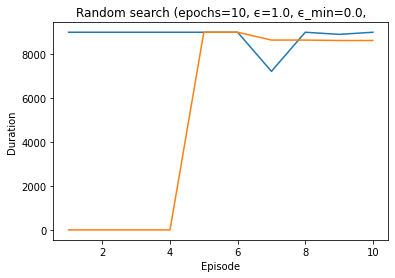

In [11]:
random_run = learner.epsilon_greedy_search(
    cyberbattlechain_10,
    ep,
    learner=learner.RandomPolicy(),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    title="Random search"
)

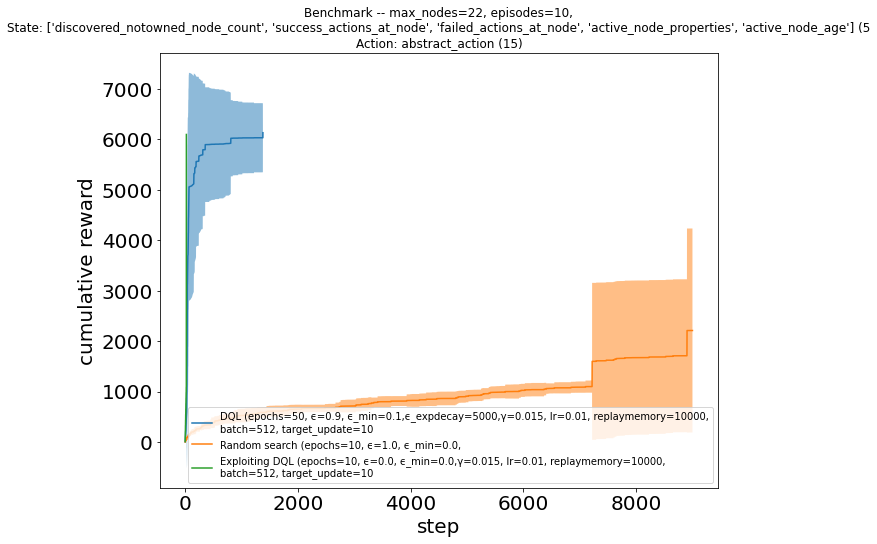

In [12]:
# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=[
        best_dqn_learning_run_10,
        random_run,
        dql_exploit_run
    ],
    title=f'Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n'
    f'State: {[f.name() for f in themodel.state_space.feature_selection]} '
    f'({len(themodel.state_space.feature_selection)}\n'
    f"Action: abstract_action ({themodel.action_space.flat_size()})")

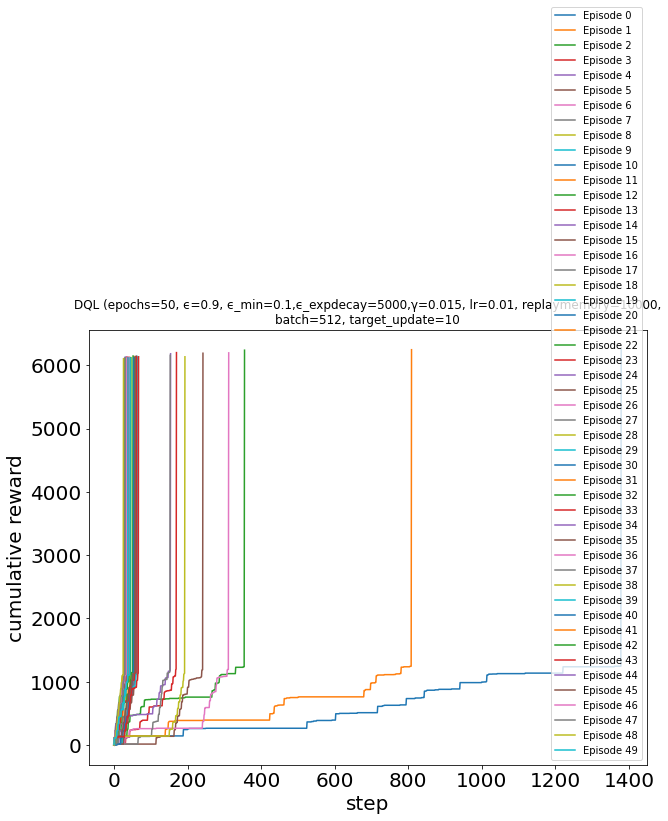

In [13]:
# plot cumulative rewards for all episodes
p.plot_all_episodes(best_dqn_learning_run_10)


##################################################

###### DQL
Learning with: episode_count=50,iteration_count=9000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5
  ## Episode: 1/50 'DQL' ϵ=0.9000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:    9.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:   11.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:   11.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:   15.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:   15.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 72|reward:   15.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 91|reward:  115.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 91|reward:  115.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 1|Iteration 92|reward:  124.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 1|Iteration 92|reward:  124.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 1|Iteration 101|reward:  132.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 1|Iteration 101|reward:  132.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 1|Iteration 133|reward:  232.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 1|Iteration 133|reward:  232.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 1|Iteration 137|reward:  241.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 1|Iteration 137|reward:  241.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 1|Iteration 139|reward:  245.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 1|Iteration 139|reward:  245.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 1|Iteration 140|reward:  251.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 1|Iteration 140|reward:  251.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 1|Iteration 166|reward:  257.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 1|Iteration 166|reward:  257.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 1|Iteration 178|reward:  259.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 1|Iteration 178|reward:  259.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 1|Iteration 215|reward:  259.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 1|Iteration 236|reward:  265.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 1|Iteration 236|reward:  265.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 1|Iteration 259|reward:  265.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 1|Iteration 272|reward:  265.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 1|Iteration 284|reward:  265.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 1|Iteration 296|reward:  265.0|last_reward_at:  236|Elapsed Time: 0:00:01||

Episode 1|Iteration 307|reward:  365.0|last_reward_at:  236|Elapsed Time: 0:00:01||

Episode 1|Iteration 307|reward:  365.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 1|Iteration 316|reward:  371.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 1|Iteration 316|reward:  371.0|last_reward_at:  316|Elapsed Time: 0:00:01||

Episode 1|Iteration 327|reward:  380.0|last_reward_at:  316|Elapsed Time: 0:00:01||

Episode 1|Iteration 327|reward:  380.0|last_reward_at:  327|Elapsed Time: 0:00:01||

Episode 1|Iteration 339|reward:  380.0|last_reward_at:  327|Elapsed Time: 0:00:01||

Episode 1|Iteration 349|reward:  386.0|last_reward_at:  327|Elapsed Time: 0:00:01||

Episode 1|Iteration 349|reward:  386.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 1|Iteration 359|reward:  394.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 1|Iteration 359|reward:  394.0|last_reward_at:  359|Elapsed Time: 0:00:01||

Episode 1|Iteration 371|reward:  394.0|last_reward_at:  359|Elapsed Time: 0:00:01||

Episode 1|Iteration 382|reward:  394.0|last_reward_at:  359|Elapsed Time: 0:00:01||

Episode 1|Iteration 394|reward:  394.0|last_reward_at:  359|Elapsed Time: 0:00:01||

Episode 1|Iteration 406|reward:  394.0|last_reward_at:  359|Elapsed Time: 0:00:02||

Episode 1|Iteration 408|reward:  494.0|last_reward_at:  359|Elapsed Time: 0:00:02||

Episode 1|Iteration 408|reward:  494.0|last_reward_at:  408|Elapsed Time: 0:00:02||

Episode 1|Iteration 419|reward:  494.0|last_reward_at:  408|Elapsed Time: 0:00:02||

Episode 1|Iteration 424|reward:  503.0|last_reward_at:  408|Elapsed Time: 0:00:02||

Episode 1|Iteration 424|reward:  503.0|last_reward_at:  424|Elapsed Time: 0:00:02||

Episode 1|Iteration 436|reward:  503.0|last_reward_at:  424|Elapsed Time: 0:00:02||

Episode 1|Iteration 442|reward: 5503.0|last_reward_at:  424|Elapsed Time: 0:00:02||

Episode 1|Iteration 442|reward: 5503.0|last_reward_at:  442|Elapsed Time: 0:00:02||

  Episode 1 ended at t=442 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/90 (0.06)
    explore-remote: 8/137 (0.06)
    explore-connect: 4/138 (0.03)
    exploit-local: 2/41 (0.05)
    exploit-remote: 0/3 (0.00)
    exploit-connect: 1/12 (0.08)
  exploit deflected to exploration: 2
  ## Episode: 2/50 'DQL' ϵ=0.8325, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:    9.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:   11.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:   11.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  111.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  111.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:  120.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:  120.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  126.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  126.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  134.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  134.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward:  136.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward:  136.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  142.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  142.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 48|reward:  142.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 58|reward:  142.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 60|reward:  242.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 60|reward:  242.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 64|reward:  251.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 64|reward:  251.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 2|Iteration 66|reward:  257.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 2|Iteration 66|reward:  257.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 2|Iteration 70|reward:  261.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 2|Iteration 70|reward:  261.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 2|Iteration 82|reward:  261.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 2|Iteration 84|reward:  263.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 2|Iteration 84|reward:  263.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 2|Iteration 94|reward:  263.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 2|Iteration 104|reward:  263.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 2|Iteration 114|reward:  263.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 2|Iteration 124|reward:  263.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 2|Iteration 136|reward:  263.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 2|Iteration 138|reward:  363.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 2|Iteration 138|reward:  363.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 2|Iteration 140|reward:  372.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 2|Iteration 140|reward:  372.0|last_reward_at:  140|Elapsed Time: 0:00:01||

Episode 2|Iteration 146|reward:  472.0|last_reward_at:  140|Elapsed Time: 0:00:01||

Episode 2|Iteration 146|reward:  472.0|last_reward_at:  146|Elapsed Time: 0:00:01||

Episode 2|Iteration 151|reward:  481.0|last_reward_at:  146|Elapsed Time: 0:00:01||

Episode 2|Iteration 151|reward:  481.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 2|Iteration 153|reward:  487.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 2|Iteration 153|reward:  487.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 2|Iteration 158|reward: 5487.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 2|Iteration 158|reward: 5487.0|last_reward_at:  158|Elapsed Time: 0:00:01||

  Episode 2 ended at t=158 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/21 (0.09)
    explore-remote: 6/54 (0.10)
    explore-connect: 1/45 (0.02)
    exploit-local: 5/5 (0.50)
    exploit-remote: 1/7 (0.12)
    exploit-connect: 4/7 (0.36)
  exploit deflected to exploration: 1
  ## Episode: 3/50 'DQL' ϵ=0.8097, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  111.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  111.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  113.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  113.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  122.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  122.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  222.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  222.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  228.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  228.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  237.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  237.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  243.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  243.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:  343.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:  343.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward:  352.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward:  352.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 34|reward:  354.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 34|reward:  354.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:  356.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:  356.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 3|Iteration 40|reward:  456.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 3|Iteration 40|reward:  456.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  462.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  462.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  471.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  471.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward: 5471.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward: 5471.0|last_reward_at:   44|Elapsed Time: 0:00:00||

  Episode 3 ended at t=44 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 6/6 (0.50)
    explore-connect: 0/15 (0.00)
    exploit-local: 4/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/1 (0.83)
  exploit deflected to exploration: 2
  ## Episode: 4/50 'DQL' ϵ=0.8035, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:    9.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  109.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  111.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  111.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  120.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  120.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  126.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  126.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  134.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  134.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 25|reward:  136.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 25|reward:  136.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  142.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  142.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:  242.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:  242.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  251.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  251.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 45|reward:  255.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 45|reward:  255.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 4|Iteration 52|reward:  257.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 4|Iteration 52|reward:  257.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 4|Iteration 62|reward:  357.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 4|Iteration 62|reward:  357.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 4|Iteration 69|reward:  357.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 4|Iteration 74|reward:  366.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 4|Iteration 74|reward:  366.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 4|Iteration 75|reward:  374.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 4|Iteration 75|reward:  374.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:  474.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:  474.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 4|Iteration 80|reward:  483.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 4|Iteration 80|reward:  483.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 4|Iteration 83|reward: 5483.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 4|Iteration 83|reward: 5483.0|last_reward_at:   83|Elapsed Time: 0:00:00||

  Episode 4 ended at t=83 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/13 (0.13)
    explore-remote: 7/18 (0.28)
    explore-connect: 1/31 (0.03)
    exploit-local: 4/1 (0.80)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/2 (0.67)
  exploit deflected to exploration: 1
  ## Episode: 5/50 'DQL' ϵ=0.7919, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:    9.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  109.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  109.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  118.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  118.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  218.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  218.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:  227.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:  227.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  327.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  327.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  329.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  329.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  338.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  338.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:  340.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:  340.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:  346.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:  346.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  446.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  446.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward:  452.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward:  452.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward:  461.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward:  461.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward: 5461.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward: 5461.0|last_reward_at:   40|Elapsed Time: 0:00:00||

  Episode 5 ended at t=40 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 3/15 (0.17)
    explore-connect: 0/4 (0.00)
    exploit-local: 4/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/2 (0.71)
  exploit deflected to exploration: 5
  ## Episode: 6/50 'DQL' ϵ=0.7864, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:   13.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:   13.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:   15.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:   15.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 16|reward:  115.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 16|reward:  115.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:  124.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:  124.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 19|reward:  224.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 19|reward:  224.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 22|reward:  230.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 22|reward:  230.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 6|Iteration 23|reward:  239.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 6|Iteration 23|reward:  239.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 6|Iteration 27|reward:  339.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 6|Iteration 27|reward:  339.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward:  348.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward:  348.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 29|reward:  354.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 29|reward:  354.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 6|Iteration 35|reward:  454.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 6|Iteration 35|reward:  454.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 6|Iteration 40|reward:  463.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 6|Iteration 40|reward:  463.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 6|Iteration 41|reward: 5463.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 6|Iteration 41|reward: 5463.0|last_reward_at:   41|Elapsed Time: 0:00:00||

  Episode 6 ended at t=41 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 4/12 (0.25)
    explore-connect: 0/10 (0.00)
    exploit-local: 5/2 (0.71)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/1 (0.83)
  exploit deflected to exploration: 0
  ## Episode: 7/50 'DQL' ϵ=0.7808, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  111.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  111.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  120.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  126.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  126.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:  226.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:  226.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:  235.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:  235.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 22|reward:  335.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 22|reward:  335.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 7|Iteration 23|reward:  341.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 7|Iteration 23|reward:  341.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 7|Iteration 29|reward:  350.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 7|Iteration 29|reward:  350.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 7|Iteration 30|reward:  358.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 7|Iteration 30|reward:  358.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward:  364.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward:  364.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 7|Iteration 33|reward:  464.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 7|Iteration 33|reward:  464.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 7|Iteration 36|reward:  466.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 7|Iteration 36|reward:  466.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 7|Iteration 40|reward:  472.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 7|Iteration 40|reward:  472.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 41|reward:  481.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 41|reward:  481.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 7|Iteration 45|reward:  483.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 7|Iteration 45|reward:  483.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 7|Iteration 46|reward: 5483.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 7|Iteration 46|reward: 5483.0|last_reward_at:   46|Elapsed Time: 0:00:00||

  Episode 7 ended at t=46 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/6 (0.45)
    explore-remote: 6/4 (0.60)
    explore-connect: 0/17 (0.00)
    exploit-local: 2/1 (0.67)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 8/50 'DQL' ϵ=0.7745, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:   13.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:   13.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:  113.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:  113.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward:  122.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward:  122.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  230.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:  239.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:  239.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  339.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  339.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:  345.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:  345.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward:  354.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward:  354.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 23|reward:  454.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 23|reward:  454.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward:  463.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward:  463.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward: 5463.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward: 5463.0|last_reward_at:   27|Elapsed Time: 0:00:00||

  Episode 8 ended at t=27 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 3/4 (0.43)
    explore-connect: 0/4 (0.00)
    exploit-local: 3/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/2 (0.71)
  exploit deflected to exploration: 0
  ## Episode: 9/50 'DQL' ϵ=0.7709, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:    9.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:  109.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  218.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  218.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  227.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  227.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  233.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  233.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  235.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  235.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:  237.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:  237.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:  337.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:  337.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward:  346.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward:  346.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 9|Iteration 23|reward:  446.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 9|Iteration 23|reward:  446.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 9|Iteration 26|reward:  448.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 9|Iteration 26|reward:  448.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 28|reward:  457.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 28|reward:  457.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 9|Iteration 33|reward: 5457.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 9|Iteration 33|reward: 5457.0|last_reward_at:   33|Elapsed Time: 0:00:00||

  Episode 9 ended at t=33 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 4/7 (0.36)
    explore-connect: 0/6 (0.00)
    exploit-local: 3/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/1 (0.83)
  exploit deflected to exploration: 0
  ## Episode: 10/50 'DQL' ϵ=0.7665, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:    9.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:   13.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:   13.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 10|reward:  113.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 10|reward:  113.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:  122.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:  122.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:  130.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:  130.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:  132.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:  132.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 10|Iteration 18|reward:  232.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 10|Iteration 18|reward:  232.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 10|Iteration 19|reward:  238.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 10|Iteration 19|reward:  238.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 10|Iteration 21|reward:  240.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 10|Iteration 21|reward:  240.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 30|reward:  240.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 35|reward:  240.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 46|reward:  244.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 46|reward:  244.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 10|Iteration 57|reward:  244.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 10|Iteration 59|reward:  253.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 10|Iteration 59|reward:  253.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 10|Iteration 65|reward:  353.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 10|Iteration 65|reward:  353.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 10|Iteration 67|reward:  359.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 10|Iteration 67|reward:  359.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 10|Iteration 69|reward:  368.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 10|Iteration 69|reward:  368.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 10|Iteration 70|reward:  468.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 10|Iteration 70|reward:  468.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 10|Iteration 72|reward:  477.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 10|Iteration 72|reward:  477.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 10|Iteration 76|reward:  483.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 10|Iteration 76|reward:  483.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 10|Iteration 87|reward: 5483.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 10|Iteration 87|reward: 5483.0|last_reward_at:   87|Elapsed Time: 0:00:00||

  Episode 10 ended at t=87 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/14 (0.22)
    explore-remote: 5/21 (0.19)
    explore-connect: 0/26 (0.00)
    exploit-local: 4/2 (0.67)
    exploit-remote: 0/5 (0.00)
    exploit-connect: 5/1 (0.83)
  exploit deflected to exploration: 6
  ## Episode: 11/50 'DQL' ϵ=0.7550, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 5|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 5|reward:    9.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 11|Iteration 8|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 11|Iteration 8|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 11|Iteration 11|reward:  111.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 11|Iteration 11|reward:  111.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 11|Iteration 14|reward:  120.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 11|Iteration 14|reward:  120.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 11|Iteration 16|reward:  126.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 11|Iteration 16|reward:  126.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 11|Iteration 18|reward:  226.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 11|Iteration 18|reward:  226.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 11|Iteration 24|reward:  235.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 11|Iteration 24|reward:  235.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 11|Iteration 25|reward:  241.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 11|Iteration 25|reward:  241.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 11|Iteration 29|reward:  341.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 11|Iteration 29|reward:  341.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 11|Iteration 31|reward:  343.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 11|Iteration 31|reward:  343.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 11|Iteration 32|reward:  352.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 11|Iteration 32|reward:  352.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 11|Iteration 34|reward:  358.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 11|Iteration 34|reward:  358.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 11|Iteration 36|reward:  458.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 11|Iteration 36|reward:  458.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 11|Iteration 38|reward:  467.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 11|Iteration 38|reward:  467.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 11|Iteration 40|reward:  473.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 11|Iteration 40|reward:  473.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 11|Iteration 41|reward:  475.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 11|Iteration 41|reward:  475.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 11|Iteration 49|reward: 5475.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 11|Iteration 49|reward: 5475.0|last_reward_at:   49|Elapsed Time: 0:00:00||

  Episode 11 ended at t=49 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/8 (0.20)
    explore-remote: 6/9 (0.40)
    explore-connect: 0/12 (0.00)
    exploit-local: 4/1 (0.80)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/2 (0.71)
  exploit deflected to exploration: 0
  ## Episode: 12/50 'DQL' ϵ=0.7486, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 5|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 5|reward:    9.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 12|Iteration 9|reward:   13.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 12|Iteration 9|reward:   13.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 12|Iteration 12|reward:  113.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 12|Iteration 12|reward:  113.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 12|Iteration 14|reward:  122.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 12|Iteration 14|reward:  122.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 12|Iteration 15|reward:  222.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 12|Iteration 15|reward:  222.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 12|Iteration 18|reward:  231.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 12|Iteration 18|reward:  231.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 12|Iteration 20|reward:  331.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 12|Iteration 20|reward:  331.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 12|Iteration 22|reward:  340.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 12|Iteration 22|reward:  340.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 12|Iteration 25|reward:  342.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 12|Iteration 25|reward:  342.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 12|Iteration 28|reward:  442.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 12|Iteration 28|reward:  442.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 12|Iteration 31|reward:  451.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 12|Iteration 31|reward:  451.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 12|Iteration 32|reward: 5451.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 12|Iteration 32|reward: 5451.0|last_reward_at:   32|Elapsed Time: 0:00:00||

  Episode 12 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/7 (0.00)
    explore-remote: 2/4 (0.33)
    explore-connect: 1/8 (0.11)
    exploit-local: 5/1 (0.83)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 13/50 'DQL' ϵ=0.7445, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 13|Iteration 10|reward:   13.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 13|Iteration 10|reward:   13.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 13|Iteration 15|reward:   15.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 13|Iteration 15|reward:   15.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 13|Iteration 20|reward:  115.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 13|Iteration 20|reward:  115.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 13|Iteration 26|reward:  124.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 13|Iteration 26|reward:  124.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 13|Iteration 27|reward:  224.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 13|Iteration 27|reward:  224.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 13|Iteration 28|reward:  230.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 13|Iteration 28|reward:  230.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 13|Iteration 32|reward:  239.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 13|Iteration 32|reward:  239.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 13|Iteration 33|reward:  339.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 13|Iteration 33|reward:  339.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 13|Iteration 34|reward:  345.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 13|Iteration 34|reward:  345.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 13|Iteration 35|reward:  354.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 13|Iteration 35|reward:  354.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 13|Iteration 38|reward:  454.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 13|Iteration 38|reward:  454.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 13|Iteration 39|reward:  463.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 13|Iteration 39|reward:  463.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 13|Iteration 40|reward: 5463.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 13|Iteration 40|reward: 5463.0|last_reward_at:   40|Elapsed Time: 0:00:00||

  Episode 13 ended at t=40 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/3 (0.50)
    explore-remote: 2/7 (0.22)
    explore-connect: 1/12 (0.08)
    exploit-local: 3/0 (1.00)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 4/3 (0.57)
  exploit deflected to exploration: 0
  ## Episode: 14/50 'DQL' ϵ=0.7393, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 4|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 4|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 14|Iteration 7|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 14|Iteration 7|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 14|Iteration 8|reward:  218.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 14|Iteration 8|reward:  218.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 14|Iteration 10|reward:  224.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 14|Iteration 10|reward:  224.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 14|Iteration 11|reward:  228.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 14|Iteration 11|reward:  228.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 14|reward:  230.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 14|reward:  230.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 14|Iteration 20|reward:  232.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 14|Iteration 20|reward:  232.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 14|Iteration 30|reward:  232.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 14|Iteration 32|reward:  238.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 14|Iteration 32|reward:  238.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 14|Iteration 41|reward:  247.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 14|Iteration 41|reward:  247.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 14|Iteration 54|reward:  249.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 14|Iteration 54|reward:  249.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 14|Iteration 57|reward:  255.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 14|Iteration 57|reward:  255.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 14|Iteration 69|reward:  255.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 14|Iteration 82|reward:  255.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 14|Iteration 92|reward:  255.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 14|Iteration 103|reward:  255.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 14|Iteration 114|reward:  255.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 14|Iteration 125|reward:  261.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 14|Iteration 125|reward:  261.0|last_reward_at:  125|Elapsed Time: 0:00:01||

Episode 14|Iteration 133|reward:  361.0|last_reward_at:  125|Elapsed Time: 0:00:01||

Episode 14|Iteration 133|reward:  361.0|last_reward_at:  133|Elapsed Time: 0:00:01||

Episode 14|Iteration 138|reward:  370.0|last_reward_at:  133|Elapsed Time: 0:00:01||

Episode 14|Iteration 138|reward:  370.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 14|Iteration 139|reward:  470.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 14|Iteration 139|reward:  470.0|last_reward_at:  139|Elapsed Time: 0:00:01||

Episode 14|Iteration 148|reward:  479.0|last_reward_at:  139|Elapsed Time: 0:00:01||

Episode 14|Iteration 148|reward:  479.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 14|Iteration 149|reward:  485.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 14|Iteration 149|reward:  485.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 14|Iteration 152|reward: 5485.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 14|Iteration 152|reward: 5485.0|last_reward_at:  152|Elapsed Time: 0:00:01||

  Episode 14 ended at t=152 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/23 (0.21)
    explore-remote: 6/31 (0.16)
    explore-connect: 1/46 (0.02)
    exploit-local: 2/1 (0.67)
    exploit-remote: 0/25 (0.00)
    exploit-connect: 4/7 (0.36)
  exploit deflected to exploration: 0
  ## Episode: 15/50 'DQL' ϵ=0.7202, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 15|Iteration 6|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 15|Iteration 6|reward:  109.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 15|Iteration 8|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 15|Iteration 8|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 15|Iteration 9|reward:  124.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 15|Iteration 9|reward:  124.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 15|Iteration 10|reward:  132.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 15|Iteration 10|reward:  132.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 15|Iteration 20|reward:  232.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 15|Iteration 20|reward:  232.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 15|Iteration 22|reward:  234.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 15|Iteration 22|reward:  234.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 15|Iteration 27|reward:  243.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 15|Iteration 27|reward:  243.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 15|Iteration 29|reward:  249.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 15|Iteration 29|reward:  249.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 15|Iteration 33|reward:  255.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 15|Iteration 33|reward:  255.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 15|Iteration 46|reward:  255.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 15|Iteration 47|reward:  259.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 15|Iteration 47|reward:  259.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 15|Iteration 60|reward:  261.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 15|Iteration 60|reward:  261.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 15|Iteration 69|reward:  261.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 15|Iteration 75|reward:  361.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 15|Iteration 75|reward:  361.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 15|Iteration 76|reward:  370.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 15|Iteration 76|reward:  370.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 15|Iteration 79|reward:  470.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 15|Iteration 79|reward:  470.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 15|Iteration 80|reward:  479.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 15|Iteration 80|reward:  479.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 15|Iteration 93|reward:  479.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 15|Iteration 100|reward:  485.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 15|Iteration 100|reward:  485.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 15|Iteration 105|reward:  491.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 15|Iteration 105|reward:  491.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 15|Iteration 109|reward:  493.0|last_reward_at:  105|Elapsed Time: 0:00:01||

Episode 15|Iteration 109|reward:  493.0|last_reward_at:  109|Elapsed Time: 0:00:01||

Episode 15|Iteration 121|reward:  493.0|last_reward_at:  109|Elapsed Time: 0:00:01||

Episode 15|Iteration 133|reward:  493.0|last_reward_at:  109|Elapsed Time: 0:00:01||

Episode 15|Iteration 146|reward:  493.0|last_reward_at:  109|Elapsed Time: 0:00:01||

Episode 15|Iteration 155|reward:  493.0|last_reward_at:  109|Elapsed Time: 0:00:01||

Episode 15|Iteration 167|reward:  493.0|last_reward_at:  109|Elapsed Time: 0:00:01||

Episode 15|Iteration 176|reward:  499.0|last_reward_at:  109|Elapsed Time: 0:00:01||

Episode 15|Iteration 176|reward:  499.0|last_reward_at:  176|Elapsed Time: 0:00:01||

Episode 15|Iteration 183|reward: 5499.0|last_reward_at:  176|Elapsed Time: 0:00:01||

Episode 15|Iteration 183|reward: 5499.0|last_reward_at:  183|Elapsed Time: 0:00:01||

  Episode 15 ended at t=183 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/20 (0.13)
    explore-remote: 8/49 (0.14)
    explore-connect: 2/54 (0.04)
    exploit-local: 5/15 (0.25)
    exploit-remote: 0/11 (0.00)
    exploit-connect: 3/13 (0.19)
  exploit deflected to exploration: 1
  ## Episode: 16/50 'DQL' ϵ=0.6979, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 5|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 5|reward:    9.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 16|Iteration 6|reward:  109.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 16|Iteration 6|reward:  109.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 16|Iteration 9|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 16|Iteration 9|reward:  118.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 16|Iteration 11|reward:  218.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 16|Iteration 11|reward:  218.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 16|Iteration 12|reward:  227.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 16|Iteration 12|reward:  227.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 16|Iteration 18|reward:  327.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 16|Iteration 18|reward:  327.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 16|Iteration 19|reward:  336.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 16|Iteration 19|reward:  336.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 16|Iteration 20|reward:  436.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 16|Iteration 20|reward:  436.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 16|Iteration 21|reward:  442.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 16|Iteration 21|reward:  442.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 16|Iteration 26|reward:  448.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 16|Iteration 26|reward:  448.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 16|Iteration 27|reward:  450.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 16|Iteration 27|reward:  450.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 16|Iteration 28|reward:  459.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 16|Iteration 28|reward:  459.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 16|Iteration 29|reward: 5459.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 16|Iteration 29|reward: 5459.0|last_reward_at:   29|Elapsed Time: 0:00:00||

  Episode 16 ended at t=29 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 2/7 (0.22)
    explore-connect: 0/5 (0.00)
    exploit-local: 5/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 17/50 'DQL' ϵ=0.6944, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 9|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 14|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 14|reward:    9.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 17|Iteration 15|reward:  109.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 17|Iteration 15|reward:  109.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 17|Iteration 16|reward:  118.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 17|Iteration 16|reward:  118.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 17|Iteration 17|reward:  126.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 17|Iteration 17|reward:  126.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 17|Iteration 20|reward:  226.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 17|Iteration 20|reward:  226.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 17|Iteration 22|reward:  235.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 17|Iteration 22|reward:  235.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 17|Iteration 23|reward:  237.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 17|Iteration 23|reward:  237.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 17|Iteration 26|reward:  243.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 17|Iteration 26|reward:  243.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 17|Iteration 27|reward:  343.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 17|Iteration 27|reward:  343.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 17|Iteration 29|reward:  352.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 17|Iteration 29|reward:  352.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 17|Iteration 31|reward:  360.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 17|Iteration 31|reward:  360.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 17|Iteration 33|reward:  460.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 17|Iteration 33|reward:  460.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 17|Iteration 34|reward:  469.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 17|Iteration 34|reward:  469.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 17|Iteration 37|reward: 5469.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 17|Iteration 37|reward: 5469.0|last_reward_at:   37|Elapsed Time: 0:00:00||

  Episode 17 ended at t=37 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 4/15 (0.21)
    explore-connect: 0/6 (0.00)
    exploit-local: 4/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 10
  ## Episode: 18/50 'DQL' ϵ=0.6901, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 18|Iteration 3|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 18|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 18|Iteration 4|reward:  111.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 18|Iteration 4|reward:  111.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 6|reward:  120.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 6|reward:  120.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 18|Iteration 9|reward:  220.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 18|Iteration 9|reward:  220.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 18|Iteration 12|reward:  229.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 18|Iteration 12|reward:  229.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 18|Iteration 13|reward:  235.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 18|Iteration 13|reward:  235.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 18|Iteration 15|reward:  241.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 18|Iteration 15|reward:  241.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 18|Iteration 17|reward:  341.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 18|Iteration 17|reward:  341.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 18|Iteration 18|reward:  350.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 18|Iteration 18|reward:  350.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 18|Iteration 19|reward:  356.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 18|Iteration 19|reward:  356.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 18|Iteration 25|reward:  362.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 18|Iteration 25|reward:  362.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 18|Iteration 34|reward:  462.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 18|Iteration 34|reward:  462.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 18|Iteration 36|reward:  471.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 18|Iteration 36|reward:  471.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 18|Iteration 37|reward:  473.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 18|Iteration 37|reward:  473.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 18|Iteration 40|reward:  479.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 18|Iteration 40|reward:  479.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 18|Iteration 43|reward: 5479.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 18|Iteration 43|reward: 5479.0|last_reward_at:   43|Elapsed Time: 0:00:00||

  Episode 18 ended at t=43 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 5/6 (0.45)
    explore-connect: 0/12 (0.00)
    exploit-local: 5/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/3 (0.62)
  exploit deflected to exploration: 0
  ## Episode: 19/50 'DQL' ϵ=0.6850, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 6|reward:  111.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 6|reward:  111.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 19|Iteration 9|reward:  120.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 19|Iteration 9|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 19|Iteration 21|reward:  220.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 19|Iteration 21|reward:  220.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 19|Iteration 24|reward:  222.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 19|Iteration 24|reward:  222.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 19|Iteration 26|reward:  231.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 19|Iteration 26|reward:  231.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 19|Iteration 31|reward:  235.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 19|Iteration 31|reward:  235.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 19|Iteration 33|reward:  241.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 19|Iteration 33|reward:  241.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 19|Iteration 39|reward:  247.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 19|Iteration 39|reward:  247.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 19|Iteration 52|reward:  247.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 19|Iteration 65|reward:  247.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 19|Iteration 75|reward:  247.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 19|Iteration 81|reward:  253.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 19|Iteration 81|reward:  253.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 19|Iteration 89|reward:  255.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 19|Iteration 89|reward:  255.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 19|Iteration 92|reward:  261.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 19|Iteration 92|reward:  261.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 19|Iteration 102|reward:  361.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 19|Iteration 102|reward:  361.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 19|Iteration 114|reward:  361.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 19|Iteration 127|reward:  361.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 19|Iteration 140|reward:  370.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 19|Iteration 140|reward:  370.0|last_reward_at:  140|Elapsed Time: 0:00:01||

Episode 19|Iteration 143|reward:  470.0|last_reward_at:  140|Elapsed Time: 0:00:01||

Episode 19|Iteration 143|reward:  470.0|last_reward_at:  143|Elapsed Time: 0:00:01||

Episode 19|Iteration 145|reward:  479.0|last_reward_at:  143|Elapsed Time: 0:00:01||

Episode 19|Iteration 145|reward:  479.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 19|Iteration 148|reward: 5479.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 19|Iteration 148|reward: 5479.0|last_reward_at:  148|Elapsed Time: 0:00:01||

  Episode 19 ended at t=148 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/27 (0.07)
    explore-remote: 4/31 (0.11)
    explore-connect: 1/45 (0.02)
    exploit-local: 5/2 (0.71)
    exploit-remote: 2/23 (0.08)
    exploit-connect: 4/2 (0.67)
  exploit deflected to exploration: 0
  ## Episode: 20/50 'DQL' ϵ=0.6679, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 20|Iteration 6|reward:   13.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 20|Iteration 6|reward:   13.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 20|Iteration 7|reward:  113.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 20|Iteration 7|reward:  113.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 20|Iteration 16|reward:  113.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 20|Iteration 17|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 20|Iteration 17|reward:  115.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 20|Iteration 25|reward:  124.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 20|Iteration 25|reward:  124.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 20|Iteration 31|reward:  130.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 20|Iteration 31|reward:  130.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 20|Iteration 33|reward:  136.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 20|Iteration 33|reward:  136.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 20|Iteration 37|reward:  236.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 20|Iteration 37|reward:  236.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 20|Iteration 38|reward:  242.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 20|Iteration 38|reward:  242.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 20|Iteration 45|reward:  251.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 20|Iteration 45|reward:  251.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 20|Iteration 46|reward:  351.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 20|Iteration 46|reward:  351.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 20|Iteration 47|reward:  353.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 20|Iteration 47|reward:  353.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 20|Iteration 57|reward:  353.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 20|Iteration 68|reward:  353.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 20|Iteration 69|reward:  362.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 20|Iteration 69|reward:  362.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 20|Iteration 75|reward:  462.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 20|Iteration 75|reward:  462.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 20|Iteration 77|reward:  471.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 20|Iteration 77|reward:  471.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 20|Iteration 78|reward: 5471.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 20|Iteration 78|reward: 5471.0|last_reward_at:   78|Elapsed Time: 0:00:00||

  Episode 20 ended at t=78 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/8 (0.33)
    explore-remote: 5/20 (0.20)
    explore-connect: 0/21 (0.00)
    exploit-local: 2/2 (0.50)
    exploit-remote: 0/9 (0.00)
    exploit-connect: 5/2 (0.71)
  exploit deflected to exploration: 7
  ## Episode: 21/50 'DQL' ϵ=0.6591, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 21|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 21|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 21|Iteration 4|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 21|Iteration 4|reward:    9.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 21|Iteration 5|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 21|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 21|Iteration 8|reward:  111.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 21|Iteration 8|reward:  111.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 21|Iteration 16|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 21|Iteration 16|reward:  120.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 21|Iteration 17|reward:  220.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 21|Iteration 17|reward:  220.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 21|Iteration 18|reward:  226.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 21|Iteration 18|reward:  226.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 21|Iteration 19|reward:  235.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 21|Iteration 19|reward:  235.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 21|Iteration 21|reward:  239.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 21|Iteration 21|reward:  239.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 21|Iteration 23|reward:  339.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 21|Iteration 23|reward:  339.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 21|Iteration 27|reward:  345.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 21|Iteration 27|reward:  345.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 21|Iteration 30|reward:  354.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 21|Iteration 30|reward:  354.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 21|Iteration 32|reward:  454.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 21|Iteration 32|reward:  454.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 21|Iteration 37|reward:  456.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 21|Iteration 37|reward:  456.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 21|Iteration 38|reward:  458.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 21|Iteration 38|reward:  458.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 21|Iteration 40|reward:  467.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 21|Iteration 40|reward:  467.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 21|Iteration 45|reward: 5467.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 21|Iteration 45|reward: 5467.0|last_reward_at:   45|Elapsed Time: 0:00:00||

  Episode 21 ended at t=45 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 5/14 (0.26)
    explore-connect: 0/10 (0.00)
    exploit-local: 5/1 (0.83)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 3
  ## Episode: 22/50 'DQL' ϵ=0.6541, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 22|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 22|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 22|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 22|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 22|Iteration 4|reward:   13.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 22|Iteration 4|reward:   13.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 22|Iteration 5|reward:   15.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 22|Iteration 5|reward:   15.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 22|Iteration 13|reward:  115.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 22|Iteration 13|reward:  115.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 22|Iteration 15|reward:  124.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 22|Iteration 15|reward:  124.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 22|Iteration 17|reward:  224.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 22|Iteration 17|reward:  224.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 22|Iteration 18|reward:  233.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 22|Iteration 18|reward:  233.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 22|Iteration 20|reward:  333.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 22|Iteration 20|reward:  333.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 22|Iteration 21|reward:  342.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 22|Iteration 21|reward:  342.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 22|Iteration 30|reward:  442.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 22|Iteration 30|reward:  442.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 22|Iteration 31|reward:  448.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 22|Iteration 31|reward:  448.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 22|Iteration 32|reward:  454.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 22|Iteration 32|reward:  454.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 22|Iteration 33|reward:  463.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 22|Iteration 33|reward:  463.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 22|Iteration 34|reward: 5463.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 22|Iteration 34|reward: 5463.0|last_reward_at:   34|Elapsed Time: 0:00:00||

  Episode 22 ended at t=34 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 3/2 (0.60)
    explore-connect: 0/7 (0.00)
    exploit-local: 5/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/5 (0.50)
  exploit deflected to exploration: 0
  ## Episode: 23/50 'DQL' ϵ=0.6504, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 23|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 23|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 23|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 23|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 23|Iteration 8|reward:   13.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 23|Iteration 8|reward:   13.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 23|Iteration 11|reward:  113.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 23|Iteration 11|reward:  113.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 23|Iteration 17|reward:  122.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 23|Iteration 17|reward:  122.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 23|Iteration 19|reward:  222.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 23|Iteration 19|reward:  222.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 23|Iteration 22|reward:  231.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 23|Iteration 22|reward:  231.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 23|Iteration 24|reward:  237.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 23|Iteration 24|reward:  237.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 23|Iteration 26|reward:  239.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 23|Iteration 26|reward:  239.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 23|Iteration 27|reward:  339.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 23|Iteration 27|reward:  339.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 23|Iteration 32|reward:  348.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 23|Iteration 32|reward:  348.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 23|Iteration 33|reward:  354.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 23|Iteration 33|reward:  354.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 23|Iteration 35|reward:  356.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 23|Iteration 35|reward:  356.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 23|Iteration 37|reward:  456.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 23|Iteration 37|reward:  456.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 23|Iteration 38|reward:  465.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 23|Iteration 38|reward:  465.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 23|Iteration 41|reward: 5465.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 23|Iteration 41|reward: 5465.0|last_reward_at:   41|Elapsed Time: 0:00:00||

  Episode 23 ended at t=41 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 4/7 (0.36)
    explore-connect: 0/14 (0.00)
    exploit-local: 4/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 1
  ## Episode: 24/50 'DQL' ϵ=0.6459, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 24|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 24|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 24|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 24|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 24|Iteration 6|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 24|Iteration 6|reward:  109.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 24|Iteration 7|reward:  115.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 24|Iteration 7|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 24|Iteration 9|reward:  124.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 24|Iteration 9|reward:  124.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 24|Iteration 13|reward:  224.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 24|Iteration 13|reward:  224.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 24|Iteration 14|reward:  233.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 24|Iteration 14|reward:  233.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 24|Iteration 15|reward:  239.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 24|Iteration 15|reward:  239.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 24|Iteration 17|reward:  339.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 24|Iteration 17|reward:  339.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 24|Iteration 19|reward:  348.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 24|Iteration 19|reward:  348.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 24|Iteration 22|reward:  354.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 24|Iteration 22|reward:  354.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 24|Iteration 25|reward:  454.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 24|Iteration 25|reward:  454.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 24|Iteration 27|reward:  463.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 24|Iteration 27|reward:  463.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 24|Iteration 29|reward: 5463.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 24|Iteration 29|reward: 5463.0|last_reward_at:   29|Elapsed Time: 0:00:00||

  Episode 24 ended at t=29 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 2/6 (0.25)
    explore-connect: 0/6 (0.00)
    exploit-local: 4/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/2 (0.71)
  exploit deflected to exploration: 0
  ## Episode: 25/50 'DQL' ϵ=0.6427, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 25|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 25|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 25|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 25|Iteration 4|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 25|Iteration 4|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 25|Iteration 9|reward:  111.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 25|Iteration 9|reward:  111.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 25|Iteration 10|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 25|Iteration 10|reward:  120.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 25|Iteration 12|reward:  128.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 25|Iteration 12|reward:  128.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 25|Iteration 13|reward:  228.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 25|Iteration 13|reward:  228.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 25|Iteration 16|reward:  237.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 25|Iteration 16|reward:  237.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 25|Iteration 18|reward:  337.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 25|Iteration 18|reward:  337.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 25|Iteration 19|reward:  346.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 25|Iteration 19|reward:  346.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 25|Iteration 25|reward:  446.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 25|Iteration 25|reward:  446.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 25|Iteration 26|reward:  452.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 25|Iteration 26|reward:  452.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 25|Iteration 29|reward:  458.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 25|Iteration 29|reward:  458.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 25|Iteration 37|reward:  460.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 25|Iteration 37|reward:  460.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 25|Iteration 43|reward:  460.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 25|Iteration 50|reward:  466.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 25|Iteration 50|reward:  466.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 25|Iteration 54|reward:  466.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 25|Iteration 62|reward:  466.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 25|Iteration 73|reward:  466.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 25|Iteration 79|reward:  468.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 25|Iteration 79|reward:  468.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 25|Iteration 87|reward:  474.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 25|Iteration 87|reward:  474.0|last_reward_at:   87|Elapsed Time: 0:00:01||

Episode 25|Iteration 88|reward:  476.0|last_reward_at:   87|Elapsed Time: 0:00:01||

Episode 25|Iteration 88|reward:  476.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 25|Iteration 97|reward:  476.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 25|Iteration 108|reward:  476.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 25|Iteration 120|reward:  476.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 25|Iteration 127|reward:  482.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 25|Iteration 127|reward:  482.0|last_reward_at:  127|Elapsed Time: 0:00:01||

Episode 25|Iteration 139|reward:  482.0|last_reward_at:  127|Elapsed Time: 0:00:01||

Episode 25|Iteration 149|reward:  482.0|last_reward_at:  127|Elapsed Time: 0:00:01||

Episode 25|Iteration 160|reward:  482.0|last_reward_at:  127|Elapsed Time: 0:00:01||

Episode 25|Iteration 171|reward:  482.0|last_reward_at:  127|Elapsed Time: 0:00:01||

Episode 25|Iteration 183|reward:  482.0|last_reward_at:  127|Elapsed Time: 0:00:02||

Episode 25|Iteration 192|reward:  491.0|last_reward_at:  127|Elapsed Time: 0:00:02||

Episode 25|Iteration 192|reward:  491.0|last_reward_at:  192|Elapsed Time: 0:00:02||

Episode 25|Iteration 200|reward: 5491.0|last_reward_at:  192|Elapsed Time: 0:00:02||

Episode 25|Iteration 200|reward: 5491.0|last_reward_at:  200|Elapsed Time: 0:00:02||

  Episode 25 ended at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/29 (0.15)
    explore-remote: 6/38 (0.14)
    explore-connect: 0/46 (0.00)
    exploit-local: 4/49 (0.08)
    exploit-remote: 0/15 (0.00)
    exploit-connect: 5/3 (0.62)
  exploit deflected to exploration: 0
  ## Episode: 26/50 'DQL' ϵ=0.6214, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 26|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 26|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 26|Iteration 5|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 26|Iteration 5|reward:    9.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 26|Iteration 8|reward:  109.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 26|Iteration 8|reward:  109.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 26|Iteration 9|reward:  111.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 26|Iteration 9|reward:  111.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 26|Iteration 11|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 26|Iteration 11|reward:  120.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 26|Iteration 13|reward:  220.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 26|Iteration 13|reward:  220.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 26|Iteration 16|reward:  229.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 26|Iteration 16|reward:  229.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 26|Iteration 17|reward:  329.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 26|Iteration 17|reward:  329.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 26|Iteration 18|reward:  335.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 26|Iteration 18|reward:  335.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 26|Iteration 21|reward:  341.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 26|Iteration 21|reward:  341.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 26|Iteration 24|reward:  347.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 26|Iteration 24|reward:  347.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 26|Iteration 29|reward:  353.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 26|Iteration 29|reward:  353.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 26|Iteration 37|reward:  353.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 26|Iteration 39|reward:  359.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 26|Iteration 39|reward:  359.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 26|Iteration 45|reward:  361.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 26|Iteration 45|reward:  361.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 26|Iteration 54|reward:  363.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 26|Iteration 54|reward:  363.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 26|Iteration 56|reward:  369.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 26|Iteration 56|reward:  369.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 26|Iteration 58|reward:  377.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 26|Iteration 58|reward:  377.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 26|Iteration 66|reward:  377.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 26|Iteration 74|reward:  377.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 26|Iteration 81|reward:  377.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 26|Iteration 91|reward:  377.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 26|Iteration 99|reward:  379.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 26|Iteration 99|reward:  379.0|last_reward_at:   99|Elapsed Time: 0:00:01||

Episode 26|Iteration 108|reward:  379.0|last_reward_at:   99|Elapsed Time: 0:00:01||

Episode 26|Iteration 118|reward:  379.0|last_reward_at:   99|Elapsed Time: 0:00:01||

Episode 26|Iteration 128|reward:  379.0|last_reward_at:   99|Elapsed Time: 0:00:01||

Episode 26|Iteration 141|reward:  379.0|last_reward_at:   99|Elapsed Time: 0:00:01||

Episode 26|Iteration 151|reward:  379.0|last_reward_at:   99|Elapsed Time: 0:00:01||

Episode 26|Iteration 155|reward:  388.0|last_reward_at:   99|Elapsed Time: 0:00:01||

Episode 26|Iteration 155|reward:  388.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 26|Iteration 167|reward:  388.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 26|Iteration 175|reward:  488.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 26|Iteration 175|reward:  488.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 26|Iteration 176|reward:  497.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 26|Iteration 176|reward:  497.0|last_reward_at:  176|Elapsed Time: 0:00:01||

Episode 26|Iteration 186|reward: 5497.0|last_reward_at:  176|Elapsed Time: 0:00:02||

Episode 26|Iteration 186|reward: 5497.0|last_reward_at:  186|Elapsed Time: 0:00:02||

  Episode 26 ended at t=186 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/29 (0.03)
    explore-remote: 7/31 (0.18)
    explore-connect: 0/44 (0.00)
    exploit-local: 7/41 (0.15)
    exploit-remote: 1/20 (0.05)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 3
  ## Episode: 27/50 'DQL' ϵ=0.6024, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 27|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 27|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 27|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 27|Iteration 2|reward:   13.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 27|Iteration 2|reward:   13.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 27|Iteration 3|reward:  113.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 27|Iteration 3|reward:  113.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 27|Iteration 4|reward:  122.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 27|Iteration 4|reward:  122.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 27|Iteration 5|reward:  222.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 27|Iteration 5|reward:  222.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 27|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 27|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 27|Iteration 8|reward:  237.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 27|Iteration 8|reward:  237.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 27|Iteration 11|reward:  337.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 27|Iteration 11|reward:  337.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 27|Iteration 12|reward:  346.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 27|Iteration 12|reward:  346.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 27|Iteration 13|reward:  348.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 27|Iteration 13|reward:  348.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 27|Iteration 15|reward:  448.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 27|Iteration 15|reward:  448.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 27|Iteration 17|reward:  454.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 27|Iteration 17|reward:  454.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 27|Iteration 18|reward:  463.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 27|Iteration 18|reward:  463.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 27|Iteration 19|reward:  469.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 27|Iteration 19|reward:  469.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 27|Iteration 22|reward: 5469.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 27|Iteration 22|reward: 5469.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 27 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 4/0 (1.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 6/1 (0.86)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 28/50 'DQL' ϵ=0.6002, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 28|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 28|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 28|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 28|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 28|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 28|Iteration 5|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 28|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 28|Iteration 6|reward:  124.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 28|Iteration 6|reward:  124.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 28|Iteration 11|reward:  132.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 28|Iteration 11|reward:  132.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 28|Iteration 12|reward:  232.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 28|Iteration 12|reward:  232.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 28|Iteration 18|reward:  234.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 28|Iteration 18|reward:  234.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 28|Iteration 24|reward:  236.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 28|Iteration 24|reward:  236.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 28|Iteration 34|reward:  245.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 28|Iteration 34|reward:  245.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 28|Iteration 46|reward:  247.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 28|Iteration 46|reward:  247.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 28|Iteration 53|reward:  251.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 28|Iteration 53|reward:  251.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 28|Iteration 56|reward:  257.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 28|Iteration 56|reward:  257.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 28|Iteration 69|reward:  257.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 28|Iteration 80|reward:  257.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 28|Iteration 92|reward:  263.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 28|Iteration 92|reward:  263.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 28|Iteration 103|reward:  263.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 28|Iteration 112|reward:  263.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 28|Iteration 122|reward:  263.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 28|Iteration 136|reward:  263.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 28|Iteration 149|reward:  263.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 28|Iteration 162|reward:  263.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 28|Iteration 174|reward:  263.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 28|Iteration 187|reward:  263.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 28|Iteration 200|reward:  263.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 28|Iteration 213|reward:  263.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 28|Iteration 225|reward:  263.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 28|Iteration 236|reward:  263.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 28|Iteration 248|reward:  263.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 28|Iteration 259|reward:  263.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 28|Iteration 272|reward:  263.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 28|Iteration 283|reward:  263.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 28|Iteration 295|reward:  263.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 28|Iteration 308|reward:  263.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 28|Iteration 319|reward:  263.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 28|Iteration 331|reward:  263.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 28|Iteration 342|reward:  263.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 28|Iteration 354|reward:  263.0|last_reward_at:   92|Elapsed Time: 0:00:03||

Episode 28|Iteration 361|reward:  363.0|last_reward_at:   92|Elapsed Time: 0:00:03||

Episode 28|Iteration 361|reward:  363.0|last_reward_at:  361|Elapsed Time: 0:00:03||

Episode 28|Iteration 363|reward:  372.0|last_reward_at:  361|Elapsed Time: 0:00:03||

Episode 28|Iteration 363|reward:  372.0|last_reward_at:  363|Elapsed Time: 0:00:03||

Episode 28|Iteration 365|reward:  472.0|last_reward_at:  363|Elapsed Time: 0:00:03||

Episode 28|Iteration 365|reward:  472.0|last_reward_at:  365|Elapsed Time: 0:00:03||

Episode 28|Iteration 368|reward:  481.0|last_reward_at:  365|Elapsed Time: 0:00:03||

Episode 28|Iteration 368|reward:  481.0|last_reward_at:  368|Elapsed Time: 0:00:03||

Episode 28|Iteration 372|reward: 5481.0|last_reward_at:  368|Elapsed Time: 0:00:03||

Episode 28|Iteration 372|reward: 5481.0|last_reward_at:  372|Elapsed Time: 0:00:03||

  Episode 28 ended at t=372 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/64 (0.06)
    explore-remote: 3/73 (0.04)
    explore-connect: 0/83 (0.00)
    exploit-local: 3/35 (0.08)
    exploit-remote: 3/95 (0.03)
    exploit-connect: 5/4 (0.56)
  exploit deflected to exploration: 0
  ## Episode: 29/50 'DQL' ϵ=0.5643, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 29|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 29|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 29|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 29|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 29|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 29|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 29|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 29|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 29|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 29|Iteration 5|reward:  224.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 29|Iteration 5|reward:  224.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 29|Iteration 6|reward:  233.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 29|Iteration 6|reward:  233.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 29|Iteration 9|reward:  333.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 29|Iteration 9|reward:  333.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 29|Iteration 10|reward:  335.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 29|Iteration 10|reward:  335.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 29|Iteration 13|reward:  344.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 29|Iteration 13|reward:  344.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 29|Iteration 19|reward:  350.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 29|Iteration 19|reward:  350.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 29|Iteration 22|reward:  450.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 29|Iteration 22|reward:  450.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 29|Iteration 25|reward:  459.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 29|Iteration 25|reward:  459.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 29|Iteration 26|reward: 5459.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 29|Iteration 26|reward: 5459.0|last_reward_at:   26|Elapsed Time: 0:00:00||

  Episode 29 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 3/3 (0.50)
    explore-connect: 1/2 (0.33)
    exploit-local: 5/2 (0.71)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/2 (0.67)
  exploit deflected to exploration: 0
  ## Episode: 30/50 'DQL' ϵ=0.5619, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 30|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 30|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 30|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 30|Iteration 3|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 30|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 30|Iteration 7|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 30|Iteration 7|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 30|Iteration 9|reward:  218.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 30|Iteration 9|reward:  218.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 30|Iteration 11|reward:  220.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 30|Iteration 11|reward:  220.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 30|Iteration 15|reward:  226.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 30|Iteration 15|reward:  226.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 30|Iteration 17|reward:  235.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 30|Iteration 17|reward:  235.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 30|Iteration 18|reward:  335.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 30|Iteration 18|reward:  335.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 30|Iteration 19|reward:  344.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 30|Iteration 19|reward:  344.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 30|Iteration 32|reward:  344.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 30|Iteration 33|reward:  444.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 30|Iteration 33|reward:  444.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 30|Iteration 34|reward:  453.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 30|Iteration 34|reward:  453.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 30|Iteration 35|reward: 5453.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 30|Iteration 35|reward: 5453.0|last_reward_at:   35|Elapsed Time: 0:00:00||

  Episode 30 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 2/9 (0.18)
    explore-connect: 0/6 (0.00)
    exploit-local: 3/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/6 (0.45)
  exploit deflected to exploration: 0
  ## Episode: 31/50 'DQL' ϵ=0.5587, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 31|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 31|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 31|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 31|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 31|Iteration 4|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 31|Iteration 4|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 31|Iteration 8|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 31|Iteration 8|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 31|Iteration 9|reward:  218.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 31|Iteration 9|reward:  218.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 31|Iteration 10|reward:  227.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 31|Iteration 10|reward:  227.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 31|Iteration 13|reward:  233.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 31|Iteration 13|reward:  233.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 31|Iteration 14|reward:  333.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 31|Iteration 14|reward:  333.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 31|Iteration 15|reward:  342.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 31|Iteration 15|reward:  342.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 31|Iteration 17|reward:  442.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 31|Iteration 17|reward:  442.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 31|Iteration 18|reward:  451.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 31|Iteration 18|reward:  451.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 31|Iteration 19|reward:  457.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 31|Iteration 19|reward:  457.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 31|Iteration 20|reward:  463.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 31|Iteration 20|reward:  463.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 31|Iteration 22|reward:  465.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 31|Iteration 22|reward:  465.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 31|Iteration 28|reward: 5465.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 31|Iteration 28|reward: 5465.0|last_reward_at:   28|Elapsed Time: 0:00:00||

  Episode 31 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 2/6 (0.25)
    explore-connect: 0/4 (0.00)
    exploit-local: 5/0 (1.00)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 32/50 'DQL' ϵ=0.5561, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 32|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 32|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 32|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 32|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 32|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 32|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 32|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 32|Iteration 5|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 32|Iteration 5|reward:  218.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 32|Iteration 9|reward:  224.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 32|Iteration 9|reward:  224.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 32|Iteration 13|reward:  233.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 32|Iteration 13|reward:  233.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 32|Iteration 15|reward:  333.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 32|Iteration 15|reward:  333.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 32|Iteration 16|reward:  342.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 32|Iteration 16|reward:  342.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 32|Iteration 18|reward:  442.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 32|Iteration 18|reward:  442.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 32|Iteration 20|reward:  448.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 32|Iteration 20|reward:  448.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 32|Iteration 21|reward:  454.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 32|Iteration 21|reward:  454.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 32|Iteration 22|reward:  463.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 32|Iteration 22|reward:  463.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 32|Iteration 25|reward: 5463.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 32|Iteration 25|reward: 5463.0|last_reward_at:   25|Elapsed Time: 0:00:00||

  Episode 32 ended at t=25 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/4 (0.00)
    exploit-local: 4/1 (0.80)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 5/1 (0.83)
  exploit deflected to exploration: 0
  ## Episode: 33/50 'DQL' ϵ=0.5539, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 33|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 33|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 33|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 33|Iteration 3|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 33|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 33|Iteration 4|reward:  111.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 33|Iteration 4|reward:  111.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 33|Iteration 6|reward:  120.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 33|Iteration 6|reward:  120.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 33|Iteration 8|reward:  220.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 33|Iteration 8|reward:  220.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 33|Iteration 9|reward:  229.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 33|Iteration 9|reward:  229.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 33|Iteration 10|reward:  231.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 33|Iteration 10|reward:  231.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 33|Iteration 12|reward:  331.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 33|Iteration 12|reward:  331.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 33|Iteration 15|reward:  340.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 33|Iteration 15|reward:  340.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 33|Iteration 18|reward:  440.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 33|Iteration 18|reward:  440.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 33|Iteration 19|reward:  442.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 33|Iteration 19|reward:  442.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 33|Iteration 20|reward:  451.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 33|Iteration 20|reward:  451.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 33|Iteration 21|reward:  457.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 33|Iteration 21|reward:  457.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 33|Iteration 24|reward:  463.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 33|Iteration 24|reward:  463.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 33|Iteration 26|reward: 5463.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 33|Iteration 26|reward: 5463.0|last_reward_at:   26|Elapsed Time: 0:00:00||

  Episode 33 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 3/0 (1.00)
    explore-connect: 0/9 (0.00)
    exploit-local: 5/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 5/1 (0.83)
  exploit deflected to exploration: 0
  ## Episode: 34/50 'DQL' ϵ=0.5515, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 34|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 34|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 34|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 34|Iteration 3|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 34|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 34|Iteration 4|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 34|Iteration 4|reward:  115.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 34|Iteration 6|reward:  117.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 34|Iteration 6|reward:  117.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 34|Iteration 12|reward:  117.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 34|Iteration 14|reward:  126.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 34|Iteration 14|reward:  126.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 34|Iteration 15|reward:  226.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 34|Iteration 15|reward:  226.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 34|Iteration 16|reward:  235.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 34|Iteration 16|reward:  235.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 34|Iteration 19|reward:  335.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 34|Iteration 19|reward:  335.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 34|Iteration 20|reward:  344.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 34|Iteration 20|reward:  344.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 34|Iteration 25|reward:  444.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 34|Iteration 25|reward:  444.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 34|Iteration 26|reward:  453.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 34|Iteration 26|reward:  453.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 34|Iteration 27|reward: 5453.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 34|Iteration 27|reward: 5453.0|last_reward_at:   27|Elapsed Time: 0:00:00||

  Episode 34 ended at t=27 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 1/6 (0.14)
    explore-connect: 0/6 (0.00)
    exploit-local: 4/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/1 (0.83)
  exploit deflected to exploration: 4
  ## Episode: 35/50 'DQL' ϵ=0.5491, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 35|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 35|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 35|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 35|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 35|Iteration 4|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 35|Iteration 4|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 35|Iteration 7|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 35|Iteration 7|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 35|Iteration 9|reward:  218.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 35|Iteration 9|reward:  218.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 35|Iteration 12|reward:  227.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 35|Iteration 12|reward:  227.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 35|Iteration 14|reward:  327.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 35|Iteration 14|reward:  327.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 35|Iteration 18|reward:  329.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 35|Iteration 18|reward:  329.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 35|Iteration 20|reward:  338.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 35|Iteration 20|reward:  338.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 35|Iteration 21|reward:  344.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 35|Iteration 21|reward:  344.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 35|Iteration 25|reward:  352.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 35|Iteration 25|reward:  352.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 35|Iteration 31|reward:  452.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 35|Iteration 31|reward:  452.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 35|Iteration 32|reward:  461.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 35|Iteration 32|reward:  461.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 35|Iteration 35|reward:  467.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 35|Iteration 35|reward:  467.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 35|Iteration 36|reward:  469.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 35|Iteration 36|reward:  469.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 35|Iteration 40|reward: 5469.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 35|Iteration 40|reward: 5469.0|last_reward_at:   40|Elapsed Time: 0:00:00||

  Episode 35 ended at t=40 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 4/9 (0.31)
    explore-connect: 0/9 (0.00)
    exploit-local: 5/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/1 (0.83)
  exploit deflected to exploration: 0
  ## Episode: 36/50 'DQL' ϵ=0.5455, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 36|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 36|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 36|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 36|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 36|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 36|Iteration 8|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 36|Iteration 8|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 36|Iteration 10|reward:  218.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 36|Iteration 10|reward:  218.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 36|Iteration 11|reward:  227.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 36|Iteration 11|reward:  227.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 36|Iteration 13|reward:  327.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 36|Iteration 13|reward:  327.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 36|Iteration 14|reward:  336.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 36|Iteration 14|reward:  336.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 36|Iteration 19|reward:  342.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 36|Iteration 19|reward:  342.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 36|Iteration 22|reward:  348.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 36|Iteration 22|reward:  348.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 36|Iteration 25|reward:  350.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 36|Iteration 25|reward:  350.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 36|Iteration 26|reward:  352.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 36|Iteration 26|reward:  352.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 36|Iteration 28|reward:  358.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 36|Iteration 28|reward:  358.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 36|Iteration 35|reward:  458.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 36|Iteration 35|reward:  458.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 36|Iteration 36|reward:  460.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 36|Iteration 36|reward:  460.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 36|Iteration 37|reward:  469.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 36|Iteration 37|reward:  469.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 36|Iteration 38|reward: 5469.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 36|Iteration 38|reward: 5469.0|last_reward_at:   38|Elapsed Time: 0:00:00||

  Episode 36 ended at t=38 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/2 (0.60)
    explore-remote: 4/4 (0.50)
    explore-connect: 0/11 (0.00)
    exploit-local: 4/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/5 (0.50)
  exploit deflected to exploration: 0
  ## Episode: 37/50 'DQL' ϵ=0.5421, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 37|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 37|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 37|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 37|Iteration 3|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 37|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 37|Iteration 4|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 37|Iteration 4|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 37|Iteration 5|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 37|Iteration 5|reward:  218.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 37|Iteration 6|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 37|Iteration 6|reward:  227.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 37|Iteration 10|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 37|Iteration 10|reward:  327.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 37|Iteration 11|reward:  336.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 37|Iteration 11|reward:  336.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 37|Iteration 13|reward:  342.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 37|Iteration 13|reward:  342.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 37|Iteration 14|reward:  348.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 37|Iteration 14|reward:  348.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 37|Iteration 17|reward:  448.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 37|Iteration 17|reward:  448.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 37|Iteration 18|reward:  457.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 37|Iteration 18|reward:  457.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 37|Iteration 20|reward:  459.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 37|Iteration 20|reward:  459.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 37|Iteration 21|reward: 5459.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 37|Iteration 21|reward: 5459.0|last_reward_at:   21|Elapsed Time: 0:00:00||

  Episode 37 ended at t=21 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 3/1 (0.75)
    explore-connect: 0/2 (0.00)
    exploit-local: 5/1 (0.83)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/1 (0.83)
  exploit deflected to exploration: 0
  ## Episode: 38/50 'DQL' ϵ=0.5403, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 38|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 38|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 38|Iteration 4|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 38|Iteration 4|reward:    9.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 38|Iteration 5|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 38|Iteration 5|reward:  109.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 38|Iteration 8|reward:  111.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 38|Iteration 8|reward:  111.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 38|Iteration 9|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 38|Iteration 9|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 38|Iteration 11|reward:  220.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 38|Iteration 11|reward:  220.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 38|Iteration 12|reward:  229.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 38|Iteration 12|reward:  229.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 38|Iteration 13|reward:  329.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 38|Iteration 13|reward:  329.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 38|Iteration 14|reward:  338.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 38|Iteration 14|reward:  338.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 38|Iteration 15|reward:  438.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 38|Iteration 15|reward:  438.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 38|Iteration 16|reward:  444.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 38|Iteration 16|reward:  444.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 38|Iteration 17|reward:  453.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 38|Iteration 17|reward:  453.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 38|Iteration 18|reward:  459.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 38|Iteration 18|reward:  459.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 38|Iteration 19|reward:  461.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 38|Iteration 19|reward:  461.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 38|Iteration 20|reward: 5461.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 38|Iteration 20|reward: 5461.0|last_reward_at:   20|Elapsed Time: 0:00:00||

  Episode 38 ended at t=20 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 4/4 (0.50)
    explore-connect: 0/2 (0.00)
    exploit-local: 5/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 39/50 'DQL' ϵ=0.5385, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 39|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 39|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 39|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 39|Iteration 3|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 39|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 39|Iteration 5|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 39|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 39|Iteration 6|reward:  218.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 39|Iteration 6|reward:  218.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 39|Iteration 9|reward:  227.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 39|Iteration 9|reward:  227.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 39|Iteration 12|reward:  231.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 39|Iteration 12|reward:  231.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 39|Iteration 13|reward:  331.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 39|Iteration 13|reward:  331.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 39|Iteration 14|reward:  340.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 39|Iteration 14|reward:  340.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 39|Iteration 16|reward:  440.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 39|Iteration 16|reward:  440.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 39|Iteration 18|reward:  449.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 39|Iteration 18|reward:  449.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 39|Iteration 19|reward: 5449.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 39|Iteration 19|reward: 5449.0|last_reward_at:   19|Elapsed Time: 0:00:00||

  Episode 39 ended at t=19 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/0 (1.00)
    explore-remote: 1/4 (0.20)
    explore-connect: 0/3 (0.00)
    exploit-local: 3/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/1 (0.83)
  exploit deflected to exploration: 0
  ## Episode: 40/50 'DQL' ϵ=0.5369, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 40|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 40|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 40|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 40|Iteration 3|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 40|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 40|Iteration 4|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 40|Iteration 4|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 40|Iteration 5|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 40|Iteration 5|reward:  218.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 40|Iteration 6|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 40|Iteration 6|reward:  227.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 40|Iteration 7|reward:  231.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 40|Iteration 7|reward:  231.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 40|Iteration 8|reward:  237.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 40|Iteration 8|reward:  237.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 40|Iteration 10|reward:  239.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 40|Iteration 10|reward:  239.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 40|Iteration 13|reward:  339.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 40|Iteration 13|reward:  339.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 40|Iteration 14|reward:  348.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 40|Iteration 14|reward:  348.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 40|Iteration 20|reward:  448.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 40|Iteration 20|reward:  448.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 40|Iteration 22|reward:  450.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 40|Iteration 22|reward:  450.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 40|Iteration 25|reward:  459.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 40|Iteration 25|reward:  459.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 40|Iteration 26|reward:  465.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 40|Iteration 26|reward:  465.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 40|Iteration 28|reward: 5465.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 40|Iteration 28|reward: 5465.0|last_reward_at:   28|Elapsed Time: 0:00:00||

  Episode 40 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 3/6 (0.33)
    explore-connect: 0/4 (0.00)
    exploit-local: 5/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 5/1 (0.83)
  exploit deflected to exploration: 0
  ## Episode: 41/50 'DQL' ϵ=0.5344, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 41|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 41|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 41|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 41|Iteration 3|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 41|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 41|Iteration 5|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 41|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 41|Iteration 6|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 41|Iteration 6|reward:  120.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 41|Iteration 9|reward:  220.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 41|Iteration 9|reward:  220.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 41|Iteration 10|reward:  229.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 41|Iteration 10|reward:  229.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 41|Iteration 13|reward:  329.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 41|Iteration 13|reward:  329.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 41|Iteration 15|reward:  338.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 41|Iteration 15|reward:  338.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 41|Iteration 16|reward:  344.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 41|Iteration 16|reward:  344.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 41|Iteration 20|reward:  444.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 41|Iteration 20|reward:  444.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 41|Iteration 23|reward:  453.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 41|Iteration 23|reward:  453.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 41|Iteration 25|reward: 5453.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 41|Iteration 25|reward: 5453.0|last_reward_at:   25|Elapsed Time: 0:00:00||

  Episode 41 ended at t=25 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 2/2 (0.50)
    explore-connect: 0/9 (0.00)
    exploit-local: 5/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/2 (0.71)
  exploit deflected to exploration: 0
  ## Episode: 42/50 'DQL' ϵ=0.5323, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 42|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 42|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 42|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 42|Iteration 4|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 42|Iteration 4|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 42|Iteration 5|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 42|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 42|Iteration 7|reward:  218.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 42|Iteration 7|reward:  218.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 42|Iteration 8|reward:  227.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 42|Iteration 8|reward:  227.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 42|Iteration 11|reward:  233.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 42|Iteration 11|reward:  233.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 42|Iteration 12|reward:  333.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 42|Iteration 12|reward:  333.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 42|Iteration 14|reward:  342.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 42|Iteration 14|reward:  342.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 42|Iteration 17|reward:  442.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 42|Iteration 17|reward:  442.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 42|Iteration 18|reward:  448.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 42|Iteration 18|reward:  448.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 42|Iteration 21|reward:  457.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 42|Iteration 21|reward:  457.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 42|Iteration 22|reward: 5457.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 42|Iteration 22|reward: 5457.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 42 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 2/0 (1.00)
    explore-connect: 0/6 (0.00)
    exploit-local: 5/0 (1.00)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 5/1 (0.83)
  exploit deflected to exploration: 0
  ## Episode: 43/50 'DQL' ϵ=0.5304, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 43|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 43|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 43|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 43|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 43|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 43|Iteration 5|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 43|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 43|Iteration 6|reward:  218.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 43|Iteration 6|reward:  218.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 43|Iteration 9|reward:  227.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 43|Iteration 9|reward:  227.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 43|Iteration 11|reward:  233.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 43|Iteration 11|reward:  233.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 43|Iteration 12|reward:  333.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 43|Iteration 12|reward:  333.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 43|Iteration 13|reward:  342.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 43|Iteration 13|reward:  342.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 43|Iteration 16|reward:  442.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 43|Iteration 16|reward:  442.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 43|Iteration 17|reward:  448.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 43|Iteration 17|reward:  448.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 43|Iteration 18|reward:  457.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 43|Iteration 18|reward:  457.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 43|Iteration 19|reward: 5457.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 43|Iteration 19|reward: 5457.0|last_reward_at:   19|Elapsed Time: 0:00:00||

  Episode 43 ended at t=19 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/3 (0.00)
    exploit-local: 5/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/1 (0.83)
  exploit deflected to exploration: 0
  ## Episode: 44/50 'DQL' ϵ=0.5287, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 44|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 44|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 44|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 44|Iteration 5|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 44|Iteration 5|reward:  109.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 44|Iteration 7|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 44|Iteration 7|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 44|Iteration 9|reward:  218.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 44|Iteration 9|reward:  218.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 44|Iteration 11|reward:  227.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 44|Iteration 11|reward:  227.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 44|Iteration 14|reward:  327.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 44|Iteration 14|reward:  327.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 44|Iteration 15|reward:  336.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 44|Iteration 15|reward:  336.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 44|Iteration 17|reward:  436.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 44|Iteration 17|reward:  436.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 44|Iteration 23|reward:  445.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 44|Iteration 23|reward:  445.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 44|Iteration 26|reward: 5445.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 44|Iteration 26|reward: 5445.0|last_reward_at:   26|Elapsed Time: 0:00:00||

  Episode 44 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 0/2 (0.00)
    explore-connect: 0/6 (0.00)
    exploit-local: 5/2 (0.71)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 5/1 (0.83)
  exploit deflected to exploration: 0
  ## Episode: 45/50 'DQL' ϵ=0.5265, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 45|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 45|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 45|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 45|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 45|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 45|Iteration 5|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 45|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 45|Iteration 6|reward:  218.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 45|Iteration 6|reward:  218.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 45|Iteration 7|reward:  227.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 45|Iteration 7|reward:  227.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 45|Iteration 10|reward:  327.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 45|Iteration 10|reward:  327.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 45|Iteration 11|reward:  333.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 45|Iteration 11|reward:  333.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 45|Iteration 16|reward:  339.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 45|Iteration 16|reward:  339.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 45|Iteration 17|reward:  348.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 45|Iteration 17|reward:  348.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 45|Iteration 18|reward:  356.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 45|Iteration 18|reward:  356.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 45|Iteration 22|reward:  362.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 45|Iteration 22|reward:  362.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 45|Iteration 23|reward:  462.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 45|Iteration 23|reward:  462.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 45|Iteration 24|reward:  471.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 45|Iteration 24|reward:  471.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 45|Iteration 25|reward: 5471.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 45|Iteration 25|reward: 5471.0|last_reward_at:   25|Elapsed Time: 0:00:00||

  Episode 45 ended at t=25 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 3/1 (0.75)
    explore-connect: 0/3 (0.00)
    exploit-local: 5/1 (0.83)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 5/2 (0.71)
  exploit deflected to exploration: 0
  ## Episode: 46/50 'DQL' ϵ=0.5244, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 46|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 46|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 46|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 46|Iteration 7|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 46|Iteration 7|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 46|Iteration 8|reward:  111.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 46|Iteration 8|reward:  111.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 46|Iteration 10|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 46|Iteration 10|reward:  120.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 46|Iteration 11|reward:  126.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 46|Iteration 11|reward:  126.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 46|Iteration 12|reward:  132.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 46|Iteration 12|reward:  132.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 46|Iteration 15|reward:  232.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 46|Iteration 15|reward:  232.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 46|Iteration 17|reward:  241.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 46|Iteration 17|reward:  241.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 46|Iteration 18|reward:  341.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 46|Iteration 18|reward:  341.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 46|Iteration 21|reward:  350.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 46|Iteration 21|reward:  350.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 46|Iteration 25|reward:  450.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 46|Iteration 25|reward:  450.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 46|Iteration 32|reward:  459.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 46|Iteration 32|reward:  459.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 46|Iteration 37|reward: 5459.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 46|Iteration 37|reward: 5459.0|last_reward_at:   37|Elapsed Time: 0:00:00||

  Episode 46 ended at t=37 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 2/5 (0.29)
    explore-connect: 0/9 (0.00)
    exploit-local: 4/2 (0.67)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/2 (0.71)
  exploit deflected to exploration: 0
  ## Episode: 47/50 'DQL' ϵ=0.5212, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 47|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 47|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 47|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 47|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 47|Iteration 3|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 47|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 47|Iteration 4|reward:  111.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 47|Iteration 4|reward:  111.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 47|Iteration 5|reward:  120.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 47|Iteration 5|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 47|Iteration 6|reward:  220.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 47|Iteration 6|reward:  220.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 47|Iteration 7|reward:  229.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 47|Iteration 7|reward:  229.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 47|Iteration 9|reward:  235.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 47|Iteration 9|reward:  235.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 47|Iteration 10|reward:  241.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 47|Iteration 10|reward:  241.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 47|Iteration 12|reward:  341.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 47|Iteration 12|reward:  341.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 47|Iteration 13|reward:  350.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 47|Iteration 13|reward:  350.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 47|Iteration 14|reward:  450.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 47|Iteration 14|reward:  450.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 47|Iteration 16|reward:  459.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 47|Iteration 16|reward:  459.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 47|Iteration 18|reward: 5459.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 47|Iteration 18|reward: 5459.0|last_reward_at:   18|Elapsed Time: 0:00:00||

  Episode 47 ended at t=18 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 2/4 (0.33)
    explore-connect: 0/1 (0.00)
    exploit-local: 5/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 48/50 'DQL' ϵ=0.5197, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 48|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 48|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 48|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 48|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 48|Iteration 5|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 48|Iteration 5|reward:  109.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 48|Iteration 6|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 48|Iteration 6|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 48|Iteration 7|reward:  126.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 48|Iteration 7|reward:  126.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 48|Iteration 10|reward:  226.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 48|Iteration 10|reward:  226.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 48|Iteration 11|reward:  235.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 48|Iteration 11|reward:  235.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 48|Iteration 14|reward:  335.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 48|Iteration 14|reward:  335.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 48|Iteration 15|reward:  344.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 48|Iteration 15|reward:  344.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 48|Iteration 16|reward:  444.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 48|Iteration 16|reward:  444.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 48|Iteration 17|reward:  446.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 48|Iteration 17|reward:  446.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 48|Iteration 22|reward:  455.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 48|Iteration 22|reward:  455.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 48|Iteration 23|reward: 5455.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 48|Iteration 23|reward: 5455.0|last_reward_at:   23|Elapsed Time: 0:00:00||

  Episode 48 ended at t=23 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 2/4 (0.33)
    explore-connect: 0/3 (0.00)
    exploit-local: 5/4 (0.56)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 49/50 'DQL' ϵ=0.5178, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 49|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 49|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 49|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 49|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 49|Iteration 11|reward:   13.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 49|Iteration 11|reward:   13.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 49|Iteration 14|reward:   15.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 49|Iteration 14|reward:   15.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 49|Iteration 25|reward:   15.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 49|Iteration 34|reward:   15.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 49|Iteration 35|reward:  115.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 49|Iteration 35|reward:  115.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 49|Iteration 36|reward:  124.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 49|Iteration 36|reward:  124.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 49|Iteration 37|reward:  224.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 49|Iteration 37|reward:  224.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 49|Iteration 38|reward:  233.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 49|Iteration 38|reward:  233.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 49|Iteration 40|reward:  239.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 49|Iteration 40|reward:  239.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 49|Iteration 44|reward:  339.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 49|Iteration 44|reward:  339.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 49|Iteration 49|reward:  348.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 49|Iteration 49|reward:  348.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 49|Iteration 50|reward:  448.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 49|Iteration 50|reward:  448.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 49|Iteration 51|reward:  454.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 49|Iteration 51|reward:  454.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 49|Iteration 53|reward:  463.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 49|Iteration 53|reward:  463.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 49|Iteration 54|reward: 5463.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 49|Iteration 54|reward: 5463.0|last_reward_at:   54|Elapsed Time: 0:00:00||

  Episode 49 ended at t=54 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 2/6 (0.25)
    explore-connect: 0/10 (0.00)
    exploit-local: 3/13 (0.19)
    exploit-remote: 2/7 (0.22)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 1
  ## Episode: 50/50 'DQL' ϵ=0.5133, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 50|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 50|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 50|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 50|Iteration 3|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 50|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 50|Iteration 4|reward:  111.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 50|Iteration 4|reward:  111.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 50|Iteration 7|reward:  120.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 50|Iteration 7|reward:  120.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 50|Iteration 8|reward:  220.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 50|Iteration 8|reward:  220.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 50|Iteration 9|reward:  229.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 50|Iteration 9|reward:  229.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 50|Iteration 13|reward:  329.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 50|Iteration 13|reward:  329.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 50|Iteration 14|reward:  331.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 50|Iteration 14|reward:  331.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 50|Iteration 23|reward:  333.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 50|Iteration 23|reward:  333.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 50|Iteration 28|reward:  342.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 50|Iteration 28|reward:  342.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 50|Iteration 35|reward:  348.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 50|Iteration 35|reward:  348.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 50|Iteration 38|reward:  354.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 50|Iteration 38|reward:  354.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 50|Iteration 46|reward:  362.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 50|Iteration 46|reward:  362.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 50|Iteration 48|reward:  364.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 50|Iteration 48|reward:  364.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 50|Iteration 60|reward:  364.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 50|Iteration 72|reward:  364.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 50|Iteration 79|reward:  464.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 50|Iteration 79|reward:  464.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 50|Iteration 85|reward:  470.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 50|Iteration 85|reward:  470.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 50|Iteration 97|reward:  470.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 50|Iteration 108|reward:  470.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 50|Iteration 109|reward:  479.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 50|Iteration 109|reward:  479.0|last_reward_at:  109|Elapsed Time: 0:00:01||

Episode 50|Iteration 115|reward: 5479.0|last_reward_at:  109|Elapsed Time: 0:00:01||

Episode 50|Iteration 115|reward: 5479.0|last_reward_at:  115|Elapsed Time: 0:00:01||

  Episode 50 ended at t=115 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/15 (0.12)
    explore-remote: 6/13 (0.32)
    explore-connect: 1/18 (0.05)
    exploit-local: 5/41 (0.11)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 4/9 (0.31)
  exploit deflected to exploration: 0
simulation ended


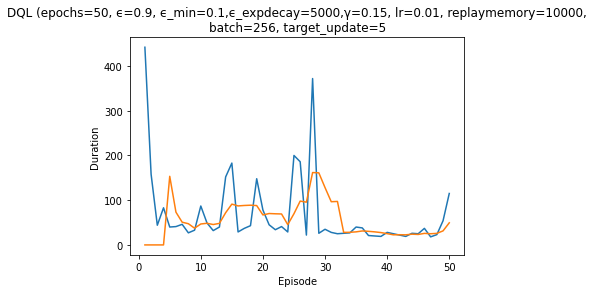

In [14]:
best_dqn_4 = learner.epsilon_greedy_search(
    cyberbattle_gym_env=cyberbattlechain_4,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.15,
        replay_memory_size=10000,
        target_update=5,
        batch_size=256,
        learning_rate=0.01),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="DQL"
)

###### One shot on CyberBattleChain-20 - Trained on CyberBattleChain-10
Learning with: episode_count=10,iteration_count=9000,ϵ=0.0,ϵ_min=0.0, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-10' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  336.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  436.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  436.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  445.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  545.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  545.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  554.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  554.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  654.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  654.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  663.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  663.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  763.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  763.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  772.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  772.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  872.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  872.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  881.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  881.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  981.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  981.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  990.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  990.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward: 1090.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward: 1090.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward: 1099.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward: 1099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward: 1199.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward: 1199.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward: 1208.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward: 1208.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward: 1308.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward: 1308.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward: 1317.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward: 1317.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward: 1417.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward: 1417.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward: 1426.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward: 1426.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward: 1526.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward: 1526.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward: 1535.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward: 1535.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward: 1635.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward: 1635.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 31|reward: 1644.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 31|reward: 1644.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 1|Iteration 32|reward: 1744.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 1|Iteration 32|reward: 1744.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 1|Iteration 33|reward: 1753.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 1|Iteration 33|reward: 1753.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 1|Iteration 34|reward: 1853.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 1|Iteration 34|reward: 1853.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 1|Iteration 35|reward: 1862.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 1|Iteration 35|reward: 1862.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward: 1962.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward: 1962.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 37|reward: 1971.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 37|reward: 1971.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward: 2071.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward: 2071.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward: 2080.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward: 2080.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward: 2180.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward: 2180.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 41|reward: 2189.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 41|reward: 2189.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 1|Iteration 42|reward: 7189.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 1|Iteration 42|reward: 7189.0|last_reward_at:   42|Elapsed Time: 0:00:00||

  Episode 1 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 21/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 2/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-10' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  336.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  436.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  436.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  445.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  545.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  545.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  554.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  554.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  654.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  654.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  663.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  663.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  763.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  763.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  772.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  772.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  872.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  872.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  881.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  881.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  981.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  981.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  990.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  990.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward: 1090.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward: 1090.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward: 1099.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward: 1099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward: 1199.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward: 1199.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward: 1208.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward: 1208.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward: 1308.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward: 1308.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward: 1317.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward: 1317.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward: 1417.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward: 1417.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward: 1426.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward: 1426.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward: 1526.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward: 1526.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward: 1535.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward: 1535.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward: 1635.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward: 1635.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward: 1644.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward: 1644.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward: 1744.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward: 1744.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 33|reward: 1753.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 33|reward: 1753.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward: 1853.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward: 1853.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward: 1862.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward: 1862.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward: 1962.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward: 1962.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 37|reward: 1971.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 37|reward: 1971.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward: 2071.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward: 2071.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward: 2080.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward: 2080.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward: 2180.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward: 2180.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 2|Iteration 41|reward: 2189.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 2|Iteration 41|reward: 2189.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 2|Iteration 42|reward: 7189.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 2|Iteration 42|reward: 7189.0|last_reward_at:   42|Elapsed Time: 0:00:00||

  Episode 2 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 21/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 3/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-10' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  336.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  436.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  436.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  445.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  545.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  545.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  554.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  554.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  654.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  654.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  663.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  663.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  763.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  763.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  772.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  772.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  872.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  872.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  881.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  881.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  981.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  981.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  990.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  990.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward: 1090.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward: 1090.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward: 1099.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward: 1099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward: 1199.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward: 1199.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward: 1208.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward: 1208.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward: 1308.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward: 1308.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward: 1317.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward: 1317.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward: 1417.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward: 1417.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward: 1426.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward: 1426.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward: 1526.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward: 1526.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward: 1535.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward: 1535.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward: 1635.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward: 1635.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward: 1644.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward: 1644.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward: 1744.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward: 1744.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward: 1753.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward: 1753.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 34|reward: 1853.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 34|reward: 1853.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward: 1862.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward: 1862.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 36|reward: 1962.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 36|reward: 1962.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 3|Iteration 37|reward: 1971.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 3|Iteration 37|reward: 1971.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward: 2071.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward: 2071.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward: 2080.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward: 2080.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 40|reward: 2180.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 40|reward: 2180.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward: 2189.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward: 2189.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward: 7189.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward: 7189.0|last_reward_at:   42|Elapsed Time: 0:00:00||

  Episode 3 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 21/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 4/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-10' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  336.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  436.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  436.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  445.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  545.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  545.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  554.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  554.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  654.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  654.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  663.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  663.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  763.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  763.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  772.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  772.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  872.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  872.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  881.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  881.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  981.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  981.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  990.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  990.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward: 1090.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward: 1090.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward: 1099.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward: 1099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward: 1199.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward: 1199.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward: 1208.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward: 1208.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward: 1308.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward: 1308.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 25|reward: 1317.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 25|reward: 1317.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward: 1417.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward: 1417.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward: 1426.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward: 1426.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward: 1526.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward: 1526.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward: 1535.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward: 1535.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward: 1635.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward: 1635.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward: 1644.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward: 1644.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward: 1744.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward: 1744.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward: 1753.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward: 1753.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward: 1853.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward: 1853.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward: 1862.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward: 1862.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward: 1962.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward: 1962.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward: 1971.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward: 1971.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward: 2071.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward: 2071.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 39|reward: 2080.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 39|reward: 2080.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward: 2180.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward: 2180.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 4|Iteration 41|reward: 2189.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 4|Iteration 41|reward: 2189.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 4|Iteration 42|reward: 7189.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 4|Iteration 42|reward: 7189.0|last_reward_at:   42|Elapsed Time: 0:00:00||

  Episode 4 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 21/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 5/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-10' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  336.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  436.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  436.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  445.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  545.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  545.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  554.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  554.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  654.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  654.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  663.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  663.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  763.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  763.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  772.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  772.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  872.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  872.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  881.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  881.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  981.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  981.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  990.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  990.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward: 1090.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward: 1090.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward: 1099.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward: 1099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward: 1199.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward: 1199.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward: 1208.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward: 1208.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward: 1308.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward: 1308.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward: 1317.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward: 1317.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward: 1417.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward: 1417.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward: 1426.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward: 1426.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward: 1526.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward: 1526.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 29|reward: 1535.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 29|reward: 1535.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward: 1635.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward: 1635.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward: 1644.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward: 1644.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward: 1744.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward: 1744.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 5|Iteration 33|reward: 1753.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 5|Iteration 33|reward: 1753.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward: 1853.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward: 1853.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward: 1862.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward: 1862.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward: 1962.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward: 1962.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward: 1971.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward: 1971.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward: 2071.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward: 2071.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 39|reward: 2080.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 39|reward: 2080.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward: 2180.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward: 2180.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 41|reward: 2189.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 41|reward: 2189.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 5|Iteration 42|reward: 7189.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 5|Iteration 42|reward: 7189.0|last_reward_at:   42|Elapsed Time: 0:00:00||

  Episode 5 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 21/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 6/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-10' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:  336.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  436.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  436.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:  445.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:  545.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:  545.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:  554.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:  554.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  654.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  654.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  663.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  663.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  763.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  763.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:  772.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:  772.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 16|reward:  872.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 16|reward:  872.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 6|Iteration 17|reward:  881.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 6|Iteration 17|reward:  881.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:  981.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:  981.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 19|reward:  990.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 19|reward:  990.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 20|reward: 1090.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 20|reward: 1090.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward: 1099.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward: 1099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 22|reward: 1199.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 22|reward: 1199.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 6|Iteration 23|reward: 1208.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 6|Iteration 23|reward: 1208.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 6|Iteration 24|reward: 1308.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 6|Iteration 24|reward: 1308.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 25|reward: 1317.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 25|reward: 1317.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward: 1417.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward: 1417.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 27|reward: 1426.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 27|reward: 1426.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward: 1526.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward: 1526.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 29|reward: 1535.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 29|reward: 1535.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 6|Iteration 30|reward: 1635.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 6|Iteration 30|reward: 1635.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 6|Iteration 31|reward: 1644.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 6|Iteration 31|reward: 1644.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 6|Iteration 32|reward: 1744.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 6|Iteration 32|reward: 1744.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 6|Iteration 33|reward: 1753.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 6|Iteration 33|reward: 1753.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 6|Iteration 34|reward: 1853.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 6|Iteration 34|reward: 1853.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 6|Iteration 35|reward: 1862.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 6|Iteration 35|reward: 1862.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 6|Iteration 36|reward: 1962.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 6|Iteration 36|reward: 1962.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 6|Iteration 37|reward: 1971.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 6|Iteration 37|reward: 1971.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 6|Iteration 38|reward: 2071.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 6|Iteration 38|reward: 2071.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 6|Iteration 39|reward: 2080.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 6|Iteration 39|reward: 2080.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 6|Iteration 40|reward: 2180.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 6|Iteration 40|reward: 2180.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 6|Iteration 41|reward: 2189.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 6|Iteration 41|reward: 2189.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 6|Iteration 42|reward: 7189.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 6|Iteration 42|reward: 7189.0|last_reward_at:   42|Elapsed Time: 0:00:00||

  Episode 6 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 21/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 7/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-10' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:  336.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  436.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  436.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  445.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 10|reward:  545.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 10|reward:  545.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  554.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  554.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:  654.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:  654.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:  663.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:  663.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:  763.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:  763.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:  772.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:  772.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:  872.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:  872.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 17|reward:  881.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 17|reward:  881.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 18|reward:  981.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 18|reward:  981.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 19|reward:  990.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 19|reward:  990.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 7|Iteration 20|reward: 1090.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 7|Iteration 20|reward: 1090.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward: 1099.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward: 1099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 22|reward: 1199.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 22|reward: 1199.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 7|Iteration 23|reward: 1208.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 7|Iteration 23|reward: 1208.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 7|Iteration 24|reward: 1308.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 7|Iteration 24|reward: 1308.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 7|Iteration 25|reward: 1317.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 7|Iteration 25|reward: 1317.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 7|Iteration 26|reward: 1417.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 7|Iteration 26|reward: 1417.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 7|Iteration 27|reward: 1426.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 7|Iteration 27|reward: 1426.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 7|Iteration 28|reward: 1526.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 7|Iteration 28|reward: 1526.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 7|Iteration 29|reward: 1535.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 7|Iteration 29|reward: 1535.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 7|Iteration 30|reward: 1635.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 7|Iteration 30|reward: 1635.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward: 1644.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward: 1644.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 7|Iteration 32|reward: 1744.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 7|Iteration 32|reward: 1744.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 7|Iteration 33|reward: 1753.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 7|Iteration 33|reward: 1753.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 7|Iteration 34|reward: 1853.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 7|Iteration 34|reward: 1853.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 7|Iteration 35|reward: 1862.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 7|Iteration 35|reward: 1862.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 7|Iteration 36|reward: 1962.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 7|Iteration 36|reward: 1962.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward: 1971.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward: 1971.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 38|reward: 2071.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 38|reward: 2071.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 7|Iteration 39|reward: 2080.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 7|Iteration 39|reward: 2080.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 7|Iteration 40|reward: 2180.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 7|Iteration 40|reward: 2180.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 41|reward: 2189.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 41|reward: 2189.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 7|Iteration 42|reward: 7189.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 7|Iteration 42|reward: 7189.0|last_reward_at:   42|Elapsed Time: 0:00:00||

  Episode 7 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 21/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 8/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-10' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward:  336.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  436.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  436.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:  445.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  545.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  545.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  554.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  554.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:  654.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:  654.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  663.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  663.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:  763.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:  763.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:  772.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:  772.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  872.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  872.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:  881.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:  881.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:  981.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:  981.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:  990.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:  990.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward: 1090.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward: 1090.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward: 1099.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward: 1099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 22|reward: 1199.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 22|reward: 1199.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 8|Iteration 23|reward: 1208.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 8|Iteration 23|reward: 1208.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 8|Iteration 24|reward: 1308.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 8|Iteration 24|reward: 1308.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward: 1317.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward: 1317.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward: 1417.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward: 1417.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward: 1426.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward: 1426.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 28|reward: 1526.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 28|reward: 1526.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 8|Iteration 29|reward: 1535.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 8|Iteration 29|reward: 1535.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 8|Iteration 30|reward: 1635.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 8|Iteration 30|reward: 1635.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 8|Iteration 31|reward: 1644.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 8|Iteration 31|reward: 1644.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 32|reward: 1744.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 32|reward: 1744.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 33|reward: 1753.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 33|reward: 1753.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 8|Iteration 34|reward: 1853.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 8|Iteration 34|reward: 1853.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 8|Iteration 35|reward: 1862.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 8|Iteration 35|reward: 1862.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 8|Iteration 36|reward: 1962.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 8|Iteration 36|reward: 1962.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 8|Iteration 37|reward: 1971.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 8|Iteration 37|reward: 1971.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 8|Iteration 38|reward: 2071.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 8|Iteration 38|reward: 2071.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 8|Iteration 39|reward: 2080.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 8|Iteration 39|reward: 2080.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 40|reward: 2180.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 40|reward: 2180.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 8|Iteration 41|reward: 2189.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 8|Iteration 41|reward: 2189.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 8|Iteration 42|reward: 7189.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 8|Iteration 42|reward: 7189.0|last_reward_at:   42|Elapsed Time: 0:00:00||

  Episode 8 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 21/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 9/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-10' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:  336.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  436.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  436.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  445.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  545.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  545.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  554.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  554.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  654.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  654.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  663.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  663.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  763.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  763.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:  772.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:  772.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward:  872.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward:  872.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  878.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  878.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward:  887.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward:  887.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:  987.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:  987.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:  996.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:  996.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward: 1096.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward: 1096.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward: 1105.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward: 1105.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 23|reward: 1205.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 23|reward: 1205.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 9|Iteration 24|reward: 1214.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 9|Iteration 24|reward: 1214.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 9|Iteration 25|reward: 1314.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 9|Iteration 25|reward: 1314.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 9|Iteration 26|reward: 1323.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 9|Iteration 26|reward: 1323.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 27|reward: 1423.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 27|reward: 1423.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 9|Iteration 28|reward: 1432.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 9|Iteration 28|reward: 1432.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 9|Iteration 29|reward: 1532.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 9|Iteration 29|reward: 1532.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward: 1541.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward: 1541.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 9|Iteration 31|reward: 1641.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 9|Iteration 31|reward: 1641.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 32|reward: 1650.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 32|reward: 1650.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 9|Iteration 33|reward: 1750.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 9|Iteration 33|reward: 1750.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 9|Iteration 34|reward: 1759.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 9|Iteration 34|reward: 1759.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 9|Iteration 35|reward: 1859.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 9|Iteration 35|reward: 1859.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 9|Iteration 36|reward: 1865.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 9|Iteration 36|reward: 1865.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward: 1874.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward: 1874.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward: 1974.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward: 1974.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 39|reward: 1983.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 39|reward: 1983.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 40|reward: 2083.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 40|reward: 2083.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 9|Iteration 41|reward: 2092.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 9|Iteration 41|reward: 2092.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 9|Iteration 42|reward: 2192.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 9|Iteration 42|reward: 2192.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 9|Iteration 43|reward: 2201.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 9|Iteration 43|reward: 2201.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 9|Iteration 44|reward: 7201.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 9|Iteration 44|reward: 7201.0|last_reward_at:   44|Elapsed Time: 0:00:00||

  Episode 9 ended at t=44 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 23/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 10/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-10' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:  336.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:  436.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:  436.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 9|reward:  445.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 9|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 10|Iteration 10|reward:  545.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 10|Iteration 10|reward:  545.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 10|Iteration 11|reward:  554.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 10|Iteration 11|reward:  554.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:  654.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:  654.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:  663.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:  663.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:  763.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:  763.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:  772.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:  772.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:  872.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:  872.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:  881.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:  881.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 18|reward:  981.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 18|reward:  981.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 10|Iteration 19|reward:  990.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 10|Iteration 19|reward:  990.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 10|Iteration 20|reward: 1090.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 10|Iteration 20|reward: 1090.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 10|Iteration 21|reward: 1096.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 10|Iteration 21|reward: 1096.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 22|reward: 1105.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 22|reward: 1105.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 10|Iteration 23|reward: 1205.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 10|Iteration 23|reward: 1205.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 10|Iteration 24|reward: 1214.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 10|Iteration 24|reward: 1214.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 10|Iteration 25|reward: 1314.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 10|Iteration 25|reward: 1314.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 10|Iteration 26|reward: 1323.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 10|Iteration 26|reward: 1323.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 10|Iteration 27|reward: 1423.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 10|Iteration 27|reward: 1423.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 10|Iteration 28|reward: 1429.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 10|Iteration 28|reward: 1429.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 10|Iteration 29|reward: 1438.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 10|Iteration 29|reward: 1438.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 10|Iteration 30|reward: 1538.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 10|Iteration 30|reward: 1538.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 10|Iteration 31|reward: 1547.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 10|Iteration 31|reward: 1547.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 10|Iteration 32|reward: 1647.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 10|Iteration 32|reward: 1647.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 10|Iteration 33|reward: 1656.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 10|Iteration 33|reward: 1656.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 10|Iteration 34|reward: 1756.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 10|Iteration 34|reward: 1756.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 10|Iteration 35|reward: 1762.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 10|Iteration 35|reward: 1762.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 10|Iteration 36|reward: 1771.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 10|Iteration 36|reward: 1771.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 37|reward: 1871.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 37|reward: 1871.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 10|Iteration 38|reward: 1877.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 10|Iteration 38|reward: 1877.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 10|Iteration 39|reward: 1886.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 10|Iteration 39|reward: 1886.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 10|Iteration 40|reward: 1986.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 10|Iteration 40|reward: 1986.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 10|Iteration 41|reward: 1992.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 10|Iteration 41|reward: 1992.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 10|Iteration 42|reward: 2001.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 10|Iteration 42|reward: 2001.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 10|Iteration 43|reward: 2101.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 10|Iteration 43|reward: 2101.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 10|Iteration 44|reward: 2110.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 10|Iteration 44|reward: 2110.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 10|Iteration 45|reward: 2210.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 10|Iteration 45|reward: 2210.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 10|Iteration 46|reward: 2219.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 10|Iteration 46|reward: 2219.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 10|Iteration 47|reward: 7219.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 10|Iteration 47|reward: 7219.0|last_reward_at:   47|Elapsed Time: 0:00:00||

  Episode 10 ended at t=47 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 26/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 0
simulation ended


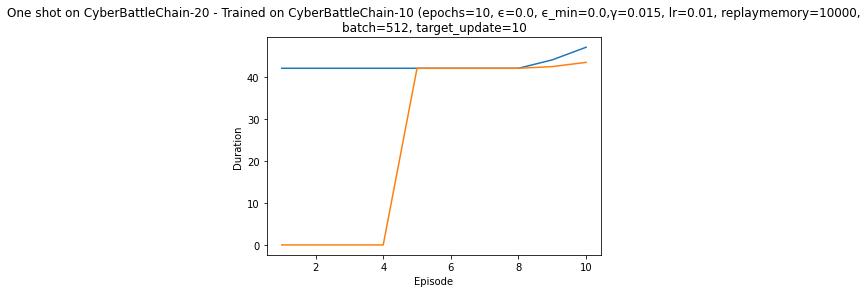

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=9000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:    9.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:   13.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:   13.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward:  113.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward:  113.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  115.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  115.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 34|reward:  124.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 34|reward:  124.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 1|Iteration 35|reward:  130.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 1|Iteration 35|reward:  130.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 1|Iteration 37|reward:  138.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 1|Iteration 37|reward:  138.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 1|Iteration 52|reward:  238.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 1|Iteration 52|reward:  238.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 1|Iteration 60|reward:  247.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 1|Iteration 60|reward:  247.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 1|Iteration 65|reward:  251.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 1|Iteration 65|reward:  251.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 1|Iteration 71|reward:  351.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 1|Iteration 71|reward:  351.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 74|reward:  353.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 74|reward:  353.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 1|Iteration 78|reward:  362.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 1|Iteration 78|reward:  362.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 1|Iteration 86|reward:  462.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 1|Iteration 86|reward:  462.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 1|Iteration 89|reward:  468.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 1|Iteration 89|reward:  468.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 1|Iteration 97|reward:  477.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 1|Iteration 97|reward:  477.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 1|Iteration 98|reward:  483.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 1|Iteration 98|reward:  483.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 1|Iteration 99|reward:  489.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 1|Iteration 99|reward:  489.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 1|Iteration 100|reward:  493.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 1|Iteration 100|reward:  493.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 1|Iteration 102|reward:  593.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 1|Iteration 102|reward:  593.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 1|Iteration 103|reward:  599.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 1|Iteration 103|reward:  599.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 1|Iteration 106|reward:  605.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 1|Iteration 106|reward:  605.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 1|Iteration 107|reward:  607.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 1|Iteration 107|reward:  607.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 1|Iteration 126|reward:  607.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 1|Iteration 128|reward:  613.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 1|Iteration 128|reward:  613.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 1|Iteration 147|reward:  613.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 1|Iteration 155|reward:  621.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 1|Iteration 155|reward:  621.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 1|Iteration 172|reward:  621.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 1|Iteration 191|reward:  621.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 1|Iteration 203|reward:  627.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 1|Iteration 203|reward:  627.0|last_reward_at:  203|Elapsed Time: 0:00:01||

Episode 1|Iteration 205|reward:  636.0|last_reward_at:  203|Elapsed Time: 0:00:01||

Episode 1|Iteration 205|reward:  636.0|last_reward_at:  205|Elapsed Time: 0:00:01||

Episode 1|Iteration 215|reward:  736.0|last_reward_at:  205|Elapsed Time: 0:00:01||

Episode 1|Iteration 215|reward:  736.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 1|Iteration 220|reward:  742.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 1|Iteration 220|reward:  742.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 1|Iteration 239|reward:  742.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 1|Iteration 257|reward:  742.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 1|Iteration 266|reward:  748.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 1|Iteration 266|reward:  748.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 1|Iteration 267|reward:  750.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 1|Iteration 267|reward:  750.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 1|Iteration 286|reward:  750.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 1|Iteration 303|reward:  750.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 1|Iteration 321|reward:  750.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 1|Iteration 332|reward:  754.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 1|Iteration 332|reward:  754.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 1|Iteration 343|reward:  763.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 1|Iteration 343|reward:  763.0|last_reward_at:  343|Elapsed Time: 0:00:01||

Episode 1|Iteration 362|reward:  763.0|last_reward_at:  343|Elapsed Time: 0:00:01||

Episode 1|Iteration 381|reward:  763.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 1|Iteration 390|reward:  863.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 1|Iteration 390|reward:  863.0|last_reward_at:  390|Elapsed Time: 0:00:02||

Episode 1|Iteration 398|reward:  872.0|last_reward_at:  390|Elapsed Time: 0:00:02||

Episode 1|Iteration 398|reward:  872.0|last_reward_at:  398|Elapsed Time: 0:00:02||

Episode 1|Iteration 404|reward:  880.0|last_reward_at:  398|Elapsed Time: 0:00:02||

Episode 1|Iteration 404|reward:  880.0|last_reward_at:  404|Elapsed Time: 0:00:02||

Episode 1|Iteration 406|reward:  886.0|last_reward_at:  404|Elapsed Time: 0:00:02||

Episode 1|Iteration 406|reward:  886.0|last_reward_at:  406|Elapsed Time: 0:00:02||

Episode 1|Iteration 411|reward:  986.0|last_reward_at:  406|Elapsed Time: 0:00:02||

Episode 1|Iteration 411|reward:  986.0|last_reward_at:  411|Elapsed Time: 0:00:02||

Episode 1|Iteration 429|reward:  986.0|last_reward_at:  411|Elapsed Time: 0:00:02||

Episode 1|Iteration 431|reward:  992.0|last_reward_at:  411|Elapsed Time: 0:00:02||

Episode 1|Iteration 431|reward:  992.0|last_reward_at:  431|Elapsed Time: 0:00:02||

Episode 1|Iteration 432|reward: 1001.0|last_reward_at:  431|Elapsed Time: 0:00:02||

Episode 1|Iteration 432|reward: 1001.0|last_reward_at:  432|Elapsed Time: 0:00:02||

Episode 1|Iteration 436|reward: 1101.0|last_reward_at:  432|Elapsed Time: 0:00:02||

Episode 1|Iteration 436|reward: 1101.0|last_reward_at:  436|Elapsed Time: 0:00:02||

Episode 1|Iteration 453|reward: 1101.0|last_reward_at:  436|Elapsed Time: 0:00:02||

Episode 1|Iteration 454|reward: 1103.0|last_reward_at:  436|Elapsed Time: 0:00:02||

Episode 1|Iteration 454|reward: 1103.0|last_reward_at:  454|Elapsed Time: 0:00:02||

Episode 1|Iteration 472|reward: 1103.0|last_reward_at:  454|Elapsed Time: 0:00:02||

Episode 1|Iteration 485|reward: 1112.0|last_reward_at:  454|Elapsed Time: 0:00:02||

Episode 1|Iteration 485|reward: 1112.0|last_reward_at:  485|Elapsed Time: 0:00:02||

Episode 1|Iteration 489|reward: 1212.0|last_reward_at:  485|Elapsed Time: 0:00:02||

Episode 1|Iteration 489|reward: 1212.0|last_reward_at:  489|Elapsed Time: 0:00:02||

Episode 1|Iteration 491|reward: 1221.0|last_reward_at:  489|Elapsed Time: 0:00:02||

Episode 1|Iteration 491|reward: 1221.0|last_reward_at:  491|Elapsed Time: 0:00:02||

Episode 1|Iteration 495|reward: 1321.0|last_reward_at:  491|Elapsed Time: 0:00:02||

Episode 1|Iteration 495|reward: 1321.0|last_reward_at:  495|Elapsed Time: 0:00:02||

Episode 1|Iteration 496|reward: 1323.0|last_reward_at:  495|Elapsed Time: 0:00:02||

Episode 1|Iteration 496|reward: 1323.0|last_reward_at:  496|Elapsed Time: 0:00:02||

Episode 1|Iteration 498|reward: 1329.0|last_reward_at:  496|Elapsed Time: 0:00:02||

Episode 1|Iteration 498|reward: 1329.0|last_reward_at:  498|Elapsed Time: 0:00:02||

Episode 1|Iteration 505|reward: 1331.0|last_reward_at:  498|Elapsed Time: 0:00:02||

Episode 1|Iteration 505|reward: 1331.0|last_reward_at:  505|Elapsed Time: 0:00:02||

Episode 1|Iteration 509|reward: 1337.0|last_reward_at:  505|Elapsed Time: 0:00:02||

Episode 1|Iteration 509|reward: 1337.0|last_reward_at:  509|Elapsed Time: 0:00:02||

Episode 1|Iteration 512|reward: 1343.0|last_reward_at:  509|Elapsed Time: 0:00:02||

Episode 1|Iteration 512|reward: 1343.0|last_reward_at:  512|Elapsed Time: 0:00:02||

Episode 1|Iteration 514|reward: 1349.0|last_reward_at:  512|Elapsed Time: 0:00:02||

Episode 1|Iteration 514|reward: 1349.0|last_reward_at:  514|Elapsed Time: 0:00:02||

Episode 1|Iteration 515|reward: 1355.0|last_reward_at:  514|Elapsed Time: 0:00:02||

Episode 1|Iteration 515|reward: 1355.0|last_reward_at:  515|Elapsed Time: 0:00:02||

Episode 1|Iteration 525|reward: 1361.0|last_reward_at:  515|Elapsed Time: 0:00:02||

Episode 1|Iteration 525|reward: 1361.0|last_reward_at:  525|Elapsed Time: 0:00:02||

Episode 1|Iteration 526|reward: 1363.0|last_reward_at:  525|Elapsed Time: 0:00:02||

Episode 1|Iteration 526|reward: 1363.0|last_reward_at:  526|Elapsed Time: 0:00:02||

Episode 1|Iteration 532|reward: 1372.0|last_reward_at:  526|Elapsed Time: 0:00:03||

Episode 1|Iteration 532|reward: 1372.0|last_reward_at:  532|Elapsed Time: 0:00:03||

Episode 1|Iteration 539|reward: 1472.0|last_reward_at:  532|Elapsed Time: 0:00:03||

Episode 1|Iteration 539|reward: 1472.0|last_reward_at:  539|Elapsed Time: 0:00:03||

Episode 1|Iteration 555|reward: 1472.0|last_reward_at:  539|Elapsed Time: 0:00:03||

Episode 1|Iteration 556|reward: 1478.0|last_reward_at:  539|Elapsed Time: 0:00:03||

Episode 1|Iteration 556|reward: 1478.0|last_reward_at:  556|Elapsed Time: 0:00:03||

Episode 1|Iteration 570|reward: 1478.0|last_reward_at:  556|Elapsed Time: 0:00:03||

Episode 1|Iteration 575|reward: 1484.0|last_reward_at:  556|Elapsed Time: 0:00:03||

Episode 1|Iteration 575|reward: 1484.0|last_reward_at:  575|Elapsed Time: 0:00:03||

Episode 1|Iteration 589|reward: 1488.0|last_reward_at:  575|Elapsed Time: 0:00:03||

Episode 1|Iteration 589|reward: 1488.0|last_reward_at:  589|Elapsed Time: 0:00:03||

Episode 1|Iteration 604|reward: 1488.0|last_reward_at:  589|Elapsed Time: 0:00:03||

Episode 1|Iteration 605|reward: 1490.0|last_reward_at:  589|Elapsed Time: 0:00:03||

Episode 1|Iteration 605|reward: 1490.0|last_reward_at:  605|Elapsed Time: 0:00:03||

Episode 1|Iteration 619|reward: 1490.0|last_reward_at:  605|Elapsed Time: 0:00:03||

Episode 1|Iteration 630|reward: 1499.0|last_reward_at:  605|Elapsed Time: 0:00:03||

Episode 1|Iteration 630|reward: 1499.0|last_reward_at:  630|Elapsed Time: 0:00:03||

Episode 1|Iteration 642|reward: 1499.0|last_reward_at:  630|Elapsed Time: 0:00:03||

Episode 1|Iteration 647|reward: 1599.0|last_reward_at:  630|Elapsed Time: 0:00:03||

Episode 1|Iteration 647|reward: 1599.0|last_reward_at:  647|Elapsed Time: 0:00:03||

Episode 1|Iteration 658|reward: 1599.0|last_reward_at:  647|Elapsed Time: 0:00:03||

Episode 1|Iteration 672|reward: 1599.0|last_reward_at:  647|Elapsed Time: 0:00:04||

Episode 1|Iteration 684|reward: 1599.0|last_reward_at:  647|Elapsed Time: 0:00:04||

Episode 1|Iteration 684|reward: 1608.0|last_reward_at:  647|Elapsed Time: 0:00:04||

Episode 1|Iteration 684|reward: 1608.0|last_reward_at:  684|Elapsed Time: 0:00:04||

Episode 1|Iteration 694|reward: 1708.0|last_reward_at:  684|Elapsed Time: 0:00:04||

Episode 1|Iteration 694|reward: 1708.0|last_reward_at:  694|Elapsed Time: 0:00:04||

Episode 1|Iteration 696|reward: 1714.0|last_reward_at:  694|Elapsed Time: 0:00:04||

Episode 1|Iteration 696|reward: 1714.0|last_reward_at:  696|Elapsed Time: 0:00:04||

Episode 1|Iteration 710|reward: 1714.0|last_reward_at:  696|Elapsed Time: 0:00:04||

Episode 1|Iteration 724|reward: 1714.0|last_reward_at:  696|Elapsed Time: 0:00:04||

Episode 1|Iteration 734|reward: 1720.0|last_reward_at:  696|Elapsed Time: 0:00:04||

Episode 1|Iteration 734|reward: 1720.0|last_reward_at:  734|Elapsed Time: 0:00:04||

Episode 1|Iteration 745|reward: 1726.0|last_reward_at:  734|Elapsed Time: 0:00:04||

Episode 1|Iteration 745|reward: 1726.0|last_reward_at:  745|Elapsed Time: 0:00:04||

Episode 1|Iteration 757|reward: 1726.0|last_reward_at:  745|Elapsed Time: 0:00:04||

Episode 1|Iteration 771|reward: 1726.0|last_reward_at:  745|Elapsed Time: 0:00:04||

Episode 1|Iteration 782|reward: 1732.0|last_reward_at:  745|Elapsed Time: 0:00:04||

Episode 1|Iteration 782|reward: 1732.0|last_reward_at:  782|Elapsed Time: 0:00:04||

Episode 1|Iteration 786|reward: 1738.0|last_reward_at:  782|Elapsed Time: 0:00:04||

Episode 1|Iteration 786|reward: 1738.0|last_reward_at:  786|Elapsed Time: 0:00:04||

Episode 1|Iteration 798|reward: 1738.0|last_reward_at:  786|Elapsed Time: 0:00:05||

Episode 1|Iteration 801|reward: 1740.0|last_reward_at:  786|Elapsed Time: 0:00:05||

Episode 1|Iteration 801|reward: 1740.0|last_reward_at:  801|Elapsed Time: 0:00:05||

Episode 1|Iteration 814|reward: 1740.0|last_reward_at:  801|Elapsed Time: 0:00:05||

Episode 1|Iteration 828|reward: 1740.0|last_reward_at:  801|Elapsed Time: 0:00:05||

Episode 1|Iteration 840|reward: 1740.0|last_reward_at:  801|Elapsed Time: 0:00:05||

Episode 1|Iteration 852|reward: 1740.0|last_reward_at:  801|Elapsed Time: 0:00:05||

Episode 1|Iteration 855|reward: 1744.0|last_reward_at:  801|Elapsed Time: 0:00:05||

Episode 1|Iteration 855|reward: 1744.0|last_reward_at:  855|Elapsed Time: 0:00:05||

Episode 1|Iteration 867|reward: 1744.0|last_reward_at:  855|Elapsed Time: 0:00:05||

Episode 1|Iteration 879|reward: 1744.0|last_reward_at:  855|Elapsed Time: 0:00:05||

Episode 1|Iteration 891|reward: 1744.0|last_reward_at:  855|Elapsed Time: 0:00:05||

Episode 1|Iteration 904|reward: 1744.0|last_reward_at:  855|Elapsed Time: 0:00:05||

Episode 1|Iteration 912|reward: 1744.0|last_reward_at:  855|Elapsed Time: 0:00:05||

Episode 1|Iteration 924|reward: 1744.0|last_reward_at:  855|Elapsed Time: 0:00:06||

Episode 1|Iteration 936|reward: 1744.0|last_reward_at:  855|Elapsed Time: 0:00:06||

Episode 1|Iteration 949|reward: 1744.0|last_reward_at:  855|Elapsed Time: 0:00:06||

Episode 1|Iteration 962|reward: 1744.0|last_reward_at:  855|Elapsed Time: 0:00:06||

Episode 1|Iteration 975|reward: 1744.0|last_reward_at:  855|Elapsed Time: 0:00:06||

Episode 1|Iteration 988|reward: 1744.0|last_reward_at:  855|Elapsed Time: 0:00:06||

Episode 1|Iteration 1001|reward: 1744.0|last_reward_at:  855|Elapsed Time: 0:00:06||

Episode 1|Iteration 1014|reward: 1744.0|last_reward_at:  855|Elapsed Time: 0:00:06||

Episode 1|Iteration 1026|reward: 1744.0|last_reward_at:  855|Elapsed Time: 0:00:06||

Episode 1|Iteration 1036|reward: 1744.0|last_reward_at:  855|Elapsed Time: 0:00:06||

Episode 1|Iteration 1050|reward: 1744.0|last_reward_at:  855|Elapsed Time: 0:00:07||

Episode 1|Iteration 1064|reward: 1744.0|last_reward_at:  855|Elapsed Time: 0:00:07||

Episode 1|Iteration 1077|reward: 1744.0|last_reward_at:  855|Elapsed Time: 0:00:07||

Episode 1|Iteration 1089|reward: 1744.0|last_reward_at:  855|Elapsed Time: 0:00:07||

Episode 1|Iteration 1101|reward: 1744.0|last_reward_at:  855|Elapsed Time: 0:00:07||

Episode 1|Iteration 1113|reward: 1744.0|last_reward_at:  855|Elapsed Time: 0:00:07||

Episode 1|Iteration 1125|reward: 1744.0|last_reward_at:  855|Elapsed Time: 0:00:07||

Episode 1|Iteration 1138|reward: 1744.0|last_reward_at:  855|Elapsed Time: 0:00:07||

Episode 1|Iteration 1151|reward: 1744.0|last_reward_at:  855|Elapsed Time: 0:00:07||

Episode 1|Iteration 1164|reward: 1744.0|last_reward_at:  855|Elapsed Time: 0:00:08||

Episode 1|Iteration 1177|reward: 1744.0|last_reward_at:  855|Elapsed Time: 0:00:08||

Episode 1|Iteration 1184|reward: 1753.0|last_reward_at:  855|Elapsed Time: 0:00:08||

Episode 1|Iteration 1184|reward: 1753.0|last_reward_at: 1184|Elapsed Time: 0:00:08||

Episode 1|Iteration 1191|reward: 1853.0|last_reward_at: 1184|Elapsed Time: 0:00:08||

Episode 1|Iteration 1191|reward: 1853.0|last_reward_at: 1191|Elapsed Time: 0:00:08||

Episode 1|Iteration 1203|reward: 1853.0|last_reward_at: 1191|Elapsed Time: 0:00:08||

Episode 1|Iteration 1211|reward: 1862.0|last_reward_at: 1191|Elapsed Time: 0:00:08||

Episode 1|Iteration 1211|reward: 1862.0|last_reward_at: 1211|Elapsed Time: 0:00:08||

Episode 1|Iteration 1217|reward: 1962.0|last_reward_at: 1211|Elapsed Time: 0:00:08||

Episode 1|Iteration 1217|reward: 1962.0|last_reward_at: 1217|Elapsed Time: 0:00:08||

Episode 1|Iteration 1229|reward: 1962.0|last_reward_at: 1217|Elapsed Time: 0:00:08||

Episode 1|Iteration 1242|reward: 1962.0|last_reward_at: 1217|Elapsed Time: 0:00:08||

Episode 1|Iteration 1254|reward: 1962.0|last_reward_at: 1217|Elapsed Time: 0:00:08||

Episode 1|Iteration 1265|reward: 1962.0|last_reward_at: 1217|Elapsed Time: 0:00:08||

Episode 1|Iteration 1273|reward: 1968.0|last_reward_at: 1217|Elapsed Time: 0:00:08||

Episode 1|Iteration 1273|reward: 1968.0|last_reward_at: 1273|Elapsed Time: 0:00:08||

Episode 1|Iteration 1277|reward: 1977.0|last_reward_at: 1273|Elapsed Time: 0:00:08||

Episode 1|Iteration 1277|reward: 1977.0|last_reward_at: 1277|Elapsed Time: 0:00:09||

Episode 1|Iteration 1281|reward: 2077.0|last_reward_at: 1277|Elapsed Time: 0:00:09||

Episode 1|Iteration 1281|reward: 2077.0|last_reward_at: 1281|Elapsed Time: 0:00:09||

Episode 1|Iteration 1293|reward: 2077.0|last_reward_at: 1281|Elapsed Time: 0:00:09||

Episode 1|Iteration 1305|reward: 2077.0|last_reward_at: 1281|Elapsed Time: 0:00:09||

Episode 1|Iteration 1316|reward: 2079.0|last_reward_at: 1281|Elapsed Time: 0:00:09||

Episode 1|Iteration 1316|reward: 2079.0|last_reward_at: 1316|Elapsed Time: 0:00:09||

Episode 1|Iteration 1328|reward: 2079.0|last_reward_at: 1316|Elapsed Time: 0:00:09||

Episode 1|Iteration 1339|reward: 2079.0|last_reward_at: 1316|Elapsed Time: 0:00:09||

Episode 1|Iteration 1349|reward: 2085.0|last_reward_at: 1316|Elapsed Time: 0:00:09||

Episode 1|Iteration 1349|reward: 2085.0|last_reward_at: 1349|Elapsed Time: 0:00:09||

Episode 1|Iteration 1361|reward: 2085.0|last_reward_at: 1349|Elapsed Time: 0:00:09||

Episode 1|Iteration 1368|reward: 2085.0|last_reward_at: 1349|Elapsed Time: 0:00:09||

Episode 1|Iteration 1372|reward: 2087.0|last_reward_at: 1349|Elapsed Time: 0:00:09||

Episode 1|Iteration 1372|reward: 2087.0|last_reward_at: 1372|Elapsed Time: 0:00:09||

Episode 1|Iteration 1383|reward: 2087.0|last_reward_at: 1372|Elapsed Time: 0:00:09||

Episode 1|Iteration 1395|reward: 2087.0|last_reward_at: 1372|Elapsed Time: 0:00:10||

Episode 1|Iteration 1407|reward: 2087.0|last_reward_at: 1372|Elapsed Time: 0:00:10||

Episode 1|Iteration 1419|reward: 2087.0|last_reward_at: 1372|Elapsed Time: 0:00:10||

Episode 1|Iteration 1430|reward: 2087.0|last_reward_at: 1372|Elapsed Time: 0:00:10||

Episode 1|Iteration 1432|reward: 2093.0|last_reward_at: 1372|Elapsed Time: 0:00:10||

Episode 1|Iteration 1432|reward: 2093.0|last_reward_at: 1432|Elapsed Time: 0:00:10||

Episode 1|Iteration 1441|reward: 2093.0|last_reward_at: 1432|Elapsed Time: 0:00:10||

Episode 1|Iteration 1448|reward: 2099.0|last_reward_at: 1432|Elapsed Time: 0:00:10||

Episode 1|Iteration 1448|reward: 2099.0|last_reward_at: 1448|Elapsed Time: 0:00:10||

Episode 1|Iteration 1459|reward: 2099.0|last_reward_at: 1448|Elapsed Time: 0:00:10||

Episode 1|Iteration 1464|reward: 2105.0|last_reward_at: 1448|Elapsed Time: 0:00:10||

Episode 1|Iteration 1464|reward: 2105.0|last_reward_at: 1464|Elapsed Time: 0:00:10||

Episode 1|Iteration 1475|reward: 2105.0|last_reward_at: 1464|Elapsed Time: 0:00:10||

Episode 1|Iteration 1482|reward: 2105.0|last_reward_at: 1464|Elapsed Time: 0:00:10||

Episode 1|Iteration 1492|reward: 2105.0|last_reward_at: 1464|Elapsed Time: 0:00:11||

Episode 1|Iteration 1503|reward: 2105.0|last_reward_at: 1464|Elapsed Time: 0:00:11||

Episode 1|Iteration 1515|reward: 2105.0|last_reward_at: 1464|Elapsed Time: 0:00:11||

Episode 1|Iteration 1527|reward: 2105.0|last_reward_at: 1464|Elapsed Time: 0:00:11||

Episode 1|Iteration 1538|reward: 2105.0|last_reward_at: 1464|Elapsed Time: 0:00:11||

Episode 1|Iteration 1550|reward: 2105.0|last_reward_at: 1464|Elapsed Time: 0:00:11||

Episode 1|Iteration 1554|reward: 2111.0|last_reward_at: 1464|Elapsed Time: 0:00:11||

Episode 1|Iteration 1554|reward: 2111.0|last_reward_at: 1554|Elapsed Time: 0:00:11||

Episode 1|Iteration 1565|reward: 2111.0|last_reward_at: 1554|Elapsed Time: 0:00:11||

Episode 1|Iteration 1577|reward: 2111.0|last_reward_at: 1554|Elapsed Time: 0:00:11||

Episode 1|Iteration 1587|reward: 2111.0|last_reward_at: 1554|Elapsed Time: 0:00:11||

Episode 1|Iteration 1595|reward: 2111.0|last_reward_at: 1554|Elapsed Time: 0:00:11||

Episode 1|Iteration 1596|reward: 2120.0|last_reward_at: 1554|Elapsed Time: 0:00:11||

Episode 1|Iteration 1596|reward: 2120.0|last_reward_at: 1596|Elapsed Time: 0:00:11||

Episode 1|Iteration 1603|reward: 2220.0|last_reward_at: 1596|Elapsed Time: 0:00:12||

Episode 1|Iteration 1603|reward: 2220.0|last_reward_at: 1603|Elapsed Time: 0:00:12||

Episode 1|Iteration 1612|reward: 2226.0|last_reward_at: 1603|Elapsed Time: 0:00:12||

Episode 1|Iteration 1612|reward: 2226.0|last_reward_at: 1612|Elapsed Time: 0:00:12||

Episode 1|Iteration 1623|reward: 2226.0|last_reward_at: 1612|Elapsed Time: 0:00:12||

Episode 1|Iteration 1634|reward: 2226.0|last_reward_at: 1612|Elapsed Time: 0:00:12||

Episode 1|Iteration 1644|reward: 2226.0|last_reward_at: 1612|Elapsed Time: 0:00:12||

Episode 1|Iteration 1654|reward: 2226.0|last_reward_at: 1612|Elapsed Time: 0:00:12||

Episode 1|Iteration 1664|reward: 2226.0|last_reward_at: 1612|Elapsed Time: 0:00:12||

Episode 1|Iteration 1675|reward: 2226.0|last_reward_at: 1612|Elapsed Time: 0:00:12||

Episode 1|Iteration 1686|reward: 2226.0|last_reward_at: 1612|Elapsed Time: 0:00:12||

Episode 1|Iteration 1697|reward: 2226.0|last_reward_at: 1612|Elapsed Time: 0:00:12||

Episode 1|Iteration 1708|reward: 2226.0|last_reward_at: 1612|Elapsed Time: 0:00:13||

Episode 1|Iteration 1720|reward: 2226.0|last_reward_at: 1612|Elapsed Time: 0:00:13||

Episode 1|Iteration 1731|reward: 2226.0|last_reward_at: 1612|Elapsed Time: 0:00:13||

Episode 1|Iteration 1742|reward: 2226.0|last_reward_at: 1612|Elapsed Time: 0:00:13||

Episode 1|Iteration 1752|reward: 2226.0|last_reward_at: 1612|Elapsed Time: 0:00:13||

Episode 1|Iteration 1763|reward: 2226.0|last_reward_at: 1612|Elapsed Time: 0:00:13||

Episode 1|Iteration 1774|reward: 2226.0|last_reward_at: 1612|Elapsed Time: 0:00:13||

Episode 1|Iteration 1784|reward: 2226.0|last_reward_at: 1612|Elapsed Time: 0:00:13||

Episode 1|Iteration 1794|reward: 2226.0|last_reward_at: 1612|Elapsed Time: 0:00:13||

Episode 1|Iteration 1805|reward: 2226.0|last_reward_at: 1612|Elapsed Time: 0:00:13||

Episode 1|Iteration 1816|reward: 2226.0|last_reward_at: 1612|Elapsed Time: 0:00:14||

Episode 1|Iteration 1821|reward: 2235.0|last_reward_at: 1612|Elapsed Time: 0:00:14||

Episode 1|Iteration 1821|reward: 2235.0|last_reward_at: 1821|Elapsed Time: 0:00:14||

Episode 1|Iteration 1822|reward: 2335.0|last_reward_at: 1821|Elapsed Time: 0:00:14||

Episode 1|Iteration 1822|reward: 2335.0|last_reward_at: 1822|Elapsed Time: 0:00:14||

Episode 1|Iteration 1833|reward: 2335.0|last_reward_at: 1822|Elapsed Time: 0:00:14||

Episode 1|Iteration 1836|reward: 2337.0|last_reward_at: 1822|Elapsed Time: 0:00:14||

Episode 1|Iteration 1836|reward: 2337.0|last_reward_at: 1836|Elapsed Time: 0:00:14||

Episode 1|Iteration 1846|reward: 2337.0|last_reward_at: 1836|Elapsed Time: 0:00:14||

Episode 1|Iteration 1856|reward: 2337.0|last_reward_at: 1836|Elapsed Time: 0:00:14||

Episode 1|Iteration 1866|reward: 2337.0|last_reward_at: 1836|Elapsed Time: 0:00:14||

Episode 1|Iteration 1876|reward: 2337.0|last_reward_at: 1836|Elapsed Time: 0:00:14||

Episode 1|Iteration 1886|reward: 2337.0|last_reward_at: 1836|Elapsed Time: 0:00:14||

Episode 1|Iteration 1896|reward: 2337.0|last_reward_at: 1836|Elapsed Time: 0:00:14||

Episode 1|Iteration 1906|reward: 2337.0|last_reward_at: 1836|Elapsed Time: 0:00:14||

Episode 1|Iteration 1913|reward: 2339.0|last_reward_at: 1836|Elapsed Time: 0:00:15||

Episode 1|Iteration 1913|reward: 2339.0|last_reward_at: 1913|Elapsed Time: 0:00:15||

Episode 1|Iteration 1918|reward: 2345.0|last_reward_at: 1913|Elapsed Time: 0:00:15||

Episode 1|Iteration 1918|reward: 2345.0|last_reward_at: 1918|Elapsed Time: 0:00:15||

Episode 1|Iteration 1927|reward: 2351.0|last_reward_at: 1918|Elapsed Time: 0:00:15||

Episode 1|Iteration 1927|reward: 2351.0|last_reward_at: 1927|Elapsed Time: 0:00:15||

Episode 1|Iteration 1937|reward: 2351.0|last_reward_at: 1927|Elapsed Time: 0:00:15||

Episode 1|Iteration 1946|reward: 2351.0|last_reward_at: 1927|Elapsed Time: 0:00:15||

Episode 1|Iteration 1956|reward: 2351.0|last_reward_at: 1927|Elapsed Time: 0:00:15||

Episode 1|Iteration 1966|reward: 2351.0|last_reward_at: 1927|Elapsed Time: 0:00:15||

Episode 1|Iteration 1976|reward: 2351.0|last_reward_at: 1927|Elapsed Time: 0:00:15||

Episode 1|Iteration 1986|reward: 2351.0|last_reward_at: 1927|Elapsed Time: 0:00:15||

Episode 1|Iteration 1992|reward: 2360.0|last_reward_at: 1927|Elapsed Time: 0:00:15||

Episode 1|Iteration 1992|reward: 2360.0|last_reward_at: 1992|Elapsed Time: 0:00:15||

Episode 1|Iteration 1994|reward: 2460.0|last_reward_at: 1992|Elapsed Time: 0:00:15||

Episode 1|Iteration 1994|reward: 2460.0|last_reward_at: 1994|Elapsed Time: 0:00:15||

Episode 1|Iteration 2004|reward: 2460.0|last_reward_at: 1994|Elapsed Time: 0:00:15||

Episode 1|Iteration 2014|reward: 2460.0|last_reward_at: 1994|Elapsed Time: 0:00:16||

Episode 1|Iteration 2024|reward: 2460.0|last_reward_at: 1994|Elapsed Time: 0:00:16||

Episode 1|Iteration 2034|reward: 2460.0|last_reward_at: 1994|Elapsed Time: 0:00:16||

Episode 1|Iteration 2044|reward: 2460.0|last_reward_at: 1994|Elapsed Time: 0:00:16||

Episode 1|Iteration 2051|reward: 2460.0|last_reward_at: 1994|Elapsed Time: 0:00:16||

Episode 1|Iteration 2060|reward: 2460.0|last_reward_at: 1994|Elapsed Time: 0:00:16||

Episode 1|Iteration 2068|reward: 2466.0|last_reward_at: 1994|Elapsed Time: 0:00:16||

Episode 1|Iteration 2068|reward: 2466.0|last_reward_at: 2068|Elapsed Time: 0:00:16||

Episode 1|Iteration 2078|reward: 2466.0|last_reward_at: 2068|Elapsed Time: 0:00:16||

Episode 1|Iteration 2079|reward: 2472.0|last_reward_at: 2068|Elapsed Time: 0:00:16||

Episode 1|Iteration 2079|reward: 2472.0|last_reward_at: 2079|Elapsed Time: 0:00:16||

Episode 1|Iteration 2088|reward: 2472.0|last_reward_at: 2079|Elapsed Time: 0:00:16||

Episode 1|Iteration 2097|reward: 2472.0|last_reward_at: 2079|Elapsed Time: 0:00:16||

Episode 1|Iteration 2106|reward: 2472.0|last_reward_at: 2079|Elapsed Time: 0:00:17||

Episode 1|Iteration 2109|reward: 2472.0|last_reward_at: 2079|Elapsed Time: 0:00:17||

Episode 1|Iteration 2119|reward: 2472.0|last_reward_at: 2079|Elapsed Time: 0:00:17||

Episode 1|Iteration 2129|reward: 2472.0|last_reward_at: 2079|Elapsed Time: 0:00:17||

Episode 1|Iteration 2138|reward: 2472.0|last_reward_at: 2079|Elapsed Time: 0:00:17||

Episode 1|Iteration 2148|reward: 2472.0|last_reward_at: 2079|Elapsed Time: 0:00:17||

Episode 1|Iteration 2158|reward: 2472.0|last_reward_at: 2079|Elapsed Time: 0:00:17||

Episode 1|Iteration 2165|reward: 2472.0|last_reward_at: 2079|Elapsed Time: 0:00:17||

Episode 1|Iteration 2173|reward: 2472.0|last_reward_at: 2079|Elapsed Time: 0:00:17||

Episode 1|Iteration 2183|reward: 2472.0|last_reward_at: 2079|Elapsed Time: 0:00:18||

Episode 1|Iteration 2193|reward: 2472.0|last_reward_at: 2079|Elapsed Time: 0:00:18||

Episode 1|Iteration 2198|reward: 2478.0|last_reward_at: 2079|Elapsed Time: 0:00:18||

Episode 1|Iteration 2198|reward: 2478.0|last_reward_at: 2198|Elapsed Time: 0:00:18||

Episode 1|Iteration 2207|reward: 2487.0|last_reward_at: 2198|Elapsed Time: 0:00:18||

Episode 1|Iteration 2207|reward: 2487.0|last_reward_at: 2207|Elapsed Time: 0:00:18||

Episode 1|Iteration 2209|reward: 7487.0|last_reward_at: 2207|Elapsed Time: 0:00:18||

Episode 1|Iteration 2209|reward: 7487.0|last_reward_at: 2209|Elapsed Time: 0:00:18||

  Episode 1 ended at t=2209 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 41/944 (0.04)
    explore-remote: 40/1163 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 389
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.7415, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:    9.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:   11.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  111.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  111.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  113.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  113.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  122.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  122.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  222.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  222.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  228.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  228.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  234.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  234.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  236.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  236.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  242.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  242.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  251.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  251.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward:  351.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward:  351.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 41|reward:  353.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 41|reward:  353.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 2|Iteration 63|reward:  359.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 2|Iteration 63|reward:  359.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 2|Iteration 70|reward:  368.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 2|Iteration 70|reward:  368.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 2|Iteration 73|reward:  468.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 2|Iteration 73|reward:  468.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 2|Iteration 74|reward:  474.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 2|Iteration 74|reward:  474.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 2|Iteration 76|reward:  483.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 2|Iteration 76|reward:  483.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 2|Iteration 78|reward:  583.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 2|Iteration 78|reward:  583.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 2|Iteration 80|reward:  589.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 2|Iteration 80|reward:  589.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 2|Iteration 81|reward:  595.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 2|Iteration 81|reward:  595.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 2|Iteration 84|reward:  597.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 2|Iteration 84|reward:  597.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 2|Iteration 103|reward:  603.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 2|Iteration 103|reward:  603.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 2|Iteration 106|reward:  612.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 2|Iteration 106|reward:  612.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 2|Iteration 109|reward:  712.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 2|Iteration 109|reward:  712.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 2|Iteration 111|reward:  718.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 2|Iteration 111|reward:  718.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:  720.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:  720.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 2|Iteration 133|reward:  720.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 2|Iteration 139|reward:  726.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 2|Iteration 139|reward:  726.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 2|Iteration 148|reward:  732.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 2|Iteration 148|reward:  732.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 2|Iteration 166|reward:  732.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 2|Iteration 186|reward:  732.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 2|Iteration 204|reward:  732.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 2|Iteration 218|reward:  738.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 2|Iteration 218|reward:  738.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 2|Iteration 227|reward:  742.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 2|Iteration 227|reward:  742.0|last_reward_at:  227|Elapsed Time: 0:00:01||

Episode 2|Iteration 247|reward:  742.0|last_reward_at:  227|Elapsed Time: 0:00:01||

Episode 2|Iteration 254|reward:  751.0|last_reward_at:  227|Elapsed Time: 0:00:01||

Episode 2|Iteration 254|reward:  751.0|last_reward_at:  254|Elapsed Time: 0:00:01||

Episode 2|Iteration 256|reward:  851.0|last_reward_at:  254|Elapsed Time: 0:00:01||

Episode 2|Iteration 256|reward:  851.0|last_reward_at:  256|Elapsed Time: 0:00:01||

Episode 2|Iteration 270|reward:  857.0|last_reward_at:  256|Elapsed Time: 0:00:01||

Episode 2|Iteration 270|reward:  857.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 2|Iteration 288|reward:  857.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 2|Iteration 289|reward:  866.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 2|Iteration 289|reward:  866.0|last_reward_at:  289|Elapsed Time: 0:00:01||

Episode 2|Iteration 292|reward:  872.0|last_reward_at:  289|Elapsed Time: 0:00:01||

Episode 2|Iteration 292|reward:  872.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 2|Iteration 293|reward:  972.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 2|Iteration 293|reward:  972.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 2|Iteration 301|reward:  974.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 2|Iteration 301|reward:  974.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 2|Iteration 319|reward:  974.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 2|Iteration 329|reward:  980.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 2|Iteration 329|reward:  980.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 2|Iteration 340|reward:  989.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 2|Iteration 340|reward:  989.0|last_reward_at:  340|Elapsed Time: 0:00:01||

Episode 2|Iteration 342|reward: 1089.0|last_reward_at:  340|Elapsed Time: 0:00:01||

Episode 2|Iteration 342|reward: 1089.0|last_reward_at:  342|Elapsed Time: 0:00:01||

Episode 2|Iteration 348|reward: 1095.0|last_reward_at:  342|Elapsed Time: 0:00:01||

Episode 2|Iteration 348|reward: 1095.0|last_reward_at:  348|Elapsed Time: 0:00:01||

Episode 2|Iteration 349|reward: 1101.0|last_reward_at:  348|Elapsed Time: 0:00:01||

Episode 2|Iteration 349|reward: 1101.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 2|Iteration 360|reward: 1109.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 2|Iteration 360|reward: 1109.0|last_reward_at:  360|Elapsed Time: 0:00:02||

Episode 2|Iteration 365|reward: 1111.0|last_reward_at:  360|Elapsed Time: 0:00:02||

Episode 2|Iteration 365|reward: 1111.0|last_reward_at:  365|Elapsed Time: 0:00:02||

Episode 2|Iteration 382|reward: 1111.0|last_reward_at:  365|Elapsed Time: 0:00:02||

Episode 2|Iteration 393|reward: 1113.0|last_reward_at:  365|Elapsed Time: 0:00:02||

Episode 2|Iteration 393|reward: 1113.0|last_reward_at:  393|Elapsed Time: 0:00:02||

Episode 2|Iteration 408|reward: 1113.0|last_reward_at:  393|Elapsed Time: 0:00:02||

Episode 2|Iteration 409|reward: 1119.0|last_reward_at:  393|Elapsed Time: 0:00:02||

Episode 2|Iteration 409|reward: 1119.0|last_reward_at:  409|Elapsed Time: 0:00:02||

Episode 2|Iteration 414|reward: 1128.0|last_reward_at:  409|Elapsed Time: 0:00:02||

Episode 2|Iteration 414|reward: 1128.0|last_reward_at:  414|Elapsed Time: 0:00:02||

Episode 2|Iteration 416|reward: 1228.0|last_reward_at:  414|Elapsed Time: 0:00:02||

Episode 2|Iteration 416|reward: 1228.0|last_reward_at:  416|Elapsed Time: 0:00:02||

Episode 2|Iteration 431|reward: 1228.0|last_reward_at:  416|Elapsed Time: 0:00:02||

Episode 2|Iteration 445|reward: 1234.0|last_reward_at:  416|Elapsed Time: 0:00:02||

Episode 2|Iteration 445|reward: 1234.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 2|Iteration 456|reward: 1234.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 2|Iteration 471|reward: 1234.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 2|Iteration 483|reward: 1236.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 2|Iteration 483|reward: 1236.0|last_reward_at:  483|Elapsed Time: 0:00:02||

Episode 2|Iteration 499|reward: 1236.0|last_reward_at:  483|Elapsed Time: 0:00:02||

Episode 2|Iteration 511|reward: 1236.0|last_reward_at:  483|Elapsed Time: 0:00:03||

Episode 2|Iteration 527|reward: 1236.0|last_reward_at:  483|Elapsed Time: 0:00:03||

Episode 2|Iteration 528|reward: 1245.0|last_reward_at:  483|Elapsed Time: 0:00:03||

Episode 2|Iteration 528|reward: 1245.0|last_reward_at:  528|Elapsed Time: 0:00:03||

Episode 2|Iteration 529|reward: 1345.0|last_reward_at:  528|Elapsed Time: 0:00:03||

Episode 2|Iteration 529|reward: 1345.0|last_reward_at:  529|Elapsed Time: 0:00:03||

Episode 2|Iteration 545|reward: 1345.0|last_reward_at:  529|Elapsed Time: 0:00:03||

Episode 2|Iteration 555|reward: 1347.0|last_reward_at:  529|Elapsed Time: 0:00:03||

Episode 2|Iteration 555|reward: 1347.0|last_reward_at:  555|Elapsed Time: 0:00:03||

Episode 2|Iteration 570|reward: 1347.0|last_reward_at:  555|Elapsed Time: 0:00:03||

Episode 2|Iteration 584|reward: 1347.0|last_reward_at:  555|Elapsed Time: 0:00:03||

Episode 2|Iteration 599|reward: 1347.0|last_reward_at:  555|Elapsed Time: 0:00:03||

Episode 2|Iteration 614|reward: 1347.0|last_reward_at:  555|Elapsed Time: 0:00:03||

Episode 2|Iteration 631|reward: 1347.0|last_reward_at:  555|Elapsed Time: 0:00:03||

Episode 2|Iteration 647|reward: 1347.0|last_reward_at:  555|Elapsed Time: 0:00:03||

Episode 2|Iteration 663|reward: 1347.0|last_reward_at:  555|Elapsed Time: 0:00:04||

Episode 2|Iteration 679|reward: 1347.0|last_reward_at:  555|Elapsed Time: 0:00:04||

Episode 2|Iteration 692|reward: 1356.0|last_reward_at:  555|Elapsed Time: 0:00:04||

Episode 2|Iteration 692|reward: 1356.0|last_reward_at:  692|Elapsed Time: 0:00:04||

Episode 2|Iteration 693|reward: 1456.0|last_reward_at:  692|Elapsed Time: 0:00:04||

Episode 2|Iteration 693|reward: 1456.0|last_reward_at:  693|Elapsed Time: 0:00:04||

Episode 2|Iteration 708|reward: 1456.0|last_reward_at:  693|Elapsed Time: 0:00:04||

Episode 2|Iteration 718|reward: 1462.0|last_reward_at:  693|Elapsed Time: 0:00:04||

Episode 2|Iteration 718|reward: 1462.0|last_reward_at:  718|Elapsed Time: 0:00:04||

Episode 2|Iteration 732|reward: 1462.0|last_reward_at:  718|Elapsed Time: 0:00:04||

Episode 2|Iteration 746|reward: 1462.0|last_reward_at:  718|Elapsed Time: 0:00:04||

Episode 2|Iteration 748|reward: 1468.0|last_reward_at:  718|Elapsed Time: 0:00:04||

Episode 2|Iteration 748|reward: 1468.0|last_reward_at:  748|Elapsed Time: 0:00:04||

Episode 2|Iteration 762|reward: 1468.0|last_reward_at:  748|Elapsed Time: 0:00:04||

Episode 2|Iteration 773|reward: 1474.0|last_reward_at:  748|Elapsed Time: 0:00:04||

Episode 2|Iteration 773|reward: 1474.0|last_reward_at:  773|Elapsed Time: 0:00:04||

Episode 2|Iteration 786|reward: 1474.0|last_reward_at:  773|Elapsed Time: 0:00:04||

Episode 2|Iteration 797|reward: 1478.0|last_reward_at:  773|Elapsed Time: 0:00:05||

Episode 2|Iteration 797|reward: 1478.0|last_reward_at:  797|Elapsed Time: 0:00:05||

Episode 2|Iteration 811|reward: 1478.0|last_reward_at:  797|Elapsed Time: 0:00:05||

Episode 2|Iteration 812|reward: 1484.0|last_reward_at:  797|Elapsed Time: 0:00:05||

Episode 2|Iteration 812|reward: 1484.0|last_reward_at:  812|Elapsed Time: 0:00:05||

Episode 2|Iteration 813|reward: 1493.0|last_reward_at:  812|Elapsed Time: 0:00:05||

Episode 2|Iteration 813|reward: 1493.0|last_reward_at:  813|Elapsed Time: 0:00:05||

Episode 2|Iteration 814|reward: 1593.0|last_reward_at:  813|Elapsed Time: 0:00:05||

Episode 2|Iteration 814|reward: 1593.0|last_reward_at:  814|Elapsed Time: 0:00:05||

Episode 2|Iteration 816|reward: 1602.0|last_reward_at:  814|Elapsed Time: 0:00:05||

Episode 2|Iteration 816|reward: 1602.0|last_reward_at:  816|Elapsed Time: 0:00:05||

Episode 2|Iteration 817|reward: 1702.0|last_reward_at:  816|Elapsed Time: 0:00:05||

Episode 2|Iteration 817|reward: 1702.0|last_reward_at:  817|Elapsed Time: 0:00:05||

Episode 2|Iteration 824|reward: 1704.0|last_reward_at:  817|Elapsed Time: 0:00:05||

Episode 2|Iteration 824|reward: 1704.0|last_reward_at:  824|Elapsed Time: 0:00:05||

Episode 2|Iteration 837|reward: 1704.0|last_reward_at:  824|Elapsed Time: 0:00:05||

Episode 2|Iteration 851|reward: 1704.0|last_reward_at:  824|Elapsed Time: 0:00:05||

Episode 2|Iteration 865|reward: 1710.0|last_reward_at:  824|Elapsed Time: 0:00:05||

Episode 2|Iteration 865|reward: 1710.0|last_reward_at:  865|Elapsed Time: 0:00:05||

Episode 2|Iteration 877|reward: 1716.0|last_reward_at:  865|Elapsed Time: 0:00:05||

Episode 2|Iteration 877|reward: 1716.0|last_reward_at:  877|Elapsed Time: 0:00:05||

Episode 2|Iteration 880|reward: 1722.0|last_reward_at:  877|Elapsed Time: 0:00:05||

Episode 2|Iteration 880|reward: 1722.0|last_reward_at:  880|Elapsed Time: 0:00:05||

Episode 2|Iteration 885|reward: 1726.0|last_reward_at:  880|Elapsed Time: 0:00:05||

Episode 2|Iteration 885|reward: 1726.0|last_reward_at:  885|Elapsed Time: 0:00:05||

Episode 2|Iteration 897|reward: 1732.0|last_reward_at:  885|Elapsed Time: 0:00:05||

Episode 2|Iteration 897|reward: 1732.0|last_reward_at:  897|Elapsed Time: 0:00:05||

Episode 2|Iteration 910|reward: 1732.0|last_reward_at:  897|Elapsed Time: 0:00:05||

Episode 2|Iteration 923|reward: 1732.0|last_reward_at:  897|Elapsed Time: 0:00:06||

Episode 2|Iteration 934|reward: 1732.0|last_reward_at:  897|Elapsed Time: 0:00:06||

Episode 2|Iteration 947|reward: 1732.0|last_reward_at:  897|Elapsed Time: 0:00:06||

Episode 2|Iteration 956|reward: 1734.0|last_reward_at:  897|Elapsed Time: 0:00:06||

Episode 2|Iteration 956|reward: 1734.0|last_reward_at:  956|Elapsed Time: 0:00:06||

Episode 2|Iteration 969|reward: 1734.0|last_reward_at:  956|Elapsed Time: 0:00:06||

Episode 2|Iteration 982|reward: 1734.0|last_reward_at:  956|Elapsed Time: 0:00:06||

Episode 2|Iteration 996|reward: 1734.0|last_reward_at:  956|Elapsed Time: 0:00:06||

Episode 2|Iteration 1009|reward: 1734.0|last_reward_at:  956|Elapsed Time: 0:00:06||

Episode 2|Iteration 1022|reward: 1734.0|last_reward_at:  956|Elapsed Time: 0:00:06||

Episode 2|Iteration 1035|reward: 1734.0|last_reward_at:  956|Elapsed Time: 0:00:06||

Episode 2|Iteration 1042|reward: 1743.0|last_reward_at:  956|Elapsed Time: 0:00:07||

Episode 2|Iteration 1042|reward: 1743.0|last_reward_at: 1042|Elapsed Time: 0:00:07||

Episode 2|Iteration 1043|reward: 1843.0|last_reward_at: 1042|Elapsed Time: 0:00:07||

Episode 2|Iteration 1043|reward: 1843.0|last_reward_at: 1043|Elapsed Time: 0:00:07||

Episode 2|Iteration 1056|reward: 1843.0|last_reward_at: 1043|Elapsed Time: 0:00:07||

Episode 2|Iteration 1068|reward: 1843.0|last_reward_at: 1043|Elapsed Time: 0:00:07||

Episode 2|Iteration 1074|reward: 1852.0|last_reward_at: 1043|Elapsed Time: 0:00:07||

Episode 2|Iteration 1074|reward: 1852.0|last_reward_at: 1074|Elapsed Time: 0:00:07||

Episode 2|Iteration 1076|reward: 1952.0|last_reward_at: 1074|Elapsed Time: 0:00:07||

Episode 2|Iteration 1076|reward: 1952.0|last_reward_at: 1076|Elapsed Time: 0:00:07||

Episode 2|Iteration 1089|reward: 1958.0|last_reward_at: 1076|Elapsed Time: 0:00:07||

Episode 2|Iteration 1089|reward: 1958.0|last_reward_at: 1089|Elapsed Time: 0:00:07||

Episode 2|Iteration 1102|reward: 1958.0|last_reward_at: 1089|Elapsed Time: 0:00:07||

Episode 2|Iteration 1114|reward: 1958.0|last_reward_at: 1089|Elapsed Time: 0:00:07||

Episode 2|Iteration 1127|reward: 1958.0|last_reward_at: 1089|Elapsed Time: 0:00:07||

Episode 2|Iteration 1139|reward: 1958.0|last_reward_at: 1089|Elapsed Time: 0:00:07||

Episode 2|Iteration 1152|reward: 1958.0|last_reward_at: 1089|Elapsed Time: 0:00:07||

Episode 2|Iteration 1164|reward: 1958.0|last_reward_at: 1089|Elapsed Time: 0:00:08||

Episode 2|Iteration 1168|reward: 1964.0|last_reward_at: 1089|Elapsed Time: 0:00:08||

Episode 2|Iteration 1168|reward: 1964.0|last_reward_at: 1168|Elapsed Time: 0:00:08||

Episode 2|Iteration 1181|reward: 1964.0|last_reward_at: 1168|Elapsed Time: 0:00:08||

Episode 2|Iteration 1189|reward: 1968.0|last_reward_at: 1168|Elapsed Time: 0:00:08||

Episode 2|Iteration 1189|reward: 1968.0|last_reward_at: 1189|Elapsed Time: 0:00:08||

Episode 2|Iteration 1198|reward: 1974.0|last_reward_at: 1189|Elapsed Time: 0:00:08||

Episode 2|Iteration 1198|reward: 1974.0|last_reward_at: 1198|Elapsed Time: 0:00:08||

Episode 2|Iteration 1205|reward: 1980.0|last_reward_at: 1198|Elapsed Time: 0:00:08||

Episode 2|Iteration 1205|reward: 1980.0|last_reward_at: 1205|Elapsed Time: 0:00:08||

Episode 2|Iteration 1217|reward: 1980.0|last_reward_at: 1205|Elapsed Time: 0:00:08||

Episode 2|Iteration 1228|reward: 1980.0|last_reward_at: 1205|Elapsed Time: 0:00:08||

Episode 2|Iteration 1232|reward: 1989.0|last_reward_at: 1205|Elapsed Time: 0:00:08||

Episode 2|Iteration 1232|reward: 1989.0|last_reward_at: 1232|Elapsed Time: 0:00:08||

Episode 2|Iteration 1234|reward: 2089.0|last_reward_at: 1232|Elapsed Time: 0:00:08||

Episode 2|Iteration 1234|reward: 2089.0|last_reward_at: 1234|Elapsed Time: 0:00:08||

Episode 2|Iteration 1246|reward: 2089.0|last_reward_at: 1234|Elapsed Time: 0:00:08||

Episode 2|Iteration 1252|reward: 2098.0|last_reward_at: 1234|Elapsed Time: 0:00:08||

Episode 2|Iteration 1252|reward: 2098.0|last_reward_at: 1252|Elapsed Time: 0:00:08||

Episode 2|Iteration 1256|reward: 2198.0|last_reward_at: 1252|Elapsed Time: 0:00:08||

Episode 2|Iteration 1256|reward: 2198.0|last_reward_at: 1256|Elapsed Time: 0:00:08||

Episode 2|Iteration 1258|reward: 2204.0|last_reward_at: 1256|Elapsed Time: 0:00:08||

Episode 2|Iteration 1258|reward: 2204.0|last_reward_at: 1258|Elapsed Time: 0:00:08||

Episode 2|Iteration 1270|reward: 2204.0|last_reward_at: 1258|Elapsed Time: 0:00:08||

Episode 2|Iteration 1281|reward: 2204.0|last_reward_at: 1258|Elapsed Time: 0:00:09||

Episode 2|Iteration 1293|reward: 2204.0|last_reward_at: 1258|Elapsed Time: 0:00:09||

Episode 2|Iteration 1299|reward: 2206.0|last_reward_at: 1258|Elapsed Time: 0:00:09||

Episode 2|Iteration 1299|reward: 2206.0|last_reward_at: 1299|Elapsed Time: 0:00:09||

Episode 2|Iteration 1310|reward: 2206.0|last_reward_at: 1299|Elapsed Time: 0:00:09||

Episode 2|Iteration 1311|reward: 2212.0|last_reward_at: 1299|Elapsed Time: 0:00:09||

Episode 2|Iteration 1311|reward: 2212.0|last_reward_at: 1311|Elapsed Time: 0:00:09||

Episode 2|Iteration 1322|reward: 2212.0|last_reward_at: 1311|Elapsed Time: 0:00:09||

Episode 2|Iteration 1325|reward: 2218.0|last_reward_at: 1311|Elapsed Time: 0:00:09||

Episode 2|Iteration 1325|reward: 2218.0|last_reward_at: 1325|Elapsed Time: 0:00:09||

Episode 2|Iteration 1336|reward: 2218.0|last_reward_at: 1325|Elapsed Time: 0:00:09||

Episode 2|Iteration 1347|reward: 2218.0|last_reward_at: 1325|Elapsed Time: 0:00:09||

Episode 2|Iteration 1357|reward: 2218.0|last_reward_at: 1325|Elapsed Time: 0:00:09||

Episode 2|Iteration 1368|reward: 2218.0|last_reward_at: 1325|Elapsed Time: 0:00:09||

Episode 2|Iteration 1378|reward: 2218.0|last_reward_at: 1325|Elapsed Time: 0:00:10||

Episode 2|Iteration 1389|reward: 2218.0|last_reward_at: 1325|Elapsed Time: 0:00:10||

Episode 2|Iteration 1400|reward: 2218.0|last_reward_at: 1325|Elapsed Time: 0:00:10||

Episode 2|Iteration 1412|reward: 2218.0|last_reward_at: 1325|Elapsed Time: 0:00:10||

Episode 2|Iteration 1417|reward: 2224.0|last_reward_at: 1325|Elapsed Time: 0:00:10||

Episode 2|Iteration 1417|reward: 2224.0|last_reward_at: 1417|Elapsed Time: 0:00:10||

Episode 2|Iteration 1423|reward: 2226.0|last_reward_at: 1417|Elapsed Time: 0:00:10||

Episode 2|Iteration 1423|reward: 2226.0|last_reward_at: 1423|Elapsed Time: 0:00:10||

Episode 2|Iteration 1434|reward: 2226.0|last_reward_at: 1423|Elapsed Time: 0:00:10||

Episode 2|Iteration 1445|reward: 2226.0|last_reward_at: 1423|Elapsed Time: 0:00:10||

Episode 2|Iteration 1456|reward: 2226.0|last_reward_at: 1423|Elapsed Time: 0:00:10||

Episode 2|Iteration 1467|reward: 2226.0|last_reward_at: 1423|Elapsed Time: 0:00:10||

Episode 2|Iteration 1478|reward: 2226.0|last_reward_at: 1423|Elapsed Time: 0:00:10||

Episode 2|Iteration 1486|reward: 2230.0|last_reward_at: 1423|Elapsed Time: 0:00:11||

Episode 2|Iteration 1486|reward: 2230.0|last_reward_at: 1486|Elapsed Time: 0:00:11||

Episode 2|Iteration 1497|reward: 2230.0|last_reward_at: 1486|Elapsed Time: 0:00:11||

Episode 2|Iteration 1507|reward: 2230.0|last_reward_at: 1486|Elapsed Time: 0:00:11||

Episode 2|Iteration 1518|reward: 2230.0|last_reward_at: 1486|Elapsed Time: 0:00:11||

Episode 2|Iteration 1529|reward: 2230.0|last_reward_at: 1486|Elapsed Time: 0:00:11||

Episode 2|Iteration 1540|reward: 2230.0|last_reward_at: 1486|Elapsed Time: 0:00:11||

Episode 2|Iteration 1546|reward: 2239.0|last_reward_at: 1486|Elapsed Time: 0:00:11||

Episode 2|Iteration 1546|reward: 2239.0|last_reward_at: 1546|Elapsed Time: 0:00:11||

Episode 2|Iteration 1547|reward: 2339.0|last_reward_at: 1546|Elapsed Time: 0:00:11||

Episode 2|Iteration 1547|reward: 2339.0|last_reward_at: 1547|Elapsed Time: 0:00:11||

Episode 2|Iteration 1558|reward: 2339.0|last_reward_at: 1547|Elapsed Time: 0:00:11||

Episode 2|Iteration 1568|reward: 2348.0|last_reward_at: 1547|Elapsed Time: 0:00:11||

Episode 2|Iteration 1568|reward: 2348.0|last_reward_at: 1568|Elapsed Time: 0:00:11||

Episode 2|Iteration 1571|reward: 2448.0|last_reward_at: 1568|Elapsed Time: 0:00:11||

Episode 2|Iteration 1571|reward: 2448.0|last_reward_at: 1571|Elapsed Time: 0:00:11||

Episode 2|Iteration 1582|reward: 2448.0|last_reward_at: 1571|Elapsed Time: 0:00:11||

Episode 2|Iteration 1593|reward: 2448.0|last_reward_at: 1571|Elapsed Time: 0:00:12||

Episode 2|Iteration 1595|reward: 2457.0|last_reward_at: 1571|Elapsed Time: 0:00:12||

Episode 2|Iteration 1595|reward: 2457.0|last_reward_at: 1595|Elapsed Time: 0:00:12||

Episode 2|Iteration 1596|reward: 7457.0|last_reward_at: 1595|Elapsed Time: 0:00:12||

Episode 2|Iteration 1596|reward: 7457.0|last_reward_at: 1596|Elapsed Time: 0:00:12||

  Episode 2 ended at t=1596 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 39/703 (0.05)
    explore-remote: 38/795 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 480
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.6469, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:    9.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:   11.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:   11.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  111.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  111.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  117.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  117.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward:  125.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward:  125.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  131.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  131.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  133.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  133.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  142.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  142.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  242.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  242.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 55|reward:  251.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 55|reward:  251.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 56|reward:  351.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 56|reward:  351.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 3|Iteration 58|reward:  353.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 3|Iteration 58|reward:  353.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 3|Iteration 65|reward:  359.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 3|Iteration 65|reward:  359.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 3|Iteration 75|reward:  368.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 3|Iteration 75|reward:  368.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 3|Iteration 76|reward:  468.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 3|Iteration 76|reward:  468.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 3|Iteration 92|reward:  474.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 3|Iteration 92|reward:  474.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 3|Iteration 94|reward:  480.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 3|Iteration 94|reward:  480.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 3|Iteration 114|reward:  480.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 3|Iteration 122|reward:  482.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 3|Iteration 122|reward:  482.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 3|Iteration 137|reward:  488.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 3|Iteration 137|reward:  488.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 3|Iteration 144|reward:  494.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 3|Iteration 144|reward:  494.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 3|Iteration 146|reward:  498.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 3|Iteration 146|reward:  498.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 3|Iteration 167|reward:  498.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 3|Iteration 168|reward:  500.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 3|Iteration 168|reward:  500.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 3|Iteration 187|reward:  500.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 3|Iteration 196|reward:  509.0|last_reward_at:  168|Elapsed Time: 0:00:01||

Episode 3|Iteration 196|reward:  509.0|last_reward_at:  196|Elapsed Time: 0:00:01||

Episode 3|Iteration 197|reward:  609.0|last_reward_at:  196|Elapsed Time: 0:00:01||

Episode 3|Iteration 197|reward:  609.0|last_reward_at:  197|Elapsed Time: 0:00:01||

Episode 3|Iteration 205|reward:  618.0|last_reward_at:  197|Elapsed Time: 0:00:01||

Episode 3|Iteration 205|reward:  618.0|last_reward_at:  205|Elapsed Time: 0:00:01||

Episode 3|Iteration 206|reward:  624.0|last_reward_at:  205|Elapsed Time: 0:00:01||

Episode 3|Iteration 206|reward:  624.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 3|Iteration 209|reward:  724.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 3|Iteration 209|reward:  724.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 3|Iteration 214|reward:  733.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 3|Iteration 214|reward:  733.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 3|Iteration 225|reward:  833.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 3|Iteration 225|reward:  833.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 3|Iteration 226|reward:  835.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 3|Iteration 226|reward:  835.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 3|Iteration 230|reward:  837.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 3|Iteration 230|reward:  837.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 3|Iteration 242|reward:  843.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 3|Iteration 242|reward:  843.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 3|Iteration 261|reward:  843.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 3|Iteration 262|reward:  849.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 3|Iteration 262|reward:  849.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 3|Iteration 269|reward:  855.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 3|Iteration 269|reward:  855.0|last_reward_at:  269|Elapsed Time: 0:00:01||

Episode 3|Iteration 270|reward:  861.0|last_reward_at:  269|Elapsed Time: 0:00:01||

Episode 3|Iteration 270|reward:  861.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 3|Iteration 277|reward:  869.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 3|Iteration 277|reward:  869.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 3|Iteration 296|reward:  869.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 3|Iteration 315|reward:  869.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 3|Iteration 333|reward:  869.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 3|Iteration 336|reward:  875.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 3|Iteration 336|reward:  875.0|last_reward_at:  336|Elapsed Time: 0:00:01||

Episode 3|Iteration 355|reward:  875.0|last_reward_at:  336|Elapsed Time: 0:00:01||

Episode 3|Iteration 374|reward:  875.0|last_reward_at:  336|Elapsed Time: 0:00:01||

Episode 3|Iteration 393|reward:  875.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 3|Iteration 412|reward:  875.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 3|Iteration 431|reward:  875.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 3|Iteration 450|reward:  875.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 3|Iteration 469|reward:  875.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 3|Iteration 482|reward:  884.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 3|Iteration 482|reward:  884.0|last_reward_at:  482|Elapsed Time: 0:00:02||

Episode 3|Iteration 486|reward:  984.0|last_reward_at:  482|Elapsed Time: 0:00:02||

Episode 3|Iteration 486|reward:  984.0|last_reward_at:  486|Elapsed Time: 0:00:02||

Episode 3|Iteration 504|reward:  984.0|last_reward_at:  486|Elapsed Time: 0:00:02||

Episode 3|Iteration 522|reward:  984.0|last_reward_at:  486|Elapsed Time: 0:00:02||

Episode 3|Iteration 540|reward:  984.0|last_reward_at:  486|Elapsed Time: 0:00:02||

Episode 3|Iteration 552|reward:  990.0|last_reward_at:  486|Elapsed Time: 0:00:02||

Episode 3|Iteration 552|reward:  990.0|last_reward_at:  552|Elapsed Time: 0:00:02||

Episode 3|Iteration 567|reward:  994.0|last_reward_at:  552|Elapsed Time: 0:00:03||

Episode 3|Iteration 567|reward:  994.0|last_reward_at:  567|Elapsed Time: 0:00:03||

Episode 3|Iteration 585|reward:  994.0|last_reward_at:  567|Elapsed Time: 0:00:03||

Episode 3|Iteration 599|reward:  994.0|last_reward_at:  567|Elapsed Time: 0:00:03||

Episode 3|Iteration 616|reward:  994.0|last_reward_at:  567|Elapsed Time: 0:00:03||

Episode 3|Iteration 631|reward:  994.0|last_reward_at:  567|Elapsed Time: 0:00:03||

Episode 3|Iteration 648|reward:  994.0|last_reward_at:  567|Elapsed Time: 0:00:03||

Episode 3|Iteration 664|reward:  994.0|last_reward_at:  567|Elapsed Time: 0:00:03||

Episode 3|Iteration 680|reward:  994.0|last_reward_at:  567|Elapsed Time: 0:00:03||

Episode 3|Iteration 697|reward:  994.0|last_reward_at:  567|Elapsed Time: 0:00:03||

Episode 3|Iteration 714|reward:  994.0|last_reward_at:  567|Elapsed Time: 0:00:03||

Episode 3|Iteration 732|reward:  994.0|last_reward_at:  567|Elapsed Time: 0:00:04||

Episode 3|Iteration 737|reward:  996.0|last_reward_at:  567|Elapsed Time: 0:00:04||

Episode 3|Iteration 737|reward:  996.0|last_reward_at:  737|Elapsed Time: 0:00:04||

Episode 3|Iteration 755|reward:  996.0|last_reward_at:  737|Elapsed Time: 0:00:04||

Episode 3|Iteration 773|reward:  996.0|last_reward_at:  737|Elapsed Time: 0:00:04||

Episode 3|Iteration 790|reward:  996.0|last_reward_at:  737|Elapsed Time: 0:00:04||

Episode 3|Iteration 808|reward:  996.0|last_reward_at:  737|Elapsed Time: 0:00:04||

Episode 3|Iteration 826|reward:  996.0|last_reward_at:  737|Elapsed Time: 0:00:04||

Episode 3|Iteration 844|reward:  996.0|last_reward_at:  737|Elapsed Time: 0:00:04||

Episode 3|Iteration 862|reward:  996.0|last_reward_at:  737|Elapsed Time: 0:00:04||

Episode 3|Iteration 880|reward:  996.0|last_reward_at:  737|Elapsed Time: 0:00:04||

Episode 3|Iteration 893|reward: 1005.0|last_reward_at:  737|Elapsed Time: 0:00:05||

Episode 3|Iteration 893|reward: 1005.0|last_reward_at:  893|Elapsed Time: 0:00:05||

Episode 3|Iteration 894|reward: 1105.0|last_reward_at:  893|Elapsed Time: 0:00:05||

Episode 3|Iteration 894|reward: 1105.0|last_reward_at:  894|Elapsed Time: 0:00:05||

Episode 3|Iteration 911|reward: 1105.0|last_reward_at:  894|Elapsed Time: 0:00:05||

Episode 3|Iteration 927|reward: 1105.0|last_reward_at:  894|Elapsed Time: 0:00:05||

Episode 3|Iteration 935|reward: 1111.0|last_reward_at:  894|Elapsed Time: 0:00:05||

Episode 3|Iteration 935|reward: 1111.0|last_reward_at:  935|Elapsed Time: 0:00:05||

Episode 3|Iteration 953|reward: 1111.0|last_reward_at:  935|Elapsed Time: 0:00:05||

Episode 3|Iteration 970|reward: 1111.0|last_reward_at:  935|Elapsed Time: 0:00:05||

Episode 3|Iteration 987|reward: 1111.0|last_reward_at:  935|Elapsed Time: 0:00:05||

Episode 3|Iteration 996|reward: 1120.0|last_reward_at:  935|Elapsed Time: 0:00:05||

Episode 3|Iteration 996|reward: 1120.0|last_reward_at:  996|Elapsed Time: 0:00:05||

Episode 3|Iteration 997|reward: 1220.0|last_reward_at:  996|Elapsed Time: 0:00:05||

Episode 3|Iteration 997|reward: 1220.0|last_reward_at:  997|Elapsed Time: 0:00:05||

Episode 3|Iteration 1002|reward: 1226.0|last_reward_at:  997|Elapsed Time: 0:00:05||

Episode 3|Iteration 1002|reward: 1226.0|last_reward_at: 1002|Elapsed Time: 0:00:05||

Episode 3|Iteration 1013|reward: 1232.0|last_reward_at: 1002|Elapsed Time: 0:00:05||

Episode 3|Iteration 1013|reward: 1232.0|last_reward_at: 1013|Elapsed Time: 0:00:05||

Episode 3|Iteration 1026|reward: 1232.0|last_reward_at: 1013|Elapsed Time: 0:00:05||

Episode 3|Iteration 1027|reward: 1238.0|last_reward_at: 1013|Elapsed Time: 0:00:05||

Episode 3|Iteration 1027|reward: 1238.0|last_reward_at: 1027|Elapsed Time: 0:00:05||

Episode 3|Iteration 1044|reward: 1238.0|last_reward_at: 1027|Elapsed Time: 0:00:05||

Episode 3|Iteration 1060|reward: 1238.0|last_reward_at: 1027|Elapsed Time: 0:00:06||

Episode 3|Iteration 1062|reward: 1240.0|last_reward_at: 1027|Elapsed Time: 0:00:06||

Episode 3|Iteration 1062|reward: 1240.0|last_reward_at: 1062|Elapsed Time: 0:00:06||

Episode 3|Iteration 1078|reward: 1240.0|last_reward_at: 1062|Elapsed Time: 0:00:06||

Episode 3|Iteration 1094|reward: 1240.0|last_reward_at: 1062|Elapsed Time: 0:00:06||

Episode 3|Iteration 1104|reward: 1244.0|last_reward_at: 1062|Elapsed Time: 0:00:06||

Episode 3|Iteration 1104|reward: 1244.0|last_reward_at: 1104|Elapsed Time: 0:00:06||

Episode 3|Iteration 1120|reward: 1244.0|last_reward_at: 1104|Elapsed Time: 0:00:06||

Episode 3|Iteration 1136|reward: 1244.0|last_reward_at: 1104|Elapsed Time: 0:00:06||

Episode 3|Iteration 1152|reward: 1244.0|last_reward_at: 1104|Elapsed Time: 0:00:06||

Episode 3|Iteration 1163|reward: 1253.0|last_reward_at: 1104|Elapsed Time: 0:00:06||

Episode 3|Iteration 1163|reward: 1253.0|last_reward_at: 1163|Elapsed Time: 0:00:06||

Episode 3|Iteration 1173|reward: 1353.0|last_reward_at: 1163|Elapsed Time: 0:00:06||

Episode 3|Iteration 1173|reward: 1353.0|last_reward_at: 1173|Elapsed Time: 0:00:06||

Episode 3|Iteration 1178|reward: 1362.0|last_reward_at: 1173|Elapsed Time: 0:00:06||

Episode 3|Iteration 1178|reward: 1362.0|last_reward_at: 1178|Elapsed Time: 0:00:06||

Episode 3|Iteration 1180|reward: 1462.0|last_reward_at: 1178|Elapsed Time: 0:00:06||

Episode 3|Iteration 1180|reward: 1462.0|last_reward_at: 1180|Elapsed Time: 0:00:06||

Episode 3|Iteration 1181|reward: 1468.0|last_reward_at: 1180|Elapsed Time: 0:00:06||

Episode 3|Iteration 1181|reward: 1468.0|last_reward_at: 1181|Elapsed Time: 0:00:06||

Episode 3|Iteration 1195|reward: 1468.0|last_reward_at: 1181|Elapsed Time: 0:00:06||

Episode 3|Iteration 1210|reward: 1468.0|last_reward_at: 1181|Elapsed Time: 0:00:07||

Episode 3|Iteration 1211|reward: 1474.0|last_reward_at: 1181|Elapsed Time: 0:00:07||

Episode 3|Iteration 1211|reward: 1474.0|last_reward_at: 1211|Elapsed Time: 0:00:07||

Episode 3|Iteration 1226|reward: 1474.0|last_reward_at: 1211|Elapsed Time: 0:00:07||

Episode 3|Iteration 1241|reward: 1474.0|last_reward_at: 1211|Elapsed Time: 0:00:07||

Episode 3|Iteration 1254|reward: 1474.0|last_reward_at: 1211|Elapsed Time: 0:00:07||

Episode 3|Iteration 1268|reward: 1474.0|last_reward_at: 1211|Elapsed Time: 0:00:07||

Episode 3|Iteration 1274|reward: 1480.0|last_reward_at: 1211|Elapsed Time: 0:00:07||

Episode 3|Iteration 1274|reward: 1480.0|last_reward_at: 1274|Elapsed Time: 0:00:07||

Episode 3|Iteration 1275|reward: 1482.0|last_reward_at: 1274|Elapsed Time: 0:00:07||

Episode 3|Iteration 1275|reward: 1482.0|last_reward_at: 1275|Elapsed Time: 0:00:07||

Episode 3|Iteration 1288|reward: 1486.0|last_reward_at: 1275|Elapsed Time: 0:00:07||

Episode 3|Iteration 1288|reward: 1486.0|last_reward_at: 1288|Elapsed Time: 0:00:07||

Episode 3|Iteration 1303|reward: 1492.0|last_reward_at: 1288|Elapsed Time: 0:00:07||

Episode 3|Iteration 1303|reward: 1492.0|last_reward_at: 1303|Elapsed Time: 0:00:07||

Episode 3|Iteration 1306|reward: 1501.0|last_reward_at: 1303|Elapsed Time: 0:00:07||

Episode 3|Iteration 1306|reward: 1501.0|last_reward_at: 1306|Elapsed Time: 0:00:07||

Episode 3|Iteration 1307|reward: 1601.0|last_reward_at: 1306|Elapsed Time: 0:00:07||

Episode 3|Iteration 1307|reward: 1601.0|last_reward_at: 1307|Elapsed Time: 0:00:07||

Episode 3|Iteration 1320|reward: 1601.0|last_reward_at: 1307|Elapsed Time: 0:00:07||

Episode 3|Iteration 1325|reward: 1610.0|last_reward_at: 1307|Elapsed Time: 0:00:07||

Episode 3|Iteration 1325|reward: 1610.0|last_reward_at: 1325|Elapsed Time: 0:00:07||

Episode 3|Iteration 1329|reward: 1710.0|last_reward_at: 1325|Elapsed Time: 0:00:07||

Episode 3|Iteration 1329|reward: 1710.0|last_reward_at: 1329|Elapsed Time: 0:00:07||

Episode 3|Iteration 1335|reward: 1716.0|last_reward_at: 1329|Elapsed Time: 0:00:07||

Episode 3|Iteration 1335|reward: 1716.0|last_reward_at: 1335|Elapsed Time: 0:00:07||

Episode 3|Iteration 1341|reward: 1720.0|last_reward_at: 1335|Elapsed Time: 0:00:08||

Episode 3|Iteration 1341|reward: 1720.0|last_reward_at: 1341|Elapsed Time: 0:00:08||

Episode 3|Iteration 1348|reward: 1722.0|last_reward_at: 1341|Elapsed Time: 0:00:08||

Episode 3|Iteration 1348|reward: 1722.0|last_reward_at: 1348|Elapsed Time: 0:00:08||

Episode 3|Iteration 1362|reward: 1722.0|last_reward_at: 1348|Elapsed Time: 0:00:08||

Episode 3|Iteration 1368|reward: 1728.0|last_reward_at: 1348|Elapsed Time: 0:00:08||

Episode 3|Iteration 1368|reward: 1728.0|last_reward_at: 1368|Elapsed Time: 0:00:08||

Episode 3|Iteration 1382|reward: 1728.0|last_reward_at: 1368|Elapsed Time: 0:00:08||

Episode 3|Iteration 1385|reward: 1734.0|last_reward_at: 1368|Elapsed Time: 0:00:08||

Episode 3|Iteration 1385|reward: 1734.0|last_reward_at: 1385|Elapsed Time: 0:00:08||

Episode 3|Iteration 1399|reward: 1734.0|last_reward_at: 1385|Elapsed Time: 0:00:08||

Episode 3|Iteration 1413|reward: 1734.0|last_reward_at: 1385|Elapsed Time: 0:00:08||

Episode 3|Iteration 1426|reward: 1734.0|last_reward_at: 1385|Elapsed Time: 0:00:08||

Episode 3|Iteration 1440|reward: 1734.0|last_reward_at: 1385|Elapsed Time: 0:00:08||

Episode 3|Iteration 1441|reward: 1743.0|last_reward_at: 1385|Elapsed Time: 0:00:08||

Episode 3|Iteration 1441|reward: 1743.0|last_reward_at: 1441|Elapsed Time: 0:00:08||

Episode 3|Iteration 1442|reward: 1843.0|last_reward_at: 1441|Elapsed Time: 0:00:08||

Episode 3|Iteration 1442|reward: 1843.0|last_reward_at: 1442|Elapsed Time: 0:00:08||

Episode 3|Iteration 1454|reward: 1843.0|last_reward_at: 1442|Elapsed Time: 0:00:08||

Episode 3|Iteration 1468|reward: 1843.0|last_reward_at: 1442|Elapsed Time: 0:00:08||

Episode 3|Iteration 1482|reward: 1843.0|last_reward_at: 1442|Elapsed Time: 0:00:09||

Episode 3|Iteration 1493|reward: 1843.0|last_reward_at: 1442|Elapsed Time: 0:00:09||

Episode 3|Iteration 1506|reward: 1843.0|last_reward_at: 1442|Elapsed Time: 0:00:09||

Episode 3|Iteration 1519|reward: 1843.0|last_reward_at: 1442|Elapsed Time: 0:00:09||

Episode 3|Iteration 1532|reward: 1843.0|last_reward_at: 1442|Elapsed Time: 0:00:09||

Episode 3|Iteration 1545|reward: 1843.0|last_reward_at: 1442|Elapsed Time: 0:00:09||

Episode 3|Iteration 1558|reward: 1843.0|last_reward_at: 1442|Elapsed Time: 0:00:09||

Episode 3|Iteration 1571|reward: 1843.0|last_reward_at: 1442|Elapsed Time: 0:00:09||

Episode 3|Iteration 1584|reward: 1843.0|last_reward_at: 1442|Elapsed Time: 0:00:09||

Episode 3|Iteration 1595|reward: 1843.0|last_reward_at: 1442|Elapsed Time: 0:00:09||

Episode 3|Iteration 1607|reward: 1843.0|last_reward_at: 1442|Elapsed Time: 0:00:10||

Episode 3|Iteration 1620|reward: 1843.0|last_reward_at: 1442|Elapsed Time: 0:00:10||

Episode 3|Iteration 1633|reward: 1843.0|last_reward_at: 1442|Elapsed Time: 0:00:10||

Episode 3|Iteration 1637|reward: 1849.0|last_reward_at: 1442|Elapsed Time: 0:00:10||

Episode 3|Iteration 1637|reward: 1849.0|last_reward_at: 1637|Elapsed Time: 0:00:10||

Episode 3|Iteration 1639|reward: 1857.0|last_reward_at: 1637|Elapsed Time: 0:00:10||

Episode 3|Iteration 1639|reward: 1857.0|last_reward_at: 1639|Elapsed Time: 0:00:10||

Episode 3|Iteration 1651|reward: 1857.0|last_reward_at: 1639|Elapsed Time: 0:00:10||

Episode 3|Iteration 1659|reward: 1866.0|last_reward_at: 1639|Elapsed Time: 0:00:10||

Episode 3|Iteration 1659|reward: 1866.0|last_reward_at: 1659|Elapsed Time: 0:00:10||

Episode 3|Iteration 1660|reward: 1966.0|last_reward_at: 1659|Elapsed Time: 0:00:10||

Episode 3|Iteration 1660|reward: 1966.0|last_reward_at: 1660|Elapsed Time: 0:00:10||

Episode 3|Iteration 1672|reward: 1972.0|last_reward_at: 1660|Elapsed Time: 0:00:10||

Episode 3|Iteration 1672|reward: 1972.0|last_reward_at: 1672|Elapsed Time: 0:00:10||

Episode 3|Iteration 1685|reward: 1972.0|last_reward_at: 1672|Elapsed Time: 0:00:10||

Episode 3|Iteration 1689|reward: 1978.0|last_reward_at: 1672|Elapsed Time: 0:00:10||

Episode 3|Iteration 1689|reward: 1978.0|last_reward_at: 1689|Elapsed Time: 0:00:10||

Episode 3|Iteration 1699|reward: 1978.0|last_reward_at: 1689|Elapsed Time: 0:00:10||

Episode 3|Iteration 1709|reward: 1978.0|last_reward_at: 1689|Elapsed Time: 0:00:10||

Episode 3|Iteration 1721|reward: 1978.0|last_reward_at: 1689|Elapsed Time: 0:00:11||

Episode 3|Iteration 1733|reward: 1978.0|last_reward_at: 1689|Elapsed Time: 0:00:11||

Episode 3|Iteration 1736|reward: 1984.0|last_reward_at: 1689|Elapsed Time: 0:00:11||

Episode 3|Iteration 1736|reward: 1984.0|last_reward_at: 1736|Elapsed Time: 0:00:11||

Episode 3|Iteration 1748|reward: 1984.0|last_reward_at: 1736|Elapsed Time: 0:00:11||

Episode 3|Iteration 1754|reward: 1988.0|last_reward_at: 1736|Elapsed Time: 0:00:11||

Episode 3|Iteration 1754|reward: 1988.0|last_reward_at: 1754|Elapsed Time: 0:00:11||

Episode 3|Iteration 1765|reward: 1988.0|last_reward_at: 1754|Elapsed Time: 0:00:11||

Episode 3|Iteration 1769|reward: 1990.0|last_reward_at: 1754|Elapsed Time: 0:00:11||

Episode 3|Iteration 1769|reward: 1990.0|last_reward_at: 1769|Elapsed Time: 0:00:11||

Episode 3|Iteration 1779|reward: 1999.0|last_reward_at: 1769|Elapsed Time: 0:00:11||

Episode 3|Iteration 1779|reward: 1999.0|last_reward_at: 1779|Elapsed Time: 0:00:11||

Episode 3|Iteration 1783|reward: 2099.0|last_reward_at: 1779|Elapsed Time: 0:00:11||

Episode 3|Iteration 1783|reward: 2099.0|last_reward_at: 1783|Elapsed Time: 0:00:11||

Episode 3|Iteration 1795|reward: 2099.0|last_reward_at: 1783|Elapsed Time: 0:00:11||

Episode 3|Iteration 1808|reward: 2099.0|last_reward_at: 1783|Elapsed Time: 0:00:11||

Episode 3|Iteration 1817|reward: 2108.0|last_reward_at: 1783|Elapsed Time: 0:00:11||

Episode 3|Iteration 1817|reward: 2108.0|last_reward_at: 1817|Elapsed Time: 0:00:11||

Episode 3|Iteration 1821|reward: 2208.0|last_reward_at: 1817|Elapsed Time: 0:00:11||

Episode 3|Iteration 1821|reward: 2208.0|last_reward_at: 1821|Elapsed Time: 0:00:11||

Episode 3|Iteration 1830|reward: 2217.0|last_reward_at: 1821|Elapsed Time: 0:00:12||

Episode 3|Iteration 1830|reward: 2217.0|last_reward_at: 1830|Elapsed Time: 0:00:12||

Episode 3|Iteration 1831|reward: 2317.0|last_reward_at: 1830|Elapsed Time: 0:00:12||

Episode 3|Iteration 1831|reward: 2317.0|last_reward_at: 1831|Elapsed Time: 0:00:12||

Episode 3|Iteration 1841|reward: 2317.0|last_reward_at: 1831|Elapsed Time: 0:00:12||

Episode 3|Iteration 1843|reward: 2323.0|last_reward_at: 1831|Elapsed Time: 0:00:12||

Episode 3|Iteration 1843|reward: 2323.0|last_reward_at: 1843|Elapsed Time: 0:00:12||

Episode 3|Iteration 1844|reward: 2325.0|last_reward_at: 1843|Elapsed Time: 0:00:12||

Episode 3|Iteration 1844|reward: 2325.0|last_reward_at: 1844|Elapsed Time: 0:00:12||

Episode 3|Iteration 1854|reward: 2325.0|last_reward_at: 1844|Elapsed Time: 0:00:12||

Episode 3|Iteration 1855|reward: 2327.0|last_reward_at: 1844|Elapsed Time: 0:00:12||

Episode 3|Iteration 1855|reward: 2327.0|last_reward_at: 1855|Elapsed Time: 0:00:12||

Episode 3|Iteration 1864|reward: 2333.0|last_reward_at: 1855|Elapsed Time: 0:00:12||

Episode 3|Iteration 1864|reward: 2333.0|last_reward_at: 1864|Elapsed Time: 0:00:12||

Episode 3|Iteration 1873|reward: 2333.0|last_reward_at: 1864|Elapsed Time: 0:00:12||

Episode 3|Iteration 1883|reward: 2333.0|last_reward_at: 1864|Elapsed Time: 0:00:12||

Episode 3|Iteration 1893|reward: 2333.0|last_reward_at: 1864|Elapsed Time: 0:00:12||

Episode 3|Iteration 1904|reward: 2333.0|last_reward_at: 1864|Elapsed Time: 0:00:12||

Episode 3|Iteration 1915|reward: 2333.0|last_reward_at: 1864|Elapsed Time: 0:00:12||

Episode 3|Iteration 1925|reward: 2333.0|last_reward_at: 1864|Elapsed Time: 0:00:12||

Episode 3|Iteration 1936|reward: 2333.0|last_reward_at: 1864|Elapsed Time: 0:00:13||

Episode 3|Iteration 1937|reward: 2339.0|last_reward_at: 1864|Elapsed Time: 0:00:13||

Episode 3|Iteration 1937|reward: 2339.0|last_reward_at: 1937|Elapsed Time: 0:00:13||

Episode 3|Iteration 1947|reward: 2339.0|last_reward_at: 1937|Elapsed Time: 0:00:13||

Episode 3|Iteration 1957|reward: 2339.0|last_reward_at: 1937|Elapsed Time: 0:00:13||

Episode 3|Iteration 1966|reward: 2339.0|last_reward_at: 1937|Elapsed Time: 0:00:13||

Episode 3|Iteration 1976|reward: 2339.0|last_reward_at: 1937|Elapsed Time: 0:00:13||

Episode 3|Iteration 1986|reward: 2348.0|last_reward_at: 1937|Elapsed Time: 0:00:13||

Episode 3|Iteration 1986|reward: 2348.0|last_reward_at: 1986|Elapsed Time: 0:00:13||

Episode 3|Iteration 1987|reward: 2448.0|last_reward_at: 1986|Elapsed Time: 0:00:13||

Episode 3|Iteration 1987|reward: 2448.0|last_reward_at: 1987|Elapsed Time: 0:00:13||

Episode 3|Iteration 1992|reward: 2454.0|last_reward_at: 1987|Elapsed Time: 0:00:13||

Episode 3|Iteration 1992|reward: 2454.0|last_reward_at: 1992|Elapsed Time: 0:00:13||

Episode 3|Iteration 2001|reward: 2454.0|last_reward_at: 1992|Elapsed Time: 0:00:13||

Episode 3|Iteration 2010|reward: 2454.0|last_reward_at: 1992|Elapsed Time: 0:00:13||

Episode 3|Iteration 2012|reward: 2460.0|last_reward_at: 1992|Elapsed Time: 0:00:13||

Episode 3|Iteration 2012|reward: 2460.0|last_reward_at: 2012|Elapsed Time: 0:00:13||

Episode 3|Iteration 2021|reward: 2460.0|last_reward_at: 2012|Elapsed Time: 0:00:14||

Episode 3|Iteration 2031|reward: 2460.0|last_reward_at: 2012|Elapsed Time: 0:00:14||

Episode 3|Iteration 2035|reward: 2466.0|last_reward_at: 2012|Elapsed Time: 0:00:14||

Episode 3|Iteration 2035|reward: 2466.0|last_reward_at: 2035|Elapsed Time: 0:00:14||

Episode 3|Iteration 2044|reward: 2466.0|last_reward_at: 2035|Elapsed Time: 0:00:14||

Episode 3|Iteration 2051|reward: 2466.0|last_reward_at: 2035|Elapsed Time: 0:00:14||

Episode 3|Iteration 2060|reward: 2466.0|last_reward_at: 2035|Elapsed Time: 0:00:14||

Episode 3|Iteration 2070|reward: 2466.0|last_reward_at: 2035|Elapsed Time: 0:00:14||

Episode 3|Iteration 2080|reward: 2466.0|last_reward_at: 2035|Elapsed Time: 0:00:14||

Episode 3|Iteration 2090|reward: 2466.0|last_reward_at: 2035|Elapsed Time: 0:00:14||

Episode 3|Iteration 2097|reward: 2466.0|last_reward_at: 2035|Elapsed Time: 0:00:14||

Episode 3|Iteration 2107|reward: 2466.0|last_reward_at: 2035|Elapsed Time: 0:00:15||

Episode 3|Iteration 2116|reward: 2466.0|last_reward_at: 2035|Elapsed Time: 0:00:15||

Episode 3|Iteration 2125|reward: 2466.0|last_reward_at: 2035|Elapsed Time: 0:00:15||

Episode 3|Iteration 2135|reward: 2466.0|last_reward_at: 2035|Elapsed Time: 0:00:15||

Episode 3|Iteration 2138|reward: 2475.0|last_reward_at: 2035|Elapsed Time: 0:00:15||

Episode 3|Iteration 2138|reward: 2475.0|last_reward_at: 2138|Elapsed Time: 0:00:15||

Episode 3|Iteration 2140|reward: 7475.0|last_reward_at: 2138|Elapsed Time: 0:00:15||

Episode 3|Iteration 2140|reward: 7475.0|last_reward_at: 2140|Elapsed Time: 0:00:15||

  Episode 3 ended at t=2140 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 40/872 (0.04)
    explore-remote: 39/1168 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 862
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.5415, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:    9.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:   11.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  111.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  111.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  117.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  123.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  123.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  131.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  131.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward:  133.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward:  133.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward:  142.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward:  142.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:  242.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:  242.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 53|reward:  248.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 53|reward:  248.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 4|Iteration 55|reward:  257.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 4|Iteration 55|reward:  257.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 4|Iteration 58|reward:  357.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 4|Iteration 58|reward:  357.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 4|Iteration 68|reward:  359.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 4|Iteration 68|reward:  359.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 4|Iteration 71|reward:  361.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 4|Iteration 71|reward:  361.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 4|Iteration 84|reward:  370.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 4|Iteration 84|reward:  370.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 4|Iteration 93|reward:  376.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 4|Iteration 93|reward:  376.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 4|Iteration 96|reward:  476.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 4|Iteration 96|reward:  476.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 4|Iteration 103|reward:  482.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 4|Iteration 103|reward:  482.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:  482.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 4|Iteration 132|reward:  482.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 4|Iteration 142|reward:  488.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 4|Iteration 142|reward:  488.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 4|Iteration 144|reward:  492.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 4|Iteration 144|reward:  492.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 4|Iteration 156|reward:  498.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 4|Iteration 156|reward:  498.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 4|Iteration 160|reward:  500.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 4|Iteration 160|reward:  500.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 4|Iteration 180|reward:  500.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 4|Iteration 193|reward:  509.0|last_reward_at:  160|Elapsed Time: 0:00:01||

Episode 4|Iteration 193|reward:  509.0|last_reward_at:  193|Elapsed Time: 0:00:01||

Episode 4|Iteration 194|reward:  609.0|last_reward_at:  193|Elapsed Time: 0:00:01||

Episode 4|Iteration 194|reward:  609.0|last_reward_at:  194|Elapsed Time: 0:00:01||

Episode 4|Iteration 211|reward:  618.0|last_reward_at:  194|Elapsed Time: 0:00:01||

Episode 4|Iteration 211|reward:  618.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 4|Iteration 212|reward:  718.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 4|Iteration 212|reward:  718.0|last_reward_at:  212|Elapsed Time: 0:00:01||

Episode 4|Iteration 215|reward:  727.0|last_reward_at:  212|Elapsed Time: 0:00:01||

Episode 4|Iteration 215|reward:  727.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 4|Iteration 216|reward:  733.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 4|Iteration 216|reward:  733.0|last_reward_at:  216|Elapsed Time: 0:00:01||

Episode 4|Iteration 218|reward:  833.0|last_reward_at:  216|Elapsed Time: 0:00:01||

Episode 4|Iteration 218|reward:  833.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 4|Iteration 224|reward:  839.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 4|Iteration 224|reward:  839.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 4|Iteration 242|reward:  839.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 4|Iteration 251|reward:  845.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 4|Iteration 251|reward:  845.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 4|Iteration 257|reward:  851.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 4|Iteration 257|reward:  851.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 4|Iteration 274|reward:  851.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 4|Iteration 275|reward:  853.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 4|Iteration 275|reward:  853.0|last_reward_at:  275|Elapsed Time: 0:00:01||

Episode 4|Iteration 279|reward:  855.0|last_reward_at:  275|Elapsed Time: 0:00:01||

Episode 4|Iteration 279|reward:  855.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 4|Iteration 281|reward:  863.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 4|Iteration 281|reward:  863.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 4|Iteration 282|reward:  869.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 4|Iteration 282|reward:  869.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 4|Iteration 295|reward:  878.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 4|Iteration 295|reward:  878.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 4|Iteration 299|reward:  978.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 4|Iteration 299|reward:  978.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 4|Iteration 316|reward:  978.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 4|Iteration 333|reward:  978.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 4|Iteration 342|reward:  978.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 4|Iteration 345|reward:  984.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 4|Iteration 345|reward:  984.0|last_reward_at:  345|Elapsed Time: 0:00:01||

Episode 4|Iteration 361|reward:  984.0|last_reward_at:  345|Elapsed Time: 0:00:02||

Episode 4|Iteration 366|reward:  993.0|last_reward_at:  345|Elapsed Time: 0:00:02||

Episode 4|Iteration 366|reward:  993.0|last_reward_at:  366|Elapsed Time: 0:00:02||

Episode 4|Iteration 367|reward: 1093.0|last_reward_at:  366|Elapsed Time: 0:00:02||

Episode 4|Iteration 367|reward: 1093.0|last_reward_at:  367|Elapsed Time: 0:00:02||

Episode 4|Iteration 380|reward: 1099.0|last_reward_at:  367|Elapsed Time: 0:00:02||

Episode 4|Iteration 380|reward: 1099.0|last_reward_at:  380|Elapsed Time: 0:00:02||

Episode 4|Iteration 383|reward: 1105.0|last_reward_at:  380|Elapsed Time: 0:00:02||

Episode 4|Iteration 383|reward: 1105.0|last_reward_at:  383|Elapsed Time: 0:00:02||

Episode 4|Iteration 384|reward: 1107.0|last_reward_at:  383|Elapsed Time: 0:00:02||

Episode 4|Iteration 384|reward: 1107.0|last_reward_at:  384|Elapsed Time: 0:00:02||

Episode 4|Iteration 390|reward: 1109.0|last_reward_at:  384|Elapsed Time: 0:00:02||

Episode 4|Iteration 390|reward: 1109.0|last_reward_at:  390|Elapsed Time: 0:00:02||

Episode 4|Iteration 401|reward: 1117.0|last_reward_at:  390|Elapsed Time: 0:00:02||

Episode 4|Iteration 401|reward: 1117.0|last_reward_at:  401|Elapsed Time: 0:00:02||

Episode 4|Iteration 416|reward: 1117.0|last_reward_at:  401|Elapsed Time: 0:00:02||

Episode 4|Iteration 429|reward: 1117.0|last_reward_at:  401|Elapsed Time: 0:00:02||

Episode 4|Iteration 444|reward: 1117.0|last_reward_at:  401|Elapsed Time: 0:00:02||

Episode 4|Iteration 445|reward: 1126.0|last_reward_at:  401|Elapsed Time: 0:00:02||

Episode 4|Iteration 445|reward: 1126.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 4|Iteration 449|reward: 1226.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 4|Iteration 449|reward: 1226.0|last_reward_at:  449|Elapsed Time: 0:00:02||

Episode 4|Iteration 464|reward: 1226.0|last_reward_at:  449|Elapsed Time: 0:00:02||

Episode 4|Iteration 471|reward: 1232.0|last_reward_at:  449|Elapsed Time: 0:00:02||

Episode 4|Iteration 471|reward: 1232.0|last_reward_at:  471|Elapsed Time: 0:00:02||

Episode 4|Iteration 483|reward: 1241.0|last_reward_at:  471|Elapsed Time: 0:00:02||

Episode 4|Iteration 483|reward: 1241.0|last_reward_at:  483|Elapsed Time: 0:00:02||

Episode 4|Iteration 485|reward: 1341.0|last_reward_at:  483|Elapsed Time: 0:00:02||

Episode 4|Iteration 485|reward: 1341.0|last_reward_at:  485|Elapsed Time: 0:00:02||

Episode 4|Iteration 500|reward: 1341.0|last_reward_at:  485|Elapsed Time: 0:00:03||

Episode 4|Iteration 501|reward: 1343.0|last_reward_at:  485|Elapsed Time: 0:00:03||

Episode 4|Iteration 501|reward: 1343.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 4|Iteration 516|reward: 1349.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 4|Iteration 516|reward: 1349.0|last_reward_at:  516|Elapsed Time: 0:00:03||

Episode 4|Iteration 524|reward: 1351.0|last_reward_at:  516|Elapsed Time: 0:00:03||

Episode 4|Iteration 524|reward: 1351.0|last_reward_at:  524|Elapsed Time: 0:00:03||

Episode 4|Iteration 528|reward: 1360.0|last_reward_at:  524|Elapsed Time: 0:00:03||

Episode 4|Iteration 528|reward: 1360.0|last_reward_at:  528|Elapsed Time: 0:00:03||

Episode 4|Iteration 529|reward: 1460.0|last_reward_at:  528|Elapsed Time: 0:00:03||

Episode 4|Iteration 529|reward: 1460.0|last_reward_at:  529|Elapsed Time: 0:00:03||

Episode 4|Iteration 542|reward: 1460.0|last_reward_at:  529|Elapsed Time: 0:00:03||

Episode 4|Iteration 543|reward: 1466.0|last_reward_at:  529|Elapsed Time: 0:00:03||

Episode 4|Iteration 543|reward: 1466.0|last_reward_at:  543|Elapsed Time: 0:00:03||

Episode 4|Iteration 557|reward: 1466.0|last_reward_at:  543|Elapsed Time: 0:00:03||

Episode 4|Iteration 570|reward: 1466.0|last_reward_at:  543|Elapsed Time: 0:00:03||

Episode 4|Iteration 572|reward: 1472.0|last_reward_at:  543|Elapsed Time: 0:00:03||

Episode 4|Iteration 572|reward: 1472.0|last_reward_at:  572|Elapsed Time: 0:00:03||

Episode 4|Iteration 586|reward: 1478.0|last_reward_at:  572|Elapsed Time: 0:00:03||

Episode 4|Iteration 586|reward: 1478.0|last_reward_at:  586|Elapsed Time: 0:00:03||

Episode 4|Iteration 600|reward: 1478.0|last_reward_at:  586|Elapsed Time: 0:00:03||

Episode 4|Iteration 614|reward: 1478.0|last_reward_at:  586|Elapsed Time: 0:00:03||

Episode 4|Iteration 628|reward: 1478.0|last_reward_at:  586|Elapsed Time: 0:00:04||

Episode 4|Iteration 642|reward: 1478.0|last_reward_at:  586|Elapsed Time: 0:00:04||

Episode 4|Iteration 654|reward: 1478.0|last_reward_at:  586|Elapsed Time: 0:00:04||

Episode 4|Iteration 665|reward: 1478.0|last_reward_at:  586|Elapsed Time: 0:00:04||

Episode 4|Iteration 676|reward: 1482.0|last_reward_at:  586|Elapsed Time: 0:00:04||

Episode 4|Iteration 676|reward: 1482.0|last_reward_at:  676|Elapsed Time: 0:00:04||

Episode 4|Iteration 684|reward: 1482.0|last_reward_at:  676|Elapsed Time: 0:00:04||

Episode 4|Iteration 694|reward: 1482.0|last_reward_at:  676|Elapsed Time: 0:00:04||

Episode 4|Iteration 705|reward: 1482.0|last_reward_at:  676|Elapsed Time: 0:00:04||

Episode 4|Iteration 718|reward: 1482.0|last_reward_at:  676|Elapsed Time: 0:00:04||

Episode 4|Iteration 731|reward: 1482.0|last_reward_at:  676|Elapsed Time: 0:00:04||

Episode 4|Iteration 741|reward: 1482.0|last_reward_at:  676|Elapsed Time: 0:00:05||

Episode 4|Iteration 754|reward: 1488.0|last_reward_at:  676|Elapsed Time: 0:00:05||

Episode 4|Iteration 754|reward: 1488.0|last_reward_at:  754|Elapsed Time: 0:00:05||

Episode 4|Iteration 765|reward: 1488.0|last_reward_at:  754|Elapsed Time: 0:00:05||

Episode 4|Iteration 768|reward: 1490.0|last_reward_at:  754|Elapsed Time: 0:00:05||

Episode 4|Iteration 768|reward: 1490.0|last_reward_at:  768|Elapsed Time: 0:00:05||

Episode 4|Iteration 780|reward: 1490.0|last_reward_at:  768|Elapsed Time: 0:00:05||

Episode 4|Iteration 793|reward: 1490.0|last_reward_at:  768|Elapsed Time: 0:00:05||

Episode 4|Iteration 806|reward: 1490.0|last_reward_at:  768|Elapsed Time: 0:00:05||

Episode 4|Iteration 816|reward: 1490.0|last_reward_at:  768|Elapsed Time: 0:00:05||

Episode 4|Iteration 828|reward: 1490.0|last_reward_at:  768|Elapsed Time: 0:00:05||

Episode 4|Iteration 841|reward: 1490.0|last_reward_at:  768|Elapsed Time: 0:00:05||

Episode 4|Iteration 844|reward: 1499.0|last_reward_at:  768|Elapsed Time: 0:00:05||

Episode 4|Iteration 844|reward: 1499.0|last_reward_at:  844|Elapsed Time: 0:00:05||

Episode 4|Iteration 845|reward: 1599.0|last_reward_at:  844|Elapsed Time: 0:00:05||

Episode 4|Iteration 845|reward: 1599.0|last_reward_at:  845|Elapsed Time: 0:00:05||

Episode 4|Iteration 849|reward: 1608.0|last_reward_at:  845|Elapsed Time: 0:00:05||

Episode 4|Iteration 849|reward: 1608.0|last_reward_at:  849|Elapsed Time: 0:00:05||

Episode 4|Iteration 850|reward: 1616.0|last_reward_at:  849|Elapsed Time: 0:00:05||

Episode 4|Iteration 850|reward: 1616.0|last_reward_at:  850|Elapsed Time: 0:00:05||

Episode 4|Iteration 852|reward: 1716.0|last_reward_at:  850|Elapsed Time: 0:00:05||

Episode 4|Iteration 852|reward: 1716.0|last_reward_at:  852|Elapsed Time: 0:00:05||

Episode 4|Iteration 861|reward: 1722.0|last_reward_at:  852|Elapsed Time: 0:00:06||

Episode 4|Iteration 861|reward: 1722.0|last_reward_at:  861|Elapsed Time: 0:00:06||

Episode 4|Iteration 874|reward: 1722.0|last_reward_at:  861|Elapsed Time: 0:00:06||

Episode 4|Iteration 887|reward: 1722.0|last_reward_at:  861|Elapsed Time: 0:00:06||

Episode 4|Iteration 900|reward: 1722.0|last_reward_at:  861|Elapsed Time: 0:00:06||

Episode 4|Iteration 906|reward: 1728.0|last_reward_at:  861|Elapsed Time: 0:00:06||

Episode 4|Iteration 906|reward: 1728.0|last_reward_at:  906|Elapsed Time: 0:00:06||

Episode 4|Iteration 919|reward: 1728.0|last_reward_at:  906|Elapsed Time: 0:00:06||

Episode 4|Iteration 932|reward: 1728.0|last_reward_at:  906|Elapsed Time: 0:00:06||

Episode 4|Iteration 945|reward: 1728.0|last_reward_at:  906|Elapsed Time: 0:00:06||

Episode 4|Iteration 959|reward: 1728.0|last_reward_at:  906|Elapsed Time: 0:00:06||

Episode 4|Iteration 972|reward: 1728.0|last_reward_at:  906|Elapsed Time: 0:00:06||

Episode 4|Iteration 984|reward: 1728.0|last_reward_at:  906|Elapsed Time: 0:00:07||

Episode 4|Iteration 996|reward: 1728.0|last_reward_at:  906|Elapsed Time: 0:00:07||

Episode 4|Iteration 1009|reward: 1728.0|last_reward_at:  906|Elapsed Time: 0:00:07||

Episode 4|Iteration 1021|reward: 1728.0|last_reward_at:  906|Elapsed Time: 0:00:07||

Episode 4|Iteration 1032|reward: 1728.0|last_reward_at:  906|Elapsed Time: 0:00:07||

Episode 4|Iteration 1044|reward: 1728.0|last_reward_at:  906|Elapsed Time: 0:00:07||

Episode 4|Iteration 1057|reward: 1728.0|last_reward_at:  906|Elapsed Time: 0:00:07||

Episode 4|Iteration 1069|reward: 1728.0|last_reward_at:  906|Elapsed Time: 0:00:07||

Episode 4|Iteration 1082|reward: 1728.0|last_reward_at:  906|Elapsed Time: 0:00:07||

Episode 4|Iteration 1095|reward: 1728.0|last_reward_at:  906|Elapsed Time: 0:00:07||

Episode 4|Iteration 1106|reward: 1728.0|last_reward_at:  906|Elapsed Time: 0:00:08||

Episode 4|Iteration 1118|reward: 1728.0|last_reward_at:  906|Elapsed Time: 0:00:08||

Episode 4|Iteration 1131|reward: 1728.0|last_reward_at:  906|Elapsed Time: 0:00:08||

Episode 4|Iteration 1140|reward: 1728.0|last_reward_at:  906|Elapsed Time: 0:00:08||

Episode 4|Iteration 1153|reward: 1728.0|last_reward_at:  906|Elapsed Time: 0:00:08||

Episode 4|Iteration 1167|reward: 1728.0|last_reward_at:  906|Elapsed Time: 0:00:08||

Episode 4|Iteration 1181|reward: 1728.0|last_reward_at:  906|Elapsed Time: 0:00:08||

Episode 4|Iteration 1194|reward: 1728.0|last_reward_at:  906|Elapsed Time: 0:00:08||

Episode 4|Iteration 1207|reward: 1728.0|last_reward_at:  906|Elapsed Time: 0:00:08||

Episode 4|Iteration 1214|reward: 1734.0|last_reward_at:  906|Elapsed Time: 0:00:08||

Episode 4|Iteration 1214|reward: 1734.0|last_reward_at: 1214|Elapsed Time: 0:00:08||

Episode 4|Iteration 1224|reward: 1734.0|last_reward_at: 1214|Elapsed Time: 0:00:09||

Episode 4|Iteration 1230|reward: 1736.0|last_reward_at: 1214|Elapsed Time: 0:00:09||

Episode 4|Iteration 1230|reward: 1736.0|last_reward_at: 1230|Elapsed Time: 0:00:09||

Episode 4|Iteration 1242|reward: 1736.0|last_reward_at: 1230|Elapsed Time: 0:00:09||

Episode 4|Iteration 1254|reward: 1736.0|last_reward_at: 1230|Elapsed Time: 0:00:09||

Episode 4|Iteration 1255|reward: 1740.0|last_reward_at: 1230|Elapsed Time: 0:00:09||

Episode 4|Iteration 1255|reward: 1740.0|last_reward_at: 1255|Elapsed Time: 0:00:09||

Episode 4|Iteration 1268|reward: 1740.0|last_reward_at: 1255|Elapsed Time: 0:00:09||

Episode 4|Iteration 1281|reward: 1740.0|last_reward_at: 1255|Elapsed Time: 0:00:09||

Episode 4|Iteration 1294|reward: 1740.0|last_reward_at: 1255|Elapsed Time: 0:00:09||

Episode 4|Iteration 1306|reward: 1740.0|last_reward_at: 1255|Elapsed Time: 0:00:09||

Episode 4|Iteration 1318|reward: 1740.0|last_reward_at: 1255|Elapsed Time: 0:00:09||

Episode 4|Iteration 1331|reward: 1740.0|last_reward_at: 1255|Elapsed Time: 0:00:09||

Episode 4|Iteration 1344|reward: 1740.0|last_reward_at: 1255|Elapsed Time: 0:00:10||

Episode 4|Iteration 1356|reward: 1740.0|last_reward_at: 1255|Elapsed Time: 0:00:10||

Episode 4|Iteration 1367|reward: 1740.0|last_reward_at: 1255|Elapsed Time: 0:00:10||

Episode 4|Iteration 1372|reward: 1749.0|last_reward_at: 1255|Elapsed Time: 0:00:10||

Episode 4|Iteration 1372|reward: 1749.0|last_reward_at: 1372|Elapsed Time: 0:00:10||

Episode 4|Iteration 1374|reward: 1849.0|last_reward_at: 1372|Elapsed Time: 0:00:10||

Episode 4|Iteration 1374|reward: 1849.0|last_reward_at: 1374|Elapsed Time: 0:00:10||

Episode 4|Iteration 1385|reward: 1855.0|last_reward_at: 1374|Elapsed Time: 0:00:10||

Episode 4|Iteration 1385|reward: 1855.0|last_reward_at: 1385|Elapsed Time: 0:00:10||

Episode 4|Iteration 1395|reward: 1861.0|last_reward_at: 1385|Elapsed Time: 0:00:10||

Episode 4|Iteration 1395|reward: 1861.0|last_reward_at: 1395|Elapsed Time: 0:00:10||

Episode 4|Iteration 1399|reward: 1870.0|last_reward_at: 1395|Elapsed Time: 0:00:10||

Episode 4|Iteration 1399|reward: 1870.0|last_reward_at: 1399|Elapsed Time: 0:00:10||

Episode 4|Iteration 1400|reward: 1970.0|last_reward_at: 1399|Elapsed Time: 0:00:10||

Episode 4|Iteration 1400|reward: 1970.0|last_reward_at: 1400|Elapsed Time: 0:00:10||

Episode 4|Iteration 1412|reward: 1970.0|last_reward_at: 1400|Elapsed Time: 0:00:10||

Episode 4|Iteration 1413|reward: 1979.0|last_reward_at: 1400|Elapsed Time: 0:00:10||

Episode 4|Iteration 1413|reward: 1979.0|last_reward_at: 1413|Elapsed Time: 0:00:10||

Episode 4|Iteration 1417|reward: 2079.0|last_reward_at: 1413|Elapsed Time: 0:00:10||

Episode 4|Iteration 1417|reward: 2079.0|last_reward_at: 1417|Elapsed Time: 0:00:10||

Episode 4|Iteration 1423|reward: 2085.0|last_reward_at: 1417|Elapsed Time: 0:00:10||

Episode 4|Iteration 1423|reward: 2085.0|last_reward_at: 1423|Elapsed Time: 0:00:10||

Episode 4|Iteration 1435|reward: 2085.0|last_reward_at: 1423|Elapsed Time: 0:00:10||

Episode 4|Iteration 1447|reward: 2085.0|last_reward_at: 1423|Elapsed Time: 0:00:10||

Episode 4|Iteration 1452|reward: 2087.0|last_reward_at: 1423|Elapsed Time: 0:00:10||

Episode 4|Iteration 1452|reward: 2087.0|last_reward_at: 1452|Elapsed Time: 0:00:10||

Episode 4|Iteration 1458|reward: 2096.0|last_reward_at: 1452|Elapsed Time: 0:00:11||

Episode 4|Iteration 1458|reward: 2096.0|last_reward_at: 1458|Elapsed Time: 0:00:11||

Episode 4|Iteration 1459|reward: 2196.0|last_reward_at: 1458|Elapsed Time: 0:00:11||

Episode 4|Iteration 1459|reward: 2196.0|last_reward_at: 1459|Elapsed Time: 0:00:11||

Episode 4|Iteration 1471|reward: 2196.0|last_reward_at: 1459|Elapsed Time: 0:00:11||

Episode 4|Iteration 1478|reward: 2202.0|last_reward_at: 1459|Elapsed Time: 0:00:11||

Episode 4|Iteration 1478|reward: 2202.0|last_reward_at: 1478|Elapsed Time: 0:00:11||

Episode 4|Iteration 1485|reward: 2204.0|last_reward_at: 1478|Elapsed Time: 0:00:11||

Episode 4|Iteration 1485|reward: 2204.0|last_reward_at: 1485|Elapsed Time: 0:00:11||

Episode 4|Iteration 1496|reward: 2204.0|last_reward_at: 1485|Elapsed Time: 0:00:11||

Episode 4|Iteration 1507|reward: 2204.0|last_reward_at: 1485|Elapsed Time: 0:00:11||

Episode 4|Iteration 1512|reward: 2210.0|last_reward_at: 1485|Elapsed Time: 0:00:11||

Episode 4|Iteration 1512|reward: 2210.0|last_reward_at: 1512|Elapsed Time: 0:00:11||

Episode 4|Iteration 1513|reward: 2216.0|last_reward_at: 1512|Elapsed Time: 0:00:11||

Episode 4|Iteration 1513|reward: 2216.0|last_reward_at: 1513|Elapsed Time: 0:00:11||

Episode 4|Iteration 1525|reward: 2216.0|last_reward_at: 1513|Elapsed Time: 0:00:11||

Episode 4|Iteration 1533|reward: 2222.0|last_reward_at: 1513|Elapsed Time: 0:00:11||

Episode 4|Iteration 1533|reward: 2222.0|last_reward_at: 1533|Elapsed Time: 0:00:11||

Episode 4|Iteration 1544|reward: 2222.0|last_reward_at: 1533|Elapsed Time: 0:00:11||

Episode 4|Iteration 1554|reward: 2222.0|last_reward_at: 1533|Elapsed Time: 0:00:11||

Episode 4|Iteration 1561|reward: 2228.0|last_reward_at: 1533|Elapsed Time: 0:00:12||

Episode 4|Iteration 1561|reward: 2228.0|last_reward_at: 1561|Elapsed Time: 0:00:12||

Episode 4|Iteration 1572|reward: 2228.0|last_reward_at: 1561|Elapsed Time: 0:00:12||

Episode 4|Iteration 1583|reward: 2228.0|last_reward_at: 1561|Elapsed Time: 0:00:12||

Episode 4|Iteration 1595|reward: 2228.0|last_reward_at: 1561|Elapsed Time: 0:00:12||

Episode 4|Iteration 1604|reward: 2230.0|last_reward_at: 1561|Elapsed Time: 0:00:12||

Episode 4|Iteration 1604|reward: 2230.0|last_reward_at: 1604|Elapsed Time: 0:00:12||

Episode 4|Iteration 1613|reward: 2234.0|last_reward_at: 1604|Elapsed Time: 0:00:12||

Episode 4|Iteration 1613|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:12||

Episode 4|Iteration 1623|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:12||

Episode 4|Iteration 1635|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:12||

Episode 4|Iteration 1646|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:12||

Episode 4|Iteration 1657|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:12||

Episode 4|Iteration 1668|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:13||

Episode 4|Iteration 1680|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:13||

Episode 4|Iteration 1691|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:13||

Episode 4|Iteration 1703|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:13||

Episode 4|Iteration 1715|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:13||

Episode 4|Iteration 1726|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:13||

Episode 4|Iteration 1737|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:13||

Episode 4|Iteration 1748|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:13||

Episode 4|Iteration 1759|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:13||

Episode 4|Iteration 1770|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:14||

Episode 4|Iteration 1780|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:14||

Episode 4|Iteration 1789|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:14||

Episode 4|Iteration 1799|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:14||

Episode 4|Iteration 1809|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:14||

Episode 4|Iteration 1819|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:14||

Episode 4|Iteration 1829|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:14||

Episode 4|Iteration 1839|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:14||

Episode 4|Iteration 1849|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:14||

Episode 4|Iteration 1859|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:14||

Episode 4|Iteration 1869|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:15||

Episode 4|Iteration 1879|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:15||

Episode 4|Iteration 1889|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:15||

Episode 4|Iteration 1900|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:15||

Episode 4|Iteration 1911|reward: 2234.0|last_reward_at: 1613|Elapsed Time: 0:00:15||

Episode 4|Iteration 1915|reward: 2243.0|last_reward_at: 1613|Elapsed Time: 0:00:15||

Episode 4|Iteration 1915|reward: 2243.0|last_reward_at: 1915|Elapsed Time: 0:00:15||

Episode 4|Iteration 1918|reward: 2343.0|last_reward_at: 1915|Elapsed Time: 0:00:15||

Episode 4|Iteration 1918|reward: 2343.0|last_reward_at: 1918|Elapsed Time: 0:00:15||

Episode 4|Iteration 1919|reward: 2349.0|last_reward_at: 1918|Elapsed Time: 0:00:15||

Episode 4|Iteration 1919|reward: 2349.0|last_reward_at: 1919|Elapsed Time: 0:00:15||

Episode 4|Iteration 1930|reward: 2349.0|last_reward_at: 1919|Elapsed Time: 0:00:15||

Episode 4|Iteration 1937|reward: 2349.0|last_reward_at: 1919|Elapsed Time: 0:00:15||

Episode 4|Iteration 1947|reward: 2349.0|last_reward_at: 1919|Elapsed Time: 0:00:15||

Episode 4|Iteration 1949|reward: 2355.0|last_reward_at: 1919|Elapsed Time: 0:00:15||

Episode 4|Iteration 1949|reward: 2355.0|last_reward_at: 1949|Elapsed Time: 0:00:15||

Episode 4|Iteration 1958|reward: 2355.0|last_reward_at: 1949|Elapsed Time: 0:00:15||

Episode 4|Iteration 1966|reward: 2363.0|last_reward_at: 1949|Elapsed Time: 0:00:16||

Episode 4|Iteration 1966|reward: 2363.0|last_reward_at: 1966|Elapsed Time: 0:00:16||

Episode 4|Iteration 1973|reward: 2363.0|last_reward_at: 1966|Elapsed Time: 0:00:16||

Episode 4|Iteration 1983|reward: 2363.0|last_reward_at: 1966|Elapsed Time: 0:00:16||

Episode 4|Iteration 1994|reward: 2363.0|last_reward_at: 1966|Elapsed Time: 0:00:16||

Episode 4|Iteration 1997|reward: 2363.0|last_reward_at: 1966|Elapsed Time: 0:00:16||

Episode 4|Iteration 2008|reward: 2363.0|last_reward_at: 1966|Elapsed Time: 0:00:16||

Episode 4|Iteration 2017|reward: 2363.0|last_reward_at: 1966|Elapsed Time: 0:00:16||

Episode 4|Iteration 2018|reward: 2372.0|last_reward_at: 1966|Elapsed Time: 0:00:16||

Episode 4|Iteration 2018|reward: 2372.0|last_reward_at: 2018|Elapsed Time: 0:00:16||

Episode 4|Iteration 2022|reward: 2472.0|last_reward_at: 2018|Elapsed Time: 0:00:16||

Episode 4|Iteration 2022|reward: 2472.0|last_reward_at: 2022|Elapsed Time: 0:00:16||

Episode 4|Iteration 2032|reward: 2472.0|last_reward_at: 2022|Elapsed Time: 0:00:16||

Episode 4|Iteration 2040|reward: 2472.0|last_reward_at: 2022|Elapsed Time: 0:00:17||

Episode 4|Iteration 2048|reward: 2472.0|last_reward_at: 2022|Elapsed Time: 0:00:17||

Episode 4|Iteration 2058|reward: 2472.0|last_reward_at: 2022|Elapsed Time: 0:00:17||

Episode 4|Iteration 2066|reward: 2478.0|last_reward_at: 2022|Elapsed Time: 0:00:17||

Episode 4|Iteration 2066|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:17||

Episode 4|Iteration 2075|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:17||

Episode 4|Iteration 2086|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:17||

Episode 4|Iteration 2095|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:17||

Episode 4|Iteration 2105|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:17||

Episode 4|Iteration 2115|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:17||

Episode 4|Iteration 2124|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:17||

Episode 4|Iteration 2134|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:18||

Episode 4|Iteration 2145|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:18||

Episode 4|Iteration 2156|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:18||

Episode 4|Iteration 2165|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:18||

Episode 4|Iteration 2174|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:18||

Episode 4|Iteration 2184|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:18||

Episode 4|Iteration 2194|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:18||

Episode 4|Iteration 2204|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:18||

Episode 4|Iteration 2213|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:18||

Episode 4|Iteration 2222|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:18||

Episode 4|Iteration 2232|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:19||

Episode 4|Iteration 2242|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:19||

Episode 4|Iteration 2252|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:19||

Episode 4|Iteration 2262|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:19||

Episode 4|Iteration 2272|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:19||

Episode 4|Iteration 2279|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:19||

Episode 4|Iteration 2287|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:19||

Episode 4|Iteration 2295|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:19||

Episode 4|Iteration 2304|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:19||

Episode 4|Iteration 2314|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:20||

Episode 4|Iteration 2324|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:20||

Episode 4|Iteration 2333|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:20||

Episode 4|Iteration 2342|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:20||

Episode 4|Iteration 2352|reward: 2478.0|last_reward_at: 2066|Elapsed Time: 0:00:20||

Episode 4|Iteration 2362|reward: 2487.0|last_reward_at: 2066|Elapsed Time: 0:00:20||

Episode 4|Iteration 2362|reward: 2487.0|last_reward_at: 2362|Elapsed Time: 0:00:20||

Episode 4|Iteration 2363|reward: 7487.0|last_reward_at: 2362|Elapsed Time: 0:00:20||

Episode 4|Iteration 2363|reward: 7487.0|last_reward_at: 2363|Elapsed Time: 0:00:20||

  Episode 4 ended at t=2363 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 41/1092 (0.04)
    explore-remote: 40/1169 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 1149
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.4486, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  111.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  111.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  113.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  113.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  122.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  122.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  222.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  222.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  228.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  234.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  234.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  240.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  240.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 29|reward:  246.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 29|reward:  246.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward:  248.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward:  248.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward:  257.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward:  257.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward:  357.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward:  357.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 5|Iteration 50|reward:  359.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 5|Iteration 50|reward:  359.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 5|Iteration 71|reward:  368.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 5|Iteration 71|reward:  368.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 5|Iteration 73|reward:  468.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 5|Iteration 73|reward:  468.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 5|Iteration 85|reward:  474.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 5|Iteration 85|reward:  474.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 5|Iteration 91|reward:  480.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 5|Iteration 91|reward:  480.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 5|Iteration 111|reward:  480.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 5|Iteration 116|reward:  486.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 5|Iteration 116|reward:  486.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 5|Iteration 132|reward:  495.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 5|Iteration 132|reward:  495.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 5|Iteration 133|reward:  595.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 5|Iteration 133|reward:  595.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 5|Iteration 139|reward:  601.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 5|Iteration 139|reward:  601.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 5|Iteration 150|reward:  607.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 5|Iteration 150|reward:  607.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 5|Iteration 156|reward:  609.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 5|Iteration 156|reward:  609.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 5|Iteration 159|reward:  615.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 5|Iteration 159|reward:  615.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 5|Iteration 170|reward:  617.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 5|Iteration 170|reward:  617.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 5|Iteration 189|reward:  617.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 5|Iteration 190|reward:  625.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 5|Iteration 190|reward:  625.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 5|Iteration 206|reward:  634.0|last_reward_at:  190|Elapsed Time: 0:00:01||

Episode 5|Iteration 206|reward:  634.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 5|Iteration 207|reward:  734.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 5|Iteration 207|reward:  734.0|last_reward_at:  207|Elapsed Time: 0:00:01||

Episode 5|Iteration 228|reward:  734.0|last_reward_at:  207|Elapsed Time: 0:00:01||

Episode 5|Iteration 246|reward:  743.0|last_reward_at:  207|Elapsed Time: 0:00:01||

Episode 5|Iteration 246|reward:  743.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 5|Iteration 247|reward:  843.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 5|Iteration 247|reward:  843.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 5|Iteration 262|reward:  843.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 5|Iteration 272|reward:  845.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 5|Iteration 272|reward:  845.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 5|Iteration 291|reward:  845.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 5|Iteration 305|reward:  847.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 5|Iteration 305|reward:  847.0|last_reward_at:  305|Elapsed Time: 0:00:01||

Episode 5|Iteration 308|reward:  856.0|last_reward_at:  305|Elapsed Time: 0:00:01||

Episode 5|Iteration 308|reward:  856.0|last_reward_at:  308|Elapsed Time: 0:00:01||

Episode 5|Iteration 311|reward:  956.0|last_reward_at:  308|Elapsed Time: 0:00:01||

Episode 5|Iteration 311|reward:  956.0|last_reward_at:  311|Elapsed Time: 0:00:01||

Episode 5|Iteration 313|reward:  962.0|last_reward_at:  311|Elapsed Time: 0:00:01||

Episode 5|Iteration 313|reward:  962.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 5|Iteration 334|reward:  962.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 5|Iteration 337|reward:  968.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 5|Iteration 337|reward:  968.0|last_reward_at:  337|Elapsed Time: 0:00:01||

Episode 5|Iteration 352|reward:  968.0|last_reward_at:  337|Elapsed Time: 0:00:01||

Episode 5|Iteration 353|reward:  974.0|last_reward_at:  337|Elapsed Time: 0:00:01||

Episode 5|Iteration 353|reward:  974.0|last_reward_at:  353|Elapsed Time: 0:00:01||

Episode 5|Iteration 370|reward:  974.0|last_reward_at:  353|Elapsed Time: 0:00:01||

Episode 5|Iteration 374|reward:  983.0|last_reward_at:  353|Elapsed Time: 0:00:02||

Episode 5|Iteration 374|reward:  983.0|last_reward_at:  374|Elapsed Time: 0:00:02||

Episode 5|Iteration 375|reward: 1083.0|last_reward_at:  374|Elapsed Time: 0:00:02||

Episode 5|Iteration 375|reward: 1083.0|last_reward_at:  375|Elapsed Time: 0:00:02||

Episode 5|Iteration 391|reward: 1083.0|last_reward_at:  375|Elapsed Time: 0:00:02||

Episode 5|Iteration 397|reward: 1085.0|last_reward_at:  375|Elapsed Time: 0:00:02||

Episode 5|Iteration 397|reward: 1085.0|last_reward_at:  397|Elapsed Time: 0:00:02||

Episode 5|Iteration 413|reward: 1085.0|last_reward_at:  397|Elapsed Time: 0:00:02||

Episode 5|Iteration 430|reward: 1085.0|last_reward_at:  397|Elapsed Time: 0:00:02||

Episode 5|Iteration 448|reward: 1085.0|last_reward_at:  397|Elapsed Time: 0:00:02||

Episode 5|Iteration 463|reward: 1094.0|last_reward_at:  397|Elapsed Time: 0:00:02||

Episode 5|Iteration 463|reward: 1094.0|last_reward_at:  463|Elapsed Time: 0:00:02||

Episode 5|Iteration 464|reward: 1194.0|last_reward_at:  463|Elapsed Time: 0:00:02||

Episode 5|Iteration 464|reward: 1194.0|last_reward_at:  464|Elapsed Time: 0:00:02||

Episode 5|Iteration 465|reward: 1200.0|last_reward_at:  464|Elapsed Time: 0:00:02||

Episode 5|Iteration 465|reward: 1200.0|last_reward_at:  465|Elapsed Time: 0:00:02||

Episode 5|Iteration 480|reward: 1206.0|last_reward_at:  465|Elapsed Time: 0:00:02||

Episode 5|Iteration 480|reward: 1206.0|last_reward_at:  480|Elapsed Time: 0:00:02||

Episode 5|Iteration 488|reward: 1212.0|last_reward_at:  480|Elapsed Time: 0:00:02||

Episode 5|Iteration 488|reward: 1212.0|last_reward_at:  488|Elapsed Time: 0:00:02||

Episode 5|Iteration 494|reward: 1214.0|last_reward_at:  488|Elapsed Time: 0:00:02||

Episode 5|Iteration 494|reward: 1214.0|last_reward_at:  494|Elapsed Time: 0:00:02||

Episode 5|Iteration 495|reward: 1220.0|last_reward_at:  494|Elapsed Time: 0:00:02||

Episode 5|Iteration 495|reward: 1220.0|last_reward_at:  495|Elapsed Time: 0:00:02||

Episode 5|Iteration 500|reward: 1226.0|last_reward_at:  495|Elapsed Time: 0:00:02||

Episode 5|Iteration 500|reward: 1226.0|last_reward_at:  500|Elapsed Time: 0:00:02||

Episode 5|Iteration 517|reward: 1226.0|last_reward_at:  500|Elapsed Time: 0:00:02||

Episode 5|Iteration 523|reward: 1230.0|last_reward_at:  500|Elapsed Time: 0:00:02||

Episode 5|Iteration 523|reward: 1230.0|last_reward_at:  523|Elapsed Time: 0:00:02||

Episode 5|Iteration 535|reward: 1232.0|last_reward_at:  523|Elapsed Time: 0:00:02||

Episode 5|Iteration 535|reward: 1232.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 5|Iteration 549|reward: 1241.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 5|Iteration 549|reward: 1241.0|last_reward_at:  549|Elapsed Time: 0:00:03||

Episode 5|Iteration 553|reward: 1341.0|last_reward_at:  549|Elapsed Time: 0:00:03||

Episode 5|Iteration 553|reward: 1341.0|last_reward_at:  553|Elapsed Time: 0:00:03||

Episode 5|Iteration 570|reward: 1341.0|last_reward_at:  553|Elapsed Time: 0:00:03||

Episode 5|Iteration 585|reward: 1341.0|last_reward_at:  553|Elapsed Time: 0:00:03||

Episode 5|Iteration 588|reward: 1347.0|last_reward_at:  553|Elapsed Time: 0:00:03||

Episode 5|Iteration 588|reward: 1347.0|last_reward_at:  588|Elapsed Time: 0:00:03||

Episode 5|Iteration 601|reward: 1347.0|last_reward_at:  588|Elapsed Time: 0:00:03||

Episode 5|Iteration 616|reward: 1347.0|last_reward_at:  588|Elapsed Time: 0:00:03||

Episode 5|Iteration 632|reward: 1347.0|last_reward_at:  588|Elapsed Time: 0:00:03||

Episode 5|Iteration 645|reward: 1347.0|last_reward_at:  588|Elapsed Time: 0:00:03||

Episode 5|Iteration 661|reward: 1347.0|last_reward_at:  588|Elapsed Time: 0:00:03||

Episode 5|Iteration 677|reward: 1347.0|last_reward_at:  588|Elapsed Time: 0:00:03||

Episode 5|Iteration 693|reward: 1347.0|last_reward_at:  588|Elapsed Time: 0:00:04||

Episode 5|Iteration 708|reward: 1347.0|last_reward_at:  588|Elapsed Time: 0:00:04||

Episode 5|Iteration 717|reward: 1356.0|last_reward_at:  588|Elapsed Time: 0:00:04||

Episode 5|Iteration 717|reward: 1356.0|last_reward_at:  717|Elapsed Time: 0:00:04||

Episode 5|Iteration 720|reward: 1456.0|last_reward_at:  717|Elapsed Time: 0:00:04||

Episode 5|Iteration 720|reward: 1456.0|last_reward_at:  720|Elapsed Time: 0:00:04||

Episode 5|Iteration 735|reward: 1456.0|last_reward_at:  720|Elapsed Time: 0:00:04||

Episode 5|Iteration 738|reward: 1462.0|last_reward_at:  720|Elapsed Time: 0:00:04||

Episode 5|Iteration 738|reward: 1462.0|last_reward_at:  738|Elapsed Time: 0:00:04||

Episode 5|Iteration 751|reward: 1468.0|last_reward_at:  738|Elapsed Time: 0:00:04||

Episode 5|Iteration 751|reward: 1468.0|last_reward_at:  751|Elapsed Time: 0:00:04||

Episode 5|Iteration 763|reward: 1468.0|last_reward_at:  751|Elapsed Time: 0:00:04||

Episode 5|Iteration 777|reward: 1468.0|last_reward_at:  751|Elapsed Time: 0:00:04||

Episode 5|Iteration 792|reward: 1468.0|last_reward_at:  751|Elapsed Time: 0:00:04||

Episode 5|Iteration 797|reward: 1477.0|last_reward_at:  751|Elapsed Time: 0:00:04||

Episode 5|Iteration 797|reward: 1477.0|last_reward_at:  797|Elapsed Time: 0:00:04||

Episode 5|Iteration 799|reward: 1577.0|last_reward_at:  797|Elapsed Time: 0:00:04||

Episode 5|Iteration 799|reward: 1577.0|last_reward_at:  799|Elapsed Time: 0:00:04||

Episode 5|Iteration 811|reward: 1583.0|last_reward_at:  799|Elapsed Time: 0:00:04||

Episode 5|Iteration 811|reward: 1583.0|last_reward_at:  811|Elapsed Time: 0:00:04||

Episode 5|Iteration 826|reward: 1583.0|last_reward_at:  811|Elapsed Time: 0:00:05||

Episode 5|Iteration 833|reward: 1585.0|last_reward_at:  811|Elapsed Time: 0:00:05||

Episode 5|Iteration 833|reward: 1585.0|last_reward_at:  833|Elapsed Time: 0:00:05||

Episode 5|Iteration 842|reward: 1591.0|last_reward_at:  833|Elapsed Time: 0:00:05||

Episode 5|Iteration 842|reward: 1591.0|last_reward_at:  842|Elapsed Time: 0:00:05||

Episode 5|Iteration 856|reward: 1591.0|last_reward_at:  842|Elapsed Time: 0:00:05||

Episode 5|Iteration 868|reward: 1600.0|last_reward_at:  842|Elapsed Time: 0:00:05||

Episode 5|Iteration 868|reward: 1600.0|last_reward_at:  868|Elapsed Time: 0:00:05||

Episode 5|Iteration 870|reward: 1602.0|last_reward_at:  868|Elapsed Time: 0:00:05||

Episode 5|Iteration 870|reward: 1602.0|last_reward_at:  870|Elapsed Time: 0:00:05||

Episode 5|Iteration 872|reward: 1702.0|last_reward_at:  870|Elapsed Time: 0:00:05||

Episode 5|Iteration 872|reward: 1702.0|last_reward_at:  872|Elapsed Time: 0:00:05||

Episode 5|Iteration 879|reward: 1708.0|last_reward_at:  872|Elapsed Time: 0:00:05||

Episode 5|Iteration 879|reward: 1708.0|last_reward_at:  879|Elapsed Time: 0:00:05||

Episode 5|Iteration 891|reward: 1714.0|last_reward_at:  879|Elapsed Time: 0:00:05||

Episode 5|Iteration 891|reward: 1714.0|last_reward_at:  891|Elapsed Time: 0:00:05||

Episode 5|Iteration 892|reward: 1720.0|last_reward_at:  891|Elapsed Time: 0:00:05||

Episode 5|Iteration 892|reward: 1720.0|last_reward_at:  892|Elapsed Time: 0:00:05||

Episode 5|Iteration 905|reward: 1720.0|last_reward_at:  892|Elapsed Time: 0:00:05||

Episode 5|Iteration 919|reward: 1720.0|last_reward_at:  892|Elapsed Time: 0:00:05||

Episode 5|Iteration 933|reward: 1720.0|last_reward_at:  892|Elapsed Time: 0:00:05||

Episode 5|Iteration 945|reward: 1729.0|last_reward_at:  892|Elapsed Time: 0:00:05||

Episode 5|Iteration 945|reward: 1729.0|last_reward_at:  945|Elapsed Time: 0:00:05||

Episode 5|Iteration 946|reward: 1829.0|last_reward_at:  945|Elapsed Time: 0:00:05||

Episode 5|Iteration 946|reward: 1829.0|last_reward_at:  946|Elapsed Time: 0:00:05||

Episode 5|Iteration 956|reward: 1829.0|last_reward_at:  946|Elapsed Time: 0:00:06||

Episode 5|Iteration 970|reward: 1831.0|last_reward_at:  946|Elapsed Time: 0:00:06||

Episode 5|Iteration 970|reward: 1831.0|last_reward_at:  970|Elapsed Time: 0:00:06||

Episode 5|Iteration 983|reward: 1831.0|last_reward_at:  970|Elapsed Time: 0:00:06||

Episode 5|Iteration 996|reward: 1831.0|last_reward_at:  970|Elapsed Time: 0:00:06||

Episode 5|Iteration 1006|reward: 1831.0|last_reward_at:  970|Elapsed Time: 0:00:06||

Episode 5|Iteration 1018|reward: 1831.0|last_reward_at:  970|Elapsed Time: 0:00:06||

Episode 5|Iteration 1023|reward: 1840.0|last_reward_at:  970|Elapsed Time: 0:00:06||

Episode 5|Iteration 1023|reward: 1840.0|last_reward_at: 1023|Elapsed Time: 0:00:06||

Episode 5|Iteration 1026|reward: 1940.0|last_reward_at: 1023|Elapsed Time: 0:00:06||

Episode 5|Iteration 1026|reward: 1940.0|last_reward_at: 1026|Elapsed Time: 0:00:06||

Episode 5|Iteration 1034|reward: 1946.0|last_reward_at: 1026|Elapsed Time: 0:00:06||

Episode 5|Iteration 1034|reward: 1946.0|last_reward_at: 1034|Elapsed Time: 0:00:06||

Episode 5|Iteration 1047|reward: 1946.0|last_reward_at: 1034|Elapsed Time: 0:00:06||

Episode 5|Iteration 1049|reward: 1952.0|last_reward_at: 1034|Elapsed Time: 0:00:06||

Episode 5|Iteration 1049|reward: 1952.0|last_reward_at: 1049|Elapsed Time: 0:00:06||

Episode 5|Iteration 1058|reward: 1954.0|last_reward_at: 1049|Elapsed Time: 0:00:06||

Episode 5|Iteration 1058|reward: 1954.0|last_reward_at: 1058|Elapsed Time: 0:00:06||

Episode 5|Iteration 1071|reward: 1954.0|last_reward_at: 1058|Elapsed Time: 0:00:07||

Episode 5|Iteration 1084|reward: 1954.0|last_reward_at: 1058|Elapsed Time: 0:00:07||

Episode 5|Iteration 1097|reward: 1954.0|last_reward_at: 1058|Elapsed Time: 0:00:07||

Episode 5|Iteration 1098|reward: 1963.0|last_reward_at: 1058|Elapsed Time: 0:00:07||

Episode 5|Iteration 1098|reward: 1963.0|last_reward_at: 1098|Elapsed Time: 0:00:07||

Episode 5|Iteration 1100|reward: 2063.0|last_reward_at: 1098|Elapsed Time: 0:00:07||

Episode 5|Iteration 1100|reward: 2063.0|last_reward_at: 1100|Elapsed Time: 0:00:07||

Episode 5|Iteration 1109|reward: 2063.0|last_reward_at: 1100|Elapsed Time: 0:00:07||

Episode 5|Iteration 1120|reward: 2063.0|last_reward_at: 1100|Elapsed Time: 0:00:07||

Episode 5|Iteration 1132|reward: 2063.0|last_reward_at: 1100|Elapsed Time: 0:00:07||

Episode 5|Iteration 1140|reward: 2063.0|last_reward_at: 1100|Elapsed Time: 0:00:07||

Episode 5|Iteration 1144|reward: 2069.0|last_reward_at: 1100|Elapsed Time: 0:00:07||

Episode 5|Iteration 1144|reward: 2069.0|last_reward_at: 1144|Elapsed Time: 0:00:07||

Episode 5|Iteration 1157|reward: 2069.0|last_reward_at: 1144|Elapsed Time: 0:00:07||

Episode 5|Iteration 1165|reward: 2075.0|last_reward_at: 1144|Elapsed Time: 0:00:07||

Episode 5|Iteration 1165|reward: 2075.0|last_reward_at: 1165|Elapsed Time: 0:00:07||

Episode 5|Iteration 1168|reward: 2084.0|last_reward_at: 1165|Elapsed Time: 0:00:07||

Episode 5|Iteration 1168|reward: 2084.0|last_reward_at: 1168|Elapsed Time: 0:00:07||

Episode 5|Iteration 1172|reward: 2184.0|last_reward_at: 1168|Elapsed Time: 0:00:07||

Episode 5|Iteration 1172|reward: 2184.0|last_reward_at: 1172|Elapsed Time: 0:00:07||

Episode 5|Iteration 1184|reward: 2184.0|last_reward_at: 1172|Elapsed Time: 0:00:08||

Episode 5|Iteration 1196|reward: 2184.0|last_reward_at: 1172|Elapsed Time: 0:00:08||

Episode 5|Iteration 1198|reward: 2186.0|last_reward_at: 1172|Elapsed Time: 0:00:08||

Episode 5|Iteration 1198|reward: 2186.0|last_reward_at: 1198|Elapsed Time: 0:00:08||

Episode 5|Iteration 1201|reward: 2192.0|last_reward_at: 1198|Elapsed Time: 0:00:08||

Episode 5|Iteration 1201|reward: 2192.0|last_reward_at: 1201|Elapsed Time: 0:00:08||

Episode 5|Iteration 1212|reward: 2192.0|last_reward_at: 1201|Elapsed Time: 0:00:08||

Episode 5|Iteration 1223|reward: 2192.0|last_reward_at: 1201|Elapsed Time: 0:00:08||

Episode 5|Iteration 1230|reward: 2192.0|last_reward_at: 1201|Elapsed Time: 0:00:08||

Episode 5|Iteration 1231|reward: 2194.0|last_reward_at: 1201|Elapsed Time: 0:00:08||

Episode 5|Iteration 1231|reward: 2194.0|last_reward_at: 1231|Elapsed Time: 0:00:08||

Episode 5|Iteration 1243|reward: 2194.0|last_reward_at: 1231|Elapsed Time: 0:00:08||

Episode 5|Iteration 1254|reward: 2194.0|last_reward_at: 1231|Elapsed Time: 0:00:08||

Episode 5|Iteration 1265|reward: 2194.0|last_reward_at: 1231|Elapsed Time: 0:00:08||

Episode 5|Iteration 1277|reward: 2194.0|last_reward_at: 1231|Elapsed Time: 0:00:08||

Episode 5|Iteration 1288|reward: 2194.0|last_reward_at: 1231|Elapsed Time: 0:00:09||

Episode 5|Iteration 1289|reward: 2200.0|last_reward_at: 1231|Elapsed Time: 0:00:09||

Episode 5|Iteration 1289|reward: 2200.0|last_reward_at: 1289|Elapsed Time: 0:00:09||

Episode 5|Iteration 1301|reward: 2200.0|last_reward_at: 1289|Elapsed Time: 0:00:09||

Episode 5|Iteration 1311|reward: 2200.0|last_reward_at: 1289|Elapsed Time: 0:00:09||

Episode 5|Iteration 1322|reward: 2200.0|last_reward_at: 1289|Elapsed Time: 0:00:09||

Episode 5|Iteration 1334|reward: 2200.0|last_reward_at: 1289|Elapsed Time: 0:00:09||

Episode 5|Iteration 1341|reward: 2200.0|last_reward_at: 1289|Elapsed Time: 0:00:09||

Episode 5|Iteration 1350|reward: 2200.0|last_reward_at: 1289|Elapsed Time: 0:00:09||

Episode 5|Iteration 1351|reward: 2206.0|last_reward_at: 1289|Elapsed Time: 0:00:09||

Episode 5|Iteration 1351|reward: 2206.0|last_reward_at: 1351|Elapsed Time: 0:00:09||

Episode 5|Iteration 1363|reward: 2206.0|last_reward_at: 1351|Elapsed Time: 0:00:09||

Episode 5|Iteration 1375|reward: 2206.0|last_reward_at: 1351|Elapsed Time: 0:00:09||

Episode 5|Iteration 1386|reward: 2206.0|last_reward_at: 1351|Elapsed Time: 0:00:09||

Episode 5|Iteration 1395|reward: 2206.0|last_reward_at: 1351|Elapsed Time: 0:00:10||

Episode 5|Iteration 1405|reward: 2206.0|last_reward_at: 1351|Elapsed Time: 0:00:10||

Episode 5|Iteration 1408|reward: 2212.0|last_reward_at: 1351|Elapsed Time: 0:00:10||

Episode 5|Iteration 1408|reward: 2212.0|last_reward_at: 1408|Elapsed Time: 0:00:10||

Episode 5|Iteration 1419|reward: 2212.0|last_reward_at: 1408|Elapsed Time: 0:00:10||

Episode 5|Iteration 1430|reward: 2212.0|last_reward_at: 1408|Elapsed Time: 0:00:10||

Episode 5|Iteration 1441|reward: 2212.0|last_reward_at: 1408|Elapsed Time: 0:00:10||

Episode 5|Iteration 1448|reward: 2221.0|last_reward_at: 1408|Elapsed Time: 0:00:10||

Episode 5|Iteration 1448|reward: 2221.0|last_reward_at: 1448|Elapsed Time: 0:00:10||

Episode 5|Iteration 1449|reward: 2321.0|last_reward_at: 1448|Elapsed Time: 0:00:10||

Episode 5|Iteration 1449|reward: 2321.0|last_reward_at: 1449|Elapsed Time: 0:00:10||

Episode 5|Iteration 1460|reward: 2321.0|last_reward_at: 1449|Elapsed Time: 0:00:10||

Episode 5|Iteration 1471|reward: 2321.0|last_reward_at: 1449|Elapsed Time: 0:00:10||

Episode 5|Iteration 1482|reward: 2321.0|last_reward_at: 1449|Elapsed Time: 0:00:10||

Episode 5|Iteration 1492|reward: 2321.0|last_reward_at: 1449|Elapsed Time: 0:00:11||

Episode 5|Iteration 1499|reward: 2327.0|last_reward_at: 1449|Elapsed Time: 0:00:11||

Episode 5|Iteration 1499|reward: 2327.0|last_reward_at: 1499|Elapsed Time: 0:00:11||

Episode 5|Iteration 1510|reward: 2327.0|last_reward_at: 1499|Elapsed Time: 0:00:11||

Episode 5|Iteration 1514|reward: 2335.0|last_reward_at: 1499|Elapsed Time: 0:00:11||

Episode 5|Iteration 1514|reward: 2335.0|last_reward_at: 1514|Elapsed Time: 0:00:11||

Episode 5|Iteration 1524|reward: 2335.0|last_reward_at: 1514|Elapsed Time: 0:00:11||

Episode 5|Iteration 1532|reward: 2335.0|last_reward_at: 1514|Elapsed Time: 0:00:11||

Episode 5|Iteration 1542|reward: 2335.0|last_reward_at: 1514|Elapsed Time: 0:00:11||

Episode 5|Iteration 1552|reward: 2335.0|last_reward_at: 1514|Elapsed Time: 0:00:11||

Episode 5|Iteration 1563|reward: 2335.0|last_reward_at: 1514|Elapsed Time: 0:00:11||

Episode 5|Iteration 1574|reward: 2335.0|last_reward_at: 1514|Elapsed Time: 0:00:11||

Episode 5|Iteration 1579|reward: 2337.0|last_reward_at: 1514|Elapsed Time: 0:00:11||

Episode 5|Iteration 1579|reward: 2337.0|last_reward_at: 1579|Elapsed Time: 0:00:11||

Episode 5|Iteration 1583|reward: 2343.0|last_reward_at: 1579|Elapsed Time: 0:00:11||

Episode 5|Iteration 1583|reward: 2343.0|last_reward_at: 1583|Elapsed Time: 0:00:11||

Episode 5|Iteration 1584|reward: 2345.0|last_reward_at: 1583|Elapsed Time: 0:00:11||

Episode 5|Iteration 1584|reward: 2345.0|last_reward_at: 1584|Elapsed Time: 0:00:11||

Episode 5|Iteration 1593|reward: 2345.0|last_reward_at: 1584|Elapsed Time: 0:00:12||

Episode 5|Iteration 1602|reward: 2345.0|last_reward_at: 1584|Elapsed Time: 0:00:12||

Episode 5|Iteration 1613|reward: 2345.0|last_reward_at: 1584|Elapsed Time: 0:00:12||

Episode 5|Iteration 1623|reward: 2345.0|last_reward_at: 1584|Elapsed Time: 0:00:12||

Episode 5|Iteration 1634|reward: 2345.0|last_reward_at: 1584|Elapsed Time: 0:00:12||

Episode 5|Iteration 1644|reward: 2345.0|last_reward_at: 1584|Elapsed Time: 0:00:12||

Episode 5|Iteration 1654|reward: 2345.0|last_reward_at: 1584|Elapsed Time: 0:00:12||

Episode 5|Iteration 1662|reward: 2345.0|last_reward_at: 1584|Elapsed Time: 0:00:12||

Episode 5|Iteration 1672|reward: 2345.0|last_reward_at: 1584|Elapsed Time: 0:00:12||

Episode 5|Iteration 1682|reward: 2345.0|last_reward_at: 1584|Elapsed Time: 0:00:13||

Episode 5|Iteration 1692|reward: 2345.0|last_reward_at: 1584|Elapsed Time: 0:00:13||

Episode 5|Iteration 1700|reward: 2351.0|last_reward_at: 1584|Elapsed Time: 0:00:13||

Episode 5|Iteration 1700|reward: 2351.0|last_reward_at: 1700|Elapsed Time: 0:00:13||

Episode 5|Iteration 1707|reward: 2351.0|last_reward_at: 1700|Elapsed Time: 0:00:13||

Episode 5|Iteration 1717|reward: 2351.0|last_reward_at: 1700|Elapsed Time: 0:00:13||

Episode 5|Iteration 1727|reward: 2351.0|last_reward_at: 1700|Elapsed Time: 0:00:13||

Episode 5|Iteration 1736|reward: 2351.0|last_reward_at: 1700|Elapsed Time: 0:00:13||

Episode 5|Iteration 1745|reward: 2351.0|last_reward_at: 1700|Elapsed Time: 0:00:13||

Episode 5|Iteration 1754|reward: 2351.0|last_reward_at: 1700|Elapsed Time: 0:00:13||

Episode 5|Iteration 1764|reward: 2351.0|last_reward_at: 1700|Elapsed Time: 0:00:13||

Episode 5|Iteration 1774|reward: 2351.0|last_reward_at: 1700|Elapsed Time: 0:00:14||

Episode 5|Iteration 1784|reward: 2351.0|last_reward_at: 1700|Elapsed Time: 0:00:14||

Episode 5|Iteration 1794|reward: 2351.0|last_reward_at: 1700|Elapsed Time: 0:00:14||

Episode 5|Iteration 1804|reward: 2351.0|last_reward_at: 1700|Elapsed Time: 0:00:14||

Episode 5|Iteration 1807|reward: 2360.0|last_reward_at: 1700|Elapsed Time: 0:00:14||

Episode 5|Iteration 1807|reward: 2360.0|last_reward_at: 1807|Elapsed Time: 0:00:14||

Episode 5|Iteration 1808|reward: 2460.0|last_reward_at: 1807|Elapsed Time: 0:00:14||

Episode 5|Iteration 1808|reward: 2460.0|last_reward_at: 1808|Elapsed Time: 0:00:14||

Episode 5|Iteration 1818|reward: 2460.0|last_reward_at: 1808|Elapsed Time: 0:00:14||

Episode 5|Iteration 1828|reward: 2460.0|last_reward_at: 1808|Elapsed Time: 0:00:14||

Episode 5|Iteration 1837|reward: 2460.0|last_reward_at: 1808|Elapsed Time: 0:00:14||

Episode 5|Iteration 1847|reward: 2460.0|last_reward_at: 1808|Elapsed Time: 0:00:14||

Episode 5|Iteration 1857|reward: 2460.0|last_reward_at: 1808|Elapsed Time: 0:00:14||

Episode 5|Iteration 1867|reward: 2460.0|last_reward_at: 1808|Elapsed Time: 0:00:15||

Episode 5|Iteration 1877|reward: 2460.0|last_reward_at: 1808|Elapsed Time: 0:00:15||

Episode 5|Iteration 1887|reward: 2460.0|last_reward_at: 1808|Elapsed Time: 0:00:15||

Episode 5|Iteration 1892|reward: 2466.0|last_reward_at: 1808|Elapsed Time: 0:00:15||

Episode 5|Iteration 1892|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:15||

Episode 5|Iteration 1902|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:15||

Episode 5|Iteration 1909|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:15||

Episode 5|Iteration 1917|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:15||

Episode 5|Iteration 1926|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:15||

Episode 5|Iteration 1935|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:15||

Episode 5|Iteration 1945|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:15||

Episode 5|Iteration 1955|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:16||

Episode 5|Iteration 1964|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:16||

Episode 5|Iteration 1974|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:16||

Episode 5|Iteration 1984|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:16||

Episode 5|Iteration 1994|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:16||

Episode 5|Iteration 2004|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:16||

Episode 5|Iteration 2014|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:16||

Episode 5|Iteration 2024|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:16||

Episode 5|Iteration 2034|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:16||

Episode 5|Iteration 2043|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:17||

Episode 5|Iteration 2051|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:17||

Episode 5|Iteration 2060|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:17||

Episode 5|Iteration 2070|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:17||

Episode 5|Iteration 2080|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:17||

Episode 5|Iteration 2090|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:17||

Episode 5|Iteration 2100|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:17||

Episode 5|Iteration 2109|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:17||

Episode 5|Iteration 2119|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:17||

Episode 5|Iteration 2129|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:17||

Episode 5|Iteration 2139|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:18||

Episode 5|Iteration 2148|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:18||

Episode 5|Iteration 2156|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:18||

Episode 5|Iteration 2165|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:18||

Episode 5|Iteration 2172|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:18||

Episode 5|Iteration 2181|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:18||

Episode 5|Iteration 2190|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:18||

Episode 5|Iteration 2199|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:18||

Episode 5|Iteration 2208|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:18||

Episode 5|Iteration 2217|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:19||

Episode 5|Iteration 2226|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:19||

Episode 5|Iteration 2236|reward: 2466.0|last_reward_at: 1892|Elapsed Time: 0:00:19||

Episode 5|Iteration 2238|reward: 2475.0|last_reward_at: 1892|Elapsed Time: 0:00:19||

Episode 5|Iteration 2238|reward: 2475.0|last_reward_at: 2238|Elapsed Time: 0:00:19||

Episode 5|Iteration 2239|reward: 7475.0|last_reward_at: 2238|Elapsed Time: 0:00:19||

Episode 5|Iteration 2239|reward: 7475.0|last_reward_at: 2239|Elapsed Time: 0:00:19||

  Episode 5 ended at t=2239 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 41/997 (0.04)
    explore-remote: 40/1140 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 1335
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.3787, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  111.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  111.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:  117.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:  117.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  125.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  125.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  134.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  234.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  234.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:  236.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:  236.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 24|reward:  245.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 24|reward:  245.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 25|reward:  345.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 25|reward:  345.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:  347.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:  347.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 29|reward:  353.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 29|reward:  353.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 6|Iteration 30|reward:  355.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 6|Iteration 30|reward:  355.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 6|Iteration 46|reward:  361.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 6|Iteration 46|reward:  361.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 6|Iteration 67|reward:  361.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 6|Iteration 90|reward:  361.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 6|Iteration 101|reward:  370.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 6|Iteration 101|reward:  370.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 6|Iteration 103|reward:  470.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 6|Iteration 103|reward:  470.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 6|Iteration 104|reward:  476.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 6|Iteration 104|reward:  476.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 6|Iteration 107|reward:  482.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 6|Iteration 107|reward:  482.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 6|Iteration 109|reward:  488.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 6|Iteration 109|reward:  488.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 6|Iteration 129|reward:  488.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 6|Iteration 151|reward:  488.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 6|Iteration 166|reward:  494.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 6|Iteration 166|reward:  494.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 6|Iteration 168|reward:  496.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 6|Iteration 168|reward:  496.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 6|Iteration 179|reward:  500.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 6|Iteration 179|reward:  500.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 6|Iteration 198|reward:  509.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 6|Iteration 198|reward:  509.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 6|Iteration 199|reward:  609.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 6|Iteration 199|reward:  609.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 6|Iteration 203|reward:  615.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 6|Iteration 203|reward:  615.0|last_reward_at:  203|Elapsed Time: 0:00:01||

Episode 6|Iteration 208|reward:  624.0|last_reward_at:  203|Elapsed Time: 0:00:01||

Episode 6|Iteration 208|reward:  624.0|last_reward_at:  208|Elapsed Time: 0:00:01||

Episode 6|Iteration 212|reward:  724.0|last_reward_at:  208|Elapsed Time: 0:00:01||

Episode 6|Iteration 212|reward:  724.0|last_reward_at:  212|Elapsed Time: 0:00:01||

Episode 6|Iteration 215|reward:  733.0|last_reward_at:  212|Elapsed Time: 0:00:01||

Episode 6|Iteration 215|reward:  733.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 6|Iteration 218|reward:  833.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 6|Iteration 218|reward:  833.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 6|Iteration 219|reward:  839.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 6|Iteration 219|reward:  839.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 6|Iteration 221|reward:  845.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 6|Iteration 221|reward:  845.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 6|Iteration 222|reward:  851.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 6|Iteration 222|reward:  851.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 6|Iteration 223|reward:  853.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 6|Iteration 223|reward:  853.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 6|Iteration 224|reward:  862.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 6|Iteration 224|reward:  862.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 6|Iteration 225|reward:  962.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 6|Iteration 225|reward:  962.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 6|Iteration 235|reward:  968.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 6|Iteration 235|reward:  968.0|last_reward_at:  235|Elapsed Time: 0:00:01||

Episode 6|Iteration 240|reward:  970.0|last_reward_at:  235|Elapsed Time: 0:00:01||

Episode 6|Iteration 240|reward:  970.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 6|Iteration 255|reward:  976.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 6|Iteration 255|reward:  976.0|last_reward_at:  255|Elapsed Time: 0:00:01||

Episode 6|Iteration 265|reward:  982.0|last_reward_at:  255|Elapsed Time: 0:00:01||

Episode 6|Iteration 265|reward:  982.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 6|Iteration 268|reward:  991.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 6|Iteration 268|reward:  991.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 6|Iteration 269|reward: 1091.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 6|Iteration 269|reward: 1091.0|last_reward_at:  269|Elapsed Time: 0:00:01||

Episode 6|Iteration 272|reward: 1100.0|last_reward_at:  269|Elapsed Time: 0:00:01||

Episode 6|Iteration 272|reward: 1100.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 6|Iteration 273|reward: 1200.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 6|Iteration 273|reward: 1200.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 6|Iteration 276|reward: 1206.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 6|Iteration 276|reward: 1206.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 6|Iteration 286|reward: 1208.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 6|Iteration 286|reward: 1208.0|last_reward_at:  286|Elapsed Time: 0:00:01||

Episode 6|Iteration 292|reward: 1214.0|last_reward_at:  286|Elapsed Time: 0:00:01||

Episode 6|Iteration 292|reward: 1214.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 6|Iteration 303|reward: 1220.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 6|Iteration 303|reward: 1220.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 6|Iteration 318|reward: 1220.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 6|Iteration 333|reward: 1220.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 6|Iteration 342|reward: 1220.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 6|Iteration 342|reward: 1222.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 6|Iteration 342|reward: 1222.0|last_reward_at:  342|Elapsed Time: 0:00:01||

Episode 6|Iteration 359|reward: 1222.0|last_reward_at:  342|Elapsed Time: 0:00:01||

Episode 6|Iteration 369|reward: 1228.0|last_reward_at:  342|Elapsed Time: 0:00:02||

Episode 6|Iteration 369|reward: 1228.0|last_reward_at:  369|Elapsed Time: 0:00:02||

Episode 6|Iteration 370|reward: 1230.0|last_reward_at:  369|Elapsed Time: 0:00:02||

Episode 6|Iteration 370|reward: 1230.0|last_reward_at:  370|Elapsed Time: 0:00:02||

Episode 6|Iteration 378|reward: 1239.0|last_reward_at:  370|Elapsed Time: 0:00:02||

Episode 6|Iteration 378|reward: 1239.0|last_reward_at:  378|Elapsed Time: 0:00:02||

Episode 6|Iteration 379|reward: 1339.0|last_reward_at:  378|Elapsed Time: 0:00:02||

Episode 6|Iteration 379|reward: 1339.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 6|Iteration 386|reward: 1345.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 6|Iteration 386|reward: 1345.0|last_reward_at:  386|Elapsed Time: 0:00:02||

Episode 6|Iteration 387|reward: 1351.0|last_reward_at:  386|Elapsed Time: 0:00:02||

Episode 6|Iteration 387|reward: 1351.0|last_reward_at:  387|Elapsed Time: 0:00:02||

Episode 6|Iteration 400|reward: 1351.0|last_reward_at:  387|Elapsed Time: 0:00:02||

Episode 6|Iteration 407|reward: 1357.0|last_reward_at:  387|Elapsed Time: 0:00:02||

Episode 6|Iteration 407|reward: 1357.0|last_reward_at:  407|Elapsed Time: 0:00:02||

Episode 6|Iteration 421|reward: 1357.0|last_reward_at:  407|Elapsed Time: 0:00:02||

Episode 6|Iteration 433|reward: 1357.0|last_reward_at:  407|Elapsed Time: 0:00:02||

Episode 6|Iteration 441|reward: 1359.0|last_reward_at:  407|Elapsed Time: 0:00:02||

Episode 6|Iteration 441|reward: 1359.0|last_reward_at:  441|Elapsed Time: 0:00:02||

Episode 6|Iteration 456|reward: 1359.0|last_reward_at:  441|Elapsed Time: 0:00:02||

Episode 6|Iteration 471|reward: 1359.0|last_reward_at:  441|Elapsed Time: 0:00:02||

Episode 6|Iteration 473|reward: 1367.0|last_reward_at:  441|Elapsed Time: 0:00:02||

Episode 6|Iteration 473|reward: 1367.0|last_reward_at:  473|Elapsed Time: 0:00:02||

Episode 6|Iteration 489|reward: 1367.0|last_reward_at:  473|Elapsed Time: 0:00:02||

Episode 6|Iteration 502|reward: 1367.0|last_reward_at:  473|Elapsed Time: 0:00:03||

Episode 6|Iteration 517|reward: 1367.0|last_reward_at:  473|Elapsed Time: 0:00:03||

Episode 6|Iteration 532|reward: 1367.0|last_reward_at:  473|Elapsed Time: 0:00:03||

Episode 6|Iteration 547|reward: 1367.0|last_reward_at:  473|Elapsed Time: 0:00:03||

Episode 6|Iteration 563|reward: 1367.0|last_reward_at:  473|Elapsed Time: 0:00:03||

Episode 6|Iteration 578|reward: 1367.0|last_reward_at:  473|Elapsed Time: 0:00:03||

Episode 6|Iteration 593|reward: 1367.0|last_reward_at:  473|Elapsed Time: 0:00:03||

Episode 6|Iteration 609|reward: 1367.0|last_reward_at:  473|Elapsed Time: 0:00:03||

Episode 6|Iteration 624|reward: 1367.0|last_reward_at:  473|Elapsed Time: 0:00:03||

Episode 6|Iteration 638|reward: 1367.0|last_reward_at:  473|Elapsed Time: 0:00:03||

Episode 6|Iteration 653|reward: 1367.0|last_reward_at:  473|Elapsed Time: 0:00:04||

Episode 6|Iteration 668|reward: 1376.0|last_reward_at:  473|Elapsed Time: 0:00:04||

Episode 6|Iteration 668|reward: 1376.0|last_reward_at:  668|Elapsed Time: 0:00:04||

Episode 6|Iteration 669|reward: 1476.0|last_reward_at:  668|Elapsed Time: 0:00:04||

Episode 6|Iteration 669|reward: 1476.0|last_reward_at:  669|Elapsed Time: 0:00:04||

Episode 6|Iteration 684|reward: 1476.0|last_reward_at:  669|Elapsed Time: 0:00:04||

Episode 6|Iteration 696|reward: 1476.0|last_reward_at:  669|Elapsed Time: 0:00:04||

Episode 6|Iteration 708|reward: 1482.0|last_reward_at:  669|Elapsed Time: 0:00:04||

Episode 6|Iteration 708|reward: 1482.0|last_reward_at:  708|Elapsed Time: 0:00:04||

Episode 6|Iteration 719|reward: 1491.0|last_reward_at:  708|Elapsed Time: 0:00:04||

Episode 6|Iteration 719|reward: 1491.0|last_reward_at:  719|Elapsed Time: 0:00:04||

Episode 6|Iteration 720|reward: 1591.0|last_reward_at:  719|Elapsed Time: 0:00:04||

Episode 6|Iteration 720|reward: 1591.0|last_reward_at:  720|Elapsed Time: 0:00:04||

Episode 6|Iteration 729|reward: 1593.0|last_reward_at:  720|Elapsed Time: 0:00:04||

Episode 6|Iteration 729|reward: 1593.0|last_reward_at:  729|Elapsed Time: 0:00:04||

Episode 6|Iteration 737|reward: 1595.0|last_reward_at:  729|Elapsed Time: 0:00:04||

Episode 6|Iteration 737|reward: 1595.0|last_reward_at:  737|Elapsed Time: 0:00:04||

Episode 6|Iteration 745|reward: 1601.0|last_reward_at:  737|Elapsed Time: 0:00:04||

Episode 6|Iteration 745|reward: 1601.0|last_reward_at:  745|Elapsed Time: 0:00:04||

Episode 6|Iteration 758|reward: 1601.0|last_reward_at:  745|Elapsed Time: 0:00:04||

Episode 6|Iteration 772|reward: 1601.0|last_reward_at:  745|Elapsed Time: 0:00:04||

Episode 6|Iteration 782|reward: 1609.0|last_reward_at:  745|Elapsed Time: 0:00:05||

Episode 6|Iteration 782|reward: 1609.0|last_reward_at:  782|Elapsed Time: 0:00:05||

Episode 6|Iteration 796|reward: 1609.0|last_reward_at:  782|Elapsed Time: 0:00:05||

Episode 6|Iteration 810|reward: 1609.0|last_reward_at:  782|Elapsed Time: 0:00:05||

Episode 6|Iteration 824|reward: 1609.0|last_reward_at:  782|Elapsed Time: 0:00:05||

Episode 6|Iteration 836|reward: 1609.0|last_reward_at:  782|Elapsed Time: 0:00:05||

Episode 6|Iteration 848|reward: 1609.0|last_reward_at:  782|Elapsed Time: 0:00:05||

Episode 6|Iteration 862|reward: 1609.0|last_reward_at:  782|Elapsed Time: 0:00:05||

Episode 6|Iteration 873|reward: 1618.0|last_reward_at:  782|Elapsed Time: 0:00:05||

Episode 6|Iteration 873|reward: 1618.0|last_reward_at:  873|Elapsed Time: 0:00:05||

Episode 6|Iteration 875|reward: 1718.0|last_reward_at:  873|Elapsed Time: 0:00:05||

Episode 6|Iteration 875|reward: 1718.0|last_reward_at:  875|Elapsed Time: 0:00:05||

Episode 6|Iteration 889|reward: 1718.0|last_reward_at:  875|Elapsed Time: 0:00:05||

Episode 6|Iteration 891|reward: 1727.0|last_reward_at:  875|Elapsed Time: 0:00:05||

Episode 6|Iteration 891|reward: 1727.0|last_reward_at:  891|Elapsed Time: 0:00:05||

Episode 6|Iteration 892|reward: 1827.0|last_reward_at:  891|Elapsed Time: 0:00:05||

Episode 6|Iteration 892|reward: 1827.0|last_reward_at:  892|Elapsed Time: 0:00:05||

Episode 6|Iteration 893|reward: 1829.0|last_reward_at:  892|Elapsed Time: 0:00:05||

Episode 6|Iteration 893|reward: 1829.0|last_reward_at:  893|Elapsed Time: 0:00:05||

Episode 6|Iteration 903|reward: 1831.0|last_reward_at:  893|Elapsed Time: 0:00:06||

Episode 6|Iteration 903|reward: 1831.0|last_reward_at:  903|Elapsed Time: 0:00:06||

Episode 6|Iteration 912|reward: 1831.0|last_reward_at:  903|Elapsed Time: 0:00:06||

Episode 6|Iteration 924|reward: 1831.0|last_reward_at:  903|Elapsed Time: 0:00:06||

Episode 6|Iteration 929|reward: 1840.0|last_reward_at:  903|Elapsed Time: 0:00:06||

Episode 6|Iteration 929|reward: 1840.0|last_reward_at:  929|Elapsed Time: 0:00:06||

Episode 6|Iteration 931|reward: 1940.0|last_reward_at:  929|Elapsed Time: 0:00:06||

Episode 6|Iteration 931|reward: 1940.0|last_reward_at:  931|Elapsed Time: 0:00:06||

Episode 6|Iteration 932|reward: 1946.0|last_reward_at:  931|Elapsed Time: 0:00:06||

Episode 6|Iteration 932|reward: 1946.0|last_reward_at:  932|Elapsed Time: 0:00:06||

Episode 6|Iteration 933|reward: 1952.0|last_reward_at:  932|Elapsed Time: 0:00:06||

Episode 6|Iteration 933|reward: 1952.0|last_reward_at:  933|Elapsed Time: 0:00:06||

Episode 6|Iteration 945|reward: 1952.0|last_reward_at:  933|Elapsed Time: 0:00:06||

Episode 6|Iteration 953|reward: 1961.0|last_reward_at:  933|Elapsed Time: 0:00:06||

Episode 6|Iteration 953|reward: 1961.0|last_reward_at:  953|Elapsed Time: 0:00:06||

Episode 6|Iteration 954|reward: 2061.0|last_reward_at:  953|Elapsed Time: 0:00:06||

Episode 6|Iteration 954|reward: 2061.0|last_reward_at:  954|Elapsed Time: 0:00:06||

Episode 6|Iteration 959|reward: 2067.0|last_reward_at:  954|Elapsed Time: 0:00:06||

Episode 6|Iteration 959|reward: 2067.0|last_reward_at:  959|Elapsed Time: 0:00:06||

Episode 6|Iteration 964|reward: 2073.0|last_reward_at:  959|Elapsed Time: 0:00:06||

Episode 6|Iteration 964|reward: 2073.0|last_reward_at:  964|Elapsed Time: 0:00:06||

Episode 6|Iteration 976|reward: 2073.0|last_reward_at:  964|Elapsed Time: 0:00:06||

Episode 6|Iteration 979|reward: 2075.0|last_reward_at:  964|Elapsed Time: 0:00:06||

Episode 6|Iteration 979|reward: 2075.0|last_reward_at:  979|Elapsed Time: 0:00:06||

Episode 6|Iteration 986|reward: 2077.0|last_reward_at:  979|Elapsed Time: 0:00:06||

Episode 6|Iteration 986|reward: 2077.0|last_reward_at:  986|Elapsed Time: 0:00:06||

Episode 6|Iteration 998|reward: 2077.0|last_reward_at:  986|Elapsed Time: 0:00:06||

Episode 6|Iteration 1010|reward: 2077.0|last_reward_at:  986|Elapsed Time: 0:00:06||

Episode 6|Iteration 1022|reward: 2077.0|last_reward_at:  986|Elapsed Time: 0:00:07||

Episode 6|Iteration 1032|reward: 2077.0|last_reward_at:  986|Elapsed Time: 0:00:07||

Episode 6|Iteration 1043|reward: 2077.0|last_reward_at:  986|Elapsed Time: 0:00:07||

Episode 6|Iteration 1055|reward: 2077.0|last_reward_at:  986|Elapsed Time: 0:00:07||

Episode 6|Iteration 1063|reward: 2083.0|last_reward_at:  986|Elapsed Time: 0:00:07||

Episode 6|Iteration 1063|reward: 2083.0|last_reward_at: 1063|Elapsed Time: 0:00:07||

Episode 6|Iteration 1075|reward: 2083.0|last_reward_at: 1063|Elapsed Time: 0:00:07||

Episode 6|Iteration 1087|reward: 2083.0|last_reward_at: 1063|Elapsed Time: 0:00:07||

Episode 6|Iteration 1090|reward: 2089.0|last_reward_at: 1063|Elapsed Time: 0:00:07||

Episode 6|Iteration 1090|reward: 2089.0|last_reward_at: 1090|Elapsed Time: 0:00:07||

Episode 6|Iteration 1102|reward: 2089.0|last_reward_at: 1090|Elapsed Time: 0:00:07||

Episode 6|Iteration 1115|reward: 2089.0|last_reward_at: 1090|Elapsed Time: 0:00:07||

Episode 6|Iteration 1125|reward: 2089.0|last_reward_at: 1090|Elapsed Time: 0:00:07||

Episode 6|Iteration 1135|reward: 2089.0|last_reward_at: 1090|Elapsed Time: 0:00:08||

Episode 6|Iteration 1141|reward: 2095.0|last_reward_at: 1090|Elapsed Time: 0:00:08||

Episode 6|Iteration 1141|reward: 2095.0|last_reward_at: 1141|Elapsed Time: 0:00:08||

Episode 6|Iteration 1149|reward: 2101.0|last_reward_at: 1141|Elapsed Time: 0:00:08||

Episode 6|Iteration 1149|reward: 2101.0|last_reward_at: 1149|Elapsed Time: 0:00:08||

Episode 6|Iteration 1150|reward: 2109.0|last_reward_at: 1149|Elapsed Time: 0:00:08||

Episode 6|Iteration 1150|reward: 2109.0|last_reward_at: 1150|Elapsed Time: 0:00:08||

Episode 6|Iteration 1162|reward: 2109.0|last_reward_at: 1150|Elapsed Time: 0:00:08||

Episode 6|Iteration 1173|reward: 2109.0|last_reward_at: 1150|Elapsed Time: 0:00:08||

Episode 6|Iteration 1184|reward: 2109.0|last_reward_at: 1150|Elapsed Time: 0:00:08||

Episode 6|Iteration 1195|reward: 2109.0|last_reward_at: 1150|Elapsed Time: 0:00:08||

Episode 6|Iteration 1206|reward: 2109.0|last_reward_at: 1150|Elapsed Time: 0:00:08||

Episode 6|Iteration 1217|reward: 2109.0|last_reward_at: 1150|Elapsed Time: 0:00:08||

Episode 6|Iteration 1229|reward: 2109.0|last_reward_at: 1150|Elapsed Time: 0:00:08||

Episode 6|Iteration 1237|reward: 2118.0|last_reward_at: 1150|Elapsed Time: 0:00:08||

Episode 6|Iteration 1237|reward: 2118.0|last_reward_at: 1237|Elapsed Time: 0:00:08||

Episode 6|Iteration 1238|reward: 2218.0|last_reward_at: 1237|Elapsed Time: 0:00:08||

Episode 6|Iteration 1238|reward: 2218.0|last_reward_at: 1238|Elapsed Time: 0:00:08||

Episode 6|Iteration 1250|reward: 2218.0|last_reward_at: 1238|Elapsed Time: 0:00:09||

Episode 6|Iteration 1262|reward: 2218.0|last_reward_at: 1238|Elapsed Time: 0:00:09||

Episode 6|Iteration 1274|reward: 2218.0|last_reward_at: 1238|Elapsed Time: 0:00:09||

Episode 6|Iteration 1280|reward: 2224.0|last_reward_at: 1238|Elapsed Time: 0:00:09||

Episode 6|Iteration 1280|reward: 2224.0|last_reward_at: 1280|Elapsed Time: 0:00:09||

Episode 6|Iteration 1289|reward: 2226.0|last_reward_at: 1280|Elapsed Time: 0:00:09||

Episode 6|Iteration 1289|reward: 2226.0|last_reward_at: 1289|Elapsed Time: 0:00:09||

Episode 6|Iteration 1298|reward: 2226.0|last_reward_at: 1289|Elapsed Time: 0:00:09||

Episode 6|Iteration 1309|reward: 2226.0|last_reward_at: 1289|Elapsed Time: 0:00:09||

Episode 6|Iteration 1321|reward: 2226.0|last_reward_at: 1289|Elapsed Time: 0:00:09||

Episode 6|Iteration 1330|reward: 2226.0|last_reward_at: 1289|Elapsed Time: 0:00:09||

Episode 6|Iteration 1340|reward: 2226.0|last_reward_at: 1289|Elapsed Time: 0:00:09||

Episode 6|Iteration 1351|reward: 2226.0|last_reward_at: 1289|Elapsed Time: 0:00:10||

Episode 6|Iteration 1362|reward: 2226.0|last_reward_at: 1289|Elapsed Time: 0:00:10||

Episode 6|Iteration 1374|reward: 2226.0|last_reward_at: 1289|Elapsed Time: 0:00:10||

Episode 6|Iteration 1385|reward: 2226.0|last_reward_at: 1289|Elapsed Time: 0:00:10||

Episode 6|Iteration 1396|reward: 2226.0|last_reward_at: 1289|Elapsed Time: 0:00:10||

Episode 6|Iteration 1407|reward: 2226.0|last_reward_at: 1289|Elapsed Time: 0:00:10||

Episode 6|Iteration 1416|reward: 2226.0|last_reward_at: 1289|Elapsed Time: 0:00:10||

Episode 6|Iteration 1427|reward: 2226.0|last_reward_at: 1289|Elapsed Time: 0:00:10||

Episode 6|Iteration 1437|reward: 2226.0|last_reward_at: 1289|Elapsed Time: 0:00:10||

Episode 6|Iteration 1446|reward: 2226.0|last_reward_at: 1289|Elapsed Time: 0:00:11||

Episode 6|Iteration 1450|reward: 2230.0|last_reward_at: 1289|Elapsed Time: 0:00:11||

Episode 6|Iteration 1450|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:11||

Episode 6|Iteration 1460|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:11||

Episode 6|Iteration 1469|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:11||

Episode 6|Iteration 1480|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:11||

Episode 6|Iteration 1491|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:11||

Episode 6|Iteration 1501|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:11||

Episode 6|Iteration 1503|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:11||

Episode 6|Iteration 1514|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:11||

Episode 6|Iteration 1525|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:11||

Episode 6|Iteration 1536|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:12||

Episode 6|Iteration 1547|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:12||

Episode 6|Iteration 1557|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:12||

Episode 6|Iteration 1568|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:12||

Episode 6|Iteration 1579|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:12||

Episode 6|Iteration 1590|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:12||

Episode 6|Iteration 1600|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:12||

Episode 6|Iteration 1609|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:12||

Episode 6|Iteration 1618|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:12||

Episode 6|Iteration 1629|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:12||

Episode 6|Iteration 1639|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:13||

Episode 6|Iteration 1649|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:13||

Episode 6|Iteration 1656|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:13||

Episode 6|Iteration 1666|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:13||

Episode 6|Iteration 1675|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:13||

Episode 6|Iteration 1686|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:13||

Episode 6|Iteration 1697|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:13||

Episode 6|Iteration 1705|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:13||

Episode 6|Iteration 1715|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:13||

Episode 6|Iteration 1724|reward: 2230.0|last_reward_at: 1450|Elapsed Time: 0:00:14||

Episode 6|Iteration 1728|reward: 2239.0|last_reward_at: 1450|Elapsed Time: 0:00:14||

Episode 6|Iteration 1728|reward: 2239.0|last_reward_at: 1728|Elapsed Time: 0:00:14||

Episode 6|Iteration 1729|reward: 2339.0|last_reward_at: 1728|Elapsed Time: 0:00:14||

Episode 6|Iteration 1729|reward: 2339.0|last_reward_at: 1729|Elapsed Time: 0:00:14||

Episode 6|Iteration 1739|reward: 2339.0|last_reward_at: 1729|Elapsed Time: 0:00:14||

Episode 6|Iteration 1749|reward: 2339.0|last_reward_at: 1729|Elapsed Time: 0:00:14||

Episode 6|Iteration 1757|reward: 2339.0|last_reward_at: 1729|Elapsed Time: 0:00:14||

Episode 6|Iteration 1766|reward: 2339.0|last_reward_at: 1729|Elapsed Time: 0:00:14||

Episode 6|Iteration 1775|reward: 2339.0|last_reward_at: 1729|Elapsed Time: 0:00:14||

Episode 6|Iteration 1784|reward: 2339.0|last_reward_at: 1729|Elapsed Time: 0:00:14||

Episode 6|Iteration 1794|reward: 2339.0|last_reward_at: 1729|Elapsed Time: 0:00:14||

Episode 6|Iteration 1804|reward: 2339.0|last_reward_at: 1729|Elapsed Time: 0:00:14||

Episode 6|Iteration 1814|reward: 2339.0|last_reward_at: 1729|Elapsed Time: 0:00:15||

Episode 6|Iteration 1823|reward: 2339.0|last_reward_at: 1729|Elapsed Time: 0:00:15||

Episode 6|Iteration 1832|reward: 2339.0|last_reward_at: 1729|Elapsed Time: 0:00:15||

Episode 6|Iteration 1840|reward: 2339.0|last_reward_at: 1729|Elapsed Time: 0:00:15||

Episode 6|Iteration 1849|reward: 2339.0|last_reward_at: 1729|Elapsed Time: 0:00:15||

Episode 6|Iteration 1859|reward: 2339.0|last_reward_at: 1729|Elapsed Time: 0:00:15||

Episode 6|Iteration 1869|reward: 2339.0|last_reward_at: 1729|Elapsed Time: 0:00:15||

Episode 6|Iteration 1878|reward: 2339.0|last_reward_at: 1729|Elapsed Time: 0:00:15||

Episode 6|Iteration 1888|reward: 2339.0|last_reward_at: 1729|Elapsed Time: 0:00:15||

Episode 6|Iteration 1898|reward: 2339.0|last_reward_at: 1729|Elapsed Time: 0:00:15||

Episode 6|Iteration 1909|reward: 2339.0|last_reward_at: 1729|Elapsed Time: 0:00:16||

Episode 6|Iteration 1920|reward: 2348.0|last_reward_at: 1729|Elapsed Time: 0:00:16||

Episode 6|Iteration 1920|reward: 2348.0|last_reward_at: 1920|Elapsed Time: 0:00:16||

Episode 6|Iteration 1921|reward: 2448.0|last_reward_at: 1920|Elapsed Time: 0:00:16||

Episode 6|Iteration 1921|reward: 2448.0|last_reward_at: 1921|Elapsed Time: 0:00:16||

Episode 6|Iteration 1932|reward: 2457.0|last_reward_at: 1921|Elapsed Time: 0:00:16||

Episode 6|Iteration 1932|reward: 2457.0|last_reward_at: 1932|Elapsed Time: 0:00:16||

Episode 6|Iteration 1933|reward: 7457.0|last_reward_at: 1932|Elapsed Time: 0:00:16||

Episode 6|Iteration 1933|reward: 7457.0|last_reward_at: 1933|Elapsed Time: 0:00:16||

  Episode 6 ended at t=1933 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 39/828 (0.04)
    explore-remote: 38/1007 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 1233
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.3297, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:    9.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 10|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 10|reward:   11.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  111.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  111.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:  113.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:  113.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 35|reward:  119.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 35|reward:  119.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 7|Iteration 36|reward:  128.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 7|Iteration 36|reward:  128.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward:  228.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward:  228.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 39|reward:  234.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 39|reward:  234.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 7|Iteration 41|reward:  243.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 7|Iteration 41|reward:  243.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 7|Iteration 42|reward:  247.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 7|Iteration 42|reward:  247.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 7|Iteration 44|reward:  347.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 7|Iteration 44|reward:  347.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 7|Iteration 55|reward:  349.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 7|Iteration 55|reward:  349.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 7|Iteration 59|reward:  355.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 7|Iteration 59|reward:  355.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 7|Iteration 61|reward:  361.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 7|Iteration 61|reward:  361.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 7|Iteration 66|reward:  370.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 7|Iteration 66|reward:  370.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 7|Iteration 67|reward:  470.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 7|Iteration 67|reward:  470.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 7|Iteration 73|reward:  476.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 7|Iteration 73|reward:  476.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 7|Iteration 76|reward:  485.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 7|Iteration 76|reward:  485.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 7|Iteration 77|reward:  585.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 7|Iteration 77|reward:  585.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 7|Iteration 78|reward:  587.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 7|Iteration 78|reward:  587.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 7|Iteration 80|reward:  593.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 7|Iteration 80|reward:  593.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 7|Iteration 82|reward:  599.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 7|Iteration 82|reward:  599.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 7|Iteration 85|reward:  601.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 7|Iteration 85|reward:  601.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 7|Iteration 92|reward:  607.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 7|Iteration 92|reward:  607.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 7|Iteration 110|reward:  615.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 7|Iteration 110|reward:  615.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 7|Iteration 114|reward:  621.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 7|Iteration 114|reward:  621.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 7|Iteration 135|reward:  621.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 7|Iteration 156|reward:  621.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 7|Iteration 173|reward:  627.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 7|Iteration 173|reward:  627.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 7|Iteration 194|reward:  627.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 7|Iteration 213|reward:  627.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 7|Iteration 228|reward:  627.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 7|Iteration 245|reward:  627.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 7|Iteration 260|reward:  636.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 7|Iteration 260|reward:  636.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 7|Iteration 261|reward:  736.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 7|Iteration 261|reward:  736.0|last_reward_at:  261|Elapsed Time: 0:00:01||

Episode 7|Iteration 265|reward:  745.0|last_reward_at:  261|Elapsed Time: 0:00:01||

Episode 7|Iteration 265|reward:  745.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 7|Iteration 266|reward:  845.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 7|Iteration 266|reward:  845.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 7|Iteration 270|reward:  847.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 7|Iteration 270|reward:  847.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 7|Iteration 271|reward:  849.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 7|Iteration 271|reward:  849.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 7|Iteration 285|reward:  855.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 7|Iteration 285|reward:  855.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 7|Iteration 288|reward:  864.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 7|Iteration 288|reward:  864.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 7|Iteration 289|reward:  964.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 7|Iteration 289|reward:  964.0|last_reward_at:  289|Elapsed Time: 0:00:01||

Episode 7|Iteration 304|reward:  964.0|last_reward_at:  289|Elapsed Time: 0:00:01||

Episode 7|Iteration 311|reward:  970.0|last_reward_at:  289|Elapsed Time: 0:00:01||

Episode 7|Iteration 311|reward:  970.0|last_reward_at:  311|Elapsed Time: 0:00:01||

Episode 7|Iteration 318|reward:  976.0|last_reward_at:  311|Elapsed Time: 0:00:01||

Episode 7|Iteration 318|reward:  976.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 7|Iteration 329|reward:  978.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 7|Iteration 329|reward:  978.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 7|Iteration 337|reward:  982.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 7|Iteration 337|reward:  982.0|last_reward_at:  337|Elapsed Time: 0:00:01||

Episode 7|Iteration 350|reward:  982.0|last_reward_at:  337|Elapsed Time: 0:00:02||

Episode 7|Iteration 353|reward:  988.0|last_reward_at:  337|Elapsed Time: 0:00:02||

Episode 7|Iteration 353|reward:  988.0|last_reward_at:  353|Elapsed Time: 0:00:02||

Episode 7|Iteration 364|reward:  994.0|last_reward_at:  353|Elapsed Time: 0:00:02||

Episode 7|Iteration 364|reward:  994.0|last_reward_at:  364|Elapsed Time: 0:00:02||

Episode 7|Iteration 379|reward: 1003.0|last_reward_at:  364|Elapsed Time: 0:00:02||

Episode 7|Iteration 379|reward: 1003.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 7|Iteration 381|reward: 1103.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 7|Iteration 381|reward: 1103.0|last_reward_at:  381|Elapsed Time: 0:00:02||

Episode 7|Iteration 393|reward: 1112.0|last_reward_at:  381|Elapsed Time: 0:00:02||

Episode 7|Iteration 393|reward: 1112.0|last_reward_at:  393|Elapsed Time: 0:00:02||

Episode 7|Iteration 394|reward: 1212.0|last_reward_at:  393|Elapsed Time: 0:00:02||

Episode 7|Iteration 394|reward: 1212.0|last_reward_at:  394|Elapsed Time: 0:00:02||

Episode 7|Iteration 399|reward: 1218.0|last_reward_at:  394|Elapsed Time: 0:00:02||

Episode 7|Iteration 399|reward: 1218.0|last_reward_at:  399|Elapsed Time: 0:00:02||

Episode 7|Iteration 413|reward: 1227.0|last_reward_at:  399|Elapsed Time: 0:00:02||

Episode 7|Iteration 413|reward: 1227.0|last_reward_at:  413|Elapsed Time: 0:00:02||

Episode 7|Iteration 415|reward: 1327.0|last_reward_at:  413|Elapsed Time: 0:00:02||

Episode 7|Iteration 415|reward: 1327.0|last_reward_at:  415|Elapsed Time: 0:00:02||

Episode 7|Iteration 418|reward: 1333.0|last_reward_at:  415|Elapsed Time: 0:00:02||

Episode 7|Iteration 418|reward: 1333.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 7|Iteration 430|reward: 1333.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 7|Iteration 446|reward: 1333.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 7|Iteration 456|reward: 1333.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 7|Iteration 471|reward: 1335.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 7|Iteration 471|reward: 1335.0|last_reward_at:  471|Elapsed Time: 0:00:02||

Episode 7|Iteration 473|reward: 1341.0|last_reward_at:  471|Elapsed Time: 0:00:02||

Episode 7|Iteration 473|reward: 1341.0|last_reward_at:  473|Elapsed Time: 0:00:02||

Episode 7|Iteration 474|reward: 1343.0|last_reward_at:  473|Elapsed Time: 0:00:02||

Episode 7|Iteration 474|reward: 1343.0|last_reward_at:  474|Elapsed Time: 0:00:02||

Episode 7|Iteration 488|reward: 1343.0|last_reward_at:  474|Elapsed Time: 0:00:02||

Episode 7|Iteration 503|reward: 1343.0|last_reward_at:  474|Elapsed Time: 0:00:03||

Episode 7|Iteration 505|reward: 1349.0|last_reward_at:  474|Elapsed Time: 0:00:03||

Episode 7|Iteration 505|reward: 1349.0|last_reward_at:  505|Elapsed Time: 0:00:03||

Episode 7|Iteration 511|reward: 1355.0|last_reward_at:  505|Elapsed Time: 0:00:03||

Episode 7|Iteration 511|reward: 1355.0|last_reward_at:  511|Elapsed Time: 0:00:03||

Episode 7|Iteration 527|reward: 1355.0|last_reward_at:  511|Elapsed Time: 0:00:03||

Episode 7|Iteration 542|reward: 1363.0|last_reward_at:  511|Elapsed Time: 0:00:03||

Episode 7|Iteration 542|reward: 1363.0|last_reward_at:  542|Elapsed Time: 0:00:03||

Episode 7|Iteration 550|reward: 1369.0|last_reward_at:  542|Elapsed Time: 0:00:03||

Episode 7|Iteration 550|reward: 1369.0|last_reward_at:  550|Elapsed Time: 0:00:03||

Episode 7|Iteration 563|reward: 1369.0|last_reward_at:  550|Elapsed Time: 0:00:03||

Episode 7|Iteration 570|reward: 1369.0|last_reward_at:  550|Elapsed Time: 0:00:03||

Episode 7|Iteration 584|reward: 1369.0|last_reward_at:  550|Elapsed Time: 0:00:03||

Episode 7|Iteration 599|reward: 1369.0|last_reward_at:  550|Elapsed Time: 0:00:03||

Episode 7|Iteration 602|reward: 1378.0|last_reward_at:  550|Elapsed Time: 0:00:03||

Episode 7|Iteration 602|reward: 1378.0|last_reward_at:  602|Elapsed Time: 0:00:03||

Episode 7|Iteration 603|reward: 1478.0|last_reward_at:  602|Elapsed Time: 0:00:03||

Episode 7|Iteration 603|reward: 1478.0|last_reward_at:  603|Elapsed Time: 0:00:03||

Episode 7|Iteration 616|reward: 1484.0|last_reward_at:  603|Elapsed Time: 0:00:03||

Episode 7|Iteration 616|reward: 1484.0|last_reward_at:  616|Elapsed Time: 0:00:03||

Episode 7|Iteration 629|reward: 1484.0|last_reward_at:  616|Elapsed Time: 0:00:03||

Episode 7|Iteration 643|reward: 1484.0|last_reward_at:  616|Elapsed Time: 0:00:04||

Episode 7|Iteration 645|reward: 1488.0|last_reward_at:  616|Elapsed Time: 0:00:04||

Episode 7|Iteration 645|reward: 1488.0|last_reward_at:  645|Elapsed Time: 0:00:04||

Episode 7|Iteration 659|reward: 1488.0|last_reward_at:  645|Elapsed Time: 0:00:04||

Episode 7|Iteration 660|reward: 1490.0|last_reward_at:  645|Elapsed Time: 0:00:04||

Episode 7|Iteration 660|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:04||

Episode 7|Iteration 675|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:04||

Episode 7|Iteration 684|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:04||

Episode 7|Iteration 692|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:04||

Episode 7|Iteration 701|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:04||

Episode 7|Iteration 712|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:04||

Episode 7|Iteration 722|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:04||

Episode 7|Iteration 737|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:04||

Episode 7|Iteration 751|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:04||

Episode 7|Iteration 766|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:05||

Episode 7|Iteration 780|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:05||

Episode 7|Iteration 794|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:05||

Episode 7|Iteration 809|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:05||

Episode 7|Iteration 824|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:05||

Episode 7|Iteration 839|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:05||

Episode 7|Iteration 854|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:05||

Episode 7|Iteration 868|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:05||

Episode 7|Iteration 881|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:05||

Episode 7|Iteration 896|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:06||

Episode 7|Iteration 911|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:06||

Episode 7|Iteration 926|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:06||

Episode 7|Iteration 941|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:06||

Episode 7|Iteration 956|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:06||

Episode 7|Iteration 971|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:06||

Episode 7|Iteration 983|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:06||

Episode 7|Iteration 998|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:06||

Episode 7|Iteration 1012|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:06||

Episode 7|Iteration 1026|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:06||

Episode 7|Iteration 1039|reward: 1490.0|last_reward_at:  660|Elapsed Time: 0:00:07||

Episode 7|Iteration 1044|reward: 1499.0|last_reward_at:  660|Elapsed Time: 0:00:07||

Episode 7|Iteration 1044|reward: 1499.0|last_reward_at: 1044|Elapsed Time: 0:00:07||

Episode 7|Iteration 1045|reward: 1599.0|last_reward_at: 1044|Elapsed Time: 0:00:07||

Episode 7|Iteration 1045|reward: 1599.0|last_reward_at: 1045|Elapsed Time: 0:00:07||

Episode 7|Iteration 1055|reward: 1599.0|last_reward_at: 1045|Elapsed Time: 0:00:07||

Episode 7|Iteration 1061|reward: 1608.0|last_reward_at: 1045|Elapsed Time: 0:00:07||

Episode 7|Iteration 1061|reward: 1608.0|last_reward_at: 1061|Elapsed Time: 0:00:07||

Episode 7|Iteration 1062|reward: 1708.0|last_reward_at: 1061|Elapsed Time: 0:00:07||

Episode 7|Iteration 1062|reward: 1708.0|last_reward_at: 1062|Elapsed Time: 0:00:07||

Episode 7|Iteration 1074|reward: 1708.0|last_reward_at: 1062|Elapsed Time: 0:00:07||

Episode 7|Iteration 1075|reward: 1714.0|last_reward_at: 1062|Elapsed Time: 0:00:07||

Episode 7|Iteration 1075|reward: 1714.0|last_reward_at: 1075|Elapsed Time: 0:00:07||

Episode 7|Iteration 1087|reward: 1714.0|last_reward_at: 1075|Elapsed Time: 0:00:07||

Episode 7|Iteration 1088|reward: 1723.0|last_reward_at: 1075|Elapsed Time: 0:00:07||

Episode 7|Iteration 1088|reward: 1723.0|last_reward_at: 1088|Elapsed Time: 0:00:07||

Episode 7|Iteration 1091|reward: 1823.0|last_reward_at: 1088|Elapsed Time: 0:00:07||

Episode 7|Iteration 1091|reward: 1823.0|last_reward_at: 1091|Elapsed Time: 0:00:07||

Episode 7|Iteration 1097|reward: 1829.0|last_reward_at: 1091|Elapsed Time: 0:00:07||

Episode 7|Iteration 1097|reward: 1829.0|last_reward_at: 1097|Elapsed Time: 0:00:07||

Episode 7|Iteration 1109|reward: 1829.0|last_reward_at: 1097|Elapsed Time: 0:00:07||

Episode 7|Iteration 1122|reward: 1829.0|last_reward_at: 1097|Elapsed Time: 0:00:07||

Episode 7|Iteration 1134|reward: 1829.0|last_reward_at: 1097|Elapsed Time: 0:00:07||

Episode 7|Iteration 1146|reward: 1829.0|last_reward_at: 1097|Elapsed Time: 0:00:08||

Episode 7|Iteration 1152|reward: 1831.0|last_reward_at: 1097|Elapsed Time: 0:00:08||

Episode 7|Iteration 1152|reward: 1831.0|last_reward_at: 1152|Elapsed Time: 0:00:08||

Episode 7|Iteration 1166|reward: 1831.0|last_reward_at: 1152|Elapsed Time: 0:00:08||

Episode 7|Iteration 1173|reward: 1840.0|last_reward_at: 1152|Elapsed Time: 0:00:08||

Episode 7|Iteration 1173|reward: 1840.0|last_reward_at: 1173|Elapsed Time: 0:00:08||

Episode 7|Iteration 1174|reward: 1940.0|last_reward_at: 1173|Elapsed Time: 0:00:08||

Episode 7|Iteration 1174|reward: 1940.0|last_reward_at: 1174|Elapsed Time: 0:00:08||

Episode 7|Iteration 1177|reward: 1946.0|last_reward_at: 1174|Elapsed Time: 0:00:08||

Episode 7|Iteration 1177|reward: 1946.0|last_reward_at: 1177|Elapsed Time: 0:00:08||

Episode 7|Iteration 1178|reward: 1952.0|last_reward_at: 1177|Elapsed Time: 0:00:08||

Episode 7|Iteration 1178|reward: 1952.0|last_reward_at: 1178|Elapsed Time: 0:00:08||

Episode 7|Iteration 1185|reward: 1961.0|last_reward_at: 1178|Elapsed Time: 0:00:08||

Episode 7|Iteration 1185|reward: 1961.0|last_reward_at: 1185|Elapsed Time: 0:00:08||

Episode 7|Iteration 1186|reward: 2061.0|last_reward_at: 1185|Elapsed Time: 0:00:08||

Episode 7|Iteration 1186|reward: 2061.0|last_reward_at: 1186|Elapsed Time: 0:00:08||

Episode 7|Iteration 1193|reward: 2067.0|last_reward_at: 1186|Elapsed Time: 0:00:08||

Episode 7|Iteration 1193|reward: 2067.0|last_reward_at: 1193|Elapsed Time: 0:00:08||

Episode 7|Iteration 1199|reward: 2069.0|last_reward_at: 1193|Elapsed Time: 0:00:08||

Episode 7|Iteration 1199|reward: 2069.0|last_reward_at: 1199|Elapsed Time: 0:00:08||

Episode 7|Iteration 1206|reward: 2071.0|last_reward_at: 1199|Elapsed Time: 0:00:08||

Episode 7|Iteration 1206|reward: 2071.0|last_reward_at: 1206|Elapsed Time: 0:00:08||

Episode 7|Iteration 1215|reward: 2077.0|last_reward_at: 1206|Elapsed Time: 0:00:08||

Episode 7|Iteration 1215|reward: 2077.0|last_reward_at: 1215|Elapsed Time: 0:00:08||

Episode 7|Iteration 1221|reward: 2083.0|last_reward_at: 1215|Elapsed Time: 0:00:08||

Episode 7|Iteration 1221|reward: 2083.0|last_reward_at: 1221|Elapsed Time: 0:00:08||

Episode 7|Iteration 1229|reward: 2089.0|last_reward_at: 1221|Elapsed Time: 0:00:08||

Episode 7|Iteration 1229|reward: 2089.0|last_reward_at: 1229|Elapsed Time: 0:00:08||

Episode 7|Iteration 1239|reward: 2089.0|last_reward_at: 1229|Elapsed Time: 0:00:08||

Episode 7|Iteration 1250|reward: 2089.0|last_reward_at: 1229|Elapsed Time: 0:00:09||

Episode 7|Iteration 1261|reward: 2089.0|last_reward_at: 1229|Elapsed Time: 0:00:09||

Episode 7|Iteration 1272|reward: 2097.0|last_reward_at: 1229|Elapsed Time: 0:00:09||

Episode 7|Iteration 1272|reward: 2097.0|last_reward_at: 1272|Elapsed Time: 0:00:09||

Episode 7|Iteration 1283|reward: 2097.0|last_reward_at: 1272|Elapsed Time: 0:00:09||

Episode 7|Iteration 1295|reward: 2097.0|last_reward_at: 1272|Elapsed Time: 0:00:09||

Episode 7|Iteration 1306|reward: 2097.0|last_reward_at: 1272|Elapsed Time: 0:00:09||

Episode 7|Iteration 1315|reward: 2097.0|last_reward_at: 1272|Elapsed Time: 0:00:09||

Episode 7|Iteration 1326|reward: 2103.0|last_reward_at: 1272|Elapsed Time: 0:00:09||

Episode 7|Iteration 1326|reward: 2103.0|last_reward_at: 1326|Elapsed Time: 0:00:09||

Episode 7|Iteration 1335|reward: 2103.0|last_reward_at: 1326|Elapsed Time: 0:00:09||

Episode 7|Iteration 1345|reward: 2103.0|last_reward_at: 1326|Elapsed Time: 0:00:09||

Episode 7|Iteration 1356|reward: 2103.0|last_reward_at: 1326|Elapsed Time: 0:00:10||

Episode 7|Iteration 1367|reward: 2103.0|last_reward_at: 1326|Elapsed Time: 0:00:10||

Episode 7|Iteration 1378|reward: 2103.0|last_reward_at: 1326|Elapsed Time: 0:00:10||

Episode 7|Iteration 1389|reward: 2103.0|last_reward_at: 1326|Elapsed Time: 0:00:10||

Episode 7|Iteration 1400|reward: 2103.0|last_reward_at: 1326|Elapsed Time: 0:00:10||

Episode 7|Iteration 1411|reward: 2103.0|last_reward_at: 1326|Elapsed Time: 0:00:10||

Episode 7|Iteration 1422|reward: 2103.0|last_reward_at: 1326|Elapsed Time: 0:00:10||

Episode 7|Iteration 1429|reward: 2112.0|last_reward_at: 1326|Elapsed Time: 0:00:10||

Episode 7|Iteration 1429|reward: 2112.0|last_reward_at: 1429|Elapsed Time: 0:00:10||

Episode 7|Iteration 1431|reward: 2212.0|last_reward_at: 1429|Elapsed Time: 0:00:10||

Episode 7|Iteration 1431|reward: 2212.0|last_reward_at: 1431|Elapsed Time: 0:00:10||

Episode 7|Iteration 1439|reward: 2218.0|last_reward_at: 1431|Elapsed Time: 0:00:10||

Episode 7|Iteration 1439|reward: 2218.0|last_reward_at: 1439|Elapsed Time: 0:00:10||

Episode 7|Iteration 1443|reward: 2224.0|last_reward_at: 1439|Elapsed Time: 0:00:10||

Episode 7|Iteration 1443|reward: 2224.0|last_reward_at: 1443|Elapsed Time: 0:00:10||

Episode 7|Iteration 1448|reward: 2226.0|last_reward_at: 1443|Elapsed Time: 0:00:10||

Episode 7|Iteration 1448|reward: 2226.0|last_reward_at: 1448|Elapsed Time: 0:00:10||

Episode 7|Iteration 1457|reward: 2228.0|last_reward_at: 1448|Elapsed Time: 0:00:11||

Episode 7|Iteration 1457|reward: 2228.0|last_reward_at: 1457|Elapsed Time: 0:00:11||

Episode 7|Iteration 1469|reward: 2228.0|last_reward_at: 1457|Elapsed Time: 0:00:11||

Episode 7|Iteration 1477|reward: 2228.0|last_reward_at: 1457|Elapsed Time: 0:00:11||

Episode 7|Iteration 1487|reward: 2228.0|last_reward_at: 1457|Elapsed Time: 0:00:11||

Episode 7|Iteration 1499|reward: 2228.0|last_reward_at: 1457|Elapsed Time: 0:00:11||

Episode 7|Iteration 1510|reward: 2228.0|last_reward_at: 1457|Elapsed Time: 0:00:11||

Episode 7|Iteration 1519|reward: 2228.0|last_reward_at: 1457|Elapsed Time: 0:00:11||

Episode 7|Iteration 1530|reward: 2228.0|last_reward_at: 1457|Elapsed Time: 0:00:11||

Episode 7|Iteration 1541|reward: 2228.0|last_reward_at: 1457|Elapsed Time: 0:00:11||

Episode 7|Iteration 1552|reward: 2228.0|last_reward_at: 1457|Elapsed Time: 0:00:11||

Episode 7|Iteration 1560|reward: 2232.0|last_reward_at: 1457|Elapsed Time: 0:00:12||

Episode 7|Iteration 1560|reward: 2232.0|last_reward_at: 1560|Elapsed Time: 0:00:12||

Episode 7|Iteration 1571|reward: 2232.0|last_reward_at: 1560|Elapsed Time: 0:00:12||

Episode 7|Iteration 1582|reward: 2232.0|last_reward_at: 1560|Elapsed Time: 0:00:12||

Episode 7|Iteration 1593|reward: 2232.0|last_reward_at: 1560|Elapsed Time: 0:00:12||

Episode 7|Iteration 1603|reward: 2232.0|last_reward_at: 1560|Elapsed Time: 0:00:12||

Episode 7|Iteration 1612|reward: 2241.0|last_reward_at: 1560|Elapsed Time: 0:00:12||

Episode 7|Iteration 1612|reward: 2241.0|last_reward_at: 1612|Elapsed Time: 0:00:12||

Episode 7|Iteration 1614|reward: 2341.0|last_reward_at: 1612|Elapsed Time: 0:00:12||

Episode 7|Iteration 1614|reward: 2341.0|last_reward_at: 1614|Elapsed Time: 0:00:12||

Episode 7|Iteration 1619|reward: 2350.0|last_reward_at: 1614|Elapsed Time: 0:00:12||

Episode 7|Iteration 1619|reward: 2350.0|last_reward_at: 1619|Elapsed Time: 0:00:12||

Episode 7|Iteration 1620|reward: 2450.0|last_reward_at: 1619|Elapsed Time: 0:00:12||

Episode 7|Iteration 1620|reward: 2450.0|last_reward_at: 1620|Elapsed Time: 0:00:12||

Episode 7|Iteration 1622|reward: 2456.0|last_reward_at: 1620|Elapsed Time: 0:00:12||

Episode 7|Iteration 1622|reward: 2456.0|last_reward_at: 1622|Elapsed Time: 0:00:12||

Episode 7|Iteration 1632|reward: 2456.0|last_reward_at: 1622|Elapsed Time: 0:00:12||

Episode 7|Iteration 1642|reward: 2456.0|last_reward_at: 1622|Elapsed Time: 0:00:12||

Episode 7|Iteration 1653|reward: 2456.0|last_reward_at: 1622|Elapsed Time: 0:00:13||

Episode 7|Iteration 1663|reward: 2456.0|last_reward_at: 1622|Elapsed Time: 0:00:13||

Episode 7|Iteration 1673|reward: 2462.0|last_reward_at: 1622|Elapsed Time: 0:00:13||

Episode 7|Iteration 1673|reward: 2462.0|last_reward_at: 1673|Elapsed Time: 0:00:13||

Episode 7|Iteration 1680|reward: 2468.0|last_reward_at: 1673|Elapsed Time: 0:00:13||

Episode 7|Iteration 1680|reward: 2468.0|last_reward_at: 1680|Elapsed Time: 0:00:13||

Episode 7|Iteration 1689|reward: 2468.0|last_reward_at: 1680|Elapsed Time: 0:00:13||

Episode 7|Iteration 1698|reward: 2468.0|last_reward_at: 1680|Elapsed Time: 0:00:13||

Episode 7|Iteration 1707|reward: 2468.0|last_reward_at: 1680|Elapsed Time: 0:00:13||

Episode 7|Iteration 1714|reward: 2468.0|last_reward_at: 1680|Elapsed Time: 0:00:13||

Episode 7|Iteration 1724|reward: 2468.0|last_reward_at: 1680|Elapsed Time: 0:00:13||

Episode 7|Iteration 1734|reward: 2468.0|last_reward_at: 1680|Elapsed Time: 0:00:13||

Episode 7|Iteration 1737|reward: 2468.0|last_reward_at: 1680|Elapsed Time: 0:00:14||

Episode 7|Iteration 1745|reward: 2468.0|last_reward_at: 1680|Elapsed Time: 0:00:14||

Episode 7|Iteration 1754|reward: 2468.0|last_reward_at: 1680|Elapsed Time: 0:00:14||

Episode 7|Iteration 1762|reward: 2477.0|last_reward_at: 1680|Elapsed Time: 0:00:14||

Episode 7|Iteration 1762|reward: 2477.0|last_reward_at: 1762|Elapsed Time: 0:00:14||

Episode 7|Iteration 1763|reward: 7477.0|last_reward_at: 1762|Elapsed Time: 0:00:14||

Episode 7|Iteration 1763|reward: 7477.0|last_reward_at: 1763|Elapsed Time: 0:00:14||

  Episode 7 ended at t=1763 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 40/747 (0.05)
    explore-remote: 40/915 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 1190
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.2926, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:    9.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward:  109.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward:  109.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  111.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  111.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:  120.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:  120.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  220.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  220.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:  226.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:  226.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:  232.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:  232.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  238.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  238.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:  244.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:  244.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:  253.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:  253.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:  353.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:  353.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 24|reward:  355.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 24|reward:  355.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 8|Iteration 38|reward:  364.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 8|Iteration 38|reward:  364.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 8|Iteration 39|reward:  464.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 8|Iteration 39|reward:  464.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 42|reward:  470.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 42|reward:  470.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 8|Iteration 43|reward:  472.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 8|Iteration 43|reward:  472.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 8|Iteration 48|reward:  478.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 8|Iteration 48|reward:  478.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 8|Iteration 52|reward:  480.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 8|Iteration 52|reward:  480.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 8|Iteration 58|reward:  486.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 8|Iteration 58|reward:  486.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 8|Iteration 80|reward:  486.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 8|Iteration 87|reward:  495.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 8|Iteration 87|reward:  495.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 8|Iteration 89|reward:  595.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 8|Iteration 89|reward:  595.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 8|Iteration 103|reward:  597.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 8|Iteration 103|reward:  597.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 8|Iteration 107|reward:  599.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 8|Iteration 107|reward:  599.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 8|Iteration 108|reward:  608.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 8|Iteration 108|reward:  608.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 8|Iteration 110|reward:  708.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 8|Iteration 110|reward:  708.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 8|Iteration 113|reward:  714.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 8|Iteration 113|reward:  714.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 8|Iteration 117|reward:  720.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 8|Iteration 117|reward:  720.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 8|Iteration 126|reward:  726.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 8|Iteration 126|reward:  726.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 8|Iteration 135|reward:  732.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 8|Iteration 135|reward:  732.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 8|Iteration 141|reward:  741.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 8|Iteration 141|reward:  741.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 8|Iteration 142|reward:  841.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 8|Iteration 142|reward:  841.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 8|Iteration 144|reward:  843.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 8|Iteration 144|reward:  843.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 8|Iteration 163|reward:  843.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 8|Iteration 168|reward:  849.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 8|Iteration 168|reward:  849.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 8|Iteration 172|reward:  855.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 8|Iteration 172|reward:  855.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 8|Iteration 188|reward:  857.0|last_reward_at:  172|Elapsed Time: 0:00:01||

Episode 8|Iteration 188|reward:  857.0|last_reward_at:  188|Elapsed Time: 0:00:01||

Episode 8|Iteration 207|reward:  857.0|last_reward_at:  188|Elapsed Time: 0:00:01||

Episode 8|Iteration 210|reward:  866.0|last_reward_at:  188|Elapsed Time: 0:00:01||

Episode 8|Iteration 210|reward:  866.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 8|Iteration 211|reward:  966.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 8|Iteration 211|reward:  966.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 8|Iteration 215|reward:  972.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 8|Iteration 215|reward:  972.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 8|Iteration 228|reward:  972.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 8|Iteration 243|reward:  972.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 8|Iteration 257|reward:  972.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 8|Iteration 262|reward:  978.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 8|Iteration 262|reward:  978.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 8|Iteration 278|reward:  978.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 8|Iteration 296|reward:  978.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 8|Iteration 314|reward:  978.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 8|Iteration 321|reward:  984.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 8|Iteration 321|reward:  984.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 8|Iteration 327|reward:  986.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 8|Iteration 327|reward:  986.0|last_reward_at:  327|Elapsed Time: 0:00:01||

Episode 8|Iteration 329|reward:  990.0|last_reward_at:  327|Elapsed Time: 0:00:01||

Episode 8|Iteration 329|reward:  990.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 8|Iteration 342|reward:  990.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 8|Iteration 358|reward:  990.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 8|Iteration 376|reward:  990.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 8|Iteration 387|reward:  990.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 8|Iteration 404|reward:  990.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 8|Iteration 420|reward:  990.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 8|Iteration 432|reward:  990.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 8|Iteration 446|reward:  990.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 8|Iteration 456|reward:  990.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 8|Iteration 464|reward:  999.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 8|Iteration 464|reward:  999.0|last_reward_at:  464|Elapsed Time: 0:00:02||

Episode 8|Iteration 465|reward: 1099.0|last_reward_at:  464|Elapsed Time: 0:00:02||

Episode 8|Iteration 465|reward: 1099.0|last_reward_at:  465|Elapsed Time: 0:00:02||

Episode 8|Iteration 482|reward: 1099.0|last_reward_at:  465|Elapsed Time: 0:00:02||

Episode 8|Iteration 500|reward: 1099.0|last_reward_at:  465|Elapsed Time: 0:00:03||

Episode 8|Iteration 504|reward: 1108.0|last_reward_at:  465|Elapsed Time: 0:00:03||

Episode 8|Iteration 504|reward: 1108.0|last_reward_at:  504|Elapsed Time: 0:00:03||

Episode 8|Iteration 506|reward: 1208.0|last_reward_at:  504|Elapsed Time: 0:00:03||

Episode 8|Iteration 506|reward: 1208.0|last_reward_at:  506|Elapsed Time: 0:00:03||

Episode 8|Iteration 513|reward: 1214.0|last_reward_at:  506|Elapsed Time: 0:00:03||

Episode 8|Iteration 513|reward: 1214.0|last_reward_at:  513|Elapsed Time: 0:00:03||

Episode 8|Iteration 514|reward: 1220.0|last_reward_at:  513|Elapsed Time: 0:00:03||

Episode 8|Iteration 514|reward: 1220.0|last_reward_at:  514|Elapsed Time: 0:00:03||

Episode 8|Iteration 527|reward: 1226.0|last_reward_at:  514|Elapsed Time: 0:00:03||

Episode 8|Iteration 527|reward: 1226.0|last_reward_at:  527|Elapsed Time: 0:00:03||

Episode 8|Iteration 543|reward: 1226.0|last_reward_at:  527|Elapsed Time: 0:00:03||

Episode 8|Iteration 558|reward: 1226.0|last_reward_at:  527|Elapsed Time: 0:00:03||

Episode 8|Iteration 569|reward: 1230.0|last_reward_at:  527|Elapsed Time: 0:00:03||

Episode 8|Iteration 569|reward: 1230.0|last_reward_at:  569|Elapsed Time: 0:00:03||

Episode 8|Iteration 571|reward: 1232.0|last_reward_at:  569|Elapsed Time: 0:00:03||

Episode 8|Iteration 571|reward: 1232.0|last_reward_at:  571|Elapsed Time: 0:00:03||

Episode 8|Iteration 587|reward: 1232.0|last_reward_at:  571|Elapsed Time: 0:00:03||

Episode 8|Iteration 599|reward: 1232.0|last_reward_at:  571|Elapsed Time: 0:00:03||

Episode 8|Iteration 615|reward: 1232.0|last_reward_at:  571|Elapsed Time: 0:00:03||

Episode 8|Iteration 631|reward: 1232.0|last_reward_at:  571|Elapsed Time: 0:00:03||

Episode 8|Iteration 646|reward: 1232.0|last_reward_at:  571|Elapsed Time: 0:00:04||

Episode 8|Iteration 661|reward: 1232.0|last_reward_at:  571|Elapsed Time: 0:00:04||

Episode 8|Iteration 676|reward: 1232.0|last_reward_at:  571|Elapsed Time: 0:00:04||

Episode 8|Iteration 684|reward: 1232.0|last_reward_at:  571|Elapsed Time: 0:00:04||

Episode 8|Iteration 697|reward: 1232.0|last_reward_at:  571|Elapsed Time: 0:00:04||

Episode 8|Iteration 710|reward: 1232.0|last_reward_at:  571|Elapsed Time: 0:00:04||

Episode 8|Iteration 725|reward: 1232.0|last_reward_at:  571|Elapsed Time: 0:00:04||

Episode 8|Iteration 741|reward: 1232.0|last_reward_at:  571|Elapsed Time: 0:00:04||

Episode 8|Iteration 756|reward: 1232.0|last_reward_at:  571|Elapsed Time: 0:00:04||

Episode 8|Iteration 771|reward: 1232.0|last_reward_at:  571|Elapsed Time: 0:00:04||

Episode 8|Iteration 781|reward: 1232.0|last_reward_at:  571|Elapsed Time: 0:00:05||

Episode 8|Iteration 786|reward: 1238.0|last_reward_at:  571|Elapsed Time: 0:00:05||

Episode 8|Iteration 786|reward: 1238.0|last_reward_at:  786|Elapsed Time: 0:00:05||

Episode 8|Iteration 798|reward: 1238.0|last_reward_at:  786|Elapsed Time: 0:00:05||

Episode 8|Iteration 809|reward: 1238.0|last_reward_at:  786|Elapsed Time: 0:00:05||

Episode 8|Iteration 810|reward: 1247.0|last_reward_at:  786|Elapsed Time: 0:00:05||

Episode 8|Iteration 810|reward: 1247.0|last_reward_at:  810|Elapsed Time: 0:00:05||

Episode 8|Iteration 811|reward: 1347.0|last_reward_at:  810|Elapsed Time: 0:00:05||

Episode 8|Iteration 811|reward: 1347.0|last_reward_at:  811|Elapsed Time: 0:00:05||

Episode 8|Iteration 813|reward: 1356.0|last_reward_at:  811|Elapsed Time: 0:00:05||

Episode 8|Iteration 813|reward: 1356.0|last_reward_at:  813|Elapsed Time: 0:00:05||

Episode 8|Iteration 814|reward: 1456.0|last_reward_at:  813|Elapsed Time: 0:00:05||

Episode 8|Iteration 814|reward: 1456.0|last_reward_at:  814|Elapsed Time: 0:00:05||

Episode 8|Iteration 815|reward: 1462.0|last_reward_at:  814|Elapsed Time: 0:00:05||

Episode 8|Iteration 815|reward: 1462.0|last_reward_at:  815|Elapsed Time: 0:00:05||

Episode 8|Iteration 824|reward: 1462.0|last_reward_at:  815|Elapsed Time: 0:00:05||

Episode 8|Iteration 825|reward: 1468.0|last_reward_at:  815|Elapsed Time: 0:00:05||

Episode 8|Iteration 825|reward: 1468.0|last_reward_at:  825|Elapsed Time: 0:00:05||

Episode 8|Iteration 839|reward: 1468.0|last_reward_at:  825|Elapsed Time: 0:00:05||

Episode 8|Iteration 847|reward: 1474.0|last_reward_at:  825|Elapsed Time: 0:00:05||

Episode 8|Iteration 847|reward: 1474.0|last_reward_at:  847|Elapsed Time: 0:00:05||

Episode 8|Iteration 862|reward: 1480.0|last_reward_at:  847|Elapsed Time: 0:00:05||

Episode 8|Iteration 862|reward: 1480.0|last_reward_at:  862|Elapsed Time: 0:00:05||

Episode 8|Iteration 864|reward: 1484.0|last_reward_at:  862|Elapsed Time: 0:00:05||

Episode 8|Iteration 864|reward: 1484.0|last_reward_at:  864|Elapsed Time: 0:00:05||

Episode 8|Iteration 877|reward: 1486.0|last_reward_at:  864|Elapsed Time: 0:00:05||

Episode 8|Iteration 877|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:05||

Episode 8|Iteration 893|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:05||

Episode 8|Iteration 909|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:06||

Episode 8|Iteration 924|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:06||

Episode 8|Iteration 938|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:06||

Episode 8|Iteration 951|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:06||

Episode 8|Iteration 964|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:06||

Episode 8|Iteration 976|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:06||

Episode 8|Iteration 991|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:06||

Episode 8|Iteration 1005|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:06||

Episode 8|Iteration 1019|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:06||

Episode 8|Iteration 1033|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:06||

Episode 8|Iteration 1045|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:07||

Episode 8|Iteration 1059|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:07||

Episode 8|Iteration 1073|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:07||

Episode 8|Iteration 1086|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:07||

Episode 8|Iteration 1099|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:07||

Episode 8|Iteration 1112|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:07||

Episode 8|Iteration 1124|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:07||

Episode 8|Iteration 1135|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:07||

Episode 8|Iteration 1149|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:07||

Episode 8|Iteration 1163|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:08||

Episode 8|Iteration 1176|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:08||

Episode 8|Iteration 1190|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:08||

Episode 8|Iteration 1203|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:08||

Episode 8|Iteration 1217|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:08||

Episode 8|Iteration 1230|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:08||

Episode 8|Iteration 1244|reward: 1486.0|last_reward_at:  877|Elapsed Time: 0:00:08||

Episode 8|Iteration 1249|reward: 1495.0|last_reward_at:  877|Elapsed Time: 0:00:08||

Episode 8|Iteration 1249|reward: 1495.0|last_reward_at: 1249|Elapsed Time: 0:00:08||

Episode 8|Iteration 1250|reward: 1595.0|last_reward_at: 1249|Elapsed Time: 0:00:08||

Episode 8|Iteration 1250|reward: 1595.0|last_reward_at: 1250|Elapsed Time: 0:00:08||

Episode 8|Iteration 1263|reward: 1595.0|last_reward_at: 1250|Elapsed Time: 0:00:08||

Episode 8|Iteration 1278|reward: 1595.0|last_reward_at: 1250|Elapsed Time: 0:00:08||

Episode 8|Iteration 1291|reward: 1595.0|last_reward_at: 1250|Elapsed Time: 0:00:08||

Episode 8|Iteration 1305|reward: 1595.0|last_reward_at: 1250|Elapsed Time: 0:00:09||

Episode 8|Iteration 1317|reward: 1595.0|last_reward_at: 1250|Elapsed Time: 0:00:09||

Episode 8|Iteration 1330|reward: 1595.0|last_reward_at: 1250|Elapsed Time: 0:00:09||

Episode 8|Iteration 1336|reward: 1601.0|last_reward_at: 1250|Elapsed Time: 0:00:09||

Episode 8|Iteration 1336|reward: 1601.0|last_reward_at: 1336|Elapsed Time: 0:00:09||

Episode 8|Iteration 1348|reward: 1601.0|last_reward_at: 1336|Elapsed Time: 0:00:09||

Episode 8|Iteration 1359|reward: 1601.0|last_reward_at: 1336|Elapsed Time: 0:00:09||

Episode 8|Iteration 1368|reward: 1601.0|last_reward_at: 1336|Elapsed Time: 0:00:09||

Episode 8|Iteration 1381|reward: 1609.0|last_reward_at: 1336|Elapsed Time: 0:00:09||

Episode 8|Iteration 1381|reward: 1609.0|last_reward_at: 1381|Elapsed Time: 0:00:09||

Episode 8|Iteration 1394|reward: 1609.0|last_reward_at: 1381|Elapsed Time: 0:00:09||

Episode 8|Iteration 1408|reward: 1609.0|last_reward_at: 1381|Elapsed Time: 0:00:09||

Episode 8|Iteration 1421|reward: 1609.0|last_reward_at: 1381|Elapsed Time: 0:00:10||

Episode 8|Iteration 1433|reward: 1609.0|last_reward_at: 1381|Elapsed Time: 0:00:10||

Episode 8|Iteration 1446|reward: 1609.0|last_reward_at: 1381|Elapsed Time: 0:00:10||

Episode 8|Iteration 1460|reward: 1609.0|last_reward_at: 1381|Elapsed Time: 0:00:10||

Episode 8|Iteration 1465|reward: 1615.0|last_reward_at: 1381|Elapsed Time: 0:00:10||

Episode 8|Iteration 1465|reward: 1615.0|last_reward_at: 1465|Elapsed Time: 0:00:10||

Episode 8|Iteration 1478|reward: 1615.0|last_reward_at: 1465|Elapsed Time: 0:00:10||

Episode 8|Iteration 1489|reward: 1615.0|last_reward_at: 1465|Elapsed Time: 0:00:10||

Episode 8|Iteration 1494|reward: 1624.0|last_reward_at: 1465|Elapsed Time: 0:00:10||

Episode 8|Iteration 1494|reward: 1624.0|last_reward_at: 1494|Elapsed Time: 0:00:10||

Episode 8|Iteration 1497|reward: 1724.0|last_reward_at: 1494|Elapsed Time: 0:00:10||

Episode 8|Iteration 1497|reward: 1724.0|last_reward_at: 1497|Elapsed Time: 0:00:10||

Episode 8|Iteration 1509|reward: 1724.0|last_reward_at: 1497|Elapsed Time: 0:00:10||

Episode 8|Iteration 1521|reward: 1724.0|last_reward_at: 1497|Elapsed Time: 0:00:10||

Episode 8|Iteration 1533|reward: 1724.0|last_reward_at: 1497|Elapsed Time: 0:00:10||

Episode 8|Iteration 1544|reward: 1724.0|last_reward_at: 1497|Elapsed Time: 0:00:11||

Episode 8|Iteration 1551|reward: 1730.0|last_reward_at: 1497|Elapsed Time: 0:00:11||

Episode 8|Iteration 1551|reward: 1730.0|last_reward_at: 1551|Elapsed Time: 0:00:11||

Episode 8|Iteration 1564|reward: 1730.0|last_reward_at: 1551|Elapsed Time: 0:00:11||

Episode 8|Iteration 1572|reward: 1732.0|last_reward_at: 1551|Elapsed Time: 0:00:11||

Episode 8|Iteration 1572|reward: 1732.0|last_reward_at: 1572|Elapsed Time: 0:00:11||

Episode 8|Iteration 1584|reward: 1732.0|last_reward_at: 1572|Elapsed Time: 0:00:11||

Episode 8|Iteration 1595|reward: 1732.0|last_reward_at: 1572|Elapsed Time: 0:00:11||

Episode 8|Iteration 1598|reward: 1736.0|last_reward_at: 1572|Elapsed Time: 0:00:11||

Episode 8|Iteration 1598|reward: 1736.0|last_reward_at: 1598|Elapsed Time: 0:00:11||

Episode 8|Iteration 1599|reward: 1745.0|last_reward_at: 1598|Elapsed Time: 0:00:11||

Episode 8|Iteration 1599|reward: 1745.0|last_reward_at: 1599|Elapsed Time: 0:00:11||

Episode 8|Iteration 1600|reward: 1845.0|last_reward_at: 1599|Elapsed Time: 0:00:11||

Episode 8|Iteration 1600|reward: 1845.0|last_reward_at: 1600|Elapsed Time: 0:00:11||

Episode 8|Iteration 1613|reward: 1845.0|last_reward_at: 1600|Elapsed Time: 0:00:11||

Episode 8|Iteration 1624|reward: 1845.0|last_reward_at: 1600|Elapsed Time: 0:00:11||

Episode 8|Iteration 1634|reward: 1845.0|last_reward_at: 1600|Elapsed Time: 0:00:11||

Episode 8|Iteration 1646|reward: 1845.0|last_reward_at: 1600|Elapsed Time: 0:00:11||

Episode 8|Iteration 1658|reward: 1845.0|last_reward_at: 1600|Elapsed Time: 0:00:12||

Episode 8|Iteration 1671|reward: 1845.0|last_reward_at: 1600|Elapsed Time: 0:00:12||

Episode 8|Iteration 1679|reward: 1854.0|last_reward_at: 1600|Elapsed Time: 0:00:12||

Episode 8|Iteration 1679|reward: 1854.0|last_reward_at: 1679|Elapsed Time: 0:00:12||

Episode 8|Iteration 1680|reward: 1954.0|last_reward_at: 1679|Elapsed Time: 0:00:12||

Episode 8|Iteration 1680|reward: 1954.0|last_reward_at: 1680|Elapsed Time: 0:00:12||

Episode 8|Iteration 1691|reward: 1960.0|last_reward_at: 1680|Elapsed Time: 0:00:12||

Episode 8|Iteration 1691|reward: 1960.0|last_reward_at: 1691|Elapsed Time: 0:00:12||

Episode 8|Iteration 1703|reward: 1960.0|last_reward_at: 1691|Elapsed Time: 0:00:12||

Episode 8|Iteration 1712|reward: 1969.0|last_reward_at: 1691|Elapsed Time: 0:00:12||

Episode 8|Iteration 1712|reward: 1969.0|last_reward_at: 1712|Elapsed Time: 0:00:12||

Episode 8|Iteration 1713|reward: 2069.0|last_reward_at: 1712|Elapsed Time: 0:00:12||

Episode 8|Iteration 1713|reward: 2069.0|last_reward_at: 1713|Elapsed Time: 0:00:12||

Episode 8|Iteration 1716|reward: 2071.0|last_reward_at: 1713|Elapsed Time: 0:00:12||

Episode 8|Iteration 1716|reward: 2071.0|last_reward_at: 1716|Elapsed Time: 0:00:12||

Episode 8|Iteration 1719|reward: 2077.0|last_reward_at: 1716|Elapsed Time: 0:00:12||

Episode 8|Iteration 1719|reward: 2077.0|last_reward_at: 1719|Elapsed Time: 0:00:12||

Episode 8|Iteration 1723|reward: 2083.0|last_reward_at: 1719|Elapsed Time: 0:00:12||

Episode 8|Iteration 1723|reward: 2083.0|last_reward_at: 1723|Elapsed Time: 0:00:12||

Episode 8|Iteration 1734|reward: 2083.0|last_reward_at: 1723|Elapsed Time: 0:00:12||

Episode 8|Iteration 1746|reward: 2083.0|last_reward_at: 1723|Elapsed Time: 0:00:12||

Episode 8|Iteration 1759|reward: 2083.0|last_reward_at: 1723|Elapsed Time: 0:00:12||

Episode 8|Iteration 1771|reward: 2083.0|last_reward_at: 1723|Elapsed Time: 0:00:13||

Episode 8|Iteration 1781|reward: 2083.0|last_reward_at: 1723|Elapsed Time: 0:00:13||

Episode 8|Iteration 1784|reward: 2089.0|last_reward_at: 1723|Elapsed Time: 0:00:13||

Episode 8|Iteration 1784|reward: 2089.0|last_reward_at: 1784|Elapsed Time: 0:00:13||

Episode 8|Iteration 1785|reward: 2095.0|last_reward_at: 1784|Elapsed Time: 0:00:13||

Episode 8|Iteration 1785|reward: 2095.0|last_reward_at: 1785|Elapsed Time: 0:00:13||

Episode 8|Iteration 1790|reward: 2103.0|last_reward_at: 1785|Elapsed Time: 0:00:13||

Episode 8|Iteration 1790|reward: 2103.0|last_reward_at: 1790|Elapsed Time: 0:00:13||

Episode 8|Iteration 1796|reward: 2105.0|last_reward_at: 1790|Elapsed Time: 0:00:13||

Episode 8|Iteration 1796|reward: 2105.0|last_reward_at: 1796|Elapsed Time: 0:00:13||

Episode 8|Iteration 1807|reward: 2105.0|last_reward_at: 1796|Elapsed Time: 0:00:13||

Episode 8|Iteration 1817|reward: 2105.0|last_reward_at: 1796|Elapsed Time: 0:00:13||

Episode 8|Iteration 1829|reward: 2105.0|last_reward_at: 1796|Elapsed Time: 0:00:13||

Episode 8|Iteration 1838|reward: 2105.0|last_reward_at: 1796|Elapsed Time: 0:00:13||

Episode 8|Iteration 1847|reward: 2105.0|last_reward_at: 1796|Elapsed Time: 0:00:13||

Episode 8|Iteration 1857|reward: 2105.0|last_reward_at: 1796|Elapsed Time: 0:00:13||

Episode 8|Iteration 1869|reward: 2105.0|last_reward_at: 1796|Elapsed Time: 0:00:14||

Episode 8|Iteration 1880|reward: 2105.0|last_reward_at: 1796|Elapsed Time: 0:00:14||

Episode 8|Iteration 1891|reward: 2105.0|last_reward_at: 1796|Elapsed Time: 0:00:14||

Episode 8|Iteration 1902|reward: 2105.0|last_reward_at: 1796|Elapsed Time: 0:00:14||

Episode 8|Iteration 1913|reward: 2105.0|last_reward_at: 1796|Elapsed Time: 0:00:14||

Episode 8|Iteration 1924|reward: 2105.0|last_reward_at: 1796|Elapsed Time: 0:00:14||

Episode 8|Iteration 1933|reward: 2105.0|last_reward_at: 1796|Elapsed Time: 0:00:14||

Episode 8|Iteration 1944|reward: 2105.0|last_reward_at: 1796|Elapsed Time: 0:00:14||

Episode 8|Iteration 1955|reward: 2105.0|last_reward_at: 1796|Elapsed Time: 0:00:14||

Episode 8|Iteration 1966|reward: 2105.0|last_reward_at: 1796|Elapsed Time: 0:00:15||

Episode 8|Iteration 1976|reward: 2105.0|last_reward_at: 1796|Elapsed Time: 0:00:15||

Episode 8|Iteration 1986|reward: 2105.0|last_reward_at: 1796|Elapsed Time: 0:00:15||

Episode 8|Iteration 1997|reward: 2105.0|last_reward_at: 1796|Elapsed Time: 0:00:15||

Episode 8|Iteration 2007|reward: 2105.0|last_reward_at: 1796|Elapsed Time: 0:00:15||

Episode 8|Iteration 2019|reward: 2105.0|last_reward_at: 1796|Elapsed Time: 0:00:15||

Episode 8|Iteration 2031|reward: 2105.0|last_reward_at: 1796|Elapsed Time: 0:00:15||

Episode 8|Iteration 2039|reward: 2114.0|last_reward_at: 1796|Elapsed Time: 0:00:15||

Episode 8|Iteration 2039|reward: 2114.0|last_reward_at: 2039|Elapsed Time: 0:00:15||

Episode 8|Iteration 2041|reward: 2214.0|last_reward_at: 2039|Elapsed Time: 0:00:15||

Episode 8|Iteration 2041|reward: 2214.0|last_reward_at: 2041|Elapsed Time: 0:00:15||

Episode 8|Iteration 2051|reward: 2214.0|last_reward_at: 2041|Elapsed Time: 0:00:15||

Episode 8|Iteration 2061|reward: 2214.0|last_reward_at: 2041|Elapsed Time: 0:00:15||

Episode 8|Iteration 2072|reward: 2214.0|last_reward_at: 2041|Elapsed Time: 0:00:16||

Episode 8|Iteration 2083|reward: 2214.0|last_reward_at: 2041|Elapsed Time: 0:00:16||

Episode 8|Iteration 2094|reward: 2214.0|last_reward_at: 2041|Elapsed Time: 0:00:16||

Episode 8|Iteration 2102|reward: 2220.0|last_reward_at: 2041|Elapsed Time: 0:00:16||

Episode 8|Iteration 2102|reward: 2220.0|last_reward_at: 2102|Elapsed Time: 0:00:16||

Episode 8|Iteration 2111|reward: 2224.0|last_reward_at: 2102|Elapsed Time: 0:00:16||

Episode 8|Iteration 2111|reward: 2224.0|last_reward_at: 2111|Elapsed Time: 0:00:16||

Episode 8|Iteration 2122|reward: 2224.0|last_reward_at: 2111|Elapsed Time: 0:00:16||

Episode 8|Iteration 2132|reward: 2233.0|last_reward_at: 2111|Elapsed Time: 0:00:16||

Episode 8|Iteration 2132|reward: 2233.0|last_reward_at: 2132|Elapsed Time: 0:00:16||

Episode 8|Iteration 2133|reward: 2333.0|last_reward_at: 2132|Elapsed Time: 0:00:16||

Episode 8|Iteration 2133|reward: 2333.0|last_reward_at: 2133|Elapsed Time: 0:00:16||

Episode 8|Iteration 2143|reward: 2333.0|last_reward_at: 2133|Elapsed Time: 0:00:16||

Episode 8|Iteration 2151|reward: 2339.0|last_reward_at: 2133|Elapsed Time: 0:00:16||

Episode 8|Iteration 2151|reward: 2339.0|last_reward_at: 2151|Elapsed Time: 0:00:16||

Episode 8|Iteration 2160|reward: 2339.0|last_reward_at: 2151|Elapsed Time: 0:00:16||

Episode 8|Iteration 2169|reward: 2341.0|last_reward_at: 2151|Elapsed Time: 0:00:17||

Episode 8|Iteration 2169|reward: 2341.0|last_reward_at: 2169|Elapsed Time: 0:00:17||

Episode 8|Iteration 2179|reward: 2341.0|last_reward_at: 2169|Elapsed Time: 0:00:17||

Episode 8|Iteration 2189|reward: 2341.0|last_reward_at: 2169|Elapsed Time: 0:00:17||

Episode 8|Iteration 2199|reward: 2341.0|last_reward_at: 2169|Elapsed Time: 0:00:17||

Episode 8|Iteration 2210|reward: 2350.0|last_reward_at: 2169|Elapsed Time: 0:00:17||

Episode 8|Iteration 2210|reward: 2350.0|last_reward_at: 2210|Elapsed Time: 0:00:17||

Episode 8|Iteration 2211|reward: 2450.0|last_reward_at: 2210|Elapsed Time: 0:00:17||

Episode 8|Iteration 2211|reward: 2450.0|last_reward_at: 2211|Elapsed Time: 0:00:17||

Episode 8|Iteration 2221|reward: 2450.0|last_reward_at: 2211|Elapsed Time: 0:00:17||

Episode 8|Iteration 2231|reward: 2450.0|last_reward_at: 2211|Elapsed Time: 0:00:17||

Episode 8|Iteration 2241|reward: 2450.0|last_reward_at: 2211|Elapsed Time: 0:00:17||

Episode 8|Iteration 2249|reward: 2450.0|last_reward_at: 2211|Elapsed Time: 0:00:17||

Episode 8|Iteration 2253|reward: 2456.0|last_reward_at: 2211|Elapsed Time: 0:00:17||

Episode 8|Iteration 2253|reward: 2456.0|last_reward_at: 2253|Elapsed Time: 0:00:17||

Episode 8|Iteration 2263|reward: 2456.0|last_reward_at: 2253|Elapsed Time: 0:00:18||

Episode 8|Iteration 2274|reward: 2456.0|last_reward_at: 2253|Elapsed Time: 0:00:18||

Episode 8|Iteration 2285|reward: 2456.0|last_reward_at: 2253|Elapsed Time: 0:00:18||

Episode 8|Iteration 2295|reward: 2462.0|last_reward_at: 2253|Elapsed Time: 0:00:18||

Episode 8|Iteration 2295|reward: 2462.0|last_reward_at: 2295|Elapsed Time: 0:00:18||

Episode 8|Iteration 2305|reward: 2462.0|last_reward_at: 2295|Elapsed Time: 0:00:18||

Episode 8|Iteration 2314|reward: 2462.0|last_reward_at: 2295|Elapsed Time: 0:00:18||

Episode 8|Iteration 2324|reward: 2462.0|last_reward_at: 2295|Elapsed Time: 0:00:18||

Episode 8|Iteration 2331|reward: 2462.0|last_reward_at: 2295|Elapsed Time: 0:00:18||

Episode 8|Iteration 2341|reward: 2462.0|last_reward_at: 2295|Elapsed Time: 0:00:18||

Episode 8|Iteration 2350|reward: 2462.0|last_reward_at: 2295|Elapsed Time: 0:00:19||

Episode 8|Iteration 2359|reward: 2462.0|last_reward_at: 2295|Elapsed Time: 0:00:19||

Episode 8|Iteration 2361|reward: 2471.0|last_reward_at: 2295|Elapsed Time: 0:00:19||

Episode 8|Iteration 2361|reward: 2471.0|last_reward_at: 2361|Elapsed Time: 0:00:19||

Episode 8|Iteration 2363|reward: 7471.0|last_reward_at: 2361|Elapsed Time: 0:00:19||

Episode 8|Iteration 2363|reward: 7471.0|last_reward_at: 2363|Elapsed Time: 0:00:19||

  Episode 8 ended at t=2363 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 39/1058 (0.04)
    explore-remote: 40/1205 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 1706
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.2520, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:    9.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  109.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  109.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  115.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  115.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  117.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  126.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  126.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward:  226.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward:  226.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 24|reward:  235.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 24|reward:  235.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 9|Iteration 25|reward:  335.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 9|Iteration 25|reward:  335.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 9|Iteration 27|reward:  341.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 9|Iteration 27|reward:  341.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward:  347.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward:  347.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 9|Iteration 33|reward:  349.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 9|Iteration 33|reward:  349.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 9|Iteration 36|reward:  358.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 9|Iteration 36|reward:  358.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward:  458.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward:  458.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward:  460.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward:  460.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 48|reward:  466.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 48|reward:  466.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 9|Iteration 49|reward:  472.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 9|Iteration 49|reward:  472.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 9|Iteration 51|reward:  478.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 9|Iteration 51|reward:  478.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 9|Iteration 52|reward:  480.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 9|Iteration 52|reward:  480.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 9|Iteration 54|reward:  486.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 9|Iteration 54|reward:  486.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 9|Iteration 61|reward:  495.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 9|Iteration 61|reward:  495.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 9|Iteration 62|reward:  595.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 9|Iteration 62|reward:  595.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 9|Iteration 69|reward:  601.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 9|Iteration 69|reward:  601.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 9|Iteration 78|reward:  603.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 9|Iteration 78|reward:  603.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 9|Iteration 80|reward:  605.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 9|Iteration 80|reward:  605.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 9|Iteration 100|reward:  605.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 9|Iteration 114|reward:  605.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 9|Iteration 133|reward:  605.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 9|Iteration 136|reward:  614.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 9|Iteration 136|reward:  614.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 9|Iteration 137|reward:  714.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 9|Iteration 137|reward:  714.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 9|Iteration 146|reward:  720.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 9|Iteration 146|reward:  720.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 9|Iteration 149|reward:  726.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 9|Iteration 149|reward:  726.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 9|Iteration 159|reward:  732.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 9|Iteration 159|reward:  732.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 9|Iteration 173|reward:  732.0|last_reward_at:  159|Elapsed Time: 0:00:01||

Episode 9|Iteration 178|reward:  738.0|last_reward_at:  159|Elapsed Time: 0:00:01||

Episode 9|Iteration 178|reward:  738.0|last_reward_at:  178|Elapsed Time: 0:00:01||

Episode 9|Iteration 183|reward:  742.0|last_reward_at:  178|Elapsed Time: 0:00:01||

Episode 9|Iteration 183|reward:  742.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 9|Iteration 198|reward:  742.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 9|Iteration 208|reward:  751.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 9|Iteration 208|reward:  751.0|last_reward_at:  208|Elapsed Time: 0:00:01||

Episode 9|Iteration 209|reward:  851.0|last_reward_at:  208|Elapsed Time: 0:00:01||

Episode 9|Iteration 209|reward:  851.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 9|Iteration 217|reward:  853.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 9|Iteration 217|reward:  853.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 9|Iteration 228|reward:  853.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 9|Iteration 239|reward:  859.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 9|Iteration 239|reward:  859.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 9|Iteration 255|reward:  859.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 9|Iteration 265|reward:  867.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 9|Iteration 265|reward:  867.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 9|Iteration 280|reward:  867.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 9|Iteration 295|reward:  867.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 9|Iteration 310|reward:  867.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 9|Iteration 312|reward:  873.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 9|Iteration 312|reward:  873.0|last_reward_at:  312|Elapsed Time: 0:00:01||

Episode 9|Iteration 330|reward:  873.0|last_reward_at:  312|Elapsed Time: 0:00:02||

Episode 9|Iteration 342|reward:  873.0|last_reward_at:  312|Elapsed Time: 0:00:02||

Episode 9|Iteration 356|reward:  873.0|last_reward_at:  312|Elapsed Time: 0:00:02||

Episode 9|Iteration 358|reward:  882.0|last_reward_at:  312|Elapsed Time: 0:00:02||

Episode 9|Iteration 358|reward:  882.0|last_reward_at:  358|Elapsed Time: 0:00:02||

Episode 9|Iteration 359|reward:  982.0|last_reward_at:  358|Elapsed Time: 0:00:02||

Episode 9|Iteration 359|reward:  982.0|last_reward_at:  359|Elapsed Time: 0:00:02||

Episode 9|Iteration 376|reward:  982.0|last_reward_at:  359|Elapsed Time: 0:00:02||

Episode 9|Iteration 393|reward:  982.0|last_reward_at:  359|Elapsed Time: 0:00:02||

Episode 9|Iteration 398|reward:  988.0|last_reward_at:  359|Elapsed Time: 0:00:02||

Episode 9|Iteration 398|reward:  988.0|last_reward_at:  398|Elapsed Time: 0:00:02||

Episode 9|Iteration 403|reward:  990.0|last_reward_at:  398|Elapsed Time: 0:00:02||

Episode 9|Iteration 403|reward:  990.0|last_reward_at:  403|Elapsed Time: 0:00:02||

Episode 9|Iteration 416|reward:  990.0|last_reward_at:  403|Elapsed Time: 0:00:02||

Episode 9|Iteration 431|reward:  990.0|last_reward_at:  403|Elapsed Time: 0:00:02||

Episode 9|Iteration 445|reward:  990.0|last_reward_at:  403|Elapsed Time: 0:00:02||

Episode 9|Iteration 447|reward:  994.0|last_reward_at:  403|Elapsed Time: 0:00:02||

Episode 9|Iteration 447|reward:  994.0|last_reward_at:  447|Elapsed Time: 0:00:02||

Episode 9|Iteration 456|reward:  994.0|last_reward_at:  447|Elapsed Time: 0:00:02||

Episode 9|Iteration 470|reward:  994.0|last_reward_at:  447|Elapsed Time: 0:00:02||

Episode 9|Iteration 484|reward:  994.0|last_reward_at:  447|Elapsed Time: 0:00:03||

Episode 9|Iteration 501|reward:  994.0|last_reward_at:  447|Elapsed Time: 0:00:03||

Episode 9|Iteration 519|reward:  994.0|last_reward_at:  447|Elapsed Time: 0:00:03||

Episode 9|Iteration 537|reward:  994.0|last_reward_at:  447|Elapsed Time: 0:00:03||

Episode 9|Iteration 554|reward:  994.0|last_reward_at:  447|Elapsed Time: 0:00:03||

Episode 9|Iteration 570|reward:  994.0|last_reward_at:  447|Elapsed Time: 0:00:03||

Episode 9|Iteration 585|reward:  994.0|last_reward_at:  447|Elapsed Time: 0:00:03||

Episode 9|Iteration 602|reward: 1003.0|last_reward_at:  447|Elapsed Time: 0:00:03||

Episode 9|Iteration 602|reward: 1003.0|last_reward_at:  602|Elapsed Time: 0:00:03||

Episode 9|Iteration 603|reward: 1103.0|last_reward_at:  602|Elapsed Time: 0:00:03||

Episode 9|Iteration 603|reward: 1103.0|last_reward_at:  603|Elapsed Time: 0:00:03||

Episode 9|Iteration 617|reward: 1103.0|last_reward_at:  603|Elapsed Time: 0:00:03||

Episode 9|Iteration 627|reward: 1109.0|last_reward_at:  603|Elapsed Time: 0:00:03||

Episode 9|Iteration 627|reward: 1109.0|last_reward_at:  627|Elapsed Time: 0:00:03||

Episode 9|Iteration 642|reward: 1109.0|last_reward_at:  627|Elapsed Time: 0:00:04||

Episode 9|Iteration 649|reward: 1115.0|last_reward_at:  627|Elapsed Time: 0:00:04||

Episode 9|Iteration 649|reward: 1115.0|last_reward_at:  649|Elapsed Time: 0:00:04||

Episode 9|Iteration 660|reward: 1124.0|last_reward_at:  649|Elapsed Time: 0:00:04||

Episode 9|Iteration 660|reward: 1124.0|last_reward_at:  660|Elapsed Time: 0:00:04||

Episode 9|Iteration 662|reward: 1224.0|last_reward_at:  660|Elapsed Time: 0:00:04||

Episode 9|Iteration 662|reward: 1224.0|last_reward_at:  662|Elapsed Time: 0:00:04||

Episode 9|Iteration 668|reward: 1233.0|last_reward_at:  662|Elapsed Time: 0:00:04||

Episode 9|Iteration 668|reward: 1233.0|last_reward_at:  668|Elapsed Time: 0:00:04||

Episode 9|Iteration 669|reward: 1333.0|last_reward_at:  668|Elapsed Time: 0:00:04||

Episode 9|Iteration 669|reward: 1333.0|last_reward_at:  669|Elapsed Time: 0:00:04||

Episode 9|Iteration 684|reward: 1333.0|last_reward_at:  669|Elapsed Time: 0:00:04||

Episode 9|Iteration 692|reward: 1335.0|last_reward_at:  669|Elapsed Time: 0:00:04||

Episode 9|Iteration 692|reward: 1335.0|last_reward_at:  692|Elapsed Time: 0:00:04||

Episode 9|Iteration 705|reward: 1341.0|last_reward_at:  692|Elapsed Time: 0:00:04||

Episode 9|Iteration 705|reward: 1341.0|last_reward_at:  705|Elapsed Time: 0:00:04||

Episode 9|Iteration 712|reward: 1350.0|last_reward_at:  705|Elapsed Time: 0:00:04||

Episode 9|Iteration 712|reward: 1350.0|last_reward_at:  712|Elapsed Time: 0:00:04||

Episode 9|Iteration 713|reward: 1450.0|last_reward_at:  712|Elapsed Time: 0:00:04||

Episode 9|Iteration 713|reward: 1450.0|last_reward_at:  713|Elapsed Time: 0:00:04||

Episode 9|Iteration 719|reward: 1456.0|last_reward_at:  713|Elapsed Time: 0:00:04||

Episode 9|Iteration 719|reward: 1456.0|last_reward_at:  719|Elapsed Time: 0:00:04||

Episode 9|Iteration 721|reward: 1462.0|last_reward_at:  719|Elapsed Time: 0:00:04||

Episode 9|Iteration 721|reward: 1462.0|last_reward_at:  721|Elapsed Time: 0:00:04||

Episode 9|Iteration 734|reward: 1462.0|last_reward_at:  721|Elapsed Time: 0:00:04||

Episode 9|Iteration 747|reward: 1462.0|last_reward_at:  721|Elapsed Time: 0:00:04||

Episode 9|Iteration 750|reward: 1468.0|last_reward_at:  721|Elapsed Time: 0:00:04||

Episode 9|Iteration 750|reward: 1468.0|last_reward_at:  750|Elapsed Time: 0:00:04||

Episode 9|Iteration 764|reward: 1468.0|last_reward_at:  750|Elapsed Time: 0:00:04||

Episode 9|Iteration 778|reward: 1468.0|last_reward_at:  750|Elapsed Time: 0:00:05||

Episode 9|Iteration 792|reward: 1468.0|last_reward_at:  750|Elapsed Time: 0:00:05||

Episode 9|Iteration 794|reward: 1474.0|last_reward_at:  750|Elapsed Time: 0:00:05||

Episode 9|Iteration 794|reward: 1474.0|last_reward_at:  794|Elapsed Time: 0:00:05||

Episode 9|Iteration 797|reward: 1476.0|last_reward_at:  794|Elapsed Time: 0:00:05||

Episode 9|Iteration 797|reward: 1476.0|last_reward_at:  797|Elapsed Time: 0:00:05||

Episode 9|Iteration 812|reward: 1476.0|last_reward_at:  797|Elapsed Time: 0:00:05||

Episode 9|Iteration 826|reward: 1476.0|last_reward_at:  797|Elapsed Time: 0:00:05||

Episode 9|Iteration 841|reward: 1476.0|last_reward_at:  797|Elapsed Time: 0:00:05||

Episode 9|Iteration 847|reward: 1485.0|last_reward_at:  797|Elapsed Time: 0:00:05||

Episode 9|Iteration 847|reward: 1485.0|last_reward_at:  847|Elapsed Time: 0:00:05||

Episode 9|Iteration 849|reward: 1585.0|last_reward_at:  847|Elapsed Time: 0:00:05||

Episode 9|Iteration 849|reward: 1585.0|last_reward_at:  849|Elapsed Time: 0:00:05||

Episode 9|Iteration 851|reward: 1587.0|last_reward_at:  849|Elapsed Time: 0:00:05||

Episode 9|Iteration 851|reward: 1587.0|last_reward_at:  851|Elapsed Time: 0:00:05||

Episode 9|Iteration 865|reward: 1587.0|last_reward_at:  851|Elapsed Time: 0:00:05||

Episode 9|Iteration 870|reward: 1593.0|last_reward_at:  851|Elapsed Time: 0:00:05||

Episode 9|Iteration 870|reward: 1593.0|last_reward_at:  870|Elapsed Time: 0:00:05||

Episode 9|Iteration 883|reward: 1593.0|last_reward_at:  870|Elapsed Time: 0:00:05||

Episode 9|Iteration 897|reward: 1593.0|last_reward_at:  870|Elapsed Time: 0:00:05||

Episode 9|Iteration 903|reward: 1599.0|last_reward_at:  870|Elapsed Time: 0:00:06||

Episode 9|Iteration 903|reward: 1599.0|last_reward_at:  903|Elapsed Time: 0:00:06||

Episode 9|Iteration 904|reward: 1601.0|last_reward_at:  903|Elapsed Time: 0:00:06||

Episode 9|Iteration 904|reward: 1601.0|last_reward_at:  904|Elapsed Time: 0:00:06||

Episode 9|Iteration 912|reward: 1601.0|last_reward_at:  904|Elapsed Time: 0:00:06||

Episode 9|Iteration 923|reward: 1609.0|last_reward_at:  904|Elapsed Time: 0:00:06||

Episode 9|Iteration 923|reward: 1609.0|last_reward_at:  923|Elapsed Time: 0:00:06||

Episode 9|Iteration 935|reward: 1609.0|last_reward_at:  923|Elapsed Time: 0:00:06||

Episode 9|Iteration 946|reward: 1609.0|last_reward_at:  923|Elapsed Time: 0:00:06||

Episode 9|Iteration 958|reward: 1609.0|last_reward_at:  923|Elapsed Time: 0:00:06||

Episode 9|Iteration 970|reward: 1609.0|last_reward_at:  923|Elapsed Time: 0:00:06||

Episode 9|Iteration 982|reward: 1609.0|last_reward_at:  923|Elapsed Time: 0:00:06||

Episode 9|Iteration 985|reward: 1618.0|last_reward_at:  923|Elapsed Time: 0:00:06||

Episode 9|Iteration 985|reward: 1618.0|last_reward_at:  985|Elapsed Time: 0:00:06||

Episode 9|Iteration 987|reward: 1718.0|last_reward_at:  985|Elapsed Time: 0:00:06||

Episode 9|Iteration 987|reward: 1718.0|last_reward_at:  987|Elapsed Time: 0:00:06||

Episode 9|Iteration 999|reward: 1718.0|last_reward_at:  987|Elapsed Time: 0:00:06||

Episode 9|Iteration 1013|reward: 1718.0|last_reward_at:  987|Elapsed Time: 0:00:06||

Episode 9|Iteration 1019|reward: 1727.0|last_reward_at:  987|Elapsed Time: 0:00:06||

Episode 9|Iteration 1019|reward: 1727.0|last_reward_at: 1019|Elapsed Time: 0:00:06||

Episode 9|Iteration 1021|reward: 1827.0|last_reward_at: 1019|Elapsed Time: 0:00:06||

Episode 9|Iteration 1021|reward: 1827.0|last_reward_at: 1021|Elapsed Time: 0:00:06||

Episode 9|Iteration 1034|reward: 1827.0|last_reward_at: 1021|Elapsed Time: 0:00:07||

Episode 9|Iteration 1039|reward: 1829.0|last_reward_at: 1021|Elapsed Time: 0:00:07||

Episode 9|Iteration 1039|reward: 1829.0|last_reward_at: 1039|Elapsed Time: 0:00:07||

Episode 9|Iteration 1049|reward: 1835.0|last_reward_at: 1039|Elapsed Time: 0:00:07||

Episode 9|Iteration 1049|reward: 1835.0|last_reward_at: 1049|Elapsed Time: 0:00:07||

Episode 9|Iteration 1060|reward: 1837.0|last_reward_at: 1049|Elapsed Time: 0:00:07||

Episode 9|Iteration 1060|reward: 1837.0|last_reward_at: 1060|Elapsed Time: 0:00:07||

Episode 9|Iteration 1067|reward: 1843.0|last_reward_at: 1060|Elapsed Time: 0:00:07||

Episode 9|Iteration 1067|reward: 1843.0|last_reward_at: 1067|Elapsed Time: 0:00:07||

Episode 9|Iteration 1069|reward: 1849.0|last_reward_at: 1067|Elapsed Time: 0:00:07||

Episode 9|Iteration 1069|reward: 1849.0|last_reward_at: 1069|Elapsed Time: 0:00:07||

Episode 9|Iteration 1079|reward: 1857.0|last_reward_at: 1069|Elapsed Time: 0:00:07||

Episode 9|Iteration 1079|reward: 1857.0|last_reward_at: 1079|Elapsed Time: 0:00:07||

Episode 9|Iteration 1092|reward: 1857.0|last_reward_at: 1079|Elapsed Time: 0:00:07||

Episode 9|Iteration 1103|reward: 1857.0|last_reward_at: 1079|Elapsed Time: 0:00:07||

Episode 9|Iteration 1114|reward: 1857.0|last_reward_at: 1079|Elapsed Time: 0:00:07||

Episode 9|Iteration 1125|reward: 1857.0|last_reward_at: 1079|Elapsed Time: 0:00:07||

Episode 9|Iteration 1137|reward: 1857.0|last_reward_at: 1079|Elapsed Time: 0:00:08||

Episode 9|Iteration 1150|reward: 1857.0|last_reward_at: 1079|Elapsed Time: 0:00:08||

Episode 9|Iteration 1159|reward: 1857.0|last_reward_at: 1079|Elapsed Time: 0:00:08||

Episode 9|Iteration 1170|reward: 1857.0|last_reward_at: 1079|Elapsed Time: 0:00:08||

Episode 9|Iteration 1180|reward: 1857.0|last_reward_at: 1079|Elapsed Time: 0:00:08||

Episode 9|Iteration 1190|reward: 1857.0|last_reward_at: 1079|Elapsed Time: 0:00:08||

Episode 9|Iteration 1201|reward: 1857.0|last_reward_at: 1079|Elapsed Time: 0:00:08||

Episode 9|Iteration 1212|reward: 1857.0|last_reward_at: 1079|Elapsed Time: 0:00:08||

Episode 9|Iteration 1224|reward: 1857.0|last_reward_at: 1079|Elapsed Time: 0:00:08||

Episode 9|Iteration 1234|reward: 1857.0|last_reward_at: 1079|Elapsed Time: 0:00:08||

Episode 9|Iteration 1243|reward: 1857.0|last_reward_at: 1079|Elapsed Time: 0:00:09||

Episode 9|Iteration 1246|reward: 1866.0|last_reward_at: 1079|Elapsed Time: 0:00:09||

Episode 9|Iteration 1246|reward: 1866.0|last_reward_at: 1246|Elapsed Time: 0:00:09||

Episode 9|Iteration 1247|reward: 1966.0|last_reward_at: 1246|Elapsed Time: 0:00:09||

Episode 9|Iteration 1247|reward: 1966.0|last_reward_at: 1247|Elapsed Time: 0:00:09||

Episode 9|Iteration 1254|reward: 1966.0|last_reward_at: 1247|Elapsed Time: 0:00:09||

Episode 9|Iteration 1262|reward: 1966.0|last_reward_at: 1247|Elapsed Time: 0:00:09||

Episode 9|Iteration 1272|reward: 1966.0|last_reward_at: 1247|Elapsed Time: 0:00:09||

Episode 9|Iteration 1284|reward: 1966.0|last_reward_at: 1247|Elapsed Time: 0:00:09||

Episode 9|Iteration 1286|reward: 1972.0|last_reward_at: 1247|Elapsed Time: 0:00:09||

Episode 9|Iteration 1286|reward: 1972.0|last_reward_at: 1286|Elapsed Time: 0:00:09||

Episode 9|Iteration 1291|reward: 1981.0|last_reward_at: 1286|Elapsed Time: 0:00:09||

Episode 9|Iteration 1291|reward: 1981.0|last_reward_at: 1291|Elapsed Time: 0:00:09||

Episode 9|Iteration 1292|reward: 2081.0|last_reward_at: 1291|Elapsed Time: 0:00:09||

Episode 9|Iteration 1292|reward: 2081.0|last_reward_at: 1292|Elapsed Time: 0:00:09||

Episode 9|Iteration 1295|reward: 2083.0|last_reward_at: 1292|Elapsed Time: 0:00:09||

Episode 9|Iteration 1295|reward: 2083.0|last_reward_at: 1295|Elapsed Time: 0:00:09||

Episode 9|Iteration 1308|reward: 2083.0|last_reward_at: 1295|Elapsed Time: 0:00:09||

Episode 9|Iteration 1320|reward: 2083.0|last_reward_at: 1295|Elapsed Time: 0:00:09||

Episode 9|Iteration 1324|reward: 2085.0|last_reward_at: 1295|Elapsed Time: 0:00:09||

Episode 9|Iteration 1324|reward: 2085.0|last_reward_at: 1324|Elapsed Time: 0:00:09||

Episode 9|Iteration 1336|reward: 2085.0|last_reward_at: 1324|Elapsed Time: 0:00:09||

Episode 9|Iteration 1346|reward: 2091.0|last_reward_at: 1324|Elapsed Time: 0:00:10||

Episode 9|Iteration 1346|reward: 2091.0|last_reward_at: 1346|Elapsed Time: 0:00:10||

Episode 9|Iteration 1351|reward: 2097.0|last_reward_at: 1346|Elapsed Time: 0:00:10||

Episode 9|Iteration 1351|reward: 2097.0|last_reward_at: 1351|Elapsed Time: 0:00:10||

Episode 9|Iteration 1362|reward: 2097.0|last_reward_at: 1351|Elapsed Time: 0:00:10||

Episode 9|Iteration 1373|reward: 2097.0|last_reward_at: 1351|Elapsed Time: 0:00:10||

Episode 9|Iteration 1375|reward: 2106.0|last_reward_at: 1351|Elapsed Time: 0:00:10||

Episode 9|Iteration 1375|reward: 2106.0|last_reward_at: 1375|Elapsed Time: 0:00:10||

Episode 9|Iteration 1376|reward: 2206.0|last_reward_at: 1375|Elapsed Time: 0:00:10||

Episode 9|Iteration 1376|reward: 2206.0|last_reward_at: 1376|Elapsed Time: 0:00:10||

Episode 9|Iteration 1378|reward: 2212.0|last_reward_at: 1376|Elapsed Time: 0:00:10||

Episode 9|Iteration 1378|reward: 2212.0|last_reward_at: 1378|Elapsed Time: 0:00:10||

Episode 9|Iteration 1388|reward: 2216.0|last_reward_at: 1378|Elapsed Time: 0:00:10||

Episode 9|Iteration 1388|reward: 2216.0|last_reward_at: 1388|Elapsed Time: 0:00:10||

Episode 9|Iteration 1398|reward: 2216.0|last_reward_at: 1388|Elapsed Time: 0:00:10||

Episode 9|Iteration 1404|reward: 2218.0|last_reward_at: 1388|Elapsed Time: 0:00:10||

Episode 9|Iteration 1404|reward: 2218.0|last_reward_at: 1404|Elapsed Time: 0:00:10||

Episode 9|Iteration 1414|reward: 2218.0|last_reward_at: 1404|Elapsed Time: 0:00:10||

Episode 9|Iteration 1425|reward: 2218.0|last_reward_at: 1404|Elapsed Time: 0:00:10||

Episode 9|Iteration 1435|reward: 2218.0|last_reward_at: 1404|Elapsed Time: 0:00:10||

Episode 9|Iteration 1446|reward: 2218.0|last_reward_at: 1404|Elapsed Time: 0:00:11||

Episode 9|Iteration 1448|reward: 2227.0|last_reward_at: 1404|Elapsed Time: 0:00:11||

Episode 9|Iteration 1448|reward: 2227.0|last_reward_at: 1448|Elapsed Time: 0:00:11||

Episode 9|Iteration 1449|reward: 2327.0|last_reward_at: 1448|Elapsed Time: 0:00:11||

Episode 9|Iteration 1449|reward: 2327.0|last_reward_at: 1449|Elapsed Time: 0:00:11||

Episode 9|Iteration 1460|reward: 2327.0|last_reward_at: 1449|Elapsed Time: 0:00:11||

Episode 9|Iteration 1466|reward: 2336.0|last_reward_at: 1449|Elapsed Time: 0:00:11||

Episode 9|Iteration 1466|reward: 2336.0|last_reward_at: 1466|Elapsed Time: 0:00:11||

Episode 9|Iteration 1467|reward: 2436.0|last_reward_at: 1466|Elapsed Time: 0:00:11||

Episode 9|Iteration 1467|reward: 2436.0|last_reward_at: 1467|Elapsed Time: 0:00:11||

Episode 9|Iteration 1478|reward: 2436.0|last_reward_at: 1467|Elapsed Time: 0:00:11||

Episode 9|Iteration 1485|reward: 2436.0|last_reward_at: 1467|Elapsed Time: 0:00:11||

Episode 9|Iteration 1494|reward: 2442.0|last_reward_at: 1467|Elapsed Time: 0:00:11||

Episode 9|Iteration 1494|reward: 2442.0|last_reward_at: 1494|Elapsed Time: 0:00:11||

Episode 9|Iteration 1495|reward: 2448.0|last_reward_at: 1494|Elapsed Time: 0:00:11||

Episode 9|Iteration 1495|reward: 2448.0|last_reward_at: 1495|Elapsed Time: 0:00:11||

Episode 9|Iteration 1504|reward: 2448.0|last_reward_at: 1495|Elapsed Time: 0:00:11||

Episode 9|Iteration 1512|reward: 2448.0|last_reward_at: 1495|Elapsed Time: 0:00:11||

Episode 9|Iteration 1513|reward: 2454.0|last_reward_at: 1495|Elapsed Time: 0:00:11||

Episode 9|Iteration 1513|reward: 2454.0|last_reward_at: 1513|Elapsed Time: 0:00:11||

Episode 9|Iteration 1522|reward: 2454.0|last_reward_at: 1513|Elapsed Time: 0:00:11||

Episode 9|Iteration 1529|reward: 2454.0|last_reward_at: 1513|Elapsed Time: 0:00:12||

Episode 9|Iteration 1538|reward: 2454.0|last_reward_at: 1513|Elapsed Time: 0:00:12||

Episode 9|Iteration 1549|reward: 2454.0|last_reward_at: 1513|Elapsed Time: 0:00:12||

Episode 9|Iteration 1559|reward: 2454.0|last_reward_at: 1513|Elapsed Time: 0:00:12||

Episode 9|Iteration 1570|reward: 2454.0|last_reward_at: 1513|Elapsed Time: 0:00:12||

Episode 9|Iteration 1581|reward: 2454.0|last_reward_at: 1513|Elapsed Time: 0:00:12||

Episode 9|Iteration 1592|reward: 2454.0|last_reward_at: 1513|Elapsed Time: 0:00:12||

Episode 9|Iteration 1595|reward: 2460.0|last_reward_at: 1513|Elapsed Time: 0:00:12||

Episode 9|Iteration 1595|reward: 2460.0|last_reward_at: 1595|Elapsed Time: 0:00:12||

Episode 9|Iteration 1605|reward: 2460.0|last_reward_at: 1595|Elapsed Time: 0:00:12||

Episode 9|Iteration 1615|reward: 2460.0|last_reward_at: 1595|Elapsed Time: 0:00:12||

Episode 9|Iteration 1625|reward: 2460.0|last_reward_at: 1595|Elapsed Time: 0:00:12||

Episode 9|Iteration 1634|reward: 2460.0|last_reward_at: 1595|Elapsed Time: 0:00:13||

Episode 9|Iteration 1643|reward: 2460.0|last_reward_at: 1595|Elapsed Time: 0:00:13||

Episode 9|Iteration 1652|reward: 2460.0|last_reward_at: 1595|Elapsed Time: 0:00:13||

Episode 9|Iteration 1660|reward: 2460.0|last_reward_at: 1595|Elapsed Time: 0:00:13||

Episode 9|Iteration 1668|reward: 2460.0|last_reward_at: 1595|Elapsed Time: 0:00:13||

Episode 9|Iteration 1676|reward: 2466.0|last_reward_at: 1595|Elapsed Time: 0:00:13||

Episode 9|Iteration 1676|reward: 2466.0|last_reward_at: 1676|Elapsed Time: 0:00:13||

Episode 9|Iteration 1684|reward: 2466.0|last_reward_at: 1676|Elapsed Time: 0:00:13||

Episode 9|Iteration 1694|reward: 2466.0|last_reward_at: 1676|Elapsed Time: 0:00:13||

Episode 9|Iteration 1704|reward: 2466.0|last_reward_at: 1676|Elapsed Time: 0:00:13||

Episode 9|Iteration 1714|reward: 2466.0|last_reward_at: 1676|Elapsed Time: 0:00:14||

Episode 9|Iteration 1724|reward: 2466.0|last_reward_at: 1676|Elapsed Time: 0:00:14||

Episode 9|Iteration 1733|reward: 2466.0|last_reward_at: 1676|Elapsed Time: 0:00:14||

Episode 9|Iteration 1742|reward: 2466.0|last_reward_at: 1676|Elapsed Time: 0:00:14||

Episode 9|Iteration 1748|reward: 2466.0|last_reward_at: 1676|Elapsed Time: 0:00:14||

Episode 9|Iteration 1755|reward: 2466.0|last_reward_at: 1676|Elapsed Time: 0:00:14||

Episode 9|Iteration 1763|reward: 2466.0|last_reward_at: 1676|Elapsed Time: 0:00:14||

Episode 9|Iteration 1773|reward: 2466.0|last_reward_at: 1676|Elapsed Time: 0:00:14||

Episode 9|Iteration 1781|reward: 2466.0|last_reward_at: 1676|Elapsed Time: 0:00:14||

Episode 9|Iteration 1790|reward: 2466.0|last_reward_at: 1676|Elapsed Time: 0:00:15||

Episode 9|Iteration 1801|reward: 2466.0|last_reward_at: 1676|Elapsed Time: 0:00:15||

Episode 9|Iteration 1812|reward: 2466.0|last_reward_at: 1676|Elapsed Time: 0:00:15||

Episode 9|Iteration 1822|reward: 2466.0|last_reward_at: 1676|Elapsed Time: 0:00:15||

Episode 9|Iteration 1832|reward: 2466.0|last_reward_at: 1676|Elapsed Time: 0:00:15||

Episode 9|Iteration 1835|reward: 2466.0|last_reward_at: 1676|Elapsed Time: 0:00:15||

Episode 9|Iteration 1846|reward: 2466.0|last_reward_at: 1676|Elapsed Time: 0:00:15||

Episode 9|Iteration 1856|reward: 2466.0|last_reward_at: 1676|Elapsed Time: 0:00:15||

Episode 9|Iteration 1861|reward: 2475.0|last_reward_at: 1676|Elapsed Time: 0:00:15||

Episode 9|Iteration 1861|reward: 2475.0|last_reward_at: 1861|Elapsed Time: 0:00:15||

Episode 9|Iteration 1863|reward: 7475.0|last_reward_at: 1861|Elapsed Time: 0:00:15||

Episode 9|Iteration 1863|reward: 7475.0|last_reward_at: 1863|Elapsed Time: 0:00:15||

  Episode 9 ended at t=1863 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 40/794 (0.05)
    explore-remote: 40/968 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 1394
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.2262, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 21|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 24|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 24|reward:    9.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 10|Iteration 25|reward:  109.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 10|Iteration 25|reward:  109.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 10|Iteration 27|reward:  111.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 10|Iteration 27|reward:  111.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 10|Iteration 28|reward:  117.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 10|Iteration 28|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 10|Iteration 30|reward:  125.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 10|Iteration 30|reward:  125.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 10|Iteration 32|reward:  131.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 10|Iteration 32|reward:  131.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 10|Iteration 35|reward:  133.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 10|Iteration 35|reward:  133.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 10|Iteration 38|reward:  142.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 10|Iteration 38|reward:  142.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 10|Iteration 39|reward:  242.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 10|Iteration 39|reward:  242.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 10|Iteration 50|reward:  248.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 10|Iteration 50|reward:  248.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 10|Iteration 59|reward:  257.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 10|Iteration 59|reward:  257.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 10|Iteration 60|reward:  357.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 10|Iteration 60|reward:  357.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 10|Iteration 61|reward:  363.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 10|Iteration 61|reward:  363.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 10|Iteration 64|reward:  371.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 10|Iteration 64|reward:  371.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 10|Iteration 70|reward:  373.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 10|Iteration 70|reward:  373.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 10|Iteration 73|reward:  375.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 10|Iteration 73|reward:  375.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 10|Iteration 92|reward:  375.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 10|Iteration 100|reward:  381.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 10|Iteration 100|reward:  381.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 10|Iteration 112|reward:  390.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 10|Iteration 112|reward:  390.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 10|Iteration 113|reward:  490.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 10|Iteration 113|reward:  490.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 10|Iteration 127|reward:  499.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 10|Iteration 127|reward:  499.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 10|Iteration 130|reward:  599.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 10|Iteration 130|reward:  599.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 10|Iteration 131|reward:  608.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 10|Iteration 131|reward:  608.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 10|Iteration 132|reward:  708.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 10|Iteration 132|reward:  708.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 10|Iteration 152|reward:  708.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 10|Iteration 155|reward:  714.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 10|Iteration 155|reward:  714.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 10|Iteration 172|reward:  714.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 10|Iteration 175|reward:  716.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 10|Iteration 175|reward:  716.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 10|Iteration 183|reward:  722.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 10|Iteration 183|reward:  722.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 10|Iteration 195|reward:  722.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 10|Iteration 199|reward:  728.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 10|Iteration 199|reward:  728.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 10|Iteration 210|reward:  730.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 10|Iteration 210|reward:  730.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 10|Iteration 222|reward:  734.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 10|Iteration 222|reward:  734.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 10|Iteration 223|reward:  743.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 10|Iteration 223|reward:  743.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 10|Iteration 224|reward:  843.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 10|Iteration 224|reward:  843.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 10|Iteration 227|reward:  849.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 10|Iteration 227|reward:  849.0|last_reward_at:  227|Elapsed Time: 0:00:01||

Episode 10|Iteration 232|reward:  855.0|last_reward_at:  227|Elapsed Time: 0:00:01||

Episode 10|Iteration 232|reward:  855.0|last_reward_at:  232|Elapsed Time: 0:00:01||

Episode 10|Iteration 246|reward:  855.0|last_reward_at:  232|Elapsed Time: 0:00:01||

Episode 10|Iteration 254|reward:  861.0|last_reward_at:  232|Elapsed Time: 0:00:01||

Episode 10|Iteration 254|reward:  861.0|last_reward_at:  254|Elapsed Time: 0:00:01||

Episode 10|Iteration 262|reward:  867.0|last_reward_at:  254|Elapsed Time: 0:00:01||

Episode 10|Iteration 262|reward:  867.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 10|Iteration 281|reward:  867.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 10|Iteration 284|reward:  875.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 10|Iteration 284|reward:  875.0|last_reward_at:  284|Elapsed Time: 0:00:01||

Episode 10|Iteration 289|reward:  877.0|last_reward_at:  284|Elapsed Time: 0:00:01||

Episode 10|Iteration 289|reward:  877.0|last_reward_at:  289|Elapsed Time: 0:00:01||

Episode 10|Iteration 295|reward:  886.0|last_reward_at:  289|Elapsed Time: 0:00:01||

Episode 10|Iteration 295|reward:  886.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 10|Iteration 296|reward:  986.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 10|Iteration 296|reward:  986.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 10|Iteration 315|reward:  986.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 10|Iteration 332|reward:  986.0|last_reward_at:  296|Elapsed Time: 0:00:02||

Episode 10|Iteration 333|reward:  992.0|last_reward_at:  296|Elapsed Time: 0:00:02||

Episode 10|Iteration 333|reward:  992.0|last_reward_at:  333|Elapsed Time: 0:00:02||

Episode 10|Iteration 342|reward:  992.0|last_reward_at:  333|Elapsed Time: 0:00:02||

Episode 10|Iteration 359|reward:  992.0|last_reward_at:  333|Elapsed Time: 0:00:02||

Episode 10|Iteration 373|reward:  992.0|last_reward_at:  333|Elapsed Time: 0:00:02||

Episode 10|Iteration 389|reward:  992.0|last_reward_at:  333|Elapsed Time: 0:00:02||

Episode 10|Iteration 391|reward:  996.0|last_reward_at:  333|Elapsed Time: 0:00:02||

Episode 10|Iteration 391|reward:  996.0|last_reward_at:  391|Elapsed Time: 0:00:02||

Episode 10|Iteration 408|reward:  996.0|last_reward_at:  391|Elapsed Time: 0:00:02||

Episode 10|Iteration 412|reward:  998.0|last_reward_at:  391|Elapsed Time: 0:00:02||

Episode 10|Iteration 412|reward:  998.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 10|Iteration 427|reward:  998.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 10|Iteration 439|reward: 1007.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 10|Iteration 439|reward: 1007.0|last_reward_at:  439|Elapsed Time: 0:00:02||

Episode 10|Iteration 441|reward: 1107.0|last_reward_at:  439|Elapsed Time: 0:00:02||

Episode 10|Iteration 441|reward: 1107.0|last_reward_at:  441|Elapsed Time: 0:00:02||

Episode 10|Iteration 456|reward: 1107.0|last_reward_at:  441|Elapsed Time: 0:00:02||

Episode 10|Iteration 472|reward: 1107.0|last_reward_at:  441|Elapsed Time: 0:00:02||

Episode 10|Iteration 487|reward: 1107.0|last_reward_at:  441|Elapsed Time: 0:00:03||

Episode 10|Iteration 503|reward: 1107.0|last_reward_at:  441|Elapsed Time: 0:00:03||

Episode 10|Iteration 517|reward: 1116.0|last_reward_at:  441|Elapsed Time: 0:00:03||

Episode 10|Iteration 517|reward: 1116.0|last_reward_at:  517|Elapsed Time: 0:00:03||

Episode 10|Iteration 518|reward: 1216.0|last_reward_at:  517|Elapsed Time: 0:00:03||

Episode 10|Iteration 518|reward: 1216.0|last_reward_at:  518|Elapsed Time: 0:00:03||

Episode 10|Iteration 532|reward: 1216.0|last_reward_at:  518|Elapsed Time: 0:00:03||

Episode 10|Iteration 539|reward: 1222.0|last_reward_at:  518|Elapsed Time: 0:00:03||

Episode 10|Iteration 539|reward: 1222.0|last_reward_at:  539|Elapsed Time: 0:00:03||

Episode 10|Iteration 545|reward: 1226.0|last_reward_at:  539|Elapsed Time: 0:00:03||

Episode 10|Iteration 545|reward: 1226.0|last_reward_at:  545|Elapsed Time: 0:00:03||

Episode 10|Iteration 562|reward: 1226.0|last_reward_at:  545|Elapsed Time: 0:00:03||

Episode 10|Iteration 570|reward: 1232.0|last_reward_at:  545|Elapsed Time: 0:00:03||

Episode 10|Iteration 570|reward: 1232.0|last_reward_at:  570|Elapsed Time: 0:00:03||

Episode 10|Iteration 586|reward: 1238.0|last_reward_at:  570|Elapsed Time: 0:00:03||

Episode 10|Iteration 586|reward: 1238.0|last_reward_at:  586|Elapsed Time: 0:00:03||

Episode 10|Iteration 590|reward: 1244.0|last_reward_at:  586|Elapsed Time: 0:00:03||

Episode 10|Iteration 590|reward: 1244.0|last_reward_at:  590|Elapsed Time: 0:00:03||

Episode 10|Iteration 605|reward: 1244.0|last_reward_at:  590|Elapsed Time: 0:00:03||

Episode 10|Iteration 619|reward: 1244.0|last_reward_at:  590|Elapsed Time: 0:00:03||

Episode 10|Iteration 629|reward: 1244.0|last_reward_at:  590|Elapsed Time: 0:00:04||

Episode 10|Iteration 631|reward: 1246.0|last_reward_at:  590|Elapsed Time: 0:00:04||

Episode 10|Iteration 631|reward: 1246.0|last_reward_at:  631|Elapsed Time: 0:00:04||

Episode 10|Iteration 645|reward: 1246.0|last_reward_at:  631|Elapsed Time: 0:00:04||

Episode 10|Iteration 658|reward: 1246.0|last_reward_at:  631|Elapsed Time: 0:00:04||

Episode 10|Iteration 670|reward: 1246.0|last_reward_at:  631|Elapsed Time: 0:00:04||

Episode 10|Iteration 684|reward: 1246.0|last_reward_at:  631|Elapsed Time: 0:00:04||

Episode 10|Iteration 699|reward: 1246.0|last_reward_at:  631|Elapsed Time: 0:00:04||

Episode 10|Iteration 715|reward: 1246.0|last_reward_at:  631|Elapsed Time: 0:00:04||

Episode 10|Iteration 721|reward: 1255.0|last_reward_at:  631|Elapsed Time: 0:00:04||

Episode 10|Iteration 721|reward: 1255.0|last_reward_at:  721|Elapsed Time: 0:00:04||

Episode 10|Iteration 722|reward: 1355.0|last_reward_at:  721|Elapsed Time: 0:00:04||

Episode 10|Iteration 722|reward: 1355.0|last_reward_at:  722|Elapsed Time: 0:00:04||

Episode 10|Iteration 737|reward: 1355.0|last_reward_at:  722|Elapsed Time: 0:00:04||

Episode 10|Iteration 752|reward: 1355.0|last_reward_at:  722|Elapsed Time: 0:00:04||

Episode 10|Iteration 768|reward: 1355.0|last_reward_at:  722|Elapsed Time: 0:00:05||

Episode 10|Iteration 783|reward: 1355.0|last_reward_at:  722|Elapsed Time: 0:00:05||

Episode 10|Iteration 797|reward: 1355.0|last_reward_at:  722|Elapsed Time: 0:00:05||

Episode 10|Iteration 812|reward: 1355.0|last_reward_at:  722|Elapsed Time: 0:00:05||

Episode 10|Iteration 820|reward: 1364.0|last_reward_at:  722|Elapsed Time: 0:00:05||

Episode 10|Iteration 820|reward: 1364.0|last_reward_at:  820|Elapsed Time: 0:00:05||

Episode 10|Iteration 821|reward: 1464.0|last_reward_at:  820|Elapsed Time: 0:00:05||

Episode 10|Iteration 821|reward: 1464.0|last_reward_at:  821|Elapsed Time: 0:00:05||

Episode 10|Iteration 833|reward: 1464.0|last_reward_at:  821|Elapsed Time: 0:00:05||

Episode 10|Iteration 847|reward: 1464.0|last_reward_at:  821|Elapsed Time: 0:00:05||

Episode 10|Iteration 858|reward: 1470.0|last_reward_at:  821|Elapsed Time: 0:00:05||

Episode 10|Iteration 858|reward: 1470.0|last_reward_at:  858|Elapsed Time: 0:00:05||

Episode 10|Iteration 865|reward: 1476.0|last_reward_at:  858|Elapsed Time: 0:00:05||

Episode 10|Iteration 865|reward: 1476.0|last_reward_at:  865|Elapsed Time: 0:00:05||

Episode 10|Iteration 878|reward: 1476.0|last_reward_at:  865|Elapsed Time: 0:00:05||

Episode 10|Iteration 893|reward: 1476.0|last_reward_at:  865|Elapsed Time: 0:00:05||

Episode 10|Iteration 904|reward: 1482.0|last_reward_at:  865|Elapsed Time: 0:00:06||

Episode 10|Iteration 904|reward: 1482.0|last_reward_at:  904|Elapsed Time: 0:00:06||

Episode 10|Iteration 912|reward: 1482.0|last_reward_at:  904|Elapsed Time: 0:00:06||

Episode 10|Iteration 914|reward: 1488.0|last_reward_at:  904|Elapsed Time: 0:00:06||

Episode 10|Iteration 914|reward: 1488.0|last_reward_at:  914|Elapsed Time: 0:00:06||

Episode 10|Iteration 923|reward: 1492.0|last_reward_at:  914|Elapsed Time: 0:00:06||

Episode 10|Iteration 923|reward: 1492.0|last_reward_at:  923|Elapsed Time: 0:00:06||

Episode 10|Iteration 929|reward: 1494.0|last_reward_at:  923|Elapsed Time: 0:00:06||

Episode 10|Iteration 929|reward: 1494.0|last_reward_at:  929|Elapsed Time: 0:00:06||

Episode 10|Iteration 942|reward: 1494.0|last_reward_at:  929|Elapsed Time: 0:00:06||

Episode 10|Iteration 956|reward: 1494.0|last_reward_at:  929|Elapsed Time: 0:00:06||

Episode 10|Iteration 969|reward: 1494.0|last_reward_at:  929|Elapsed Time: 0:00:06||

Episode 10|Iteration 981|reward: 1494.0|last_reward_at:  929|Elapsed Time: 0:00:06||

Episode 10|Iteration 991|reward: 1494.0|last_reward_at:  929|Elapsed Time: 0:00:06||

Episode 10|Iteration 995|reward: 1503.0|last_reward_at:  929|Elapsed Time: 0:00:06||

Episode 10|Iteration 995|reward: 1503.0|last_reward_at:  995|Elapsed Time: 0:00:06||

Episode 10|Iteration 996|reward: 1603.0|last_reward_at:  995|Elapsed Time: 0:00:06||

Episode 10|Iteration 996|reward: 1603.0|last_reward_at:  996|Elapsed Time: 0:00:06||

Episode 10|Iteration 1008|reward: 1603.0|last_reward_at:  996|Elapsed Time: 0:00:06||

Episode 10|Iteration 1021|reward: 1603.0|last_reward_at:  996|Elapsed Time: 0:00:07||

Episode 10|Iteration 1033|reward: 1603.0|last_reward_at:  996|Elapsed Time: 0:00:07||

Episode 10|Iteration 1044|reward: 1603.0|last_reward_at:  996|Elapsed Time: 0:00:07||

Episode 10|Iteration 1055|reward: 1603.0|last_reward_at:  996|Elapsed Time: 0:00:07||

Episode 10|Iteration 1070|reward: 1603.0|last_reward_at:  996|Elapsed Time: 0:00:07||

Episode 10|Iteration 1084|reward: 1603.0|last_reward_at:  996|Elapsed Time: 0:00:07||

Episode 10|Iteration 1099|reward: 1603.0|last_reward_at:  996|Elapsed Time: 0:00:07||

Episode 10|Iteration 1112|reward: 1603.0|last_reward_at:  996|Elapsed Time: 0:00:07||

Episode 10|Iteration 1124|reward: 1603.0|last_reward_at:  996|Elapsed Time: 0:00:07||

Episode 10|Iteration 1137|reward: 1603.0|last_reward_at:  996|Elapsed Time: 0:00:07||

Episode 10|Iteration 1147|reward: 1603.0|last_reward_at:  996|Elapsed Time: 0:00:08||

Episode 10|Iteration 1157|reward: 1603.0|last_reward_at:  996|Elapsed Time: 0:00:08||

Episode 10|Iteration 1170|reward: 1603.0|last_reward_at:  996|Elapsed Time: 0:00:08||

Episode 10|Iteration 1175|reward: 1612.0|last_reward_at:  996|Elapsed Time: 0:00:08||

Episode 10|Iteration 1175|reward: 1612.0|last_reward_at: 1175|Elapsed Time: 0:00:08||

Episode 10|Iteration 1176|reward: 1712.0|last_reward_at: 1175|Elapsed Time: 0:00:08||

Episode 10|Iteration 1176|reward: 1712.0|last_reward_at: 1176|Elapsed Time: 0:00:08||

Episode 10|Iteration 1188|reward: 1712.0|last_reward_at: 1176|Elapsed Time: 0:00:08||

Episode 10|Iteration 1199|reward: 1718.0|last_reward_at: 1176|Elapsed Time: 0:00:08||

Episode 10|Iteration 1199|reward: 1718.0|last_reward_at: 1199|Elapsed Time: 0:00:08||

Episode 10|Iteration 1202|reward: 1720.0|last_reward_at: 1199|Elapsed Time: 0:00:08||

Episode 10|Iteration 1202|reward: 1720.0|last_reward_at: 1202|Elapsed Time: 0:00:08||

Episode 10|Iteration 1213|reward: 1720.0|last_reward_at: 1202|Elapsed Time: 0:00:08||

Episode 10|Iteration 1223|reward: 1726.0|last_reward_at: 1202|Elapsed Time: 0:00:08||

Episode 10|Iteration 1223|reward: 1726.0|last_reward_at: 1223|Elapsed Time: 0:00:08||

Episode 10|Iteration 1237|reward: 1726.0|last_reward_at: 1223|Elapsed Time: 0:00:08||

Episode 10|Iteration 1250|reward: 1726.0|last_reward_at: 1223|Elapsed Time: 0:00:09||

Episode 10|Iteration 1252|reward: 1730.0|last_reward_at: 1223|Elapsed Time: 0:00:09||

Episode 10|Iteration 1252|reward: 1730.0|last_reward_at: 1252|Elapsed Time: 0:00:09||

Episode 10|Iteration 1264|reward: 1730.0|last_reward_at: 1252|Elapsed Time: 0:00:09||

Episode 10|Iteration 1266|reward: 1739.0|last_reward_at: 1252|Elapsed Time: 0:00:09||

Episode 10|Iteration 1266|reward: 1739.0|last_reward_at: 1266|Elapsed Time: 0:00:09||

Episode 10|Iteration 1267|reward: 1839.0|last_reward_at: 1266|Elapsed Time: 0:00:09||

Episode 10|Iteration 1267|reward: 1839.0|last_reward_at: 1267|Elapsed Time: 0:00:09||

Episode 10|Iteration 1279|reward: 1839.0|last_reward_at: 1267|Elapsed Time: 0:00:09||

Episode 10|Iteration 1292|reward: 1839.0|last_reward_at: 1267|Elapsed Time: 0:00:09||

Episode 10|Iteration 1295|reward: 1845.0|last_reward_at: 1267|Elapsed Time: 0:00:09||

Episode 10|Iteration 1295|reward: 1845.0|last_reward_at: 1295|Elapsed Time: 0:00:09||

Episode 10|Iteration 1306|reward: 1845.0|last_reward_at: 1295|Elapsed Time: 0:00:09||

Episode 10|Iteration 1312|reward: 1851.0|last_reward_at: 1295|Elapsed Time: 0:00:09||

Episode 10|Iteration 1312|reward: 1851.0|last_reward_at: 1312|Elapsed Time: 0:00:09||

Episode 10|Iteration 1323|reward: 1851.0|last_reward_at: 1312|Elapsed Time: 0:00:09||

Episode 10|Iteration 1325|reward: 1857.0|last_reward_at: 1312|Elapsed Time: 0:00:09||

Episode 10|Iteration 1325|reward: 1857.0|last_reward_at: 1325|Elapsed Time: 0:00:09||

Episode 10|Iteration 1338|reward: 1857.0|last_reward_at: 1325|Elapsed Time: 0:00:09||

Episode 10|Iteration 1351|reward: 1857.0|last_reward_at: 1325|Elapsed Time: 0:00:09||

Episode 10|Iteration 1354|reward: 1863.0|last_reward_at: 1325|Elapsed Time: 0:00:09||

Episode 10|Iteration 1354|reward: 1863.0|last_reward_at: 1354|Elapsed Time: 0:00:09||

Episode 10|Iteration 1366|reward: 1871.0|last_reward_at: 1354|Elapsed Time: 0:00:10||

Episode 10|Iteration 1366|reward: 1871.0|last_reward_at: 1366|Elapsed Time: 0:00:10||

Episode 10|Iteration 1378|reward: 1871.0|last_reward_at: 1366|Elapsed Time: 0:00:10||

Episode 10|Iteration 1389|reward: 1871.0|last_reward_at: 1366|Elapsed Time: 0:00:10||

Episode 10|Iteration 1401|reward: 1871.0|last_reward_at: 1366|Elapsed Time: 0:00:10||

Episode 10|Iteration 1413|reward: 1880.0|last_reward_at: 1366|Elapsed Time: 0:00:10||

Episode 10|Iteration 1413|reward: 1880.0|last_reward_at: 1413|Elapsed Time: 0:00:10||

Episode 10|Iteration 1414|reward: 1980.0|last_reward_at: 1413|Elapsed Time: 0:00:10||

Episode 10|Iteration 1414|reward: 1980.0|last_reward_at: 1414|Elapsed Time: 0:00:10||

Episode 10|Iteration 1426|reward: 1980.0|last_reward_at: 1414|Elapsed Time: 0:00:10||

Episode 10|Iteration 1434|reward: 1989.0|last_reward_at: 1414|Elapsed Time: 0:00:10||

Episode 10|Iteration 1434|reward: 1989.0|last_reward_at: 1434|Elapsed Time: 0:00:10||

Episode 10|Iteration 1435|reward: 2089.0|last_reward_at: 1434|Elapsed Time: 0:00:10||

Episode 10|Iteration 1435|reward: 2089.0|last_reward_at: 1435|Elapsed Time: 0:00:10||

Episode 10|Iteration 1445|reward: 2089.0|last_reward_at: 1435|Elapsed Time: 0:00:10||

Episode 10|Iteration 1451|reward: 2091.0|last_reward_at: 1435|Elapsed Time: 0:00:10||

Episode 10|Iteration 1451|reward: 2091.0|last_reward_at: 1451|Elapsed Time: 0:00:10||

Episode 10|Iteration 1461|reward: 2091.0|last_reward_at: 1451|Elapsed Time: 0:00:10||

Episode 10|Iteration 1471|reward: 2091.0|last_reward_at: 1451|Elapsed Time: 0:00:11||

Episode 10|Iteration 1480|reward: 2091.0|last_reward_at: 1451|Elapsed Time: 0:00:11||

Episode 10|Iteration 1491|reward: 2091.0|last_reward_at: 1451|Elapsed Time: 0:00:11||

Episode 10|Iteration 1502|reward: 2091.0|last_reward_at: 1451|Elapsed Time: 0:00:11||

Episode 10|Iteration 1513|reward: 2091.0|last_reward_at: 1451|Elapsed Time: 0:00:11||

Episode 10|Iteration 1524|reward: 2091.0|last_reward_at: 1451|Elapsed Time: 0:00:11||

Episode 10|Iteration 1526|reward: 2093.0|last_reward_at: 1451|Elapsed Time: 0:00:11||

Episode 10|Iteration 1526|reward: 2093.0|last_reward_at: 1526|Elapsed Time: 0:00:11||

Episode 10|Iteration 1537|reward: 2093.0|last_reward_at: 1526|Elapsed Time: 0:00:11||

Episode 10|Iteration 1549|reward: 2093.0|last_reward_at: 1526|Elapsed Time: 0:00:11||

Episode 10|Iteration 1558|reward: 2099.0|last_reward_at: 1526|Elapsed Time: 0:00:11||

Episode 10|Iteration 1558|reward: 2099.0|last_reward_at: 1558|Elapsed Time: 0:00:11||

Episode 10|Iteration 1570|reward: 2099.0|last_reward_at: 1558|Elapsed Time: 0:00:11||

Episode 10|Iteration 1580|reward: 2105.0|last_reward_at: 1558|Elapsed Time: 0:00:12||

Episode 10|Iteration 1580|reward: 2105.0|last_reward_at: 1580|Elapsed Time: 0:00:12||

Episode 10|Iteration 1591|reward: 2114.0|last_reward_at: 1580|Elapsed Time: 0:00:12||

Episode 10|Iteration 1591|reward: 2114.0|last_reward_at: 1591|Elapsed Time: 0:00:12||

Episode 10|Iteration 1592|reward: 2214.0|last_reward_at: 1591|Elapsed Time: 0:00:12||

Episode 10|Iteration 1592|reward: 2214.0|last_reward_at: 1592|Elapsed Time: 0:00:12||

Episode 10|Iteration 1594|reward: 2220.0|last_reward_at: 1592|Elapsed Time: 0:00:12||

Episode 10|Iteration 1594|reward: 2220.0|last_reward_at: 1594|Elapsed Time: 0:00:12||

Episode 10|Iteration 1605|reward: 2220.0|last_reward_at: 1594|Elapsed Time: 0:00:12||

Episode 10|Iteration 1616|reward: 2220.0|last_reward_at: 1594|Elapsed Time: 0:00:12||

Episode 10|Iteration 1627|reward: 2220.0|last_reward_at: 1594|Elapsed Time: 0:00:12||

Episode 10|Iteration 1630|reward: 2226.0|last_reward_at: 1594|Elapsed Time: 0:00:12||

Episode 10|Iteration 1630|reward: 2226.0|last_reward_at: 1630|Elapsed Time: 0:00:12||

Episode 10|Iteration 1640|reward: 2226.0|last_reward_at: 1630|Elapsed Time: 0:00:12||

Episode 10|Iteration 1649|reward: 2228.0|last_reward_at: 1630|Elapsed Time: 0:00:12||

Episode 10|Iteration 1649|reward: 2228.0|last_reward_at: 1649|Elapsed Time: 0:00:12||

Episode 10|Iteration 1659|reward: 2228.0|last_reward_at: 1649|Elapsed Time: 0:00:12||

Episode 10|Iteration 1670|reward: 2228.0|last_reward_at: 1649|Elapsed Time: 0:00:12||

Episode 10|Iteration 1671|reward: 2232.0|last_reward_at: 1649|Elapsed Time: 0:00:12||

Episode 10|Iteration 1671|reward: 2232.0|last_reward_at: 1671|Elapsed Time: 0:00:12||

Episode 10|Iteration 1682|reward: 2232.0|last_reward_at: 1671|Elapsed Time: 0:00:13||

Episode 10|Iteration 1693|reward: 2232.0|last_reward_at: 1671|Elapsed Time: 0:00:13||

Episode 10|Iteration 1695|reward: 2238.0|last_reward_at: 1671|Elapsed Time: 0:00:13||

Episode 10|Iteration 1695|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:13||

Episode 10|Iteration 1706|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:13||

Episode 10|Iteration 1715|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:13||

Episode 10|Iteration 1723|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:13||

Episode 10|Iteration 1734|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:13||

Episode 10|Iteration 1745|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:13||

Episode 10|Iteration 1755|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:13||

Episode 10|Iteration 1764|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:13||

Episode 10|Iteration 1773|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:14||

Episode 10|Iteration 1782|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:14||

Episode 10|Iteration 1791|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:14||

Episode 10|Iteration 1801|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:14||

Episode 10|Iteration 1811|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:14||

Episode 10|Iteration 1820|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:14||

Episode 10|Iteration 1831|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:14||

Episode 10|Iteration 1842|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:14||

Episode 10|Iteration 1851|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:14||

Episode 10|Iteration 1862|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:15||

Episode 10|Iteration 1873|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:15||

Episode 10|Iteration 1884|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:15||

Episode 10|Iteration 1893|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:15||

Episode 10|Iteration 1904|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:15||

Episode 10|Iteration 1915|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:15||

Episode 10|Iteration 1925|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:15||

Episode 10|Iteration 1936|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:15||

Episode 10|Iteration 1947|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:15||

Episode 10|Iteration 1957|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:15||

Episode 10|Iteration 1966|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:16||

Episode 10|Iteration 1976|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:16||

Episode 10|Iteration 1983|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:16||

Episode 10|Iteration 1991|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:16||

Episode 10|Iteration 2001|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:16||

Episode 10|Iteration 2012|reward: 2238.0|last_reward_at: 1695|Elapsed Time: 0:00:16||

Episode 10|Iteration 2022|reward: 2247.0|last_reward_at: 1695|Elapsed Time: 0:00:16||

Episode 10|Iteration 2022|reward: 2247.0|last_reward_at: 2022|Elapsed Time: 0:00:16||

Episode 10|Iteration 2023|reward: 2347.0|last_reward_at: 2022|Elapsed Time: 0:00:16||

Episode 10|Iteration 2023|reward: 2347.0|last_reward_at: 2023|Elapsed Time: 0:00:16||

Episode 10|Iteration 2032|reward: 2347.0|last_reward_at: 2023|Elapsed Time: 0:00:16||

Episode 10|Iteration 2038|reward: 2356.0|last_reward_at: 2023|Elapsed Time: 0:00:16||

Episode 10|Iteration 2038|reward: 2356.0|last_reward_at: 2038|Elapsed Time: 0:00:16||

Episode 10|Iteration 2040|reward: 2456.0|last_reward_at: 2038|Elapsed Time: 0:00:16||

Episode 10|Iteration 2040|reward: 2456.0|last_reward_at: 2040|Elapsed Time: 0:00:16||

Episode 10|Iteration 2050|reward: 2456.0|last_reward_at: 2040|Elapsed Time: 0:00:17||

Episode 10|Iteration 2061|reward: 2456.0|last_reward_at: 2040|Elapsed Time: 0:00:17||

Episode 10|Iteration 2072|reward: 2456.0|last_reward_at: 2040|Elapsed Time: 0:00:17||

Episode 10|Iteration 2078|reward: 2462.0|last_reward_at: 2040|Elapsed Time: 0:00:17||

Episode 10|Iteration 2078|reward: 2462.0|last_reward_at: 2078|Elapsed Time: 0:00:17||

Episode 10|Iteration 2087|reward: 2462.0|last_reward_at: 2078|Elapsed Time: 0:00:17||

Episode 10|Iteration 2092|reward: 2471.0|last_reward_at: 2078|Elapsed Time: 0:00:17||

Episode 10|Iteration 2092|reward: 2471.0|last_reward_at: 2092|Elapsed Time: 0:00:17||

Episode 10|Iteration 2093|reward: 7471.0|last_reward_at: 2092|Elapsed Time: 0:00:17||

Episode 10|Iteration 2093|reward: 7471.0|last_reward_at: 2093|Elapsed Time: 0:00:17||

  Episode 10 ended at t=2093 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 39/874 (0.04)
    explore-remote: 39/1120 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 1625
simulation ended


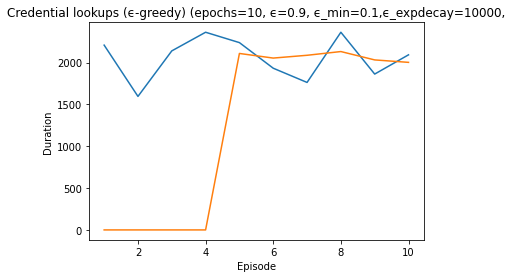

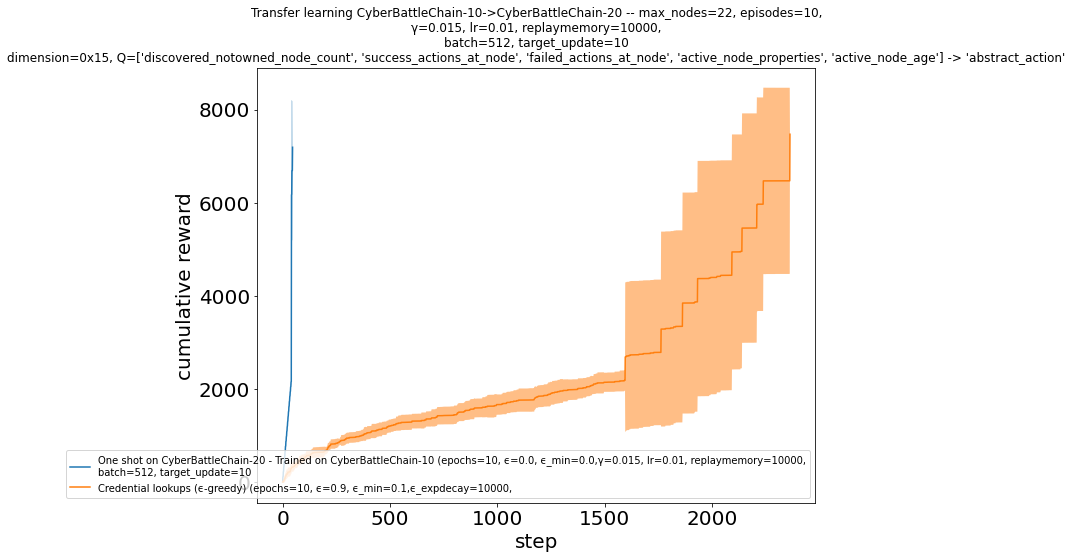

In [15]:
learner.transfer_learning_evaluation(
    environment_properties=ep,
    trained_learner=best_dqn_learning_run_10,
    eval_env=cyberbattlechain_20,
    eval_epsilon=0.0,  # alternate with exploration to help generalization to bigger network
    eval_episode_count=eval_episode_count,
    iteration_count=iteration_count,
    benchmark_policy=rca.CredentialCacheExploiter(),
    benchmark_training_args={'epsilon': 0.90,
                             'epsilon_exponential_decay': 10000,
                             'epsilon_minimum': 0.10,
                             'title': 'Credential lookups (ϵ-greedy)'}
)

###### One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4
Learning with: episode_count=10,iteration_count=9000,ϵ=0.0,ϵ_min=0.0, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5
  ## Episode: 1/10 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  336.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  436.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  436.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  445.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  545.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  545.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  554.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  554.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:  654.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:  654.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  663.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  663.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:  763.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:  763.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:  772.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:  772.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:  872.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:  872.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward:  881.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward:  881.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 41|reward:  981.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 41|reward:  981.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 1|Iteration 42|reward:  990.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 1|Iteration 42|reward:  990.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 1|Iteration 48|reward:  996.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 1|Iteration 48|reward:  996.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 57|reward: 1096.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 57|reward: 1096.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward: 1105.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward: 1105.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward: 1111.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward: 1111.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 60|reward: 6111.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 60|reward: 6111.0|last_reward_at:   60|Elapsed Time: 0:00:00||

  Episode 1 ended at t=60 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/8 (0.58)
    exploit-remote: 2/0 (1.00)
    exploit-connect: 11/28 (0.28)
  exploit deflected to exploration: 0
  ## Episode: 2/10 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  231.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  231.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  331.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  331.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  340.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  340.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  440.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  440.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  449.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  449.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  549.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  549.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  558.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  558.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  564.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  564.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward:  664.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward:  664.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:  673.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:  673.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  773.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  773.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  782.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  782.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 37|reward:  782.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 46|reward:  782.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 56|reward:  782.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 65|reward:  782.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 75|reward:  782.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 84|reward:  782.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 2|Iteration 94|reward:  782.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 2|Iteration 104|reward:  782.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 2|Iteration 113|reward:  782.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 2|Iteration 121|reward:  782.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 2|Iteration 129|reward:  782.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 2|Iteration 137|reward:  782.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 2|Iteration 144|reward:  782.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 2|Iteration 149|reward:  782.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 2|Iteration 158|reward:  782.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 2|Iteration 159|reward:  882.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 2|Iteration 159|reward:  882.0|last_reward_at:  159|Elapsed Time: 0:00:02||

Episode 2|Iteration 161|reward:  882.0|last_reward_at:  159|Elapsed Time: 0:00:02||

Episode 2|Iteration 163|reward:  884.0|last_reward_at:  159|Elapsed Time: 0:00:02||

Episode 2|Iteration 163|reward:  884.0|last_reward_at:  163|Elapsed Time: 0:00:02||

Episode 2|Iteration 165|reward:  884.0|last_reward_at:  163|Elapsed Time: 0:00:02||

Episode 2|Iteration 166|reward:  890.0|last_reward_at:  163|Elapsed Time: 0:00:02||

Episode 2|Iteration 166|reward:  890.0|last_reward_at:  166|Elapsed Time: 0:00:02||

Episode 2|Iteration 167|reward:  899.0|last_reward_at:  166|Elapsed Time: 0:00:02||

Episode 2|Iteration 167|reward:  899.0|last_reward_at:  167|Elapsed Time: 0:00:02||

Episode 2|Iteration 168|reward:  999.0|last_reward_at:  167|Elapsed Time: 0:00:02||

Episode 2|Iteration 168|reward:  999.0|last_reward_at:  168|Elapsed Time: 0:00:02||

Episode 2|Iteration 169|reward: 1001.0|last_reward_at:  168|Elapsed Time: 0:00:02||

Episode 2|Iteration 169|reward: 1001.0|last_reward_at:  169|Elapsed Time: 0:00:02||

Episode 2|Iteration 172|reward: 1003.0|last_reward_at:  169|Elapsed Time: 0:00:02||

Episode 2|Iteration 172|reward: 1003.0|last_reward_at:  172|Elapsed Time: 0:00:02||

Episode 2|Iteration 173|reward: 1012.0|last_reward_at:  172|Elapsed Time: 0:00:02||

Episode 2|Iteration 173|reward: 1012.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 2|Iteration 182|reward: 1012.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 2|Iteration 190|reward: 1012.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 2|Iteration 199|reward: 1012.0|last_reward_at:  173|Elapsed Time: 0:00:03||

Episode 2|Iteration 209|reward: 1012.0|last_reward_at:  173|Elapsed Time: 0:00:03||

Episode 2|Iteration 218|reward: 1012.0|last_reward_at:  173|Elapsed Time: 0:00:03||

Episode 2|Iteration 227|reward: 1012.0|last_reward_at:  173|Elapsed Time: 0:00:03||

Episode 2|Iteration 235|reward: 1012.0|last_reward_at:  173|Elapsed Time: 0:00:03||

Episode 2|Iteration 243|reward: 1012.0|last_reward_at:  173|Elapsed Time: 0:00:03||

Episode 2|Iteration 253|reward: 1012.0|last_reward_at:  173|Elapsed Time: 0:00:03||

Episode 2|Iteration 256|reward: 1112.0|last_reward_at:  173|Elapsed Time: 0:00:03||

Episode 2|Iteration 256|reward: 1112.0|last_reward_at:  256|Elapsed Time: 0:00:03||

Episode 2|Iteration 257|reward: 1121.0|last_reward_at:  256|Elapsed Time: 0:00:03||

Episode 2|Iteration 257|reward: 1121.0|last_reward_at:  257|Elapsed Time: 0:00:03||

Episode 2|Iteration 260|reward: 6121.0|last_reward_at:  257|Elapsed Time: 0:00:03||

Episode 2|Iteration 260|reward: 6121.0|last_reward_at:  260|Elapsed Time: 0:00:03||

  Episode 2 ended at t=260 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/6 (0.65)
    exploit-remote: 4/4 (0.50)
    exploit-connect: 11/220 (0.05)
  exploit deflected to exploration: 4
  ## Episode: 3/10 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  327.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  336.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  436.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  436.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  445.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  451.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  451.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  551.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  551.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  560.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  560.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:  560.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:  560.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 40|reward:  560.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  560.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 60|reward:  560.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 70|reward:  560.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 80|reward:  560.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 83|reward:  660.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 83|reward:  660.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 3|Iteration 84|reward:  669.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 3|Iteration 84|reward:  669.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 3|Iteration 86|reward:  675.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 3|Iteration 86|reward:  675.0|last_reward_at:   86|Elapsed Time: 0:00:01||

Episode 3|Iteration 93|reward:  775.0|last_reward_at:   86|Elapsed Time: 0:00:01||

Episode 3|Iteration 93|reward:  775.0|last_reward_at:   93|Elapsed Time: 0:00:01||

Episode 3|Iteration 94|reward:  784.0|last_reward_at:   93|Elapsed Time: 0:00:01||

Episode 3|Iteration 94|reward:  784.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 3|Iteration 103|reward:  784.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 3|Iteration 111|reward:  784.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 3|Iteration 121|reward:  784.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 3|Iteration 131|reward:  784.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 3|Iteration 140|reward:  784.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 3|Iteration 148|reward:  784.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 3|Iteration 154|reward:  784.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 3|Iteration 159|reward:  884.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 3|Iteration 159|reward:  884.0|last_reward_at:  159|Elapsed Time: 0:00:01||

Episode 3|Iteration 162|reward:  893.0|last_reward_at:  159|Elapsed Time: 0:00:01||

Episode 3|Iteration 162|reward:  893.0|last_reward_at:  162|Elapsed Time: 0:00:01||

Episode 3|Iteration 166|reward:  899.0|last_reward_at:  162|Elapsed Time: 0:00:01||

Episode 3|Iteration 166|reward:  899.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 3|Iteration 169|reward:  999.0|last_reward_at:  166|Elapsed Time: 0:00:02||

Episode 3|Iteration 169|reward:  999.0|last_reward_at:  169|Elapsed Time: 0:00:02||

Episode 3|Iteration 170|reward: 1008.0|last_reward_at:  169|Elapsed Time: 0:00:02||

Episode 3|Iteration 170|reward: 1008.0|last_reward_at:  170|Elapsed Time: 0:00:02||

Episode 3|Iteration 179|reward: 1008.0|last_reward_at:  170|Elapsed Time: 0:00:02||

Episode 3|Iteration 186|reward: 1008.0|last_reward_at:  170|Elapsed Time: 0:00:02||

Episode 3|Iteration 194|reward: 1008.0|last_reward_at:  170|Elapsed Time: 0:00:02||

Episode 3|Iteration 203|reward: 1008.0|last_reward_at:  170|Elapsed Time: 0:00:02||

Episode 3|Iteration 211|reward: 1008.0|last_reward_at:  170|Elapsed Time: 0:00:02||

Episode 3|Iteration 221|reward: 1008.0|last_reward_at:  170|Elapsed Time: 0:00:02||

Episode 3|Iteration 228|reward: 1008.0|last_reward_at:  170|Elapsed Time: 0:00:02||

Episode 3|Iteration 236|reward: 1008.0|last_reward_at:  170|Elapsed Time: 0:00:02||

Episode 3|Iteration 245|reward: 1008.0|last_reward_at:  170|Elapsed Time: 0:00:02||

Episode 3|Iteration 255|reward: 1008.0|last_reward_at:  170|Elapsed Time: 0:00:03||

Episode 3|Iteration 265|reward: 1008.0|last_reward_at:  170|Elapsed Time: 0:00:03||

Episode 3|Iteration 274|reward: 1008.0|last_reward_at:  170|Elapsed Time: 0:00:03||

Episode 3|Iteration 283|reward: 1008.0|last_reward_at:  170|Elapsed Time: 0:00:03||

Episode 3|Iteration 292|reward: 1008.0|last_reward_at:  170|Elapsed Time: 0:00:03||

Episode 3|Iteration 296|reward: 1108.0|last_reward_at:  170|Elapsed Time: 0:00:03||

Episode 3|Iteration 296|reward: 1108.0|last_reward_at:  296|Elapsed Time: 0:00:03||

Episode 3|Iteration 297|reward: 1117.0|last_reward_at:  296|Elapsed Time: 0:00:03||

Episode 3|Iteration 297|reward: 1117.0|last_reward_at:  297|Elapsed Time: 0:00:03||

Episode 3|Iteration 300|reward: 1123.0|last_reward_at:  297|Elapsed Time: 0:00:03||

Episode 3|Iteration 300|reward: 1123.0|last_reward_at:  300|Elapsed Time: 0:00:03||

Episode 3|Iteration 301|reward: 6123.0|last_reward_at:  300|Elapsed Time: 0:00:03||

Episode 3|Iteration 301|reward: 6123.0|last_reward_at:  301|Elapsed Time: 0:00:03||

  Episode 3 ended at t=301 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/8 (0.58)
    exploit-remote: 4/1 (0.80)
    exploit-connect: 11/266 (0.04)
  exploit deflected to exploration: 0
  ## Episode: 4/10 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  327.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  336.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  336.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  336.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:  436.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:  436.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  445.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  445.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  451.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  451.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward:  455.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward:  455.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:  555.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:  555.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  564.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  564.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 47|reward:  564.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 57|reward:  564.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 67|reward:  564.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 75|reward:  564.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 84|reward:  564.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 4|Iteration 92|reward:  564.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 4|Iteration 94|reward:  664.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 4|Iteration 94|reward:  664.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 4|Iteration 95|reward:  673.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 4|Iteration 95|reward:  673.0|last_reward_at:   95|Elapsed Time: 0:00:01||

Episode 4|Iteration 97|reward:  773.0|last_reward_at:   95|Elapsed Time: 0:00:01||

Episode 4|Iteration 97|reward:  773.0|last_reward_at:   97|Elapsed Time: 0:00:01||

Episode 4|Iteration 98|reward:  782.0|last_reward_at:   97|Elapsed Time: 0:00:01||

Episode 4|Iteration 98|reward:  782.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 4|Iteration 107|reward:  782.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 4|Iteration 114|reward:  782.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 4|Iteration 122|reward:  782.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 4|Iteration 132|reward:  782.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 4|Iteration 142|reward:  782.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 4|Iteration 152|reward:  782.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 4|Iteration 161|reward:  782.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 4|Iteration 171|reward:  782.0|last_reward_at:   98|Elapsed Time: 0:00:02||

Episode 4|Iteration 180|reward:  782.0|last_reward_at:   98|Elapsed Time: 0:00:02||

Episode 4|Iteration 189|reward:  782.0|last_reward_at:   98|Elapsed Time: 0:00:02||

Episode 4|Iteration 198|reward:  782.0|last_reward_at:   98|Elapsed Time: 0:00:02||

Episode 4|Iteration 205|reward:  782.0|last_reward_at:   98|Elapsed Time: 0:00:02||

Episode 4|Iteration 215|reward:  782.0|last_reward_at:   98|Elapsed Time: 0:00:02||

Episode 4|Iteration 225|reward:  782.0|last_reward_at:   98|Elapsed Time: 0:00:02||

Episode 4|Iteration 235|reward:  782.0|last_reward_at:   98|Elapsed Time: 0:00:02||

Episode 4|Iteration 245|reward:  782.0|last_reward_at:   98|Elapsed Time: 0:00:02||

Episode 4|Iteration 253|reward:  782.0|last_reward_at:   98|Elapsed Time: 0:00:02||

Episode 4|Iteration 262|reward:  882.0|last_reward_at:   98|Elapsed Time: 0:00:03||

Episode 4|Iteration 262|reward:  882.0|last_reward_at:  262|Elapsed Time: 0:00:03||

Episode 4|Iteration 263|reward:  891.0|last_reward_at:  262|Elapsed Time: 0:00:03||

Episode 4|Iteration 263|reward:  891.0|last_reward_at:  263|Elapsed Time: 0:00:03||

Episode 4|Iteration 267|reward:  991.0|last_reward_at:  263|Elapsed Time: 0:00:03||

Episode 4|Iteration 267|reward:  991.0|last_reward_at:  267|Elapsed Time: 0:00:03||

Episode 4|Iteration 268|reward: 1000.0|last_reward_at:  267|Elapsed Time: 0:00:03||

Episode 4|Iteration 268|reward: 1000.0|last_reward_at:  268|Elapsed Time: 0:00:03||

Episode 4|Iteration 277|reward: 1000.0|last_reward_at:  268|Elapsed Time: 0:00:03||

Episode 4|Iteration 286|reward: 1000.0|last_reward_at:  268|Elapsed Time: 0:00:03||

Episode 4|Iteration 295|reward: 1000.0|last_reward_at:  268|Elapsed Time: 0:00:03||

Episode 4|Iteration 304|reward: 1000.0|last_reward_at:  268|Elapsed Time: 0:00:03||

Episode 4|Iteration 312|reward: 1000.0|last_reward_at:  268|Elapsed Time: 0:00:03||

Episode 4|Iteration 319|reward: 1000.0|last_reward_at:  268|Elapsed Time: 0:00:03||

Episode 4|Iteration 326|reward: 1000.0|last_reward_at:  268|Elapsed Time: 0:00:03||

Episode 4|Iteration 334|reward: 1000.0|last_reward_at:  268|Elapsed Time: 0:00:04||

Episode 4|Iteration 342|reward: 1000.0|last_reward_at:  268|Elapsed Time: 0:00:04||

Episode 4|Iteration 350|reward: 1000.0|last_reward_at:  268|Elapsed Time: 0:00:04||

Episode 4|Iteration 355|reward: 1006.0|last_reward_at:  268|Elapsed Time: 0:00:04||

Episode 4|Iteration 355|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:04||

Episode 4|Iteration 364|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:04||

Episode 4|Iteration 373|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:04||

Episode 4|Iteration 382|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:04||

Episode 4|Iteration 391|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:04||

Episode 4|Iteration 401|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:04||

Episode 4|Iteration 410|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:04||

Episode 4|Iteration 420|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:04||

Episode 4|Iteration 429|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:05||

Episode 4|Iteration 438|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:05||

Episode 4|Iteration 445|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:05||

Episode 4|Iteration 454|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:05||

Episode 4|Iteration 463|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:05||

Episode 4|Iteration 472|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:05||

Episode 4|Iteration 480|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:05||

Episode 4|Iteration 489|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:05||

Episode 4|Iteration 498|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:05||

Episode 4|Iteration 508|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:06||

Episode 4|Iteration 517|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:06||

Episode 4|Iteration 526|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:06||

Episode 4|Iteration 533|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:06||

Episode 4|Iteration 542|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:06||

Episode 4|Iteration 551|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:06||

Episode 4|Iteration 560|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:06||

Episode 4|Iteration 569|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:06||

Episode 4|Iteration 578|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:06||

Episode 4|Iteration 586|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:07||

Episode 4|Iteration 594|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:07||

Episode 4|Iteration 602|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:07||

Episode 4|Iteration 611|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:07||

Episode 4|Iteration 620|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:07||

Episode 4|Iteration 629|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:07||

Episode 4|Iteration 638|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:07||

Episode 4|Iteration 647|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:07||

Episode 4|Iteration 654|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:07||

Episode 4|Iteration 663|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:07||

Episode 4|Iteration 671|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:08||

Episode 4|Iteration 678|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:08||

Episode 4|Iteration 684|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:08||

Episode 4|Iteration 692|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:08||

Episode 4|Iteration 701|reward: 1006.0|last_reward_at:  355|Elapsed Time: 0:00:08||

Episode 4|Iteration 705|reward: 1106.0|last_reward_at:  355|Elapsed Time: 0:00:08||

Episode 4|Iteration 705|reward: 1106.0|last_reward_at:  705|Elapsed Time: 0:00:08||

Episode 4|Iteration 708|reward: 1106.0|last_reward_at:  705|Elapsed Time: 0:00:08||

Episode 4|Iteration 710|reward: 1106.0|last_reward_at:  705|Elapsed Time: 0:00:08||

Episode 4|Iteration 711|reward: 1115.0|last_reward_at:  705|Elapsed Time: 0:00:08||

Episode 4|Iteration 711|reward: 1115.0|last_reward_at:  711|Elapsed Time: 0:00:08||

Episode 4|Iteration 720|reward: 1115.0|last_reward_at:  711|Elapsed Time: 0:00:08||

Episode 4|Iteration 727|reward: 1117.0|last_reward_at:  711|Elapsed Time: 0:00:09||

Episode 4|Iteration 727|reward: 1117.0|last_reward_at:  727|Elapsed Time: 0:00:09||

Episode 4|Iteration 728|reward: 6117.0|last_reward_at:  727|Elapsed Time: 0:00:09||

Episode 4|Iteration 728|reward: 6117.0|last_reward_at:  728|Elapsed Time: 0:00:09||

  Episode 4 ended at t=728 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/12 (0.48)
    exploit-remote: 4/5 (0.44)
    exploit-connect: 11/685 (0.02)
  exploit deflected to exploration: 0
  ## Episode: 5/10 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  231.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  231.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  237.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  237.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  337.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  337.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  346.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  346.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  446.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  446.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:  455.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:  455.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:  555.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:  555.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  564.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  564.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:  566.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:  566.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward:  568.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward:  568.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward:  574.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward:  574.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 48|reward:  574.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 58|reward:  574.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 65|reward:  574.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 74|reward:  574.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 84|reward:  574.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 5|Iteration 94|reward:  574.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 5|Iteration 104|reward:  574.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 5|Iteration 107|reward:  674.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 5|Iteration 107|reward:  674.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 5|Iteration 108|reward:  683.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 5|Iteration 108|reward:  683.0|last_reward_at:  108|Elapsed Time: 0:00:01||

Episode 5|Iteration 110|reward:  687.0|last_reward_at:  108|Elapsed Time: 0:00:01||

Episode 5|Iteration 110|reward:  687.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 5|Iteration 113|reward:  787.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 5|Iteration 113|reward:  787.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 5|Iteration 116|reward:  796.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 5|Iteration 116|reward:  796.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 5|Iteration 124|reward:  796.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 5|Iteration 133|reward:  796.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 5|Iteration 141|reward:  796.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 5|Iteration 147|reward:  796.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 5|Iteration 156|reward:  796.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 5|Iteration 165|reward:  796.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 5|Iteration 174|reward:  796.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 5|Iteration 183|reward:  796.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 5|Iteration 191|reward:  796.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 5|Iteration 199|reward:  796.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 5|Iteration 209|reward:  796.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 5|Iteration 217|reward:  796.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 5|Iteration 226|reward:  796.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 5|Iteration 235|reward:  796.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 5|Iteration 243|reward:  796.0|last_reward_at:  116|Elapsed Time: 0:00:03||

Episode 5|Iteration 252|reward:  796.0|last_reward_at:  116|Elapsed Time: 0:00:03||

Episode 5|Iteration 260|reward:  796.0|last_reward_at:  116|Elapsed Time: 0:00:03||

Episode 5|Iteration 269|reward:  796.0|last_reward_at:  116|Elapsed Time: 0:00:03||

Episode 5|Iteration 272|reward:  896.0|last_reward_at:  116|Elapsed Time: 0:00:03||

Episode 5|Iteration 272|reward:  896.0|last_reward_at:  272|Elapsed Time: 0:00:03||

Episode 5|Iteration 273|reward:  905.0|last_reward_at:  272|Elapsed Time: 0:00:03||

Episode 5|Iteration 273|reward:  905.0|last_reward_at:  273|Elapsed Time: 0:00:03||

Episode 5|Iteration 277|reward: 1005.0|last_reward_at:  273|Elapsed Time: 0:00:03||

Episode 5|Iteration 277|reward: 1005.0|last_reward_at:  277|Elapsed Time: 0:00:03||

Episode 5|Iteration 279|reward: 1014.0|last_reward_at:  277|Elapsed Time: 0:00:03||

Episode 5|Iteration 279|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:03||

Episode 5|Iteration 288|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:03||

Episode 5|Iteration 298|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:03||

Episode 5|Iteration 307|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:03||

Episode 5|Iteration 317|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:04||

Episode 5|Iteration 324|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:04||

Episode 5|Iteration 333|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:04||

Episode 5|Iteration 342|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:04||

Episode 5|Iteration 350|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:04||

Episode 5|Iteration 359|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:04||

Episode 5|Iteration 368|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:04||

Episode 5|Iteration 376|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:04||

Episode 5|Iteration 386|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:04||

Episode 5|Iteration 395|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:04||

Episode 5|Iteration 404|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:05||

Episode 5|Iteration 413|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:05||

Episode 5|Iteration 422|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:05||

Episode 5|Iteration 432|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:05||

Episode 5|Iteration 440|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:05||

Episode 5|Iteration 448|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:05||

Episode 5|Iteration 456|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:05||

Episode 5|Iteration 464|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:05||

Episode 5|Iteration 473|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:05||

Episode 5|Iteration 482|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:06||

Episode 5|Iteration 490|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:06||

Episode 5|Iteration 499|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:06||

Episode 5|Iteration 507|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:06||

Episode 5|Iteration 516|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:06||

Episode 5|Iteration 526|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:06||

Episode 5|Iteration 535|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:06||

Episode 5|Iteration 544|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:06||

Episode 5|Iteration 552|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:06||

Episode 5|Iteration 560|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:06||

Episode 5|Iteration 568|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:07||

Episode 5|Iteration 577|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:07||

Episode 5|Iteration 585|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:07||

Episode 5|Iteration 594|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:07||

Episode 5|Iteration 602|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:07||

Episode 5|Iteration 610|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:07||

Episode 5|Iteration 619|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:07||

Episode 5|Iteration 628|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:07||

Episode 5|Iteration 638|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:07||

Episode 5|Iteration 647|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:08||

Episode 5|Iteration 657|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:08||

Episode 5|Iteration 664|reward: 1014.0|last_reward_at:  279|Elapsed Time: 0:00:08||

Episode 5|Iteration 665|reward: 1114.0|last_reward_at:  279|Elapsed Time: 0:00:08||

Episode 5|Iteration 665|reward: 1114.0|last_reward_at:  665|Elapsed Time: 0:00:08||

Episode 5|Iteration 667|reward: 1114.0|last_reward_at:  665|Elapsed Time: 0:00:08||

Episode 5|Iteration 670|reward: 1114.0|last_reward_at:  665|Elapsed Time: 0:00:08||

Episode 5|Iteration 671|reward: 1123.0|last_reward_at:  665|Elapsed Time: 0:00:08||

Episode 5|Iteration 671|reward: 1123.0|last_reward_at:  671|Elapsed Time: 0:00:08||

Episode 5|Iteration 674|reward: 6123.0|last_reward_at:  671|Elapsed Time: 0:00:08||

Episode 5|Iteration 674|reward: 6123.0|last_reward_at:  674|Elapsed Time: 0:00:08||

  Episode 5 ended at t=674 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/18 (0.38)
    exploit-remote: 6/8 (0.43)
    exploit-connect: 11/620 (0.02)
  exploit deflected to exploration: 0
  ## Episode: 6/10 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:  233.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:  233.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  333.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  333.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:  342.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:  442.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:  442.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:  451.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:  451.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  551.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  551.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  560.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  560.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 17|reward:  566.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 17|reward:  566.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 6|Iteration 25|reward:  566.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 6|Iteration 34|reward:  666.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 6|Iteration 34|reward:  666.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 6|Iteration 35|reward:  675.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 6|Iteration 35|reward:  675.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 6|Iteration 38|reward:  775.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 6|Iteration 38|reward:  775.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 6|Iteration 39|reward:  784.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 6|Iteration 39|reward:  784.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 6|Iteration 49|reward:  784.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 6|Iteration 59|reward:  784.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 6|Iteration 68|reward:  784.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 6|Iteration 77|reward:  784.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 6|Iteration 82|reward:  790.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 6|Iteration 82|reward:  790.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 6|Iteration 83|reward:  796.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 6|Iteration 83|reward:  796.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 6|Iteration 88|reward:  802.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 6|Iteration 88|reward:  802.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 6|Iteration 97|reward:  802.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 6|Iteration 100|reward:  902.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 6|Iteration 100|reward:  902.0|last_reward_at:  100|Elapsed Time: 0:00:01||

Episode 6|Iteration 101|reward:  911.0|last_reward_at:  100|Elapsed Time: 0:00:01||

Episode 6|Iteration 101|reward:  911.0|last_reward_at:  101|Elapsed Time: 0:00:01||

Episode 6|Iteration 102|reward: 1011.0|last_reward_at:  101|Elapsed Time: 0:00:01||

Episode 6|Iteration 102|reward: 1011.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 6|Iteration 103|reward: 1020.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 6|Iteration 103|reward: 1020.0|last_reward_at:  103|Elapsed Time: 0:00:01||

Episode 6|Iteration 111|reward: 1020.0|last_reward_at:  103|Elapsed Time: 0:00:01||

Episode 6|Iteration 120|reward: 1020.0|last_reward_at:  103|Elapsed Time: 0:00:01||

Episode 6|Iteration 130|reward: 1020.0|last_reward_at:  103|Elapsed Time: 0:00:01||

Episode 6|Iteration 138|reward: 1020.0|last_reward_at:  103|Elapsed Time: 0:00:01||

Episode 6|Iteration 143|reward: 1020.0|last_reward_at:  103|Elapsed Time: 0:00:01||

Episode 6|Iteration 151|reward: 1020.0|last_reward_at:  103|Elapsed Time: 0:00:01||

Episode 6|Iteration 160|reward: 1020.0|last_reward_at:  103|Elapsed Time: 0:00:02||

Episode 6|Iteration 169|reward: 1020.0|last_reward_at:  103|Elapsed Time: 0:00:02||

Episode 6|Iteration 176|reward: 1020.0|last_reward_at:  103|Elapsed Time: 0:00:02||

Episode 6|Iteration 181|reward: 1020.0|last_reward_at:  103|Elapsed Time: 0:00:02||

Episode 6|Iteration 190|reward: 1020.0|last_reward_at:  103|Elapsed Time: 0:00:02||

Episode 6|Iteration 197|reward: 1020.0|last_reward_at:  103|Elapsed Time: 0:00:02||

Episode 6|Iteration 203|reward: 1020.0|last_reward_at:  103|Elapsed Time: 0:00:02||

Episode 6|Iteration 204|reward: 1022.0|last_reward_at:  103|Elapsed Time: 0:00:02||

Episode 6|Iteration 204|reward: 1022.0|last_reward_at:  204|Elapsed Time: 0:00:02||

Episode 6|Iteration 213|reward: 1022.0|last_reward_at:  204|Elapsed Time: 0:00:02||

Episode 6|Iteration 222|reward: 1022.0|last_reward_at:  204|Elapsed Time: 0:00:02||

Episode 6|Iteration 228|reward: 1022.0|last_reward_at:  204|Elapsed Time: 0:00:03||

Episode 6|Iteration 237|reward: 1022.0|last_reward_at:  204|Elapsed Time: 0:00:03||

Episode 6|Iteration 246|reward: 1022.0|last_reward_at:  204|Elapsed Time: 0:00:03||

Episode 6|Iteration 256|reward: 1022.0|last_reward_at:  204|Elapsed Time: 0:00:03||

Episode 6|Iteration 263|reward: 1122.0|last_reward_at:  204|Elapsed Time: 0:00:03||

Episode 6|Iteration 263|reward: 1122.0|last_reward_at:  263|Elapsed Time: 0:00:03||

Episode 6|Iteration 264|reward: 1131.0|last_reward_at:  263|Elapsed Time: 0:00:03||

Episode 6|Iteration 264|reward: 1131.0|last_reward_at:  264|Elapsed Time: 0:00:03||

Episode 6|Iteration 273|reward: 1131.0|last_reward_at:  264|Elapsed Time: 0:00:03||

Episode 6|Iteration 274|reward: 6131.0|last_reward_at:  264|Elapsed Time: 0:00:03||

Episode 6|Iteration 274|reward: 6131.0|last_reward_at:  274|Elapsed Time: 0:00:03||

  Episode 6 ended at t=274 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 13/3 (0.81)
    exploit-remote: 4/2 (0.67)
    exploit-connect: 11/241 (0.04)
  exploit deflected to exploration: 0
  ## Episode: 7/10 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:  336.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  436.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  436.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  445.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 10|reward:  545.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 10|reward:  545.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  554.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  554.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward:  554.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 30|reward:  554.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 34|reward:  556.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 34|reward:  556.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 7|Iteration 44|reward:  556.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 7|Iteration 52|reward:  556.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 7|Iteration 61|reward:  556.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 7|Iteration 67|reward:  656.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 7|Iteration 67|reward:  656.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 7|Iteration 68|reward:  665.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 7|Iteration 68|reward:  665.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 7|Iteration 71|reward:  765.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 7|Iteration 71|reward:  765.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 7|Iteration 72|reward:  774.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 7|Iteration 72|reward:  774.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 7|Iteration 81|reward:  774.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 7|Iteration 87|reward:  776.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 7|Iteration 87|reward:  776.0|last_reward_at:   87|Elapsed Time: 0:00:01||

Episode 7|Iteration 91|reward:  782.0|last_reward_at:   87|Elapsed Time: 0:00:01||

Episode 7|Iteration 91|reward:  782.0|last_reward_at:   91|Elapsed Time: 0:00:01||

Episode 7|Iteration 101|reward:  782.0|last_reward_at:   91|Elapsed Time: 0:00:01||

Episode 7|Iteration 110|reward:  782.0|last_reward_at:   91|Elapsed Time: 0:00:01||

Episode 7|Iteration 119|reward:  782.0|last_reward_at:   91|Elapsed Time: 0:00:01||

Episode 7|Iteration 127|reward:  782.0|last_reward_at:   91|Elapsed Time: 0:00:01||

Episode 7|Iteration 132|reward:  784.0|last_reward_at:   91|Elapsed Time: 0:00:01||

Episode 7|Iteration 132|reward:  784.0|last_reward_at:  132|Elapsed Time: 0:00:01||

Episode 7|Iteration 141|reward:  784.0|last_reward_at:  132|Elapsed Time: 0:00:01||

Episode 7|Iteration 148|reward:  784.0|last_reward_at:  132|Elapsed Time: 0:00:01||

Episode 7|Iteration 158|reward:  784.0|last_reward_at:  132|Elapsed Time: 0:00:01||

Episode 7|Iteration 168|reward:  784.0|last_reward_at:  132|Elapsed Time: 0:00:02||

Episode 7|Iteration 170|reward:  786.0|last_reward_at:  132|Elapsed Time: 0:00:02||

Episode 7|Iteration 170|reward:  786.0|last_reward_at:  170|Elapsed Time: 0:00:02||

Episode 7|Iteration 178|reward:  786.0|last_reward_at:  170|Elapsed Time: 0:00:02||

Episode 7|Iteration 188|reward:  786.0|last_reward_at:  170|Elapsed Time: 0:00:02||

Episode 7|Iteration 197|reward:  786.0|last_reward_at:  170|Elapsed Time: 0:00:02||

Episode 7|Iteration 206|reward:  786.0|last_reward_at:  170|Elapsed Time: 0:00:02||

Episode 7|Iteration 212|reward:  886.0|last_reward_at:  170|Elapsed Time: 0:00:02||

Episode 7|Iteration 212|reward:  886.0|last_reward_at:  212|Elapsed Time: 0:00:02||

Episode 7|Iteration 213|reward:  895.0|last_reward_at:  212|Elapsed Time: 0:00:02||

Episode 7|Iteration 213|reward:  895.0|last_reward_at:  213|Elapsed Time: 0:00:02||

Episode 7|Iteration 222|reward:  895.0|last_reward_at:  213|Elapsed Time: 0:00:02||

Episode 7|Iteration 227|reward:  995.0|last_reward_at:  213|Elapsed Time: 0:00:02||

Episode 7|Iteration 227|reward:  995.0|last_reward_at:  227|Elapsed Time: 0:00:02||

Episode 7|Iteration 228|reward: 1004.0|last_reward_at:  227|Elapsed Time: 0:00:02||

Episode 7|Iteration 228|reward: 1004.0|last_reward_at:  228|Elapsed Time: 0:00:02||

Episode 7|Iteration 237|reward: 1004.0|last_reward_at:  228|Elapsed Time: 0:00:02||

Episode 7|Iteration 245|reward: 1004.0|last_reward_at:  228|Elapsed Time: 0:00:03||

Episode 7|Iteration 253|reward: 1004.0|last_reward_at:  228|Elapsed Time: 0:00:03||

Episode 7|Iteration 262|reward: 1004.0|last_reward_at:  228|Elapsed Time: 0:00:03||

Episode 7|Iteration 271|reward: 1004.0|last_reward_at:  228|Elapsed Time: 0:00:03||

Episode 7|Iteration 280|reward: 1004.0|last_reward_at:  228|Elapsed Time: 0:00:03||

Episode 7|Iteration 289|reward: 1004.0|last_reward_at:  228|Elapsed Time: 0:00:03||

Episode 7|Iteration 297|reward: 1004.0|last_reward_at:  228|Elapsed Time: 0:00:03||

Episode 7|Iteration 306|reward: 1004.0|last_reward_at:  228|Elapsed Time: 0:00:03||

Episode 7|Iteration 314|reward: 1004.0|last_reward_at:  228|Elapsed Time: 0:00:03||

Episode 7|Iteration 322|reward: 1004.0|last_reward_at:  228|Elapsed Time: 0:00:04||

Episode 7|Iteration 330|reward: 1004.0|last_reward_at:  228|Elapsed Time: 0:00:04||

Episode 7|Iteration 332|reward: 1010.0|last_reward_at:  228|Elapsed Time: 0:00:04||

Episode 7|Iteration 332|reward: 1010.0|last_reward_at:  332|Elapsed Time: 0:00:04||

Episode 7|Iteration 340|reward: 1010.0|last_reward_at:  332|Elapsed Time: 0:00:04||

Episode 7|Iteration 346|reward: 1010.0|last_reward_at:  332|Elapsed Time: 0:00:04||

Episode 7|Iteration 354|reward: 1010.0|last_reward_at:  332|Elapsed Time: 0:00:04||

Episode 7|Iteration 363|reward: 1010.0|last_reward_at:  332|Elapsed Time: 0:00:04||

Episode 7|Iteration 372|reward: 1110.0|last_reward_at:  332|Elapsed Time: 0:00:04||

Episode 7|Iteration 372|reward: 1110.0|last_reward_at:  372|Elapsed Time: 0:00:04||

Episode 7|Iteration 373|reward: 1119.0|last_reward_at:  372|Elapsed Time: 0:00:04||

Episode 7|Iteration 373|reward: 1119.0|last_reward_at:  373|Elapsed Time: 0:00:04||

Episode 7|Iteration 382|reward: 1119.0|last_reward_at:  373|Elapsed Time: 0:00:04||

Episode 7|Iteration 390|reward: 1119.0|last_reward_at:  373|Elapsed Time: 0:00:04||

Episode 7|Iteration 399|reward: 1119.0|last_reward_at:  373|Elapsed Time: 0:00:05||

Episode 7|Iteration 403|reward: 6119.0|last_reward_at:  373|Elapsed Time: 0:00:05||

Episode 7|Iteration 403|reward: 6119.0|last_reward_at:  403|Elapsed Time: 0:00:05||

  Episode 7 ended at t=403 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/4 (0.73)
    exploit-remote: 6/3 (0.67)
    exploit-connect: 11/368 (0.03)
  exploit deflected to exploration: 0
  ## Episode: 8/10 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:  231.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:  231.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  331.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  331.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  340.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  340.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:  440.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:  440.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  449.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  449.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:  549.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:  549.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:  558.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:  558.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:  658.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:  658.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward:  664.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward:  664.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward:  670.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward:  670.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 24|reward:  676.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 24|reward:  676.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward:  682.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward:  682.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward:  684.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward:  684.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward:  693.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward:  693.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 28|reward:  793.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 28|reward:  793.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 8|Iteration 29|reward:  802.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 8|Iteration 29|reward:  802.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 8|Iteration 39|reward:  802.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 8|Iteration 40|reward:  804.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 8|Iteration 40|reward:  804.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 8|Iteration 49|reward:  804.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 8|Iteration 58|reward:  804.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 8|Iteration 66|reward:  804.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 8|Iteration 75|reward:  804.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 8|Iteration 85|reward:  804.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 8|Iteration 88|reward:  904.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 8|Iteration 88|reward:  904.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 8|Iteration 89|reward:  913.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 8|Iteration 89|reward:  913.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 8|Iteration 90|reward: 1013.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 8|Iteration 90|reward: 1013.0|last_reward_at:   90|Elapsed Time: 0:00:01||

Episode 8|Iteration 92|reward: 1022.0|last_reward_at:   90|Elapsed Time: 0:00:01||

Episode 8|Iteration 92|reward: 1022.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 8|Iteration 102|reward: 1022.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 8|Iteration 110|reward: 1022.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 8|Iteration 114|reward: 1024.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 8|Iteration 114|reward: 1024.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 8|Iteration 123|reward: 1024.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 8|Iteration 132|reward: 1024.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 8|Iteration 142|reward: 1024.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 8|Iteration 150|reward: 1124.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 8|Iteration 150|reward: 1124.0|last_reward_at:  150|Elapsed Time: 0:00:01||

Episode 8|Iteration 151|reward: 1126.0|last_reward_at:  150|Elapsed Time: 0:00:01||

Episode 8|Iteration 151|reward: 1126.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 8|Iteration 152|reward: 1135.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 8|Iteration 152|reward: 1135.0|last_reward_at:  152|Elapsed Time: 0:00:02||

Episode 8|Iteration 160|reward: 1135.0|last_reward_at:  152|Elapsed Time: 0:00:02||

Episode 8|Iteration 169|reward: 1135.0|last_reward_at:  152|Elapsed Time: 0:00:02||

Episode 8|Iteration 174|reward: 6135.0|last_reward_at:  152|Elapsed Time: 0:00:02||

Episode 8|Iteration 174|reward: 6135.0|last_reward_at:  174|Elapsed Time: 0:00:02||

  Episode 8 ended at t=174 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 12/8 (0.60)
    exploit-remote: 8/11 (0.42)
    exploit-connect: 11/124 (0.08)
  exploit deflected to exploration: 0
  ## Episode: 9/10 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  233.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  233.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  333.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  333.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  342.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  442.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  442.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  451.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  451.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  457.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  457.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:  459.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:  459.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward:  559.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward:  559.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:  568.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:  568.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 27|reward:  574.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 27|reward:  574.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 9|Iteration 33|reward:  674.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 9|Iteration 33|reward:  674.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 9|Iteration 34|reward:  683.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 9|Iteration 34|reward:  683.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 9|Iteration 42|reward:  683.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 9|Iteration 51|reward:  683.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 9|Iteration 58|reward:  783.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 9|Iteration 58|reward:  783.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 9|Iteration 59|reward:  792.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 9|Iteration 59|reward:  792.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 9|Iteration 65|reward:  892.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 9|Iteration 65|reward:  892.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 9|Iteration 66|reward:  901.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 9|Iteration 66|reward:  901.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 9|Iteration 72|reward: 1001.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 9|Iteration 72|reward: 1001.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 9|Iteration 73|reward: 1010.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 9|Iteration 73|reward: 1010.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 9|Iteration 81|reward: 1010.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 9|Iteration 90|reward: 1010.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 9|Iteration 100|reward: 1010.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 9|Iteration 109|reward: 1010.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 9|Iteration 116|reward: 1010.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 9|Iteration 125|reward: 1010.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 9|Iteration 135|reward: 1010.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 9|Iteration 144|reward: 1010.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 9|Iteration 152|reward: 1010.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 9|Iteration 162|reward: 1010.0|last_reward_at:   73|Elapsed Time: 0:00:02||

Episode 9|Iteration 171|reward: 1010.0|last_reward_at:   73|Elapsed Time: 0:00:02||

Episode 9|Iteration 180|reward: 1010.0|last_reward_at:   73|Elapsed Time: 0:00:02||

Episode 9|Iteration 189|reward: 1010.0|last_reward_at:   73|Elapsed Time: 0:00:02||

Episode 9|Iteration 196|reward: 1010.0|last_reward_at:   73|Elapsed Time: 0:00:02||

Episode 9|Iteration 203|reward: 1010.0|last_reward_at:   73|Elapsed Time: 0:00:02||

Episode 9|Iteration 211|reward: 1010.0|last_reward_at:   73|Elapsed Time: 0:00:02||

Episode 9|Iteration 219|reward: 1010.0|last_reward_at:   73|Elapsed Time: 0:00:02||

Episode 9|Iteration 227|reward: 1010.0|last_reward_at:   73|Elapsed Time: 0:00:02||

Episode 9|Iteration 236|reward: 1010.0|last_reward_at:   73|Elapsed Time: 0:00:03||

Episode 9|Iteration 245|reward: 1010.0|last_reward_at:   73|Elapsed Time: 0:00:03||

Episode 9|Iteration 251|reward: 1110.0|last_reward_at:   73|Elapsed Time: 0:00:03||

Episode 9|Iteration 251|reward: 1110.0|last_reward_at:  251|Elapsed Time: 0:00:03||

Episode 9|Iteration 253|reward: 1110.0|last_reward_at:  251|Elapsed Time: 0:00:03||

Episode 9|Iteration 254|reward: 1116.0|last_reward_at:  251|Elapsed Time: 0:00:03||

Episode 9|Iteration 254|reward: 1116.0|last_reward_at:  254|Elapsed Time: 0:00:03||

Episode 9|Iteration 255|reward: 1125.0|last_reward_at:  254|Elapsed Time: 0:00:03||

Episode 9|Iteration 255|reward: 1125.0|last_reward_at:  255|Elapsed Time: 0:00:03||

Episode 9|Iteration 263|reward: 1125.0|last_reward_at:  255|Elapsed Time: 0:00:03||

Episode 9|Iteration 269|reward: 6125.0|last_reward_at:  255|Elapsed Time: 0:00:03||

Episode 9|Iteration 269|reward: 6125.0|last_reward_at:  269|Elapsed Time: 0:00:03||

  Episode 9 ended at t=269 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 13/7 (0.65)
    exploit-remote: 2/3 (0.40)
    exploit-connect: 11/232 (0.05)
  exploit deflected to exploration: 1
  ## Episode: 10/10 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:  231.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:  231.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:  237.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:  237.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:  243.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:  243.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:  343.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:  343.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:  352.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:  352.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:  452.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:  452.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:  461.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:  461.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:  467.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:  467.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 19|reward:  567.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 19|reward:  567.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 10|Iteration 20|reward:  576.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 10|Iteration 20|reward:  576.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 10|Iteration 23|reward:  578.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 10|Iteration 23|reward:  578.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 10|Iteration 31|reward:  578.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 10|Iteration 40|reward:  678.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 10|Iteration 40|reward:  678.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 10|Iteration 42|reward:  687.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 10|Iteration 42|reward:  687.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 10|Iteration 52|reward:  687.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 10|Iteration 55|reward:  787.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 10|Iteration 55|reward:  787.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 10|Iteration 56|reward:  796.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 10|Iteration 56|reward:  796.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 10|Iteration 58|reward:  802.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 10|Iteration 58|reward:  802.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 10|Iteration 62|reward:  804.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 10|Iteration 62|reward:  804.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 10|Iteration 69|reward:  904.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 10|Iteration 69|reward:  904.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 10|Iteration 70|reward:  913.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 10|Iteration 70|reward:  913.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 10|Iteration 71|reward:  919.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 10|Iteration 71|reward:  919.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 10|Iteration 75|reward:  925.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 10|Iteration 75|reward:  925.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 10|Iteration 81|reward: 1025.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 10|Iteration 81|reward: 1025.0|last_reward_at:   81|Elapsed Time: 0:00:01||

Episode 10|Iteration 82|reward: 1034.0|last_reward_at:   81|Elapsed Time: 0:00:01||

Episode 10|Iteration 82|reward: 1034.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 10|Iteration 91|reward: 1134.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 10|Iteration 91|reward: 1134.0|last_reward_at:   91|Elapsed Time: 0:00:01||

Episode 10|Iteration 92|reward: 1143.0|last_reward_at:   91|Elapsed Time: 0:00:01||

Episode 10|Iteration 92|reward: 1143.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 10|Iteration 99|reward: 6143.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 10|Iteration 99|reward: 6143.0|last_reward_at:   99|Elapsed Time: 0:00:01||

  Episode 10 ended at t=99 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 13/8 (0.62)
    exploit-remote: 7/4 (0.64)
    exploit-connect: 11/56 (0.16)
  exploit deflected to exploration: 0
simulation ended


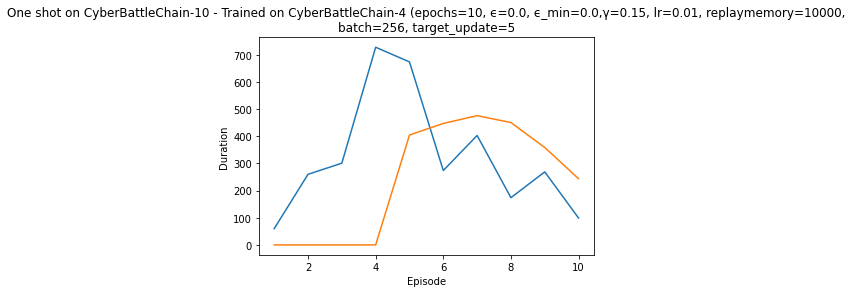

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=9000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  126.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  126.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  228.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  234.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  234.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  236.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  236.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  242.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  242.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:  246.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:  246.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward:  248.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward:  248.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:  254.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:  254.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 37|reward:  263.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 37|reward:  263.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward:  363.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward:  363.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 51|reward:  369.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 51|reward:  369.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 1|Iteration 70|reward:  375.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 1|Iteration 70|reward:  375.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 1|Iteration 102|reward:  384.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 1|Iteration 102|reward:  384.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 1|Iteration 113|reward:  392.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 1|Iteration 113|reward:  392.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 1|Iteration 124|reward:  492.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 1|Iteration 124|reward:  492.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 1|Iteration 131|reward:  501.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 1|Iteration 131|reward:  501.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 1|Iteration 134|reward:  601.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 1|Iteration 134|reward:  601.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 1|Iteration 135|reward:  603.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 1|Iteration 135|reward:  603.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 1|Iteration 139|reward:  609.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 1|Iteration 139|reward:  609.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 1|Iteration 141|reward:  617.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 1|Iteration 141|reward:  617.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 1|Iteration 147|reward:  623.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 1|Iteration 147|reward:  623.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 1|Iteration 158|reward:  625.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 1|Iteration 158|reward:  625.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 1|Iteration 203|reward:  625.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 1|Iteration 228|reward:  625.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 1|Iteration 254|reward:  634.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 1|Iteration 254|reward:  634.0|last_reward_at:  254|Elapsed Time: 0:00:00||

Episode 1|Iteration 257|reward:  734.0|last_reward_at:  254|Elapsed Time: 0:00:00||

Episode 1|Iteration 257|reward:  734.0|last_reward_at:  257|Elapsed Time: 0:00:00||

Episode 1|Iteration 300|reward:  734.0|last_reward_at:  257|Elapsed Time: 0:00:00||

Episode 1|Iteration 318|reward:  743.0|last_reward_at:  257|Elapsed Time: 0:00:00||

Episode 1|Iteration 318|reward:  743.0|last_reward_at:  318|Elapsed Time: 0:00:00||

Episode 1|Iteration 319|reward:  843.0|last_reward_at:  318|Elapsed Time: 0:00:00||

Episode 1|Iteration 319|reward:  843.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 1|Iteration 326|reward:  849.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 1|Iteration 326|reward:  849.0|last_reward_at:  326|Elapsed Time: 0:00:00||

Episode 1|Iteration 330|reward:  851.0|last_reward_at:  326|Elapsed Time: 0:00:00||

Episode 1|Iteration 330|reward:  851.0|last_reward_at:  330|Elapsed Time: 0:00:00||

Episode 1|Iteration 331|reward:  860.0|last_reward_at:  330|Elapsed Time: 0:00:00||

Episode 1|Iteration 331|reward:  860.0|last_reward_at:  331|Elapsed Time: 0:00:00||

Episode 1|Iteration 337|reward:  868.0|last_reward_at:  331|Elapsed Time: 0:00:00||

Episode 1|Iteration 337|reward:  868.0|last_reward_at:  337|Elapsed Time: 0:00:00||

Episode 1|Iteration 339|reward:  968.0|last_reward_at:  337|Elapsed Time: 0:00:00||

Episode 1|Iteration 339|reward:  968.0|last_reward_at:  339|Elapsed Time: 0:00:00||

Episode 1|Iteration 345|reward:  970.0|last_reward_at:  339|Elapsed Time: 0:00:00||

Episode 1|Iteration 345|reward:  970.0|last_reward_at:  345|Elapsed Time: 0:00:00||

Episode 1|Iteration 354|reward:  976.0|last_reward_at:  345|Elapsed Time: 0:00:00||

Episode 1|Iteration 354|reward:  976.0|last_reward_at:  354|Elapsed Time: 0:00:00||

Episode 1|Iteration 383|reward:  976.0|last_reward_at:  354|Elapsed Time: 0:00:00||

Episode 1|Iteration 387|reward:  985.0|last_reward_at:  354|Elapsed Time: 0:00:00||

Episode 1|Iteration 387|reward:  985.0|last_reward_at:  387|Elapsed Time: 0:00:00||

Episode 1|Iteration 389|reward:  991.0|last_reward_at:  387|Elapsed Time: 0:00:00||

Episode 1|Iteration 389|reward:  991.0|last_reward_at:  389|Elapsed Time: 0:00:00||

Episode 1|Iteration 392|reward: 1091.0|last_reward_at:  389|Elapsed Time: 0:00:00||

Episode 1|Iteration 392|reward: 1091.0|last_reward_at:  392|Elapsed Time: 0:00:00||

Episode 1|Iteration 409|reward: 1097.0|last_reward_at:  392|Elapsed Time: 0:00:01||

Episode 1|Iteration 409|reward: 1097.0|last_reward_at:  409|Elapsed Time: 0:00:01||

Episode 1|Iteration 421|reward: 1099.0|last_reward_at:  409|Elapsed Time: 0:00:01||

Episode 1|Iteration 421|reward: 1099.0|last_reward_at:  421|Elapsed Time: 0:00:01||

Episode 1|Iteration 426|reward: 1108.0|last_reward_at:  421|Elapsed Time: 0:00:01||

Episode 1|Iteration 426|reward: 1108.0|last_reward_at:  426|Elapsed Time: 0:00:01||

Episode 1|Iteration 428|reward: 1208.0|last_reward_at:  426|Elapsed Time: 0:00:01||

Episode 1|Iteration 428|reward: 1208.0|last_reward_at:  428|Elapsed Time: 0:00:01||

Episode 1|Iteration 446|reward: 1217.0|last_reward_at:  428|Elapsed Time: 0:00:01||

Episode 1|Iteration 446|reward: 1217.0|last_reward_at:  446|Elapsed Time: 0:00:01||

Episode 1|Iteration 449|reward: 1223.0|last_reward_at:  446|Elapsed Time: 0:00:01||

Episode 1|Iteration 449|reward: 1223.0|last_reward_at:  449|Elapsed Time: 0:00:01||

Episode 1|Iteration 466|reward: 6223.0|last_reward_at:  449|Elapsed Time: 0:00:01||

Episode 1|Iteration 466|reward: 6223.0|last_reward_at:  466|Elapsed Time: 0:00:01||

  Episode 1 ended at t=466 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 18/169 (0.10)
    explore-remote: 18/250 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 49
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.8637, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:    9.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:   15.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:   15.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  115.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  115.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  124.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  124.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  132.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  132.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  138.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  138.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  144.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  144.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward:  244.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward:  244.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 2|Iteration 52|reward:  250.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 2|Iteration 52|reward:  250.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  259.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  259.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 64|reward:  261.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 64|reward:  261.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 2|Iteration 65|reward:  361.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 2|Iteration 65|reward:  361.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 2|Iteration 71|reward:  370.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 2|Iteration 71|reward:  370.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 2|Iteration 75|reward:  470.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 2|Iteration 75|reward:  470.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 2|Iteration 77|reward:  476.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 2|Iteration 77|reward:  476.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 2|Iteration 78|reward:  482.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 2|Iteration 78|reward:  482.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 2|Iteration 79|reward:  488.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 2|Iteration 79|reward:  488.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 2|Iteration 81|reward:  490.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 2|Iteration 81|reward:  490.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 2|Iteration 89|reward:  492.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 2|Iteration 89|reward:  492.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 2|Iteration 104|reward:  501.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 2|Iteration 104|reward:  501.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 2|Iteration 110|reward:  601.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 2|Iteration 110|reward:  601.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 2|Iteration 116|reward:  603.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 2|Iteration 116|reward:  603.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 2|Iteration 123|reward:  609.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 2|Iteration 123|reward:  609.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 2|Iteration 133|reward:  617.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 2|Iteration 133|reward:  617.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 2|Iteration 154|reward:  623.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 2|Iteration 154|reward:  623.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 2|Iteration 156|reward:  632.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 2|Iteration 156|reward:  632.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 2|Iteration 161|reward:  732.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 2|Iteration 161|reward:  732.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 2|Iteration 167|reward:  738.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 2|Iteration 167|reward:  738.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 2|Iteration 184|reward:  744.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 2|Iteration 184|reward:  744.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 2|Iteration 186|reward:  746.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 2|Iteration 186|reward:  746.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 2|Iteration 191|reward:  750.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 2|Iteration 191|reward:  750.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 2|Iteration 204|reward:  759.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 2|Iteration 204|reward:  759.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 2|Iteration 225|reward:  859.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 2|Iteration 225|reward:  859.0|last_reward_at:  225|Elapsed Time: 0:00:00||

Episode 2|Iteration 257|reward:  868.0|last_reward_at:  225|Elapsed Time: 0:00:00||

Episode 2|Iteration 257|reward:  868.0|last_reward_at:  257|Elapsed Time: 0:00:00||

Episode 2|Iteration 269|reward:  968.0|last_reward_at:  257|Elapsed Time: 0:00:00||

Episode 2|Iteration 269|reward:  968.0|last_reward_at:  269|Elapsed Time: 0:00:00||

Episode 2|Iteration 287|reward:  974.0|last_reward_at:  269|Elapsed Time: 0:00:00||

Episode 2|Iteration 287|reward:  974.0|last_reward_at:  287|Elapsed Time: 0:00:00||

Episode 2|Iteration 307|reward:  980.0|last_reward_at:  287|Elapsed Time: 0:00:00||

Episode 2|Iteration 307|reward:  980.0|last_reward_at:  307|Elapsed Time: 0:00:00||

Episode 2|Iteration 342|reward:  980.0|last_reward_at:  307|Elapsed Time: 0:00:00||

Episode 2|Iteration 347|reward:  989.0|last_reward_at:  307|Elapsed Time: 0:00:00||

Episode 2|Iteration 347|reward:  989.0|last_reward_at:  347|Elapsed Time: 0:00:00||

Episode 2|Iteration 352|reward: 1089.0|last_reward_at:  347|Elapsed Time: 0:00:00||

Episode 2|Iteration 352|reward: 1089.0|last_reward_at:  352|Elapsed Time: 0:00:00||

Episode 2|Iteration 354|reward: 1091.0|last_reward_at:  352|Elapsed Time: 0:00:00||

Episode 2|Iteration 354|reward: 1091.0|last_reward_at:  354|Elapsed Time: 0:00:00||

Episode 2|Iteration 388|reward: 1091.0|last_reward_at:  354|Elapsed Time: 0:00:00||

Episode 2|Iteration 394|reward: 1097.0|last_reward_at:  354|Elapsed Time: 0:00:00||

Episode 2|Iteration 394|reward: 1097.0|last_reward_at:  394|Elapsed Time: 0:00:00||

Episode 2|Iteration 423|reward: 1097.0|last_reward_at:  394|Elapsed Time: 0:00:01||

Episode 2|Iteration 430|reward: 1099.0|last_reward_at:  394|Elapsed Time: 0:00:01||

Episode 2|Iteration 430|reward: 1099.0|last_reward_at:  430|Elapsed Time: 0:00:01||

Episode 2|Iteration 442|reward: 1105.0|last_reward_at:  430|Elapsed Time: 0:00:01||

Episode 2|Iteration 442|reward: 1105.0|last_reward_at:  442|Elapsed Time: 0:00:01||

Episode 2|Iteration 471|reward: 1111.0|last_reward_at:  442|Elapsed Time: 0:00:01||

Episode 2|Iteration 471|reward: 1111.0|last_reward_at:  471|Elapsed Time: 0:00:01||

Episode 2|Iteration 476|reward: 1119.0|last_reward_at:  471|Elapsed Time: 0:00:01||

Episode 2|Iteration 476|reward: 1119.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 2|Iteration 509|reward: 1119.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 2|Iteration 540|reward: 1119.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 2|Iteration 570|reward: 1119.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 2|Iteration 585|reward: 1125.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 2|Iteration 585|reward: 1125.0|last_reward_at:  585|Elapsed Time: 0:00:01||

Episode 2|Iteration 587|reward: 1134.0|last_reward_at:  585|Elapsed Time: 0:00:01||

Episode 2|Iteration 587|reward: 1134.0|last_reward_at:  587|Elapsed Time: 0:00:01||

Episode 2|Iteration 594|reward: 1234.0|last_reward_at:  587|Elapsed Time: 0:00:01||

Episode 2|Iteration 594|reward: 1234.0|last_reward_at:  594|Elapsed Time: 0:00:01||

Episode 2|Iteration 621|reward: 1234.0|last_reward_at:  594|Elapsed Time: 0:00:01||

Episode 2|Iteration 652|reward: 1234.0|last_reward_at:  594|Elapsed Time: 0:00:01||

Episode 2|Iteration 684|reward: 1234.0|last_reward_at:  594|Elapsed Time: 0:00:01||

Episode 2|Iteration 713|reward: 1240.0|last_reward_at:  594|Elapsed Time: 0:00:02||

Episode 2|Iteration 713|reward: 1240.0|last_reward_at:  713|Elapsed Time: 0:00:02||

Episode 2|Iteration 743|reward: 1240.0|last_reward_at:  713|Elapsed Time: 0:00:02||

Episode 2|Iteration 766|reward: 1240.0|last_reward_at:  713|Elapsed Time: 0:00:02||

Episode 2|Iteration 785|reward: 1240.0|last_reward_at:  713|Elapsed Time: 0:00:02||

Episode 2|Iteration 798|reward: 1240.0|last_reward_at:  713|Elapsed Time: 0:00:02||

Episode 2|Iteration 826|reward: 1240.0|last_reward_at:  713|Elapsed Time: 0:00:02||

Episode 2|Iteration 836|reward: 1249.0|last_reward_at:  713|Elapsed Time: 0:00:02||

Episode 2|Iteration 836|reward: 1249.0|last_reward_at:  836|Elapsed Time: 0:00:02||

Episode 2|Iteration 840|reward: 6249.0|last_reward_at:  836|Elapsed Time: 0:00:02||

Episode 2|Iteration 840|reward: 6249.0|last_reward_at:  840|Elapsed Time: 0:00:02||

  Episode 2 ended at t=840 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/327 (0.06)
    explore-remote: 20/461 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 115
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.8021, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  109.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  111.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  111.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  113.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  113.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  119.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  119.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:  127.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:  127.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward:  136.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward:  136.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 36|reward:  142.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 36|reward:  142.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  242.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  242.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 45|reward:  248.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 45|reward:  248.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  257.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  257.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 49|reward:  357.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 49|reward:  357.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:  359.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:  359.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 3|Iteration 60|reward:  361.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 3|Iteration 60|reward:  361.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 3|Iteration 62|reward:  367.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 3|Iteration 62|reward:  367.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 3|Iteration 64|reward:  375.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 3|Iteration 64|reward:  375.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 3|Iteration 65|reward:  384.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 3|Iteration 65|reward:  384.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 3|Iteration 68|reward:  484.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 3|Iteration 68|reward:  484.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 3|Iteration 80|reward:  490.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 3|Iteration 80|reward:  490.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 3|Iteration 86|reward:  494.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 3|Iteration 86|reward:  494.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 3|Iteration 89|reward:  503.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 3|Iteration 89|reward:  503.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 3|Iteration 96|reward:  603.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 3|Iteration 96|reward:  603.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 3|Iteration 97|reward:  605.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 3|Iteration 97|reward:  605.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 3|Iteration 114|reward:  611.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 3|Iteration 114|reward:  611.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 3|Iteration 121|reward:  617.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 3|Iteration 121|reward:  617.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 3|Iteration 138|reward:  625.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 3|Iteration 138|reward:  625.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 3|Iteration 141|reward:  631.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 3|Iteration 141|reward:  631.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 3|Iteration 146|reward:  640.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 3|Iteration 146|reward:  640.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 3|Iteration 157|reward:  740.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 3|Iteration 157|reward:  740.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 3|Iteration 170|reward:  746.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 3|Iteration 170|reward:  746.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 3|Iteration 173|reward:  748.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 3|Iteration 173|reward:  748.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 3|Iteration 183|reward:  757.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 3|Iteration 183|reward:  757.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 3|Iteration 187|reward:  857.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 3|Iteration 187|reward:  857.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 3|Iteration 189|reward:  866.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 3|Iteration 189|reward:  866.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 3|Iteration 190|reward:  966.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 3|Iteration 190|reward:  966.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 3|Iteration 200|reward:  972.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 3|Iteration 200|reward:  972.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 3|Iteration 205|reward:  978.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 3|Iteration 205|reward:  978.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 3|Iteration 219|reward:  984.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 3|Iteration 219|reward:  984.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 3|Iteration 227|reward:  986.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 3|Iteration 227|reward:  986.0|last_reward_at:  227|Elapsed Time: 0:00:00||

Episode 3|Iteration 265|reward:  986.0|last_reward_at:  227|Elapsed Time: 0:00:00||

Episode 3|Iteration 277|reward:  995.0|last_reward_at:  227|Elapsed Time: 0:00:00||

Episode 3|Iteration 277|reward:  995.0|last_reward_at:  277|Elapsed Time: 0:00:00||

Episode 3|Iteration 285|reward: 1095.0|last_reward_at:  277|Elapsed Time: 0:00:00||

Episode 3|Iteration 285|reward: 1095.0|last_reward_at:  285|Elapsed Time: 0:00:00||

Episode 3|Iteration 287|reward: 1101.0|last_reward_at:  285|Elapsed Time: 0:00:00||

Episode 3|Iteration 287|reward: 1101.0|last_reward_at:  287|Elapsed Time: 0:00:00||

Episode 3|Iteration 301|reward: 1107.0|last_reward_at:  287|Elapsed Time: 0:00:00||

Episode 3|Iteration 301|reward: 1107.0|last_reward_at:  301|Elapsed Time: 0:00:00||

Episode 3|Iteration 312|reward: 1109.0|last_reward_at:  301|Elapsed Time: 0:00:00||

Episode 3|Iteration 312|reward: 1109.0|last_reward_at:  312|Elapsed Time: 0:00:00||

Episode 3|Iteration 315|reward: 1117.0|last_reward_at:  312|Elapsed Time: 0:00:00||

Episode 3|Iteration 315|reward: 1117.0|last_reward_at:  315|Elapsed Time: 0:00:00||

Episode 3|Iteration 317|reward: 1126.0|last_reward_at:  315|Elapsed Time: 0:00:00||

Episode 3|Iteration 317|reward: 1126.0|last_reward_at:  317|Elapsed Time: 0:00:00||

Episode 3|Iteration 321|reward: 1226.0|last_reward_at:  317|Elapsed Time: 0:00:00||

Episode 3|Iteration 321|reward: 1226.0|last_reward_at:  321|Elapsed Time: 0:00:00||

Episode 3|Iteration 324|reward: 1232.0|last_reward_at:  321|Elapsed Time: 0:00:00||

Episode 3|Iteration 324|reward: 1232.0|last_reward_at:  324|Elapsed Time: 0:00:00||

Episode 3|Iteration 342|reward: 1232.0|last_reward_at:  324|Elapsed Time: 0:00:00||

Episode 3|Iteration 360|reward: 1234.0|last_reward_at:  324|Elapsed Time: 0:00:00||

Episode 3|Iteration 360|reward: 1234.0|last_reward_at:  360|Elapsed Time: 0:00:00||

Episode 3|Iteration 388|reward: 1234.0|last_reward_at:  360|Elapsed Time: 0:00:01||

Episode 3|Iteration 401|reward: 1243.0|last_reward_at:  360|Elapsed Time: 0:00:01||

Episode 3|Iteration 401|reward: 1243.0|last_reward_at:  401|Elapsed Time: 0:00:01||

Episode 3|Iteration 403|reward: 6243.0|last_reward_at:  401|Elapsed Time: 0:00:01||

Episode 3|Iteration 403|reward: 6243.0|last_reward_at:  403|Elapsed Time: 0:00:01||

  Episode 3 ended at t=403 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/156 (0.11)
    explore-remote: 20/196 (0.09)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 71
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.7744, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:    9.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  109.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  109.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  111.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  111.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  113.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  113.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  119.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  119.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  125.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  125.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  133.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  133.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward:  142.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward:  142.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 41|reward:  242.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 41|reward:  242.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 4|Iteration 42|reward:  251.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 4|Iteration 42|reward:  251.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:  351.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:  351.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 46|reward:  353.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 46|reward:  353.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 4|Iteration 48|reward:  355.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 4|Iteration 48|reward:  355.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 4|Iteration 57|reward:  361.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 4|Iteration 57|reward:  361.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 4|Iteration 69|reward:  367.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 4|Iteration 69|reward:  367.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 4|Iteration 71|reward:  373.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 4|Iteration 71|reward:  373.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 4|Iteration 78|reward:  381.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 4|Iteration 78|reward:  381.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:  381.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 4|Iteration 128|reward:  390.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 4|Iteration 128|reward:  390.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 4|Iteration 131|reward:  490.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 4|Iteration 131|reward:  490.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 4|Iteration 152|reward:  499.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 4|Iteration 152|reward:  499.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 4|Iteration 160|reward:  599.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 4|Iteration 160|reward:  599.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 4|Iteration 177|reward:  605.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 4|Iteration 177|reward:  605.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 4|Iteration 192|reward:  607.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 4|Iteration 192|reward:  607.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 4|Iteration 221|reward:  609.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 4|Iteration 221|reward:  609.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 4|Iteration 224|reward:  615.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 4|Iteration 224|reward:  615.0|last_reward_at:  224|Elapsed Time: 0:00:00||

Episode 4|Iteration 231|reward:  623.0|last_reward_at:  224|Elapsed Time: 0:00:00||

Episode 4|Iteration 231|reward:  623.0|last_reward_at:  231|Elapsed Time: 0:00:00||

Episode 4|Iteration 273|reward:  623.0|last_reward_at:  231|Elapsed Time: 0:00:00||

Episode 4|Iteration 307|reward:  632.0|last_reward_at:  231|Elapsed Time: 0:00:00||

Episode 4|Iteration 307|reward:  632.0|last_reward_at:  307|Elapsed Time: 0:00:00||

Episode 4|Iteration 310|reward:  732.0|last_reward_at:  307|Elapsed Time: 0:00:00||

Episode 4|Iteration 310|reward:  732.0|last_reward_at:  310|Elapsed Time: 0:00:00||

Episode 4|Iteration 312|reward:  738.0|last_reward_at:  310|Elapsed Time: 0:00:00||

Episode 4|Iteration 312|reward:  738.0|last_reward_at:  312|Elapsed Time: 0:00:00||

Episode 4|Iteration 342|reward:  738.0|last_reward_at:  312|Elapsed Time: 0:00:00||

Episode 4|Iteration 342|reward:  747.0|last_reward_at:  312|Elapsed Time: 0:00:00||

Episode 4|Iteration 342|reward:  747.0|last_reward_at:  342|Elapsed Time: 0:00:00||

Episode 4|Iteration 349|reward:  847.0|last_reward_at:  342|Elapsed Time: 0:00:00||

Episode 4|Iteration 349|reward:  847.0|last_reward_at:  349|Elapsed Time: 0:00:00||

Episode 4|Iteration 359|reward:  849.0|last_reward_at:  349|Elapsed Time: 0:00:00||

Episode 4|Iteration 359|reward:  849.0|last_reward_at:  359|Elapsed Time: 0:00:00||

Episode 4|Iteration 361|reward:  858.0|last_reward_at:  359|Elapsed Time: 0:00:00||

Episode 4|Iteration 361|reward:  858.0|last_reward_at:  361|Elapsed Time: 0:00:00||

Episode 4|Iteration 362|reward:  958.0|last_reward_at:  361|Elapsed Time: 0:00:00||

Episode 4|Iteration 362|reward:  958.0|last_reward_at:  362|Elapsed Time: 0:00:00||

Episode 4|Iteration 382|reward:  964.0|last_reward_at:  362|Elapsed Time: 0:00:00||

Episode 4|Iteration 382|reward:  964.0|last_reward_at:  382|Elapsed Time: 0:00:00||

Episode 4|Iteration 394|reward:  970.0|last_reward_at:  382|Elapsed Time: 0:00:01||

Episode 4|Iteration 394|reward:  970.0|last_reward_at:  394|Elapsed Time: 0:00:01||

Episode 4|Iteration 395|reward:  972.0|last_reward_at:  394|Elapsed Time: 0:00:01||

Episode 4|Iteration 395|reward:  972.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 4|Iteration 417|reward:  974.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 4|Iteration 417|reward:  974.0|last_reward_at:  417|Elapsed Time: 0:00:01||

Episode 4|Iteration 419|reward:  980.0|last_reward_at:  417|Elapsed Time: 0:00:01||

Episode 4|Iteration 419|reward:  980.0|last_reward_at:  419|Elapsed Time: 0:00:01||

Episode 4|Iteration 426|reward:  986.0|last_reward_at:  419|Elapsed Time: 0:00:01||

Episode 4|Iteration 426|reward:  986.0|last_reward_at:  426|Elapsed Time: 0:00:01||

Episode 4|Iteration 432|reward:  995.0|last_reward_at:  426|Elapsed Time: 0:00:01||

Episode 4|Iteration 432|reward:  995.0|last_reward_at:  432|Elapsed Time: 0:00:01||

Episode 4|Iteration 445|reward:  999.0|last_reward_at:  432|Elapsed Time: 0:00:01||

Episode 4|Iteration 445|reward:  999.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 4|Iteration 447|reward: 1099.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 4|Iteration 447|reward: 1099.0|last_reward_at:  447|Elapsed Time: 0:00:01||

Episode 4|Iteration 450|reward: 1105.0|last_reward_at:  447|Elapsed Time: 0:00:01||

Episode 4|Iteration 450|reward: 1105.0|last_reward_at:  450|Elapsed Time: 0:00:01||

Episode 4|Iteration 486|reward: 1105.0|last_reward_at:  450|Elapsed Time: 0:00:01||

Episode 4|Iteration 490|reward: 1111.0|last_reward_at:  450|Elapsed Time: 0:00:01||

Episode 4|Iteration 490|reward: 1111.0|last_reward_at:  490|Elapsed Time: 0:00:01||

Episode 4|Iteration 492|reward: 1119.0|last_reward_at:  490|Elapsed Time: 0:00:01||

Episode 4|Iteration 492|reward: 1119.0|last_reward_at:  492|Elapsed Time: 0:00:01||

Episode 4|Iteration 509|reward: 1125.0|last_reward_at:  492|Elapsed Time: 0:00:01||

Episode 4|Iteration 509|reward: 1125.0|last_reward_at:  509|Elapsed Time: 0:00:01||

Episode 4|Iteration 541|reward: 1134.0|last_reward_at:  509|Elapsed Time: 0:00:01||

Episode 4|Iteration 541|reward: 1134.0|last_reward_at:  541|Elapsed Time: 0:00:01||

Episode 4|Iteration 542|reward: 1234.0|last_reward_at:  541|Elapsed Time: 0:00:01||

Episode 4|Iteration 542|reward: 1234.0|last_reward_at:  542|Elapsed Time: 0:00:01||

Episode 4|Iteration 546|reward: 1240.0|last_reward_at:  542|Elapsed Time: 0:00:01||

Episode 4|Iteration 546|reward: 1240.0|last_reward_at:  546|Elapsed Time: 0:00:01||

Episode 4|Iteration 570|reward: 1240.0|last_reward_at:  546|Elapsed Time: 0:00:01||

Episode 4|Iteration 599|reward: 1240.0|last_reward_at:  546|Elapsed Time: 0:00:01||

Episode 4|Iteration 629|reward: 1240.0|last_reward_at:  546|Elapsed Time: 0:00:01||

Episode 4|Iteration 658|reward: 1240.0|last_reward_at:  546|Elapsed Time: 0:00:01||

Episode 4|Iteration 684|reward: 1240.0|last_reward_at:  546|Elapsed Time: 0:00:01||

Episode 4|Iteration 709|reward: 1240.0|last_reward_at:  546|Elapsed Time: 0:00:02||

Episode 4|Iteration 732|reward: 1249.0|last_reward_at:  546|Elapsed Time: 0:00:02||

Episode 4|Iteration 732|reward: 1249.0|last_reward_at:  732|Elapsed Time: 0:00:02||

Episode 4|Iteration 733|reward: 6249.0|last_reward_at:  732|Elapsed Time: 0:00:02||

Episode 4|Iteration 733|reward: 6249.0|last_reward_at:  733|Elapsed Time: 0:00:02||

  Episode 4 ended at t=733 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/301 (0.07)
    explore-remote: 20/380 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 171
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.7267, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:    9.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:   13.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:   13.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  113.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  113.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  122.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  122.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  222.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  222.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  224.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  224.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  230.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  230.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  236.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  236.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:  245.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:  245.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  345.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  345.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  354.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  354.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  454.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  454.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:  463.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:  463.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward:  563.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward:  563.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 5|Iteration 33|reward:  569.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 5|Iteration 33|reward:  569.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  571.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  571.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 39|reward:  573.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 39|reward:  573.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 5|Iteration 43|reward:  579.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 5|Iteration 43|reward:  579.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 5|Iteration 45|reward:  581.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 5|Iteration 45|reward:  581.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 5|Iteration 51|reward:  590.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 5|Iteration 51|reward:  590.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 52|reward:  690.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 52|reward:  690.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 5|Iteration 53|reward:  696.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 5|Iteration 53|reward:  696.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 5|Iteration 55|reward:  698.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 5|Iteration 55|reward:  698.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 5|Iteration 60|reward:  704.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 5|Iteration 60|reward:  704.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 5|Iteration 61|reward:  710.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 5|Iteration 61|reward:  710.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 5|Iteration 63|reward:  716.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 5|Iteration 63|reward:  716.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 5|Iteration 68|reward:  722.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 5|Iteration 68|reward:  722.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 5|Iteration 71|reward:  728.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 5|Iteration 71|reward:  728.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 5|Iteration 107|reward:  737.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 5|Iteration 107|reward:  737.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 5|Iteration 108|reward:  837.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 5|Iteration 108|reward:  837.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 5|Iteration 110|reward:  839.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 5|Iteration 110|reward:  839.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 5|Iteration 115|reward:  845.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 5|Iteration 115|reward:  845.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 5|Iteration 121|reward:  851.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 5|Iteration 121|reward:  851.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 5|Iteration 135|reward:  857.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 5|Iteration 135|reward:  857.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 5|Iteration 137|reward:  863.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 5|Iteration 137|reward:  863.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 5|Iteration 145|reward:  865.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 5|Iteration 145|reward:  865.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 5|Iteration 155|reward:  874.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 5|Iteration 155|reward:  874.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 5|Iteration 156|reward:  974.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 5|Iteration 156|reward:  974.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 5|Iteration 157|reward:  980.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 5|Iteration 157|reward:  980.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 5|Iteration 188|reward:  980.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 5|Iteration 190|reward:  986.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 5|Iteration 190|reward:  986.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 5|Iteration 192|reward:  990.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 5|Iteration 192|reward:  990.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 5|Iteration 215|reward:  992.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 5|Iteration 215|reward:  992.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 5|Iteration 216|reward: 1001.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 5|Iteration 216|reward: 1001.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 5|Iteration 220|reward: 1101.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 5|Iteration 220|reward: 1101.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 5|Iteration 244|reward: 1107.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 5|Iteration 244|reward: 1107.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 5|Iteration 246|reward: 1113.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 5|Iteration 246|reward: 1113.0|last_reward_at:  246|Elapsed Time: 0:00:00||

Episode 5|Iteration 261|reward: 1121.0|last_reward_at:  246|Elapsed Time: 0:00:00||

Episode 5|Iteration 261|reward: 1121.0|last_reward_at:  261|Elapsed Time: 0:00:00||

Episode 5|Iteration 293|reward: 1121.0|last_reward_at:  261|Elapsed Time: 0:00:00||

Episode 5|Iteration 312|reward: 1130.0|last_reward_at:  261|Elapsed Time: 0:00:00||

Episode 5|Iteration 312|reward: 1130.0|last_reward_at:  312|Elapsed Time: 0:00:00||

Episode 5|Iteration 317|reward: 1230.0|last_reward_at:  312|Elapsed Time: 0:00:00||

Episode 5|Iteration 317|reward: 1230.0|last_reward_at:  317|Elapsed Time: 0:00:00||

Episode 5|Iteration 338|reward: 1236.0|last_reward_at:  317|Elapsed Time: 0:00:01||

Episode 5|Iteration 338|reward: 1236.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 5|Iteration 359|reward: 1245.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 5|Iteration 359|reward: 1245.0|last_reward_at:  359|Elapsed Time: 0:00:01||

Episode 5|Iteration 360|reward: 6245.0|last_reward_at:  359|Elapsed Time: 0:00:01||

Episode 5|Iteration 360|reward: 6245.0|last_reward_at:  360|Elapsed Time: 0:00:01||

  Episode 5 ended at t=360 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/145 (0.13)
    explore-remote: 20/163 (0.11)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 97
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.7046, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:    9.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:   13.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:   13.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  113.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  113.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:  122.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:  122.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  222.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  222.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  228.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  228.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:  230.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:  230.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:  236.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:  236.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 29|reward:  240.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 29|reward:  240.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 6|Iteration 31|reward:  249.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 6|Iteration 31|reward:  249.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 6|Iteration 32|reward:  251.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 6|Iteration 32|reward:  251.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 6|Iteration 33|reward:  351.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 6|Iteration 33|reward:  351.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 6|Iteration 34|reward:  357.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 6|Iteration 34|reward:  357.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 6|Iteration 43|reward:  363.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 6|Iteration 43|reward:  363.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 6|Iteration 49|reward:  369.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 6|Iteration 49|reward:  369.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 6|Iteration 51|reward:  378.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 6|Iteration 51|reward:  378.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 6|Iteration 53|reward:  478.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 6|Iteration 53|reward:  478.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 6|Iteration 54|reward:  484.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 6|Iteration 54|reward:  484.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 6|Iteration 60|reward:  490.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 6|Iteration 60|reward:  490.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 6|Iteration 63|reward:  492.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 6|Iteration 63|reward:  492.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 6|Iteration 65|reward:  496.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 6|Iteration 65|reward:  496.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 6|Iteration 88|reward:  502.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 6|Iteration 88|reward:  502.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 6|Iteration 108|reward:  511.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 6|Iteration 108|reward:  511.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 6|Iteration 110|reward:  611.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 6|Iteration 110|reward:  611.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 6|Iteration 117|reward:  620.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 6|Iteration 117|reward:  620.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 6|Iteration 122|reward:  720.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 6|Iteration 122|reward:  720.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 6|Iteration 126|reward:  729.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 6|Iteration 126|reward:  729.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 6|Iteration 127|reward:  735.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 6|Iteration 127|reward:  735.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 6|Iteration 130|reward:  835.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 6|Iteration 130|reward:  835.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 6|Iteration 140|reward:  841.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 6|Iteration 140|reward:  841.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 6|Iteration 155|reward:  850.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 6|Iteration 155|reward:  850.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 6|Iteration 158|reward:  950.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 6|Iteration 158|reward:  950.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 6|Iteration 167|reward:  952.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 6|Iteration 167|reward:  952.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 6|Iteration 169|reward:  958.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 6|Iteration 169|reward:  958.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 6|Iteration 178|reward:  964.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 6|Iteration 178|reward:  964.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 6|Iteration 184|reward:  966.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 6|Iteration 184|reward:  966.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 6|Iteration 194|reward:  972.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 6|Iteration 194|reward:  972.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 6|Iteration 195|reward:  978.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 6|Iteration 195|reward:  978.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 6|Iteration 227|reward:  984.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 6|Iteration 227|reward:  984.0|last_reward_at:  227|Elapsed Time: 0:00:00||

Episode 6|Iteration 260|reward:  990.0|last_reward_at:  227|Elapsed Time: 0:00:00||

Episode 6|Iteration 260|reward:  990.0|last_reward_at:  260|Elapsed Time: 0:00:00||

Episode 6|Iteration 266|reward:  994.0|last_reward_at:  260|Elapsed Time: 0:00:00||

Episode 6|Iteration 266|reward:  994.0|last_reward_at:  266|Elapsed Time: 0:00:00||

Episode 6|Iteration 267|reward:  996.0|last_reward_at:  266|Elapsed Time: 0:00:00||

Episode 6|Iteration 267|reward:  996.0|last_reward_at:  267|Elapsed Time: 0:00:00||

Episode 6|Iteration 302|reward:  996.0|last_reward_at:  267|Elapsed Time: 0:00:00||

Episode 6|Iteration 337|reward:  996.0|last_reward_at:  267|Elapsed Time: 0:00:00||

Episode 6|Iteration 343|reward: 1005.0|last_reward_at:  267|Elapsed Time: 0:00:00||

Episode 6|Iteration 343|reward: 1005.0|last_reward_at:  343|Elapsed Time: 0:00:00||

Episode 6|Iteration 345|reward: 1105.0|last_reward_at:  343|Elapsed Time: 0:00:00||

Episode 6|Iteration 345|reward: 1105.0|last_reward_at:  345|Elapsed Time: 0:00:00||

Episode 6|Iteration 378|reward: 1105.0|last_reward_at:  345|Elapsed Time: 0:00:01||

Episode 6|Iteration 408|reward: 1111.0|last_reward_at:  345|Elapsed Time: 0:00:01||

Episode 6|Iteration 408|reward: 1111.0|last_reward_at:  408|Elapsed Time: 0:00:01||

Episode 6|Iteration 411|reward: 1119.0|last_reward_at:  408|Elapsed Time: 0:00:01||

Episode 6|Iteration 411|reward: 1119.0|last_reward_at:  411|Elapsed Time: 0:00:01||

Episode 6|Iteration 441|reward: 1119.0|last_reward_at:  411|Elapsed Time: 0:00:01||

Episode 6|Iteration 472|reward: 1119.0|last_reward_at:  411|Elapsed Time: 0:00:01||

Episode 6|Iteration 504|reward: 1119.0|last_reward_at:  411|Elapsed Time: 0:00:01||

Episode 6|Iteration 524|reward: 1125.0|last_reward_at:  411|Elapsed Time: 0:00:01||

Episode 6|Iteration 524|reward: 1125.0|last_reward_at:  524|Elapsed Time: 0:00:01||

Episode 6|Iteration 555|reward: 1125.0|last_reward_at:  524|Elapsed Time: 0:00:01||

Episode 6|Iteration 570|reward: 1125.0|last_reward_at:  524|Elapsed Time: 0:00:01||

Episode 6|Iteration 601|reward: 1125.0|last_reward_at:  524|Elapsed Time: 0:00:01||

Episode 6|Iteration 617|reward: 1134.0|last_reward_at:  524|Elapsed Time: 0:00:01||

Episode 6|Iteration 617|reward: 1134.0|last_reward_at:  617|Elapsed Time: 0:00:01||

Episode 6|Iteration 618|reward: 1234.0|last_reward_at:  617|Elapsed Time: 0:00:01||

Episode 6|Iteration 618|reward: 1234.0|last_reward_at:  618|Elapsed Time: 0:00:01||

Episode 6|Iteration 644|reward: 1243.0|last_reward_at:  618|Elapsed Time: 0:00:01||

Episode 6|Iteration 644|reward: 1243.0|last_reward_at:  644|Elapsed Time: 0:00:01||

Episode 6|Iteration 645|reward: 6243.0|last_reward_at:  644|Elapsed Time: 0:00:01||

Episode 6|Iteration 645|reward: 6243.0|last_reward_at:  645|Elapsed Time: 0:00:01||

  Episode 6 ended at t=645 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/263 (0.07)
    explore-remote: 20/331 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 179
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.6668, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:    9.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:   11.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 10|reward:  111.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 10|reward:  111.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:  120.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:  120.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:  220.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:  220.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 19|reward:  226.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 19|reward:  226.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 7|Iteration 24|reward:  232.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 7|Iteration 24|reward:  232.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 7|Iteration 28|reward:  234.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 7|Iteration 28|reward:  234.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 7|Iteration 30|reward:  240.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 7|Iteration 30|reward:  240.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 7|Iteration 32|reward:  249.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 7|Iteration 32|reward:  249.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 7|Iteration 33|reward:  253.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 7|Iteration 33|reward:  253.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 7|Iteration 35|reward:  353.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 7|Iteration 35|reward:  353.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 7|Iteration 40|reward:  359.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 7|Iteration 40|reward:  359.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 51|reward:  365.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 51|reward:  365.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 7|Iteration 54|reward:  373.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 7|Iteration 54|reward:  373.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 7|Iteration 63|reward:  375.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 7|Iteration 63|reward:  375.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 7|Iteration 81|reward:  384.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 7|Iteration 81|reward:  384.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 7|Iteration 83|reward:  484.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 7|Iteration 83|reward:  484.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 7|Iteration 101|reward:  484.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 7|Iteration 104|reward:  490.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 7|Iteration 104|reward:  490.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 7|Iteration 106|reward:  499.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 7|Iteration 106|reward:  499.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 7|Iteration 108|reward:  599.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 7|Iteration 108|reward:  599.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 7|Iteration 113|reward:  601.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 7|Iteration 113|reward:  601.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 7|Iteration 115|reward:  607.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 7|Iteration 115|reward:  607.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 7|Iteration 124|reward:  615.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 7|Iteration 124|reward:  615.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 7|Iteration 145|reward:  617.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 7|Iteration 145|reward:  617.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 7|Iteration 146|reward:  623.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 7|Iteration 146|reward:  623.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 7|Iteration 158|reward:  629.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 7|Iteration 158|reward:  629.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 7|Iteration 162|reward:  638.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 7|Iteration 162|reward:  638.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 7|Iteration 164|reward:  738.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 7|Iteration 164|reward:  738.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 7|Iteration 194|reward:  747.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 7|Iteration 194|reward:  747.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 7|Iteration 197|reward:  847.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 7|Iteration 197|reward:  847.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 7|Iteration 219|reward:  849.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 7|Iteration 219|reward:  849.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 7|Iteration 233|reward:  851.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 7|Iteration 233|reward:  851.0|last_reward_at:  233|Elapsed Time: 0:00:00||

Episode 7|Iteration 238|reward:  857.0|last_reward_at:  233|Elapsed Time: 0:00:00||

Episode 7|Iteration 238|reward:  857.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 7|Iteration 278|reward:  863.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 7|Iteration 278|reward:  863.0|last_reward_at:  278|Elapsed Time: 0:00:00||

Episode 7|Iteration 306|reward:  871.0|last_reward_at:  278|Elapsed Time: 0:00:00||

Episode 7|Iteration 306|reward:  871.0|last_reward_at:  306|Elapsed Time: 0:00:00||

Episode 7|Iteration 325|reward:  877.0|last_reward_at:  306|Elapsed Time: 0:00:00||

Episode 7|Iteration 325|reward:  877.0|last_reward_at:  325|Elapsed Time: 0:00:00||

Episode 7|Iteration 363|reward:  877.0|last_reward_at:  325|Elapsed Time: 0:00:01||

Episode 7|Iteration 382|reward:  886.0|last_reward_at:  325|Elapsed Time: 0:00:01||

Episode 7|Iteration 382|reward:  886.0|last_reward_at:  382|Elapsed Time: 0:00:01||

Episode 7|Iteration 383|reward:  986.0|last_reward_at:  382|Elapsed Time: 0:00:01||

Episode 7|Iteration 383|reward:  986.0|last_reward_at:  383|Elapsed Time: 0:00:01||

Episode 7|Iteration 420|reward:  986.0|last_reward_at:  383|Elapsed Time: 0:00:01||

Episode 7|Iteration 456|reward:  986.0|last_reward_at:  383|Elapsed Time: 0:00:01||

Episode 7|Iteration 464|reward:  995.0|last_reward_at:  383|Elapsed Time: 0:00:01||

Episode 7|Iteration 464|reward:  995.0|last_reward_at:  464|Elapsed Time: 0:00:01||

Episode 7|Iteration 465|reward: 1095.0|last_reward_at:  464|Elapsed Time: 0:00:01||

Episode 7|Iteration 465|reward: 1095.0|last_reward_at:  465|Elapsed Time: 0:00:01||

Episode 7|Iteration 482|reward: 1097.0|last_reward_at:  465|Elapsed Time: 0:00:01||

Episode 7|Iteration 482|reward: 1097.0|last_reward_at:  482|Elapsed Time: 0:00:01||

Episode 7|Iteration 487|reward: 1099.0|last_reward_at:  482|Elapsed Time: 0:00:01||

Episode 7|Iteration 487|reward: 1099.0|last_reward_at:  487|Elapsed Time: 0:00:01||

Episode 7|Iteration 499|reward: 1105.0|last_reward_at:  487|Elapsed Time: 0:00:01||

Episode 7|Iteration 499|reward: 1105.0|last_reward_at:  499|Elapsed Time: 0:00:01||

Episode 7|Iteration 530|reward: 1105.0|last_reward_at:  499|Elapsed Time: 0:00:01||

Episode 7|Iteration 532|reward: 1114.0|last_reward_at:  499|Elapsed Time: 0:00:01||

Episode 7|Iteration 532|reward: 1114.0|last_reward_at:  532|Elapsed Time: 0:00:01||

Episode 7|Iteration 533|reward: 1214.0|last_reward_at:  532|Elapsed Time: 0:00:01||

Episode 7|Iteration 533|reward: 1214.0|last_reward_at:  533|Elapsed Time: 0:00:01||

Episode 7|Iteration 556|reward: 1220.0|last_reward_at:  533|Elapsed Time: 0:00:01||

Episode 7|Iteration 556|reward: 1220.0|last_reward_at:  556|Elapsed Time: 0:00:01||

Episode 7|Iteration 557|reward: 1226.0|last_reward_at:  556|Elapsed Time: 0:00:01||

Episode 7|Iteration 557|reward: 1226.0|last_reward_at:  557|Elapsed Time: 0:00:01||

Episode 7|Iteration 577|reward: 1232.0|last_reward_at:  557|Elapsed Time: 0:00:01||

Episode 7|Iteration 577|reward: 1232.0|last_reward_at:  577|Elapsed Time: 0:00:01||

Episode 7|Iteration 582|reward: 1238.0|last_reward_at:  577|Elapsed Time: 0:00:01||

Episode 7|Iteration 582|reward: 1238.0|last_reward_at:  582|Elapsed Time: 0:00:01||

Episode 7|Iteration 612|reward: 1238.0|last_reward_at:  582|Elapsed Time: 0:00:01||

Episode 7|Iteration 640|reward: 1238.0|last_reward_at:  582|Elapsed Time: 0:00:01||

Episode 7|Iteration 667|reward: 1238.0|last_reward_at:  582|Elapsed Time: 0:00:02||

Episode 7|Iteration 684|reward: 1238.0|last_reward_at:  582|Elapsed Time: 0:00:02||

Episode 7|Iteration 709|reward: 1238.0|last_reward_at:  582|Elapsed Time: 0:00:02||

Episode 7|Iteration 738|reward: 1238.0|last_reward_at:  582|Elapsed Time: 0:00:02||

Episode 7|Iteration 740|reward: 1247.0|last_reward_at:  582|Elapsed Time: 0:00:02||

Episode 7|Iteration 740|reward: 1247.0|last_reward_at:  740|Elapsed Time: 0:00:02||

Episode 7|Iteration 741|reward: 6247.0|last_reward_at:  740|Elapsed Time: 0:00:02||

Episode 7|Iteration 741|reward: 6247.0|last_reward_at:  741|Elapsed Time: 0:00:02||

  Episode 7 ended at t=741 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/293 (0.07)
    explore-remote: 20/396 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 275
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.6263, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:    9.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:  109.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:  109.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward:  111.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward:  111.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward:  113.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward:  113.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward:  119.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward:  119.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 32|reward:  127.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 32|reward:  127.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 35|reward:  136.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 35|reward:  136.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 8|Iteration 36|reward:  236.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 8|Iteration 36|reward:  236.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 8|Iteration 37|reward:  242.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 8|Iteration 37|reward:  242.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 8|Iteration 41|reward:  251.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 8|Iteration 41|reward:  251.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 8|Iteration 42|reward:  351.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 8|Iteration 42|reward:  351.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 8|Iteration 43|reward:  353.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 8|Iteration 43|reward:  353.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 8|Iteration 53|reward:  359.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 8|Iteration 53|reward:  359.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 8|Iteration 76|reward:  368.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 8|Iteration 76|reward:  368.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 8|Iteration 77|reward:  468.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 8|Iteration 77|reward:  468.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 8|Iteration 79|reward:  470.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 8|Iteration 79|reward:  470.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 8|Iteration 82|reward:  476.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 8|Iteration 82|reward:  476.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 8|Iteration 111|reward:  482.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 8|Iteration 111|reward:  482.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 8|Iteration 117|reward:  488.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 8|Iteration 117|reward:  488.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 8|Iteration 118|reward:  492.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 8|Iteration 118|reward:  492.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 8|Iteration 119|reward:  494.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 8|Iteration 119|reward:  494.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 8|Iteration 169|reward:  494.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 8|Iteration 172|reward:  500.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 8|Iteration 172|reward:  500.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 8|Iteration 206|reward:  509.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 8|Iteration 206|reward:  509.0|last_reward_at:  206|Elapsed Time: 0:00:00||

Episode 8|Iteration 208|reward:  609.0|last_reward_at:  206|Elapsed Time: 0:00:00||

Episode 8|Iteration 208|reward:  609.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 8|Iteration 248|reward:  618.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 8|Iteration 248|reward:  618.0|last_reward_at:  248|Elapsed Time: 0:00:00||

Episode 8|Iteration 249|reward:  718.0|last_reward_at:  248|Elapsed Time: 0:00:00||

Episode 8|Iteration 249|reward:  718.0|last_reward_at:  249|Elapsed Time: 0:00:00||

Episode 8|Iteration 259|reward:  727.0|last_reward_at:  249|Elapsed Time: 0:00:00||

Episode 8|Iteration 259|reward:  727.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 8|Iteration 260|reward:  827.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 8|Iteration 260|reward:  827.0|last_reward_at:  260|Elapsed Time: 0:00:00||

Episode 8|Iteration 261|reward:  833.0|last_reward_at:  260|Elapsed Time: 0:00:00||

Episode 8|Iteration 261|reward:  833.0|last_reward_at:  261|Elapsed Time: 0:00:00||

Episode 8|Iteration 272|reward:  839.0|last_reward_at:  261|Elapsed Time: 0:00:00||

Episode 8|Iteration 272|reward:  839.0|last_reward_at:  272|Elapsed Time: 0:00:00||

Episode 8|Iteration 277|reward:  841.0|last_reward_at:  272|Elapsed Time: 0:00:00||

Episode 8|Iteration 277|reward:  841.0|last_reward_at:  277|Elapsed Time: 0:00:00||

Episode 8|Iteration 290|reward:  843.0|last_reward_at:  277|Elapsed Time: 0:00:00||

Episode 8|Iteration 290|reward:  843.0|last_reward_at:  290|Elapsed Time: 0:00:00||

Episode 8|Iteration 291|reward:  849.0|last_reward_at:  290|Elapsed Time: 0:00:00||

Episode 8|Iteration 291|reward:  849.0|last_reward_at:  291|Elapsed Time: 0:00:00||

Episode 8|Iteration 324|reward:  858.0|last_reward_at:  291|Elapsed Time: 0:00:00||

Episode 8|Iteration 324|reward:  858.0|last_reward_at:  324|Elapsed Time: 0:00:00||

Episode 8|Iteration 328|reward:  958.0|last_reward_at:  324|Elapsed Time: 0:00:00||

Episode 8|Iteration 328|reward:  958.0|last_reward_at:  328|Elapsed Time: 0:00:00||

Episode 8|Iteration 346|reward:  964.0|last_reward_at:  328|Elapsed Time: 0:00:00||

Episode 8|Iteration 346|reward:  964.0|last_reward_at:  346|Elapsed Time: 0:00:00||

Episode 8|Iteration 351|reward:  973.0|last_reward_at:  346|Elapsed Time: 0:00:00||

Episode 8|Iteration 351|reward:  973.0|last_reward_at:  351|Elapsed Time: 0:00:00||

Episode 8|Iteration 352|reward: 1073.0|last_reward_at:  351|Elapsed Time: 0:00:00||

Episode 8|Iteration 352|reward: 1073.0|last_reward_at:  352|Elapsed Time: 0:00:00||

Episode 8|Iteration 356|reward: 1075.0|last_reward_at:  352|Elapsed Time: 0:00:00||

Episode 8|Iteration 356|reward: 1075.0|last_reward_at:  356|Elapsed Time: 0:00:00||

Episode 8|Iteration 357|reward: 1077.0|last_reward_at:  356|Elapsed Time: 0:00:00||

Episode 8|Iteration 357|reward: 1077.0|last_reward_at:  357|Elapsed Time: 0:00:00||

Episode 8|Iteration 365|reward: 1083.0|last_reward_at:  357|Elapsed Time: 0:00:00||

Episode 8|Iteration 365|reward: 1083.0|last_reward_at:  365|Elapsed Time: 0:00:00||

Episode 8|Iteration 397|reward: 1083.0|last_reward_at:  365|Elapsed Time: 0:00:01||

Episode 8|Iteration 425|reward: 1089.0|last_reward_at:  365|Elapsed Time: 0:00:01||

Episode 8|Iteration 425|reward: 1089.0|last_reward_at:  425|Elapsed Time: 0:00:01||

Episode 8|Iteration 431|reward: 1095.0|last_reward_at:  425|Elapsed Time: 0:00:01||

Episode 8|Iteration 431|reward: 1095.0|last_reward_at:  431|Elapsed Time: 0:00:01||

Episode 8|Iteration 439|reward: 1101.0|last_reward_at:  431|Elapsed Time: 0:00:01||

Episode 8|Iteration 439|reward: 1101.0|last_reward_at:  439|Elapsed Time: 0:00:01||

Episode 8|Iteration 445|reward: 1107.0|last_reward_at:  439|Elapsed Time: 0:00:01||

Episode 8|Iteration 445|reward: 1107.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 8|Iteration 470|reward: 1113.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 8|Iteration 470|reward: 1113.0|last_reward_at:  470|Elapsed Time: 0:00:01||

Episode 8|Iteration 501|reward: 1113.0|last_reward_at:  470|Elapsed Time: 0:00:01||

Episode 8|Iteration 513|reward: 1121.0|last_reward_at:  470|Elapsed Time: 0:00:01||

Episode 8|Iteration 513|reward: 1121.0|last_reward_at:  513|Elapsed Time: 0:00:01||

Episode 8|Iteration 543|reward: 1121.0|last_reward_at:  513|Elapsed Time: 0:00:01||

Episode 8|Iteration 570|reward: 1121.0|last_reward_at:  513|Elapsed Time: 0:00:01||

Episode 8|Iteration 599|reward: 1130.0|last_reward_at:  513|Elapsed Time: 0:00:01||

Episode 8|Iteration 599|reward: 1130.0|last_reward_at:  599|Elapsed Time: 0:00:01||

Episode 8|Iteration 601|reward: 1230.0|last_reward_at:  599|Elapsed Time: 0:00:01||

Episode 8|Iteration 601|reward: 1230.0|last_reward_at:  601|Elapsed Time: 0:00:01||

Episode 8|Iteration 631|reward: 1230.0|last_reward_at:  601|Elapsed Time: 0:00:01||

Episode 8|Iteration 661|reward: 1230.0|last_reward_at:  601|Elapsed Time: 0:00:01||

Episode 8|Iteration 684|reward: 1230.0|last_reward_at:  601|Elapsed Time: 0:00:01||

Episode 8|Iteration 695|reward: 1239.0|last_reward_at:  601|Elapsed Time: 0:00:02||

Episode 8|Iteration 695|reward: 1239.0|last_reward_at:  695|Elapsed Time: 0:00:02||

Episode 8|Iteration 698|reward: 6239.0|last_reward_at:  695|Elapsed Time: 0:00:02||

Episode 8|Iteration 698|reward: 6239.0|last_reward_at:  698|Elapsed Time: 0:00:02||

  Episode 8 ended at t=698 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/280 (0.07)
    explore-remote: 20/367 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 278
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.5908, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:    9.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 24|reward:  109.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 24|reward:  109.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 9|Iteration 25|reward:  111.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 9|Iteration 25|reward:  111.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 9|Iteration 36|reward:  120.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 9|Iteration 36|reward:  120.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward:  128.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward:  128.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward:  228.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward:  228.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 39|reward:  234.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 39|reward:  234.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 48|reward:  240.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 48|reward:  240.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 9|Iteration 51|reward:  246.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 9|Iteration 51|reward:  246.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 9|Iteration 52|reward:  255.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 9|Iteration 52|reward:  255.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 9|Iteration 55|reward:  355.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 9|Iteration 55|reward:  355.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 9|Iteration 57|reward:  357.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 9|Iteration 57|reward:  357.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 9|Iteration 59|reward:  359.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 9|Iteration 59|reward:  359.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 9|Iteration 72|reward:  365.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 9|Iteration 72|reward:  365.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 9|Iteration 82|reward:  374.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 9|Iteration 82|reward:  374.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 9|Iteration 84|reward:  474.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 9|Iteration 84|reward:  474.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 9|Iteration 86|reward:  480.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 9|Iteration 86|reward:  480.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 9|Iteration 88|reward:  486.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 9|Iteration 88|reward:  486.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 9|Iteration 90|reward:  492.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 9|Iteration 90|reward:  492.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 9|Iteration 103|reward:  494.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 9|Iteration 103|reward:  494.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 9|Iteration 116|reward:  496.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 9|Iteration 116|reward:  496.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 9|Iteration 119|reward:  500.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 9|Iteration 119|reward:  500.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 9|Iteration 121|reward:  509.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 9|Iteration 121|reward:  509.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 9|Iteration 124|reward:  609.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 9|Iteration 124|reward:  609.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 9|Iteration 158|reward:  615.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 9|Iteration 158|reward:  615.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 9|Iteration 187|reward:  624.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 9|Iteration 187|reward:  624.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 9|Iteration 189|reward:  724.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 9|Iteration 189|reward:  724.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 9|Iteration 191|reward:  730.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 9|Iteration 191|reward:  730.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 9|Iteration 195|reward:  736.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 9|Iteration 195|reward:  736.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 9|Iteration 219|reward:  745.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 9|Iteration 219|reward:  745.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 9|Iteration 222|reward:  845.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 9|Iteration 222|reward:  845.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 9|Iteration 236|reward:  847.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 9|Iteration 236|reward:  847.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 9|Iteration 271|reward:  853.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 9|Iteration 271|reward:  853.0|last_reward_at:  271|Elapsed Time: 0:00:00||

Episode 9|Iteration 281|reward:  862.0|last_reward_at:  271|Elapsed Time: 0:00:00||

Episode 9|Iteration 281|reward:  862.0|last_reward_at:  281|Elapsed Time: 0:00:00||

Episode 9|Iteration 283|reward:  962.0|last_reward_at:  281|Elapsed Time: 0:00:00||

Episode 9|Iteration 283|reward:  962.0|last_reward_at:  283|Elapsed Time: 0:00:00||

Episode 9|Iteration 285|reward:  968.0|last_reward_at:  283|Elapsed Time: 0:00:00||

Episode 9|Iteration 285|reward:  968.0|last_reward_at:  285|Elapsed Time: 0:00:00||

Episode 9|Iteration 293|reward:  974.0|last_reward_at:  285|Elapsed Time: 0:00:00||

Episode 9|Iteration 293|reward:  974.0|last_reward_at:  293|Elapsed Time: 0:00:00||

Episode 9|Iteration 298|reward:  983.0|last_reward_at:  293|Elapsed Time: 0:00:00||

Episode 9|Iteration 298|reward:  983.0|last_reward_at:  298|Elapsed Time: 0:00:00||

Episode 9|Iteration 302|reward: 1083.0|last_reward_at:  298|Elapsed Time: 0:00:00||

Episode 9|Iteration 302|reward: 1083.0|last_reward_at:  302|Elapsed Time: 0:00:00||

Episode 9|Iteration 307|reward: 1085.0|last_reward_at:  302|Elapsed Time: 0:00:00||

Episode 9|Iteration 307|reward: 1085.0|last_reward_at:  307|Elapsed Time: 0:00:00||

Episode 9|Iteration 309|reward: 1087.0|last_reward_at:  307|Elapsed Time: 0:00:00||

Episode 9|Iteration 309|reward: 1087.0|last_reward_at:  309|Elapsed Time: 0:00:00||

Episode 9|Iteration 314|reward: 1089.0|last_reward_at:  309|Elapsed Time: 0:00:00||

Episode 9|Iteration 314|reward: 1089.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 9|Iteration 322|reward: 1095.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 9|Iteration 322|reward: 1095.0|last_reward_at:  322|Elapsed Time: 0:00:00||

Episode 9|Iteration 327|reward: 1101.0|last_reward_at:  322|Elapsed Time: 0:00:00||

Episode 9|Iteration 327|reward: 1101.0|last_reward_at:  327|Elapsed Time: 0:00:00||

Episode 9|Iteration 335|reward: 1107.0|last_reward_at:  327|Elapsed Time: 0:00:00||

Episode 9|Iteration 335|reward: 1107.0|last_reward_at:  335|Elapsed Time: 0:00:00||

Episode 9|Iteration 336|reward: 1116.0|last_reward_at:  335|Elapsed Time: 0:00:00||

Episode 9|Iteration 336|reward: 1116.0|last_reward_at:  336|Elapsed Time: 0:00:00||

Episode 9|Iteration 338|reward: 1216.0|last_reward_at:  336|Elapsed Time: 0:00:00||

Episode 9|Iteration 338|reward: 1216.0|last_reward_at:  338|Elapsed Time: 0:00:00||

Episode 9|Iteration 347|reward: 1225.0|last_reward_at:  338|Elapsed Time: 0:00:00||

Episode 9|Iteration 347|reward: 1225.0|last_reward_at:  347|Elapsed Time: 0:00:00||

Episode 9|Iteration 349|reward: 6225.0|last_reward_at:  347|Elapsed Time: 0:00:00||

Episode 9|Iteration 349|reward: 6225.0|last_reward_at:  349|Elapsed Time: 0:00:00||

  Episode 9 ended at t=349 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/113 (0.14)
    explore-remote: 19/187 (0.09)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 126
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.5740, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:  111.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:  111.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:  120.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:  120.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:  220.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:  220.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:  226.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:  226.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:  228.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:  228.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 25|reward:  234.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 25|reward:  234.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 10|Iteration 33|reward:  243.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 10|Iteration 33|reward:  243.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 10|Iteration 34|reward:  343.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 10|Iteration 34|reward:  343.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 10|Iteration 35|reward:  349.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 10|Iteration 35|reward:  349.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 10|Iteration 44|reward:  351.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 10|Iteration 44|reward:  351.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 10|Iteration 46|reward:  353.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 10|Iteration 46|reward:  353.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 10|Iteration 51|reward:  362.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 10|Iteration 51|reward:  362.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 10|Iteration 52|reward:  462.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 10|Iteration 52|reward:  462.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 10|Iteration 54|reward:  468.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 10|Iteration 54|reward:  468.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 10|Iteration 76|reward:  474.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 10|Iteration 76|reward:  474.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 10|Iteration 77|reward:  480.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 10|Iteration 77|reward:  480.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 10|Iteration 98|reward:  489.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 10|Iteration 98|reward:  489.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 10|Iteration 101|reward:  589.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 10|Iteration 101|reward:  589.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 10|Iteration 106|reward:  591.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 10|Iteration 106|reward:  591.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 10|Iteration 109|reward:  593.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 10|Iteration 109|reward:  593.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 10|Iteration 121|reward:  599.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 10|Iteration 121|reward:  599.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 10|Iteration 138|reward:  608.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 10|Iteration 138|reward:  608.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 10|Iteration 139|reward:  708.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 10|Iteration 139|reward:  708.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 10|Iteration 157|reward:  714.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 10|Iteration 157|reward:  714.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 10|Iteration 158|reward:  720.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 10|Iteration 158|reward:  720.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 10|Iteration 159|reward:  726.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 10|Iteration 159|reward:  726.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 10|Iteration 176|reward:  732.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 10|Iteration 176|reward:  732.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 10|Iteration 192|reward:  738.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 10|Iteration 192|reward:  738.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 10|Iteration 226|reward:  738.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 10|Iteration 233|reward:  740.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 10|Iteration 233|reward:  740.0|last_reward_at:  233|Elapsed Time: 0:00:00||

Episode 10|Iteration 244|reward:  744.0|last_reward_at:  233|Elapsed Time: 0:00:00||

Episode 10|Iteration 244|reward:  744.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 10|Iteration 271|reward:  753.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 10|Iteration 271|reward:  753.0|last_reward_at:  271|Elapsed Time: 0:00:00||

Episode 10|Iteration 272|reward:  853.0|last_reward_at:  271|Elapsed Time: 0:00:00||

Episode 10|Iteration 272|reward:  853.0|last_reward_at:  272|Elapsed Time: 0:00:00||

Episode 10|Iteration 278|reward:  859.0|last_reward_at:  272|Elapsed Time: 0:00:00||

Episode 10|Iteration 278|reward:  859.0|last_reward_at:  278|Elapsed Time: 0:00:00||

Episode 10|Iteration 285|reward:  865.0|last_reward_at:  278|Elapsed Time: 0:00:00||

Episode 10|Iteration 285|reward:  865.0|last_reward_at:  285|Elapsed Time: 0:00:00||

Episode 10|Iteration 292|reward:  874.0|last_reward_at:  285|Elapsed Time: 0:00:00||

Episode 10|Iteration 292|reward:  874.0|last_reward_at:  292|Elapsed Time: 0:00:00||

Episode 10|Iteration 293|reward:  974.0|last_reward_at:  292|Elapsed Time: 0:00:00||

Episode 10|Iteration 293|reward:  974.0|last_reward_at:  293|Elapsed Time: 0:00:00||

Episode 10|Iteration 297|reward:  980.0|last_reward_at:  293|Elapsed Time: 0:00:00||

Episode 10|Iteration 297|reward:  980.0|last_reward_at:  297|Elapsed Time: 0:00:00||

Episode 10|Iteration 307|reward:  989.0|last_reward_at:  297|Elapsed Time: 0:00:00||

Episode 10|Iteration 307|reward:  989.0|last_reward_at:  307|Elapsed Time: 0:00:00||

Episode 10|Iteration 308|reward: 1089.0|last_reward_at:  307|Elapsed Time: 0:00:00||

Episode 10|Iteration 308|reward: 1089.0|last_reward_at:  308|Elapsed Time: 0:00:00||

Episode 10|Iteration 334|reward: 1091.0|last_reward_at:  308|Elapsed Time: 0:00:00||

Episode 10|Iteration 334|reward: 1091.0|last_reward_at:  334|Elapsed Time: 0:00:00||

Episode 10|Iteration 339|reward: 1097.0|last_reward_at:  334|Elapsed Time: 0:00:00||

Episode 10|Iteration 339|reward: 1097.0|last_reward_at:  339|Elapsed Time: 0:00:00||

Episode 10|Iteration 374|reward: 1097.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 10|Iteration 400|reward: 1103.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 10|Iteration 400|reward: 1103.0|last_reward_at:  400|Elapsed Time: 0:00:01||

Episode 10|Iteration 402|reward: 1109.0|last_reward_at:  400|Elapsed Time: 0:00:01||

Episode 10|Iteration 402|reward: 1109.0|last_reward_at:  402|Elapsed Time: 0:00:01||

Episode 10|Iteration 405|reward: 1117.0|last_reward_at:  402|Elapsed Time: 0:00:01||

Episode 10|Iteration 405|reward: 1117.0|last_reward_at:  405|Elapsed Time: 0:00:01||

Episode 10|Iteration 439|reward: 1117.0|last_reward_at:  405|Elapsed Time: 0:00:01||

Episode 10|Iteration 451|reward: 1119.0|last_reward_at:  405|Elapsed Time: 0:00:01||

Episode 10|Iteration 451|reward: 1119.0|last_reward_at:  451|Elapsed Time: 0:00:01||

Episode 10|Iteration 474|reward: 1128.0|last_reward_at:  451|Elapsed Time: 0:00:01||

Episode 10|Iteration 474|reward: 1128.0|last_reward_at:  474|Elapsed Time: 0:00:01||

Episode 10|Iteration 479|reward: 1228.0|last_reward_at:  474|Elapsed Time: 0:00:01||

Episode 10|Iteration 479|reward: 1228.0|last_reward_at:  479|Elapsed Time: 0:00:01||

Episode 10|Iteration 506|reward: 1228.0|last_reward_at:  479|Elapsed Time: 0:00:01||

Episode 10|Iteration 530|reward: 1234.0|last_reward_at:  479|Elapsed Time: 0:00:01||

Episode 10|Iteration 530|reward: 1234.0|last_reward_at:  530|Elapsed Time: 0:00:01||

Episode 10|Iteration 547|reward: 1243.0|last_reward_at:  530|Elapsed Time: 0:00:01||

Episode 10|Iteration 547|reward: 1243.0|last_reward_at:  547|Elapsed Time: 0:00:01||

Episode 10|Iteration 548|reward: 6243.0|last_reward_at:  547|Elapsed Time: 0:00:01||

Episode 10|Iteration 548|reward: 6243.0|last_reward_at:  548|Elapsed Time: 0:00:01||

  Episode 10 ended at t=548 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/228 (0.08)
    explore-remote: 20/268 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 222
simulation ended


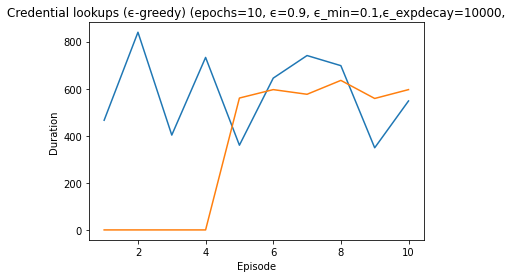

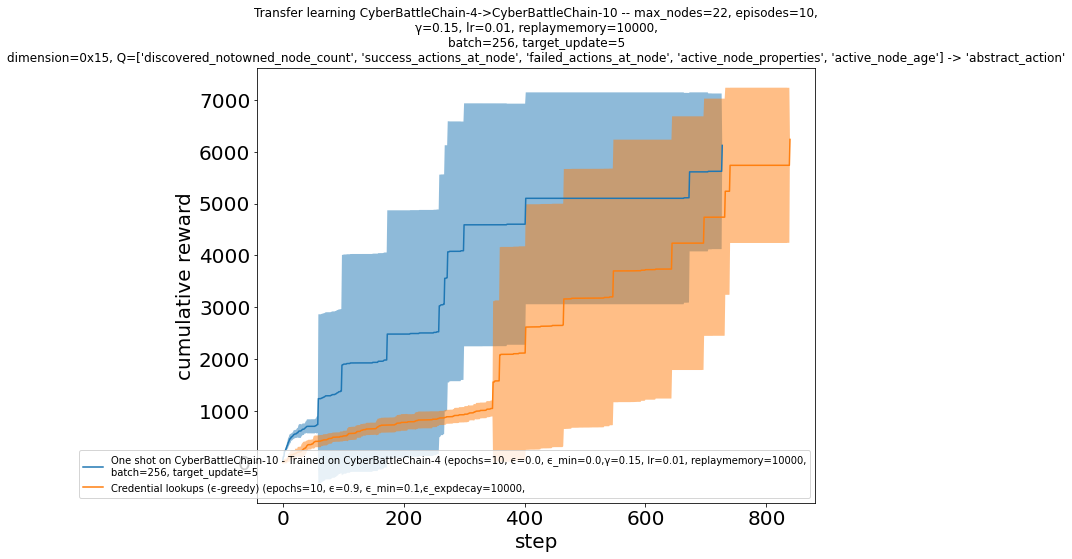

In [16]:
learner.transfer_learning_evaluation(
    environment_properties=ep,
    trained_learner=best_dqn_4,
    eval_env=cyberbattlechain_10,
    eval_epsilon=0.0,  # exploit Q-matrix only
    eval_episode_count=eval_episode_count,
    iteration_count=iteration_count,
    benchmark_policy=rca.CredentialCacheExploiter(),
    benchmark_training_args={'epsilon': 0.90,
                             'epsilon_exponential_decay': 10000,
                             'epsilon_minimum': 0.10,
                             'title': 'Credential lookups (ϵ-greedy)'}
)

###### One shot on CyberBattleChain-20 - Trained on CyberBattleChain-4
Learning with: episode_count=10,iteration_count=9000,ϵ=0.0,ϵ_min=0.0, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5
  ## Episode: 1/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  336.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  436.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  436.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  445.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  545.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  545.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  554.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  554.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  654.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  654.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  663.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  663.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  763.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  763.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  772.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  772.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  872.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  872.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward:  881.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward:  881.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward:  883.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward:  883.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:  983.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:  983.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  992.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  992.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward: 1092.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward: 1092.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward: 1101.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward: 1101.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward: 1201.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward: 1201.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 32|reward: 1210.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 32|reward: 1210.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 1|Iteration 34|reward: 1310.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 1|Iteration 34|reward: 1310.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward: 1319.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward: 1319.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 42|reward: 1419.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 42|reward: 1419.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 1|Iteration 44|reward: 1428.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 1|Iteration 44|reward: 1428.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 1|Iteration 46|reward: 1528.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 1|Iteration 46|reward: 1528.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 1|Iteration 49|reward: 1537.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 1|Iteration 49|reward: 1537.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 1|Iteration 50|reward: 1637.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 1|Iteration 50|reward: 1637.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 1|Iteration 52|reward: 1643.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 1|Iteration 52|reward: 1643.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 1|Iteration 53|reward: 1652.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 1|Iteration 53|reward: 1652.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 1|Iteration 56|reward: 1752.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 1|Iteration 56|reward: 1752.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 1|Iteration 57|reward: 1758.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 1|Iteration 57|reward: 1758.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 1|Iteration 61|reward: 1758.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 1|Iteration 66|reward: 1758.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 1|Iteration 71|reward: 1764.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 1|Iteration 71|reward: 1764.0|last_reward_at:   71|Elapsed Time: 0:00:01||

Episode 1|Iteration 72|reward: 1766.0|last_reward_at:   71|Elapsed Time: 0:00:01||

Episode 1|Iteration 72|reward: 1766.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 1|Iteration 73|reward: 1768.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 1|Iteration 73|reward: 1768.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 1|Iteration 74|reward: 1770.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 1|Iteration 74|reward: 1770.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 1|Iteration 78|reward: 1770.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 1|Iteration 82|reward: 1772.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 1|Iteration 82|reward: 1772.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 1|Iteration 83|reward: 1774.0|last_reward_at:   82|Elapsed Time: 0:00:02||

Episode 1|Iteration 83|reward: 1774.0|last_reward_at:   83|Elapsed Time: 0:00:02||

Episode 1|Iteration 86|reward: 1780.0|last_reward_at:   83|Elapsed Time: 0:00:02||

Episode 1|Iteration 86|reward: 1780.0|last_reward_at:   86|Elapsed Time: 0:00:02||

Episode 1|Iteration 87|reward: 1786.0|last_reward_at:   86|Elapsed Time: 0:00:02||

Episode 1|Iteration 87|reward: 1786.0|last_reward_at:   87|Elapsed Time: 0:00:02||

Episode 1|Iteration 92|reward: 1786.0|last_reward_at:   87|Elapsed Time: 0:00:02||

Episode 1|Iteration 93|reward: 1792.0|last_reward_at:   87|Elapsed Time: 0:00:02||

Episode 1|Iteration 93|reward: 1792.0|last_reward_at:   93|Elapsed Time: 0:00:02||

Episode 1|Iteration 98|reward: 1792.0|last_reward_at:   93|Elapsed Time: 0:00:02||

Episode 1|Iteration 104|reward: 1792.0|last_reward_at:   93|Elapsed Time: 0:00:02||

Episode 1|Iteration 111|reward: 1792.0|last_reward_at:   93|Elapsed Time: 0:00:02||

Episode 1|Iteration 112|reward: 1798.0|last_reward_at:   93|Elapsed Time: 0:00:02||

Episode 1|Iteration 112|reward: 1798.0|last_reward_at:  112|Elapsed Time: 0:00:02||

Episode 1|Iteration 113|reward: 1800.0|last_reward_at:  112|Elapsed Time: 0:00:02||

Episode 1|Iteration 113|reward: 1800.0|last_reward_at:  113|Elapsed Time: 0:00:02||

Episode 1|Iteration 115|reward: 1806.0|last_reward_at:  113|Elapsed Time: 0:00:02||

Episode 1|Iteration 115|reward: 1806.0|last_reward_at:  115|Elapsed Time: 0:00:02||

Episode 1|Iteration 117|reward: 1812.0|last_reward_at:  115|Elapsed Time: 0:00:02||

Episode 1|Iteration 117|reward: 1812.0|last_reward_at:  117|Elapsed Time: 0:00:02||

Episode 1|Iteration 124|reward: 1812.0|last_reward_at:  117|Elapsed Time: 0:00:02||

Episode 1|Iteration 130|reward: 1812.0|last_reward_at:  117|Elapsed Time: 0:00:02||

Episode 1|Iteration 137|reward: 1812.0|last_reward_at:  117|Elapsed Time: 0:00:02||

Episode 1|Iteration 144|reward: 1812.0|last_reward_at:  117|Elapsed Time: 0:00:03||

Episode 1|Iteration 149|reward: 1812.0|last_reward_at:  117|Elapsed Time: 0:00:03||

Episode 1|Iteration 157|reward: 1812.0|last_reward_at:  117|Elapsed Time: 0:00:03||

Episode 1|Iteration 162|reward: 1818.0|last_reward_at:  117|Elapsed Time: 0:00:03||

Episode 1|Iteration 162|reward: 1818.0|last_reward_at:  162|Elapsed Time: 0:00:03||

Episode 1|Iteration 168|reward: 1818.0|last_reward_at:  162|Elapsed Time: 0:00:03||

Episode 1|Iteration 174|reward: 1818.0|last_reward_at:  162|Elapsed Time: 0:00:03||

Episode 1|Iteration 181|reward: 1818.0|last_reward_at:  162|Elapsed Time: 0:00:03||

Episode 1|Iteration 188|reward: 1818.0|last_reward_at:  162|Elapsed Time: 0:00:03||

Episode 1|Iteration 190|reward: 1820.0|last_reward_at:  162|Elapsed Time: 0:00:03||

Episode 1|Iteration 190|reward: 1820.0|last_reward_at:  190|Elapsed Time: 0:00:03||

Episode 1|Iteration 197|reward: 1820.0|last_reward_at:  190|Elapsed Time: 0:00:03||

Episode 1|Iteration 204|reward: 1820.0|last_reward_at:  190|Elapsed Time: 0:00:04||

Episode 1|Iteration 209|reward: 1820.0|last_reward_at:  190|Elapsed Time: 0:00:04||

Episode 1|Iteration 213|reward: 1820.0|last_reward_at:  190|Elapsed Time: 0:00:04||

Episode 1|Iteration 216|reward: 1820.0|last_reward_at:  190|Elapsed Time: 0:00:04||

Episode 1|Iteration 217|reward: 1826.0|last_reward_at:  190|Elapsed Time: 0:00:04||

Episode 1|Iteration 217|reward: 1826.0|last_reward_at:  217|Elapsed Time: 0:00:04||

Episode 1|Iteration 218|reward: 1832.0|last_reward_at:  217|Elapsed Time: 0:00:04||

Episode 1|Iteration 218|reward: 1832.0|last_reward_at:  218|Elapsed Time: 0:00:04||

Episode 1|Iteration 220|reward: 1838.0|last_reward_at:  218|Elapsed Time: 0:00:04||

Episode 1|Iteration 220|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:04||

Episode 1|Iteration 223|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:04||

Episode 1|Iteration 227|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:04||

Episode 1|Iteration 233|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:04||

Episode 1|Iteration 240|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:05||

Episode 1|Iteration 246|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:05||

Episode 1|Iteration 251|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:05||

Episode 1|Iteration 255|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:05||

Episode 1|Iteration 260|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:05||

Episode 1|Iteration 267|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:05||

Episode 1|Iteration 275|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:05||

Episode 1|Iteration 282|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:05||

Episode 1|Iteration 289|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:05||

Episode 1|Iteration 296|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:06||

Episode 1|Iteration 300|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:06||

Episode 1|Iteration 303|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:06||

Episode 1|Iteration 308|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:06||

Episode 1|Iteration 313|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:06||

Episode 1|Iteration 318|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:06||

Episode 1|Iteration 321|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:06||

Episode 1|Iteration 326|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:06||

Episode 1|Iteration 331|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:06||

Episode 1|Iteration 335|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:07||

Episode 1|Iteration 339|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:07||

Episode 1|Iteration 342|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:07||

Episode 1|Iteration 345|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:07||

Episode 1|Iteration 350|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:07||

Episode 1|Iteration 357|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:07||

Episode 1|Iteration 364|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:07||

Episode 1|Iteration 371|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:07||

Episode 1|Iteration 375|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:07||

Episode 1|Iteration 379|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:08||

Episode 1|Iteration 385|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:08||

Episode 1|Iteration 389|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:08||

Episode 1|Iteration 396|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:08||

Episode 1|Iteration 403|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:08||

Episode 1|Iteration 406|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:08||

Episode 1|Iteration 411|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:08||

Episode 1|Iteration 416|reward: 1838.0|last_reward_at:  220|Elapsed Time: 0:00:08||

Episode 1|Iteration 420|reward: 1844.0|last_reward_at:  220|Elapsed Time: 0:00:08||

Episode 1|Iteration 420|reward: 1844.0|last_reward_at:  420|Elapsed Time: 0:00:08||

Episode 1|Iteration 423|reward: 1844.0|last_reward_at:  420|Elapsed Time: 0:00:08||

Episode 1|Iteration 426|reward: 1844.0|last_reward_at:  420|Elapsed Time: 0:00:09||

Episode 1|Iteration 431|reward: 1844.0|last_reward_at:  420|Elapsed Time: 0:00:09||

Episode 1|Iteration 435|reward: 1850.0|last_reward_at:  420|Elapsed Time: 0:00:09||

Episode 1|Iteration 435|reward: 1850.0|last_reward_at:  435|Elapsed Time: 0:00:09||

Episode 1|Iteration 439|reward: 1850.0|last_reward_at:  435|Elapsed Time: 0:00:09||

Episode 1|Iteration 443|reward: 1850.0|last_reward_at:  435|Elapsed Time: 0:00:09||

Episode 1|Iteration 446|reward: 1850.0|last_reward_at:  435|Elapsed Time: 0:00:09||

Episode 1|Iteration 447|reward: 1859.0|last_reward_at:  435|Elapsed Time: 0:00:09||

Episode 1|Iteration 447|reward: 1859.0|last_reward_at:  447|Elapsed Time: 0:00:09||

Episode 1|Iteration 448|reward: 1959.0|last_reward_at:  447|Elapsed Time: 0:00:09||

Episode 1|Iteration 448|reward: 1959.0|last_reward_at:  448|Elapsed Time: 0:00:09||

Episode 1|Iteration 451|reward: 1959.0|last_reward_at:  448|Elapsed Time: 0:00:09||

Episode 1|Iteration 452|reward: 1968.0|last_reward_at:  448|Elapsed Time: 0:00:09||

Episode 1|Iteration 452|reward: 1968.0|last_reward_at:  452|Elapsed Time: 0:00:09||

Episode 1|Iteration 459|reward: 1968.0|last_reward_at:  452|Elapsed Time: 0:00:10||

Episode 1|Iteration 465|reward: 1970.0|last_reward_at:  452|Elapsed Time: 0:00:10||

Episode 1|Iteration 465|reward: 1970.0|last_reward_at:  465|Elapsed Time: 0:00:10||

Episode 1|Iteration 471|reward: 1970.0|last_reward_at:  465|Elapsed Time: 0:00:10||

Episode 1|Iteration 477|reward: 1976.0|last_reward_at:  465|Elapsed Time: 0:00:10||

Episode 1|Iteration 477|reward: 1976.0|last_reward_at:  477|Elapsed Time: 0:00:10||

Episode 1|Iteration 484|reward: 1976.0|last_reward_at:  477|Elapsed Time: 0:00:10||

Episode 1|Iteration 491|reward: 1976.0|last_reward_at:  477|Elapsed Time: 0:00:10||

Episode 1|Iteration 498|reward: 1976.0|last_reward_at:  477|Elapsed Time: 0:00:10||

Episode 1|Iteration 505|reward: 1976.0|last_reward_at:  477|Elapsed Time: 0:00:10||

Episode 1|Iteration 511|reward: 1976.0|last_reward_at:  477|Elapsed Time: 0:00:10||

Episode 1|Iteration 517|reward: 1976.0|last_reward_at:  477|Elapsed Time: 0:00:10||

Episode 1|Iteration 518|reward: 2076.0|last_reward_at:  477|Elapsed Time: 0:00:10||

Episode 1|Iteration 518|reward: 2076.0|last_reward_at:  518|Elapsed Time: 0:00:10||

Episode 1|Iteration 521|reward: 2076.0|last_reward_at:  518|Elapsed Time: 0:00:11||

Episode 1|Iteration 526|reward: 2076.0|last_reward_at:  518|Elapsed Time: 0:00:11||

Episode 1|Iteration 532|reward: 2076.0|last_reward_at:  518|Elapsed Time: 0:00:11||

Episode 1|Iteration 536|reward: 2076.0|last_reward_at:  518|Elapsed Time: 0:00:11||

Episode 1|Iteration 541|reward: 2076.0|last_reward_at:  518|Elapsed Time: 0:00:11||

Episode 1|Iteration 546|reward: 2076.0|last_reward_at:  518|Elapsed Time: 0:00:11||

Episode 1|Iteration 551|reward: 2076.0|last_reward_at:  518|Elapsed Time: 0:00:11||

Episode 1|Iteration 554|reward: 2076.0|last_reward_at:  518|Elapsed Time: 0:00:11||

Episode 1|Iteration 557|reward: 2076.0|last_reward_at:  518|Elapsed Time: 0:00:11||

Episode 1|Iteration 559|reward: 2085.0|last_reward_at:  518|Elapsed Time: 0:00:12||

Episode 1|Iteration 559|reward: 2085.0|last_reward_at:  559|Elapsed Time: 0:00:12||

Episode 1|Iteration 563|reward: 2185.0|last_reward_at:  559|Elapsed Time: 0:00:12||

Episode 1|Iteration 563|reward: 2185.0|last_reward_at:  563|Elapsed Time: 0:00:12||

Episode 1|Iteration 567|reward: 2185.0|last_reward_at:  563|Elapsed Time: 0:00:12||

Episode 1|Iteration 569|reward: 2185.0|last_reward_at:  563|Elapsed Time: 0:00:12||

Episode 1|Iteration 570|reward: 2191.0|last_reward_at:  563|Elapsed Time: 0:00:12||

Episode 1|Iteration 570|reward: 2191.0|last_reward_at:  570|Elapsed Time: 0:00:12||

Episode 1|Iteration 573|reward: 2191.0|last_reward_at:  570|Elapsed Time: 0:00:12||

Episode 1|Iteration 574|reward: 2193.0|last_reward_at:  570|Elapsed Time: 0:00:12||

Episode 1|Iteration 574|reward: 2193.0|last_reward_at:  574|Elapsed Time: 0:00:12||

Episode 1|Iteration 580|reward: 2193.0|last_reward_at:  574|Elapsed Time: 0:00:12||

Episode 1|Iteration 581|reward: 2202.0|last_reward_at:  574|Elapsed Time: 0:00:12||

Episode 1|Iteration 581|reward: 2202.0|last_reward_at:  581|Elapsed Time: 0:00:12||

Episode 1|Iteration 588|reward: 2202.0|last_reward_at:  581|Elapsed Time: 0:00:12||

Episode 1|Iteration 594|reward: 2202.0|last_reward_at:  581|Elapsed Time: 0:00:13||

Episode 1|Iteration 601|reward: 2202.0|last_reward_at:  581|Elapsed Time: 0:00:13||

Episode 1|Iteration 607|reward: 2208.0|last_reward_at:  581|Elapsed Time: 0:00:13||

Episode 1|Iteration 607|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:13||

Episode 1|Iteration 613|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:13||

Episode 1|Iteration 619|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:13||

Episode 1|Iteration 626|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:13||

Episode 1|Iteration 633|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:13||

Episode 1|Iteration 640|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:13||

Episode 1|Iteration 647|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:13||

Episode 1|Iteration 653|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:14||

Episode 1|Iteration 660|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:14||

Episode 1|Iteration 667|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:14||

Episode 1|Iteration 673|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:14||

Episode 1|Iteration 678|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:14||

Episode 1|Iteration 684|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:14||

Episode 1|Iteration 689|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:14||

Episode 1|Iteration 694|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:14||

Episode 1|Iteration 700|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:14||

Episode 1|Iteration 707|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:14||

Episode 1|Iteration 714|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:15||

Episode 1|Iteration 721|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:15||

Episode 1|Iteration 728|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:15||

Episode 1|Iteration 734|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:15||

Episode 1|Iteration 740|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:15||

Episode 1|Iteration 746|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:15||

Episode 1|Iteration 753|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:15||

Episode 1|Iteration 760|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:15||

Episode 1|Iteration 767|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:15||

Episode 1|Iteration 774|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:16||

Episode 1|Iteration 781|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:16||

Episode 1|Iteration 787|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:16||

Episode 1|Iteration 793|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:16||

Episode 1|Iteration 798|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:16||

Episode 1|Iteration 804|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:16||

Episode 1|Iteration 811|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:16||

Episode 1|Iteration 818|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:16||

Episode 1|Iteration 825|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:16||

Episode 1|Iteration 831|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:17||

Episode 1|Iteration 838|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:17||

Episode 1|Iteration 844|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:17||

Episode 1|Iteration 851|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:17||

Episode 1|Iteration 857|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:17||

Episode 1|Iteration 863|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:17||

Episode 1|Iteration 869|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:17||

Episode 1|Iteration 876|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:17||

Episode 1|Iteration 883|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:17||

Episode 1|Iteration 890|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:18||

Episode 1|Iteration 897|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:18||

Episode 1|Iteration 904|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:18||

Episode 1|Iteration 910|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:18||

Episode 1|Iteration 916|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:18||

Episode 1|Iteration 922|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:18||

Episode 1|Iteration 928|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:18||

Episode 1|Iteration 934|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:18||

Episode 1|Iteration 941|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:18||

Episode 1|Iteration 947|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:19||

Episode 1|Iteration 954|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:19||

Episode 1|Iteration 960|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:19||

Episode 1|Iteration 967|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:19||

Episode 1|Iteration 974|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:19||

Episode 1|Iteration 979|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:19||

Episode 1|Iteration 985|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:19||

Episode 1|Iteration 991|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:19||

Episode 1|Iteration 998|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:19||

Episode 1|Iteration 1005|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:20||

Episode 1|Iteration 1011|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:20||

Episode 1|Iteration 1016|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:20||

Episode 1|Iteration 1022|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:20||

Episode 1|Iteration 1029|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:20||

Episode 1|Iteration 1034|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:20||

Episode 1|Iteration 1039|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:20||

Episode 1|Iteration 1045|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:20||

Episode 1|Iteration 1050|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:20||

Episode 1|Iteration 1056|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:20||

Episode 1|Iteration 1063|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:21||

Episode 1|Iteration 1069|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:21||

Episode 1|Iteration 1076|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:21||

Episode 1|Iteration 1082|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:21||

Episode 1|Iteration 1087|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:21||

Episode 1|Iteration 1093|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:21||

Episode 1|Iteration 1099|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:21||

Episode 1|Iteration 1105|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:21||

Episode 1|Iteration 1111|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:21||

Episode 1|Iteration 1118|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:22||

Episode 1|Iteration 1125|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:22||

Episode 1|Iteration 1131|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:22||

Episode 1|Iteration 1136|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:22||

Episode 1|Iteration 1140|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:22||

Episode 1|Iteration 1144|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:22||

Episode 1|Iteration 1151|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:22||

Episode 1|Iteration 1157|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:22||

Episode 1|Iteration 1163|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:22||

Episode 1|Iteration 1169|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:23||

Episode 1|Iteration 1175|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:23||

Episode 1|Iteration 1182|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:23||

Episode 1|Iteration 1189|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:23||

Episode 1|Iteration 1196|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:23||

Episode 1|Iteration 1203|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:23||

Episode 1|Iteration 1210|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:23||

Episode 1|Iteration 1216|reward: 2208.0|last_reward_at:  607|Elapsed Time: 0:00:23||

Episode 1|Iteration 1220|reward: 2308.0|last_reward_at:  607|Elapsed Time: 0:00:23||

Episode 1|Iteration 1220|reward: 2308.0|last_reward_at: 1220|Elapsed Time: 0:00:23||

Episode 1|Iteration 1226|reward: 2308.0|last_reward_at: 1220|Elapsed Time: 0:00:23||

Episode 1|Iteration 1231|reward: 2308.0|last_reward_at: 1220|Elapsed Time: 0:00:24||

Episode 1|Iteration 1238|reward: 2308.0|last_reward_at: 1220|Elapsed Time: 0:00:24||

Episode 1|Iteration 1244|reward: 2308.0|last_reward_at: 1220|Elapsed Time: 0:00:24||

Episode 1|Iteration 1250|reward: 2308.0|last_reward_at: 1220|Elapsed Time: 0:00:24||

Episode 1|Iteration 1254|reward: 2308.0|last_reward_at: 1220|Elapsed Time: 0:00:24||

Episode 1|Iteration 1258|reward: 2308.0|last_reward_at: 1220|Elapsed Time: 0:00:24||

Episode 1|Iteration 1264|reward: 2308.0|last_reward_at: 1220|Elapsed Time: 0:00:24||

Episode 1|Iteration 1268|reward: 2308.0|last_reward_at: 1220|Elapsed Time: 0:00:24||

Episode 1|Iteration 1273|reward: 2308.0|last_reward_at: 1220|Elapsed Time: 0:00:24||

Episode 1|Iteration 1275|reward: 2308.0|last_reward_at: 1220|Elapsed Time: 0:00:25||

Episode 1|Iteration 1279|reward: 2308.0|last_reward_at: 1220|Elapsed Time: 0:00:25||

Episode 1|Iteration 1282|reward: 2314.0|last_reward_at: 1220|Elapsed Time: 0:00:25||

Episode 1|Iteration 1282|reward: 2314.0|last_reward_at: 1282|Elapsed Time: 0:00:25||

Episode 1|Iteration 1286|reward: 2314.0|last_reward_at: 1282|Elapsed Time: 0:00:25||

Episode 1|Iteration 1288|reward: 2314.0|last_reward_at: 1282|Elapsed Time: 0:00:25||

Episode 1|Iteration 1291|reward: 2314.0|last_reward_at: 1282|Elapsed Time: 0:00:25||

Episode 1|Iteration 1294|reward: 2314.0|last_reward_at: 1282|Elapsed Time: 0:00:25||

Episode 1|Iteration 1298|reward: 2314.0|last_reward_at: 1282|Elapsed Time: 0:00:25||

Episode 1|Iteration 1302|reward: 2314.0|last_reward_at: 1282|Elapsed Time: 0:00:26||

Episode 1|Iteration 1306|reward: 2314.0|last_reward_at: 1282|Elapsed Time: 0:00:26||

Episode 1|Iteration 1312|reward: 2314.0|last_reward_at: 1282|Elapsed Time: 0:00:26||

Episode 1|Iteration 1317|reward: 2314.0|last_reward_at: 1282|Elapsed Time: 0:00:26||

Episode 1|Iteration 1320|reward: 2314.0|last_reward_at: 1282|Elapsed Time: 0:00:26||

Episode 1|Iteration 1324|reward: 2314.0|last_reward_at: 1282|Elapsed Time: 0:00:26||

Episode 1|Iteration 1326|reward: 2314.0|last_reward_at: 1282|Elapsed Time: 0:00:26||

Episode 1|Iteration 1328|reward: 2314.0|last_reward_at: 1282|Elapsed Time: 0:00:26||

Episode 1|Iteration 1331|reward: 2314.0|last_reward_at: 1282|Elapsed Time: 0:00:27||

Episode 1|Iteration 1335|reward: 2314.0|last_reward_at: 1282|Elapsed Time: 0:00:27||

Episode 1|Iteration 1340|reward: 2314.0|last_reward_at: 1282|Elapsed Time: 0:00:27||

Episode 1|Iteration 1344|reward: 2314.0|last_reward_at: 1282|Elapsed Time: 0:00:27||

Episode 1|Iteration 1345|reward: 2323.0|last_reward_at: 1282|Elapsed Time: 0:00:27||

Episode 1|Iteration 1345|reward: 2323.0|last_reward_at: 1345|Elapsed Time: 0:00:27||

Episode 1|Iteration 1346|reward: 7323.0|last_reward_at: 1345|Elapsed Time: 0:00:27||

Episode 1|Iteration 1346|reward: 7323.0|last_reward_at: 1346|Elapsed Time: 0:00:27||

  Episode 1 ended at t=1346 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 30/405 (0.07)
    exploit-remote: 20/549 (0.04)
    exploit-connect: 21/321 (0.06)
  exploit deflected to exploration: 0
  ## Episode: 2/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  327.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  336.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  336.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  436.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  436.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  445.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  445.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  545.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  545.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  554.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  554.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  654.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  654.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  663.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  663.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward:  763.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward:  763.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  772.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  772.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  774.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  774.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward:  780.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward:  780.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 2|Iteration 42|reward:  782.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 2|Iteration 42|reward:  782.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 2|Iteration 45|reward:  788.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 2|Iteration 45|reward:  788.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 2|Iteration 47|reward:  790.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 2|Iteration 47|reward:  790.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 55|reward:  796.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 55|reward:  796.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 2|Iteration 56|reward:  802.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 2|Iteration 56|reward:  802.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 2|Iteration 63|reward:  802.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 2|Iteration 71|reward:  802.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 2|Iteration 78|reward:  902.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 2|Iteration 78|reward:  902.0|last_reward_at:   78|Elapsed Time: 0:00:01||

Episode 2|Iteration 79|reward:  904.0|last_reward_at:   78|Elapsed Time: 0:00:01||

Episode 2|Iteration 79|reward:  904.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 2|Iteration 80|reward:  910.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 2|Iteration 80|reward:  910.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 2|Iteration 82|reward:  916.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 2|Iteration 82|reward:  916.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 2|Iteration 87|reward:  916.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 2|Iteration 88|reward:  925.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 2|Iteration 88|reward:  925.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 2|Iteration 89|reward: 1025.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 2|Iteration 89|reward: 1025.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 2|Iteration 95|reward: 1025.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 2|Iteration 97|reward: 1034.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 2|Iteration 97|reward: 1034.0|last_reward_at:   97|Elapsed Time: 0:00:01||

Episode 2|Iteration 106|reward: 1034.0|last_reward_at:   97|Elapsed Time: 0:00:01||

Episode 2|Iteration 114|reward: 1034.0|last_reward_at:   97|Elapsed Time: 0:00:01||

Episode 2|Iteration 122|reward: 1034.0|last_reward_at:   97|Elapsed Time: 0:00:01||

Episode 2|Iteration 130|reward: 1034.0|last_reward_at:   97|Elapsed Time: 0:00:01||

Episode 2|Iteration 137|reward: 1034.0|last_reward_at:   97|Elapsed Time: 0:00:02||

Episode 2|Iteration 143|reward: 1034.0|last_reward_at:   97|Elapsed Time: 0:00:02||

Episode 2|Iteration 148|reward: 1036.0|last_reward_at:   97|Elapsed Time: 0:00:02||

Episode 2|Iteration 148|reward: 1036.0|last_reward_at:  148|Elapsed Time: 0:00:02||

Episode 2|Iteration 150|reward: 1042.0|last_reward_at:  148|Elapsed Time: 0:00:02||

Episode 2|Iteration 150|reward: 1042.0|last_reward_at:  150|Elapsed Time: 0:00:02||

Episode 2|Iteration 158|reward: 1042.0|last_reward_at:  150|Elapsed Time: 0:00:02||

Episode 2|Iteration 166|reward: 1042.0|last_reward_at:  150|Elapsed Time: 0:00:02||

Episode 2|Iteration 173|reward: 1042.0|last_reward_at:  150|Elapsed Time: 0:00:02||

Episode 2|Iteration 179|reward: 1042.0|last_reward_at:  150|Elapsed Time: 0:00:02||

Episode 2|Iteration 185|reward: 1042.0|last_reward_at:  150|Elapsed Time: 0:00:02||

Episode 2|Iteration 191|reward: 1042.0|last_reward_at:  150|Elapsed Time: 0:00:02||

Episode 2|Iteration 192|reward: 1142.0|last_reward_at:  150|Elapsed Time: 0:00:02||

Episode 2|Iteration 192|reward: 1142.0|last_reward_at:  192|Elapsed Time: 0:00:02||

Episode 2|Iteration 195|reward: 1148.0|last_reward_at:  192|Elapsed Time: 0:00:03||

Episode 2|Iteration 195|reward: 1148.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 2|Iteration 198|reward: 1148.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 2|Iteration 201|reward: 1148.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 2|Iteration 202|reward: 1154.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 2|Iteration 202|reward: 1154.0|last_reward_at:  202|Elapsed Time: 0:00:03||

Episode 2|Iteration 203|reward: 1156.0|last_reward_at:  202|Elapsed Time: 0:00:03||

Episode 2|Iteration 203|reward: 1156.0|last_reward_at:  203|Elapsed Time: 0:00:03||

Episode 2|Iteration 208|reward: 1156.0|last_reward_at:  203|Elapsed Time: 0:00:03||

Episode 2|Iteration 209|reward: 1158.0|last_reward_at:  203|Elapsed Time: 0:00:03||

Episode 2|Iteration 209|reward: 1158.0|last_reward_at:  209|Elapsed Time: 0:00:03||

Episode 2|Iteration 214|reward: 1158.0|last_reward_at:  209|Elapsed Time: 0:00:03||

Episode 2|Iteration 218|reward: 1158.0|last_reward_at:  209|Elapsed Time: 0:00:03||

Episode 2|Iteration 223|reward: 1158.0|last_reward_at:  209|Elapsed Time: 0:00:03||

Episode 2|Iteration 228|reward: 1158.0|last_reward_at:  209|Elapsed Time: 0:00:04||

Episode 2|Iteration 230|reward: 1164.0|last_reward_at:  209|Elapsed Time: 0:00:04||

Episode 2|Iteration 230|reward: 1164.0|last_reward_at:  230|Elapsed Time: 0:00:04||

Episode 2|Iteration 236|reward: 1164.0|last_reward_at:  230|Elapsed Time: 0:00:04||

Episode 2|Iteration 242|reward: 1164.0|last_reward_at:  230|Elapsed Time: 0:00:04||

Episode 2|Iteration 248|reward: 1164.0|last_reward_at:  230|Elapsed Time: 0:00:04||

Episode 2|Iteration 253|reward: 1164.0|last_reward_at:  230|Elapsed Time: 0:00:04||

Episode 2|Iteration 259|reward: 1164.0|last_reward_at:  230|Elapsed Time: 0:00:04||

Episode 2|Iteration 261|reward: 1164.0|last_reward_at:  230|Elapsed Time: 0:00:04||

Episode 2|Iteration 265|reward: 1164.0|last_reward_at:  230|Elapsed Time: 0:00:05||

Episode 2|Iteration 268|reward: 1164.0|last_reward_at:  230|Elapsed Time: 0:00:05||

Episode 2|Iteration 271|reward: 1164.0|last_reward_at:  230|Elapsed Time: 0:00:05||

Episode 2|Iteration 275|reward: 1164.0|last_reward_at:  230|Elapsed Time: 0:00:05||

Episode 2|Iteration 278|reward: 1164.0|last_reward_at:  230|Elapsed Time: 0:00:05||

Episode 2|Iteration 282|reward: 1164.0|last_reward_at:  230|Elapsed Time: 0:00:05||

Episode 2|Iteration 285|reward: 1164.0|last_reward_at:  230|Elapsed Time: 0:00:05||

Episode 2|Iteration 288|reward: 1164.0|last_reward_at:  230|Elapsed Time: 0:00:05||

Episode 2|Iteration 291|reward: 1164.0|last_reward_at:  230|Elapsed Time: 0:00:05||

Episode 2|Iteration 294|reward: 1164.0|last_reward_at:  230|Elapsed Time: 0:00:06||

Episode 2|Iteration 298|reward: 1164.0|last_reward_at:  230|Elapsed Time: 0:00:06||

Episode 2|Iteration 301|reward: 1164.0|last_reward_at:  230|Elapsed Time: 0:00:06||

Episode 2|Iteration 306|reward: 1164.0|last_reward_at:  230|Elapsed Time: 0:00:06||

Episode 2|Iteration 308|reward: 1170.0|last_reward_at:  230|Elapsed Time: 0:00:06||

Episode 2|Iteration 308|reward: 1170.0|last_reward_at:  308|Elapsed Time: 0:00:06||

Episode 2|Iteration 310|reward: 1170.0|last_reward_at:  308|Elapsed Time: 0:00:06||

Episode 2|Iteration 311|reward: 1172.0|last_reward_at:  308|Elapsed Time: 0:00:06||

Episode 2|Iteration 311|reward: 1172.0|last_reward_at:  311|Elapsed Time: 0:00:06||

Episode 2|Iteration 314|reward: 1172.0|last_reward_at:  311|Elapsed Time: 0:00:06||

Episode 2|Iteration 317|reward: 1172.0|last_reward_at:  311|Elapsed Time: 0:00:06||

Episode 2|Iteration 321|reward: 1172.0|last_reward_at:  311|Elapsed Time: 0:00:07||

Episode 2|Iteration 326|reward: 1172.0|last_reward_at:  311|Elapsed Time: 0:00:07||

Episode 2|Iteration 331|reward: 1172.0|last_reward_at:  311|Elapsed Time: 0:00:07||

Episode 2|Iteration 336|reward: 1172.0|last_reward_at:  311|Elapsed Time: 0:00:07||

Episode 2|Iteration 340|reward: 1172.0|last_reward_at:  311|Elapsed Time: 0:00:07||

Episode 2|Iteration 344|reward: 1172.0|last_reward_at:  311|Elapsed Time: 0:00:07||

Episode 2|Iteration 348|reward: 1172.0|last_reward_at:  311|Elapsed Time: 0:00:07||

Episode 2|Iteration 352|reward: 1172.0|last_reward_at:  311|Elapsed Time: 0:00:07||

Episode 2|Iteration 355|reward: 1172.0|last_reward_at:  311|Elapsed Time: 0:00:07||

Episode 2|Iteration 358|reward: 1172.0|last_reward_at:  311|Elapsed Time: 0:00:08||

Episode 2|Iteration 362|reward: 1172.0|last_reward_at:  311|Elapsed Time: 0:00:08||

Episode 2|Iteration 366|reward: 1172.0|last_reward_at:  311|Elapsed Time: 0:00:08||

Episode 2|Iteration 370|reward: 1172.0|last_reward_at:  311|Elapsed Time: 0:00:08||

Episode 2|Iteration 374|reward: 1172.0|last_reward_at:  311|Elapsed Time: 0:00:08||

Episode 2|Iteration 378|reward: 1172.0|last_reward_at:  311|Elapsed Time: 0:00:08||

Episode 2|Iteration 382|reward: 1172.0|last_reward_at:  311|Elapsed Time: 0:00:08||

Episode 2|Iteration 384|reward: 1172.0|last_reward_at:  311|Elapsed Time: 0:00:08||

Episode 2|Iteration 388|reward: 1172.0|last_reward_at:  311|Elapsed Time: 0:00:09||

Episode 2|Iteration 391|reward: 1172.0|last_reward_at:  311|Elapsed Time: 0:00:09||

Episode 2|Iteration 392|reward: 1174.0|last_reward_at:  311|Elapsed Time: 0:00:09||

Episode 2|Iteration 392|reward: 1174.0|last_reward_at:  392|Elapsed Time: 0:00:09||

Episode 2|Iteration 396|reward: 1174.0|last_reward_at:  392|Elapsed Time: 0:00:09||

Episode 2|Iteration 398|reward: 1180.0|last_reward_at:  392|Elapsed Time: 0:00:09||

Episode 2|Iteration 398|reward: 1180.0|last_reward_at:  398|Elapsed Time: 0:00:09||

Episode 2|Iteration 400|reward: 1180.0|last_reward_at:  398|Elapsed Time: 0:00:09||

Episode 2|Iteration 404|reward: 1180.0|last_reward_at:  398|Elapsed Time: 0:00:09||

Episode 2|Iteration 406|reward: 1180.0|last_reward_at:  398|Elapsed Time: 0:00:09||

Episode 2|Iteration 408|reward: 1180.0|last_reward_at:  398|Elapsed Time: 0:00:09||

Episode 2|Iteration 410|reward: 1180.0|last_reward_at:  398|Elapsed Time: 0:00:10||

Episode 2|Iteration 413|reward: 1180.0|last_reward_at:  398|Elapsed Time: 0:00:10||

Episode 2|Iteration 414|reward: 1180.0|last_reward_at:  398|Elapsed Time: 0:00:10||

Episode 2|Iteration 418|reward: 1180.0|last_reward_at:  398|Elapsed Time: 0:00:10||

Episode 2|Iteration 420|reward: 1180.0|last_reward_at:  398|Elapsed Time: 0:00:10||

Episode 2|Iteration 424|reward: 1180.0|last_reward_at:  398|Elapsed Time: 0:00:10||

Episode 2|Iteration 429|reward: 1180.0|last_reward_at:  398|Elapsed Time: 0:00:10||

Episode 2|Iteration 431|reward: 1186.0|last_reward_at:  398|Elapsed Time: 0:00:11||

Episode 2|Iteration 431|reward: 1186.0|last_reward_at:  431|Elapsed Time: 0:00:11||

Episode 2|Iteration 433|reward: 1188.0|last_reward_at:  431|Elapsed Time: 0:00:11||

Episode 2|Iteration 433|reward: 1188.0|last_reward_at:  433|Elapsed Time: 0:00:11||

Episode 2|Iteration 437|reward: 1194.0|last_reward_at:  433|Elapsed Time: 0:00:11||

Episode 2|Iteration 437|reward: 1194.0|last_reward_at:  437|Elapsed Time: 0:00:11||

Episode 2|Iteration 441|reward: 1194.0|last_reward_at:  437|Elapsed Time: 0:00:11||

Episode 2|Iteration 443|reward: 1194.0|last_reward_at:  437|Elapsed Time: 0:00:11||

Episode 2|Iteration 445|reward: 1194.0|last_reward_at:  437|Elapsed Time: 0:00:11||

Episode 2|Iteration 447|reward: 1194.0|last_reward_at:  437|Elapsed Time: 0:00:11||

Episode 2|Iteration 450|reward: 1194.0|last_reward_at:  437|Elapsed Time: 0:00:11||

Episode 2|Iteration 452|reward: 1194.0|last_reward_at:  437|Elapsed Time: 0:00:12||

Episode 2|Iteration 454|reward: 1194.0|last_reward_at:  437|Elapsed Time: 0:00:12||

Episode 2|Iteration 458|reward: 1194.0|last_reward_at:  437|Elapsed Time: 0:00:12||

Episode 2|Iteration 461|reward: 1194.0|last_reward_at:  437|Elapsed Time: 0:00:12||

Episode 2|Iteration 464|reward: 1194.0|last_reward_at:  437|Elapsed Time: 0:00:12||

Episode 2|Iteration 467|reward: 1194.0|last_reward_at:  437|Elapsed Time: 0:00:12||

Episode 2|Iteration 469|reward: 1194.0|last_reward_at:  437|Elapsed Time: 0:00:12||

Episode 2|Iteration 473|reward: 1194.0|last_reward_at:  437|Elapsed Time: 0:00:12||

Episode 2|Iteration 477|reward: 1194.0|last_reward_at:  437|Elapsed Time: 0:00:13||

Episode 2|Iteration 478|reward: 1200.0|last_reward_at:  437|Elapsed Time: 0:00:13||

Episode 2|Iteration 478|reward: 1200.0|last_reward_at:  478|Elapsed Time: 0:00:13||

Episode 2|Iteration 480|reward: 1206.0|last_reward_at:  478|Elapsed Time: 0:00:13||

Episode 2|Iteration 480|reward: 1206.0|last_reward_at:  480|Elapsed Time: 0:00:13||

Episode 2|Iteration 484|reward: 1206.0|last_reward_at:  480|Elapsed Time: 0:00:13||

Episode 2|Iteration 488|reward: 1206.0|last_reward_at:  480|Elapsed Time: 0:00:13||

Episode 2|Iteration 492|reward: 1206.0|last_reward_at:  480|Elapsed Time: 0:00:13||

Episode 2|Iteration 497|reward: 1206.0|last_reward_at:  480|Elapsed Time: 0:00:13||

Episode 2|Iteration 505|reward: 1206.0|last_reward_at:  480|Elapsed Time: 0:00:13||

Episode 2|Iteration 513|reward: 1206.0|last_reward_at:  480|Elapsed Time: 0:00:13||

Episode 2|Iteration 520|reward: 1206.0|last_reward_at:  480|Elapsed Time: 0:00:14||

Episode 2|Iteration 522|reward: 1206.0|last_reward_at:  480|Elapsed Time: 0:00:14||

Episode 2|Iteration 526|reward: 1206.0|last_reward_at:  480|Elapsed Time: 0:00:14||

Episode 2|Iteration 527|reward: 1206.0|last_reward_at:  480|Elapsed Time: 0:00:14||

Episode 2|Iteration 529|reward: 1206.0|last_reward_at:  480|Elapsed Time: 0:00:14||

Episode 2|Iteration 532|reward: 1206.0|last_reward_at:  480|Elapsed Time: 0:00:14||

Episode 2|Iteration 534|reward: 1206.0|last_reward_at:  480|Elapsed Time: 0:00:14||

Episode 2|Iteration 537|reward: 1206.0|last_reward_at:  480|Elapsed Time: 0:00:14||

Episode 2|Iteration 543|reward: 1206.0|last_reward_at:  480|Elapsed Time: 0:00:15||

Episode 2|Iteration 549|reward: 1206.0|last_reward_at:  480|Elapsed Time: 0:00:15||

Episode 2|Iteration 554|reward: 1206.0|last_reward_at:  480|Elapsed Time: 0:00:15||

Episode 2|Iteration 556|reward: 1206.0|last_reward_at:  480|Elapsed Time: 0:00:15||

Episode 2|Iteration 562|reward: 1206.0|last_reward_at:  480|Elapsed Time: 0:00:15||

Episode 2|Iteration 566|reward: 1206.0|last_reward_at:  480|Elapsed Time: 0:00:15||

Episode 2|Iteration 570|reward: 1206.0|last_reward_at:  480|Elapsed Time: 0:00:15||

Episode 2|Iteration 575|reward: 1206.0|last_reward_at:  480|Elapsed Time: 0:00:15||

Episode 2|Iteration 583|reward: 1206.0|last_reward_at:  480|Elapsed Time: 0:00:15||

Episode 2|Iteration 588|reward: 1206.0|last_reward_at:  480|Elapsed Time: 0:00:16||

Episode 2|Iteration 594|reward: 1206.0|last_reward_at:  480|Elapsed Time: 0:00:16||

Episode 2|Iteration 595|reward: 1212.0|last_reward_at:  480|Elapsed Time: 0:00:16||

Episode 2|Iteration 595|reward: 1212.0|last_reward_at:  595|Elapsed Time: 0:00:16||

Episode 2|Iteration 602|reward: 1212.0|last_reward_at:  595|Elapsed Time: 0:00:16||

Episode 2|Iteration 608|reward: 1212.0|last_reward_at:  595|Elapsed Time: 0:00:16||

Episode 2|Iteration 613|reward: 1218.0|last_reward_at:  595|Elapsed Time: 0:00:16||

Episode 2|Iteration 613|reward: 1218.0|last_reward_at:  613|Elapsed Time: 0:00:16||

Episode 2|Iteration 617|reward: 1218.0|last_reward_at:  613|Elapsed Time: 0:00:16||

Episode 2|Iteration 623|reward: 1218.0|last_reward_at:  613|Elapsed Time: 0:00:16||

Episode 2|Iteration 630|reward: 1218.0|last_reward_at:  613|Elapsed Time: 0:00:16||

Episode 2|Iteration 638|reward: 1218.0|last_reward_at:  613|Elapsed Time: 0:00:16||

Episode 2|Iteration 646|reward: 1218.0|last_reward_at:  613|Elapsed Time: 0:00:17||

Episode 2|Iteration 648|reward: 1218.0|last_reward_at:  613|Elapsed Time: 0:00:17||

Episode 2|Iteration 654|reward: 1218.0|last_reward_at:  613|Elapsed Time: 0:00:17||

Episode 2|Iteration 656|reward: 1227.0|last_reward_at:  613|Elapsed Time: 0:00:17||

Episode 2|Iteration 656|reward: 1227.0|last_reward_at:  656|Elapsed Time: 0:00:17||

Episode 2|Iteration 657|reward: 1327.0|last_reward_at:  656|Elapsed Time: 0:00:17||

Episode 2|Iteration 657|reward: 1327.0|last_reward_at:  657|Elapsed Time: 0:00:17||

Episode 2|Iteration 658|reward: 1336.0|last_reward_at:  657|Elapsed Time: 0:00:17||

Episode 2|Iteration 658|reward: 1336.0|last_reward_at:  658|Elapsed Time: 0:00:17||

Episode 2|Iteration 666|reward: 1336.0|last_reward_at:  658|Elapsed Time: 0:00:17||

Episode 2|Iteration 672|reward: 1436.0|last_reward_at:  658|Elapsed Time: 0:00:17||

Episode 2|Iteration 672|reward: 1436.0|last_reward_at:  672|Elapsed Time: 0:00:17||

Episode 2|Iteration 673|reward: 1445.0|last_reward_at:  672|Elapsed Time: 0:00:17||

Episode 2|Iteration 673|reward: 1445.0|last_reward_at:  673|Elapsed Time: 0:00:17||

Episode 2|Iteration 677|reward: 1545.0|last_reward_at:  673|Elapsed Time: 0:00:17||

Episode 2|Iteration 677|reward: 1545.0|last_reward_at:  677|Elapsed Time: 0:00:17||

Episode 2|Iteration 678|reward: 1554.0|last_reward_at:  677|Elapsed Time: 0:00:17||

Episode 2|Iteration 678|reward: 1554.0|last_reward_at:  678|Elapsed Time: 0:00:17||

Episode 2|Iteration 684|reward: 1554.0|last_reward_at:  678|Elapsed Time: 0:00:17||

Episode 2|Iteration 691|reward: 1554.0|last_reward_at:  678|Elapsed Time: 0:00:17||

Episode 2|Iteration 699|reward: 1554.0|last_reward_at:  678|Elapsed Time: 0:00:17||

Episode 2|Iteration 707|reward: 1554.0|last_reward_at:  678|Elapsed Time: 0:00:18||

Episode 2|Iteration 715|reward: 1554.0|last_reward_at:  678|Elapsed Time: 0:00:18||

Episode 2|Iteration 723|reward: 1554.0|last_reward_at:  678|Elapsed Time: 0:00:18||

Episode 2|Iteration 726|reward: 1556.0|last_reward_at:  678|Elapsed Time: 0:00:18||

Episode 2|Iteration 726|reward: 1556.0|last_reward_at:  726|Elapsed Time: 0:00:18||

Episode 2|Iteration 730|reward: 1562.0|last_reward_at:  726|Elapsed Time: 0:00:18||

Episode 2|Iteration 730|reward: 1562.0|last_reward_at:  730|Elapsed Time: 0:00:18||

Episode 2|Iteration 738|reward: 1562.0|last_reward_at:  730|Elapsed Time: 0:00:18||

Episode 2|Iteration 745|reward: 1562.0|last_reward_at:  730|Elapsed Time: 0:00:18||

Episode 2|Iteration 753|reward: 1562.0|last_reward_at:  730|Elapsed Time: 0:00:18||

Episode 2|Iteration 756|reward: 1564.0|last_reward_at:  730|Elapsed Time: 0:00:18||

Episode 2|Iteration 756|reward: 1564.0|last_reward_at:  756|Elapsed Time: 0:00:18||

Episode 2|Iteration 764|reward: 1564.0|last_reward_at:  756|Elapsed Time: 0:00:18||

Episode 2|Iteration 766|reward: 1570.0|last_reward_at:  756|Elapsed Time: 0:00:18||

Episode 2|Iteration 766|reward: 1570.0|last_reward_at:  766|Elapsed Time: 0:00:18||

Episode 2|Iteration 774|reward: 1570.0|last_reward_at:  766|Elapsed Time: 0:00:18||

Episode 2|Iteration 781|reward: 1570.0|last_reward_at:  766|Elapsed Time: 0:00:19||

Episode 2|Iteration 783|reward: 1670.0|last_reward_at:  766|Elapsed Time: 0:00:19||

Episode 2|Iteration 783|reward: 1670.0|last_reward_at:  783|Elapsed Time: 0:00:19||

Episode 2|Iteration 787|reward: 1670.0|last_reward_at:  783|Elapsed Time: 0:00:19||

Episode 2|Iteration 794|reward: 1670.0|last_reward_at:  783|Elapsed Time: 0:00:19||

Episode 2|Iteration 798|reward: 1670.0|last_reward_at:  783|Elapsed Time: 0:00:19||

Episode 2|Iteration 803|reward: 1670.0|last_reward_at:  783|Elapsed Time: 0:00:19||

Episode 2|Iteration 807|reward: 1670.0|last_reward_at:  783|Elapsed Time: 0:00:19||

Episode 2|Iteration 813|reward: 1670.0|last_reward_at:  783|Elapsed Time: 0:00:19||

Episode 2|Iteration 821|reward: 1670.0|last_reward_at:  783|Elapsed Time: 0:00:19||

Episode 2|Iteration 828|reward: 1670.0|last_reward_at:  783|Elapsed Time: 0:00:19||

Episode 2|Iteration 833|reward: 1670.0|last_reward_at:  783|Elapsed Time: 0:00:20||

Episode 2|Iteration 837|reward: 1670.0|last_reward_at:  783|Elapsed Time: 0:00:20||

Episode 2|Iteration 841|reward: 1679.0|last_reward_at:  783|Elapsed Time: 0:00:20||

Episode 2|Iteration 841|reward: 1679.0|last_reward_at:  841|Elapsed Time: 0:00:20||

Episode 2|Iteration 847|reward: 1779.0|last_reward_at:  841|Elapsed Time: 0:00:20||

Episode 2|Iteration 847|reward: 1779.0|last_reward_at:  847|Elapsed Time: 0:00:20||

Episode 2|Iteration 849|reward: 1788.0|last_reward_at:  847|Elapsed Time: 0:00:20||

Episode 2|Iteration 849|reward: 1788.0|last_reward_at:  849|Elapsed Time: 0:00:20||

Episode 2|Iteration 856|reward: 1788.0|last_reward_at:  849|Elapsed Time: 0:00:20||

Episode 2|Iteration 864|reward: 1788.0|last_reward_at:  849|Elapsed Time: 0:00:20||

Episode 2|Iteration 871|reward: 1788.0|last_reward_at:  849|Elapsed Time: 0:00:20||

Episode 2|Iteration 879|reward: 1788.0|last_reward_at:  849|Elapsed Time: 0:00:20||

Episode 2|Iteration 886|reward: 1888.0|last_reward_at:  849|Elapsed Time: 0:00:20||

Episode 2|Iteration 886|reward: 1888.0|last_reward_at:  886|Elapsed Time: 0:00:20||

Episode 2|Iteration 887|reward: 1894.0|last_reward_at:  886|Elapsed Time: 0:00:20||

Episode 2|Iteration 887|reward: 1894.0|last_reward_at:  887|Elapsed Time: 0:00:20||

Episode 2|Iteration 894|reward: 1894.0|last_reward_at:  887|Elapsed Time: 0:00:21||

Episode 2|Iteration 898|reward: 1894.0|last_reward_at:  887|Elapsed Time: 0:00:21||

Episode 2|Iteration 902|reward: 1894.0|last_reward_at:  887|Elapsed Time: 0:00:21||

Episode 2|Iteration 906|reward: 1894.0|last_reward_at:  887|Elapsed Time: 0:00:21||

Episode 2|Iteration 910|reward: 1894.0|last_reward_at:  887|Elapsed Time: 0:00:21||

Episode 2|Iteration 913|reward: 1894.0|last_reward_at:  887|Elapsed Time: 0:00:21||

Episode 2|Iteration 918|reward: 1894.0|last_reward_at:  887|Elapsed Time: 0:00:21||

Episode 2|Iteration 923|reward: 1894.0|last_reward_at:  887|Elapsed Time: 0:00:21||

Episode 2|Iteration 929|reward: 1894.0|last_reward_at:  887|Elapsed Time: 0:00:21||

Episode 2|Iteration 935|reward: 1894.0|last_reward_at:  887|Elapsed Time: 0:00:22||

Episode 2|Iteration 941|reward: 1894.0|last_reward_at:  887|Elapsed Time: 0:00:22||

Episode 2|Iteration 945|reward: 1894.0|last_reward_at:  887|Elapsed Time: 0:00:22||

Episode 2|Iteration 949|reward: 1894.0|last_reward_at:  887|Elapsed Time: 0:00:22||

Episode 2|Iteration 954|reward: 1894.0|last_reward_at:  887|Elapsed Time: 0:00:22||

Episode 2|Iteration 957|reward: 1896.0|last_reward_at:  887|Elapsed Time: 0:00:22||

Episode 2|Iteration 957|reward: 1896.0|last_reward_at:  957|Elapsed Time: 0:00:22||

Episode 2|Iteration 961|reward: 1896.0|last_reward_at:  957|Elapsed Time: 0:00:22||

Episode 2|Iteration 966|reward: 1896.0|last_reward_at:  957|Elapsed Time: 0:00:22||

Episode 2|Iteration 970|reward: 1896.0|last_reward_at:  957|Elapsed Time: 0:00:22||

Episode 2|Iteration 971|reward: 1902.0|last_reward_at:  957|Elapsed Time: 0:00:22||

Episode 2|Iteration 971|reward: 1902.0|last_reward_at:  971|Elapsed Time: 0:00:22||

Episode 2|Iteration 975|reward: 1902.0|last_reward_at:  971|Elapsed Time: 0:00:23||

Episode 2|Iteration 980|reward: 1902.0|last_reward_at:  971|Elapsed Time: 0:00:23||

Episode 2|Iteration 985|reward: 1902.0|last_reward_at:  971|Elapsed Time: 0:00:23||

Episode 2|Iteration 990|reward: 1902.0|last_reward_at:  971|Elapsed Time: 0:00:23||

Episode 2|Iteration 995|reward: 1902.0|last_reward_at:  971|Elapsed Time: 0:00:23||

Episode 2|Iteration 1001|reward: 1902.0|last_reward_at:  971|Elapsed Time: 0:00:23||

Episode 2|Iteration 1007|reward: 1902.0|last_reward_at:  971|Elapsed Time: 0:00:23||

Episode 2|Iteration 1012|reward: 1902.0|last_reward_at:  971|Elapsed Time: 0:00:23||

Episode 2|Iteration 1017|reward: 1902.0|last_reward_at:  971|Elapsed Time: 0:00:23||

Episode 2|Iteration 1022|reward: 1902.0|last_reward_at:  971|Elapsed Time: 0:00:24||

Episode 2|Iteration 1025|reward: 1911.0|last_reward_at:  971|Elapsed Time: 0:00:24||

Episode 2|Iteration 1025|reward: 1911.0|last_reward_at: 1025|Elapsed Time: 0:00:24||

Episode 2|Iteration 1028|reward: 2011.0|last_reward_at: 1025|Elapsed Time: 0:00:24||

Episode 2|Iteration 1028|reward: 2011.0|last_reward_at: 1028|Elapsed Time: 0:00:24||

Episode 2|Iteration 1029|reward: 2020.0|last_reward_at: 1028|Elapsed Time: 0:00:24||

Episode 2|Iteration 1029|reward: 2020.0|last_reward_at: 1029|Elapsed Time: 0:00:24||

Episode 2|Iteration 1036|reward: 2020.0|last_reward_at: 1029|Elapsed Time: 0:00:24||

Episode 2|Iteration 1042|reward: 2026.0|last_reward_at: 1029|Elapsed Time: 0:00:24||

Episode 2|Iteration 1042|reward: 2026.0|last_reward_at: 1042|Elapsed Time: 0:00:24||

Episode 2|Iteration 1048|reward: 2032.0|last_reward_at: 1042|Elapsed Time: 0:00:24||

Episode 2|Iteration 1048|reward: 2032.0|last_reward_at: 1048|Elapsed Time: 0:00:24||

Episode 2|Iteration 1055|reward: 2032.0|last_reward_at: 1048|Elapsed Time: 0:00:24||

Episode 2|Iteration 1062|reward: 2032.0|last_reward_at: 1048|Elapsed Time: 0:00:24||

Episode 2|Iteration 1069|reward: 2032.0|last_reward_at: 1048|Elapsed Time: 0:00:24||

Episode 2|Iteration 1073|reward: 2038.0|last_reward_at: 1048|Elapsed Time: 0:00:24||

Episode 2|Iteration 1073|reward: 2038.0|last_reward_at: 1073|Elapsed Time: 0:00:24||

Episode 2|Iteration 1079|reward: 2038.0|last_reward_at: 1073|Elapsed Time: 0:00:25||

Episode 2|Iteration 1080|reward: 2040.0|last_reward_at: 1073|Elapsed Time: 0:00:25||

Episode 2|Iteration 1080|reward: 2040.0|last_reward_at: 1080|Elapsed Time: 0:00:25||

Episode 2|Iteration 1087|reward: 2040.0|last_reward_at: 1080|Elapsed Time: 0:00:25||

Episode 2|Iteration 1093|reward: 2040.0|last_reward_at: 1080|Elapsed Time: 0:00:25||

Episode 2|Iteration 1098|reward: 2140.0|last_reward_at: 1080|Elapsed Time: 0:00:25||

Episode 2|Iteration 1098|reward: 2140.0|last_reward_at: 1098|Elapsed Time: 0:00:25||

Episode 2|Iteration 1104|reward: 2140.0|last_reward_at: 1098|Elapsed Time: 0:00:25||

Episode 2|Iteration 1109|reward: 2140.0|last_reward_at: 1098|Elapsed Time: 0:00:25||

Episode 2|Iteration 1116|reward: 2140.0|last_reward_at: 1098|Elapsed Time: 0:00:25||

Episode 2|Iteration 1119|reward: 2142.0|last_reward_at: 1098|Elapsed Time: 0:00:25||

Episode 2|Iteration 1119|reward: 2142.0|last_reward_at: 1119|Elapsed Time: 0:00:25||

Episode 2|Iteration 1124|reward: 2142.0|last_reward_at: 1119|Elapsed Time: 0:00:25||

Episode 2|Iteration 1127|reward: 2142.0|last_reward_at: 1119|Elapsed Time: 0:00:26||

Episode 2|Iteration 1131|reward: 2142.0|last_reward_at: 1119|Elapsed Time: 0:00:26||

Episode 2|Iteration 1136|reward: 2142.0|last_reward_at: 1119|Elapsed Time: 0:00:26||

Episode 2|Iteration 1140|reward: 2142.0|last_reward_at: 1119|Elapsed Time: 0:00:26||

Episode 2|Iteration 1145|reward: 2142.0|last_reward_at: 1119|Elapsed Time: 0:00:26||

Episode 2|Iteration 1152|reward: 2142.0|last_reward_at: 1119|Elapsed Time: 0:00:26||

Episode 2|Iteration 1158|reward: 2142.0|last_reward_at: 1119|Elapsed Time: 0:00:26||

Episode 2|Iteration 1163|reward: 2142.0|last_reward_at: 1119|Elapsed Time: 0:00:26||

Episode 2|Iteration 1168|reward: 2142.0|last_reward_at: 1119|Elapsed Time: 0:00:26||

Episode 2|Iteration 1173|reward: 2142.0|last_reward_at: 1119|Elapsed Time: 0:00:27||

Episode 2|Iteration 1178|reward: 2142.0|last_reward_at: 1119|Elapsed Time: 0:00:27||

Episode 2|Iteration 1182|reward: 2142.0|last_reward_at: 1119|Elapsed Time: 0:00:27||

Episode 2|Iteration 1187|reward: 2142.0|last_reward_at: 1119|Elapsed Time: 0:00:27||

Episode 2|Iteration 1192|reward: 2142.0|last_reward_at: 1119|Elapsed Time: 0:00:27||

Episode 2|Iteration 1197|reward: 2151.0|last_reward_at: 1119|Elapsed Time: 0:00:27||

Episode 2|Iteration 1197|reward: 2151.0|last_reward_at: 1197|Elapsed Time: 0:00:27||

Episode 2|Iteration 1203|reward: 2151.0|last_reward_at: 1197|Elapsed Time: 0:00:27||

Episode 2|Iteration 1204|reward: 2251.0|last_reward_at: 1197|Elapsed Time: 0:00:27||

Episode 2|Iteration 1204|reward: 2251.0|last_reward_at: 1204|Elapsed Time: 0:00:27||

Episode 2|Iteration 1211|reward: 2251.0|last_reward_at: 1204|Elapsed Time: 0:00:27||

Episode 2|Iteration 1215|reward: 2260.0|last_reward_at: 1204|Elapsed Time: 0:00:27||

Episode 2|Iteration 1215|reward: 2260.0|last_reward_at: 1215|Elapsed Time: 0:00:27||

Episode 2|Iteration 1222|reward: 2260.0|last_reward_at: 1215|Elapsed Time: 0:00:28||

Episode 2|Iteration 1229|reward: 2260.0|last_reward_at: 1215|Elapsed Time: 0:00:28||

Episode 2|Iteration 1236|reward: 2260.0|last_reward_at: 1215|Elapsed Time: 0:00:28||

Episode 2|Iteration 1243|reward: 2260.0|last_reward_at: 1215|Elapsed Time: 0:00:28||

Episode 2|Iteration 1250|reward: 2260.0|last_reward_at: 1215|Elapsed Time: 0:00:28||

Episode 2|Iteration 1257|reward: 2260.0|last_reward_at: 1215|Elapsed Time: 0:00:28||

Episode 2|Iteration 1264|reward: 2260.0|last_reward_at: 1215|Elapsed Time: 0:00:28||

Episode 2|Iteration 1271|reward: 2260.0|last_reward_at: 1215|Elapsed Time: 0:00:28||

Episode 2|Iteration 1278|reward: 2260.0|last_reward_at: 1215|Elapsed Time: 0:00:28||

Episode 2|Iteration 1285|reward: 2260.0|last_reward_at: 1215|Elapsed Time: 0:00:29||

Episode 2|Iteration 1291|reward: 2260.0|last_reward_at: 1215|Elapsed Time: 0:00:29||

Episode 2|Iteration 1298|reward: 2260.0|last_reward_at: 1215|Elapsed Time: 0:00:29||

Episode 2|Iteration 1305|reward: 2260.0|last_reward_at: 1215|Elapsed Time: 0:00:29||

Episode 2|Iteration 1312|reward: 2260.0|last_reward_at: 1215|Elapsed Time: 0:00:29||

Episode 2|Iteration 1319|reward: 2260.0|last_reward_at: 1215|Elapsed Time: 0:00:29||

Episode 2|Iteration 1326|reward: 2260.0|last_reward_at: 1215|Elapsed Time: 0:00:29||

Episode 2|Iteration 1333|reward: 2260.0|last_reward_at: 1215|Elapsed Time: 0:00:29||

Episode 2|Iteration 1340|reward: 2260.0|last_reward_at: 1215|Elapsed Time: 0:00:29||

Episode 2|Iteration 1347|reward: 2260.0|last_reward_at: 1215|Elapsed Time: 0:00:29||

Episode 2|Iteration 1354|reward: 2260.0|last_reward_at: 1215|Elapsed Time: 0:00:30||

Episode 2|Iteration 1361|reward: 2260.0|last_reward_at: 1215|Elapsed Time: 0:00:30||

Episode 2|Iteration 1363|reward: 2360.0|last_reward_at: 1215|Elapsed Time: 0:00:30||

Episode 2|Iteration 1363|reward: 2360.0|last_reward_at: 1363|Elapsed Time: 0:00:30||

Episode 2|Iteration 1367|reward: 2360.0|last_reward_at: 1363|Elapsed Time: 0:00:30||

Episode 2|Iteration 1369|reward: 2366.0|last_reward_at: 1363|Elapsed Time: 0:00:30||

Episode 2|Iteration 1369|reward: 2366.0|last_reward_at: 1369|Elapsed Time: 0:00:30||

Episode 2|Iteration 1374|reward: 2366.0|last_reward_at: 1369|Elapsed Time: 0:00:30||

Episode 2|Iteration 1381|reward: 2366.0|last_reward_at: 1369|Elapsed Time: 0:00:30||

Episode 2|Iteration 1388|reward: 2366.0|last_reward_at: 1369|Elapsed Time: 0:00:30||

Episode 2|Iteration 1394|reward: 2366.0|last_reward_at: 1369|Elapsed Time: 0:00:30||

Episode 2|Iteration 1401|reward: 2366.0|last_reward_at: 1369|Elapsed Time: 0:00:30||

Episode 2|Iteration 1408|reward: 2366.0|last_reward_at: 1369|Elapsed Time: 0:00:31||

Episode 2|Iteration 1414|reward: 2366.0|last_reward_at: 1369|Elapsed Time: 0:00:31||

Episode 2|Iteration 1420|reward: 2366.0|last_reward_at: 1369|Elapsed Time: 0:00:31||

Episode 2|Iteration 1425|reward: 2366.0|last_reward_at: 1369|Elapsed Time: 0:00:31||

Episode 2|Iteration 1429|reward: 2372.0|last_reward_at: 1369|Elapsed Time: 0:00:31||

Episode 2|Iteration 1429|reward: 2372.0|last_reward_at: 1429|Elapsed Time: 0:00:31||

Episode 2|Iteration 1433|reward: 2372.0|last_reward_at: 1429|Elapsed Time: 0:00:31||

Episode 2|Iteration 1436|reward: 2378.0|last_reward_at: 1429|Elapsed Time: 0:00:31||

Episode 2|Iteration 1436|reward: 2378.0|last_reward_at: 1436|Elapsed Time: 0:00:31||

Episode 2|Iteration 1439|reward: 2378.0|last_reward_at: 1436|Elapsed Time: 0:00:31||

Episode 2|Iteration 1441|reward: 2380.0|last_reward_at: 1436|Elapsed Time: 0:00:31||

Episode 2|Iteration 1441|reward: 2380.0|last_reward_at: 1441|Elapsed Time: 0:00:31||

Episode 2|Iteration 1446|reward: 2380.0|last_reward_at: 1441|Elapsed Time: 0:00:31||

Episode 2|Iteration 1451|reward: 2380.0|last_reward_at: 1441|Elapsed Time: 0:00:32||

Episode 2|Iteration 1458|reward: 2380.0|last_reward_at: 1441|Elapsed Time: 0:00:32||

Episode 2|Iteration 1462|reward: 2380.0|last_reward_at: 1441|Elapsed Time: 0:00:32||

Episode 2|Iteration 1465|reward: 2380.0|last_reward_at: 1441|Elapsed Time: 0:00:32||

Episode 2|Iteration 1469|reward: 2380.0|last_reward_at: 1441|Elapsed Time: 0:00:32||

Episode 2|Iteration 1473|reward: 2380.0|last_reward_at: 1441|Elapsed Time: 0:00:32||

Episode 2|Iteration 1477|reward: 2380.0|last_reward_at: 1441|Elapsed Time: 0:00:32||

Episode 2|Iteration 1481|reward: 2380.0|last_reward_at: 1441|Elapsed Time: 0:00:32||

Episode 2|Iteration 1485|reward: 2380.0|last_reward_at: 1441|Elapsed Time: 0:00:32||

Episode 2|Iteration 1489|reward: 2380.0|last_reward_at: 1441|Elapsed Time: 0:00:33||

Episode 2|Iteration 1493|reward: 2380.0|last_reward_at: 1441|Elapsed Time: 0:00:33||

Episode 2|Iteration 1497|reward: 2380.0|last_reward_at: 1441|Elapsed Time: 0:00:33||

Episode 2|Iteration 1501|reward: 2380.0|last_reward_at: 1441|Elapsed Time: 0:00:33||

Episode 2|Iteration 1505|reward: 2380.0|last_reward_at: 1441|Elapsed Time: 0:00:33||

Episode 2|Iteration 1511|reward: 2380.0|last_reward_at: 1441|Elapsed Time: 0:00:33||

Episode 2|Iteration 1516|reward: 2380.0|last_reward_at: 1441|Elapsed Time: 0:00:33||

Episode 2|Iteration 1520|reward: 2389.0|last_reward_at: 1441|Elapsed Time: 0:00:33||

Episode 2|Iteration 1520|reward: 2389.0|last_reward_at: 1520|Elapsed Time: 0:00:33||

Episode 2|Iteration 1525|reward: 7389.0|last_reward_at: 1520|Elapsed Time: 0:00:33||

Episode 2|Iteration 1525|reward: 7389.0|last_reward_at: 1525|Elapsed Time: 0:00:33||

  Episode 2 ended at t=1525 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/14 (0.07)
    explore-remote: 5/16 (0.24)
    explore-connect: 0/15 (0.00)
    exploit-local: 33/743 (0.04)
    exploit-remote: 26/436 (0.06)
    exploit-connect: 21/215 (0.09)
  exploit deflected to exploration: 51
  ## Episode: 3/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  227.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  233.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  233.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  333.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  333.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  342.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  342.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  442.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  442.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  451.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  451.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  457.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  457.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward:  557.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward:  557.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:  566.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:  566.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  666.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  666.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  675.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  675.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 34|reward:  675.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  681.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  681.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  683.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  683.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  685.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  685.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  689.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  689.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 48|reward:  789.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 48|reward:  789.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 3|Iteration 49|reward:  798.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 3|Iteration 49|reward:  798.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  898.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  898.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:  907.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:  907.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  907.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 3|Iteration 64|reward: 1007.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 3|Iteration 64|reward: 1007.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 3|Iteration 66|reward: 1016.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 3|Iteration 66|reward: 1016.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 3|Iteration 74|reward: 1016.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 3|Iteration 82|reward: 1016.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 3|Iteration 91|reward: 1016.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 3|Iteration 100|reward: 1016.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 3|Iteration 108|reward: 1016.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 3|Iteration 114|reward: 1016.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 3|Iteration 121|reward: 1016.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 3|Iteration 126|reward: 1116.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 3|Iteration 126|reward: 1116.0|last_reward_at:  126|Elapsed Time: 0:00:01||

Episode 3|Iteration 128|reward: 1118.0|last_reward_at:  126|Elapsed Time: 0:00:01||

Episode 3|Iteration 128|reward: 1118.0|last_reward_at:  128|Elapsed Time: 0:00:01||

Episode 3|Iteration 129|reward: 1124.0|last_reward_at:  128|Elapsed Time: 0:00:01||

Episode 3|Iteration 129|reward: 1124.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 3|Iteration 135|reward: 1130.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 3|Iteration 135|reward: 1130.0|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 3|Iteration 136|reward: 1139.0|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 3|Iteration 136|reward: 1139.0|last_reward_at:  136|Elapsed Time: 0:00:01||

Episode 3|Iteration 139|reward: 1239.0|last_reward_at:  136|Elapsed Time: 0:00:01||

Episode 3|Iteration 139|reward: 1239.0|last_reward_at:  139|Elapsed Time: 0:00:01||

Episode 3|Iteration 143|reward: 1241.0|last_reward_at:  139|Elapsed Time: 0:00:01||

Episode 3|Iteration 143|reward: 1241.0|last_reward_at:  143|Elapsed Time: 0:00:01||

Episode 3|Iteration 144|reward: 1250.0|last_reward_at:  143|Elapsed Time: 0:00:01||

Episode 3|Iteration 144|reward: 1250.0|last_reward_at:  144|Elapsed Time: 0:00:01||

Episode 3|Iteration 152|reward: 1250.0|last_reward_at:  144|Elapsed Time: 0:00:02||

Episode 3|Iteration 160|reward: 1250.0|last_reward_at:  144|Elapsed Time: 0:00:02||

Episode 3|Iteration 161|reward: 1252.0|last_reward_at:  144|Elapsed Time: 0:00:02||

Episode 3|Iteration 161|reward: 1252.0|last_reward_at:  161|Elapsed Time: 0:00:02||

Episode 3|Iteration 163|reward: 1258.0|last_reward_at:  161|Elapsed Time: 0:00:02||

Episode 3|Iteration 163|reward: 1258.0|last_reward_at:  163|Elapsed Time: 0:00:02||

Episode 3|Iteration 165|reward: 1264.0|last_reward_at:  163|Elapsed Time: 0:00:02||

Episode 3|Iteration 165|reward: 1264.0|last_reward_at:  165|Elapsed Time: 0:00:02||

Episode 3|Iteration 173|reward: 1270.0|last_reward_at:  165|Elapsed Time: 0:00:02||

Episode 3|Iteration 173|reward: 1270.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 3|Iteration 181|reward: 1270.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 3|Iteration 189|reward: 1270.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 3|Iteration 197|reward: 1276.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 3|Iteration 197|reward: 1276.0|last_reward_at:  197|Elapsed Time: 0:00:02||

Episode 3|Iteration 204|reward: 1276.0|last_reward_at:  197|Elapsed Time: 0:00:02||

Episode 3|Iteration 211|reward: 1276.0|last_reward_at:  197|Elapsed Time: 0:00:02||

Episode 3|Iteration 219|reward: 1276.0|last_reward_at:  197|Elapsed Time: 0:00:03||

Episode 3|Iteration 223|reward: 1278.0|last_reward_at:  197|Elapsed Time: 0:00:03||

Episode 3|Iteration 223|reward: 1278.0|last_reward_at:  223|Elapsed Time: 0:00:03||

Episode 3|Iteration 228|reward: 1278.0|last_reward_at:  223|Elapsed Time: 0:00:03||

Episode 3|Iteration 235|reward: 1278.0|last_reward_at:  223|Elapsed Time: 0:00:03||

Episode 3|Iteration 243|reward: 1278.0|last_reward_at:  223|Elapsed Time: 0:00:03||

Episode 3|Iteration 250|reward: 1278.0|last_reward_at:  223|Elapsed Time: 0:00:03||

Episode 3|Iteration 258|reward: 1278.0|last_reward_at:  223|Elapsed Time: 0:00:03||

Episode 3|Iteration 266|reward: 1278.0|last_reward_at:  223|Elapsed Time: 0:00:03||

Episode 3|Iteration 274|reward: 1278.0|last_reward_at:  223|Elapsed Time: 0:00:03||

Episode 3|Iteration 282|reward: 1278.0|last_reward_at:  223|Elapsed Time: 0:00:03||

Episode 3|Iteration 290|reward: 1278.0|last_reward_at:  223|Elapsed Time: 0:00:03||

Episode 3|Iteration 298|reward: 1278.0|last_reward_at:  223|Elapsed Time: 0:00:04||

Episode 3|Iteration 306|reward: 1278.0|last_reward_at:  223|Elapsed Time: 0:00:04||

Episode 3|Iteration 314|reward: 1278.0|last_reward_at:  223|Elapsed Time: 0:00:04||

Episode 3|Iteration 321|reward: 1278.0|last_reward_at:  223|Elapsed Time: 0:00:04||

Episode 3|Iteration 329|reward: 1278.0|last_reward_at:  223|Elapsed Time: 0:00:04||

Episode 3|Iteration 337|reward: 1284.0|last_reward_at:  223|Elapsed Time: 0:00:04||

Episode 3|Iteration 337|reward: 1284.0|last_reward_at:  337|Elapsed Time: 0:00:04||

Episode 3|Iteration 342|reward: 1284.0|last_reward_at:  337|Elapsed Time: 0:00:04||

Episode 3|Iteration 349|reward: 1284.0|last_reward_at:  337|Elapsed Time: 0:00:04||

Episode 3|Iteration 357|reward: 1284.0|last_reward_at:  337|Elapsed Time: 0:00:04||

Episode 3|Iteration 365|reward: 1284.0|last_reward_at:  337|Elapsed Time: 0:00:05||

Episode 3|Iteration 370|reward: 1290.0|last_reward_at:  337|Elapsed Time: 0:00:05||

Episode 3|Iteration 370|reward: 1290.0|last_reward_at:  370|Elapsed Time: 0:00:05||

Episode 3|Iteration 377|reward: 1290.0|last_reward_at:  370|Elapsed Time: 0:00:05||

Episode 3|Iteration 385|reward: 1290.0|last_reward_at:  370|Elapsed Time: 0:00:05||

Episode 3|Iteration 392|reward: 1292.0|last_reward_at:  370|Elapsed Time: 0:00:05||

Episode 3|Iteration 392|reward: 1292.0|last_reward_at:  392|Elapsed Time: 0:00:05||

Episode 3|Iteration 400|reward: 1292.0|last_reward_at:  392|Elapsed Time: 0:00:05||

Episode 3|Iteration 408|reward: 1292.0|last_reward_at:  392|Elapsed Time: 0:00:05||

Episode 3|Iteration 416|reward: 1292.0|last_reward_at:  392|Elapsed Time: 0:00:05||

Episode 3|Iteration 424|reward: 1292.0|last_reward_at:  392|Elapsed Time: 0:00:05||

Episode 3|Iteration 428|reward: 1292.0|last_reward_at:  392|Elapsed Time: 0:00:05||

Episode 3|Iteration 435|reward: 1292.0|last_reward_at:  392|Elapsed Time: 0:00:06||

Episode 3|Iteration 443|reward: 1292.0|last_reward_at:  392|Elapsed Time: 0:00:06||

Episode 3|Iteration 450|reward: 1292.0|last_reward_at:  392|Elapsed Time: 0:00:06||

Episode 3|Iteration 456|reward: 1292.0|last_reward_at:  392|Elapsed Time: 0:00:06||

Episode 3|Iteration 463|reward: 1292.0|last_reward_at:  392|Elapsed Time: 0:00:06||

Episode 3|Iteration 471|reward: 1292.0|last_reward_at:  392|Elapsed Time: 0:00:06||

Episode 3|Iteration 479|reward: 1292.0|last_reward_at:  392|Elapsed Time: 0:00:06||

Episode 3|Iteration 487|reward: 1292.0|last_reward_at:  392|Elapsed Time: 0:00:06||

Episode 3|Iteration 495|reward: 1292.0|last_reward_at:  392|Elapsed Time: 0:00:06||

Episode 3|Iteration 502|reward: 1292.0|last_reward_at:  392|Elapsed Time: 0:00:06||

Episode 3|Iteration 510|reward: 1292.0|last_reward_at:  392|Elapsed Time: 0:00:07||

Episode 3|Iteration 513|reward: 1392.0|last_reward_at:  392|Elapsed Time: 0:00:07||

Episode 3|Iteration 513|reward: 1392.0|last_reward_at:  513|Elapsed Time: 0:00:07||

Episode 3|Iteration 517|reward: 1392.0|last_reward_at:  513|Elapsed Time: 0:00:07||

Episode 3|Iteration 518|reward: 1401.0|last_reward_at:  513|Elapsed Time: 0:00:07||

Episode 3|Iteration 518|reward: 1401.0|last_reward_at:  518|Elapsed Time: 0:00:07||

Episode 3|Iteration 519|reward: 1501.0|last_reward_at:  518|Elapsed Time: 0:00:07||

Episode 3|Iteration 519|reward: 1501.0|last_reward_at:  519|Elapsed Time: 0:00:07||

Episode 3|Iteration 521|reward: 1501.0|last_reward_at:  519|Elapsed Time: 0:00:07||

Episode 3|Iteration 522|reward: 1510.0|last_reward_at:  519|Elapsed Time: 0:00:07||

Episode 3|Iteration 522|reward: 1510.0|last_reward_at:  522|Elapsed Time: 0:00:07||

Episode 3|Iteration 524|reward: 1516.0|last_reward_at:  522|Elapsed Time: 0:00:07||

Episode 3|Iteration 524|reward: 1516.0|last_reward_at:  524|Elapsed Time: 0:00:07||

Episode 3|Iteration 532|reward: 1516.0|last_reward_at:  524|Elapsed Time: 0:00:07||

Episode 3|Iteration 539|reward: 1516.0|last_reward_at:  524|Elapsed Time: 0:00:07||

Episode 3|Iteration 540|reward: 1522.0|last_reward_at:  524|Elapsed Time: 0:00:07||

Episode 3|Iteration 540|reward: 1522.0|last_reward_at:  540|Elapsed Time: 0:00:07||

Episode 3|Iteration 547|reward: 1522.0|last_reward_at:  540|Elapsed Time: 0:00:07||

Episode 3|Iteration 552|reward: 1522.0|last_reward_at:  540|Elapsed Time: 0:00:07||

Episode 3|Iteration 557|reward: 1528.0|last_reward_at:  540|Elapsed Time: 0:00:08||

Episode 3|Iteration 557|reward: 1528.0|last_reward_at:  557|Elapsed Time: 0:00:08||

Episode 3|Iteration 564|reward: 1528.0|last_reward_at:  557|Elapsed Time: 0:00:08||

Episode 3|Iteration 570|reward: 1528.0|last_reward_at:  557|Elapsed Time: 0:00:08||

Episode 3|Iteration 576|reward: 1528.0|last_reward_at:  557|Elapsed Time: 0:00:08||

Episode 3|Iteration 584|reward: 1528.0|last_reward_at:  557|Elapsed Time: 0:00:08||

Episode 3|Iteration 592|reward: 1528.0|last_reward_at:  557|Elapsed Time: 0:00:08||

Episode 3|Iteration 599|reward: 1528.0|last_reward_at:  557|Elapsed Time: 0:00:08||

Episode 3|Iteration 606|reward: 1528.0|last_reward_at:  557|Elapsed Time: 0:00:08||

Episode 3|Iteration 614|reward: 1628.0|last_reward_at:  557|Elapsed Time: 0:00:08||

Episode 3|Iteration 614|reward: 1628.0|last_reward_at:  614|Elapsed Time: 0:00:08||

Episode 3|Iteration 618|reward: 1628.0|last_reward_at:  614|Elapsed Time: 0:00:08||

Episode 3|Iteration 621|reward: 1628.0|last_reward_at:  614|Elapsed Time: 0:00:09||

Episode 3|Iteration 622|reward: 1637.0|last_reward_at:  614|Elapsed Time: 0:00:09||

Episode 3|Iteration 622|reward: 1637.0|last_reward_at:  622|Elapsed Time: 0:00:09||

Episode 3|Iteration 623|reward: 1737.0|last_reward_at:  622|Elapsed Time: 0:00:09||

Episode 3|Iteration 623|reward: 1737.0|last_reward_at:  623|Elapsed Time: 0:00:09||

Episode 3|Iteration 627|reward: 1746.0|last_reward_at:  623|Elapsed Time: 0:00:09||

Episode 3|Iteration 627|reward: 1746.0|last_reward_at:  627|Elapsed Time: 0:00:09||

Episode 3|Iteration 630|reward: 1752.0|last_reward_at:  627|Elapsed Time: 0:00:09||

Episode 3|Iteration 630|reward: 1752.0|last_reward_at:  630|Elapsed Time: 0:00:09||

Episode 3|Iteration 637|reward: 1752.0|last_reward_at:  630|Elapsed Time: 0:00:09||

Episode 3|Iteration 641|reward: 1754.0|last_reward_at:  630|Elapsed Time: 0:00:09||

Episode 3|Iteration 641|reward: 1754.0|last_reward_at:  641|Elapsed Time: 0:00:09||

Episode 3|Iteration 647|reward: 1762.0|last_reward_at:  641|Elapsed Time: 0:00:09||

Episode 3|Iteration 647|reward: 1762.0|last_reward_at:  647|Elapsed Time: 0:00:09||

Episode 3|Iteration 649|reward: 1764.0|last_reward_at:  647|Elapsed Time: 0:00:09||

Episode 3|Iteration 649|reward: 1764.0|last_reward_at:  649|Elapsed Time: 0:00:09||

Episode 3|Iteration 651|reward: 1766.0|last_reward_at:  649|Elapsed Time: 0:00:09||

Episode 3|Iteration 651|reward: 1766.0|last_reward_at:  651|Elapsed Time: 0:00:09||

Episode 3|Iteration 657|reward: 1768.0|last_reward_at:  651|Elapsed Time: 0:00:09||

Episode 3|Iteration 657|reward: 1768.0|last_reward_at:  657|Elapsed Time: 0:00:09||

Episode 3|Iteration 664|reward: 1768.0|last_reward_at:  657|Elapsed Time: 0:00:09||

Episode 3|Iteration 666|reward: 1770.0|last_reward_at:  657|Elapsed Time: 0:00:09||

Episode 3|Iteration 666|reward: 1770.0|last_reward_at:  666|Elapsed Time: 0:00:09||

Episode 3|Iteration 672|reward: 1770.0|last_reward_at:  666|Elapsed Time: 0:00:09||

Episode 3|Iteration 673|reward: 1772.0|last_reward_at:  666|Elapsed Time: 0:00:10||

Episode 3|Iteration 673|reward: 1772.0|last_reward_at:  673|Elapsed Time: 0:00:10||

Episode 3|Iteration 679|reward: 1772.0|last_reward_at:  673|Elapsed Time: 0:00:10||

Episode 3|Iteration 684|reward: 1772.0|last_reward_at:  673|Elapsed Time: 0:00:10||

Episode 3|Iteration 691|reward: 1772.0|last_reward_at:  673|Elapsed Time: 0:00:10||

Episode 3|Iteration 698|reward: 1772.0|last_reward_at:  673|Elapsed Time: 0:00:10||

Episode 3|Iteration 705|reward: 1772.0|last_reward_at:  673|Elapsed Time: 0:00:10||

Episode 3|Iteration 711|reward: 1772.0|last_reward_at:  673|Elapsed Time: 0:00:10||

Episode 3|Iteration 718|reward: 1772.0|last_reward_at:  673|Elapsed Time: 0:00:10||

Episode 3|Iteration 719|reward: 1778.0|last_reward_at:  673|Elapsed Time: 0:00:10||

Episode 3|Iteration 719|reward: 1778.0|last_reward_at:  719|Elapsed Time: 0:00:10||

Episode 3|Iteration 726|reward: 1778.0|last_reward_at:  719|Elapsed Time: 0:00:10||

Episode 3|Iteration 733|reward: 1778.0|last_reward_at:  719|Elapsed Time: 0:00:10||

Episode 3|Iteration 740|reward: 1778.0|last_reward_at:  719|Elapsed Time: 0:00:11||

Episode 3|Iteration 746|reward: 1784.0|last_reward_at:  719|Elapsed Time: 0:00:11||

Episode 3|Iteration 746|reward: 1784.0|last_reward_at:  746|Elapsed Time: 0:00:11||

Episode 3|Iteration 753|reward: 1784.0|last_reward_at:  746|Elapsed Time: 0:00:11||

Episode 3|Iteration 761|reward: 1784.0|last_reward_at:  746|Elapsed Time: 0:00:11||

Episode 3|Iteration 769|reward: 1784.0|last_reward_at:  746|Elapsed Time: 0:00:11||

Episode 3|Iteration 776|reward: 1784.0|last_reward_at:  746|Elapsed Time: 0:00:11||

Episode 3|Iteration 784|reward: 1784.0|last_reward_at:  746|Elapsed Time: 0:00:11||

Episode 3|Iteration 791|reward: 1784.0|last_reward_at:  746|Elapsed Time: 0:00:11||

Episode 3|Iteration 798|reward: 1784.0|last_reward_at:  746|Elapsed Time: 0:00:11||

Episode 3|Iteration 803|reward: 1784.0|last_reward_at:  746|Elapsed Time: 0:00:11||

Episode 3|Iteration 810|reward: 1784.0|last_reward_at:  746|Elapsed Time: 0:00:12||

Episode 3|Iteration 817|reward: 1784.0|last_reward_at:  746|Elapsed Time: 0:00:12||

Episode 3|Iteration 824|reward: 1784.0|last_reward_at:  746|Elapsed Time: 0:00:12||

Episode 3|Iteration 830|reward: 1784.0|last_reward_at:  746|Elapsed Time: 0:00:12||

Episode 3|Iteration 832|reward: 1786.0|last_reward_at:  746|Elapsed Time: 0:00:12||

Episode 3|Iteration 832|reward: 1786.0|last_reward_at:  832|Elapsed Time: 0:00:12||

Episode 3|Iteration 839|reward: 1786.0|last_reward_at:  832|Elapsed Time: 0:00:12||

Episode 3|Iteration 840|reward: 1792.0|last_reward_at:  832|Elapsed Time: 0:00:12||

Episode 3|Iteration 840|reward: 1792.0|last_reward_at:  840|Elapsed Time: 0:00:12||

Episode 3|Iteration 844|reward: 1798.0|last_reward_at:  840|Elapsed Time: 0:00:12||

Episode 3|Iteration 844|reward: 1798.0|last_reward_at:  844|Elapsed Time: 0:00:12||

Episode 3|Iteration 848|reward: 1800.0|last_reward_at:  844|Elapsed Time: 0:00:12||

Episode 3|Iteration 848|reward: 1800.0|last_reward_at:  848|Elapsed Time: 0:00:12||

Episode 3|Iteration 855|reward: 1800.0|last_reward_at:  848|Elapsed Time: 0:00:12||

Episode 3|Iteration 862|reward: 1800.0|last_reward_at:  848|Elapsed Time: 0:00:12||

Episode 3|Iteration 870|reward: 1800.0|last_reward_at:  848|Elapsed Time: 0:00:13||

Episode 3|Iteration 877|reward: 1800.0|last_reward_at:  848|Elapsed Time: 0:00:13||

Episode 3|Iteration 884|reward: 1800.0|last_reward_at:  848|Elapsed Time: 0:00:13||

Episode 3|Iteration 891|reward: 1800.0|last_reward_at:  848|Elapsed Time: 0:00:13||

Episode 3|Iteration 898|reward: 1800.0|last_reward_at:  848|Elapsed Time: 0:00:13||

Episode 3|Iteration 904|reward: 1800.0|last_reward_at:  848|Elapsed Time: 0:00:13||

Episode 3|Iteration 910|reward: 1800.0|last_reward_at:  848|Elapsed Time: 0:00:13||

Episode 3|Iteration 917|reward: 1800.0|last_reward_at:  848|Elapsed Time: 0:00:13||

Episode 3|Iteration 924|reward: 1800.0|last_reward_at:  848|Elapsed Time: 0:00:13||

Episode 3|Iteration 928|reward: 1806.0|last_reward_at:  848|Elapsed Time: 0:00:13||

Episode 3|Iteration 928|reward: 1806.0|last_reward_at:  928|Elapsed Time: 0:00:13||

Episode 3|Iteration 934|reward: 1806.0|last_reward_at:  928|Elapsed Time: 0:00:14||

Episode 3|Iteration 941|reward: 1806.0|last_reward_at:  928|Elapsed Time: 0:00:14||

Episode 3|Iteration 948|reward: 1806.0|last_reward_at:  928|Elapsed Time: 0:00:14||

Episode 3|Iteration 955|reward: 1806.0|last_reward_at:  928|Elapsed Time: 0:00:14||

Episode 3|Iteration 962|reward: 1806.0|last_reward_at:  928|Elapsed Time: 0:00:14||

Episode 3|Iteration 968|reward: 1806.0|last_reward_at:  928|Elapsed Time: 0:00:14||

Episode 3|Iteration 975|reward: 1806.0|last_reward_at:  928|Elapsed Time: 0:00:14||

Episode 3|Iteration 982|reward: 1806.0|last_reward_at:  928|Elapsed Time: 0:00:14||

Episode 3|Iteration 989|reward: 1806.0|last_reward_at:  928|Elapsed Time: 0:00:14||

Episode 3|Iteration 996|reward: 1806.0|last_reward_at:  928|Elapsed Time: 0:00:15||

Episode 3|Iteration 1002|reward: 1806.0|last_reward_at:  928|Elapsed Time: 0:00:15||

Episode 3|Iteration 1008|reward: 1806.0|last_reward_at:  928|Elapsed Time: 0:00:15||

Episode 3|Iteration 1015|reward: 1806.0|last_reward_at:  928|Elapsed Time: 0:00:15||

Episode 3|Iteration 1022|reward: 1806.0|last_reward_at:  928|Elapsed Time: 0:00:15||

Episode 3|Iteration 1029|reward: 1806.0|last_reward_at:  928|Elapsed Time: 0:00:15||

Episode 3|Iteration 1036|reward: 1806.0|last_reward_at:  928|Elapsed Time: 0:00:15||

Episode 3|Iteration 1043|reward: 1806.0|last_reward_at:  928|Elapsed Time: 0:00:15||

Episode 3|Iteration 1050|reward: 1806.0|last_reward_at:  928|Elapsed Time: 0:00:15||

Episode 3|Iteration 1057|reward: 1806.0|last_reward_at:  928|Elapsed Time: 0:00:16||

Episode 3|Iteration 1064|reward: 1806.0|last_reward_at:  928|Elapsed Time: 0:00:16||

Episode 3|Iteration 1071|reward: 1806.0|last_reward_at:  928|Elapsed Time: 0:00:16||

Episode 3|Iteration 1078|reward: 1806.0|last_reward_at:  928|Elapsed Time: 0:00:16||

Episode 3|Iteration 1080|reward: 1812.0|last_reward_at:  928|Elapsed Time: 0:00:16||

Episode 3|Iteration 1080|reward: 1812.0|last_reward_at: 1080|Elapsed Time: 0:00:16||

Episode 3|Iteration 1087|reward: 1812.0|last_reward_at: 1080|Elapsed Time: 0:00:16||

Episode 3|Iteration 1090|reward: 1912.0|last_reward_at: 1080|Elapsed Time: 0:00:16||

Episode 3|Iteration 1090|reward: 1912.0|last_reward_at: 1090|Elapsed Time: 0:00:16||

Episode 3|Iteration 1093|reward: 1912.0|last_reward_at: 1090|Elapsed Time: 0:00:16||

Episode 3|Iteration 1095|reward: 1912.0|last_reward_at: 1090|Elapsed Time: 0:00:16||

Episode 3|Iteration 1098|reward: 1912.0|last_reward_at: 1090|Elapsed Time: 0:00:16||

Episode 3|Iteration 1103|reward: 1912.0|last_reward_at: 1090|Elapsed Time: 0:00:17||

Episode 3|Iteration 1108|reward: 1912.0|last_reward_at: 1090|Elapsed Time: 0:00:17||

Episode 3|Iteration 1114|reward: 1912.0|last_reward_at: 1090|Elapsed Time: 0:00:17||

Episode 3|Iteration 1115|reward: 1918.0|last_reward_at: 1090|Elapsed Time: 0:00:17||

Episode 3|Iteration 1115|reward: 1918.0|last_reward_at: 1115|Elapsed Time: 0:00:17||

Episode 3|Iteration 1117|reward: 1918.0|last_reward_at: 1115|Elapsed Time: 0:00:17||

Episode 3|Iteration 1120|reward: 1918.0|last_reward_at: 1115|Elapsed Time: 0:00:17||

Episode 3|Iteration 1125|reward: 1918.0|last_reward_at: 1115|Elapsed Time: 0:00:17||

Episode 3|Iteration 1131|reward: 1918.0|last_reward_at: 1115|Elapsed Time: 0:00:17||

Episode 3|Iteration 1133|reward: 1918.0|last_reward_at: 1115|Elapsed Time: 0:00:17||

Episode 3|Iteration 1136|reward: 1918.0|last_reward_at: 1115|Elapsed Time: 0:00:18||

Episode 3|Iteration 1137|reward: 1924.0|last_reward_at: 1115|Elapsed Time: 0:00:18||

Episode 3|Iteration 1137|reward: 1924.0|last_reward_at: 1137|Elapsed Time: 0:00:18||

Episode 3|Iteration 1141|reward: 1924.0|last_reward_at: 1137|Elapsed Time: 0:00:18||

Episode 3|Iteration 1144|reward: 1924.0|last_reward_at: 1137|Elapsed Time: 0:00:18||

Episode 3|Iteration 1147|reward: 1930.0|last_reward_at: 1137|Elapsed Time: 0:00:18||

Episode 3|Iteration 1147|reward: 1930.0|last_reward_at: 1147|Elapsed Time: 0:00:18||

Episode 3|Iteration 1150|reward: 1930.0|last_reward_at: 1147|Elapsed Time: 0:00:18||

Episode 3|Iteration 1153|reward: 1930.0|last_reward_at: 1147|Elapsed Time: 0:00:18||

Episode 3|Iteration 1157|reward: 1930.0|last_reward_at: 1147|Elapsed Time: 0:00:18||

Episode 3|Iteration 1161|reward: 1930.0|last_reward_at: 1147|Elapsed Time: 0:00:18||

Episode 3|Iteration 1163|reward: 1930.0|last_reward_at: 1147|Elapsed Time: 0:00:19||

Episode 3|Iteration 1165|reward: 1930.0|last_reward_at: 1147|Elapsed Time: 0:00:19||

Episode 3|Iteration 1167|reward: 1930.0|last_reward_at: 1147|Elapsed Time: 0:00:19||

Episode 3|Iteration 1169|reward: 1936.0|last_reward_at: 1147|Elapsed Time: 0:00:19||

Episode 3|Iteration 1169|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:19||

Episode 3|Iteration 1171|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:19||

Episode 3|Iteration 1173|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:19||

Episode 3|Iteration 1176|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:20||

Episode 3|Iteration 1178|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:20||

Episode 3|Iteration 1180|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:20||

Episode 3|Iteration 1183|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:20||

Episode 3|Iteration 1185|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:20||

Episode 3|Iteration 1187|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:20||

Episode 3|Iteration 1189|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:20||

Episode 3|Iteration 1191|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:20||

Episode 3|Iteration 1195|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:21||

Episode 3|Iteration 1197|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:21||

Episode 3|Iteration 1200|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:21||

Episode 3|Iteration 1202|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:21||

Episode 3|Iteration 1204|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:21||

Episode 3|Iteration 1206|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:21||

Episode 3|Iteration 1208|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:21||

Episode 3|Iteration 1210|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:21||

Episode 3|Iteration 1212|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:22||

Episode 3|Iteration 1214|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:22||

Episode 3|Iteration 1217|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:22||

Episode 3|Iteration 1220|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:22||

Episode 3|Iteration 1222|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:22||

Episode 3|Iteration 1225|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:22||

Episode 3|Iteration 1227|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:22||

Episode 3|Iteration 1229|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:23||

Episode 3|Iteration 1231|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:23||

Episode 3|Iteration 1233|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:23||

Episode 3|Iteration 1235|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:23||

Episode 3|Iteration 1237|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:23||

Episode 3|Iteration 1239|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:23||

Episode 3|Iteration 1241|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:23||

Episode 3|Iteration 1243|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:24||

Episode 3|Iteration 1245|reward: 1936.0|last_reward_at: 1169|Elapsed Time: 0:00:24||

Episode 3|Iteration 1246|reward: 1940.0|last_reward_at: 1169|Elapsed Time: 0:00:24||

Episode 3|Iteration 1246|reward: 1940.0|last_reward_at: 1246|Elapsed Time: 0:00:24||

Episode 3|Iteration 1247|reward: 1940.0|last_reward_at: 1246|Elapsed Time: 0:00:24||

Episode 3|Iteration 1249|reward: 1940.0|last_reward_at: 1246|Elapsed Time: 0:00:24||

Episode 3|Iteration 1251|reward: 1940.0|last_reward_at: 1246|Elapsed Time: 0:00:24||

Episode 3|Iteration 1253|reward: 1940.0|last_reward_at: 1246|Elapsed Time: 0:00:24||

Episode 3|Iteration 1256|reward: 1940.0|last_reward_at: 1246|Elapsed Time: 0:00:24||

Episode 3|Iteration 1258|reward: 1940.0|last_reward_at: 1246|Elapsed Time: 0:00:24||

Episode 3|Iteration 1260|reward: 1940.0|last_reward_at: 1246|Elapsed Time: 0:00:25||

Episode 3|Iteration 1262|reward: 1940.0|last_reward_at: 1246|Elapsed Time: 0:00:25||

Episode 3|Iteration 1265|reward: 1940.0|last_reward_at: 1246|Elapsed Time: 0:00:25||

Episode 3|Iteration 1268|reward: 1940.0|last_reward_at: 1246|Elapsed Time: 0:00:25||

Episode 3|Iteration 1272|reward: 1940.0|last_reward_at: 1246|Elapsed Time: 0:00:25||

Episode 3|Iteration 1275|reward: 1940.0|last_reward_at: 1246|Elapsed Time: 0:00:25||

Episode 3|Iteration 1277|reward: 1940.0|last_reward_at: 1246|Elapsed Time: 0:00:25||

Episode 3|Iteration 1280|reward: 1940.0|last_reward_at: 1246|Elapsed Time: 0:00:26||

Episode 3|Iteration 1282|reward: 1940.0|last_reward_at: 1246|Elapsed Time: 0:00:26||

Episode 3|Iteration 1284|reward: 1940.0|last_reward_at: 1246|Elapsed Time: 0:00:26||

Episode 3|Iteration 1286|reward: 1940.0|last_reward_at: 1246|Elapsed Time: 0:00:26||

Episode 3|Iteration 1288|reward: 1940.0|last_reward_at: 1246|Elapsed Time: 0:00:26||

Episode 3|Iteration 1290|reward: 1940.0|last_reward_at: 1246|Elapsed Time: 0:00:26||

Episode 3|Iteration 1292|reward: 1940.0|last_reward_at: 1246|Elapsed Time: 0:00:26||

Episode 3|Iteration 1294|reward: 1940.0|last_reward_at: 1246|Elapsed Time: 0:00:27||

Episode 3|Iteration 1295|reward: 1940.0|last_reward_at: 1246|Elapsed Time: 0:00:27||

Episode 3|Iteration 1297|reward: 1940.0|last_reward_at: 1246|Elapsed Time: 0:00:27||

Episode 3|Iteration 1298|reward: 1940.0|last_reward_at: 1246|Elapsed Time: 0:00:27||

Episode 3|Iteration 1299|reward: 1949.0|last_reward_at: 1246|Elapsed Time: 0:00:27||

Episode 3|Iteration 1299|reward: 1949.0|last_reward_at: 1299|Elapsed Time: 0:00:27||

Episode 3|Iteration 1300|reward: 2049.0|last_reward_at: 1299|Elapsed Time: 0:00:27||

Episode 3|Iteration 1300|reward: 2049.0|last_reward_at: 1300|Elapsed Time: 0:00:27||

Episode 3|Iteration 1306|reward: 2049.0|last_reward_at: 1300|Elapsed Time: 0:00:27||

Episode 3|Iteration 1309|reward: 2049.0|last_reward_at: 1300|Elapsed Time: 0:00:27||

Episode 3|Iteration 1310|reward: 2058.0|last_reward_at: 1300|Elapsed Time: 0:00:27||

Episode 3|Iteration 1310|reward: 2058.0|last_reward_at: 1310|Elapsed Time: 0:00:27||

Episode 3|Iteration 1317|reward: 2058.0|last_reward_at: 1310|Elapsed Time: 0:00:27||

Episode 3|Iteration 1324|reward: 2058.0|last_reward_at: 1310|Elapsed Time: 0:00:28||

Episode 3|Iteration 1330|reward: 2058.0|last_reward_at: 1310|Elapsed Time: 0:00:28||

Episode 3|Iteration 1336|reward: 2058.0|last_reward_at: 1310|Elapsed Time: 0:00:28||

Episode 3|Iteration 1339|reward: 2064.0|last_reward_at: 1310|Elapsed Time: 0:00:28||

Episode 3|Iteration 1339|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:28||

Episode 3|Iteration 1345|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:28||

Episode 3|Iteration 1351|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:28||

Episode 3|Iteration 1358|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:28||

Episode 3|Iteration 1365|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:28||

Episode 3|Iteration 1372|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:28||

Episode 3|Iteration 1379|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:29||

Episode 3|Iteration 1385|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:29||

Episode 3|Iteration 1391|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:29||

Episode 3|Iteration 1398|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:29||

Episode 3|Iteration 1405|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:29||

Episode 3|Iteration 1412|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:29||

Episode 3|Iteration 1418|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:29||

Episode 3|Iteration 1425|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:29||

Episode 3|Iteration 1431|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:29||

Episode 3|Iteration 1438|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:30||

Episode 3|Iteration 1445|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:30||

Episode 3|Iteration 1452|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:30||

Episode 3|Iteration 1458|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:30||

Episode 3|Iteration 1464|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:30||

Episode 3|Iteration 1471|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:30||

Episode 3|Iteration 1477|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:30||

Episode 3|Iteration 1482|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:30||

Episode 3|Iteration 1488|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:30||

Episode 3|Iteration 1495|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:30||

Episode 3|Iteration 1501|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:31||

Episode 3|Iteration 1507|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:31||

Episode 3|Iteration 1513|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:31||

Episode 3|Iteration 1519|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:31||

Episode 3|Iteration 1525|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:31||

Episode 3|Iteration 1531|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:31||

Episode 3|Iteration 1537|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:31||

Episode 3|Iteration 1544|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:31||

Episode 3|Iteration 1551|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:31||

Episode 3|Iteration 1557|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:31||

Episode 3|Iteration 1564|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:32||

Episode 3|Iteration 1571|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:32||

Episode 3|Iteration 1576|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:32||

Episode 3|Iteration 1582|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:32||

Episode 3|Iteration 1588|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:32||

Episode 3|Iteration 1594|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:32||

Episode 3|Iteration 1600|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:32||

Episode 3|Iteration 1606|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:32||

Episode 3|Iteration 1612|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:32||

Episode 3|Iteration 1619|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:33||

Episode 3|Iteration 1626|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:33||

Episode 3|Iteration 1633|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:33||

Episode 3|Iteration 1640|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:33||

Episode 3|Iteration 1647|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:33||

Episode 3|Iteration 1654|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:33||

Episode 3|Iteration 1661|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:33||

Episode 3|Iteration 1667|reward: 2064.0|last_reward_at: 1339|Elapsed Time: 0:00:33||

Episode 3|Iteration 1670|reward: 2066.0|last_reward_at: 1339|Elapsed Time: 0:00:33||

Episode 3|Iteration 1670|reward: 2066.0|last_reward_at: 1670|Elapsed Time: 0:00:33||

Episode 3|Iteration 1676|reward: 2066.0|last_reward_at: 1670|Elapsed Time: 0:00:34||

Episode 3|Iteration 1683|reward: 2066.0|last_reward_at: 1670|Elapsed Time: 0:00:34||

Episode 3|Iteration 1690|reward: 2066.0|last_reward_at: 1670|Elapsed Time: 0:00:34||

Episode 3|Iteration 1696|reward: 2066.0|last_reward_at: 1670|Elapsed Time: 0:00:34||

Episode 3|Iteration 1701|reward: 2066.0|last_reward_at: 1670|Elapsed Time: 0:00:34||

Episode 3|Iteration 1707|reward: 2066.0|last_reward_at: 1670|Elapsed Time: 0:00:34||

Episode 3|Iteration 1714|reward: 2066.0|last_reward_at: 1670|Elapsed Time: 0:00:34||

Episode 3|Iteration 1721|reward: 2066.0|last_reward_at: 1670|Elapsed Time: 0:00:34||

Episode 3|Iteration 1727|reward: 2066.0|last_reward_at: 1670|Elapsed Time: 0:00:34||

Episode 3|Iteration 1734|reward: 2066.0|last_reward_at: 1670|Elapsed Time: 0:00:35||

Episode 3|Iteration 1740|reward: 2066.0|last_reward_at: 1670|Elapsed Time: 0:00:35||

Episode 3|Iteration 1746|reward: 2066.0|last_reward_at: 1670|Elapsed Time: 0:00:35||

Episode 3|Iteration 1752|reward: 2066.0|last_reward_at: 1670|Elapsed Time: 0:00:35||

Episode 3|Iteration 1759|reward: 2066.0|last_reward_at: 1670|Elapsed Time: 0:00:35||

Episode 3|Iteration 1766|reward: 2066.0|last_reward_at: 1670|Elapsed Time: 0:00:35||

Episode 3|Iteration 1773|reward: 2066.0|last_reward_at: 1670|Elapsed Time: 0:00:35||

Episode 3|Iteration 1777|reward: 2074.0|last_reward_at: 1670|Elapsed Time: 0:00:35||

Episode 3|Iteration 1777|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:35||

Episode 3|Iteration 1783|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:35||

Episode 3|Iteration 1790|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:35||

Episode 3|Iteration 1797|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:36||

Episode 3|Iteration 1804|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:36||

Episode 3|Iteration 1811|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:36||

Episode 3|Iteration 1817|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:36||

Episode 3|Iteration 1823|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:36||

Episode 3|Iteration 1829|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:36||

Episode 3|Iteration 1835|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:36||

Episode 3|Iteration 1841|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:36||

Episode 3|Iteration 1848|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:36||

Episode 3|Iteration 1854|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:37||

Episode 3|Iteration 1860|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:37||

Episode 3|Iteration 1866|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:37||

Episode 3|Iteration 1872|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:37||

Episode 3|Iteration 1877|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:37||

Episode 3|Iteration 1883|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:37||

Episode 3|Iteration 1890|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:37||

Episode 3|Iteration 1895|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:37||

Episode 3|Iteration 1901|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:37||

Episode 3|Iteration 1907|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:37||

Episode 3|Iteration 1913|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:38||

Episode 3|Iteration 1920|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:38||

Episode 3|Iteration 1926|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:38||

Episode 3|Iteration 1932|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:38||

Episode 3|Iteration 1937|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:38||

Episode 3|Iteration 1943|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:38||

Episode 3|Iteration 1949|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:38||

Episode 3|Iteration 1956|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:38||

Episode 3|Iteration 1963|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:38||

Episode 3|Iteration 1969|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:39||

Episode 3|Iteration 1976|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:39||

Episode 3|Iteration 1982|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:39||

Episode 3|Iteration 1988|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:39||

Episode 3|Iteration 1994|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:39||

Episode 3|Iteration 2000|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:39||

Episode 3|Iteration 2006|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:39||

Episode 3|Iteration 2012|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:39||

Episode 3|Iteration 2018|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:39||

Episode 3|Iteration 2023|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:40||

Episode 3|Iteration 2029|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:40||

Episode 3|Iteration 2036|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:40||

Episode 3|Iteration 2042|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:40||

Episode 3|Iteration 2049|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:40||

Episode 3|Iteration 2054|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:40||

Episode 3|Iteration 2061|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:40||

Episode 3|Iteration 2066|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:40||

Episode 3|Iteration 2071|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:40||

Episode 3|Iteration 2076|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:40||

Episode 3|Iteration 2082|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:41||

Episode 3|Iteration 2088|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:41||

Episode 3|Iteration 2095|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:41||

Episode 3|Iteration 2102|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:41||

Episode 3|Iteration 2108|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:41||

Episode 3|Iteration 2114|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:41||

Episode 3|Iteration 2121|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:41||

Episode 3|Iteration 2127|reward: 2074.0|last_reward_at: 1777|Elapsed Time: 0:00:41||

Episode 3|Iteration 2133|reward: 2174.0|last_reward_at: 1777|Elapsed Time: 0:00:41||

Episode 3|Iteration 2133|reward: 2174.0|last_reward_at: 2133|Elapsed Time: 0:00:41||

Episode 3|Iteration 2139|reward: 2174.0|last_reward_at: 2133|Elapsed Time: 0:00:42||

Episode 3|Iteration 2144|reward: 2174.0|last_reward_at: 2133|Elapsed Time: 0:00:42||

Episode 3|Iteration 2150|reward: 2174.0|last_reward_at: 2133|Elapsed Time: 0:00:42||

Episode 3|Iteration 2156|reward: 2174.0|last_reward_at: 2133|Elapsed Time: 0:00:42||

Episode 3|Iteration 2160|reward: 2180.0|last_reward_at: 2133|Elapsed Time: 0:00:42||

Episode 3|Iteration 2160|reward: 2180.0|last_reward_at: 2160|Elapsed Time: 0:00:42||

Episode 3|Iteration 2165|reward: 2180.0|last_reward_at: 2160|Elapsed Time: 0:00:42||

Episode 3|Iteration 2168|reward: 2180.0|last_reward_at: 2160|Elapsed Time: 0:00:42||

Episode 3|Iteration 2172|reward: 2180.0|last_reward_at: 2160|Elapsed Time: 0:00:42||

Episode 3|Iteration 2173|reward: 2184.0|last_reward_at: 2160|Elapsed Time: 0:00:42||

Episode 3|Iteration 2173|reward: 2184.0|last_reward_at: 2173|Elapsed Time: 0:00:42||

Episode 3|Iteration 2176|reward: 2184.0|last_reward_at: 2173|Elapsed Time: 0:00:43||

Episode 3|Iteration 2181|reward: 2184.0|last_reward_at: 2173|Elapsed Time: 0:00:43||

Episode 3|Iteration 2184|reward: 2184.0|last_reward_at: 2173|Elapsed Time: 0:00:43||

Episode 3|Iteration 2185|reward: 2190.0|last_reward_at: 2173|Elapsed Time: 0:00:43||

Episode 3|Iteration 2185|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:43||

Episode 3|Iteration 2188|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:43||

Episode 3|Iteration 2191|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:43||

Episode 3|Iteration 2193|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:43||

Episode 3|Iteration 2196|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:43||

Episode 3|Iteration 2199|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:43||

Episode 3|Iteration 2202|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:44||

Episode 3|Iteration 2205|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:44||

Episode 3|Iteration 2208|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:44||

Episode 3|Iteration 2212|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:44||

Episode 3|Iteration 2215|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:44||

Episode 3|Iteration 2218|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:44||

Episode 3|Iteration 2221|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:44||

Episode 3|Iteration 2225|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:44||

Episode 3|Iteration 2228|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:45||

Episode 3|Iteration 2231|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:45||

Episode 3|Iteration 2234|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:45||

Episode 3|Iteration 2237|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:45||

Episode 3|Iteration 2240|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:45||

Episode 3|Iteration 2243|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:45||

Episode 3|Iteration 2247|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:45||

Episode 3|Iteration 2251|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:45||

Episode 3|Iteration 2255|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:46||

Episode 3|Iteration 2259|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:46||

Episode 3|Iteration 2263|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:46||

Episode 3|Iteration 2267|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:46||

Episode 3|Iteration 2272|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:46||

Episode 3|Iteration 2276|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:46||

Episode 3|Iteration 2281|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:46||

Episode 3|Iteration 2284|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:46||

Episode 3|Iteration 2285|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:47||

Episode 3|Iteration 2289|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:47||

Episode 3|Iteration 2293|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:47||

Episode 3|Iteration 2296|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:47||

Episode 3|Iteration 2300|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:47||

Episode 3|Iteration 2302|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:47||

Episode 3|Iteration 2306|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:47||

Episode 3|Iteration 2310|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:47||

Episode 3|Iteration 2312|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:48||

Episode 3|Iteration 2316|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:48||

Episode 3|Iteration 2319|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:48||

Episode 3|Iteration 2321|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:48||

Episode 3|Iteration 2326|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:48||

Episode 3|Iteration 2327|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:48||

Episode 3|Iteration 2329|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:49||

Episode 3|Iteration 2331|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:49||

Episode 3|Iteration 2333|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:49||

Episode 3|Iteration 2336|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:49||

Episode 3|Iteration 2341|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:49||

Episode 3|Iteration 2346|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:49||

Episode 3|Iteration 2350|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:49||

Episode 3|Iteration 2354|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:49||

Episode 3|Iteration 2358|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:50||

Episode 3|Iteration 2360|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:50||

Episode 3|Iteration 2363|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:50||

Episode 3|Iteration 2365|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:50||

Episode 3|Iteration 2368|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:50||

Episode 3|Iteration 2369|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:50||

Episode 3|Iteration 2373|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:50||

Episode 3|Iteration 2376|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:51||

Episode 3|Iteration 2379|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:51||

Episode 3|Iteration 2380|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:51||

Episode 3|Iteration 2384|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:51||

Episode 3|Iteration 2388|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:51||

Episode 3|Iteration 2392|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:51||

Episode 3|Iteration 2396|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:51||

Episode 3|Iteration 2400|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:51||

Episode 3|Iteration 2403|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:52||

Episode 3|Iteration 2406|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:52||

Episode 3|Iteration 2410|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:52||

Episode 3|Iteration 2412|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:52||

Episode 3|Iteration 2415|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:52||

Episode 3|Iteration 2416|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:52||

Episode 3|Iteration 2417|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:52||

Episode 3|Iteration 2419|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:53||

Episode 3|Iteration 2423|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:53||

Episode 3|Iteration 2427|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:53||

Episode 3|Iteration 2429|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:53||

Episode 3|Iteration 2432|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:53||

Episode 3|Iteration 2436|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:53||

Episode 3|Iteration 2439|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:53||

Episode 3|Iteration 2443|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:53||

Episode 3|Iteration 2446|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:53||

Episode 3|Iteration 2450|reward: 2190.0|last_reward_at: 2185|Elapsed Time: 0:00:54||

Episode 3|Iteration 2453|reward: 2199.0|last_reward_at: 2185|Elapsed Time: 0:00:54||

Episode 3|Iteration 2453|reward: 2199.0|last_reward_at: 2453|Elapsed Time: 0:00:54||

Episode 3|Iteration 2458|reward: 2199.0|last_reward_at: 2453|Elapsed Time: 0:00:54||

Episode 3|Iteration 2463|reward: 2199.0|last_reward_at: 2453|Elapsed Time: 0:00:54||

Episode 3|Iteration 2467|reward: 2199.0|last_reward_at: 2453|Elapsed Time: 0:00:54||

Episode 3|Iteration 2470|reward: 2299.0|last_reward_at: 2453|Elapsed Time: 0:00:54||

Episode 3|Iteration 2470|reward: 2299.0|last_reward_at: 2470|Elapsed Time: 0:00:54||

Episode 3|Iteration 2474|reward: 2299.0|last_reward_at: 2470|Elapsed Time: 0:00:54||

Episode 3|Iteration 2476|reward: 2305.0|last_reward_at: 2470|Elapsed Time: 0:00:54||

Episode 3|Iteration 2476|reward: 2305.0|last_reward_at: 2476|Elapsed Time: 0:00:54||

Episode 3|Iteration 2479|reward: 2305.0|last_reward_at: 2476|Elapsed Time: 0:00:55||

Episode 3|Iteration 2480|reward: 2314.0|last_reward_at: 2476|Elapsed Time: 0:00:55||

Episode 3|Iteration 2480|reward: 2314.0|last_reward_at: 2480|Elapsed Time: 0:00:55||

Episode 3|Iteration 2485|reward: 2314.0|last_reward_at: 2480|Elapsed Time: 0:00:55||

Episode 3|Iteration 2490|reward: 2314.0|last_reward_at: 2480|Elapsed Time: 0:00:55||

Episode 3|Iteration 2495|reward: 2314.0|last_reward_at: 2480|Elapsed Time: 0:00:55||

Episode 3|Iteration 2498|reward: 2314.0|last_reward_at: 2480|Elapsed Time: 0:00:55||

Episode 3|Iteration 2502|reward: 2314.0|last_reward_at: 2480|Elapsed Time: 0:00:55||

Episode 3|Iteration 2506|reward: 2314.0|last_reward_at: 2480|Elapsed Time: 0:00:55||

Episode 3|Iteration 2510|reward: 2314.0|last_reward_at: 2480|Elapsed Time: 0:00:55||

Episode 3|Iteration 2514|reward: 2314.0|last_reward_at: 2480|Elapsed Time: 0:00:56||

Episode 3|Iteration 2518|reward: 2314.0|last_reward_at: 2480|Elapsed Time: 0:00:56||

Episode 3|Iteration 2523|reward: 2314.0|last_reward_at: 2480|Elapsed Time: 0:00:56||

Episode 3|Iteration 2528|reward: 2314.0|last_reward_at: 2480|Elapsed Time: 0:00:56||

Episode 3|Iteration 2533|reward: 2314.0|last_reward_at: 2480|Elapsed Time: 0:00:56||

Episode 3|Iteration 2538|reward: 2314.0|last_reward_at: 2480|Elapsed Time: 0:00:56||

Episode 3|Iteration 2543|reward: 2314.0|last_reward_at: 2480|Elapsed Time: 0:00:56||

Episode 3|Iteration 2548|reward: 2314.0|last_reward_at: 2480|Elapsed Time: 0:00:56||

Episode 3|Iteration 2552|reward: 2314.0|last_reward_at: 2480|Elapsed Time: 0:00:56||

Episode 3|Iteration 2556|reward: 2314.0|last_reward_at: 2480|Elapsed Time: 0:00:57||

Episode 3|Iteration 2561|reward: 2314.0|last_reward_at: 2480|Elapsed Time: 0:00:57||

Episode 3|Iteration 2565|reward: 2314.0|last_reward_at: 2480|Elapsed Time: 0:00:57||

Episode 3|Iteration 2570|reward: 2314.0|last_reward_at: 2480|Elapsed Time: 0:00:57||

Episode 3|Iteration 2575|reward: 2314.0|last_reward_at: 2480|Elapsed Time: 0:00:57||

Episode 3|Iteration 2579|reward: 2314.0|last_reward_at: 2480|Elapsed Time: 0:00:57||

Episode 3|Iteration 2583|reward: 2314.0|last_reward_at: 2480|Elapsed Time: 0:00:57||

Episode 3|Iteration 2588|reward: 2314.0|last_reward_at: 2480|Elapsed Time: 0:00:57||

Episode 3|Iteration 2593|reward: 2314.0|last_reward_at: 2480|Elapsed Time: 0:00:57||

Episode 3|Iteration 2598|reward: 2314.0|last_reward_at: 2480|Elapsed Time: 0:00:58||

Episode 3|Iteration 2603|reward: 2414.0|last_reward_at: 2480|Elapsed Time: 0:00:58||

Episode 3|Iteration 2603|reward: 2414.0|last_reward_at: 2603|Elapsed Time: 0:00:58||

Episode 3|Iteration 2609|reward: 2414.0|last_reward_at: 2603|Elapsed Time: 0:00:58||

Episode 3|Iteration 2614|reward: 2414.0|last_reward_at: 2603|Elapsed Time: 0:00:58||

Episode 3|Iteration 2620|reward: 2414.0|last_reward_at: 2603|Elapsed Time: 0:00:58||

Episode 3|Iteration 2626|reward: 2414.0|last_reward_at: 2603|Elapsed Time: 0:00:58||

Episode 3|Iteration 2631|reward: 2414.0|last_reward_at: 2603|Elapsed Time: 0:00:58||

Episode 3|Iteration 2637|reward: 2414.0|last_reward_at: 2603|Elapsed Time: 0:00:58||

Episode 3|Iteration 2644|reward: 2414.0|last_reward_at: 2603|Elapsed Time: 0:00:58||

Episode 3|Iteration 2651|reward: 2414.0|last_reward_at: 2603|Elapsed Time: 0:00:59||

Episode 3|Iteration 2657|reward: 2414.0|last_reward_at: 2603|Elapsed Time: 0:00:59||

Episode 3|Iteration 2662|reward: 2423.0|last_reward_at: 2603|Elapsed Time: 0:00:59||

Episode 3|Iteration 2662|reward: 2423.0|last_reward_at: 2662|Elapsed Time: 0:00:59||

Episode 3|Iteration 2668|reward: 2423.0|last_reward_at: 2662|Elapsed Time: 0:00:59||

Episode 3|Iteration 2669|reward: 2429.0|last_reward_at: 2662|Elapsed Time: 0:00:59||

Episode 3|Iteration 2669|reward: 2429.0|last_reward_at: 2669|Elapsed Time: 0:00:59||

Episode 3|Iteration 2675|reward: 7429.0|last_reward_at: 2669|Elapsed Time: 0:00:59||

Episode 3|Iteration 2675|reward: 7429.0|last_reward_at: 2675|Elapsed Time: 0:00:59||

  Episode 3 ended at t=2675 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 0/3 (0.00)
    explore-connect: 0/6 (0.00)
    exploit-local: 34/980 (0.03)
    exploit-remote: 38/899 (0.04)
    exploit-connect: 21/691 (0.03)
  exploit deflected to exploration: 12
  ## Episode: 4/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   13.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   13.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  113.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  113.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  115.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  115.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  124.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  124.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  224.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  224.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  233.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  233.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  239.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  239.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  243.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  243.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:  343.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:  343.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  352.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  352.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward:  452.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward:  452.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:  461.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:  461.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:  561.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:  561.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  570.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  570.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 39|reward:  576.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 39|reward:  576.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 4|Iteration 41|reward:  582.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 4|Iteration 41|reward:  582.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 4|Iteration 45|reward:  588.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 4|Iteration 45|reward:  588.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 4|Iteration 46|reward:  590.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 4|Iteration 46|reward:  590.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 4|Iteration 47|reward:  596.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 4|Iteration 47|reward:  596.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 4|Iteration 56|reward:  596.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 4|Iteration 65|reward:  596.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 4|Iteration 73|reward:  596.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 4|Iteration 74|reward:  604.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 4|Iteration 74|reward:  604.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 4|Iteration 76|reward:  606.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 4|Iteration 76|reward:  606.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 4|Iteration 85|reward:  606.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 4|Iteration 92|reward:  606.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 4|Iteration 99|reward:  606.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 4|Iteration 107|reward:  606.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 4|Iteration 114|reward:  606.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 4|Iteration 121|reward:  606.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 4|Iteration 129|reward:  606.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 4|Iteration 132|reward:  706.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 4|Iteration 132|reward:  706.0|last_reward_at:  132|Elapsed Time: 0:00:01||

Episode 4|Iteration 133|reward:  715.0|last_reward_at:  132|Elapsed Time: 0:00:01||

Episode 4|Iteration 133|reward:  715.0|last_reward_at:  133|Elapsed Time: 0:00:01||

Episode 4|Iteration 135|reward:  815.0|last_reward_at:  133|Elapsed Time: 0:00:01||

Episode 4|Iteration 135|reward:  815.0|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 4|Iteration 136|reward:  824.0|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 4|Iteration 136|reward:  824.0|last_reward_at:  136|Elapsed Time: 0:00:01||

Episode 4|Iteration 145|reward:  824.0|last_reward_at:  136|Elapsed Time: 0:00:02||

Episode 4|Iteration 147|reward:  826.0|last_reward_at:  136|Elapsed Time: 0:00:02||

Episode 4|Iteration 147|reward:  826.0|last_reward_at:  147|Elapsed Time: 0:00:02||

Episode 4|Iteration 149|reward:  832.0|last_reward_at:  147|Elapsed Time: 0:00:02||

Episode 4|Iteration 149|reward:  832.0|last_reward_at:  149|Elapsed Time: 0:00:02||

Episode 4|Iteration 158|reward:  832.0|last_reward_at:  149|Elapsed Time: 0:00:02||

Episode 4|Iteration 167|reward:  832.0|last_reward_at:  149|Elapsed Time: 0:00:02||

Episode 4|Iteration 175|reward:  832.0|last_reward_at:  149|Elapsed Time: 0:00:02||

Episode 4|Iteration 181|reward:  832.0|last_reward_at:  149|Elapsed Time: 0:00:02||

Episode 4|Iteration 190|reward:  832.0|last_reward_at:  149|Elapsed Time: 0:00:02||

Episode 4|Iteration 192|reward:  838.0|last_reward_at:  149|Elapsed Time: 0:00:02||

Episode 4|Iteration 192|reward:  838.0|last_reward_at:  192|Elapsed Time: 0:00:02||

Episode 4|Iteration 200|reward:  838.0|last_reward_at:  192|Elapsed Time: 0:00:02||

Episode 4|Iteration 207|reward:  838.0|last_reward_at:  192|Elapsed Time: 0:00:02||

Episode 4|Iteration 214|reward:  838.0|last_reward_at:  192|Elapsed Time: 0:00:03||

Episode 4|Iteration 220|reward:  938.0|last_reward_at:  192|Elapsed Time: 0:00:03||

Episode 4|Iteration 220|reward:  938.0|last_reward_at:  220|Elapsed Time: 0:00:03||

Episode 4|Iteration 221|reward:  947.0|last_reward_at:  220|Elapsed Time: 0:00:03||

Episode 4|Iteration 221|reward:  947.0|last_reward_at:  221|Elapsed Time: 0:00:03||

Episode 4|Iteration 223|reward:  951.0|last_reward_at:  221|Elapsed Time: 0:00:03||

Episode 4|Iteration 223|reward:  951.0|last_reward_at:  223|Elapsed Time: 0:00:03||

Episode 4|Iteration 226|reward: 1051.0|last_reward_at:  223|Elapsed Time: 0:00:03||

Episode 4|Iteration 226|reward: 1051.0|last_reward_at:  226|Elapsed Time: 0:00:03||

Episode 4|Iteration 231|reward: 1060.0|last_reward_at:  226|Elapsed Time: 0:00:03||

Episode 4|Iteration 231|reward: 1060.0|last_reward_at:  231|Elapsed Time: 0:00:03||

Episode 4|Iteration 239|reward: 1060.0|last_reward_at:  231|Elapsed Time: 0:00:03||

Episode 4|Iteration 247|reward: 1060.0|last_reward_at:  231|Elapsed Time: 0:00:03||

Episode 4|Iteration 248|reward: 1066.0|last_reward_at:  231|Elapsed Time: 0:00:03||

Episode 4|Iteration 248|reward: 1066.0|last_reward_at:  248|Elapsed Time: 0:00:03||

Episode 4|Iteration 256|reward: 1066.0|last_reward_at:  248|Elapsed Time: 0:00:03||

Episode 4|Iteration 264|reward: 1066.0|last_reward_at:  248|Elapsed Time: 0:00:03||

Episode 4|Iteration 272|reward: 1066.0|last_reward_at:  248|Elapsed Time: 0:00:03||

Episode 4|Iteration 280|reward: 1066.0|last_reward_at:  248|Elapsed Time: 0:00:04||

Episode 4|Iteration 288|reward: 1066.0|last_reward_at:  248|Elapsed Time: 0:00:04||

Episode 4|Iteration 296|reward: 1066.0|last_reward_at:  248|Elapsed Time: 0:00:04||

Episode 4|Iteration 303|reward: 1066.0|last_reward_at:  248|Elapsed Time: 0:00:04||

Episode 4|Iteration 309|reward: 1066.0|last_reward_at:  248|Elapsed Time: 0:00:04||

Episode 4|Iteration 315|reward: 1072.0|last_reward_at:  248|Elapsed Time: 0:00:04||

Episode 4|Iteration 315|reward: 1072.0|last_reward_at:  315|Elapsed Time: 0:00:04||

Episode 4|Iteration 323|reward: 1072.0|last_reward_at:  315|Elapsed Time: 0:00:04||

Episode 4|Iteration 331|reward: 1072.0|last_reward_at:  315|Elapsed Time: 0:00:04||

Episode 4|Iteration 339|reward: 1072.0|last_reward_at:  315|Elapsed Time: 0:00:04||

Episode 4|Iteration 346|reward: 1072.0|last_reward_at:  315|Elapsed Time: 0:00:04||

Episode 4|Iteration 354|reward: 1072.0|last_reward_at:  315|Elapsed Time: 0:00:05||

Episode 4|Iteration 360|reward: 1078.0|last_reward_at:  315|Elapsed Time: 0:00:05||

Episode 4|Iteration 360|reward: 1078.0|last_reward_at:  360|Elapsed Time: 0:00:05||

Episode 4|Iteration 367|reward: 1178.0|last_reward_at:  360|Elapsed Time: 0:00:05||

Episode 4|Iteration 367|reward: 1178.0|last_reward_at:  367|Elapsed Time: 0:00:05||

Episode 4|Iteration 368|reward: 1187.0|last_reward_at:  367|Elapsed Time: 0:00:05||

Episode 4|Iteration 368|reward: 1187.0|last_reward_at:  368|Elapsed Time: 0:00:05||

Episode 4|Iteration 369|reward: 1193.0|last_reward_at:  368|Elapsed Time: 0:00:05||

Episode 4|Iteration 369|reward: 1193.0|last_reward_at:  369|Elapsed Time: 0:00:05||

Episode 4|Iteration 376|reward: 1195.0|last_reward_at:  369|Elapsed Time: 0:00:05||

Episode 4|Iteration 376|reward: 1195.0|last_reward_at:  376|Elapsed Time: 0:00:05||

Episode 4|Iteration 377|reward: 1197.0|last_reward_at:  376|Elapsed Time: 0:00:05||

Episode 4|Iteration 377|reward: 1197.0|last_reward_at:  377|Elapsed Time: 0:00:05||

Episode 4|Iteration 378|reward: 1199.0|last_reward_at:  377|Elapsed Time: 0:00:05||

Episode 4|Iteration 378|reward: 1199.0|last_reward_at:  378|Elapsed Time: 0:00:05||

Episode 4|Iteration 384|reward: 1203.0|last_reward_at:  378|Elapsed Time: 0:00:05||

Episode 4|Iteration 384|reward: 1203.0|last_reward_at:  384|Elapsed Time: 0:00:05||

Episode 4|Iteration 387|reward: 1303.0|last_reward_at:  384|Elapsed Time: 0:00:05||

Episode 4|Iteration 387|reward: 1303.0|last_reward_at:  387|Elapsed Time: 0:00:05||

Episode 4|Iteration 391|reward: 1303.0|last_reward_at:  387|Elapsed Time: 0:00:05||

Episode 4|Iteration 393|reward: 1303.0|last_reward_at:  387|Elapsed Time: 0:00:05||

Episode 4|Iteration 395|reward: 1303.0|last_reward_at:  387|Elapsed Time: 0:00:05||

Episode 4|Iteration 400|reward: 1303.0|last_reward_at:  387|Elapsed Time: 0:00:06||

Episode 4|Iteration 403|reward: 1312.0|last_reward_at:  387|Elapsed Time: 0:00:06||

Episode 4|Iteration 403|reward: 1312.0|last_reward_at:  403|Elapsed Time: 0:00:06||

Episode 4|Iteration 411|reward: 1312.0|last_reward_at:  403|Elapsed Time: 0:00:06||

Episode 4|Iteration 414|reward: 1412.0|last_reward_at:  403|Elapsed Time: 0:00:06||

Episode 4|Iteration 414|reward: 1412.0|last_reward_at:  414|Elapsed Time: 0:00:06||

Episode 4|Iteration 420|reward: 1412.0|last_reward_at:  414|Elapsed Time: 0:00:06||

Episode 4|Iteration 424|reward: 1412.0|last_reward_at:  414|Elapsed Time: 0:00:06||

Episode 4|Iteration 425|reward: 1412.0|last_reward_at:  414|Elapsed Time: 0:00:06||

Episode 4|Iteration 426|reward: 1418.0|last_reward_at:  414|Elapsed Time: 0:00:06||

Episode 4|Iteration 426|reward: 1418.0|last_reward_at:  426|Elapsed Time: 0:00:06||

Episode 4|Iteration 429|reward: 1418.0|last_reward_at:  426|Elapsed Time: 0:00:06||

Episode 4|Iteration 430|reward: 1418.0|last_reward_at:  426|Elapsed Time: 0:00:07||

Episode 4|Iteration 433|reward: 1418.0|last_reward_at:  426|Elapsed Time: 0:00:07||

Episode 4|Iteration 435|reward: 1427.0|last_reward_at:  426|Elapsed Time: 0:00:07||

Episode 4|Iteration 435|reward: 1427.0|last_reward_at:  435|Elapsed Time: 0:00:07||

Episode 4|Iteration 442|reward: 1427.0|last_reward_at:  435|Elapsed Time: 0:00:07||

Episode 4|Iteration 449|reward: 1427.0|last_reward_at:  435|Elapsed Time: 0:00:07||

Episode 4|Iteration 456|reward: 1427.0|last_reward_at:  435|Elapsed Time: 0:00:07||

Episode 4|Iteration 463|reward: 1427.0|last_reward_at:  435|Elapsed Time: 0:00:07||

Episode 4|Iteration 466|reward: 1527.0|last_reward_at:  435|Elapsed Time: 0:00:07||

Episode 4|Iteration 466|reward: 1527.0|last_reward_at:  466|Elapsed Time: 0:00:07||

Episode 4|Iteration 471|reward: 1527.0|last_reward_at:  466|Elapsed Time: 0:00:07||

Episode 4|Iteration 477|reward: 1527.0|last_reward_at:  466|Elapsed Time: 0:00:07||

Episode 4|Iteration 479|reward: 1536.0|last_reward_at:  466|Elapsed Time: 0:00:08||

Episode 4|Iteration 479|reward: 1536.0|last_reward_at:  479|Elapsed Time: 0:00:08||

Episode 4|Iteration 486|reward: 1536.0|last_reward_at:  479|Elapsed Time: 0:00:08||

Episode 4|Iteration 494|reward: 1536.0|last_reward_at:  479|Elapsed Time: 0:00:08||

Episode 4|Iteration 502|reward: 1536.0|last_reward_at:  479|Elapsed Time: 0:00:08||

Episode 4|Iteration 503|reward: 1542.0|last_reward_at:  479|Elapsed Time: 0:00:08||

Episode 4|Iteration 503|reward: 1542.0|last_reward_at:  503|Elapsed Time: 0:00:08||

Episode 4|Iteration 510|reward: 1542.0|last_reward_at:  503|Elapsed Time: 0:00:08||

Episode 4|Iteration 517|reward: 1542.0|last_reward_at:  503|Elapsed Time: 0:00:08||

Episode 4|Iteration 525|reward: 1542.0|last_reward_at:  503|Elapsed Time: 0:00:08||

Episode 4|Iteration 530|reward: 1548.0|last_reward_at:  503|Elapsed Time: 0:00:08||

Episode 4|Iteration 530|reward: 1548.0|last_reward_at:  530|Elapsed Time: 0:00:08||

Episode 4|Iteration 531|reward: 1550.0|last_reward_at:  530|Elapsed Time: 0:00:08||

Episode 4|Iteration 531|reward: 1550.0|last_reward_at:  531|Elapsed Time: 0:00:08||

Episode 4|Iteration 538|reward: 1550.0|last_reward_at:  531|Elapsed Time: 0:00:08||

Episode 4|Iteration 545|reward: 1550.0|last_reward_at:  531|Elapsed Time: 0:00:09||

Episode 4|Iteration 552|reward: 1550.0|last_reward_at:  531|Elapsed Time: 0:00:09||

Episode 4|Iteration 558|reward: 1550.0|last_reward_at:  531|Elapsed Time: 0:00:09||

Episode 4|Iteration 566|reward: 1550.0|last_reward_at:  531|Elapsed Time: 0:00:09||

Episode 4|Iteration 570|reward: 1550.0|last_reward_at:  531|Elapsed Time: 0:00:09||

Episode 4|Iteration 577|reward: 1550.0|last_reward_at:  531|Elapsed Time: 0:00:09||

Episode 4|Iteration 584|reward: 1550.0|last_reward_at:  531|Elapsed Time: 0:00:09||

Episode 4|Iteration 590|reward: 1550.0|last_reward_at:  531|Elapsed Time: 0:00:09||

Episode 4|Iteration 598|reward: 1550.0|last_reward_at:  531|Elapsed Time: 0:00:09||

Episode 4|Iteration 606|reward: 1550.0|last_reward_at:  531|Elapsed Time: 0:00:09||

Episode 4|Iteration 613|reward: 1550.0|last_reward_at:  531|Elapsed Time: 0:00:10||

Episode 4|Iteration 621|reward: 1550.0|last_reward_at:  531|Elapsed Time: 0:00:10||

Episode 4|Iteration 629|reward: 1550.0|last_reward_at:  531|Elapsed Time: 0:00:10||

Episode 4|Iteration 636|reward: 1550.0|last_reward_at:  531|Elapsed Time: 0:00:10||

Episode 4|Iteration 643|reward: 1550.0|last_reward_at:  531|Elapsed Time: 0:00:10||

Episode 4|Iteration 650|reward: 1550.0|last_reward_at:  531|Elapsed Time: 0:00:10||

Episode 4|Iteration 656|reward: 1550.0|last_reward_at:  531|Elapsed Time: 0:00:10||

Episode 4|Iteration 658|reward: 1552.0|last_reward_at:  531|Elapsed Time: 0:00:10||

Episode 4|Iteration 658|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:10||

Episode 4|Iteration 666|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:10||

Episode 4|Iteration 673|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:10||

Episode 4|Iteration 679|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:11||

Episode 4|Iteration 684|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:11||

Episode 4|Iteration 690|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:11||

Episode 4|Iteration 696|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:11||

Episode 4|Iteration 703|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:11||

Episode 4|Iteration 709|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:11||

Episode 4|Iteration 714|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:11||

Episode 4|Iteration 719|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:11||

Episode 4|Iteration 726|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:11||

Episode 4|Iteration 732|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:12||

Episode 4|Iteration 738|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:12||

Episode 4|Iteration 745|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:12||

Episode 4|Iteration 750|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:12||

Episode 4|Iteration 756|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:12||

Episode 4|Iteration 762|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:12||

Episode 4|Iteration 769|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:12||

Episode 4|Iteration 776|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:12||

Episode 4|Iteration 784|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:12||

Episode 4|Iteration 791|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:13||

Episode 4|Iteration 798|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:13||

Episode 4|Iteration 805|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:13||

Episode 4|Iteration 812|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:13||

Episode 4|Iteration 819|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:13||

Episode 4|Iteration 826|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:13||

Episode 4|Iteration 833|reward: 1552.0|last_reward_at:  658|Elapsed Time: 0:00:13||

Episode 4|Iteration 840|reward: 1560.0|last_reward_at:  658|Elapsed Time: 0:00:13||

Episode 4|Iteration 840|reward: 1560.0|last_reward_at:  840|Elapsed Time: 0:00:13||

Episode 4|Iteration 843|reward: 1566.0|last_reward_at:  840|Elapsed Time: 0:00:13||

Episode 4|Iteration 843|reward: 1566.0|last_reward_at:  843|Elapsed Time: 0:00:13||

Episode 4|Iteration 850|reward: 1566.0|last_reward_at:  843|Elapsed Time: 0:00:13||

Episode 4|Iteration 857|reward: 1566.0|last_reward_at:  843|Elapsed Time: 0:00:14||

Episode 4|Iteration 864|reward: 1566.0|last_reward_at:  843|Elapsed Time: 0:00:14||

Episode 4|Iteration 870|reward: 1566.0|last_reward_at:  843|Elapsed Time: 0:00:14||

Episode 4|Iteration 876|reward: 1566.0|last_reward_at:  843|Elapsed Time: 0:00:14||

Episode 4|Iteration 882|reward: 1566.0|last_reward_at:  843|Elapsed Time: 0:00:14||

Episode 4|Iteration 889|reward: 1566.0|last_reward_at:  843|Elapsed Time: 0:00:14||

Episode 4|Iteration 896|reward: 1566.0|last_reward_at:  843|Elapsed Time: 0:00:14||

Episode 4|Iteration 902|reward: 1566.0|last_reward_at:  843|Elapsed Time: 0:00:14||

Episode 4|Iteration 909|reward: 1566.0|last_reward_at:  843|Elapsed Time: 0:00:14||

Episode 4|Iteration 915|reward: 1566.0|last_reward_at:  843|Elapsed Time: 0:00:15||

Episode 4|Iteration 921|reward: 1566.0|last_reward_at:  843|Elapsed Time: 0:00:15||

Episode 4|Iteration 929|reward: 1566.0|last_reward_at:  843|Elapsed Time: 0:00:15||

Episode 4|Iteration 936|reward: 1566.0|last_reward_at:  843|Elapsed Time: 0:00:15||

Episode 4|Iteration 943|reward: 1566.0|last_reward_at:  843|Elapsed Time: 0:00:15||

Episode 4|Iteration 950|reward: 1566.0|last_reward_at:  843|Elapsed Time: 0:00:15||

Episode 4|Iteration 957|reward: 1566.0|last_reward_at:  843|Elapsed Time: 0:00:15||

Episode 4|Iteration 964|reward: 1566.0|last_reward_at:  843|Elapsed Time: 0:00:15||

Episode 4|Iteration 971|reward: 1566.0|last_reward_at:  843|Elapsed Time: 0:00:15||

Episode 4|Iteration 972|reward: 1568.0|last_reward_at:  843|Elapsed Time: 0:00:15||

Episode 4|Iteration 972|reward: 1568.0|last_reward_at:  972|Elapsed Time: 0:00:15||

Episode 4|Iteration 979|reward: 1568.0|last_reward_at:  972|Elapsed Time: 0:00:16||

Episode 4|Iteration 986|reward: 1568.0|last_reward_at:  972|Elapsed Time: 0:00:16||

Episode 4|Iteration 993|reward: 1568.0|last_reward_at:  972|Elapsed Time: 0:00:16||

Episode 4|Iteration 1000|reward: 1574.0|last_reward_at:  972|Elapsed Time: 0:00:16||

Episode 4|Iteration 1000|reward: 1574.0|last_reward_at: 1000|Elapsed Time: 0:00:16||

Episode 4|Iteration 1006|reward: 1574.0|last_reward_at: 1000|Elapsed Time: 0:00:16||

Episode 4|Iteration 1011|reward: 1574.0|last_reward_at: 1000|Elapsed Time: 0:00:16||

Episode 4|Iteration 1015|reward: 1574.0|last_reward_at: 1000|Elapsed Time: 0:00:16||

Episode 4|Iteration 1021|reward: 1574.0|last_reward_at: 1000|Elapsed Time: 0:00:16||

Episode 4|Iteration 1026|reward: 1574.0|last_reward_at: 1000|Elapsed Time: 0:00:16||

Episode 4|Iteration 1029|reward: 1580.0|last_reward_at: 1000|Elapsed Time: 0:00:16||

Episode 4|Iteration 1029|reward: 1580.0|last_reward_at: 1029|Elapsed Time: 0:00:16||

Episode 4|Iteration 1034|reward: 1580.0|last_reward_at: 1029|Elapsed Time: 0:00:17||

Episode 4|Iteration 1039|reward: 1580.0|last_reward_at: 1029|Elapsed Time: 0:00:17||

Episode 4|Iteration 1044|reward: 1580.0|last_reward_at: 1029|Elapsed Time: 0:00:17||

Episode 4|Iteration 1049|reward: 1580.0|last_reward_at: 1029|Elapsed Time: 0:00:17||

Episode 4|Iteration 1054|reward: 1580.0|last_reward_at: 1029|Elapsed Time: 0:00:17||

Episode 4|Iteration 1059|reward: 1580.0|last_reward_at: 1029|Elapsed Time: 0:00:17||

Episode 4|Iteration 1063|reward: 1580.0|last_reward_at: 1029|Elapsed Time: 0:00:17||

Episode 4|Iteration 1066|reward: 1580.0|last_reward_at: 1029|Elapsed Time: 0:00:17||

Episode 4|Iteration 1070|reward: 1580.0|last_reward_at: 1029|Elapsed Time: 0:00:18||

Episode 4|Iteration 1072|reward: 1586.0|last_reward_at: 1029|Elapsed Time: 0:00:18||

Episode 4|Iteration 1072|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:18||

Episode 4|Iteration 1077|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:18||

Episode 4|Iteration 1084|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:18||

Episode 4|Iteration 1091|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:18||

Episode 4|Iteration 1098|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:18||

Episode 4|Iteration 1105|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:18||

Episode 4|Iteration 1112|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:18||

Episode 4|Iteration 1119|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:18||

Episode 4|Iteration 1124|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:18||

Episode 4|Iteration 1129|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:19||

Episode 4|Iteration 1135|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:19||

Episode 4|Iteration 1140|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:19||

Episode 4|Iteration 1144|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:19||

Episode 4|Iteration 1148|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:19||

Episode 4|Iteration 1153|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:19||

Episode 4|Iteration 1158|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:19||

Episode 4|Iteration 1164|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:19||

Episode 4|Iteration 1171|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:19||

Episode 4|Iteration 1176|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:20||

Episode 4|Iteration 1182|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:20||

Episode 4|Iteration 1187|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:20||

Episode 4|Iteration 1193|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:20||

Episode 4|Iteration 1198|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:20||

Episode 4|Iteration 1203|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:20||

Episode 4|Iteration 1208|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:20||

Episode 4|Iteration 1212|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:20||

Episode 4|Iteration 1216|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:20||

Episode 4|Iteration 1221|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:21||

Episode 4|Iteration 1226|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:21||

Episode 4|Iteration 1231|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:21||

Episode 4|Iteration 1236|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:21||

Episode 4|Iteration 1241|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:21||

Episode 4|Iteration 1249|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:21||

Episode 4|Iteration 1254|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:21||

Episode 4|Iteration 1261|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:21||

Episode 4|Iteration 1267|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:21||

Episode 4|Iteration 1271|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:21||

Episode 4|Iteration 1276|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:22||

Episode 4|Iteration 1280|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:22||

Episode 4|Iteration 1285|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:22||

Episode 4|Iteration 1290|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:22||

Episode 4|Iteration 1295|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:22||

Episode 4|Iteration 1299|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:22||

Episode 4|Iteration 1304|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:22||

Episode 4|Iteration 1309|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:22||

Episode 4|Iteration 1314|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:22||

Episode 4|Iteration 1319|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:23||

Episode 4|Iteration 1324|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:23||

Episode 4|Iteration 1329|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:23||

Episode 4|Iteration 1335|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:23||

Episode 4|Iteration 1341|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:23||

Episode 4|Iteration 1346|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:23||

Episode 4|Iteration 1351|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:23||

Episode 4|Iteration 1358|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:23||

Episode 4|Iteration 1366|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:23||

Episode 4|Iteration 1373|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:24||

Episode 4|Iteration 1381|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:24||

Episode 4|Iteration 1388|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:24||

Episode 4|Iteration 1395|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:24||

Episode 4|Iteration 1402|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:24||

Episode 4|Iteration 1408|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:24||

Episode 4|Iteration 1414|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:24||

Episode 4|Iteration 1421|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:24||

Episode 4|Iteration 1428|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:24||

Episode 4|Iteration 1435|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:25||

Episode 4|Iteration 1441|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:25||

Episode 4|Iteration 1447|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:25||

Episode 4|Iteration 1452|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:25||

Episode 4|Iteration 1458|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:25||

Episode 4|Iteration 1463|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:25||

Episode 4|Iteration 1468|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:25||

Episode 4|Iteration 1473|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:25||

Episode 4|Iteration 1478|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:25||

Episode 4|Iteration 1482|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:25||

Episode 4|Iteration 1485|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:26||

Episode 4|Iteration 1490|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:26||

Episode 4|Iteration 1494|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:26||

Episode 4|Iteration 1499|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:26||

Episode 4|Iteration 1504|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:26||

Episode 4|Iteration 1509|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:26||

Episode 4|Iteration 1514|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:26||

Episode 4|Iteration 1519|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:26||

Episode 4|Iteration 1524|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:26||

Episode 4|Iteration 1529|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:27||

Episode 4|Iteration 1534|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:27||

Episode 4|Iteration 1539|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:27||

Episode 4|Iteration 1544|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:27||

Episode 4|Iteration 1549|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:27||

Episode 4|Iteration 1553|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:27||

Episode 4|Iteration 1558|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:27||

Episode 4|Iteration 1563|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:27||

Episode 4|Iteration 1567|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:27||

Episode 4|Iteration 1572|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:28||

Episode 4|Iteration 1576|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:28||

Episode 4|Iteration 1580|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:28||

Episode 4|Iteration 1585|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:28||

Episode 4|Iteration 1590|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:28||

Episode 4|Iteration 1593|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:28||

Episode 4|Iteration 1595|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:28||

Episode 4|Iteration 1599|reward: 1586.0|last_reward_at: 1072|Elapsed Time: 0:00:28||

Episode 4|Iteration 1603|reward: 1686.0|last_reward_at: 1072|Elapsed Time: 0:00:28||

Episode 4|Iteration 1603|reward: 1686.0|last_reward_at: 1603|Elapsed Time: 0:00:28||

Episode 4|Iteration 1606|reward: 1686.0|last_reward_at: 1603|Elapsed Time: 0:00:29||

Episode 4|Iteration 1607|reward: 1695.0|last_reward_at: 1603|Elapsed Time: 0:00:29||

Episode 4|Iteration 1607|reward: 1695.0|last_reward_at: 1607|Elapsed Time: 0:00:29||

Episode 4|Iteration 1611|reward: 1695.0|last_reward_at: 1607|Elapsed Time: 0:00:29||

Episode 4|Iteration 1614|reward: 1795.0|last_reward_at: 1607|Elapsed Time: 0:00:29||

Episode 4|Iteration 1614|reward: 1795.0|last_reward_at: 1614|Elapsed Time: 0:00:29||

Episode 4|Iteration 1615|reward: 1804.0|last_reward_at: 1614|Elapsed Time: 0:00:29||

Episode 4|Iteration 1615|reward: 1804.0|last_reward_at: 1615|Elapsed Time: 0:00:29||

Episode 4|Iteration 1619|reward: 1804.0|last_reward_at: 1615|Elapsed Time: 0:00:29||

Episode 4|Iteration 1624|reward: 1804.0|last_reward_at: 1615|Elapsed Time: 0:00:29||

Episode 4|Iteration 1628|reward: 1804.0|last_reward_at: 1615|Elapsed Time: 0:00:29||

Episode 4|Iteration 1632|reward: 1804.0|last_reward_at: 1615|Elapsed Time: 0:00:29||

Episode 4|Iteration 1637|reward: 1804.0|last_reward_at: 1615|Elapsed Time: 0:00:29||

Episode 4|Iteration 1642|reward: 1804.0|last_reward_at: 1615|Elapsed Time: 0:00:29||

Episode 4|Iteration 1646|reward: 1804.0|last_reward_at: 1615|Elapsed Time: 0:00:30||

Episode 4|Iteration 1647|reward: 1904.0|last_reward_at: 1615|Elapsed Time: 0:00:30||

Episode 4|Iteration 1647|reward: 1904.0|last_reward_at: 1647|Elapsed Time: 0:00:30||

Episode 4|Iteration 1649|reward: 1910.0|last_reward_at: 1647|Elapsed Time: 0:00:30||

Episode 4|Iteration 1649|reward: 1910.0|last_reward_at: 1649|Elapsed Time: 0:00:30||

Episode 4|Iteration 1653|reward: 1916.0|last_reward_at: 1649|Elapsed Time: 0:00:30||

Episode 4|Iteration 1653|reward: 1916.0|last_reward_at: 1653|Elapsed Time: 0:00:30||

Episode 4|Iteration 1656|reward: 1918.0|last_reward_at: 1653|Elapsed Time: 0:00:30||

Episode 4|Iteration 1656|reward: 1918.0|last_reward_at: 1656|Elapsed Time: 0:00:30||

Episode 4|Iteration 1657|reward: 1924.0|last_reward_at: 1656|Elapsed Time: 0:00:30||

Episode 4|Iteration 1657|reward: 1924.0|last_reward_at: 1657|Elapsed Time: 0:00:30||

Episode 4|Iteration 1660|reward: 1924.0|last_reward_at: 1657|Elapsed Time: 0:00:30||

Episode 4|Iteration 1663|reward: 1924.0|last_reward_at: 1657|Elapsed Time: 0:00:30||

Episode 4|Iteration 1665|reward: 1933.0|last_reward_at: 1657|Elapsed Time: 0:00:30||

Episode 4|Iteration 1665|reward: 1933.0|last_reward_at: 1665|Elapsed Time: 0:00:30||

Episode 4|Iteration 1670|reward: 1933.0|last_reward_at: 1665|Elapsed Time: 0:00:30||

Episode 4|Iteration 1674|reward: 1935.0|last_reward_at: 1665|Elapsed Time: 0:00:30||

Episode 4|Iteration 1674|reward: 1935.0|last_reward_at: 1674|Elapsed Time: 0:00:30||

Episode 4|Iteration 1679|reward: 1935.0|last_reward_at: 1674|Elapsed Time: 0:00:31||

Episode 4|Iteration 1684|reward: 1935.0|last_reward_at: 1674|Elapsed Time: 0:00:31||

Episode 4|Iteration 1689|reward: 1935.0|last_reward_at: 1674|Elapsed Time: 0:00:31||

Episode 4|Iteration 1693|reward: 1935.0|last_reward_at: 1674|Elapsed Time: 0:00:31||

Episode 4|Iteration 1698|reward: 1935.0|last_reward_at: 1674|Elapsed Time: 0:00:31||

Episode 4|Iteration 1702|reward: 1935.0|last_reward_at: 1674|Elapsed Time: 0:00:31||

Episode 4|Iteration 1705|reward: 2035.0|last_reward_at: 1674|Elapsed Time: 0:00:31||

Episode 4|Iteration 1705|reward: 2035.0|last_reward_at: 1705|Elapsed Time: 0:00:31||

Episode 4|Iteration 1709|reward: 2035.0|last_reward_at: 1705|Elapsed Time: 0:00:31||

Episode 4|Iteration 1711|reward: 2035.0|last_reward_at: 1705|Elapsed Time: 0:00:31||

Episode 4|Iteration 1714|reward: 2035.0|last_reward_at: 1705|Elapsed Time: 0:00:32||

Episode 4|Iteration 1717|reward: 2035.0|last_reward_at: 1705|Elapsed Time: 0:00:32||

Episode 4|Iteration 1720|reward: 2035.0|last_reward_at: 1705|Elapsed Time: 0:00:32||

Episode 4|Iteration 1722|reward: 2037.0|last_reward_at: 1705|Elapsed Time: 0:00:32||

Episode 4|Iteration 1722|reward: 2037.0|last_reward_at: 1722|Elapsed Time: 0:00:32||

Episode 4|Iteration 1725|reward: 2037.0|last_reward_at: 1722|Elapsed Time: 0:00:32||

Episode 4|Iteration 1727|reward: 2046.0|last_reward_at: 1722|Elapsed Time: 0:00:32||

Episode 4|Iteration 1727|reward: 2046.0|last_reward_at: 1727|Elapsed Time: 0:00:32||

Episode 4|Iteration 1729|reward: 2052.0|last_reward_at: 1727|Elapsed Time: 0:00:32||

Episode 4|Iteration 1729|reward: 2052.0|last_reward_at: 1729|Elapsed Time: 0:00:32||

Episode 4|Iteration 1734|reward: 2052.0|last_reward_at: 1729|Elapsed Time: 0:00:32||

Episode 4|Iteration 1735|reward: 2054.0|last_reward_at: 1729|Elapsed Time: 0:00:32||

Episode 4|Iteration 1735|reward: 2054.0|last_reward_at: 1735|Elapsed Time: 0:00:32||

Episode 4|Iteration 1738|reward: 2054.0|last_reward_at: 1735|Elapsed Time: 0:00:32||

Episode 4|Iteration 1742|reward: 2054.0|last_reward_at: 1735|Elapsed Time: 0:00:32||

Episode 4|Iteration 1746|reward: 2054.0|last_reward_at: 1735|Elapsed Time: 0:00:33||

Episode 4|Iteration 1750|reward: 2054.0|last_reward_at: 1735|Elapsed Time: 0:00:33||

Episode 4|Iteration 1755|reward: 2054.0|last_reward_at: 1735|Elapsed Time: 0:00:33||

Episode 4|Iteration 1760|reward: 2054.0|last_reward_at: 1735|Elapsed Time: 0:00:33||

Episode 4|Iteration 1765|reward: 2054.0|last_reward_at: 1735|Elapsed Time: 0:00:33||

Episode 4|Iteration 1770|reward: 2054.0|last_reward_at: 1735|Elapsed Time: 0:00:33||

Episode 4|Iteration 1771|reward: 2060.0|last_reward_at: 1735|Elapsed Time: 0:00:33||

Episode 4|Iteration 1771|reward: 2060.0|last_reward_at: 1771|Elapsed Time: 0:00:33||

Episode 4|Iteration 1775|reward: 2060.0|last_reward_at: 1771|Elapsed Time: 0:00:33||

Episode 4|Iteration 1780|reward: 2060.0|last_reward_at: 1771|Elapsed Time: 0:00:33||

Episode 4|Iteration 1787|reward: 2060.0|last_reward_at: 1771|Elapsed Time: 0:00:33||

Episode 4|Iteration 1794|reward: 2060.0|last_reward_at: 1771|Elapsed Time: 0:00:34||

Episode 4|Iteration 1800|reward: 2060.0|last_reward_at: 1771|Elapsed Time: 0:00:34||

Episode 4|Iteration 1806|reward: 2060.0|last_reward_at: 1771|Elapsed Time: 0:00:34||

Episode 4|Iteration 1812|reward: 2060.0|last_reward_at: 1771|Elapsed Time: 0:00:34||

Episode 4|Iteration 1818|reward: 2060.0|last_reward_at: 1771|Elapsed Time: 0:00:34||

Episode 4|Iteration 1823|reward: 2060.0|last_reward_at: 1771|Elapsed Time: 0:00:34||

Episode 4|Iteration 1828|reward: 2060.0|last_reward_at: 1771|Elapsed Time: 0:00:34||

Episode 4|Iteration 1834|reward: 2060.0|last_reward_at: 1771|Elapsed Time: 0:00:34||

Episode 4|Iteration 1840|reward: 2060.0|last_reward_at: 1771|Elapsed Time: 0:00:34||

Episode 4|Iteration 1846|reward: 2060.0|last_reward_at: 1771|Elapsed Time: 0:00:35||

Episode 4|Iteration 1853|reward: 2060.0|last_reward_at: 1771|Elapsed Time: 0:00:35||

Episode 4|Iteration 1859|reward: 2060.0|last_reward_at: 1771|Elapsed Time: 0:00:35||

Episode 4|Iteration 1864|reward: 2060.0|last_reward_at: 1771|Elapsed Time: 0:00:35||

Episode 4|Iteration 1868|reward: 2060.0|last_reward_at: 1771|Elapsed Time: 0:00:35||

Episode 4|Iteration 1871|reward: 2066.0|last_reward_at: 1771|Elapsed Time: 0:00:35||

Episode 4|Iteration 1871|reward: 2066.0|last_reward_at: 1871|Elapsed Time: 0:00:35||

Episode 4|Iteration 1876|reward: 2066.0|last_reward_at: 1871|Elapsed Time: 0:00:35||

Episode 4|Iteration 1881|reward: 2066.0|last_reward_at: 1871|Elapsed Time: 0:00:35||

Episode 4|Iteration 1886|reward: 2066.0|last_reward_at: 1871|Elapsed Time: 0:00:35||

Episode 4|Iteration 1891|reward: 2066.0|last_reward_at: 1871|Elapsed Time: 0:00:36||

Episode 4|Iteration 1895|reward: 2066.0|last_reward_at: 1871|Elapsed Time: 0:00:36||

Episode 4|Iteration 1897|reward: 2074.0|last_reward_at: 1871|Elapsed Time: 0:00:36||

Episode 4|Iteration 1897|reward: 2074.0|last_reward_at: 1897|Elapsed Time: 0:00:36||

Episode 4|Iteration 1902|reward: 2074.0|last_reward_at: 1897|Elapsed Time: 0:00:36||

Episode 4|Iteration 1909|reward: 2074.0|last_reward_at: 1897|Elapsed Time: 0:00:36||

Episode 4|Iteration 1915|reward: 2074.0|last_reward_at: 1897|Elapsed Time: 0:00:36||

Episode 4|Iteration 1919|reward: 2174.0|last_reward_at: 1897|Elapsed Time: 0:00:36||

Episode 4|Iteration 1919|reward: 2174.0|last_reward_at: 1919|Elapsed Time: 0:00:36||

Episode 4|Iteration 1923|reward: 2174.0|last_reward_at: 1919|Elapsed Time: 0:00:36||

Episode 4|Iteration 1928|reward: 2174.0|last_reward_at: 1919|Elapsed Time: 0:00:36||

Episode 4|Iteration 1932|reward: 2174.0|last_reward_at: 1919|Elapsed Time: 0:00:36||

Episode 4|Iteration 1937|reward: 2174.0|last_reward_at: 1919|Elapsed Time: 0:00:37||

Episode 4|Iteration 1940|reward: 2174.0|last_reward_at: 1919|Elapsed Time: 0:00:37||

Episode 4|Iteration 1944|reward: 2174.0|last_reward_at: 1919|Elapsed Time: 0:00:37||

Episode 4|Iteration 1947|reward: 2174.0|last_reward_at: 1919|Elapsed Time: 0:00:37||

Episode 4|Iteration 1950|reward: 2174.0|last_reward_at: 1919|Elapsed Time: 0:00:37||

Episode 4|Iteration 1953|reward: 2174.0|last_reward_at: 1919|Elapsed Time: 0:00:37||

Episode 4|Iteration 1957|reward: 2174.0|last_reward_at: 1919|Elapsed Time: 0:00:37||

Episode 4|Iteration 1962|reward: 2174.0|last_reward_at: 1919|Elapsed Time: 0:00:37||

Episode 4|Iteration 1967|reward: 2174.0|last_reward_at: 1919|Elapsed Time: 0:00:38||

Episode 4|Iteration 1971|reward: 2174.0|last_reward_at: 1919|Elapsed Time: 0:00:38||

Episode 4|Iteration 1975|reward: 2174.0|last_reward_at: 1919|Elapsed Time: 0:00:38||

Episode 4|Iteration 1978|reward: 2174.0|last_reward_at: 1919|Elapsed Time: 0:00:38||

Episode 4|Iteration 1979|reward: 2180.0|last_reward_at: 1919|Elapsed Time: 0:00:38||

Episode 4|Iteration 1979|reward: 2180.0|last_reward_at: 1979|Elapsed Time: 0:00:38||

Episode 4|Iteration 1982|reward: 2180.0|last_reward_at: 1979|Elapsed Time: 0:00:38||

Episode 4|Iteration 1984|reward: 2189.0|last_reward_at: 1979|Elapsed Time: 0:00:38||

Episode 4|Iteration 1984|reward: 2189.0|last_reward_at: 1984|Elapsed Time: 0:00:38||

Episode 4|Iteration 1988|reward: 2189.0|last_reward_at: 1984|Elapsed Time: 0:00:38||

Episode 4|Iteration 1992|reward: 2189.0|last_reward_at: 1984|Elapsed Time: 0:00:38||

Episode 4|Iteration 1994|reward: 2195.0|last_reward_at: 1984|Elapsed Time: 0:00:38||

Episode 4|Iteration 1994|reward: 2195.0|last_reward_at: 1994|Elapsed Time: 0:00:38||

Episode 4|Iteration 1999|reward: 2195.0|last_reward_at: 1994|Elapsed Time: 0:00:39||

Episode 4|Iteration 2003|reward: 2195.0|last_reward_at: 1994|Elapsed Time: 0:00:39||

Episode 4|Iteration 2008|reward: 2195.0|last_reward_at: 1994|Elapsed Time: 0:00:39||

Episode 4|Iteration 2012|reward: 2195.0|last_reward_at: 1994|Elapsed Time: 0:00:39||

Episode 4|Iteration 2017|reward: 2195.0|last_reward_at: 1994|Elapsed Time: 0:00:39||

Episode 4|Iteration 2021|reward: 2195.0|last_reward_at: 1994|Elapsed Time: 0:00:39||

Episode 4|Iteration 2023|reward: 2295.0|last_reward_at: 1994|Elapsed Time: 0:00:39||

Episode 4|Iteration 2023|reward: 2295.0|last_reward_at: 2023|Elapsed Time: 0:00:39||

Episode 4|Iteration 2027|reward: 2295.0|last_reward_at: 2023|Elapsed Time: 0:00:39||

Episode 4|Iteration 2031|reward: 2295.0|last_reward_at: 2023|Elapsed Time: 0:00:39||

Episode 4|Iteration 2034|reward: 2295.0|last_reward_at: 2023|Elapsed Time: 0:00:40||

Episode 4|Iteration 2036|reward: 2304.0|last_reward_at: 2023|Elapsed Time: 0:00:40||

Episode 4|Iteration 2036|reward: 2304.0|last_reward_at: 2036|Elapsed Time: 0:00:40||

Episode 4|Iteration 2041|reward: 2304.0|last_reward_at: 2036|Elapsed Time: 0:00:40||

Episode 4|Iteration 2042|reward: 2306.0|last_reward_at: 2036|Elapsed Time: 0:00:40||

Episode 4|Iteration 2042|reward: 2306.0|last_reward_at: 2042|Elapsed Time: 0:00:40||

Episode 4|Iteration 2046|reward: 2306.0|last_reward_at: 2042|Elapsed Time: 0:00:40||

Episode 4|Iteration 2051|reward: 2306.0|last_reward_at: 2042|Elapsed Time: 0:00:40||

Episode 4|Iteration 2054|reward: 2306.0|last_reward_at: 2042|Elapsed Time: 0:00:40||

Episode 4|Iteration 2059|reward: 2306.0|last_reward_at: 2042|Elapsed Time: 0:00:40||

Episode 4|Iteration 2064|reward: 2306.0|last_reward_at: 2042|Elapsed Time: 0:00:40||

Episode 4|Iteration 2068|reward: 2306.0|last_reward_at: 2042|Elapsed Time: 0:00:40||

Episode 4|Iteration 2071|reward: 2306.0|last_reward_at: 2042|Elapsed Time: 0:00:41||

Episode 4|Iteration 2075|reward: 2306.0|last_reward_at: 2042|Elapsed Time: 0:00:41||

Episode 4|Iteration 2079|reward: 2306.0|last_reward_at: 2042|Elapsed Time: 0:00:41||

Episode 4|Iteration 2083|reward: 2306.0|last_reward_at: 2042|Elapsed Time: 0:00:41||

Episode 4|Iteration 2088|reward: 2306.0|last_reward_at: 2042|Elapsed Time: 0:00:41||

Episode 4|Iteration 2092|reward: 2306.0|last_reward_at: 2042|Elapsed Time: 0:00:41||

Episode 4|Iteration 2097|reward: 2306.0|last_reward_at: 2042|Elapsed Time: 0:00:41||

Episode 4|Iteration 2101|reward: 2308.0|last_reward_at: 2042|Elapsed Time: 0:00:41||

Episode 4|Iteration 2101|reward: 2308.0|last_reward_at: 2101|Elapsed Time: 0:00:41||

Episode 4|Iteration 2106|reward: 2308.0|last_reward_at: 2101|Elapsed Time: 0:00:42||

Episode 4|Iteration 2111|reward: 2308.0|last_reward_at: 2101|Elapsed Time: 0:00:42||

Episode 4|Iteration 2117|reward: 2308.0|last_reward_at: 2101|Elapsed Time: 0:00:42||

Episode 4|Iteration 2122|reward: 2308.0|last_reward_at: 2101|Elapsed Time: 0:00:42||

Episode 4|Iteration 2128|reward: 2308.0|last_reward_at: 2101|Elapsed Time: 0:00:42||

Episode 4|Iteration 2134|reward: 2308.0|last_reward_at: 2101|Elapsed Time: 0:00:42||

Episode 4|Iteration 2140|reward: 2308.0|last_reward_at: 2101|Elapsed Time: 0:00:42||

Episode 4|Iteration 2146|reward: 2308.0|last_reward_at: 2101|Elapsed Time: 0:00:42||

Episode 4|Iteration 2152|reward: 2308.0|last_reward_at: 2101|Elapsed Time: 0:00:42||

Episode 4|Iteration 2157|reward: 2308.0|last_reward_at: 2101|Elapsed Time: 0:00:43||

Episode 4|Iteration 2164|reward: 2308.0|last_reward_at: 2101|Elapsed Time: 0:00:43||

Episode 4|Iteration 2171|reward: 2308.0|last_reward_at: 2101|Elapsed Time: 0:00:43||

Episode 4|Iteration 2177|reward: 2308.0|last_reward_at: 2101|Elapsed Time: 0:00:43||

Episode 4|Iteration 2183|reward: 2308.0|last_reward_at: 2101|Elapsed Time: 0:00:43||

Episode 4|Iteration 2189|reward: 2308.0|last_reward_at: 2101|Elapsed Time: 0:00:43||

Episode 4|Iteration 2194|reward: 2308.0|last_reward_at: 2101|Elapsed Time: 0:00:43||

Episode 4|Iteration 2199|reward: 2308.0|last_reward_at: 2101|Elapsed Time: 0:00:43||

Episode 4|Iteration 2205|reward: 2308.0|last_reward_at: 2101|Elapsed Time: 0:00:43||

Episode 4|Iteration 2211|reward: 2308.0|last_reward_at: 2101|Elapsed Time: 0:00:44||

Episode 4|Iteration 2217|reward: 2308.0|last_reward_at: 2101|Elapsed Time: 0:00:44||

Episode 4|Iteration 2224|reward: 2308.0|last_reward_at: 2101|Elapsed Time: 0:00:44||

Episode 4|Iteration 2230|reward: 2308.0|last_reward_at: 2101|Elapsed Time: 0:00:44||

Episode 4|Iteration 2233|reward: 2314.0|last_reward_at: 2101|Elapsed Time: 0:00:44||

Episode 4|Iteration 2233|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:44||

Episode 4|Iteration 2240|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:44||

Episode 4|Iteration 2246|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:44||

Episode 4|Iteration 2252|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:44||

Episode 4|Iteration 2259|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:44||

Episode 4|Iteration 2265|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:44||

Episode 4|Iteration 2270|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:45||

Episode 4|Iteration 2276|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:45||

Episode 4|Iteration 2282|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:45||

Episode 4|Iteration 2288|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:45||

Episode 4|Iteration 2294|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:45||

Episode 4|Iteration 2300|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:45||

Episode 4|Iteration 2305|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:45||

Episode 4|Iteration 2311|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:45||

Episode 4|Iteration 2318|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:45||

Episode 4|Iteration 2324|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:46||

Episode 4|Iteration 2330|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:46||

Episode 4|Iteration 2336|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:46||

Episode 4|Iteration 2342|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:46||

Episode 4|Iteration 2347|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:46||

Episode 4|Iteration 2353|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:46||

Episode 4|Iteration 2359|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:46||

Episode 4|Iteration 2364|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:46||

Episode 4|Iteration 2370|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:46||

Episode 4|Iteration 2376|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:47||

Episode 4|Iteration 2382|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:47||

Episode 4|Iteration 2389|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:47||

Episode 4|Iteration 2393|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:47||

Episode 4|Iteration 2398|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:47||

Episode 4|Iteration 2404|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:47||

Episode 4|Iteration 2409|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:47||

Episode 4|Iteration 2415|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:47||

Episode 4|Iteration 2421|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:47||

Episode 4|Iteration 2427|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:47||

Episode 4|Iteration 2432|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:48||

Episode 4|Iteration 2438|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:48||

Episode 4|Iteration 2444|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:48||

Episode 4|Iteration 2450|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:48||

Episode 4|Iteration 2456|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:48||

Episode 4|Iteration 2461|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:48||

Episode 4|Iteration 2467|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:48||

Episode 4|Iteration 2473|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:48||

Episode 4|Iteration 2480|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:48||

Episode 4|Iteration 2485|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:49||

Episode 4|Iteration 2490|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:49||

Episode 4|Iteration 2496|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:49||

Episode 4|Iteration 2502|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:49||

Episode 4|Iteration 2507|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:49||

Episode 4|Iteration 2510|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:49||

Episode 4|Iteration 2516|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:49||

Episode 4|Iteration 2522|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:49||

Episode 4|Iteration 2528|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:49||

Episode 4|Iteration 2534|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:49||

Episode 4|Iteration 2540|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:50||

Episode 4|Iteration 2546|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:50||

Episode 4|Iteration 2552|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:50||

Episode 4|Iteration 2558|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:50||

Episode 4|Iteration 2563|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:50||

Episode 4|Iteration 2568|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:50||

Episode 4|Iteration 2574|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:50||

Episode 4|Iteration 2579|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:50||

Episode 4|Iteration 2585|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:50||

Episode 4|Iteration 2591|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:51||

Episode 4|Iteration 2597|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:51||

Episode 4|Iteration 2603|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:51||

Episode 4|Iteration 2609|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:51||

Episode 4|Iteration 2615|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:51||

Episode 4|Iteration 2620|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:51||

Episode 4|Iteration 2626|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:51||

Episode 4|Iteration 2632|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:51||

Episode 4|Iteration 2638|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:51||

Episode 4|Iteration 2644|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:52||

Episode 4|Iteration 2650|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:52||

Episode 4|Iteration 2656|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:52||

Episode 4|Iteration 2662|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:52||

Episode 4|Iteration 2668|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:52||

Episode 4|Iteration 2674|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:52||

Episode 4|Iteration 2680|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:52||

Episode 4|Iteration 2686|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:52||

Episode 4|Iteration 2692|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:52||

Episode 4|Iteration 2698|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:53||

Episode 4|Iteration 2704|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:53||

Episode 4|Iteration 2710|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:53||

Episode 4|Iteration 2716|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:53||

Episode 4|Iteration 2722|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:53||

Episode 4|Iteration 2728|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:53||

Episode 4|Iteration 2734|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:53||

Episode 4|Iteration 2739|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:53||

Episode 4|Iteration 2745|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:53||

Episode 4|Iteration 2751|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:54||

Episode 4|Iteration 2757|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:54||

Episode 4|Iteration 2764|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:54||

Episode 4|Iteration 2770|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:54||

Episode 4|Iteration 2776|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:54||

Episode 4|Iteration 2781|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:54||

Episode 4|Iteration 2787|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:54||

Episode 4|Iteration 2792|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:54||

Episode 4|Iteration 2798|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:54||

Episode 4|Iteration 2804|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:54||

Episode 4|Iteration 2810|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:55||

Episode 4|Iteration 2816|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:55||

Episode 4|Iteration 2822|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:55||

Episode 4|Iteration 2828|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:55||

Episode 4|Iteration 2833|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:55||

Episode 4|Iteration 2839|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:55||

Episode 4|Iteration 2845|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:55||

Episode 4|Iteration 2852|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:55||

Episode 4|Iteration 2858|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:55||

Episode 4|Iteration 2864|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:56||

Episode 4|Iteration 2868|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:56||

Episode 4|Iteration 2873|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:56||

Episode 4|Iteration 2879|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:56||

Episode 4|Iteration 2885|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:56||

Episode 4|Iteration 2891|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:56||

Episode 4|Iteration 2898|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:56||

Episode 4|Iteration 2904|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:56||

Episode 4|Iteration 2910|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:56||

Episode 4|Iteration 2917|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:57||

Episode 4|Iteration 2924|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:57||

Episode 4|Iteration 2930|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:57||

Episode 4|Iteration 2936|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:57||

Episode 4|Iteration 2942|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:57||

Episode 4|Iteration 2948|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:57||

Episode 4|Iteration 2953|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:57||

Episode 4|Iteration 2959|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:57||

Episode 4|Iteration 2963|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:57||

Episode 4|Iteration 2968|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:57||

Episode 4|Iteration 2974|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:58||

Episode 4|Iteration 2980|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:58||

Episode 4|Iteration 2985|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:58||

Episode 4|Iteration 2992|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:58||

Episode 4|Iteration 2998|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:58||

Episode 4|Iteration 3004|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:58||

Episode 4|Iteration 3008|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:58||

Episode 4|Iteration 3014|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:58||

Episode 4|Iteration 3018|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:58||

Episode 4|Iteration 3022|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:59||

Episode 4|Iteration 3026|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:59||

Episode 4|Iteration 3032|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:59||

Episode 4|Iteration 3038|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:59||

Episode 4|Iteration 3044|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:59||

Episode 4|Iteration 3050|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:59||

Episode 4|Iteration 3056|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:59||

Episode 4|Iteration 3062|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:59||

Episode 4|Iteration 3068|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:00:59||

Episode 4|Iteration 3074|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:00||

Episode 4|Iteration 3080|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:00||

Episode 4|Iteration 3087|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:00||

Episode 4|Iteration 3093|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:00||

Episode 4|Iteration 3099|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:00||

Episode 4|Iteration 3106|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:00||

Episode 4|Iteration 3112|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:00||

Episode 4|Iteration 3118|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:00||

Episode 4|Iteration 3124|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:00||

Episode 4|Iteration 3130|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:00||

Episode 4|Iteration 3136|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:01||

Episode 4|Iteration 3142|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:01||

Episode 4|Iteration 3148|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:01||

Episode 4|Iteration 3152|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:01||

Episode 4|Iteration 3157|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:01||

Episode 4|Iteration 3163|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:01||

Episode 4|Iteration 3169|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:01||

Episode 4|Iteration 3175|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:01||

Episode 4|Iteration 3182|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:01||

Episode 4|Iteration 3189|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:02||

Episode 4|Iteration 3195|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:02||

Episode 4|Iteration 3201|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:02||

Episode 4|Iteration 3207|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:02||

Episode 4|Iteration 3213|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:02||

Episode 4|Iteration 3220|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:02||

Episode 4|Iteration 3227|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:02||

Episode 4|Iteration 3233|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:02||

Episode 4|Iteration 3239|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:02||

Episode 4|Iteration 3246|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:03||

Episode 4|Iteration 3249|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:03||

Episode 4|Iteration 3255|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:03||

Episode 4|Iteration 3260|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:03||

Episode 4|Iteration 3267|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:03||

Episode 4|Iteration 3273|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:03||

Episode 4|Iteration 3278|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:03||

Episode 4|Iteration 3284|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:03||

Episode 4|Iteration 3290|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:03||

Episode 4|Iteration 3295|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:04||

Episode 4|Iteration 3301|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:04||

Episode 4|Iteration 3306|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:04||

Episode 4|Iteration 3312|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:04||

Episode 4|Iteration 3318|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:04||

Episode 4|Iteration 3323|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:04||

Episode 4|Iteration 3328|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:04||

Episode 4|Iteration 3334|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:04||

Episode 4|Iteration 3339|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:04||

Episode 4|Iteration 3345|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:05||

Episode 4|Iteration 3351|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:05||

Episode 4|Iteration 3358|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:05||

Episode 4|Iteration 3364|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:05||

Episode 4|Iteration 3370|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:05||

Episode 4|Iteration 3376|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:05||

Episode 4|Iteration 3382|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:05||

Episode 4|Iteration 3388|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:05||

Episode 4|Iteration 3394|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:05||

Episode 4|Iteration 3400|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:06||

Episode 4|Iteration 3406|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:06||

Episode 4|Iteration 3412|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:06||

Episode 4|Iteration 3418|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:06||

Episode 4|Iteration 3424|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:06||

Episode 4|Iteration 3429|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:06||

Episode 4|Iteration 3435|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:06||

Episode 4|Iteration 3441|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:06||

Episode 4|Iteration 3446|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:06||

Episode 4|Iteration 3452|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:07||

Episode 4|Iteration 3458|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:07||

Episode 4|Iteration 3464|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:07||

Episode 4|Iteration 3470|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:07||

Episode 4|Iteration 3476|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:07||

Episode 4|Iteration 3482|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:07||

Episode 4|Iteration 3489|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:07||

Episode 4|Iteration 3496|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:07||

Episode 4|Iteration 3502|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:07||

Episode 4|Iteration 3508|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:08||

Episode 4|Iteration 3515|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:08||

Episode 4|Iteration 3520|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:08||

Episode 4|Iteration 3525|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:08||

Episode 4|Iteration 3529|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:08||

Episode 4|Iteration 3534|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:08||

Episode 4|Iteration 3539|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:08||

Episode 4|Iteration 3546|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:08||

Episode 4|Iteration 3552|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:08||

Episode 4|Iteration 3558|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:09||

Episode 4|Iteration 3564|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:09||

Episode 4|Iteration 3571|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:09||

Episode 4|Iteration 3577|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:09||

Episode 4|Iteration 3583|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:09||

Episode 4|Iteration 3588|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:09||

Episode 4|Iteration 3593|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:09||

Episode 4|Iteration 3599|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:09||

Episode 4|Iteration 3605|reward: 2314.0|last_reward_at: 2233|Elapsed Time: 0:01:09||

Episode 4|Iteration 3610|reward: 2414.0|last_reward_at: 2233|Elapsed Time: 0:01:09||

Episode 4|Iteration 3610|reward: 2414.0|last_reward_at: 3610|Elapsed Time: 0:01:09||

Episode 4|Iteration 3615|reward: 2414.0|last_reward_at: 3610|Elapsed Time: 0:01:10||

Episode 4|Iteration 3619|reward: 2414.0|last_reward_at: 3610|Elapsed Time: 0:01:10||

Episode 4|Iteration 3624|reward: 2414.0|last_reward_at: 3610|Elapsed Time: 0:01:10||

Episode 4|Iteration 3628|reward: 2414.0|last_reward_at: 3610|Elapsed Time: 0:01:10||

Episode 4|Iteration 3631|reward: 2414.0|last_reward_at: 3610|Elapsed Time: 0:01:10||

Episode 4|Iteration 3634|reward: 2414.0|last_reward_at: 3610|Elapsed Time: 0:01:10||

Episode 4|Iteration 3638|reward: 2414.0|last_reward_at: 3610|Elapsed Time: 0:01:10||

Episode 4|Iteration 3644|reward: 2414.0|last_reward_at: 3610|Elapsed Time: 0:01:10||

Episode 4|Iteration 3650|reward: 2414.0|last_reward_at: 3610|Elapsed Time: 0:01:11||

Episode 4|Iteration 3652|reward: 2420.0|last_reward_at: 3610|Elapsed Time: 0:01:11||

Episode 4|Iteration 3652|reward: 2420.0|last_reward_at: 3652|Elapsed Time: 0:01:11||

Episode 4|Iteration 3654|reward: 2426.0|last_reward_at: 3652|Elapsed Time: 0:01:11||

Episode 4|Iteration 3654|reward: 2426.0|last_reward_at: 3654|Elapsed Time: 0:01:11||

Episode 4|Iteration 3659|reward: 2426.0|last_reward_at: 3654|Elapsed Time: 0:01:11||

Episode 4|Iteration 3663|reward: 2426.0|last_reward_at: 3654|Elapsed Time: 0:01:11||

Episode 4|Iteration 3667|reward: 2426.0|last_reward_at: 3654|Elapsed Time: 0:01:11||

Episode 4|Iteration 3668|reward: 2432.0|last_reward_at: 3654|Elapsed Time: 0:01:11||

Episode 4|Iteration 3668|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:11||

Episode 4|Iteration 3674|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:11||

Episode 4|Iteration 3679|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:11||

Episode 4|Iteration 3683|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:11||

Episode 4|Iteration 3686|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:12||

Episode 4|Iteration 3689|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:12||

Episode 4|Iteration 3692|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:12||

Episode 4|Iteration 3697|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:12||

Episode 4|Iteration 3703|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:12||

Episode 4|Iteration 3707|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:12||

Episode 4|Iteration 3710|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:12||

Episode 4|Iteration 3715|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:12||

Episode 4|Iteration 3718|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:13||

Episode 4|Iteration 3722|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:13||

Episode 4|Iteration 3724|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:13||

Episode 4|Iteration 3729|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:13||

Episode 4|Iteration 3733|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:13||

Episode 4|Iteration 3739|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:13||

Episode 4|Iteration 3742|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:13||

Episode 4|Iteration 3748|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:13||

Episode 4|Iteration 3753|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:13||

Episode 4|Iteration 3759|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:14||

Episode 4|Iteration 3765|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:14||

Episode 4|Iteration 3769|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:14||

Episode 4|Iteration 3773|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:14||

Episode 4|Iteration 3778|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:14||

Episode 4|Iteration 3782|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:14||

Episode 4|Iteration 3788|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:14||

Episode 4|Iteration 3793|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:14||

Episode 4|Iteration 3796|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:15||

Episode 4|Iteration 3798|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:15||

Episode 4|Iteration 3801|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:15||

Episode 4|Iteration 3804|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:15||

Episode 4|Iteration 3807|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:15||

Episode 4|Iteration 3810|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:15||

Episode 4|Iteration 3813|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:15||

Episode 4|Iteration 3816|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:15||

Episode 4|Iteration 3819|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:15||

Episode 4|Iteration 3822|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:16||

Episode 4|Iteration 3825|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:16||

Episode 4|Iteration 3828|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:16||

Episode 4|Iteration 3831|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:16||

Episode 4|Iteration 3834|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:16||

Episode 4|Iteration 3837|reward: 2432.0|last_reward_at: 3668|Elapsed Time: 0:01:16||

Episode 4|Iteration 3838|reward: 2441.0|last_reward_at: 3668|Elapsed Time: 0:01:16||

Episode 4|Iteration 3838|reward: 2441.0|last_reward_at: 3838|Elapsed Time: 0:01:16||

Episode 4|Iteration 3844|reward: 2441.0|last_reward_at: 3838|Elapsed Time: 0:01:17||

Episode 4|Iteration 3850|reward: 2441.0|last_reward_at: 3838|Elapsed Time: 0:01:17||

Episode 4|Iteration 3856|reward: 2441.0|last_reward_at: 3838|Elapsed Time: 0:01:17||

Episode 4|Iteration 3862|reward: 2441.0|last_reward_at: 3838|Elapsed Time: 0:01:17||

Episode 4|Iteration 3868|reward: 7441.0|last_reward_at: 3838|Elapsed Time: 0:01:17||

Episode 4|Iteration 3868|reward: 7441.0|last_reward_at: 3868|Elapsed Time: 0:01:17||

  Episode 4 ended at t=3868 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/5 (0.00)
    exploit-local: 34/2325 (0.01)
    exploit-remote: 39/524 (0.07)
    exploit-connect: 21/915 (0.02)
  exploit deflected to exploration: 10
  ## Episode: 5/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 44|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 52|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 60|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 69|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 78|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 5|Iteration 87|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 5|Iteration 96|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 5|Iteration 104|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 5|Iteration 113|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 5|Iteration 120|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 5|Iteration 126|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 5|Iteration 134|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 5|Iteration 141|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 5|Iteration 149|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 5|Iteration 157|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 5|Iteration 164|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 5|Iteration 172|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 5|Iteration 180|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 5|Iteration 189|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 5|Iteration 196|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 5|Iteration 204|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 5|Iteration 213|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 5|Iteration 220|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 5|Iteration 227|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 5|Iteration 235|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 5|Iteration 243|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 5|Iteration 251|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 5|Iteration 259|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 5|Iteration 267|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 5|Iteration 274|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 5|Iteration 283|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 5|Iteration 292|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 5|Iteration 301|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 5|Iteration 310|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 5|Iteration 313|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 5|Iteration 321|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 5|Iteration 330|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 5|Iteration 338|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 5|Iteration 345|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 5|Iteration 352|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 5|Iteration 359|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 5|Iteration 367|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 5|Iteration 375|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 5|Iteration 383|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 5|Iteration 392|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 5|Iteration 400|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 5|Iteration 408|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 5|Iteration 416|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 5|Iteration 421|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 5|Iteration 430|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 5|Iteration 438|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 5|Iteration 446|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 5|Iteration 455|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 5|Iteration 464|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 5|Iteration 472|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 5|Iteration 479|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 5|Iteration 487|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 5|Iteration 496|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 5|Iteration 504|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 5|Iteration 512|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 5|Iteration 520|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 5|Iteration 527|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 5|Iteration 533|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 5|Iteration 541|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 5|Iteration 550|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 5|Iteration 558|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 5|Iteration 566|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 5|Iteration 570|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 5|Iteration 576|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 5|Iteration 584|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 5|Iteration 592|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:08||

Episode 5|Iteration 601|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:08||

Episode 5|Iteration 610|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:08||

Episode 5|Iteration 618|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:08||

Episode 5|Iteration 626|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:08||

Episode 5|Iteration 635|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:08||

Episode 5|Iteration 642|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:08||

Episode 5|Iteration 650|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:08||

Episode 5|Iteration 659|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:08||

Episode 5|Iteration 667|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:09||

Episode 5|Iteration 674|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:09||

Episode 5|Iteration 682|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:09||

Episode 5|Iteration 691|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:09||

Episode 5|Iteration 700|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:09||

Episode 5|Iteration 709|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:09||

Episode 5|Iteration 718|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:09||

Episode 5|Iteration 726|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:09||

Episode 5|Iteration 733|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:09||

Episode 5|Iteration 741|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:10||

Episode 5|Iteration 750|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:10||

Episode 5|Iteration 758|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:10||

Episode 5|Iteration 767|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:10||

Episode 5|Iteration 776|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:10||

Episode 5|Iteration 783|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:10||

Episode 5|Iteration 791|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:10||

Episode 5|Iteration 798|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:10||

Episode 5|Iteration 806|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:10||

Episode 5|Iteration 815|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:10||

Episode 5|Iteration 823|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:11||

Episode 5|Iteration 830|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:11||

Episode 5|Iteration 837|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:11||

Episode 5|Iteration 844|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:11||

Episode 5|Iteration 852|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:11||

Episode 5|Iteration 860|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:11||

Episode 5|Iteration 869|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:11||

Episode 5|Iteration 878|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:11||

Episode 5|Iteration 887|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:11||

Episode 5|Iteration 896|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:12||

Episode 5|Iteration 905|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:12||

Episode 5|Iteration 912|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:12||

Episode 5|Iteration 920|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:12||

Episode 5|Iteration 928|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:12||

Episode 5|Iteration 937|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:12||

Episode 5|Iteration 945|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:12||

Episode 5|Iteration 954|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:12||

Episode 5|Iteration 962|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:12||

Episode 5|Iteration 969|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:12||

Episode 5|Iteration 978|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:13||

Episode 5|Iteration 986|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:13||

Episode 5|Iteration 994|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:13||

Episode 5|Iteration 1002|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:13||

Episode 5|Iteration 1010|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:13||

Episode 5|Iteration 1019|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:13||

Episode 5|Iteration 1026|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:13||

Episode 5|Iteration 1034|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:13||

Episode 5|Iteration 1042|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:13||

Episode 5|Iteration 1050|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:13||

Episode 5|Iteration 1058|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:14||

Episode 5|Iteration 1066|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:14||

Episode 5|Iteration 1074|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:14||

Episode 5|Iteration 1081|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:14||

Episode 5|Iteration 1089|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:14||

Episode 5|Iteration 1098|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:14||

Episode 5|Iteration 1107|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:14||

Episode 5|Iteration 1108|reward:  111.0|last_reward_at:    8|Elapsed Time: 0:00:14||

Episode 5|Iteration 1108|reward:  111.0|last_reward_at: 1108|Elapsed Time: 0:00:14||

Episode 5|Iteration 1112|reward:  120.0|last_reward_at: 1108|Elapsed Time: 0:00:14||

Episode 5|Iteration 1112|reward:  120.0|last_reward_at: 1112|Elapsed Time: 0:00:14||

Episode 5|Iteration 1114|reward:  220.0|last_reward_at: 1112|Elapsed Time: 0:00:14||

Episode 5|Iteration 1114|reward:  220.0|last_reward_at: 1114|Elapsed Time: 0:00:14||

Episode 5|Iteration 1115|reward:  222.0|last_reward_at: 1114|Elapsed Time: 0:00:14||

Episode 5|Iteration 1115|reward:  222.0|last_reward_at: 1115|Elapsed Time: 0:00:14||

Episode 5|Iteration 1118|reward:  222.0|last_reward_at: 1115|Elapsed Time: 0:00:14||

Episode 5|Iteration 1119|reward:  231.0|last_reward_at: 1115|Elapsed Time: 0:00:15||

Episode 5|Iteration 1119|reward:  231.0|last_reward_at: 1119|Elapsed Time: 0:00:15||

Episode 5|Iteration 1128|reward:  237.0|last_reward_at: 1119|Elapsed Time: 0:00:15||

Episode 5|Iteration 1128|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:15||

Episode 5|Iteration 1136|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:15||

Episode 5|Iteration 1143|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:15||

Episode 5|Iteration 1151|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:15||

Episode 5|Iteration 1159|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:15||

Episode 5|Iteration 1167|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:15||

Episode 5|Iteration 1176|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:15||

Episode 5|Iteration 1185|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:15||

Episode 5|Iteration 1194|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:15||

Episode 5|Iteration 1202|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:16||

Episode 5|Iteration 1210|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:16||

Episode 5|Iteration 1218|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:16||

Episode 5|Iteration 1226|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:16||

Episode 5|Iteration 1235|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:16||

Episode 5|Iteration 1242|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:16||

Episode 5|Iteration 1250|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:16||

Episode 5|Iteration 1257|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:16||

Episode 5|Iteration 1265|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:16||

Episode 5|Iteration 1272|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:17||

Episode 5|Iteration 1281|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:17||

Episode 5|Iteration 1290|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:17||

Episode 5|Iteration 1299|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:17||

Episode 5|Iteration 1307|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:17||

Episode 5|Iteration 1315|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:17||

Episode 5|Iteration 1324|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:17||

Episode 5|Iteration 1332|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:17||

Episode 5|Iteration 1340|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:17||

Episode 5|Iteration 1348|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:18||

Episode 5|Iteration 1356|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:18||

Episode 5|Iteration 1363|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:18||

Episode 5|Iteration 1368|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:18||

Episode 5|Iteration 1375|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:18||

Episode 5|Iteration 1384|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:18||

Episode 5|Iteration 1393|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:18||

Episode 5|Iteration 1401|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:18||

Episode 5|Iteration 1409|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:18||

Episode 5|Iteration 1416|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:18||

Episode 5|Iteration 1425|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:19||

Episode 5|Iteration 1434|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:19||

Episode 5|Iteration 1442|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:19||

Episode 5|Iteration 1450|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:19||

Episode 5|Iteration 1459|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:19||

Episode 5|Iteration 1467|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:19||

Episode 5|Iteration 1475|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:19||

Episode 5|Iteration 1482|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:19||

Episode 5|Iteration 1489|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:19||

Episode 5|Iteration 1497|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:19||

Episode 5|Iteration 1505|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:20||

Episode 5|Iteration 1513|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:20||

Episode 5|Iteration 1522|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:20||

Episode 5|Iteration 1531|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:20||

Episode 5|Iteration 1539|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:20||

Episode 5|Iteration 1546|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:20||

Episode 5|Iteration 1554|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:20||

Episode 5|Iteration 1562|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:20||

Episode 5|Iteration 1570|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:20||

Episode 5|Iteration 1579|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:21||

Episode 5|Iteration 1587|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:21||

Episode 5|Iteration 1595|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:21||

Episode 5|Iteration 1603|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:21||

Episode 5|Iteration 1611|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:21||

Episode 5|Iteration 1620|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:21||

Episode 5|Iteration 1629|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:21||

Episode 5|Iteration 1637|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:21||

Episode 5|Iteration 1645|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:21||

Episode 5|Iteration 1654|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:22||

Episode 5|Iteration 1661|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:22||

Episode 5|Iteration 1669|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:22||

Episode 5|Iteration 1677|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:22||

Episode 5|Iteration 1685|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:22||

Episode 5|Iteration 1692|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:22||

Episode 5|Iteration 1701|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:22||

Episode 5|Iteration 1709|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:22||

Episode 5|Iteration 1717|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:22||

Episode 5|Iteration 1726|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:22||

Episode 5|Iteration 1732|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:23||

Episode 5|Iteration 1741|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:23||

Episode 5|Iteration 1749|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:23||

Episode 5|Iteration 1757|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:23||

Episode 5|Iteration 1766|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:23||

Episode 5|Iteration 1774|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:23||

Episode 5|Iteration 1782|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:23||

Episode 5|Iteration 1791|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:23||

Episode 5|Iteration 1800|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:23||

Episode 5|Iteration 1808|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:24||

Episode 5|Iteration 1816|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:24||

Episode 5|Iteration 1823|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:24||

Episode 5|Iteration 1831|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:24||

Episode 5|Iteration 1839|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:24||

Episode 5|Iteration 1848|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:24||

Episode 5|Iteration 1856|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:24||

Episode 5|Iteration 1865|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:24||

Episode 5|Iteration 1874|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:24||

Episode 5|Iteration 1882|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:25||

Episode 5|Iteration 1890|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:25||

Episode 5|Iteration 1898|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:25||

Episode 5|Iteration 1906|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:25||

Episode 5|Iteration 1914|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:25||

Episode 5|Iteration 1923|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:25||

Episode 5|Iteration 1931|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:25||

Episode 5|Iteration 1937|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:25||

Episode 5|Iteration 1945|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:25||

Episode 5|Iteration 1954|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:25||

Episode 5|Iteration 1962|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:26||

Episode 5|Iteration 1969|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:26||

Episode 5|Iteration 1977|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:26||

Episode 5|Iteration 1985|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:26||

Episode 5|Iteration 1994|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:26||

Episode 5|Iteration 2002|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:26||

Episode 5|Iteration 2011|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:26||

Episode 5|Iteration 2019|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:26||

Episode 5|Iteration 2028|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:26||

Episode 5|Iteration 2035|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:27||

Episode 5|Iteration 2042|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:27||

Episode 5|Iteration 2050|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:27||

Episode 5|Iteration 2059|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:27||

Episode 5|Iteration 2067|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:27||

Episode 5|Iteration 2076|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:27||

Episode 5|Iteration 2084|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:27||

Episode 5|Iteration 2092|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:27||

Episode 5|Iteration 2100|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:27||

Episode 5|Iteration 2109|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:27||

Episode 5|Iteration 2117|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:28||

Episode 5|Iteration 2124|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:28||

Episode 5|Iteration 2132|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:28||

Episode 5|Iteration 2140|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:28||

Episode 5|Iteration 2149|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:28||

Episode 5|Iteration 2158|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:28||

Episode 5|Iteration 2165|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:28||

Episode 5|Iteration 2172|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:28||

Episode 5|Iteration 2178|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:28||

Episode 5|Iteration 2186|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:28||

Episode 5|Iteration 2193|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:29||

Episode 5|Iteration 2202|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:29||

Episode 5|Iteration 2211|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:29||

Episode 5|Iteration 2220|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:29||

Episode 5|Iteration 2229|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:29||

Episode 5|Iteration 2238|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:29||

Episode 5|Iteration 2247|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:29||

Episode 5|Iteration 2256|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:29||

Episode 5|Iteration 2265|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:29||

Episode 5|Iteration 2274|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:30||

Episode 5|Iteration 2282|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:30||

Episode 5|Iteration 2289|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:30||

Episode 5|Iteration 2297|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:30||

Episode 5|Iteration 2306|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:30||

Episode 5|Iteration 2315|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:30||

Episode 5|Iteration 2324|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:30||

Episode 5|Iteration 2333|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:30||

Episode 5|Iteration 2342|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:30||

Episode 5|Iteration 2350|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:31||

Episode 5|Iteration 2359|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:31||

Episode 5|Iteration 2367|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:31||

Episode 5|Iteration 2376|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:31||

Episode 5|Iteration 2385|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:31||

Episode 5|Iteration 2393|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:31||

Episode 5|Iteration 2400|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:31||

Episode 5|Iteration 2408|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:31||

Episode 5|Iteration 2417|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:31||

Episode 5|Iteration 2426|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:31||

Episode 5|Iteration 2434|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:32||

Episode 5|Iteration 2443|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:32||

Episode 5|Iteration 2452|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:32||

Episode 5|Iteration 2461|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:32||

Episode 5|Iteration 2470|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:32||

Episode 5|Iteration 2478|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:32||

Episode 5|Iteration 2487|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:32||

Episode 5|Iteration 2495|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:32||

Episode 5|Iteration 2502|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:32||

Episode 5|Iteration 2507|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:32||

Episode 5|Iteration 2514|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:33||

Episode 5|Iteration 2522|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:33||

Episode 5|Iteration 2530|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:33||

Episode 5|Iteration 2539|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:33||

Episode 5|Iteration 2547|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:33||

Episode 5|Iteration 2555|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:33||

Episode 5|Iteration 2564|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:33||

Episode 5|Iteration 2572|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:33||

Episode 5|Iteration 2580|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:33||

Episode 5|Iteration 2589|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:34||

Episode 5|Iteration 2596|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:34||

Episode 5|Iteration 2604|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:34||

Episode 5|Iteration 2612|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:34||

Episode 5|Iteration 2621|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:34||

Episode 5|Iteration 2629|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:34||

Episode 5|Iteration 2637|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:34||

Episode 5|Iteration 2645|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:34||

Episode 5|Iteration 2653|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:34||

Episode 5|Iteration 2662|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:34||

Episode 5|Iteration 2670|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:35||

Episode 5|Iteration 2679|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:35||

Episode 5|Iteration 2687|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:35||

Episode 5|Iteration 2695|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:35||

Episode 5|Iteration 2704|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:35||

Episode 5|Iteration 2712|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:35||

Episode 5|Iteration 2720|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:35||

Episode 5|Iteration 2729|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:35||

Episode 5|Iteration 2735|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:35||

Episode 5|Iteration 2743|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:36||

Episode 5|Iteration 2752|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:36||

Episode 5|Iteration 2761|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:36||

Episode 5|Iteration 2769|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:36||

Episode 5|Iteration 2777|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:36||

Episode 5|Iteration 2786|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:36||

Episode 5|Iteration 2794|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:36||

Episode 5|Iteration 2803|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:36||

Episode 5|Iteration 2812|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:36||

Episode 5|Iteration 2821|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:37||

Episode 5|Iteration 2829|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:37||

Episode 5|Iteration 2837|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:37||

Episode 5|Iteration 2845|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:37||

Episode 5|Iteration 2853|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:37||

Episode 5|Iteration 2862|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:37||

Episode 5|Iteration 2871|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:37||

Episode 5|Iteration 2879|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:37||

Episode 5|Iteration 2888|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:37||

Episode 5|Iteration 2897|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:37||

Episode 5|Iteration 2904|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:38||

Episode 5|Iteration 2912|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:38||

Episode 5|Iteration 2920|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:38||

Episode 5|Iteration 2927|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:38||

Episode 5|Iteration 2935|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:38||

Episode 5|Iteration 2942|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:38||

Episode 5|Iteration 2950|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:38||

Episode 5|Iteration 2959|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:38||

Episode 5|Iteration 2967|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:38||

Episode 5|Iteration 2975|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:39||

Episode 5|Iteration 2983|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:39||

Episode 5|Iteration 2991|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:39||

Episode 5|Iteration 2999|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:39||

Episode 5|Iteration 3007|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:39||

Episode 5|Iteration 3015|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:39||

Episode 5|Iteration 3022|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:39||

Episode 5|Iteration 3030|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:39||

Episode 5|Iteration 3037|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:39||

Episode 5|Iteration 3045|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:39||

Episode 5|Iteration 3053|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:40||

Episode 5|Iteration 3062|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:40||

Episode 5|Iteration 3070|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:40||

Episode 5|Iteration 3076|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:40||

Episode 5|Iteration 3083|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:40||

Episode 5|Iteration 3091|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:40||

Episode 5|Iteration 3099|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:40||

Episode 5|Iteration 3107|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:40||

Episode 5|Iteration 3114|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:40||

Episode 5|Iteration 3123|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:41||

Episode 5|Iteration 3131|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:41||

Episode 5|Iteration 3139|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:41||

Episode 5|Iteration 3147|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:41||

Episode 5|Iteration 3155|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:41||

Episode 5|Iteration 3163|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:41||

Episode 5|Iteration 3171|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:41||

Episode 5|Iteration 3180|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:41||

Episode 5|Iteration 3189|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:41||

Episode 5|Iteration 3197|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:41||

Episode 5|Iteration 3205|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:42||

Episode 5|Iteration 3213|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:42||

Episode 5|Iteration 3221|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:42||

Episode 5|Iteration 3229|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:42||

Episode 5|Iteration 3235|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:42||

Episode 5|Iteration 3243|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:42||

Episode 5|Iteration 3252|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:42||

Episode 5|Iteration 3261|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:42||

Episode 5|Iteration 3270|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:42||

Episode 5|Iteration 3279|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:43||

Episode 5|Iteration 3287|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:43||

Episode 5|Iteration 3295|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:43||

Episode 5|Iteration 3303|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:43||

Episode 5|Iteration 3310|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:43||

Episode 5|Iteration 3318|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:43||

Episode 5|Iteration 3326|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:43||

Episode 5|Iteration 3335|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:43||

Episode 5|Iteration 3341|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:43||

Episode 5|Iteration 3350|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:43||

Episode 5|Iteration 3359|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:44||

Episode 5|Iteration 3367|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:44||

Episode 5|Iteration 3375|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:44||

Episode 5|Iteration 3383|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:44||

Episode 5|Iteration 3390|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:44||

Episode 5|Iteration 3399|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:44||

Episode 5|Iteration 3408|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:44||

Episode 5|Iteration 3417|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:44||

Episode 5|Iteration 3425|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:44||

Episode 5|Iteration 3434|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:45||

Episode 5|Iteration 3443|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:45||

Episode 5|Iteration 3452|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:45||

Episode 5|Iteration 3461|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:45||

Episode 5|Iteration 3468|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:45||

Episode 5|Iteration 3476|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:45||

Episode 5|Iteration 3484|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:45||

Episode 5|Iteration 3493|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:45||

Episode 5|Iteration 3501|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:45||

Episode 5|Iteration 3510|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:45||

Episode 5|Iteration 3518|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:46||

Episode 5|Iteration 3527|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:46||

Episode 5|Iteration 3536|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:46||

Episode 5|Iteration 3545|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:46||

Episode 5|Iteration 3553|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:46||

Episode 5|Iteration 3560|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:46||

Episode 5|Iteration 3568|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:46||

Episode 5|Iteration 3577|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:46||

Episode 5|Iteration 3586|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:46||

Episode 5|Iteration 3594|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:47||

Episode 5|Iteration 3603|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:47||

Episode 5|Iteration 3611|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:47||

Episode 5|Iteration 3620|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:47||

Episode 5|Iteration 3628|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:47||

Episode 5|Iteration 3636|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:47||

Episode 5|Iteration 3645|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:47||

Episode 5|Iteration 3653|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:47||

Episode 5|Iteration 3661|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:47||

Episode 5|Iteration 3669|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:48||

Episode 5|Iteration 3677|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:48||

Episode 5|Iteration 3686|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:48||

Episode 5|Iteration 3695|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:48||

Episode 5|Iteration 3703|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:48||

Episode 5|Iteration 3711|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:48||

Episode 5|Iteration 3718|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:48||

Episode 5|Iteration 3727|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:48||

Episode 5|Iteration 3736|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:48||

Episode 5|Iteration 3744|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:48||

Episode 5|Iteration 3753|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:49||

Episode 5|Iteration 3760|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:49||

Episode 5|Iteration 3768|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:49||

Episode 5|Iteration 3776|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:49||

Episode 5|Iteration 3784|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:49||

Episode 5|Iteration 3792|reward:  237.0|last_reward_at: 1128|Elapsed Time: 0:00:49||

Episode 5|Iteration 3797|reward:  243.0|last_reward_at: 1128|Elapsed Time: 0:00:49||

Episode 5|Iteration 3797|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:49||

Episode 5|Iteration 3806|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:49||

Episode 5|Iteration 3814|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:49||

Episode 5|Iteration 3823|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:49||

Episode 5|Iteration 3832|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:50||

Episode 5|Iteration 3840|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:50||

Episode 5|Iteration 3849|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:50||

Episode 5|Iteration 3858|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:50||

Episode 5|Iteration 3867|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:50||

Episode 5|Iteration 3874|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:50||

Episode 5|Iteration 3881|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:50||

Episode 5|Iteration 3890|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:50||

Episode 5|Iteration 3898|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:50||

Episode 5|Iteration 3907|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:51||

Episode 5|Iteration 3916|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:51||

Episode 5|Iteration 3924|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:51||

Episode 5|Iteration 3933|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:51||

Episode 5|Iteration 3942|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:51||

Episode 5|Iteration 3950|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:51||

Episode 5|Iteration 3958|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:51||

Episode 5|Iteration 3967|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:51||

Episode 5|Iteration 3976|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:51||

Episode 5|Iteration 3984|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:51||

Episode 5|Iteration 3993|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:52||

Episode 5|Iteration 4001|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:52||

Episode 5|Iteration 4009|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:52||

Episode 5|Iteration 4017|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:52||

Episode 5|Iteration 4026|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:52||

Episode 5|Iteration 4034|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:52||

Episode 5|Iteration 4042|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:52||

Episode 5|Iteration 4051|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:52||

Episode 5|Iteration 4060|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:52||

Episode 5|Iteration 4069|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:53||

Episode 5|Iteration 4078|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:53||

Episode 5|Iteration 4086|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:53||

Episode 5|Iteration 4094|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:53||

Episode 5|Iteration 4102|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:53||

Episode 5|Iteration 4110|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:53||

Episode 5|Iteration 4119|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:53||

Episode 5|Iteration 4128|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:53||

Episode 5|Iteration 4137|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:53||

Episode 5|Iteration 4145|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:53||

Episode 5|Iteration 4153|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:54||

Episode 5|Iteration 4161|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:54||

Episode 5|Iteration 4169|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:54||

Episode 5|Iteration 4178|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:54||

Episode 5|Iteration 4187|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:54||

Episode 5|Iteration 4196|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:54||

Episode 5|Iteration 4203|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:54||

Episode 5|Iteration 4212|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:54||

Episode 5|Iteration 4221|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:54||

Episode 5|Iteration 4230|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:55||

Episode 5|Iteration 4239|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:55||

Episode 5|Iteration 4248|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:55||

Episode 5|Iteration 4257|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:55||

Episode 5|Iteration 4265|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:55||

Episode 5|Iteration 4273|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:55||

Episode 5|Iteration 4281|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:55||

Episode 5|Iteration 4290|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:55||

Episode 5|Iteration 4298|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:55||

Episode 5|Iteration 4307|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:56||

Episode 5|Iteration 4314|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:56||

Episode 5|Iteration 4322|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:56||

Episode 5|Iteration 4330|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:56||

Episode 5|Iteration 4337|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:56||

Episode 5|Iteration 4345|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:56||

Episode 5|Iteration 4353|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:56||

Episode 5|Iteration 4360|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:56||

Episode 5|Iteration 4368|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:56||

Episode 5|Iteration 4376|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:56||

Episode 5|Iteration 4385|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:57||

Episode 5|Iteration 4394|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:57||

Episode 5|Iteration 4403|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:57||

Episode 5|Iteration 4411|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:57||

Episode 5|Iteration 4419|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:57||

Episode 5|Iteration 4427|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:57||

Episode 5|Iteration 4435|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:57||

Episode 5|Iteration 4443|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:57||

Episode 5|Iteration 4452|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:57||

Episode 5|Iteration 4460|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:57||

Episode 5|Iteration 4468|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:58||

Episode 5|Iteration 4477|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:58||

Episode 5|Iteration 4485|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:58||

Episode 5|Iteration 4494|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:58||

Episode 5|Iteration 4502|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:58||

Episode 5|Iteration 4510|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:58||

Episode 5|Iteration 4518|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:58||

Episode 5|Iteration 4526|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:58||

Episode 5|Iteration 4533|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:58||

Episode 5|Iteration 4542|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:59||

Episode 5|Iteration 4551|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:59||

Episode 5|Iteration 4557|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:59||

Episode 5|Iteration 4564|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:59||

Episode 5|Iteration 4573|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:59||

Episode 5|Iteration 4581|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:59||

Episode 5|Iteration 4590|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:59||

Episode 5|Iteration 4598|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:59||

Episode 5|Iteration 4606|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:59||

Episode 5|Iteration 4615|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:00:59||

Episode 5|Iteration 4624|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:00||

Episode 5|Iteration 4633|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:00||

Episode 5|Iteration 4641|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:00||

Episode 5|Iteration 4649|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:00||

Episode 5|Iteration 4657|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:00||

Episode 5|Iteration 4666|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:00||

Episode 5|Iteration 4674|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:00||

Episode 5|Iteration 4682|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:00||

Episode 5|Iteration 4691|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:00||

Episode 5|Iteration 4700|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:01||

Episode 5|Iteration 4709|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:01||

Episode 5|Iteration 4717|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:01||

Episode 5|Iteration 4726|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:01||

Episode 5|Iteration 4735|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:01||

Episode 5|Iteration 4743|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:01||

Episode 5|Iteration 4751|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:01||

Episode 5|Iteration 4758|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:01||

Episode 5|Iteration 4766|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:01||

Episode 5|Iteration 4774|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:02||

Episode 5|Iteration 4783|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:02||

Episode 5|Iteration 4790|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:02||

Episode 5|Iteration 4799|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:02||

Episode 5|Iteration 4808|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:02||

Episode 5|Iteration 4817|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:02||

Episode 5|Iteration 4826|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:02||

Episode 5|Iteration 4833|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:02||

Episode 5|Iteration 4841|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:02||

Episode 5|Iteration 4849|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:02||

Episode 5|Iteration 4857|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:03||

Episode 5|Iteration 4865|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:03||

Episode 5|Iteration 4873|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:03||

Episode 5|Iteration 4881|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:03||

Episode 5|Iteration 4889|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:03||

Episode 5|Iteration 4897|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:03||

Episode 5|Iteration 4905|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:03||

Episode 5|Iteration 4913|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:03||

Episode 5|Iteration 4921|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:03||

Episode 5|Iteration 4929|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:03||

Episode 5|Iteration 4937|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:04||

Episode 5|Iteration 4946|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:04||

Episode 5|Iteration 4953|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:04||

Episode 5|Iteration 4961|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:04||

Episode 5|Iteration 4968|reward:  243.0|last_reward_at: 3797|Elapsed Time: 0:01:04||

Episode 5|Iteration 4970|reward:  343.0|last_reward_at: 3797|Elapsed Time: 0:01:04||

Episode 5|Iteration 4970|reward:  343.0|last_reward_at: 4970|Elapsed Time: 0:01:04||

Episode 5|Iteration 4972|reward:  345.0|last_reward_at: 4970|Elapsed Time: 0:01:04||

Episode 5|Iteration 4972|reward:  345.0|last_reward_at: 4972|Elapsed Time: 0:01:04||

Episode 5|Iteration 4973|reward:  354.0|last_reward_at: 4972|Elapsed Time: 0:01:04||

Episode 5|Iteration 4973|reward:  354.0|last_reward_at: 4973|Elapsed Time: 0:01:04||

Episode 5|Iteration 4975|reward:  454.0|last_reward_at: 4973|Elapsed Time: 0:01:04||

Episode 5|Iteration 4975|reward:  454.0|last_reward_at: 4975|Elapsed Time: 0:01:04||

Episode 5|Iteration 4976|reward:  460.0|last_reward_at: 4975|Elapsed Time: 0:01:04||

Episode 5|Iteration 4976|reward:  460.0|last_reward_at: 4976|Elapsed Time: 0:01:04||

Episode 5|Iteration 4979|reward:  466.0|last_reward_at: 4976|Elapsed Time: 0:01:04||

Episode 5|Iteration 4979|reward:  466.0|last_reward_at: 4979|Elapsed Time: 0:01:04||

Episode 5|Iteration 4983|reward:  466.0|last_reward_at: 4979|Elapsed Time: 0:01:04||

Episode 5|Iteration 4986|reward:  466.0|last_reward_at: 4979|Elapsed Time: 0:01:05||

Episode 5|Iteration 4988|reward:  470.0|last_reward_at: 4979|Elapsed Time: 0:01:05||

Episode 5|Iteration 4988|reward:  470.0|last_reward_at: 4988|Elapsed Time: 0:01:05||

Episode 5|Iteration 4991|reward:  479.0|last_reward_at: 4988|Elapsed Time: 0:01:05||

Episode 5|Iteration 4991|reward:  479.0|last_reward_at: 4991|Elapsed Time: 0:01:05||

Episode 5|Iteration 4999|reward:  479.0|last_reward_at: 4991|Elapsed Time: 0:01:05||

Episode 5|Iteration 5005|reward:  479.0|last_reward_at: 4991|Elapsed Time: 0:01:05||

Episode 5|Iteration 5011|reward:  479.0|last_reward_at: 4991|Elapsed Time: 0:01:05||

Episode 5|Iteration 5018|reward:  479.0|last_reward_at: 4991|Elapsed Time: 0:01:05||

Episode 5|Iteration 5019|reward:  485.0|last_reward_at: 4991|Elapsed Time: 0:01:05||

Episode 5|Iteration 5019|reward:  485.0|last_reward_at: 5019|Elapsed Time: 0:01:05||

Episode 5|Iteration 5024|reward:  485.0|last_reward_at: 5019|Elapsed Time: 0:01:05||

Episode 5|Iteration 5033|reward:  485.0|last_reward_at: 5019|Elapsed Time: 0:01:05||

Episode 5|Iteration 5041|reward:  485.0|last_reward_at: 5019|Elapsed Time: 0:01:06||

Episode 5|Iteration 5049|reward:  485.0|last_reward_at: 5019|Elapsed Time: 0:01:06||

Episode 5|Iteration 5056|reward:  485.0|last_reward_at: 5019|Elapsed Time: 0:01:06||

Episode 5|Iteration 5057|reward:  487.0|last_reward_at: 5019|Elapsed Time: 0:01:06||

Episode 5|Iteration 5057|reward:  487.0|last_reward_at: 5057|Elapsed Time: 0:01:06||

Episode 5|Iteration 5066|reward:  487.0|last_reward_at: 5057|Elapsed Time: 0:01:06||

Episode 5|Iteration 5075|reward:  487.0|last_reward_at: 5057|Elapsed Time: 0:01:06||

Episode 5|Iteration 5083|reward:  587.0|last_reward_at: 5057|Elapsed Time: 0:01:06||

Episode 5|Iteration 5083|reward:  587.0|last_reward_at: 5083|Elapsed Time: 0:01:06||

Episode 5|Iteration 5088|reward:  593.0|last_reward_at: 5083|Elapsed Time: 0:01:06||

Episode 5|Iteration 5088|reward:  593.0|last_reward_at: 5088|Elapsed Time: 0:01:06||

Episode 5|Iteration 5090|reward:  599.0|last_reward_at: 5088|Elapsed Time: 0:01:06||

Episode 5|Iteration 5090|reward:  599.0|last_reward_at: 5090|Elapsed Time: 0:01:06||

Episode 5|Iteration 5092|reward:  599.0|last_reward_at: 5090|Elapsed Time: 0:01:06||

Episode 5|Iteration 5094|reward:  599.0|last_reward_at: 5090|Elapsed Time: 0:01:06||

Episode 5|Iteration 5097|reward:  599.0|last_reward_at: 5090|Elapsed Time: 0:01:07||

Episode 5|Iteration 5101|reward:  599.0|last_reward_at: 5090|Elapsed Time: 0:01:07||

Episode 5|Iteration 5103|reward:  599.0|last_reward_at: 5090|Elapsed Time: 0:01:07||

Episode 5|Iteration 5105|reward:  599.0|last_reward_at: 5090|Elapsed Time: 0:01:07||

Episode 5|Iteration 5107|reward:  599.0|last_reward_at: 5090|Elapsed Time: 0:01:07||

Episode 5|Iteration 5112|reward:  599.0|last_reward_at: 5090|Elapsed Time: 0:01:07||

Episode 5|Iteration 5114|reward:  605.0|last_reward_at: 5090|Elapsed Time: 0:01:07||

Episode 5|Iteration 5114|reward:  605.0|last_reward_at: 5114|Elapsed Time: 0:01:07||

Episode 5|Iteration 5119|reward:  605.0|last_reward_at: 5114|Elapsed Time: 0:01:07||

Episode 5|Iteration 5122|reward:  605.0|last_reward_at: 5114|Elapsed Time: 0:01:07||

Episode 5|Iteration 5127|reward:  605.0|last_reward_at: 5114|Elapsed Time: 0:01:07||

Episode 5|Iteration 5132|reward:  605.0|last_reward_at: 5114|Elapsed Time: 0:01:08||

Episode 5|Iteration 5136|reward:  605.0|last_reward_at: 5114|Elapsed Time: 0:01:08||

Episode 5|Iteration 5141|reward:  605.0|last_reward_at: 5114|Elapsed Time: 0:01:08||

Episode 5|Iteration 5144|reward:  605.0|last_reward_at: 5114|Elapsed Time: 0:01:08||

Episode 5|Iteration 5148|reward:  605.0|last_reward_at: 5114|Elapsed Time: 0:01:08||

Episode 5|Iteration 5153|reward:  605.0|last_reward_at: 5114|Elapsed Time: 0:01:08||

Episode 5|Iteration 5156|reward:  605.0|last_reward_at: 5114|Elapsed Time: 0:01:08||

Episode 5|Iteration 5160|reward:  605.0|last_reward_at: 5114|Elapsed Time: 0:01:08||

Episode 5|Iteration 5164|reward:  605.0|last_reward_at: 5114|Elapsed Time: 0:01:09||

Episode 5|Iteration 5167|reward:  614.0|last_reward_at: 5114|Elapsed Time: 0:01:09||

Episode 5|Iteration 5167|reward:  614.0|last_reward_at: 5167|Elapsed Time: 0:01:09||

Episode 5|Iteration 5174|reward:  614.0|last_reward_at: 5167|Elapsed Time: 0:01:09||

Episode 5|Iteration 5181|reward:  614.0|last_reward_at: 5167|Elapsed Time: 0:01:09||

Episode 5|Iteration 5188|reward:  614.0|last_reward_at: 5167|Elapsed Time: 0:01:09||

Episode 5|Iteration 5196|reward:  614.0|last_reward_at: 5167|Elapsed Time: 0:01:09||

Episode 5|Iteration 5197|reward:  620.0|last_reward_at: 5167|Elapsed Time: 0:01:09||

Episode 5|Iteration 5197|reward:  620.0|last_reward_at: 5197|Elapsed Time: 0:01:09||

Episode 5|Iteration 5205|reward:  620.0|last_reward_at: 5197|Elapsed Time: 0:01:09||

Episode 5|Iteration 5212|reward:  620.0|last_reward_at: 5197|Elapsed Time: 0:01:09||

Episode 5|Iteration 5220|reward:  620.0|last_reward_at: 5197|Elapsed Time: 0:01:09||

Episode 5|Iteration 5226|reward:  620.0|last_reward_at: 5197|Elapsed Time: 0:01:09||

Episode 5|Iteration 5233|reward:  620.0|last_reward_at: 5197|Elapsed Time: 0:01:10||

Episode 5|Iteration 5240|reward:  620.0|last_reward_at: 5197|Elapsed Time: 0:01:10||

Episode 5|Iteration 5248|reward:  620.0|last_reward_at: 5197|Elapsed Time: 0:01:10||

Episode 5|Iteration 5257|reward:  620.0|last_reward_at: 5197|Elapsed Time: 0:01:10||

Episode 5|Iteration 5265|reward:  620.0|last_reward_at: 5197|Elapsed Time: 0:01:10||

Episode 5|Iteration 5272|reward:  620.0|last_reward_at: 5197|Elapsed Time: 0:01:10||

Episode 5|Iteration 5280|reward:  620.0|last_reward_at: 5197|Elapsed Time: 0:01:10||

Episode 5|Iteration 5287|reward:  620.0|last_reward_at: 5197|Elapsed Time: 0:01:10||

Episode 5|Iteration 5295|reward:  620.0|last_reward_at: 5197|Elapsed Time: 0:01:10||

Episode 5|Iteration 5302|reward:  620.0|last_reward_at: 5197|Elapsed Time: 0:01:11||

Episode 5|Iteration 5308|reward:  620.0|last_reward_at: 5197|Elapsed Time: 0:01:11||

Episode 5|Iteration 5310|reward:  720.0|last_reward_at: 5197|Elapsed Time: 0:01:11||

Episode 5|Iteration 5310|reward:  720.0|last_reward_at: 5310|Elapsed Time: 0:01:11||

Episode 5|Iteration 5313|reward:  720.0|last_reward_at: 5310|Elapsed Time: 0:01:11||

Episode 5|Iteration 5316|reward:  720.0|last_reward_at: 5310|Elapsed Time: 0:01:11||

Episode 5|Iteration 5319|reward:  720.0|last_reward_at: 5310|Elapsed Time: 0:01:11||

Episode 5|Iteration 5324|reward:  720.0|last_reward_at: 5310|Elapsed Time: 0:01:11||

Episode 5|Iteration 5328|reward:  720.0|last_reward_at: 5310|Elapsed Time: 0:01:11||

Episode 5|Iteration 5333|reward:  726.0|last_reward_at: 5310|Elapsed Time: 0:01:11||

Episode 5|Iteration 5333|reward:  726.0|last_reward_at: 5333|Elapsed Time: 0:01:11||

Episode 5|Iteration 5335|reward:  726.0|last_reward_at: 5333|Elapsed Time: 0:01:12||

Episode 5|Iteration 5337|reward:  726.0|last_reward_at: 5333|Elapsed Time: 0:01:12||

Episode 5|Iteration 5339|reward:  735.0|last_reward_at: 5333|Elapsed Time: 0:01:12||

Episode 5|Iteration 5339|reward:  735.0|last_reward_at: 5339|Elapsed Time: 0:01:12||

Episode 5|Iteration 5347|reward:  735.0|last_reward_at: 5339|Elapsed Time: 0:01:12||

Episode 5|Iteration 5355|reward:  735.0|last_reward_at: 5339|Elapsed Time: 0:01:12||

Episode 5|Iteration 5362|reward:  735.0|last_reward_at: 5339|Elapsed Time: 0:01:12||

Episode 5|Iteration 5367|reward:  735.0|last_reward_at: 5339|Elapsed Time: 0:01:12||

Episode 5|Iteration 5374|reward:  735.0|last_reward_at: 5339|Elapsed Time: 0:01:12||

Episode 5|Iteration 5381|reward:  735.0|last_reward_at: 5339|Elapsed Time: 0:01:12||

Episode 5|Iteration 5389|reward:  735.0|last_reward_at: 5339|Elapsed Time: 0:01:12||

Episode 5|Iteration 5396|reward:  735.0|last_reward_at: 5339|Elapsed Time: 0:01:13||

Episode 5|Iteration 5403|reward:  735.0|last_reward_at: 5339|Elapsed Time: 0:01:13||

Episode 5|Iteration 5411|reward:  735.0|last_reward_at: 5339|Elapsed Time: 0:01:13||

Episode 5|Iteration 5416|reward:  735.0|last_reward_at: 5339|Elapsed Time: 0:01:13||

Episode 5|Iteration 5422|reward:  735.0|last_reward_at: 5339|Elapsed Time: 0:01:13||

Episode 5|Iteration 5427|reward:  735.0|last_reward_at: 5339|Elapsed Time: 0:01:13||

Episode 5|Iteration 5434|reward:  735.0|last_reward_at: 5339|Elapsed Time: 0:01:13||

Episode 5|Iteration 5441|reward:  735.0|last_reward_at: 5339|Elapsed Time: 0:01:13||

Episode 5|Iteration 5443|reward:  835.0|last_reward_at: 5339|Elapsed Time: 0:01:13||

Episode 5|Iteration 5443|reward:  835.0|last_reward_at: 5443|Elapsed Time: 0:01:13||

Episode 5|Iteration 5444|reward:  837.0|last_reward_at: 5443|Elapsed Time: 0:01:13||

Episode 5|Iteration 5444|reward:  837.0|last_reward_at: 5444|Elapsed Time: 0:01:13||

Episode 5|Iteration 5445|reward:  837.0|last_reward_at: 5444|Elapsed Time: 0:01:14||

Episode 5|Iteration 5447|reward:  846.0|last_reward_at: 5444|Elapsed Time: 0:01:14||

Episode 5|Iteration 5447|reward:  846.0|last_reward_at: 5447|Elapsed Time: 0:01:14||

Episode 5|Iteration 5448|reward:  946.0|last_reward_at: 5447|Elapsed Time: 0:01:14||

Episode 5|Iteration 5448|reward:  946.0|last_reward_at: 5448|Elapsed Time: 0:01:14||

Episode 5|Iteration 5450|reward:  946.0|last_reward_at: 5448|Elapsed Time: 0:01:14||

Episode 5|Iteration 5453|reward:  946.0|last_reward_at: 5448|Elapsed Time: 0:01:14||

Episode 5|Iteration 5455|reward:  948.0|last_reward_at: 5448|Elapsed Time: 0:01:14||

Episode 5|Iteration 5455|reward:  948.0|last_reward_at: 5455|Elapsed Time: 0:01:14||

Episode 5|Iteration 5458|reward:  948.0|last_reward_at: 5455|Elapsed Time: 0:01:14||

Episode 5|Iteration 5461|reward:  954.0|last_reward_at: 5455|Elapsed Time: 0:01:14||

Episode 5|Iteration 5461|reward:  954.0|last_reward_at: 5461|Elapsed Time: 0:01:14||

Episode 5|Iteration 5465|reward:  954.0|last_reward_at: 5461|Elapsed Time: 0:01:14||

Episode 5|Iteration 5467|reward:  954.0|last_reward_at: 5461|Elapsed Time: 0:01:15||

Episode 5|Iteration 5468|reward:  960.0|last_reward_at: 5461|Elapsed Time: 0:01:15||

Episode 5|Iteration 5468|reward:  960.0|last_reward_at: 5468|Elapsed Time: 0:01:15||

Episode 5|Iteration 5473|reward:  960.0|last_reward_at: 5468|Elapsed Time: 0:01:15||

Episode 5|Iteration 5476|reward:  960.0|last_reward_at: 5468|Elapsed Time: 0:01:15||

Episode 5|Iteration 5479|reward:  960.0|last_reward_at: 5468|Elapsed Time: 0:01:15||

Episode 5|Iteration 5482|reward:  960.0|last_reward_at: 5468|Elapsed Time: 0:01:15||

Episode 5|Iteration 5484|reward:  960.0|last_reward_at: 5468|Elapsed Time: 0:01:15||

Episode 5|Iteration 5486|reward:  966.0|last_reward_at: 5468|Elapsed Time: 0:01:15||

Episode 5|Iteration 5486|reward:  966.0|last_reward_at: 5486|Elapsed Time: 0:01:15||

Episode 5|Iteration 5490|reward:  966.0|last_reward_at: 5486|Elapsed Time: 0:01:15||

Episode 5|Iteration 5491|reward:  972.0|last_reward_at: 5486|Elapsed Time: 0:01:15||

Episode 5|Iteration 5491|reward:  972.0|last_reward_at: 5491|Elapsed Time: 0:01:15||

Episode 5|Iteration 5492|reward:  981.0|last_reward_at: 5491|Elapsed Time: 0:01:16||

Episode 5|Iteration 5492|reward:  981.0|last_reward_at: 5492|Elapsed Time: 0:01:16||

Episode 5|Iteration 5497|reward:  983.0|last_reward_at: 5492|Elapsed Time: 0:01:16||

Episode 5|Iteration 5497|reward:  983.0|last_reward_at: 5497|Elapsed Time: 0:01:16||

Episode 5|Iteration 5499|reward: 1083.0|last_reward_at: 5497|Elapsed Time: 0:01:16||

Episode 5|Iteration 5499|reward: 1083.0|last_reward_at: 5499|Elapsed Time: 0:01:16||

Episode 5|Iteration 5501|reward: 1083.0|last_reward_at: 5499|Elapsed Time: 0:01:16||

Episode 5|Iteration 5505|reward: 1085.0|last_reward_at: 5499|Elapsed Time: 0:01:16||

Episode 5|Iteration 5505|reward: 1085.0|last_reward_at: 5505|Elapsed Time: 0:01:16||

Episode 5|Iteration 5507|reward: 1085.0|last_reward_at: 5505|Elapsed Time: 0:01:16||

Episode 5|Iteration 5508|reward: 1094.0|last_reward_at: 5505|Elapsed Time: 0:01:16||

Episode 5|Iteration 5508|reward: 1094.0|last_reward_at: 5508|Elapsed Time: 0:01:16||

Episode 5|Iteration 5516|reward: 1094.0|last_reward_at: 5508|Elapsed Time: 0:01:16||

Episode 5|Iteration 5523|reward: 1094.0|last_reward_at: 5508|Elapsed Time: 0:01:16||

Episode 5|Iteration 5527|reward: 1194.0|last_reward_at: 5508|Elapsed Time: 0:01:16||

Episode 5|Iteration 5527|reward: 1194.0|last_reward_at: 5527|Elapsed Time: 0:01:16||

Episode 5|Iteration 5535|reward: 1194.0|last_reward_at: 5527|Elapsed Time: 0:01:16||

Episode 5|Iteration 5536|reward: 1194.0|last_reward_at: 5527|Elapsed Time: 0:01:17||

Episode 5|Iteration 5538|reward: 1194.0|last_reward_at: 5527|Elapsed Time: 0:01:17||

Episode 5|Iteration 5540|reward: 1194.0|last_reward_at: 5527|Elapsed Time: 0:01:17||

Episode 5|Iteration 5543|reward: 1194.0|last_reward_at: 5527|Elapsed Time: 0:01:17||

Episode 5|Iteration 5545|reward: 1200.0|last_reward_at: 5527|Elapsed Time: 0:01:17||

Episode 5|Iteration 5545|reward: 1200.0|last_reward_at: 5545|Elapsed Time: 0:01:17||

Episode 5|Iteration 5548|reward: 1200.0|last_reward_at: 5545|Elapsed Time: 0:01:17||

Episode 5|Iteration 5550|reward: 1200.0|last_reward_at: 5545|Elapsed Time: 0:01:17||

Episode 5|Iteration 5552|reward: 1200.0|last_reward_at: 5545|Elapsed Time: 0:01:17||

Episode 5|Iteration 5556|reward: 1200.0|last_reward_at: 5545|Elapsed Time: 0:01:18||

Episode 5|Iteration 5557|reward: 1209.0|last_reward_at: 5545|Elapsed Time: 0:01:18||

Episode 5|Iteration 5557|reward: 1209.0|last_reward_at: 5557|Elapsed Time: 0:01:18||

Episode 5|Iteration 5564|reward: 1209.0|last_reward_at: 5557|Elapsed Time: 0:01:18||

Episode 5|Iteration 5572|reward: 1209.0|last_reward_at: 5557|Elapsed Time: 0:01:18||

Episode 5|Iteration 5580|reward: 1209.0|last_reward_at: 5557|Elapsed Time: 0:01:18||

Episode 5|Iteration 5587|reward: 1209.0|last_reward_at: 5557|Elapsed Time: 0:01:18||

Episode 5|Iteration 5594|reward: 1209.0|last_reward_at: 5557|Elapsed Time: 0:01:18||

Episode 5|Iteration 5602|reward: 1209.0|last_reward_at: 5557|Elapsed Time: 0:01:18||

Episode 5|Iteration 5609|reward: 1209.0|last_reward_at: 5557|Elapsed Time: 0:01:18||

Episode 5|Iteration 5616|reward: 1209.0|last_reward_at: 5557|Elapsed Time: 0:01:19||

Episode 5|Iteration 5624|reward: 1209.0|last_reward_at: 5557|Elapsed Time: 0:01:19||

Episode 5|Iteration 5631|reward: 1209.0|last_reward_at: 5557|Elapsed Time: 0:01:19||

Episode 5|Iteration 5639|reward: 1209.0|last_reward_at: 5557|Elapsed Time: 0:01:19||

Episode 5|Iteration 5647|reward: 1211.0|last_reward_at: 5557|Elapsed Time: 0:01:19||

Episode 5|Iteration 5647|reward: 1211.0|last_reward_at: 5647|Elapsed Time: 0:01:19||

Episode 5|Iteration 5655|reward: 1211.0|last_reward_at: 5647|Elapsed Time: 0:01:19||

Episode 5|Iteration 5662|reward: 1211.0|last_reward_at: 5647|Elapsed Time: 0:01:19||

Episode 5|Iteration 5668|reward: 1217.0|last_reward_at: 5647|Elapsed Time: 0:01:19||

Episode 5|Iteration 5668|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:19||

Episode 5|Iteration 5676|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:19||

Episode 5|Iteration 5684|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:19||

Episode 5|Iteration 5692|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:20||

Episode 5|Iteration 5697|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:20||

Episode 5|Iteration 5704|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:20||

Episode 5|Iteration 5712|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:20||

Episode 5|Iteration 5720|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:20||

Episode 5|Iteration 5728|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:20||

Episode 5|Iteration 5734|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:20||

Episode 5|Iteration 5740|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:20||

Episode 5|Iteration 5747|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:20||

Episode 5|Iteration 5754|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:21||

Episode 5|Iteration 5762|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:21||

Episode 5|Iteration 5769|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:21||

Episode 5|Iteration 5776|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:21||

Episode 5|Iteration 5783|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:21||

Episode 5|Iteration 5791|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:21||

Episode 5|Iteration 5798|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:21||

Episode 5|Iteration 5805|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:21||

Episode 5|Iteration 5811|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:21||

Episode 5|Iteration 5817|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:21||

Episode 5|Iteration 5824|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:22||

Episode 5|Iteration 5830|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:22||

Episode 5|Iteration 5837|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:22||

Episode 5|Iteration 5844|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:22||

Episode 5|Iteration 5851|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:22||

Episode 5|Iteration 5859|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:22||

Episode 5|Iteration 5866|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:22||

Episode 5|Iteration 5873|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:22||

Episode 5|Iteration 5881|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:22||

Episode 5|Iteration 5888|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:23||

Episode 5|Iteration 5896|reward: 1217.0|last_reward_at: 5668|Elapsed Time: 0:01:23||

Episode 5|Iteration 5903|reward: 1223.0|last_reward_at: 5668|Elapsed Time: 0:01:23||

Episode 5|Iteration 5903|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:23||

Episode 5|Iteration 5910|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:23||

Episode 5|Iteration 5916|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:23||

Episode 5|Iteration 5922|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:23||

Episode 5|Iteration 5929|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:23||

Episode 5|Iteration 5937|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:23||

Episode 5|Iteration 5944|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:23||

Episode 5|Iteration 5951|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:23||

Episode 5|Iteration 5958|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:24||

Episode 5|Iteration 5965|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:24||

Episode 5|Iteration 5972|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:24||

Episode 5|Iteration 5980|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:24||

Episode 5|Iteration 5988|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:24||

Episode 5|Iteration 5996|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:24||

Episode 5|Iteration 6004|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:24||

Episode 5|Iteration 6011|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:24||

Episode 5|Iteration 6018|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:24||

Episode 5|Iteration 6025|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:25||

Episode 5|Iteration 6032|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:25||

Episode 5|Iteration 6038|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:25||

Episode 5|Iteration 6045|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:25||

Episode 5|Iteration 6052|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:25||

Episode 5|Iteration 6060|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:25||

Episode 5|Iteration 6067|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:25||

Episode 5|Iteration 6074|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:25||

Episode 5|Iteration 6081|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:25||

Episode 5|Iteration 6089|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:26||

Episode 5|Iteration 6095|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:26||

Episode 5|Iteration 6102|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:26||

Episode 5|Iteration 6108|reward: 1223.0|last_reward_at: 5903|Elapsed Time: 0:01:26||

Episode 5|Iteration 6109|reward: 1229.0|last_reward_at: 5903|Elapsed Time: 0:01:26||

Episode 5|Iteration 6109|reward: 1229.0|last_reward_at: 6109|Elapsed Time: 0:01:26||

Episode 5|Iteration 6117|reward: 1229.0|last_reward_at: 6109|Elapsed Time: 0:01:26||

Episode 5|Iteration 6123|reward: 1329.0|last_reward_at: 6109|Elapsed Time: 0:01:26||

Episode 5|Iteration 6123|reward: 1329.0|last_reward_at: 6123|Elapsed Time: 0:01:26||

Episode 5|Iteration 6125|reward: 1329.0|last_reward_at: 6123|Elapsed Time: 0:01:26||

Episode 5|Iteration 6126|reward: 1329.0|last_reward_at: 6123|Elapsed Time: 0:01:26||

Episode 5|Iteration 6127|reward: 1338.0|last_reward_at: 6123|Elapsed Time: 0:01:26||

Episode 5|Iteration 6127|reward: 1338.0|last_reward_at: 6127|Elapsed Time: 0:01:26||

Episode 5|Iteration 6128|reward: 1438.0|last_reward_at: 6127|Elapsed Time: 0:01:26||

Episode 5|Iteration 6128|reward: 1438.0|last_reward_at: 6128|Elapsed Time: 0:01:26||

Episode 5|Iteration 6130|reward: 1438.0|last_reward_at: 6128|Elapsed Time: 0:01:27||

Episode 5|Iteration 6131|reward: 1438.0|last_reward_at: 6128|Elapsed Time: 0:01:27||

Episode 5|Iteration 6133|reward: 1438.0|last_reward_at: 6128|Elapsed Time: 0:01:27||

Episode 5|Iteration 6134|reward: 1447.0|last_reward_at: 6128|Elapsed Time: 0:01:27||

Episode 5|Iteration 6134|reward: 1447.0|last_reward_at: 6134|Elapsed Time: 0:01:27||

Episode 5|Iteration 6142|reward: 1447.0|last_reward_at: 6134|Elapsed Time: 0:01:27||

Episode 5|Iteration 6149|reward: 1447.0|last_reward_at: 6134|Elapsed Time: 0:01:27||

Episode 5|Iteration 6150|reward: 1449.0|last_reward_at: 6134|Elapsed Time: 0:01:27||

Episode 5|Iteration 6150|reward: 1449.0|last_reward_at: 6150|Elapsed Time: 0:01:27||

Episode 5|Iteration 6157|reward: 1449.0|last_reward_at: 6150|Elapsed Time: 0:01:27||

Episode 5|Iteration 6164|reward: 1449.0|last_reward_at: 6150|Elapsed Time: 0:01:27||

Episode 5|Iteration 6171|reward: 1449.0|last_reward_at: 6150|Elapsed Time: 0:01:27||

Episode 5|Iteration 6175|reward: 1455.0|last_reward_at: 6150|Elapsed Time: 0:01:28||

Episode 5|Iteration 6175|reward: 1455.0|last_reward_at: 6175|Elapsed Time: 0:01:28||

Episode 5|Iteration 6182|reward: 1455.0|last_reward_at: 6175|Elapsed Time: 0:01:28||

Episode 5|Iteration 6189|reward: 1455.0|last_reward_at: 6175|Elapsed Time: 0:01:28||

Episode 5|Iteration 6195|reward: 1455.0|last_reward_at: 6175|Elapsed Time: 0:01:28||

Episode 5|Iteration 6202|reward: 1455.0|last_reward_at: 6175|Elapsed Time: 0:01:28||

Episode 5|Iteration 6209|reward: 1455.0|last_reward_at: 6175|Elapsed Time: 0:01:28||

Episode 5|Iteration 6216|reward: 1455.0|last_reward_at: 6175|Elapsed Time: 0:01:28||

Episode 5|Iteration 6222|reward: 1455.0|last_reward_at: 6175|Elapsed Time: 0:01:28||

Episode 5|Iteration 6228|reward: 1455.0|last_reward_at: 6175|Elapsed Time: 0:01:28||

Episode 5|Iteration 6234|reward: 1455.0|last_reward_at: 6175|Elapsed Time: 0:01:28||

Episode 5|Iteration 6241|reward: 1455.0|last_reward_at: 6175|Elapsed Time: 0:01:29||

Episode 5|Iteration 6248|reward: 1455.0|last_reward_at: 6175|Elapsed Time: 0:01:29||

Episode 5|Iteration 6255|reward: 1455.0|last_reward_at: 6175|Elapsed Time: 0:01:29||

Episode 5|Iteration 6262|reward: 1455.0|last_reward_at: 6175|Elapsed Time: 0:01:29||

Episode 5|Iteration 6269|reward: 1455.0|last_reward_at: 6175|Elapsed Time: 0:01:29||

Episode 5|Iteration 6277|reward: 1455.0|last_reward_at: 6175|Elapsed Time: 0:01:29||

Episode 5|Iteration 6284|reward: 1455.0|last_reward_at: 6175|Elapsed Time: 0:01:29||

Episode 5|Iteration 6291|reward: 1455.0|last_reward_at: 6175|Elapsed Time: 0:01:29||

Episode 5|Iteration 6298|reward: 1455.0|last_reward_at: 6175|Elapsed Time: 0:01:29||

Episode 5|Iteration 6304|reward: 1459.0|last_reward_at: 6175|Elapsed Time: 0:01:30||

Episode 5|Iteration 6304|reward: 1459.0|last_reward_at: 6304|Elapsed Time: 0:01:30||

Episode 5|Iteration 6311|reward: 1459.0|last_reward_at: 6304|Elapsed Time: 0:01:30||

Episode 5|Iteration 6318|reward: 1459.0|last_reward_at: 6304|Elapsed Time: 0:01:30||

Episode 5|Iteration 6325|reward: 1459.0|last_reward_at: 6304|Elapsed Time: 0:01:30||

Episode 5|Iteration 6327|reward: 1465.0|last_reward_at: 6304|Elapsed Time: 0:01:30||

Episode 5|Iteration 6327|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:30||

Episode 5|Iteration 6334|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:30||

Episode 5|Iteration 6341|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:30||

Episode 5|Iteration 6348|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:30||

Episode 5|Iteration 6356|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:30||

Episode 5|Iteration 6363|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:30||

Episode 5|Iteration 6370|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:30||

Episode 5|Iteration 6378|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:31||

Episode 5|Iteration 6385|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:31||

Episode 5|Iteration 6392|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:31||

Episode 5|Iteration 6399|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:31||

Episode 5|Iteration 6405|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:31||

Episode 5|Iteration 6412|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:31||

Episode 5|Iteration 6419|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:31||

Episode 5|Iteration 6427|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:31||

Episode 5|Iteration 6433|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:32||

Episode 5|Iteration 6440|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:32||

Episode 5|Iteration 6447|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:32||

Episode 5|Iteration 6454|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:32||

Episode 5|Iteration 6461|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:32||

Episode 5|Iteration 6468|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:32||

Episode 5|Iteration 6476|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:32||

Episode 5|Iteration 6483|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:32||

Episode 5|Iteration 6491|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:32||

Episode 5|Iteration 6498|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:32||

Episode 5|Iteration 6505|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:33||

Episode 5|Iteration 6512|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:33||

Episode 5|Iteration 6519|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:33||

Episode 5|Iteration 6526|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:33||

Episode 5|Iteration 6534|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:33||

Episode 5|Iteration 6540|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:33||

Episode 5|Iteration 6547|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:33||

Episode 5|Iteration 6554|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:33||

Episode 5|Iteration 6561|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:33||

Episode 5|Iteration 6569|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:34||

Episode 5|Iteration 6577|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:34||

Episode 5|Iteration 6584|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:34||

Episode 5|Iteration 6591|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:34||

Episode 5|Iteration 6597|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:34||

Episode 5|Iteration 6603|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:34||

Episode 5|Iteration 6608|reward: 1465.0|last_reward_at: 6327|Elapsed Time: 0:01:34||

Episode 5|Iteration 6613|reward: 1471.0|last_reward_at: 6327|Elapsed Time: 0:01:34||

Episode 5|Iteration 6613|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:34||

Episode 5|Iteration 6620|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:34||

Episode 5|Iteration 6628|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:34||

Episode 5|Iteration 6635|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:35||

Episode 5|Iteration 6642|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:35||

Episode 5|Iteration 6649|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:35||

Episode 5|Iteration 6656|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:35||

Episode 5|Iteration 6663|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:35||

Episode 5|Iteration 6670|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:35||

Episode 5|Iteration 6677|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:35||

Episode 5|Iteration 6684|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:35||

Episode 5|Iteration 6691|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:35||

Episode 5|Iteration 6698|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:36||

Episode 5|Iteration 6705|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:36||

Episode 5|Iteration 6712|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:36||

Episode 5|Iteration 6719|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:36||

Episode 5|Iteration 6724|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:36||

Episode 5|Iteration 6731|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:36||

Episode 5|Iteration 6739|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:36||

Episode 5|Iteration 6744|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:36||

Episode 5|Iteration 6751|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:36||

Episode 5|Iteration 6757|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:37||

Episode 5|Iteration 6764|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:37||

Episode 5|Iteration 6771|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:37||

Episode 5|Iteration 6777|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:37||

Episode 5|Iteration 6784|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:37||

Episode 5|Iteration 6791|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:37||

Episode 5|Iteration 6798|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:37||

Episode 5|Iteration 6805|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:37||

Episode 5|Iteration 6812|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:37||

Episode 5|Iteration 6819|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:37||

Episode 5|Iteration 6826|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:38||

Episode 5|Iteration 6833|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:38||

Episode 5|Iteration 6841|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:38||

Episode 5|Iteration 6848|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:38||

Episode 5|Iteration 6853|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:38||

Episode 5|Iteration 6860|reward: 1471.0|last_reward_at: 6613|Elapsed Time: 0:01:38||

Episode 5|Iteration 6867|reward: 1571.0|last_reward_at: 6613|Elapsed Time: 0:01:38||

Episode 5|Iteration 6867|reward: 1571.0|last_reward_at: 6867|Elapsed Time: 0:01:38||

Episode 5|Iteration 6869|reward: 1571.0|last_reward_at: 6867|Elapsed Time: 0:01:38||

Episode 5|Iteration 6871|reward: 1571.0|last_reward_at: 6867|Elapsed Time: 0:01:39||

Episode 5|Iteration 6877|reward: 1571.0|last_reward_at: 6867|Elapsed Time: 0:01:39||

Episode 5|Iteration 6881|reward: 1571.0|last_reward_at: 6867|Elapsed Time: 0:01:39||

Episode 5|Iteration 6883|reward: 1571.0|last_reward_at: 6867|Elapsed Time: 0:01:39||

Episode 5|Iteration 6884|reward: 1571.0|last_reward_at: 6867|Elapsed Time: 0:01:39||

Episode 5|Iteration 6886|reward: 1571.0|last_reward_at: 6867|Elapsed Time: 0:01:39||

Episode 5|Iteration 6888|reward: 1571.0|last_reward_at: 6867|Elapsed Time: 0:01:39||

Episode 5|Iteration 6891|reward: 1571.0|last_reward_at: 6867|Elapsed Time: 0:01:40||

Episode 5|Iteration 6893|reward: 1571.0|last_reward_at: 6867|Elapsed Time: 0:01:40||

Episode 5|Iteration 6895|reward: 1571.0|last_reward_at: 6867|Elapsed Time: 0:01:40||

Episode 5|Iteration 6896|reward: 1571.0|last_reward_at: 6867|Elapsed Time: 0:01:40||

Episode 5|Iteration 6900|reward: 1571.0|last_reward_at: 6867|Elapsed Time: 0:01:40||

Episode 5|Iteration 6902|reward: 1571.0|last_reward_at: 6867|Elapsed Time: 0:01:40||

Episode 5|Iteration 6903|reward: 1571.0|last_reward_at: 6867|Elapsed Time: 0:01:40||

Episode 5|Iteration 6905|reward: 1577.0|last_reward_at: 6867|Elapsed Time: 0:01:40||

Episode 5|Iteration 6905|reward: 1577.0|last_reward_at: 6905|Elapsed Time: 0:01:40||

Episode 5|Iteration 6906|reward: 1577.0|last_reward_at: 6905|Elapsed Time: 0:01:41||

Episode 5|Iteration 6908|reward: 1577.0|last_reward_at: 6905|Elapsed Time: 0:01:41||

Episode 5|Iteration 6911|reward: 1577.0|last_reward_at: 6905|Elapsed Time: 0:01:41||

Episode 5|Iteration 6913|reward: 1577.0|last_reward_at: 6905|Elapsed Time: 0:01:41||

Episode 5|Iteration 6914|reward: 1577.0|last_reward_at: 6905|Elapsed Time: 0:01:41||

Episode 5|Iteration 6916|reward: 1577.0|last_reward_at: 6905|Elapsed Time: 0:01:41||

Episode 5|Iteration 6918|reward: 1577.0|last_reward_at: 6905|Elapsed Time: 0:01:42||

Episode 5|Iteration 6919|reward: 1577.0|last_reward_at: 6905|Elapsed Time: 0:01:42||

Episode 5|Iteration 6921|reward: 1577.0|last_reward_at: 6905|Elapsed Time: 0:01:42||

Episode 5|Iteration 6923|reward: 1577.0|last_reward_at: 6905|Elapsed Time: 0:01:42||

Episode 5|Iteration 6925|reward: 1577.0|last_reward_at: 6905|Elapsed Time: 0:01:42||

Episode 5|Iteration 6927|reward: 1577.0|last_reward_at: 6905|Elapsed Time: 0:01:42||

Episode 5|Iteration 6929|reward: 1577.0|last_reward_at: 6905|Elapsed Time: 0:01:42||

Episode 5|Iteration 6931|reward: 1577.0|last_reward_at: 6905|Elapsed Time: 0:01:43||

Episode 5|Iteration 6934|reward: 1577.0|last_reward_at: 6905|Elapsed Time: 0:01:43||

Episode 5|Iteration 6936|reward: 1577.0|last_reward_at: 6905|Elapsed Time: 0:01:43||

Episode 5|Iteration 6941|reward: 1577.0|last_reward_at: 6905|Elapsed Time: 0:01:43||

Episode 5|Iteration 6943|reward: 1577.0|last_reward_at: 6905|Elapsed Time: 0:01:43||

Episode 5|Iteration 6944|reward: 1577.0|last_reward_at: 6905|Elapsed Time: 0:01:43||

Episode 5|Iteration 6946|reward: 1577.0|last_reward_at: 6905|Elapsed Time: 0:01:43||

Episode 5|Iteration 6947|reward: 1579.0|last_reward_at: 6905|Elapsed Time: 0:01:43||

Episode 5|Iteration 6947|reward: 1579.0|last_reward_at: 6947|Elapsed Time: 0:01:43||

Episode 5|Iteration 6949|reward: 1581.0|last_reward_at: 6947|Elapsed Time: 0:01:43||

Episode 5|Iteration 6949|reward: 1581.0|last_reward_at: 6949|Elapsed Time: 0:01:43||

Episode 5|Iteration 6954|reward: 1581.0|last_reward_at: 6949|Elapsed Time: 0:01:43||

Episode 5|Iteration 6956|reward: 1581.0|last_reward_at: 6949|Elapsed Time: 0:01:44||

Episode 5|Iteration 6957|reward: 1587.0|last_reward_at: 6949|Elapsed Time: 0:01:44||

Episode 5|Iteration 6957|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:44||

Episode 5|Iteration 6959|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:44||

Episode 5|Iteration 6960|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:44||

Episode 5|Iteration 6962|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:44||

Episode 5|Iteration 6963|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:44||

Episode 5|Iteration 6965|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:44||

Episode 5|Iteration 6967|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:44||

Episode 5|Iteration 6969|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:45||

Episode 5|Iteration 6971|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:45||

Episode 5|Iteration 6973|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:45||

Episode 5|Iteration 6975|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:45||

Episode 5|Iteration 6977|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:45||

Episode 5|Iteration 6982|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:45||

Episode 5|Iteration 6986|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:45||

Episode 5|Iteration 6990|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:45||

Episode 5|Iteration 6995|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:45||

Episode 5|Iteration 7000|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:46||

Episode 5|Iteration 7005|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:46||

Episode 5|Iteration 7009|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:46||

Episode 5|Iteration 7011|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:46||

Episode 5|Iteration 7013|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:46||

Episode 5|Iteration 7014|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:46||

Episode 5|Iteration 7016|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:46||

Episode 5|Iteration 7019|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:46||

Episode 5|Iteration 7021|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:47||

Episode 5|Iteration 7023|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:47||

Episode 5|Iteration 7027|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:47||

Episode 5|Iteration 7030|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:47||

Episode 5|Iteration 7032|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:47||

Episode 5|Iteration 7035|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:47||

Episode 5|Iteration 7036|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:48||

Episode 5|Iteration 7038|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:48||

Episode 5|Iteration 7039|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:48||

Episode 5|Iteration 7040|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:48||

Episode 5|Iteration 7042|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:48||

Episode 5|Iteration 7044|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:48||

Episode 5|Iteration 7046|reward: 1587.0|last_reward_at: 6957|Elapsed Time: 0:01:48||

Episode 5|Iteration 7047|reward: 1593.0|last_reward_at: 6957|Elapsed Time: 0:01:48||

Episode 5|Iteration 7047|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:48||

Episode 5|Iteration 7048|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:49||

Episode 5|Iteration 7050|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:49||

Episode 5|Iteration 7052|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:49||

Episode 5|Iteration 7054|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:49||

Episode 5|Iteration 7055|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:49||

Episode 5|Iteration 7057|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:49||

Episode 5|Iteration 7059|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:49||

Episode 5|Iteration 7061|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:50||

Episode 5|Iteration 7063|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:50||

Episode 5|Iteration 7065|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:50||

Episode 5|Iteration 7066|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:50||

Episode 5|Iteration 7067|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:50||

Episode 5|Iteration 7068|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:50||

Episode 5|Iteration 7069|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:50||

Episode 5|Iteration 7072|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:51||

Episode 5|Iteration 7074|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:51||

Episode 5|Iteration 7076|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:51||

Episode 5|Iteration 7078|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:51||

Episode 5|Iteration 7080|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:51||

Episode 5|Iteration 7082|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:51||

Episode 5|Iteration 7084|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:51||

Episode 5|Iteration 7088|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:52||

Episode 5|Iteration 7094|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:52||

Episode 5|Iteration 7099|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:52||

Episode 5|Iteration 7106|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:52||

Episode 5|Iteration 7112|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:52||

Episode 5|Iteration 7118|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:52||

Episode 5|Iteration 7123|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:52||

Episode 5|Iteration 7126|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:52||

Episode 5|Iteration 7131|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:52||

Episode 5|Iteration 7137|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:53||

Episode 5|Iteration 7141|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:53||

Episode 5|Iteration 7143|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:53||

Episode 5|Iteration 7146|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:53||

Episode 5|Iteration 7150|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:53||

Episode 5|Iteration 7157|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:53||

Episode 5|Iteration 7161|reward: 1593.0|last_reward_at: 7047|Elapsed Time: 0:01:53||

Episode 5|Iteration 7165|reward: 1601.0|last_reward_at: 7047|Elapsed Time: 0:01:53||

Episode 5|Iteration 7165|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:53||

Episode 5|Iteration 7170|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:54||

Episode 5|Iteration 7176|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:54||

Episode 5|Iteration 7179|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:54||

Episode 5|Iteration 7186|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:54||

Episode 5|Iteration 7188|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:54||

Episode 5|Iteration 7194|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:54||

Episode 5|Iteration 7201|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:54||

Episode 5|Iteration 7208|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:54||

Episode 5|Iteration 7215|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:55||

Episode 5|Iteration 7222|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:55||

Episode 5|Iteration 7229|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:55||

Episode 5|Iteration 7236|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:55||

Episode 5|Iteration 7243|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:55||

Episode 5|Iteration 7250|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:55||

Episode 5|Iteration 7258|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:55||

Episode 5|Iteration 7265|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:55||

Episode 5|Iteration 7272|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:55||

Episode 5|Iteration 7279|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:55||

Episode 5|Iteration 7286|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:56||

Episode 5|Iteration 7292|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:56||

Episode 5|Iteration 7298|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:56||

Episode 5|Iteration 7304|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:56||

Episode 5|Iteration 7311|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:56||

Episode 5|Iteration 7319|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:56||

Episode 5|Iteration 7327|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:56||

Episode 5|Iteration 7335|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:56||

Episode 5|Iteration 7342|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:56||

Episode 5|Iteration 7349|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:57||

Episode 5|Iteration 7356|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:57||

Episode 5|Iteration 7364|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:57||

Episode 5|Iteration 7367|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:57||

Episode 5|Iteration 7369|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:57||

Episode 5|Iteration 7372|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:57||

Episode 5|Iteration 7376|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:57||

Episode 5|Iteration 7379|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:57||

Episode 5|Iteration 7386|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:58||

Episode 5|Iteration 7391|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:58||

Episode 5|Iteration 7392|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:58||

Episode 5|Iteration 7399|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:58||

Episode 5|Iteration 7402|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:58||

Episode 5|Iteration 7406|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:58||

Episode 5|Iteration 7412|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:58||

Episode 5|Iteration 7419|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:58||

Episode 5|Iteration 7426|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:58||

Episode 5|Iteration 7433|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:59||

Episode 5|Iteration 7437|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:59||

Episode 5|Iteration 7444|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:59||

Episode 5|Iteration 7452|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:59||

Episode 5|Iteration 7460|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:59||

Episode 5|Iteration 7467|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:59||

Episode 5|Iteration 7474|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:59||

Episode 5|Iteration 7481|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:59||

Episode 5|Iteration 7489|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:59||

Episode 5|Iteration 7496|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:01:59||

Episode 5|Iteration 7503|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:02:00||

Episode 5|Iteration 7507|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:02:00||

Episode 5|Iteration 7514|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:02:00||

Episode 5|Iteration 7519|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:02:00||

Episode 5|Iteration 7525|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:02:00||

Episode 5|Iteration 7532|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:02:00||

Episode 5|Iteration 7535|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:02:00||

Episode 5|Iteration 7542|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:02:00||

Episode 5|Iteration 7543|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:02:01||

Episode 5|Iteration 7549|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:02:01||

Episode 5|Iteration 7554|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:02:01||

Episode 5|Iteration 7557|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:02:01||

Episode 5|Iteration 7559|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:02:01||

Episode 5|Iteration 7561|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:02:01||

Episode 5|Iteration 7565|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:02:01||

Episode 5|Iteration 7567|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:02:01||

Episode 5|Iteration 7571|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:02:02||

Episode 5|Iteration 7572|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:02:02||

Episode 5|Iteration 7577|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:02:02||

Episode 5|Iteration 7583|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:02:02||

Episode 5|Iteration 7588|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:02:02||

Episode 5|Iteration 7593|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:02:02||

Episode 5|Iteration 7596|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:02:02||

Episode 5|Iteration 7598|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:02:02||

Episode 5|Iteration 7599|reward: 1601.0|last_reward_at: 7165|Elapsed Time: 0:02:03||

Episode 5|Iteration 7600|reward: 1607.0|last_reward_at: 7165|Elapsed Time: 0:02:03||

Episode 5|Iteration 7600|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:03||

Episode 5|Iteration 7601|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:03||

Episode 5|Iteration 7603|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:03||

Episode 5|Iteration 7604|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:03||

Episode 5|Iteration 7605|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:03||

Episode 5|Iteration 7608|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:03||

Episode 5|Iteration 7613|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:03||

Episode 5|Iteration 7618|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:03||

Episode 5|Iteration 7623|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:04||

Episode 5|Iteration 7627|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:04||

Episode 5|Iteration 7631|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:04||

Episode 5|Iteration 7636|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:04||

Episode 5|Iteration 7641|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:04||

Episode 5|Iteration 7646|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:04||

Episode 5|Iteration 7651|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:04||

Episode 5|Iteration 7656|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:04||

Episode 5|Iteration 7660|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:05||

Episode 5|Iteration 7665|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:05||

Episode 5|Iteration 7669|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:05||

Episode 5|Iteration 7674|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:05||

Episode 5|Iteration 7679|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:05||

Episode 5|Iteration 7683|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:05||

Episode 5|Iteration 7688|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:05||

Episode 5|Iteration 7693|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:05||

Episode 5|Iteration 7698|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:05||

Episode 5|Iteration 7702|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:06||

Episode 5|Iteration 7706|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:06||

Episode 5|Iteration 7709|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:06||

Episode 5|Iteration 7714|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:06||

Episode 5|Iteration 7719|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:06||

Episode 5|Iteration 7724|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:06||

Episode 5|Iteration 7725|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:06||

Episode 5|Iteration 7726|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:06||

Episode 5|Iteration 7727|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:07||

Episode 5|Iteration 7728|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:07||

Episode 5|Iteration 7729|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:07||

Episode 5|Iteration 7734|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:07||

Episode 5|Iteration 7739|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:07||

Episode 5|Iteration 7744|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:07||

Episode 5|Iteration 7750|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:07||

Episode 5|Iteration 7753|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:07||

Episode 5|Iteration 7754|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:08||

Episode 5|Iteration 7755|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:08||

Episode 5|Iteration 7757|reward: 1607.0|last_reward_at: 7600|Elapsed Time: 0:02:08||

Episode 5|Iteration 7758|reward: 1616.0|last_reward_at: 7600|Elapsed Time: 0:02:08||

Episode 5|Iteration 7758|reward: 1616.0|last_reward_at: 7758|Elapsed Time: 0:02:08||

Episode 5|Iteration 7759|reward: 1716.0|last_reward_at: 7758|Elapsed Time: 0:02:08||

Episode 5|Iteration 7759|reward: 1716.0|last_reward_at: 7759|Elapsed Time: 0:02:08||

Episode 5|Iteration 7761|reward: 1716.0|last_reward_at: 7759|Elapsed Time: 0:02:08||

Episode 5|Iteration 7764|reward: 1716.0|last_reward_at: 7759|Elapsed Time: 0:02:08||

Episode 5|Iteration 7768|reward: 1716.0|last_reward_at: 7759|Elapsed Time: 0:02:08||

Episode 5|Iteration 7769|reward: 1716.0|last_reward_at: 7759|Elapsed Time: 0:02:08||

Episode 5|Iteration 7774|reward: 1716.0|last_reward_at: 7759|Elapsed Time: 0:02:09||

Episode 5|Iteration 7776|reward: 1716.0|last_reward_at: 7759|Elapsed Time: 0:02:09||

Episode 5|Iteration 7781|reward: 1716.0|last_reward_at: 7759|Elapsed Time: 0:02:09||

Episode 5|Iteration 7786|reward: 1716.0|last_reward_at: 7759|Elapsed Time: 0:02:09||

Episode 5|Iteration 7787|reward: 1716.0|last_reward_at: 7759|Elapsed Time: 0:02:09||

Episode 5|Iteration 7790|reward: 1716.0|last_reward_at: 7759|Elapsed Time: 0:02:09||

Episode 5|Iteration 7792|reward: 1716.0|last_reward_at: 7759|Elapsed Time: 0:02:09||

Episode 5|Iteration 7797|reward: 1716.0|last_reward_at: 7759|Elapsed Time: 0:02:09||

Episode 5|Iteration 7801|reward: 1716.0|last_reward_at: 7759|Elapsed Time: 0:02:09||

Episode 5|Iteration 7807|reward: 1716.0|last_reward_at: 7759|Elapsed Time: 0:02:10||

Episode 5|Iteration 7814|reward: 1716.0|last_reward_at: 7759|Elapsed Time: 0:02:10||

Episode 5|Iteration 7818|reward: 1716.0|last_reward_at: 7759|Elapsed Time: 0:02:10||

Episode 5|Iteration 7821|reward: 1725.0|last_reward_at: 7759|Elapsed Time: 0:02:10||

Episode 5|Iteration 7821|reward: 1725.0|last_reward_at: 7821|Elapsed Time: 0:02:10||

Episode 5|Iteration 7828|reward: 1725.0|last_reward_at: 7821|Elapsed Time: 0:02:10||

Episode 5|Iteration 7835|reward: 1725.0|last_reward_at: 7821|Elapsed Time: 0:02:10||

Episode 5|Iteration 7836|reward: 1825.0|last_reward_at: 7821|Elapsed Time: 0:02:10||

Episode 5|Iteration 7836|reward: 1825.0|last_reward_at: 7836|Elapsed Time: 0:02:10||

Episode 5|Iteration 7838|reward: 1827.0|last_reward_at: 7836|Elapsed Time: 0:02:10||

Episode 5|Iteration 7838|reward: 1827.0|last_reward_at: 7838|Elapsed Time: 0:02:10||

Episode 5|Iteration 7840|reward: 1827.0|last_reward_at: 7838|Elapsed Time: 0:02:11||

Episode 5|Iteration 7841|reward: 1827.0|last_reward_at: 7838|Elapsed Time: 0:02:11||

Episode 5|Iteration 7843|reward: 1827.0|last_reward_at: 7838|Elapsed Time: 0:02:11||

Episode 5|Iteration 7846|reward: 1827.0|last_reward_at: 7838|Elapsed Time: 0:02:11||

Episode 5|Iteration 7849|reward: 1827.0|last_reward_at: 7838|Elapsed Time: 0:02:11||

Episode 5|Iteration 7854|reward: 1827.0|last_reward_at: 7838|Elapsed Time: 0:02:11||

Episode 5|Iteration 7861|reward: 1827.0|last_reward_at: 7838|Elapsed Time: 0:02:11||

Episode 5|Iteration 7866|reward: 1827.0|last_reward_at: 7838|Elapsed Time: 0:02:12||

Episode 5|Iteration 7873|reward: 1827.0|last_reward_at: 7838|Elapsed Time: 0:02:12||

Episode 5|Iteration 7877|reward: 1827.0|last_reward_at: 7838|Elapsed Time: 0:02:12||

Episode 5|Iteration 7880|reward: 1827.0|last_reward_at: 7838|Elapsed Time: 0:02:12||

Episode 5|Iteration 7883|reward: 1827.0|last_reward_at: 7838|Elapsed Time: 0:02:12||

Episode 5|Iteration 7887|reward: 1827.0|last_reward_at: 7838|Elapsed Time: 0:02:12||

Episode 5|Iteration 7892|reward: 1827.0|last_reward_at: 7838|Elapsed Time: 0:02:12||

Episode 5|Iteration 7898|reward: 1827.0|last_reward_at: 7838|Elapsed Time: 0:02:12||

Episode 5|Iteration 7905|reward: 1827.0|last_reward_at: 7838|Elapsed Time: 0:02:13||

Episode 5|Iteration 7907|reward: 1827.0|last_reward_at: 7838|Elapsed Time: 0:02:13||

Episode 5|Iteration 7908|reward: 1827.0|last_reward_at: 7838|Elapsed Time: 0:02:13||

Episode 5|Iteration 7910|reward: 1827.0|last_reward_at: 7838|Elapsed Time: 0:02:13||

Episode 5|Iteration 7911|reward: 1827.0|last_reward_at: 7838|Elapsed Time: 0:02:13||

Episode 5|Iteration 7914|reward: 1829.0|last_reward_at: 7838|Elapsed Time: 0:02:13||

Episode 5|Iteration 7914|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:13||

Episode 5|Iteration 7917|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:13||

Episode 5|Iteration 7919|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:14||

Episode 5|Iteration 7925|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:14||

Episode 5|Iteration 7929|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:14||

Episode 5|Iteration 7932|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:14||

Episode 5|Iteration 7933|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:14||

Episode 5|Iteration 7934|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:14||

Episode 5|Iteration 7937|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:14||

Episode 5|Iteration 7944|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:15||

Episode 5|Iteration 7950|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:15||

Episode 5|Iteration 7954|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:15||

Episode 5|Iteration 7956|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:15||

Episode 5|Iteration 7959|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:15||

Episode 5|Iteration 7960|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:15||

Episode 5|Iteration 7963|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:15||

Episode 5|Iteration 7964|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:15||

Episode 5|Iteration 7967|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:16||

Episode 5|Iteration 7972|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:16||

Episode 5|Iteration 7975|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:16||

Episode 5|Iteration 7978|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:16||

Episode 5|Iteration 7979|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:16||

Episode 5|Iteration 7980|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:16||

Episode 5|Iteration 7983|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:16||

Episode 5|Iteration 7985|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:17||

Episode 5|Iteration 7987|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:17||

Episode 5|Iteration 7989|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:17||

Episode 5|Iteration 7992|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:17||

Episode 5|Iteration 7993|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:17||

Episode 5|Iteration 7995|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:18||

Episode 5|Iteration 7997|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:18||

Episode 5|Iteration 7998|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:18||

Episode 5|Iteration 8005|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:18||

Episode 5|Iteration 8006|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:18||

Episode 5|Iteration 8012|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:18||

Episode 5|Iteration 8013|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:18||

Episode 5|Iteration 8017|reward: 1829.0|last_reward_at: 7914|Elapsed Time: 0:02:19||

Episode 5|Iteration 8018|reward: 1835.0|last_reward_at: 7914|Elapsed Time: 0:02:19||

Episode 5|Iteration 8018|reward: 1835.0|last_reward_at: 8018|Elapsed Time: 0:02:19||

Episode 5|Iteration 8023|reward: 1835.0|last_reward_at: 8018|Elapsed Time: 0:02:19||

Episode 5|Iteration 8024|reward: 1835.0|last_reward_at: 8018|Elapsed Time: 0:02:19||

Episode 5|Iteration 8025|reward: 1835.0|last_reward_at: 8018|Elapsed Time: 0:02:19||

Episode 5|Iteration 8027|reward: 1835.0|last_reward_at: 8018|Elapsed Time: 0:02:19||

Episode 5|Iteration 8031|reward: 1835.0|last_reward_at: 8018|Elapsed Time: 0:02:19||

Episode 5|Iteration 8037|reward: 1835.0|last_reward_at: 8018|Elapsed Time: 0:02:20||

Episode 5|Iteration 8041|reward: 1844.0|last_reward_at: 8018|Elapsed Time: 0:02:20||

Episode 5|Iteration 8041|reward: 1844.0|last_reward_at: 8041|Elapsed Time: 0:02:20||

Episode 5|Iteration 8047|reward: 1844.0|last_reward_at: 8041|Elapsed Time: 0:02:20||

Episode 5|Iteration 8054|reward: 1844.0|last_reward_at: 8041|Elapsed Time: 0:02:20||

Episode 5|Iteration 8060|reward: 1944.0|last_reward_at: 8041|Elapsed Time: 0:02:20||

Episode 5|Iteration 8060|reward: 1944.0|last_reward_at: 8060|Elapsed Time: 0:02:20||

Episode 5|Iteration 8066|reward: 1944.0|last_reward_at: 8060|Elapsed Time: 0:02:20||

Episode 5|Iteration 8073|reward: 1944.0|last_reward_at: 8060|Elapsed Time: 0:02:20||

Episode 5|Iteration 8075|reward: 1944.0|last_reward_at: 8060|Elapsed Time: 0:02:20||

Episode 5|Iteration 8078|reward: 1944.0|last_reward_at: 8060|Elapsed Time: 0:02:20||

Episode 5|Iteration 8082|reward: 1944.0|last_reward_at: 8060|Elapsed Time: 0:02:21||

Episode 5|Iteration 8085|reward: 1944.0|last_reward_at: 8060|Elapsed Time: 0:02:21||

Episode 5|Iteration 8087|reward: 1944.0|last_reward_at: 8060|Elapsed Time: 0:02:21||

Episode 5|Iteration 8088|reward: 1953.0|last_reward_at: 8060|Elapsed Time: 0:02:21||

Episode 5|Iteration 8088|reward: 1953.0|last_reward_at: 8088|Elapsed Time: 0:02:21||

Episode 5|Iteration 8095|reward: 1953.0|last_reward_at: 8088|Elapsed Time: 0:02:21||

Episode 5|Iteration 8101|reward: 1953.0|last_reward_at: 8088|Elapsed Time: 0:02:21||

Episode 5|Iteration 8107|reward: 1953.0|last_reward_at: 8088|Elapsed Time: 0:02:21||

Episode 5|Iteration 8113|reward: 1957.0|last_reward_at: 8088|Elapsed Time: 0:02:21||

Episode 5|Iteration 8113|reward: 1957.0|last_reward_at: 8113|Elapsed Time: 0:02:21||

Episode 5|Iteration 8120|reward: 1957.0|last_reward_at: 8113|Elapsed Time: 0:02:21||

Episode 5|Iteration 8122|reward: 2057.0|last_reward_at: 8113|Elapsed Time: 0:02:21||

Episode 5|Iteration 8122|reward: 2057.0|last_reward_at: 8122|Elapsed Time: 0:02:21||

Episode 5|Iteration 8127|reward: 2057.0|last_reward_at: 8122|Elapsed Time: 0:02:22||

Episode 5|Iteration 8134|reward: 2057.0|last_reward_at: 8122|Elapsed Time: 0:02:22||

Episode 5|Iteration 8140|reward: 2057.0|last_reward_at: 8122|Elapsed Time: 0:02:22||

Episode 5|Iteration 8143|reward: 2066.0|last_reward_at: 8122|Elapsed Time: 0:02:22||

Episode 5|Iteration 8143|reward: 2066.0|last_reward_at: 8143|Elapsed Time: 0:02:22||

Episode 5|Iteration 8144|reward: 2166.0|last_reward_at: 8143|Elapsed Time: 0:02:22||

Episode 5|Iteration 8144|reward: 2166.0|last_reward_at: 8144|Elapsed Time: 0:02:22||

Episode 5|Iteration 8145|reward: 2166.0|last_reward_at: 8144|Elapsed Time: 0:02:22||

Episode 5|Iteration 8146|reward: 2166.0|last_reward_at: 8144|Elapsed Time: 0:02:22||

Episode 5|Iteration 8152|reward: 2166.0|last_reward_at: 8144|Elapsed Time: 0:02:22||

Episode 5|Iteration 8153|reward: 2166.0|last_reward_at: 8144|Elapsed Time: 0:02:23||

Episode 5|Iteration 8154|reward: 2166.0|last_reward_at: 8144|Elapsed Time: 0:02:23||

Episode 5|Iteration 8158|reward: 2166.0|last_reward_at: 8144|Elapsed Time: 0:02:23||

Episode 5|Iteration 8159|reward: 2166.0|last_reward_at: 8144|Elapsed Time: 0:02:23||

Episode 5|Iteration 8165|reward: 2166.0|last_reward_at: 8144|Elapsed Time: 0:02:23||

Episode 5|Iteration 8171|reward: 2166.0|last_reward_at: 8144|Elapsed Time: 0:02:23||

Episode 5|Iteration 8172|reward: 2166.0|last_reward_at: 8144|Elapsed Time: 0:02:23||

Episode 5|Iteration 8177|reward: 2166.0|last_reward_at: 8144|Elapsed Time: 0:02:23||

Episode 5|Iteration 8184|reward: 2166.0|last_reward_at: 8144|Elapsed Time: 0:02:24||

Episode 5|Iteration 8191|reward: 2166.0|last_reward_at: 8144|Elapsed Time: 0:02:24||

Episode 5|Iteration 8197|reward: 2166.0|last_reward_at: 8144|Elapsed Time: 0:02:24||

Episode 5|Iteration 8199|reward: 2166.0|last_reward_at: 8144|Elapsed Time: 0:02:24||

Episode 5|Iteration 8200|reward: 2172.0|last_reward_at: 8144|Elapsed Time: 0:02:24||

Episode 5|Iteration 8200|reward: 2172.0|last_reward_at: 8200|Elapsed Time: 0:02:24||

Episode 5|Iteration 8206|reward: 2172.0|last_reward_at: 8200|Elapsed Time: 0:02:24||

Episode 5|Iteration 8213|reward: 2172.0|last_reward_at: 8200|Elapsed Time: 0:02:24||

Episode 5|Iteration 8219|reward: 2172.0|last_reward_at: 8200|Elapsed Time: 0:02:24||

Episode 5|Iteration 8224|reward: 2172.0|last_reward_at: 8200|Elapsed Time: 0:02:25||

Episode 5|Iteration 8226|reward: 2174.0|last_reward_at: 8200|Elapsed Time: 0:02:25||

Episode 5|Iteration 8226|reward: 2174.0|last_reward_at: 8226|Elapsed Time: 0:02:25||

Episode 5|Iteration 8227|reward: 2174.0|last_reward_at: 8226|Elapsed Time: 0:02:25||

Episode 5|Iteration 8228|reward: 2174.0|last_reward_at: 8226|Elapsed Time: 0:02:25||

Episode 5|Iteration 8232|reward: 2174.0|last_reward_at: 8226|Elapsed Time: 0:02:25||

Episode 5|Iteration 8234|reward: 2174.0|last_reward_at: 8226|Elapsed Time: 0:02:25||

Episode 5|Iteration 8236|reward: 2174.0|last_reward_at: 8226|Elapsed Time: 0:02:25||

Episode 5|Iteration 8239|reward: 2174.0|last_reward_at: 8226|Elapsed Time: 0:02:25||

Episode 5|Iteration 8242|reward: 2174.0|last_reward_at: 8226|Elapsed Time: 0:02:26||

Episode 5|Iteration 8244|reward: 2174.0|last_reward_at: 8226|Elapsed Time: 0:02:26||

Episode 5|Iteration 8248|reward: 2174.0|last_reward_at: 8226|Elapsed Time: 0:02:26||

Episode 5|Iteration 8250|reward: 2180.0|last_reward_at: 8226|Elapsed Time: 0:02:26||

Episode 5|Iteration 8250|reward: 2180.0|last_reward_at: 8250|Elapsed Time: 0:02:26||

Episode 5|Iteration 8251|reward: 2180.0|last_reward_at: 8250|Elapsed Time: 0:02:26||

Episode 5|Iteration 8257|reward: 2180.0|last_reward_at: 8250|Elapsed Time: 0:02:26||

Episode 5|Iteration 8258|reward: 2180.0|last_reward_at: 8250|Elapsed Time: 0:02:27||

Episode 5|Iteration 8264|reward: 2180.0|last_reward_at: 8250|Elapsed Time: 0:02:27||

Episode 5|Iteration 8271|reward: 2180.0|last_reward_at: 8250|Elapsed Time: 0:02:27||

Episode 5|Iteration 8275|reward: 2180.0|last_reward_at: 8250|Elapsed Time: 0:02:27||

Episode 5|Iteration 8281|reward: 2180.0|last_reward_at: 8250|Elapsed Time: 0:02:27||

Episode 5|Iteration 8285|reward: 2180.0|last_reward_at: 8250|Elapsed Time: 0:02:27||

Episode 5|Iteration 8291|reward: 2180.0|last_reward_at: 8250|Elapsed Time: 0:02:27||

Episode 5|Iteration 8296|reward: 2180.0|last_reward_at: 8250|Elapsed Time: 0:02:27||

Episode 5|Iteration 8297|reward: 2180.0|last_reward_at: 8250|Elapsed Time: 0:02:28||

Episode 5|Iteration 8304|reward: 2180.0|last_reward_at: 8250|Elapsed Time: 0:02:28||

Episode 5|Iteration 8305|reward: 2180.0|last_reward_at: 8250|Elapsed Time: 0:02:28||

Episode 5|Iteration 8306|reward: 2180.0|last_reward_at: 8250|Elapsed Time: 0:02:28||

Episode 5|Iteration 8307|reward: 2180.0|last_reward_at: 8250|Elapsed Time: 0:02:28||

Episode 5|Iteration 8309|reward: 2180.0|last_reward_at: 8250|Elapsed Time: 0:02:28||

Episode 5|Iteration 8311|reward: 2180.0|last_reward_at: 8250|Elapsed Time: 0:02:29||

Episode 5|Iteration 8313|reward: 2180.0|last_reward_at: 8250|Elapsed Time: 0:02:29||

Episode 5|Iteration 8314|reward: 2180.0|last_reward_at: 8250|Elapsed Time: 0:02:29||

Episode 5|Iteration 8320|reward: 2180.0|last_reward_at: 8250|Elapsed Time: 0:02:29||

Episode 5|Iteration 8323|reward: 2186.0|last_reward_at: 8250|Elapsed Time: 0:02:29||

Episode 5|Iteration 8323|reward: 2186.0|last_reward_at: 8323|Elapsed Time: 0:02:29||

Episode 5|Iteration 8327|reward: 2192.0|last_reward_at: 8323|Elapsed Time: 0:02:29||

Episode 5|Iteration 8327|reward: 2192.0|last_reward_at: 8327|Elapsed Time: 0:02:29||

Episode 5|Iteration 8332|reward: 2192.0|last_reward_at: 8327|Elapsed Time: 0:02:29||

Episode 5|Iteration 8338|reward: 2192.0|last_reward_at: 8327|Elapsed Time: 0:02:29||

Episode 5|Iteration 8342|reward: 2192.0|last_reward_at: 8327|Elapsed Time: 0:02:29||

Episode 5|Iteration 8344|reward: 2192.0|last_reward_at: 8327|Elapsed Time: 0:02:30||

Episode 5|Iteration 8347|reward: 2192.0|last_reward_at: 8327|Elapsed Time: 0:02:30||

Episode 5|Iteration 8350|reward: 2192.0|last_reward_at: 8327|Elapsed Time: 0:02:30||

Episode 5|Iteration 8351|reward: 2192.0|last_reward_at: 8327|Elapsed Time: 0:02:30||

Episode 5|Iteration 8352|reward: 2192.0|last_reward_at: 8327|Elapsed Time: 0:02:30||

Episode 5|Iteration 8353|reward: 2192.0|last_reward_at: 8327|Elapsed Time: 0:02:30||

Episode 5|Iteration 8354|reward: 2192.0|last_reward_at: 8327|Elapsed Time: 0:02:31||

Episode 5|Iteration 8355|reward: 2192.0|last_reward_at: 8327|Elapsed Time: 0:02:31||

Episode 5|Iteration 8358|reward: 2192.0|last_reward_at: 8327|Elapsed Time: 0:02:31||

Episode 5|Iteration 8362|reward: 2192.0|last_reward_at: 8327|Elapsed Time: 0:02:31||

Episode 5|Iteration 8363|reward: 2192.0|last_reward_at: 8327|Elapsed Time: 0:02:31||

Episode 5|Iteration 8364|reward: 2192.0|last_reward_at: 8327|Elapsed Time: 0:02:31||

Episode 5|Iteration 8367|reward: 2192.0|last_reward_at: 8327|Elapsed Time: 0:02:31||

Episode 5|Iteration 8371|reward: 2192.0|last_reward_at: 8327|Elapsed Time: 0:02:32||

Episode 5|Iteration 8372|reward: 2198.0|last_reward_at: 8327|Elapsed Time: 0:02:32||

Episode 5|Iteration 8372|reward: 2198.0|last_reward_at: 8372|Elapsed Time: 0:02:32||

Episode 5|Iteration 8377|reward: 2198.0|last_reward_at: 8372|Elapsed Time: 0:02:32||

Episode 5|Iteration 8379|reward: 2198.0|last_reward_at: 8372|Elapsed Time: 0:02:32||

Episode 5|Iteration 8381|reward: 2198.0|last_reward_at: 8372|Elapsed Time: 0:02:32||

Episode 5|Iteration 8386|reward: 2198.0|last_reward_at: 8372|Elapsed Time: 0:02:32||

Episode 5|Iteration 8387|reward: 2198.0|last_reward_at: 8372|Elapsed Time: 0:02:32||

Episode 5|Iteration 8388|reward: 2198.0|last_reward_at: 8372|Elapsed Time: 0:02:32||

Episode 5|Iteration 8390|reward: 2204.0|last_reward_at: 8372|Elapsed Time: 0:02:33||

Episode 5|Iteration 8390|reward: 2204.0|last_reward_at: 8390|Elapsed Time: 0:02:33||

Episode 5|Iteration 8392|reward: 2204.0|last_reward_at: 8390|Elapsed Time: 0:02:33||

Episode 5|Iteration 8393|reward: 2204.0|last_reward_at: 8390|Elapsed Time: 0:02:33||

Episode 5|Iteration 8395|reward: 2204.0|last_reward_at: 8390|Elapsed Time: 0:02:33||

Episode 5|Iteration 8396|reward: 2204.0|last_reward_at: 8390|Elapsed Time: 0:02:33||

Episode 5|Iteration 8397|reward: 2204.0|last_reward_at: 8390|Elapsed Time: 0:02:33||

Episode 5|Iteration 8398|reward: 2204.0|last_reward_at: 8390|Elapsed Time: 0:02:34||

Episode 5|Iteration 8399|reward: 2204.0|last_reward_at: 8390|Elapsed Time: 0:02:34||

Episode 5|Iteration 8400|reward: 2204.0|last_reward_at: 8390|Elapsed Time: 0:02:34||

Episode 5|Iteration 8401|reward: 2204.0|last_reward_at: 8390|Elapsed Time: 0:02:34||

Episode 5|Iteration 8403|reward: 2204.0|last_reward_at: 8390|Elapsed Time: 0:02:34||

Episode 5|Iteration 8404|reward: 2204.0|last_reward_at: 8390|Elapsed Time: 0:02:34||

Episode 5|Iteration 8405|reward: 2204.0|last_reward_at: 8390|Elapsed Time: 0:02:34||

Episode 5|Iteration 8406|reward: 2208.0|last_reward_at: 8390|Elapsed Time: 0:02:34||

Episode 5|Iteration 8406|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:34||

Episode 5|Iteration 8407|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:35||

Episode 5|Iteration 8409|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:35||

Episode 5|Iteration 8411|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:35||

Episode 5|Iteration 8416|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:35||

Episode 5|Iteration 8418|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:35||

Episode 5|Iteration 8422|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:35||

Episode 5|Iteration 8426|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:35||

Episode 5|Iteration 8430|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:36||

Episode 5|Iteration 8431|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:36||

Episode 5|Iteration 8436|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:36||

Episode 5|Iteration 8438|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:36||

Episode 5|Iteration 8440|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:36||

Episode 5|Iteration 8442|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:36||

Episode 5|Iteration 8443|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:36||

Episode 5|Iteration 8444|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:37||

Episode 5|Iteration 8445|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:37||

Episode 5|Iteration 8446|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:37||

Episode 5|Iteration 8447|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:37||

Episode 5|Iteration 8449|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:37||

Episode 5|Iteration 8450|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:37||

Episode 5|Iteration 8451|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:38||

Episode 5|Iteration 8455|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:38||

Episode 5|Iteration 8456|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:38||

Episode 5|Iteration 8457|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:38||

Episode 5|Iteration 8459|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:38||

Episode 5|Iteration 8461|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:38||

Episode 5|Iteration 8462|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:38||

Episode 5|Iteration 8463|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:38||

Episode 5|Iteration 8465|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:39||

Episode 5|Iteration 8466|reward: 2208.0|last_reward_at: 8406|Elapsed Time: 0:02:39||

Episode 5|Iteration 8468|reward: 2217.0|last_reward_at: 8406|Elapsed Time: 0:02:39||

Episode 5|Iteration 8468|reward: 2217.0|last_reward_at: 8468|Elapsed Time: 0:02:39||

Episode 5|Iteration 8474|reward: 2217.0|last_reward_at: 8468|Elapsed Time: 0:02:39||

Episode 5|Iteration 8480|reward: 2217.0|last_reward_at: 8468|Elapsed Time: 0:02:39||

Episode 5|Iteration 8485|reward: 2217.0|last_reward_at: 8468|Elapsed Time: 0:02:39||

Episode 5|Iteration 8491|reward: 2217.0|last_reward_at: 8468|Elapsed Time: 0:02:39||

Episode 5|Iteration 8497|reward: 2217.0|last_reward_at: 8468|Elapsed Time: 0:02:40||

Episode 5|Iteration 8504|reward: 2217.0|last_reward_at: 8468|Elapsed Time: 0:02:40||

Episode 5|Iteration 8511|reward: 2217.0|last_reward_at: 8468|Elapsed Time: 0:02:40||

Episode 5|Iteration 8518|reward: 2217.0|last_reward_at: 8468|Elapsed Time: 0:02:40||

Episode 5|Iteration 8520|reward: 2317.0|last_reward_at: 8468|Elapsed Time: 0:02:40||

Episode 5|Iteration 8520|reward: 2317.0|last_reward_at: 8520|Elapsed Time: 0:02:40||

Episode 5|Iteration 8521|reward: 2326.0|last_reward_at: 8520|Elapsed Time: 0:02:40||

Episode 5|Iteration 8521|reward: 2326.0|last_reward_at: 8521|Elapsed Time: 0:02:40||

Episode 5|Iteration 8522|reward: 2332.0|last_reward_at: 8521|Elapsed Time: 0:02:40||

Episode 5|Iteration 8522|reward: 2332.0|last_reward_at: 8522|Elapsed Time: 0:02:40||

Episode 5|Iteration 8529|reward: 2332.0|last_reward_at: 8522|Elapsed Time: 0:02:40||

Episode 5|Iteration 8535|reward: 2332.0|last_reward_at: 8522|Elapsed Time: 0:02:40||

Episode 5|Iteration 8536|reward: 2432.0|last_reward_at: 8522|Elapsed Time: 0:02:40||

Episode 5|Iteration 8536|reward: 2432.0|last_reward_at: 8536|Elapsed Time: 0:02:40||

Episode 5|Iteration 8538|reward: 2432.0|last_reward_at: 8536|Elapsed Time: 0:02:40||

Episode 5|Iteration 8540|reward: 2432.0|last_reward_at: 8536|Elapsed Time: 0:02:41||

Episode 5|Iteration 8541|reward: 2432.0|last_reward_at: 8536|Elapsed Time: 0:02:41||

Episode 5|Iteration 8545|reward: 2432.0|last_reward_at: 8536|Elapsed Time: 0:02:41||

Episode 5|Iteration 8547|reward: 2432.0|last_reward_at: 8536|Elapsed Time: 0:02:41||

Episode 5|Iteration 8549|reward: 2432.0|last_reward_at: 8536|Elapsed Time: 0:02:41||

Episode 5|Iteration 8552|reward: 2432.0|last_reward_at: 8536|Elapsed Time: 0:02:41||

Episode 5|Iteration 8554|reward: 2432.0|last_reward_at: 8536|Elapsed Time: 0:02:41||

Episode 5|Iteration 8560|reward: 2432.0|last_reward_at: 8536|Elapsed Time: 0:02:41||

Episode 5|Iteration 8563|reward: 2432.0|last_reward_at: 8536|Elapsed Time: 0:02:42||

Episode 5|Iteration 8564|reward: 2432.0|last_reward_at: 8536|Elapsed Time: 0:02:42||

Episode 5|Iteration 8566|reward: 2432.0|last_reward_at: 8536|Elapsed Time: 0:02:42||

Episode 5|Iteration 8567|reward: 2432.0|last_reward_at: 8536|Elapsed Time: 0:02:42||

Episode 5|Iteration 8568|reward: 2432.0|last_reward_at: 8536|Elapsed Time: 0:02:42||

Episode 5|Iteration 8570|reward: 2432.0|last_reward_at: 8536|Elapsed Time: 0:02:42||

Episode 5|Iteration 8571|reward: 2432.0|last_reward_at: 8536|Elapsed Time: 0:02:42||

Episode 5|Iteration 8574|reward: 2432.0|last_reward_at: 8536|Elapsed Time: 0:02:43||

Episode 5|Iteration 8575|reward: 2432.0|last_reward_at: 8536|Elapsed Time: 0:02:43||

Episode 5|Iteration 8577|reward: 2432.0|last_reward_at: 8536|Elapsed Time: 0:02:43||

Episode 5|Iteration 8578|reward: 2441.0|last_reward_at: 8536|Elapsed Time: 0:02:43||

Episode 5|Iteration 8578|reward: 2441.0|last_reward_at: 8578|Elapsed Time: 0:02:43||

Episode 5|Iteration 8584|reward: 2441.0|last_reward_at: 8578|Elapsed Time: 0:02:43||

Episode 5|Iteration 8590|reward: 2441.0|last_reward_at: 8578|Elapsed Time: 0:02:43||

Episode 5|Iteration 8596|reward: 2441.0|last_reward_at: 8578|Elapsed Time: 0:02:43||

Episode 5|Iteration 8601|reward: 2441.0|last_reward_at: 8578|Elapsed Time: 0:02:44||

Episode 5|Iteration 8607|reward: 2441.0|last_reward_at: 8578|Elapsed Time: 0:02:44||

Episode 5|Iteration 8613|reward: 2441.0|last_reward_at: 8578|Elapsed Time: 0:02:44||

Episode 5|Iteration 8620|reward: 2441.0|last_reward_at: 8578|Elapsed Time: 0:02:44||

Episode 5|Iteration 8626|reward: 2441.0|last_reward_at: 8578|Elapsed Time: 0:02:44||

Episode 5|Iteration 8632|reward: 2441.0|last_reward_at: 8578|Elapsed Time: 0:02:44||

Episode 5|Iteration 8638|reward: 2441.0|last_reward_at: 8578|Elapsed Time: 0:02:44||

Episode 5|Iteration 8644|reward: 2441.0|last_reward_at: 8578|Elapsed Time: 0:02:44||

Episode 5|Iteration 8650|reward: 2441.0|last_reward_at: 8578|Elapsed Time: 0:02:44||

Episode 5|Iteration 8656|reward: 2441.0|last_reward_at: 8578|Elapsed Time: 0:02:44||

Episode 5|Iteration 8663|reward: 2441.0|last_reward_at: 8578|Elapsed Time: 0:02:45||

Episode 5|Iteration 8666|reward: 7441.0|last_reward_at: 8578|Elapsed Time: 0:02:45||

Episode 5|Iteration 8666|reward: 7441.0|last_reward_at: 8666|Elapsed Time: 0:02:45||

  Episode 5 ended at t=8666 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/59 (0.08)
    explore-remote: 5/48 (0.09)
    explore-connect: 0/66 (0.00)
    exploit-local: 34/1515 (0.02)
    exploit-remote: 30/326 (0.08)
    exploit-connect: 21/6557 (0.00)
  exploit deflected to exploration: 183
  ## Episode: 6/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:    9.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:   13.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:   13.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 17|reward:   13.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:   13.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 35|reward:   13.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 43|reward:   13.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 48|reward:  113.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 48|reward:  113.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 6|Iteration 49|reward:  122.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 6|Iteration 49|reward:  122.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 6|Iteration 50|reward:  222.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 6|Iteration 50|reward:  222.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 6|Iteration 52|reward:  231.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 6|Iteration 52|reward:  231.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 6|Iteration 61|reward:  231.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 6|Iteration 69|reward:  331.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 6|Iteration 69|reward:  331.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 6|Iteration 70|reward:  340.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 6|Iteration 70|reward:  340.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 6|Iteration 75|reward:  440.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 6|Iteration 75|reward:  440.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 6|Iteration 76|reward:  442.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 6|Iteration 76|reward:  442.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 6|Iteration 77|reward:  448.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 6|Iteration 77|reward:  448.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 6|Iteration 78|reward:  454.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 6|Iteration 78|reward:  454.0|last_reward_at:   78|Elapsed Time: 0:00:01||

Episode 6|Iteration 79|reward:  460.0|last_reward_at:   78|Elapsed Time: 0:00:01||

Episode 6|Iteration 79|reward:  460.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 6|Iteration 81|reward:  466.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 6|Iteration 81|reward:  466.0|last_reward_at:   81|Elapsed Time: 0:00:01||

Episode 6|Iteration 86|reward:  466.0|last_reward_at:   81|Elapsed Time: 0:00:01||

Episode 6|Iteration 87|reward:  472.0|last_reward_at:   81|Elapsed Time: 0:00:01||

Episode 6|Iteration 87|reward:  472.0|last_reward_at:   87|Elapsed Time: 0:00:01||

Episode 6|Iteration 90|reward:  472.0|last_reward_at:   87|Elapsed Time: 0:00:01||

Episode 6|Iteration 93|reward:  472.0|last_reward_at:   87|Elapsed Time: 0:00:01||

Episode 6|Iteration 96|reward:  478.0|last_reward_at:   87|Elapsed Time: 0:00:01||

Episode 6|Iteration 96|reward:  478.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 6|Iteration 100|reward:  478.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 6|Iteration 103|reward:  478.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 6|Iteration 106|reward:  480.0|last_reward_at:   96|Elapsed Time: 0:00:02||

Episode 6|Iteration 106|reward:  480.0|last_reward_at:  106|Elapsed Time: 0:00:02||

Episode 6|Iteration 109|reward:  489.0|last_reward_at:  106|Elapsed Time: 0:00:02||

Episode 6|Iteration 109|reward:  489.0|last_reward_at:  109|Elapsed Time: 0:00:02||

Episode 6|Iteration 114|reward:  489.0|last_reward_at:  109|Elapsed Time: 0:00:02||

Episode 6|Iteration 122|reward:  489.0|last_reward_at:  109|Elapsed Time: 0:00:02||

Episode 6|Iteration 129|reward:  489.0|last_reward_at:  109|Elapsed Time: 0:00:02||

Episode 6|Iteration 138|reward:  489.0|last_reward_at:  109|Elapsed Time: 0:00:02||

Episode 6|Iteration 147|reward:  489.0|last_reward_at:  109|Elapsed Time: 0:00:02||

Episode 6|Iteration 156|reward:  489.0|last_reward_at:  109|Elapsed Time: 0:00:02||

Episode 6|Iteration 165|reward:  489.0|last_reward_at:  109|Elapsed Time: 0:00:02||

Episode 6|Iteration 173|reward:  489.0|last_reward_at:  109|Elapsed Time: 0:00:02||

Episode 6|Iteration 182|reward:  489.0|last_reward_at:  109|Elapsed Time: 0:00:03||

Episode 6|Iteration 191|reward:  489.0|last_reward_at:  109|Elapsed Time: 0:00:03||

Episode 6|Iteration 199|reward:  489.0|last_reward_at:  109|Elapsed Time: 0:00:03||

Episode 6|Iteration 208|reward:  489.0|last_reward_at:  109|Elapsed Time: 0:00:03||

Episode 6|Iteration 216|reward:  489.0|last_reward_at:  109|Elapsed Time: 0:00:03||

Episode 6|Iteration 224|reward:  489.0|last_reward_at:  109|Elapsed Time: 0:00:03||

Episode 6|Iteration 233|reward:  489.0|last_reward_at:  109|Elapsed Time: 0:00:03||

Episode 6|Iteration 235|reward:  493.0|last_reward_at:  109|Elapsed Time: 0:00:03||

Episode 6|Iteration 235|reward:  493.0|last_reward_at:  235|Elapsed Time: 0:00:03||

Episode 6|Iteration 236|reward:  499.0|last_reward_at:  235|Elapsed Time: 0:00:03||

Episode 6|Iteration 236|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:03||

Episode 6|Iteration 243|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:03||

Episode 6|Iteration 252|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:03||

Episode 6|Iteration 260|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:04||

Episode 6|Iteration 269|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:04||

Episode 6|Iteration 278|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:04||

Episode 6|Iteration 287|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:04||

Episode 6|Iteration 296|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:04||

Episode 6|Iteration 304|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:04||

Episode 6|Iteration 312|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:04||

Episode 6|Iteration 321|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:04||

Episode 6|Iteration 330|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:04||

Episode 6|Iteration 339|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:05||

Episode 6|Iteration 347|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:05||

Episode 6|Iteration 356|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:05||

Episode 6|Iteration 364|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:05||

Episode 6|Iteration 373|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:05||

Episode 6|Iteration 381|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:05||

Episode 6|Iteration 389|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:05||

Episode 6|Iteration 398|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:05||

Episode 6|Iteration 407|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:05||

Episode 6|Iteration 414|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:06||

Episode 6|Iteration 423|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:06||

Episode 6|Iteration 432|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:06||

Episode 6|Iteration 440|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:06||

Episode 6|Iteration 448|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:06||

Episode 6|Iteration 456|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:06||

Episode 6|Iteration 464|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:06||

Episode 6|Iteration 473|reward:  499.0|last_reward_at:  236|Elapsed Time: 0:00:06||

Episode 6|Iteration 474|reward:  501.0|last_reward_at:  236|Elapsed Time: 0:00:06||

Episode 6|Iteration 474|reward:  501.0|last_reward_at:  474|Elapsed Time: 0:00:06||

Episode 6|Iteration 481|reward:  501.0|last_reward_at:  474|Elapsed Time: 0:00:06||

Episode 6|Iteration 488|reward:  501.0|last_reward_at:  474|Elapsed Time: 0:00:06||

Episode 6|Iteration 495|reward:  601.0|last_reward_at:  474|Elapsed Time: 0:00:07||

Episode 6|Iteration 495|reward:  601.0|last_reward_at:  495|Elapsed Time: 0:00:07||

Episode 6|Iteration 500|reward:  610.0|last_reward_at:  495|Elapsed Time: 0:00:07||

Episode 6|Iteration 500|reward:  610.0|last_reward_at:  500|Elapsed Time: 0:00:07||

Episode 6|Iteration 501|reward:  710.0|last_reward_at:  500|Elapsed Time: 0:00:07||

Episode 6|Iteration 501|reward:  710.0|last_reward_at:  501|Elapsed Time: 0:00:07||

Episode 6|Iteration 506|reward:  710.0|last_reward_at:  501|Elapsed Time: 0:00:07||

Episode 6|Iteration 515|reward:  710.0|last_reward_at:  501|Elapsed Time: 0:00:07||

Episode 6|Iteration 524|reward:  710.0|last_reward_at:  501|Elapsed Time: 0:00:07||

Episode 6|Iteration 526|reward:  712.0|last_reward_at:  501|Elapsed Time: 0:00:07||

Episode 6|Iteration 526|reward:  712.0|last_reward_at:  526|Elapsed Time: 0:00:07||

Episode 6|Iteration 530|reward:  712.0|last_reward_at:  526|Elapsed Time: 0:00:07||

Episode 6|Iteration 536|reward:  718.0|last_reward_at:  526|Elapsed Time: 0:00:07||

Episode 6|Iteration 536|reward:  718.0|last_reward_at:  536|Elapsed Time: 0:00:07||

Episode 6|Iteration 537|reward:  724.0|last_reward_at:  536|Elapsed Time: 0:00:07||

Episode 6|Iteration 537|reward:  724.0|last_reward_at:  537|Elapsed Time: 0:00:07||

Episode 6|Iteration 541|reward:  724.0|last_reward_at:  537|Elapsed Time: 0:00:07||

Episode 6|Iteration 545|reward:  724.0|last_reward_at:  537|Elapsed Time: 0:00:07||

Episode 6|Iteration 552|reward:  724.0|last_reward_at:  537|Elapsed Time: 0:00:08||

Episode 6|Iteration 556|reward:  724.0|last_reward_at:  537|Elapsed Time: 0:00:08||

Episode 6|Iteration 562|reward:  724.0|last_reward_at:  537|Elapsed Time: 0:00:08||

Episode 6|Iteration 566|reward:  724.0|last_reward_at:  537|Elapsed Time: 0:00:08||

Episode 6|Iteration 567|reward:  728.0|last_reward_at:  537|Elapsed Time: 0:00:08||

Episode 6|Iteration 567|reward:  728.0|last_reward_at:  567|Elapsed Time: 0:00:08||

Episode 6|Iteration 572|reward:  728.0|last_reward_at:  567|Elapsed Time: 0:00:08||

Episode 6|Iteration 576|reward:  728.0|last_reward_at:  567|Elapsed Time: 0:00:08||

Episode 6|Iteration 581|reward:  728.0|last_reward_at:  567|Elapsed Time: 0:00:08||

Episode 6|Iteration 584|reward:  730.0|last_reward_at:  567|Elapsed Time: 0:00:08||

Episode 6|Iteration 584|reward:  730.0|last_reward_at:  584|Elapsed Time: 0:00:08||

Episode 6|Iteration 588|reward:  730.0|last_reward_at:  584|Elapsed Time: 0:00:09||

Episode 6|Iteration 593|reward:  730.0|last_reward_at:  584|Elapsed Time: 0:00:09||

Episode 6|Iteration 594|reward:  736.0|last_reward_at:  584|Elapsed Time: 0:00:09||

Episode 6|Iteration 594|reward:  736.0|last_reward_at:  594|Elapsed Time: 0:00:09||

Episode 6|Iteration 601|reward:  736.0|last_reward_at:  594|Elapsed Time: 0:00:09||

Episode 6|Iteration 607|reward:  736.0|last_reward_at:  594|Elapsed Time: 0:00:09||

Episode 6|Iteration 614|reward:  736.0|last_reward_at:  594|Elapsed Time: 0:00:09||

Episode 6|Iteration 621|reward:  736.0|last_reward_at:  594|Elapsed Time: 0:00:09||

Episode 6|Iteration 629|reward:  736.0|last_reward_at:  594|Elapsed Time: 0:00:09||

Episode 6|Iteration 636|reward:  736.0|last_reward_at:  594|Elapsed Time: 0:00:09||

Episode 6|Iteration 641|reward:  736.0|last_reward_at:  594|Elapsed Time: 0:00:09||

Episode 6|Iteration 645|reward:  736.0|last_reward_at:  594|Elapsed Time: 0:00:09||

Episode 6|Iteration 653|reward:  736.0|last_reward_at:  594|Elapsed Time: 0:00:10||

Episode 6|Iteration 656|reward:  736.0|last_reward_at:  594|Elapsed Time: 0:00:10||

Episode 6|Iteration 663|reward:  736.0|last_reward_at:  594|Elapsed Time: 0:00:10||

Episode 6|Iteration 670|reward:  736.0|last_reward_at:  594|Elapsed Time: 0:00:10||

Episode 6|Iteration 677|reward:  736.0|last_reward_at:  594|Elapsed Time: 0:00:10||

Episode 6|Iteration 679|reward:  736.0|last_reward_at:  594|Elapsed Time: 0:00:10||

Episode 6|Iteration 684|reward:  736.0|last_reward_at:  594|Elapsed Time: 0:00:10||

Episode 6|Iteration 689|reward:  736.0|last_reward_at:  594|Elapsed Time: 0:00:10||

Episode 6|Iteration 690|reward:  745.0|last_reward_at:  594|Elapsed Time: 0:00:10||

Episode 6|Iteration 690|reward:  745.0|last_reward_at:  690|Elapsed Time: 0:00:10||

Episode 6|Iteration 696|reward:  745.0|last_reward_at:  690|Elapsed Time: 0:00:10||

Episode 6|Iteration 697|reward:  845.0|last_reward_at:  690|Elapsed Time: 0:00:11||

Episode 6|Iteration 697|reward:  845.0|last_reward_at:  697|Elapsed Time: 0:00:11||

Episode 6|Iteration 698|reward:  854.0|last_reward_at:  697|Elapsed Time: 0:00:11||

Episode 6|Iteration 698|reward:  854.0|last_reward_at:  698|Elapsed Time: 0:00:11||

Episode 6|Iteration 699|reward:  954.0|last_reward_at:  698|Elapsed Time: 0:00:11||

Episode 6|Iteration 699|reward:  954.0|last_reward_at:  699|Elapsed Time: 0:00:11||

Episode 6|Iteration 706|reward:  954.0|last_reward_at:  699|Elapsed Time: 0:00:11||

Episode 6|Iteration 709|reward:  954.0|last_reward_at:  699|Elapsed Time: 0:00:11||

Episode 6|Iteration 715|reward:  954.0|last_reward_at:  699|Elapsed Time: 0:00:11||

Episode 6|Iteration 722|reward:  954.0|last_reward_at:  699|Elapsed Time: 0:00:11||

Episode 6|Iteration 728|reward:  954.0|last_reward_at:  699|Elapsed Time: 0:00:11||

Episode 6|Iteration 734|reward:  954.0|last_reward_at:  699|Elapsed Time: 0:00:11||

Episode 6|Iteration 735|reward:  960.0|last_reward_at:  699|Elapsed Time: 0:00:11||

Episode 6|Iteration 735|reward:  960.0|last_reward_at:  735|Elapsed Time: 0:00:11||

Episode 6|Iteration 741|reward:  960.0|last_reward_at:  735|Elapsed Time: 0:00:11||

Episode 6|Iteration 746|reward:  960.0|last_reward_at:  735|Elapsed Time: 0:00:12||

Episode 6|Iteration 747|reward:  966.0|last_reward_at:  735|Elapsed Time: 0:00:12||

Episode 6|Iteration 747|reward:  966.0|last_reward_at:  747|Elapsed Time: 0:00:12||

Episode 6|Iteration 751|reward:  966.0|last_reward_at:  747|Elapsed Time: 0:00:12||

Episode 6|Iteration 752|reward:  972.0|last_reward_at:  747|Elapsed Time: 0:00:12||

Episode 6|Iteration 752|reward:  972.0|last_reward_at:  752|Elapsed Time: 0:00:12||

Episode 6|Iteration 758|reward:  972.0|last_reward_at:  752|Elapsed Time: 0:00:12||

Episode 6|Iteration 765|reward:  972.0|last_reward_at:  752|Elapsed Time: 0:00:12||

Episode 6|Iteration 772|reward:  972.0|last_reward_at:  752|Elapsed Time: 0:00:12||

Episode 6|Iteration 777|reward:  972.0|last_reward_at:  752|Elapsed Time: 0:00:12||

Episode 6|Iteration 782|reward:  972.0|last_reward_at:  752|Elapsed Time: 0:00:12||

Episode 6|Iteration 785|reward:  972.0|last_reward_at:  752|Elapsed Time: 0:00:12||

Episode 6|Iteration 789|reward:  978.0|last_reward_at:  752|Elapsed Time: 0:00:13||

Episode 6|Iteration 789|reward:  978.0|last_reward_at:  789|Elapsed Time: 0:00:13||

Episode 6|Iteration 791|reward:  978.0|last_reward_at:  789|Elapsed Time: 0:00:13||

Episode 6|Iteration 796|reward:  978.0|last_reward_at:  789|Elapsed Time: 0:00:13||

Episode 6|Iteration 801|reward:  978.0|last_reward_at:  789|Elapsed Time: 0:00:13||

Episode 6|Iteration 805|reward:  978.0|last_reward_at:  789|Elapsed Time: 0:00:13||

Episode 6|Iteration 807|reward:  978.0|last_reward_at:  789|Elapsed Time: 0:00:13||

Episode 6|Iteration 810|reward:  978.0|last_reward_at:  789|Elapsed Time: 0:00:13||

Episode 6|Iteration 816|reward:  978.0|last_reward_at:  789|Elapsed Time: 0:00:13||

Episode 6|Iteration 822|reward:  978.0|last_reward_at:  789|Elapsed Time: 0:00:13||

Episode 6|Iteration 825|reward:  978.0|last_reward_at:  789|Elapsed Time: 0:00:14||

Episode 6|Iteration 830|reward:  978.0|last_reward_at:  789|Elapsed Time: 0:00:14||

Episode 6|Iteration 833|reward:  978.0|last_reward_at:  789|Elapsed Time: 0:00:14||

Episode 6|Iteration 837|reward:  978.0|last_reward_at:  789|Elapsed Time: 0:00:14||

Episode 6|Iteration 841|reward:  978.0|last_reward_at:  789|Elapsed Time: 0:00:14||

Episode 6|Iteration 844|reward:  978.0|last_reward_at:  789|Elapsed Time: 0:00:14||

Episode 6|Iteration 847|reward:  978.0|last_reward_at:  789|Elapsed Time: 0:00:14||

Episode 6|Iteration 848|reward:  987.0|last_reward_at:  789|Elapsed Time: 0:00:15||

Episode 6|Iteration 848|reward:  987.0|last_reward_at:  848|Elapsed Time: 0:00:15||

Episode 6|Iteration 853|reward:  987.0|last_reward_at:  848|Elapsed Time: 0:00:15||

Episode 6|Iteration 860|reward:  987.0|last_reward_at:  848|Elapsed Time: 0:00:15||

Episode 6|Iteration 868|reward:  987.0|last_reward_at:  848|Elapsed Time: 0:00:15||

Episode 6|Iteration 876|reward:  987.0|last_reward_at:  848|Elapsed Time: 0:00:15||

Episode 6|Iteration 883|reward:  987.0|last_reward_at:  848|Elapsed Time: 0:00:15||

Episode 6|Iteration 885|reward:  989.0|last_reward_at:  848|Elapsed Time: 0:00:15||

Episode 6|Iteration 885|reward:  989.0|last_reward_at:  885|Elapsed Time: 0:00:15||

Episode 6|Iteration 892|reward:  989.0|last_reward_at:  885|Elapsed Time: 0:00:15||

Episode 6|Iteration 899|reward:  989.0|last_reward_at:  885|Elapsed Time: 0:00:15||

Episode 6|Iteration 907|reward:  989.0|last_reward_at:  885|Elapsed Time: 0:00:15||

Episode 6|Iteration 912|reward:  989.0|last_reward_at:  885|Elapsed Time: 0:00:15||

Episode 6|Iteration 918|reward:  989.0|last_reward_at:  885|Elapsed Time: 0:00:16||

Episode 6|Iteration 924|reward:  989.0|last_reward_at:  885|Elapsed Time: 0:00:16||

Episode 6|Iteration 931|reward:  989.0|last_reward_at:  885|Elapsed Time: 0:00:16||

Episode 6|Iteration 938|reward:  989.0|last_reward_at:  885|Elapsed Time: 0:00:16||

Episode 6|Iteration 946|reward:  989.0|last_reward_at:  885|Elapsed Time: 0:00:16||

Episode 6|Iteration 954|reward:  989.0|last_reward_at:  885|Elapsed Time: 0:00:16||

Episode 6|Iteration 961|reward:  989.0|last_reward_at:  885|Elapsed Time: 0:00:16||

Episode 6|Iteration 969|reward:  989.0|last_reward_at:  885|Elapsed Time: 0:00:16||

Episode 6|Iteration 977|reward:  989.0|last_reward_at:  885|Elapsed Time: 0:00:16||

Episode 6|Iteration 984|reward:  989.0|last_reward_at:  885|Elapsed Time: 0:00:17||

Episode 6|Iteration 991|reward:  989.0|last_reward_at:  885|Elapsed Time: 0:00:17||

Episode 6|Iteration 998|reward:  989.0|last_reward_at:  885|Elapsed Time: 0:00:17||

Episode 6|Iteration 1004|reward:  989.0|last_reward_at:  885|Elapsed Time: 0:00:17||

Episode 6|Iteration 1011|reward:  989.0|last_reward_at:  885|Elapsed Time: 0:00:17||

Episode 6|Iteration 1018|reward:  989.0|last_reward_at:  885|Elapsed Time: 0:00:17||

Episode 6|Iteration 1026|reward:  989.0|last_reward_at:  885|Elapsed Time: 0:00:17||

Episode 6|Iteration 1031|reward:  989.0|last_reward_at:  885|Elapsed Time: 0:00:17||

Episode 6|Iteration 1037|reward:  989.0|last_reward_at:  885|Elapsed Time: 0:00:17||

Episode 6|Iteration 1045|reward:  989.0|last_reward_at:  885|Elapsed Time: 0:00:18||

Episode 6|Iteration 1048|reward: 1089.0|last_reward_at:  885|Elapsed Time: 0:00:18||

Episode 6|Iteration 1048|reward: 1089.0|last_reward_at: 1048|Elapsed Time: 0:00:18||

Episode 6|Iteration 1050|reward: 1098.0|last_reward_at: 1048|Elapsed Time: 0:00:18||

Episode 6|Iteration 1050|reward: 1098.0|last_reward_at: 1050|Elapsed Time: 0:00:18||

Episode 6|Iteration 1051|reward: 1198.0|last_reward_at: 1050|Elapsed Time: 0:00:18||

Episode 6|Iteration 1051|reward: 1198.0|last_reward_at: 1051|Elapsed Time: 0:00:18||

Episode 6|Iteration 1052|reward: 1204.0|last_reward_at: 1051|Elapsed Time: 0:00:18||

Episode 6|Iteration 1052|reward: 1204.0|last_reward_at: 1052|Elapsed Time: 0:00:18||

Episode 6|Iteration 1055|reward: 1204.0|last_reward_at: 1052|Elapsed Time: 0:00:18||

Episode 6|Iteration 1057|reward: 1210.0|last_reward_at: 1052|Elapsed Time: 0:00:18||

Episode 6|Iteration 1057|reward: 1210.0|last_reward_at: 1057|Elapsed Time: 0:00:18||

Episode 6|Iteration 1059|reward: 1216.0|last_reward_at: 1057|Elapsed Time: 0:00:18||

Episode 6|Iteration 1059|reward: 1216.0|last_reward_at: 1059|Elapsed Time: 0:00:18||

Episode 6|Iteration 1065|reward: 1216.0|last_reward_at: 1059|Elapsed Time: 0:00:18||

Episode 6|Iteration 1069|reward: 1216.0|last_reward_at: 1059|Elapsed Time: 0:00:18||

Episode 6|Iteration 1071|reward: 1216.0|last_reward_at: 1059|Elapsed Time: 0:00:18||

Episode 6|Iteration 1073|reward: 1218.0|last_reward_at: 1059|Elapsed Time: 0:00:19||

Episode 6|Iteration 1073|reward: 1218.0|last_reward_at: 1073|Elapsed Time: 0:00:19||

Episode 6|Iteration 1076|reward: 1224.0|last_reward_at: 1073|Elapsed Time: 0:00:19||

Episode 6|Iteration 1076|reward: 1224.0|last_reward_at: 1076|Elapsed Time: 0:00:19||

Episode 6|Iteration 1082|reward: 1224.0|last_reward_at: 1076|Elapsed Time: 0:00:19||

Episode 6|Iteration 1085|reward: 1224.0|last_reward_at: 1076|Elapsed Time: 0:00:19||

Episode 6|Iteration 1090|reward: 1224.0|last_reward_at: 1076|Elapsed Time: 0:00:19||

Episode 6|Iteration 1092|reward: 1224.0|last_reward_at: 1076|Elapsed Time: 0:00:19||

Episode 6|Iteration 1094|reward: 1233.0|last_reward_at: 1076|Elapsed Time: 0:00:19||

Episode 6|Iteration 1094|reward: 1233.0|last_reward_at: 1094|Elapsed Time: 0:00:19||

Episode 6|Iteration 1101|reward: 1233.0|last_reward_at: 1094|Elapsed Time: 0:00:19||

Episode 6|Iteration 1108|reward: 1233.0|last_reward_at: 1094|Elapsed Time: 0:00:19||

Episode 6|Iteration 1116|reward: 1333.0|last_reward_at: 1094|Elapsed Time: 0:00:20||

Episode 6|Iteration 1116|reward: 1333.0|last_reward_at: 1116|Elapsed Time: 0:00:20||

Episode 6|Iteration 1117|reward: 1342.0|last_reward_at: 1116|Elapsed Time: 0:00:20||

Episode 6|Iteration 1117|reward: 1342.0|last_reward_at: 1117|Elapsed Time: 0:00:20||

Episode 6|Iteration 1121|reward: 1442.0|last_reward_at: 1117|Elapsed Time: 0:00:20||

Episode 6|Iteration 1121|reward: 1442.0|last_reward_at: 1121|Elapsed Time: 0:00:20||

Episode 6|Iteration 1122|reward: 1448.0|last_reward_at: 1121|Elapsed Time: 0:00:20||

Episode 6|Iteration 1122|reward: 1448.0|last_reward_at: 1122|Elapsed Time: 0:00:20||

Episode 6|Iteration 1126|reward: 1448.0|last_reward_at: 1122|Elapsed Time: 0:00:20||

Episode 6|Iteration 1130|reward: 1448.0|last_reward_at: 1122|Elapsed Time: 0:00:20||

Episode 6|Iteration 1132|reward: 1448.0|last_reward_at: 1122|Elapsed Time: 0:00:20||

Episode 6|Iteration 1134|reward: 1448.0|last_reward_at: 1122|Elapsed Time: 0:00:20||

Episode 6|Iteration 1136|reward: 1448.0|last_reward_at: 1122|Elapsed Time: 0:00:21||

Episode 6|Iteration 1138|reward: 1448.0|last_reward_at: 1122|Elapsed Time: 0:00:21||

Episode 6|Iteration 1140|reward: 1448.0|last_reward_at: 1122|Elapsed Time: 0:00:21||

Episode 6|Iteration 1141|reward: 1457.0|last_reward_at: 1122|Elapsed Time: 0:00:21||

Episode 6|Iteration 1141|reward: 1457.0|last_reward_at: 1141|Elapsed Time: 0:00:21||

Episode 6|Iteration 1142|reward: 1557.0|last_reward_at: 1141|Elapsed Time: 0:00:21||

Episode 6|Iteration 1142|reward: 1557.0|last_reward_at: 1142|Elapsed Time: 0:00:21||

Episode 6|Iteration 1143|reward: 1566.0|last_reward_at: 1142|Elapsed Time: 0:00:21||

Episode 6|Iteration 1143|reward: 1566.0|last_reward_at: 1143|Elapsed Time: 0:00:21||

Episode 6|Iteration 1150|reward: 1566.0|last_reward_at: 1143|Elapsed Time: 0:00:21||

Episode 6|Iteration 1158|reward: 1566.0|last_reward_at: 1143|Elapsed Time: 0:00:21||

Episode 6|Iteration 1165|reward: 1566.0|last_reward_at: 1143|Elapsed Time: 0:00:21||

Episode 6|Iteration 1172|reward: 1566.0|last_reward_at: 1143|Elapsed Time: 0:00:21||

Episode 6|Iteration 1180|reward: 1566.0|last_reward_at: 1143|Elapsed Time: 0:00:22||

Episode 6|Iteration 1188|reward: 1566.0|last_reward_at: 1143|Elapsed Time: 0:00:22||

Episode 6|Iteration 1195|reward: 1566.0|last_reward_at: 1143|Elapsed Time: 0:00:22||

Episode 6|Iteration 1200|reward: 1574.0|last_reward_at: 1143|Elapsed Time: 0:00:22||

Episode 6|Iteration 1200|reward: 1574.0|last_reward_at: 1200|Elapsed Time: 0:00:22||

Episode 6|Iteration 1207|reward: 1574.0|last_reward_at: 1200|Elapsed Time: 0:00:22||

Episode 6|Iteration 1211|reward: 1674.0|last_reward_at: 1200|Elapsed Time: 0:00:22||

Episode 6|Iteration 1211|reward: 1674.0|last_reward_at: 1211|Elapsed Time: 0:00:22||

Episode 6|Iteration 1214|reward: 1674.0|last_reward_at: 1211|Elapsed Time: 0:00:22||

Episode 6|Iteration 1217|reward: 1683.0|last_reward_at: 1211|Elapsed Time: 0:00:22||

Episode 6|Iteration 1217|reward: 1683.0|last_reward_at: 1217|Elapsed Time: 0:00:22||

Episode 6|Iteration 1224|reward: 1683.0|last_reward_at: 1217|Elapsed Time: 0:00:22||

Episode 6|Iteration 1231|reward: 1683.0|last_reward_at: 1217|Elapsed Time: 0:00:22||

Episode 6|Iteration 1234|reward: 1783.0|last_reward_at: 1217|Elapsed Time: 0:00:23||

Episode 6|Iteration 1234|reward: 1783.0|last_reward_at: 1234|Elapsed Time: 0:00:23||

Episode 6|Iteration 1237|reward: 1789.0|last_reward_at: 1234|Elapsed Time: 0:00:23||

Episode 6|Iteration 1237|reward: 1789.0|last_reward_at: 1237|Elapsed Time: 0:00:23||

Episode 6|Iteration 1238|reward: 1791.0|last_reward_at: 1237|Elapsed Time: 0:00:23||

Episode 6|Iteration 1238|reward: 1791.0|last_reward_at: 1238|Elapsed Time: 0:00:23||

Episode 6|Iteration 1239|reward: 1800.0|last_reward_at: 1238|Elapsed Time: 0:00:23||

Episode 6|Iteration 1239|reward: 1800.0|last_reward_at: 1239|Elapsed Time: 0:00:23||

Episode 6|Iteration 1246|reward: 1800.0|last_reward_at: 1239|Elapsed Time: 0:00:23||

Episode 6|Iteration 1253|reward: 1800.0|last_reward_at: 1239|Elapsed Time: 0:00:23||

Episode 6|Iteration 1260|reward: 1800.0|last_reward_at: 1239|Elapsed Time: 0:00:23||

Episode 6|Iteration 1262|reward: 1802.0|last_reward_at: 1239|Elapsed Time: 0:00:23||

Episode 6|Iteration 1262|reward: 1802.0|last_reward_at: 1262|Elapsed Time: 0:00:23||

Episode 6|Iteration 1269|reward: 1802.0|last_reward_at: 1262|Elapsed Time: 0:00:23||

Episode 6|Iteration 1276|reward: 1802.0|last_reward_at: 1262|Elapsed Time: 0:00:23||

Episode 6|Iteration 1283|reward: 1802.0|last_reward_at: 1262|Elapsed Time: 0:00:23||

Episode 6|Iteration 1289|reward: 1802.0|last_reward_at: 1262|Elapsed Time: 0:00:23||

Episode 6|Iteration 1296|reward: 1802.0|last_reward_at: 1262|Elapsed Time: 0:00:24||

Episode 6|Iteration 1303|reward: 1802.0|last_reward_at: 1262|Elapsed Time: 0:00:24||

Episode 6|Iteration 1310|reward: 1802.0|last_reward_at: 1262|Elapsed Time: 0:00:24||

Episode 6|Iteration 1317|reward: 1802.0|last_reward_at: 1262|Elapsed Time: 0:00:24||

Episode 6|Iteration 1324|reward: 1802.0|last_reward_at: 1262|Elapsed Time: 0:00:24||

Episode 6|Iteration 1328|reward: 1902.0|last_reward_at: 1262|Elapsed Time: 0:00:24||

Episode 6|Iteration 1328|reward: 1902.0|last_reward_at: 1328|Elapsed Time: 0:00:24||

Episode 6|Iteration 1330|reward: 1908.0|last_reward_at: 1328|Elapsed Time: 0:00:24||

Episode 6|Iteration 1330|reward: 1908.0|last_reward_at: 1330|Elapsed Time: 0:00:24||

Episode 6|Iteration 1331|reward: 1908.0|last_reward_at: 1330|Elapsed Time: 0:00:24||

Episode 6|Iteration 1336|reward: 1908.0|last_reward_at: 1330|Elapsed Time: 0:00:24||

Episode 6|Iteration 1340|reward: 1908.0|last_reward_at: 1330|Elapsed Time: 0:00:25||

Episode 6|Iteration 1342|reward: 1908.0|last_reward_at: 1330|Elapsed Time: 0:00:25||

Episode 6|Iteration 1343|reward: 1917.0|last_reward_at: 1330|Elapsed Time: 0:00:25||

Episode 6|Iteration 1343|reward: 1917.0|last_reward_at: 1343|Elapsed Time: 0:00:25||

Episode 6|Iteration 1346|reward: 1919.0|last_reward_at: 1343|Elapsed Time: 0:00:25||

Episode 6|Iteration 1346|reward: 1919.0|last_reward_at: 1346|Elapsed Time: 0:00:25||

Episode 6|Iteration 1347|reward: 2019.0|last_reward_at: 1346|Elapsed Time: 0:00:25||

Episode 6|Iteration 1347|reward: 2019.0|last_reward_at: 1347|Elapsed Time: 0:00:25||

Episode 6|Iteration 1349|reward: 2028.0|last_reward_at: 1347|Elapsed Time: 0:00:25||

Episode 6|Iteration 1349|reward: 2028.0|last_reward_at: 1349|Elapsed Time: 0:00:25||

Episode 6|Iteration 1356|reward: 2028.0|last_reward_at: 1349|Elapsed Time: 0:00:25||

Episode 6|Iteration 1362|reward: 2030.0|last_reward_at: 1349|Elapsed Time: 0:00:25||

Episode 6|Iteration 1362|reward: 2030.0|last_reward_at: 1362|Elapsed Time: 0:00:25||

Episode 6|Iteration 1368|reward: 2030.0|last_reward_at: 1362|Elapsed Time: 0:00:25||

Episode 6|Iteration 1374|reward: 2032.0|last_reward_at: 1362|Elapsed Time: 0:00:25||

Episode 6|Iteration 1374|reward: 2032.0|last_reward_at: 1374|Elapsed Time: 0:00:25||

Episode 6|Iteration 1375|reward: 2038.0|last_reward_at: 1374|Elapsed Time: 0:00:25||

Episode 6|Iteration 1375|reward: 2038.0|last_reward_at: 1375|Elapsed Time: 0:00:25||

Episode 6|Iteration 1381|reward: 2038.0|last_reward_at: 1375|Elapsed Time: 0:00:26||

Episode 6|Iteration 1384|reward: 2044.0|last_reward_at: 1375|Elapsed Time: 0:00:26||

Episode 6|Iteration 1384|reward: 2044.0|last_reward_at: 1384|Elapsed Time: 0:00:26||

Episode 6|Iteration 1390|reward: 2044.0|last_reward_at: 1384|Elapsed Time: 0:00:26||

Episode 6|Iteration 1397|reward: 2044.0|last_reward_at: 1384|Elapsed Time: 0:00:26||

Episode 6|Iteration 1404|reward: 2044.0|last_reward_at: 1384|Elapsed Time: 0:00:26||

Episode 6|Iteration 1405|reward: 2144.0|last_reward_at: 1384|Elapsed Time: 0:00:26||

Episode 6|Iteration 1405|reward: 2144.0|last_reward_at: 1405|Elapsed Time: 0:00:26||

Episode 6|Iteration 1406|reward: 2150.0|last_reward_at: 1405|Elapsed Time: 0:00:26||

Episode 6|Iteration 1406|reward: 2150.0|last_reward_at: 1406|Elapsed Time: 0:00:26||

Episode 6|Iteration 1407|reward: 2150.0|last_reward_at: 1406|Elapsed Time: 0:00:26||

Episode 6|Iteration 1408|reward: 2150.0|last_reward_at: 1406|Elapsed Time: 0:00:26||

Episode 6|Iteration 1409|reward: 2150.0|last_reward_at: 1406|Elapsed Time: 0:00:26||

Episode 6|Iteration 1413|reward: 2150.0|last_reward_at: 1406|Elapsed Time: 0:00:26||

Episode 6|Iteration 1416|reward: 2150.0|last_reward_at: 1406|Elapsed Time: 0:00:27||

Episode 6|Iteration 1417|reward: 2150.0|last_reward_at: 1406|Elapsed Time: 0:00:27||

Episode 6|Iteration 1420|reward: 2150.0|last_reward_at: 1406|Elapsed Time: 0:00:27||

Episode 6|Iteration 1422|reward: 2152.0|last_reward_at: 1406|Elapsed Time: 0:00:27||

Episode 6|Iteration 1422|reward: 2152.0|last_reward_at: 1422|Elapsed Time: 0:00:27||

Episode 6|Iteration 1424|reward: 2152.0|last_reward_at: 1422|Elapsed Time: 0:00:27||

Episode 6|Iteration 1426|reward: 2158.0|last_reward_at: 1422|Elapsed Time: 0:00:27||

Episode 6|Iteration 1426|reward: 2158.0|last_reward_at: 1426|Elapsed Time: 0:00:27||

Episode 6|Iteration 1430|reward: 2164.0|last_reward_at: 1426|Elapsed Time: 0:00:27||

Episode 6|Iteration 1430|reward: 2164.0|last_reward_at: 1430|Elapsed Time: 0:00:27||

Episode 6|Iteration 1435|reward: 2164.0|last_reward_at: 1430|Elapsed Time: 0:00:28||

Episode 6|Iteration 1436|reward: 2170.0|last_reward_at: 1430|Elapsed Time: 0:00:28||

Episode 6|Iteration 1436|reward: 2170.0|last_reward_at: 1436|Elapsed Time: 0:00:28||

Episode 6|Iteration 1443|reward: 2170.0|last_reward_at: 1436|Elapsed Time: 0:00:28||

Episode 6|Iteration 1450|reward: 2170.0|last_reward_at: 1436|Elapsed Time: 0:00:28||

Episode 6|Iteration 1453|reward: 2176.0|last_reward_at: 1436|Elapsed Time: 0:00:28||

Episode 6|Iteration 1453|reward: 2176.0|last_reward_at: 1453|Elapsed Time: 0:00:28||

Episode 6|Iteration 1454|reward: 2182.0|last_reward_at: 1453|Elapsed Time: 0:00:28||

Episode 6|Iteration 1454|reward: 2182.0|last_reward_at: 1454|Elapsed Time: 0:00:28||

Episode 6|Iteration 1458|reward: 2182.0|last_reward_at: 1454|Elapsed Time: 0:00:28||

Episode 6|Iteration 1464|reward: 2182.0|last_reward_at: 1454|Elapsed Time: 0:00:28||

Episode 6|Iteration 1466|reward: 2184.0|last_reward_at: 1454|Elapsed Time: 0:00:28||

Episode 6|Iteration 1466|reward: 2184.0|last_reward_at: 1466|Elapsed Time: 0:00:28||

Episode 6|Iteration 1470|reward: 2184.0|last_reward_at: 1466|Elapsed Time: 0:00:28||

Episode 6|Iteration 1471|reward: 2184.0|last_reward_at: 1466|Elapsed Time: 0:00:28||

Episode 6|Iteration 1472|reward: 2186.0|last_reward_at: 1466|Elapsed Time: 0:00:29||

Episode 6|Iteration 1472|reward: 2186.0|last_reward_at: 1472|Elapsed Time: 0:00:29||

Episode 6|Iteration 1473|reward: 2186.0|last_reward_at: 1472|Elapsed Time: 0:00:29||

Episode 6|Iteration 1474|reward: 2186.0|last_reward_at: 1472|Elapsed Time: 0:00:29||

Episode 6|Iteration 1476|reward: 2186.0|last_reward_at: 1472|Elapsed Time: 0:00:29||

Episode 6|Iteration 1478|reward: 2192.0|last_reward_at: 1472|Elapsed Time: 0:00:29||

Episode 6|Iteration 1478|reward: 2192.0|last_reward_at: 1478|Elapsed Time: 0:00:29||

Episode 6|Iteration 1482|reward: 2192.0|last_reward_at: 1478|Elapsed Time: 0:00:29||

Episode 6|Iteration 1485|reward: 2192.0|last_reward_at: 1478|Elapsed Time: 0:00:29||

Episode 6|Iteration 1487|reward: 2192.0|last_reward_at: 1478|Elapsed Time: 0:00:30||

Episode 6|Iteration 1488|reward: 2192.0|last_reward_at: 1478|Elapsed Time: 0:00:30||

Episode 6|Iteration 1489|reward: 2192.0|last_reward_at: 1478|Elapsed Time: 0:00:30||

Episode 6|Iteration 1491|reward: 2192.0|last_reward_at: 1478|Elapsed Time: 0:00:30||

Episode 6|Iteration 1493|reward: 2192.0|last_reward_at: 1478|Elapsed Time: 0:00:30||

Episode 6|Iteration 1495|reward: 2192.0|last_reward_at: 1478|Elapsed Time: 0:00:30||

Episode 6|Iteration 1496|reward: 2192.0|last_reward_at: 1478|Elapsed Time: 0:00:30||

Episode 6|Iteration 1499|reward: 2192.0|last_reward_at: 1478|Elapsed Time: 0:00:31||

Episode 6|Iteration 1500|reward: 2192.0|last_reward_at: 1478|Elapsed Time: 0:00:31||

Episode 6|Iteration 1502|reward: 2192.0|last_reward_at: 1478|Elapsed Time: 0:00:31||

Episode 6|Iteration 1503|reward: 2192.0|last_reward_at: 1478|Elapsed Time: 0:00:31||

Episode 6|Iteration 1505|reward: 2192.0|last_reward_at: 1478|Elapsed Time: 0:00:31||

Episode 6|Iteration 1506|reward: 2192.0|last_reward_at: 1478|Elapsed Time: 0:00:31||

Episode 6|Iteration 1507|reward: 2192.0|last_reward_at: 1478|Elapsed Time: 0:00:32||

Episode 6|Iteration 1508|reward: 2192.0|last_reward_at: 1478|Elapsed Time: 0:00:32||

Episode 6|Iteration 1510|reward: 2192.0|last_reward_at: 1478|Elapsed Time: 0:00:32||

Episode 6|Iteration 1511|reward: 2192.0|last_reward_at: 1478|Elapsed Time: 0:00:32||

Episode 6|Iteration 1513|reward: 2192.0|last_reward_at: 1478|Elapsed Time: 0:00:32||

Episode 6|Iteration 1514|reward: 2192.0|last_reward_at: 1478|Elapsed Time: 0:00:32||

Episode 6|Iteration 1515|reward: 2198.0|last_reward_at: 1478|Elapsed Time: 0:00:32||

Episode 6|Iteration 1515|reward: 2198.0|last_reward_at: 1515|Elapsed Time: 0:00:32||

Episode 6|Iteration 1519|reward: 2198.0|last_reward_at: 1515|Elapsed Time: 0:00:33||

Episode 6|Iteration 1522|reward: 2198.0|last_reward_at: 1515|Elapsed Time: 0:00:33||

Episode 6|Iteration 1525|reward: 2198.0|last_reward_at: 1515|Elapsed Time: 0:00:33||

Episode 6|Iteration 1528|reward: 2198.0|last_reward_at: 1515|Elapsed Time: 0:00:33||

Episode 6|Iteration 1532|reward: 2198.0|last_reward_at: 1515|Elapsed Time: 0:00:33||

Episode 6|Iteration 1535|reward: 2198.0|last_reward_at: 1515|Elapsed Time: 0:00:33||

Episode 6|Iteration 1540|reward: 2198.0|last_reward_at: 1515|Elapsed Time: 0:00:33||

Episode 6|Iteration 1547|reward: 2198.0|last_reward_at: 1515|Elapsed Time: 0:00:33||

Episode 6|Iteration 1549|reward: 2204.0|last_reward_at: 1515|Elapsed Time: 0:00:34||

Episode 6|Iteration 1549|reward: 2204.0|last_reward_at: 1549|Elapsed Time: 0:00:34||

Episode 6|Iteration 1552|reward: 2204.0|last_reward_at: 1549|Elapsed Time: 0:00:34||

Episode 6|Iteration 1553|reward: 2204.0|last_reward_at: 1549|Elapsed Time: 0:00:34||

Episode 6|Iteration 1554|reward: 2204.0|last_reward_at: 1549|Elapsed Time: 0:00:34||

Episode 6|Iteration 1555|reward: 2204.0|last_reward_at: 1549|Elapsed Time: 0:00:34||

Episode 6|Iteration 1559|reward: 2204.0|last_reward_at: 1549|Elapsed Time: 0:00:34||

Episode 6|Iteration 1560|reward: 2204.0|last_reward_at: 1549|Elapsed Time: 0:00:34||

Episode 6|Iteration 1561|reward: 2204.0|last_reward_at: 1549|Elapsed Time: 0:00:35||

Episode 6|Iteration 1562|reward: 2204.0|last_reward_at: 1549|Elapsed Time: 0:00:35||

Episode 6|Iteration 1564|reward: 2208.0|last_reward_at: 1549|Elapsed Time: 0:00:35||

Episode 6|Iteration 1564|reward: 2208.0|last_reward_at: 1564|Elapsed Time: 0:00:35||

Episode 6|Iteration 1568|reward: 2208.0|last_reward_at: 1564|Elapsed Time: 0:00:35||

Episode 6|Iteration 1570|reward: 2208.0|last_reward_at: 1564|Elapsed Time: 0:00:35||

Episode 6|Iteration 1571|reward: 2208.0|last_reward_at: 1564|Elapsed Time: 0:00:35||

Episode 6|Iteration 1572|reward: 2208.0|last_reward_at: 1564|Elapsed Time: 0:00:35||

Episode 6|Iteration 1573|reward: 2208.0|last_reward_at: 1564|Elapsed Time: 0:00:35||

Episode 6|Iteration 1574|reward: 2217.0|last_reward_at: 1564|Elapsed Time: 0:00:35||

Episode 6|Iteration 1574|reward: 2217.0|last_reward_at: 1574|Elapsed Time: 0:00:35||

Episode 6|Iteration 1579|reward: 2217.0|last_reward_at: 1574|Elapsed Time: 0:00:36||

Episode 6|Iteration 1584|reward: 2217.0|last_reward_at: 1574|Elapsed Time: 0:00:36||

Episode 6|Iteration 1589|reward: 2217.0|last_reward_at: 1574|Elapsed Time: 0:00:36||

Episode 6|Iteration 1594|reward: 2217.0|last_reward_at: 1574|Elapsed Time: 0:00:36||

Episode 6|Iteration 1600|reward: 2217.0|last_reward_at: 1574|Elapsed Time: 0:00:36||

Episode 6|Iteration 1607|reward: 2317.0|last_reward_at: 1574|Elapsed Time: 0:00:36||

Episode 6|Iteration 1607|reward: 2317.0|last_reward_at: 1607|Elapsed Time: 0:00:36||

Episode 6|Iteration 1611|reward: 2317.0|last_reward_at: 1607|Elapsed Time: 0:00:36||

Episode 6|Iteration 1617|reward: 2317.0|last_reward_at: 1607|Elapsed Time: 0:00:36||

Episode 6|Iteration 1620|reward: 2317.0|last_reward_at: 1607|Elapsed Time: 0:00:37||

Episode 6|Iteration 1621|reward: 2317.0|last_reward_at: 1607|Elapsed Time: 0:00:37||

Episode 6|Iteration 1623|reward: 2317.0|last_reward_at: 1607|Elapsed Time: 0:00:37||

Episode 6|Iteration 1626|reward: 2317.0|last_reward_at: 1607|Elapsed Time: 0:00:37||

Episode 6|Iteration 1630|reward: 2317.0|last_reward_at: 1607|Elapsed Time: 0:00:37||

Episode 6|Iteration 1632|reward: 2317.0|last_reward_at: 1607|Elapsed Time: 0:00:37||

Episode 6|Iteration 1635|reward: 2317.0|last_reward_at: 1607|Elapsed Time: 0:00:37||

Episode 6|Iteration 1638|reward: 2317.0|last_reward_at: 1607|Elapsed Time: 0:00:37||

Episode 6|Iteration 1639|reward: 2317.0|last_reward_at: 1607|Elapsed Time: 0:00:38||

Episode 6|Iteration 1642|reward: 2317.0|last_reward_at: 1607|Elapsed Time: 0:00:38||

Episode 6|Iteration 1646|reward: 2317.0|last_reward_at: 1607|Elapsed Time: 0:00:38||

Episode 6|Iteration 1648|reward: 2317.0|last_reward_at: 1607|Elapsed Time: 0:00:38||

Episode 6|Iteration 1649|reward: 2317.0|last_reward_at: 1607|Elapsed Time: 0:00:38||

Episode 6|Iteration 1650|reward: 2317.0|last_reward_at: 1607|Elapsed Time: 0:00:38||

Episode 6|Iteration 1652|reward: 2317.0|last_reward_at: 1607|Elapsed Time: 0:00:38||

Episode 6|Iteration 1653|reward: 2317.0|last_reward_at: 1607|Elapsed Time: 0:00:39||

Episode 6|Iteration 1654|reward: 2317.0|last_reward_at: 1607|Elapsed Time: 0:00:39||

Episode 6|Iteration 1655|reward: 2317.0|last_reward_at: 1607|Elapsed Time: 0:00:39||

Episode 6|Iteration 1658|reward: 2317.0|last_reward_at: 1607|Elapsed Time: 0:00:39||

Episode 6|Iteration 1659|reward: 2323.0|last_reward_at: 1607|Elapsed Time: 0:00:39||

Episode 6|Iteration 1659|reward: 2323.0|last_reward_at: 1659|Elapsed Time: 0:00:39||

Episode 6|Iteration 1660|reward: 2323.0|last_reward_at: 1659|Elapsed Time: 0:00:39||

Episode 6|Iteration 1661|reward: 2323.0|last_reward_at: 1659|Elapsed Time: 0:00:39||

Episode 6|Iteration 1663|reward: 2323.0|last_reward_at: 1659|Elapsed Time: 0:00:40||

Episode 6|Iteration 1664|reward: 2323.0|last_reward_at: 1659|Elapsed Time: 0:00:40||

Episode 6|Iteration 1665|reward: 2323.0|last_reward_at: 1659|Elapsed Time: 0:00:40||

Episode 6|Iteration 1666|reward: 2323.0|last_reward_at: 1659|Elapsed Time: 0:00:40||

Episode 6|Iteration 1667|reward: 2323.0|last_reward_at: 1659|Elapsed Time: 0:00:40||

Episode 6|Iteration 1668|reward: 2323.0|last_reward_at: 1659|Elapsed Time: 0:00:40||

Episode 6|Iteration 1672|reward: 2323.0|last_reward_at: 1659|Elapsed Time: 0:00:40||

Episode 6|Iteration 1674|reward: 2323.0|last_reward_at: 1659|Elapsed Time: 0:00:40||

Episode 6|Iteration 1675|reward: 2323.0|last_reward_at: 1659|Elapsed Time: 0:00:41||

Episode 6|Iteration 1676|reward: 2323.0|last_reward_at: 1659|Elapsed Time: 0:00:41||

Episode 6|Iteration 1679|reward: 2323.0|last_reward_at: 1659|Elapsed Time: 0:00:41||

Episode 6|Iteration 1680|reward: 2323.0|last_reward_at: 1659|Elapsed Time: 0:00:41||

Episode 6|Iteration 1683|reward: 2323.0|last_reward_at: 1659|Elapsed Time: 0:00:41||

Episode 6|Iteration 1688|reward: 2323.0|last_reward_at: 1659|Elapsed Time: 0:00:41||

Episode 6|Iteration 1693|reward: 2323.0|last_reward_at: 1659|Elapsed Time: 0:00:41||

Episode 6|Iteration 1698|reward: 2329.0|last_reward_at: 1659|Elapsed Time: 0:00:42||

Episode 6|Iteration 1698|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:42||

Episode 6|Iteration 1704|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:42||

Episode 6|Iteration 1708|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:42||

Episode 6|Iteration 1710|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:42||

Episode 6|Iteration 1713|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:42||

Episode 6|Iteration 1718|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:42||

Episode 6|Iteration 1725|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:43||

Episode 6|Iteration 1732|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:43||

Episode 6|Iteration 1739|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:43||

Episode 6|Iteration 1744|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:43||

Episode 6|Iteration 1745|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:43||

Episode 6|Iteration 1747|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:43||

Episode 6|Iteration 1748|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:43||

Episode 6|Iteration 1749|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:44||

Episode 6|Iteration 1751|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:44||

Episode 6|Iteration 1752|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:44||

Episode 6|Iteration 1753|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:44||

Episode 6|Iteration 1754|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:44||

Episode 6|Iteration 1755|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:44||

Episode 6|Iteration 1758|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:44||

Episode 6|Iteration 1760|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:45||

Episode 6|Iteration 1762|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:45||

Episode 6|Iteration 1763|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:45||

Episode 6|Iteration 1769|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:45||

Episode 6|Iteration 1772|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:45||

Episode 6|Iteration 1777|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:45||

Episode 6|Iteration 1779|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:45||

Episode 6|Iteration 1781|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:45||

Episode 6|Iteration 1788|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:46||

Episode 6|Iteration 1789|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:46||

Episode 6|Iteration 1790|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:46||

Episode 6|Iteration 1792|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:46||

Episode 6|Iteration 1796|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:46||

Episode 6|Iteration 1799|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:46||

Episode 6|Iteration 1803|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:46||

Episode 6|Iteration 1805|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:47||

Episode 6|Iteration 1807|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:47||

Episode 6|Iteration 1808|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:47||

Episode 6|Iteration 1809|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:47||

Episode 6|Iteration 1810|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:47||

Episode 6|Iteration 1812|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:47||

Episode 6|Iteration 1813|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:47||

Episode 6|Iteration 1819|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:48||

Episode 6|Iteration 1820|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:48||

Episode 6|Iteration 1822|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:48||

Episode 6|Iteration 1826|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:48||

Episode 6|Iteration 1831|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:48||

Episode 6|Iteration 1832|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:48||

Episode 6|Iteration 1834|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:48||

Episode 6|Iteration 1835|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:48||

Episode 6|Iteration 1838|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:48||

Episode 6|Iteration 1840|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:49||

Episode 6|Iteration 1841|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:49||

Episode 6|Iteration 1842|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:49||

Episode 6|Iteration 1844|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:49||

Episode 6|Iteration 1845|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:49||

Episode 6|Iteration 1846|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:49||

Episode 6|Iteration 1847|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:49||

Episode 6|Iteration 1848|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:49||

Episode 6|Iteration 1849|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:50||

Episode 6|Iteration 1851|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:50||

Episode 6|Iteration 1853|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:50||

Episode 6|Iteration 1854|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:50||

Episode 6|Iteration 1861|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:50||

Episode 6|Iteration 1866|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:50||

Episode 6|Iteration 1868|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:50||

Episode 6|Iteration 1872|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:51||

Episode 6|Iteration 1873|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:51||

Episode 6|Iteration 1875|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:51||

Episode 6|Iteration 1877|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:51||

Episode 6|Iteration 1879|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:51||

Episode 6|Iteration 1880|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:51||

Episode 6|Iteration 1883|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:52||

Episode 6|Iteration 1884|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:52||

Episode 6|Iteration 1885|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:52||

Episode 6|Iteration 1887|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:52||

Episode 6|Iteration 1888|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:52||

Episode 6|Iteration 1889|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:52||

Episode 6|Iteration 1891|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:52||

Episode 6|Iteration 1893|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:52||

Episode 6|Iteration 1895|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:53||

Episode 6|Iteration 1897|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:53||

Episode 6|Iteration 1898|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:53||

Episode 6|Iteration 1899|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:53||

Episode 6|Iteration 1901|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:53||

Episode 6|Iteration 1903|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:53||

Episode 6|Iteration 1905|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:53||

Episode 6|Iteration 1906|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:54||

Episode 6|Iteration 1913|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:54||

Episode 6|Iteration 1915|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:54||

Episode 6|Iteration 1916|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:54||

Episode 6|Iteration 1917|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:54||

Episode 6|Iteration 1921|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:54||

Episode 6|Iteration 1924|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:54||

Episode 6|Iteration 1926|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:55||

Episode 6|Iteration 1929|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:55||

Episode 6|Iteration 1930|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:55||

Episode 6|Iteration 1931|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:55||

Episode 6|Iteration 1935|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:55||

Episode 6|Iteration 1936|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:55||

Episode 6|Iteration 1938|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:55||

Episode 6|Iteration 1943|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:56||

Episode 6|Iteration 1944|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:56||

Episode 6|Iteration 1945|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:56||

Episode 6|Iteration 1946|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:56||

Episode 6|Iteration 1947|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:56||

Episode 6|Iteration 1949|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:56||

Episode 6|Iteration 1951|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:56||

Episode 6|Iteration 1952|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:57||

Episode 6|Iteration 1953|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:57||

Episode 6|Iteration 1954|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:57||

Episode 6|Iteration 1955|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:57||

Episode 6|Iteration 1957|reward: 2329.0|last_reward_at: 1698|Elapsed Time: 0:00:57||

Episode 6|Iteration 1958|reward: 2331.0|last_reward_at: 1698|Elapsed Time: 0:00:57||

Episode 6|Iteration 1958|reward: 2331.0|last_reward_at: 1958|Elapsed Time: 0:00:57||

Episode 6|Iteration 1960|reward: 2331.0|last_reward_at: 1958|Elapsed Time: 0:00:57||

Episode 6|Iteration 1961|reward: 2331.0|last_reward_at: 1958|Elapsed Time: 0:00:58||

Episode 6|Iteration 1962|reward: 2331.0|last_reward_at: 1958|Elapsed Time: 0:00:58||

Episode 6|Iteration 1964|reward: 2331.0|last_reward_at: 1958|Elapsed Time: 0:00:58||

Episode 6|Iteration 1970|reward: 2331.0|last_reward_at: 1958|Elapsed Time: 0:00:58||

Episode 6|Iteration 1975|reward: 2331.0|last_reward_at: 1958|Elapsed Time: 0:00:58||

Episode 6|Iteration 1976|reward: 2331.0|last_reward_at: 1958|Elapsed Time: 0:00:58||

Episode 6|Iteration 1978|reward: 2331.0|last_reward_at: 1958|Elapsed Time: 0:00:58||

Episode 6|Iteration 1979|reward: 2331.0|last_reward_at: 1958|Elapsed Time: 0:00:58||

Episode 6|Iteration 1981|reward: 2331.0|last_reward_at: 1958|Elapsed Time: 0:00:59||

Episode 6|Iteration 1982|reward: 2331.0|last_reward_at: 1958|Elapsed Time: 0:00:59||

Episode 6|Iteration 1984|reward: 2331.0|last_reward_at: 1958|Elapsed Time: 0:00:59||

Episode 6|Iteration 1986|reward: 2331.0|last_reward_at: 1958|Elapsed Time: 0:00:59||

Episode 6|Iteration 1987|reward: 2337.0|last_reward_at: 1958|Elapsed Time: 0:00:59||

Episode 6|Iteration 1987|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:00:59||

Episode 6|Iteration 1988|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:00:59||

Episode 6|Iteration 1990|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:00:59||

Episode 6|Iteration 1992|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:00||

Episode 6|Iteration 1995|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:00||

Episode 6|Iteration 1996|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:00||

Episode 6|Iteration 1997|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:00||

Episode 6|Iteration 1998|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:00||

Episode 6|Iteration 1999|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:00||

Episode 6|Iteration 2006|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:00||

Episode 6|Iteration 2010|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:00||

Episode 6|Iteration 2011|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:01||

Episode 6|Iteration 2013|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:01||

Episode 6|Iteration 2014|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:01||

Episode 6|Iteration 2015|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:01||

Episode 6|Iteration 2020|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:01||

Episode 6|Iteration 2022|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:01||

Episode 6|Iteration 2027|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:02||

Episode 6|Iteration 2029|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:02||

Episode 6|Iteration 2032|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:02||

Episode 6|Iteration 2034|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:02||

Episode 6|Iteration 2038|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:02||

Episode 6|Iteration 2045|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:02||

Episode 6|Iteration 2051|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:02||

Episode 6|Iteration 2057|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:02||

Episode 6|Iteration 2063|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:02||

Episode 6|Iteration 2066|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:03||

Episode 6|Iteration 2070|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:03||

Episode 6|Iteration 2074|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:03||

Episode 6|Iteration 2076|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:03||

Episode 6|Iteration 2077|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:03||

Episode 6|Iteration 2081|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:03||

Episode 6|Iteration 2088|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:03||

Episode 6|Iteration 2094|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:04||

Episode 6|Iteration 2100|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:04||

Episode 6|Iteration 2102|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:04||

Episode 6|Iteration 2108|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:04||

Episode 6|Iteration 2109|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:04||

Episode 6|Iteration 2111|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:04||

Episode 6|Iteration 2115|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:04||

Episode 6|Iteration 2122|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:04||

Episode 6|Iteration 2123|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:04||

Episode 6|Iteration 2125|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:05||

Episode 6|Iteration 2129|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:05||

Episode 6|Iteration 2136|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:05||

Episode 6|Iteration 2143|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:05||

Episode 6|Iteration 2150|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:05||

Episode 6|Iteration 2156|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:05||

Episode 6|Iteration 2162|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:05||

Episode 6|Iteration 2169|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:05||

Episode 6|Iteration 2171|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:06||

Episode 6|Iteration 2176|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:06||

Episode 6|Iteration 2183|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:06||

Episode 6|Iteration 2189|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:06||

Episode 6|Iteration 2194|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:06||

Episode 6|Iteration 2201|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:06||

Episode 6|Iteration 2206|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:06||

Episode 6|Iteration 2209|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:06||

Episode 6|Iteration 2213|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:07||

Episode 6|Iteration 2216|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:07||

Episode 6|Iteration 2223|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:07||

Episode 6|Iteration 2230|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:07||

Episode 6|Iteration 2235|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:07||

Episode 6|Iteration 2237|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:07||

Episode 6|Iteration 2238|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:07||

Episode 6|Iteration 2239|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:08||

Episode 6|Iteration 2241|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:08||

Episode 6|Iteration 2242|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:08||

Episode 6|Iteration 2243|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:08||

Episode 6|Iteration 2244|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:08||

Episode 6|Iteration 2245|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:08||

Episode 6|Iteration 2247|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:08||

Episode 6|Iteration 2248|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:08||

Episode 6|Iteration 2250|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:09||

Episode 6|Iteration 2253|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:09||

Episode 6|Iteration 2254|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:09||

Episode 6|Iteration 2257|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:09||

Episode 6|Iteration 2264|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:09||

Episode 6|Iteration 2271|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:09||

Episode 6|Iteration 2276|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:09||

Episode 6|Iteration 2277|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:09||

Episode 6|Iteration 2281|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:10||

Episode 6|Iteration 2287|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:10||

Episode 6|Iteration 2292|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:10||

Episode 6|Iteration 2296|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:10||

Episode 6|Iteration 2299|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:10||

Episode 6|Iteration 2301|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:10||

Episode 6|Iteration 2304|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:10||

Episode 6|Iteration 2306|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:10||

Episode 6|Iteration 2307|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:10||

Episode 6|Iteration 2310|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:11||

Episode 6|Iteration 2312|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:11||

Episode 6|Iteration 2315|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:11||

Episode 6|Iteration 2316|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:11||

Episode 6|Iteration 2323|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:11||

Episode 6|Iteration 2330|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:11||

Episode 6|Iteration 2337|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:11||

Episode 6|Iteration 2342|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:12||

Episode 6|Iteration 2344|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:12||

Episode 6|Iteration 2346|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:12||

Episode 6|Iteration 2347|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:12||

Episode 6|Iteration 2349|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:12||

Episode 6|Iteration 2350|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:12||

Episode 6|Iteration 2353|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:12||

Episode 6|Iteration 2354|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:13||

Episode 6|Iteration 2360|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:13||

Episode 6|Iteration 2364|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:13||

Episode 6|Iteration 2366|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:13||

Episode 6|Iteration 2369|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:13||

Episode 6|Iteration 2373|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:13||

Episode 6|Iteration 2376|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:13||

Episode 6|Iteration 2378|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:13||

Episode 6|Iteration 2380|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:14||

Episode 6|Iteration 2381|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:14||

Episode 6|Iteration 2382|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:14||

Episode 6|Iteration 2383|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:14||

Episode 6|Iteration 2385|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:14||

Episode 6|Iteration 2386|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:14||

Episode 6|Iteration 2387|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:15||

Episode 6|Iteration 2389|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:15||

Episode 6|Iteration 2390|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:15||

Episode 6|Iteration 2392|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:15||

Episode 6|Iteration 2394|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:15||

Episode 6|Iteration 2395|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:15||

Episode 6|Iteration 2397|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:15||

Episode 6|Iteration 2399|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:15||

Episode 6|Iteration 2401|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:16||

Episode 6|Iteration 2403|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:16||

Episode 6|Iteration 2405|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:16||

Episode 6|Iteration 2407|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:16||

Episode 6|Iteration 2410|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:16||

Episode 6|Iteration 2412|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:16||

Episode 6|Iteration 2413|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:16||

Episode 6|Iteration 2415|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:17||

Episode 6|Iteration 2418|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:17||

Episode 6|Iteration 2420|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:17||

Episode 6|Iteration 2421|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:17||

Episode 6|Iteration 2424|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:17||

Episode 6|Iteration 2426|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:17||

Episode 6|Iteration 2429|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:18||

Episode 6|Iteration 2432|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:18||

Episode 6|Iteration 2434|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:18||

Episode 6|Iteration 2435|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:18||

Episode 6|Iteration 2436|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:18||

Episode 6|Iteration 2438|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:18||

Episode 6|Iteration 2440|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:18||

Episode 6|Iteration 2441|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:19||

Episode 6|Iteration 2442|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:19||

Episode 6|Iteration 2444|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:19||

Episode 6|Iteration 2445|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:19||

Episode 6|Iteration 2447|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:19||

Episode 6|Iteration 2450|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:19||

Episode 6|Iteration 2451|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:19||

Episode 6|Iteration 2453|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:20||

Episode 6|Iteration 2454|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:20||

Episode 6|Iteration 2455|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:20||

Episode 6|Iteration 2457|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:20||

Episode 6|Iteration 2458|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:20||

Episode 6|Iteration 2460|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:20||

Episode 6|Iteration 2462|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:20||

Episode 6|Iteration 2463|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:21||

Episode 6|Iteration 2465|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:21||

Episode 6|Iteration 2466|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:21||

Episode 6|Iteration 2468|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:21||

Episode 6|Iteration 2469|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:21||

Episode 6|Iteration 2470|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:21||

Episode 6|Iteration 2471|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:21||

Episode 6|Iteration 2472|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:22||

Episode 6|Iteration 2473|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:22||

Episode 6|Iteration 2475|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:22||

Episode 6|Iteration 2477|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:22||

Episode 6|Iteration 2480|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:22||

Episode 6|Iteration 2482|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:22||

Episode 6|Iteration 2484|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:23||

Episode 6|Iteration 2486|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:23||

Episode 6|Iteration 2487|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:23||

Episode 6|Iteration 2490|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:23||

Episode 6|Iteration 2491|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:23||

Episode 6|Iteration 2493|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:23||

Episode 6|Iteration 2497|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:24||

Episode 6|Iteration 2500|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:24||

Episode 6|Iteration 2504|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:24||

Episode 6|Iteration 2506|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:24||

Episode 6|Iteration 2508|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:24||

Episode 6|Iteration 2511|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:24||

Episode 6|Iteration 2513|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:24||

Episode 6|Iteration 2515|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:24||

Episode 6|Iteration 2517|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:25||

Episode 6|Iteration 2519|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:25||

Episode 6|Iteration 2520|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:25||

Episode 6|Iteration 2521|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:25||

Episode 6|Iteration 2523|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:25||

Episode 6|Iteration 2526|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:25||

Episode 6|Iteration 2528|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:26||

Episode 6|Iteration 2530|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:26||

Episode 6|Iteration 2531|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:26||

Episode 6|Iteration 2533|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:26||

Episode 6|Iteration 2535|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:26||

Episode 6|Iteration 2537|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:26||

Episode 6|Iteration 2538|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:26||

Episode 6|Iteration 2539|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:26||

Episode 6|Iteration 2541|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:27||

Episode 6|Iteration 2543|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:27||

Episode 6|Iteration 2545|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:27||

Episode 6|Iteration 2547|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:27||

Episode 6|Iteration 2548|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:27||

Episode 6|Iteration 2549|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:27||

Episode 6|Iteration 2551|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:27||

Episode 6|Iteration 2553|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:28||

Episode 6|Iteration 2554|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:28||

Episode 6|Iteration 2556|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:28||

Episode 6|Iteration 2557|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:28||

Episode 6|Iteration 2559|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:28||

Episode 6|Iteration 2561|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:28||

Episode 6|Iteration 2563|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:29||

Episode 6|Iteration 2565|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:29||

Episode 6|Iteration 2567|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:29||

Episode 6|Iteration 2569|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:29||

Episode 6|Iteration 2571|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:29||

Episode 6|Iteration 2572|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:29||

Episode 6|Iteration 2574|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:29||

Episode 6|Iteration 2577|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:30||

Episode 6|Iteration 2579|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:30||

Episode 6|Iteration 2584|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:30||

Episode 6|Iteration 2587|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:30||

Episode 6|Iteration 2593|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:30||

Episode 6|Iteration 2598|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:30||

Episode 6|Iteration 2601|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:30||

Episode 6|Iteration 2603|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:30||

Episode 6|Iteration 2607|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:31||

Episode 6|Iteration 2614|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:31||

Episode 6|Iteration 2619|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:31||

Episode 6|Iteration 2623|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:31||

Episode 6|Iteration 2627|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:31||

Episode 6|Iteration 2630|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:31||

Episode 6|Iteration 2634|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:31||

Episode 6|Iteration 2639|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:31||

Episode 6|Iteration 2645|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:32||

Episode 6|Iteration 2650|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:32||

Episode 6|Iteration 2656|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:32||

Episode 6|Iteration 2660|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:32||

Episode 6|Iteration 2661|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:32||

Episode 6|Iteration 2666|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:32||

Episode 6|Iteration 2668|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:32||

Episode 6|Iteration 2670|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:33||

Episode 6|Iteration 2672|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:33||

Episode 6|Iteration 2674|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:33||

Episode 6|Iteration 2675|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:33||

Episode 6|Iteration 2678|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:33||

Episode 6|Iteration 2680|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:33||

Episode 6|Iteration 2682|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:34||

Episode 6|Iteration 2684|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:34||

Episode 6|Iteration 2686|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:34||

Episode 6|Iteration 2688|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:34||

Episode 6|Iteration 2689|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:34||

Episode 6|Iteration 2691|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:34||

Episode 6|Iteration 2693|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:35||

Episode 6|Iteration 2695|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:35||

Episode 6|Iteration 2697|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:35||

Episode 6|Iteration 2699|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:35||

Episode 6|Iteration 2701|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:35||

Episode 6|Iteration 2703|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:35||

Episode 6|Iteration 2705|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:36||

Episode 6|Iteration 2707|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:36||

Episode 6|Iteration 2709|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:36||

Episode 6|Iteration 2713|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:36||

Episode 6|Iteration 2714|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:36||

Episode 6|Iteration 2716|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:37||

Episode 6|Iteration 2718|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:37||

Episode 6|Iteration 2720|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:37||

Episode 6|Iteration 2722|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:37||

Episode 6|Iteration 2727|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:37||

Episode 6|Iteration 2729|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:37||

Episode 6|Iteration 2732|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:37||

Episode 6|Iteration 2735|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:37||

Episode 6|Iteration 2741|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:37||

Episode 6|Iteration 2748|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:38||

Episode 6|Iteration 2755|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:38||

Episode 6|Iteration 2762|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:38||

Episode 6|Iteration 2769|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:38||

Episode 6|Iteration 2776|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:38||

Episode 6|Iteration 2782|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:38||

Episode 6|Iteration 2789|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:38||

Episode 6|Iteration 2795|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:38||

Episode 6|Iteration 2802|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:38||

Episode 6|Iteration 2809|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:39||

Episode 6|Iteration 2815|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:39||

Episode 6|Iteration 2821|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:39||

Episode 6|Iteration 2828|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:39||

Episode 6|Iteration 2831|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:39||

Episode 6|Iteration 2838|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:39||

Episode 6|Iteration 2845|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:39||

Episode 6|Iteration 2848|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:39||

Episode 6|Iteration 2852|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:39||

Episode 6|Iteration 2859|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:40||

Episode 6|Iteration 2865|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:40||

Episode 6|Iteration 2872|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:40||

Episode 6|Iteration 2878|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:40||

Episode 6|Iteration 2885|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:40||

Episode 6|Iteration 2891|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:40||

Episode 6|Iteration 2897|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:40||

Episode 6|Iteration 2904|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:40||

Episode 6|Iteration 2911|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:40||

Episode 6|Iteration 2918|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:41||

Episode 6|Iteration 2925|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:41||

Episode 6|Iteration 2932|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:41||

Episode 6|Iteration 2939|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:41||

Episode 6|Iteration 2946|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:41||

Episode 6|Iteration 2950|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:41||

Episode 6|Iteration 2956|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:41||

Episode 6|Iteration 2963|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:41||

Episode 6|Iteration 2969|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:42||

Episode 6|Iteration 2976|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:42||

Episode 6|Iteration 2983|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:42||

Episode 6|Iteration 2990|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:42||

Episode 6|Iteration 2997|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:42||

Episode 6|Iteration 3001|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:42||

Episode 6|Iteration 3008|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:42||

Episode 6|Iteration 3014|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:42||

Episode 6|Iteration 3020|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:42||

Episode 6|Iteration 3024|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:43||

Episode 6|Iteration 3031|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:43||

Episode 6|Iteration 3038|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:43||

Episode 6|Iteration 3043|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:43||

Episode 6|Iteration 3050|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:43||

Episode 6|Iteration 3054|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:43||

Episode 6|Iteration 3061|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:43||

Episode 6|Iteration 3068|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:43||

Episode 6|Iteration 3075|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:43||

Episode 6|Iteration 3082|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:44||

Episode 6|Iteration 3088|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:44||

Episode 6|Iteration 3095|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:44||

Episode 6|Iteration 3102|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:44||

Episode 6|Iteration 3109|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:44||

Episode 6|Iteration 3116|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:44||

Episode 6|Iteration 3123|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:44||

Episode 6|Iteration 3129|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:44||

Episode 6|Iteration 3136|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:44||

Episode 6|Iteration 3143|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:45||

Episode 6|Iteration 3149|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:45||

Episode 6|Iteration 3156|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:45||

Episode 6|Iteration 3163|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:45||

Episode 6|Iteration 3170|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:45||

Episode 6|Iteration 3177|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:45||

Episode 6|Iteration 3184|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:45||

Episode 6|Iteration 3190|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:45||

Episode 6|Iteration 3196|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:45||

Episode 6|Iteration 3203|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:46||

Episode 6|Iteration 3209|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:46||

Episode 6|Iteration 3215|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:46||

Episode 6|Iteration 3222|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:46||

Episode 6|Iteration 3228|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:46||

Episode 6|Iteration 3235|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:46||

Episode 6|Iteration 3242|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:46||

Episode 6|Iteration 3249|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:46||

Episode 6|Iteration 3255|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:46||

Episode 6|Iteration 3262|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:47||

Episode 6|Iteration 3269|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:47||

Episode 6|Iteration 3276|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:47||

Episode 6|Iteration 3283|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:47||

Episode 6|Iteration 3287|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:47||

Episode 6|Iteration 3293|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:47||

Episode 6|Iteration 3299|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:47||

Episode 6|Iteration 3304|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:47||

Episode 6|Iteration 3308|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:47||

Episode 6|Iteration 3313|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:48||

Episode 6|Iteration 3320|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:48||

Episode 6|Iteration 3326|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:48||

Episode 6|Iteration 3333|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:48||

Episode 6|Iteration 3340|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:48||

Episode 6|Iteration 3347|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:48||

Episode 6|Iteration 3354|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:48||

Episode 6|Iteration 3359|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:48||

Episode 6|Iteration 3364|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:48||

Episode 6|Iteration 3371|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:49||

Episode 6|Iteration 3378|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:49||

Episode 6|Iteration 3385|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:49||

Episode 6|Iteration 3390|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:49||

Episode 6|Iteration 3396|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:49||

Episode 6|Iteration 3403|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:49||

Episode 6|Iteration 3410|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:49||

Episode 6|Iteration 3417|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:49||

Episode 6|Iteration 3423|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:49||

Episode 6|Iteration 3429|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:50||

Episode 6|Iteration 3436|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:50||

Episode 6|Iteration 3443|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:50||

Episode 6|Iteration 3449|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:50||

Episode 6|Iteration 3455|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:50||

Episode 6|Iteration 3462|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:50||

Episode 6|Iteration 3469|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:50||

Episode 6|Iteration 3475|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:50||

Episode 6|Iteration 3482|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:50||

Episode 6|Iteration 3488|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:51||

Episode 6|Iteration 3494|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:51||

Episode 6|Iteration 3500|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:51||

Episode 6|Iteration 3507|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:51||

Episode 6|Iteration 3513|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:51||

Episode 6|Iteration 3519|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:51||

Episode 6|Iteration 3525|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:51||

Episode 6|Iteration 3532|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:51||

Episode 6|Iteration 3538|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:51||

Episode 6|Iteration 3544|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:51||

Episode 6|Iteration 3550|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:52||

Episode 6|Iteration 3557|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:52||

Episode 6|Iteration 3563|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:52||

Episode 6|Iteration 3570|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:52||

Episode 6|Iteration 3577|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:52||

Episode 6|Iteration 3584|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:52||

Episode 6|Iteration 3591|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:52||

Episode 6|Iteration 3597|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:52||

Episode 6|Iteration 3603|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:52||

Episode 6|Iteration 3610|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:53||

Episode 6|Iteration 3616|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:53||

Episode 6|Iteration 3623|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:53||

Episode 6|Iteration 3630|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:53||

Episode 6|Iteration 3637|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:53||

Episode 6|Iteration 3643|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:53||

Episode 6|Iteration 3649|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:53||

Episode 6|Iteration 3655|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:53||

Episode 6|Iteration 3661|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:53||

Episode 6|Iteration 3667|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:54||

Episode 6|Iteration 3673|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:54||

Episode 6|Iteration 3679|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:54||

Episode 6|Iteration 3685|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:54||

Episode 6|Iteration 3691|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:54||

Episode 6|Iteration 3697|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:54||

Episode 6|Iteration 3703|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:54||

Episode 6|Iteration 3710|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:54||

Episode 6|Iteration 3716|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:54||

Episode 6|Iteration 3722|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:54||

Episode 6|Iteration 3728|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:55||

Episode 6|Iteration 3735|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:55||

Episode 6|Iteration 3742|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:55||

Episode 6|Iteration 3749|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:55||

Episode 6|Iteration 3755|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:55||

Episode 6|Iteration 3760|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:55||

Episode 6|Iteration 3765|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:55||

Episode 6|Iteration 3770|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:55||

Episode 6|Iteration 3776|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:55||

Episode 6|Iteration 3783|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:56||

Episode 6|Iteration 3790|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:56||

Episode 6|Iteration 3797|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:56||

Episode 6|Iteration 3803|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:56||

Episode 6|Iteration 3810|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:56||

Episode 6|Iteration 3816|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:56||

Episode 6|Iteration 3823|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:56||

Episode 6|Iteration 3829|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:56||

Episode 6|Iteration 3835|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:56||

Episode 6|Iteration 3841|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:57||

Episode 6|Iteration 3845|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:57||

Episode 6|Iteration 3852|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:57||

Episode 6|Iteration 3858|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:57||

Episode 6|Iteration 3864|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:57||

Episode 6|Iteration 3870|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:57||

Episode 6|Iteration 3874|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:57||

Episode 6|Iteration 3879|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:57||

Episode 6|Iteration 3886|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:57||

Episode 6|Iteration 3892|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:57||

Episode 6|Iteration 3898|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:58||

Episode 6|Iteration 3903|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:58||

Episode 6|Iteration 3909|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:58||

Episode 6|Iteration 3916|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:58||

Episode 6|Iteration 3922|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:58||

Episode 6|Iteration 3928|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:58||

Episode 6|Iteration 3934|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:58||

Episode 6|Iteration 3940|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:58||

Episode 6|Iteration 3946|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:58||

Episode 6|Iteration 3952|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:58||

Episode 6|Iteration 3958|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:59||

Episode 6|Iteration 3965|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:59||

Episode 6|Iteration 3971|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:59||

Episode 6|Iteration 3976|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:59||

Episode 6|Iteration 3981|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:59||

Episode 6|Iteration 3983|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:59||

Episode 6|Iteration 3988|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:59||

Episode 6|Iteration 3991|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:01:59||

Episode 6|Iteration 3993|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:00||

Episode 6|Iteration 3996|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:00||

Episode 6|Iteration 3998|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:00||

Episode 6|Iteration 4000|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:00||

Episode 6|Iteration 4004|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:00||

Episode 6|Iteration 4007|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:00||

Episode 6|Iteration 4010|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:00||

Episode 6|Iteration 4014|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:00||

Episode 6|Iteration 4017|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:01||

Episode 6|Iteration 4020|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:01||

Episode 6|Iteration 4023|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:01||

Episode 6|Iteration 4025|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:01||

Episode 6|Iteration 4028|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:01||

Episode 6|Iteration 4031|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:01||

Episode 6|Iteration 4033|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:01||

Episode 6|Iteration 4036|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:02||

Episode 6|Iteration 4040|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:02||

Episode 6|Iteration 4042|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:02||

Episode 6|Iteration 4044|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:02||

Episode 6|Iteration 4047|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:02||

Episode 6|Iteration 4050|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:02||

Episode 6|Iteration 4052|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:02||

Episode 6|Iteration 4054|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:03||

Episode 6|Iteration 4056|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:03||

Episode 6|Iteration 4059|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:03||

Episode 6|Iteration 4062|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:03||

Episode 6|Iteration 4064|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:03||

Episode 6|Iteration 4066|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:03||

Episode 6|Iteration 4068|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:04||

Episode 6|Iteration 4071|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:04||

Episode 6|Iteration 4073|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:04||

Episode 6|Iteration 4076|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:04||

Episode 6|Iteration 4078|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:04||

Episode 6|Iteration 4079|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:04||

Episode 6|Iteration 4080|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:04||

Episode 6|Iteration 4082|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:05||

Episode 6|Iteration 4085|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:05||

Episode 6|Iteration 4087|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:05||

Episode 6|Iteration 4089|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:05||

Episode 6|Iteration 4091|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:05||

Episode 6|Iteration 4093|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:05||

Episode 6|Iteration 4095|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:06||

Episode 6|Iteration 4097|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:06||

Episode 6|Iteration 4099|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:06||

Episode 6|Iteration 4101|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:06||

Episode 6|Iteration 4103|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:06||

Episode 6|Iteration 4105|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:06||

Episode 6|Iteration 4107|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:06||

Episode 6|Iteration 4109|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:07||

Episode 6|Iteration 4110|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:07||

Episode 6|Iteration 4111|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:07||

Episode 6|Iteration 4113|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:07||

Episode 6|Iteration 4115|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:07||

Episode 6|Iteration 4117|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:07||

Episode 6|Iteration 4120|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:08||

Episode 6|Iteration 4122|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:08||

Episode 6|Iteration 4124|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:08||

Episode 6|Iteration 4126|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:08||

Episode 6|Iteration 4128|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:08||

Episode 6|Iteration 4129|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:08||

Episode 6|Iteration 4130|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:09||

Episode 6|Iteration 4131|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:09||

Episode 6|Iteration 4133|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:09||

Episode 6|Iteration 4135|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:09||

Episode 6|Iteration 4137|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:09||

Episode 6|Iteration 4139|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:09||

Episode 6|Iteration 4141|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:09||

Episode 6|Iteration 4142|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:10||

Episode 6|Iteration 4143|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:10||

Episode 6|Iteration 4146|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:10||

Episode 6|Iteration 4149|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:10||

Episode 6|Iteration 4154|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:10||

Episode 6|Iteration 4161|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:10||

Episode 6|Iteration 4166|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:10||

Episode 6|Iteration 4170|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:11||

Episode 6|Iteration 4173|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:11||

Episode 6|Iteration 4176|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:11||

Episode 6|Iteration 4178|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:11||

Episode 6|Iteration 4182|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:11||

Episode 6|Iteration 4189|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:11||

Episode 6|Iteration 4196|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:11||

Episode 6|Iteration 4200|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:12||

Episode 6|Iteration 4207|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:12||

Episode 6|Iteration 4214|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:12||

Episode 6|Iteration 4219|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:12||

Episode 6|Iteration 4226|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:12||

Episode 6|Iteration 4232|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:12||

Episode 6|Iteration 4239|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:12||

Episode 6|Iteration 4243|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:12||

Episode 6|Iteration 4246|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:13||

Episode 6|Iteration 4252|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:13||

Episode 6|Iteration 4259|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:13||

Episode 6|Iteration 4263|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:13||

Episode 6|Iteration 4268|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:13||

Episode 6|Iteration 4274|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:13||

Episode 6|Iteration 4280|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:13||

Episode 6|Iteration 4285|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:13||

Episode 6|Iteration 4291|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:13||

Episode 6|Iteration 4298|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:14||

Episode 6|Iteration 4305|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:14||

Episode 6|Iteration 4312|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:14||

Episode 6|Iteration 4318|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:14||

Episode 6|Iteration 4325|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:14||

Episode 6|Iteration 4330|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:14||

Episode 6|Iteration 4336|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:14||

Episode 6|Iteration 4343|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:14||

Episode 6|Iteration 4350|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:14||

Episode 6|Iteration 4356|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:15||

Episode 6|Iteration 4362|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:15||

Episode 6|Iteration 4365|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:15||

Episode 6|Iteration 4370|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:15||

Episode 6|Iteration 4375|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:15||

Episode 6|Iteration 4381|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:15||

Episode 6|Iteration 4387|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:15||

Episode 6|Iteration 4392|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:15||

Episode 6|Iteration 4397|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:15||

Episode 6|Iteration 4403|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:15||

Episode 6|Iteration 4410|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:16||

Episode 6|Iteration 4416|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:16||

Episode 6|Iteration 4421|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:16||

Episode 6|Iteration 4426|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:16||

Episode 6|Iteration 4433|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:16||

Episode 6|Iteration 4440|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:16||

Episode 6|Iteration 4447|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:16||

Episode 6|Iteration 4453|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:16||

Episode 6|Iteration 4459|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:16||

Episode 6|Iteration 4465|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:17||

Episode 6|Iteration 4472|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:17||

Episode 6|Iteration 4477|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:17||

Episode 6|Iteration 4483|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:17||

Episode 6|Iteration 4488|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:17||

Episode 6|Iteration 4493|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:17||

Episode 6|Iteration 4499|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:17||

Episode 6|Iteration 4502|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:17||

Episode 6|Iteration 4508|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:17||

Episode 6|Iteration 4514|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:18||

Episode 6|Iteration 4519|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:18||

Episode 6|Iteration 4525|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:18||

Episode 6|Iteration 4531|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:18||

Episode 6|Iteration 4534|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:18||

Episode 6|Iteration 4535|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:18||

Episode 6|Iteration 4536|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:18||

Episode 6|Iteration 4543|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:18||

Episode 6|Iteration 4548|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:19||

Episode 6|Iteration 4554|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:19||

Episode 6|Iteration 4559|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:19||

Episode 6|Iteration 4561|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:19||

Episode 6|Iteration 4566|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:19||

Episode 6|Iteration 4569|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:19||

Episode 6|Iteration 4571|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:19||

Episode 6|Iteration 4578|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:20||

Episode 6|Iteration 4585|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:20||

Episode 6|Iteration 4591|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:20||

Episode 6|Iteration 4597|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:20||

Episode 6|Iteration 4600|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:20||

Episode 6|Iteration 4605|reward: 2337.0|last_reward_at: 1987|Elapsed Time: 0:02:20||

Episode 6|Iteration 4608|reward: 2346.0|last_reward_at: 1987|Elapsed Time: 0:02:20||

Episode 6|Iteration 4608|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:20||

Episode 6|Iteration 4615|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:20||

Episode 6|Iteration 4621|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:20||

Episode 6|Iteration 4628|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:21||

Episode 6|Iteration 4635|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:21||

Episode 6|Iteration 4642|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:21||

Episode 6|Iteration 4649|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:21||

Episode 6|Iteration 4655|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:21||

Episode 6|Iteration 4661|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:21||

Episode 6|Iteration 4667|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:21||

Episode 6|Iteration 4671|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:21||

Episode 6|Iteration 4677|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:21||

Episode 6|Iteration 4684|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:21||

Episode 6|Iteration 4691|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:22||

Episode 6|Iteration 4697|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:22||

Episode 6|Iteration 4703|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:22||

Episode 6|Iteration 4709|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:22||

Episode 6|Iteration 4715|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:22||

Episode 6|Iteration 4721|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:22||

Episode 6|Iteration 4727|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:22||

Episode 6|Iteration 4734|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:22||

Episode 6|Iteration 4740|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:22||

Episode 6|Iteration 4747|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:23||

Episode 6|Iteration 4754|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:23||

Episode 6|Iteration 4760|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:23||

Episode 6|Iteration 4767|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:23||

Episode 6|Iteration 4774|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:23||

Episode 6|Iteration 4779|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:23||

Episode 6|Iteration 4785|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:23||

Episode 6|Iteration 4790|reward: 2346.0|last_reward_at: 4608|Elapsed Time: 0:02:23||

Episode 6|Iteration 4796|reward: 2446.0|last_reward_at: 4608|Elapsed Time: 0:02:23||

Episode 6|Iteration 4796|reward: 2446.0|last_reward_at: 4796|Elapsed Time: 0:02:23||

Episode 6|Iteration 4799|reward: 2446.0|last_reward_at: 4796|Elapsed Time: 0:02:24||

Episode 6|Iteration 4803|reward: 2446.0|last_reward_at: 4796|Elapsed Time: 0:02:24||

Episode 6|Iteration 4807|reward: 2446.0|last_reward_at: 4796|Elapsed Time: 0:02:24||

Episode 6|Iteration 4812|reward: 2446.0|last_reward_at: 4796|Elapsed Time: 0:02:24||

Episode 6|Iteration 4818|reward: 2446.0|last_reward_at: 4796|Elapsed Time: 0:02:24||

Episode 6|Iteration 4824|reward: 2446.0|last_reward_at: 4796|Elapsed Time: 0:02:24||

Episode 6|Iteration 4830|reward: 2446.0|last_reward_at: 4796|Elapsed Time: 0:02:24||

Episode 6|Iteration 4836|reward: 2446.0|last_reward_at: 4796|Elapsed Time: 0:02:24||

Episode 6|Iteration 4841|reward: 2446.0|last_reward_at: 4796|Elapsed Time: 0:02:24||

Episode 6|Iteration 4848|reward: 2446.0|last_reward_at: 4796|Elapsed Time: 0:02:25||

Episode 6|Iteration 4855|reward: 2446.0|last_reward_at: 4796|Elapsed Time: 0:02:25||

Episode 6|Iteration 4858|reward: 2452.0|last_reward_at: 4796|Elapsed Time: 0:02:25||

Episode 6|Iteration 4858|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:25||

Episode 6|Iteration 4859|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:25||

Episode 6|Iteration 4860|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:25||

Episode 6|Iteration 4864|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:25||

Episode 6|Iteration 4870|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:25||

Episode 6|Iteration 4876|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:25||

Episode 6|Iteration 4883|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:26||

Episode 6|Iteration 4889|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:26||

Episode 6|Iteration 4895|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:26||

Episode 6|Iteration 4899|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:26||

Episode 6|Iteration 4904|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:26||

Episode 6|Iteration 4911|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:26||

Episode 6|Iteration 4916|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:26||

Episode 6|Iteration 4921|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:26||

Episode 6|Iteration 4926|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:26||

Episode 6|Iteration 4931|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:26||

Episode 6|Iteration 4936|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:27||

Episode 6|Iteration 4941|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:27||

Episode 6|Iteration 4945|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:27||

Episode 6|Iteration 4951|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:27||

Episode 6|Iteration 4956|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:27||

Episode 6|Iteration 4961|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:27||

Episode 6|Iteration 4966|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:27||

Episode 6|Iteration 4971|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:27||

Episode 6|Iteration 4976|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:27||

Episode 6|Iteration 4981|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:28||

Episode 6|Iteration 4985|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:28||

Episode 6|Iteration 4989|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:28||

Episode 6|Iteration 4994|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:28||

Episode 6|Iteration 4999|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:28||

Episode 6|Iteration 5004|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:28||

Episode 6|Iteration 5009|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:28||

Episode 6|Iteration 5013|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:28||

Episode 6|Iteration 5017|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:29||

Episode 6|Iteration 5021|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:29||

Episode 6|Iteration 5025|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:29||

Episode 6|Iteration 5030|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:29||

Episode 6|Iteration 5035|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:29||

Episode 6|Iteration 5039|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:29||

Episode 6|Iteration 5044|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:29||

Episode 6|Iteration 5048|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:29||

Episode 6|Iteration 5053|reward: 2452.0|last_reward_at: 4858|Elapsed Time: 0:02:29||

Episode 6|Iteration 5058|reward: 2458.0|last_reward_at: 4858|Elapsed Time: 0:02:30||

Episode 6|Iteration 5058|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:30||

Episode 6|Iteration 5063|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:30||

Episode 6|Iteration 5067|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:30||

Episode 6|Iteration 5072|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:30||

Episode 6|Iteration 5077|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:30||

Episode 6|Iteration 5084|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:30||

Episode 6|Iteration 5089|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:30||

Episode 6|Iteration 5094|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:30||

Episode 6|Iteration 5099|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:30||

Episode 6|Iteration 5105|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:31||

Episode 6|Iteration 5112|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:31||

Episode 6|Iteration 5118|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:31||

Episode 6|Iteration 5125|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:31||

Episode 6|Iteration 5131|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:31||

Episode 6|Iteration 5137|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:31||

Episode 6|Iteration 5143|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:31||

Episode 6|Iteration 5149|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:31||

Episode 6|Iteration 5155|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:31||

Episode 6|Iteration 5161|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:32||

Episode 6|Iteration 5166|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:32||

Episode 6|Iteration 5172|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:32||

Episode 6|Iteration 5178|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:32||

Episode 6|Iteration 5185|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:32||

Episode 6|Iteration 5190|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:32||

Episode 6|Iteration 5196|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:32||

Episode 6|Iteration 5202|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:32||

Episode 6|Iteration 5208|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:32||

Episode 6|Iteration 5214|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:33||

Episode 6|Iteration 5220|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:33||

Episode 6|Iteration 5226|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:33||

Episode 6|Iteration 5232|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:33||

Episode 6|Iteration 5238|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:33||

Episode 6|Iteration 5244|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:33||

Episode 6|Iteration 5249|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:33||

Episode 6|Iteration 5254|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:33||

Episode 6|Iteration 5261|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:33||

Episode 6|Iteration 5268|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:34||

Episode 6|Iteration 5274|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:34||

Episode 6|Iteration 5280|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:34||

Episode 6|Iteration 5286|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:34||

Episode 6|Iteration 5291|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:34||

Episode 6|Iteration 5297|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:34||

Episode 6|Iteration 5303|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:34||

Episode 6|Iteration 5309|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:34||

Episode 6|Iteration 5315|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:34||

Episode 6|Iteration 5321|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:35||

Episode 6|Iteration 5327|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:35||

Episode 6|Iteration 5332|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:35||

Episode 6|Iteration 5338|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:35||

Episode 6|Iteration 5344|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:35||

Episode 6|Iteration 5350|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:35||

Episode 6|Iteration 5353|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:35||

Episode 6|Iteration 5359|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:35||

Episode 6|Iteration 5364|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:35||

Episode 6|Iteration 5370|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:35||

Episode 6|Iteration 5374|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:36||

Episode 6|Iteration 5379|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:36||

Episode 6|Iteration 5385|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:36||

Episode 6|Iteration 5391|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:36||

Episode 6|Iteration 5396|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:36||

Episode 6|Iteration 5401|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:36||

Episode 6|Iteration 5407|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:36||

Episode 6|Iteration 5411|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:36||

Episode 6|Iteration 5415|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:36||

Episode 6|Iteration 5419|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:37||

Episode 6|Iteration 5424|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:37||

Episode 6|Iteration 5428|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:37||

Episode 6|Iteration 5431|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:37||

Episode 6|Iteration 5435|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:37||

Episode 6|Iteration 5439|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:37||

Episode 6|Iteration 5445|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:37||

Episode 6|Iteration 5451|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:37||

Episode 6|Iteration 5457|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:37||

Episode 6|Iteration 5463|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:38||

Episode 6|Iteration 5468|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:38||

Episode 6|Iteration 5473|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:38||

Episode 6|Iteration 5479|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:38||

Episode 6|Iteration 5485|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:38||

Episode 6|Iteration 5490|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:38||

Episode 6|Iteration 5495|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:38||

Episode 6|Iteration 5501|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:38||

Episode 6|Iteration 5507|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:38||

Episode 6|Iteration 5511|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:39||

Episode 6|Iteration 5516|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:39||

Episode 6|Iteration 5522|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:39||

Episode 6|Iteration 5528|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:39||

Episode 6|Iteration 5533|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:39||

Episode 6|Iteration 5538|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:39||

Episode 6|Iteration 5542|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:39||

Episode 6|Iteration 5548|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:39||

Episode 6|Iteration 5554|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:40||

Episode 6|Iteration 5560|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:40||

Episode 6|Iteration 5565|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:40||

Episode 6|Iteration 5571|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:40||

Episode 6|Iteration 5577|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:40||

Episode 6|Iteration 5582|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:40||

Episode 6|Iteration 5587|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:40||

Episode 6|Iteration 5592|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:40||

Episode 6|Iteration 5597|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:40||

Episode 6|Iteration 5602|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:41||

Episode 6|Iteration 5606|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:41||

Episode 6|Iteration 5611|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:41||

Episode 6|Iteration 5616|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:41||

Episode 6|Iteration 5621|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:41||

Episode 6|Iteration 5627|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:41||

Episode 6|Iteration 5632|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:41||

Episode 6|Iteration 5638|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:41||

Episode 6|Iteration 5643|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:41||

Episode 6|Iteration 5649|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:42||

Episode 6|Iteration 5654|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:42||

Episode 6|Iteration 5660|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:42||

Episode 6|Iteration 5665|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:42||

Episode 6|Iteration 5670|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:42||

Episode 6|Iteration 5676|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:42||

Episode 6|Iteration 5680|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:42||

Episode 6|Iteration 5686|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:42||

Episode 6|Iteration 5690|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:42||

Episode 6|Iteration 5695|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:43||

Episode 6|Iteration 5699|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:43||

Episode 6|Iteration 5702|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:43||

Episode 6|Iteration 5706|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:43||

Episode 6|Iteration 5711|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:43||

Episode 6|Iteration 5717|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:43||

Episode 6|Iteration 5723|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:43||

Episode 6|Iteration 5727|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:43||

Episode 6|Iteration 5730|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:44||

Episode 6|Iteration 5734|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:44||

Episode 6|Iteration 5738|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:44||

Episode 6|Iteration 5742|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:44||

Episode 6|Iteration 5747|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:44||

Episode 6|Iteration 5751|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:44||

Episode 6|Iteration 5755|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:44||

Episode 6|Iteration 5758|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:44||

Episode 6|Iteration 5761|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:45||

Episode 6|Iteration 5764|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:45||

Episode 6|Iteration 5768|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:45||

Episode 6|Iteration 5773|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:45||

Episode 6|Iteration 5779|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:45||

Episode 6|Iteration 5782|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:45||

Episode 6|Iteration 5785|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:45||

Episode 6|Iteration 5790|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:45||

Episode 6|Iteration 5796|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:45||

Episode 6|Iteration 5802|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:45||

Episode 6|Iteration 5808|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:46||

Episode 6|Iteration 5814|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:46||

Episode 6|Iteration 5819|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:46||

Episode 6|Iteration 5824|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:46||

Episode 6|Iteration 5830|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:46||

Episode 6|Iteration 5835|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:46||

Episode 6|Iteration 5840|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:46||

Episode 6|Iteration 5844|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:46||

Episode 6|Iteration 5850|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:46||

Episode 6|Iteration 5856|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:47||

Episode 6|Iteration 5862|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:47||

Episode 6|Iteration 5867|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:47||

Episode 6|Iteration 5871|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:47||

Episode 6|Iteration 5877|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:47||

Episode 6|Iteration 5883|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:47||

Episode 6|Iteration 5889|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:47||

Episode 6|Iteration 5895|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:47||

Episode 6|Iteration 5899|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:47||

Episode 6|Iteration 5904|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:48||

Episode 6|Iteration 5909|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:48||

Episode 6|Iteration 5915|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:48||

Episode 6|Iteration 5919|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:48||

Episode 6|Iteration 5923|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:48||

Episode 6|Iteration 5929|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:48||

Episode 6|Iteration 5935|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:48||

Episode 6|Iteration 5939|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:48||

Episode 6|Iteration 5942|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:48||

Episode 6|Iteration 5945|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:49||

Episode 6|Iteration 5949|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:49||

Episode 6|Iteration 5953|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:49||

Episode 6|Iteration 5956|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:49||

Episode 6|Iteration 5960|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:49||

Episode 6|Iteration 5965|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:49||

Episode 6|Iteration 5969|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:49||

Episode 6|Iteration 5975|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:49||

Episode 6|Iteration 5979|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:49||

Episode 6|Iteration 5982|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:50||

Episode 6|Iteration 5986|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:50||

Episode 6|Iteration 5989|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:50||

Episode 6|Iteration 5993|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:50||

Episode 6|Iteration 5997|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:50||

Episode 6|Iteration 6002|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:50||

Episode 6|Iteration 6007|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:50||

Episode 6|Iteration 6011|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:50||

Episode 6|Iteration 6016|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:50||

Episode 6|Iteration 6021|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:51||

Episode 6|Iteration 6026|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:51||

Episode 6|Iteration 6030|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:51||

Episode 6|Iteration 6035|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:51||

Episode 6|Iteration 6038|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:51||

Episode 6|Iteration 6040|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:51||

Episode 6|Iteration 6044|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:51||

Episode 6|Iteration 6048|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:51||

Episode 6|Iteration 6052|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:51||

Episode 6|Iteration 6055|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:52||

Episode 6|Iteration 6058|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:52||

Episode 6|Iteration 6062|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:52||

Episode 6|Iteration 6068|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:52||

Episode 6|Iteration 6074|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:52||

Episode 6|Iteration 6080|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:52||

Episode 6|Iteration 6086|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:52||

Episode 6|Iteration 6092|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:52||

Episode 6|Iteration 6098|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:52||

Episode 6|Iteration 6104|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:53||

Episode 6|Iteration 6110|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:53||

Episode 6|Iteration 6115|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:53||

Episode 6|Iteration 6119|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:53||

Episode 6|Iteration 6122|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:53||

Episode 6|Iteration 6128|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:53||

Episode 6|Iteration 6131|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:53||

Episode 6|Iteration 6134|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:53||

Episode 6|Iteration 6136|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:54||

Episode 6|Iteration 6139|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:54||

Episode 6|Iteration 6142|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:54||

Episode 6|Iteration 6148|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:54||

Episode 6|Iteration 6152|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:54||

Episode 6|Iteration 6157|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:54||

Episode 6|Iteration 6163|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:54||

Episode 6|Iteration 6169|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:54||

Episode 6|Iteration 6175|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:54||

Episode 6|Iteration 6180|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:54||

Episode 6|Iteration 6186|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:55||

Episode 6|Iteration 6192|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:55||

Episode 6|Iteration 6196|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:55||

Episode 6|Iteration 6199|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:55||

Episode 6|Iteration 6202|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:55||

Episode 6|Iteration 6205|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:55||

Episode 6|Iteration 6208|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:55||

Episode 6|Iteration 6211|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:55||

Episode 6|Iteration 6217|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:56||

Episode 6|Iteration 6223|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:56||

Episode 6|Iteration 6229|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:56||

Episode 6|Iteration 6235|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:56||

Episode 6|Iteration 6241|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:56||

Episode 6|Iteration 6247|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:56||

Episode 6|Iteration 6253|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:56||

Episode 6|Iteration 6259|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:56||

Episode 6|Iteration 6265|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:56||

Episode 6|Iteration 6271|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:56||

Episode 6|Iteration 6277|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:57||

Episode 6|Iteration 6283|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:57||

Episode 6|Iteration 6289|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:57||

Episode 6|Iteration 6295|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:57||

Episode 6|Iteration 6302|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:57||

Episode 6|Iteration 6308|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:57||

Episode 6|Iteration 6314|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:57||

Episode 6|Iteration 6318|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:57||

Episode 6|Iteration 6321|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:57||

Episode 6|Iteration 6324|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:58||

Episode 6|Iteration 6327|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:58||

Episode 6|Iteration 6330|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:58||

Episode 6|Iteration 6333|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:58||

Episode 6|Iteration 6337|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:58||

Episode 6|Iteration 6341|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:58||

Episode 6|Iteration 6344|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:58||

Episode 6|Iteration 6347|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:58||

Episode 6|Iteration 6351|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:58||

Episode 6|Iteration 6354|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:59||

Episode 6|Iteration 6358|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:59||

Episode 6|Iteration 6362|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:59||

Episode 6|Iteration 6366|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:59||

Episode 6|Iteration 6370|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:59||

Episode 6|Iteration 6373|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:59||

Episode 6|Iteration 6376|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:59||

Episode 6|Iteration 6379|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:59||

Episode 6|Iteration 6383|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:02:59||

Episode 6|Iteration 6387|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:00||

Episode 6|Iteration 6392|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:00||

Episode 6|Iteration 6396|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:00||

Episode 6|Iteration 6400|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:00||

Episode 6|Iteration 6404|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:00||

Episode 6|Iteration 6407|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:00||

Episode 6|Iteration 6412|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:00||

Episode 6|Iteration 6416|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:00||

Episode 6|Iteration 6420|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:01||

Episode 6|Iteration 6424|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:01||

Episode 6|Iteration 6427|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:01||

Episode 6|Iteration 6431|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:01||

Episode 6|Iteration 6434|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:01||

Episode 6|Iteration 6438|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:01||

Episode 6|Iteration 6442|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:01||

Episode 6|Iteration 6446|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:01||

Episode 6|Iteration 6450|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:01||

Episode 6|Iteration 6454|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:02||

Episode 6|Iteration 6459|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:02||

Episode 6|Iteration 6463|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:02||

Episode 6|Iteration 6467|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:02||

Episode 6|Iteration 6472|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:02||

Episode 6|Iteration 6476|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:02||

Episode 6|Iteration 6481|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:02||

Episode 6|Iteration 6485|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:02||

Episode 6|Iteration 6490|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:03||

Episode 6|Iteration 6494|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:03||

Episode 6|Iteration 6497|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:03||

Episode 6|Iteration 6501|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:03||

Episode 6|Iteration 6505|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:03||

Episode 6|Iteration 6511|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:03||

Episode 6|Iteration 6516|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:03||

Episode 6|Iteration 6520|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:03||

Episode 6|Iteration 6524|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:03||

Episode 6|Iteration 6528|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:03||

Episode 6|Iteration 6532|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:04||

Episode 6|Iteration 6536|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:04||

Episode 6|Iteration 6541|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:04||

Episode 6|Iteration 6544|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:04||

Episode 6|Iteration 6548|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:04||

Episode 6|Iteration 6552|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:04||

Episode 6|Iteration 6557|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:04||

Episode 6|Iteration 6562|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:04||

Episode 6|Iteration 6567|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:04||

Episode 6|Iteration 6572|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:05||

Episode 6|Iteration 6577|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:05||

Episode 6|Iteration 6582|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:05||

Episode 6|Iteration 6586|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:05||

Episode 6|Iteration 6590|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:05||

Episode 6|Iteration 6594|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:05||

Episode 6|Iteration 6598|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:05||

Episode 6|Iteration 6603|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:05||

Episode 6|Iteration 6608|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:05||

Episode 6|Iteration 6610|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:06||

Episode 6|Iteration 6614|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:06||

Episode 6|Iteration 6618|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:06||

Episode 6|Iteration 6623|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:06||

Episode 6|Iteration 6627|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:06||

Episode 6|Iteration 6631|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:06||

Episode 6|Iteration 6635|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:06||

Episode 6|Iteration 6639|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:06||

Episode 6|Iteration 6643|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:06||

Episode 6|Iteration 6648|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:07||

Episode 6|Iteration 6652|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:07||

Episode 6|Iteration 6657|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:07||

Episode 6|Iteration 6661|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:07||

Episode 6|Iteration 6665|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:07||

Episode 6|Iteration 6669|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:07||

Episode 6|Iteration 6673|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:07||

Episode 6|Iteration 6678|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:07||

Episode 6|Iteration 6683|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:08||

Episode 6|Iteration 6687|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:08||

Episode 6|Iteration 6690|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:08||

Episode 6|Iteration 6694|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:08||

Episode 6|Iteration 6698|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:08||

Episode 6|Iteration 6703|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:08||

Episode 6|Iteration 6708|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:08||

Episode 6|Iteration 6713|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:08||

Episode 6|Iteration 6718|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:08||

Episode 6|Iteration 6722|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:08||

Episode 6|Iteration 6726|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:09||

Episode 6|Iteration 6732|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:09||

Episode 6|Iteration 6737|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:09||

Episode 6|Iteration 6741|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:09||

Episode 6|Iteration 6745|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:09||

Episode 6|Iteration 6749|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:09||

Episode 6|Iteration 6754|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:09||

Episode 6|Iteration 6758|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:09||

Episode 6|Iteration 6762|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:10||

Episode 6|Iteration 6767|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:10||

Episode 6|Iteration 6772|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:10||

Episode 6|Iteration 6778|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:10||

Episode 6|Iteration 6784|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:10||

Episode 6|Iteration 6789|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:10||

Episode 6|Iteration 6794|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:10||

Episode 6|Iteration 6799|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:10||

Episode 6|Iteration 6804|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:10||

Episode 6|Iteration 6809|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:11||

Episode 6|Iteration 6814|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:11||

Episode 6|Iteration 6820|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:11||

Episode 6|Iteration 6826|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:11||

Episode 6|Iteration 6832|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:11||

Episode 6|Iteration 6836|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:11||

Episode 6|Iteration 6841|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:11||

Episode 6|Iteration 6846|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:11||

Episode 6|Iteration 6852|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:11||

Episode 6|Iteration 6858|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:11||

Episode 6|Iteration 6864|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:12||

Episode 6|Iteration 6870|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:12||

Episode 6|Iteration 6875|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:12||

Episode 6|Iteration 6879|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:12||

Episode 6|Iteration 6883|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:12||

Episode 6|Iteration 6889|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:12||

Episode 6|Iteration 6895|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:12||

Episode 6|Iteration 6901|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:12||

Episode 6|Iteration 6906|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:12||

Episode 6|Iteration 6912|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:13||

Episode 6|Iteration 6918|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:13||

Episode 6|Iteration 6924|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:13||

Episode 6|Iteration 6930|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:13||

Episode 6|Iteration 6936|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:13||

Episode 6|Iteration 6942|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:13||

Episode 6|Iteration 6948|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:13||

Episode 6|Iteration 6953|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:13||

Episode 6|Iteration 6958|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:13||

Episode 6|Iteration 6964|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:14||

Episode 6|Iteration 6970|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:14||

Episode 6|Iteration 6976|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:14||

Episode 6|Iteration 6982|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:14||

Episode 6|Iteration 6988|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:14||

Episode 6|Iteration 6994|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:14||

Episode 6|Iteration 6999|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:14||

Episode 6|Iteration 7002|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:14||

Episode 6|Iteration 7006|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:14||

Episode 6|Iteration 7010|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:15||

Episode 6|Iteration 7014|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:15||

Episode 6|Iteration 7018|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:15||

Episode 6|Iteration 7023|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:15||

Episode 6|Iteration 7028|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:15||

Episode 6|Iteration 7034|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:15||

Episode 6|Iteration 7040|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:15||

Episode 6|Iteration 7046|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:15||

Episode 6|Iteration 7052|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:15||

Episode 6|Iteration 7058|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:16||

Episode 6|Iteration 7063|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:16||

Episode 6|Iteration 7069|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:16||

Episode 6|Iteration 7074|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:16||

Episode 6|Iteration 7077|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:16||

Episode 6|Iteration 7081|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:16||

Episode 6|Iteration 7085|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:16||

Episode 6|Iteration 7091|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:16||

Episode 6|Iteration 7097|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:16||

Episode 6|Iteration 7103|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:16||

Episode 6|Iteration 7109|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:17||

Episode 6|Iteration 7115|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:17||

Episode 6|Iteration 7121|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:17||

Episode 6|Iteration 7127|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:17||

Episode 6|Iteration 7133|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:17||

Episode 6|Iteration 7139|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:17||

Episode 6|Iteration 7144|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:17||

Episode 6|Iteration 7149|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:17||

Episode 6|Iteration 7155|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:17||

Episode 6|Iteration 7161|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:18||

Episode 6|Iteration 7167|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:18||

Episode 6|Iteration 7172|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:18||

Episode 6|Iteration 7177|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:18||

Episode 6|Iteration 7182|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:18||

Episode 6|Iteration 7185|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:18||

Episode 6|Iteration 7189|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:18||

Episode 6|Iteration 7193|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:18||

Episode 6|Iteration 7197|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:18||

Episode 6|Iteration 7201|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:19||

Episode 6|Iteration 7206|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:19||

Episode 6|Iteration 7211|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:19||

Episode 6|Iteration 7215|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:19||

Episode 6|Iteration 7220|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:19||

Episode 6|Iteration 7224|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:19||

Episode 6|Iteration 7228|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:19||

Episode 6|Iteration 7232|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:19||

Episode 6|Iteration 7237|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:19||

Episode 6|Iteration 7242|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:20||

Episode 6|Iteration 7248|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:20||

Episode 6|Iteration 7254|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:20||

Episode 6|Iteration 7260|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:20||

Episode 6|Iteration 7266|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:20||

Episode 6|Iteration 7272|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:20||

Episode 6|Iteration 7276|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:20||

Episode 6|Iteration 7281|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:20||

Episode 6|Iteration 7285|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:20||

Episode 6|Iteration 7289|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:21||

Episode 6|Iteration 7292|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:21||

Episode 6|Iteration 7296|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:21||

Episode 6|Iteration 7302|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:21||

Episode 6|Iteration 7307|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:21||

Episode 6|Iteration 7311|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:21||

Episode 6|Iteration 7315|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:21||

Episode 6|Iteration 7319|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:21||

Episode 6|Iteration 7324|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:21||

Episode 6|Iteration 7329|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:22||

Episode 6|Iteration 7334|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:22||

Episode 6|Iteration 7339|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:22||

Episode 6|Iteration 7344|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:22||

Episode 6|Iteration 7349|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:22||

Episode 6|Iteration 7353|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:22||

Episode 6|Iteration 7357|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:22||

Episode 6|Iteration 7362|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:22||

Episode 6|Iteration 7367|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:22||

Episode 6|Iteration 7371|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:23||

Episode 6|Iteration 7374|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:23||

Episode 6|Iteration 7378|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:23||

Episode 6|Iteration 7383|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:23||

Episode 6|Iteration 7388|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:23||

Episode 6|Iteration 7394|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:23||

Episode 6|Iteration 7400|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:23||

Episode 6|Iteration 7406|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:23||

Episode 6|Iteration 7411|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:24||

Episode 6|Iteration 7417|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:24||

Episode 6|Iteration 7424|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:24||

Episode 6|Iteration 7428|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:24||

Episode 6|Iteration 7432|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:24||

Episode 6|Iteration 7436|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:24||

Episode 6|Iteration 7440|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:24||

Episode 6|Iteration 7445|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:24||

Episode 6|Iteration 7449|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:24||

Episode 6|Iteration 7455|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:25||

Episode 6|Iteration 7460|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:25||

Episode 6|Iteration 7464|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:25||

Episode 6|Iteration 7470|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:25||

Episode 6|Iteration 7475|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:25||

Episode 6|Iteration 7480|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:25||

Episode 6|Iteration 7486|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:25||

Episode 6|Iteration 7492|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:25||

Episode 6|Iteration 7497|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:25||

Episode 6|Iteration 7502|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:26||

Episode 6|Iteration 7508|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:26||

Episode 6|Iteration 7514|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:26||

Episode 6|Iteration 7518|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:26||

Episode 6|Iteration 7523|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:26||

Episode 6|Iteration 7528|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:26||

Episode 6|Iteration 7532|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:26||

Episode 6|Iteration 7537|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:26||

Episode 6|Iteration 7541|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:26||

Episode 6|Iteration 7546|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:27||

Episode 6|Iteration 7551|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:27||

Episode 6|Iteration 7556|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:27||

Episode 6|Iteration 7560|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:27||

Episode 6|Iteration 7565|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:27||

Episode 6|Iteration 7571|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:27||

Episode 6|Iteration 7575|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:27||

Episode 6|Iteration 7580|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:27||

Episode 6|Iteration 7585|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:28||

Episode 6|Iteration 7591|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:28||

Episode 6|Iteration 7596|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:28||

Episode 6|Iteration 7602|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:28||

Episode 6|Iteration 7606|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:28||

Episode 6|Iteration 7610|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:28||

Episode 6|Iteration 7615|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:28||

Episode 6|Iteration 7619|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:28||

Episode 6|Iteration 7625|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:28||

Episode 6|Iteration 7630|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:29||

Episode 6|Iteration 7635|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:29||

Episode 6|Iteration 7640|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:29||

Episode 6|Iteration 7645|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:29||

Episode 6|Iteration 7650|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:29||

Episode 6|Iteration 7655|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:29||

Episode 6|Iteration 7661|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:29||

Episode 6|Iteration 7665|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:29||

Episode 6|Iteration 7669|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:29||

Episode 6|Iteration 7674|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:30||

Episode 6|Iteration 7679|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:30||

Episode 6|Iteration 7684|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:30||

Episode 6|Iteration 7689|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:30||

Episode 6|Iteration 7693|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:30||

Episode 6|Iteration 7698|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:30||

Episode 6|Iteration 7702|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:30||

Episode 6|Iteration 7706|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:30||

Episode 6|Iteration 7710|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:30||

Episode 6|Iteration 7715|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:31||

Episode 6|Iteration 7720|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:31||

Episode 6|Iteration 7724|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:31||

Episode 6|Iteration 7728|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:31||

Episode 6|Iteration 7733|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:31||

Episode 6|Iteration 7737|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:31||

Episode 6|Iteration 7742|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:31||

Episode 6|Iteration 7747|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:31||

Episode 6|Iteration 7751|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:31||

Episode 6|Iteration 7755|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:32||

Episode 6|Iteration 7759|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:32||

Episode 6|Iteration 7763|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:32||

Episode 6|Iteration 7768|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:32||

Episode 6|Iteration 7772|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:32||

Episode 6|Iteration 7776|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:32||

Episode 6|Iteration 7780|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:32||

Episode 6|Iteration 7784|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:32||

Episode 6|Iteration 7789|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:32||

Episode 6|Iteration 7793|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:33||

Episode 6|Iteration 7798|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:33||

Episode 6|Iteration 7803|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:33||

Episode 6|Iteration 7807|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:33||

Episode 6|Iteration 7811|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:33||

Episode 6|Iteration 7815|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:33||

Episode 6|Iteration 7820|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:33||

Episode 6|Iteration 7825|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:34||

Episode 6|Iteration 7826|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:34||

Episode 6|Iteration 7829|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:34||

Episode 6|Iteration 7832|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:34||

Episode 6|Iteration 7837|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:34||

Episode 6|Iteration 7842|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:34||

Episode 6|Iteration 7847|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:34||

Episode 6|Iteration 7852|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:34||

Episode 6|Iteration 7856|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:35||

Episode 6|Iteration 7861|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:35||

Episode 6|Iteration 7866|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:35||

Episode 6|Iteration 7871|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:35||

Episode 6|Iteration 7876|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:35||

Episode 6|Iteration 7881|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:35||

Episode 6|Iteration 7886|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:35||

Episode 6|Iteration 7891|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:35||

Episode 6|Iteration 7896|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:35||

Episode 6|Iteration 7900|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:36||

Episode 6|Iteration 7905|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:36||

Episode 6|Iteration 7911|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:36||

Episode 6|Iteration 7916|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:36||

Episode 6|Iteration 7921|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:36||

Episode 6|Iteration 7926|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:36||

Episode 6|Iteration 7930|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:36||

Episode 6|Iteration 7933|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:36||

Episode 6|Iteration 7938|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:36||

Episode 6|Iteration 7939|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:37||

Episode 6|Iteration 7940|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:37||

Episode 6|Iteration 7945|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:37||

Episode 6|Iteration 7950|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:37||

Episode 6|Iteration 7955|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:37||

Episode 6|Iteration 7959|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:37||

Episode 6|Iteration 7964|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:37||

Episode 6|Iteration 7969|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:37||

Episode 6|Iteration 7973|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:38||

Episode 6|Iteration 7977|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:38||

Episode 6|Iteration 7982|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:38||

Episode 6|Iteration 7986|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:38||

Episode 6|Iteration 7987|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:38||

Episode 6|Iteration 7992|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:38||

Episode 6|Iteration 7996|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:38||

Episode 6|Iteration 8000|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:38||

Episode 6|Iteration 8005|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:39||

Episode 6|Iteration 8010|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:39||

Episode 6|Iteration 8015|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:39||

Episode 6|Iteration 8020|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:39||

Episode 6|Iteration 8025|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:39||

Episode 6|Iteration 8030|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:39||

Episode 6|Iteration 8035|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:39||

Episode 6|Iteration 8039|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:39||

Episode 6|Iteration 8043|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:39||

Episode 6|Iteration 8048|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:40||

Episode 6|Iteration 8053|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:40||

Episode 6|Iteration 8058|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:40||

Episode 6|Iteration 8062|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:40||

Episode 6|Iteration 8067|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:40||

Episode 6|Iteration 8072|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:40||

Episode 6|Iteration 8077|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:40||

Episode 6|Iteration 8081|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:40||

Episode 6|Iteration 8086|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:41||

Episode 6|Iteration 8090|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:41||

Episode 6|Iteration 8094|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:41||

Episode 6|Iteration 8099|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:41||

Episode 6|Iteration 8104|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:41||

Episode 6|Iteration 8109|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:41||

Episode 6|Iteration 8115|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:41||

Episode 6|Iteration 8120|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:41||

Episode 6|Iteration 8125|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:41||

Episode 6|Iteration 8128|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:42||

Episode 6|Iteration 8133|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:42||

Episode 6|Iteration 8139|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:42||

Episode 6|Iteration 8145|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:42||

Episode 6|Iteration 8150|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:42||

Episode 6|Iteration 8155|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:42||

Episode 6|Iteration 8160|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:42||

Episode 6|Iteration 8165|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:42||

Episode 6|Iteration 8170|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:42||

Episode 6|Iteration 8174|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:43||

Episode 6|Iteration 8179|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:43||

Episode 6|Iteration 8184|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:43||

Episode 6|Iteration 8190|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:43||

Episode 6|Iteration 8195|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:43||

Episode 6|Iteration 8199|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:43||

Episode 6|Iteration 8203|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:43||

Episode 6|Iteration 8206|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:43||

Episode 6|Iteration 8211|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:43||

Episode 6|Iteration 8215|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:43||

Episode 6|Iteration 8218|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:44||

Episode 6|Iteration 8223|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:44||

Episode 6|Iteration 8228|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:44||

Episode 6|Iteration 8233|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:44||

Episode 6|Iteration 8238|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:44||

Episode 6|Iteration 8243|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:44||

Episode 6|Iteration 8248|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:44||

Episode 6|Iteration 8252|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:44||

Episode 6|Iteration 8257|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:45||

Episode 6|Iteration 8261|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:45||

Episode 6|Iteration 8266|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:45||

Episode 6|Iteration 8271|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:45||

Episode 6|Iteration 8275|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:45||

Episode 6|Iteration 8280|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:45||

Episode 6|Iteration 8285|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:45||

Episode 6|Iteration 8290|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:45||

Episode 6|Iteration 8294|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:45||

Episode 6|Iteration 8298|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:46||

Episode 6|Iteration 8303|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:46||

Episode 6|Iteration 8307|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:46||

Episode 6|Iteration 8311|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:46||

Episode 6|Iteration 8315|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:46||

Episode 6|Iteration 8319|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:46||

Episode 6|Iteration 8324|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:46||

Episode 6|Iteration 8329|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:46||

Episode 6|Iteration 8335|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:46||

Episode 6|Iteration 8341|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:47||

Episode 6|Iteration 8346|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:47||

Episode 6|Iteration 8352|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:47||

Episode 6|Iteration 8358|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:47||

Episode 6|Iteration 8363|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:47||

Episode 6|Iteration 8368|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:47||

Episode 6|Iteration 8373|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:47||

Episode 6|Iteration 8379|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:47||

Episode 6|Iteration 8384|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:48||

Episode 6|Iteration 8388|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:48||

Episode 6|Iteration 8393|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:48||

Episode 6|Iteration 8398|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:48||

Episode 6|Iteration 8403|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:48||

Episode 6|Iteration 8408|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:48||

Episode 6|Iteration 8413|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:48||

Episode 6|Iteration 8418|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:48||

Episode 6|Iteration 8423|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:48||

Episode 6|Iteration 8428|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:49||

Episode 6|Iteration 8432|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:49||

Episode 6|Iteration 8437|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:49||

Episode 6|Iteration 8442|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:49||

Episode 6|Iteration 8446|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:49||

Episode 6|Iteration 8450|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:49||

Episode 6|Iteration 8454|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:49||

Episode 6|Iteration 8458|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:49||

Episode 6|Iteration 8463|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:49||

Episode 6|Iteration 8468|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:50||

Episode 6|Iteration 8473|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:50||

Episode 6|Iteration 8477|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:50||

Episode 6|Iteration 8482|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:50||

Episode 6|Iteration 8487|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:50||

Episode 6|Iteration 8492|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:50||

Episode 6|Iteration 8497|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:50||

Episode 6|Iteration 8502|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:50||

Episode 6|Iteration 8507|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:50||

Episode 6|Iteration 8512|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:51||

Episode 6|Iteration 8516|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:51||

Episode 6|Iteration 8520|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:51||

Episode 6|Iteration 8525|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:51||

Episode 6|Iteration 8529|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:51||

Episode 6|Iteration 8533|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:51||

Episode 6|Iteration 8539|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:51||

Episode 6|Iteration 8544|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:51||

Episode 6|Iteration 8549|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:51||

Episode 6|Iteration 8554|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:52||

Episode 6|Iteration 8559|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:52||

Episode 6|Iteration 8563|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:52||

Episode 6|Iteration 8568|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:52||

Episode 6|Iteration 8573|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:52||

Episode 6|Iteration 8577|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:52||

Episode 6|Iteration 8582|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:52||

Episode 6|Iteration 8586|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:52||

Episode 6|Iteration 8590|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:53||

Episode 6|Iteration 8594|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:53||

Episode 6|Iteration 8599|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:53||

Episode 6|Iteration 8600|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:53||

Episode 6|Iteration 8604|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:53||

Episode 6|Iteration 8608|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:53||

Episode 6|Iteration 8613|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:53||

Episode 6|Iteration 8619|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:53||

Episode 6|Iteration 8625|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:53||

Episode 6|Iteration 8630|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:54||

Episode 6|Iteration 8636|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:54||

Episode 6|Iteration 8641|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:54||

Episode 6|Iteration 8647|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:54||

Episode 6|Iteration 8652|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:54||

Episode 6|Iteration 8657|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:54||

Episode 6|Iteration 8662|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:54||

Episode 6|Iteration 8666|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:54||

Episode 6|Iteration 8670|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:55||

Episode 6|Iteration 8675|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:55||

Episode 6|Iteration 8679|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:55||

Episode 6|Iteration 8684|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:55||

Episode 6|Iteration 8688|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:55||

Episode 6|Iteration 8692|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:55||

Episode 6|Iteration 8696|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:55||

Episode 6|Iteration 8701|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:55||

Episode 6|Iteration 8706|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:55||

Episode 6|Iteration 8711|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:56||

Episode 6|Iteration 8715|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:56||

Episode 6|Iteration 8720|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:56||

Episode 6|Iteration 8725|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:56||

Episode 6|Iteration 8730|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:56||

Episode 6|Iteration 8734|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:56||

Episode 6|Iteration 8738|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:56||

Episode 6|Iteration 8743|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:56||

Episode 6|Iteration 8747|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:56||

Episode 6|Iteration 8752|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:57||

Episode 6|Iteration 8757|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:57||

Episode 6|Iteration 8762|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:57||

Episode 6|Iteration 8767|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:57||

Episode 6|Iteration 8772|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:57||

Episode 6|Iteration 8777|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:57||

Episode 6|Iteration 8781|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:57||

Episode 6|Iteration 8785|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:57||

Episode 6|Iteration 8790|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:58||

Episode 6|Iteration 8794|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:58||

Episode 6|Iteration 8799|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:58||

Episode 6|Iteration 8805|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:58||

Episode 6|Iteration 8810|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:58||

Episode 6|Iteration 8815|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:58||

Episode 6|Iteration 8820|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:58||

Episode 6|Iteration 8824|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:58||

Episode 6|Iteration 8829|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:58||

Episode 6|Iteration 8833|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:59||

Episode 6|Iteration 8838|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:59||

Episode 6|Iteration 8843|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:59||

Episode 6|Iteration 8847|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:59||

Episode 6|Iteration 8852|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:59||

Episode 6|Iteration 8857|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:59||

Episode 6|Iteration 8862|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:59||

Episode 6|Iteration 8867|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:03:59||

Episode 6|Iteration 8872|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:00||

Episode 6|Iteration 8876|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:00||

Episode 6|Iteration 8881|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:00||

Episode 6|Iteration 8885|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:00||

Episode 6|Iteration 8890|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:00||

Episode 6|Iteration 8895|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:00||

Episode 6|Iteration 8900|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:00||

Episode 6|Iteration 8905|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:00||

Episode 6|Iteration 8909|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:00||

Episode 6|Iteration 8913|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:01||

Episode 6|Iteration 8917|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:01||

Episode 6|Iteration 8922|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:01||

Episode 6|Iteration 8926|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:01||

Episode 6|Iteration 8930|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:01||

Episode 6|Iteration 8934|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:01||

Episode 6|Iteration 8938|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:01||

Episode 6|Iteration 8942|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:01||

Episode 6|Iteration 8946|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:01||

Episode 6|Iteration 8951|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:02||

Episode 6|Iteration 8955|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:02||

Episode 6|Iteration 8959|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:02||

Episode 6|Iteration 8963|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:02||

Episode 6|Iteration 8967|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:02||

Episode 6|Iteration 8970|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:02||

Episode 6|Iteration 8974|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:02||

Episode 6|Iteration 8979|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:02||

Episode 6|Iteration 8984|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:02||

Episode 6|Iteration 8989|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:03||

Episode 6|Iteration 8993|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:03||

Episode 6|Iteration 8998|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:03||

Episode 6|Iteration 9000|reward: 2458.0|last_reward_at: 5058|Elapsed Time: 0:04:03||

  Episode 6 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/19 (0.14)
    explore-remote: 3/34 (0.08)
    explore-connect: 0/38 (0.00)
    exploit-local: 35/3952 (0.01)
    exploit-remote: 37/4379 (0.01)
    exploit-connect: 20/480 (0.04)
  exploit deflected to exploration: 97
  ## Episode: 7/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:    9.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:   13.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:   13.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:   15.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:   15.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 18|reward:  115.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 18|reward:  115.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 24|reward:  115.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 25|reward:  121.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 25|reward:  121.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 7|Iteration 28|reward:  127.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 7|Iteration 28|reward:  127.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 7|Iteration 29|reward:  135.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 7|Iteration 29|reward:  135.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward:  144.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 7|Iteration 41|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 7|Iteration 50|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 7|Iteration 59|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 7|Iteration 68|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 7|Iteration 78|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 7|Iteration 87|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 7|Iteration 97|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 7|Iteration 107|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 7|Iteration 114|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 7|Iteration 123|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 7|Iteration 133|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 7|Iteration 142|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 7|Iteration 151|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 7|Iteration 160|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 7|Iteration 167|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 7|Iteration 176|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 7|Iteration 185|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 7|Iteration 195|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 7|Iteration 204|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 7|Iteration 213|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 7|Iteration 222|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 7|Iteration 228|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 7|Iteration 236|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 7|Iteration 245|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 7|Iteration 252|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 7|Iteration 261|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 7|Iteration 270|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 7|Iteration 279|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 7|Iteration 288|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 7|Iteration 297|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 7|Iteration 306|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 7|Iteration 315|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 7|Iteration 324|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 7|Iteration 333|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 7|Iteration 340|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 7|Iteration 349|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 7|Iteration 358|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 7|Iteration 368|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 7|Iteration 376|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 7|Iteration 385|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 7|Iteration 395|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 7|Iteration 404|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 7|Iteration 414|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 7|Iteration 423|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 7|Iteration 433|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 7|Iteration 442|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 7|Iteration 451|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 7|Iteration 460|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 7|Iteration 470|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 7|Iteration 479|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 7|Iteration 488|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 7|Iteration 498|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 7|Iteration 507|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 7|Iteration 516|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 7|Iteration 525|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 7|Iteration 534|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 7|Iteration 543|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 7|Iteration 552|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 7|Iteration 562|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 7|Iteration 570|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 7|Iteration 578|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 7|Iteration 587|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:07||

Episode 7|Iteration 597|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:07||

Episode 7|Iteration 606|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:07||

Episode 7|Iteration 615|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:07||

Episode 7|Iteration 623|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:07||

Episode 7|Iteration 632|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:07||

Episode 7|Iteration 642|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:07||

Episode 7|Iteration 652|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:07||

Episode 7|Iteration 662|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:07||

Episode 7|Iteration 671|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:07||

Episode 7|Iteration 680|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:08||

Episode 7|Iteration 689|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:08||

Episode 7|Iteration 698|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:08||

Episode 7|Iteration 707|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:08||

Episode 7|Iteration 716|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:08||

Episode 7|Iteration 726|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:08||

Episode 7|Iteration 733|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:08||

Episode 7|Iteration 740|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:08||

Episode 7|Iteration 749|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:08||

Episode 7|Iteration 759|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:09||

Episode 7|Iteration 768|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:09||

Episode 7|Iteration 777|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:09||

Episode 7|Iteration 786|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:09||

Episode 7|Iteration 795|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:09||

Episode 7|Iteration 803|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:09||

Episode 7|Iteration 810|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:09||

Episode 7|Iteration 819|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:09||

Episode 7|Iteration 826|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:09||

Episode 7|Iteration 835|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:10||

Episode 7|Iteration 844|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:10||

Episode 7|Iteration 854|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:10||

Episode 7|Iteration 863|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:10||

Episode 7|Iteration 872|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:10||

Episode 7|Iteration 881|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:10||

Episode 7|Iteration 890|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:10||

Episode 7|Iteration 899|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:10||

Episode 7|Iteration 908|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:10||

Episode 7|Iteration 917|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:10||

Episode 7|Iteration 926|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:11||

Episode 7|Iteration 935|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:11||

Episode 7|Iteration 944|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:11||

Episode 7|Iteration 953|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:11||

Episode 7|Iteration 962|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:11||

Episode 7|Iteration 972|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:11||

Episode 7|Iteration 982|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:11||

Episode 7|Iteration 991|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:11||

Episode 7|Iteration 1001|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:11||

Episode 7|Iteration 1010|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:12||

Episode 7|Iteration 1019|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:12||

Episode 7|Iteration 1026|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:12||

Episode 7|Iteration 1034|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:12||

Episode 7|Iteration 1043|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:12||

Episode 7|Iteration 1052|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:12||

Episode 7|Iteration 1061|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:12||

Episode 7|Iteration 1070|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:12||

Episode 7|Iteration 1079|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:12||

Episode 7|Iteration 1088|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:12||

Episode 7|Iteration 1097|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:13||

Episode 7|Iteration 1107|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:13||

Episode 7|Iteration 1116|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:13||

Episode 7|Iteration 1125|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:13||

Episode 7|Iteration 1134|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:13||

Episode 7|Iteration 1140|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:13||

Episode 7|Iteration 1149|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:13||

Episode 7|Iteration 1158|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:13||

Episode 7|Iteration 1167|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:13||

Episode 7|Iteration 1176|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:13||

Episode 7|Iteration 1185|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:14||

Episode 7|Iteration 1194|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:14||

Episode 7|Iteration 1203|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:14||

Episode 7|Iteration 1212|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:14||

Episode 7|Iteration 1221|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:14||

Episode 7|Iteration 1230|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:14||

Episode 7|Iteration 1239|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:14||

Episode 7|Iteration 1248|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:14||

Episode 7|Iteration 1254|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:14||

Episode 7|Iteration 1262|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:14||

Episode 7|Iteration 1271|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:15||

Episode 7|Iteration 1280|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:15||

Episode 7|Iteration 1288|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:15||

Episode 7|Iteration 1297|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:15||

Episode 7|Iteration 1304|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:15||

Episode 7|Iteration 1313|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:15||

Episode 7|Iteration 1322|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:15||

Episode 7|Iteration 1331|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:15||

Episode 7|Iteration 1340|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:15||

Episode 7|Iteration 1350|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:15||

Episode 7|Iteration 1359|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:16||

Episode 7|Iteration 1368|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:16||

Episode 7|Iteration 1376|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:16||

Episode 7|Iteration 1385|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:16||

Episode 7|Iteration 1394|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:16||

Episode 7|Iteration 1403|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:16||

Episode 7|Iteration 1412|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:16||

Episode 7|Iteration 1419|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:16||

Episode 7|Iteration 1428|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:16||

Episode 7|Iteration 1437|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:17||

Episode 7|Iteration 1445|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:17||

Episode 7|Iteration 1454|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:17||

Episode 7|Iteration 1464|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:17||

Episode 7|Iteration 1471|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:17||

Episode 7|Iteration 1480|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:17||

Episode 7|Iteration 1489|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:17||

Episode 7|Iteration 1498|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:17||

Episode 7|Iteration 1508|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:17||

Episode 7|Iteration 1517|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:17||

Episode 7|Iteration 1526|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:18||

Episode 7|Iteration 1535|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:18||

Episode 7|Iteration 1544|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:18||

Episode 7|Iteration 1553|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:18||

Episode 7|Iteration 1560|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:18||

Episode 7|Iteration 1569|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:18||

Episode 7|Iteration 1579|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:18||

Episode 7|Iteration 1588|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:18||

Episode 7|Iteration 1595|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:18||

Episode 7|Iteration 1603|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:18||

Episode 7|Iteration 1612|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:19||

Episode 7|Iteration 1621|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:19||

Episode 7|Iteration 1629|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:19||

Episode 7|Iteration 1638|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:19||

Episode 7|Iteration 1644|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:19||

Episode 7|Iteration 1653|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:19||

Episode 7|Iteration 1662|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:19||

Episode 7|Iteration 1671|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:19||

Episode 7|Iteration 1680|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:19||

Episode 7|Iteration 1688|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:20||

Episode 7|Iteration 1697|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:20||

Episode 7|Iteration 1706|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:20||

Episode 7|Iteration 1715|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:20||

Episode 7|Iteration 1724|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:20||

Episode 7|Iteration 1732|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:20||

Episode 7|Iteration 1741|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:20||

Episode 7|Iteration 1750|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:20||

Episode 7|Iteration 1759|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:20||

Episode 7|Iteration 1769|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:20||

Episode 7|Iteration 1777|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:21||

Episode 7|Iteration 1787|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:21||

Episode 7|Iteration 1796|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:21||

Episode 7|Iteration 1804|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:21||

Episode 7|Iteration 1813|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:21||

Episode 7|Iteration 1822|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:21||

Episode 7|Iteration 1831|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:21||

Episode 7|Iteration 1840|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:21||

Episode 7|Iteration 1849|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:21||

Episode 7|Iteration 1859|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:22||

Episode 7|Iteration 1868|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:22||

Episode 7|Iteration 1877|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:22||

Episode 7|Iteration 1886|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:22||

Episode 7|Iteration 1895|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:22||

Episode 7|Iteration 1902|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:22||

Episode 7|Iteration 1911|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:22||

Episode 7|Iteration 1921|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:22||

Episode 7|Iteration 1930|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:22||

Episode 7|Iteration 1937|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:22||

Episode 7|Iteration 1945|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:23||

Episode 7|Iteration 1955|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:23||

Episode 7|Iteration 1964|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:23||

Episode 7|Iteration 1973|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:23||

Episode 7|Iteration 1981|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:23||

Episode 7|Iteration 1990|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:23||

Episode 7|Iteration 1999|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:23||

Episode 7|Iteration 2007|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:23||

Episode 7|Iteration 2016|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:23||

Episode 7|Iteration 2025|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:23||

Episode 7|Iteration 2034|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:24||

Episode 7|Iteration 2043|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:24||

Episode 7|Iteration 2051|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:24||

Episode 7|Iteration 2059|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:24||

Episode 7|Iteration 2068|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:24||

Episode 7|Iteration 2077|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:24||

Episode 7|Iteration 2086|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:24||

Episode 7|Iteration 2095|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:24||

Episode 7|Iteration 2104|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:24||

Episode 7|Iteration 2113|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:25||

Episode 7|Iteration 2122|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:25||

Episode 7|Iteration 2131|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:25||

Episode 7|Iteration 2140|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:25||

Episode 7|Iteration 2149|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:25||

Episode 7|Iteration 2158|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:25||

Episode 7|Iteration 2165|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:25||

Episode 7|Iteration 2173|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:25||

Episode 7|Iteration 2183|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:25||

Episode 7|Iteration 2192|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:25||

Episode 7|Iteration 2201|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:26||

Episode 7|Iteration 2210|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:26||

Episode 7|Iteration 2219|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:26||

Episode 7|Iteration 2228|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:26||

Episode 7|Iteration 2237|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:26||

Episode 7|Iteration 2245|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:26||

Episode 7|Iteration 2254|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:26||

Episode 7|Iteration 2263|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:26||

Episode 7|Iteration 2271|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:26||

Episode 7|Iteration 2279|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:26||

Episode 7|Iteration 2287|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:27||

Episode 7|Iteration 2295|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:27||

Episode 7|Iteration 2304|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:27||

Episode 7|Iteration 2313|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:27||

Episode 7|Iteration 2322|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:27||

Episode 7|Iteration 2331|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:27||

Episode 7|Iteration 2340|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:27||

Episode 7|Iteration 2349|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:27||

Episode 7|Iteration 2358|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:27||

Episode 7|Iteration 2367|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:28||

Episode 7|Iteration 2375|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:28||

Episode 7|Iteration 2384|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:28||

Episode 7|Iteration 2393|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:28||

Episode 7|Iteration 2401|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:28||

Episode 7|Iteration 2410|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:28||

Episode 7|Iteration 2419|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:28||

Episode 7|Iteration 2427|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:28||

Episode 7|Iteration 2435|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:28||

Episode 7|Iteration 2444|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:28||

Episode 7|Iteration 2453|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:29||

Episode 7|Iteration 2462|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:29||

Episode 7|Iteration 2471|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:29||

Episode 7|Iteration 2480|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:29||

Episode 7|Iteration 2489|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:29||

Episode 7|Iteration 2498|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:29||

Episode 7|Iteration 2506|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:29||

Episode 7|Iteration 2515|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:29||

Episode 7|Iteration 2524|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:29||

Episode 7|Iteration 2533|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:30||

Episode 7|Iteration 2542|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:30||

Episode 7|Iteration 2551|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:30||

Episode 7|Iteration 2560|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:30||

Episode 7|Iteration 2569|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:30||

Episode 7|Iteration 2578|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:30||

Episode 7|Iteration 2586|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:30||

Episode 7|Iteration 2595|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:30||

Episode 7|Iteration 2605|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:30||

Episode 7|Iteration 2614|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:30||

Episode 7|Iteration 2621|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:31||

Episode 7|Iteration 2629|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:31||

Episode 7|Iteration 2638|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:31||

Episode 7|Iteration 2647|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:31||

Episode 7|Iteration 2656|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:31||

Episode 7|Iteration 2665|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:31||

Episode 7|Iteration 2674|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:31||

Episode 7|Iteration 2682|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:31||

Episode 7|Iteration 2691|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:31||

Episode 7|Iteration 2700|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:31||

Episode 7|Iteration 2709|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:32||

Episode 7|Iteration 2717|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:32||

Episode 7|Iteration 2726|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:32||

Episode 7|Iteration 2735|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:32||

Episode 7|Iteration 2743|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:32||

Episode 7|Iteration 2752|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:32||

Episode 7|Iteration 2759|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:32||

Episode 7|Iteration 2767|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:32||

Episode 7|Iteration 2776|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:32||

Episode 7|Iteration 2784|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:33||

Episode 7|Iteration 2793|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:33||

Episode 7|Iteration 2801|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:33||

Episode 7|Iteration 2810|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:33||

Episode 7|Iteration 2819|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:33||

Episode 7|Iteration 2828|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:33||

Episode 7|Iteration 2837|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:33||

Episode 7|Iteration 2846|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:33||

Episode 7|Iteration 2855|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:33||

Episode 7|Iteration 2864|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:33||

Episode 7|Iteration 2873|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:34||

Episode 7|Iteration 2882|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:34||

Episode 7|Iteration 2891|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:34||

Episode 7|Iteration 2899|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:34||

Episode 7|Iteration 2908|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:34||

Episode 7|Iteration 2917|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:34||

Episode 7|Iteration 2926|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:34||

Episode 7|Iteration 2934|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:34||

Episode 7|Iteration 2943|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:34||

Episode 7|Iteration 2951|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:35||

Episode 7|Iteration 2959|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:35||

Episode 7|Iteration 2968|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:35||

Episode 7|Iteration 2977|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:35||

Episode 7|Iteration 2986|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:35||

Episode 7|Iteration 2994|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:35||

Episode 7|Iteration 3001|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:35||

Episode 7|Iteration 3009|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:35||

Episode 7|Iteration 3018|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:35||

Episode 7|Iteration 3027|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:35||

Episode 7|Iteration 3036|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:36||

Episode 7|Iteration 3044|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:36||

Episode 7|Iteration 3052|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:36||

Episode 7|Iteration 3060|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:36||

Episode 7|Iteration 3069|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:36||

Episode 7|Iteration 3076|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:36||

Episode 7|Iteration 3084|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:36||

Episode 7|Iteration 3092|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:36||

Episode 7|Iteration 3100|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:36||

Episode 7|Iteration 3107|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:37||

Episode 7|Iteration 3116|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:37||

Episode 7|Iteration 3124|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:37||

Episode 7|Iteration 3131|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:37||

Episode 7|Iteration 3140|reward:  144.0|last_reward_at:   31|Elapsed Time: 0:00:37||

Episode 7|Iteration 3146|reward:  244.0|last_reward_at:   31|Elapsed Time: 0:00:37||

Episode 7|Iteration 3146|reward:  244.0|last_reward_at: 3146|Elapsed Time: 0:00:37||

Episode 7|Iteration 3150|reward:  244.0|last_reward_at: 3146|Elapsed Time: 0:00:37||

Episode 7|Iteration 3154|reward:  244.0|last_reward_at: 3146|Elapsed Time: 0:00:37||

Episode 7|Iteration 3160|reward:  253.0|last_reward_at: 3146|Elapsed Time: 0:00:37||

Episode 7|Iteration 3160|reward:  253.0|last_reward_at: 3160|Elapsed Time: 0:00:37||

Episode 7|Iteration 3167|reward:  253.0|last_reward_at: 3160|Elapsed Time: 0:00:37||

Episode 7|Iteration 3170|reward:  255.0|last_reward_at: 3160|Elapsed Time: 0:00:38||

Episode 7|Iteration 3170|reward:  255.0|last_reward_at: 3170|Elapsed Time: 0:00:38||

Episode 7|Iteration 3178|reward:  255.0|last_reward_at: 3170|Elapsed Time: 0:00:38||

Episode 7|Iteration 3187|reward:  255.0|last_reward_at: 3170|Elapsed Time: 0:00:38||

Episode 7|Iteration 3195|reward:  255.0|last_reward_at: 3170|Elapsed Time: 0:00:38||

Episode 7|Iteration 3202|reward:  255.0|last_reward_at: 3170|Elapsed Time: 0:00:38||

Episode 7|Iteration 3206|reward:  259.0|last_reward_at: 3170|Elapsed Time: 0:00:38||

Episode 7|Iteration 3206|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:38||

Episode 7|Iteration 3213|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:38||

Episode 7|Iteration 3222|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:38||

Episode 7|Iteration 3231|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:38||

Episode 7|Iteration 3239|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:38||

Episode 7|Iteration 3247|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:39||

Episode 7|Iteration 3256|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:39||

Episode 7|Iteration 3265|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:39||

Episode 7|Iteration 3273|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:39||

Episode 7|Iteration 3282|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:39||

Episode 7|Iteration 3290|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:39||

Episode 7|Iteration 3299|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:39||

Episode 7|Iteration 3304|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:39||

Episode 7|Iteration 3312|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:39||

Episode 7|Iteration 3321|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:39||

Episode 7|Iteration 3330|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:40||

Episode 7|Iteration 3338|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:40||

Episode 7|Iteration 3344|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:40||

Episode 7|Iteration 3353|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:40||

Episode 7|Iteration 3361|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:40||

Episode 7|Iteration 3370|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:40||

Episode 7|Iteration 3378|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:40||

Episode 7|Iteration 3387|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:40||

Episode 7|Iteration 3395|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:40||

Episode 7|Iteration 3404|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:41||

Episode 7|Iteration 3413|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:41||

Episode 7|Iteration 3422|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:41||

Episode 7|Iteration 3430|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:41||

Episode 7|Iteration 3439|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:41||

Episode 7|Iteration 3447|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:41||

Episode 7|Iteration 3456|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:41||

Episode 7|Iteration 3465|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:41||

Episode 7|Iteration 3473|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:41||

Episode 7|Iteration 3482|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:41||

Episode 7|Iteration 3490|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:42||

Episode 7|Iteration 3499|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:42||

Episode 7|Iteration 3508|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:42||

Episode 7|Iteration 3516|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:42||

Episode 7|Iteration 3525|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:42||

Episode 7|Iteration 3532|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:42||

Episode 7|Iteration 3540|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:42||

Episode 7|Iteration 3549|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:42||

Episode 7|Iteration 3555|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:42||

Episode 7|Iteration 3564|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:43||

Episode 7|Iteration 3573|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:43||

Episode 7|Iteration 3582|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:43||

Episode 7|Iteration 3591|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:43||

Episode 7|Iteration 3600|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:43||

Episode 7|Iteration 3609|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:43||

Episode 7|Iteration 3618|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:43||

Episode 7|Iteration 3627|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:43||

Episode 7|Iteration 3636|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:43||

Episode 7|Iteration 3645|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:43||

Episode 7|Iteration 3654|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:44||

Episode 7|Iteration 3663|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:44||

Episode 7|Iteration 3671|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:44||

Episode 7|Iteration 3678|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:44||

Episode 7|Iteration 3687|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:44||

Episode 7|Iteration 3691|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:44||

Episode 7|Iteration 3697|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:44||

Episode 7|Iteration 3705|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:44||

Episode 7|Iteration 3713|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:44||

Episode 7|Iteration 3719|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:45||

Episode 7|Iteration 3728|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:45||

Episode 7|Iteration 3737|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:45||

Episode 7|Iteration 3745|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:45||

Episode 7|Iteration 3754|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:45||

Episode 7|Iteration 3760|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:45||

Episode 7|Iteration 3768|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:45||

Episode 7|Iteration 3777|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:45||

Episode 7|Iteration 3786|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:45||

Episode 7|Iteration 3793|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:45||

Episode 7|Iteration 3801|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:46||

Episode 7|Iteration 3809|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:46||

Episode 7|Iteration 3817|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:46||

Episode 7|Iteration 3826|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:46||

Episode 7|Iteration 3835|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:46||

Episode 7|Iteration 3843|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:46||

Episode 7|Iteration 3852|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:46||

Episode 7|Iteration 3860|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:46||

Episode 7|Iteration 3869|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:46||

Episode 7|Iteration 3878|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:47||

Episode 7|Iteration 3887|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:47||

Episode 7|Iteration 3895|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:47||

Episode 7|Iteration 3904|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:47||

Episode 7|Iteration 3913|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:47||

Episode 7|Iteration 3922|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:47||

Episode 7|Iteration 3931|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:47||

Episode 7|Iteration 3940|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:47||

Episode 7|Iteration 3949|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:47||

Episode 7|Iteration 3958|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:48||

Episode 7|Iteration 3967|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:48||

Episode 7|Iteration 3976|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:48||

Episode 7|Iteration 3984|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:48||

Episode 7|Iteration 3993|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:48||

Episode 7|Iteration 4002|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:48||

Episode 7|Iteration 4010|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:48||

Episode 7|Iteration 4019|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:48||

Episode 7|Iteration 4028|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:48||

Episode 7|Iteration 4037|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:48||

Episode 7|Iteration 4044|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:49||

Episode 7|Iteration 4052|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:49||

Episode 7|Iteration 4061|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:49||

Episode 7|Iteration 4070|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:49||

Episode 7|Iteration 4079|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:49||

Episode 7|Iteration 4088|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:49||

Episode 7|Iteration 4097|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:49||

Episode 7|Iteration 4106|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:49||

Episode 7|Iteration 4115|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:49||

Episode 7|Iteration 4124|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:50||

Episode 7|Iteration 4133|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:50||

Episode 7|Iteration 4141|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:50||

Episode 7|Iteration 4150|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:50||

Episode 7|Iteration 4159|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:50||

Episode 7|Iteration 4167|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:50||

Episode 7|Iteration 4175|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:50||

Episode 7|Iteration 4184|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:50||

Episode 7|Iteration 4193|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:50||

Episode 7|Iteration 4202|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:50||

Episode 7|Iteration 4211|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:51||

Episode 7|Iteration 4220|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:51||

Episode 7|Iteration 4229|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:51||

Episode 7|Iteration 4238|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:51||

Episode 7|Iteration 4247|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:51||

Episode 7|Iteration 4256|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:51||

Episode 7|Iteration 4265|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:51||

Episode 7|Iteration 4274|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:51||

Episode 7|Iteration 4283|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:51||

Episode 7|Iteration 4292|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:52||

Episode 7|Iteration 4300|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:52||

Episode 7|Iteration 4309|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:52||

Episode 7|Iteration 4317|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:52||

Episode 7|Iteration 4326|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:52||

Episode 7|Iteration 4334|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:52||

Episode 7|Iteration 4342|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:52||

Episode 7|Iteration 4350|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:52||

Episode 7|Iteration 4358|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:52||

Episode 7|Iteration 4367|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:52||

Episode 7|Iteration 4374|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:53||

Episode 7|Iteration 4382|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:53||

Episode 7|Iteration 4391|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:53||

Episode 7|Iteration 4399|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:53||

Episode 7|Iteration 4408|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:53||

Episode 7|Iteration 4416|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:53||

Episode 7|Iteration 4424|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:53||

Episode 7|Iteration 4432|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:53||

Episode 7|Iteration 4441|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:53||

Episode 7|Iteration 4449|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:54||

Episode 7|Iteration 4458|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:54||

Episode 7|Iteration 4466|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:54||

Episode 7|Iteration 4474|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:54||

Episode 7|Iteration 4482|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:54||

Episode 7|Iteration 4491|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:54||

Episode 7|Iteration 4500|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:54||

Episode 7|Iteration 4509|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:54||

Episode 7|Iteration 4517|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:54||

Episode 7|Iteration 4525|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:54||

Episode 7|Iteration 4533|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:55||

Episode 7|Iteration 4540|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:55||

Episode 7|Iteration 4549|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:55||

Episode 7|Iteration 4557|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:55||

Episode 7|Iteration 4565|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:55||

Episode 7|Iteration 4573|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:55||

Episode 7|Iteration 4582|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:55||

Episode 7|Iteration 4591|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:55||

Episode 7|Iteration 4600|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:55||

Episode 7|Iteration 4609|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:56||

Episode 7|Iteration 4615|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:56||

Episode 7|Iteration 4624|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:56||

Episode 7|Iteration 4633|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:56||

Episode 7|Iteration 4642|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:56||

Episode 7|Iteration 4651|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:56||

Episode 7|Iteration 4660|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:56||

Episode 7|Iteration 4669|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:56||

Episode 7|Iteration 4678|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:56||

Episode 7|Iteration 4687|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:57||

Episode 7|Iteration 4696|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:57||

Episode 7|Iteration 4704|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:57||

Episode 7|Iteration 4713|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:57||

Episode 7|Iteration 4722|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:57||

Episode 7|Iteration 4731|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:57||

Episode 7|Iteration 4740|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:57||

Episode 7|Iteration 4749|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:57||

Episode 7|Iteration 4758|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:57||

Episode 7|Iteration 4767|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:57||

Episode 7|Iteration 4776|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:58||

Episode 7|Iteration 4785|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:58||

Episode 7|Iteration 4792|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:58||

Episode 7|Iteration 4800|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:58||

Episode 7|Iteration 4809|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:58||

Episode 7|Iteration 4817|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:58||

Episode 7|Iteration 4826|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:58||

Episode 7|Iteration 4835|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:58||

Episode 7|Iteration 4844|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:58||

Episode 7|Iteration 4853|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:59||

Episode 7|Iteration 4861|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:59||

Episode 7|Iteration 4870|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:59||

Episode 7|Iteration 4878|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:59||

Episode 7|Iteration 4887|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:59||

Episode 7|Iteration 4896|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:59||

Episode 7|Iteration 4905|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:59||

Episode 7|Iteration 4914|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:59||

Episode 7|Iteration 4922|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:59||

Episode 7|Iteration 4931|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:00:59||

Episode 7|Iteration 4940|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:00||

Episode 7|Iteration 4949|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:00||

Episode 7|Iteration 4957|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:00||

Episode 7|Iteration 4966|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:00||

Episode 7|Iteration 4975|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:00||

Episode 7|Iteration 4984|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:00||

Episode 7|Iteration 4993|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:00||

Episode 7|Iteration 5002|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:00||

Episode 7|Iteration 5010|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:00||

Episode 7|Iteration 5019|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:01||

Episode 7|Iteration 5028|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:01||

Episode 7|Iteration 5036|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:01||

Episode 7|Iteration 5044|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:01||

Episode 7|Iteration 5053|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:01||

Episode 7|Iteration 5062|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:01||

Episode 7|Iteration 5071|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:01||

Episode 7|Iteration 5080|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:01||

Episode 7|Iteration 5089|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:01||

Episode 7|Iteration 5098|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:02||

Episode 7|Iteration 5107|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:02||

Episode 7|Iteration 5116|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:02||

Episode 7|Iteration 5124|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:02||

Episode 7|Iteration 5133|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:02||

Episode 7|Iteration 5142|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:02||

Episode 7|Iteration 5151|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:02||

Episode 7|Iteration 5160|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:02||

Episode 7|Iteration 5169|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:02||

Episode 7|Iteration 5178|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:02||

Episode 7|Iteration 5187|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:03||

Episode 7|Iteration 5196|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:03||

Episode 7|Iteration 5205|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:03||

Episode 7|Iteration 5213|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:03||

Episode 7|Iteration 5222|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:03||

Episode 7|Iteration 5231|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:03||

Episode 7|Iteration 5240|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:03||

Episode 7|Iteration 5249|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:03||

Episode 7|Iteration 5258|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:03||

Episode 7|Iteration 5267|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:04||

Episode 7|Iteration 5276|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:04||

Episode 7|Iteration 5285|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:04||

Episode 7|Iteration 5294|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:04||

Episode 7|Iteration 5303|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:04||

Episode 7|Iteration 5311|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:04||

Episode 7|Iteration 5320|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:04||

Episode 7|Iteration 5329|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:04||

Episode 7|Iteration 5337|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:04||

Episode 7|Iteration 5346|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:04||

Episode 7|Iteration 5354|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:05||

Episode 7|Iteration 5362|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:05||

Episode 7|Iteration 5370|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:05||

Episode 7|Iteration 5379|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:05||

Episode 7|Iteration 5388|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:05||

Episode 7|Iteration 5396|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:05||

Episode 7|Iteration 5405|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:05||

Episode 7|Iteration 5414|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:05||

Episode 7|Iteration 5422|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:05||

Episode 7|Iteration 5431|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:05||

Episode 7|Iteration 5439|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:06||

Episode 7|Iteration 5448|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:06||

Episode 7|Iteration 5456|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:06||

Episode 7|Iteration 5464|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:06||

Episode 7|Iteration 5469|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:06||

Episode 7|Iteration 5477|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:06||

Episode 7|Iteration 5486|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:06||

Episode 7|Iteration 5495|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:06||

Episode 7|Iteration 5503|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:06||

Episode 7|Iteration 5512|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:07||

Episode 7|Iteration 5521|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:07||

Episode 7|Iteration 5530|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:07||

Episode 7|Iteration 5538|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:07||

Episode 7|Iteration 5545|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:07||

Episode 7|Iteration 5554|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:07||

Episode 7|Iteration 5563|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:07||

Episode 7|Iteration 5572|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:07||

Episode 7|Iteration 5581|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:07||

Episode 7|Iteration 5590|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:07||

Episode 7|Iteration 5599|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:08||

Episode 7|Iteration 5607|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:08||

Episode 7|Iteration 5616|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:08||

Episode 7|Iteration 5625|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:08||

Episode 7|Iteration 5633|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:08||

Episode 7|Iteration 5642|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:08||

Episode 7|Iteration 5651|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:08||

Episode 7|Iteration 5660|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:08||

Episode 7|Iteration 5669|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:08||

Episode 7|Iteration 5678|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:09||

Episode 7|Iteration 5687|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:09||

Episode 7|Iteration 5695|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:09||

Episode 7|Iteration 5704|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:09||

Episode 7|Iteration 5712|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:09||

Episode 7|Iteration 5720|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:09||

Episode 7|Iteration 5728|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:09||

Episode 7|Iteration 5737|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:09||

Episode 7|Iteration 5746|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:09||

Episode 7|Iteration 5755|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:09||

Episode 7|Iteration 5764|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:10||

Episode 7|Iteration 5773|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:10||

Episode 7|Iteration 5782|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:10||

Episode 7|Iteration 5791|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:10||

Episode 7|Iteration 5800|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:10||

Episode 7|Iteration 5808|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:10||

Episode 7|Iteration 5817|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:10||

Episode 7|Iteration 5826|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:10||

Episode 7|Iteration 5835|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:10||

Episode 7|Iteration 5844|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:11||

Episode 7|Iteration 5852|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:11||

Episode 7|Iteration 5861|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:11||

Episode 7|Iteration 5870|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:11||

Episode 7|Iteration 5878|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:11||

Episode 7|Iteration 5886|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:11||

Episode 7|Iteration 5895|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:11||

Episode 7|Iteration 5903|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:11||

Episode 7|Iteration 5912|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:11||

Episode 7|Iteration 5921|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:11||

Episode 7|Iteration 5930|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:12||

Episode 7|Iteration 5939|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:12||

Episode 7|Iteration 5948|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:12||

Episode 7|Iteration 5957|reward:  259.0|last_reward_at: 3206|Elapsed Time: 0:01:12||

Episode 7|Iteration 5959|reward:  359.0|last_reward_at: 3206|Elapsed Time: 0:01:12||

Episode 7|Iteration 5959|reward:  359.0|last_reward_at: 5959|Elapsed Time: 0:01:12||

Episode 7|Iteration 5966|reward:  359.0|last_reward_at: 5959|Elapsed Time: 0:01:12||

Episode 7|Iteration 5970|reward:  359.0|last_reward_at: 5959|Elapsed Time: 0:01:12||

Episode 7|Iteration 5976|reward:  359.0|last_reward_at: 5959|Elapsed Time: 0:01:12||

Episode 7|Iteration 5982|reward:  359.0|last_reward_at: 5959|Elapsed Time: 0:01:12||

Episode 7|Iteration 5986|reward:  365.0|last_reward_at: 5959|Elapsed Time: 0:01:12||

Episode 7|Iteration 5986|reward:  365.0|last_reward_at: 5986|Elapsed Time: 0:01:12||

Episode 7|Iteration 5992|reward:  373.0|last_reward_at: 5986|Elapsed Time: 0:01:13||

Episode 7|Iteration 5992|reward:  373.0|last_reward_at: 5992|Elapsed Time: 0:01:13||

Episode 7|Iteration 5996|reward:  373.0|last_reward_at: 5992|Elapsed Time: 0:01:13||

Episode 7|Iteration 6000|reward:  373.0|last_reward_at: 5992|Elapsed Time: 0:01:13||

Episode 7|Iteration 6004|reward:  379.0|last_reward_at: 5992|Elapsed Time: 0:01:13||

Episode 7|Iteration 6004|reward:  379.0|last_reward_at: 6004|Elapsed Time: 0:01:13||

Episode 7|Iteration 6008|reward:  379.0|last_reward_at: 6004|Elapsed Time: 0:01:13||

Episode 7|Iteration 6012|reward:  379.0|last_reward_at: 6004|Elapsed Time: 0:01:13||

Episode 7|Iteration 6016|reward:  379.0|last_reward_at: 6004|Elapsed Time: 0:01:13||

Episode 7|Iteration 6020|reward:  379.0|last_reward_at: 6004|Elapsed Time: 0:01:13||

Episode 7|Iteration 6024|reward:  379.0|last_reward_at: 6004|Elapsed Time: 0:01:13||

Episode 7|Iteration 6028|reward:  379.0|last_reward_at: 6004|Elapsed Time: 0:01:14||

Episode 7|Iteration 6030|reward:  388.0|last_reward_at: 6004|Elapsed Time: 0:01:14||

Episode 7|Iteration 6030|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:14||

Episode 7|Iteration 6038|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:14||

Episode 7|Iteration 6046|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:14||

Episode 7|Iteration 6055|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:14||

Episode 7|Iteration 6063|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:14||

Episode 7|Iteration 6072|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:14||

Episode 7|Iteration 6081|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:14||

Episode 7|Iteration 6090|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:14||

Episode 7|Iteration 6099|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:14||

Episode 7|Iteration 6107|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:15||

Episode 7|Iteration 6116|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:15||

Episode 7|Iteration 6125|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:15||

Episode 7|Iteration 6134|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:15||

Episode 7|Iteration 6142|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:15||

Episode 7|Iteration 6149|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:15||

Episode 7|Iteration 6157|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:15||

Episode 7|Iteration 6166|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:15||

Episode 7|Iteration 6175|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:15||

Episode 7|Iteration 6184|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:16||

Episode 7|Iteration 6192|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:16||

Episode 7|Iteration 6200|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:16||

Episode 7|Iteration 6208|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:16||

Episode 7|Iteration 6217|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:16||

Episode 7|Iteration 6225|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:16||

Episode 7|Iteration 6233|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:16||

Episode 7|Iteration 6242|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:16||

Episode 7|Iteration 6251|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:16||

Episode 7|Iteration 6259|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:17||

Episode 7|Iteration 6266|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:17||

Episode 7|Iteration 6274|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:17||

Episode 7|Iteration 6283|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:17||

Episode 7|Iteration 6292|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:17||

Episode 7|Iteration 6300|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:17||

Episode 7|Iteration 6308|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:17||

Episode 7|Iteration 6315|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:17||

Episode 7|Iteration 6323|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:17||

Episode 7|Iteration 6331|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:17||

Episode 7|Iteration 6339|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:18||

Episode 7|Iteration 6347|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:18||

Episode 7|Iteration 6355|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:18||

Episode 7|Iteration 6364|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:18||

Episode 7|Iteration 6372|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:18||

Episode 7|Iteration 6380|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:18||

Episode 7|Iteration 6387|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:18||

Episode 7|Iteration 6395|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:18||

Episode 7|Iteration 6403|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:18||

Episode 7|Iteration 6411|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:18||

Episode 7|Iteration 6420|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:19||

Episode 7|Iteration 6428|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:19||

Episode 7|Iteration 6436|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:19||

Episode 7|Iteration 6444|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:19||

Episode 7|Iteration 6453|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:19||

Episode 7|Iteration 6462|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:19||

Episode 7|Iteration 6470|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:19||

Episode 7|Iteration 6479|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:19||

Episode 7|Iteration 6487|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:19||

Episode 7|Iteration 6494|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:20||

Episode 7|Iteration 6502|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:20||

Episode 7|Iteration 6510|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:20||

Episode 7|Iteration 6519|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:20||

Episode 7|Iteration 6527|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:20||

Episode 7|Iteration 6536|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:20||

Episode 7|Iteration 6544|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:20||

Episode 7|Iteration 6552|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:20||

Episode 7|Iteration 6561|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:20||

Episode 7|Iteration 6569|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:20||

Episode 7|Iteration 6578|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:21||

Episode 7|Iteration 6587|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:21||

Episode 7|Iteration 6595|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:21||

Episode 7|Iteration 6604|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:21||

Episode 7|Iteration 6613|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:21||

Episode 7|Iteration 6622|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:21||

Episode 7|Iteration 6631|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:21||

Episode 7|Iteration 6640|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:21||

Episode 7|Iteration 6648|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:21||

Episode 7|Iteration 6657|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:22||

Episode 7|Iteration 6665|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:22||

Episode 7|Iteration 6674|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:22||

Episode 7|Iteration 6682|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:22||

Episode 7|Iteration 6690|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:22||

Episode 7|Iteration 6699|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:22||

Episode 7|Iteration 6707|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:22||

Episode 7|Iteration 6716|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:22||

Episode 7|Iteration 6722|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:22||

Episode 7|Iteration 6730|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:22||

Episode 7|Iteration 6739|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:23||

Episode 7|Iteration 6747|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:23||

Episode 7|Iteration 6756|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:23||

Episode 7|Iteration 6765|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:23||

Episode 7|Iteration 6774|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:23||

Episode 7|Iteration 6783|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:23||

Episode 7|Iteration 6791|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:23||

Episode 7|Iteration 6800|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:23||

Episode 7|Iteration 6809|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:23||

Episode 7|Iteration 6818|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:24||

Episode 7|Iteration 6826|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:24||

Episode 7|Iteration 6834|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:24||

Episode 7|Iteration 6842|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:24||

Episode 7|Iteration 6851|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:24||

Episode 7|Iteration 6860|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:24||

Episode 7|Iteration 6869|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:24||

Episode 7|Iteration 6877|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:24||

Episode 7|Iteration 6885|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:24||

Episode 7|Iteration 6894|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:25||

Episode 7|Iteration 6903|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:25||

Episode 7|Iteration 6912|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:25||

Episode 7|Iteration 6920|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:25||

Episode 7|Iteration 6927|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:25||

Episode 7|Iteration 6935|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:25||

Episode 7|Iteration 6944|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:25||

Episode 7|Iteration 6950|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:25||

Episode 7|Iteration 6957|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:25||

Episode 7|Iteration 6966|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:25||

Episode 7|Iteration 6975|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:26||

Episode 7|Iteration 6983|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:26||

Episode 7|Iteration 6991|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:26||

Episode 7|Iteration 6999|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:26||

Episode 7|Iteration 7007|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:26||

Episode 7|Iteration 7015|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:26||

Episode 7|Iteration 7023|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:26||

Episode 7|Iteration 7029|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:26||

Episode 7|Iteration 7037|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:26||

Episode 7|Iteration 7046|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:26||

Episode 7|Iteration 7055|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:27||

Episode 7|Iteration 7064|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:27||

Episode 7|Iteration 7071|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:27||

Episode 7|Iteration 7079|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:27||

Episode 7|Iteration 7087|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:27||

Episode 7|Iteration 7095|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:27||

Episode 7|Iteration 7104|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:27||

Episode 7|Iteration 7112|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:27||

Episode 7|Iteration 7120|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:27||

Episode 7|Iteration 7129|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:27||

Episode 7|Iteration 7138|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:28||

Episode 7|Iteration 7146|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:28||

Episode 7|Iteration 7154|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:28||

Episode 7|Iteration 7162|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:28||

Episode 7|Iteration 7171|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:28||

Episode 7|Iteration 7178|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:28||

Episode 7|Iteration 7185|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:28||

Episode 7|Iteration 7193|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:28||

Episode 7|Iteration 7201|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:28||

Episode 7|Iteration 7210|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:29||

Episode 7|Iteration 7219|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:29||

Episode 7|Iteration 7228|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:29||

Episode 7|Iteration 7236|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:29||

Episode 7|Iteration 7245|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:29||

Episode 7|Iteration 7254|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:29||

Episode 7|Iteration 7263|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:29||

Episode 7|Iteration 7272|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:29||

Episode 7|Iteration 7280|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:29||

Episode 7|Iteration 7288|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:30||

Episode 7|Iteration 7296|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:30||

Episode 7|Iteration 7305|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:30||

Episode 7|Iteration 7313|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:30||

Episode 7|Iteration 7322|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:30||

Episode 7|Iteration 7330|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:30||

Episode 7|Iteration 7338|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:30||

Episode 7|Iteration 7347|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:30||

Episode 7|Iteration 7354|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:30||

Episode 7|Iteration 7363|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:30||

Episode 7|Iteration 7372|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:31||

Episode 7|Iteration 7381|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:31||

Episode 7|Iteration 7389|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:31||

Episode 7|Iteration 7397|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:31||

Episode 7|Iteration 7406|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:31||

Episode 7|Iteration 7414|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:31||

Episode 7|Iteration 7422|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:31||

Episode 7|Iteration 7431|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:31||

Episode 7|Iteration 7440|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:31||

Episode 7|Iteration 7448|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:32||

Episode 7|Iteration 7457|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:32||

Episode 7|Iteration 7466|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:32||

Episode 7|Iteration 7475|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:32||

Episode 7|Iteration 7484|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:32||

Episode 7|Iteration 7493|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:32||

Episode 7|Iteration 7502|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:32||

Episode 7|Iteration 7510|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:32||

Episode 7|Iteration 7518|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:32||

Episode 7|Iteration 7525|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:32||

Episode 7|Iteration 7534|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:33||

Episode 7|Iteration 7543|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:33||

Episode 7|Iteration 7551|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:33||

Episode 7|Iteration 7560|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:33||

Episode 7|Iteration 7569|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:33||

Episode 7|Iteration 7578|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:33||

Episode 7|Iteration 7587|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:33||

Episode 7|Iteration 7596|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:33||

Episode 7|Iteration 7603|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:33||

Episode 7|Iteration 7611|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:34||

Episode 7|Iteration 7620|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:34||

Episode 7|Iteration 7628|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:34||

Episode 7|Iteration 7637|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:34||

Episode 7|Iteration 7646|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:34||

Episode 7|Iteration 7655|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:34||

Episode 7|Iteration 7664|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:34||

Episode 7|Iteration 7673|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:34||

Episode 7|Iteration 7682|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:34||

Episode 7|Iteration 7690|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:35||

Episode 7|Iteration 7699|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:35||

Episode 7|Iteration 7708|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:35||

Episode 7|Iteration 7716|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:35||

Episode 7|Iteration 7725|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:35||

Episode 7|Iteration 7734|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:35||

Episode 7|Iteration 7743|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:35||

Episode 7|Iteration 7752|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:35||

Episode 7|Iteration 7761|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:35||

Episode 7|Iteration 7769|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:36||

Episode 7|Iteration 7777|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:36||

Episode 7|Iteration 7786|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:36||

Episode 7|Iteration 7794|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:36||

Episode 7|Iteration 7803|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:36||

Episode 7|Iteration 7812|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:36||

Episode 7|Iteration 7820|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:36||

Episode 7|Iteration 7828|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:36||

Episode 7|Iteration 7837|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:36||

Episode 7|Iteration 7846|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:36||

Episode 7|Iteration 7854|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:37||

Episode 7|Iteration 7861|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:37||

Episode 7|Iteration 7868|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:37||

Episode 7|Iteration 7877|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:37||

Episode 7|Iteration 7886|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:37||

Episode 7|Iteration 7894|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:37||

Episode 7|Iteration 7903|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:37||

Episode 7|Iteration 7911|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:37||

Episode 7|Iteration 7919|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:37||

Episode 7|Iteration 7928|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:37||

Episode 7|Iteration 7937|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:38||

Episode 7|Iteration 7946|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:38||

Episode 7|Iteration 7955|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:38||

Episode 7|Iteration 7963|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:38||

Episode 7|Iteration 7972|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:38||

Episode 7|Iteration 7979|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:38||

Episode 7|Iteration 7987|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:38||

Episode 7|Iteration 7995|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:38||

Episode 7|Iteration 8004|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:38||

Episode 7|Iteration 8012|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:39||

Episode 7|Iteration 8021|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:39||

Episode 7|Iteration 8030|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:39||

Episode 7|Iteration 8037|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:39||

Episode 7|Iteration 8046|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:39||

Episode 7|Iteration 8055|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:39||

Episode 7|Iteration 8064|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:39||

Episode 7|Iteration 8073|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:39||

Episode 7|Iteration 8082|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:39||

Episode 7|Iteration 8089|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:40||

Episode 7|Iteration 8096|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:40||

Episode 7|Iteration 8104|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:40||

Episode 7|Iteration 8113|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:40||

Episode 7|Iteration 8122|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:40||

Episode 7|Iteration 8131|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:40||

Episode 7|Iteration 8140|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:40||

Episode 7|Iteration 8149|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:40||

Episode 7|Iteration 8158|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:40||

Episode 7|Iteration 8167|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:40||

Episode 7|Iteration 8176|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:41||

Episode 7|Iteration 8185|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:41||

Episode 7|Iteration 8194|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:41||

Episode 7|Iteration 8202|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:41||

Episode 7|Iteration 8211|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:41||

Episode 7|Iteration 8219|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:41||

Episode 7|Iteration 8227|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:41||

Episode 7|Iteration 8235|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:41||

Episode 7|Iteration 8244|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:41||

Episode 7|Iteration 8253|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:42||

Episode 7|Iteration 8261|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:42||

Episode 7|Iteration 8270|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:42||

Episode 7|Iteration 8278|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:42||

Episode 7|Iteration 8287|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:42||

Episode 7|Iteration 8295|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:42||

Episode 7|Iteration 8303|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:42||

Episode 7|Iteration 8311|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:42||

Episode 7|Iteration 8317|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:42||

Episode 7|Iteration 8324|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:42||

Episode 7|Iteration 8333|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:43||

Episode 7|Iteration 8341|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:43||

Episode 7|Iteration 8349|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:43||

Episode 7|Iteration 8357|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:43||

Episode 7|Iteration 8366|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:43||

Episode 7|Iteration 8375|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:43||

Episode 7|Iteration 8384|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:43||

Episode 7|Iteration 8392|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:43||

Episode 7|Iteration 8401|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:43||

Episode 7|Iteration 8409|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:44||

Episode 7|Iteration 8418|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:44||

Episode 7|Iteration 8427|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:44||

Episode 7|Iteration 8435|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:44||

Episode 7|Iteration 8444|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:44||

Episode 7|Iteration 8453|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:44||

Episode 7|Iteration 8461|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:44||

Episode 7|Iteration 8470|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:44||

Episode 7|Iteration 8478|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:44||

Episode 7|Iteration 8487|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:44||

Episode 7|Iteration 8496|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:45||

Episode 7|Iteration 8504|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:45||

Episode 7|Iteration 8513|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:45||

Episode 7|Iteration 8522|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:45||

Episode 7|Iteration 8530|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:45||

Episode 7|Iteration 8538|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:45||

Episode 7|Iteration 8545|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:45||

Episode 7|Iteration 8552|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:45||

Episode 7|Iteration 8561|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:45||

Episode 7|Iteration 8569|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:45||

Episode 7|Iteration 8577|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:46||

Episode 7|Iteration 8585|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:46||

Episode 7|Iteration 8594|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:46||

Episode 7|Iteration 8602|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:46||

Episode 7|Iteration 8610|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:46||

Episode 7|Iteration 8619|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:46||

Episode 7|Iteration 8628|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:46||

Episode 7|Iteration 8637|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:46||

Episode 7|Iteration 8645|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:46||

Episode 7|Iteration 8654|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:47||

Episode 7|Iteration 8659|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:47||

Episode 7|Iteration 8666|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:47||

Episode 7|Iteration 8675|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:47||

Episode 7|Iteration 8683|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:47||

Episode 7|Iteration 8691|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:47||

Episode 7|Iteration 8700|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:47||

Episode 7|Iteration 8709|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:47||

Episode 7|Iteration 8718|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:47||

Episode 7|Iteration 8726|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:48||

Episode 7|Iteration 8735|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:48||

Episode 7|Iteration 8744|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:48||

Episode 7|Iteration 8753|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:48||

Episode 7|Iteration 8761|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:48||

Episode 7|Iteration 8769|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:48||

Episode 7|Iteration 8778|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:48||

Episode 7|Iteration 8786|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:48||

Episode 7|Iteration 8794|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:48||

Episode 7|Iteration 8803|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:48||

Episode 7|Iteration 8812|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:49||

Episode 7|Iteration 8820|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:49||

Episode 7|Iteration 8828|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:49||

Episode 7|Iteration 8836|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:49||

Episode 7|Iteration 8844|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:49||

Episode 7|Iteration 8853|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:49||

Episode 7|Iteration 8861|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:49||

Episode 7|Iteration 8870|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:49||

Episode 7|Iteration 8879|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:49||

Episode 7|Iteration 8887|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:50||

Episode 7|Iteration 8895|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:50||

Episode 7|Iteration 8903|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:50||

Episode 7|Iteration 8912|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:50||

Episode 7|Iteration 8920|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:50||

Episode 7|Iteration 8929|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:50||

Episode 7|Iteration 8938|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:50||

Episode 7|Iteration 8946|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:50||

Episode 7|Iteration 8955|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:50||

Episode 7|Iteration 8964|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:50||

Episode 7|Iteration 8973|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:51||

Episode 7|Iteration 8981|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:51||

Episode 7|Iteration 8989|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:51||

Episode 7|Iteration 8997|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:51||

Episode 7|Iteration 9000|reward:  388.0|last_reward_at: 6030|Elapsed Time: 0:01:51||

  Episode 7 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/8 (0.43)
    explore-remote: 3/27 (0.10)
    explore-connect: 1/12 (0.08)
    exploit-local: 0/4660 (0.00)
    exploit-remote: 5/499 (0.01)
    exploit-connect: 2/3777 (0.00)
  exploit deflected to exploration: 57
  ## Episode: 8/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:    9.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  109.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  109.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:  109.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward:  109.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward:  109.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 34|reward:  109.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 43|reward:  109.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 48|reward:  109.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 52|reward:  109.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 53|reward:  111.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 53|reward:  111.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 8|Iteration 54|reward:  120.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 8|Iteration 54|reward:  120.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 8|Iteration 63|reward:  120.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 8|Iteration 72|reward:  120.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 8|Iteration 81|reward:  120.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 8|Iteration 90|reward:  120.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 8|Iteration 99|reward:  120.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 8|Iteration 108|reward:  120.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 8|Iteration 114|reward:  120.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 8|Iteration 122|reward:  120.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 8|Iteration 130|reward:  120.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 8|Iteration 139|reward:  120.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 8|Iteration 148|reward:  120.0|last_reward_at:   54|Elapsed Time: 0:00:02||

Episode 8|Iteration 157|reward:  120.0|last_reward_at:   54|Elapsed Time: 0:00:02||

Episode 8|Iteration 166|reward:  120.0|last_reward_at:   54|Elapsed Time: 0:00:02||

Episode 8|Iteration 173|reward:  220.0|last_reward_at:   54|Elapsed Time: 0:00:02||

Episode 8|Iteration 173|reward:  220.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 8|Iteration 177|reward:  220.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 8|Iteration 178|reward:  222.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 8|Iteration 178|reward:  222.0|last_reward_at:  178|Elapsed Time: 0:00:02||

Episode 8|Iteration 179|reward:  228.0|last_reward_at:  178|Elapsed Time: 0:00:02||

Episode 8|Iteration 179|reward:  228.0|last_reward_at:  179|Elapsed Time: 0:00:02||

Episode 8|Iteration 183|reward:  228.0|last_reward_at:  179|Elapsed Time: 0:00:02||

Episode 8|Iteration 192|reward:  228.0|last_reward_at:  179|Elapsed Time: 0:00:02||

Episode 8|Iteration 195|reward:  228.0|last_reward_at:  179|Elapsed Time: 0:00:02||

Episode 8|Iteration 199|reward:  228.0|last_reward_at:  179|Elapsed Time: 0:00:03||

Episode 8|Iteration 200|reward:  234.0|last_reward_at:  179|Elapsed Time: 0:00:03||

Episode 8|Iteration 200|reward:  234.0|last_reward_at:  200|Elapsed Time: 0:00:03||

Episode 8|Iteration 202|reward:  243.0|last_reward_at:  200|Elapsed Time: 0:00:03||

Episode 8|Iteration 202|reward:  243.0|last_reward_at:  202|Elapsed Time: 0:00:03||

Episode 8|Iteration 211|reward:  243.0|last_reward_at:  202|Elapsed Time: 0:00:03||

Episode 8|Iteration 213|reward:  245.0|last_reward_at:  202|Elapsed Time: 0:00:03||

Episode 8|Iteration 213|reward:  245.0|last_reward_at:  213|Elapsed Time: 0:00:03||

Episode 8|Iteration 218|reward:  345.0|last_reward_at:  213|Elapsed Time: 0:00:03||

Episode 8|Iteration 218|reward:  345.0|last_reward_at:  218|Elapsed Time: 0:00:03||

Episode 8|Iteration 223|reward:  345.0|last_reward_at:  218|Elapsed Time: 0:00:03||

Episode 8|Iteration 230|reward:  345.0|last_reward_at:  218|Elapsed Time: 0:00:03||

Episode 8|Iteration 231|reward:  351.0|last_reward_at:  218|Elapsed Time: 0:00:03||

Episode 8|Iteration 231|reward:  351.0|last_reward_at:  231|Elapsed Time: 0:00:03||

Episode 8|Iteration 234|reward:  351.0|last_reward_at:  231|Elapsed Time: 0:00:03||

Episode 8|Iteration 237|reward:  351.0|last_reward_at:  231|Elapsed Time: 0:00:03||

Episode 8|Iteration 240|reward:  351.0|last_reward_at:  231|Elapsed Time: 0:00:03||

Episode 8|Iteration 244|reward:  351.0|last_reward_at:  231|Elapsed Time: 0:00:04||

Episode 8|Iteration 247|reward:  351.0|last_reward_at:  231|Elapsed Time: 0:00:04||

Episode 8|Iteration 248|reward:  353.0|last_reward_at:  231|Elapsed Time: 0:00:04||

Episode 8|Iteration 248|reward:  353.0|last_reward_at:  248|Elapsed Time: 0:00:04||

Episode 8|Iteration 251|reward:  353.0|last_reward_at:  248|Elapsed Time: 0:00:04||

Episode 8|Iteration 254|reward:  353.0|last_reward_at:  248|Elapsed Time: 0:00:04||

Episode 8|Iteration 257|reward:  353.0|last_reward_at:  248|Elapsed Time: 0:00:04||

Episode 8|Iteration 261|reward:  353.0|last_reward_at:  248|Elapsed Time: 0:00:04||

Episode 8|Iteration 265|reward:  353.0|last_reward_at:  248|Elapsed Time: 0:00:04||

Episode 8|Iteration 270|reward:  353.0|last_reward_at:  248|Elapsed Time: 0:00:04||

Episode 8|Iteration 273|reward:  359.0|last_reward_at:  248|Elapsed Time: 0:00:05||

Episode 8|Iteration 273|reward:  359.0|last_reward_at:  273|Elapsed Time: 0:00:05||

Episode 8|Iteration 276|reward:  359.0|last_reward_at:  273|Elapsed Time: 0:00:05||

Episode 8|Iteration 280|reward:  365.0|last_reward_at:  273|Elapsed Time: 0:00:05||

Episode 8|Iteration 280|reward:  365.0|last_reward_at:  280|Elapsed Time: 0:00:05||

Episode 8|Iteration 284|reward:  373.0|last_reward_at:  280|Elapsed Time: 0:00:05||

Episode 8|Iteration 284|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:05||

Episode 8|Iteration 289|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:05||

Episode 8|Iteration 296|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:05||

Episode 8|Iteration 302|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:05||

Episode 8|Iteration 308|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:05||

Episode 8|Iteration 316|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:05||

Episode 8|Iteration 323|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:06||

Episode 8|Iteration 330|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:06||

Episode 8|Iteration 337|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:06||

Episode 8|Iteration 341|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:06||

Episode 8|Iteration 345|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:06||

Episode 8|Iteration 351|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:06||

Episode 8|Iteration 355|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:06||

Episode 8|Iteration 360|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:06||

Episode 8|Iteration 365|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:07||

Episode 8|Iteration 370|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:07||

Episode 8|Iteration 377|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:07||

Episode 8|Iteration 386|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:07||

Episode 8|Iteration 395|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:07||

Episode 8|Iteration 404|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:07||

Episode 8|Iteration 413|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:07||

Episode 8|Iteration 420|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:07||

Episode 8|Iteration 430|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:07||

Episode 8|Iteration 439|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:07||

Episode 8|Iteration 448|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:08||

Episode 8|Iteration 455|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:08||

Episode 8|Iteration 465|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:08||

Episode 8|Iteration 471|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:08||

Episode 8|Iteration 478|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:08||

Episode 8|Iteration 486|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:08||

Episode 8|Iteration 495|reward:  373.0|last_reward_at:  284|Elapsed Time: 0:00:08||

Episode 8|Iteration 498|reward:  379.0|last_reward_at:  284|Elapsed Time: 0:00:08||

Episode 8|Iteration 498|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:08||

Episode 8|Iteration 505|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:08||

Episode 8|Iteration 513|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:09||

Episode 8|Iteration 520|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:09||

Episode 8|Iteration 528|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:09||

Episode 8|Iteration 535|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:09||

Episode 8|Iteration 544|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:09||

Episode 8|Iteration 553|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:09||

Episode 8|Iteration 562|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:09||

Episode 8|Iteration 569|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:09||

Episode 8|Iteration 578|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:09||

Episode 8|Iteration 586|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:09||

Episode 8|Iteration 594|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:10||

Episode 8|Iteration 602|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:10||

Episode 8|Iteration 611|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:10||

Episode 8|Iteration 619|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:10||

Episode 8|Iteration 627|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:10||

Episode 8|Iteration 636|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:10||

Episode 8|Iteration 645|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:10||

Episode 8|Iteration 653|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:10||

Episode 8|Iteration 662|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:10||

Episode 8|Iteration 671|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:11||

Episode 8|Iteration 680|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:11||

Episode 8|Iteration 688|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:11||

Episode 8|Iteration 696|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:11||

Episode 8|Iteration 705|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:11||

Episode 8|Iteration 714|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:11||

Episode 8|Iteration 723|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:11||

Episode 8|Iteration 732|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:11||

Episode 8|Iteration 741|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:11||

Episode 8|Iteration 749|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:11||

Episode 8|Iteration 757|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:12||

Episode 8|Iteration 766|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:12||

Episode 8|Iteration 774|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:12||

Episode 8|Iteration 782|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:12||

Episode 8|Iteration 790|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:12||

Episode 8|Iteration 798|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:12||

Episode 8|Iteration 806|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:12||

Episode 8|Iteration 815|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:12||

Episode 8|Iteration 823|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:12||

Episode 8|Iteration 832|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:12||

Episode 8|Iteration 841|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:13||

Episode 8|Iteration 849|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:13||

Episode 8|Iteration 858|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:13||

Episode 8|Iteration 866|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:13||

Episode 8|Iteration 875|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:13||

Episode 8|Iteration 884|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:13||

Episode 8|Iteration 893|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:13||

Episode 8|Iteration 901|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:13||

Episode 8|Iteration 910|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:13||

Episode 8|Iteration 916|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:14||

Episode 8|Iteration 925|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:14||

Episode 8|Iteration 933|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:14||

Episode 8|Iteration 942|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:14||

Episode 8|Iteration 951|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:14||

Episode 8|Iteration 959|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:14||

Episode 8|Iteration 967|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:14||

Episode 8|Iteration 975|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:14||

Episode 8|Iteration 983|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:14||

Episode 8|Iteration 990|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:14||

Episode 8|Iteration 998|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:15||

Episode 8|Iteration 1007|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:15||

Episode 8|Iteration 1015|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:15||

Episode 8|Iteration 1022|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:15||

Episode 8|Iteration 1031|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:15||

Episode 8|Iteration 1039|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:15||

Episode 8|Iteration 1048|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:15||

Episode 8|Iteration 1057|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:15||

Episode 8|Iteration 1066|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:15||

Episode 8|Iteration 1074|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:16||

Episode 8|Iteration 1083|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:16||

Episode 8|Iteration 1091|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:16||

Episode 8|Iteration 1100|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:16||

Episode 8|Iteration 1109|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:16||

Episode 8|Iteration 1118|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:16||

Episode 8|Iteration 1127|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:16||

Episode 8|Iteration 1136|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:16||

Episode 8|Iteration 1145|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:16||

Episode 8|Iteration 1154|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:16||

Episode 8|Iteration 1163|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:17||

Episode 8|Iteration 1172|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:17||

Episode 8|Iteration 1180|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:17||

Episode 8|Iteration 1189|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:17||

Episode 8|Iteration 1198|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:17||

Episode 8|Iteration 1207|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:17||

Episode 8|Iteration 1216|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:17||

Episode 8|Iteration 1224|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:17||

Episode 8|Iteration 1233|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:17||

Episode 8|Iteration 1242|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:18||

Episode 8|Iteration 1251|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:18||

Episode 8|Iteration 1260|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:18||

Episode 8|Iteration 1268|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:18||

Episode 8|Iteration 1277|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:18||

Episode 8|Iteration 1286|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:18||

Episode 8|Iteration 1295|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:18||

Episode 8|Iteration 1304|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:18||

Episode 8|Iteration 1313|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:18||

Episode 8|Iteration 1321|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:19||

Episode 8|Iteration 1330|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:19||

Episode 8|Iteration 1339|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:19||

Episode 8|Iteration 1348|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:19||

Episode 8|Iteration 1357|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:19||

Episode 8|Iteration 1365|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:19||

Episode 8|Iteration 1374|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:19||

Episode 8|Iteration 1383|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:19||

Episode 8|Iteration 1392|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:19||

Episode 8|Iteration 1401|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:20||

Episode 8|Iteration 1410|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:20||

Episode 8|Iteration 1416|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:20||

Episode 8|Iteration 1424|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:20||

Episode 8|Iteration 1433|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:20||

Episode 8|Iteration 1442|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:20||

Episode 8|Iteration 1449|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:20||

Episode 8|Iteration 1458|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:20||

Episode 8|Iteration 1467|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:20||

Episode 8|Iteration 1476|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:20||

Episode 8|Iteration 1482|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:21||

Episode 8|Iteration 1489|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:21||

Episode 8|Iteration 1498|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:21||

Episode 8|Iteration 1507|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:21||

Episode 8|Iteration 1515|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:21||

Episode 8|Iteration 1524|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:21||

Episode 8|Iteration 1533|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:21||

Episode 8|Iteration 1542|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:21||

Episode 8|Iteration 1551|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:21||

Episode 8|Iteration 1560|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:21||

Episode 8|Iteration 1569|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:22||

Episode 8|Iteration 1578|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:22||

Episode 8|Iteration 1587|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:22||

Episode 8|Iteration 1595|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:22||

Episode 8|Iteration 1603|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:22||

Episode 8|Iteration 1612|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:22||

Episode 8|Iteration 1621|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:22||

Episode 8|Iteration 1628|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:22||

Episode 8|Iteration 1637|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:22||

Episode 8|Iteration 1646|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:23||

Episode 8|Iteration 1655|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:23||

Episode 8|Iteration 1663|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:23||

Episode 8|Iteration 1672|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:23||

Episode 8|Iteration 1681|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:23||

Episode 8|Iteration 1690|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:23||

Episode 8|Iteration 1699|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:23||

Episode 8|Iteration 1708|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:23||

Episode 8|Iteration 1717|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:23||

Episode 8|Iteration 1726|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:24||

Episode 8|Iteration 1734|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:24||

Episode 8|Iteration 1743|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:24||

Episode 8|Iteration 1751|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:24||

Episode 8|Iteration 1759|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:24||

Episode 8|Iteration 1768|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:24||

Episode 8|Iteration 1777|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:24||

Episode 8|Iteration 1786|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:24||

Episode 8|Iteration 1795|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:24||

Episode 8|Iteration 1803|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:24||

Episode 8|Iteration 1811|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:25||

Episode 8|Iteration 1819|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:25||

Episode 8|Iteration 1828|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:25||

Episode 8|Iteration 1836|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:25||

Episode 8|Iteration 1845|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:25||

Episode 8|Iteration 1854|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:25||

Episode 8|Iteration 1863|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:25||

Episode 8|Iteration 1872|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:25||

Episode 8|Iteration 1881|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:25||

Episode 8|Iteration 1889|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:26||

Episode 8|Iteration 1898|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:26||

Episode 8|Iteration 1907|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:26||

Episode 8|Iteration 1916|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:26||

Episode 8|Iteration 1925|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:26||

Episode 8|Iteration 1933|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:26||

Episode 8|Iteration 1942|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:26||

Episode 8|Iteration 1951|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:26||

Episode 8|Iteration 1960|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:26||

Episode 8|Iteration 1968|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:26||

Episode 8|Iteration 1977|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:27||

Episode 8|Iteration 1986|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:27||

Episode 8|Iteration 1994|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:27||

Episode 8|Iteration 2003|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:27||

Episode 8|Iteration 2011|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:27||

Episode 8|Iteration 2019|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:27||

Episode 8|Iteration 2028|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:27||

Episode 8|Iteration 2036|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:27||

Episode 8|Iteration 2045|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:27||

Episode 8|Iteration 2051|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:28||

Episode 8|Iteration 2058|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:28||

Episode 8|Iteration 2067|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:28||

Episode 8|Iteration 2076|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:28||

Episode 8|Iteration 2085|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:28||

Episode 8|Iteration 2094|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:28||

Episode 8|Iteration 2103|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:28||

Episode 8|Iteration 2112|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:28||

Episode 8|Iteration 2121|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:28||

Episode 8|Iteration 2130|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:28||

Episode 8|Iteration 2138|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:29||

Episode 8|Iteration 2147|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:29||

Episode 8|Iteration 2153|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:29||

Episode 8|Iteration 2162|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:29||

Episode 8|Iteration 2171|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:29||

Episode 8|Iteration 2180|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:29||

Episode 8|Iteration 2189|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:29||

Episode 8|Iteration 2198|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:29||

Episode 8|Iteration 2206|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:29||

Episode 8|Iteration 2215|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:30||

Episode 8|Iteration 2224|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:30||

Episode 8|Iteration 2232|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:30||

Episode 8|Iteration 2240|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:30||

Episode 8|Iteration 2249|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:30||

Episode 8|Iteration 2258|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:30||

Episode 8|Iteration 2267|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:30||

Episode 8|Iteration 2275|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:30||

Episode 8|Iteration 2282|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:30||

Episode 8|Iteration 2291|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:31||

Episode 8|Iteration 2300|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:31||

Episode 8|Iteration 2309|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:31||

Episode 8|Iteration 2318|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:31||

Episode 8|Iteration 2326|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:31||

Episode 8|Iteration 2335|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:31||

Episode 8|Iteration 2344|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:31||

Episode 8|Iteration 2353|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:31||

Episode 8|Iteration 2362|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:31||

Episode 8|Iteration 2370|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:31||

Episode 8|Iteration 2378|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:32||

Episode 8|Iteration 2387|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:32||

Episode 8|Iteration 2393|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:32||

Episode 8|Iteration 2398|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:32||

Episode 8|Iteration 2402|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:32||

Episode 8|Iteration 2408|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:32||

Episode 8|Iteration 2415|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:32||

Episode 8|Iteration 2422|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:32||

Episode 8|Iteration 2428|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:32||

Episode 8|Iteration 2432|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:33||

Episode 8|Iteration 2436|reward:  379.0|last_reward_at:  498|Elapsed Time: 0:00:33||

Episode 8|Iteration 2439|reward:  388.0|last_reward_at:  498|Elapsed Time: 0:00:33||

Episode 8|Iteration 2439|reward:  388.0|last_reward_at: 2439|Elapsed Time: 0:00:33||

Episode 8|Iteration 2447|reward:  388.0|last_reward_at: 2439|Elapsed Time: 0:00:33||

Episode 8|Iteration 2456|reward:  388.0|last_reward_at: 2439|Elapsed Time: 0:00:33||

Episode 8|Iteration 2465|reward:  388.0|last_reward_at: 2439|Elapsed Time: 0:00:33||

Episode 8|Iteration 2474|reward:  388.0|last_reward_at: 2439|Elapsed Time: 0:00:33||

Episode 8|Iteration 2483|reward:  388.0|last_reward_at: 2439|Elapsed Time: 0:00:33||

Episode 8|Iteration 2492|reward:  388.0|last_reward_at: 2439|Elapsed Time: 0:00:33||

Episode 8|Iteration 2500|reward:  388.0|last_reward_at: 2439|Elapsed Time: 0:00:34||

Episode 8|Iteration 2507|reward:  388.0|last_reward_at: 2439|Elapsed Time: 0:00:34||

Episode 8|Iteration 2515|reward:  388.0|last_reward_at: 2439|Elapsed Time: 0:00:34||

Episode 8|Iteration 2524|reward:  388.0|last_reward_at: 2439|Elapsed Time: 0:00:34||

Episode 8|Iteration 2533|reward:  388.0|last_reward_at: 2439|Elapsed Time: 0:00:34||

Episode 8|Iteration 2542|reward:  388.0|last_reward_at: 2439|Elapsed Time: 0:00:34||

Episode 8|Iteration 2551|reward:  388.0|last_reward_at: 2439|Elapsed Time: 0:00:34||

Episode 8|Iteration 2560|reward:  388.0|last_reward_at: 2439|Elapsed Time: 0:00:34||

Episode 8|Iteration 2569|reward:  388.0|last_reward_at: 2439|Elapsed Time: 0:00:34||

Episode 8|Iteration 2578|reward:  388.0|last_reward_at: 2439|Elapsed Time: 0:00:34||

Episode 8|Iteration 2587|reward:  388.0|last_reward_at: 2439|Elapsed Time: 0:00:35||

Episode 8|Iteration 2596|reward:  388.0|last_reward_at: 2439|Elapsed Time: 0:00:35||

Episode 8|Iteration 2605|reward:  388.0|last_reward_at: 2439|Elapsed Time: 0:00:35||

Episode 8|Iteration 2613|reward:  388.0|last_reward_at: 2439|Elapsed Time: 0:00:35||

Episode 8|Iteration 2615|reward:  488.0|last_reward_at: 2439|Elapsed Time: 0:00:35||

Episode 8|Iteration 2615|reward:  488.0|last_reward_at: 2615|Elapsed Time: 0:00:35||

Episode 8|Iteration 2617|reward:  497.0|last_reward_at: 2615|Elapsed Time: 0:00:35||

Episode 8|Iteration 2617|reward:  497.0|last_reward_at: 2617|Elapsed Time: 0:00:35||

Episode 8|Iteration 2626|reward:  497.0|last_reward_at: 2617|Elapsed Time: 0:00:35||

Episode 8|Iteration 2635|reward:  497.0|last_reward_at: 2617|Elapsed Time: 0:00:35||

Episode 8|Iteration 2644|reward:  497.0|last_reward_at: 2617|Elapsed Time: 0:00:35||

Episode 8|Iteration 2653|reward:  497.0|last_reward_at: 2617|Elapsed Time: 0:00:35||

Episode 8|Iteration 2661|reward:  497.0|last_reward_at: 2617|Elapsed Time: 0:00:35||

Episode 8|Iteration 2670|reward:  497.0|last_reward_at: 2617|Elapsed Time: 0:00:36||

Episode 8|Iteration 2678|reward:  497.0|last_reward_at: 2617|Elapsed Time: 0:00:36||

Episode 8|Iteration 2687|reward:  497.0|last_reward_at: 2617|Elapsed Time: 0:00:36||

Episode 8|Iteration 2696|reward:  497.0|last_reward_at: 2617|Elapsed Time: 0:00:36||

Episode 8|Iteration 2705|reward:  497.0|last_reward_at: 2617|Elapsed Time: 0:00:36||

Episode 8|Iteration 2713|reward:  497.0|last_reward_at: 2617|Elapsed Time: 0:00:36||

Episode 8|Iteration 2722|reward:  497.0|last_reward_at: 2617|Elapsed Time: 0:00:36||

Episode 8|Iteration 2727|reward:  597.0|last_reward_at: 2617|Elapsed Time: 0:00:36||

Episode 8|Iteration 2727|reward:  597.0|last_reward_at: 2727|Elapsed Time: 0:00:36||

Episode 8|Iteration 2732|reward:  597.0|last_reward_at: 2727|Elapsed Time: 0:00:36||

Episode 8|Iteration 2735|reward:  597.0|last_reward_at: 2727|Elapsed Time: 0:00:36||

Episode 8|Iteration 2737|reward:  597.0|last_reward_at: 2727|Elapsed Time: 0:00:37||

Episode 8|Iteration 2742|reward:  597.0|last_reward_at: 2727|Elapsed Time: 0:00:37||

Episode 8|Iteration 2746|reward:  597.0|last_reward_at: 2727|Elapsed Time: 0:00:37||

Episode 8|Iteration 2749|reward:  597.0|last_reward_at: 2727|Elapsed Time: 0:00:37||

Episode 8|Iteration 2751|reward:  599.0|last_reward_at: 2727|Elapsed Time: 0:00:37||

Episode 8|Iteration 2751|reward:  599.0|last_reward_at: 2751|Elapsed Time: 0:00:37||

Episode 8|Iteration 2754|reward:  599.0|last_reward_at: 2751|Elapsed Time: 0:00:37||

Episode 8|Iteration 2756|reward:  599.0|last_reward_at: 2751|Elapsed Time: 0:00:37||

Episode 8|Iteration 2758|reward:  601.0|last_reward_at: 2751|Elapsed Time: 0:00:37||

Episode 8|Iteration 2758|reward:  601.0|last_reward_at: 2758|Elapsed Time: 0:00:37||

Episode 8|Iteration 2760|reward:  601.0|last_reward_at: 2758|Elapsed Time: 0:00:38||

Episode 8|Iteration 2763|reward:  601.0|last_reward_at: 2758|Elapsed Time: 0:00:38||

Episode 8|Iteration 2765|reward:  601.0|last_reward_at: 2758|Elapsed Time: 0:00:38||

Episode 8|Iteration 2768|reward:  601.0|last_reward_at: 2758|Elapsed Time: 0:00:38||

Episode 8|Iteration 2771|reward:  610.0|last_reward_at: 2758|Elapsed Time: 0:00:38||

Episode 8|Iteration 2771|reward:  610.0|last_reward_at: 2771|Elapsed Time: 0:00:38||

Episode 8|Iteration 2773|reward:  618.0|last_reward_at: 2771|Elapsed Time: 0:00:38||

Episode 8|Iteration 2773|reward:  618.0|last_reward_at: 2773|Elapsed Time: 0:00:38||

Episode 8|Iteration 2780|reward:  618.0|last_reward_at: 2773|Elapsed Time: 0:00:38||

Episode 8|Iteration 2787|reward:  618.0|last_reward_at: 2773|Elapsed Time: 0:00:38||

Episode 8|Iteration 2795|reward:  618.0|last_reward_at: 2773|Elapsed Time: 0:00:38||

Episode 8|Iteration 2802|reward:  618.0|last_reward_at: 2773|Elapsed Time: 0:00:38||

Episode 8|Iteration 2811|reward:  618.0|last_reward_at: 2773|Elapsed Time: 0:00:39||

Episode 8|Iteration 2820|reward:  618.0|last_reward_at: 2773|Elapsed Time: 0:00:39||

Episode 8|Iteration 2828|reward:  618.0|last_reward_at: 2773|Elapsed Time: 0:00:39||

Episode 8|Iteration 2835|reward:  618.0|last_reward_at: 2773|Elapsed Time: 0:00:39||

Episode 8|Iteration 2843|reward:  618.0|last_reward_at: 2773|Elapsed Time: 0:00:39||

Episode 8|Iteration 2849|reward:  618.0|last_reward_at: 2773|Elapsed Time: 0:00:39||

Episode 8|Iteration 2854|reward:  618.0|last_reward_at: 2773|Elapsed Time: 0:00:39||

Episode 8|Iteration 2857|reward:  624.0|last_reward_at: 2773|Elapsed Time: 0:00:39||

Episode 8|Iteration 2857|reward:  624.0|last_reward_at: 2857|Elapsed Time: 0:00:39||

Episode 8|Iteration 2862|reward:  624.0|last_reward_at: 2857|Elapsed Time: 0:00:39||

Episode 8|Iteration 2868|reward:  624.0|last_reward_at: 2857|Elapsed Time: 0:00:39||

Episode 8|Iteration 2874|reward:  624.0|last_reward_at: 2857|Elapsed Time: 0:00:40||

Episode 8|Iteration 2880|reward:  624.0|last_reward_at: 2857|Elapsed Time: 0:00:40||

Episode 8|Iteration 2887|reward:  624.0|last_reward_at: 2857|Elapsed Time: 0:00:40||

Episode 8|Iteration 2893|reward:  624.0|last_reward_at: 2857|Elapsed Time: 0:00:40||

Episode 8|Iteration 2900|reward:  624.0|last_reward_at: 2857|Elapsed Time: 0:00:40||

Episode 8|Iteration 2908|reward:  624.0|last_reward_at: 2857|Elapsed Time: 0:00:40||

Episode 8|Iteration 2913|reward:  624.0|last_reward_at: 2857|Elapsed Time: 0:00:40||

Episode 8|Iteration 2918|reward:  624.0|last_reward_at: 2857|Elapsed Time: 0:00:40||

Episode 8|Iteration 2923|reward:  624.0|last_reward_at: 2857|Elapsed Time: 0:00:40||

Episode 8|Iteration 2929|reward:  624.0|last_reward_at: 2857|Elapsed Time: 0:00:41||

Episode 8|Iteration 2934|reward:  624.0|last_reward_at: 2857|Elapsed Time: 0:00:41||

Episode 8|Iteration 2935|reward:  724.0|last_reward_at: 2857|Elapsed Time: 0:00:41||

Episode 8|Iteration 2935|reward:  724.0|last_reward_at: 2935|Elapsed Time: 0:00:41||

Episode 8|Iteration 2936|reward:  733.0|last_reward_at: 2935|Elapsed Time: 0:00:41||

Episode 8|Iteration 2936|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:41||

Episode 8|Iteration 2945|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:41||

Episode 8|Iteration 2951|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:41||

Episode 8|Iteration 2958|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:41||

Episode 8|Iteration 2966|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:41||

Episode 8|Iteration 2973|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:41||

Episode 8|Iteration 2979|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:41||

Episode 8|Iteration 2987|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:41||

Episode 8|Iteration 2995|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:42||

Episode 8|Iteration 3002|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:42||

Episode 8|Iteration 3009|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:42||

Episode 8|Iteration 3016|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:42||

Episode 8|Iteration 3023|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:42||

Episode 8|Iteration 3029|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:42||

Episode 8|Iteration 3036|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:42||

Episode 8|Iteration 3043|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:42||

Episode 8|Iteration 3048|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:42||

Episode 8|Iteration 3057|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:43||

Episode 8|Iteration 3065|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:43||

Episode 8|Iteration 3074|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:43||

Episode 8|Iteration 3082|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:43||

Episode 8|Iteration 3090|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:43||

Episode 8|Iteration 3097|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:43||

Episode 8|Iteration 3105|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:43||

Episode 8|Iteration 3114|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:43||

Episode 8|Iteration 3123|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:43||

Episode 8|Iteration 3132|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:44||

Episode 8|Iteration 3141|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:44||

Episode 8|Iteration 3148|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:44||

Episode 8|Iteration 3157|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:44||

Episode 8|Iteration 3166|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:44||

Episode 8|Iteration 3175|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:44||

Episode 8|Iteration 3183|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:44||

Episode 8|Iteration 3190|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:44||

Episode 8|Iteration 3198|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:44||

Episode 8|Iteration 3205|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:44||

Episode 8|Iteration 3213|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:45||

Episode 8|Iteration 3221|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:45||

Episode 8|Iteration 3229|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:45||

Episode 8|Iteration 3237|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:45||

Episode 8|Iteration 3246|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:45||

Episode 8|Iteration 3254|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:45||

Episode 8|Iteration 3262|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:45||

Episode 8|Iteration 3269|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:45||

Episode 8|Iteration 3277|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:45||

Episode 8|Iteration 3286|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:45||

Episode 8|Iteration 3294|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:46||

Episode 8|Iteration 3303|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:46||

Episode 8|Iteration 3312|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:46||

Episode 8|Iteration 3321|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:46||

Episode 8|Iteration 3329|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:46||

Episode 8|Iteration 3337|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:46||

Episode 8|Iteration 3346|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:46||

Episode 8|Iteration 3355|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:46||

Episode 8|Iteration 3364|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:46||

Episode 8|Iteration 3373|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:47||

Episode 8|Iteration 3381|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:47||

Episode 8|Iteration 3389|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:47||

Episode 8|Iteration 3397|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:47||

Episode 8|Iteration 3405|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:47||

Episode 8|Iteration 3412|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:47||

Episode 8|Iteration 3418|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:47||

Episode 8|Iteration 3426|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:47||

Episode 8|Iteration 3435|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:47||

Episode 8|Iteration 3443|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:48||

Episode 8|Iteration 3451|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:48||

Episode 8|Iteration 3460|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:48||

Episode 8|Iteration 3468|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:48||

Episode 8|Iteration 3476|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:48||

Episode 8|Iteration 3485|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:48||

Episode 8|Iteration 3493|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:48||

Episode 8|Iteration 3501|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:48||

Episode 8|Iteration 3510|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:48||

Episode 8|Iteration 3519|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:48||

Episode 8|Iteration 3527|reward:  733.0|last_reward_at: 2936|Elapsed Time: 0:00:49||

Episode 8|Iteration 3529|reward:  737.0|last_reward_at: 2936|Elapsed Time: 0:00:49||

Episode 8|Iteration 3529|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:49||

Episode 8|Iteration 3537|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:49||

Episode 8|Iteration 3546|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:49||

Episode 8|Iteration 3554|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:49||

Episode 8|Iteration 3562|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:49||

Episode 8|Iteration 3571|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:49||

Episode 8|Iteration 3579|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:49||

Episode 8|Iteration 3588|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:49||

Episode 8|Iteration 3596|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:49||

Episode 8|Iteration 3605|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:50||

Episode 8|Iteration 3613|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:50||

Episode 8|Iteration 3622|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:50||

Episode 8|Iteration 3630|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:50||

Episode 8|Iteration 3639|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:50||

Episode 8|Iteration 3646|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:50||

Episode 8|Iteration 3653|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:50||

Episode 8|Iteration 3661|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:50||

Episode 8|Iteration 3669|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:50||

Episode 8|Iteration 3678|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:51||

Episode 8|Iteration 3687|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:51||

Episode 8|Iteration 3695|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:51||

Episode 8|Iteration 3704|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:51||

Episode 8|Iteration 3712|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:51||

Episode 8|Iteration 3721|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:51||

Episode 8|Iteration 3729|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:51||

Episode 8|Iteration 3738|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:51||

Episode 8|Iteration 3747|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:51||

Episode 8|Iteration 3756|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:51||

Episode 8|Iteration 3765|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:52||

Episode 8|Iteration 3772|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:52||

Episode 8|Iteration 3780|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:52||

Episode 8|Iteration 3788|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:52||

Episode 8|Iteration 3797|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:52||

Episode 8|Iteration 3805|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:52||

Episode 8|Iteration 3810|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:52||

Episode 8|Iteration 3818|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:52||

Episode 8|Iteration 3826|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:52||

Episode 8|Iteration 3834|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:53||

Episode 8|Iteration 3841|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:53||

Episode 8|Iteration 3848|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:53||

Episode 8|Iteration 3855|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:53||

Episode 8|Iteration 3861|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:53||

Episode 8|Iteration 3867|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:53||

Episode 8|Iteration 3872|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:53||

Episode 8|Iteration 3878|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:53||

Episode 8|Iteration 3884|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:53||

Episode 8|Iteration 3890|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:54||

Episode 8|Iteration 3896|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:54||

Episode 8|Iteration 3902|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:54||

Episode 8|Iteration 3910|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:54||

Episode 8|Iteration 3919|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:54||

Episode 8|Iteration 3928|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:54||

Episode 8|Iteration 3937|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:54||

Episode 8|Iteration 3945|reward:  737.0|last_reward_at: 3529|Elapsed Time: 0:00:54||

Episode 8|Iteration 3948|reward:  739.0|last_reward_at: 3529|Elapsed Time: 0:00:54||

Episode 8|Iteration 3948|reward:  739.0|last_reward_at: 3948|Elapsed Time: 0:00:54||

Episode 8|Iteration 3956|reward:  739.0|last_reward_at: 3948|Elapsed Time: 0:00:54||

Episode 8|Iteration 3963|reward:  739.0|last_reward_at: 3948|Elapsed Time: 0:00:55||

Episode 8|Iteration 3971|reward:  739.0|last_reward_at: 3948|Elapsed Time: 0:00:55||

Episode 8|Iteration 3980|reward:  739.0|last_reward_at: 3948|Elapsed Time: 0:00:55||

Episode 8|Iteration 3988|reward:  739.0|last_reward_at: 3948|Elapsed Time: 0:00:55||

Episode 8|Iteration 3995|reward:  739.0|last_reward_at: 3948|Elapsed Time: 0:00:55||

Episode 8|Iteration 4004|reward:  739.0|last_reward_at: 3948|Elapsed Time: 0:00:55||

Episode 8|Iteration 4012|reward:  739.0|last_reward_at: 3948|Elapsed Time: 0:00:55||

Episode 8|Iteration 4020|reward:  739.0|last_reward_at: 3948|Elapsed Time: 0:00:55||

Episode 8|Iteration 4028|reward:  739.0|last_reward_at: 3948|Elapsed Time: 0:00:55||

Episode 8|Iteration 4036|reward:  739.0|last_reward_at: 3948|Elapsed Time: 0:00:56||

Episode 8|Iteration 4045|reward:  739.0|last_reward_at: 3948|Elapsed Time: 0:00:56||

Episode 8|Iteration 4053|reward:  839.0|last_reward_at: 3948|Elapsed Time: 0:00:56||

Episode 8|Iteration 4053|reward:  839.0|last_reward_at: 4053|Elapsed Time: 0:00:56||

Episode 8|Iteration 4058|reward:  839.0|last_reward_at: 4053|Elapsed Time: 0:00:56||

Episode 8|Iteration 4061|reward:  839.0|last_reward_at: 4053|Elapsed Time: 0:00:56||

Episode 8|Iteration 4063|reward:  839.0|last_reward_at: 4053|Elapsed Time: 0:00:56||

Episode 8|Iteration 4064|reward:  845.0|last_reward_at: 4053|Elapsed Time: 0:00:56||

Episode 8|Iteration 4064|reward:  845.0|last_reward_at: 4064|Elapsed Time: 0:00:56||

Episode 8|Iteration 4066|reward:  845.0|last_reward_at: 4064|Elapsed Time: 0:00:56||

Episode 8|Iteration 4068|reward:  845.0|last_reward_at: 4064|Elapsed Time: 0:00:56||

Episode 8|Iteration 4072|reward:  845.0|last_reward_at: 4064|Elapsed Time: 0:00:56||

Episode 8|Iteration 4074|reward:  851.0|last_reward_at: 4064|Elapsed Time: 0:00:57||

Episode 8|Iteration 4074|reward:  851.0|last_reward_at: 4074|Elapsed Time: 0:00:57||

Episode 8|Iteration 4077|reward:  851.0|last_reward_at: 4074|Elapsed Time: 0:00:57||

Episode 8|Iteration 4081|reward:  851.0|last_reward_at: 4074|Elapsed Time: 0:00:57||

Episode 8|Iteration 4084|reward:  851.0|last_reward_at: 4074|Elapsed Time: 0:00:57||

Episode 8|Iteration 4087|reward:  851.0|last_reward_at: 4074|Elapsed Time: 0:00:57||

Episode 8|Iteration 4090|reward:  851.0|last_reward_at: 4074|Elapsed Time: 0:00:57||

Episode 8|Iteration 4093|reward:  851.0|last_reward_at: 4074|Elapsed Time: 0:00:57||

Episode 8|Iteration 4095|reward:  851.0|last_reward_at: 4074|Elapsed Time: 0:00:57||

Episode 8|Iteration 4098|reward:  851.0|last_reward_at: 4074|Elapsed Time: 0:00:58||

Episode 8|Iteration 4100|reward:  851.0|last_reward_at: 4074|Elapsed Time: 0:00:58||

Episode 8|Iteration 4103|reward:  851.0|last_reward_at: 4074|Elapsed Time: 0:00:58||

Episode 8|Iteration 4105|reward:  851.0|last_reward_at: 4074|Elapsed Time: 0:00:58||

Episode 8|Iteration 4109|reward:  851.0|last_reward_at: 4074|Elapsed Time: 0:00:58||

Episode 8|Iteration 4114|reward:  851.0|last_reward_at: 4074|Elapsed Time: 0:00:58||

Episode 8|Iteration 4118|reward:  851.0|last_reward_at: 4074|Elapsed Time: 0:00:58||

Episode 8|Iteration 4120|reward:  851.0|last_reward_at: 4074|Elapsed Time: 0:00:58||

Episode 8|Iteration 4123|reward:  851.0|last_reward_at: 4074|Elapsed Time: 0:00:59||

Episode 8|Iteration 4127|reward:  851.0|last_reward_at: 4074|Elapsed Time: 0:00:59||

Episode 8|Iteration 4131|reward:  851.0|last_reward_at: 4074|Elapsed Time: 0:00:59||

Episode 8|Iteration 4138|reward:  851.0|last_reward_at: 4074|Elapsed Time: 0:00:59||

Episode 8|Iteration 4140|reward:  857.0|last_reward_at: 4074|Elapsed Time: 0:00:59||

Episode 8|Iteration 4140|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:00:59||

Episode 8|Iteration 4145|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:00:59||

Episode 8|Iteration 4148|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:00:59||

Episode 8|Iteration 4153|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:00:59||

Episode 8|Iteration 4159|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:00:59||

Episode 8|Iteration 4163|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:01:00||

Episode 8|Iteration 4169|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:01:00||

Episode 8|Iteration 4171|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:01:00||

Episode 8|Iteration 4175|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:01:00||

Episode 8|Iteration 4180|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:01:00||

Episode 8|Iteration 4187|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:01:00||

Episode 8|Iteration 4191|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:01:00||

Episode 8|Iteration 4196|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:01:00||

Episode 8|Iteration 4202|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:01:00||

Episode 8|Iteration 4209|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:01:00||

Episode 8|Iteration 4216|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:01:01||

Episode 8|Iteration 4219|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:01:01||

Episode 8|Iteration 4223|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:01:01||

Episode 8|Iteration 4226|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:01:01||

Episode 8|Iteration 4230|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:01:01||

Episode 8|Iteration 4236|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:01:01||

Episode 8|Iteration 4243|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:01:01||

Episode 8|Iteration 4251|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:01:01||

Episode 8|Iteration 4258|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:01:01||

Episode 8|Iteration 4266|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:01:02||

Episode 8|Iteration 4273|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:01:02||

Episode 8|Iteration 4277|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:01:02||

Episode 8|Iteration 4279|reward:  857.0|last_reward_at: 4140|Elapsed Time: 0:01:02||

Episode 8|Iteration 4280|reward:  863.0|last_reward_at: 4140|Elapsed Time: 0:01:02||

Episode 8|Iteration 4280|reward:  863.0|last_reward_at: 4280|Elapsed Time: 0:01:02||

Episode 8|Iteration 4284|reward:  871.0|last_reward_at: 4280|Elapsed Time: 0:01:02||

Episode 8|Iteration 4284|reward:  871.0|last_reward_at: 4284|Elapsed Time: 0:01:02||

Episode 8|Iteration 4288|reward:  871.0|last_reward_at: 4284|Elapsed Time: 0:01:02||

Episode 8|Iteration 4296|reward:  871.0|last_reward_at: 4284|Elapsed Time: 0:01:02||

Episode 8|Iteration 4301|reward:  871.0|last_reward_at: 4284|Elapsed Time: 0:01:02||

Episode 8|Iteration 4305|reward:  871.0|last_reward_at: 4284|Elapsed Time: 0:01:03||

Episode 8|Iteration 4310|reward:  871.0|last_reward_at: 4284|Elapsed Time: 0:01:03||

Episode 8|Iteration 4314|reward:  871.0|last_reward_at: 4284|Elapsed Time: 0:01:03||

Episode 8|Iteration 4318|reward:  871.0|last_reward_at: 4284|Elapsed Time: 0:01:03||

Episode 8|Iteration 4322|reward:  871.0|last_reward_at: 4284|Elapsed Time: 0:01:03||

Episode 8|Iteration 4325|reward:  871.0|last_reward_at: 4284|Elapsed Time: 0:01:03||

Episode 8|Iteration 4329|reward:  871.0|last_reward_at: 4284|Elapsed Time: 0:01:03||

Episode 8|Iteration 4333|reward:  871.0|last_reward_at: 4284|Elapsed Time: 0:01:03||

Episode 8|Iteration 4338|reward:  871.0|last_reward_at: 4284|Elapsed Time: 0:01:03||

Episode 8|Iteration 4339|reward:  880.0|last_reward_at: 4284|Elapsed Time: 0:01:04||

Episode 8|Iteration 4339|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:04||

Episode 8|Iteration 4348|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:04||

Episode 8|Iteration 4357|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:04||

Episode 8|Iteration 4366|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:04||

Episode 8|Iteration 4375|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:04||

Episode 8|Iteration 4383|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:04||

Episode 8|Iteration 4392|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:04||

Episode 8|Iteration 4401|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:04||

Episode 8|Iteration 4410|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:04||

Episode 8|Iteration 4417|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:04||

Episode 8|Iteration 4425|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:05||

Episode 8|Iteration 4434|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:05||

Episode 8|Iteration 4443|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:05||

Episode 8|Iteration 4452|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:05||

Episode 8|Iteration 4461|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:05||

Episode 8|Iteration 4469|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:05||

Episode 8|Iteration 4478|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:05||

Episode 8|Iteration 4487|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:05||

Episode 8|Iteration 4495|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:05||

Episode 8|Iteration 4504|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:06||

Episode 8|Iteration 4512|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:06||

Episode 8|Iteration 4520|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:06||

Episode 8|Iteration 4529|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:06||

Episode 8|Iteration 4538|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:06||

Episode 8|Iteration 4547|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:06||

Episode 8|Iteration 4555|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:06||

Episode 8|Iteration 4563|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:06||

Episode 8|Iteration 4572|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:06||

Episode 8|Iteration 4578|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:07||

Episode 8|Iteration 4586|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:07||

Episode 8|Iteration 4594|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:07||

Episode 8|Iteration 4602|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:07||

Episode 8|Iteration 4610|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:07||

Episode 8|Iteration 4618|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:07||

Episode 8|Iteration 4626|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:07||

Episode 8|Iteration 4635|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:07||

Episode 8|Iteration 4644|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:07||

Episode 8|Iteration 4652|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:07||

Episode 8|Iteration 4660|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:08||

Episode 8|Iteration 4668|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:08||

Episode 8|Iteration 4676|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:08||

Episode 8|Iteration 4684|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:08||

Episode 8|Iteration 4692|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:08||

Episode 8|Iteration 4700|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:08||

Episode 8|Iteration 4708|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:08||

Episode 8|Iteration 4717|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:08||

Episode 8|Iteration 4726|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:08||

Episode 8|Iteration 4733|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:09||

Episode 8|Iteration 4742|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:09||

Episode 8|Iteration 4750|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:09||

Episode 8|Iteration 4758|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:09||

Episode 8|Iteration 4765|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:09||

Episode 8|Iteration 4773|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:09||

Episode 8|Iteration 4781|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:09||

Episode 8|Iteration 4789|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:09||

Episode 8|Iteration 4797|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:09||

Episode 8|Iteration 4803|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:09||

Episode 8|Iteration 4810|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:10||

Episode 8|Iteration 4818|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:10||

Episode 8|Iteration 4826|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:10||

Episode 8|Iteration 4834|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:10||

Episode 8|Iteration 4842|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:10||

Episode 8|Iteration 4850|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:10||

Episode 8|Iteration 4859|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:10||

Episode 8|Iteration 4867|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:10||

Episode 8|Iteration 4875|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:10||

Episode 8|Iteration 4883|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:11||

Episode 8|Iteration 4892|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:11||

Episode 8|Iteration 4899|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:11||

Episode 8|Iteration 4906|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:11||

Episode 8|Iteration 4915|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:11||

Episode 8|Iteration 4923|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:11||

Episode 8|Iteration 4931|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:11||

Episode 8|Iteration 4940|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:11||

Episode 8|Iteration 4948|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:11||

Episode 8|Iteration 4956|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:11||

Episode 8|Iteration 4964|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:12||

Episode 8|Iteration 4972|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:12||

Episode 8|Iteration 4980|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:12||

Episode 8|Iteration 4988|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:12||

Episode 8|Iteration 4996|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:12||

Episode 8|Iteration 5004|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:12||

Episode 8|Iteration 5012|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:12||

Episode 8|Iteration 5020|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:12||

Episode 8|Iteration 5028|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:12||

Episode 8|Iteration 5035|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:13||

Episode 8|Iteration 5043|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:13||

Episode 8|Iteration 5052|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:13||

Episode 8|Iteration 5060|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:13||

Episode 8|Iteration 5068|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:13||

Episode 8|Iteration 5077|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:13||

Episode 8|Iteration 5085|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:13||

Episode 8|Iteration 5093|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:13||

Episode 8|Iteration 5101|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:13||

Episode 8|Iteration 5109|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:14||

Episode 8|Iteration 5116|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:14||

Episode 8|Iteration 5124|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:14||

Episode 8|Iteration 5132|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:14||

Episode 8|Iteration 5140|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:14||

Episode 8|Iteration 5148|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:14||

Episode 8|Iteration 5156|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:14||

Episode 8|Iteration 5164|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:14||

Episode 8|Iteration 5172|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:14||

Episode 8|Iteration 5180|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:14||

Episode 8|Iteration 5188|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:15||

Episode 8|Iteration 5196|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:15||

Episode 8|Iteration 5204|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:15||

Episode 8|Iteration 5212|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:15||

Episode 8|Iteration 5220|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:15||

Episode 8|Iteration 5228|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:15||

Episode 8|Iteration 5236|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:15||

Episode 8|Iteration 5241|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:15||

Episode 8|Iteration 5248|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:15||

Episode 8|Iteration 5256|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:15||

Episode 8|Iteration 5264|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:16||

Episode 8|Iteration 5271|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:16||

Episode 8|Iteration 5279|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:16||

Episode 8|Iteration 5287|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:16||

Episode 8|Iteration 5295|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:16||

Episode 8|Iteration 5304|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:16||

Episode 8|Iteration 5312|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:16||

Episode 8|Iteration 5320|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:16||

Episode 8|Iteration 5328|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:16||

Episode 8|Iteration 5336|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:16||

Episode 8|Iteration 5344|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:17||

Episode 8|Iteration 5351|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:17||

Episode 8|Iteration 5359|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:17||

Episode 8|Iteration 5367|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:17||

Episode 8|Iteration 5375|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:17||

Episode 8|Iteration 5383|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:17||

Episode 8|Iteration 5391|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:17||

Episode 8|Iteration 5399|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:17||

Episode 8|Iteration 5407|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:17||

Episode 8|Iteration 5415|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:18||

Episode 8|Iteration 5423|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:18||

Episode 8|Iteration 5431|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:18||

Episode 8|Iteration 5439|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:18||

Episode 8|Iteration 5447|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:18||

Episode 8|Iteration 5455|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:18||

Episode 8|Iteration 5463|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:18||

Episode 8|Iteration 5469|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:18||

Episode 8|Iteration 5476|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:18||

Episode 8|Iteration 5484|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:18||

Episode 8|Iteration 5492|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:19||

Episode 8|Iteration 5500|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:19||

Episode 8|Iteration 5508|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:19||

Episode 8|Iteration 5515|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:19||

Episode 8|Iteration 5523|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:19||

Episode 8|Iteration 5529|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:19||

Episode 8|Iteration 5537|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:19||

Episode 8|Iteration 5545|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:19||

Episode 8|Iteration 5553|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:19||

Episode 8|Iteration 5560|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:20||

Episode 8|Iteration 5568|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:20||

Episode 8|Iteration 5576|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:20||

Episode 8|Iteration 5583|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:20||

Episode 8|Iteration 5589|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:20||

Episode 8|Iteration 5597|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:20||

Episode 8|Iteration 5605|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:20||

Episode 8|Iteration 5613|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:20||

Episode 8|Iteration 5621|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:20||

Episode 8|Iteration 5629|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:20||

Episode 8|Iteration 5637|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:21||

Episode 8|Iteration 5645|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:21||

Episode 8|Iteration 5653|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:21||

Episode 8|Iteration 5661|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:21||

Episode 8|Iteration 5669|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:21||

Episode 8|Iteration 5676|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:21||

Episode 8|Iteration 5684|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:21||

Episode 8|Iteration 5692|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:21||

Episode 8|Iteration 5697|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:21||

Episode 8|Iteration 5704|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:21||

Episode 8|Iteration 5712|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:22||

Episode 8|Iteration 5720|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:22||

Episode 8|Iteration 5726|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:22||

Episode 8|Iteration 5734|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:22||

Episode 8|Iteration 5741|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:22||

Episode 8|Iteration 5748|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:22||

Episode 8|Iteration 5756|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:22||

Episode 8|Iteration 5764|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:22||

Episode 8|Iteration 5772|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:22||

Episode 8|Iteration 5780|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:23||

Episode 8|Iteration 5788|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:23||

Episode 8|Iteration 5796|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:23||

Episode 8|Iteration 5804|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:23||

Episode 8|Iteration 5811|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:23||

Episode 8|Iteration 5818|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:23||

Episode 8|Iteration 5825|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:23||

Episode 8|Iteration 5833|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:23||

Episode 8|Iteration 5841|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:23||

Episode 8|Iteration 5849|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:23||

Episode 8|Iteration 5857|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:24||

Episode 8|Iteration 5865|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:24||

Episode 8|Iteration 5873|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:24||

Episode 8|Iteration 5880|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:24||

Episode 8|Iteration 5886|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:24||

Episode 8|Iteration 5893|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:24||

Episode 8|Iteration 5901|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:24||

Episode 8|Iteration 5908|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:24||

Episode 8|Iteration 5915|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:24||

Episode 8|Iteration 5923|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:25||

Episode 8|Iteration 5931|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:25||

Episode 8|Iteration 5938|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:25||

Episode 8|Iteration 5946|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:25||

Episode 8|Iteration 5954|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:25||

Episode 8|Iteration 5962|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:25||

Episode 8|Iteration 5970|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:25||

Episode 8|Iteration 5978|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:25||

Episode 8|Iteration 5984|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:25||

Episode 8|Iteration 5990|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:25||

Episode 8|Iteration 5997|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:26||

Episode 8|Iteration 6005|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:26||

Episode 8|Iteration 6012|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:26||

Episode 8|Iteration 6020|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:26||

Episode 8|Iteration 6027|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:26||

Episode 8|Iteration 6035|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:26||

Episode 8|Iteration 6043|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:26||

Episode 8|Iteration 6050|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:26||

Episode 8|Iteration 6056|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:26||

Episode 8|Iteration 6064|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:27||

Episode 8|Iteration 6070|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:27||

Episode 8|Iteration 6076|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:27||

Episode 8|Iteration 6084|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:27||

Episode 8|Iteration 6092|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:27||

Episode 8|Iteration 6100|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:27||

Episode 8|Iteration 6108|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:27||

Episode 8|Iteration 6115|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:27||

Episode 8|Iteration 6123|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:27||

Episode 8|Iteration 6129|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:28||

Episode 8|Iteration 6137|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:28||

Episode 8|Iteration 6145|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:28||

Episode 8|Iteration 6152|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:28||

Episode 8|Iteration 6159|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:28||

Episode 8|Iteration 6167|reward:  880.0|last_reward_at: 4339|Elapsed Time: 0:01:28||

Episode 8|Iteration 6171|reward:  886.0|last_reward_at: 4339|Elapsed Time: 0:01:28||

Episode 8|Iteration 6171|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:28||

Episode 8|Iteration 6177|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:28||

Episode 8|Iteration 6184|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:28||

Episode 8|Iteration 6192|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:28||

Episode 8|Iteration 6200|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:29||

Episode 8|Iteration 6207|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:29||

Episode 8|Iteration 6215|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:29||

Episode 8|Iteration 6223|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:29||

Episode 8|Iteration 6231|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:29||

Episode 8|Iteration 6237|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:29||

Episode 8|Iteration 6244|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:29||

Episode 8|Iteration 6252|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:29||

Episode 8|Iteration 6260|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:29||

Episode 8|Iteration 6266|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:29||

Episode 8|Iteration 6273|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:30||

Episode 8|Iteration 6281|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:30||

Episode 8|Iteration 6289|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:30||

Episode 8|Iteration 6297|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:30||

Episode 8|Iteration 6305|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:30||

Episode 8|Iteration 6313|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:30||

Episode 8|Iteration 6321|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:30||

Episode 8|Iteration 6329|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:30||

Episode 8|Iteration 6337|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:30||

Episode 8|Iteration 6345|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:31||

Episode 8|Iteration 6353|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:31||

Episode 8|Iteration 6361|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:31||

Episode 8|Iteration 6368|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:31||

Episode 8|Iteration 6373|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:31||

Episode 8|Iteration 6380|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:31||

Episode 8|Iteration 6384|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:31||

Episode 8|Iteration 6391|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:31||

Episode 8|Iteration 6398|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:31||

Episode 8|Iteration 6402|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:32||

Episode 8|Iteration 6408|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:32||

Episode 8|Iteration 6412|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:32||

Episode 8|Iteration 6418|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:32||

Episode 8|Iteration 6424|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:32||

Episode 8|Iteration 6431|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:32||

Episode 8|Iteration 6438|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:32||

Episode 8|Iteration 6445|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:32||

Episode 8|Iteration 6450|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:32||

Episode 8|Iteration 6454|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:33||

Episode 8|Iteration 6461|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:33||

Episode 8|Iteration 6466|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:33||

Episode 8|Iteration 6471|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:33||

Episode 8|Iteration 6476|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:33||

Episode 8|Iteration 6481|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:33||

Episode 8|Iteration 6486|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:33||

Episode 8|Iteration 6493|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:33||

Episode 8|Iteration 6499|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:33||

Episode 8|Iteration 6504|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:34||

Episode 8|Iteration 6510|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:34||

Episode 8|Iteration 6515|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:34||

Episode 8|Iteration 6521|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:34||

Episode 8|Iteration 6527|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:34||

Episode 8|Iteration 6531|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:34||

Episode 8|Iteration 6537|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:34||

Episode 8|Iteration 6543|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:34||

Episode 8|Iteration 6549|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:34||

Episode 8|Iteration 6554|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:35||

Episode 8|Iteration 6560|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:35||

Episode 8|Iteration 6566|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:35||

Episode 8|Iteration 6572|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:35||

Episode 8|Iteration 6578|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:35||

Episode 8|Iteration 6584|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:35||

Episode 8|Iteration 6591|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:35||

Episode 8|Iteration 6597|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:35||

Episode 8|Iteration 6604|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:35||

Episode 8|Iteration 6611|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:36||

Episode 8|Iteration 6618|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:36||

Episode 8|Iteration 6626|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:36||

Episode 8|Iteration 6634|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:36||

Episode 8|Iteration 6641|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:36||

Episode 8|Iteration 6648|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:36||

Episode 8|Iteration 6656|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:36||

Episode 8|Iteration 6664|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:36||

Episode 8|Iteration 6672|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:36||

Episode 8|Iteration 6680|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:37||

Episode 8|Iteration 6688|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:37||

Episode 8|Iteration 6696|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:37||

Episode 8|Iteration 6704|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:37||

Episode 8|Iteration 6712|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:37||

Episode 8|Iteration 6720|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:37||

Episode 8|Iteration 6728|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:37||

Episode 8|Iteration 6736|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:37||

Episode 8|Iteration 6744|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:37||

Episode 8|Iteration 6752|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:37||

Episode 8|Iteration 6760|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:38||

Episode 8|Iteration 6768|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:38||

Episode 8|Iteration 6776|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:38||

Episode 8|Iteration 6784|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:38||

Episode 8|Iteration 6792|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:38||

Episode 8|Iteration 6799|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:38||

Episode 8|Iteration 6807|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:38||

Episode 8|Iteration 6815|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:38||

Episode 8|Iteration 6823|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:38||

Episode 8|Iteration 6831|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:39||

Episode 8|Iteration 6836|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:39||

Episode 8|Iteration 6843|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:39||

Episode 8|Iteration 6851|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:39||

Episode 8|Iteration 6859|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:39||

Episode 8|Iteration 6867|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:39||

Episode 8|Iteration 6875|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:39||

Episode 8|Iteration 6883|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:39||

Episode 8|Iteration 6891|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:39||

Episode 8|Iteration 6899|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:39||

Episode 8|Iteration 6906|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:40||

Episode 8|Iteration 6914|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:40||

Episode 8|Iteration 6922|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:40||

Episode 8|Iteration 6930|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:40||

Episode 8|Iteration 6938|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:40||

Episode 8|Iteration 6946|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:40||

Episode 8|Iteration 6954|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:40||

Episode 8|Iteration 6962|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:40||

Episode 8|Iteration 6970|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:40||

Episode 8|Iteration 6978|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:40||

Episode 8|Iteration 6986|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:41||

Episode 8|Iteration 6994|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:41||

Episode 8|Iteration 7002|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:41||

Episode 8|Iteration 7010|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:41||

Episode 8|Iteration 7018|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:41||

Episode 8|Iteration 7026|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:41||

Episode 8|Iteration 7034|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:41||

Episode 8|Iteration 7042|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:41||

Episode 8|Iteration 7050|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:41||

Episode 8|Iteration 7058|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:42||

Episode 8|Iteration 7064|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:42||

Episode 8|Iteration 7071|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:42||

Episode 8|Iteration 7079|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:42||

Episode 8|Iteration 7087|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:42||

Episode 8|Iteration 7094|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:42||

Episode 8|Iteration 7102|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:42||

Episode 8|Iteration 7110|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:42||

Episode 8|Iteration 7118|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:42||

Episode 8|Iteration 7126|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:42||

Episode 8|Iteration 7134|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:43||

Episode 8|Iteration 7143|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:43||

Episode 8|Iteration 7151|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:43||

Episode 8|Iteration 7159|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:43||

Episode 8|Iteration 7166|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:43||

Episode 8|Iteration 7174|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:43||

Episode 8|Iteration 7181|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:43||

Episode 8|Iteration 7189|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:43||

Episode 8|Iteration 7197|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:43||

Episode 8|Iteration 7205|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:43||

Episode 8|Iteration 7213|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:44||

Episode 8|Iteration 7221|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:44||

Episode 8|Iteration 7229|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:44||

Episode 8|Iteration 7237|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:44||

Episode 8|Iteration 7245|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:44||

Episode 8|Iteration 7253|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:44||

Episode 8|Iteration 7261|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:44||

Episode 8|Iteration 7269|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:44||

Episode 8|Iteration 7277|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:44||

Episode 8|Iteration 7285|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:45||

Episode 8|Iteration 7292|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:45||

Episode 8|Iteration 7299|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:45||

Episode 8|Iteration 7307|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:45||

Episode 8|Iteration 7315|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:45||

Episode 8|Iteration 7323|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:45||

Episode 8|Iteration 7331|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:45||

Episode 8|Iteration 7339|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:45||

Episode 8|Iteration 7347|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:45||

Episode 8|Iteration 7355|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:45||

Episode 8|Iteration 7363|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:46||

Episode 8|Iteration 7371|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:46||

Episode 8|Iteration 7379|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:46||

Episode 8|Iteration 7387|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:46||

Episode 8|Iteration 7395|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:46||

Episode 8|Iteration 7403|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:46||

Episode 8|Iteration 7411|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:46||

Episode 8|Iteration 7419|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:46||

Episode 8|Iteration 7427|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:46||

Episode 8|Iteration 7435|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:47||

Episode 8|Iteration 7443|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:47||

Episode 8|Iteration 7451|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:47||

Episode 8|Iteration 7459|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:47||

Episode 8|Iteration 7467|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:47||

Episode 8|Iteration 7475|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:47||

Episode 8|Iteration 7482|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:47||

Episode 8|Iteration 7489|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:47||

Episode 8|Iteration 7497|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:47||

Episode 8|Iteration 7505|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:47||

Episode 8|Iteration 7513|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:48||

Episode 8|Iteration 7519|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:48||

Episode 8|Iteration 7526|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:48||

Episode 8|Iteration 7534|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:48||

Episode 8|Iteration 7542|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:48||

Episode 8|Iteration 7550|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:48||

Episode 8|Iteration 7558|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:48||

Episode 8|Iteration 7566|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:48||

Episode 8|Iteration 7574|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:48||

Episode 8|Iteration 7582|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:48||

Episode 8|Iteration 7590|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:49||

Episode 8|Iteration 7598|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:49||

Episode 8|Iteration 7606|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:49||

Episode 8|Iteration 7614|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:49||

Episode 8|Iteration 7622|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:49||

Episode 8|Iteration 7630|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:49||

Episode 8|Iteration 7638|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:49||

Episode 8|Iteration 7646|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:49||

Episode 8|Iteration 7654|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:49||

Episode 8|Iteration 7662|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:50||

Episode 8|Iteration 7670|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:50||

Episode 8|Iteration 7678|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:50||

Episode 8|Iteration 7686|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:50||

Episode 8|Iteration 7694|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:50||

Episode 8|Iteration 7701|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:50||

Episode 8|Iteration 7709|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:50||

Episode 8|Iteration 7717|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:50||

Episode 8|Iteration 7725|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:50||

Episode 8|Iteration 7733|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:50||

Episode 8|Iteration 7741|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:51||

Episode 8|Iteration 7747|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:51||

Episode 8|Iteration 7754|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:51||

Episode 8|Iteration 7762|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:51||

Episode 8|Iteration 7770|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:51||

Episode 8|Iteration 7778|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:51||

Episode 8|Iteration 7786|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:51||

Episode 8|Iteration 7794|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:51||

Episode 8|Iteration 7802|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:51||

Episode 8|Iteration 7809|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:51||

Episode 8|Iteration 7817|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:52||

Episode 8|Iteration 7825|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:52||

Episode 8|Iteration 7833|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:52||

Episode 8|Iteration 7841|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:52||

Episode 8|Iteration 7849|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:52||

Episode 8|Iteration 7857|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:52||

Episode 8|Iteration 7865|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:52||

Episode 8|Iteration 7871|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:52||

Episode 8|Iteration 7879|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:52||

Episode 8|Iteration 7887|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:53||

Episode 8|Iteration 7895|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:53||

Episode 8|Iteration 7903|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:53||

Episode 8|Iteration 7911|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:53||

Episode 8|Iteration 7919|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:53||

Episode 8|Iteration 7927|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:53||

Episode 8|Iteration 7935|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:53||

Episode 8|Iteration 7941|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:53||

Episode 8|Iteration 7948|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:53||

Episode 8|Iteration 7956|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:54||

Episode 8|Iteration 7964|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:54||

Episode 8|Iteration 7972|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:54||

Episode 8|Iteration 7980|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:54||

Episode 8|Iteration 7988|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:54||

Episode 8|Iteration 7996|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:54||

Episode 8|Iteration 8003|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:54||

Episode 8|Iteration 8012|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:54||

Episode 8|Iteration 8020|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:54||

Episode 8|Iteration 8028|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:54||

Episode 8|Iteration 8036|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:55||

Episode 8|Iteration 8044|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:55||

Episode 8|Iteration 8052|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:55||

Episode 8|Iteration 8060|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:55||

Episode 8|Iteration 8068|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:55||

Episode 8|Iteration 8076|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:55||

Episode 8|Iteration 8084|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:55||

Episode 8|Iteration 8089|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:55||

Episode 8|Iteration 8094|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:55||

Episode 8|Iteration 8102|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:55||

Episode 8|Iteration 8110|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:56||

Episode 8|Iteration 8118|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:56||

Episode 8|Iteration 8126|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:56||

Episode 8|Iteration 8134|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:56||

Episode 8|Iteration 8142|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:56||

Episode 8|Iteration 8150|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:56||

Episode 8|Iteration 8158|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:56||

Episode 8|Iteration 8166|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:56||

Episode 8|Iteration 8174|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:56||

Episode 8|Iteration 8182|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:57||

Episode 8|Iteration 8190|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:57||

Episode 8|Iteration 8198|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:57||

Episode 8|Iteration 8203|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:57||

Episode 8|Iteration 8210|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:57||

Episode 8|Iteration 8217|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:57||

Episode 8|Iteration 8225|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:57||

Episode 8|Iteration 8233|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:57||

Episode 8|Iteration 8241|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:57||

Episode 8|Iteration 8249|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:57||

Episode 8|Iteration 8257|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:58||

Episode 8|Iteration 8265|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:58||

Episode 8|Iteration 8273|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:58||

Episode 8|Iteration 8280|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:58||

Episode 8|Iteration 8288|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:58||

Episode 8|Iteration 8296|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:58||

Episode 8|Iteration 8304|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:58||

Episode 8|Iteration 8312|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:58||

Episode 8|Iteration 8317|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:58||

Episode 8|Iteration 8323|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:58||

Episode 8|Iteration 8331|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:59||

Episode 8|Iteration 8339|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:59||

Episode 8|Iteration 8347|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:59||

Episode 8|Iteration 8355|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:59||

Episode 8|Iteration 8362|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:59||

Episode 8|Iteration 8370|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:59||

Episode 8|Iteration 8377|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:59||

Episode 8|Iteration 8385|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:59||

Episode 8|Iteration 8393|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:01:59||

Episode 8|Iteration 8401|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:00||

Episode 8|Iteration 8409|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:00||

Episode 8|Iteration 8417|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:00||

Episode 8|Iteration 8424|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:00||

Episode 8|Iteration 8431|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:00||

Episode 8|Iteration 8438|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:00||

Episode 8|Iteration 8445|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:00||

Episode 8|Iteration 8453|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:00||

Episode 8|Iteration 8461|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:00||

Episode 8|Iteration 8469|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:00||

Episode 8|Iteration 8476|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:01||

Episode 8|Iteration 8484|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:01||

Episode 8|Iteration 8491|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:01||

Episode 8|Iteration 8499|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:01||

Episode 8|Iteration 8506|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:01||

Episode 8|Iteration 8513|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:01||

Episode 8|Iteration 8520|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:01||

Episode 8|Iteration 8527|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:01||

Episode 8|Iteration 8535|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:01||

Episode 8|Iteration 8541|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:02||

Episode 8|Iteration 8549|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:02||

Episode 8|Iteration 8556|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:02||

Episode 8|Iteration 8564|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:02||

Episode 8|Iteration 8571|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:02||

Episode 8|Iteration 8578|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:02||

Episode 8|Iteration 8586|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:02||

Episode 8|Iteration 8594|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:02||

Episode 8|Iteration 8602|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:02||

Episode 8|Iteration 8610|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:02||

Episode 8|Iteration 8618|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:03||

Episode 8|Iteration 8626|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:03||

Episode 8|Iteration 8634|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:03||

Episode 8|Iteration 8642|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:03||

Episode 8|Iteration 8650|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:03||

Episode 8|Iteration 8658|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:03||

Episode 8|Iteration 8666|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:03||

Episode 8|Iteration 8674|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:03||

Episode 8|Iteration 8682|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:03||

Episode 8|Iteration 8690|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:04||

Episode 8|Iteration 8698|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:04||

Episode 8|Iteration 8706|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:04||

Episode 8|Iteration 8714|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:04||

Episode 8|Iteration 8722|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:04||

Episode 8|Iteration 8730|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:04||

Episode 8|Iteration 8738|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:04||

Episode 8|Iteration 8746|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:04||

Episode 8|Iteration 8754|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:04||

Episode 8|Iteration 8761|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:04||

Episode 8|Iteration 8769|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:05||

Episode 8|Iteration 8777|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:05||

Episode 8|Iteration 8785|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:05||

Episode 8|Iteration 8793|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:05||

Episode 8|Iteration 8801|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:05||

Episode 8|Iteration 8809|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:05||

Episode 8|Iteration 8817|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:05||

Episode 8|Iteration 8825|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:05||

Episode 8|Iteration 8833|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:05||

Episode 8|Iteration 8839|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:06||

Episode 8|Iteration 8846|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:06||

Episode 8|Iteration 8854|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:06||

Episode 8|Iteration 8862|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:06||

Episode 8|Iteration 8870|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:06||

Episode 8|Iteration 8878|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:06||

Episode 8|Iteration 8886|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:06||

Episode 8|Iteration 8894|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:06||

Episode 8|Iteration 8902|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:06||

Episode 8|Iteration 8910|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:06||

Episode 8|Iteration 8917|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:07||

Episode 8|Iteration 8925|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:07||

Episode 8|Iteration 8933|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:07||

Episode 8|Iteration 8941|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:07||

Episode 8|Iteration 8949|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:07||

Episode 8|Iteration 8957|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:07||

Episode 8|Iteration 8965|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:07||

Episode 8|Iteration 8973|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:07||

Episode 8|Iteration 8981|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:07||

Episode 8|Iteration 8989|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:08||

Episode 8|Iteration 8997|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:08||

Episode 8|Iteration 9000|reward:  886.0|last_reward_at: 6171|Elapsed Time: 0:02:08||

  Episode 8 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/42 (0.19)
    explore-remote: 7/52 (0.12)
    explore-connect: 0/62 (0.00)
    exploit-local: 5/6546 (0.00)
    exploit-remote: 9/205 (0.04)
    exploit-connect: 7/2055 (0.00)
  exploit deflected to exploration: 173
  ## Episode: 9/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 28|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 33|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 36|reward:  111.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 36|reward:  111.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 9|Iteration 41|reward:  111.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 9|Iteration 44|reward:  120.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 9|Iteration 44|reward:  120.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 9|Iteration 46|reward:  122.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 9|Iteration 46|reward:  122.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 9|Iteration 48|reward:  130.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 9|Iteration 48|reward:  130.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 9|Iteration 53|reward:  136.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 9|Iteration 53|reward:  136.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 9|Iteration 58|reward:  136.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 9|Iteration 65|reward:  136.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 9|Iteration 70|reward:  136.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 9|Iteration 74|reward:  236.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 9|Iteration 74|reward:  236.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 9|Iteration 77|reward:  236.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 9|Iteration 81|reward:  236.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 9|Iteration 83|reward:  245.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 9|Iteration 83|reward:  245.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 9|Iteration 90|reward:  249.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 9|Iteration 90|reward:  249.0|last_reward_at:   90|Elapsed Time: 0:00:01||

Episode 9|Iteration 96|reward:  249.0|last_reward_at:   90|Elapsed Time: 0:00:02||

Episode 9|Iteration 102|reward:  249.0|last_reward_at:   90|Elapsed Time: 0:00:02||

Episode 9|Iteration 103|reward:  349.0|last_reward_at:   90|Elapsed Time: 0:00:02||

Episode 9|Iteration 103|reward:  349.0|last_reward_at:  103|Elapsed Time: 0:00:02||

Episode 9|Iteration 107|reward:  349.0|last_reward_at:  103|Elapsed Time: 0:00:02||

Episode 9|Iteration 111|reward:  349.0|last_reward_at:  103|Elapsed Time: 0:00:02||

Episode 9|Iteration 116|reward:  349.0|last_reward_at:  103|Elapsed Time: 0:00:02||

Episode 9|Iteration 122|reward:  349.0|last_reward_at:  103|Elapsed Time: 0:00:02||

Episode 9|Iteration 126|reward:  349.0|last_reward_at:  103|Elapsed Time: 0:00:02||

Episode 9|Iteration 131|reward:  349.0|last_reward_at:  103|Elapsed Time: 0:00:02||

Episode 9|Iteration 135|reward:  349.0|last_reward_at:  103|Elapsed Time: 0:00:02||

Episode 9|Iteration 141|reward:  349.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 9|Iteration 147|reward:  349.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 9|Iteration 153|reward:  349.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 9|Iteration 158|reward:  349.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 9|Iteration 163|reward:  349.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 9|Iteration 166|reward:  349.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 9|Iteration 171|reward:  349.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 9|Iteration 175|reward:  349.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 9|Iteration 179|reward:  351.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 9|Iteration 179|reward:  351.0|last_reward_at:  179|Elapsed Time: 0:00:03||

Episode 9|Iteration 184|reward:  351.0|last_reward_at:  179|Elapsed Time: 0:00:04||

Episode 9|Iteration 189|reward:  351.0|last_reward_at:  179|Elapsed Time: 0:00:04||

Episode 9|Iteration 194|reward:  351.0|last_reward_at:  179|Elapsed Time: 0:00:04||

Episode 9|Iteration 198|reward:  351.0|last_reward_at:  179|Elapsed Time: 0:00:04||

Episode 9|Iteration 202|reward:  351.0|last_reward_at:  179|Elapsed Time: 0:00:04||

Episode 9|Iteration 205|reward:  357.0|last_reward_at:  179|Elapsed Time: 0:00:04||

Episode 9|Iteration 205|reward:  357.0|last_reward_at:  205|Elapsed Time: 0:00:04||

Episode 9|Iteration 209|reward:  357.0|last_reward_at:  205|Elapsed Time: 0:00:04||

Episode 9|Iteration 213|reward:  357.0|last_reward_at:  205|Elapsed Time: 0:00:04||

Episode 9|Iteration 217|reward:  357.0|last_reward_at:  205|Elapsed Time: 0:00:04||

Episode 9|Iteration 221|reward:  357.0|last_reward_at:  205|Elapsed Time: 0:00:05||

Episode 9|Iteration 227|reward:  357.0|last_reward_at:  205|Elapsed Time: 0:00:05||

Episode 9|Iteration 228|reward:  363.0|last_reward_at:  205|Elapsed Time: 0:00:05||

Episode 9|Iteration 228|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:05||

Episode 9|Iteration 235|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:05||

Episode 9|Iteration 241|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:05||

Episode 9|Iteration 247|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:05||

Episode 9|Iteration 253|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:05||

Episode 9|Iteration 260|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:05||

Episode 9|Iteration 266|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:05||

Episode 9|Iteration 272|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:06||

Episode 9|Iteration 279|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:06||

Episode 9|Iteration 288|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:06||

Episode 9|Iteration 297|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:06||

Episode 9|Iteration 306|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:06||

Episode 9|Iteration 315|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:06||

Episode 9|Iteration 325|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:06||

Episode 9|Iteration 335|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:06||

Episode 9|Iteration 342|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:06||

Episode 9|Iteration 350|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:06||

Episode 9|Iteration 359|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:07||

Episode 9|Iteration 367|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:07||

Episode 9|Iteration 377|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:07||

Episode 9|Iteration 387|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:07||

Episode 9|Iteration 396|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:07||

Episode 9|Iteration 405|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:07||

Episode 9|Iteration 414|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:07||

Episode 9|Iteration 423|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:07||

Episode 9|Iteration 432|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:07||

Episode 9|Iteration 442|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:08||

Episode 9|Iteration 452|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:08||

Episode 9|Iteration 461|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:08||

Episode 9|Iteration 470|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:08||

Episode 9|Iteration 479|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:08||

Episode 9|Iteration 487|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:08||

Episode 9|Iteration 496|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:08||

Episode 9|Iteration 505|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:08||

Episode 9|Iteration 514|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:08||

Episode 9|Iteration 523|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:08||

Episode 9|Iteration 531|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:09||

Episode 9|Iteration 540|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:09||

Episode 9|Iteration 549|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:09||

Episode 9|Iteration 558|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:09||

Episode 9|Iteration 567|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:09||

Episode 9|Iteration 576|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:09||

Episode 9|Iteration 585|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:09||

Episode 9|Iteration 594|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:09||

Episode 9|Iteration 603|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:09||

Episode 9|Iteration 612|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:09||

Episode 9|Iteration 621|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:10||

Episode 9|Iteration 630|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:10||

Episode 9|Iteration 638|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:10||

Episode 9|Iteration 647|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:10||

Episode 9|Iteration 656|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:10||

Episode 9|Iteration 665|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:10||

Episode 9|Iteration 674|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:10||

Episode 9|Iteration 682|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:10||

Episode 9|Iteration 687|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:10||

Episode 9|Iteration 693|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:11||

Episode 9|Iteration 700|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:11||

Episode 9|Iteration 709|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:11||

Episode 9|Iteration 718|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:11||

Episode 9|Iteration 727|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:11||

Episode 9|Iteration 736|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:11||

Episode 9|Iteration 745|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:11||

Episode 9|Iteration 754|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:11||

Episode 9|Iteration 763|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:11||

Episode 9|Iteration 772|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:11||

Episode 9|Iteration 779|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:12||

Episode 9|Iteration 785|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:12||

Episode 9|Iteration 791|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:12||

Episode 9|Iteration 797|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:12||

Episode 9|Iteration 803|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:12||

Episode 9|Iteration 809|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:12||

Episode 9|Iteration 815|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:12||

Episode 9|Iteration 821|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:12||

Episode 9|Iteration 827|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:12||

Episode 9|Iteration 833|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:13||

Episode 9|Iteration 839|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:13||

Episode 9|Iteration 845|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:13||

Episode 9|Iteration 851|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:13||

Episode 9|Iteration 857|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:13||

Episode 9|Iteration 863|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:13||

Episode 9|Iteration 869|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:13||

Episode 9|Iteration 875|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:13||

Episode 9|Iteration 881|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:13||

Episode 9|Iteration 886|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:14||

Episode 9|Iteration 891|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:14||

Episode 9|Iteration 897|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:14||

Episode 9|Iteration 903|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:14||

Episode 9|Iteration 909|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:14||

Episode 9|Iteration 915|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:14||

Episode 9|Iteration 921|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:14||

Episode 9|Iteration 925|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:14||

Episode 9|Iteration 931|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:14||

Episode 9|Iteration 937|reward:  363.0|last_reward_at:  228|Elapsed Time: 0:00:15||

Episode 9|Iteration 940|reward:  372.0|last_reward_at:  228|Elapsed Time: 0:00:15||

Episode 9|Iteration 940|reward:  372.0|last_reward_at:  940|Elapsed Time: 0:00:15||

Episode 9|Iteration 941|reward:  472.0|last_reward_at:  940|Elapsed Time: 0:00:15||

Episode 9|Iteration 941|reward:  472.0|last_reward_at:  941|Elapsed Time: 0:00:15||

Episode 9|Iteration 947|reward:  478.0|last_reward_at:  941|Elapsed Time: 0:00:15||

Episode 9|Iteration 947|reward:  478.0|last_reward_at:  947|Elapsed Time: 0:00:15||

Episode 9|Iteration 950|reward:  484.0|last_reward_at:  947|Elapsed Time: 0:00:15||

Episode 9|Iteration 950|reward:  484.0|last_reward_at:  950|Elapsed Time: 0:00:15||

Episode 9|Iteration 956|reward:  484.0|last_reward_at:  950|Elapsed Time: 0:00:15||

Episode 9|Iteration 962|reward:  484.0|last_reward_at:  950|Elapsed Time: 0:00:15||

Episode 9|Iteration 968|reward:  484.0|last_reward_at:  950|Elapsed Time: 0:00:15||

Episode 9|Iteration 973|reward:  486.0|last_reward_at:  950|Elapsed Time: 0:00:15||

Episode 9|Iteration 973|reward:  486.0|last_reward_at:  973|Elapsed Time: 0:00:15||

Episode 9|Iteration 979|reward:  486.0|last_reward_at:  973|Elapsed Time: 0:00:15||

Episode 9|Iteration 983|reward:  486.0|last_reward_at:  973|Elapsed Time: 0:00:15||

Episode 9|Iteration 988|reward:  486.0|last_reward_at:  973|Elapsed Time: 0:00:15||

Episode 9|Iteration 992|reward:  486.0|last_reward_at:  973|Elapsed Time: 0:00:16||

Episode 9|Iteration 998|reward:  486.0|last_reward_at:  973|Elapsed Time: 0:00:16||

Episode 9|Iteration 1002|reward:  486.0|last_reward_at:  973|Elapsed Time: 0:00:16||

Episode 9|Iteration 1004|reward:  490.0|last_reward_at:  973|Elapsed Time: 0:00:16||

Episode 9|Iteration 1004|reward:  490.0|last_reward_at: 1004|Elapsed Time: 0:00:16||

Episode 9|Iteration 1005|reward:  499.0|last_reward_at: 1004|Elapsed Time: 0:00:16||

Episode 9|Iteration 1005|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:16||

Episode 9|Iteration 1013|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:16||

Episode 9|Iteration 1021|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:16||

Episode 9|Iteration 1029|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:16||

Episode 9|Iteration 1037|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:16||

Episode 9|Iteration 1046|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:16||

Episode 9|Iteration 1055|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:17||

Episode 9|Iteration 1064|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:17||

Episode 9|Iteration 1073|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:17||

Episode 9|Iteration 1082|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:17||

Episode 9|Iteration 1091|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:17||

Episode 9|Iteration 1100|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:17||

Episode 9|Iteration 1109|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:17||

Episode 9|Iteration 1118|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:17||

Episode 9|Iteration 1127|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:17||

Episode 9|Iteration 1136|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:18||

Episode 9|Iteration 1145|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:18||

Episode 9|Iteration 1154|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:18||

Episode 9|Iteration 1162|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:18||

Episode 9|Iteration 1171|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:18||

Episode 9|Iteration 1179|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:18||

Episode 9|Iteration 1188|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:18||

Episode 9|Iteration 1196|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:18||

Episode 9|Iteration 1205|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:18||

Episode 9|Iteration 1214|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:18||

Episode 9|Iteration 1223|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:19||

Episode 9|Iteration 1231|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:19||

Episode 9|Iteration 1236|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:19||

Episode 9|Iteration 1245|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:19||

Episode 9|Iteration 1254|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:19||

Episode 9|Iteration 1262|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:19||

Episode 9|Iteration 1271|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:19||

Episode 9|Iteration 1280|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:19||

Episode 9|Iteration 1289|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:19||

Episode 9|Iteration 1298|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:20||

Episode 9|Iteration 1307|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:20||

Episode 9|Iteration 1316|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:20||

Episode 9|Iteration 1325|reward:  499.0|last_reward_at: 1005|Elapsed Time: 0:00:20||

Episode 9|Iteration 1334|reward:  599.0|last_reward_at: 1005|Elapsed Time: 0:00:20||

Episode 9|Iteration 1334|reward:  599.0|last_reward_at: 1334|Elapsed Time: 0:00:20||

Episode 9|Iteration 1338|reward:  608.0|last_reward_at: 1334|Elapsed Time: 0:00:20||

Episode 9|Iteration 1338|reward:  608.0|last_reward_at: 1338|Elapsed Time: 0:00:20||

Episode 9|Iteration 1339|reward:  614.0|last_reward_at: 1338|Elapsed Time: 0:00:20||

Episode 9|Iteration 1339|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:20||

Episode 9|Iteration 1348|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:20||

Episode 9|Iteration 1357|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:20||

Episode 9|Iteration 1366|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:20||

Episode 9|Iteration 1375|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:20||

Episode 9|Iteration 1384|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:21||

Episode 9|Iteration 1393|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:21||

Episode 9|Iteration 1402|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:21||

Episode 9|Iteration 1411|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:21||

Episode 9|Iteration 1420|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:21||

Episode 9|Iteration 1428|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:21||

Episode 9|Iteration 1436|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:21||

Episode 9|Iteration 1445|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:21||

Episode 9|Iteration 1454|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:21||

Episode 9|Iteration 1463|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:22||

Episode 9|Iteration 1472|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:22||

Episode 9|Iteration 1480|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:22||

Episode 9|Iteration 1489|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:22||

Episode 9|Iteration 1498|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:22||

Episode 9|Iteration 1506|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:22||

Episode 9|Iteration 1515|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:22||

Episode 9|Iteration 1524|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:22||

Episode 9|Iteration 1533|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:22||

Episode 9|Iteration 1542|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:23||

Episode 9|Iteration 1551|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:23||

Episode 9|Iteration 1558|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:23||

Episode 9|Iteration 1564|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:23||

Episode 9|Iteration 1573|reward:  614.0|last_reward_at: 1339|Elapsed Time: 0:00:23||

Episode 9|Iteration 1581|reward:  620.0|last_reward_at: 1339|Elapsed Time: 0:00:23||

Episode 9|Iteration 1581|reward:  620.0|last_reward_at: 1581|Elapsed Time: 0:00:23||

Episode 9|Iteration 1582|reward:  720.0|last_reward_at: 1581|Elapsed Time: 0:00:23||

Episode 9|Iteration 1582|reward:  720.0|last_reward_at: 1582|Elapsed Time: 0:00:23||

Episode 9|Iteration 1583|reward:  729.0|last_reward_at: 1582|Elapsed Time: 0:00:23||

Episode 9|Iteration 1583|reward:  729.0|last_reward_at: 1583|Elapsed Time: 0:00:23||

Episode 9|Iteration 1592|reward:  729.0|last_reward_at: 1583|Elapsed Time: 0:00:23||

Episode 9|Iteration 1595|reward:  829.0|last_reward_at: 1583|Elapsed Time: 0:00:23||

Episode 9|Iteration 1595|reward:  829.0|last_reward_at: 1595|Elapsed Time: 0:00:23||

Episode 9|Iteration 1597|reward:  838.0|last_reward_at: 1595|Elapsed Time: 0:00:23||

Episode 9|Iteration 1597|reward:  838.0|last_reward_at: 1597|Elapsed Time: 0:00:23||

Episode 9|Iteration 1605|reward:  838.0|last_reward_at: 1597|Elapsed Time: 0:00:23||

Episode 9|Iteration 1613|reward:  838.0|last_reward_at: 1597|Elapsed Time: 0:00:24||

Episode 9|Iteration 1622|reward:  838.0|last_reward_at: 1597|Elapsed Time: 0:00:24||

Episode 9|Iteration 1631|reward:  838.0|last_reward_at: 1597|Elapsed Time: 0:00:24||

Episode 9|Iteration 1639|reward:  838.0|last_reward_at: 1597|Elapsed Time: 0:00:24||

Episode 9|Iteration 1647|reward:  838.0|last_reward_at: 1597|Elapsed Time: 0:00:24||

Episode 9|Iteration 1655|reward:  838.0|last_reward_at: 1597|Elapsed Time: 0:00:24||

Episode 9|Iteration 1663|reward:  838.0|last_reward_at: 1597|Elapsed Time: 0:00:24||

Episode 9|Iteration 1667|reward:  844.0|last_reward_at: 1597|Elapsed Time: 0:00:24||

Episode 9|Iteration 1667|reward:  844.0|last_reward_at: 1667|Elapsed Time: 0:00:24||

Episode 9|Iteration 1676|reward:  852.0|last_reward_at: 1667|Elapsed Time: 0:00:24||

Episode 9|Iteration 1676|reward:  852.0|last_reward_at: 1676|Elapsed Time: 0:00:24||

Episode 9|Iteration 1683|reward:  854.0|last_reward_at: 1676|Elapsed Time: 0:00:24||

Episode 9|Iteration 1683|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:24||

Episode 9|Iteration 1692|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:25||

Episode 9|Iteration 1700|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:25||

Episode 9|Iteration 1709|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:25||

Episode 9|Iteration 1716|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:25||

Episode 9|Iteration 1724|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:25||

Episode 9|Iteration 1732|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:25||

Episode 9|Iteration 1740|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:25||

Episode 9|Iteration 1748|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:25||

Episode 9|Iteration 1756|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:25||

Episode 9|Iteration 1764|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:25||

Episode 9|Iteration 1772|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:26||

Episode 9|Iteration 1780|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:26||

Episode 9|Iteration 1788|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:26||

Episode 9|Iteration 1796|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:26||

Episode 9|Iteration 1804|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:26||

Episode 9|Iteration 1813|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:26||

Episode 9|Iteration 1821|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:26||

Episode 9|Iteration 1829|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:26||

Episode 9|Iteration 1838|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:26||

Episode 9|Iteration 1846|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:27||

Episode 9|Iteration 1854|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:27||

Episode 9|Iteration 1862|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:27||

Episode 9|Iteration 1870|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:27||

Episode 9|Iteration 1878|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:27||

Episode 9|Iteration 1886|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:27||

Episode 9|Iteration 1894|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:27||

Episode 9|Iteration 1902|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:27||

Episode 9|Iteration 1910|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:27||

Episode 9|Iteration 1918|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:27||

Episode 9|Iteration 1926|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:28||

Episode 9|Iteration 1935|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:28||

Episode 9|Iteration 1943|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:28||

Episode 9|Iteration 1952|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:28||

Episode 9|Iteration 1960|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:28||

Episode 9|Iteration 1968|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:28||

Episode 9|Iteration 1976|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:28||

Episode 9|Iteration 1985|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:28||

Episode 9|Iteration 1993|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:28||

Episode 9|Iteration 2002|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:29||

Episode 9|Iteration 2011|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:29||

Episode 9|Iteration 2018|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:29||

Episode 9|Iteration 2026|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:29||

Episode 9|Iteration 2034|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:29||

Episode 9|Iteration 2042|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:29||

Episode 9|Iteration 2050|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:29||

Episode 9|Iteration 2058|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:29||

Episode 9|Iteration 2066|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:29||

Episode 9|Iteration 2074|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:30||

Episode 9|Iteration 2082|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:30||

Episode 9|Iteration 2090|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:30||

Episode 9|Iteration 2098|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:30||

Episode 9|Iteration 2107|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:30||

Episode 9|Iteration 2114|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:30||

Episode 9|Iteration 2122|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:30||

Episode 9|Iteration 2130|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:30||

Episode 9|Iteration 2138|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:30||

Episode 9|Iteration 2146|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:30||

Episode 9|Iteration 2155|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:31||

Episode 9|Iteration 2163|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:31||

Episode 9|Iteration 2172|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:31||

Episode 9|Iteration 2180|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:31||

Episode 9|Iteration 2188|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:31||

Episode 9|Iteration 2196|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:31||

Episode 9|Iteration 2204|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:31||

Episode 9|Iteration 2212|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:31||

Episode 9|Iteration 2220|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:31||

Episode 9|Iteration 2228|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:32||

Episode 9|Iteration 2237|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:32||

Episode 9|Iteration 2245|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:32||

Episode 9|Iteration 2254|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:32||

Episode 9|Iteration 2261|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:32||

Episode 9|Iteration 2268|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:32||

Episode 9|Iteration 2276|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:32||

Episode 9|Iteration 2284|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:32||

Episode 9|Iteration 2292|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:32||

Episode 9|Iteration 2301|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:32||

Episode 9|Iteration 2309|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:33||

Episode 9|Iteration 2317|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:33||

Episode 9|Iteration 2326|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:33||

Episode 9|Iteration 2335|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:33||

Episode 9|Iteration 2344|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:33||

Episode 9|Iteration 2352|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:33||

Episode 9|Iteration 2360|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:33||

Episode 9|Iteration 2368|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:33||

Episode 9|Iteration 2376|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:33||

Episode 9|Iteration 2384|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:34||

Episode 9|Iteration 2393|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:34||

Episode 9|Iteration 2400|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:34||

Episode 9|Iteration 2408|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:34||

Episode 9|Iteration 2416|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:34||

Episode 9|Iteration 2422|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:34||

Episode 9|Iteration 2430|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:34||

Episode 9|Iteration 2439|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:34||

Episode 9|Iteration 2447|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:34||

Episode 9|Iteration 2456|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:34||

Episode 9|Iteration 2464|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:35||

Episode 9|Iteration 2472|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:35||

Episode 9|Iteration 2480|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:35||

Episode 9|Iteration 2488|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:35||

Episode 9|Iteration 2496|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:35||

Episode 9|Iteration 2504|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:35||

Episode 9|Iteration 2512|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:35||

Episode 9|Iteration 2520|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:35||

Episode 9|Iteration 2529|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:35||

Episode 9|Iteration 2537|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:36||

Episode 9|Iteration 2546|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:36||

Episode 9|Iteration 2555|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:36||

Episode 9|Iteration 2563|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:36||

Episode 9|Iteration 2571|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:36||

Episode 9|Iteration 2579|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:36||

Episode 9|Iteration 2587|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:36||

Episode 9|Iteration 2596|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:36||

Episode 9|Iteration 2605|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:36||

Episode 9|Iteration 2613|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:36||

Episode 9|Iteration 2621|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:37||

Episode 9|Iteration 2629|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:37||

Episode 9|Iteration 2638|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:37||

Episode 9|Iteration 2647|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:37||

Episode 9|Iteration 2656|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:37||

Episode 9|Iteration 2662|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:37||

Episode 9|Iteration 2670|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:37||

Episode 9|Iteration 2679|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:37||

Episode 9|Iteration 2687|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:37||

Episode 9|Iteration 2695|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:38||

Episode 9|Iteration 2704|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:38||

Episode 9|Iteration 2712|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:38||

Episode 9|Iteration 2720|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:38||

Episode 9|Iteration 2729|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:38||

Episode 9|Iteration 2735|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:38||

Episode 9|Iteration 2742|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:38||

Episode 9|Iteration 2750|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:38||

Episode 9|Iteration 2758|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:38||

Episode 9|Iteration 2766|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:38||

Episode 9|Iteration 2774|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:39||

Episode 9|Iteration 2782|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:39||

Episode 9|Iteration 2790|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:39||

Episode 9|Iteration 2799|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:39||

Episode 9|Iteration 2807|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:39||

Episode 9|Iteration 2815|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:39||

Episode 9|Iteration 2823|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:39||

Episode 9|Iteration 2831|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:39||

Episode 9|Iteration 2839|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:39||

Episode 9|Iteration 2847|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:40||

Episode 9|Iteration 2855|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:40||

Episode 9|Iteration 2863|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:40||

Episode 9|Iteration 2871|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:40||

Episode 9|Iteration 2879|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:40||

Episode 9|Iteration 2887|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:40||

Episode 9|Iteration 2895|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:40||

Episode 9|Iteration 2902|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:40||

Episode 9|Iteration 2910|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:40||

Episode 9|Iteration 2918|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:40||

Episode 9|Iteration 2926|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:41||

Episode 9|Iteration 2934|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:41||

Episode 9|Iteration 2942|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:41||

Episode 9|Iteration 2950|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:41||

Episode 9|Iteration 2957|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:41||

Episode 9|Iteration 2963|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:41||

Episode 9|Iteration 2971|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:41||

Episode 9|Iteration 2979|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:41||

Episode 9|Iteration 2987|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:41||

Episode 9|Iteration 2994|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:41||

Episode 9|Iteration 3002|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:42||

Episode 9|Iteration 3011|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:42||

Episode 9|Iteration 3019|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:42||

Episode 9|Iteration 3027|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:42||

Episode 9|Iteration 3035|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:42||

Episode 9|Iteration 3043|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:42||

Episode 9|Iteration 3051|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:42||

Episode 9|Iteration 3059|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:42||

Episode 9|Iteration 3067|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:42||

Episode 9|Iteration 3075|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:43||

Episode 9|Iteration 3083|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:43||

Episode 9|Iteration 3091|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:43||

Episode 9|Iteration 3100|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:43||

Episode 9|Iteration 3108|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:43||

Episode 9|Iteration 3116|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:43||

Episode 9|Iteration 3124|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:43||

Episode 9|Iteration 3131|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:43||

Episode 9|Iteration 3139|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:43||

Episode 9|Iteration 3147|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:43||

Episode 9|Iteration 3155|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:44||

Episode 9|Iteration 3163|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:44||

Episode 9|Iteration 3171|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:44||

Episode 9|Iteration 3179|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:44||

Episode 9|Iteration 3187|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:44||

Episode 9|Iteration 3195|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:44||

Episode 9|Iteration 3202|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:44||

Episode 9|Iteration 3210|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:44||

Episode 9|Iteration 3218|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:44||

Episode 9|Iteration 3226|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:45||

Episode 9|Iteration 3235|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:45||

Episode 9|Iteration 3244|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:45||

Episode 9|Iteration 3251|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:45||

Episode 9|Iteration 3259|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:45||

Episode 9|Iteration 3267|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:45||

Episode 9|Iteration 3275|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:45||

Episode 9|Iteration 3283|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:45||

Episode 9|Iteration 3291|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:45||

Episode 9|Iteration 3300|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:45||

Episode 9|Iteration 3308|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:46||

Episode 9|Iteration 3316|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:46||

Episode 9|Iteration 3325|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:46||

Episode 9|Iteration 3334|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:46||

Episode 9|Iteration 3343|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:46||

Episode 9|Iteration 3351|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:46||

Episode 9|Iteration 3359|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:46||

Episode 9|Iteration 3367|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:46||

Episode 9|Iteration 3375|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:46||

Episode 9|Iteration 3383|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:47||

Episode 9|Iteration 3391|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:47||

Episode 9|Iteration 3400|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:47||

Episode 9|Iteration 3408|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:47||

Episode 9|Iteration 3416|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:47||

Episode 9|Iteration 3424|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:47||

Episode 9|Iteration 3432|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:47||

Episode 9|Iteration 3440|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:47||

Episode 9|Iteration 3448|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:47||

Episode 9|Iteration 3457|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:47||

Episode 9|Iteration 3465|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:48||

Episode 9|Iteration 3474|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:48||

Episode 9|Iteration 3482|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:48||

Episode 9|Iteration 3491|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:48||

Episode 9|Iteration 3499|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:48||

Episode 9|Iteration 3507|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:48||

Episode 9|Iteration 3515|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:48||

Episode 9|Iteration 3524|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:48||

Episode 9|Iteration 3532|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:48||

Episode 9|Iteration 3539|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:49||

Episode 9|Iteration 3548|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:49||

Episode 9|Iteration 3556|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:49||

Episode 9|Iteration 3564|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:49||

Episode 9|Iteration 3572|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:49||

Episode 9|Iteration 3580|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:49||

Episode 9|Iteration 3588|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:49||

Episode 9|Iteration 3596|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:49||

Episode 9|Iteration 3604|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:49||

Episode 9|Iteration 3612|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:49||

Episode 9|Iteration 3620|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:50||

Episode 9|Iteration 3629|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:50||

Episode 9|Iteration 3637|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:50||

Episode 9|Iteration 3646|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:50||

Episode 9|Iteration 3653|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:50||

Episode 9|Iteration 3662|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:50||

Episode 9|Iteration 3670|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:50||

Episode 9|Iteration 3678|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:50||

Episode 9|Iteration 3686|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:50||

Episode 9|Iteration 3694|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:51||

Episode 9|Iteration 3702|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:51||

Episode 9|Iteration 3710|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:51||

Episode 9|Iteration 3718|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:51||

Episode 9|Iteration 3727|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:51||

Episode 9|Iteration 3735|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:51||

Episode 9|Iteration 3743|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:51||

Episode 9|Iteration 3752|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:51||

Episode 9|Iteration 3760|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:51||

Episode 9|Iteration 3767|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:51||

Episode 9|Iteration 3775|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:52||

Episode 9|Iteration 3784|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:52||

Episode 9|Iteration 3792|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:52||

Episode 9|Iteration 3800|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:52||

Episode 9|Iteration 3808|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:52||

Episode 9|Iteration 3816|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:52||

Episode 9|Iteration 3824|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:52||

Episode 9|Iteration 3832|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:52||

Episode 9|Iteration 3837|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:52||

Episode 9|Iteration 3845|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:53||

Episode 9|Iteration 3853|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:53||

Episode 9|Iteration 3861|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:53||

Episode 9|Iteration 3869|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:53||

Episode 9|Iteration 3874|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:53||

Episode 9|Iteration 3881|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:53||

Episode 9|Iteration 3889|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:53||

Episode 9|Iteration 3897|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:53||

Episode 9|Iteration 3905|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:53||

Episode 9|Iteration 3912|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:53||

Episode 9|Iteration 3920|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:53||

Episode 9|Iteration 3928|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:54||

Episode 9|Iteration 3936|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:54||

Episode 9|Iteration 3944|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:54||

Episode 9|Iteration 3952|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:54||

Episode 9|Iteration 3960|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:54||

Episode 9|Iteration 3968|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:54||

Episode 9|Iteration 3976|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:54||

Episode 9|Iteration 3985|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:54||

Episode 9|Iteration 3993|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:54||

Episode 9|Iteration 4001|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:55||

Episode 9|Iteration 4009|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:55||

Episode 9|Iteration 4018|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:55||

Episode 9|Iteration 4026|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:55||

Episode 9|Iteration 4034|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:55||

Episode 9|Iteration 4042|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:55||

Episode 9|Iteration 4050|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:55||

Episode 9|Iteration 4058|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:55||

Episode 9|Iteration 4066|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:55||

Episode 9|Iteration 4074|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:55||

Episode 9|Iteration 4082|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:56||

Episode 9|Iteration 4090|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:56||

Episode 9|Iteration 4098|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:56||

Episode 9|Iteration 4106|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:56||

Episode 9|Iteration 4115|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:56||

Episode 9|Iteration 4124|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:56||

Episode 9|Iteration 4132|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:56||

Episode 9|Iteration 4140|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:56||

Episode 9|Iteration 4148|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:56||

Episode 9|Iteration 4156|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:57||

Episode 9|Iteration 4164|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:57||

Episode 9|Iteration 4172|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:57||

Episode 9|Iteration 4179|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:57||

Episode 9|Iteration 4187|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:57||

Episode 9|Iteration 4196|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:57||

Episode 9|Iteration 4204|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:57||

Episode 9|Iteration 4212|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:57||

Episode 9|Iteration 4220|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:57||

Episode 9|Iteration 4228|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:57||

Episode 9|Iteration 4236|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:58||

Episode 9|Iteration 4244|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:58||

Episode 9|Iteration 4252|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:58||

Episode 9|Iteration 4260|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:58||

Episode 9|Iteration 4268|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:58||

Episode 9|Iteration 4276|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:58||

Episode 9|Iteration 4284|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:58||

Episode 9|Iteration 4292|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:58||

Episode 9|Iteration 4300|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:58||

Episode 9|Iteration 4308|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:59||

Episode 9|Iteration 4316|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:59||

Episode 9|Iteration 4324|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:59||

Episode 9|Iteration 4330|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:59||

Episode 9|Iteration 4337|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:59||

Episode 9|Iteration 4345|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:59||

Episode 9|Iteration 4353|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:59||

Episode 9|Iteration 4361|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:59||

Episode 9|Iteration 4369|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:59||

Episode 9|Iteration 4377|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:00:59||

Episode 9|Iteration 4385|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:00||

Episode 9|Iteration 4393|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:00||

Episode 9|Iteration 4401|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:00||

Episode 9|Iteration 4409|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:00||

Episode 9|Iteration 4417|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:00||

Episode 9|Iteration 4425|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:00||

Episode 9|Iteration 4433|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:00||

Episode 9|Iteration 4441|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:00||

Episode 9|Iteration 4449|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:00||

Episode 9|Iteration 4457|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:01||

Episode 9|Iteration 4465|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:01||

Episode 9|Iteration 4473|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:01||

Episode 9|Iteration 4481|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:01||

Episode 9|Iteration 4489|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:01||

Episode 9|Iteration 4497|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:01||

Episode 9|Iteration 4505|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:01||

Episode 9|Iteration 4513|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:01||

Episode 9|Iteration 4521|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:01||

Episode 9|Iteration 4529|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:01||

Episode 9|Iteration 4536|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:02||

Episode 9|Iteration 4543|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:02||

Episode 9|Iteration 4551|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:02||

Episode 9|Iteration 4557|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:02||

Episode 9|Iteration 4564|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:02||

Episode 9|Iteration 4572|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:02||

Episode 9|Iteration 4580|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:02||

Episode 9|Iteration 4588|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:02||

Episode 9|Iteration 4596|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:02||

Episode 9|Iteration 4604|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:02||

Episode 9|Iteration 4611|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:03||

Episode 9|Iteration 4619|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:03||

Episode 9|Iteration 4626|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:03||

Episode 9|Iteration 4634|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:03||

Episode 9|Iteration 4641|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:03||

Episode 9|Iteration 4649|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:03||

Episode 9|Iteration 4657|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:03||

Episode 9|Iteration 4664|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:03||

Episode 9|Iteration 4671|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:03||

Episode 9|Iteration 4678|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:03||

Episode 9|Iteration 4686|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:04||

Episode 9|Iteration 4694|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:04||

Episode 9|Iteration 4702|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:04||

Episode 9|Iteration 4710|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:04||

Episode 9|Iteration 4718|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:04||

Episode 9|Iteration 4726|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:04||

Episode 9|Iteration 4734|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:04||

Episode 9|Iteration 4742|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:04||

Episode 9|Iteration 4750|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:04||

Episode 9|Iteration 4758|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:05||

Episode 9|Iteration 4767|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:05||

Episode 9|Iteration 4775|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:05||

Episode 9|Iteration 4783|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:05||

Episode 9|Iteration 4791|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:05||

Episode 9|Iteration 4799|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:05||

Episode 9|Iteration 4807|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:05||

Episode 9|Iteration 4814|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:05||

Episode 9|Iteration 4822|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:05||

Episode 9|Iteration 4830|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:06||

Episode 9|Iteration 4837|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:06||

Episode 9|Iteration 4845|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:06||

Episode 9|Iteration 4853|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:06||

Episode 9|Iteration 4861|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:06||

Episode 9|Iteration 4869|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:06||

Episode 9|Iteration 4877|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:06||

Episode 9|Iteration 4884|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:06||

Episode 9|Iteration 4892|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:06||

Episode 9|Iteration 4899|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:06||

Episode 9|Iteration 4906|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:07||

Episode 9|Iteration 4914|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:07||

Episode 9|Iteration 4921|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:07||

Episode 9|Iteration 4929|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:07||

Episode 9|Iteration 4937|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:07||

Episode 9|Iteration 4945|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:07||

Episode 9|Iteration 4953|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:07||

Episode 9|Iteration 4961|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:07||

Episode 9|Iteration 4969|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:07||

Episode 9|Iteration 4977|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:07||

Episode 9|Iteration 4985|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:08||

Episode 9|Iteration 4993|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:08||

Episode 9|Iteration 5001|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:08||

Episode 9|Iteration 5009|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:08||

Episode 9|Iteration 5017|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:08||

Episode 9|Iteration 5025|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:08||

Episode 9|Iteration 5033|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:08||

Episode 9|Iteration 5040|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:08||

Episode 9|Iteration 5048|reward:  854.0|last_reward_at: 1683|Elapsed Time: 0:01:08||

Episode 9|Iteration 5055|reward:  860.0|last_reward_at: 1683|Elapsed Time: 0:01:09||

Episode 9|Iteration 5055|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:09||

Episode 9|Iteration 5063|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:09||

Episode 9|Iteration 5070|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:09||

Episode 9|Iteration 5078|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:09||

Episode 9|Iteration 5086|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:09||

Episode 9|Iteration 5094|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:09||

Episode 9|Iteration 5102|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:09||

Episode 9|Iteration 5110|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:09||

Episode 9|Iteration 5118|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:09||

Episode 9|Iteration 5127|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:09||

Episode 9|Iteration 5134|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:10||

Episode 9|Iteration 5142|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:10||

Episode 9|Iteration 5150|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:10||

Episode 9|Iteration 5158|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:10||

Episode 9|Iteration 5166|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:10||

Episode 9|Iteration 5174|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:10||

Episode 9|Iteration 5182|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:10||

Episode 9|Iteration 5190|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:10||

Episode 9|Iteration 5198|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:10||

Episode 9|Iteration 5206|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:11||

Episode 9|Iteration 5214|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:11||

Episode 9|Iteration 5219|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:11||

Episode 9|Iteration 5227|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:11||

Episode 9|Iteration 5235|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:11||

Episode 9|Iteration 5241|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:11||

Episode 9|Iteration 5248|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:11||

Episode 9|Iteration 5256|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:11||

Episode 9|Iteration 5264|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:11||

Episode 9|Iteration 5272|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:11||

Episode 9|Iteration 5280|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:12||

Episode 9|Iteration 5288|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:12||

Episode 9|Iteration 5294|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:12||

Episode 9|Iteration 5302|reward:  860.0|last_reward_at: 5055|Elapsed Time: 0:01:12||

Episode 9|Iteration 5310|reward:  866.0|last_reward_at: 5055|Elapsed Time: 0:01:12||

Episode 9|Iteration 5310|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:12||

Episode 9|Iteration 5318|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:12||

Episode 9|Iteration 5326|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:12||

Episode 9|Iteration 5334|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:12||

Episode 9|Iteration 5342|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:12||

Episode 9|Iteration 5350|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:13||

Episode 9|Iteration 5355|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:13||

Episode 9|Iteration 5362|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:13||

Episode 9|Iteration 5370|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:13||

Episode 9|Iteration 5377|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:13||

Episode 9|Iteration 5385|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:13||

Episode 9|Iteration 5393|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:13||

Episode 9|Iteration 5401|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:13||

Episode 9|Iteration 5409|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:13||

Episode 9|Iteration 5417|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:13||

Episode 9|Iteration 5425|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:14||

Episode 9|Iteration 5432|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:14||

Episode 9|Iteration 5440|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:14||

Episode 9|Iteration 5448|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:14||

Episode 9|Iteration 5456|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:14||

Episode 9|Iteration 5464|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:14||

Episode 9|Iteration 5469|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:14||

Episode 9|Iteration 5476|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:14||

Episode 9|Iteration 5484|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:14||

Episode 9|Iteration 5492|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:14||

Episode 9|Iteration 5500|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:15||

Episode 9|Iteration 5508|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:15||

Episode 9|Iteration 5516|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:15||

Episode 9|Iteration 5524|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:15||

Episode 9|Iteration 5532|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:15||

Episode 9|Iteration 5540|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:15||

Episode 9|Iteration 5548|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:15||

Episode 9|Iteration 5556|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:15||

Episode 9|Iteration 5564|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:15||

Episode 9|Iteration 5572|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:15||

Episode 9|Iteration 5580|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:16||

Episode 9|Iteration 5588|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:16||

Episode 9|Iteration 5596|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:16||

Episode 9|Iteration 5602|reward:  866.0|last_reward_at: 5310|Elapsed Time: 0:01:16||

Episode 9|Iteration 5608|reward:  872.0|last_reward_at: 5310|Elapsed Time: 0:01:16||

Episode 9|Iteration 5608|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:16||

Episode 9|Iteration 5616|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:16||

Episode 9|Iteration 5624|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:16||

Episode 9|Iteration 5632|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:16||

Episode 9|Iteration 5640|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:16||

Episode 9|Iteration 5648|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:17||

Episode 9|Iteration 5656|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:17||

Episode 9|Iteration 5664|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:17||

Episode 9|Iteration 5672|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:17||

Episode 9|Iteration 5680|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:17||

Episode 9|Iteration 5688|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:17||

Episode 9|Iteration 5696|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:17||

Episode 9|Iteration 5704|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:17||

Episode 9|Iteration 5712|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:17||

Episode 9|Iteration 5720|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:17||

Episode 9|Iteration 5728|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:18||

Episode 9|Iteration 5736|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:18||

Episode 9|Iteration 5744|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:18||

Episode 9|Iteration 5749|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:18||

Episode 9|Iteration 5757|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:18||

Episode 9|Iteration 5765|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:18||

Episode 9|Iteration 5773|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:18||

Episode 9|Iteration 5781|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:18||

Episode 9|Iteration 5789|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:18||

Episode 9|Iteration 5797|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:19||

Episode 9|Iteration 5805|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:19||

Episode 9|Iteration 5811|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:19||

Episode 9|Iteration 5817|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:19||

Episode 9|Iteration 5822|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:19||

Episode 9|Iteration 5830|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:19||

Episode 9|Iteration 5838|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:19||

Episode 9|Iteration 5846|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:19||

Episode 9|Iteration 5854|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:19||

Episode 9|Iteration 5862|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:19||

Episode 9|Iteration 5870|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:20||

Episode 9|Iteration 5878|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:20||

Episode 9|Iteration 5886|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:20||

Episode 9|Iteration 5894|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:20||

Episode 9|Iteration 5902|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:20||

Episode 9|Iteration 5909|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:20||

Episode 9|Iteration 5917|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:20||

Episode 9|Iteration 5925|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:20||

Episode 9|Iteration 5932|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:20||

Episode 9|Iteration 5940|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:21||

Episode 9|Iteration 5948|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:21||

Episode 9|Iteration 5956|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:21||

Episode 9|Iteration 5964|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:21||

Episode 9|Iteration 5972|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:21||

Episode 9|Iteration 5980|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:21||

Episode 9|Iteration 5988|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:21||

Episode 9|Iteration 5996|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:21||

Episode 9|Iteration 6004|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:21||

Episode 9|Iteration 6012|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:21||

Episode 9|Iteration 6020|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:22||

Episode 9|Iteration 6028|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:22||

Episode 9|Iteration 6036|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:22||

Episode 9|Iteration 6044|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:22||

Episode 9|Iteration 6052|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:22||

Episode 9|Iteration 6060|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:22||

Episode 9|Iteration 6068|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:22||

Episode 9|Iteration 6076|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:22||

Episode 9|Iteration 6084|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:22||

Episode 9|Iteration 6092|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:23||

Episode 9|Iteration 6100|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:23||

Episode 9|Iteration 6108|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:23||

Episode 9|Iteration 6116|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:23||

Episode 9|Iteration 6124|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:23||

Episode 9|Iteration 6131|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:23||

Episode 9|Iteration 6139|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:23||

Episode 9|Iteration 6147|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:23||

Episode 9|Iteration 6152|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:23||

Episode 9|Iteration 6159|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:23||

Episode 9|Iteration 6167|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:24||

Episode 9|Iteration 6175|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:24||

Episode 9|Iteration 6183|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:24||

Episode 9|Iteration 6191|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:24||

Episode 9|Iteration 6199|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:24||

Episode 9|Iteration 6206|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:24||

Episode 9|Iteration 6213|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:24||

Episode 9|Iteration 6221|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:24||

Episode 9|Iteration 6228|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:24||

Episode 9|Iteration 6236|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:24||

Episode 9|Iteration 6244|reward:  872.0|last_reward_at: 5608|Elapsed Time: 0:01:25||

Episode 9|Iteration 6249|reward:  878.0|last_reward_at: 5608|Elapsed Time: 0:01:25||

Episode 9|Iteration 6249|reward:  878.0|last_reward_at: 6249|Elapsed Time: 0:01:25||

Episode 9|Iteration 6250|reward:  880.0|last_reward_at: 6249|Elapsed Time: 0:01:25||

Episode 9|Iteration 6250|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:25||

Episode 9|Iteration 6258|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:25||

Episode 9|Iteration 6266|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:25||

Episode 9|Iteration 6273|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:25||

Episode 9|Iteration 6280|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:25||

Episode 9|Iteration 6288|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:25||

Episode 9|Iteration 6296|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:25||

Episode 9|Iteration 6304|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:25||

Episode 9|Iteration 6312|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:25||

Episode 9|Iteration 6320|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:26||

Episode 9|Iteration 6328|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:26||

Episode 9|Iteration 6336|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:26||

Episode 9|Iteration 6344|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:26||

Episode 9|Iteration 6351|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:26||

Episode 9|Iteration 6359|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:26||

Episode 9|Iteration 6367|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:26||

Episode 9|Iteration 6375|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:26||

Episode 9|Iteration 6380|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:26||

Episode 9|Iteration 6387|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:27||

Episode 9|Iteration 6395|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:27||

Episode 9|Iteration 6403|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:27||

Episode 9|Iteration 6411|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:27||

Episode 9|Iteration 6419|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:27||

Episode 9|Iteration 6427|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:27||

Episode 9|Iteration 6435|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:27||

Episode 9|Iteration 6443|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:27||

Episode 9|Iteration 6451|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:27||

Episode 9|Iteration 6459|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:27||

Episode 9|Iteration 6466|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:28||

Episode 9|Iteration 6473|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:28||

Episode 9|Iteration 6481|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:28||

Episode 9|Iteration 6489|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:28||

Episode 9|Iteration 6494|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:28||

Episode 9|Iteration 6500|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:28||

Episode 9|Iteration 6508|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:28||

Episode 9|Iteration 6516|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:28||

Episode 9|Iteration 6524|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:28||

Episode 9|Iteration 6532|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:28||

Episode 9|Iteration 6540|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:29||

Episode 9|Iteration 6548|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:29||

Episode 9|Iteration 6556|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:29||

Episode 9|Iteration 6564|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:29||

Episode 9|Iteration 6572|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:29||

Episode 9|Iteration 6578|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:29||

Episode 9|Iteration 6586|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:29||

Episode 9|Iteration 6594|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:29||

Episode 9|Iteration 6602|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:29||

Episode 9|Iteration 6608|reward:  880.0|last_reward_at: 6250|Elapsed Time: 0:01:29||

Episode 9|Iteration 6612|reward:  980.0|last_reward_at: 6250|Elapsed Time: 0:01:30||

Episode 9|Iteration 6612|reward:  980.0|last_reward_at: 6612|Elapsed Time: 0:01:30||

Episode 9|Iteration 6620|reward:  980.0|last_reward_at: 6612|Elapsed Time: 0:01:30||

Episode 9|Iteration 6628|reward:  980.0|last_reward_at: 6612|Elapsed Time: 0:01:30||

Episode 9|Iteration 6631|reward:  980.0|last_reward_at: 6612|Elapsed Time: 0:01:30||

Episode 9|Iteration 6635|reward:  986.0|last_reward_at: 6612|Elapsed Time: 0:01:30||

Episode 9|Iteration 6635|reward:  986.0|last_reward_at: 6635|Elapsed Time: 0:01:30||

Episode 9|Iteration 6637|reward:  986.0|last_reward_at: 6635|Elapsed Time: 0:01:30||

Episode 9|Iteration 6641|reward:  990.0|last_reward_at: 6635|Elapsed Time: 0:01:30||

Episode 9|Iteration 6641|reward:  990.0|last_reward_at: 6641|Elapsed Time: 0:01:30||

Episode 9|Iteration 6645|reward:  996.0|last_reward_at: 6641|Elapsed Time: 0:01:30||

Episode 9|Iteration 6645|reward:  996.0|last_reward_at: 6645|Elapsed Time: 0:01:30||

Episode 9|Iteration 6651|reward:  998.0|last_reward_at: 6645|Elapsed Time: 0:01:30||

Episode 9|Iteration 6651|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:30||

Episode 9|Iteration 6659|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:30||

Episode 9|Iteration 6667|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:31||

Episode 9|Iteration 6675|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:31||

Episode 9|Iteration 6682|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:31||

Episode 9|Iteration 6686|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:31||

Episode 9|Iteration 6693|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:31||

Episode 9|Iteration 6701|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:31||

Episode 9|Iteration 6704|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:31||

Episode 9|Iteration 6707|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:31||

Episode 9|Iteration 6715|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:31||

Episode 9|Iteration 6722|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:32||

Episode 9|Iteration 6729|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:32||

Episode 9|Iteration 6736|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:32||

Episode 9|Iteration 6744|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:32||

Episode 9|Iteration 6751|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:32||

Episode 9|Iteration 6759|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:32||

Episode 9|Iteration 6767|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:32||

Episode 9|Iteration 6771|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:32||

Episode 9|Iteration 6779|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:32||

Episode 9|Iteration 6787|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:32||

Episode 9|Iteration 6795|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:33||

Episode 9|Iteration 6803|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:33||

Episode 9|Iteration 6811|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:33||

Episode 9|Iteration 6819|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:33||

Episode 9|Iteration 6827|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:33||

Episode 9|Iteration 6835|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:33||

Episode 9|Iteration 6842|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:33||

Episode 9|Iteration 6850|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:33||

Episode 9|Iteration 6858|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:33||

Episode 9|Iteration 6866|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:34||

Episode 9|Iteration 6874|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:34||

Episode 9|Iteration 6882|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:34||

Episode 9|Iteration 6890|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:34||

Episode 9|Iteration 6898|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:34||

Episode 9|Iteration 6906|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:34||

Episode 9|Iteration 6914|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:34||

Episode 9|Iteration 6922|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:34||

Episode 9|Iteration 6930|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:34||

Episode 9|Iteration 6938|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:34||

Episode 9|Iteration 6946|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:35||

Episode 9|Iteration 6955|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:35||

Episode 9|Iteration 6963|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:35||

Episode 9|Iteration 6971|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:35||

Episode 9|Iteration 6979|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:35||

Episode 9|Iteration 6987|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:35||

Episode 9|Iteration 6993|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:35||

Episode 9|Iteration 7001|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:35||

Episode 9|Iteration 7009|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:35||

Episode 9|Iteration 7017|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:36||

Episode 9|Iteration 7025|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:36||

Episode 9|Iteration 7031|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:36||

Episode 9|Iteration 7039|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:36||

Episode 9|Iteration 7047|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:36||

Episode 9|Iteration 7055|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:36||

Episode 9|Iteration 7063|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:36||

Episode 9|Iteration 7071|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:36||

Episode 9|Iteration 7079|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:36||

Episode 9|Iteration 7087|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:36||

Episode 9|Iteration 7094|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:37||

Episode 9|Iteration 7102|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:37||

Episode 9|Iteration 7110|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:37||

Episode 9|Iteration 7118|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:37||

Episode 9|Iteration 7126|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:37||

Episode 9|Iteration 7134|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:37||

Episode 9|Iteration 7142|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:37||

Episode 9|Iteration 7150|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:37||

Episode 9|Iteration 7158|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:37||

Episode 9|Iteration 7166|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:38||

Episode 9|Iteration 7174|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:38||

Episode 9|Iteration 7182|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:38||

Episode 9|Iteration 7189|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:38||

Episode 9|Iteration 7197|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:38||

Episode 9|Iteration 7205|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:38||

Episode 9|Iteration 7213|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:38||

Episode 9|Iteration 7221|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:38||

Episode 9|Iteration 7229|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:38||

Episode 9|Iteration 7237|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:39||

Episode 9|Iteration 7244|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:39||

Episode 9|Iteration 7252|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:39||

Episode 9|Iteration 7260|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:39||

Episode 9|Iteration 7268|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:39||

Episode 9|Iteration 7275|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:39||

Episode 9|Iteration 7283|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:39||

Episode 9|Iteration 7291|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:39||

Episode 9|Iteration 7298|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:39||

Episode 9|Iteration 7306|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:39||

Episode 9|Iteration 7314|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:40||

Episode 9|Iteration 7321|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:40||

Episode 9|Iteration 7329|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:40||

Episode 9|Iteration 7337|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:40||

Episode 9|Iteration 7345|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:40||

Episode 9|Iteration 7353|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:40||

Episode 9|Iteration 7361|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:40||

Episode 9|Iteration 7369|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:40||

Episode 9|Iteration 7377|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:40||

Episode 9|Iteration 7385|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:41||

Episode 9|Iteration 7393|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:41||

Episode 9|Iteration 7400|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:41||

Episode 9|Iteration 7406|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:41||

Episode 9|Iteration 7412|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:41||

Episode 9|Iteration 7420|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:41||

Episode 9|Iteration 7427|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:41||

Episode 9|Iteration 7435|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:41||

Episode 9|Iteration 7443|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:41||

Episode 9|Iteration 7451|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:41||

Episode 9|Iteration 7459|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:42||

Episode 9|Iteration 7465|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:42||

Episode 9|Iteration 7472|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:42||

Episode 9|Iteration 7479|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:42||

Episode 9|Iteration 7487|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:42||

Episode 9|Iteration 7495|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:42||

Episode 9|Iteration 7503|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:42||

Episode 9|Iteration 7511|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:42||

Episode 9|Iteration 7518|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:42||

Episode 9|Iteration 7526|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:43||

Episode 9|Iteration 7534|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:43||

Episode 9|Iteration 7542|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:43||

Episode 9|Iteration 7550|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:43||

Episode 9|Iteration 7558|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:43||

Episode 9|Iteration 7566|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:43||

Episode 9|Iteration 7574|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:43||

Episode 9|Iteration 7582|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:43||

Episode 9|Iteration 7590|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:43||

Episode 9|Iteration 7598|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:44||

Episode 9|Iteration 7606|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:44||

Episode 9|Iteration 7614|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:44||

Episode 9|Iteration 7621|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:44||

Episode 9|Iteration 7628|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:44||

Episode 9|Iteration 7633|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:44||

Episode 9|Iteration 7640|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:44||

Episode 9|Iteration 7648|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:44||

Episode 9|Iteration 7655|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:44||

Episode 9|Iteration 7663|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:44||

Episode 9|Iteration 7670|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:45||

Episode 9|Iteration 7678|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:45||

Episode 9|Iteration 7686|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:45||

Episode 9|Iteration 7694|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:45||

Episode 9|Iteration 7701|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:45||

Episode 9|Iteration 7709|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:45||

Episode 9|Iteration 7716|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:45||

Episode 9|Iteration 7724|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:45||

Episode 9|Iteration 7732|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:45||

Episode 9|Iteration 7740|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:45||

Episode 9|Iteration 7747|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:46||

Episode 9|Iteration 7754|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:46||

Episode 9|Iteration 7762|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:46||

Episode 9|Iteration 7770|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:46||

Episode 9|Iteration 7778|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:46||

Episode 9|Iteration 7786|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:46||

Episode 9|Iteration 7794|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:46||

Episode 9|Iteration 7802|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:46||

Episode 9|Iteration 7809|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:46||

Episode 9|Iteration 7816|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:47||

Episode 9|Iteration 7824|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:47||

Episode 9|Iteration 7831|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:47||

Episode 9|Iteration 7839|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:47||

Episode 9|Iteration 7847|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:47||

Episode 9|Iteration 7855|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:47||

Episode 9|Iteration 7861|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:47||

Episode 9|Iteration 7868|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:47||

Episode 9|Iteration 7876|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:47||

Episode 9|Iteration 7883|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:47||

Episode 9|Iteration 7891|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:48||

Episode 9|Iteration 7899|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:48||

Episode 9|Iteration 7907|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:48||

Episode 9|Iteration 7915|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:48||

Episode 9|Iteration 7922|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:48||

Episode 9|Iteration 7930|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:48||

Episode 9|Iteration 7937|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:48||

Episode 9|Iteration 7945|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:48||

Episode 9|Iteration 7952|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:48||

Episode 9|Iteration 7960|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:49||

Episode 9|Iteration 7968|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:49||

Episode 9|Iteration 7975|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:49||

Episode 9|Iteration 7982|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:49||

Episode 9|Iteration 7990|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:49||

Episode 9|Iteration 7998|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:49||

Episode 9|Iteration 8006|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:49||

Episode 9|Iteration 8014|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:49||

Episode 9|Iteration 8022|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:49||

Episode 9|Iteration 8030|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:49||

Episode 9|Iteration 8038|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:50||

Episode 9|Iteration 8046|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:50||

Episode 9|Iteration 8054|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:50||

Episode 9|Iteration 8061|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:50||

Episode 9|Iteration 8069|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:50||

Episode 9|Iteration 8077|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:50||

Episode 9|Iteration 8084|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:50||

Episode 9|Iteration 8089|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:50||

Episode 9|Iteration 8096|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:50||

Episode 9|Iteration 8102|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:50||

Episode 9|Iteration 8110|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:51||

Episode 9|Iteration 8118|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:51||

Episode 9|Iteration 8126|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:51||

Episode 9|Iteration 8134|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:51||

Episode 9|Iteration 8142|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:51||

Episode 9|Iteration 8150|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:51||

Episode 9|Iteration 8157|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:51||

Episode 9|Iteration 8165|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:51||

Episode 9|Iteration 8173|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:51||

Episode 9|Iteration 8180|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:52||

Episode 9|Iteration 8187|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:52||

Episode 9|Iteration 8195|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:52||

Episode 9|Iteration 8203|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:52||

Episode 9|Iteration 8210|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:52||

Episode 9|Iteration 8218|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:52||

Episode 9|Iteration 8226|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:52||

Episode 9|Iteration 8234|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:52||

Episode 9|Iteration 8242|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:52||

Episode 9|Iteration 8250|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:53||

Episode 9|Iteration 8258|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:53||

Episode 9|Iteration 8266|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:53||

Episode 9|Iteration 8273|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:53||

Episode 9|Iteration 8281|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:53||

Episode 9|Iteration 8289|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:53||

Episode 9|Iteration 8297|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:53||

Episode 9|Iteration 8305|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:53||

Episode 9|Iteration 8313|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:53||

Episode 9|Iteration 8321|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:53||

Episode 9|Iteration 8329|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:54||

Episode 9|Iteration 8337|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:54||

Episode 9|Iteration 8345|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:54||

Episode 9|Iteration 8353|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:54||

Episode 9|Iteration 8361|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:54||

Episode 9|Iteration 8369|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:54||

Episode 9|Iteration 8377|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:54||

Episode 9|Iteration 8385|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:54||

Episode 9|Iteration 8393|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:54||

Episode 9|Iteration 8400|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:55||

Episode 9|Iteration 8408|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:55||

Episode 9|Iteration 8416|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:55||

Episode 9|Iteration 8424|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:55||

Episode 9|Iteration 8431|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:55||

Episode 9|Iteration 8438|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:55||

Episode 9|Iteration 8446|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:55||

Episode 9|Iteration 8454|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:55||

Episode 9|Iteration 8462|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:55||

Episode 9|Iteration 8470|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:56||

Episode 9|Iteration 8478|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:56||

Episode 9|Iteration 8486|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:56||

Episode 9|Iteration 8494|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:56||

Episode 9|Iteration 8501|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:56||

Episode 9|Iteration 8509|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:56||

Episode 9|Iteration 8517|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:56||

Episode 9|Iteration 8525|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:56||

Episode 9|Iteration 8533|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:56||

Episode 9|Iteration 8541|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:56||

Episode 9|Iteration 8548|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:57||

Episode 9|Iteration 8555|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:57||

Episode 9|Iteration 8563|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:57||

Episode 9|Iteration 8570|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:57||

Episode 9|Iteration 8578|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:57||

Episode 9|Iteration 8586|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:57||

Episode 9|Iteration 8594|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:57||

Episode 9|Iteration 8602|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:57||

Episode 9|Iteration 8610|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:57||

Episode 9|Iteration 8617|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:58||

Episode 9|Iteration 8625|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:58||

Episode 9|Iteration 8633|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:58||

Episode 9|Iteration 8641|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:58||

Episode 9|Iteration 8649|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:58||

Episode 9|Iteration 8657|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:58||

Episode 9|Iteration 8665|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:58||

Episode 9|Iteration 8671|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:58||

Episode 9|Iteration 8677|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:58||

Episode 9|Iteration 8683|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:59||

Episode 9|Iteration 8691|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:59||

Episode 9|Iteration 8699|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:59||

Episode 9|Iteration 8707|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:59||

Episode 9|Iteration 8713|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:59||

Episode 9|Iteration 8720|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:59||

Episode 9|Iteration 8727|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:59||

Episode 9|Iteration 8734|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:59||

Episode 9|Iteration 8740|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:59||

Episode 9|Iteration 8748|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:01:59||

Episode 9|Iteration 8755|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:00||

Episode 9|Iteration 8763|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:00||

Episode 9|Iteration 8771|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:00||

Episode 9|Iteration 8779|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:00||

Episode 9|Iteration 8787|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:00||

Episode 9|Iteration 8795|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:00||

Episode 9|Iteration 8803|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:00||

Episode 9|Iteration 8811|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:00||

Episode 9|Iteration 8819|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:00||

Episode 9|Iteration 8824|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:01||

Episode 9|Iteration 8829|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:01||

Episode 9|Iteration 8835|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:01||

Episode 9|Iteration 8842|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:01||

Episode 9|Iteration 8848|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:01||

Episode 9|Iteration 8852|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:01||

Episode 9|Iteration 8857|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:01||

Episode 9|Iteration 8862|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:01||

Episode 9|Iteration 8868|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:01||

Episode 9|Iteration 8874|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:02||

Episode 9|Iteration 8879|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:02||

Episode 9|Iteration 8882|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:02||

Episode 9|Iteration 8886|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:02||

Episode 9|Iteration 8892|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:02||

Episode 9|Iteration 8899|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:02||

Episode 9|Iteration 8905|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:02||

Episode 9|Iteration 8912|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:02||

Episode 9|Iteration 8915|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:02||

Episode 9|Iteration 8919|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:03||

Episode 9|Iteration 8923|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:03||

Episode 9|Iteration 8928|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:03||

Episode 9|Iteration 8933|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:03||

Episode 9|Iteration 8938|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:03||

Episode 9|Iteration 8944|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:03||

Episode 9|Iteration 8951|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:03||

Episode 9|Iteration 8959|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:03||

Episode 9|Iteration 8967|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:03||

Episode 9|Iteration 8974|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:04||

Episode 9|Iteration 8981|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:04||

Episode 9|Iteration 8986|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:04||

Episode 9|Iteration 8993|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:04||

Episode 9|Iteration 9000|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:04||

Episode 9|Iteration 9000|reward:  998.0|last_reward_at: 6651|Elapsed Time: 0:02:04||

  Episode 9 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/10 (0.29)
    explore-remote: 6/14 (0.30)
    explore-connect: 0/15 (0.00)
    exploit-local: 12/4010 (0.00)
    exploit-remote: 12/825 (0.01)
    exploit-connect: 8/4084 (0.00)
  exploit deflected to exploration: 49
  ## Episode: 10/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:  115.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 25|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 34|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 44|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 53|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 61|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 70|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 79|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 89|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 10|Iteration 98|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 10|Iteration 107|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 10|Iteration 114|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 10|Iteration 123|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 10|Iteration 132|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 10|Iteration 141|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 10|Iteration 151|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 10|Iteration 160|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 10|Iteration 170|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 10|Iteration 180|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 10|Iteration 189|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 10|Iteration 199|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 10|Iteration 209|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 10|Iteration 219|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 10|Iteration 228|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 10|Iteration 236|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 10|Iteration 245|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 10|Iteration 254|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 10|Iteration 263|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 10|Iteration 272|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 10|Iteration 281|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 10|Iteration 290|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 10|Iteration 299|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 10|Iteration 308|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 10|Iteration 317|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 10|Iteration 326|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 10|Iteration 333|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 10|Iteration 342|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 10|Iteration 350|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 10|Iteration 359|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 10|Iteration 368|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 10|Iteration 378|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 10|Iteration 387|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 10|Iteration 397|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 10|Iteration 406|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 10|Iteration 415|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 10|Iteration 424|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 10|Iteration 433|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 10|Iteration 442|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 10|Iteration 451|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 10|Iteration 461|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 10|Iteration 470|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 10|Iteration 479|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 10|Iteration 489|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 10|Iteration 498|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 10|Iteration 507|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 10|Iteration 516|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 10|Iteration 525|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 10|Iteration 534|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 10|Iteration 543|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 10|Iteration 553|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 10|Iteration 563|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 10|Iteration 570|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 10|Iteration 578|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 10|Iteration 587|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 10|Iteration 595|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 10|Iteration 604|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 10|Iteration 614|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 10|Iteration 623|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 10|Iteration 632|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 10|Iteration 641|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 10|Iteration 650|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 10|Iteration 660|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 10|Iteration 669|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 10|Iteration 679|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 10|Iteration 684|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 10|Iteration 691|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 10|Iteration 700|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 10|Iteration 709|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 10|Iteration 718|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 10|Iteration 728|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 10|Iteration 737|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 10|Iteration 746|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 10|Iteration 755|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 10|Iteration 764|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 10|Iteration 770|reward:  124.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 10|Iteration 770|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:08||

Episode 10|Iteration 779|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:09||

Episode 10|Iteration 787|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:09||

Episode 10|Iteration 796|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:09||

Episode 10|Iteration 806|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:09||

Episode 10|Iteration 816|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:09||

Episode 10|Iteration 825|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:09||

Episode 10|Iteration 834|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:09||

Episode 10|Iteration 843|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:09||

Episode 10|Iteration 852|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:09||

Episode 10|Iteration 861|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:09||

Episode 10|Iteration 870|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:10||

Episode 10|Iteration 879|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:10||

Episode 10|Iteration 887|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:10||

Episode 10|Iteration 894|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:10||

Episode 10|Iteration 900|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:10||

Episode 10|Iteration 906|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:10||

Episode 10|Iteration 912|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:10||

Episode 10|Iteration 917|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:10||

Episode 10|Iteration 924|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:10||

Episode 10|Iteration 932|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:11||

Episode 10|Iteration 939|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:11||

Episode 10|Iteration 945|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:11||

Episode 10|Iteration 953|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:11||

Episode 10|Iteration 961|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:11||

Episode 10|Iteration 968|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:11||

Episode 10|Iteration 976|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:11||

Episode 10|Iteration 984|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:11||

Episode 10|Iteration 991|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:11||

Episode 10|Iteration 998|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:12||

Episode 10|Iteration 1007|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:12||

Episode 10|Iteration 1014|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:12||

Episode 10|Iteration 1021|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:12||

Episode 10|Iteration 1026|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:12||

Episode 10|Iteration 1032|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:12||

Episode 10|Iteration 1040|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:12||

Episode 10|Iteration 1048|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:12||

Episode 10|Iteration 1055|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:12||

Episode 10|Iteration 1061|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:12||

Episode 10|Iteration 1067|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:13||

Episode 10|Iteration 1074|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:13||

Episode 10|Iteration 1080|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:13||

Episode 10|Iteration 1087|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:13||

Episode 10|Iteration 1096|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:13||

Episode 10|Iteration 1103|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:13||

Episode 10|Iteration 1112|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:13||

Episode 10|Iteration 1119|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:13||

Episode 10|Iteration 1127|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:13||

Episode 10|Iteration 1134|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:14||

Episode 10|Iteration 1140|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:14||

Episode 10|Iteration 1146|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:14||

Episode 10|Iteration 1154|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:14||

Episode 10|Iteration 1161|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:14||

Episode 10|Iteration 1168|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:14||

Episode 10|Iteration 1175|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:14||

Episode 10|Iteration 1183|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:14||

Episode 10|Iteration 1190|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:14||

Episode 10|Iteration 1197|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:14||

Episode 10|Iteration 1206|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:15||

Episode 10|Iteration 1215|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:15||

Episode 10|Iteration 1222|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:15||

Episode 10|Iteration 1230|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:15||

Episode 10|Iteration 1239|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:15||

Episode 10|Iteration 1246|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:15||

Episode 10|Iteration 1254|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:15||

Episode 10|Iteration 1260|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:15||

Episode 10|Iteration 1268|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:15||

Episode 10|Iteration 1275|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:15||

Episode 10|Iteration 1280|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:16||

Episode 10|Iteration 1288|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:16||

Episode 10|Iteration 1295|reward:  124.0|last_reward_at:  770|Elapsed Time: 0:00:16||

Episode 10|Iteration 1298|reward:  224.0|last_reward_at:  770|Elapsed Time: 0:00:16||

Episode 10|Iteration 1298|reward:  224.0|last_reward_at: 1298|Elapsed Time: 0:00:16||

Episode 10|Iteration 1301|reward:  226.0|last_reward_at: 1298|Elapsed Time: 0:00:16||

Episode 10|Iteration 1301|reward:  226.0|last_reward_at: 1301|Elapsed Time: 0:00:16||

Episode 10|Iteration 1304|reward:  232.0|last_reward_at: 1301|Elapsed Time: 0:00:16||

Episode 10|Iteration 1304|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:16||

Episode 10|Iteration 1309|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:16||

Episode 10|Iteration 1316|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:16||

Episode 10|Iteration 1323|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:16||

Episode 10|Iteration 1329|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:16||

Episode 10|Iteration 1335|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:17||

Episode 10|Iteration 1344|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:17||

Episode 10|Iteration 1352|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:17||

Episode 10|Iteration 1359|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:17||

Episode 10|Iteration 1366|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:17||

Episode 10|Iteration 1374|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:17||

Episode 10|Iteration 1380|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:17||

Episode 10|Iteration 1385|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:17||

Episode 10|Iteration 1391|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:17||

Episode 10|Iteration 1398|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:17||

Episode 10|Iteration 1405|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:18||

Episode 10|Iteration 1412|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:18||

Episode 10|Iteration 1420|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:18||

Episode 10|Iteration 1428|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:18||

Episode 10|Iteration 1436|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:18||

Episode 10|Iteration 1443|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:18||

Episode 10|Iteration 1450|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:18||

Episode 10|Iteration 1459|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:18||

Episode 10|Iteration 1467|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:18||

Episode 10|Iteration 1474|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:19||

Episode 10|Iteration 1480|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:19||

Episode 10|Iteration 1485|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:19||

Episode 10|Iteration 1490|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:19||

Episode 10|Iteration 1497|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:19||

Episode 10|Iteration 1504|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:19||

Episode 10|Iteration 1511|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:19||

Episode 10|Iteration 1517|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:19||

Episode 10|Iteration 1523|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:19||

Episode 10|Iteration 1530|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:20||

Episode 10|Iteration 1536|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:20||

Episode 10|Iteration 1542|reward:  232.0|last_reward_at: 1304|Elapsed Time: 0:00:20||

Episode 10|Iteration 1544|reward:  234.0|last_reward_at: 1304|Elapsed Time: 0:00:20||

Episode 10|Iteration 1544|reward:  234.0|last_reward_at: 1544|Elapsed Time: 0:00:20||

Episode 10|Iteration 1552|reward:  234.0|last_reward_at: 1544|Elapsed Time: 0:00:20||

Episode 10|Iteration 1561|reward:  234.0|last_reward_at: 1544|Elapsed Time: 0:00:20||

Episode 10|Iteration 1569|reward:  234.0|last_reward_at: 1544|Elapsed Time: 0:00:20||

Episode 10|Iteration 1577|reward:  234.0|last_reward_at: 1544|Elapsed Time: 0:00:20||

Episode 10|Iteration 1584|reward:  234.0|last_reward_at: 1544|Elapsed Time: 0:00:20||

Episode 10|Iteration 1588|reward:  234.0|last_reward_at: 1544|Elapsed Time: 0:00:20||

Episode 10|Iteration 1592|reward:  234.0|last_reward_at: 1544|Elapsed Time: 0:00:21||

Episode 10|Iteration 1595|reward:  234.0|last_reward_at: 1544|Elapsed Time: 0:00:21||

Episode 10|Iteration 1600|reward:  234.0|last_reward_at: 1544|Elapsed Time: 0:00:21||

Episode 10|Iteration 1607|reward:  234.0|last_reward_at: 1544|Elapsed Time: 0:00:21||

Episode 10|Iteration 1614|reward:  234.0|last_reward_at: 1544|Elapsed Time: 0:00:21||

Episode 10|Iteration 1621|reward:  234.0|last_reward_at: 1544|Elapsed Time: 0:00:21||

Episode 10|Iteration 1628|reward:  234.0|last_reward_at: 1544|Elapsed Time: 0:00:21||

Episode 10|Iteration 1636|reward:  234.0|last_reward_at: 1544|Elapsed Time: 0:00:21||

Episode 10|Iteration 1645|reward:  234.0|last_reward_at: 1544|Elapsed Time: 0:00:21||

Episode 10|Iteration 1652|reward:  234.0|last_reward_at: 1544|Elapsed Time: 0:00:22||

Episode 10|Iteration 1660|reward:  234.0|last_reward_at: 1544|Elapsed Time: 0:00:22||

Episode 10|Iteration 1668|reward:  234.0|last_reward_at: 1544|Elapsed Time: 0:00:22||

Episode 10|Iteration 1676|reward:  234.0|last_reward_at: 1544|Elapsed Time: 0:00:22||

Episode 10|Iteration 1683|reward:  234.0|last_reward_at: 1544|Elapsed Time: 0:00:22||

Episode 10|Iteration 1691|reward:  234.0|last_reward_at: 1544|Elapsed Time: 0:00:22||

Episode 10|Iteration 1699|reward:  234.0|last_reward_at: 1544|Elapsed Time: 0:00:22||

Episode 10|Iteration 1701|reward:  240.0|last_reward_at: 1544|Elapsed Time: 0:00:22||

Episode 10|Iteration 1701|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:22||

Episode 10|Iteration 1709|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:22||

Episode 10|Iteration 1715|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:22||

Episode 10|Iteration 1723|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:22||

Episode 10|Iteration 1732|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:23||

Episode 10|Iteration 1740|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:23||

Episode 10|Iteration 1750|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:23||

Episode 10|Iteration 1760|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:23||

Episode 10|Iteration 1769|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:23||

Episode 10|Iteration 1778|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:23||

Episode 10|Iteration 1787|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:23||

Episode 10|Iteration 1796|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:23||

Episode 10|Iteration 1804|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:23||

Episode 10|Iteration 1811|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:24||

Episode 10|Iteration 1819|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:24||

Episode 10|Iteration 1827|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:24||

Episode 10|Iteration 1836|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:24||

Episode 10|Iteration 1845|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:24||

Episode 10|Iteration 1852|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:24||

Episode 10|Iteration 1860|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:24||

Episode 10|Iteration 1869|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:24||

Episode 10|Iteration 1876|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:24||

Episode 10|Iteration 1884|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:25||

Episode 10|Iteration 1893|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:25||

Episode 10|Iteration 1902|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:25||

Episode 10|Iteration 1911|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:25||

Episode 10|Iteration 1917|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:25||

Episode 10|Iteration 1926|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:25||

Episode 10|Iteration 1935|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:25||

Episode 10|Iteration 1944|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:25||

Episode 10|Iteration 1953|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:25||

Episode 10|Iteration 1961|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:25||

Episode 10|Iteration 1968|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:26||

Episode 10|Iteration 1975|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:26||

Episode 10|Iteration 1980|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:26||

Episode 10|Iteration 1987|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:26||

Episode 10|Iteration 1996|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:26||

Episode 10|Iteration 2005|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:26||

Episode 10|Iteration 2013|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:26||

Episode 10|Iteration 2022|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:26||

Episode 10|Iteration 2031|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:26||

Episode 10|Iteration 2040|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:27||

Episode 10|Iteration 2049|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:27||

Episode 10|Iteration 2058|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:27||

Episode 10|Iteration 2067|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:27||

Episode 10|Iteration 2076|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:27||

Episode 10|Iteration 2085|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:27||

Episode 10|Iteration 2093|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:27||

Episode 10|Iteration 2102|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:27||

Episode 10|Iteration 2111|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:27||

Episode 10|Iteration 2119|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:28||

Episode 10|Iteration 2127|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:28||

Episode 10|Iteration 2136|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:28||

Episode 10|Iteration 2145|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:28||

Episode 10|Iteration 2154|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:28||

Episode 10|Iteration 2163|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:28||

Episode 10|Iteration 2171|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:28||

Episode 10|Iteration 2180|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:28||

Episode 10|Iteration 2189|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:28||

Episode 10|Iteration 2198|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:29||

Episode 10|Iteration 2206|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:29||

Episode 10|Iteration 2214|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:29||

Episode 10|Iteration 2222|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:29||

Episode 10|Iteration 2231|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:29||

Episode 10|Iteration 2240|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:29||

Episode 10|Iteration 2249|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:29||

Episode 10|Iteration 2258|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:29||

Episode 10|Iteration 2267|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:29||

Episode 10|Iteration 2276|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:29||

Episode 10|Iteration 2285|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:30||

Episode 10|Iteration 2294|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:30||

Episode 10|Iteration 2299|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:30||

Episode 10|Iteration 2304|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:30||

Episode 10|Iteration 2310|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:30||

Episode 10|Iteration 2319|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:30||

Episode 10|Iteration 2327|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:30||

Episode 10|Iteration 2336|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:30||

Episode 10|Iteration 2339|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:30||

Episode 10|Iteration 2343|reward:  240.0|last_reward_at: 1701|Elapsed Time: 0:00:31||

Episode 10|Iteration 2347|reward:  246.0|last_reward_at: 1701|Elapsed Time: 0:00:31||

Episode 10|Iteration 2347|reward:  246.0|last_reward_at: 2347|Elapsed Time: 0:00:31||

Episode 10|Iteration 2353|reward:  246.0|last_reward_at: 2347|Elapsed Time: 0:00:31||

Episode 10|Iteration 2359|reward:  246.0|last_reward_at: 2347|Elapsed Time: 0:00:31||

Episode 10|Iteration 2367|reward:  246.0|last_reward_at: 2347|Elapsed Time: 0:00:31||

Episode 10|Iteration 2374|reward:  246.0|last_reward_at: 2347|Elapsed Time: 0:00:31||

Episode 10|Iteration 2379|reward:  246.0|last_reward_at: 2347|Elapsed Time: 0:00:31||

Episode 10|Iteration 2388|reward:  246.0|last_reward_at: 2347|Elapsed Time: 0:00:31||

Episode 10|Iteration 2396|reward:  246.0|last_reward_at: 2347|Elapsed Time: 0:00:31||

Episode 10|Iteration 2405|reward:  246.0|last_reward_at: 2347|Elapsed Time: 0:00:32||

Episode 10|Iteration 2409|reward:  250.0|last_reward_at: 2347|Elapsed Time: 0:00:32||

Episode 10|Iteration 2409|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:32||

Episode 10|Iteration 2416|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:32||

Episode 10|Iteration 2420|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:32||

Episode 10|Iteration 2427|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:32||

Episode 10|Iteration 2436|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:32||

Episode 10|Iteration 2445|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:32||

Episode 10|Iteration 2454|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:32||

Episode 10|Iteration 2463|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:32||

Episode 10|Iteration 2472|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:32||

Episode 10|Iteration 2481|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:33||

Episode 10|Iteration 2490|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:33||

Episode 10|Iteration 2499|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:33||

Episode 10|Iteration 2507|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:33||

Episode 10|Iteration 2515|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:33||

Episode 10|Iteration 2524|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:33||

Episode 10|Iteration 2533|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:33||

Episode 10|Iteration 2538|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:33||

Episode 10|Iteration 2542|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:33||

Episode 10|Iteration 2550|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:34||

Episode 10|Iteration 2557|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:34||

Episode 10|Iteration 2564|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:34||

Episode 10|Iteration 2573|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:34||

Episode 10|Iteration 2581|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:34||

Episode 10|Iteration 2590|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:34||

Episode 10|Iteration 2596|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:34||

Episode 10|Iteration 2600|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:34||

Episode 10|Iteration 2604|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:34||

Episode 10|Iteration 2611|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:35||

Episode 10|Iteration 2615|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:35||

Episode 10|Iteration 2619|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:35||

Episode 10|Iteration 2623|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:35||

Episode 10|Iteration 2627|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:35||

Episode 10|Iteration 2631|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:35||

Episode 10|Iteration 2635|reward:  250.0|last_reward_at: 2409|Elapsed Time: 0:00:35||

Episode 10|Iteration 2636|reward:  259.0|last_reward_at: 2409|Elapsed Time: 0:00:35||

Episode 10|Iteration 2636|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:35||

Episode 10|Iteration 2645|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:35||

Episode 10|Iteration 2655|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:36||

Episode 10|Iteration 2664|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:36||

Episode 10|Iteration 2673|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:36||

Episode 10|Iteration 2682|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:36||

Episode 10|Iteration 2690|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:36||

Episode 10|Iteration 2699|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:36||

Episode 10|Iteration 2708|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:36||

Episode 10|Iteration 2717|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:36||

Episode 10|Iteration 2726|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:36||

Episode 10|Iteration 2735|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:36||

Episode 10|Iteration 2743|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:37||

Episode 10|Iteration 2752|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:37||

Episode 10|Iteration 2761|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:37||

Episode 10|Iteration 2770|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:37||

Episode 10|Iteration 2779|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:37||

Episode 10|Iteration 2788|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:37||

Episode 10|Iteration 2797|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:37||

Episode 10|Iteration 2806|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:37||

Episode 10|Iteration 2815|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:37||

Episode 10|Iteration 2824|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:37||

Episode 10|Iteration 2833|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:38||

Episode 10|Iteration 2842|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:38||

Episode 10|Iteration 2849|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:38||

Episode 10|Iteration 2857|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:38||

Episode 10|Iteration 2866|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:38||

Episode 10|Iteration 2875|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:38||

Episode 10|Iteration 2884|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:38||

Episode 10|Iteration 2893|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:38||

Episode 10|Iteration 2902|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:38||

Episode 10|Iteration 2911|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:38||

Episode 10|Iteration 2920|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:39||

Episode 10|Iteration 2929|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:39||

Episode 10|Iteration 2938|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:39||

Episode 10|Iteration 2947|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:39||

Episode 10|Iteration 2956|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:39||

Episode 10|Iteration 2963|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:39||

Episode 10|Iteration 2971|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:39||

Episode 10|Iteration 2980|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:39||

Episode 10|Iteration 2989|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:39||

Episode 10|Iteration 2998|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:40||

Episode 10|Iteration 3007|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:40||

Episode 10|Iteration 3016|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:40||

Episode 10|Iteration 3025|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:40||

Episode 10|Iteration 3033|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:40||

Episode 10|Iteration 3042|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:40||

Episode 10|Iteration 3051|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:40||

Episode 10|Iteration 3060|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:40||

Episode 10|Iteration 3069|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:40||

Episode 10|Iteration 3076|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:40||

Episode 10|Iteration 3084|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:41||

Episode 10|Iteration 3093|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:41||

Episode 10|Iteration 3102|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:41||

Episode 10|Iteration 3110|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:41||

Episode 10|Iteration 3118|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:41||

Episode 10|Iteration 3127|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:41||

Episode 10|Iteration 3136|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:41||

Episode 10|Iteration 3143|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:41||

Episode 10|Iteration 3151|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:41||

Episode 10|Iteration 3157|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:42||

Episode 10|Iteration 3163|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:42||

Episode 10|Iteration 3171|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:42||

Episode 10|Iteration 3179|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:42||

Episode 10|Iteration 3186|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:42||

Episode 10|Iteration 3195|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:42||

Episode 10|Iteration 3204|reward:  259.0|last_reward_at: 2636|Elapsed Time: 0:00:42||

Episode 10|Iteration 3206|reward:  359.0|last_reward_at: 2636|Elapsed Time: 0:00:42||

Episode 10|Iteration 3206|reward:  359.0|last_reward_at: 3206|Elapsed Time: 0:00:42||

Episode 10|Iteration 3212|reward:  359.0|last_reward_at: 3206|Elapsed Time: 0:00:42||

Episode 10|Iteration 3214|reward:  365.0|last_reward_at: 3206|Elapsed Time: 0:00:42||

Episode 10|Iteration 3214|reward:  365.0|last_reward_at: 3214|Elapsed Time: 0:00:42||

Episode 10|Iteration 3221|reward:  365.0|last_reward_at: 3214|Elapsed Time: 0:00:42||

Episode 10|Iteration 3223|reward:  371.0|last_reward_at: 3214|Elapsed Time: 0:00:42||

Episode 10|Iteration 3223|reward:  371.0|last_reward_at: 3223|Elapsed Time: 0:00:42||

Episode 10|Iteration 3228|reward:  371.0|last_reward_at: 3223|Elapsed Time: 0:00:43||

Episode 10|Iteration 3232|reward:  373.0|last_reward_at: 3223|Elapsed Time: 0:00:43||

Episode 10|Iteration 3232|reward:  373.0|last_reward_at: 3232|Elapsed Time: 0:00:43||

Episode 10|Iteration 3233|reward:  382.0|last_reward_at: 3232|Elapsed Time: 0:00:43||

Episode 10|Iteration 3233|reward:  382.0|last_reward_at: 3233|Elapsed Time: 0:00:43||

Episode 10|Iteration 3242|reward:  382.0|last_reward_at: 3233|Elapsed Time: 0:00:43||

Episode 10|Iteration 3249|reward:  382.0|last_reward_at: 3233|Elapsed Time: 0:00:43||

Episode 10|Iteration 3257|reward:  382.0|last_reward_at: 3233|Elapsed Time: 0:00:43||

Episode 10|Iteration 3265|reward:  382.0|last_reward_at: 3233|Elapsed Time: 0:00:43||

Episode 10|Iteration 3273|reward:  382.0|last_reward_at: 3233|Elapsed Time: 0:00:43||

Episode 10|Iteration 3281|reward:  382.0|last_reward_at: 3233|Elapsed Time: 0:00:43||

Episode 10|Iteration 3288|reward:  382.0|last_reward_at: 3233|Elapsed Time: 0:00:44||

Episode 10|Iteration 3296|reward:  382.0|last_reward_at: 3233|Elapsed Time: 0:00:44||

Episode 10|Iteration 3303|reward:  382.0|last_reward_at: 3233|Elapsed Time: 0:00:44||

Episode 10|Iteration 3310|reward:  382.0|last_reward_at: 3233|Elapsed Time: 0:00:44||

Episode 10|Iteration 3319|reward:  382.0|last_reward_at: 3233|Elapsed Time: 0:00:44||

Episode 10|Iteration 3324|reward:  390.0|last_reward_at: 3233|Elapsed Time: 0:00:44||

Episode 10|Iteration 3324|reward:  390.0|last_reward_at: 3324|Elapsed Time: 0:00:44||

Episode 10|Iteration 3331|reward:  390.0|last_reward_at: 3324|Elapsed Time: 0:00:44||

Episode 10|Iteration 3340|reward:  390.0|last_reward_at: 3324|Elapsed Time: 0:00:44||

Episode 10|Iteration 3348|reward:  390.0|last_reward_at: 3324|Elapsed Time: 0:00:44||

Episode 10|Iteration 3349|reward:  490.0|last_reward_at: 3324|Elapsed Time: 0:00:44||

Episode 10|Iteration 3349|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:44||

Episode 10|Iteration 3353|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:44||

Episode 10|Iteration 3361|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:45||

Episode 10|Iteration 3367|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:45||

Episode 10|Iteration 3371|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:45||

Episode 10|Iteration 3376|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:45||

Episode 10|Iteration 3382|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:45||

Episode 10|Iteration 3391|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:45||

Episode 10|Iteration 3400|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:45||

Episode 10|Iteration 3408|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:45||

Episode 10|Iteration 3417|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:46||

Episode 10|Iteration 3422|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:46||

Episode 10|Iteration 3431|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:46||

Episode 10|Iteration 3440|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:46||

Episode 10|Iteration 3447|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:46||

Episode 10|Iteration 3453|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:46||

Episode 10|Iteration 3460|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:46||

Episode 10|Iteration 3465|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:46||

Episode 10|Iteration 3471|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:46||

Episode 10|Iteration 3480|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:46||

Episode 10|Iteration 3489|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:47||

Episode 10|Iteration 3498|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:47||

Episode 10|Iteration 3507|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:47||

Episode 10|Iteration 3516|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:47||

Episode 10|Iteration 3524|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:47||

Episode 10|Iteration 3532|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:47||

Episode 10|Iteration 3539|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:47||

Episode 10|Iteration 3546|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:47||

Episode 10|Iteration 3555|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:47||

Episode 10|Iteration 3563|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:48||

Episode 10|Iteration 3571|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:48||

Episode 10|Iteration 3579|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:48||

Episode 10|Iteration 3586|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:48||

Episode 10|Iteration 3592|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:48||

Episode 10|Iteration 3600|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:48||

Episode 10|Iteration 3608|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:48||

Episode 10|Iteration 3617|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:48||

Episode 10|Iteration 3624|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:48||

Episode 10|Iteration 3632|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:49||

Episode 10|Iteration 3639|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:49||

Episode 10|Iteration 3646|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:49||

Episode 10|Iteration 3653|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:49||

Episode 10|Iteration 3660|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:49||

Episode 10|Iteration 3667|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:49||

Episode 10|Iteration 3676|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:49||

Episode 10|Iteration 3684|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:49||

Episode 10|Iteration 3691|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:49||

Episode 10|Iteration 3699|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:49||

Episode 10|Iteration 3707|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:50||

Episode 10|Iteration 3714|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:50||

Episode 10|Iteration 3722|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:50||

Episode 10|Iteration 3730|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:50||

Episode 10|Iteration 3738|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:50||

Episode 10|Iteration 3747|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:50||

Episode 10|Iteration 3755|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:50||

Episode 10|Iteration 3760|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:50||

Episode 10|Iteration 3768|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:50||

Episode 10|Iteration 3776|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:51||

Episode 10|Iteration 3783|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:51||

Episode 10|Iteration 3790|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:51||

Episode 10|Iteration 3799|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:51||

Episode 10|Iteration 3805|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:51||

Episode 10|Iteration 3812|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:51||

Episode 10|Iteration 3818|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:51||

Episode 10|Iteration 3825|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:51||

Episode 10|Iteration 3832|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:51||

Episode 10|Iteration 3840|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:51||

Episode 10|Iteration 3848|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:52||

Episode 10|Iteration 3855|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:52||

Episode 10|Iteration 3863|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:52||

Episode 10|Iteration 3871|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:52||

Episode 10|Iteration 3878|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:52||

Episode 10|Iteration 3886|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:52||

Episode 10|Iteration 3894|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:52||

Episode 10|Iteration 3901|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:52||

Episode 10|Iteration 3908|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:52||

Episode 10|Iteration 3917|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:52||

Episode 10|Iteration 3925|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:53||

Episode 10|Iteration 3932|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:53||

Episode 10|Iteration 3941|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:53||

Episode 10|Iteration 3949|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:53||

Episode 10|Iteration 3955|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:53||

Episode 10|Iteration 3963|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:53||

Episode 10|Iteration 3970|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:53||

Episode 10|Iteration 3978|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:53||

Episode 10|Iteration 3984|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:53||

Episode 10|Iteration 3992|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:54||

Episode 10|Iteration 4001|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:54||

Episode 10|Iteration 4010|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:54||

Episode 10|Iteration 4017|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:54||

Episode 10|Iteration 4025|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:54||

Episode 10|Iteration 4033|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:54||

Episode 10|Iteration 4039|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:54||

Episode 10|Iteration 4047|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:54||

Episode 10|Iteration 4055|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:54||

Episode 10|Iteration 4063|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:55||

Episode 10|Iteration 4071|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:55||

Episode 10|Iteration 4079|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:55||

Episode 10|Iteration 4088|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:55||

Episode 10|Iteration 4096|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:55||

Episode 10|Iteration 4102|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:55||

Episode 10|Iteration 4109|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:55||

Episode 10|Iteration 4117|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:55||

Episode 10|Iteration 4124|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:55||

Episode 10|Iteration 4132|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:55||

Episode 10|Iteration 4139|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:56||

Episode 10|Iteration 4147|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:56||

Episode 10|Iteration 4156|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:56||

Episode 10|Iteration 4165|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:56||

Episode 10|Iteration 4172|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:56||

Episode 10|Iteration 4181|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:56||

Episode 10|Iteration 4189|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:56||

Episode 10|Iteration 4196|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:56||

Episode 10|Iteration 4204|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:56||

Episode 10|Iteration 4212|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:57||

Episode 10|Iteration 4219|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:57||

Episode 10|Iteration 4227|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:57||

Episode 10|Iteration 4234|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:57||

Episode 10|Iteration 4243|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:57||

Episode 10|Iteration 4251|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:57||

Episode 10|Iteration 4259|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:57||

Episode 10|Iteration 4267|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:57||

Episode 10|Iteration 4275|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:57||

Episode 10|Iteration 4282|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:57||

Episode 10|Iteration 4290|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:58||

Episode 10|Iteration 4298|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:58||

Episode 10|Iteration 4306|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:58||

Episode 10|Iteration 4314|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:58||

Episode 10|Iteration 4321|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:58||

Episode 10|Iteration 4328|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:58||

Episode 10|Iteration 4336|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:58||

Episode 10|Iteration 4344|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:58||

Episode 10|Iteration 4352|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:58||

Episode 10|Iteration 4359|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:59||

Episode 10|Iteration 4367|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:59||

Episode 10|Iteration 4375|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:59||

Episode 10|Iteration 4382|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:59||

Episode 10|Iteration 4390|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:59||

Episode 10|Iteration 4396|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:59||

Episode 10|Iteration 4399|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:59||

Episode 10|Iteration 4402|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:00:59||

Episode 10|Iteration 4405|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:00||

Episode 10|Iteration 4410|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:00||

Episode 10|Iteration 4418|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:00||

Episode 10|Iteration 4426|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:00||

Episode 10|Iteration 4434|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:00||

Episode 10|Iteration 4442|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:00||

Episode 10|Iteration 4448|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:00||

Episode 10|Iteration 4454|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:00||

Episode 10|Iteration 4463|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:00||

Episode 10|Iteration 4471|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:00||

Episode 10|Iteration 4479|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:01||

Episode 10|Iteration 4487|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:01||

Episode 10|Iteration 4494|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:01||

Episode 10|Iteration 4502|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:01||

Episode 10|Iteration 4510|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:01||

Episode 10|Iteration 4517|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:01||

Episode 10|Iteration 4524|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:01||

Episode 10|Iteration 4532|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:01||

Episode 10|Iteration 4540|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:01||

Episode 10|Iteration 4549|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:02||

Episode 10|Iteration 4557|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:02||

Episode 10|Iteration 4564|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:02||

Episode 10|Iteration 4571|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:02||

Episode 10|Iteration 4580|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:02||

Episode 10|Iteration 4589|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:02||

Episode 10|Iteration 4598|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:02||

Episode 10|Iteration 4606|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:02||

Episode 10|Iteration 4611|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:02||

Episode 10|Iteration 4620|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:03||

Episode 10|Iteration 4627|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:03||

Episode 10|Iteration 4635|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:03||

Episode 10|Iteration 4642|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:03||

Episode 10|Iteration 4651|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:03||

Episode 10|Iteration 4655|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:03||

Episode 10|Iteration 4658|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:03||

Episode 10|Iteration 4661|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:03||

Episode 10|Iteration 4667|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:03||

Episode 10|Iteration 4671|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:04||

Episode 10|Iteration 4679|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:04||

Episode 10|Iteration 4684|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:04||

Episode 10|Iteration 4691|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:04||

Episode 10|Iteration 4699|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:04||

Episode 10|Iteration 4707|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:04||

Episode 10|Iteration 4715|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:04||

Episode 10|Iteration 4722|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:04||

Episode 10|Iteration 4730|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:04||

Episode 10|Iteration 4738|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:04||

Episode 10|Iteration 4746|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:05||

Episode 10|Iteration 4754|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:05||

Episode 10|Iteration 4761|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:05||

Episode 10|Iteration 4768|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:05||

Episode 10|Iteration 4776|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:05||

Episode 10|Iteration 4785|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:05||

Episode 10|Iteration 4793|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:05||

Episode 10|Iteration 4801|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:05||

Episode 10|Iteration 4808|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:05||

Episode 10|Iteration 4814|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:06||

Episode 10|Iteration 4822|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:06||

Episode 10|Iteration 4831|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:06||

Episode 10|Iteration 4839|reward:  490.0|last_reward_at: 3349|Elapsed Time: 0:01:06||

Episode 10|Iteration 4843|reward:  496.0|last_reward_at: 3349|Elapsed Time: 0:01:06||

Episode 10|Iteration 4843|reward:  496.0|last_reward_at: 4843|Elapsed Time: 0:01:06||

Episode 10|Iteration 4852|reward:  496.0|last_reward_at: 4843|Elapsed Time: 0:01:06||

Episode 10|Iteration 4855|reward:  500.0|last_reward_at: 4843|Elapsed Time: 0:01:06||

Episode 10|Iteration 4855|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:06||

Episode 10|Iteration 4863|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:06||

Episode 10|Iteration 4871|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:06||

Episode 10|Iteration 4880|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:06||

Episode 10|Iteration 4888|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:06||

Episode 10|Iteration 4896|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:07||

Episode 10|Iteration 4905|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:07||

Episode 10|Iteration 4913|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:07||

Episode 10|Iteration 4921|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:07||

Episode 10|Iteration 4930|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:07||

Episode 10|Iteration 4939|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:07||

Episode 10|Iteration 4947|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:07||

Episode 10|Iteration 4956|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:07||

Episode 10|Iteration 4964|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:07||

Episode 10|Iteration 4970|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:08||

Episode 10|Iteration 4976|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:08||

Episode 10|Iteration 4984|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:08||

Episode 10|Iteration 4993|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:08||

Episode 10|Iteration 5001|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:08||

Episode 10|Iteration 5010|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:08||

Episode 10|Iteration 5019|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:08||

Episode 10|Iteration 5027|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:08||

Episode 10|Iteration 5035|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:08||

Episode 10|Iteration 5043|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:08||

Episode 10|Iteration 5051|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:09||

Episode 10|Iteration 5059|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:09||

Episode 10|Iteration 5064|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:09||

Episode 10|Iteration 5070|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:09||

Episode 10|Iteration 5078|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:09||

Episode 10|Iteration 5087|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:09||

Episode 10|Iteration 5095|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:09||

Episode 10|Iteration 5104|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:09||

Episode 10|Iteration 5113|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:09||

Episode 10|Iteration 5122|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:10||

Episode 10|Iteration 5127|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:10||

Episode 10|Iteration 5134|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:10||

Episode 10|Iteration 5140|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:10||

Episode 10|Iteration 5147|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:10||

Episode 10|Iteration 5153|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:10||

Episode 10|Iteration 5156|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:10||

Episode 10|Iteration 5160|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:10||

Episode 10|Iteration 5166|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:10||

Episode 10|Iteration 5175|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:11||

Episode 10|Iteration 5184|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:11||

Episode 10|Iteration 5192|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:11||

Episode 10|Iteration 5198|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:11||

Episode 10|Iteration 5207|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:11||

Episode 10|Iteration 5216|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:11||

Episode 10|Iteration 5224|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:11||

Episode 10|Iteration 5233|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:11||

Episode 10|Iteration 5241|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:11||

Episode 10|Iteration 5249|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:11||

Episode 10|Iteration 5258|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:12||

Episode 10|Iteration 5267|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:12||

Episode 10|Iteration 5274|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:12||

Episode 10|Iteration 5279|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:12||

Episode 10|Iteration 5287|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:12||

Episode 10|Iteration 5295|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:12||

Episode 10|Iteration 5302|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:12||

Episode 10|Iteration 5311|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:12||

Episode 10|Iteration 5319|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:12||

Episode 10|Iteration 5327|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:13||

Episode 10|Iteration 5336|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:13||

Episode 10|Iteration 5345|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:13||

Episode 10|Iteration 5354|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:13||

Episode 10|Iteration 5363|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:13||

Episode 10|Iteration 5372|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:13||

Episode 10|Iteration 5377|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:13||

Episode 10|Iteration 5386|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:13||

Episode 10|Iteration 5395|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:13||

Episode 10|Iteration 5402|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:14||

Episode 10|Iteration 5410|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:14||

Episode 10|Iteration 5419|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:14||

Episode 10|Iteration 5428|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:14||

Episode 10|Iteration 5436|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:14||

Episode 10|Iteration 5445|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:14||

Episode 10|Iteration 5454|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:14||

Episode 10|Iteration 5462|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:14||

Episode 10|Iteration 5469|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:14||

Episode 10|Iteration 5474|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:14||

Episode 10|Iteration 5483|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:15||

Episode 10|Iteration 5492|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:15||

Episode 10|Iteration 5498|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:15||

Episode 10|Iteration 5507|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:15||

Episode 10|Iteration 5515|reward:  500.0|last_reward_at: 4855|Elapsed Time: 0:01:15||

Episode 10|Iteration 5523|reward:  502.0|last_reward_at: 4855|Elapsed Time: 0:01:15||

Episode 10|Iteration 5523|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:15||

Episode 10|Iteration 5532|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:15||

Episode 10|Iteration 5540|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:15||

Episode 10|Iteration 5549|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:15||

Episode 10|Iteration 5555|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:16||

Episode 10|Iteration 5563|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:16||

Episode 10|Iteration 5572|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:16||

Episode 10|Iteration 5581|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:16||

Episode 10|Iteration 5586|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:16||

Episode 10|Iteration 5589|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:16||

Episode 10|Iteration 5598|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:16||

Episode 10|Iteration 5604|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:16||

Episode 10|Iteration 5607|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:16||

Episode 10|Iteration 5610|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:17||

Episode 10|Iteration 5613|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:17||

Episode 10|Iteration 5622|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:17||

Episode 10|Iteration 5631|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:17||

Episode 10|Iteration 5634|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:17||

Episode 10|Iteration 5639|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:17||

Episode 10|Iteration 5648|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:17||

Episode 10|Iteration 5657|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:17||

Episode 10|Iteration 5663|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:17||

Episode 10|Iteration 5670|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:18||

Episode 10|Iteration 5679|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:18||

Episode 10|Iteration 5687|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:18||

Episode 10|Iteration 5693|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:18||

Episode 10|Iteration 5701|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:18||

Episode 10|Iteration 5710|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:18||

Episode 10|Iteration 5717|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:18||

Episode 10|Iteration 5726|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:18||

Episode 10|Iteration 5735|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:18||

Episode 10|Iteration 5744|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:19||

Episode 10|Iteration 5750|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:19||

Episode 10|Iteration 5757|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:19||

Episode 10|Iteration 5765|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:19||

Episode 10|Iteration 5773|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:19||

Episode 10|Iteration 5780|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:19||

Episode 10|Iteration 5789|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:19||

Episode 10|Iteration 5798|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:19||

Episode 10|Iteration 5806|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:19||

Episode 10|Iteration 5811|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:19||

Episode 10|Iteration 5819|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:20||

Episode 10|Iteration 5827|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:20||

Episode 10|Iteration 5835|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:20||

Episode 10|Iteration 5842|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:20||

Episode 10|Iteration 5849|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:20||

Episode 10|Iteration 5855|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:20||

Episode 10|Iteration 5863|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:20||

Episode 10|Iteration 5871|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:20||

Episode 10|Iteration 5879|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:20||

Episode 10|Iteration 5887|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:21||

Episode 10|Iteration 5895|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:21||

Episode 10|Iteration 5902|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:21||

Episode 10|Iteration 5909|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:21||

Episode 10|Iteration 5917|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:21||

Episode 10|Iteration 5925|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:21||

Episode 10|Iteration 5929|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:21||

Episode 10|Iteration 5933|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:21||

Episode 10|Iteration 5941|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:21||

Episode 10|Iteration 5944|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:22||

Episode 10|Iteration 5951|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:22||

Episode 10|Iteration 5957|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:22||

Episode 10|Iteration 5960|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:22||

Episode 10|Iteration 5965|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:22||

Episode 10|Iteration 5973|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:22||

Episode 10|Iteration 5981|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:22||

Episode 10|Iteration 5989|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:22||

Episode 10|Iteration 5997|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:22||

Episode 10|Iteration 6005|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:23||

Episode 10|Iteration 6012|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:23||

Episode 10|Iteration 6020|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:23||

Episode 10|Iteration 6027|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:23||

Episode 10|Iteration 6035|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:23||

Episode 10|Iteration 6044|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:23||

Episode 10|Iteration 6048|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:23||

Episode 10|Iteration 6053|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:23||

Episode 10|Iteration 6061|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:23||

Episode 10|Iteration 6069|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:24||

Episode 10|Iteration 6075|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:24||

Episode 10|Iteration 6082|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:24||

Episode 10|Iteration 6089|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:24||

Episode 10|Iteration 6097|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:24||

Episode 10|Iteration 6106|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:24||

Episode 10|Iteration 6115|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:24||

Episode 10|Iteration 6123|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:24||

Episode 10|Iteration 6128|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:24||

Episode 10|Iteration 6133|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:24||

Episode 10|Iteration 6140|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:25||

Episode 10|Iteration 6146|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:25||

Episode 10|Iteration 6150|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:25||

Episode 10|Iteration 6154|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:25||

Episode 10|Iteration 6158|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:25||

Episode 10|Iteration 6163|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:25||

Episode 10|Iteration 6172|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:25||

Episode 10|Iteration 6181|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:25||

Episode 10|Iteration 6189|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:25||

Episode 10|Iteration 6198|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:26||

Episode 10|Iteration 6207|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:26||

Episode 10|Iteration 6215|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:26||

Episode 10|Iteration 6223|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:26||

Episode 10|Iteration 6226|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:26||

Episode 10|Iteration 6229|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:26||

Episode 10|Iteration 6232|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:26||

Episode 10|Iteration 6235|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:26||

Episode 10|Iteration 6238|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:27||

Episode 10|Iteration 6241|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:27||

Episode 10|Iteration 6244|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:27||

Episode 10|Iteration 6253|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:27||

Episode 10|Iteration 6262|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:27||

Episode 10|Iteration 6271|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:27||

Episode 10|Iteration 6280|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:27||

Episode 10|Iteration 6289|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:27||

Episode 10|Iteration 6298|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:28||

Episode 10|Iteration 6307|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:28||

Episode 10|Iteration 6315|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:28||

Episode 10|Iteration 6324|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:28||

Episode 10|Iteration 6332|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:28||

Episode 10|Iteration 6341|reward:  502.0|last_reward_at: 5523|Elapsed Time: 0:01:28||

Episode 10|Iteration 6345|reward:  511.0|last_reward_at: 5523|Elapsed Time: 0:01:28||

Episode 10|Iteration 6345|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:28||

Episode 10|Iteration 6352|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:28||

Episode 10|Iteration 6361|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:28||

Episode 10|Iteration 6370|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:28||

Episode 10|Iteration 6379|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:29||

Episode 10|Iteration 6388|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:29||

Episode 10|Iteration 6395|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:29||

Episode 10|Iteration 6404|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:29||

Episode 10|Iteration 6413|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:29||

Episode 10|Iteration 6422|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:29||

Episode 10|Iteration 6431|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:29||

Episode 10|Iteration 6440|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:29||

Episode 10|Iteration 6448|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:29||

Episode 10|Iteration 6457|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:30||

Episode 10|Iteration 6466|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:30||

Episode 10|Iteration 6475|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:30||

Episode 10|Iteration 6481|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:30||

Episode 10|Iteration 6490|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:30||

Episode 10|Iteration 6499|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:30||

Episode 10|Iteration 6507|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:30||

Episode 10|Iteration 6516|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:30||

Episode 10|Iteration 6525|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:30||

Episode 10|Iteration 6534|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:30||

Episode 10|Iteration 6543|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:31||

Episode 10|Iteration 6552|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:31||

Episode 10|Iteration 6557|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:31||

Episode 10|Iteration 6564|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:31||

Episode 10|Iteration 6570|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:31||

Episode 10|Iteration 6575|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:31||

Episode 10|Iteration 6582|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:31||

Episode 10|Iteration 6588|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:31||

Episode 10|Iteration 6597|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:31||

Episode 10|Iteration 6603|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:32||

Episode 10|Iteration 6608|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:32||

Episode 10|Iteration 6614|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:32||

Episode 10|Iteration 6619|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:32||

Episode 10|Iteration 6626|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:32||

Episode 10|Iteration 6633|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:32||

Episode 10|Iteration 6641|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:32||

Episode 10|Iteration 6649|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:32||

Episode 10|Iteration 6658|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:32||

Episode 10|Iteration 6667|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:32||

Episode 10|Iteration 6676|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:33||

Episode 10|Iteration 6685|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:33||

Episode 10|Iteration 6694|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:33||

Episode 10|Iteration 6703|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:33||

Episode 10|Iteration 6712|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:33||

Episode 10|Iteration 6721|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:33||

Episode 10|Iteration 6730|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:33||

Episode 10|Iteration 6739|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:33||

Episode 10|Iteration 6748|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:33||

Episode 10|Iteration 6757|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:34||

Episode 10|Iteration 6766|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:34||

Episode 10|Iteration 6775|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:34||

Episode 10|Iteration 6784|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:34||

Episode 10|Iteration 6792|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:34||

Episode 10|Iteration 6801|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:34||

Episode 10|Iteration 6809|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:34||

Episode 10|Iteration 6818|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:34||

Episode 10|Iteration 6827|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:34||

Episode 10|Iteration 6836|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:35||

Episode 10|Iteration 6844|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:35||

Episode 10|Iteration 6852|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:35||

Episode 10|Iteration 6861|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:35||

Episode 10|Iteration 6870|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:35||

Episode 10|Iteration 6878|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:35||

Episode 10|Iteration 6887|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:35||

Episode 10|Iteration 6896|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:35||

Episode 10|Iteration 6905|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:35||

Episode 10|Iteration 6914|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:35||

Episode 10|Iteration 6923|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:36||

Episode 10|Iteration 6932|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:36||

Episode 10|Iteration 6941|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:36||

Episode 10|Iteration 6950|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:36||

Episode 10|Iteration 6958|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:36||

Episode 10|Iteration 6967|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:36||

Episode 10|Iteration 6976|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:36||

Episode 10|Iteration 6985|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:36||

Episode 10|Iteration 6994|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:36||

Episode 10|Iteration 7003|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:37||

Episode 10|Iteration 7011|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:37||

Episode 10|Iteration 7019|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:37||

Episode 10|Iteration 7027|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:37||

Episode 10|Iteration 7035|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:37||

Episode 10|Iteration 7043|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:37||

Episode 10|Iteration 7052|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:37||

Episode 10|Iteration 7061|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:37||

Episode 10|Iteration 7069|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:37||

Episode 10|Iteration 7078|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:37||

Episode 10|Iteration 7086|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:38||

Episode 10|Iteration 7095|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:38||

Episode 10|Iteration 7103|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:38||

Episode 10|Iteration 7112|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:38||

Episode 10|Iteration 7121|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:38||

Episode 10|Iteration 7130|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:38||

Episode 10|Iteration 7139|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:38||

Episode 10|Iteration 7147|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:38||

Episode 10|Iteration 7155|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:38||

Episode 10|Iteration 7163|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:39||

Episode 10|Iteration 7172|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:39||

Episode 10|Iteration 7178|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:39||

Episode 10|Iteration 7186|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:39||

Episode 10|Iteration 7195|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:39||

Episode 10|Iteration 7204|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:39||

Episode 10|Iteration 7212|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:39||

Episode 10|Iteration 7220|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:39||

Episode 10|Iteration 7228|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:39||

Episode 10|Iteration 7237|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:39||

Episode 10|Iteration 7245|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:40||

Episode 10|Iteration 7254|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:40||

Episode 10|Iteration 7262|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:40||

Episode 10|Iteration 7270|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:40||

Episode 10|Iteration 7278|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:40||

Episode 10|Iteration 7287|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:40||

Episode 10|Iteration 7295|reward:  511.0|last_reward_at: 6345|Elapsed Time: 0:01:40||

Episode 10|Iteration 7297|reward:  611.0|last_reward_at: 6345|Elapsed Time: 0:01:40||

Episode 10|Iteration 7297|reward:  611.0|last_reward_at: 7297|Elapsed Time: 0:01:40||

Episode 10|Iteration 7299|reward:  611.0|last_reward_at: 7297|Elapsed Time: 0:01:40||

Episode 10|Iteration 7301|reward:  611.0|last_reward_at: 7297|Elapsed Time: 0:01:40||

Episode 10|Iteration 7304|reward:  611.0|last_reward_at: 7297|Elapsed Time: 0:01:41||

Episode 10|Iteration 7306|reward:  611.0|last_reward_at: 7297|Elapsed Time: 0:01:41||

Episode 10|Iteration 7309|reward:  611.0|last_reward_at: 7297|Elapsed Time: 0:01:41||

Episode 10|Iteration 7312|reward:  611.0|last_reward_at: 7297|Elapsed Time: 0:01:41||

Episode 10|Iteration 7314|reward:  611.0|last_reward_at: 7297|Elapsed Time: 0:01:41||

Episode 10|Iteration 7323|reward:  611.0|last_reward_at: 7297|Elapsed Time: 0:01:41||

Episode 10|Iteration 7326|reward:  611.0|last_reward_at: 7297|Elapsed Time: 0:01:41||

Episode 10|Iteration 7331|reward:  611.0|last_reward_at: 7297|Elapsed Time: 0:01:41||

Episode 10|Iteration 7335|reward:  611.0|last_reward_at: 7297|Elapsed Time: 0:01:42||

Episode 10|Iteration 7341|reward:  611.0|last_reward_at: 7297|Elapsed Time: 0:01:42||

Episode 10|Iteration 7344|reward:  611.0|last_reward_at: 7297|Elapsed Time: 0:01:42||

Episode 10|Iteration 7346|reward:  611.0|last_reward_at: 7297|Elapsed Time: 0:01:42||

Episode 10|Iteration 7348|reward:  611.0|last_reward_at: 7297|Elapsed Time: 0:01:42||

Episode 10|Iteration 7351|reward:  611.0|last_reward_at: 7297|Elapsed Time: 0:01:42||

Episode 10|Iteration 7354|reward:  620.0|last_reward_at: 7297|Elapsed Time: 0:01:42||

Episode 10|Iteration 7354|reward:  620.0|last_reward_at: 7354|Elapsed Time: 0:01:42||

Episode 10|Iteration 7362|reward:  620.0|last_reward_at: 7354|Elapsed Time: 0:01:42||

Episode 10|Iteration 7370|reward:  620.0|last_reward_at: 7354|Elapsed Time: 0:01:42||

Episode 10|Iteration 7378|reward:  626.0|last_reward_at: 7354|Elapsed Time: 0:01:42||

Episode 10|Iteration 7378|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:42||

Episode 10|Iteration 7387|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:43||

Episode 10|Iteration 7396|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:43||

Episode 10|Iteration 7404|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:43||

Episode 10|Iteration 7413|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:43||

Episode 10|Iteration 7421|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:43||

Episode 10|Iteration 7429|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:43||

Episode 10|Iteration 7436|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:43||

Episode 10|Iteration 7444|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:43||

Episode 10|Iteration 7453|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:43||

Episode 10|Iteration 7461|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:44||

Episode 10|Iteration 7469|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:44||

Episode 10|Iteration 7477|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:44||

Episode 10|Iteration 7486|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:44||

Episode 10|Iteration 7495|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:44||

Episode 10|Iteration 7504|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:44||

Episode 10|Iteration 7512|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:44||

Episode 10|Iteration 7519|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:44||

Episode 10|Iteration 7527|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:44||

Episode 10|Iteration 7536|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:45||

Episode 10|Iteration 7545|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:45||

Episode 10|Iteration 7552|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:45||

Episode 10|Iteration 7561|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:45||

Episode 10|Iteration 7570|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:45||

Episode 10|Iteration 7578|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:45||

Episode 10|Iteration 7587|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:45||

Episode 10|Iteration 7596|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:45||

Episode 10|Iteration 7604|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:45||

Episode 10|Iteration 7612|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:45||

Episode 10|Iteration 7621|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:46||

Episode 10|Iteration 7629|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:46||

Episode 10|Iteration 7637|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:46||

Episode 10|Iteration 7646|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:46||

Episode 10|Iteration 7655|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:46||

Episode 10|Iteration 7663|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:46||

Episode 10|Iteration 7671|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:46||

Episode 10|Iteration 7679|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:46||

Episode 10|Iteration 7688|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:46||

Episode 10|Iteration 7696|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:47||

Episode 10|Iteration 7704|reward:  626.0|last_reward_at: 7378|Elapsed Time: 0:01:47||

Episode 10|Iteration 7709|reward:  634.0|last_reward_at: 7378|Elapsed Time: 0:01:47||

Episode 10|Iteration 7709|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:47||

Episode 10|Iteration 7718|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:47||

Episode 10|Iteration 7727|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:47||

Episode 10|Iteration 7736|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:47||

Episode 10|Iteration 7745|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:47||

Episode 10|Iteration 7754|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:47||

Episode 10|Iteration 7763|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:47||

Episode 10|Iteration 7772|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:47||

Episode 10|Iteration 7780|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:48||

Episode 10|Iteration 7788|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:48||

Episode 10|Iteration 7797|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:48||

Episode 10|Iteration 7806|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:48||

Episode 10|Iteration 7815|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:48||

Episode 10|Iteration 7823|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:48||

Episode 10|Iteration 7832|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:48||

Episode 10|Iteration 7840|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:48||

Episode 10|Iteration 7849|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:48||

Episode 10|Iteration 7856|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:49||

Episode 10|Iteration 7864|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:49||

Episode 10|Iteration 7873|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:49||

Episode 10|Iteration 7882|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:49||

Episode 10|Iteration 7890|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:49||

Episode 10|Iteration 7899|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:49||

Episode 10|Iteration 7908|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:49||

Episode 10|Iteration 7917|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:49||

Episode 10|Iteration 7925|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:49||

Episode 10|Iteration 7933|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:49||

Episode 10|Iteration 7942|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:50||

Episode 10|Iteration 7951|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:50||

Episode 10|Iteration 7958|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:50||

Episode 10|Iteration 7966|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:50||

Episode 10|Iteration 7974|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:50||

Episode 10|Iteration 7980|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:50||

Episode 10|Iteration 7989|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:50||

Episode 10|Iteration 7998|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:50||

Episode 10|Iteration 8006|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:50||

Episode 10|Iteration 8014|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:51||

Episode 10|Iteration 8023|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:51||

Episode 10|Iteration 8032|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:51||

Episode 10|Iteration 8041|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:51||

Episode 10|Iteration 8050|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:51||

Episode 10|Iteration 8059|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:51||

Episode 10|Iteration 8065|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:51||

Episode 10|Iteration 8074|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:51||

Episode 10|Iteration 8082|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:51||

Episode 10|Iteration 8089|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:51||

Episode 10|Iteration 8095|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:52||

Episode 10|Iteration 8100|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:52||

Episode 10|Iteration 8108|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:52||

Episode 10|Iteration 8117|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:52||

Episode 10|Iteration 8126|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:52||

Episode 10|Iteration 8135|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:52||

Episode 10|Iteration 8143|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:52||

Episode 10|Iteration 8151|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:52||

Episode 10|Iteration 8160|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:52||

Episode 10|Iteration 8168|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:53||

Episode 10|Iteration 8176|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:53||

Episode 10|Iteration 8184|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:53||

Episode 10|Iteration 8192|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:53||

Episode 10|Iteration 8201|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:53||

Episode 10|Iteration 8210|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:53||

Episode 10|Iteration 8218|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:53||

Episode 10|Iteration 8226|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:53||

Episode 10|Iteration 8234|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:53||

Episode 10|Iteration 8242|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:54||

Episode 10|Iteration 8251|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:54||

Episode 10|Iteration 8260|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:54||

Episode 10|Iteration 8268|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:54||

Episode 10|Iteration 8277|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:54||

Episode 10|Iteration 8286|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:54||

Episode 10|Iteration 8293|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:54||

Episode 10|Iteration 8301|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:54||

Episode 10|Iteration 8308|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:54||

Episode 10|Iteration 8316|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:54||

Episode 10|Iteration 8325|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:55||

Episode 10|Iteration 8334|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:55||

Episode 10|Iteration 8343|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:55||

Episode 10|Iteration 8352|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:55||

Episode 10|Iteration 8361|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:55||

Episode 10|Iteration 8369|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:55||

Episode 10|Iteration 8375|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:55||

Episode 10|Iteration 8383|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:55||

Episode 10|Iteration 8392|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:55||

Episode 10|Iteration 8401|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:56||

Episode 10|Iteration 8410|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:56||

Episode 10|Iteration 8419|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:56||

Episode 10|Iteration 8428|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:56||

Episode 10|Iteration 8437|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:56||

Episode 10|Iteration 8445|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:56||

Episode 10|Iteration 8454|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:56||

Episode 10|Iteration 8462|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:56||

Episode 10|Iteration 8471|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:56||

Episode 10|Iteration 8479|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:57||

Episode 10|Iteration 8487|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:57||

Episode 10|Iteration 8495|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:57||

Episode 10|Iteration 8504|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:57||

Episode 10|Iteration 8513|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:57||

Episode 10|Iteration 8521|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:57||

Episode 10|Iteration 8529|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:57||

Episode 10|Iteration 8538|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:57||

Episode 10|Iteration 8545|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:57||

Episode 10|Iteration 8552|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:57||

Episode 10|Iteration 8560|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:58||

Episode 10|Iteration 8569|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:58||

Episode 10|Iteration 8577|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:58||

Episode 10|Iteration 8585|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:58||

Episode 10|Iteration 8594|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:58||

Episode 10|Iteration 8602|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:58||

Episode 10|Iteration 8611|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:58||

Episode 10|Iteration 8619|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:58||

Episode 10|Iteration 8627|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:58||

Episode 10|Iteration 8635|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:58||

Episode 10|Iteration 8641|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:59||

Episode 10|Iteration 8650|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:59||

Episode 10|Iteration 8658|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:59||

Episode 10|Iteration 8666|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:59||

Episode 10|Iteration 8675|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:59||

Episode 10|Iteration 8684|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:59||

Episode 10|Iteration 8692|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:59||

Episode 10|Iteration 8700|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:59||

Episode 10|Iteration 8708|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:01:59||

Episode 10|Iteration 8717|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:00||

Episode 10|Iteration 8724|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:00||

Episode 10|Iteration 8731|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:00||

Episode 10|Iteration 8740|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:00||

Episode 10|Iteration 8749|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:00||

Episode 10|Iteration 8757|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:00||

Episode 10|Iteration 8765|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:00||

Episode 10|Iteration 8770|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:00||

Episode 10|Iteration 8777|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:00||

Episode 10|Iteration 8784|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:01||

Episode 10|Iteration 8792|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:01||

Episode 10|Iteration 8799|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:01||

Episode 10|Iteration 8807|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:01||

Episode 10|Iteration 8816|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:01||

Episode 10|Iteration 8825|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:01||

Episode 10|Iteration 8833|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:01||

Episode 10|Iteration 8839|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:01||

Episode 10|Iteration 8847|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:01||

Episode 10|Iteration 8855|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:02||

Episode 10|Iteration 8863|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:02||

Episode 10|Iteration 8871|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:02||

Episode 10|Iteration 8878|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:02||

Episode 10|Iteration 8887|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:02||

Episode 10|Iteration 8895|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:02||

Episode 10|Iteration 8903|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:02||

Episode 10|Iteration 8911|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:02||

Episode 10|Iteration 8919|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:02||

Episode 10|Iteration 8928|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:02||

Episode 10|Iteration 8936|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:03||

Episode 10|Iteration 8942|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:03||

Episode 10|Iteration 8950|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:03||

Episode 10|Iteration 8958|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:03||

Episode 10|Iteration 8966|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:03||

Episode 10|Iteration 8975|reward:  634.0|last_reward_at: 7709|Elapsed Time: 0:02:03||

Episode 10|Iteration 8980|reward:  640.0|last_reward_at: 7709|Elapsed Time: 0:02:03||

Episode 10|Iteration 8980|reward:  640.0|last_reward_at: 8980|Elapsed Time: 0:02:03||

Episode 10|Iteration 8988|reward:  640.0|last_reward_at: 8980|Elapsed Time: 0:02:03||

Episode 10|Iteration 8996|reward:  640.0|last_reward_at: 8980|Elapsed Time: 0:02:03||

Episode 10|Iteration 9000|reward:  640.0|last_reward_at: 8980|Elapsed Time: 0:02:03||

  Episode 10 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/69 (0.05)
    explore-remote: 4/86 (0.04)
    explore-connect: 0/85 (0.00)
    exploit-local: 7/6693 (0.00)
    exploit-remote: 8/172 (0.04)
    exploit-connect: 5/1867 (0.00)
  exploit deflected to exploration: 248
simulation ended


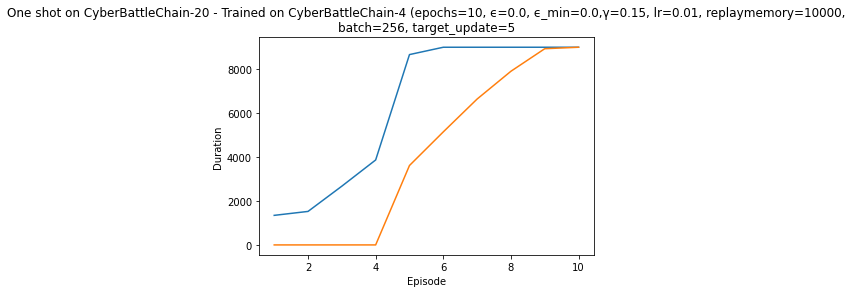

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=9000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:    9.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:   11.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:   11.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:   15.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:   15.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  115.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  115.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  124.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  124.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  130.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  130.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward:  138.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward:  138.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:  144.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:  144.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:  244.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:  244.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 43|reward:  253.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 43|reward:  253.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 1|Iteration 45|reward:  353.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 1|Iteration 45|reward:  353.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 1|Iteration 48|reward:  362.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 1|Iteration 48|reward:  362.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 49|reward:  370.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 49|reward:  370.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 1|Iteration 50|reward:  372.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 1|Iteration 50|reward:  372.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward:  378.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward:  378.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 61|reward:  380.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 61|reward:  380.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 1|Iteration 70|reward:  386.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 1|Iteration 70|reward:  386.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 1|Iteration 73|reward:  392.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 1|Iteration 73|reward:  392.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 1|Iteration 92|reward:  492.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 1|Iteration 92|reward:  492.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 1|Iteration 113|reward:  492.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 1|Iteration 115|reward:  501.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 1|Iteration 115|reward:  501.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 1|Iteration 119|reward:  601.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 1|Iteration 119|reward:  601.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 1|Iteration 121|reward:  607.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 1|Iteration 121|reward:  607.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 1|Iteration 130|reward:  609.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 1|Iteration 130|reward:  609.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 1|Iteration 135|reward:  611.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 1|Iteration 135|reward:  611.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 1|Iteration 156|reward:  620.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 1|Iteration 156|reward:  620.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 1|Iteration 158|reward:  720.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 1|Iteration 158|reward:  720.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 1|Iteration 159|reward:  726.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 1|Iteration 159|reward:  726.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 1|Iteration 177|reward:  732.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 1|Iteration 177|reward:  732.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 1|Iteration 186|reward:  738.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 1|Iteration 186|reward:  738.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 1|Iteration 195|reward:  740.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 1|Iteration 195|reward:  740.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 1|Iteration 196|reward:  744.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 1|Iteration 196|reward:  744.0|last_reward_at:  196|Elapsed Time: 0:00:00||

Episode 1|Iteration 215|reward:  744.0|last_reward_at:  196|Elapsed Time: 0:00:01||

Episode 1|Iteration 228|reward:  744.0|last_reward_at:  196|Elapsed Time: 0:00:01||

Episode 1|Iteration 243|reward:  744.0|last_reward_at:  196|Elapsed Time: 0:00:01||

Episode 1|Iteration 263|reward:  753.0|last_reward_at:  196|Elapsed Time: 0:00:01||

Episode 1|Iteration 263|reward:  753.0|last_reward_at:  263|Elapsed Time: 0:00:01||

Episode 1|Iteration 267|reward:  853.0|last_reward_at:  263|Elapsed Time: 0:00:01||

Episode 1|Iteration 267|reward:  853.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 1|Iteration 288|reward:  853.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 1|Iteration 308|reward:  853.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 1|Iteration 327|reward:  853.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 1|Iteration 331|reward:  862.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 1|Iteration 331|reward:  862.0|last_reward_at:  331|Elapsed Time: 0:00:01||

Episode 1|Iteration 334|reward:  962.0|last_reward_at:  331|Elapsed Time: 0:00:01||

Episode 1|Iteration 334|reward:  962.0|last_reward_at:  334|Elapsed Time: 0:00:01||

Episode 1|Iteration 338|reward:  968.0|last_reward_at:  334|Elapsed Time: 0:00:01||

Episode 1|Iteration 338|reward:  968.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 1|Iteration 339|reward:  974.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 1|Iteration 339|reward:  974.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 1|Iteration 350|reward:  980.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 1|Iteration 350|reward:  980.0|last_reward_at:  350|Elapsed Time: 0:00:01||

Episode 1|Iteration 369|reward:  980.0|last_reward_at:  350|Elapsed Time: 0:00:01||

Episode 1|Iteration 388|reward:  980.0|last_reward_at:  350|Elapsed Time: 0:00:01||

Episode 1|Iteration 390|reward:  986.0|last_reward_at:  350|Elapsed Time: 0:00:01||

Episode 1|Iteration 390|reward:  986.0|last_reward_at:  390|Elapsed Time: 0:00:01||

Episode 1|Iteration 392|reward:  992.0|last_reward_at:  390|Elapsed Time: 0:00:01||

Episode 1|Iteration 392|reward:  992.0|last_reward_at:  392|Elapsed Time: 0:00:01||

Episode 1|Iteration 403|reward:  996.0|last_reward_at:  392|Elapsed Time: 0:00:02||

Episode 1|Iteration 403|reward:  996.0|last_reward_at:  403|Elapsed Time: 0:00:02||

Episode 1|Iteration 422|reward:  996.0|last_reward_at:  403|Elapsed Time: 0:00:02||

Episode 1|Iteration 430|reward:  998.0|last_reward_at:  403|Elapsed Time: 0:00:02||

Episode 1|Iteration 430|reward:  998.0|last_reward_at:  430|Elapsed Time: 0:00:02||

Episode 1|Iteration 447|reward:  998.0|last_reward_at:  430|Elapsed Time: 0:00:02||

Episode 1|Iteration 456|reward:  998.0|last_reward_at:  430|Elapsed Time: 0:00:02||

Episode 1|Iteration 470|reward:  998.0|last_reward_at:  430|Elapsed Time: 0:00:02||

Episode 1|Iteration 485|reward:  998.0|last_reward_at:  430|Elapsed Time: 0:00:02||

Episode 1|Iteration 502|reward:  998.0|last_reward_at:  430|Elapsed Time: 0:00:02||

Episode 1|Iteration 520|reward:  998.0|last_reward_at:  430|Elapsed Time: 0:00:02||

Episode 1|Iteration 538|reward:  998.0|last_reward_at:  430|Elapsed Time: 0:00:02||

Episode 1|Iteration 555|reward:  998.0|last_reward_at:  430|Elapsed Time: 0:00:02||

Episode 1|Iteration 570|reward:  998.0|last_reward_at:  430|Elapsed Time: 0:00:03||

Episode 1|Iteration 587|reward:  998.0|last_reward_at:  430|Elapsed Time: 0:00:03||

Episode 1|Iteration 605|reward:  998.0|last_reward_at:  430|Elapsed Time: 0:00:03||

Episode 1|Iteration 623|reward:  998.0|last_reward_at:  430|Elapsed Time: 0:00:03||

Episode 1|Iteration 641|reward:  998.0|last_reward_at:  430|Elapsed Time: 0:00:03||

Episode 1|Iteration 659|reward:  998.0|last_reward_at:  430|Elapsed Time: 0:00:03||

Episode 1|Iteration 660|reward: 1007.0|last_reward_at:  430|Elapsed Time: 0:00:03||

Episode 1|Iteration 660|reward: 1007.0|last_reward_at:  660|Elapsed Time: 0:00:03||

Episode 1|Iteration 661|reward: 1107.0|last_reward_at:  660|Elapsed Time: 0:00:03||

Episode 1|Iteration 661|reward: 1107.0|last_reward_at:  661|Elapsed Time: 0:00:03||

Episode 1|Iteration 663|reward: 1113.0|last_reward_at:  661|Elapsed Time: 0:00:03||

Episode 1|Iteration 663|reward: 1113.0|last_reward_at:  663|Elapsed Time: 0:00:03||

Episode 1|Iteration 679|reward: 1113.0|last_reward_at:  663|Elapsed Time: 0:00:03||

Episode 1|Iteration 685|reward: 1119.0|last_reward_at:  663|Elapsed Time: 0:00:03||

Episode 1|Iteration 685|reward: 1119.0|last_reward_at:  685|Elapsed Time: 0:00:03||

Episode 1|Iteration 703|reward: 1119.0|last_reward_at:  685|Elapsed Time: 0:00:03||

Episode 1|Iteration 721|reward: 1119.0|last_reward_at:  685|Elapsed Time: 0:00:03||

Episode 1|Iteration 731|reward: 1127.0|last_reward_at:  685|Elapsed Time: 0:00:04||

Episode 1|Iteration 731|reward: 1127.0|last_reward_at:  731|Elapsed Time: 0:00:04||

Episode 1|Iteration 749|reward: 1127.0|last_reward_at:  731|Elapsed Time: 0:00:04||

Episode 1|Iteration 767|reward: 1127.0|last_reward_at:  731|Elapsed Time: 0:00:04||

Episode 1|Iteration 784|reward: 1127.0|last_reward_at:  731|Elapsed Time: 0:00:04||

Episode 1|Iteration 798|reward: 1127.0|last_reward_at:  731|Elapsed Time: 0:00:04||

Episode 1|Iteration 815|reward: 1127.0|last_reward_at:  731|Elapsed Time: 0:00:04||

Episode 1|Iteration 828|reward: 1127.0|last_reward_at:  731|Elapsed Time: 0:00:04||

Episode 1|Iteration 839|reward: 1136.0|last_reward_at:  731|Elapsed Time: 0:00:04||

Episode 1|Iteration 839|reward: 1136.0|last_reward_at:  839|Elapsed Time: 0:00:04||

Episode 1|Iteration 840|reward: 1236.0|last_reward_at:  839|Elapsed Time: 0:00:04||

Episode 1|Iteration 840|reward: 1236.0|last_reward_at:  840|Elapsed Time: 0:00:04||

Episode 1|Iteration 856|reward: 1236.0|last_reward_at:  840|Elapsed Time: 0:00:04||

Episode 1|Iteration 873|reward: 1236.0|last_reward_at:  840|Elapsed Time: 0:00:04||

Episode 1|Iteration 890|reward: 1236.0|last_reward_at:  840|Elapsed Time: 0:00:04||

Episode 1|Iteration 907|reward: 1236.0|last_reward_at:  840|Elapsed Time: 0:00:05||

Episode 1|Iteration 924|reward: 1236.0|last_reward_at:  840|Elapsed Time: 0:00:05||

Episode 1|Iteration 937|reward: 1242.0|last_reward_at:  840|Elapsed Time: 0:00:05||

Episode 1|Iteration 937|reward: 1242.0|last_reward_at:  937|Elapsed Time: 0:00:05||

Episode 1|Iteration 954|reward: 1242.0|last_reward_at:  937|Elapsed Time: 0:00:05||

Episode 1|Iteration 963|reward: 1244.0|last_reward_at:  937|Elapsed Time: 0:00:05||

Episode 1|Iteration 963|reward: 1244.0|last_reward_at:  963|Elapsed Time: 0:00:05||

Episode 1|Iteration 965|reward: 1253.0|last_reward_at:  963|Elapsed Time: 0:00:05||

Episode 1|Iteration 965|reward: 1253.0|last_reward_at:  965|Elapsed Time: 0:00:05||

Episode 1|Iteration 969|reward: 1353.0|last_reward_at:  965|Elapsed Time: 0:00:05||

Episode 1|Iteration 969|reward: 1353.0|last_reward_at:  969|Elapsed Time: 0:00:05||

Episode 1|Iteration 979|reward: 1355.0|last_reward_at:  969|Elapsed Time: 0:00:05||

Episode 1|Iteration 979|reward: 1355.0|last_reward_at:  979|Elapsed Time: 0:00:05||

Episode 1|Iteration 996|reward: 1355.0|last_reward_at:  979|Elapsed Time: 0:00:05||

Episode 1|Iteration 1009|reward: 1361.0|last_reward_at:  979|Elapsed Time: 0:00:05||

Episode 1|Iteration 1009|reward: 1361.0|last_reward_at: 1009|Elapsed Time: 0:00:05||

Episode 1|Iteration 1026|reward: 1361.0|last_reward_at: 1009|Elapsed Time: 0:00:05||

Episode 1|Iteration 1036|reward: 1367.0|last_reward_at: 1009|Elapsed Time: 0:00:05||

Episode 1|Iteration 1036|reward: 1367.0|last_reward_at: 1036|Elapsed Time: 0:00:05||

Episode 1|Iteration 1050|reward: 1375.0|last_reward_at: 1036|Elapsed Time: 0:00:05||

Episode 1|Iteration 1050|reward: 1375.0|last_reward_at: 1050|Elapsed Time: 0:00:05||

Episode 1|Iteration 1066|reward: 1375.0|last_reward_at: 1050|Elapsed Time: 0:00:06||

Episode 1|Iteration 1082|reward: 1375.0|last_reward_at: 1050|Elapsed Time: 0:00:06||

Episode 1|Iteration 1095|reward: 1375.0|last_reward_at: 1050|Elapsed Time: 0:00:06||

Episode 1|Iteration 1107|reward: 1384.0|last_reward_at: 1050|Elapsed Time: 0:00:06||

Episode 1|Iteration 1107|reward: 1384.0|last_reward_at: 1107|Elapsed Time: 0:00:06||

Episode 1|Iteration 1115|reward: 1484.0|last_reward_at: 1107|Elapsed Time: 0:00:06||

Episode 1|Iteration 1115|reward: 1484.0|last_reward_at: 1115|Elapsed Time: 0:00:06||

Episode 1|Iteration 1130|reward: 1484.0|last_reward_at: 1115|Elapsed Time: 0:00:06||

Episode 1|Iteration 1140|reward: 1484.0|last_reward_at: 1115|Elapsed Time: 0:00:06||

Episode 1|Iteration 1154|reward: 1484.0|last_reward_at: 1115|Elapsed Time: 0:00:06||

Episode 1|Iteration 1169|reward: 1484.0|last_reward_at: 1115|Elapsed Time: 0:00:06||

Episode 1|Iteration 1185|reward: 1484.0|last_reward_at: 1115|Elapsed Time: 0:00:06||

Episode 1|Iteration 1201|reward: 1484.0|last_reward_at: 1115|Elapsed Time: 0:00:07||

Episode 1|Iteration 1206|reward: 1493.0|last_reward_at: 1115|Elapsed Time: 0:00:07||

Episode 1|Iteration 1206|reward: 1493.0|last_reward_at: 1206|Elapsed Time: 0:00:07||

Episode 1|Iteration 1208|reward: 1593.0|last_reward_at: 1206|Elapsed Time: 0:00:07||

Episode 1|Iteration 1208|reward: 1593.0|last_reward_at: 1208|Elapsed Time: 0:00:07||

Episode 1|Iteration 1223|reward: 1593.0|last_reward_at: 1208|Elapsed Time: 0:00:07||

Episode 1|Iteration 1239|reward: 1593.0|last_reward_at: 1208|Elapsed Time: 0:00:07||

Episode 1|Iteration 1254|reward: 1593.0|last_reward_at: 1208|Elapsed Time: 0:00:07||

Episode 1|Iteration 1268|reward: 1593.0|last_reward_at: 1208|Elapsed Time: 0:00:07||

Episode 1|Iteration 1282|reward: 1595.0|last_reward_at: 1208|Elapsed Time: 0:00:07||

Episode 1|Iteration 1282|reward: 1595.0|last_reward_at: 1282|Elapsed Time: 0:00:07||

Episode 1|Iteration 1297|reward: 1601.0|last_reward_at: 1282|Elapsed Time: 0:00:07||

Episode 1|Iteration 1297|reward: 1601.0|last_reward_at: 1297|Elapsed Time: 0:00:07||

Episode 1|Iteration 1302|reward: 1609.0|last_reward_at: 1297|Elapsed Time: 0:00:07||

Episode 1|Iteration 1302|reward: 1609.0|last_reward_at: 1302|Elapsed Time: 0:00:07||

Episode 1|Iteration 1309|reward: 1618.0|last_reward_at: 1302|Elapsed Time: 0:00:07||

Episode 1|Iteration 1309|reward: 1618.0|last_reward_at: 1309|Elapsed Time: 0:00:07||

Episode 1|Iteration 1314|reward: 1718.0|last_reward_at: 1309|Elapsed Time: 0:00:07||

Episode 1|Iteration 1314|reward: 1718.0|last_reward_at: 1314|Elapsed Time: 0:00:07||

Episode 1|Iteration 1329|reward: 1718.0|last_reward_at: 1314|Elapsed Time: 0:00:07||

Episode 1|Iteration 1336|reward: 1720.0|last_reward_at: 1314|Elapsed Time: 0:00:07||

Episode 1|Iteration 1336|reward: 1720.0|last_reward_at: 1336|Elapsed Time: 0:00:07||

Episode 1|Iteration 1351|reward: 1720.0|last_reward_at: 1336|Elapsed Time: 0:00:08||

Episode 1|Iteration 1366|reward: 1720.0|last_reward_at: 1336|Elapsed Time: 0:00:08||

Episode 1|Iteration 1381|reward: 1720.0|last_reward_at: 1336|Elapsed Time: 0:00:08||

Episode 1|Iteration 1395|reward: 1720.0|last_reward_at: 1336|Elapsed Time: 0:00:08||

Episode 1|Iteration 1407|reward: 1720.0|last_reward_at: 1336|Elapsed Time: 0:00:08||

Episode 1|Iteration 1416|reward: 1729.0|last_reward_at: 1336|Elapsed Time: 0:00:08||

Episode 1|Iteration 1416|reward: 1729.0|last_reward_at: 1416|Elapsed Time: 0:00:08||

Episode 1|Iteration 1418|reward: 1829.0|last_reward_at: 1416|Elapsed Time: 0:00:08||

Episode 1|Iteration 1418|reward: 1829.0|last_reward_at: 1418|Elapsed Time: 0:00:08||

Episode 1|Iteration 1426|reward: 1838.0|last_reward_at: 1418|Elapsed Time: 0:00:08||

Episode 1|Iteration 1426|reward: 1838.0|last_reward_at: 1426|Elapsed Time: 0:00:08||

Episode 1|Iteration 1427|reward: 1938.0|last_reward_at: 1426|Elapsed Time: 0:00:08||

Episode 1|Iteration 1427|reward: 1938.0|last_reward_at: 1427|Elapsed Time: 0:00:08||

Episode 1|Iteration 1430|reward: 1944.0|last_reward_at: 1427|Elapsed Time: 0:00:08||

Episode 1|Iteration 1430|reward: 1944.0|last_reward_at: 1430|Elapsed Time: 0:00:08||

Episode 1|Iteration 1433|reward: 1946.0|last_reward_at: 1430|Elapsed Time: 0:00:08||

Episode 1|Iteration 1433|reward: 1946.0|last_reward_at: 1433|Elapsed Time: 0:00:08||

Episode 1|Iteration 1440|reward: 1952.0|last_reward_at: 1433|Elapsed Time: 0:00:08||

Episode 1|Iteration 1440|reward: 1952.0|last_reward_at: 1440|Elapsed Time: 0:00:08||

Episode 1|Iteration 1446|reward: 1958.0|last_reward_at: 1440|Elapsed Time: 0:00:08||

Episode 1|Iteration 1446|reward: 1958.0|last_reward_at: 1446|Elapsed Time: 0:00:08||

Episode 1|Iteration 1448|reward: 1964.0|last_reward_at: 1446|Elapsed Time: 0:00:08||

Episode 1|Iteration 1448|reward: 1964.0|last_reward_at: 1448|Elapsed Time: 0:00:08||

Episode 1|Iteration 1461|reward: 1964.0|last_reward_at: 1448|Elapsed Time: 0:00:08||

Episode 1|Iteration 1474|reward: 1964.0|last_reward_at: 1448|Elapsed Time: 0:00:09||

Episode 1|Iteration 1482|reward: 1964.0|last_reward_at: 1448|Elapsed Time: 0:00:09||

Episode 1|Iteration 1487|reward: 1970.0|last_reward_at: 1448|Elapsed Time: 0:00:09||

Episode 1|Iteration 1487|reward: 1970.0|last_reward_at: 1487|Elapsed Time: 0:00:09||

Episode 1|Iteration 1496|reward: 1976.0|last_reward_at: 1487|Elapsed Time: 0:00:09||

Episode 1|Iteration 1496|reward: 1976.0|last_reward_at: 1496|Elapsed Time: 0:00:09||

Episode 1|Iteration 1499|reward: 1978.0|last_reward_at: 1496|Elapsed Time: 0:00:09||

Episode 1|Iteration 1499|reward: 1978.0|last_reward_at: 1499|Elapsed Time: 0:00:09||

Episode 1|Iteration 1512|reward: 1978.0|last_reward_at: 1499|Elapsed Time: 0:00:09||

Episode 1|Iteration 1525|reward: 1984.0|last_reward_at: 1499|Elapsed Time: 0:00:09||

Episode 1|Iteration 1525|reward: 1984.0|last_reward_at: 1525|Elapsed Time: 0:00:09||

Episode 1|Iteration 1538|reward: 1986.0|last_reward_at: 1525|Elapsed Time: 0:00:09||

Episode 1|Iteration 1538|reward: 1986.0|last_reward_at: 1538|Elapsed Time: 0:00:09||

Episode 1|Iteration 1550|reward: 1986.0|last_reward_at: 1538|Elapsed Time: 0:00:09||

Episode 1|Iteration 1561|reward: 1986.0|last_reward_at: 1538|Elapsed Time: 0:00:09||

Episode 1|Iteration 1573|reward: 1986.0|last_reward_at: 1538|Elapsed Time: 0:00:09||

Episode 1|Iteration 1585|reward: 1986.0|last_reward_at: 1538|Elapsed Time: 0:00:09||

Episode 1|Iteration 1595|reward: 1986.0|last_reward_at: 1538|Elapsed Time: 0:00:10||

Episode 1|Iteration 1599|reward: 1995.0|last_reward_at: 1538|Elapsed Time: 0:00:10||

Episode 1|Iteration 1599|reward: 1995.0|last_reward_at: 1599|Elapsed Time: 0:00:10||

Episode 1|Iteration 1605|reward: 2095.0|last_reward_at: 1599|Elapsed Time: 0:00:10||

Episode 1|Iteration 1605|reward: 2095.0|last_reward_at: 1605|Elapsed Time: 0:00:10||

Episode 1|Iteration 1618|reward: 2095.0|last_reward_at: 1605|Elapsed Time: 0:00:10||

Episode 1|Iteration 1631|reward: 2095.0|last_reward_at: 1605|Elapsed Time: 0:00:10||

Episode 1|Iteration 1636|reward: 2101.0|last_reward_at: 1605|Elapsed Time: 0:00:10||

Episode 1|Iteration 1636|reward: 2101.0|last_reward_at: 1636|Elapsed Time: 0:00:10||

Episode 1|Iteration 1641|reward: 2103.0|last_reward_at: 1636|Elapsed Time: 0:00:10||

Episode 1|Iteration 1641|reward: 2103.0|last_reward_at: 1641|Elapsed Time: 0:00:10||

Episode 1|Iteration 1648|reward: 2112.0|last_reward_at: 1641|Elapsed Time: 0:00:10||

Episode 1|Iteration 1648|reward: 2112.0|last_reward_at: 1648|Elapsed Time: 0:00:10||

Episode 1|Iteration 1649|reward: 2120.0|last_reward_at: 1648|Elapsed Time: 0:00:10||

Episode 1|Iteration 1649|reward: 2120.0|last_reward_at: 1649|Elapsed Time: 0:00:10||

Episode 1|Iteration 1651|reward: 2220.0|last_reward_at: 1649|Elapsed Time: 0:00:10||

Episode 1|Iteration 1651|reward: 2220.0|last_reward_at: 1651|Elapsed Time: 0:00:10||

Episode 1|Iteration 1662|reward: 2220.0|last_reward_at: 1651|Elapsed Time: 0:00:10||

Episode 1|Iteration 1674|reward: 2220.0|last_reward_at: 1651|Elapsed Time: 0:00:10||

Episode 1|Iteration 1680|reward: 2229.0|last_reward_at: 1651|Elapsed Time: 0:00:10||

Episode 1|Iteration 1680|reward: 2229.0|last_reward_at: 1680|Elapsed Time: 0:00:10||

Episode 1|Iteration 1681|reward: 2329.0|last_reward_at: 1680|Elapsed Time: 0:00:10||

Episode 1|Iteration 1681|reward: 2329.0|last_reward_at: 1681|Elapsed Time: 0:00:10||

Episode 1|Iteration 1692|reward: 2329.0|last_reward_at: 1681|Elapsed Time: 0:00:10||

Episode 1|Iteration 1703|reward: 2329.0|last_reward_at: 1681|Elapsed Time: 0:00:10||

Episode 1|Iteration 1715|reward: 2329.0|last_reward_at: 1681|Elapsed Time: 0:00:11||

Episode 1|Iteration 1720|reward: 2331.0|last_reward_at: 1681|Elapsed Time: 0:00:11||

Episode 1|Iteration 1720|reward: 2331.0|last_reward_at: 1720|Elapsed Time: 0:00:11||

Episode 1|Iteration 1726|reward: 2337.0|last_reward_at: 1720|Elapsed Time: 0:00:11||

Episode 1|Iteration 1726|reward: 2337.0|last_reward_at: 1726|Elapsed Time: 0:00:11||

Episode 1|Iteration 1738|reward: 2337.0|last_reward_at: 1726|Elapsed Time: 0:00:11||

Episode 1|Iteration 1739|reward: 2343.0|last_reward_at: 1726|Elapsed Time: 0:00:11||

Episode 1|Iteration 1739|reward: 2343.0|last_reward_at: 1739|Elapsed Time: 0:00:11||

Episode 1|Iteration 1745|reward: 2345.0|last_reward_at: 1739|Elapsed Time: 0:00:11||

Episode 1|Iteration 1745|reward: 2345.0|last_reward_at: 1745|Elapsed Time: 0:00:11||

Episode 1|Iteration 1756|reward: 2345.0|last_reward_at: 1745|Elapsed Time: 0:00:11||

Episode 1|Iteration 1765|reward: 2351.0|last_reward_at: 1745|Elapsed Time: 0:00:11||

Episode 1|Iteration 1765|reward: 2351.0|last_reward_at: 1765|Elapsed Time: 0:00:11||

Episode 1|Iteration 1776|reward: 2351.0|last_reward_at: 1765|Elapsed Time: 0:00:11||

Episode 1|Iteration 1783|reward: 2357.0|last_reward_at: 1765|Elapsed Time: 0:00:11||

Episode 1|Iteration 1783|reward: 2357.0|last_reward_at: 1783|Elapsed Time: 0:00:11||

Episode 1|Iteration 1794|reward: 2357.0|last_reward_at: 1783|Elapsed Time: 0:00:11||

Episode 1|Iteration 1805|reward: 2357.0|last_reward_at: 1783|Elapsed Time: 0:00:11||

Episode 1|Iteration 1816|reward: 2357.0|last_reward_at: 1783|Elapsed Time: 0:00:12||

Episode 1|Iteration 1823|reward: 2357.0|last_reward_at: 1783|Elapsed Time: 0:00:12||

Episode 1|Iteration 1833|reward: 2357.0|last_reward_at: 1783|Elapsed Time: 0:00:12||

Episode 1|Iteration 1844|reward: 2357.0|last_reward_at: 1783|Elapsed Time: 0:00:12||

Episode 1|Iteration 1855|reward: 2357.0|last_reward_at: 1783|Elapsed Time: 0:00:12||

Episode 1|Iteration 1858|reward: 2365.0|last_reward_at: 1783|Elapsed Time: 0:00:12||

Episode 1|Iteration 1858|reward: 2365.0|last_reward_at: 1858|Elapsed Time: 0:00:12||

Episode 1|Iteration 1869|reward: 2365.0|last_reward_at: 1858|Elapsed Time: 0:00:12||

Episode 1|Iteration 1880|reward: 2365.0|last_reward_at: 1858|Elapsed Time: 0:00:12||

Episode 1|Iteration 1891|reward: 2365.0|last_reward_at: 1858|Elapsed Time: 0:00:12||

Episode 1|Iteration 1902|reward: 2365.0|last_reward_at: 1858|Elapsed Time: 0:00:12||

Episode 1|Iteration 1913|reward: 2365.0|last_reward_at: 1858|Elapsed Time: 0:00:12||

Episode 1|Iteration 1924|reward: 2365.0|last_reward_at: 1858|Elapsed Time: 0:00:13||

Episode 1|Iteration 1935|reward: 2365.0|last_reward_at: 1858|Elapsed Time: 0:00:13||

Episode 1|Iteration 1946|reward: 2365.0|last_reward_at: 1858|Elapsed Time: 0:00:13||

Episode 1|Iteration 1957|reward: 2365.0|last_reward_at: 1858|Elapsed Time: 0:00:13||

Episode 1|Iteration 1968|reward: 2365.0|last_reward_at: 1858|Elapsed Time: 0:00:13||

Episode 1|Iteration 1979|reward: 2365.0|last_reward_at: 1858|Elapsed Time: 0:00:13||

Episode 1|Iteration 1990|reward: 2365.0|last_reward_at: 1858|Elapsed Time: 0:00:13||

Episode 1|Iteration 2001|reward: 2365.0|last_reward_at: 1858|Elapsed Time: 0:00:13||

Episode 1|Iteration 2012|reward: 2365.0|last_reward_at: 1858|Elapsed Time: 0:00:13||

Episode 1|Iteration 2023|reward: 2365.0|last_reward_at: 1858|Elapsed Time: 0:00:14||

Episode 1|Iteration 2034|reward: 2365.0|last_reward_at: 1858|Elapsed Time: 0:00:14||

Episode 1|Iteration 2045|reward: 2365.0|last_reward_at: 1858|Elapsed Time: 0:00:14||

Episode 1|Iteration 2056|reward: 2365.0|last_reward_at: 1858|Elapsed Time: 0:00:14||

Episode 1|Iteration 2064|reward: 2374.0|last_reward_at: 1858|Elapsed Time: 0:00:14||

Episode 1|Iteration 2064|reward: 2374.0|last_reward_at: 2064|Elapsed Time: 0:00:14||

Episode 1|Iteration 2072|reward: 2474.0|last_reward_at: 2064|Elapsed Time: 0:00:14||

Episode 1|Iteration 2072|reward: 2474.0|last_reward_at: 2072|Elapsed Time: 0:00:14||

Episode 1|Iteration 2083|reward: 2474.0|last_reward_at: 2072|Elapsed Time: 0:00:14||

Episode 1|Iteration 2093|reward: 2474.0|last_reward_at: 2072|Elapsed Time: 0:00:14||

Episode 1|Iteration 2103|reward: 2474.0|last_reward_at: 2072|Elapsed Time: 0:00:14||

Episode 1|Iteration 2113|reward: 2474.0|last_reward_at: 2072|Elapsed Time: 0:00:14||

Episode 1|Iteration 2123|reward: 2474.0|last_reward_at: 2072|Elapsed Time: 0:00:15||

Episode 1|Iteration 2134|reward: 2474.0|last_reward_at: 2072|Elapsed Time: 0:00:15||

Episode 1|Iteration 2145|reward: 2474.0|last_reward_at: 2072|Elapsed Time: 0:00:15||

Episode 1|Iteration 2156|reward: 2474.0|last_reward_at: 2072|Elapsed Time: 0:00:15||

Episode 1|Iteration 2157|reward: 2480.0|last_reward_at: 2072|Elapsed Time: 0:00:15||

Episode 1|Iteration 2157|reward: 2480.0|last_reward_at: 2157|Elapsed Time: 0:00:15||

Episode 1|Iteration 2165|reward: 2480.0|last_reward_at: 2157|Elapsed Time: 0:00:15||

Episode 1|Iteration 2174|reward: 2480.0|last_reward_at: 2157|Elapsed Time: 0:00:15||

Episode 1|Iteration 2184|reward: 2480.0|last_reward_at: 2157|Elapsed Time: 0:00:15||

Episode 1|Iteration 2195|reward: 2480.0|last_reward_at: 2157|Elapsed Time: 0:00:15||

Episode 1|Iteration 2205|reward: 2480.0|last_reward_at: 2157|Elapsed Time: 0:00:15||

Episode 1|Iteration 2216|reward: 2480.0|last_reward_at: 2157|Elapsed Time: 0:00:15||

Episode 1|Iteration 2227|reward: 2480.0|last_reward_at: 2157|Elapsed Time: 0:00:16||

Episode 1|Iteration 2237|reward: 2480.0|last_reward_at: 2157|Elapsed Time: 0:00:16||

Episode 1|Iteration 2248|reward: 2480.0|last_reward_at: 2157|Elapsed Time: 0:00:16||

Episode 1|Iteration 2258|reward: 2480.0|last_reward_at: 2157|Elapsed Time: 0:00:16||

Episode 1|Iteration 2268|reward: 2480.0|last_reward_at: 2157|Elapsed Time: 0:00:16||

Episode 1|Iteration 2278|reward: 2480.0|last_reward_at: 2157|Elapsed Time: 0:00:16||

Episode 1|Iteration 2288|reward: 2480.0|last_reward_at: 2157|Elapsed Time: 0:00:16||

Episode 1|Iteration 2298|reward: 2480.0|last_reward_at: 2157|Elapsed Time: 0:00:16||

Episode 1|Iteration 2308|reward: 2480.0|last_reward_at: 2157|Elapsed Time: 0:00:16||

Episode 1|Iteration 2318|reward: 2480.0|last_reward_at: 2157|Elapsed Time: 0:00:16||

Episode 1|Iteration 2328|reward: 2480.0|last_reward_at: 2157|Elapsed Time: 0:00:17||

Episode 1|Iteration 2338|reward: 2480.0|last_reward_at: 2157|Elapsed Time: 0:00:17||

Episode 1|Iteration 2348|reward: 2480.0|last_reward_at: 2157|Elapsed Time: 0:00:17||

Episode 1|Iteration 2358|reward: 2480.0|last_reward_at: 2157|Elapsed Time: 0:00:17||

Episode 1|Iteration 2369|reward: 2480.0|last_reward_at: 2157|Elapsed Time: 0:00:17||

Episode 1|Iteration 2379|reward: 2480.0|last_reward_at: 2157|Elapsed Time: 0:00:17||

Episode 1|Iteration 2381|reward: 2489.0|last_reward_at: 2157|Elapsed Time: 0:00:17||

Episode 1|Iteration 2381|reward: 2489.0|last_reward_at: 2381|Elapsed Time: 0:00:17||

Episode 1|Iteration 2386|reward: 7489.0|last_reward_at: 2381|Elapsed Time: 0:00:17||

Episode 1|Iteration 2386|reward: 7489.0|last_reward_at: 2386|Elapsed Time: 0:00:17||

  Episode 1 ended at t=2386 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 41/1022 (0.04)
    explore-remote: 40/1262 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 400
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.7302, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:    9.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:   13.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:   13.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  113.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  113.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  115.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  115.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  124.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  124.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward:  224.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward:  224.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 33|reward:  230.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 33|reward:  230.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward:  236.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward:  236.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 44|reward:  238.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 44|reward:  238.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  242.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  242.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 2|Iteration 56|reward:  248.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 2|Iteration 56|reward:  248.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 2|Iteration 62|reward:  257.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 2|Iteration 62|reward:  257.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 2|Iteration 65|reward:  357.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 2|Iteration 65|reward:  357.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 2|Iteration 86|reward:  363.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 2|Iteration 86|reward:  363.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 2|Iteration 111|reward:  363.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 2|Iteration 120|reward:  372.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 2|Iteration 120|reward:  372.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 2|Iteration 121|reward:  472.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 2|Iteration 121|reward:  472.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 2|Iteration 123|reward:  478.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 2|Iteration 123|reward:  478.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 2|Iteration 124|reward:  484.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 2|Iteration 124|reward:  484.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 2|Iteration 146|reward:  490.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 2|Iteration 146|reward:  490.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 2|Iteration 160|reward:  496.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 2|Iteration 160|reward:  496.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 2|Iteration 166|reward:  498.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 2|Iteration 166|reward:  498.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 2|Iteration 173|reward:  502.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 2|Iteration 173|reward:  502.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 2|Iteration 196|reward:  502.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 2|Iteration 219|reward:  502.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 2|Iteration 227|reward:  511.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 2|Iteration 227|reward:  511.0|last_reward_at:  227|Elapsed Time: 0:00:01||

Episode 2|Iteration 230|reward:  611.0|last_reward_at:  227|Elapsed Time: 0:00:01||

Episode 2|Iteration 230|reward:  611.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 2|Iteration 247|reward:  617.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 2|Iteration 247|reward:  617.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 2|Iteration 248|reward:  626.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 2|Iteration 248|reward:  626.0|last_reward_at:  248|Elapsed Time: 0:00:01||

Episode 2|Iteration 249|reward:  726.0|last_reward_at:  248|Elapsed Time: 0:00:01||

Episode 2|Iteration 249|reward:  726.0|last_reward_at:  249|Elapsed Time: 0:00:01||

Episode 2|Iteration 250|reward:  732.0|last_reward_at:  249|Elapsed Time: 0:00:01||

Episode 2|Iteration 250|reward:  732.0|last_reward_at:  250|Elapsed Time: 0:00:01||

Episode 2|Iteration 251|reward:  741.0|last_reward_at:  250|Elapsed Time: 0:00:01||

Episode 2|Iteration 251|reward:  741.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 2|Iteration 255|reward:  841.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 2|Iteration 255|reward:  841.0|last_reward_at:  255|Elapsed Time: 0:00:01||

Episode 2|Iteration 257|reward:  847.0|last_reward_at:  255|Elapsed Time: 0:00:01||

Episode 2|Iteration 257|reward:  847.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 2|Iteration 275|reward:  849.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 2|Iteration 275|reward:  849.0|last_reward_at:  275|Elapsed Time: 0:00:01||

Episode 2|Iteration 289|reward:  851.0|last_reward_at:  275|Elapsed Time: 0:00:01||

Episode 2|Iteration 289|reward:  851.0|last_reward_at:  289|Elapsed Time: 0:00:01||

Episode 2|Iteration 301|reward:  857.0|last_reward_at:  289|Elapsed Time: 0:00:01||

Episode 2|Iteration 301|reward:  857.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 2|Iteration 316|reward:  865.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 2|Iteration 316|reward:  865.0|last_reward_at:  316|Elapsed Time: 0:00:01||

Episode 2|Iteration 318|reward:  871.0|last_reward_at:  316|Elapsed Time: 0:00:01||

Episode 2|Iteration 318|reward:  871.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 2|Iteration 331|reward:  877.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 2|Iteration 331|reward:  877.0|last_reward_at:  331|Elapsed Time: 0:00:01||

Episode 2|Iteration 342|reward:  877.0|last_reward_at:  331|Elapsed Time: 0:00:01||

Episode 2|Iteration 361|reward:  877.0|last_reward_at:  331|Elapsed Time: 0:00:01||

Episode 2|Iteration 381|reward:  877.0|last_reward_at:  331|Elapsed Time: 0:00:01||

Episode 2|Iteration 401|reward:  877.0|last_reward_at:  331|Elapsed Time: 0:00:01||

Episode 2|Iteration 421|reward:  877.0|last_reward_at:  331|Elapsed Time: 0:00:02||

Episode 2|Iteration 440|reward:  877.0|last_reward_at:  331|Elapsed Time: 0:00:02||

Episode 2|Iteration 450|reward:  886.0|last_reward_at:  331|Elapsed Time: 0:00:02||

Episode 2|Iteration 450|reward:  886.0|last_reward_at:  450|Elapsed Time: 0:00:02||

Episode 2|Iteration 451|reward:  986.0|last_reward_at:  450|Elapsed Time: 0:00:02||

Episode 2|Iteration 451|reward:  986.0|last_reward_at:  451|Elapsed Time: 0:00:02||

Episode 2|Iteration 462|reward:  992.0|last_reward_at:  451|Elapsed Time: 0:00:02||

Episode 2|Iteration 462|reward:  992.0|last_reward_at:  462|Elapsed Time: 0:00:02||

Episode 2|Iteration 481|reward:  992.0|last_reward_at:  462|Elapsed Time: 0:00:02||

Episode 2|Iteration 487|reward: 1001.0|last_reward_at:  462|Elapsed Time: 0:00:02||

Episode 2|Iteration 487|reward: 1001.0|last_reward_at:  487|Elapsed Time: 0:00:02||

Episode 2|Iteration 488|reward: 1101.0|last_reward_at:  487|Elapsed Time: 0:00:02||

Episode 2|Iteration 488|reward: 1101.0|last_reward_at:  488|Elapsed Time: 0:00:02||

Episode 2|Iteration 494|reward: 1103.0|last_reward_at:  488|Elapsed Time: 0:00:02||

Episode 2|Iteration 494|reward: 1103.0|last_reward_at:  494|Elapsed Time: 0:00:02||

Episode 2|Iteration 512|reward: 1103.0|last_reward_at:  494|Elapsed Time: 0:00:02||

Episode 2|Iteration 524|reward: 1105.0|last_reward_at:  494|Elapsed Time: 0:00:02||

Episode 2|Iteration 524|reward: 1105.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 2|Iteration 536|reward: 1114.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 2|Iteration 536|reward: 1114.0|last_reward_at:  536|Elapsed Time: 0:00:02||

Episode 2|Iteration 542|reward: 1120.0|last_reward_at:  536|Elapsed Time: 0:00:02||

Episode 2|Iteration 542|reward: 1120.0|last_reward_at:  542|Elapsed Time: 0:00:02||

Episode 2|Iteration 544|reward: 1220.0|last_reward_at:  542|Elapsed Time: 0:00:02||

Episode 2|Iteration 544|reward: 1220.0|last_reward_at:  544|Elapsed Time: 0:00:02||

Episode 2|Iteration 560|reward: 1220.0|last_reward_at:  544|Elapsed Time: 0:00:02||

Episode 2|Iteration 570|reward: 1220.0|last_reward_at:  544|Elapsed Time: 0:00:02||

Episode 2|Iteration 572|reward: 1226.0|last_reward_at:  544|Elapsed Time: 0:00:02||

Episode 2|Iteration 572|reward: 1226.0|last_reward_at:  572|Elapsed Time: 0:00:02||

Episode 2|Iteration 582|reward: 1235.0|last_reward_at:  572|Elapsed Time: 0:00:02||

Episode 2|Iteration 582|reward: 1235.0|last_reward_at:  582|Elapsed Time: 0:00:02||

Episode 2|Iteration 586|reward: 1335.0|last_reward_at:  582|Elapsed Time: 0:00:02||

Episode 2|Iteration 586|reward: 1335.0|last_reward_at:  586|Elapsed Time: 0:00:02||

Episode 2|Iteration 597|reward: 1337.0|last_reward_at:  586|Elapsed Time: 0:00:03||

Episode 2|Iteration 597|reward: 1337.0|last_reward_at:  597|Elapsed Time: 0:00:03||

Episode 2|Iteration 609|reward: 1337.0|last_reward_at:  597|Elapsed Time: 0:00:03||

Episode 2|Iteration 615|reward: 1343.0|last_reward_at:  597|Elapsed Time: 0:00:03||

Episode 2|Iteration 615|reward: 1343.0|last_reward_at:  615|Elapsed Time: 0:00:03||

Episode 2|Iteration 630|reward: 1343.0|last_reward_at:  615|Elapsed Time: 0:00:03||

Episode 2|Iteration 646|reward: 1343.0|last_reward_at:  615|Elapsed Time: 0:00:03||

Episode 2|Iteration 663|reward: 1343.0|last_reward_at:  615|Elapsed Time: 0:00:03||

Episode 2|Iteration 678|reward: 1343.0|last_reward_at:  615|Elapsed Time: 0:00:03||

Episode 2|Iteration 693|reward: 1352.0|last_reward_at:  615|Elapsed Time: 0:00:03||

Episode 2|Iteration 693|reward: 1352.0|last_reward_at:  693|Elapsed Time: 0:00:03||

Episode 2|Iteration 698|reward: 1452.0|last_reward_at:  693|Elapsed Time: 0:00:03||

Episode 2|Iteration 698|reward: 1452.0|last_reward_at:  698|Elapsed Time: 0:00:03||

Episode 2|Iteration 699|reward: 1454.0|last_reward_at:  698|Elapsed Time: 0:00:03||

Episode 2|Iteration 699|reward: 1454.0|last_reward_at:  699|Elapsed Time: 0:00:03||

Episode 2|Iteration 708|reward: 1460.0|last_reward_at:  699|Elapsed Time: 0:00:03||

Episode 2|Iteration 708|reward: 1460.0|last_reward_at:  708|Elapsed Time: 0:00:03||

Episode 2|Iteration 722|reward: 1460.0|last_reward_at:  708|Elapsed Time: 0:00:03||

Episode 2|Iteration 723|reward: 1466.0|last_reward_at:  708|Elapsed Time: 0:00:03||

Episode 2|Iteration 723|reward: 1466.0|last_reward_at:  723|Elapsed Time: 0:00:03||

Episode 2|Iteration 739|reward: 1466.0|last_reward_at:  723|Elapsed Time: 0:00:04||

Episode 2|Iteration 745|reward: 1472.0|last_reward_at:  723|Elapsed Time: 0:00:04||

Episode 2|Iteration 745|reward: 1472.0|last_reward_at:  745|Elapsed Time: 0:00:04||

Episode 2|Iteration 761|reward: 1472.0|last_reward_at:  745|Elapsed Time: 0:00:04||

Episode 2|Iteration 777|reward: 1472.0|last_reward_at:  745|Elapsed Time: 0:00:04||

Episode 2|Iteration 785|reward: 1481.0|last_reward_at:  745|Elapsed Time: 0:00:04||

Episode 2|Iteration 785|reward: 1481.0|last_reward_at:  785|Elapsed Time: 0:00:04||

Episode 2|Iteration 786|reward: 1487.0|last_reward_at:  785|Elapsed Time: 0:00:04||

Episode 2|Iteration 786|reward: 1487.0|last_reward_at:  786|Elapsed Time: 0:00:04||

Episode 2|Iteration 787|reward: 1489.0|last_reward_at:  786|Elapsed Time: 0:00:04||

Episode 2|Iteration 787|reward: 1489.0|last_reward_at:  787|Elapsed Time: 0:00:04||

Episode 2|Iteration 788|reward: 1589.0|last_reward_at:  787|Elapsed Time: 0:00:04||

Episode 2|Iteration 788|reward: 1589.0|last_reward_at:  788|Elapsed Time: 0:00:04||

Episode 2|Iteration 797|reward: 1595.0|last_reward_at:  788|Elapsed Time: 0:00:04||

Episode 2|Iteration 797|reward: 1595.0|last_reward_at:  797|Elapsed Time: 0:00:04||

Episode 2|Iteration 798|reward: 1601.0|last_reward_at:  797|Elapsed Time: 0:00:04||

Episode 2|Iteration 798|reward: 1601.0|last_reward_at:  798|Elapsed Time: 0:00:04||

Episode 2|Iteration 804|reward: 1610.0|last_reward_at:  798|Elapsed Time: 0:00:04||

Episode 2|Iteration 804|reward: 1610.0|last_reward_at:  804|Elapsed Time: 0:00:04||

Episode 2|Iteration 805|reward: 1710.0|last_reward_at:  804|Elapsed Time: 0:00:04||

Episode 2|Iteration 805|reward: 1710.0|last_reward_at:  805|Elapsed Time: 0:00:04||

Episode 2|Iteration 812|reward: 1716.0|last_reward_at:  805|Elapsed Time: 0:00:04||

Episode 2|Iteration 812|reward: 1716.0|last_reward_at:  812|Elapsed Time: 0:00:04||

Episode 2|Iteration 826|reward: 1716.0|last_reward_at:  812|Elapsed Time: 0:00:04||

Episode 2|Iteration 841|reward: 1716.0|last_reward_at:  812|Elapsed Time: 0:00:04||

Episode 2|Iteration 856|reward: 1716.0|last_reward_at:  812|Elapsed Time: 0:00:04||

Episode 2|Iteration 871|reward: 1716.0|last_reward_at:  812|Elapsed Time: 0:00:04||

Episode 2|Iteration 886|reward: 1716.0|last_reward_at:  812|Elapsed Time: 0:00:05||

Episode 2|Iteration 901|reward: 1716.0|last_reward_at:  812|Elapsed Time: 0:00:05||

Episode 2|Iteration 912|reward: 1716.0|last_reward_at:  812|Elapsed Time: 0:00:05||

Episode 2|Iteration 925|reward: 1716.0|last_reward_at:  812|Elapsed Time: 0:00:05||

Episode 2|Iteration 939|reward: 1725.0|last_reward_at:  812|Elapsed Time: 0:00:05||

Episode 2|Iteration 939|reward: 1725.0|last_reward_at:  939|Elapsed Time: 0:00:05||

Episode 2|Iteration 942|reward: 1731.0|last_reward_at:  939|Elapsed Time: 0:00:05||

Episode 2|Iteration 942|reward: 1731.0|last_reward_at:  942|Elapsed Time: 0:00:05||

Episode 2|Iteration 943|reward: 1831.0|last_reward_at:  942|Elapsed Time: 0:00:05||

Episode 2|Iteration 943|reward: 1831.0|last_reward_at:  943|Elapsed Time: 0:00:05||

Episode 2|Iteration 951|reward: 1833.0|last_reward_at:  943|Elapsed Time: 0:00:05||

Episode 2|Iteration 951|reward: 1833.0|last_reward_at:  951|Elapsed Time: 0:00:05||

Episode 2|Iteration 952|reward: 1835.0|last_reward_at:  951|Elapsed Time: 0:00:05||

Episode 2|Iteration 952|reward: 1835.0|last_reward_at:  952|Elapsed Time: 0:00:05||

Episode 2|Iteration 966|reward: 1835.0|last_reward_at:  952|Elapsed Time: 0:00:05||

Episode 2|Iteration 976|reward: 1841.0|last_reward_at:  952|Elapsed Time: 0:00:05||

Episode 2|Iteration 976|reward: 1841.0|last_reward_at:  976|Elapsed Time: 0:00:05||

Episode 2|Iteration 978|reward: 1847.0|last_reward_at:  976|Elapsed Time: 0:00:05||

Episode 2|Iteration 978|reward: 1847.0|last_reward_at:  978|Elapsed Time: 0:00:05||

Episode 2|Iteration 992|reward: 1847.0|last_reward_at:  978|Elapsed Time: 0:00:05||

Episode 2|Iteration 1006|reward: 1847.0|last_reward_at:  978|Elapsed Time: 0:00:05||

Episode 2|Iteration 1020|reward: 1847.0|last_reward_at:  978|Elapsed Time: 0:00:06||

Episode 2|Iteration 1023|reward: 1849.0|last_reward_at:  978|Elapsed Time: 0:00:06||

Episode 2|Iteration 1023|reward: 1849.0|last_reward_at: 1023|Elapsed Time: 0:00:06||

Episode 2|Iteration 1028|reward: 1858.0|last_reward_at: 1023|Elapsed Time: 0:00:06||

Episode 2|Iteration 1028|reward: 1858.0|last_reward_at: 1028|Elapsed Time: 0:00:06||

Episode 2|Iteration 1029|reward: 1958.0|last_reward_at: 1028|Elapsed Time: 0:00:06||

Episode 2|Iteration 1029|reward: 1958.0|last_reward_at: 1029|Elapsed Time: 0:00:06||

Episode 2|Iteration 1030|reward: 1964.0|last_reward_at: 1029|Elapsed Time: 0:00:06||

Episode 2|Iteration 1030|reward: 1964.0|last_reward_at: 1030|Elapsed Time: 0:00:06||

Episode 2|Iteration 1043|reward: 1964.0|last_reward_at: 1030|Elapsed Time: 0:00:06||

Episode 2|Iteration 1056|reward: 1964.0|last_reward_at: 1030|Elapsed Time: 0:00:06||

Episode 2|Iteration 1069|reward: 1964.0|last_reward_at: 1030|Elapsed Time: 0:00:06||

Episode 2|Iteration 1082|reward: 1970.0|last_reward_at: 1030|Elapsed Time: 0:00:06||

Episode 2|Iteration 1082|reward: 1970.0|last_reward_at: 1082|Elapsed Time: 0:00:06||

Episode 2|Iteration 1094|reward: 1970.0|last_reward_at: 1082|Elapsed Time: 0:00:06||

Episode 2|Iteration 1107|reward: 1970.0|last_reward_at: 1082|Elapsed Time: 0:00:06||

Episode 2|Iteration 1120|reward: 1970.0|last_reward_at: 1082|Elapsed Time: 0:00:06||

Episode 2|Iteration 1133|reward: 1970.0|last_reward_at: 1082|Elapsed Time: 0:00:06||

Episode 2|Iteration 1142|reward: 1979.0|last_reward_at: 1082|Elapsed Time: 0:00:07||

Episode 2|Iteration 1142|reward: 1979.0|last_reward_at: 1142|Elapsed Time: 0:00:07||

Episode 2|Iteration 1143|reward: 2079.0|last_reward_at: 1142|Elapsed Time: 0:00:07||

Episode 2|Iteration 1143|reward: 2079.0|last_reward_at: 1143|Elapsed Time: 0:00:07||

Episode 2|Iteration 1155|reward: 2079.0|last_reward_at: 1143|Elapsed Time: 0:00:07||

Episode 2|Iteration 1166|reward: 2079.0|last_reward_at: 1143|Elapsed Time: 0:00:07||

Episode 2|Iteration 1167|reward: 2081.0|last_reward_at: 1143|Elapsed Time: 0:00:07||

Episode 2|Iteration 1167|reward: 2081.0|last_reward_at: 1167|Elapsed Time: 0:00:07||

Episode 2|Iteration 1170|reward: 2090.0|last_reward_at: 1167|Elapsed Time: 0:00:07||

Episode 2|Iteration 1170|reward: 2090.0|last_reward_at: 1170|Elapsed Time: 0:00:07||

Episode 2|Iteration 1173|reward: 2190.0|last_reward_at: 1170|Elapsed Time: 0:00:07||

Episode 2|Iteration 1173|reward: 2190.0|last_reward_at: 1173|Elapsed Time: 0:00:07||

Episode 2|Iteration 1184|reward: 2190.0|last_reward_at: 1173|Elapsed Time: 0:00:07||

Episode 2|Iteration 1197|reward: 2190.0|last_reward_at: 1173|Elapsed Time: 0:00:07||

Episode 2|Iteration 1201|reward: 2196.0|last_reward_at: 1173|Elapsed Time: 0:00:07||

Episode 2|Iteration 1201|reward: 2196.0|last_reward_at: 1201|Elapsed Time: 0:00:07||

Episode 2|Iteration 1212|reward: 2202.0|last_reward_at: 1201|Elapsed Time: 0:00:07||

Episode 2|Iteration 1212|reward: 2202.0|last_reward_at: 1212|Elapsed Time: 0:00:07||

Episode 2|Iteration 1224|reward: 2202.0|last_reward_at: 1212|Elapsed Time: 0:00:07||

Episode 2|Iteration 1231|reward: 2208.0|last_reward_at: 1212|Elapsed Time: 0:00:07||

Episode 2|Iteration 1231|reward: 2208.0|last_reward_at: 1231|Elapsed Time: 0:00:07||

Episode 2|Iteration 1239|reward: 2217.0|last_reward_at: 1231|Elapsed Time: 0:00:07||

Episode 2|Iteration 1239|reward: 2217.0|last_reward_at: 1239|Elapsed Time: 0:00:07||

Episode 2|Iteration 1246|reward: 2317.0|last_reward_at: 1239|Elapsed Time: 0:00:07||

Episode 2|Iteration 1246|reward: 2317.0|last_reward_at: 1246|Elapsed Time: 0:00:07||

Episode 2|Iteration 1254|reward: 2317.0|last_reward_at: 1246|Elapsed Time: 0:00:07||

Episode 2|Iteration 1265|reward: 2317.0|last_reward_at: 1246|Elapsed Time: 0:00:08||

Episode 2|Iteration 1266|reward: 2319.0|last_reward_at: 1246|Elapsed Time: 0:00:08||

Episode 2|Iteration 1266|reward: 2319.0|last_reward_at: 1266|Elapsed Time: 0:00:08||

Episode 2|Iteration 1269|reward: 2321.0|last_reward_at: 1266|Elapsed Time: 0:00:08||

Episode 2|Iteration 1269|reward: 2321.0|last_reward_at: 1269|Elapsed Time: 0:00:08||

Episode 2|Iteration 1280|reward: 2321.0|last_reward_at: 1269|Elapsed Time: 0:00:08||

Episode 2|Iteration 1291|reward: 2321.0|last_reward_at: 1269|Elapsed Time: 0:00:08||

Episode 2|Iteration 1296|reward: 2327.0|last_reward_at: 1269|Elapsed Time: 0:00:08||

Episode 2|Iteration 1296|reward: 2327.0|last_reward_at: 1296|Elapsed Time: 0:00:08||

Episode 2|Iteration 1308|reward: 2327.0|last_reward_at: 1296|Elapsed Time: 0:00:08||

Episode 2|Iteration 1320|reward: 2327.0|last_reward_at: 1296|Elapsed Time: 0:00:08||

Episode 2|Iteration 1322|reward: 2336.0|last_reward_at: 1296|Elapsed Time: 0:00:08||

Episode 2|Iteration 1322|reward: 2336.0|last_reward_at: 1322|Elapsed Time: 0:00:08||

Episode 2|Iteration 1323|reward: 2436.0|last_reward_at: 1322|Elapsed Time: 0:00:08||

Episode 2|Iteration 1323|reward: 2436.0|last_reward_at: 1323|Elapsed Time: 0:00:08||

Episode 2|Iteration 1334|reward: 2436.0|last_reward_at: 1323|Elapsed Time: 0:00:08||

Episode 2|Iteration 1345|reward: 2436.0|last_reward_at: 1323|Elapsed Time: 0:00:08||

Episode 2|Iteration 1356|reward: 2436.0|last_reward_at: 1323|Elapsed Time: 0:00:08||

Episode 2|Iteration 1367|reward: 2436.0|last_reward_at: 1323|Elapsed Time: 0:00:09||

Episode 2|Iteration 1368|reward: 2442.0|last_reward_at: 1323|Elapsed Time: 0:00:09||

Episode 2|Iteration 1368|reward: 2442.0|last_reward_at: 1368|Elapsed Time: 0:00:09||

Episode 2|Iteration 1378|reward: 2442.0|last_reward_at: 1368|Elapsed Time: 0:00:09||

Episode 2|Iteration 1384|reward: 2448.0|last_reward_at: 1368|Elapsed Time: 0:00:09||

Episode 2|Iteration 1384|reward: 2448.0|last_reward_at: 1384|Elapsed Time: 0:00:09||

Episode 2|Iteration 1395|reward: 2448.0|last_reward_at: 1384|Elapsed Time: 0:00:09||

Episode 2|Iteration 1397|reward: 2450.0|last_reward_at: 1384|Elapsed Time: 0:00:09||

Episode 2|Iteration 1397|reward: 2450.0|last_reward_at: 1397|Elapsed Time: 0:00:09||

Episode 2|Iteration 1408|reward: 2450.0|last_reward_at: 1397|Elapsed Time: 0:00:09||

Episode 2|Iteration 1419|reward: 2450.0|last_reward_at: 1397|Elapsed Time: 0:00:09||

Episode 2|Iteration 1430|reward: 2450.0|last_reward_at: 1397|Elapsed Time: 0:00:09||

Episode 2|Iteration 1441|reward: 2450.0|last_reward_at: 1397|Elapsed Time: 0:00:09||

Episode 2|Iteration 1448|reward: 2456.0|last_reward_at: 1397|Elapsed Time: 0:00:09||

Episode 2|Iteration 1448|reward: 2456.0|last_reward_at: 1448|Elapsed Time: 0:00:09||

Episode 2|Iteration 1459|reward: 2462.0|last_reward_at: 1448|Elapsed Time: 0:00:09||

Episode 2|Iteration 1459|reward: 2462.0|last_reward_at: 1459|Elapsed Time: 0:00:09||

Episode 2|Iteration 1469|reward: 2462.0|last_reward_at: 1459|Elapsed Time: 0:00:10||

Episode 2|Iteration 1480|reward: 2462.0|last_reward_at: 1459|Elapsed Time: 0:00:10||

Episode 2|Iteration 1491|reward: 2462.0|last_reward_at: 1459|Elapsed Time: 0:00:10||

Episode 2|Iteration 1501|reward: 2462.0|last_reward_at: 1459|Elapsed Time: 0:00:10||

Episode 2|Iteration 1512|reward: 2462.0|last_reward_at: 1459|Elapsed Time: 0:00:10||

Episode 2|Iteration 1523|reward: 2462.0|last_reward_at: 1459|Elapsed Time: 0:00:10||

Episode 2|Iteration 1534|reward: 2462.0|last_reward_at: 1459|Elapsed Time: 0:00:10||

Episode 2|Iteration 1545|reward: 2462.0|last_reward_at: 1459|Elapsed Time: 0:00:10||

Episode 2|Iteration 1555|reward: 2462.0|last_reward_at: 1459|Elapsed Time: 0:00:10||

Episode 2|Iteration 1565|reward: 2462.0|last_reward_at: 1459|Elapsed Time: 0:00:10||

Episode 2|Iteration 1576|reward: 2462.0|last_reward_at: 1459|Elapsed Time: 0:00:11||

Episode 2|Iteration 1587|reward: 2462.0|last_reward_at: 1459|Elapsed Time: 0:00:11||

Episode 2|Iteration 1595|reward: 2462.0|last_reward_at: 1459|Elapsed Time: 0:00:11||

Episode 2|Iteration 1599|reward: 2462.0|last_reward_at: 1459|Elapsed Time: 0:00:11||

Episode 2|Iteration 1610|reward: 2462.0|last_reward_at: 1459|Elapsed Time: 0:00:11||

Episode 2|Iteration 1620|reward: 2462.0|last_reward_at: 1459|Elapsed Time: 0:00:11||

Episode 2|Iteration 1625|reward: 2468.0|last_reward_at: 1459|Elapsed Time: 0:00:11||

Episode 2|Iteration 1625|reward: 2468.0|last_reward_at: 1625|Elapsed Time: 0:00:11||

Episode 2|Iteration 1636|reward: 2468.0|last_reward_at: 1625|Elapsed Time: 0:00:11||

Episode 2|Iteration 1637|reward: 2477.0|last_reward_at: 1625|Elapsed Time: 0:00:11||

Episode 2|Iteration 1637|reward: 2477.0|last_reward_at: 1637|Elapsed Time: 0:00:11||

Episode 2|Iteration 1638|reward: 7477.0|last_reward_at: 1637|Elapsed Time: 0:00:11||

Episode 2|Iteration 1638|reward: 7477.0|last_reward_at: 1638|Elapsed Time: 0:00:11||

  Episode 2 ended at t=1638 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 41/700 (0.06)
    explore-remote: 40/836 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 511
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.6350, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:    9.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  109.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  111.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  111.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  113.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  113.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  119.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  119.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:  128.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:  128.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:  228.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:  228.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward:  234.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward:  234.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward:  243.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward:  243.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:  343.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:  343.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  345.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  345.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  354.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  354.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  454.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  454.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 47|reward:  456.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 47|reward:  456.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 3|Iteration 48|reward:  462.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 3|Iteration 48|reward:  462.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  468.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  468.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 56|reward:  474.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 56|reward:  474.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  483.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  483.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 58|reward:  485.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 58|reward:  485.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 3|Iteration 62|reward:  585.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 3|Iteration 62|reward:  585.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 3|Iteration 73|reward:  591.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 3|Iteration 73|reward:  591.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 3|Iteration 80|reward:  597.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 3|Iteration 80|reward:  597.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 3|Iteration 81|reward:  603.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 3|Iteration 81|reward:  603.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 3|Iteration 86|reward:  612.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 3|Iteration 86|reward:  612.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 3|Iteration 87|reward:  712.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 3|Iteration 87|reward:  712.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 3|Iteration 92|reward:  718.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 3|Iteration 92|reward:  718.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 3|Iteration 98|reward:  724.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 3|Iteration 98|reward:  724.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 3|Iteration 112|reward:  726.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 3|Iteration 112|reward:  726.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 3|Iteration 121|reward:  732.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 3|Iteration 121|reward:  732.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 3|Iteration 140|reward:  732.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 3|Iteration 161|reward:  732.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 3|Iteration 182|reward:  732.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 3|Iteration 203|reward:  732.0|last_reward_at:  121|Elapsed Time: 0:00:01||

Episode 3|Iteration 214|reward:  741.0|last_reward_at:  121|Elapsed Time: 0:00:01||

Episode 3|Iteration 214|reward:  741.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 3|Iteration 217|reward:  745.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 3|Iteration 217|reward:  745.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 3|Iteration 219|reward:  845.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 3|Iteration 219|reward:  845.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 3|Iteration 230|reward:  847.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 3|Iteration 230|reward:  847.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 3|Iteration 250|reward:  847.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 3|Iteration 269|reward:  847.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 3|Iteration 270|reward:  853.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 3|Iteration 270|reward:  853.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 3|Iteration 275|reward:  859.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 3|Iteration 275|reward:  859.0|last_reward_at:  275|Elapsed Time: 0:00:01||

Episode 3|Iteration 285|reward:  865.0|last_reward_at:  275|Elapsed Time: 0:00:01||

Episode 3|Iteration 285|reward:  865.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 3|Iteration 304|reward:  865.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 3|Iteration 311|reward:  874.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 3|Iteration 311|reward:  874.0|last_reward_at:  311|Elapsed Time: 0:00:01||

Episode 3|Iteration 312|reward:  974.0|last_reward_at:  311|Elapsed Time: 0:00:01||

Episode 3|Iteration 312|reward:  974.0|last_reward_at:  312|Elapsed Time: 0:00:01||

Episode 3|Iteration 332|reward:  974.0|last_reward_at:  312|Elapsed Time: 0:00:01||

Episode 3|Iteration 342|reward:  974.0|last_reward_at:  312|Elapsed Time: 0:00:01||

Episode 3|Iteration 351|reward:  980.0|last_reward_at:  312|Elapsed Time: 0:00:01||

Episode 3|Iteration 351|reward:  980.0|last_reward_at:  351|Elapsed Time: 0:00:01||

Episode 3|Iteration 356|reward:  989.0|last_reward_at:  351|Elapsed Time: 0:00:01||

Episode 3|Iteration 356|reward:  989.0|last_reward_at:  356|Elapsed Time: 0:00:01||

Episode 3|Iteration 358|reward: 1089.0|last_reward_at:  356|Elapsed Time: 0:00:01||

Episode 3|Iteration 358|reward: 1089.0|last_reward_at:  358|Elapsed Time: 0:00:01||

Episode 3|Iteration 366|reward: 1091.0|last_reward_at:  358|Elapsed Time: 0:00:01||

Episode 3|Iteration 366|reward: 1091.0|last_reward_at:  366|Elapsed Time: 0:00:01||

Episode 3|Iteration 382|reward: 1091.0|last_reward_at:  366|Elapsed Time: 0:00:02||

Episode 3|Iteration 398|reward: 1091.0|last_reward_at:  366|Elapsed Time: 0:00:02||

Episode 3|Iteration 414|reward: 1097.0|last_reward_at:  366|Elapsed Time: 0:00:02||

Episode 3|Iteration 414|reward: 1097.0|last_reward_at:  414|Elapsed Time: 0:00:02||

Episode 3|Iteration 420|reward: 1099.0|last_reward_at:  414|Elapsed Time: 0:00:02||

Episode 3|Iteration 420|reward: 1099.0|last_reward_at:  420|Elapsed Time: 0:00:02||

Episode 3|Iteration 438|reward: 1099.0|last_reward_at:  420|Elapsed Time: 0:00:02||

Episode 3|Iteration 444|reward: 1107.0|last_reward_at:  420|Elapsed Time: 0:00:02||

Episode 3|Iteration 444|reward: 1107.0|last_reward_at:  444|Elapsed Time: 0:00:02||

Episode 3|Iteration 456|reward: 1107.0|last_reward_at:  444|Elapsed Time: 0:00:02||

Episode 3|Iteration 466|reward: 1113.0|last_reward_at:  444|Elapsed Time: 0:00:02||

Episode 3|Iteration 466|reward: 1113.0|last_reward_at:  466|Elapsed Time: 0:00:02||

Episode 3|Iteration 475|reward: 1122.0|last_reward_at:  466|Elapsed Time: 0:00:02||

Episode 3|Iteration 475|reward: 1122.0|last_reward_at:  475|Elapsed Time: 0:00:02||

Episode 3|Iteration 476|reward: 1222.0|last_reward_at:  475|Elapsed Time: 0:00:02||

Episode 3|Iteration 476|reward: 1222.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 3|Iteration 492|reward: 1222.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 3|Iteration 509|reward: 1222.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 3|Iteration 527|reward: 1222.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 3|Iteration 544|reward: 1222.0|last_reward_at:  476|Elapsed Time: 0:00:03||

Episode 3|Iteration 559|reward: 1222.0|last_reward_at:  476|Elapsed Time: 0:00:03||

Episode 3|Iteration 570|reward: 1222.0|last_reward_at:  476|Elapsed Time: 0:00:03||

Episode 3|Iteration 586|reward: 1222.0|last_reward_at:  476|Elapsed Time: 0:00:03||

Episode 3|Iteration 602|reward: 1222.0|last_reward_at:  476|Elapsed Time: 0:00:03||

Episode 3|Iteration 619|reward: 1222.0|last_reward_at:  476|Elapsed Time: 0:00:03||

Episode 3|Iteration 635|reward: 1222.0|last_reward_at:  476|Elapsed Time: 0:00:03||

Episode 3|Iteration 651|reward: 1222.0|last_reward_at:  476|Elapsed Time: 0:00:03||

Episode 3|Iteration 668|reward: 1222.0|last_reward_at:  476|Elapsed Time: 0:00:03||

Episode 3|Iteration 684|reward: 1222.0|last_reward_at:  476|Elapsed Time: 0:00:03||

Episode 3|Iteration 700|reward: 1222.0|last_reward_at:  476|Elapsed Time: 0:00:03||

Episode 3|Iteration 717|reward: 1222.0|last_reward_at:  476|Elapsed Time: 0:00:04||

Episode 3|Iteration 734|reward: 1222.0|last_reward_at:  476|Elapsed Time: 0:00:04||

Episode 3|Iteration 742|reward: 1228.0|last_reward_at:  476|Elapsed Time: 0:00:04||

Episode 3|Iteration 742|reward: 1228.0|last_reward_at:  742|Elapsed Time: 0:00:04||

Episode 3|Iteration 759|reward: 1228.0|last_reward_at:  742|Elapsed Time: 0:00:04||

Episode 3|Iteration 775|reward: 1228.0|last_reward_at:  742|Elapsed Time: 0:00:04||

Episode 3|Iteration 791|reward: 1228.0|last_reward_at:  742|Elapsed Time: 0:00:04||

Episode 3|Iteration 807|reward: 1228.0|last_reward_at:  742|Elapsed Time: 0:00:04||

Episode 3|Iteration 824|reward: 1228.0|last_reward_at:  742|Elapsed Time: 0:00:04||

Episode 3|Iteration 833|reward: 1237.0|last_reward_at:  742|Elapsed Time: 0:00:04||

Episode 3|Iteration 833|reward: 1237.0|last_reward_at:  833|Elapsed Time: 0:00:04||

Episode 3|Iteration 834|reward: 1337.0|last_reward_at:  833|Elapsed Time: 0:00:04||

Episode 3|Iteration 834|reward: 1337.0|last_reward_at:  834|Elapsed Time: 0:00:04||

Episode 3|Iteration 850|reward: 1337.0|last_reward_at:  834|Elapsed Time: 0:00:04||

Episode 3|Iteration 866|reward: 1337.0|last_reward_at:  834|Elapsed Time: 0:00:05||

Episode 3|Iteration 881|reward: 1337.0|last_reward_at:  834|Elapsed Time: 0:00:05||

Episode 3|Iteration 893|reward: 1343.0|last_reward_at:  834|Elapsed Time: 0:00:05||

Episode 3|Iteration 893|reward: 1343.0|last_reward_at:  893|Elapsed Time: 0:00:05||

Episode 3|Iteration 896|reward: 1349.0|last_reward_at:  893|Elapsed Time: 0:00:05||

Episode 3|Iteration 896|reward: 1349.0|last_reward_at:  896|Elapsed Time: 0:00:05||

Episode 3|Iteration 904|reward: 1351.0|last_reward_at:  896|Elapsed Time: 0:00:05||

Episode 3|Iteration 904|reward: 1351.0|last_reward_at:  904|Elapsed Time: 0:00:05||

Episode 3|Iteration 910|reward: 1359.0|last_reward_at:  904|Elapsed Time: 0:00:05||

Episode 3|Iteration 910|reward: 1359.0|last_reward_at:  910|Elapsed Time: 0:00:05||

Episode 3|Iteration 911|reward: 1368.0|last_reward_at:  910|Elapsed Time: 0:00:05||

Episode 3|Iteration 911|reward: 1368.0|last_reward_at:  911|Elapsed Time: 0:00:05||

Episode 3|Iteration 913|reward: 1468.0|last_reward_at:  911|Elapsed Time: 0:00:05||

Episode 3|Iteration 913|reward: 1468.0|last_reward_at:  913|Elapsed Time: 0:00:05||

Episode 3|Iteration 928|reward: 1468.0|last_reward_at:  913|Elapsed Time: 0:00:05||

Episode 3|Iteration 938|reward: 1477.0|last_reward_at:  913|Elapsed Time: 0:00:05||

Episode 3|Iteration 938|reward: 1477.0|last_reward_at:  938|Elapsed Time: 0:00:05||

Episode 3|Iteration 941|reward: 1577.0|last_reward_at:  938|Elapsed Time: 0:00:05||

Episode 3|Iteration 941|reward: 1577.0|last_reward_at:  941|Elapsed Time: 0:00:05||

Episode 3|Iteration 943|reward: 1583.0|last_reward_at:  941|Elapsed Time: 0:00:05||

Episode 3|Iteration 943|reward: 1583.0|last_reward_at:  943|Elapsed Time: 0:00:05||

Episode 3|Iteration 945|reward: 1585.0|last_reward_at:  943|Elapsed Time: 0:00:05||

Episode 3|Iteration 945|reward: 1585.0|last_reward_at:  945|Elapsed Time: 0:00:05||

Episode 3|Iteration 954|reward: 1587.0|last_reward_at:  945|Elapsed Time: 0:00:05||

Episode 3|Iteration 954|reward: 1587.0|last_reward_at:  954|Elapsed Time: 0:00:05||

Episode 3|Iteration 968|reward: 1587.0|last_reward_at:  954|Elapsed Time: 0:00:05||

Episode 3|Iteration 983|reward: 1587.0|last_reward_at:  954|Elapsed Time: 0:00:05||

Episode 3|Iteration 988|reward: 1593.0|last_reward_at:  954|Elapsed Time: 0:00:05||

Episode 3|Iteration 988|reward: 1593.0|last_reward_at:  988|Elapsed Time: 0:00:05||

Episode 3|Iteration 997|reward: 1599.0|last_reward_at:  988|Elapsed Time: 0:00:05||

Episode 3|Iteration 997|reward: 1599.0|last_reward_at:  997|Elapsed Time: 0:00:05||

Episode 3|Iteration 1000|reward: 1608.0|last_reward_at:  997|Elapsed Time: 0:00:05||

Episode 3|Iteration 1000|reward: 1608.0|last_reward_at: 1000|Elapsed Time: 0:00:05||

Episode 3|Iteration 1003|reward: 1708.0|last_reward_at: 1000|Elapsed Time: 0:00:05||

Episode 3|Iteration 1003|reward: 1708.0|last_reward_at: 1003|Elapsed Time: 0:00:05||

Episode 3|Iteration 1011|reward: 1714.0|last_reward_at: 1003|Elapsed Time: 0:00:06||

Episode 3|Iteration 1011|reward: 1714.0|last_reward_at: 1011|Elapsed Time: 0:00:06||

Episode 3|Iteration 1025|reward: 1714.0|last_reward_at: 1011|Elapsed Time: 0:00:06||

Episode 3|Iteration 1039|reward: 1720.0|last_reward_at: 1011|Elapsed Time: 0:00:06||

Episode 3|Iteration 1039|reward: 1720.0|last_reward_at: 1039|Elapsed Time: 0:00:06||

Episode 3|Iteration 1045|reward: 1722.0|last_reward_at: 1039|Elapsed Time: 0:00:06||

Episode 3|Iteration 1045|reward: 1722.0|last_reward_at: 1045|Elapsed Time: 0:00:06||

Episode 3|Iteration 1059|reward: 1722.0|last_reward_at: 1045|Elapsed Time: 0:00:06||

Episode 3|Iteration 1073|reward: 1722.0|last_reward_at: 1045|Elapsed Time: 0:00:06||

Episode 3|Iteration 1087|reward: 1722.0|last_reward_at: 1045|Elapsed Time: 0:00:06||

Episode 3|Iteration 1089|reward: 1728.0|last_reward_at: 1045|Elapsed Time: 0:00:06||

Episode 3|Iteration 1089|reward: 1728.0|last_reward_at: 1089|Elapsed Time: 0:00:06||

Episode 3|Iteration 1096|reward: 1732.0|last_reward_at: 1089|Elapsed Time: 0:00:06||

Episode 3|Iteration 1096|reward: 1732.0|last_reward_at: 1096|Elapsed Time: 0:00:06||

Episode 3|Iteration 1110|reward: 1732.0|last_reward_at: 1096|Elapsed Time: 0:00:06||

Episode 3|Iteration 1124|reward: 1732.0|last_reward_at: 1096|Elapsed Time: 0:00:06||

Episode 3|Iteration 1138|reward: 1732.0|last_reward_at: 1096|Elapsed Time: 0:00:06||

Episode 3|Iteration 1148|reward: 1732.0|last_reward_at: 1096|Elapsed Time: 0:00:07||

Episode 3|Iteration 1157|reward: 1734.0|last_reward_at: 1096|Elapsed Time: 0:00:07||

Episode 3|Iteration 1157|reward: 1734.0|last_reward_at: 1157|Elapsed Time: 0:00:07||

Episode 3|Iteration 1171|reward: 1734.0|last_reward_at: 1157|Elapsed Time: 0:00:07||

Episode 3|Iteration 1184|reward: 1734.0|last_reward_at: 1157|Elapsed Time: 0:00:07||

Episode 3|Iteration 1197|reward: 1734.0|last_reward_at: 1157|Elapsed Time: 0:00:07||

Episode 3|Iteration 1210|reward: 1734.0|last_reward_at: 1157|Elapsed Time: 0:00:07||

Episode 3|Iteration 1224|reward: 1734.0|last_reward_at: 1157|Elapsed Time: 0:00:07||

Episode 3|Iteration 1237|reward: 1734.0|last_reward_at: 1157|Elapsed Time: 0:00:07||

Episode 3|Iteration 1240|reward: 1743.0|last_reward_at: 1157|Elapsed Time: 0:00:07||

Episode 3|Iteration 1240|reward: 1743.0|last_reward_at: 1240|Elapsed Time: 0:00:07||

Episode 3|Iteration 1242|reward: 1843.0|last_reward_at: 1240|Elapsed Time: 0:00:07||

Episode 3|Iteration 1242|reward: 1843.0|last_reward_at: 1242|Elapsed Time: 0:00:07||

Episode 3|Iteration 1254|reward: 1843.0|last_reward_at: 1242|Elapsed Time: 0:00:07||

Episode 3|Iteration 1260|reward: 1849.0|last_reward_at: 1242|Elapsed Time: 0:00:07||

Episode 3|Iteration 1260|reward: 1849.0|last_reward_at: 1260|Elapsed Time: 0:00:07||

Episode 3|Iteration 1273|reward: 1849.0|last_reward_at: 1260|Elapsed Time: 0:00:08||

Episode 3|Iteration 1286|reward: 1849.0|last_reward_at: 1260|Elapsed Time: 0:00:08||

Episode 3|Iteration 1296|reward: 1857.0|last_reward_at: 1260|Elapsed Time: 0:00:08||

Episode 3|Iteration 1296|reward: 1857.0|last_reward_at: 1296|Elapsed Time: 0:00:08||

Episode 3|Iteration 1309|reward: 1857.0|last_reward_at: 1296|Elapsed Time: 0:00:08||

Episode 3|Iteration 1322|reward: 1857.0|last_reward_at: 1296|Elapsed Time: 0:00:08||

Episode 3|Iteration 1335|reward: 1857.0|last_reward_at: 1296|Elapsed Time: 0:00:08||

Episode 3|Iteration 1348|reward: 1857.0|last_reward_at: 1296|Elapsed Time: 0:00:08||

Episode 3|Iteration 1361|reward: 1857.0|last_reward_at: 1296|Elapsed Time: 0:00:08||

Episode 3|Iteration 1368|reward: 1857.0|last_reward_at: 1296|Elapsed Time: 0:00:08||

Episode 3|Iteration 1380|reward: 1857.0|last_reward_at: 1296|Elapsed Time: 0:00:08||

Episode 3|Iteration 1393|reward: 1857.0|last_reward_at: 1296|Elapsed Time: 0:00:09||

Episode 3|Iteration 1403|reward: 1863.0|last_reward_at: 1296|Elapsed Time: 0:00:09||

Episode 3|Iteration 1403|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:09||

Episode 3|Iteration 1416|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:09||

Episode 3|Iteration 1429|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:09||

Episode 3|Iteration 1442|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:09||

Episode 3|Iteration 1455|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:09||

Episode 3|Iteration 1468|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:09||

Episode 3|Iteration 1481|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:09||

Episode 3|Iteration 1494|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:09||

Episode 3|Iteration 1507|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:09||

Episode 3|Iteration 1520|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:10||

Episode 3|Iteration 1533|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:10||

Episode 3|Iteration 1544|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:10||

Episode 3|Iteration 1557|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:10||

Episode 3|Iteration 1569|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:10||

Episode 3|Iteration 1582|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:10||

Episode 3|Iteration 1595|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:10||

Episode 3|Iteration 1603|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:10||

Episode 3|Iteration 1614|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:10||

Episode 3|Iteration 1627|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:10||

Episode 3|Iteration 1639|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:11||

Episode 3|Iteration 1652|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:11||

Episode 3|Iteration 1665|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:11||

Episode 3|Iteration 1678|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:11||

Episode 3|Iteration 1691|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:11||

Episode 3|Iteration 1704|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:11||

Episode 3|Iteration 1717|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:11||

Episode 3|Iteration 1729|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:11||

Episode 3|Iteration 1742|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:11||

Episode 3|Iteration 1755|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:12||

Episode 3|Iteration 1768|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:12||

Episode 3|Iteration 1780|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:12||

Episode 3|Iteration 1792|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:12||

Episode 3|Iteration 1804|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:12||

Episode 3|Iteration 1816|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:12||

Episode 3|Iteration 1823|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:12||

Episode 3|Iteration 1834|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:12||

Episode 3|Iteration 1844|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:12||

Episode 3|Iteration 1856|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:12||

Episode 3|Iteration 1868|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:12||

Episode 3|Iteration 1880|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:13||

Episode 3|Iteration 1892|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:13||

Episode 3|Iteration 1904|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:13||

Episode 3|Iteration 1917|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:13||

Episode 3|Iteration 1929|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:13||

Episode 3|Iteration 1937|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:13||

Episode 3|Iteration 1948|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:13||

Episode 3|Iteration 1961|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:13||

Episode 3|Iteration 1973|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:13||

Episode 3|Iteration 1986|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:13||

Episode 3|Iteration 1999|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:14||

Episode 3|Iteration 2012|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:14||

Episode 3|Iteration 2025|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:14||

Episode 3|Iteration 2038|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:14||

Episode 3|Iteration 2051|reward: 1863.0|last_reward_at: 1403|Elapsed Time: 0:00:14||

Episode 3|Iteration 2059|reward: 1872.0|last_reward_at: 1403|Elapsed Time: 0:00:14||

Episode 3|Iteration 2059|reward: 1872.0|last_reward_at: 2059|Elapsed Time: 0:00:14||

Episode 3|Iteration 2060|reward: 1972.0|last_reward_at: 2059|Elapsed Time: 0:00:14||

Episode 3|Iteration 2060|reward: 1972.0|last_reward_at: 2060|Elapsed Time: 0:00:14||

Episode 3|Iteration 2073|reward: 1972.0|last_reward_at: 2060|Elapsed Time: 0:00:14||

Episode 3|Iteration 2086|reward: 1972.0|last_reward_at: 2060|Elapsed Time: 0:00:14||

Episode 3|Iteration 2098|reward: 1972.0|last_reward_at: 2060|Elapsed Time: 0:00:14||

Episode 3|Iteration 2111|reward: 1972.0|last_reward_at: 2060|Elapsed Time: 0:00:14||

Episode 3|Iteration 2124|reward: 1972.0|last_reward_at: 2060|Elapsed Time: 0:00:15||

Episode 3|Iteration 2137|reward: 1972.0|last_reward_at: 2060|Elapsed Time: 0:00:15||

Episode 3|Iteration 2149|reward: 1972.0|last_reward_at: 2060|Elapsed Time: 0:00:15||

Episode 3|Iteration 2161|reward: 1972.0|last_reward_at: 2060|Elapsed Time: 0:00:15||

Episode 3|Iteration 2173|reward: 1978.0|last_reward_at: 2060|Elapsed Time: 0:00:15||

Episode 3|Iteration 2173|reward: 1978.0|last_reward_at: 2173|Elapsed Time: 0:00:15||

Episode 3|Iteration 2181|reward: 1980.0|last_reward_at: 2173|Elapsed Time: 0:00:15||

Episode 3|Iteration 2181|reward: 1980.0|last_reward_at: 2181|Elapsed Time: 0:00:15||

Episode 3|Iteration 2193|reward: 1980.0|last_reward_at: 2181|Elapsed Time: 0:00:15||

Episode 3|Iteration 2205|reward: 1980.0|last_reward_at: 2181|Elapsed Time: 0:00:15||

Episode 3|Iteration 2214|reward: 1980.0|last_reward_at: 2181|Elapsed Time: 0:00:15||

Episode 3|Iteration 2216|reward: 1984.0|last_reward_at: 2181|Elapsed Time: 0:00:15||

Episode 3|Iteration 2216|reward: 1984.0|last_reward_at: 2216|Elapsed Time: 0:00:15||

Episode 3|Iteration 2228|reward: 1984.0|last_reward_at: 2216|Elapsed Time: 0:00:15||

Episode 3|Iteration 2241|reward: 1984.0|last_reward_at: 2216|Elapsed Time: 0:00:16||

Episode 3|Iteration 2253|reward: 1984.0|last_reward_at: 2216|Elapsed Time: 0:00:16||

Episode 3|Iteration 2265|reward: 1984.0|last_reward_at: 2216|Elapsed Time: 0:00:16||

Episode 3|Iteration 2277|reward: 1984.0|last_reward_at: 2216|Elapsed Time: 0:00:16||

Episode 3|Iteration 2289|reward: 1984.0|last_reward_at: 2216|Elapsed Time: 0:00:16||

Episode 3|Iteration 2301|reward: 1984.0|last_reward_at: 2216|Elapsed Time: 0:00:16||

Episode 3|Iteration 2313|reward: 1984.0|last_reward_at: 2216|Elapsed Time: 0:00:16||

Episode 3|Iteration 2325|reward: 1984.0|last_reward_at: 2216|Elapsed Time: 0:00:16||

Episode 3|Iteration 2337|reward: 1984.0|last_reward_at: 2216|Elapsed Time: 0:00:16||

Episode 3|Iteration 2349|reward: 1984.0|last_reward_at: 2216|Elapsed Time: 0:00:17||

Episode 3|Iteration 2361|reward: 1984.0|last_reward_at: 2216|Elapsed Time: 0:00:17||

Episode 3|Iteration 2373|reward: 1984.0|last_reward_at: 2216|Elapsed Time: 0:00:17||

Episode 3|Iteration 2385|reward: 1984.0|last_reward_at: 2216|Elapsed Time: 0:00:17||

Episode 3|Iteration 2393|reward: 1984.0|last_reward_at: 2216|Elapsed Time: 0:00:17||

Episode 3|Iteration 2403|reward: 1984.0|last_reward_at: 2216|Elapsed Time: 0:00:17||

Episode 3|Iteration 2410|reward: 1993.0|last_reward_at: 2216|Elapsed Time: 0:00:17||

Episode 3|Iteration 2410|reward: 1993.0|last_reward_at: 2410|Elapsed Time: 0:00:17||

Episode 3|Iteration 2411|reward: 2093.0|last_reward_at: 2410|Elapsed Time: 0:00:17||

Episode 3|Iteration 2411|reward: 2093.0|last_reward_at: 2411|Elapsed Time: 0:00:17||

Episode 3|Iteration 2423|reward: 2093.0|last_reward_at: 2411|Elapsed Time: 0:00:17||

Episode 3|Iteration 2435|reward: 2093.0|last_reward_at: 2411|Elapsed Time: 0:00:17||

Episode 3|Iteration 2447|reward: 2093.0|last_reward_at: 2411|Elapsed Time: 0:00:17||

Episode 3|Iteration 2456|reward: 2102.0|last_reward_at: 2411|Elapsed Time: 0:00:17||

Episode 3|Iteration 2456|reward: 2102.0|last_reward_at: 2456|Elapsed Time: 0:00:17||

Episode 3|Iteration 2457|reward: 2202.0|last_reward_at: 2456|Elapsed Time: 0:00:17||

Episode 3|Iteration 2457|reward: 2202.0|last_reward_at: 2457|Elapsed Time: 0:00:17||

Episode 3|Iteration 2460|reward: 2208.0|last_reward_at: 2457|Elapsed Time: 0:00:18||

Episode 3|Iteration 2460|reward: 2208.0|last_reward_at: 2460|Elapsed Time: 0:00:18||

Episode 3|Iteration 2471|reward: 2214.0|last_reward_at: 2460|Elapsed Time: 0:00:18||

Episode 3|Iteration 2471|reward: 2214.0|last_reward_at: 2471|Elapsed Time: 0:00:18||

Episode 3|Iteration 2483|reward: 2214.0|last_reward_at: 2471|Elapsed Time: 0:00:18||

Episode 3|Iteration 2494|reward: 2214.0|last_reward_at: 2471|Elapsed Time: 0:00:18||

Episode 3|Iteration 2505|reward: 2214.0|last_reward_at: 2471|Elapsed Time: 0:00:18||

Episode 3|Iteration 2517|reward: 2214.0|last_reward_at: 2471|Elapsed Time: 0:00:18||

Episode 3|Iteration 2529|reward: 2214.0|last_reward_at: 2471|Elapsed Time: 0:00:18||

Episode 3|Iteration 2540|reward: 2214.0|last_reward_at: 2471|Elapsed Time: 0:00:18||

Episode 3|Iteration 2552|reward: 2214.0|last_reward_at: 2471|Elapsed Time: 0:00:18||

Episode 3|Iteration 2563|reward: 2214.0|last_reward_at: 2471|Elapsed Time: 0:00:18||

Episode 3|Iteration 2567|reward: 2220.0|last_reward_at: 2471|Elapsed Time: 0:00:18||

Episode 3|Iteration 2567|reward: 2220.0|last_reward_at: 2567|Elapsed Time: 0:00:18||

Episode 3|Iteration 2578|reward: 2220.0|last_reward_at: 2567|Elapsed Time: 0:00:19||

Episode 3|Iteration 2589|reward: 2220.0|last_reward_at: 2567|Elapsed Time: 0:00:19||

Episode 3|Iteration 2600|reward: 2222.0|last_reward_at: 2567|Elapsed Time: 0:00:19||

Episode 3|Iteration 2600|reward: 2222.0|last_reward_at: 2600|Elapsed Time: 0:00:19||

Episode 3|Iteration 2611|reward: 2222.0|last_reward_at: 2600|Elapsed Time: 0:00:19||

Episode 3|Iteration 2621|reward: 2222.0|last_reward_at: 2600|Elapsed Time: 0:00:19||

Episode 3|Iteration 2631|reward: 2222.0|last_reward_at: 2600|Elapsed Time: 0:00:19||

Episode 3|Iteration 2642|reward: 2222.0|last_reward_at: 2600|Elapsed Time: 0:00:19||

Episode 3|Iteration 2653|reward: 2222.0|last_reward_at: 2600|Elapsed Time: 0:00:19||

Episode 3|Iteration 2663|reward: 2222.0|last_reward_at: 2600|Elapsed Time: 0:00:19||

Episode 3|Iteration 2673|reward: 2222.0|last_reward_at: 2600|Elapsed Time: 0:00:20||

Episode 3|Iteration 2684|reward: 2222.0|last_reward_at: 2600|Elapsed Time: 0:00:20||

Episode 3|Iteration 2695|reward: 2222.0|last_reward_at: 2600|Elapsed Time: 0:00:20||

Episode 3|Iteration 2706|reward: 2222.0|last_reward_at: 2600|Elapsed Time: 0:00:20||

Episode 3|Iteration 2717|reward: 2222.0|last_reward_at: 2600|Elapsed Time: 0:00:20||

Episode 3|Iteration 2728|reward: 2222.0|last_reward_at: 2600|Elapsed Time: 0:00:20||

Episode 3|Iteration 2735|reward: 2222.0|last_reward_at: 2600|Elapsed Time: 0:00:20||

Episode 3|Iteration 2742|reward: 2226.0|last_reward_at: 2600|Elapsed Time: 0:00:20||

Episode 3|Iteration 2742|reward: 2226.0|last_reward_at: 2742|Elapsed Time: 0:00:20||

Episode 3|Iteration 2753|reward: 2226.0|last_reward_at: 2742|Elapsed Time: 0:00:20||

Episode 3|Iteration 2762|reward: 2226.0|last_reward_at: 2742|Elapsed Time: 0:00:20||

Episode 3|Iteration 2773|reward: 2226.0|last_reward_at: 2742|Elapsed Time: 0:00:21||

Episode 3|Iteration 2783|reward: 2226.0|last_reward_at: 2742|Elapsed Time: 0:00:21||

Episode 3|Iteration 2794|reward: 2226.0|last_reward_at: 2742|Elapsed Time: 0:00:21||

Episode 3|Iteration 2798|reward: 2235.0|last_reward_at: 2742|Elapsed Time: 0:00:21||

Episode 3|Iteration 2798|reward: 2235.0|last_reward_at: 2798|Elapsed Time: 0:00:21||

Episode 3|Iteration 2800|reward: 2335.0|last_reward_at: 2798|Elapsed Time: 0:00:21||

Episode 3|Iteration 2800|reward: 2335.0|last_reward_at: 2800|Elapsed Time: 0:00:21||

Episode 3|Iteration 2810|reward: 2335.0|last_reward_at: 2800|Elapsed Time: 0:00:21||

Episode 3|Iteration 2820|reward: 2335.0|last_reward_at: 2800|Elapsed Time: 0:00:21||

Episode 3|Iteration 2830|reward: 2335.0|last_reward_at: 2800|Elapsed Time: 0:00:21||

Episode 3|Iteration 2841|reward: 2341.0|last_reward_at: 2800|Elapsed Time: 0:00:21||

Episode 3|Iteration 2841|reward: 2341.0|last_reward_at: 2841|Elapsed Time: 0:00:21||

Episode 3|Iteration 2849|reward: 2341.0|last_reward_at: 2841|Elapsed Time: 0:00:21||

Episode 3|Iteration 2859|reward: 2341.0|last_reward_at: 2841|Elapsed Time: 0:00:21||

Episode 3|Iteration 2867|reward: 2341.0|last_reward_at: 2841|Elapsed Time: 0:00:21||

Episode 3|Iteration 2878|reward: 2341.0|last_reward_at: 2841|Elapsed Time: 0:00:22||

Episode 3|Iteration 2888|reward: 2341.0|last_reward_at: 2841|Elapsed Time: 0:00:22||

Episode 3|Iteration 2898|reward: 2341.0|last_reward_at: 2841|Elapsed Time: 0:00:22||

Episode 3|Iteration 2908|reward: 2341.0|last_reward_at: 2841|Elapsed Time: 0:00:22||

Episode 3|Iteration 2918|reward: 2341.0|last_reward_at: 2841|Elapsed Time: 0:00:22||

Episode 3|Iteration 2929|reward: 2341.0|last_reward_at: 2841|Elapsed Time: 0:00:22||

Episode 3|Iteration 2940|reward: 2341.0|last_reward_at: 2841|Elapsed Time: 0:00:22||

Episode 3|Iteration 2950|reward: 2341.0|last_reward_at: 2841|Elapsed Time: 0:00:22||

Episode 3|Iteration 2960|reward: 2341.0|last_reward_at: 2841|Elapsed Time: 0:00:22||

Episode 3|Iteration 2970|reward: 2341.0|last_reward_at: 2841|Elapsed Time: 0:00:23||

Episode 3|Iteration 2981|reward: 2341.0|last_reward_at: 2841|Elapsed Time: 0:00:23||

Episode 3|Iteration 2992|reward: 2341.0|last_reward_at: 2841|Elapsed Time: 0:00:23||

Episode 3|Iteration 3003|reward: 2341.0|last_reward_at: 2841|Elapsed Time: 0:00:23||

Episode 3|Iteration 3014|reward: 2341.0|last_reward_at: 2841|Elapsed Time: 0:00:23||

Episode 3|Iteration 3025|reward: 2341.0|last_reward_at: 2841|Elapsed Time: 0:00:23||

Episode 3|Iteration 3034|reward: 2350.0|last_reward_at: 2841|Elapsed Time: 0:00:23||

Episode 3|Iteration 3034|reward: 2350.0|last_reward_at: 3034|Elapsed Time: 0:00:23||

Episode 3|Iteration 3035|reward: 2450.0|last_reward_at: 3034|Elapsed Time: 0:00:23||

Episode 3|Iteration 3035|reward: 2450.0|last_reward_at: 3035|Elapsed Time: 0:00:23||

Episode 3|Iteration 3041|reward: 2456.0|last_reward_at: 3035|Elapsed Time: 0:00:23||

Episode 3|Iteration 3041|reward: 2456.0|last_reward_at: 3041|Elapsed Time: 0:00:23||

Episode 3|Iteration 3048|reward: 2456.0|last_reward_at: 3041|Elapsed Time: 0:00:23||

Episode 3|Iteration 3058|reward: 2456.0|last_reward_at: 3041|Elapsed Time: 0:00:23||

Episode 3|Iteration 3068|reward: 2462.0|last_reward_at: 3041|Elapsed Time: 0:00:24||

Episode 3|Iteration 3068|reward: 2462.0|last_reward_at: 3068|Elapsed Time: 0:00:24||

Episode 3|Iteration 3070|reward: 2471.0|last_reward_at: 3068|Elapsed Time: 0:00:24||

Episode 3|Iteration 3070|reward: 2471.0|last_reward_at: 3070|Elapsed Time: 0:00:24||

Episode 3|Iteration 3071|reward: 7471.0|last_reward_at: 3070|Elapsed Time: 0:00:24||

Episode 3|Iteration 3071|reward: 7471.0|last_reward_at: 3071|Elapsed Time: 0:00:24||

  Episode 3 ended at t=3071 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 40/1401 (0.03)
    explore-remote: 39/1570 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 1320
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.4936, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:    9.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:   11.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:   15.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:   15.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  115.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  115.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  121.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  121.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  127.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  127.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:  135.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:  135.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:  144.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:  144.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:  244.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:  244.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward:  253.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward:  253.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:  257.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:  257.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 39|reward:  357.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 39|reward:  357.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 4|Iteration 63|reward:  357.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 4|Iteration 65|reward:  359.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 4|Iteration 65|reward:  359.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 4|Iteration 73|reward:  368.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 4|Iteration 73|reward:  368.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 4|Iteration 75|reward:  468.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 4|Iteration 75|reward:  468.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 4|Iteration 78|reward:  477.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 4|Iteration 78|reward:  477.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 4|Iteration 80|reward:  577.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 4|Iteration 80|reward:  577.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 4|Iteration 81|reward:  583.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 4|Iteration 81|reward:  583.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 4|Iteration 82|reward:  585.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 4|Iteration 82|reward:  585.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 4|Iteration 84|reward:  591.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 4|Iteration 84|reward:  591.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 4|Iteration 86|reward:  597.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 4|Iteration 86|reward:  597.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 4|Iteration 87|reward:  599.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 4|Iteration 87|reward:  599.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 4|Iteration 92|reward:  605.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 4|Iteration 92|reward:  605.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 4|Iteration 99|reward:  614.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 4|Iteration 99|reward:  614.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 4|Iteration 100|reward:  620.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 4|Iteration 100|reward:  620.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 4|Iteration 101|reward:  720.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 4|Iteration 101|reward:  720.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:  720.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 4|Iteration 130|reward:  726.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 4|Iteration 130|reward:  726.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 4|Iteration 138|reward:  732.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 4|Iteration 138|reward:  732.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 4|Iteration 158|reward:  732.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 4|Iteration 164|reward:  738.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 4|Iteration 164|reward:  738.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 4|Iteration 180|reward:  744.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 4|Iteration 180|reward:  744.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 4|Iteration 200|reward:  746.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 4|Iteration 200|reward:  746.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 4|Iteration 221|reward:  746.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 4|Iteration 241|reward:  746.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 4|Iteration 262|reward:  746.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 4|Iteration 281|reward:  746.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 4|Iteration 293|reward:  750.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 4|Iteration 293|reward:  750.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 4|Iteration 313|reward:  759.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 4|Iteration 313|reward:  759.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 4|Iteration 315|reward:  859.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 4|Iteration 315|reward:  859.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 4|Iteration 336|reward:  859.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 4|Iteration 348|reward:  865.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 4|Iteration 348|reward:  865.0|last_reward_at:  348|Elapsed Time: 0:00:01||

Episode 4|Iteration 352|reward:  873.0|last_reward_at:  348|Elapsed Time: 0:00:01||

Episode 4|Iteration 352|reward:  873.0|last_reward_at:  352|Elapsed Time: 0:00:01||

Episode 4|Iteration 362|reward:  882.0|last_reward_at:  352|Elapsed Time: 0:00:01||

Episode 4|Iteration 362|reward:  882.0|last_reward_at:  362|Elapsed Time: 0:00:01||

Episode 4|Iteration 363|reward:  982.0|last_reward_at:  362|Elapsed Time: 0:00:01||

Episode 4|Iteration 363|reward:  982.0|last_reward_at:  363|Elapsed Time: 0:00:01||

Episode 4|Iteration 373|reward:  988.0|last_reward_at:  363|Elapsed Time: 0:00:01||

Episode 4|Iteration 373|reward:  988.0|last_reward_at:  373|Elapsed Time: 0:00:01||

Episode 4|Iteration 381|reward:  994.0|last_reward_at:  373|Elapsed Time: 0:00:01||

Episode 4|Iteration 381|reward:  994.0|last_reward_at:  381|Elapsed Time: 0:00:01||

Episode 4|Iteration 386|reward:  996.0|last_reward_at:  381|Elapsed Time: 0:00:01||

Episode 4|Iteration 386|reward:  996.0|last_reward_at:  386|Elapsed Time: 0:00:01||

Episode 4|Iteration 387|reward: 1005.0|last_reward_at:  386|Elapsed Time: 0:00:01||

Episode 4|Iteration 387|reward: 1005.0|last_reward_at:  387|Elapsed Time: 0:00:01||

Episode 4|Iteration 391|reward: 1105.0|last_reward_at:  387|Elapsed Time: 0:00:01||

Episode 4|Iteration 391|reward: 1105.0|last_reward_at:  391|Elapsed Time: 0:00:01||

Episode 4|Iteration 410|reward: 1105.0|last_reward_at:  391|Elapsed Time: 0:00:02||

Episode 4|Iteration 429|reward: 1105.0|last_reward_at:  391|Elapsed Time: 0:00:02||

Episode 4|Iteration 438|reward: 1114.0|last_reward_at:  391|Elapsed Time: 0:00:02||

Episode 4|Iteration 438|reward: 1114.0|last_reward_at:  438|Elapsed Time: 0:00:02||

Episode 4|Iteration 439|reward: 1214.0|last_reward_at:  438|Elapsed Time: 0:00:02||

Episode 4|Iteration 439|reward: 1214.0|last_reward_at:  439|Elapsed Time: 0:00:02||

Episode 4|Iteration 449|reward: 1223.0|last_reward_at:  439|Elapsed Time: 0:00:02||

Episode 4|Iteration 449|reward: 1223.0|last_reward_at:  449|Elapsed Time: 0:00:02||

Episode 4|Iteration 451|reward: 1323.0|last_reward_at:  449|Elapsed Time: 0:00:02||

Episode 4|Iteration 451|reward: 1323.0|last_reward_at:  451|Elapsed Time: 0:00:02||

Episode 4|Iteration 453|reward: 1332.0|last_reward_at:  451|Elapsed Time: 0:00:02||

Episode 4|Iteration 453|reward: 1332.0|last_reward_at:  453|Elapsed Time: 0:00:02||

Episode 4|Iteration 455|reward: 1432.0|last_reward_at:  453|Elapsed Time: 0:00:02||

Episode 4|Iteration 455|reward: 1432.0|last_reward_at:  455|Elapsed Time: 0:00:02||

Episode 4|Iteration 461|reward: 1438.0|last_reward_at:  455|Elapsed Time: 0:00:02||

Episode 4|Iteration 461|reward: 1438.0|last_reward_at:  461|Elapsed Time: 0:00:02||

Episode 4|Iteration 465|reward: 1447.0|last_reward_at:  461|Elapsed Time: 0:00:02||

Episode 4|Iteration 465|reward: 1447.0|last_reward_at:  465|Elapsed Time: 0:00:02||

Episode 4|Iteration 466|reward: 1547.0|last_reward_at:  465|Elapsed Time: 0:00:02||

Episode 4|Iteration 466|reward: 1547.0|last_reward_at:  466|Elapsed Time: 0:00:02||

Episode 4|Iteration 468|reward: 1553.0|last_reward_at:  466|Elapsed Time: 0:00:02||

Episode 4|Iteration 468|reward: 1553.0|last_reward_at:  468|Elapsed Time: 0:00:02||

Episode 4|Iteration 470|reward: 1555.0|last_reward_at:  468|Elapsed Time: 0:00:02||

Episode 4|Iteration 470|reward: 1555.0|last_reward_at:  470|Elapsed Time: 0:00:02||

Episode 4|Iteration 485|reward: 1557.0|last_reward_at:  470|Elapsed Time: 0:00:02||

Episode 4|Iteration 485|reward: 1557.0|last_reward_at:  485|Elapsed Time: 0:00:02||

Episode 4|Iteration 492|reward: 1559.0|last_reward_at:  485|Elapsed Time: 0:00:02||

Episode 4|Iteration 492|reward: 1559.0|last_reward_at:  492|Elapsed Time: 0:00:02||

Episode 4|Iteration 497|reward: 1565.0|last_reward_at:  492|Elapsed Time: 0:00:02||

Episode 4|Iteration 497|reward: 1565.0|last_reward_at:  497|Elapsed Time: 0:00:02||

Episode 4|Iteration 511|reward: 1571.0|last_reward_at:  497|Elapsed Time: 0:00:02||

Episode 4|Iteration 511|reward: 1571.0|last_reward_at:  511|Elapsed Time: 0:00:02||

Episode 4|Iteration 512|reward: 1573.0|last_reward_at:  511|Elapsed Time: 0:00:02||

Episode 4|Iteration 512|reward: 1573.0|last_reward_at:  512|Elapsed Time: 0:00:02||

Episode 4|Iteration 515|reward: 1582.0|last_reward_at:  512|Elapsed Time: 0:00:02||

Episode 4|Iteration 515|reward: 1582.0|last_reward_at:  515|Elapsed Time: 0:00:02||

Episode 4|Iteration 517|reward: 1682.0|last_reward_at:  515|Elapsed Time: 0:00:02||

Episode 4|Iteration 517|reward: 1682.0|last_reward_at:  517|Elapsed Time: 0:00:02||

Episode 4|Iteration 519|reward: 1688.0|last_reward_at:  517|Elapsed Time: 0:00:02||

Episode 4|Iteration 519|reward: 1688.0|last_reward_at:  519|Elapsed Time: 0:00:02||

Episode 4|Iteration 530|reward: 1688.0|last_reward_at:  519|Elapsed Time: 0:00:02||

Episode 4|Iteration 544|reward: 1688.0|last_reward_at:  519|Elapsed Time: 0:00:02||

Episode 4|Iteration 551|reward: 1694.0|last_reward_at:  519|Elapsed Time: 0:00:03||

Episode 4|Iteration 551|reward: 1694.0|last_reward_at:  551|Elapsed Time: 0:00:03||

Episode 4|Iteration 556|reward: 1696.0|last_reward_at:  551|Elapsed Time: 0:00:03||

Episode 4|Iteration 556|reward: 1696.0|last_reward_at:  556|Elapsed Time: 0:00:03||

Episode 4|Iteration 562|reward: 1702.0|last_reward_at:  556|Elapsed Time: 0:00:03||

Episode 4|Iteration 562|reward: 1702.0|last_reward_at:  562|Elapsed Time: 0:00:03||

Episode 4|Iteration 570|reward: 1702.0|last_reward_at:  562|Elapsed Time: 0:00:03||

Episode 4|Iteration 570|reward: 1708.0|last_reward_at:  562|Elapsed Time: 0:00:03||

Episode 4|Iteration 570|reward: 1708.0|last_reward_at:  570|Elapsed Time: 0:00:03||

Episode 4|Iteration 585|reward: 1708.0|last_reward_at:  570|Elapsed Time: 0:00:03||

Episode 4|Iteration 599|reward: 1708.0|last_reward_at:  570|Elapsed Time: 0:00:03||

Episode 4|Iteration 601|reward: 1714.0|last_reward_at:  570|Elapsed Time: 0:00:03||

Episode 4|Iteration 601|reward: 1714.0|last_reward_at:  601|Elapsed Time: 0:00:03||

Episode 4|Iteration 616|reward: 1714.0|last_reward_at:  601|Elapsed Time: 0:00:03||

Episode 4|Iteration 618|reward: 1720.0|last_reward_at:  601|Elapsed Time: 0:00:03||

Episode 4|Iteration 618|reward: 1720.0|last_reward_at:  618|Elapsed Time: 0:00:03||

Episode 4|Iteration 633|reward: 1720.0|last_reward_at:  618|Elapsed Time: 0:00:03||

Episode 4|Iteration 638|reward: 1729.0|last_reward_at:  618|Elapsed Time: 0:00:03||

Episode 4|Iteration 638|reward: 1729.0|last_reward_at:  638|Elapsed Time: 0:00:03||

Episode 4|Iteration 639|reward: 1829.0|last_reward_at:  638|Elapsed Time: 0:00:03||

Episode 4|Iteration 639|reward: 1829.0|last_reward_at:  639|Elapsed Time: 0:00:03||

Episode 4|Iteration 653|reward: 1829.0|last_reward_at:  639|Elapsed Time: 0:00:03||

Episode 4|Iteration 664|reward: 1835.0|last_reward_at:  639|Elapsed Time: 0:00:03||

Episode 4|Iteration 664|reward: 1835.0|last_reward_at:  664|Elapsed Time: 0:00:03||

Episode 4|Iteration 678|reward: 1835.0|last_reward_at:  664|Elapsed Time: 0:00:03||

Episode 4|Iteration 692|reward: 1835.0|last_reward_at:  664|Elapsed Time: 0:00:04||

Episode 4|Iteration 700|reward: 1837.0|last_reward_at:  664|Elapsed Time: 0:00:04||

Episode 4|Iteration 700|reward: 1837.0|last_reward_at:  700|Elapsed Time: 0:00:04||

Episode 4|Iteration 714|reward: 1837.0|last_reward_at:  700|Elapsed Time: 0:00:04||

Episode 4|Iteration 728|reward: 1837.0|last_reward_at:  700|Elapsed Time: 0:00:04||

Episode 4|Iteration 742|reward: 1837.0|last_reward_at:  700|Elapsed Time: 0:00:04||

Episode 4|Iteration 743|reward: 1839.0|last_reward_at:  700|Elapsed Time: 0:00:04||

Episode 4|Iteration 743|reward: 1839.0|last_reward_at:  743|Elapsed Time: 0:00:04||

Episode 4|Iteration 757|reward: 1839.0|last_reward_at:  743|Elapsed Time: 0:00:04||

Episode 4|Iteration 771|reward: 1839.0|last_reward_at:  743|Elapsed Time: 0:00:04||

Episode 4|Iteration 785|reward: 1839.0|last_reward_at:  743|Elapsed Time: 0:00:04||

Episode 4|Iteration 798|reward: 1839.0|last_reward_at:  743|Elapsed Time: 0:00:04||

Episode 4|Iteration 810|reward: 1839.0|last_reward_at:  743|Elapsed Time: 0:00:04||

Episode 4|Iteration 814|reward: 1848.0|last_reward_at:  743|Elapsed Time: 0:00:05||

Episode 4|Iteration 814|reward: 1848.0|last_reward_at:  814|Elapsed Time: 0:00:05||

Episode 4|Iteration 816|reward: 1948.0|last_reward_at:  814|Elapsed Time: 0:00:05||

Episode 4|Iteration 816|reward: 1948.0|last_reward_at:  816|Elapsed Time: 0:00:05||

Episode 4|Iteration 829|reward: 1948.0|last_reward_at:  816|Elapsed Time: 0:00:05||

Episode 4|Iteration 842|reward: 1948.0|last_reward_at:  816|Elapsed Time: 0:00:05||

Episode 4|Iteration 855|reward: 1948.0|last_reward_at:  816|Elapsed Time: 0:00:05||

Episode 4|Iteration 868|reward: 1948.0|last_reward_at:  816|Elapsed Time: 0:00:05||

Episode 4|Iteration 878|reward: 1954.0|last_reward_at:  816|Elapsed Time: 0:00:05||

Episode 4|Iteration 878|reward: 1954.0|last_reward_at:  878|Elapsed Time: 0:00:05||

Episode 4|Iteration 886|reward: 1960.0|last_reward_at:  878|Elapsed Time: 0:00:05||

Episode 4|Iteration 886|reward: 1960.0|last_reward_at:  886|Elapsed Time: 0:00:05||

Episode 4|Iteration 890|reward: 1966.0|last_reward_at:  886|Elapsed Time: 0:00:05||

Episode 4|Iteration 890|reward: 1966.0|last_reward_at:  890|Elapsed Time: 0:00:05||

Episode 4|Iteration 903|reward: 1966.0|last_reward_at:  890|Elapsed Time: 0:00:05||

Episode 4|Iteration 912|reward: 1966.0|last_reward_at:  890|Elapsed Time: 0:00:05||

Episode 4|Iteration 924|reward: 1966.0|last_reward_at:  890|Elapsed Time: 0:00:05||

Episode 4|Iteration 937|reward: 1966.0|last_reward_at:  890|Elapsed Time: 0:00:05||

Episode 4|Iteration 950|reward: 1966.0|last_reward_at:  890|Elapsed Time: 0:00:06||

Episode 4|Iteration 963|reward: 1966.0|last_reward_at:  890|Elapsed Time: 0:00:06||

Episode 4|Iteration 971|reward: 1972.0|last_reward_at:  890|Elapsed Time: 0:00:06||

Episode 4|Iteration 971|reward: 1972.0|last_reward_at:  971|Elapsed Time: 0:00:06||

Episode 4|Iteration 981|reward: 1978.0|last_reward_at:  971|Elapsed Time: 0:00:06||

Episode 4|Iteration 981|reward: 1978.0|last_reward_at:  981|Elapsed Time: 0:00:06||

Episode 4|Iteration 994|reward: 1978.0|last_reward_at:  981|Elapsed Time: 0:00:06||

Episode 4|Iteration 1001|reward: 1982.0|last_reward_at:  981|Elapsed Time: 0:00:06||

Episode 4|Iteration 1001|reward: 1982.0|last_reward_at: 1001|Elapsed Time: 0:00:06||

Episode 4|Iteration 1005|reward: 1984.0|last_reward_at: 1001|Elapsed Time: 0:00:06||

Episode 4|Iteration 1005|reward: 1984.0|last_reward_at: 1005|Elapsed Time: 0:00:06||

Episode 4|Iteration 1018|reward: 1984.0|last_reward_at: 1005|Elapsed Time: 0:00:06||

Episode 4|Iteration 1026|reward: 1984.0|last_reward_at: 1005|Elapsed Time: 0:00:06||

Episode 4|Iteration 1038|reward: 1984.0|last_reward_at: 1005|Elapsed Time: 0:00:06||

Episode 4|Iteration 1049|reward: 1993.0|last_reward_at: 1005|Elapsed Time: 0:00:06||

Episode 4|Iteration 1049|reward: 1993.0|last_reward_at: 1049|Elapsed Time: 0:00:06||

Episode 4|Iteration 1052|reward: 2093.0|last_reward_at: 1049|Elapsed Time: 0:00:06||

Episode 4|Iteration 1052|reward: 2093.0|last_reward_at: 1052|Elapsed Time: 0:00:06||

Episode 4|Iteration 1064|reward: 2093.0|last_reward_at: 1052|Elapsed Time: 0:00:07||

Episode 4|Iteration 1076|reward: 2093.0|last_reward_at: 1052|Elapsed Time: 0:00:07||

Episode 4|Iteration 1088|reward: 2093.0|last_reward_at: 1052|Elapsed Time: 0:00:07||

Episode 4|Iteration 1098|reward: 2102.0|last_reward_at: 1052|Elapsed Time: 0:00:07||

Episode 4|Iteration 1098|reward: 2102.0|last_reward_at: 1098|Elapsed Time: 0:00:07||

Episode 4|Iteration 1100|reward: 2202.0|last_reward_at: 1098|Elapsed Time: 0:00:07||

Episode 4|Iteration 1100|reward: 2202.0|last_reward_at: 1100|Elapsed Time: 0:00:07||

Episode 4|Iteration 1104|reward: 2208.0|last_reward_at: 1100|Elapsed Time: 0:00:07||

Episode 4|Iteration 1104|reward: 2208.0|last_reward_at: 1104|Elapsed Time: 0:00:07||

Episode 4|Iteration 1116|reward: 2208.0|last_reward_at: 1104|Elapsed Time: 0:00:07||

Episode 4|Iteration 1128|reward: 2208.0|last_reward_at: 1104|Elapsed Time: 0:00:07||

Episode 4|Iteration 1140|reward: 2208.0|last_reward_at: 1104|Elapsed Time: 0:00:07||

Episode 4|Iteration 1150|reward: 2208.0|last_reward_at: 1104|Elapsed Time: 0:00:07||

Episode 4|Iteration 1152|reward: 2217.0|last_reward_at: 1104|Elapsed Time: 0:00:07||

Episode 4|Iteration 1152|reward: 2217.0|last_reward_at: 1152|Elapsed Time: 0:00:07||

Episode 4|Iteration 1155|reward: 2317.0|last_reward_at: 1152|Elapsed Time: 0:00:07||

Episode 4|Iteration 1155|reward: 2317.0|last_reward_at: 1155|Elapsed Time: 0:00:07||

Episode 4|Iteration 1158|reward: 2323.0|last_reward_at: 1155|Elapsed Time: 0:00:07||

Episode 4|Iteration 1158|reward: 2323.0|last_reward_at: 1158|Elapsed Time: 0:00:07||

Episode 4|Iteration 1169|reward: 2323.0|last_reward_at: 1158|Elapsed Time: 0:00:07||

Episode 4|Iteration 1175|reward: 2329.0|last_reward_at: 1158|Elapsed Time: 0:00:08||

Episode 4|Iteration 1175|reward: 2329.0|last_reward_at: 1175|Elapsed Time: 0:00:08||

Episode 4|Iteration 1186|reward: 2329.0|last_reward_at: 1175|Elapsed Time: 0:00:08||

Episode 4|Iteration 1197|reward: 2329.0|last_reward_at: 1175|Elapsed Time: 0:00:08||

Episode 4|Iteration 1199|reward: 2335.0|last_reward_at: 1175|Elapsed Time: 0:00:08||

Episode 4|Iteration 1199|reward: 2335.0|last_reward_at: 1199|Elapsed Time: 0:00:08||

Episode 4|Iteration 1210|reward: 2335.0|last_reward_at: 1199|Elapsed Time: 0:00:08||

Episode 4|Iteration 1221|reward: 2335.0|last_reward_at: 1199|Elapsed Time: 0:00:08||

Episode 4|Iteration 1231|reward: 2337.0|last_reward_at: 1199|Elapsed Time: 0:00:08||

Episode 4|Iteration 1231|reward: 2337.0|last_reward_at: 1231|Elapsed Time: 0:00:08||

Episode 4|Iteration 1243|reward: 2337.0|last_reward_at: 1231|Elapsed Time: 0:00:08||

Episode 4|Iteration 1254|reward: 2337.0|last_reward_at: 1231|Elapsed Time: 0:00:08||

Episode 4|Iteration 1264|reward: 2337.0|last_reward_at: 1231|Elapsed Time: 0:00:08||

Episode 4|Iteration 1273|reward: 2339.0|last_reward_at: 1231|Elapsed Time: 0:00:08||

Episode 4|Iteration 1273|reward: 2339.0|last_reward_at: 1273|Elapsed Time: 0:00:08||

Episode 4|Iteration 1284|reward: 2339.0|last_reward_at: 1273|Elapsed Time: 0:00:09||

Episode 4|Iteration 1295|reward: 2339.0|last_reward_at: 1273|Elapsed Time: 0:00:09||

Episode 4|Iteration 1306|reward: 2339.0|last_reward_at: 1273|Elapsed Time: 0:00:09||

Episode 4|Iteration 1318|reward: 2339.0|last_reward_at: 1273|Elapsed Time: 0:00:09||

Episode 4|Iteration 1329|reward: 2339.0|last_reward_at: 1273|Elapsed Time: 0:00:09||

Episode 4|Iteration 1341|reward: 2339.0|last_reward_at: 1273|Elapsed Time: 0:00:09||

Episode 4|Iteration 1352|reward: 2339.0|last_reward_at: 1273|Elapsed Time: 0:00:09||

Episode 4|Iteration 1363|reward: 2339.0|last_reward_at: 1273|Elapsed Time: 0:00:09||

Episode 4|Iteration 1374|reward: 2339.0|last_reward_at: 1273|Elapsed Time: 0:00:09||

Episode 4|Iteration 1382|reward: 2339.0|last_reward_at: 1273|Elapsed Time: 0:00:09||

Episode 4|Iteration 1393|reward: 2339.0|last_reward_at: 1273|Elapsed Time: 0:00:10||

Episode 4|Iteration 1403|reward: 2339.0|last_reward_at: 1273|Elapsed Time: 0:00:10||

Episode 4|Iteration 1414|reward: 2339.0|last_reward_at: 1273|Elapsed Time: 0:00:10||

Episode 4|Iteration 1425|reward: 2339.0|last_reward_at: 1273|Elapsed Time: 0:00:10||

Episode 4|Iteration 1436|reward: 2339.0|last_reward_at: 1273|Elapsed Time: 0:00:10||

Episode 4|Iteration 1447|reward: 2339.0|last_reward_at: 1273|Elapsed Time: 0:00:10||

Episode 4|Iteration 1451|reward: 2345.0|last_reward_at: 1273|Elapsed Time: 0:00:10||

Episode 4|Iteration 1451|reward: 2345.0|last_reward_at: 1451|Elapsed Time: 0:00:10||

Episode 4|Iteration 1462|reward: 2345.0|last_reward_at: 1451|Elapsed Time: 0:00:10||

Episode 4|Iteration 1473|reward: 2345.0|last_reward_at: 1451|Elapsed Time: 0:00:10||

Episode 4|Iteration 1475|reward: 2354.0|last_reward_at: 1451|Elapsed Time: 0:00:10||

Episode 4|Iteration 1475|reward: 2354.0|last_reward_at: 1475|Elapsed Time: 0:00:10||

Episode 4|Iteration 1477|reward: 2454.0|last_reward_at: 1475|Elapsed Time: 0:00:10||

Episode 4|Iteration 1477|reward: 2454.0|last_reward_at: 1477|Elapsed Time: 0:00:10||

Episode 4|Iteration 1488|reward: 2454.0|last_reward_at: 1477|Elapsed Time: 0:00:11||

Episode 4|Iteration 1499|reward: 2454.0|last_reward_at: 1477|Elapsed Time: 0:00:11||

Episode 4|Iteration 1501|reward: 2460.0|last_reward_at: 1477|Elapsed Time: 0:00:11||

Episode 4|Iteration 1501|reward: 2460.0|last_reward_at: 1501|Elapsed Time: 0:00:11||

Episode 4|Iteration 1512|reward: 2460.0|last_reward_at: 1501|Elapsed Time: 0:00:11||

Episode 4|Iteration 1519|reward: 2466.0|last_reward_at: 1501|Elapsed Time: 0:00:11||

Episode 4|Iteration 1519|reward: 2466.0|last_reward_at: 1519|Elapsed Time: 0:00:11||

Episode 4|Iteration 1529|reward: 2466.0|last_reward_at: 1519|Elapsed Time: 0:00:11||

Episode 4|Iteration 1536|reward: 2475.0|last_reward_at: 1519|Elapsed Time: 0:00:11||

Episode 4|Iteration 1536|reward: 2475.0|last_reward_at: 1536|Elapsed Time: 0:00:11||

Episode 4|Iteration 1537|reward: 7475.0|last_reward_at: 1536|Elapsed Time: 0:00:11||

Episode 4|Iteration 1537|reward: 7475.0|last_reward_at: 1537|Elapsed Time: 0:00:11||

  Episode 4 ended at t=1537 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 41/636 (0.06)
    explore-remote: 39/800 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 779
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.4375, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:    9.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  111.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  111.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  117.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  117.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  123.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  123.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  132.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  132.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  232.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  232.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  234.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  234.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  240.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  240.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  249.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  249.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward:  251.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward:  251.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward:  351.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward:  351.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 5|Iteration 42|reward:  353.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 5|Iteration 42|reward:  353.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 5|Iteration 47|reward:  362.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 5|Iteration 47|reward:  362.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 5|Iteration 48|reward:  462.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 5|Iteration 48|reward:  462.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 5|Iteration 53|reward:  468.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 5|Iteration 53|reward:  468.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 5|Iteration 55|reward:  477.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 5|Iteration 55|reward:  477.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 5|Iteration 56|reward:  577.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 5|Iteration 56|reward:  577.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 5|Iteration 62|reward:  579.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 5|Iteration 62|reward:  579.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 5|Iteration 64|reward:  585.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 5|Iteration 64|reward:  585.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 5|Iteration 71|reward:  591.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 5|Iteration 71|reward:  591.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 5|Iteration 73|reward:  600.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 5|Iteration 73|reward:  600.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 5|Iteration 75|reward:  700.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 5|Iteration 75|reward:  700.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 5|Iteration 76|reward:  706.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 5|Iteration 76|reward:  706.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 5|Iteration 86|reward:  712.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 5|Iteration 86|reward:  712.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 5|Iteration 90|reward:  714.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 5|Iteration 90|reward:  714.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 5|Iteration 91|reward:  720.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 5|Iteration 91|reward:  720.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 5|Iteration 99|reward:  726.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 5|Iteration 99|reward:  726.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 5|Iteration 101|reward:  732.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 5|Iteration 101|reward:  732.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 5|Iteration 114|reward:  732.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 5|Iteration 134|reward:  732.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 5|Iteration 155|reward:  732.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 5|Iteration 175|reward:  732.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 5|Iteration 195|reward:  732.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 5|Iteration 215|reward:  732.0|last_reward_at:  101|Elapsed Time: 0:00:01||

Episode 5|Iteration 228|reward:  732.0|last_reward_at:  101|Elapsed Time: 0:00:01||

Episode 5|Iteration 248|reward:  732.0|last_reward_at:  101|Elapsed Time: 0:00:01||

Episode 5|Iteration 269|reward:  732.0|last_reward_at:  101|Elapsed Time: 0:00:01||

Episode 5|Iteration 289|reward:  732.0|last_reward_at:  101|Elapsed Time: 0:00:01||

Episode 5|Iteration 309|reward:  732.0|last_reward_at:  101|Elapsed Time: 0:00:01||

Episode 5|Iteration 328|reward:  732.0|last_reward_at:  101|Elapsed Time: 0:00:01||

Episode 5|Iteration 342|reward:  732.0|last_reward_at:  101|Elapsed Time: 0:00:01||

Episode 5|Iteration 349|reward:  738.0|last_reward_at:  101|Elapsed Time: 0:00:01||

Episode 5|Iteration 349|reward:  738.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 5|Iteration 369|reward:  738.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 5|Iteration 389|reward:  738.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 5|Iteration 394|reward:  742.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 5|Iteration 394|reward:  742.0|last_reward_at:  394|Elapsed Time: 0:00:01||

Episode 5|Iteration 407|reward:  744.0|last_reward_at:  394|Elapsed Time: 0:00:02||

Episode 5|Iteration 407|reward:  744.0|last_reward_at:  407|Elapsed Time: 0:00:02||

Episode 5|Iteration 427|reward:  744.0|last_reward_at:  407|Elapsed Time: 0:00:02||

Episode 5|Iteration 447|reward:  744.0|last_reward_at:  407|Elapsed Time: 0:00:02||

Episode 5|Iteration 467|reward:  744.0|last_reward_at:  407|Elapsed Time: 0:00:02||

Episode 5|Iteration 477|reward:  753.0|last_reward_at:  407|Elapsed Time: 0:00:02||

Episode 5|Iteration 477|reward:  753.0|last_reward_at:  477|Elapsed Time: 0:00:02||

Episode 5|Iteration 482|reward:  853.0|last_reward_at:  477|Elapsed Time: 0:00:02||

Episode 5|Iteration 482|reward:  853.0|last_reward_at:  482|Elapsed Time: 0:00:02||

Episode 5|Iteration 502|reward:  853.0|last_reward_at:  482|Elapsed Time: 0:00:02||

Episode 5|Iteration 521|reward:  853.0|last_reward_at:  482|Elapsed Time: 0:00:02||

Episode 5|Iteration 541|reward:  853.0|last_reward_at:  482|Elapsed Time: 0:00:02||

Episode 5|Iteration 562|reward:  853.0|last_reward_at:  482|Elapsed Time: 0:00:02||

Episode 5|Iteration 575|reward:  862.0|last_reward_at:  482|Elapsed Time: 0:00:02||

Episode 5|Iteration 575|reward:  862.0|last_reward_at:  575|Elapsed Time: 0:00:02||

Episode 5|Iteration 576|reward:  962.0|last_reward_at:  575|Elapsed Time: 0:00:02||

Episode 5|Iteration 576|reward:  962.0|last_reward_at:  576|Elapsed Time: 0:00:02||

Episode 5|Iteration 579|reward:  968.0|last_reward_at:  576|Elapsed Time: 0:00:02||

Episode 5|Iteration 579|reward:  968.0|last_reward_at:  579|Elapsed Time: 0:00:02||

Episode 5|Iteration 590|reward:  974.0|last_reward_at:  579|Elapsed Time: 0:00:03||

Episode 5|Iteration 590|reward:  974.0|last_reward_at:  590|Elapsed Time: 0:00:03||

Episode 5|Iteration 602|reward:  980.0|last_reward_at:  590|Elapsed Time: 0:00:03||

Episode 5|Iteration 602|reward:  980.0|last_reward_at:  602|Elapsed Time: 0:00:03||

Episode 5|Iteration 620|reward:  980.0|last_reward_at:  602|Elapsed Time: 0:00:03||

Episode 5|Iteration 633|reward:  989.0|last_reward_at:  602|Elapsed Time: 0:00:03||

Episode 5|Iteration 633|reward:  989.0|last_reward_at:  633|Elapsed Time: 0:00:03||

Episode 5|Iteration 634|reward: 1089.0|last_reward_at:  633|Elapsed Time: 0:00:03||

Episode 5|Iteration 634|reward: 1089.0|last_reward_at:  634|Elapsed Time: 0:00:03||

Episode 5|Iteration 640|reward: 1091.0|last_reward_at:  634|Elapsed Time: 0:00:03||

Episode 5|Iteration 640|reward: 1091.0|last_reward_at:  640|Elapsed Time: 0:00:03||

Episode 5|Iteration 654|reward: 1100.0|last_reward_at:  640|Elapsed Time: 0:00:03||

Episode 5|Iteration 654|reward: 1100.0|last_reward_at:  654|Elapsed Time: 0:00:03||

Episode 5|Iteration 655|reward: 1200.0|last_reward_at:  654|Elapsed Time: 0:00:03||

Episode 5|Iteration 655|reward: 1200.0|last_reward_at:  655|Elapsed Time: 0:00:03||

Episode 5|Iteration 660|reward: 1206.0|last_reward_at:  655|Elapsed Time: 0:00:03||

Episode 5|Iteration 660|reward: 1206.0|last_reward_at:  660|Elapsed Time: 0:00:03||

Episode 5|Iteration 663|reward: 1212.0|last_reward_at:  660|Elapsed Time: 0:00:03||

Episode 5|Iteration 663|reward: 1212.0|last_reward_at:  663|Elapsed Time: 0:00:03||

Episode 5|Iteration 677|reward: 1214.0|last_reward_at:  663|Elapsed Time: 0:00:03||

Episode 5|Iteration 677|reward: 1214.0|last_reward_at:  677|Elapsed Time: 0:00:03||

Episode 5|Iteration 694|reward: 1214.0|last_reward_at:  677|Elapsed Time: 0:00:03||

Episode 5|Iteration 701|reward: 1223.0|last_reward_at:  677|Elapsed Time: 0:00:03||

Episode 5|Iteration 701|reward: 1223.0|last_reward_at:  701|Elapsed Time: 0:00:03||

Episode 5|Iteration 702|reward: 1323.0|last_reward_at:  701|Elapsed Time: 0:00:03||

Episode 5|Iteration 702|reward: 1323.0|last_reward_at:  702|Elapsed Time: 0:00:03||

Episode 5|Iteration 708|reward: 1329.0|last_reward_at:  702|Elapsed Time: 0:00:03||

Episode 5|Iteration 708|reward: 1329.0|last_reward_at:  708|Elapsed Time: 0:00:03||

Episode 5|Iteration 717|reward: 1331.0|last_reward_at:  708|Elapsed Time: 0:00:03||

Episode 5|Iteration 717|reward: 1331.0|last_reward_at:  717|Elapsed Time: 0:00:03||

Episode 5|Iteration 720|reward: 1337.0|last_reward_at:  717|Elapsed Time: 0:00:03||

Episode 5|Iteration 720|reward: 1337.0|last_reward_at:  720|Elapsed Time: 0:00:03||

Episode 5|Iteration 733|reward: 1345.0|last_reward_at:  720|Elapsed Time: 0:00:03||

Episode 5|Iteration 733|reward: 1345.0|last_reward_at:  733|Elapsed Time: 0:00:03||

Episode 5|Iteration 750|reward: 1345.0|last_reward_at:  733|Elapsed Time: 0:00:04||

Episode 5|Iteration 765|reward: 1345.0|last_reward_at:  733|Elapsed Time: 0:00:04||

Episode 5|Iteration 781|reward: 1345.0|last_reward_at:  733|Elapsed Time: 0:00:04||

Episode 5|Iteration 785|reward: 1351.0|last_reward_at:  733|Elapsed Time: 0:00:04||

Episode 5|Iteration 785|reward: 1351.0|last_reward_at:  785|Elapsed Time: 0:00:04||

Episode 5|Iteration 798|reward: 1351.0|last_reward_at:  785|Elapsed Time: 0:00:04||

Episode 5|Iteration 806|reward: 1353.0|last_reward_at:  785|Elapsed Time: 0:00:04||

Episode 5|Iteration 806|reward: 1353.0|last_reward_at:  806|Elapsed Time: 0:00:04||

Episode 5|Iteration 822|reward: 1353.0|last_reward_at:  806|Elapsed Time: 0:00:04||

Episode 5|Iteration 838|reward: 1353.0|last_reward_at:  806|Elapsed Time: 0:00:04||

Episode 5|Iteration 852|reward: 1353.0|last_reward_at:  806|Elapsed Time: 0:00:04||

Episode 5|Iteration 868|reward: 1353.0|last_reward_at:  806|Elapsed Time: 0:00:04||

Episode 5|Iteration 883|reward: 1353.0|last_reward_at:  806|Elapsed Time: 0:00:04||

Episode 5|Iteration 896|reward: 1362.0|last_reward_at:  806|Elapsed Time: 0:00:04||

Episode 5|Iteration 896|reward: 1362.0|last_reward_at:  896|Elapsed Time: 0:00:04||

Episode 5|Iteration 897|reward: 1462.0|last_reward_at:  896|Elapsed Time: 0:00:04||

Episode 5|Iteration 897|reward: 1462.0|last_reward_at:  897|Elapsed Time: 0:00:04||

Episode 5|Iteration 912|reward: 1462.0|last_reward_at:  897|Elapsed Time: 0:00:05||

Episode 5|Iteration 917|reward: 1468.0|last_reward_at:  897|Elapsed Time: 0:00:05||

Episode 5|Iteration 917|reward: 1468.0|last_reward_at:  917|Elapsed Time: 0:00:05||

Episode 5|Iteration 933|reward: 1468.0|last_reward_at:  917|Elapsed Time: 0:00:05||

Episode 5|Iteration 943|reward: 1474.0|last_reward_at:  917|Elapsed Time: 0:00:05||

Episode 5|Iteration 943|reward: 1474.0|last_reward_at:  943|Elapsed Time: 0:00:05||

Episode 5|Iteration 959|reward: 1474.0|last_reward_at:  943|Elapsed Time: 0:00:05||

Episode 5|Iteration 974|reward: 1474.0|last_reward_at:  943|Elapsed Time: 0:00:05||

Episode 5|Iteration 989|reward: 1474.0|last_reward_at:  943|Elapsed Time: 0:00:05||

Episode 5|Iteration 1004|reward: 1474.0|last_reward_at:  943|Elapsed Time: 0:00:05||

Episode 5|Iteration 1018|reward: 1474.0|last_reward_at:  943|Elapsed Time: 0:00:05||

Episode 5|Iteration 1026|reward: 1474.0|last_reward_at:  943|Elapsed Time: 0:00:05||

Episode 5|Iteration 1040|reward: 1474.0|last_reward_at:  943|Elapsed Time: 0:00:05||

Episode 5|Iteration 1054|reward: 1474.0|last_reward_at:  943|Elapsed Time: 0:00:06||

Episode 5|Iteration 1069|reward: 1474.0|last_reward_at:  943|Elapsed Time: 0:00:06||

Episode 5|Iteration 1084|reward: 1474.0|last_reward_at:  943|Elapsed Time: 0:00:06||

Episode 5|Iteration 1099|reward: 1474.0|last_reward_at:  943|Elapsed Time: 0:00:06||

Episode 5|Iteration 1111|reward: 1474.0|last_reward_at:  943|Elapsed Time: 0:00:06||

Episode 5|Iteration 1126|reward: 1474.0|last_reward_at:  943|Elapsed Time: 0:00:06||

Episode 5|Iteration 1129|reward: 1483.0|last_reward_at:  943|Elapsed Time: 0:00:06||

Episode 5|Iteration 1129|reward: 1483.0|last_reward_at: 1129|Elapsed Time: 0:00:06||

Episode 5|Iteration 1131|reward: 1583.0|last_reward_at: 1129|Elapsed Time: 0:00:06||

Episode 5|Iteration 1131|reward: 1583.0|last_reward_at: 1131|Elapsed Time: 0:00:06||

Episode 5|Iteration 1133|reward: 1589.0|last_reward_at: 1131|Elapsed Time: 0:00:06||

Episode 5|Iteration 1133|reward: 1589.0|last_reward_at: 1133|Elapsed Time: 0:00:06||

Episode 5|Iteration 1136|reward: 1591.0|last_reward_at: 1133|Elapsed Time: 0:00:06||

Episode 5|Iteration 1136|reward: 1591.0|last_reward_at: 1136|Elapsed Time: 0:00:06||

Episode 5|Iteration 1138|reward: 1597.0|last_reward_at: 1136|Elapsed Time: 0:00:06||

Episode 5|Iteration 1138|reward: 1597.0|last_reward_at: 1138|Elapsed Time: 0:00:06||

Episode 5|Iteration 1147|reward: 1599.0|last_reward_at: 1138|Elapsed Time: 0:00:06||

Episode 5|Iteration 1147|reward: 1599.0|last_reward_at: 1147|Elapsed Time: 0:00:06||

Episode 5|Iteration 1161|reward: 1599.0|last_reward_at: 1147|Elapsed Time: 0:00:06||

Episode 5|Iteration 1176|reward: 1599.0|last_reward_at: 1147|Elapsed Time: 0:00:06||

Episode 5|Iteration 1191|reward: 1599.0|last_reward_at: 1147|Elapsed Time: 0:00:07||

Episode 5|Iteration 1196|reward: 1607.0|last_reward_at: 1147|Elapsed Time: 0:00:07||

Episode 5|Iteration 1196|reward: 1607.0|last_reward_at: 1196|Elapsed Time: 0:00:07||

Episode 5|Iteration 1211|reward: 1607.0|last_reward_at: 1196|Elapsed Time: 0:00:07||

Episode 5|Iteration 1226|reward: 1607.0|last_reward_at: 1196|Elapsed Time: 0:00:07||

Episode 5|Iteration 1229|reward: 1613.0|last_reward_at: 1196|Elapsed Time: 0:00:07||

Episode 5|Iteration 1229|reward: 1613.0|last_reward_at: 1229|Elapsed Time: 0:00:07||

Episode 5|Iteration 1243|reward: 1613.0|last_reward_at: 1229|Elapsed Time: 0:00:07||

Episode 5|Iteration 1254|reward: 1613.0|last_reward_at: 1229|Elapsed Time: 0:00:07||

Episode 5|Iteration 1264|reward: 1613.0|last_reward_at: 1229|Elapsed Time: 0:00:07||

Episode 5|Iteration 1278|reward: 1613.0|last_reward_at: 1229|Elapsed Time: 0:00:07||

Episode 5|Iteration 1292|reward: 1613.0|last_reward_at: 1229|Elapsed Time: 0:00:07||

Episode 5|Iteration 1306|reward: 1613.0|last_reward_at: 1229|Elapsed Time: 0:00:07||

Episode 5|Iteration 1319|reward: 1613.0|last_reward_at: 1229|Elapsed Time: 0:00:08||

Episode 5|Iteration 1333|reward: 1613.0|last_reward_at: 1229|Elapsed Time: 0:00:08||

Episode 5|Iteration 1348|reward: 1613.0|last_reward_at: 1229|Elapsed Time: 0:00:08||

Episode 5|Iteration 1362|reward: 1613.0|last_reward_at: 1229|Elapsed Time: 0:00:08||

Episode 5|Iteration 1377|reward: 1613.0|last_reward_at: 1229|Elapsed Time: 0:00:08||

Episode 5|Iteration 1391|reward: 1613.0|last_reward_at: 1229|Elapsed Time: 0:00:08||

Episode 5|Iteration 1401|reward: 1613.0|last_reward_at: 1229|Elapsed Time: 0:00:08||

Episode 5|Iteration 1415|reward: 1613.0|last_reward_at: 1229|Elapsed Time: 0:00:08||

Episode 5|Iteration 1429|reward: 1613.0|last_reward_at: 1229|Elapsed Time: 0:00:08||

Episode 5|Iteration 1444|reward: 1613.0|last_reward_at: 1229|Elapsed Time: 0:00:08||

Episode 5|Iteration 1457|reward: 1613.0|last_reward_at: 1229|Elapsed Time: 0:00:09||

Episode 5|Iteration 1469|reward: 1613.0|last_reward_at: 1229|Elapsed Time: 0:00:09||

Episode 5|Iteration 1470|reward: 1622.0|last_reward_at: 1229|Elapsed Time: 0:00:09||

Episode 5|Iteration 1470|reward: 1622.0|last_reward_at: 1470|Elapsed Time: 0:00:09||

Episode 5|Iteration 1472|reward: 1722.0|last_reward_at: 1470|Elapsed Time: 0:00:09||

Episode 5|Iteration 1472|reward: 1722.0|last_reward_at: 1472|Elapsed Time: 0:00:09||

Episode 5|Iteration 1482|reward: 1722.0|last_reward_at: 1472|Elapsed Time: 0:00:09||

Episode 5|Iteration 1495|reward: 1722.0|last_reward_at: 1472|Elapsed Time: 0:00:09||

Episode 5|Iteration 1504|reward: 1728.0|last_reward_at: 1472|Elapsed Time: 0:00:09||

Episode 5|Iteration 1504|reward: 1728.0|last_reward_at: 1504|Elapsed Time: 0:00:09||

Episode 5|Iteration 1518|reward: 1728.0|last_reward_at: 1504|Elapsed Time: 0:00:09||

Episode 5|Iteration 1530|reward: 1728.0|last_reward_at: 1504|Elapsed Time: 0:00:09||

Episode 5|Iteration 1532|reward: 1730.0|last_reward_at: 1504|Elapsed Time: 0:00:09||

Episode 5|Iteration 1532|reward: 1730.0|last_reward_at: 1532|Elapsed Time: 0:00:09||

Episode 5|Iteration 1546|reward: 1730.0|last_reward_at: 1532|Elapsed Time: 0:00:09||

Episode 5|Iteration 1560|reward: 1730.0|last_reward_at: 1532|Elapsed Time: 0:00:09||

Episode 5|Iteration 1573|reward: 1730.0|last_reward_at: 1532|Elapsed Time: 0:00:10||

Episode 5|Iteration 1586|reward: 1730.0|last_reward_at: 1532|Elapsed Time: 0:00:10||

Episode 5|Iteration 1595|reward: 1730.0|last_reward_at: 1532|Elapsed Time: 0:00:10||

Episode 5|Iteration 1607|reward: 1734.0|last_reward_at: 1532|Elapsed Time: 0:00:10||

Episode 5|Iteration 1607|reward: 1734.0|last_reward_at: 1607|Elapsed Time: 0:00:10||

Episode 5|Iteration 1621|reward: 1734.0|last_reward_at: 1607|Elapsed Time: 0:00:10||

Episode 5|Iteration 1634|reward: 1743.0|last_reward_at: 1607|Elapsed Time: 0:00:10||

Episode 5|Iteration 1634|reward: 1743.0|last_reward_at: 1634|Elapsed Time: 0:00:10||

Episode 5|Iteration 1635|reward: 1843.0|last_reward_at: 1634|Elapsed Time: 0:00:10||

Episode 5|Iteration 1635|reward: 1843.0|last_reward_at: 1635|Elapsed Time: 0:00:10||

Episode 5|Iteration 1648|reward: 1843.0|last_reward_at: 1635|Elapsed Time: 0:00:10||

Episode 5|Iteration 1657|reward: 1843.0|last_reward_at: 1635|Elapsed Time: 0:00:10||

Episode 5|Iteration 1670|reward: 1843.0|last_reward_at: 1635|Elapsed Time: 0:00:10||

Episode 5|Iteration 1683|reward: 1843.0|last_reward_at: 1635|Elapsed Time: 0:00:10||

Episode 5|Iteration 1696|reward: 1843.0|last_reward_at: 1635|Elapsed Time: 0:00:11||

Episode 5|Iteration 1709|reward: 1843.0|last_reward_at: 1635|Elapsed Time: 0:00:11||

Episode 5|Iteration 1721|reward: 1843.0|last_reward_at: 1635|Elapsed Time: 0:00:11||

Episode 5|Iteration 1722|reward: 1852.0|last_reward_at: 1635|Elapsed Time: 0:00:11||

Episode 5|Iteration 1722|reward: 1852.0|last_reward_at: 1722|Elapsed Time: 0:00:11||

Episode 5|Iteration 1725|reward: 1952.0|last_reward_at: 1722|Elapsed Time: 0:00:11||

Episode 5|Iteration 1725|reward: 1952.0|last_reward_at: 1725|Elapsed Time: 0:00:11||

Episode 5|Iteration 1738|reward: 1952.0|last_reward_at: 1725|Elapsed Time: 0:00:11||

Episode 5|Iteration 1744|reward: 1958.0|last_reward_at: 1725|Elapsed Time: 0:00:11||

Episode 5|Iteration 1744|reward: 1958.0|last_reward_at: 1744|Elapsed Time: 0:00:11||

Episode 5|Iteration 1748|reward: 1967.0|last_reward_at: 1744|Elapsed Time: 0:00:11||

Episode 5|Iteration 1748|reward: 1967.0|last_reward_at: 1748|Elapsed Time: 0:00:11||

Episode 5|Iteration 1751|reward: 2067.0|last_reward_at: 1748|Elapsed Time: 0:00:11||

Episode 5|Iteration 1751|reward: 2067.0|last_reward_at: 1751|Elapsed Time: 0:00:11||

Episode 5|Iteration 1761|reward: 2069.0|last_reward_at: 1751|Elapsed Time: 0:00:11||

Episode 5|Iteration 1761|reward: 2069.0|last_reward_at: 1761|Elapsed Time: 0:00:11||

Episode 5|Iteration 1774|reward: 2069.0|last_reward_at: 1761|Elapsed Time: 0:00:11||

Episode 5|Iteration 1778|reward: 2071.0|last_reward_at: 1761|Elapsed Time: 0:00:11||

Episode 5|Iteration 1778|reward: 2071.0|last_reward_at: 1778|Elapsed Time: 0:00:11||

Episode 5|Iteration 1789|reward: 2077.0|last_reward_at: 1778|Elapsed Time: 0:00:11||

Episode 5|Iteration 1789|reward: 2077.0|last_reward_at: 1789|Elapsed Time: 0:00:11||

Episode 5|Iteration 1801|reward: 2086.0|last_reward_at: 1789|Elapsed Time: 0:00:11||

Episode 5|Iteration 1801|reward: 2086.0|last_reward_at: 1801|Elapsed Time: 0:00:11||

Episode 5|Iteration 1802|reward: 2186.0|last_reward_at: 1801|Elapsed Time: 0:00:11||

Episode 5|Iteration 1802|reward: 2186.0|last_reward_at: 1802|Elapsed Time: 0:00:11||

Episode 5|Iteration 1814|reward: 2186.0|last_reward_at: 1802|Elapsed Time: 0:00:12||

Episode 5|Iteration 1823|reward: 2186.0|last_reward_at: 1802|Elapsed Time: 0:00:12||

Episode 5|Iteration 1827|reward: 2195.0|last_reward_at: 1802|Elapsed Time: 0:00:12||

Episode 5|Iteration 1827|reward: 2195.0|last_reward_at: 1827|Elapsed Time: 0:00:12||

Episode 5|Iteration 1829|reward: 2295.0|last_reward_at: 1827|Elapsed Time: 0:00:12||

Episode 5|Iteration 1829|reward: 2295.0|last_reward_at: 1829|Elapsed Time: 0:00:12||

Episode 5|Iteration 1838|reward: 2301.0|last_reward_at: 1829|Elapsed Time: 0:00:12||

Episode 5|Iteration 1838|reward: 2301.0|last_reward_at: 1838|Elapsed Time: 0:00:12||

Episode 5|Iteration 1847|reward: 2303.0|last_reward_at: 1838|Elapsed Time: 0:00:12||

Episode 5|Iteration 1847|reward: 2303.0|last_reward_at: 1847|Elapsed Time: 0:00:12||

Episode 5|Iteration 1859|reward: 2303.0|last_reward_at: 1847|Elapsed Time: 0:00:12||

Episode 5|Iteration 1870|reward: 2303.0|last_reward_at: 1847|Elapsed Time: 0:00:12||

Episode 5|Iteration 1880|reward: 2309.0|last_reward_at: 1847|Elapsed Time: 0:00:12||

Episode 5|Iteration 1880|reward: 2309.0|last_reward_at: 1880|Elapsed Time: 0:00:12||

Episode 5|Iteration 1881|reward: 2315.0|last_reward_at: 1880|Elapsed Time: 0:00:12||

Episode 5|Iteration 1881|reward: 2315.0|last_reward_at: 1881|Elapsed Time: 0:00:12||

Episode 5|Iteration 1883|reward: 2324.0|last_reward_at: 1881|Elapsed Time: 0:00:12||

Episode 5|Iteration 1883|reward: 2324.0|last_reward_at: 1883|Elapsed Time: 0:00:12||

Episode 5|Iteration 1885|reward: 2424.0|last_reward_at: 1883|Elapsed Time: 0:00:12||

Episode 5|Iteration 1885|reward: 2424.0|last_reward_at: 1885|Elapsed Time: 0:00:12||

Episode 5|Iteration 1896|reward: 2424.0|last_reward_at: 1885|Elapsed Time: 0:00:12||

Episode 5|Iteration 1899|reward: 2430.0|last_reward_at: 1885|Elapsed Time: 0:00:12||

Episode 5|Iteration 1899|reward: 2430.0|last_reward_at: 1899|Elapsed Time: 0:00:12||

Episode 5|Iteration 1909|reward: 2432.0|last_reward_at: 1899|Elapsed Time: 0:00:12||

Episode 5|Iteration 1909|reward: 2432.0|last_reward_at: 1909|Elapsed Time: 0:00:12||

Episode 5|Iteration 1920|reward: 2432.0|last_reward_at: 1909|Elapsed Time: 0:00:12||

Episode 5|Iteration 1923|reward: 2438.0|last_reward_at: 1909|Elapsed Time: 0:00:13||

Episode 5|Iteration 1923|reward: 2438.0|last_reward_at: 1923|Elapsed Time: 0:00:13||

Episode 5|Iteration 1934|reward: 2438.0|last_reward_at: 1923|Elapsed Time: 0:00:13||

Episode 5|Iteration 1936|reward: 2444.0|last_reward_at: 1923|Elapsed Time: 0:00:13||

Episode 5|Iteration 1936|reward: 2444.0|last_reward_at: 1936|Elapsed Time: 0:00:13||

Episode 5|Iteration 1947|reward: 2444.0|last_reward_at: 1936|Elapsed Time: 0:00:13||

Episode 5|Iteration 1958|reward: 2444.0|last_reward_at: 1936|Elapsed Time: 0:00:13||

Episode 5|Iteration 1969|reward: 2444.0|last_reward_at: 1936|Elapsed Time: 0:00:13||

Episode 5|Iteration 1980|reward: 2444.0|last_reward_at: 1936|Elapsed Time: 0:00:13||

Episode 5|Iteration 1991|reward: 2444.0|last_reward_at: 1936|Elapsed Time: 0:00:13||

Episode 5|Iteration 2001|reward: 2450.0|last_reward_at: 1936|Elapsed Time: 0:00:13||

Episode 5|Iteration 2001|reward: 2450.0|last_reward_at: 2001|Elapsed Time: 0:00:13||

Episode 5|Iteration 2012|reward: 2450.0|last_reward_at: 2001|Elapsed Time: 0:00:13||

Episode 5|Iteration 2022|reward: 2450.0|last_reward_at: 2001|Elapsed Time: 0:00:13||

Episode 5|Iteration 2033|reward: 2450.0|last_reward_at: 2001|Elapsed Time: 0:00:14||

Episode 5|Iteration 2044|reward: 2450.0|last_reward_at: 2001|Elapsed Time: 0:00:14||

Episode 5|Iteration 2051|reward: 2450.0|last_reward_at: 2001|Elapsed Time: 0:00:14||

Episode 5|Iteration 2060|reward: 2450.0|last_reward_at: 2001|Elapsed Time: 0:00:14||

Episode 5|Iteration 2069|reward: 2450.0|last_reward_at: 2001|Elapsed Time: 0:00:14||

Episode 5|Iteration 2080|reward: 2450.0|last_reward_at: 2001|Elapsed Time: 0:00:14||

Episode 5|Iteration 2090|reward: 2450.0|last_reward_at: 2001|Elapsed Time: 0:00:14||

Episode 5|Iteration 2097|reward: 2450.0|last_reward_at: 2001|Elapsed Time: 0:00:14||

Episode 5|Iteration 2108|reward: 2450.0|last_reward_at: 2001|Elapsed Time: 0:00:14||

Episode 5|Iteration 2118|reward: 2450.0|last_reward_at: 2001|Elapsed Time: 0:00:15||

Episode 5|Iteration 2129|reward: 2450.0|last_reward_at: 2001|Elapsed Time: 0:00:15||

Episode 5|Iteration 2140|reward: 2456.0|last_reward_at: 2001|Elapsed Time: 0:00:15||

Episode 5|Iteration 2140|reward: 2456.0|last_reward_at: 2140|Elapsed Time: 0:00:15||

Episode 5|Iteration 2150|reward: 2456.0|last_reward_at: 2140|Elapsed Time: 0:00:15||

Episode 5|Iteration 2160|reward: 2456.0|last_reward_at: 2140|Elapsed Time: 0:00:15||

Episode 5|Iteration 2171|reward: 2456.0|last_reward_at: 2140|Elapsed Time: 0:00:15||

Episode 5|Iteration 2180|reward: 2462.0|last_reward_at: 2140|Elapsed Time: 0:00:15||

Episode 5|Iteration 2180|reward: 2462.0|last_reward_at: 2180|Elapsed Time: 0:00:15||

Episode 5|Iteration 2190|reward: 2462.0|last_reward_at: 2180|Elapsed Time: 0:00:15||

Episode 5|Iteration 2200|reward: 2462.0|last_reward_at: 2180|Elapsed Time: 0:00:15||

Episode 5|Iteration 2210|reward: 2462.0|last_reward_at: 2180|Elapsed Time: 0:00:15||

Episode 5|Iteration 2220|reward: 2462.0|last_reward_at: 2180|Elapsed Time: 0:00:16||

Episode 5|Iteration 2230|reward: 2462.0|last_reward_at: 2180|Elapsed Time: 0:00:16||

Episode 5|Iteration 2241|reward: 2462.0|last_reward_at: 2180|Elapsed Time: 0:00:16||

Episode 5|Iteration 2251|reward: 2462.0|last_reward_at: 2180|Elapsed Time: 0:00:16||

Episode 5|Iteration 2260|reward: 2468.0|last_reward_at: 2180|Elapsed Time: 0:00:16||

Episode 5|Iteration 2260|reward: 2468.0|last_reward_at: 2260|Elapsed Time: 0:00:16||

Episode 5|Iteration 2271|reward: 2468.0|last_reward_at: 2260|Elapsed Time: 0:00:16||

Episode 5|Iteration 2279|reward: 2468.0|last_reward_at: 2260|Elapsed Time: 0:00:16||

Episode 5|Iteration 2288|reward: 2468.0|last_reward_at: 2260|Elapsed Time: 0:00:16||

Episode 5|Iteration 2297|reward: 2468.0|last_reward_at: 2260|Elapsed Time: 0:00:16||

Episode 5|Iteration 2299|reward: 2468.0|last_reward_at: 2260|Elapsed Time: 0:00:17||

Episode 5|Iteration 2309|reward: 2468.0|last_reward_at: 2260|Elapsed Time: 0:00:17||

Episode 5|Iteration 2319|reward: 2468.0|last_reward_at: 2260|Elapsed Time: 0:00:17||

Episode 5|Iteration 2329|reward: 2468.0|last_reward_at: 2260|Elapsed Time: 0:00:17||

Episode 5|Iteration 2339|reward: 2468.0|last_reward_at: 2260|Elapsed Time: 0:00:17||

Episode 5|Iteration 2349|reward: 2468.0|last_reward_at: 2260|Elapsed Time: 0:00:17||

Episode 5|Iteration 2359|reward: 2468.0|last_reward_at: 2260|Elapsed Time: 0:00:17||

Episode 5|Iteration 2369|reward: 2468.0|last_reward_at: 2260|Elapsed Time: 0:00:17||

Episode 5|Iteration 2379|reward: 2468.0|last_reward_at: 2260|Elapsed Time: 0:00:17||

Episode 5|Iteration 2389|reward: 2468.0|last_reward_at: 2260|Elapsed Time: 0:00:17||

Episode 5|Iteration 2399|reward: 2468.0|last_reward_at: 2260|Elapsed Time: 0:00:18||

Episode 5|Iteration 2409|reward: 2468.0|last_reward_at: 2260|Elapsed Time: 0:00:18||

Episode 5|Iteration 2419|reward: 2468.0|last_reward_at: 2260|Elapsed Time: 0:00:18||

Episode 5|Iteration 2424|reward: 2477.0|last_reward_at: 2260|Elapsed Time: 0:00:18||

Episode 5|Iteration 2424|reward: 2477.0|last_reward_at: 2424|Elapsed Time: 0:00:18||

Episode 5|Iteration 2425|reward: 7477.0|last_reward_at: 2424|Elapsed Time: 0:00:18||

Episode 5|Iteration 2425|reward: 7477.0|last_reward_at: 2425|Elapsed Time: 0:00:18||

  Episode 5 ended at t=2425 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 41/1045 (0.04)
    explore-remote: 40/1278 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 1429
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.3648, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:    9.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:   13.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:   13.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  113.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  113.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  115.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  115.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:  121.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:  121.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 30|reward:  129.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 30|reward:  129.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 6|Iteration 48|reward:  135.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 6|Iteration 48|reward:  135.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 6|Iteration 74|reward:  144.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 6|Iteration 74|reward:  144.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 6|Iteration 75|reward:  244.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 6|Iteration 75|reward:  244.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 6|Iteration 86|reward:  253.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 6|Iteration 86|reward:  253.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 6|Iteration 88|reward:  353.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 6|Iteration 88|reward:  353.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 6|Iteration 91|reward:  362.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 6|Iteration 91|reward:  362.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 6|Iteration 95|reward:  462.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 6|Iteration 95|reward:  462.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 6|Iteration 96|reward:  464.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 6|Iteration 96|reward:  464.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 6|Iteration 99|reward:  470.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 6|Iteration 99|reward:  470.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 6|Iteration 100|reward:  476.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 6|Iteration 100|reward:  476.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 6|Iteration 101|reward:  478.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 6|Iteration 101|reward:  478.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 6|Iteration 109|reward:  482.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 6|Iteration 109|reward:  482.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 6|Iteration 119|reward:  488.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 6|Iteration 119|reward:  488.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 6|Iteration 123|reward:  494.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 6|Iteration 123|reward:  494.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 6|Iteration 125|reward:  500.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 6|Iteration 125|reward:  500.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 6|Iteration 131|reward:  502.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 6|Iteration 131|reward:  502.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 6|Iteration 153|reward:  502.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 6|Iteration 170|reward:  511.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 6|Iteration 170|reward:  511.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 6|Iteration 172|reward:  611.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 6|Iteration 172|reward:  611.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 6|Iteration 194|reward:  611.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 6|Iteration 215|reward:  611.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 6|Iteration 228|reward:  611.0|last_reward_at:  172|Elapsed Time: 0:00:01||

Episode 6|Iteration 228|reward:  620.0|last_reward_at:  172|Elapsed Time: 0:00:01||

Episode 6|Iteration 228|reward:  620.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 6|Iteration 229|reward:  720.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 6|Iteration 229|reward:  720.0|last_reward_at:  229|Elapsed Time: 0:00:01||

Episode 6|Iteration 250|reward:  720.0|last_reward_at:  229|Elapsed Time: 0:00:01||

Episode 6|Iteration 271|reward:  720.0|last_reward_at:  229|Elapsed Time: 0:00:01||

Episode 6|Iteration 273|reward:  726.0|last_reward_at:  229|Elapsed Time: 0:00:01||

Episode 6|Iteration 273|reward:  726.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 6|Iteration 294|reward:  726.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 6|Iteration 297|reward:  732.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 6|Iteration 297|reward:  732.0|last_reward_at:  297|Elapsed Time: 0:00:01||

Episode 6|Iteration 305|reward:  741.0|last_reward_at:  297|Elapsed Time: 0:00:01||

Episode 6|Iteration 305|reward:  741.0|last_reward_at:  305|Elapsed Time: 0:00:01||

Episode 6|Iteration 307|reward:  841.0|last_reward_at:  305|Elapsed Time: 0:00:01||

Episode 6|Iteration 307|reward:  841.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 6|Iteration 308|reward:  843.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 6|Iteration 308|reward:  843.0|last_reward_at:  308|Elapsed Time: 0:00:01||

Episode 6|Iteration 311|reward:  849.0|last_reward_at:  308|Elapsed Time: 0:00:01||

Episode 6|Iteration 311|reward:  849.0|last_reward_at:  311|Elapsed Time: 0:00:01||

Episode 6|Iteration 318|reward:  855.0|last_reward_at:  311|Elapsed Time: 0:00:01||

Episode 6|Iteration 318|reward:  855.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 6|Iteration 328|reward:  861.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 6|Iteration 328|reward:  861.0|last_reward_at:  328|Elapsed Time: 0:00:01||

Episode 6|Iteration 334|reward:  869.0|last_reward_at:  328|Elapsed Time: 0:00:01||

Episode 6|Iteration 334|reward:  869.0|last_reward_at:  334|Elapsed Time: 0:00:01||

Episode 6|Iteration 342|reward:  875.0|last_reward_at:  334|Elapsed Time: 0:00:01||

Episode 6|Iteration 342|reward:  875.0|last_reward_at:  342|Elapsed Time: 0:00:01||

Episode 6|Iteration 362|reward:  875.0|last_reward_at:  342|Elapsed Time: 0:00:01||

Episode 6|Iteration 382|reward:  875.0|last_reward_at:  342|Elapsed Time: 0:00:01||

Episode 6|Iteration 384|reward:  877.0|last_reward_at:  342|Elapsed Time: 0:00:01||

Episode 6|Iteration 384|reward:  877.0|last_reward_at:  384|Elapsed Time: 0:00:01||

Episode 6|Iteration 404|reward:  877.0|last_reward_at:  384|Elapsed Time: 0:00:01||

Episode 6|Iteration 424|reward:  877.0|last_reward_at:  384|Elapsed Time: 0:00:02||

Episode 6|Iteration 433|reward:  886.0|last_reward_at:  384|Elapsed Time: 0:00:02||

Episode 6|Iteration 433|reward:  886.0|last_reward_at:  433|Elapsed Time: 0:00:02||

Episode 6|Iteration 434|reward:  986.0|last_reward_at:  433|Elapsed Time: 0:00:02||

Episode 6|Iteration 434|reward:  986.0|last_reward_at:  434|Elapsed Time: 0:00:02||

Episode 6|Iteration 453|reward:  986.0|last_reward_at:  434|Elapsed Time: 0:00:02||

Episode 6|Iteration 472|reward:  986.0|last_reward_at:  434|Elapsed Time: 0:00:02||

Episode 6|Iteration 491|reward:  986.0|last_reward_at:  434|Elapsed Time: 0:00:02||

Episode 6|Iteration 494|reward:  995.0|last_reward_at:  434|Elapsed Time: 0:00:02||

Episode 6|Iteration 494|reward:  995.0|last_reward_at:  494|Elapsed Time: 0:00:02||

Episode 6|Iteration 496|reward: 1095.0|last_reward_at:  494|Elapsed Time: 0:00:02||

Episode 6|Iteration 496|reward: 1095.0|last_reward_at:  496|Elapsed Time: 0:00:02||

Episode 6|Iteration 509|reward: 1104.0|last_reward_at:  496|Elapsed Time: 0:00:02||

Episode 6|Iteration 509|reward: 1104.0|last_reward_at:  509|Elapsed Time: 0:00:02||

Episode 6|Iteration 510|reward: 1204.0|last_reward_at:  509|Elapsed Time: 0:00:02||

Episode 6|Iteration 510|reward: 1204.0|last_reward_at:  510|Elapsed Time: 0:00:02||

Episode 6|Iteration 512|reward: 1210.0|last_reward_at:  510|Elapsed Time: 0:00:02||

Episode 6|Iteration 512|reward: 1210.0|last_reward_at:  512|Elapsed Time: 0:00:02||

Episode 6|Iteration 527|reward: 1212.0|last_reward_at:  512|Elapsed Time: 0:00:02||

Episode 6|Iteration 527|reward: 1212.0|last_reward_at:  527|Elapsed Time: 0:00:02||

Episode 6|Iteration 544|reward: 1212.0|last_reward_at:  527|Elapsed Time: 0:00:02||

Episode 6|Iteration 546|reward: 1218.0|last_reward_at:  527|Elapsed Time: 0:00:02||

Episode 6|Iteration 546|reward: 1218.0|last_reward_at:  546|Elapsed Time: 0:00:02||

Episode 6|Iteration 548|reward: 1227.0|last_reward_at:  546|Elapsed Time: 0:00:02||

Episode 6|Iteration 548|reward: 1227.0|last_reward_at:  548|Elapsed Time: 0:00:02||

Episode 6|Iteration 550|reward: 1327.0|last_reward_at:  548|Elapsed Time: 0:00:02||

Episode 6|Iteration 550|reward: 1327.0|last_reward_at:  550|Elapsed Time: 0:00:02||

Episode 6|Iteration 559|reward: 1329.0|last_reward_at:  550|Elapsed Time: 0:00:02||

Episode 6|Iteration 559|reward: 1329.0|last_reward_at:  559|Elapsed Time: 0:00:02||

Episode 6|Iteration 570|reward: 1329.0|last_reward_at:  559|Elapsed Time: 0:00:02||

Episode 6|Iteration 576|reward: 1331.0|last_reward_at:  559|Elapsed Time: 0:00:02||

Episode 6|Iteration 576|reward: 1331.0|last_reward_at:  576|Elapsed Time: 0:00:02||

Episode 6|Iteration 593|reward: 1331.0|last_reward_at:  576|Elapsed Time: 0:00:03||

Episode 6|Iteration 610|reward: 1333.0|last_reward_at:  576|Elapsed Time: 0:00:03||

Episode 6|Iteration 610|reward: 1333.0|last_reward_at:  610|Elapsed Time: 0:00:03||

Episode 6|Iteration 614|reward: 1339.0|last_reward_at:  610|Elapsed Time: 0:00:03||

Episode 6|Iteration 614|reward: 1339.0|last_reward_at:  614|Elapsed Time: 0:00:03||

Episode 6|Iteration 619|reward: 1345.0|last_reward_at:  614|Elapsed Time: 0:00:03||

Episode 6|Iteration 619|reward: 1345.0|last_reward_at:  619|Elapsed Time: 0:00:03||

Episode 6|Iteration 636|reward: 1345.0|last_reward_at:  619|Elapsed Time: 0:00:03||

Episode 6|Iteration 641|reward: 1351.0|last_reward_at:  619|Elapsed Time: 0:00:03||

Episode 6|Iteration 641|reward: 1351.0|last_reward_at:  641|Elapsed Time: 0:00:03||

Episode 6|Iteration 657|reward: 1351.0|last_reward_at:  641|Elapsed Time: 0:00:03||

Episode 6|Iteration 673|reward: 1351.0|last_reward_at:  641|Elapsed Time: 0:00:03||

Episode 6|Iteration 682|reward: 1357.0|last_reward_at:  641|Elapsed Time: 0:00:03||

Episode 6|Iteration 682|reward: 1357.0|last_reward_at:  682|Elapsed Time: 0:00:03||

Episode 6|Iteration 694|reward: 1363.0|last_reward_at:  682|Elapsed Time: 0:00:03||

Episode 6|Iteration 694|reward: 1363.0|last_reward_at:  694|Elapsed Time: 0:00:03||

Episode 6|Iteration 707|reward: 1372.0|last_reward_at:  694|Elapsed Time: 0:00:03||

Episode 6|Iteration 707|reward: 1372.0|last_reward_at:  707|Elapsed Time: 0:00:03||

Episode 6|Iteration 708|reward: 1472.0|last_reward_at:  707|Elapsed Time: 0:00:03||

Episode 6|Iteration 708|reward: 1472.0|last_reward_at:  708|Elapsed Time: 0:00:03||

Episode 6|Iteration 719|reward: 1478.0|last_reward_at:  708|Elapsed Time: 0:00:03||

Episode 6|Iteration 719|reward: 1478.0|last_reward_at:  719|Elapsed Time: 0:00:03||

Episode 6|Iteration 734|reward: 1478.0|last_reward_at:  719|Elapsed Time: 0:00:04||

Episode 6|Iteration 750|reward: 1478.0|last_reward_at:  719|Elapsed Time: 0:00:04||

Episode 6|Iteration 754|reward: 1484.0|last_reward_at:  719|Elapsed Time: 0:00:04||

Episode 6|Iteration 754|reward: 1484.0|last_reward_at:  754|Elapsed Time: 0:00:04||

Episode 6|Iteration 766|reward: 1488.0|last_reward_at:  754|Elapsed Time: 0:00:04||

Episode 6|Iteration 766|reward: 1488.0|last_reward_at:  766|Elapsed Time: 0:00:04||

Episode 6|Iteration 782|reward: 1488.0|last_reward_at:  766|Elapsed Time: 0:00:04||

Episode 6|Iteration 796|reward: 1488.0|last_reward_at:  766|Elapsed Time: 0:00:04||

Episode 6|Iteration 799|reward: 1497.0|last_reward_at:  766|Elapsed Time: 0:00:04||

Episode 6|Iteration 799|reward: 1497.0|last_reward_at:  799|Elapsed Time: 0:00:04||

Episode 6|Iteration 801|reward: 1597.0|last_reward_at:  799|Elapsed Time: 0:00:04||

Episode 6|Iteration 801|reward: 1597.0|last_reward_at:  801|Elapsed Time: 0:00:04||

Episode 6|Iteration 816|reward: 1597.0|last_reward_at:  801|Elapsed Time: 0:00:04||

Episode 6|Iteration 830|reward: 1597.0|last_reward_at:  801|Elapsed Time: 0:00:04||

Episode 6|Iteration 845|reward: 1597.0|last_reward_at:  801|Elapsed Time: 0:00:04||

Episode 6|Iteration 857|reward: 1603.0|last_reward_at:  801|Elapsed Time: 0:00:04||

Episode 6|Iteration 857|reward: 1603.0|last_reward_at:  857|Elapsed Time: 0:00:04||

Episode 6|Iteration 859|reward: 1612.0|last_reward_at:  857|Elapsed Time: 0:00:04||

Episode 6|Iteration 859|reward: 1612.0|last_reward_at:  859|Elapsed Time: 0:00:04||

Episode 6|Iteration 860|reward: 1712.0|last_reward_at:  859|Elapsed Time: 0:00:04||

Episode 6|Iteration 860|reward: 1712.0|last_reward_at:  860|Elapsed Time: 0:00:04||

Episode 6|Iteration 874|reward: 1714.0|last_reward_at:  860|Elapsed Time: 0:00:04||

Episode 6|Iteration 874|reward: 1714.0|last_reward_at:  874|Elapsed Time: 0:00:04||

Episode 6|Iteration 888|reward: 1714.0|last_reward_at:  874|Elapsed Time: 0:00:05||

Episode 6|Iteration 902|reward: 1714.0|last_reward_at:  874|Elapsed Time: 0:00:05||

Episode 6|Iteration 906|reward: 1720.0|last_reward_at:  874|Elapsed Time: 0:00:05||

Episode 6|Iteration 906|reward: 1720.0|last_reward_at:  906|Elapsed Time: 0:00:05||

Episode 6|Iteration 917|reward: 1726.0|last_reward_at:  906|Elapsed Time: 0:00:05||

Episode 6|Iteration 917|reward: 1726.0|last_reward_at:  917|Elapsed Time: 0:00:05||

Episode 6|Iteration 931|reward: 1726.0|last_reward_at:  917|Elapsed Time: 0:00:05||

Episode 6|Iteration 935|reward: 1735.0|last_reward_at:  917|Elapsed Time: 0:00:05||

Episode 6|Iteration 935|reward: 1735.0|last_reward_at:  935|Elapsed Time: 0:00:05||

Episode 6|Iteration 936|reward: 1835.0|last_reward_at:  935|Elapsed Time: 0:00:05||

Episode 6|Iteration 936|reward: 1835.0|last_reward_at:  936|Elapsed Time: 0:00:05||

Episode 6|Iteration 946|reward: 1837.0|last_reward_at:  936|Elapsed Time: 0:00:05||

Episode 6|Iteration 946|reward: 1837.0|last_reward_at:  946|Elapsed Time: 0:00:05||

Episode 6|Iteration 960|reward: 1837.0|last_reward_at:  946|Elapsed Time: 0:00:05||

Episode 6|Iteration 973|reward: 1837.0|last_reward_at:  946|Elapsed Time: 0:00:05||

Episode 6|Iteration 978|reward: 1839.0|last_reward_at:  946|Elapsed Time: 0:00:05||

Episode 6|Iteration 978|reward: 1839.0|last_reward_at:  978|Elapsed Time: 0:00:05||

Episode 6|Iteration 979|reward: 1845.0|last_reward_at:  978|Elapsed Time: 0:00:05||

Episode 6|Iteration 979|reward: 1845.0|last_reward_at:  979|Elapsed Time: 0:00:05||

Episode 6|Iteration 982|reward: 1853.0|last_reward_at:  979|Elapsed Time: 0:00:05||

Episode 6|Iteration 982|reward: 1853.0|last_reward_at:  982|Elapsed Time: 0:00:05||

Episode 6|Iteration 995|reward: 1853.0|last_reward_at:  982|Elapsed Time: 0:00:05||

Episode 6|Iteration 1008|reward: 1853.0|last_reward_at:  982|Elapsed Time: 0:00:06||

Episode 6|Iteration 1021|reward: 1853.0|last_reward_at:  982|Elapsed Time: 0:00:06||

Episode 6|Iteration 1034|reward: 1853.0|last_reward_at:  982|Elapsed Time: 0:00:06||

Episode 6|Iteration 1048|reward: 1853.0|last_reward_at:  982|Elapsed Time: 0:00:06||

Episode 6|Iteration 1061|reward: 1853.0|last_reward_at:  982|Elapsed Time: 0:00:06||

Episode 6|Iteration 1074|reward: 1853.0|last_reward_at:  982|Elapsed Time: 0:00:06||

Episode 6|Iteration 1081|reward: 1862.0|last_reward_at:  982|Elapsed Time: 0:00:06||

Episode 6|Iteration 1081|reward: 1862.0|last_reward_at: 1081|Elapsed Time: 0:00:06||

Episode 6|Iteration 1084|reward: 1962.0|last_reward_at: 1081|Elapsed Time: 0:00:06||

Episode 6|Iteration 1084|reward: 1962.0|last_reward_at: 1084|Elapsed Time: 0:00:06||

Episode 6|Iteration 1096|reward: 1962.0|last_reward_at: 1084|Elapsed Time: 0:00:06||

Episode 6|Iteration 1107|reward: 1968.0|last_reward_at: 1084|Elapsed Time: 0:00:06||

Episode 6|Iteration 1107|reward: 1968.0|last_reward_at: 1107|Elapsed Time: 0:00:06||

Episode 6|Iteration 1114|reward: 1977.0|last_reward_at: 1107|Elapsed Time: 0:00:06||

Episode 6|Iteration 1114|reward: 1977.0|last_reward_at: 1114|Elapsed Time: 0:00:06||

Episode 6|Iteration 1117|reward: 2077.0|last_reward_at: 1114|Elapsed Time: 0:00:06||

Episode 6|Iteration 1117|reward: 2077.0|last_reward_at: 1117|Elapsed Time: 0:00:06||

Episode 6|Iteration 1119|reward: 2083.0|last_reward_at: 1117|Elapsed Time: 0:00:06||

Episode 6|Iteration 1119|reward: 2083.0|last_reward_at: 1119|Elapsed Time: 0:00:06||

Episode 6|Iteration 1131|reward: 2083.0|last_reward_at: 1119|Elapsed Time: 0:00:07||

Episode 6|Iteration 1140|reward: 2083.0|last_reward_at: 1119|Elapsed Time: 0:00:07||

Episode 6|Iteration 1148|reward: 2085.0|last_reward_at: 1119|Elapsed Time: 0:00:07||

Episode 6|Iteration 1148|reward: 2085.0|last_reward_at: 1148|Elapsed Time: 0:00:07||

Episode 6|Iteration 1160|reward: 2085.0|last_reward_at: 1148|Elapsed Time: 0:00:07||

Episode 6|Iteration 1171|reward: 2085.0|last_reward_at: 1148|Elapsed Time: 0:00:07||

Episode 6|Iteration 1182|reward: 2085.0|last_reward_at: 1148|Elapsed Time: 0:00:07||

Episode 6|Iteration 1195|reward: 2085.0|last_reward_at: 1148|Elapsed Time: 0:00:07||

Episode 6|Iteration 1207|reward: 2085.0|last_reward_at: 1148|Elapsed Time: 0:00:07||

Episode 6|Iteration 1215|reward: 2091.0|last_reward_at: 1148|Elapsed Time: 0:00:07||

Episode 6|Iteration 1215|reward: 2091.0|last_reward_at: 1215|Elapsed Time: 0:00:07||

Episode 6|Iteration 1227|reward: 2091.0|last_reward_at: 1215|Elapsed Time: 0:00:07||

Episode 6|Iteration 1228|reward: 2097.0|last_reward_at: 1215|Elapsed Time: 0:00:07||

Episode 6|Iteration 1228|reward: 2097.0|last_reward_at: 1228|Elapsed Time: 0:00:07||

Episode 6|Iteration 1240|reward: 2097.0|last_reward_at: 1228|Elapsed Time: 0:00:07||

Episode 6|Iteration 1252|reward: 2097.0|last_reward_at: 1228|Elapsed Time: 0:00:08||

Episode 6|Iteration 1265|reward: 2097.0|last_reward_at: 1228|Elapsed Time: 0:00:08||

Episode 6|Iteration 1269|reward: 2103.0|last_reward_at: 1228|Elapsed Time: 0:00:08||

Episode 6|Iteration 1269|reward: 2103.0|last_reward_at: 1269|Elapsed Time: 0:00:08||

Episode 6|Iteration 1281|reward: 2103.0|last_reward_at: 1269|Elapsed Time: 0:00:08||

Episode 6|Iteration 1293|reward: 2105.0|last_reward_at: 1269|Elapsed Time: 0:00:08||

Episode 6|Iteration 1293|reward: 2105.0|last_reward_at: 1293|Elapsed Time: 0:00:08||

Episode 6|Iteration 1305|reward: 2105.0|last_reward_at: 1293|Elapsed Time: 0:00:08||

Episode 6|Iteration 1317|reward: 2105.0|last_reward_at: 1293|Elapsed Time: 0:00:08||

Episode 6|Iteration 1328|reward: 2105.0|last_reward_at: 1293|Elapsed Time: 0:00:08||

Episode 6|Iteration 1337|reward: 2113.0|last_reward_at: 1293|Elapsed Time: 0:00:08||

Episode 6|Iteration 1337|reward: 2113.0|last_reward_at: 1337|Elapsed Time: 0:00:08||

Episode 6|Iteration 1349|reward: 2113.0|last_reward_at: 1337|Elapsed Time: 0:00:08||

Episode 6|Iteration 1361|reward: 2113.0|last_reward_at: 1337|Elapsed Time: 0:00:09||

Episode 6|Iteration 1368|reward: 2113.0|last_reward_at: 1337|Elapsed Time: 0:00:09||

Episode 6|Iteration 1379|reward: 2113.0|last_reward_at: 1337|Elapsed Time: 0:00:09||

Episode 6|Iteration 1391|reward: 2113.0|last_reward_at: 1337|Elapsed Time: 0:00:09||

Episode 6|Iteration 1403|reward: 2113.0|last_reward_at: 1337|Elapsed Time: 0:00:09||

Episode 6|Iteration 1415|reward: 2113.0|last_reward_at: 1337|Elapsed Time: 0:00:09||

Episode 6|Iteration 1426|reward: 2113.0|last_reward_at: 1337|Elapsed Time: 0:00:09||

Episode 6|Iteration 1437|reward: 2113.0|last_reward_at: 1337|Elapsed Time: 0:00:09||

Episode 6|Iteration 1449|reward: 2113.0|last_reward_at: 1337|Elapsed Time: 0:00:09||

Episode 6|Iteration 1461|reward: 2113.0|last_reward_at: 1337|Elapsed Time: 0:00:09||

Episode 6|Iteration 1473|reward: 2113.0|last_reward_at: 1337|Elapsed Time: 0:00:10||

Episode 6|Iteration 1482|reward: 2113.0|last_reward_at: 1337|Elapsed Time: 0:00:10||

Episode 6|Iteration 1493|reward: 2113.0|last_reward_at: 1337|Elapsed Time: 0:00:10||

Episode 6|Iteration 1505|reward: 2113.0|last_reward_at: 1337|Elapsed Time: 0:00:10||

Episode 6|Iteration 1517|reward: 2113.0|last_reward_at: 1337|Elapsed Time: 0:00:10||

Episode 6|Iteration 1529|reward: 2113.0|last_reward_at: 1337|Elapsed Time: 0:00:10||

Episode 6|Iteration 1541|reward: 2113.0|last_reward_at: 1337|Elapsed Time: 0:00:10||

Episode 6|Iteration 1553|reward: 2113.0|last_reward_at: 1337|Elapsed Time: 0:00:10||

Episode 6|Iteration 1565|reward: 2113.0|last_reward_at: 1337|Elapsed Time: 0:00:10||

Episode 6|Iteration 1577|reward: 2113.0|last_reward_at: 1337|Elapsed Time: 0:00:10||

Episode 6|Iteration 1589|reward: 2113.0|last_reward_at: 1337|Elapsed Time: 0:00:11||

Episode 6|Iteration 1600|reward: 2113.0|last_reward_at: 1337|Elapsed Time: 0:00:11||

Episode 6|Iteration 1612|reward: 2113.0|last_reward_at: 1337|Elapsed Time: 0:00:11||

Episode 6|Iteration 1617|reward: 2122.0|last_reward_at: 1337|Elapsed Time: 0:00:11||

Episode 6|Iteration 1617|reward: 2122.0|last_reward_at: 1617|Elapsed Time: 0:00:11||

Episode 6|Iteration 1618|reward: 2222.0|last_reward_at: 1617|Elapsed Time: 0:00:11||

Episode 6|Iteration 1618|reward: 2222.0|last_reward_at: 1618|Elapsed Time: 0:00:11||

Episode 6|Iteration 1629|reward: 2222.0|last_reward_at: 1618|Elapsed Time: 0:00:11||

Episode 6|Iteration 1640|reward: 2228.0|last_reward_at: 1618|Elapsed Time: 0:00:11||

Episode 6|Iteration 1640|reward: 2228.0|last_reward_at: 1640|Elapsed Time: 0:00:11||

Episode 6|Iteration 1651|reward: 2228.0|last_reward_at: 1640|Elapsed Time: 0:00:11||

Episode 6|Iteration 1659|reward: 2228.0|last_reward_at: 1640|Elapsed Time: 0:00:11||

Episode 6|Iteration 1670|reward: 2228.0|last_reward_at: 1640|Elapsed Time: 0:00:11||

Episode 6|Iteration 1681|reward: 2228.0|last_reward_at: 1640|Elapsed Time: 0:00:11||

Episode 6|Iteration 1684|reward: 2230.0|last_reward_at: 1640|Elapsed Time: 0:00:11||

Episode 6|Iteration 1684|reward: 2230.0|last_reward_at: 1684|Elapsed Time: 0:00:11||

Episode 6|Iteration 1695|reward: 2230.0|last_reward_at: 1684|Elapsed Time: 0:00:12||

Episode 6|Iteration 1697|reward: 2234.0|last_reward_at: 1684|Elapsed Time: 0:00:12||

Episode 6|Iteration 1697|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:12||

Episode 6|Iteration 1708|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:12||

Episode 6|Iteration 1717|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:12||

Episode 6|Iteration 1728|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:12||

Episode 6|Iteration 1739|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:12||

Episode 6|Iteration 1750|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:12||

Episode 6|Iteration 1761|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:12||

Episode 6|Iteration 1771|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:12||

Episode 6|Iteration 1782|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:12||

Episode 6|Iteration 1793|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:13||

Episode 6|Iteration 1804|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:13||

Episode 6|Iteration 1815|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:13||

Episode 6|Iteration 1823|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:13||

Episode 6|Iteration 1833|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:13||

Episode 6|Iteration 1844|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:13||

Episode 6|Iteration 1855|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:13||

Episode 6|Iteration 1866|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:13||

Episode 6|Iteration 1876|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:13||

Episode 6|Iteration 1886|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:13||

Episode 6|Iteration 1897|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:14||

Episode 6|Iteration 1908|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:14||

Episode 6|Iteration 1919|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:14||

Episode 6|Iteration 1930|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:14||

Episode 6|Iteration 1937|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:14||

Episode 6|Iteration 1947|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:14||

Episode 6|Iteration 1958|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:14||

Episode 6|Iteration 1969|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:14||

Episode 6|Iteration 1980|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:14||

Episode 6|Iteration 1990|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:14||

Episode 6|Iteration 2001|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:15||

Episode 6|Iteration 2012|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:15||

Episode 6|Iteration 2023|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:15||

Episode 6|Iteration 2034|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:15||

Episode 6|Iteration 2045|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:15||

Episode 6|Iteration 2051|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:15||

Episode 6|Iteration 2060|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:15||

Episode 6|Iteration 2071|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:15||

Episode 6|Iteration 2082|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:15||

Episode 6|Iteration 2093|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:15||

Episode 6|Iteration 2104|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:16||

Episode 6|Iteration 2109|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:16||

Episode 6|Iteration 2120|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:16||

Episode 6|Iteration 2130|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:16||

Episode 6|Iteration 2141|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:16||

Episode 6|Iteration 2152|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:16||

Episode 6|Iteration 2163|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:16||

Episode 6|Iteration 2174|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:16||

Episode 6|Iteration 2185|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:16||

Episode 6|Iteration 2196|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:17||

Episode 6|Iteration 2207|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:17||

Episode 6|Iteration 2218|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:17||

Episode 6|Iteration 2229|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:17||

Episode 6|Iteration 2240|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:17||

Episode 6|Iteration 2251|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:17||

Episode 6|Iteration 2262|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:17||

Episode 6|Iteration 2273|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:17||

Episode 6|Iteration 2279|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:17||

Episode 6|Iteration 2289|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:17||

Episode 6|Iteration 2300|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:18||

Episode 6|Iteration 2311|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:18||

Episode 6|Iteration 2322|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:18||

Episode 6|Iteration 2333|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:18||

Episode 6|Iteration 2344|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:18||

Episode 6|Iteration 2355|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:18||

Episode 6|Iteration 2366|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:18||

Episode 6|Iteration 2377|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:18||

Episode 6|Iteration 2386|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:18||

Episode 6|Iteration 2393|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:18||

Episode 6|Iteration 2402|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:19||

Episode 6|Iteration 2413|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:19||

Episode 6|Iteration 2424|reward: 2234.0|last_reward_at: 1697|Elapsed Time: 0:00:19||

Episode 6|Iteration 2431|reward: 2243.0|last_reward_at: 1697|Elapsed Time: 0:00:19||

Episode 6|Iteration 2431|reward: 2243.0|last_reward_at: 2431|Elapsed Time: 0:00:19||

Episode 6|Iteration 2432|reward: 2343.0|last_reward_at: 2431|Elapsed Time: 0:00:19||

Episode 6|Iteration 2432|reward: 2343.0|last_reward_at: 2432|Elapsed Time: 0:00:19||

Episode 6|Iteration 2442|reward: 2343.0|last_reward_at: 2432|Elapsed Time: 0:00:19||

Episode 6|Iteration 2452|reward: 2343.0|last_reward_at: 2432|Elapsed Time: 0:00:19||

Episode 6|Iteration 2459|reward: 2349.0|last_reward_at: 2432|Elapsed Time: 0:00:19||

Episode 6|Iteration 2459|reward: 2349.0|last_reward_at: 2459|Elapsed Time: 0:00:19||

Episode 6|Iteration 2463|reward: 2357.0|last_reward_at: 2459|Elapsed Time: 0:00:19||

Episode 6|Iteration 2463|reward: 2357.0|last_reward_at: 2463|Elapsed Time: 0:00:19||

Episode 6|Iteration 2473|reward: 2357.0|last_reward_at: 2463|Elapsed Time: 0:00:19||

Episode 6|Iteration 2483|reward: 2357.0|last_reward_at: 2463|Elapsed Time: 0:00:19||

Episode 6|Iteration 2493|reward: 2357.0|last_reward_at: 2463|Elapsed Time: 0:00:19||

Episode 6|Iteration 2503|reward: 2357.0|last_reward_at: 2463|Elapsed Time: 0:00:20||

Episode 6|Iteration 2513|reward: 2357.0|last_reward_at: 2463|Elapsed Time: 0:00:20||

Episode 6|Iteration 2523|reward: 2357.0|last_reward_at: 2463|Elapsed Time: 0:00:20||

Episode 6|Iteration 2532|reward: 2357.0|last_reward_at: 2463|Elapsed Time: 0:00:20||

Episode 6|Iteration 2542|reward: 2357.0|last_reward_at: 2463|Elapsed Time: 0:00:20||

Episode 6|Iteration 2552|reward: 2357.0|last_reward_at: 2463|Elapsed Time: 0:00:20||

Episode 6|Iteration 2563|reward: 2357.0|last_reward_at: 2463|Elapsed Time: 0:00:20||

Episode 6|Iteration 2565|reward: 2366.0|last_reward_at: 2463|Elapsed Time: 0:00:20||

Episode 6|Iteration 2565|reward: 2366.0|last_reward_at: 2565|Elapsed Time: 0:00:20||

Episode 6|Iteration 2567|reward: 2466.0|last_reward_at: 2565|Elapsed Time: 0:00:20||

Episode 6|Iteration 2567|reward: 2466.0|last_reward_at: 2567|Elapsed Time: 0:00:20||

Episode 6|Iteration 2577|reward: 2466.0|last_reward_at: 2567|Elapsed Time: 0:00:20||

Episode 6|Iteration 2587|reward: 2466.0|last_reward_at: 2567|Elapsed Time: 0:00:20||

Episode 6|Iteration 2597|reward: 2466.0|last_reward_at: 2567|Elapsed Time: 0:00:21||

Episode 6|Iteration 2607|reward: 2466.0|last_reward_at: 2567|Elapsed Time: 0:00:21||

Episode 6|Iteration 2618|reward: 2466.0|last_reward_at: 2567|Elapsed Time: 0:00:21||

Episode 6|Iteration 2628|reward: 2466.0|last_reward_at: 2567|Elapsed Time: 0:00:21||

Episode 6|Iteration 2639|reward: 2466.0|last_reward_at: 2567|Elapsed Time: 0:00:21||

Episode 6|Iteration 2649|reward: 2466.0|last_reward_at: 2567|Elapsed Time: 0:00:21||

Episode 6|Iteration 2655|reward: 2472.0|last_reward_at: 2567|Elapsed Time: 0:00:21||

Episode 6|Iteration 2655|reward: 2472.0|last_reward_at: 2655|Elapsed Time: 0:00:21||

Episode 6|Iteration 2665|reward: 2472.0|last_reward_at: 2655|Elapsed Time: 0:00:21||

Episode 6|Iteration 2675|reward: 2472.0|last_reward_at: 2655|Elapsed Time: 0:00:21||

Episode 6|Iteration 2683|reward: 2472.0|last_reward_at: 2655|Elapsed Time: 0:00:21||

Episode 6|Iteration 2693|reward: 2472.0|last_reward_at: 2655|Elapsed Time: 0:00:22||

Episode 6|Iteration 2695|reward: 2478.0|last_reward_at: 2655|Elapsed Time: 0:00:22||

Episode 6|Iteration 2695|reward: 2478.0|last_reward_at: 2695|Elapsed Time: 0:00:22||

Episode 6|Iteration 2703|reward: 2478.0|last_reward_at: 2695|Elapsed Time: 0:00:22||

Episode 6|Iteration 2712|reward: 2478.0|last_reward_at: 2695|Elapsed Time: 0:00:22||

Episode 6|Iteration 2722|reward: 2478.0|last_reward_at: 2695|Elapsed Time: 0:00:22||

Episode 6|Iteration 2732|reward: 2478.0|last_reward_at: 2695|Elapsed Time: 0:00:22||

Episode 6|Iteration 2742|reward: 2478.0|last_reward_at: 2695|Elapsed Time: 0:00:22||

Episode 6|Iteration 2751|reward: 2478.0|last_reward_at: 2695|Elapsed Time: 0:00:22||

Episode 6|Iteration 2758|reward: 2478.0|last_reward_at: 2695|Elapsed Time: 0:00:22||

Episode 6|Iteration 2768|reward: 2478.0|last_reward_at: 2695|Elapsed Time: 0:00:23||

Episode 6|Iteration 2778|reward: 2478.0|last_reward_at: 2695|Elapsed Time: 0:00:23||

Episode 6|Iteration 2787|reward: 2478.0|last_reward_at: 2695|Elapsed Time: 0:00:23||

Episode 6|Iteration 2796|reward: 2478.0|last_reward_at: 2695|Elapsed Time: 0:00:23||

Episode 6|Iteration 2806|reward: 2478.0|last_reward_at: 2695|Elapsed Time: 0:00:23||

Episode 6|Iteration 2816|reward: 2478.0|last_reward_at: 2695|Elapsed Time: 0:00:23||

Episode 6|Iteration 2826|reward: 2478.0|last_reward_at: 2695|Elapsed Time: 0:00:23||

Episode 6|Iteration 2836|reward: 2478.0|last_reward_at: 2695|Elapsed Time: 0:00:23||

Episode 6|Iteration 2837|reward: 2487.0|last_reward_at: 2695|Elapsed Time: 0:00:23||

Episode 6|Iteration 2837|reward: 2487.0|last_reward_at: 2837|Elapsed Time: 0:00:23||

Episode 6|Iteration 2839|reward: 7487.0|last_reward_at: 2837|Elapsed Time: 0:00:23||

Episode 6|Iteration 2839|reward: 7487.0|last_reward_at: 2839|Elapsed Time: 0:00:23||

  Episode 6 ended at t=2839 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 41/1239 (0.03)
    explore-remote: 40/1498 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 1882
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.2994, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:   13.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:   13.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  113.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  113.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:  119.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:  119.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:  234.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:  234.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 23|reward:  243.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 23|reward:  243.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 7|Iteration 24|reward:  343.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 7|Iteration 24|reward:  343.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 7|Iteration 25|reward:  345.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 7|Iteration 25|reward:  345.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 7|Iteration 27|reward:  351.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 7|Iteration 27|reward:  351.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 7|Iteration 29|reward:  353.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 7|Iteration 29|reward:  353.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 7|Iteration 34|reward:  359.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 7|Iteration 34|reward:  359.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 7|Iteration 49|reward:  361.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 7|Iteration 49|reward:  361.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 7|Iteration 50|reward:  367.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 7|Iteration 50|reward:  367.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 7|Iteration 65|reward:  375.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 7|Iteration 65|reward:  375.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 7|Iteration 71|reward:  384.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 7|Iteration 71|reward:  384.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 7|Iteration 72|reward:  484.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 7|Iteration 72|reward:  484.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 7|Iteration 94|reward:  484.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 7|Iteration 112|reward:  490.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 7|Iteration 112|reward:  490.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 7|Iteration 120|reward:  492.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 7|Iteration 120|reward:  492.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 7|Iteration 137|reward:  501.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 7|Iteration 137|reward:  501.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 7|Iteration 138|reward:  601.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 7|Iteration 138|reward:  601.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 7|Iteration 140|reward:  607.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 7|Iteration 140|reward:  607.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 7|Iteration 143|reward:  613.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 7|Iteration 143|reward:  613.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 7|Iteration 151|reward:  619.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 7|Iteration 151|reward:  619.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 7|Iteration 154|reward:  621.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 7|Iteration 154|reward:  621.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 7|Iteration 171|reward:  630.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 7|Iteration 171|reward:  630.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 7|Iteration 172|reward:  730.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 7|Iteration 172|reward:  730.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 7|Iteration 183|reward:  739.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 7|Iteration 183|reward:  739.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 7|Iteration 184|reward:  839.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 7|Iteration 184|reward:  839.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 7|Iteration 185|reward:  845.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 7|Iteration 185|reward:  845.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 7|Iteration 192|reward:  847.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 7|Iteration 192|reward:  847.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 7|Iteration 212|reward:  847.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 7|Iteration 221|reward:  853.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 7|Iteration 221|reward:  853.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 7|Iteration 222|reward:  861.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 7|Iteration 222|reward:  861.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 7|Iteration 237|reward:  863.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 7|Iteration 237|reward:  863.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 7|Iteration 256|reward:  863.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 7|Iteration 274|reward:  863.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 7|Iteration 278|reward:  872.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 7|Iteration 278|reward:  872.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 7|Iteration 281|reward:  972.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 7|Iteration 281|reward:  972.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 7|Iteration 282|reward:  978.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 7|Iteration 282|reward:  978.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 7|Iteration 297|reward:  980.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 7|Iteration 297|reward:  980.0|last_reward_at:  297|Elapsed Time: 0:00:01||

Episode 7|Iteration 309|reward:  984.0|last_reward_at:  297|Elapsed Time: 0:00:01||

Episode 7|Iteration 309|reward:  984.0|last_reward_at:  309|Elapsed Time: 0:00:01||

Episode 7|Iteration 314|reward:  993.0|last_reward_at:  309|Elapsed Time: 0:00:01||

Episode 7|Iteration 314|reward:  993.0|last_reward_at:  314|Elapsed Time: 0:00:01||

Episode 7|Iteration 316|reward: 1093.0|last_reward_at:  314|Elapsed Time: 0:00:01||

Episode 7|Iteration 316|reward: 1093.0|last_reward_at:  316|Elapsed Time: 0:00:01||

Episode 7|Iteration 332|reward: 1099.0|last_reward_at:  316|Elapsed Time: 0:00:01||

Episode 7|Iteration 332|reward: 1099.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 7|Iteration 351|reward: 1099.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 7|Iteration 353|reward: 1108.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 7|Iteration 353|reward: 1108.0|last_reward_at:  353|Elapsed Time: 0:00:01||

Episode 7|Iteration 355|reward: 1208.0|last_reward_at:  353|Elapsed Time: 0:00:01||

Episode 7|Iteration 355|reward: 1208.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 7|Iteration 373|reward: 1208.0|last_reward_at:  355|Elapsed Time: 0:00:02||

Episode 7|Iteration 391|reward: 1208.0|last_reward_at:  355|Elapsed Time: 0:00:02||

Episode 7|Iteration 408|reward: 1208.0|last_reward_at:  355|Elapsed Time: 0:00:02||

Episode 7|Iteration 425|reward: 1208.0|last_reward_at:  355|Elapsed Time: 0:00:02||

Episode 7|Iteration 434|reward: 1214.0|last_reward_at:  355|Elapsed Time: 0:00:02||

Episode 7|Iteration 434|reward: 1214.0|last_reward_at:  434|Elapsed Time: 0:00:02||

Episode 7|Iteration 450|reward: 1220.0|last_reward_at:  434|Elapsed Time: 0:00:02||

Episode 7|Iteration 450|reward: 1220.0|last_reward_at:  450|Elapsed Time: 0:00:02||

Episode 7|Iteration 451|reward: 1226.0|last_reward_at:  450|Elapsed Time: 0:00:02||

Episode 7|Iteration 451|reward: 1226.0|last_reward_at:  451|Elapsed Time: 0:00:02||

Episode 7|Iteration 467|reward: 1226.0|last_reward_at:  451|Elapsed Time: 0:00:02||

Episode 7|Iteration 475|reward: 1230.0|last_reward_at:  451|Elapsed Time: 0:00:02||

Episode 7|Iteration 475|reward: 1230.0|last_reward_at:  475|Elapsed Time: 0:00:02||

Episode 7|Iteration 477|reward: 1239.0|last_reward_at:  475|Elapsed Time: 0:00:02||

Episode 7|Iteration 477|reward: 1239.0|last_reward_at:  477|Elapsed Time: 0:00:02||

Episode 7|Iteration 478|reward: 1339.0|last_reward_at:  477|Elapsed Time: 0:00:02||

Episode 7|Iteration 478|reward: 1339.0|last_reward_at:  478|Elapsed Time: 0:00:02||

Episode 7|Iteration 487|reward: 1341.0|last_reward_at:  478|Elapsed Time: 0:00:02||

Episode 7|Iteration 487|reward: 1341.0|last_reward_at:  487|Elapsed Time: 0:00:02||

Episode 7|Iteration 504|reward: 1341.0|last_reward_at:  487|Elapsed Time: 0:00:02||

Episode 7|Iteration 514|reward: 1350.0|last_reward_at:  487|Elapsed Time: 0:00:02||

Episode 7|Iteration 514|reward: 1350.0|last_reward_at:  514|Elapsed Time: 0:00:02||

Episode 7|Iteration 515|reward: 1450.0|last_reward_at:  514|Elapsed Time: 0:00:02||

Episode 7|Iteration 515|reward: 1450.0|last_reward_at:  515|Elapsed Time: 0:00:02||

Episode 7|Iteration 522|reward: 1456.0|last_reward_at:  515|Elapsed Time: 0:00:02||

Episode 7|Iteration 522|reward: 1456.0|last_reward_at:  522|Elapsed Time: 0:00:02||

Episode 7|Iteration 523|reward: 1462.0|last_reward_at:  522|Elapsed Time: 0:00:02||

Episode 7|Iteration 523|reward: 1462.0|last_reward_at:  523|Elapsed Time: 0:00:02||

Episode 7|Iteration 524|reward: 1468.0|last_reward_at:  523|Elapsed Time: 0:00:02||

Episode 7|Iteration 524|reward: 1468.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 7|Iteration 540|reward: 1468.0|last_reward_at:  524|Elapsed Time: 0:00:03||

Episode 7|Iteration 556|reward: 1468.0|last_reward_at:  524|Elapsed Time: 0:00:03||

Episode 7|Iteration 570|reward: 1468.0|last_reward_at:  524|Elapsed Time: 0:00:03||

Episode 7|Iteration 585|reward: 1468.0|last_reward_at:  524|Elapsed Time: 0:00:03||

Episode 7|Iteration 593|reward: 1474.0|last_reward_at:  524|Elapsed Time: 0:00:03||

Episode 7|Iteration 593|reward: 1474.0|last_reward_at:  593|Elapsed Time: 0:00:03||

Episode 7|Iteration 607|reward: 1480.0|last_reward_at:  593|Elapsed Time: 0:00:03||

Episode 7|Iteration 607|reward: 1480.0|last_reward_at:  607|Elapsed Time: 0:00:03||

Episode 7|Iteration 623|reward: 1480.0|last_reward_at:  607|Elapsed Time: 0:00:03||

Episode 7|Iteration 639|reward: 1480.0|last_reward_at:  607|Elapsed Time: 0:00:03||

Episode 7|Iteration 655|reward: 1480.0|last_reward_at:  607|Elapsed Time: 0:00:03||

Episode 7|Iteration 669|reward: 1489.0|last_reward_at:  607|Elapsed Time: 0:00:03||

Episode 7|Iteration 669|reward: 1489.0|last_reward_at:  669|Elapsed Time: 0:00:03||

Episode 7|Iteration 670|reward: 1589.0|last_reward_at:  669|Elapsed Time: 0:00:03||

Episode 7|Iteration 670|reward: 1589.0|last_reward_at:  670|Elapsed Time: 0:00:03||

Episode 7|Iteration 672|reward: 1598.0|last_reward_at:  670|Elapsed Time: 0:00:03||

Episode 7|Iteration 672|reward: 1598.0|last_reward_at:  672|Elapsed Time: 0:00:03||

Episode 7|Iteration 673|reward: 1698.0|last_reward_at:  672|Elapsed Time: 0:00:03||

Episode 7|Iteration 673|reward: 1698.0|last_reward_at:  673|Elapsed Time: 0:00:03||

Episode 7|Iteration 679|reward: 1704.0|last_reward_at:  673|Elapsed Time: 0:00:03||

Episode 7|Iteration 679|reward: 1704.0|last_reward_at:  679|Elapsed Time: 0:00:03||

Episode 7|Iteration 694|reward: 1704.0|last_reward_at:  679|Elapsed Time: 0:00:04||

Episode 7|Iteration 697|reward: 1710.0|last_reward_at:  679|Elapsed Time: 0:00:04||

Episode 7|Iteration 697|reward: 1710.0|last_reward_at:  697|Elapsed Time: 0:00:04||

Episode 7|Iteration 705|reward: 1712.0|last_reward_at:  697|Elapsed Time: 0:00:04||

Episode 7|Iteration 705|reward: 1712.0|last_reward_at:  705|Elapsed Time: 0:00:04||

Episode 7|Iteration 719|reward: 1712.0|last_reward_at:  705|Elapsed Time: 0:00:04||

Episode 7|Iteration 731|reward: 1714.0|last_reward_at:  705|Elapsed Time: 0:00:04||

Episode 7|Iteration 731|reward: 1714.0|last_reward_at:  731|Elapsed Time: 0:00:04||

Episode 7|Iteration 745|reward: 1714.0|last_reward_at:  731|Elapsed Time: 0:00:04||

Episode 7|Iteration 747|reward: 1718.0|last_reward_at:  731|Elapsed Time: 0:00:04||

Episode 7|Iteration 747|reward: 1718.0|last_reward_at:  747|Elapsed Time: 0:00:04||

Episode 7|Iteration 751|reward: 1724.0|last_reward_at:  747|Elapsed Time: 0:00:04||

Episode 7|Iteration 751|reward: 1724.0|last_reward_at:  751|Elapsed Time: 0:00:04||

Episode 7|Iteration 759|reward: 1730.0|last_reward_at:  751|Elapsed Time: 0:00:04||

Episode 7|Iteration 759|reward: 1730.0|last_reward_at:  759|Elapsed Time: 0:00:04||

Episode 7|Iteration 773|reward: 1730.0|last_reward_at:  759|Elapsed Time: 0:00:04||

Episode 7|Iteration 786|reward: 1732.0|last_reward_at:  759|Elapsed Time: 0:00:04||

Episode 7|Iteration 786|reward: 1732.0|last_reward_at:  786|Elapsed Time: 0:00:04||

Episode 7|Iteration 798|reward: 1732.0|last_reward_at:  786|Elapsed Time: 0:00:04||

Episode 7|Iteration 811|reward: 1732.0|last_reward_at:  786|Elapsed Time: 0:00:04||

Episode 7|Iteration 825|reward: 1732.0|last_reward_at:  786|Elapsed Time: 0:00:05||

Episode 7|Iteration 839|reward: 1732.0|last_reward_at:  786|Elapsed Time: 0:00:05||

Episode 7|Iteration 853|reward: 1732.0|last_reward_at:  786|Elapsed Time: 0:00:05||

Episode 7|Iteration 864|reward: 1732.0|last_reward_at:  786|Elapsed Time: 0:00:05||

Episode 7|Iteration 877|reward: 1732.0|last_reward_at:  786|Elapsed Time: 0:00:05||

Episode 7|Iteration 891|reward: 1732.0|last_reward_at:  786|Elapsed Time: 0:00:05||

Episode 7|Iteration 892|reward: 1738.0|last_reward_at:  786|Elapsed Time: 0:00:05||

Episode 7|Iteration 892|reward: 1738.0|last_reward_at:  892|Elapsed Time: 0:00:05||

Episode 7|Iteration 905|reward: 1738.0|last_reward_at:  892|Elapsed Time: 0:00:05||

Episode 7|Iteration 919|reward: 1738.0|last_reward_at:  892|Elapsed Time: 0:00:05||

Episode 7|Iteration 933|reward: 1738.0|last_reward_at:  892|Elapsed Time: 0:00:05||

Episode 7|Iteration 947|reward: 1738.0|last_reward_at:  892|Elapsed Time: 0:00:05||

Episode 7|Iteration 959|reward: 1747.0|last_reward_at:  892|Elapsed Time: 0:00:06||

Episode 7|Iteration 959|reward: 1747.0|last_reward_at:  959|Elapsed Time: 0:00:06||

Episode 7|Iteration 960|reward: 1847.0|last_reward_at:  959|Elapsed Time: 0:00:06||

Episode 7|Iteration 960|reward: 1847.0|last_reward_at:  960|Elapsed Time: 0:00:06||

Episode 7|Iteration 973|reward: 1847.0|last_reward_at:  960|Elapsed Time: 0:00:06||

Episode 7|Iteration 986|reward: 1847.0|last_reward_at:  960|Elapsed Time: 0:00:06||

Episode 7|Iteration 999|reward: 1847.0|last_reward_at:  960|Elapsed Time: 0:00:06||

Episode 7|Iteration 1013|reward: 1847.0|last_reward_at:  960|Elapsed Time: 0:00:06||

Episode 7|Iteration 1026|reward: 1847.0|last_reward_at:  960|Elapsed Time: 0:00:06||

Episode 7|Iteration 1039|reward: 1847.0|last_reward_at:  960|Elapsed Time: 0:00:06||

Episode 7|Iteration 1053|reward: 1847.0|last_reward_at:  960|Elapsed Time: 0:00:06||

Episode 7|Iteration 1066|reward: 1847.0|last_reward_at:  960|Elapsed Time: 0:00:06||

Episode 7|Iteration 1080|reward: 1847.0|last_reward_at:  960|Elapsed Time: 0:00:07||

Episode 7|Iteration 1094|reward: 1847.0|last_reward_at:  960|Elapsed Time: 0:00:07||

Episode 7|Iteration 1108|reward: 1847.0|last_reward_at:  960|Elapsed Time: 0:00:07||

Episode 7|Iteration 1120|reward: 1847.0|last_reward_at:  960|Elapsed Time: 0:00:07||

Episode 7|Iteration 1132|reward: 1847.0|last_reward_at:  960|Elapsed Time: 0:00:07||

Episode 7|Iteration 1140|reward: 1847.0|last_reward_at:  960|Elapsed Time: 0:00:07||

Episode 7|Iteration 1152|reward: 1847.0|last_reward_at:  960|Elapsed Time: 0:00:07||

Episode 7|Iteration 1166|reward: 1847.0|last_reward_at:  960|Elapsed Time: 0:00:07||

Episode 7|Iteration 1167|reward: 1856.0|last_reward_at:  960|Elapsed Time: 0:00:07||

Episode 7|Iteration 1167|reward: 1856.0|last_reward_at: 1167|Elapsed Time: 0:00:07||

Episode 7|Iteration 1168|reward: 1956.0|last_reward_at: 1167|Elapsed Time: 0:00:07||

Episode 7|Iteration 1168|reward: 1956.0|last_reward_at: 1168|Elapsed Time: 0:00:07||

Episode 7|Iteration 1171|reward: 1962.0|last_reward_at: 1168|Elapsed Time: 0:00:07||

Episode 7|Iteration 1171|reward: 1962.0|last_reward_at: 1171|Elapsed Time: 0:00:07||

Episode 7|Iteration 1184|reward: 1962.0|last_reward_at: 1171|Elapsed Time: 0:00:07||

Episode 7|Iteration 1196|reward: 1962.0|last_reward_at: 1171|Elapsed Time: 0:00:07||

Episode 7|Iteration 1204|reward: 1971.0|last_reward_at: 1171|Elapsed Time: 0:00:08||

Episode 7|Iteration 1204|reward: 1971.0|last_reward_at: 1204|Elapsed Time: 0:00:08||

Episode 7|Iteration 1206|reward: 2071.0|last_reward_at: 1204|Elapsed Time: 0:00:08||

Episode 7|Iteration 1206|reward: 2071.0|last_reward_at: 1206|Elapsed Time: 0:00:08||

Episode 7|Iteration 1218|reward: 2071.0|last_reward_at: 1206|Elapsed Time: 0:00:08||

Episode 7|Iteration 1230|reward: 2071.0|last_reward_at: 1206|Elapsed Time: 0:00:08||

Episode 7|Iteration 1236|reward: 2073.0|last_reward_at: 1206|Elapsed Time: 0:00:08||

Episode 7|Iteration 1236|reward: 2073.0|last_reward_at: 1236|Elapsed Time: 0:00:08||

Episode 7|Iteration 1247|reward: 2073.0|last_reward_at: 1236|Elapsed Time: 0:00:08||

Episode 7|Iteration 1254|reward: 2073.0|last_reward_at: 1236|Elapsed Time: 0:00:08||

Episode 7|Iteration 1256|reward: 2079.0|last_reward_at: 1236|Elapsed Time: 0:00:08||

Episode 7|Iteration 1256|reward: 2079.0|last_reward_at: 1256|Elapsed Time: 0:00:08||

Episode 7|Iteration 1268|reward: 2079.0|last_reward_at: 1256|Elapsed Time: 0:00:08||

Episode 7|Iteration 1280|reward: 2079.0|last_reward_at: 1256|Elapsed Time: 0:00:08||

Episode 7|Iteration 1292|reward: 2079.0|last_reward_at: 1256|Elapsed Time: 0:00:08||

Episode 7|Iteration 1301|reward: 2085.0|last_reward_at: 1256|Elapsed Time: 0:00:08||

Episode 7|Iteration 1301|reward: 2085.0|last_reward_at: 1301|Elapsed Time: 0:00:08||

Episode 7|Iteration 1312|reward: 2094.0|last_reward_at: 1301|Elapsed Time: 0:00:08||

Episode 7|Iteration 1312|reward: 2094.0|last_reward_at: 1312|Elapsed Time: 0:00:08||

Episode 7|Iteration 1313|reward: 2194.0|last_reward_at: 1312|Elapsed Time: 0:00:08||

Episode 7|Iteration 1313|reward: 2194.0|last_reward_at: 1313|Elapsed Time: 0:00:08||

Episode 7|Iteration 1314|reward: 2200.0|last_reward_at: 1313|Elapsed Time: 0:00:08||

Episode 7|Iteration 1314|reward: 2200.0|last_reward_at: 1314|Elapsed Time: 0:00:08||

Episode 7|Iteration 1326|reward: 2200.0|last_reward_at: 1314|Elapsed Time: 0:00:09||

Episode 7|Iteration 1338|reward: 2200.0|last_reward_at: 1314|Elapsed Time: 0:00:09||

Episode 7|Iteration 1343|reward: 2206.0|last_reward_at: 1314|Elapsed Time: 0:00:09||

Episode 7|Iteration 1343|reward: 2206.0|last_reward_at: 1343|Elapsed Time: 0:00:09||

Episode 7|Iteration 1346|reward: 2212.0|last_reward_at: 1343|Elapsed Time: 0:00:09||

Episode 7|Iteration 1346|reward: 2212.0|last_reward_at: 1346|Elapsed Time: 0:00:09||

Episode 7|Iteration 1358|reward: 2212.0|last_reward_at: 1346|Elapsed Time: 0:00:09||

Episode 7|Iteration 1366|reward: 2214.0|last_reward_at: 1346|Elapsed Time: 0:00:09||

Episode 7|Iteration 1366|reward: 2214.0|last_reward_at: 1366|Elapsed Time: 0:00:09||

Episode 7|Iteration 1378|reward: 2214.0|last_reward_at: 1366|Elapsed Time: 0:00:09||

Episode 7|Iteration 1390|reward: 2214.0|last_reward_at: 1366|Elapsed Time: 0:00:09||

Episode 7|Iteration 1392|reward: 2223.0|last_reward_at: 1366|Elapsed Time: 0:00:09||

Episode 7|Iteration 1392|reward: 2223.0|last_reward_at: 1392|Elapsed Time: 0:00:09||

Episode 7|Iteration 1394|reward: 2323.0|last_reward_at: 1392|Elapsed Time: 0:00:09||

Episode 7|Iteration 1394|reward: 2323.0|last_reward_at: 1394|Elapsed Time: 0:00:09||

Episode 7|Iteration 1404|reward: 2329.0|last_reward_at: 1394|Elapsed Time: 0:00:09||

Episode 7|Iteration 1404|reward: 2329.0|last_reward_at: 1404|Elapsed Time: 0:00:09||

Episode 7|Iteration 1412|reward: 2335.0|last_reward_at: 1404|Elapsed Time: 0:00:09||

Episode 7|Iteration 1412|reward: 2335.0|last_reward_at: 1412|Elapsed Time: 0:00:09||

Episode 7|Iteration 1413|reward: 2337.0|last_reward_at: 1412|Elapsed Time: 0:00:09||

Episode 7|Iteration 1413|reward: 2337.0|last_reward_at: 1413|Elapsed Time: 0:00:09||

Episode 7|Iteration 1419|reward: 2343.0|last_reward_at: 1413|Elapsed Time: 0:00:09||

Episode 7|Iteration 1419|reward: 2343.0|last_reward_at: 1419|Elapsed Time: 0:00:09||

Episode 7|Iteration 1431|reward: 2343.0|last_reward_at: 1419|Elapsed Time: 0:00:10||

Episode 7|Iteration 1437|reward: 2345.0|last_reward_at: 1419|Elapsed Time: 0:00:10||

Episode 7|Iteration 1437|reward: 2345.0|last_reward_at: 1437|Elapsed Time: 0:00:10||

Episode 7|Iteration 1443|reward: 2353.0|last_reward_at: 1437|Elapsed Time: 0:00:10||

Episode 7|Iteration 1443|reward: 2353.0|last_reward_at: 1443|Elapsed Time: 0:00:10||

Episode 7|Iteration 1454|reward: 2353.0|last_reward_at: 1443|Elapsed Time: 0:00:10||

Episode 7|Iteration 1465|reward: 2353.0|last_reward_at: 1443|Elapsed Time: 0:00:10||

Episode 7|Iteration 1475|reward: 2353.0|last_reward_at: 1443|Elapsed Time: 0:00:10||

Episode 7|Iteration 1482|reward: 2353.0|last_reward_at: 1443|Elapsed Time: 0:00:10||

Episode 7|Iteration 1488|reward: 2359.0|last_reward_at: 1443|Elapsed Time: 0:00:10||

Episode 7|Iteration 1488|reward: 2359.0|last_reward_at: 1488|Elapsed Time: 0:00:10||

Episode 7|Iteration 1499|reward: 2359.0|last_reward_at: 1488|Elapsed Time: 0:00:10||

Episode 7|Iteration 1510|reward: 2359.0|last_reward_at: 1488|Elapsed Time: 0:00:10||

Episode 7|Iteration 1521|reward: 2359.0|last_reward_at: 1488|Elapsed Time: 0:00:10||

Episode 7|Iteration 1532|reward: 2359.0|last_reward_at: 1488|Elapsed Time: 0:00:11||

Episode 7|Iteration 1543|reward: 2359.0|last_reward_at: 1488|Elapsed Time: 0:00:11||

Episode 7|Iteration 1554|reward: 2359.0|last_reward_at: 1488|Elapsed Time: 0:00:11||

Episode 7|Iteration 1565|reward: 2359.0|last_reward_at: 1488|Elapsed Time: 0:00:11||

Episode 7|Iteration 1575|reward: 2359.0|last_reward_at: 1488|Elapsed Time: 0:00:11||

Episode 7|Iteration 1586|reward: 2359.0|last_reward_at: 1488|Elapsed Time: 0:00:11||

Episode 7|Iteration 1595|reward: 2359.0|last_reward_at: 1488|Elapsed Time: 0:00:11||

Episode 7|Iteration 1605|reward: 2359.0|last_reward_at: 1488|Elapsed Time: 0:00:11||

Episode 7|Iteration 1616|reward: 2359.0|last_reward_at: 1488|Elapsed Time: 0:00:11||

Episode 7|Iteration 1627|reward: 2359.0|last_reward_at: 1488|Elapsed Time: 0:00:11||

Episode 7|Iteration 1638|reward: 2359.0|last_reward_at: 1488|Elapsed Time: 0:00:12||

Episode 7|Iteration 1649|reward: 2359.0|last_reward_at: 1488|Elapsed Time: 0:00:12||

Episode 7|Iteration 1652|reward: 2368.0|last_reward_at: 1488|Elapsed Time: 0:00:12||

Episode 7|Iteration 1652|reward: 2368.0|last_reward_at: 1652|Elapsed Time: 0:00:12||

Episode 7|Iteration 1655|reward: 2468.0|last_reward_at: 1652|Elapsed Time: 0:00:12||

Episode 7|Iteration 1655|reward: 2468.0|last_reward_at: 1655|Elapsed Time: 0:00:12||

Episode 7|Iteration 1666|reward: 2468.0|last_reward_at: 1655|Elapsed Time: 0:00:12||

Episode 7|Iteration 1677|reward: 2468.0|last_reward_at: 1655|Elapsed Time: 0:00:12||

Episode 7|Iteration 1688|reward: 2468.0|last_reward_at: 1655|Elapsed Time: 0:00:12||

Episode 7|Iteration 1693|reward: 2474.0|last_reward_at: 1655|Elapsed Time: 0:00:12||

Episode 7|Iteration 1693|reward: 2474.0|last_reward_at: 1693|Elapsed Time: 0:00:12||

Episode 7|Iteration 1704|reward: 2474.0|last_reward_at: 1693|Elapsed Time: 0:00:12||

Episode 7|Iteration 1715|reward: 2474.0|last_reward_at: 1693|Elapsed Time: 0:00:12||

Episode 7|Iteration 1725|reward: 2474.0|last_reward_at: 1693|Elapsed Time: 0:00:12||

Episode 7|Iteration 1736|reward: 2474.0|last_reward_at: 1693|Elapsed Time: 0:00:13||

Episode 7|Iteration 1746|reward: 2474.0|last_reward_at: 1693|Elapsed Time: 0:00:13||

Episode 7|Iteration 1756|reward: 2474.0|last_reward_at: 1693|Elapsed Time: 0:00:13||

Episode 7|Iteration 1760|reward: 2483.0|last_reward_at: 1693|Elapsed Time: 0:00:13||

Episode 7|Iteration 1760|reward: 2483.0|last_reward_at: 1760|Elapsed Time: 0:00:13||

Episode 7|Iteration 1762|reward: 7483.0|last_reward_at: 1760|Elapsed Time: 0:00:13||

Episode 7|Iteration 1762|reward: 7483.0|last_reward_at: 1762|Elapsed Time: 0:00:13||

  Episode 7 ended at t=1762 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 41/737 (0.05)
    explore-remote: 40/923 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 1237
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.2672, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:    9.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:  109.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  111.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  111.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  220.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  220.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:  229.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:  229.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:  329.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:  329.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  331.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  331.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:  340.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:  340.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:  440.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:  440.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 22|reward:  446.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 22|reward:  446.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 8|Iteration 23|reward:  448.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 8|Iteration 23|reward:  448.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward:  454.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward:  454.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward:  463.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward:  463.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 30|reward:  563.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 30|reward:  563.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 8|Iteration 32|reward:  569.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 8|Iteration 32|reward:  569.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 33|reward:  575.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 33|reward:  575.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 8|Iteration 34|reward:  577.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 8|Iteration 34|reward:  577.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 8|Iteration 35|reward:  583.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 8|Iteration 35|reward:  583.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 8|Iteration 40|reward:  591.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 8|Iteration 40|reward:  591.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 8|Iteration 45|reward:  597.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 8|Iteration 45|reward:  597.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 8|Iteration 49|reward:  603.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 8|Iteration 49|reward:  603.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 8|Iteration 56|reward:  605.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 8|Iteration 56|reward:  605.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 8|Iteration 66|reward:  611.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 8|Iteration 66|reward:  611.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 8|Iteration 77|reward:  613.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 8|Iteration 77|reward:  613.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 8|Iteration 78|reward:  619.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 8|Iteration 78|reward:  619.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 8|Iteration 97|reward:  625.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 8|Iteration 97|reward:  625.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 8|Iteration 114|reward:  625.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 8|Iteration 134|reward:  625.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 8|Iteration 148|reward:  634.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 8|Iteration 148|reward:  634.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 8|Iteration 150|reward:  734.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 8|Iteration 150|reward:  734.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 8|Iteration 170|reward:  734.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 8|Iteration 191|reward:  734.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 8|Iteration 212|reward:  734.0|last_reward_at:  150|Elapsed Time: 0:00:01||

Episode 8|Iteration 228|reward:  734.0|last_reward_at:  150|Elapsed Time: 0:00:01||

Episode 8|Iteration 239|reward:  740.0|last_reward_at:  150|Elapsed Time: 0:00:01||

Episode 8|Iteration 239|reward:  740.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 8|Iteration 252|reward:  744.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 8|Iteration 252|reward:  744.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 8|Iteration 272|reward:  744.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 8|Iteration 292|reward:  744.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 8|Iteration 313|reward:  744.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 8|Iteration 329|reward:  746.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 8|Iteration 329|reward:  746.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 8|Iteration 342|reward:  746.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 8|Iteration 356|reward:  755.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 8|Iteration 356|reward:  755.0|last_reward_at:  356|Elapsed Time: 0:00:01||

Episode 8|Iteration 357|reward:  855.0|last_reward_at:  356|Elapsed Time: 0:00:01||

Episode 8|Iteration 357|reward:  855.0|last_reward_at:  357|Elapsed Time: 0:00:01||

Episode 8|Iteration 363|reward:  861.0|last_reward_at:  357|Elapsed Time: 0:00:01||

Episode 8|Iteration 363|reward:  861.0|last_reward_at:  363|Elapsed Time: 0:00:01||

Episode 8|Iteration 377|reward:  869.0|last_reward_at:  363|Elapsed Time: 0:00:01||

Episode 8|Iteration 377|reward:  869.0|last_reward_at:  377|Elapsed Time: 0:00:01||

Episode 8|Iteration 396|reward:  869.0|last_reward_at:  377|Elapsed Time: 0:00:02||

Episode 8|Iteration 414|reward:  875.0|last_reward_at:  377|Elapsed Time: 0:00:02||

Episode 8|Iteration 414|reward:  875.0|last_reward_at:  414|Elapsed Time: 0:00:02||

Episode 8|Iteration 432|reward:  875.0|last_reward_at:  414|Elapsed Time: 0:00:02||

Episode 8|Iteration 451|reward:  875.0|last_reward_at:  414|Elapsed Time: 0:00:02||

Episode 8|Iteration 471|reward:  875.0|last_reward_at:  414|Elapsed Time: 0:00:02||

Episode 8|Iteration 478|reward:  884.0|last_reward_at:  414|Elapsed Time: 0:00:02||

Episode 8|Iteration 478|reward:  884.0|last_reward_at:  478|Elapsed Time: 0:00:02||

Episode 8|Iteration 480|reward:  984.0|last_reward_at:  478|Elapsed Time: 0:00:02||

Episode 8|Iteration 480|reward:  984.0|last_reward_at:  480|Elapsed Time: 0:00:02||

Episode 8|Iteration 499|reward:  984.0|last_reward_at:  480|Elapsed Time: 0:00:02||

Episode 8|Iteration 519|reward:  984.0|last_reward_at:  480|Elapsed Time: 0:00:02||

Episode 8|Iteration 526|reward:  993.0|last_reward_at:  480|Elapsed Time: 0:00:02||

Episode 8|Iteration 526|reward:  993.0|last_reward_at:  526|Elapsed Time: 0:00:02||

Episode 8|Iteration 527|reward: 1093.0|last_reward_at:  526|Elapsed Time: 0:00:02||

Episode 8|Iteration 527|reward: 1093.0|last_reward_at:  527|Elapsed Time: 0:00:02||

Episode 8|Iteration 540|reward: 1102.0|last_reward_at:  527|Elapsed Time: 0:00:02||

Episode 8|Iteration 540|reward: 1102.0|last_reward_at:  540|Elapsed Time: 0:00:02||

Episode 8|Iteration 541|reward: 1202.0|last_reward_at:  540|Elapsed Time: 0:00:02||

Episode 8|Iteration 541|reward: 1202.0|last_reward_at:  541|Elapsed Time: 0:00:02||

Episode 8|Iteration 543|reward: 1208.0|last_reward_at:  541|Elapsed Time: 0:00:02||

Episode 8|Iteration 543|reward: 1208.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 8|Iteration 551|reward: 1210.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 8|Iteration 551|reward: 1210.0|last_reward_at:  551|Elapsed Time: 0:00:02||

Episode 8|Iteration 561|reward: 1216.0|last_reward_at:  551|Elapsed Time: 0:00:02||

Episode 8|Iteration 561|reward: 1216.0|last_reward_at:  561|Elapsed Time: 0:00:02||

Episode 8|Iteration 564|reward: 1218.0|last_reward_at:  561|Elapsed Time: 0:00:02||

Episode 8|Iteration 564|reward: 1218.0|last_reward_at:  564|Elapsed Time: 0:00:02||

Episode 8|Iteration 565|reward: 1224.0|last_reward_at:  564|Elapsed Time: 0:00:02||

Episode 8|Iteration 565|reward: 1224.0|last_reward_at:  565|Elapsed Time: 0:00:02||

Episode 8|Iteration 577|reward: 1233.0|last_reward_at:  565|Elapsed Time: 0:00:03||

Episode 8|Iteration 577|reward: 1233.0|last_reward_at:  577|Elapsed Time: 0:00:03||

Episode 8|Iteration 579|reward: 1333.0|last_reward_at:  577|Elapsed Time: 0:00:03||

Episode 8|Iteration 579|reward: 1333.0|last_reward_at:  579|Elapsed Time: 0:00:03||

Episode 8|Iteration 580|reward: 1335.0|last_reward_at:  579|Elapsed Time: 0:00:03||

Episode 8|Iteration 580|reward: 1335.0|last_reward_at:  580|Elapsed Time: 0:00:03||

Episode 8|Iteration 582|reward: 1337.0|last_reward_at:  580|Elapsed Time: 0:00:03||

Episode 8|Iteration 582|reward: 1337.0|last_reward_at:  582|Elapsed Time: 0:00:03||

Episode 8|Iteration 595|reward: 1337.0|last_reward_at:  582|Elapsed Time: 0:00:03||

Episode 8|Iteration 606|reward: 1343.0|last_reward_at:  582|Elapsed Time: 0:00:03||

Episode 8|Iteration 606|reward: 1343.0|last_reward_at:  606|Elapsed Time: 0:00:03||

Episode 8|Iteration 620|reward: 1343.0|last_reward_at:  606|Elapsed Time: 0:00:03||

Episode 8|Iteration 624|reward: 1349.0|last_reward_at:  606|Elapsed Time: 0:00:03||

Episode 8|Iteration 624|reward: 1349.0|last_reward_at:  624|Elapsed Time: 0:00:03||

Episode 8|Iteration 641|reward: 1349.0|last_reward_at:  624|Elapsed Time: 0:00:03||

Episode 8|Iteration 658|reward: 1349.0|last_reward_at:  624|Elapsed Time: 0:00:03||

Episode 8|Iteration 675|reward: 1349.0|last_reward_at:  624|Elapsed Time: 0:00:03||

Episode 8|Iteration 684|reward: 1349.0|last_reward_at:  624|Elapsed Time: 0:00:03||

Episode 8|Iteration 699|reward: 1349.0|last_reward_at:  624|Elapsed Time: 0:00:03||

Episode 8|Iteration 716|reward: 1349.0|last_reward_at:  624|Elapsed Time: 0:00:03||

Episode 8|Iteration 733|reward: 1349.0|last_reward_at:  624|Elapsed Time: 0:00:04||

Episode 8|Iteration 749|reward: 1349.0|last_reward_at:  624|Elapsed Time: 0:00:04||

Episode 8|Iteration 753|reward: 1355.0|last_reward_at:  624|Elapsed Time: 0:00:04||

Episode 8|Iteration 753|reward: 1355.0|last_reward_at:  753|Elapsed Time: 0:00:04||

Episode 8|Iteration 754|reward: 1363.0|last_reward_at:  753|Elapsed Time: 0:00:04||

Episode 8|Iteration 754|reward: 1363.0|last_reward_at:  754|Elapsed Time: 0:00:04||

Episode 8|Iteration 770|reward: 1363.0|last_reward_at:  754|Elapsed Time: 0:00:04||

Episode 8|Iteration 778|reward: 1369.0|last_reward_at:  754|Elapsed Time: 0:00:04||

Episode 8|Iteration 778|reward: 1369.0|last_reward_at:  778|Elapsed Time: 0:00:04||

Episode 8|Iteration 794|reward: 1369.0|last_reward_at:  778|Elapsed Time: 0:00:04||

Episode 8|Iteration 810|reward: 1369.0|last_reward_at:  778|Elapsed Time: 0:00:04||

Episode 8|Iteration 827|reward: 1369.0|last_reward_at:  778|Elapsed Time: 0:00:04||

Episode 8|Iteration 843|reward: 1369.0|last_reward_at:  778|Elapsed Time: 0:00:04||

Episode 8|Iteration 859|reward: 1369.0|last_reward_at:  778|Elapsed Time: 0:00:04||

Episode 8|Iteration 860|reward: 1378.0|last_reward_at:  778|Elapsed Time: 0:00:04||

Episode 8|Iteration 860|reward: 1378.0|last_reward_at:  860|Elapsed Time: 0:00:04||

Episode 8|Iteration 861|reward: 1478.0|last_reward_at:  860|Elapsed Time: 0:00:04||

Episode 8|Iteration 861|reward: 1478.0|last_reward_at:  861|Elapsed Time: 0:00:04||

Episode 8|Iteration 871|reward: 1484.0|last_reward_at:  861|Elapsed Time: 0:00:04||

Episode 8|Iteration 871|reward: 1484.0|last_reward_at:  871|Elapsed Time: 0:00:04||

Episode 8|Iteration 886|reward: 1484.0|last_reward_at:  871|Elapsed Time: 0:00:05||

Episode 8|Iteration 888|reward: 1488.0|last_reward_at:  871|Elapsed Time: 0:00:05||

Episode 8|Iteration 888|reward: 1488.0|last_reward_at:  888|Elapsed Time: 0:00:05||

Episode 8|Iteration 903|reward: 1488.0|last_reward_at:  888|Elapsed Time: 0:00:05||

Episode 8|Iteration 912|reward: 1488.0|last_reward_at:  888|Elapsed Time: 0:00:05||

Episode 8|Iteration 925|reward: 1488.0|last_reward_at:  888|Elapsed Time: 0:00:05||

Episode 8|Iteration 930|reward: 1497.0|last_reward_at:  888|Elapsed Time: 0:00:05||

Episode 8|Iteration 930|reward: 1497.0|last_reward_at:  930|Elapsed Time: 0:00:05||

Episode 8|Iteration 932|reward: 1597.0|last_reward_at:  930|Elapsed Time: 0:00:05||

Episode 8|Iteration 932|reward: 1597.0|last_reward_at:  932|Elapsed Time: 0:00:05||

Episode 8|Iteration 939|reward: 1606.0|last_reward_at:  932|Elapsed Time: 0:00:05||

Episode 8|Iteration 939|reward: 1606.0|last_reward_at:  939|Elapsed Time: 0:00:05||

Episode 8|Iteration 940|reward: 1706.0|last_reward_at:  939|Elapsed Time: 0:00:05||

Episode 8|Iteration 940|reward: 1706.0|last_reward_at:  940|Elapsed Time: 0:00:05||

Episode 8|Iteration 954|reward: 1706.0|last_reward_at:  940|Elapsed Time: 0:00:05||

Episode 8|Iteration 965|reward: 1708.0|last_reward_at:  940|Elapsed Time: 0:00:05||

Episode 8|Iteration 965|reward: 1708.0|last_reward_at:  965|Elapsed Time: 0:00:05||

Episode 8|Iteration 979|reward: 1708.0|last_reward_at:  965|Elapsed Time: 0:00:05||

Episode 8|Iteration 993|reward: 1708.0|last_reward_at:  965|Elapsed Time: 0:00:05||

Episode 8|Iteration 997|reward: 1714.0|last_reward_at:  965|Elapsed Time: 0:00:05||

Episode 8|Iteration 997|reward: 1714.0|last_reward_at:  997|Elapsed Time: 0:00:05||

Episode 8|Iteration 1010|reward: 1714.0|last_reward_at:  997|Elapsed Time: 0:00:05||

Episode 8|Iteration 1023|reward: 1720.0|last_reward_at:  997|Elapsed Time: 0:00:06||

Episode 8|Iteration 1023|reward: 1720.0|last_reward_at: 1023|Elapsed Time: 0:00:06||

Episode 8|Iteration 1037|reward: 1720.0|last_reward_at: 1023|Elapsed Time: 0:00:06||

Episode 8|Iteration 1048|reward: 1720.0|last_reward_at: 1023|Elapsed Time: 0:00:06||

Episode 8|Iteration 1057|reward: 1726.0|last_reward_at: 1023|Elapsed Time: 0:00:06||

Episode 8|Iteration 1057|reward: 1726.0|last_reward_at: 1057|Elapsed Time: 0:00:06||

Episode 8|Iteration 1072|reward: 1726.0|last_reward_at: 1057|Elapsed Time: 0:00:06||

Episode 8|Iteration 1080|reward: 1732.0|last_reward_at: 1057|Elapsed Time: 0:00:06||

Episode 8|Iteration 1080|reward: 1732.0|last_reward_at: 1080|Elapsed Time: 0:00:06||

Episode 8|Iteration 1083|reward: 1736.0|last_reward_at: 1080|Elapsed Time: 0:00:06||

Episode 8|Iteration 1083|reward: 1736.0|last_reward_at: 1083|Elapsed Time: 0:00:06||

Episode 8|Iteration 1097|reward: 1736.0|last_reward_at: 1083|Elapsed Time: 0:00:06||

Episode 8|Iteration 1110|reward: 1736.0|last_reward_at: 1083|Elapsed Time: 0:00:06||

Episode 8|Iteration 1124|reward: 1736.0|last_reward_at: 1083|Elapsed Time: 0:00:06||

Episode 8|Iteration 1138|reward: 1736.0|last_reward_at: 1083|Elapsed Time: 0:00:06||

Episode 8|Iteration 1148|reward: 1738.0|last_reward_at: 1083|Elapsed Time: 0:00:07||

Episode 8|Iteration 1148|reward: 1738.0|last_reward_at: 1148|Elapsed Time: 0:00:07||

Episode 8|Iteration 1161|reward: 1738.0|last_reward_at: 1148|Elapsed Time: 0:00:07||

Episode 8|Iteration 1175|reward: 1738.0|last_reward_at: 1148|Elapsed Time: 0:00:07||

Episode 8|Iteration 1188|reward: 1738.0|last_reward_at: 1148|Elapsed Time: 0:00:07||

Episode 8|Iteration 1202|reward: 1738.0|last_reward_at: 1148|Elapsed Time: 0:00:07||

Episode 8|Iteration 1214|reward: 1738.0|last_reward_at: 1148|Elapsed Time: 0:00:07||

Episode 8|Iteration 1227|reward: 1738.0|last_reward_at: 1148|Elapsed Time: 0:00:07||

Episode 8|Iteration 1240|reward: 1738.0|last_reward_at: 1148|Elapsed Time: 0:00:07||

Episode 8|Iteration 1254|reward: 1738.0|last_reward_at: 1148|Elapsed Time: 0:00:07||

Episode 8|Iteration 1267|reward: 1738.0|last_reward_at: 1148|Elapsed Time: 0:00:07||

Episode 8|Iteration 1281|reward: 1738.0|last_reward_at: 1148|Elapsed Time: 0:00:08||

Episode 8|Iteration 1294|reward: 1738.0|last_reward_at: 1148|Elapsed Time: 0:00:08||

Episode 8|Iteration 1307|reward: 1738.0|last_reward_at: 1148|Elapsed Time: 0:00:08||

Episode 8|Iteration 1320|reward: 1738.0|last_reward_at: 1148|Elapsed Time: 0:00:08||

Episode 8|Iteration 1334|reward: 1738.0|last_reward_at: 1148|Elapsed Time: 0:00:08||

Episode 8|Iteration 1348|reward: 1738.0|last_reward_at: 1148|Elapsed Time: 0:00:08||

Episode 8|Iteration 1362|reward: 1738.0|last_reward_at: 1148|Elapsed Time: 0:00:08||

Episode 8|Iteration 1374|reward: 1747.0|last_reward_at: 1148|Elapsed Time: 0:00:08||

Episode 8|Iteration 1374|reward: 1747.0|last_reward_at: 1374|Elapsed Time: 0:00:08||

Episode 8|Iteration 1375|reward: 1847.0|last_reward_at: 1374|Elapsed Time: 0:00:08||

Episode 8|Iteration 1375|reward: 1847.0|last_reward_at: 1375|Elapsed Time: 0:00:08||

Episode 8|Iteration 1389|reward: 1847.0|last_reward_at: 1375|Elapsed Time: 0:00:08||

Episode 8|Iteration 1402|reward: 1847.0|last_reward_at: 1375|Elapsed Time: 0:00:09||

Episode 8|Iteration 1408|reward: 1856.0|last_reward_at: 1375|Elapsed Time: 0:00:09||

Episode 8|Iteration 1408|reward: 1856.0|last_reward_at: 1408|Elapsed Time: 0:00:09||

Episode 8|Iteration 1409|reward: 1956.0|last_reward_at: 1408|Elapsed Time: 0:00:09||

Episode 8|Iteration 1409|reward: 1956.0|last_reward_at: 1409|Elapsed Time: 0:00:09||

Episode 8|Iteration 1410|reward: 1962.0|last_reward_at: 1409|Elapsed Time: 0:00:09||

Episode 8|Iteration 1410|reward: 1962.0|last_reward_at: 1410|Elapsed Time: 0:00:09||

Episode 8|Iteration 1416|reward: 1971.0|last_reward_at: 1410|Elapsed Time: 0:00:09||

Episode 8|Iteration 1416|reward: 1971.0|last_reward_at: 1416|Elapsed Time: 0:00:09||

Episode 8|Iteration 1418|reward: 2071.0|last_reward_at: 1416|Elapsed Time: 0:00:09||

Episode 8|Iteration 1418|reward: 2071.0|last_reward_at: 1418|Elapsed Time: 0:00:09||

Episode 8|Iteration 1428|reward: 2077.0|last_reward_at: 1418|Elapsed Time: 0:00:09||

Episode 8|Iteration 1428|reward: 2077.0|last_reward_at: 1428|Elapsed Time: 0:00:09||

Episode 8|Iteration 1430|reward: 2079.0|last_reward_at: 1428|Elapsed Time: 0:00:09||

Episode 8|Iteration 1430|reward: 2079.0|last_reward_at: 1430|Elapsed Time: 0:00:09||

Episode 8|Iteration 1432|reward: 2081.0|last_reward_at: 1430|Elapsed Time: 0:00:09||

Episode 8|Iteration 1432|reward: 2081.0|last_reward_at: 1432|Elapsed Time: 0:00:09||

Episode 8|Iteration 1443|reward: 2081.0|last_reward_at: 1432|Elapsed Time: 0:00:09||

Episode 8|Iteration 1444|reward: 2090.0|last_reward_at: 1432|Elapsed Time: 0:00:09||

Episode 8|Iteration 1444|reward: 2090.0|last_reward_at: 1444|Elapsed Time: 0:00:09||

Episode 8|Iteration 1445|reward: 2190.0|last_reward_at: 1444|Elapsed Time: 0:00:09||

Episode 8|Iteration 1445|reward: 2190.0|last_reward_at: 1445|Elapsed Time: 0:00:09||

Episode 8|Iteration 1457|reward: 2190.0|last_reward_at: 1445|Elapsed Time: 0:00:09||

Episode 8|Iteration 1460|reward: 2196.0|last_reward_at: 1445|Elapsed Time: 0:00:09||

Episode 8|Iteration 1460|reward: 2196.0|last_reward_at: 1460|Elapsed Time: 0:00:09||

Episode 8|Iteration 1472|reward: 2196.0|last_reward_at: 1460|Elapsed Time: 0:00:09||

Episode 8|Iteration 1473|reward: 2202.0|last_reward_at: 1460|Elapsed Time: 0:00:09||

Episode 8|Iteration 1473|reward: 2202.0|last_reward_at: 1473|Elapsed Time: 0:00:09||

Episode 8|Iteration 1475|reward: 2208.0|last_reward_at: 1473|Elapsed Time: 0:00:09||

Episode 8|Iteration 1475|reward: 2208.0|last_reward_at: 1475|Elapsed Time: 0:00:09||

Episode 8|Iteration 1482|reward: 2208.0|last_reward_at: 1475|Elapsed Time: 0:00:09||

Episode 8|Iteration 1493|reward: 2208.0|last_reward_at: 1475|Elapsed Time: 0:00:09||

Episode 8|Iteration 1504|reward: 2208.0|last_reward_at: 1475|Elapsed Time: 0:00:09||

Episode 8|Iteration 1506|reward: 2212.0|last_reward_at: 1475|Elapsed Time: 0:00:09||

Episode 8|Iteration 1506|reward: 2212.0|last_reward_at: 1506|Elapsed Time: 0:00:09||

Episode 8|Iteration 1517|reward: 2212.0|last_reward_at: 1506|Elapsed Time: 0:00:10||

Episode 8|Iteration 1528|reward: 2212.0|last_reward_at: 1506|Elapsed Time: 0:00:10||

Episode 8|Iteration 1540|reward: 2212.0|last_reward_at: 1506|Elapsed Time: 0:00:10||

Episode 8|Iteration 1551|reward: 2212.0|last_reward_at: 1506|Elapsed Time: 0:00:10||

Episode 8|Iteration 1556|reward: 2221.0|last_reward_at: 1506|Elapsed Time: 0:00:10||

Episode 8|Iteration 1556|reward: 2221.0|last_reward_at: 1556|Elapsed Time: 0:00:10||

Episode 8|Iteration 1557|reward: 2321.0|last_reward_at: 1556|Elapsed Time: 0:00:10||

Episode 8|Iteration 1557|reward: 2321.0|last_reward_at: 1557|Elapsed Time: 0:00:10||

Episode 8|Iteration 1568|reward: 2321.0|last_reward_at: 1557|Elapsed Time: 0:00:10||

Episode 8|Iteration 1580|reward: 2321.0|last_reward_at: 1557|Elapsed Time: 0:00:10||

Episode 8|Iteration 1591|reward: 2321.0|last_reward_at: 1557|Elapsed Time: 0:00:10||

Episode 8|Iteration 1603|reward: 2321.0|last_reward_at: 1557|Elapsed Time: 0:00:10||

Episode 8|Iteration 1615|reward: 2321.0|last_reward_at: 1557|Elapsed Time: 0:00:10||

Episode 8|Iteration 1626|reward: 2321.0|last_reward_at: 1557|Elapsed Time: 0:00:11||

Episode 8|Iteration 1629|reward: 2327.0|last_reward_at: 1557|Elapsed Time: 0:00:11||

Episode 8|Iteration 1629|reward: 2327.0|last_reward_at: 1629|Elapsed Time: 0:00:11||

Episode 8|Iteration 1641|reward: 2327.0|last_reward_at: 1629|Elapsed Time: 0:00:11||

Episode 8|Iteration 1653|reward: 2327.0|last_reward_at: 1629|Elapsed Time: 0:00:11||

Episode 8|Iteration 1664|reward: 2327.0|last_reward_at: 1629|Elapsed Time: 0:00:11||

Episode 8|Iteration 1674|reward: 2327.0|last_reward_at: 1629|Elapsed Time: 0:00:11||

Episode 8|Iteration 1684|reward: 2327.0|last_reward_at: 1629|Elapsed Time: 0:00:11||

Episode 8|Iteration 1695|reward: 2327.0|last_reward_at: 1629|Elapsed Time: 0:00:11||

Episode 8|Iteration 1698|reward: 2333.0|last_reward_at: 1629|Elapsed Time: 0:00:11||

Episode 8|Iteration 1698|reward: 2333.0|last_reward_at: 1698|Elapsed Time: 0:00:11||

Episode 8|Iteration 1709|reward: 2333.0|last_reward_at: 1698|Elapsed Time: 0:00:11||

Episode 8|Iteration 1711|reward: 2335.0|last_reward_at: 1698|Elapsed Time: 0:00:11||

Episode 8|Iteration 1711|reward: 2335.0|last_reward_at: 1711|Elapsed Time: 0:00:11||

Episode 8|Iteration 1714|reward: 2344.0|last_reward_at: 1711|Elapsed Time: 0:00:11||

Episode 8|Iteration 1714|reward: 2344.0|last_reward_at: 1714|Elapsed Time: 0:00:11||

Episode 8|Iteration 1716|reward: 2444.0|last_reward_at: 1714|Elapsed Time: 0:00:11||

Episode 8|Iteration 1716|reward: 2444.0|last_reward_at: 1716|Elapsed Time: 0:00:11||

Episode 8|Iteration 1727|reward: 2444.0|last_reward_at: 1716|Elapsed Time: 0:00:12||

Episode 8|Iteration 1738|reward: 2444.0|last_reward_at: 1716|Elapsed Time: 0:00:12||

Episode 8|Iteration 1749|reward: 2444.0|last_reward_at: 1716|Elapsed Time: 0:00:12||

Episode 8|Iteration 1759|reward: 2450.0|last_reward_at: 1716|Elapsed Time: 0:00:12||

Episode 8|Iteration 1759|reward: 2450.0|last_reward_at: 1759|Elapsed Time: 0:00:12||

Episode 8|Iteration 1769|reward: 2450.0|last_reward_at: 1759|Elapsed Time: 0:00:12||

Episode 8|Iteration 1776|reward: 2456.0|last_reward_at: 1759|Elapsed Time: 0:00:12||

Episode 8|Iteration 1776|reward: 2456.0|last_reward_at: 1776|Elapsed Time: 0:00:12||

Episode 8|Iteration 1787|reward: 2456.0|last_reward_at: 1776|Elapsed Time: 0:00:12||

Episode 8|Iteration 1798|reward: 2456.0|last_reward_at: 1776|Elapsed Time: 0:00:12||

Episode 8|Iteration 1809|reward: 2456.0|last_reward_at: 1776|Elapsed Time: 0:00:12||

Episode 8|Iteration 1820|reward: 2456.0|last_reward_at: 1776|Elapsed Time: 0:00:12||

Episode 8|Iteration 1831|reward: 2456.0|last_reward_at: 1776|Elapsed Time: 0:00:13||

Episode 8|Iteration 1842|reward: 2456.0|last_reward_at: 1776|Elapsed Time: 0:00:13||

Episode 8|Iteration 1846|reward: 2465.0|last_reward_at: 1776|Elapsed Time: 0:00:13||

Episode 8|Iteration 1846|reward: 2465.0|last_reward_at: 1846|Elapsed Time: 0:00:13||

Episode 8|Iteration 1848|reward: 7465.0|last_reward_at: 1846|Elapsed Time: 0:00:13||

Episode 8|Iteration 1848|reward: 7465.0|last_reward_at: 1848|Elapsed Time: 0:00:13||

  Episode 8 ended at t=1848 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 39/783 (0.05)
    explore-remote: 39/966 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 1347
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.2389, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:    9.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  109.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  111.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  111.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  113.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  113.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  119.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  119.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward:  125.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward:  125.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:  133.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:  133.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 27|reward:  142.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 27|reward:  142.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 9|Iteration 28|reward:  242.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 9|Iteration 28|reward:  242.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 9|Iteration 43|reward:  248.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 9|Iteration 43|reward:  248.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 9|Iteration 45|reward:  250.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 9|Iteration 45|reward:  250.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 9|Iteration 51|reward:  254.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 9|Iteration 51|reward:  254.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 9|Iteration 72|reward:  263.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 9|Iteration 72|reward:  263.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 9|Iteration 73|reward:  363.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 9|Iteration 73|reward:  363.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 9|Iteration 75|reward:  372.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 9|Iteration 75|reward:  372.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 9|Iteration 76|reward:  472.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 9|Iteration 76|reward:  472.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 9|Iteration 77|reward:  478.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 9|Iteration 77|reward:  478.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 9|Iteration 93|reward:  484.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 9|Iteration 93|reward:  484.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 9|Iteration 100|reward:  493.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 9|Iteration 100|reward:  493.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 9|Iteration 101|reward:  593.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 9|Iteration 101|reward:  593.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 9|Iteration 105|reward:  595.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 9|Iteration 105|reward:  595.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 9|Iteration 123|reward:  597.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 9|Iteration 123|reward:  597.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 9|Iteration 136|reward:  603.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 9|Iteration 136|reward:  603.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 9|Iteration 137|reward:  609.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 9|Iteration 137|reward:  609.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 9|Iteration 144|reward:  618.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 9|Iteration 144|reward:  618.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 9|Iteration 145|reward:  718.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 9|Iteration 145|reward:  718.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 9|Iteration 148|reward:  724.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 9|Iteration 148|reward:  724.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 9|Iteration 153|reward:  730.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 9|Iteration 153|reward:  730.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 9|Iteration 165|reward:  736.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 9|Iteration 165|reward:  736.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 9|Iteration 177|reward:  738.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 9|Iteration 177|reward:  738.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 9|Iteration 183|reward:  747.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 9|Iteration 183|reward:  747.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 9|Iteration 185|reward:  847.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 9|Iteration 185|reward:  847.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 9|Iteration 190|reward:  856.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 9|Iteration 190|reward:  856.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 9|Iteration 191|reward:  956.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 9|Iteration 191|reward:  956.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 9|Iteration 195|reward:  962.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 9|Iteration 195|reward:  962.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 9|Iteration 200|reward:  968.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 9|Iteration 200|reward:  968.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 9|Iteration 217|reward:  974.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 9|Iteration 217|reward:  974.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 9|Iteration 225|reward:  980.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 9|Iteration 225|reward:  980.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 9|Iteration 237|reward:  986.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 9|Iteration 237|reward:  986.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 9|Iteration 255|reward:  986.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 9|Iteration 273|reward:  986.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 9|Iteration 291|reward:  986.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 9|Iteration 292|reward:  990.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 9|Iteration 292|reward:  990.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 9|Iteration 300|reward:  999.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 9|Iteration 300|reward:  999.0|last_reward_at:  300|Elapsed Time: 0:00:01||

Episode 9|Iteration 301|reward: 1099.0|last_reward_at:  300|Elapsed Time: 0:00:01||

Episode 9|Iteration 301|reward: 1099.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 9|Iteration 319|reward: 1105.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 9|Iteration 319|reward: 1105.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 9|Iteration 322|reward: 1107.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 9|Iteration 322|reward: 1107.0|last_reward_at:  322|Elapsed Time: 0:00:01||

Episode 9|Iteration 325|reward: 1115.0|last_reward_at:  322|Elapsed Time: 0:00:01||

Episode 9|Iteration 325|reward: 1115.0|last_reward_at:  325|Elapsed Time: 0:00:01||

Episode 9|Iteration 342|reward: 1115.0|last_reward_at:  325|Elapsed Time: 0:00:01||

Episode 9|Iteration 348|reward: 1117.0|last_reward_at:  325|Elapsed Time: 0:00:01||

Episode 9|Iteration 348|reward: 1117.0|last_reward_at:  348|Elapsed Time: 0:00:01||

Episode 9|Iteration 354|reward: 1123.0|last_reward_at:  348|Elapsed Time: 0:00:01||

Episode 9|Iteration 354|reward: 1123.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 9|Iteration 371|reward: 1123.0|last_reward_at:  354|Elapsed Time: 0:00:02||

Episode 9|Iteration 388|reward: 1123.0|last_reward_at:  354|Elapsed Time: 0:00:02||

Episode 9|Iteration 401|reward: 1123.0|last_reward_at:  354|Elapsed Time: 0:00:02||

Episode 9|Iteration 418|reward: 1123.0|last_reward_at:  354|Elapsed Time: 0:00:02||

Episode 9|Iteration 428|reward: 1132.0|last_reward_at:  354|Elapsed Time: 0:00:02||

Episode 9|Iteration 428|reward: 1132.0|last_reward_at:  428|Elapsed Time: 0:00:02||

Episode 9|Iteration 429|reward: 1232.0|last_reward_at:  428|Elapsed Time: 0:00:02||

Episode 9|Iteration 429|reward: 1232.0|last_reward_at:  429|Elapsed Time: 0:00:02||

Episode 9|Iteration 446|reward: 1232.0|last_reward_at:  429|Elapsed Time: 0:00:02||

Episode 9|Iteration 456|reward: 1232.0|last_reward_at:  429|Elapsed Time: 0:00:02||

Episode 9|Iteration 472|reward: 1232.0|last_reward_at:  429|Elapsed Time: 0:00:02||

Episode 9|Iteration 489|reward: 1232.0|last_reward_at:  429|Elapsed Time: 0:00:02||

Episode 9|Iteration 490|reward: 1238.0|last_reward_at:  429|Elapsed Time: 0:00:02||

Episode 9|Iteration 490|reward: 1238.0|last_reward_at:  490|Elapsed Time: 0:00:02||

Episode 9|Iteration 496|reward: 1240.0|last_reward_at:  490|Elapsed Time: 0:00:02||

Episode 9|Iteration 496|reward: 1240.0|last_reward_at:  496|Elapsed Time: 0:00:02||

Episode 9|Iteration 513|reward: 1244.0|last_reward_at:  496|Elapsed Time: 0:00:02||

Episode 9|Iteration 513|reward: 1244.0|last_reward_at:  513|Elapsed Time: 0:00:02||

Episode 9|Iteration 530|reward: 1244.0|last_reward_at:  513|Elapsed Time: 0:00:02||

Episode 9|Iteration 537|reward: 1253.0|last_reward_at:  513|Elapsed Time: 0:00:03||

Episode 9|Iteration 537|reward: 1253.0|last_reward_at:  537|Elapsed Time: 0:00:03||

Episode 9|Iteration 538|reward: 1353.0|last_reward_at:  537|Elapsed Time: 0:00:03||

Episode 9|Iteration 538|reward: 1353.0|last_reward_at:  538|Elapsed Time: 0:00:03||

Episode 9|Iteration 555|reward: 1353.0|last_reward_at:  538|Elapsed Time: 0:00:03||

Episode 9|Iteration 562|reward: 1362.0|last_reward_at:  538|Elapsed Time: 0:00:03||

Episode 9|Iteration 562|reward: 1362.0|last_reward_at:  562|Elapsed Time: 0:00:03||

Episode 9|Iteration 563|reward: 1462.0|last_reward_at:  562|Elapsed Time: 0:00:03||

Episode 9|Iteration 563|reward: 1462.0|last_reward_at:  563|Elapsed Time: 0:00:03||

Episode 9|Iteration 572|reward: 1468.0|last_reward_at:  563|Elapsed Time: 0:00:03||

Episode 9|Iteration 572|reward: 1468.0|last_reward_at:  572|Elapsed Time: 0:00:03||

Episode 9|Iteration 588|reward: 1468.0|last_reward_at:  572|Elapsed Time: 0:00:03||

Episode 9|Iteration 604|reward: 1468.0|last_reward_at:  572|Elapsed Time: 0:00:03||

Episode 9|Iteration 619|reward: 1468.0|last_reward_at:  572|Elapsed Time: 0:00:03||

Episode 9|Iteration 627|reward: 1474.0|last_reward_at:  572|Elapsed Time: 0:00:03||

Episode 9|Iteration 627|reward: 1474.0|last_reward_at:  627|Elapsed Time: 0:00:03||

Episode 9|Iteration 638|reward: 1483.0|last_reward_at:  627|Elapsed Time: 0:00:03||

Episode 9|Iteration 638|reward: 1483.0|last_reward_at:  638|Elapsed Time: 0:00:03||

Episode 9|Iteration 639|reward: 1583.0|last_reward_at:  638|Elapsed Time: 0:00:03||

Episode 9|Iteration 639|reward: 1583.0|last_reward_at:  639|Elapsed Time: 0:00:03||

Episode 9|Iteration 643|reward: 1589.0|last_reward_at:  639|Elapsed Time: 0:00:03||

Episode 9|Iteration 643|reward: 1589.0|last_reward_at:  643|Elapsed Time: 0:00:03||

Episode 9|Iteration 645|reward: 1598.0|last_reward_at:  643|Elapsed Time: 0:00:03||

Episode 9|Iteration 645|reward: 1598.0|last_reward_at:  645|Elapsed Time: 0:00:03||

Episode 9|Iteration 646|reward: 1698.0|last_reward_at:  645|Elapsed Time: 0:00:03||

Episode 9|Iteration 646|reward: 1698.0|last_reward_at:  646|Elapsed Time: 0:00:03||

Episode 9|Iteration 647|reward: 1704.0|last_reward_at:  646|Elapsed Time: 0:00:03||

Episode 9|Iteration 647|reward: 1704.0|last_reward_at:  647|Elapsed Time: 0:00:03||

Episode 9|Iteration 653|reward: 1713.0|last_reward_at:  647|Elapsed Time: 0:00:03||

Episode 9|Iteration 653|reward: 1713.0|last_reward_at:  653|Elapsed Time: 0:00:03||

Episode 9|Iteration 654|reward: 1813.0|last_reward_at:  653|Elapsed Time: 0:00:03||

Episode 9|Iteration 654|reward: 1813.0|last_reward_at:  654|Elapsed Time: 0:00:03||

Episode 9|Iteration 656|reward: 1819.0|last_reward_at:  654|Elapsed Time: 0:00:03||

Episode 9|Iteration 656|reward: 1819.0|last_reward_at:  656|Elapsed Time: 0:00:03||

Episode 9|Iteration 660|reward: 1821.0|last_reward_at:  656|Elapsed Time: 0:00:03||

Episode 9|Iteration 660|reward: 1821.0|last_reward_at:  660|Elapsed Time: 0:00:03||

Episode 9|Iteration 673|reward: 1827.0|last_reward_at:  660|Elapsed Time: 0:00:03||

Episode 9|Iteration 673|reward: 1827.0|last_reward_at:  673|Elapsed Time: 0:00:03||

Episode 9|Iteration 684|reward: 1827.0|last_reward_at:  673|Elapsed Time: 0:00:04||

Episode 9|Iteration 685|reward: 1829.0|last_reward_at:  673|Elapsed Time: 0:00:04||

Episode 9|Iteration 685|reward: 1829.0|last_reward_at:  685|Elapsed Time: 0:00:04||

Episode 9|Iteration 690|reward: 1831.0|last_reward_at:  685|Elapsed Time: 0:00:04||

Episode 9|Iteration 690|reward: 1831.0|last_reward_at:  690|Elapsed Time: 0:00:04||

Episode 9|Iteration 704|reward: 1831.0|last_reward_at:  690|Elapsed Time: 0:00:04||

Episode 9|Iteration 707|reward: 1837.0|last_reward_at:  690|Elapsed Time: 0:00:04||

Episode 9|Iteration 707|reward: 1837.0|last_reward_at:  707|Elapsed Time: 0:00:04||

Episode 9|Iteration 719|reward: 1839.0|last_reward_at:  707|Elapsed Time: 0:00:04||

Episode 9|Iteration 719|reward: 1839.0|last_reward_at:  719|Elapsed Time: 0:00:04||

Episode 9|Iteration 733|reward: 1839.0|last_reward_at:  719|Elapsed Time: 0:00:04||

Episode 9|Iteration 747|reward: 1839.0|last_reward_at:  719|Elapsed Time: 0:00:04||

Episode 9|Iteration 761|reward: 1839.0|last_reward_at:  719|Elapsed Time: 0:00:04||

Episode 9|Iteration 773|reward: 1848.0|last_reward_at:  719|Elapsed Time: 0:00:04||

Episode 9|Iteration 773|reward: 1848.0|last_reward_at:  773|Elapsed Time: 0:00:04||

Episode 9|Iteration 775|reward: 1948.0|last_reward_at:  773|Elapsed Time: 0:00:04||

Episode 9|Iteration 775|reward: 1948.0|last_reward_at:  775|Elapsed Time: 0:00:04||

Episode 9|Iteration 786|reward: 1954.0|last_reward_at:  775|Elapsed Time: 0:00:04||

Episode 9|Iteration 786|reward: 1954.0|last_reward_at:  786|Elapsed Time: 0:00:04||

Episode 9|Iteration 798|reward: 1954.0|last_reward_at:  786|Elapsed Time: 0:00:04||

Episode 9|Iteration 810|reward: 1954.0|last_reward_at:  786|Elapsed Time: 0:00:05||

Episode 9|Iteration 823|reward: 1954.0|last_reward_at:  786|Elapsed Time: 0:00:05||

Episode 9|Iteration 834|reward: 1954.0|last_reward_at:  786|Elapsed Time: 0:00:05||

Episode 9|Iteration 842|reward: 1960.0|last_reward_at:  786|Elapsed Time: 0:00:05||

Episode 9|Iteration 842|reward: 1960.0|last_reward_at:  842|Elapsed Time: 0:00:05||

Episode 9|Iteration 855|reward: 1960.0|last_reward_at:  842|Elapsed Time: 0:00:05||

Episode 9|Iteration 868|reward: 1960.0|last_reward_at:  842|Elapsed Time: 0:00:05||

Episode 9|Iteration 880|reward: 1960.0|last_reward_at:  842|Elapsed Time: 0:00:05||

Episode 9|Iteration 893|reward: 1960.0|last_reward_at:  842|Elapsed Time: 0:00:05||

Episode 9|Iteration 899|reward: 1969.0|last_reward_at:  842|Elapsed Time: 0:00:05||

Episode 9|Iteration 899|reward: 1969.0|last_reward_at:  899|Elapsed Time: 0:00:05||

Episode 9|Iteration 900|reward: 2069.0|last_reward_at:  899|Elapsed Time: 0:00:05||

Episode 9|Iteration 900|reward: 2069.0|last_reward_at:  900|Elapsed Time: 0:00:05||

Episode 9|Iteration 903|reward: 2078.0|last_reward_at:  900|Elapsed Time: 0:00:05||

Episode 9|Iteration 903|reward: 2078.0|last_reward_at:  903|Elapsed Time: 0:00:05||

Episode 9|Iteration 904|reward: 2178.0|last_reward_at:  903|Elapsed Time: 0:00:05||

Episode 9|Iteration 904|reward: 2178.0|last_reward_at:  904|Elapsed Time: 0:00:05||

Episode 9|Iteration 912|reward: 2178.0|last_reward_at:  904|Elapsed Time: 0:00:05||

Episode 9|Iteration 923|reward: 2184.0|last_reward_at:  904|Elapsed Time: 0:00:06||

Episode 9|Iteration 923|reward: 2184.0|last_reward_at:  923|Elapsed Time: 0:00:06||

Episode 9|Iteration 935|reward: 2184.0|last_reward_at:  923|Elapsed Time: 0:00:06||

Episode 9|Iteration 939|reward: 2186.0|last_reward_at:  923|Elapsed Time: 0:00:06||

Episode 9|Iteration 939|reward: 2186.0|last_reward_at:  939|Elapsed Time: 0:00:06||

Episode 9|Iteration 947|reward: 2186.0|last_reward_at:  939|Elapsed Time: 0:00:06||

Episode 9|Iteration 951|reward: 2192.0|last_reward_at:  939|Elapsed Time: 0:00:06||

Episode 9|Iteration 951|reward: 2192.0|last_reward_at:  951|Elapsed Time: 0:00:06||

Episode 9|Iteration 952|reward: 2198.0|last_reward_at:  951|Elapsed Time: 0:00:06||

Episode 9|Iteration 952|reward: 2198.0|last_reward_at:  952|Elapsed Time: 0:00:06||

Episode 9|Iteration 964|reward: 2198.0|last_reward_at:  952|Elapsed Time: 0:00:06||

Episode 9|Iteration 974|reward: 2204.0|last_reward_at:  952|Elapsed Time: 0:00:06||

Episode 9|Iteration 974|reward: 2204.0|last_reward_at:  974|Elapsed Time: 0:00:06||

Episode 9|Iteration 985|reward: 2204.0|last_reward_at:  974|Elapsed Time: 0:00:06||

Episode 9|Iteration 986|reward: 2210.0|last_reward_at:  974|Elapsed Time: 0:00:06||

Episode 9|Iteration 986|reward: 2210.0|last_reward_at:  986|Elapsed Time: 0:00:06||

Episode 9|Iteration 992|reward: 2214.0|last_reward_at:  986|Elapsed Time: 0:00:06||

Episode 9|Iteration 992|reward: 2214.0|last_reward_at:  992|Elapsed Time: 0:00:06||

Episode 9|Iteration 1004|reward: 2214.0|last_reward_at:  992|Elapsed Time: 0:00:06||

Episode 9|Iteration 1014|reward: 2214.0|last_reward_at:  992|Elapsed Time: 0:00:06||

Episode 9|Iteration 1026|reward: 2214.0|last_reward_at:  992|Elapsed Time: 0:00:06||

Episode 9|Iteration 1028|reward: 2216.0|last_reward_at:  992|Elapsed Time: 0:00:07||

Episode 9|Iteration 1028|reward: 2216.0|last_reward_at: 1028|Elapsed Time: 0:00:07||

Episode 9|Iteration 1040|reward: 2216.0|last_reward_at: 1028|Elapsed Time: 0:00:07||

Episode 9|Iteration 1045|reward: 2225.0|last_reward_at: 1028|Elapsed Time: 0:00:07||

Episode 9|Iteration 1045|reward: 2225.0|last_reward_at: 1045|Elapsed Time: 0:00:07||

Episode 9|Iteration 1046|reward: 2325.0|last_reward_at: 1045|Elapsed Time: 0:00:07||

Episode 9|Iteration 1046|reward: 2325.0|last_reward_at: 1046|Elapsed Time: 0:00:07||

Episode 9|Iteration 1055|reward: 2325.0|last_reward_at: 1046|Elapsed Time: 0:00:07||

Episode 9|Iteration 1066|reward: 2325.0|last_reward_at: 1046|Elapsed Time: 0:00:07||

Episode 9|Iteration 1072|reward: 2331.0|last_reward_at: 1046|Elapsed Time: 0:00:07||

Episode 9|Iteration 1072|reward: 2331.0|last_reward_at: 1072|Elapsed Time: 0:00:07||

Episode 9|Iteration 1083|reward: 2331.0|last_reward_at: 1072|Elapsed Time: 0:00:07||

Episode 9|Iteration 1095|reward: 2331.0|last_reward_at: 1072|Elapsed Time: 0:00:07||

Episode 9|Iteration 1106|reward: 2331.0|last_reward_at: 1072|Elapsed Time: 0:00:07||

Episode 9|Iteration 1115|reward: 2337.0|last_reward_at: 1072|Elapsed Time: 0:00:07||

Episode 9|Iteration 1115|reward: 2337.0|last_reward_at: 1115|Elapsed Time: 0:00:07||

Episode 9|Iteration 1126|reward: 2343.0|last_reward_at: 1115|Elapsed Time: 0:00:07||

Episode 9|Iteration 1126|reward: 2343.0|last_reward_at: 1126|Elapsed Time: 0:00:07||

Episode 9|Iteration 1135|reward: 2345.0|last_reward_at: 1126|Elapsed Time: 0:00:08||

Episode 9|Iteration 1135|reward: 2345.0|last_reward_at: 1135|Elapsed Time: 0:00:08||

Episode 9|Iteration 1145|reward: 2345.0|last_reward_at: 1135|Elapsed Time: 0:00:08||

Episode 9|Iteration 1156|reward: 2345.0|last_reward_at: 1135|Elapsed Time: 0:00:08||

Episode 9|Iteration 1164|reward: 2345.0|last_reward_at: 1135|Elapsed Time: 0:00:08||

Episode 9|Iteration 1175|reward: 2345.0|last_reward_at: 1135|Elapsed Time: 0:00:08||

Episode 9|Iteration 1186|reward: 2345.0|last_reward_at: 1135|Elapsed Time: 0:00:08||

Episode 9|Iteration 1197|reward: 2345.0|last_reward_at: 1135|Elapsed Time: 0:00:08||

Episode 9|Iteration 1207|reward: 2345.0|last_reward_at: 1135|Elapsed Time: 0:00:08||

Episode 9|Iteration 1218|reward: 2345.0|last_reward_at: 1135|Elapsed Time: 0:00:08||

Episode 9|Iteration 1229|reward: 2345.0|last_reward_at: 1135|Elapsed Time: 0:00:08||

Episode 9|Iteration 1240|reward: 2345.0|last_reward_at: 1135|Elapsed Time: 0:00:09||

Episode 9|Iteration 1251|reward: 2345.0|last_reward_at: 1135|Elapsed Time: 0:00:09||

Episode 9|Iteration 1262|reward: 2345.0|last_reward_at: 1135|Elapsed Time: 0:00:09||

Episode 9|Iteration 1273|reward: 2345.0|last_reward_at: 1135|Elapsed Time: 0:00:09||

Episode 9|Iteration 1275|reward: 2353.0|last_reward_at: 1135|Elapsed Time: 0:00:09||

Episode 9|Iteration 1275|reward: 2353.0|last_reward_at: 1275|Elapsed Time: 0:00:09||

Episode 9|Iteration 1286|reward: 2353.0|last_reward_at: 1275|Elapsed Time: 0:00:09||

Episode 9|Iteration 1297|reward: 2353.0|last_reward_at: 1275|Elapsed Time: 0:00:09||

Episode 9|Iteration 1308|reward: 2353.0|last_reward_at: 1275|Elapsed Time: 0:00:09||

Episode 9|Iteration 1319|reward: 2353.0|last_reward_at: 1275|Elapsed Time: 0:00:09||

Episode 9|Iteration 1330|reward: 2353.0|last_reward_at: 1275|Elapsed Time: 0:00:09||

Episode 9|Iteration 1341|reward: 2353.0|last_reward_at: 1275|Elapsed Time: 0:00:10||

Episode 9|Iteration 1347|reward: 2362.0|last_reward_at: 1275|Elapsed Time: 0:00:10||

Episode 9|Iteration 1347|reward: 2362.0|last_reward_at: 1347|Elapsed Time: 0:00:10||

Episode 9|Iteration 1349|reward: 2462.0|last_reward_at: 1347|Elapsed Time: 0:00:10||

Episode 9|Iteration 1349|reward: 2462.0|last_reward_at: 1349|Elapsed Time: 0:00:10||

Episode 9|Iteration 1360|reward: 2462.0|last_reward_at: 1349|Elapsed Time: 0:00:10||

Episode 9|Iteration 1368|reward: 2462.0|last_reward_at: 1349|Elapsed Time: 0:00:10||

Episode 9|Iteration 1378|reward: 2462.0|last_reward_at: 1349|Elapsed Time: 0:00:10||

Episode 9|Iteration 1389|reward: 2462.0|last_reward_at: 1349|Elapsed Time: 0:00:10||

Episode 9|Iteration 1400|reward: 2462.0|last_reward_at: 1349|Elapsed Time: 0:00:10||

Episode 9|Iteration 1410|reward: 2462.0|last_reward_at: 1349|Elapsed Time: 0:00:10||

Episode 9|Iteration 1420|reward: 2462.0|last_reward_at: 1349|Elapsed Time: 0:00:10||

Episode 9|Iteration 1430|reward: 2462.0|last_reward_at: 1349|Elapsed Time: 0:00:10||

Episode 9|Iteration 1441|reward: 2462.0|last_reward_at: 1349|Elapsed Time: 0:00:11||

Episode 9|Iteration 1443|reward: 2471.0|last_reward_at: 1349|Elapsed Time: 0:00:11||

Episode 9|Iteration 1443|reward: 2471.0|last_reward_at: 1443|Elapsed Time: 0:00:11||

Episode 9|Iteration 1446|reward: 7471.0|last_reward_at: 1443|Elapsed Time: 0:00:11||

Episode 9|Iteration 1446|reward: 7471.0|last_reward_at: 1446|Elapsed Time: 0:00:11||

  Episode 9 ended at t=1446 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 39/575 (0.06)
    explore-remote: 40/771 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 1102
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.2202, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:    9.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:  109.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:  109.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:  111.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:  111.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 9|reward:  117.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 9|reward:  117.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:  125.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:  125.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:  127.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:  127.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 10|Iteration 20|reward:  136.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 10|Iteration 20|reward:  136.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 10|Iteration 22|reward:  236.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 10|Iteration 22|reward:  236.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 10|Iteration 23|reward:  242.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 10|Iteration 23|reward:  242.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 10|Iteration 33|reward:  248.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 10|Iteration 33|reward:  248.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 10|Iteration 36|reward:  252.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 10|Iteration 36|reward:  252.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 42|reward:  254.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 42|reward:  254.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 10|Iteration 50|reward:  263.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 10|Iteration 50|reward:  263.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 10|Iteration 51|reward:  363.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 10|Iteration 51|reward:  363.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 10|Iteration 60|reward:  369.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 10|Iteration 60|reward:  369.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 10|Iteration 61|reward:  375.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 10|Iteration 61|reward:  375.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 10|Iteration 68|reward:  383.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 10|Iteration 68|reward:  383.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 10|Iteration 77|reward:  392.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 10|Iteration 77|reward:  392.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 10|Iteration 78|reward:  492.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 10|Iteration 78|reward:  492.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 10|Iteration 89|reward:  498.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 10|Iteration 89|reward:  498.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 10|Iteration 99|reward:  502.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 10|Iteration 99|reward:  502.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 10|Iteration 114|reward:  502.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 10|Iteration 123|reward:  504.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 10|Iteration 123|reward:  504.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 10|Iteration 145|reward:  504.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 10|Iteration 160|reward:  513.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 10|Iteration 160|reward:  513.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 10|Iteration 161|reward:  613.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 10|Iteration 161|reward:  613.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 10|Iteration 181|reward:  613.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 10|Iteration 183|reward:  619.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 10|Iteration 183|reward:  619.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 10|Iteration 184|reward:  627.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 10|Iteration 184|reward:  627.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 10|Iteration 201|reward:  636.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 10|Iteration 201|reward:  636.0|last_reward_at:  201|Elapsed Time: 0:00:00||

Episode 10|Iteration 202|reward:  736.0|last_reward_at:  201|Elapsed Time: 0:00:00||

Episode 10|Iteration 202|reward:  736.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 10|Iteration 210|reward:  742.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 10|Iteration 210|reward:  742.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 10|Iteration 221|reward:  751.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 10|Iteration 221|reward:  751.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 10|Iteration 222|reward:  851.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 10|Iteration 222|reward:  851.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 10|Iteration 232|reward:  853.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 10|Iteration 232|reward:  853.0|last_reward_at:  232|Elapsed Time: 0:00:01||

Episode 10|Iteration 242|reward:  855.0|last_reward_at:  232|Elapsed Time: 0:00:01||

Episode 10|Iteration 242|reward:  855.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 10|Iteration 246|reward:  861.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 10|Iteration 246|reward:  861.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 10|Iteration 251|reward:  870.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 10|Iteration 251|reward:  870.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 10|Iteration 252|reward:  970.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 10|Iteration 252|reward:  970.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 10|Iteration 271|reward:  970.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 10|Iteration 272|reward:  976.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 10|Iteration 272|reward:  976.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 10|Iteration 274|reward:  982.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 10|Iteration 274|reward:  982.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 10|Iteration 284|reward:  988.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 10|Iteration 284|reward:  988.0|last_reward_at:  284|Elapsed Time: 0:00:01||

Episode 10|Iteration 288|reward:  992.0|last_reward_at:  284|Elapsed Time: 0:00:01||

Episode 10|Iteration 288|reward:  992.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 10|Iteration 295|reward:  994.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 10|Iteration 295|reward:  994.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 10|Iteration 315|reward:  994.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 10|Iteration 334|reward:  994.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 10|Iteration 352|reward:  994.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 10|Iteration 367|reward: 1003.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 10|Iteration 367|reward: 1003.0|last_reward_at:  367|Elapsed Time: 0:00:01||

Episode 10|Iteration 368|reward: 1103.0|last_reward_at:  367|Elapsed Time: 0:00:01||

Episode 10|Iteration 368|reward: 1103.0|last_reward_at:  368|Elapsed Time: 0:00:01||

Episode 10|Iteration 385|reward: 1109.0|last_reward_at:  368|Elapsed Time: 0:00:01||

Episode 10|Iteration 385|reward: 1109.0|last_reward_at:  385|Elapsed Time: 0:00:01||

Episode 10|Iteration 395|reward: 1118.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 10|Iteration 395|reward: 1118.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 10|Iteration 396|reward: 1218.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 10|Iteration 396|reward: 1218.0|last_reward_at:  396|Elapsed Time: 0:00:02||

Episode 10|Iteration 399|reward: 1224.0|last_reward_at:  396|Elapsed Time: 0:00:02||

Episode 10|Iteration 399|reward: 1224.0|last_reward_at:  399|Elapsed Time: 0:00:02||

Episode 10|Iteration 410|reward: 1224.0|last_reward_at:  399|Elapsed Time: 0:00:02||

Episode 10|Iteration 425|reward: 1224.0|last_reward_at:  399|Elapsed Time: 0:00:02||

Episode 10|Iteration 442|reward: 1224.0|last_reward_at:  399|Elapsed Time: 0:00:02||

Episode 10|Iteration 455|reward: 1230.0|last_reward_at:  399|Elapsed Time: 0:00:02||

Episode 10|Iteration 455|reward: 1230.0|last_reward_at:  455|Elapsed Time: 0:00:02||

Episode 10|Iteration 457|reward: 1236.0|last_reward_at:  455|Elapsed Time: 0:00:02||

Episode 10|Iteration 457|reward: 1236.0|last_reward_at:  457|Elapsed Time: 0:00:02||

Episode 10|Iteration 461|reward: 1242.0|last_reward_at:  457|Elapsed Time: 0:00:02||

Episode 10|Iteration 461|reward: 1242.0|last_reward_at:  461|Elapsed Time: 0:00:02||

Episode 10|Iteration 475|reward: 1246.0|last_reward_at:  461|Elapsed Time: 0:00:02||

Episode 10|Iteration 475|reward: 1246.0|last_reward_at:  475|Elapsed Time: 0:00:02||

Episode 10|Iteration 476|reward: 1255.0|last_reward_at:  475|Elapsed Time: 0:00:02||

Episode 10|Iteration 476|reward: 1255.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 10|Iteration 477|reward: 1355.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 10|Iteration 477|reward: 1355.0|last_reward_at:  477|Elapsed Time: 0:00:02||

Episode 10|Iteration 481|reward: 1364.0|last_reward_at:  477|Elapsed Time: 0:00:02||

Episode 10|Iteration 481|reward: 1364.0|last_reward_at:  481|Elapsed Time: 0:00:02||

Episode 10|Iteration 482|reward: 1464.0|last_reward_at:  481|Elapsed Time: 0:00:02||

Episode 10|Iteration 482|reward: 1464.0|last_reward_at:  482|Elapsed Time: 0:00:02||

Episode 10|Iteration 494|reward: 1470.0|last_reward_at:  482|Elapsed Time: 0:00:02||

Episode 10|Iteration 494|reward: 1470.0|last_reward_at:  494|Elapsed Time: 0:00:02||

Episode 10|Iteration 502|reward: 1479.0|last_reward_at:  494|Elapsed Time: 0:00:02||

Episode 10|Iteration 502|reward: 1479.0|last_reward_at:  502|Elapsed Time: 0:00:02||

Episode 10|Iteration 503|reward: 1579.0|last_reward_at:  502|Elapsed Time: 0:00:02||

Episode 10|Iteration 503|reward: 1579.0|last_reward_at:  503|Elapsed Time: 0:00:02||

Episode 10|Iteration 505|reward: 1585.0|last_reward_at:  503|Elapsed Time: 0:00:02||

Episode 10|Iteration 505|reward: 1585.0|last_reward_at:  505|Elapsed Time: 0:00:02||

Episode 10|Iteration 511|reward: 1587.0|last_reward_at:  505|Elapsed Time: 0:00:02||

Episode 10|Iteration 511|reward: 1587.0|last_reward_at:  511|Elapsed Time: 0:00:02||

Episode 10|Iteration 516|reward: 1593.0|last_reward_at:  511|Elapsed Time: 0:00:02||

Episode 10|Iteration 516|reward: 1593.0|last_reward_at:  516|Elapsed Time: 0:00:02||

Episode 10|Iteration 517|reward: 1599.0|last_reward_at:  516|Elapsed Time: 0:00:02||

Episode 10|Iteration 517|reward: 1599.0|last_reward_at:  517|Elapsed Time: 0:00:02||

Episode 10|Iteration 529|reward: 1607.0|last_reward_at:  517|Elapsed Time: 0:00:02||

Episode 10|Iteration 529|reward: 1607.0|last_reward_at:  529|Elapsed Time: 0:00:02||

Episode 10|Iteration 538|reward: 1609.0|last_reward_at:  529|Elapsed Time: 0:00:03||

Episode 10|Iteration 538|reward: 1609.0|last_reward_at:  538|Elapsed Time: 0:00:03||

Episode 10|Iteration 553|reward: 1609.0|last_reward_at:  538|Elapsed Time: 0:00:03||

Episode 10|Iteration 568|reward: 1609.0|last_reward_at:  538|Elapsed Time: 0:00:03||

Episode 10|Iteration 574|reward: 1615.0|last_reward_at:  538|Elapsed Time: 0:00:03||

Episode 10|Iteration 574|reward: 1615.0|last_reward_at:  574|Elapsed Time: 0:00:03||

Episode 10|Iteration 588|reward: 1615.0|last_reward_at:  574|Elapsed Time: 0:00:03||

Episode 10|Iteration 602|reward: 1615.0|last_reward_at:  574|Elapsed Time: 0:00:03||

Episode 10|Iteration 617|reward: 1615.0|last_reward_at:  574|Elapsed Time: 0:00:03||

Episode 10|Iteration 631|reward: 1615.0|last_reward_at:  574|Elapsed Time: 0:00:03||

Episode 10|Iteration 646|reward: 1615.0|last_reward_at:  574|Elapsed Time: 0:00:03||

Episode 10|Iteration 652|reward: 1621.0|last_reward_at:  574|Elapsed Time: 0:00:03||

Episode 10|Iteration 652|reward: 1621.0|last_reward_at:  652|Elapsed Time: 0:00:03||

Episode 10|Iteration 667|reward: 1621.0|last_reward_at:  652|Elapsed Time: 0:00:03||

Episode 10|Iteration 672|reward: 1630.0|last_reward_at:  652|Elapsed Time: 0:00:03||

Episode 10|Iteration 672|reward: 1630.0|last_reward_at:  672|Elapsed Time: 0:00:03||

Episode 10|Iteration 673|reward: 1730.0|last_reward_at:  672|Elapsed Time: 0:00:03||

Episode 10|Iteration 673|reward: 1730.0|last_reward_at:  673|Elapsed Time: 0:00:03||

Episode 10|Iteration 682|reward: 1739.0|last_reward_at:  673|Elapsed Time: 0:00:04||

Episode 10|Iteration 682|reward: 1739.0|last_reward_at:  682|Elapsed Time: 0:00:04||

Episode 10|Iteration 683|reward: 1839.0|last_reward_at:  682|Elapsed Time: 0:00:04||

Episode 10|Iteration 683|reward: 1839.0|last_reward_at:  683|Elapsed Time: 0:00:04||

Episode 10|Iteration 692|reward: 1841.0|last_reward_at:  683|Elapsed Time: 0:00:04||

Episode 10|Iteration 692|reward: 1841.0|last_reward_at:  692|Elapsed Time: 0:00:04||

Episode 10|Iteration 693|reward: 1847.0|last_reward_at:  692|Elapsed Time: 0:00:04||

Episode 10|Iteration 693|reward: 1847.0|last_reward_at:  693|Elapsed Time: 0:00:04||

Episode 10|Iteration 700|reward: 1849.0|last_reward_at:  693|Elapsed Time: 0:00:04||

Episode 10|Iteration 700|reward: 1849.0|last_reward_at:  700|Elapsed Time: 0:00:04||

Episode 10|Iteration 714|reward: 1849.0|last_reward_at:  700|Elapsed Time: 0:00:04||

Episode 10|Iteration 727|reward: 1849.0|last_reward_at:  700|Elapsed Time: 0:00:04||

Episode 10|Iteration 734|reward: 1851.0|last_reward_at:  700|Elapsed Time: 0:00:04||

Episode 10|Iteration 734|reward: 1851.0|last_reward_at:  734|Elapsed Time: 0:00:04||

Episode 10|Iteration 748|reward: 1851.0|last_reward_at:  734|Elapsed Time: 0:00:04||

Episode 10|Iteration 762|reward: 1851.0|last_reward_at:  734|Elapsed Time: 0:00:04||

Episode 10|Iteration 774|reward: 1860.0|last_reward_at:  734|Elapsed Time: 0:00:04||

Episode 10|Iteration 774|reward: 1860.0|last_reward_at:  774|Elapsed Time: 0:00:04||

Episode 10|Iteration 775|reward: 1960.0|last_reward_at:  774|Elapsed Time: 0:00:04||

Episode 10|Iteration 775|reward: 1960.0|last_reward_at:  775|Elapsed Time: 0:00:04||

Episode 10|Iteration 777|reward: 1966.0|last_reward_at:  775|Elapsed Time: 0:00:04||

Episode 10|Iteration 777|reward: 1966.0|last_reward_at:  777|Elapsed Time: 0:00:04||

Episode 10|Iteration 791|reward: 1966.0|last_reward_at:  777|Elapsed Time: 0:00:04||

Episode 10|Iteration 805|reward: 1966.0|last_reward_at:  777|Elapsed Time: 0:00:04||

Episode 10|Iteration 818|reward: 1966.0|last_reward_at:  777|Elapsed Time: 0:00:05||

Episode 10|Iteration 831|reward: 1966.0|last_reward_at:  777|Elapsed Time: 0:00:05||

Episode 10|Iteration 844|reward: 1966.0|last_reward_at:  777|Elapsed Time: 0:00:05||

Episode 10|Iteration 857|reward: 1966.0|last_reward_at:  777|Elapsed Time: 0:00:05||

Episode 10|Iteration 865|reward: 1972.0|last_reward_at:  777|Elapsed Time: 0:00:05||

Episode 10|Iteration 865|reward: 1972.0|last_reward_at:  865|Elapsed Time: 0:00:05||

Episode 10|Iteration 878|reward: 1978.0|last_reward_at:  865|Elapsed Time: 0:00:05||

Episode 10|Iteration 878|reward: 1978.0|last_reward_at:  878|Elapsed Time: 0:00:05||

Episode 10|Iteration 890|reward: 1978.0|last_reward_at:  878|Elapsed Time: 0:00:05||

Episode 10|Iteration 903|reward: 1978.0|last_reward_at:  878|Elapsed Time: 0:00:05||

Episode 10|Iteration 906|reward: 1980.0|last_reward_at:  878|Elapsed Time: 0:00:05||

Episode 10|Iteration 906|reward: 1980.0|last_reward_at:  906|Elapsed Time: 0:00:05||

Episode 10|Iteration 912|reward: 1980.0|last_reward_at:  906|Elapsed Time: 0:00:05||

Episode 10|Iteration 923|reward: 1980.0|last_reward_at:  906|Elapsed Time: 0:00:05||

Episode 10|Iteration 935|reward: 1980.0|last_reward_at:  906|Elapsed Time: 0:00:06||

Episode 10|Iteration 940|reward: 1984.0|last_reward_at:  906|Elapsed Time: 0:00:06||

Episode 10|Iteration 940|reward: 1984.0|last_reward_at:  940|Elapsed Time: 0:00:06||

Episode 10|Iteration 952|reward: 1984.0|last_reward_at:  940|Elapsed Time: 0:00:06||

Episode 10|Iteration 963|reward: 1990.0|last_reward_at:  940|Elapsed Time: 0:00:06||

Episode 10|Iteration 963|reward: 1990.0|last_reward_at:  963|Elapsed Time: 0:00:06||

Episode 10|Iteration 975|reward: 1990.0|last_reward_at:  963|Elapsed Time: 0:00:06||

Episode 10|Iteration 985|reward: 1999.0|last_reward_at:  963|Elapsed Time: 0:00:06||

Episode 10|Iteration 985|reward: 1999.0|last_reward_at:  985|Elapsed Time: 0:00:06||

Episode 10|Iteration 986|reward: 2099.0|last_reward_at:  985|Elapsed Time: 0:00:06||

Episode 10|Iteration 986|reward: 2099.0|last_reward_at:  986|Elapsed Time: 0:00:06||

Episode 10|Iteration 998|reward: 2099.0|last_reward_at:  986|Elapsed Time: 0:00:06||

Episode 10|Iteration 1010|reward: 2099.0|last_reward_at:  986|Elapsed Time: 0:00:06||

Episode 10|Iteration 1015|reward: 2105.0|last_reward_at:  986|Elapsed Time: 0:00:06||

Episode 10|Iteration 1015|reward: 2105.0|last_reward_at: 1015|Elapsed Time: 0:00:06||

Episode 10|Iteration 1026|reward: 2105.0|last_reward_at: 1015|Elapsed Time: 0:00:06||

Episode 10|Iteration 1035|reward: 2111.0|last_reward_at: 1015|Elapsed Time: 0:00:06||

Episode 10|Iteration 1035|reward: 2111.0|last_reward_at: 1035|Elapsed Time: 0:00:06||

Episode 10|Iteration 1047|reward: 2111.0|last_reward_at: 1035|Elapsed Time: 0:00:07||

Episode 10|Iteration 1059|reward: 2111.0|last_reward_at: 1035|Elapsed Time: 0:00:07||

Episode 10|Iteration 1060|reward: 2119.0|last_reward_at: 1035|Elapsed Time: 0:00:07||

Episode 10|Iteration 1060|reward: 2119.0|last_reward_at: 1060|Elapsed Time: 0:00:07||

Episode 10|Iteration 1072|reward: 2119.0|last_reward_at: 1060|Elapsed Time: 0:00:07||

Episode 10|Iteration 1084|reward: 2119.0|last_reward_at: 1060|Elapsed Time: 0:00:07||

Episode 10|Iteration 1096|reward: 2119.0|last_reward_at: 1060|Elapsed Time: 0:00:07||

Episode 10|Iteration 1108|reward: 2119.0|last_reward_at: 1060|Elapsed Time: 0:00:07||

Episode 10|Iteration 1120|reward: 2119.0|last_reward_at: 1060|Elapsed Time: 0:00:07||

Episode 10|Iteration 1132|reward: 2119.0|last_reward_at: 1060|Elapsed Time: 0:00:07||

Episode 10|Iteration 1138|reward: 2128.0|last_reward_at: 1060|Elapsed Time: 0:00:07||

Episode 10|Iteration 1138|reward: 2128.0|last_reward_at: 1138|Elapsed Time: 0:00:07||

Episode 10|Iteration 1139|reward: 2228.0|last_reward_at: 1138|Elapsed Time: 0:00:07||

Episode 10|Iteration 1139|reward: 2228.0|last_reward_at: 1139|Elapsed Time: 0:00:07||

Episode 10|Iteration 1142|reward: 2237.0|last_reward_at: 1139|Elapsed Time: 0:00:07||

Episode 10|Iteration 1142|reward: 2237.0|last_reward_at: 1142|Elapsed Time: 0:00:07||

Episode 10|Iteration 1143|reward: 2337.0|last_reward_at: 1142|Elapsed Time: 0:00:07||

Episode 10|Iteration 1143|reward: 2337.0|last_reward_at: 1143|Elapsed Time: 0:00:07||

Episode 10|Iteration 1154|reward: 2337.0|last_reward_at: 1143|Elapsed Time: 0:00:07||

Episode 10|Iteration 1165|reward: 2337.0|last_reward_at: 1143|Elapsed Time: 0:00:08||

Episode 10|Iteration 1171|reward: 2346.0|last_reward_at: 1143|Elapsed Time: 0:00:08||

Episode 10|Iteration 1171|reward: 2346.0|last_reward_at: 1171|Elapsed Time: 0:00:08||

Episode 10|Iteration 1172|reward: 2446.0|last_reward_at: 1171|Elapsed Time: 0:00:08||

Episode 10|Iteration 1172|reward: 2446.0|last_reward_at: 1172|Elapsed Time: 0:00:08||

Episode 10|Iteration 1183|reward: 2446.0|last_reward_at: 1172|Elapsed Time: 0:00:08||

Episode 10|Iteration 1186|reward: 2452.0|last_reward_at: 1172|Elapsed Time: 0:00:08||

Episode 10|Iteration 1186|reward: 2452.0|last_reward_at: 1186|Elapsed Time: 0:00:08||

Episode 10|Iteration 1190|reward: 2458.0|last_reward_at: 1186|Elapsed Time: 0:00:08||

Episode 10|Iteration 1190|reward: 2458.0|last_reward_at: 1190|Elapsed Time: 0:00:08||

Episode 10|Iteration 1193|reward: 2464.0|last_reward_at: 1190|Elapsed Time: 0:00:08||

Episode 10|Iteration 1193|reward: 2464.0|last_reward_at: 1193|Elapsed Time: 0:00:08||

Episode 10|Iteration 1196|reward: 2466.0|last_reward_at: 1193|Elapsed Time: 0:00:08||

Episode 10|Iteration 1196|reward: 2466.0|last_reward_at: 1196|Elapsed Time: 0:00:08||

Episode 10|Iteration 1207|reward: 2466.0|last_reward_at: 1196|Elapsed Time: 0:00:08||

Episode 10|Iteration 1218|reward: 2466.0|last_reward_at: 1196|Elapsed Time: 0:00:08||

Episode 10|Iteration 1229|reward: 2466.0|last_reward_at: 1196|Elapsed Time: 0:00:08||

Episode 10|Iteration 1240|reward: 2466.0|last_reward_at: 1196|Elapsed Time: 0:00:08||

Episode 10|Iteration 1251|reward: 2466.0|last_reward_at: 1196|Elapsed Time: 0:00:08||

Episode 10|Iteration 1262|reward: 2466.0|last_reward_at: 1196|Elapsed Time: 0:00:09||

Episode 10|Iteration 1273|reward: 2466.0|last_reward_at: 1196|Elapsed Time: 0:00:09||

Episode 10|Iteration 1281|reward: 2466.0|last_reward_at: 1196|Elapsed Time: 0:00:09||

Episode 10|Iteration 1290|reward: 2466.0|last_reward_at: 1196|Elapsed Time: 0:00:09||

Episode 10|Iteration 1301|reward: 2466.0|last_reward_at: 1196|Elapsed Time: 0:00:09||

Episode 10|Iteration 1312|reward: 2466.0|last_reward_at: 1196|Elapsed Time: 0:00:09||

Episode 10|Iteration 1323|reward: 2466.0|last_reward_at: 1196|Elapsed Time: 0:00:09||

Episode 10|Iteration 1334|reward: 2466.0|last_reward_at: 1196|Elapsed Time: 0:00:09||

Episode 10|Iteration 1345|reward: 2466.0|last_reward_at: 1196|Elapsed Time: 0:00:09||

Episode 10|Iteration 1355|reward: 2466.0|last_reward_at: 1196|Elapsed Time: 0:00:09||

Episode 10|Iteration 1359|reward: 2472.0|last_reward_at: 1196|Elapsed Time: 0:00:10||

Episode 10|Iteration 1359|reward: 2472.0|last_reward_at: 1359|Elapsed Time: 0:00:10||

Episode 10|Iteration 1368|reward: 2472.0|last_reward_at: 1359|Elapsed Time: 0:00:10||

Episode 10|Iteration 1377|reward: 2472.0|last_reward_at: 1359|Elapsed Time: 0:00:10||

Episode 10|Iteration 1381|reward: 2478.0|last_reward_at: 1359|Elapsed Time: 0:00:10||

Episode 10|Iteration 1381|reward: 2478.0|last_reward_at: 1381|Elapsed Time: 0:00:10||

Episode 10|Iteration 1392|reward: 2478.0|last_reward_at: 1381|Elapsed Time: 0:00:10||

Episode 10|Iteration 1402|reward: 2478.0|last_reward_at: 1381|Elapsed Time: 0:00:10||

Episode 10|Iteration 1412|reward: 2478.0|last_reward_at: 1381|Elapsed Time: 0:00:10||

Episode 10|Iteration 1423|reward: 2478.0|last_reward_at: 1381|Elapsed Time: 0:00:10||

Episode 10|Iteration 1432|reward: 2478.0|last_reward_at: 1381|Elapsed Time: 0:00:10||

Episode 10|Iteration 1443|reward: 2478.0|last_reward_at: 1381|Elapsed Time: 0:00:10||

Episode 10|Iteration 1444|reward: 2480.0|last_reward_at: 1381|Elapsed Time: 0:00:10||

Episode 10|Iteration 1444|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:10||

Episode 10|Iteration 1455|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:11||

Episode 10|Iteration 1465|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:11||

Episode 10|Iteration 1476|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:11||

Episode 10|Iteration 1486|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:11||

Episode 10|Iteration 1497|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:11||

Episode 10|Iteration 1508|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:11||

Episode 10|Iteration 1519|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:11||

Episode 10|Iteration 1528|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:11||

Episode 10|Iteration 1538|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:11||

Episode 10|Iteration 1548|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:11||

Episode 10|Iteration 1559|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:12||

Episode 10|Iteration 1569|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:12||

Episode 10|Iteration 1579|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:12||

Episode 10|Iteration 1589|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:12||

Episode 10|Iteration 1600|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:12||

Episode 10|Iteration 1611|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:12||

Episode 10|Iteration 1621|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:12||

Episode 10|Iteration 1632|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:12||

Episode 10|Iteration 1643|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:12||

Episode 10|Iteration 1652|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:13||

Episode 10|Iteration 1662|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:13||

Episode 10|Iteration 1672|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:13||

Episode 10|Iteration 1682|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:13||

Episode 10|Iteration 1692|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:13||

Episode 10|Iteration 1702|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:13||

Episode 10|Iteration 1709|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:13||

Episode 10|Iteration 1718|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:13||

Episode 10|Iteration 1728|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:13||

Episode 10|Iteration 1738|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:13||

Episode 10|Iteration 1748|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:14||

Episode 10|Iteration 1758|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:14||

Episode 10|Iteration 1768|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:14||

Episode 10|Iteration 1778|reward: 2480.0|last_reward_at: 1444|Elapsed Time: 0:00:14||

Episode 10|Iteration 1786|reward: 2489.0|last_reward_at: 1444|Elapsed Time: 0:00:14||

Episode 10|Iteration 1786|reward: 2489.0|last_reward_at: 1786|Elapsed Time: 0:00:14||

Episode 10|Iteration 1787|reward: 7489.0|last_reward_at: 1786|Elapsed Time: 0:00:14||

Episode 10|Iteration 1787|reward: 7489.0|last_reward_at: 1787|Elapsed Time: 0:00:14||

  Episode 10 ended at t=1787 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 41/757 (0.05)
    explore-remote: 40/928 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 1382
simulation ended


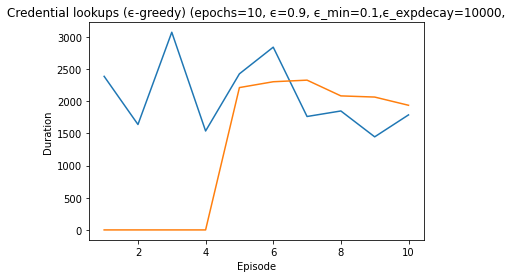

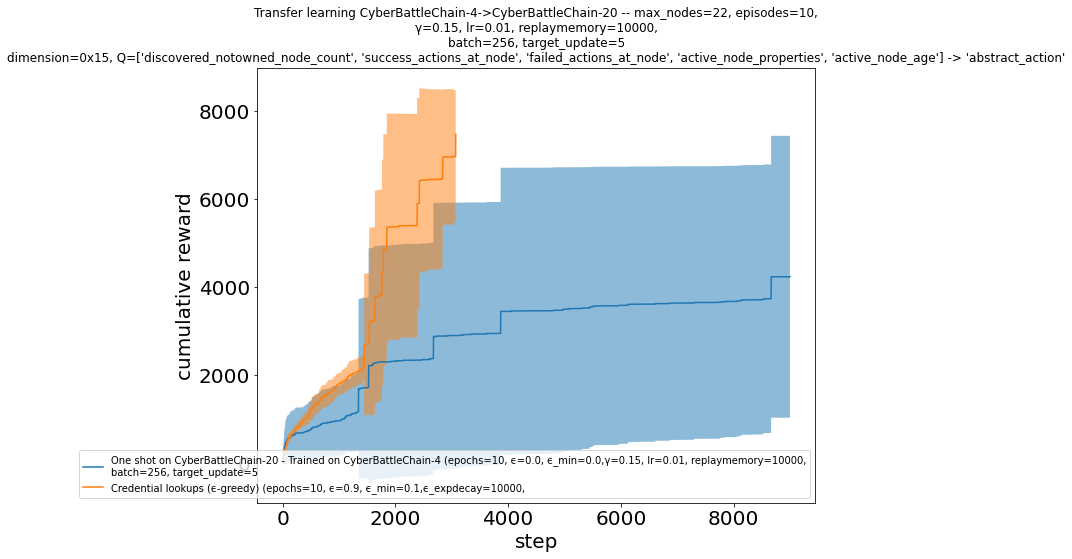

In [17]:

learner.transfer_learning_evaluation(
    environment_properties=ep,
    trained_learner=best_dqn_4,
    eval_env=cyberbattlechain_20,
    eval_epsilon=0.0,  # exploit Q-matrix only
    eval_episode_count=eval_episode_count,
    iteration_count=iteration_count,
    benchmark_policy=rca.CredentialCacheExploiter(),
    benchmark_training_args={'epsilon': 0.90,
                             'epsilon_exponential_decay': 10000,
                             'epsilon_minimum': 0.10,
                             'title': 'Credential lookups (ϵ-greedy)'}
)